梯度下降法
===

# 1.基础概念
梯度方向是函数值变化最快的方向
- 全微分：考虑所有自变量变化时，函数值的变化情况
- 偏微分：假设其它自变量不变，考虑一个变量变化，函数值的变化情况.$\Delta{y}=\sum_{i=1}^n\frac{\partial}{\partial{x_i}}\Delta{x_i}$
- 梯度向量:所有变量偏微分组成的向量。梯度方向由$L(\theta)$对$\theta$的偏导数确定,所以我们需要沿着负梯度方向往下走

## 1.1.计算梯度的两种方法
还有一种方法就是在神经网络下的反向传播算法

### 1.1.1.数值梯度-Numerical Gradient
速度慢，但是简单，它是从梯度的定义出发来计算梯度的。
$$\frac{f(x+h)-f(x)}{h}$$

In [4]:
import numpy as np
'''
一个最基本的计算x点上f的梯度的算法
f : 参数为x的一个函数
x : 一个numpy的vector
'''
def eval_numerical_gradient(f,x):
    fx = f(x) # 计算原始点上的函数值
    grad = np.zeros(x.shape)
    h = 0.00001
    
    # 对x的每一个维度都计算一遍
    it = np.nditer(g, flag=['multi_index'], op_flag=['readwrite'])
    while not it.finished:
        
        # 计算x+h处的函数值
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h
        fxh = f(x)
        x[ix] = old_value
        
        # 计算偏导数
        grad[ix] = (fxh - fx) / h # 斜率
        it.iternext()
    return grad

### 1.1.2.解析梯度-Analytic Gradient
速度快，但是更容易出错。首先需要求出来$\frac{\partial{f}}{\partial{x}}$，然后在计算。可是有些复杂函数根本不能求偏导数

# 2.梯度下降法
梯度下降法的思路就是找到负梯度方向，然后不停的以一个很小的间隔去向它移动，直到前后两次的高度差小于一定范围的时候，停止，这个时候可以求出m和b.梯度下降法更新参数的公式如下：
$$
\begin{aligned}
\theta&:=\theta - \alpha\frac{\partial}{\partial{\theta}}J(\theta)\\
\theta_j&:=\theta_j-\frac{1}{m}\sum_{i=0}^m(\theta_ix_i-y_i)x_i\alpha
\end{aligned}
$$
$\alpha$表示学习率，一般定义为0.001，这个参数太大了，会在底部不停震荡，如果太小，那么迭代次数太多

## 2.1.批量梯度下降算法:BGD
这种方法使用整个数据集(the complete dataset)去计算代价函数的梯度。每次使用全部数据计算梯度去更新参数，批量梯度下降法会很慢，并且很难处理不能载入内存(don’t fit in memory)的数据集。在随机初始化参数后，按如下方式计算代价函数的梯度(参照梯度下降法更新参数的公式，m是所有样本的数量和)
- 如果训练集有3亿条数据，你需要从硬盘读取全部数据到内存中；
- 每次一次计算完求和后，就进行参数更新；
- 然后重复上面每一步；
- 这意味着需要较长的时间才能收敛；
- 特别是因为磁盘输入/输出（disk I/O）是系统典型瓶颈，所以这种方法会不可避免地需要大量的读取。

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAArwAAAGgCAYAAABIRrQ+AAAKvGlDQ1BJQ0Mg%0AUHJvZmlsZQAASImVlgdUk8kWx+f70hsBQq+hN+kCAaSEHkDpVVRCEiCUEBKC%0Agh1ZXAELiIhgWcFFEAXXAshaEFGsKDZU1AVZBNR1sWBD5X3AI+y+d957593v%0AzJnfubnzn3snM+dcAMgjbKEwDZYFIF2QJQr19aBHx8TScc8AGpCAHCADSzZH%0ALGQGBwcCxGbnv9uH+wCamu+YT2n9++//1eS4PDEHACgY4QSumJOO8AlkdHOE%0AoiwAUPmIX295lnCK6xBWECEJInx6ipNm+NYUJ8zw79Mx4aGeCH8CAE9ms0VJ%0AAJDRiJ+ezUlCdMj6CFsJuHwBwuEIu3KS2VyEyxCel56eMcXtCBsn/EUn6W+a%0ACVJNNjtJyjO1TBveiy8WprFz/s/j+N+WniaZ3UMPGeRkkV8oMqtNnVtqRoCU%0ABQmLgmaZz52On+ZkiV/ELHPEnrGzzGV7BUjXpi0KnOVEvg9LqpPFCp9lUUao%0AVJ8n9g6bZbZobi9JagRTui+PJdXMTQ6PmuVsfuSiWRanhgXMxXhK/SJJqDTn%0ARJGPtMZ08V/q4rOk8VnJ4X7SGtlzufHE0dIcuDwvb6lfECGNEWZ5SPWFacHS%0AeF6ar9Qvzg6Trs1CLtvc2mDp+aSw/YNnGQSDZMAHacgQAjGgAxvkswMewBqA%0ALN6KrKkiPDOEOSJ+UnIWnYm8Ih6dJeBYzKPbWFkzAJh6kzN/+bvQ6bcGKZ2d%0A82UcAIDxAbmbJXO+BOQutxQAoPJozqe/FwAq8p6aOzgSUfaMb+raAgwgAipQ%0AAKpAC7lTxsAcyc4eOAN34A38QRAIBzFgKeAgNaQDEVgOVoH1oAAUgW1gB6gE%0A+0ANqANHwDHQAk6D8+ASuAZugXugD/SDIfASjIEPYAKCIBxEgWiQKqQNGUBm%0AkA3EgFwhbygQCoVioHgoCRJAEmgVtAEqgkqhSmg/VA/9Ap2CzkNXoB7oITQA%0AjUJvoS8wCibDCrAmbAhbwgyYCQfA4fASOAnOhHPhfHgLXAFXw4fhZvg8fA2+%0AB/fDL+FxFECRUEooHZQ5ioHyRAWhYlGJKBFqDaoQVY6qRjWi2lBdqDuoftQr%0A1Gc0Fk1D09HmaGe0HzoCzUFnotegi9GV6Dp0M7oTfQc9gB5Df8dQMBoYM4wT%0AhoWJxiRhlmMKMOWYWsxJzEXMPcwQ5gMWi1XCGmEdsH7YGGwKdiW2GLsH24Rt%0Ax/ZgB7HjOBxOFWeGc8EF4di4LFwBbhfuMO4c7jZuCPcJT8Jr423wPvhYvACf%0Ahy/HH8Kfxd/GD+MnCLIEA4ITIYjAJeQQthIOENoINwlDhAmiHNGI6EIMJ6YQ%0A1xMriI3Ei8THxHckEkmX5EgKIfFJ60gVpKOky6QB0meyPNmU7EmOI0vIW8gH%0Aye3kh+R3FArFkOJOiaVkUbZQ6ikXKE8pn2RoMhYyLBmuzFqZKplmmdsyr6kE%0AqgGVSV1KzaWWU49Tb1JfyRJkDWU9Zdmya2SrZE/J9sqOy9HkrOWC5NLliuUO%0AyV2RG5HHyRvKe8tz5fPla+QvyA/SUDQ9mieNQ9tAO0C7SBtSwCoYKbAUUhSK%0AFI4odCuMKcorzleMVFyhWKV4RrFfCaVkqMRSSlPaqnRM6b7SF2VNZaYyT3mT%0AcqPybeWPKuoq7io8lUKVJpV7Kl9U6areqqmqJaotqk/U0GqmaiFqy9X2ql1U%0Ae6WuoO6szlEvVD+m/kgD1jDVCNVYqVGjcV1jXFNL01dTqLlL84LmKy0lLXet%0AFK0yrbNao9o0bVdtvnaZ9jntF3RFOpOeRq+gd9LHdDR0/HQkOvt1unUmdI10%0AI3TzdJt0n+gR9Rh6iXpleh16Y/ra+gv1V+k36D8yIBgwDJINdhp0GXw0NDKM%0AMtxo2GI4YqRixDLKNWowemxMMXYzzjSuNr5rgjVhmKSa7DG5ZQqb2pkmm1aZ%0A3jSDzezN+GZ7zHrmYeY5zhPMq57Xa042Z5pnmzeYD1goWQRa5Fm0WLy21LeM%0AtSyx7LL8bmVnlWZ1wKrPWt7a3zrPus36rY2pDcemyuauLcXWx3atbavtm/lm%0A83nz985/YEezW2i30a7D7pu9g73IvtF+1EHfId5ht0MvQ4ERzChmXHbEOHo4%0ArnU87fjZyd4py+mY05/O5s6pzoecRxYYLeAtOLBg0EXXhe2y36Xfle4a7/qT%0Aa7+bjhvbrdrtmbueO9e91n2YacJMYR5mvvaw8hB5nPT46Onkudqz3Qvl5etV%0A6NXtLe8d4V3p/dRH1yfJp8FnzNfOd6Vvux/GL8CvxK+XpcnisOpZY/4O/qv9%0AOwPIAWEBlQHPAk0DRYFtC+GF/gu3L3y8yGCRYFFLEAhiBW0PehJsFJwZ/GsI%0ANiQ4pCrkeah16KrQrjBa2LKwQ2Efwj3Ct4b3RRhHSCI6IqmRcZH1kR+jvKJK%0Ao/qjLaNXR1+LUYvhx7TG4mIjY2tjxxd7L96xeCjOLq4g7v4SoyUrllxZqrY0%0AbemZZdRl7GXH4zHxUfGH4r+yg9jV7PEEVsLuhDGOJ2cn5yXXnVvGHeW58Ep5%0Aw4kuiaWJI0kuSduTRpPdksuTX/E9+ZX8Nyl+KftSPqYGpR5MnUyLSmtKx6fH%0Ap58SyAtSBZ0ZWhkrMnqEZsICYX+mU+aOzDFRgKhWDImXiFuzFJDm57rEWPKD%0AZCDbNbsq+9PyyOXHV8itEKy4nmOasylnONcn9+eV6JWclR2rdFatXzWwmrl6%0A/xpoTcKajrV6a/PXDq3zXVe3nrg+df2NPKu80rz3G6I2tOVr5q/LH/zB94eG%0AApkCUUHvRueN+35E/8j/sXuT7aZdm74XcguvFlkVlRd9LeYUX91svbli8+SW%0AxC3dW+237t2G3SbYdr/EraSuVK40t3Rw+8LtzWX0ssKy9zuW7bhSPr98307i%0ATsnO/orAitZd+ru27fpamVx5r8qjqmm3xu5Nuz/u4e65vdd9b+M+zX1F+778%0AxP/pwX7f/c3VhtXlNdia7JrnByIPdP3M+Lm+Vq22qPbbQcHB/rrQus56h/r6%0AQxqHtjbADZKG0cNxh28d8TrS2mjeuL9JqanoKDgqOfril/hf7h8LONZxnHG8%0A8YTBid0naScLm6HmnOaxluSW/taY1p5T/qc62pzbTv5q8evB0zqnq84ontl6%0Alng2/+zkudxz4+3C9lfnk84Pdizr6LsQfeFuZ0hn98WAi5cv+Vy60MXsOnfZ%0A5fLpK05XTl1lXG25Zn+t+brd9ZM37G6c7Lbvbr7pcLP1luOttp4FPWdvu90+%0Af8frzqW7rLvX7i2613M/4v6D3rje/gfcByMP0x6+eZT9aKJv3WPM48Insk/K%0An2o8rf7N5Lemfvv+MwNeA9efhT3rG+QMvvxd/PvXofznlOflw9rD9SM2I6dH%0AfUZvvVj8Yuil8OXEq4I/5P7Y/dr49Yk/3f+8PhY9NvRG9GbybfE71XcH389/%0A3zEePP70Q/qHiY+Fn1Q/1X1mfO76EvVleGL5V9zXim8m39q+B3x/PJk+OSlk%0Ai9jTrQAKGXBiIgBvDwJAiQGAhvTVxMUzPfO0QTN9/jSB/8QzffW02QNQ0wtA%0A+EoAAm8AsKsSAENEnxoHQDAV8TsD2NZWOv5p4kRbmxktshvSmjyZnHxnDACu%0ABIBvJZOTEzWTk99qkGT7AGjPmenVp4xJRlrubEC8evjS5uh14F/sH06qC7vE%0A+YOeAAABnWlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4%0AbWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS40%0ALjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3Jn%0ALzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2Ny%0AaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJo%0AdHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlm%0AOlBpeGVsWERpbWVuc2lvbj43MDA8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgog%0AICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+NDE2PC9leGlmOlBpeGVs%0AWURpbWVuc2lvbj4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRm%0AOlJERj4KPC94OnhtcG1ldGE+CvIpa84AAEAASURBVHgB7N0HuGxFsTbgVhAV%0AlSQqST0ECUrOmUOSLBlBAVFRUEQUUVAUuWZFrgpGRIIiwQACktMhSFByliDH%0AgJgRRDDff96+t/e/zrAmz46n+nnWntkza3X4urrqq+paa57xP42SogQCgUAg%0AEAgEAoFAIBAIBAJTFIFnTtFxxbACgUAgEAgEAoFAIBAIBAKBjEAQ3hCEQCAQ%0ACAQCgUAgEAgEAoEpjUAQ3ik9vTG4QCAQCAQCgUAgEAgEAoEgvCEDgUAgEAgE%0AAoFAIBAIBAJTGoEgvFN6emNwgUAgEAgEAoFAIBAIBAJBeEMGAoFAIBAIBAKB%0AQCAQCASmNAJBeKf09MbgAoFAIBAIBAKBQCAQCASC8IYMBAKBQCAQCAQCgUAg%0AEAhMaQSC8E7p6Y3BBQKBQCAQCAQCgUAgEAjM+Y9//CP99a9/Tf/6178CjUAg%0AEAgEAoFAIBAIBAKBQGDKITDnzJkz0+WXX55+85vfTLnBxYACgUAgEAgEAoFA%0AIBAIBAKBOX/5y1+mM888M91xxx2BRiAQCAQCgUAgEAgEAoFAIDDlEHjGQw89%0A9D/XX399+sMf/jDlBhcDCgQCgUAgEAgEAoFAIBAIBJ7xP40SMAQCgUAgEAgE%0AAoFAIBAIBAJTFYF4SsNUndkYVyAQCAQCgUAgEAgEAoFARiAIbwhCIBAIBAKB%0AQCAQCAQCgcCURiAI75Se3hhcIBAIBAKBQCAQCAQCgcCcnSDwfN7//Oc/ac45%0A50zPfOas/PiRRx5Jv/71r9NLXvKStNBCC+VzOtUX3088BEoa9zOe8Yy+OvfP%0Af/4zqeNZz3pW6qaOX/3qV/kxeC996UvTi1/84q6uadex3/3ud4kszjPPPFkW%0A55577nanT4rv/vznPyfH/PPPn+add95J0efoZCAQCAQCgUAgMFERmOPIRmnX%0AubvvvjtddNFF6ec//3kmtPPNN18mKAjOueeemz796U8nhGORRRbJxvlvf/tb%0A/hEL5LiZILdrp9V3jz32WLrlllvygXgvsMACQ6m3VXtj8Tkig6Ahh895znNG%0AtUnz9Pe//z09+eST+fjjH/+Y2/7FL36RHnjggXTPPfek22+/PSGhz372s9ML%0AXvCCngmoeq677rqE+CJnnCPFfGm/SoL//e9/px/84AfpM5/5TB77csstl4ny%0AICCQ0W9+85vpqquuynUutthiA9c5SH+Gce2tt96aTjvttPSXv/wlvfzlL89z%0AM4x6o45AIBAIBAKBQGB2RKBthBdZueSSS9L73ve+HD078MAD00477ZQJ7Vxz%0AzZVuuummdMUVVyTGGZFad9110+OPP55Jx8orr5yWX3755LxByp/+9Kf0jW98%0AIxv/nXfeOR166KHpVa961SBVjvu1Dz74YPrhD3+YXvayl6WtttoqR8ebOyWy%0AjhgXkl9IZPN5nf53PUL74x//OIl8Ip/I7xNPPJHnyuPobrzxxgTnt7zlLelN%0Ab3pTbX/atfOzn/0sfe5zn8tOzyGHHJJWW221fPpvf/vb1HjsXVpwwQXT4osv%0Ankko5+i2225L999/f34UHgdp0IjstGnT0tJLL52+8pWvZNlcYYUVEtJr7Mow%0AHK9cUeUP4v7UU0+N4MgxM1/m7UUvelFaYoklsnNWueRpb53L8YEFZ2PZZZdN%0AL3zhC5O6YYrw2kFZZ5110nOf+9z8+RxzzDHiUDytwvggEAgEAoFAIBAIBGoR%0AaEt4kSAGl2FGki6++OL8AxVIijSGu+66ayTydM4552TyK9KLbCAxSEg3hPe+%0A++7L9YoOMvquL0V9Sy21VI5San+99dab9IQXubnzzjvThRdemEmvdJDm4ief%0Ar7322kxWN91007TKKqv0HQ02T5/61KfSWmutlV7/+tdnYooE2i43j9/5znfS%0ARz7ykezAvOY1r+mZ8L7yla/M83bBBRekLbbYYoTwItPf/e53M1FDpDlAnCQk%0A753vfGfac889O5LCZlzq/kcwX/e61+W6RKpFnH/6059mEo8oIsCipL0UMo/Q%0AOsi+n9+uviK4xmd9aHNm4xcLkVRrQ3twhiV8S0HAOQAcATLw+9//Pt18883p%0A+9//fia0RxxxRHr1q1+d0z04KNq0o2E8nJJHH300ywtn0pijBAKBQCAQCAQC%0AgUB3CLQkvKK7jKxtYtvcCy+8cCZcIoQluuvniBdddNH8OdLGWDPySy65ZFdE%0At3TRdrjIoO39vfbaK0cZkVwFMUCEtakteZ+TvcAKARMRlHdaV4wXMfzv//7v%0ATKYQUuS/1yIiiJCKusLRgWiJtIomah/5laoyffr0TFx7bQOp46QUZ6dcL11B%0ABBuhlnYgX9cv+2200UZJtF77vRTypt/6bFxVQmpnQUqF6KhfDpzZIKA+43QZ%0AczvCi6QirQ8//HB2rNQrlcCuBadPPT5DVJ2nmB+4kU+5y/BbY4018neIrSi+%0A/lYJr75dffXV6eSTT85OHDw4Ns9//vPzeETxkdzLLrssR8E33njj7JTYZbn0%0A0kvzZxyKD3/4w0F4M9LxJxAIBAKBQCAQ6A6BloRXzq4cXaRr7bXXzpElJHSz%0AzTbLZOBrX/tajrQiOj/5yU8yGRCBQpSRgV6K+kX75GF+6Utfykb+ve9970gV%0AiACCo32HPiEkCAOiMexStppFnpElETvEZlilbEuL3rUifcbMySjR335TGvRZ%0AOgEnBNm6/PLLc/RdhPB5z3tejlAa5yte8Yq05ppr9rVdbr45K+aj9Fe7+oy0%0ASTkwX6LaSJ8UB6QOpkhxtw6S1JlTTz01kz24ibgiq0ij+r0q+kNOjcfYtdeu%0AILOFiCK0+ggb8+MwLnOhLZFjjt0uu+ySiTeyajejEF/y73pkWHS5WhBjBNg6%0AIQNShTgCiPrqq6+eU4JEds8+++zseLz5zW/OdYsilxQQTolUmCiBQCAQCAQC%0AgUAg0D0CtYRXROv888/P2+m77757jtwhKAgLo49QiH6JaInqiYwx2q4TgRNR%0A7KUss8wy6R3veEcmujNmzMgR5er1yAOCICKKmCBoSABSs/XWWw8c7ZLPKpKH%0AQNmqRnq0g3hssskm6eMf//gsRK7at0HeI0ui5yWa6H2VAJfIoaj2IFvY6kQq%0AzZO0Bu24kc0hiu+mwFVXXTU7E4OMB8FziHCaM5iaKw6K+bI1r02kEHkVBRXR%0Af9e73tVV5B6pRPz0ebvttstEliySwfXXXz8TQQRS7qudCCS+imersYkYr7TS%0ASpmci34jlGRSHi7sOT3qk4IysxE5Rlq1109BnNWrTu1KcZBasvnmm+fot5x4%0A49QffXeO6C4M3/72t6c3vOENHQl8P/2KawKBQCAQCAQCgamMQEvCy9DKi7T9%0ALDfx+uuvH9mSRpxEqU488cScx4gAiEbJWxTN66YgmbaIRdJEBREyxEfkDIlB%0AXJAl0VYRZK9ItxQL1yAkyAfiPQgZ1FdETP4pso60y6tE7rVZIojdjKnXc2Bg%0Aix8J/NGPfpSj1dtvv/0s40GGEJ9ys5m80RJN7bY9zoL8WeRKBFHk1dgQX+MT%0AZZUXWiKYMNA384DwmR/v64p6zIF+2RXgKInYI2xkRHueCOG9OZXigLh5UsMn%0APvGJ3I9yc1ld/dXPyCQsENmDDjoo94kMkhOEsdyUd++992ZSLDIrlQG5lA7j%0A+roCH4Tf0a7AHWbO77eIGCPopQ7RZQW+5NmOyTbbbJPX3HnnnZej1ldeeWV2%0A7qyvTtHqfvsV1wUCgUAgEAgEAlMZgVrCy+hKMSjFY8nkRSIMbipjdD2RAclh%0AlBFgTwIQDW5FjEpd5VUUVSROZHjbbbfNhEz9osPyGH139NFH5zacgxSKjCHg%0A8jJFd1dcccUR4lDq7edVxFFEEkFCekReC9lWH7I5jIIcilKrG9H1tIIzzjgj%0Ab2cjhZ7cAN9C4LULE2kbtsmR8O9973uZhL72ta/N/e2mX/CDnfxqRKsQXTgj%0Aq9oQgT3mmGPyq7mRfwoHEe499tgjE+LSFkLsHNFQ53m0mSgkQo3IivKWVAU3%0ApynytD3JQdqBNmFgnG7Ia5dfW9r0ahwOpNeBKPtf3Qi9ekSr9Ql5F6E3r/oi%0AIkxeBimwc6gbUUWAe5UN2HNi9N21nAn4iVobgwi8+fD5l7/85XTcccdlmZze%0ASGUocjHIGOLaQCAQCAQCgUBgdkSglvA2A2Fr3TZrydG07Y9UFOONACHJ3RIX%0A9SML6jn++OPzo8/clCX6p4jgMvAKcoToeQrEDjvskJ/fmr8Y4h9PQHCUgtCU%0ACFz5bJBXRLcQXNv4JQKJGIqOy0tGeH3eXEQtORG+k+N8+umnpw033DATI/NR%0ALZwCUXNEFCGr5rgihj5zILrSKOAv8uo85Evk17hFdaf9X6RepNd2ughwKa4R%0AkS6528Yk1UB6yX/913/l6HtJZyA32uQQcZAQd6SY/HAumsdQ2qh7rebpSolA%0A0uFmHCL/SDBZ0Wd1S7kho6Kq5G3QAiNziVRzVKQnwMqhnW4KPMw7zBX54SK4%0AUhlExtVjPRkfjKROcHg4na4ROdfuMOWzm37HOYFAIBAIBAKBwGRGoCvCi3Ah%0AQ8in7X9RM1EoBIDhdZSbd7oFA6GSMsGoIyvSCArhVUe5Qc17d7XbKtdeKcjP%0AzMYWsDQEbUuJmKjbvUieviI2iCfHwPhEs9/97nfncRk/IoQYz2jkMXsvGiwS%0AKBUAARJBlfIhKgq/5oJYImOira5VYGaukCQRQuRP9JATUwiu8/xvq13ftN2u%0AIKluRkO+zL3o/+c///lMKl2rTeNxg5l2tanvSLC2RbFd730vUUtEkOwhjTfc%0AcEN2AtQpXcENatJByo15IuB2A4ZZ7AQYG4fCo8TMld0GcmvHAfHtVOAFa/OK%0AsHMERLuLjMDEjYUILrk2377j7Ejp4exwBsmPcSPI1XXRqf34PhAIBAKBQCAQ%0AmB0R6Irwlu1XBhZZEVHzmYiTiBcSwpD3WpCUD3zgAzmyxYAjRciAaHG1MPja%0Ak0vsyREimbbUy49eIFVSMPwoBtI20QqChuAhKgrHAXkzLlgWEgRP2/PwlIJQ%0AoqPGjVx6HJWIYCtCiiDJbUZ8OSkwNT+cCuQWYfMd8q1dW+vle8/q9b+byDbY%0AYIOcD5s7W/NH++pW5HaLPusz4iblAtE0FnM0rUHMkTYkUR/k3/pelFjEV3QY%0AYfM0BfPeTo70WTvSaeS5Koivx57BE9m/5pprMrEmR8MuZBCuiPWWW26Zvv3t%0Ab+fxel6yOd1vv/06RnqN1WHuRc71F07mjfzDk7NgjMisR5JNb8jNwQcfnE46%0A6aTcJkfCHHkmNacJbu1ylIeNQ9QXCAQCgUAgEAhMNgS6IrzyLm2D27ZGnhh9%0A28fICaKBCDj6KfIqHW5uEsVC9ETNECLkDDFAApFcUS8RPEXUUuoDY4/ouWEK%0AgZiIhLfggugoxuSwHS/CZ8y+Qwjlm3rWqnGJCMvzRa7koJbrS33Nr67nkDgU%0ABBcp++QnP5kjtx595QYu6QgiwG4eQ5hEy0UbRWpFyaUDSKXoVFyHoEkBKbnP%0AiC7C5jNywqlRl7nRBlmS9y0yiwR7zJdIKQLnxykQv7qiPtF8TkD1pi8RYkRd%0Am4g3eUT+4DvsAk8HMs3x8Og8v/pnB0IernHAs12xTjgZ5sqzkY1X2sIdd9yR%0AZQF+u+66a8aNQ+ew7syVHGzrzg2WovgzGjsB2icv5EPbnWSkXd/iu0AgEAgE%0AAoFAYKoi0BXhNXiRNXmQhUyItiEtiDDCiXT0WxAFpEGECyHyE7EILELtf+0g%0ACYy7u/H1wfYx42+7HOlB1IaRp9nvGLq9DkkUTUViEHpjFKFG0IwL8UOAFZiL%0AppY0gW7bKOchP8gvEu3wZAOkE94iqyKyIrXmr5wrEg3TTgVxQzIRcmTXHHFC%0APGnDPMrNdjOjVAxpMMg7p8YccpqkTsibFvF1c5YbzAoBrGsb2dVvWFVzxWHm%0ApkcRUakWiDFcOUOcpkHksrkfxVEppJL8uVETtpyXbpwEdUhrQZwV2MMPUfe5%0AlAX1c+w4Q3AWAZbmAB9PQxHxhaU6yL61oJ4ogUAgEAgEAoFAIFCPQEfCy+CK%0AqiEz8gtFkUTYGHc3LckrdHd5uQMe2bC96zrECfEoBKGuCwjzWWedlaNWIlVI%0Ai+1txEj0CzE85ZRTcnv77LNPes973lNXzYT/TIQaKbKFjbwgM8iSbWkFsVdg%0AjRTB0QE7WDYXnzkPKW6XBiBabn6QzJmNVAYkF4FyLZLKcXGTlzkTJeRQtKuv%0A9EPEVoQRoUSSRYdFLZFA5BQZQ9SlLSCqZEWb0gHKkxvUZdzak7LhaFX0WURY%0AlLrkanMeOEbGYQzaEXEWwUYCPdtZ6kM7+WvVXt3nnC5HtYj26pOjm2K8SHkh%0AvK5xU5rorXGYHzcecho4DPqO6O677775BkcRevnqfvwiSiAQCAQCgUAgEAh0%0Ah0BXhJeRRqyQJ6QTMUGQkCUP40dkbOmKUvmc0RatEl209Yu8IkJ1RQTQXftI%0A7t57753WWWedkdMQnE9/+tOZECFjbgxC2pAtRr+XO/xHKh3jN4gpAigiJ4qJ%0AwItseupBIbLwQ9iQKcQYJhwBh1LIcLXrcFavpzwUAlj9vrznqIiiItsinp5c%0AIOKKLMK85A2LjnfK3S11ukYEUlqEnwg2D4W4OscPN3hm7G677Zaj1nJP5aNy%0AfhTjLmM3n+qR56ufdQU+ItJkCnkvBBZmsCpkWhoIMoksejVexLKcX1d3L5+Z%0An7q56KUOTgzsOQOllMgwR8hjyOSif/CDH8w5ybAR0baW4OBQrMcogUAgEAgE%0AAoFAINAdAiOElyFlXEWXEFmkBvlCMjwj1OeeE+t/j09CauXWus73trYRCwSj%0AHCJ3on9uTLPl3FyQMNFbN/0ccsghud5yjrblKSLUoqByGBFtN0UhUG58Qqiq%0A29vl2on0injJw0TcESbRTVjYxocd4sdRQF5FMS+++OIRYopIwsG8NBcRYvh7%0AFFg7wus6kXKP63K+lAa5rqKHIqHFObFNXn00W3N75X99Lj8KgiCTBc4OIijC%0AqyC2tubJ0Xe/+93clsguIqrARLvIvx0CEU47BK1InMinNjlNZSehyJjdBjfa%0ASStQr2f9ioK6idHTE1rVmTvS4x+yPyjhRdLNZ136jfUiYkwmnEcmkGORazgh%0A8NYlvBDgaY0bAuVJRwkEAoFAIBAIBAKB9giMEF7RRBEmhNJTAUQQEQgGFSFT%0AGGlGF9linBEbhALBEJkVMVSQIodzRIXrorsI19e+9rX8AxMic9UbbpAKJNrd%0A6AjA2972trytixDqi2s/9alP5S3g/ffff0KTXuTFGPyggJuTPEsYhvBBgJEo%0AEVcOw0033ZRTN9y85UY1UU3nubELeYSzggzJn5VSYLu7U0GO1CcyjiSpFzk9%0A4IADcjTWHJrLEoFtV5+2kWbOh2119SBhDvNdivP0D6lGjBFTJLcQVTdpcQI4%0APSL77W72Qtadh0TL2S2FEyaFQYEPIukRd85z41cnR6DU0+2r+bImjKHfIsVD%0Aegk8qqWsq+L4WIcwEgGHN7k3XrjK291xxx1zdL1ubVXrjfeBQCAQCAQCgUAg%0AkNII4WXMbbciZ+VJCQiWPFzb8SJMSNtHP/rRvC0OvGOPPTYddthhmawceOCB%0APeUVIkLf+ta3siFnvP2ilyKNwaOmbO16KoMbkkQ5PW3AzV5IABKun85B0kR/%0Au7nRKjcwxn/cTGSLWoQTsUQKyw8wFALlcVq25aV+yNUUmTQ+pMhciPqe1Ihq%0A+97YOSSedACPEjVtNyzXILrygzkTJfdVHVINkNe6CHxdnQi6dAzR5xKlFIE1%0Ab4XwImVylc2fiKz5RdBdiyyaM2QZDj6Xvyo/vK4gsuSvpFyU9ASvItJSOuSA%0A+2U+pJjjpr12BLqunW4+03+Et6RjdHNN8zmcDg5byd0u3/u85FZzcGBoLFIf%0A3NRmN4NzoW39IO8lol7qiNdAIBAIBAKBQCAQqEdghPAyoCJtjmpBxpDMEq0t%0Az191DvLCADt6jXohMHIXkTCRYYQHAfJAf9vSooEMupQGd/jblkfa5HAiaIiS%0ApznYMkeqkKaJWhBdBA0xFIUUsRPRE4FE5n2P1LgDXyQW2VU4HMivyJ5nzcLD%0Auf5HBOUxy9HtVJDc8qQEkXtzimAhzLAXPeTsdBPhrYua6g+yZozqEnW1WyB/%0AG1EThRSpRtRKQVT3aeSDu3Gvrk7nkSvzLPVBlJgMNBfRTmkVHCgHIokkIuDq%0ALSS8+bp+/td/kWyOSr8F/jDiaFQL+fdjGQ64uRmQ08A58b8fG4kSCAQCgUAg%0AEAgEAv0hMEJ46y5nmJFNhtcNRbbkq495qm7LIye9FNE5d9AjKUisgjjJd0V2%0AS1QSuRXZdC5SiPAp7sIX+ZMGIP1hEMKLwCAyhZCJrBUCj5Aip8g5QodMVW84%0Ayp3p4o/6EF15yRwIpNNTKRB/ec5IuzxU464WYxdFl/IgVxZp1l/z4BqYdCqi%0AzEihfGcESkQU8Tr88MOzo2GMxu+JB+YU0VZ/wbpd/cZV0gkQ8vI0CMRT1L4Q%0Au+IUwbCUqiyVz6qvSLn8bo8ia356hLmy/S/dwe4Dwu6X++Bj54FMGDNCj1wb%0A06ARUWNwVMdQ7W837zkV5lkaT7VwOKViVIu5gO8wSXu1/ngfCAQCgUAgEAjM%0ALgi0JLwIhDvxPUEBaRGN85SEUkQNnYN8IR+Mcy8FYZVnWXJbXSti6SYsZEyu%0ApicziHjWPWMU+RYRtcXcaju82/4g2ki9fElkRnqBItIqfeCMM87IhMn/SFT1%0ASRLdtoE8IpwiksiYiKjoLPJs3I5WRYQUeSxpH63Oq36OwCKi5slhjryaLwQX%0A+Z7RyLFFAkWdkUc4wFMaxfTGTWwIdTdRX/Oj/yKqDikFxtlcjLWb+lxHtuBE%0AruQ9kwd9Jxtu4tJ/kV9OgJu4PK4O+fe/ZwCfcMIJ6aRGGoj5koJhZ0IaBpIt%0AVUT/eiWunBHXDpI3y4Hzi2z61E0xPyXi3835cU4gEAgEAoFAIBAIPB2BloRX%0AeoE745HJPfbYI0dQq3myCBQCUqJPJSL69CZaf4KMOEoR7ZSza/saISnRwfJ9%0A9RUJEBlFhNqRxeo1rd6X6KbxGo9ooK3lUkQtESyEp5rSUb7v9hXBlcsrgixF%0AQaRvtMhMubNflBSxQ7jNkQilKKj/5fDqC5KLWDrMKSLpPAS9E0FVN/Im9xiZ%0Aq8pIFRcR8mmNlBSks5tiThBpKR0liq1v5oFDwmHwvaiu3YISLXYTH9Itsivv%0A2xj9HDV5ch5nRWTdOb0SXo6AfOyyI9HNOJrPEbF3dNM2sovM1zl8zfXG/4FA%0AIBAIBAKBQCDQGoFnNEhQ7S3nciBF/USzkIO67WCRz6OOOio/IsmTFJpvxGnd%0A7Oz9jZuW3GyGrCNmo1GkhfgJWlFbW/olMokYIp/IO7JtXpHbEgkur0iWbXfn%0AdiqIqDrUhUjXFU+GcDMWh8GTOzoV5JtoVuXO//qn6H870ih1wxMb3PDnGuOH%0AtSdWaL+b3OfmPnIMHCLVcs9Hu0h9keKDYPcS3R/tfkX9gUAgEAgEAoHAZEOg%0AJeHtZiCiiIyyKCCjPMhWbzftxTmTF4HiV7UjqZN3dKPTc+kbItqi5pyjKIFA%0AIBAIBAKBQCDQHwIDEd7+moyrAoFAIBAIBAKBQCAQCAQCgbFDoH7/eezaj5YC%0AgUAgEAgEAoFAIBAIBAKBUUVgTlvN8i/LlvOothaVBwKBQCAQCAQCgUAgEAgE%0AAmOMwJyeQOBZph5NFSUQCAQCgUAgEAgEAoFAIBCYagjM6fFjfsDBDWhRAoFA%0AIBAIBAKBQCAQCAQCgamGQNy0NtVmNMYTCAQCgUAgEAgEAoFAIDALAnHT2ixw%0AxD+BQCAQCAQCgUAgEAgEAlMNgSC8U21GYzyBQCAQCAQCgUAgEAgEArMgEIR3%0AFjjin0AgEAgEAoFAIBAIBAKBqYZAEN4pNqN+ktfP3/7zn/8ceGR//etf05/+%0A9Keh1DVwZyZhBcOcC8Of6vPx97//PT311FPxiMQeZN3jJOORkj0AFqf2hMDj%0Ajz+efv7znye/+kifRQkExgMBj879xz/+kf71r38N1PwcRzZKXQ0q9gQHgj7n%0AnHOmueaaa5bTGN9777033XXXXXkhvOAFL0hzzDHHLOfEP4MjYA5g/Je//CXB%0A2Fy0K36K9qqrrkq//e1v04ILLpie/exntzu97Xd+NvrCCy9MlN58882X5p57%0A7rbnT/Uvx3MuYDuV54NCM74ZM2akRx99ND3nOc9Jz3/+89Mwf4qawebAPfnk%0Ak+m5z33uUOuuk31OJxKvjIZuVP8999yT9YO16Sfeh4lX3ZjqPoMpW/DYY4/l%0APjzrWc+qOy0+GwUEyBddzx5bM8OWs9tuuy2deuqpWcbmmWee9OIXv3hUZMz6%0A/9nPfpZ1AJis/Wc+c/B4nDX/i1/8Ih/WfLM9fOKJJzLP0Wbzdz6brKU4wc36%0A4Fe/+lXWGeQEn5gsRRCPfbj++usz6cVHOnGhurG1JLwIFrLzve99L0cMX/Si%0AF2VlVioB3Je+9KV09NFHZyMybdq0vBjK9/E6HATuv//+9LWvfS1dfvnl6aUv%0AfWlabLHFcsWMNiVHcIuSI+QIAx+GElxjjTXS/PPP33dHGLFjjz02nX/++cn8%0ALrfccn3XNRUuHM+5gN9Ung+GiUL76le/mn7wgx8kpOkVr3jFUJ0sSvOyyy5L%0Al156aV4XL3zhC59mVK2rBx54IHk+ORI5iBFUx9VXX504odpCTh5++OG8Y8L4%0ADmrQRTzo58997nOZ7MAL6RmrYs7omXPOOScdc8wx6Sc/+Um2AfTUoGMbqzFM%0A1HbMLRss8GQtNBOX0m/O4XnnnZcuuOCCTGAWWWSRgbDnvDzyyCPZppB97886%0A66x08sknZ9naYIMNcv3mnXzrm2BYq/6VfnZ6JUtnnHFG+vCHP5xPXXbZZTPp%0A7XRdp+/hd+6556avf/3raYEFFsg2FMllK/Wdw3jmmWfmx7LiOEj9VCjmjb3C%0ADTgPStEXn/70p7NeY8+bA5n9jh3OfssBL6Q/H3zwwewA00fD0En6fuONN6Zv%0AfOMb6aGHHkrLLLNMDui1IvatxtEyXIhMXXfddZnUep133nnTFltsMVKPqJ9n%0A92ocGZs+fXpafvnlR76PN8NBYPHFF0+U2Oc///n0yle+Mq299tq5YgLt+ckW%0A6Oqrr55e8pKXpN///veZNFjY5oORHaSYz7XWWisri5/+9KdZSQyq2Abpz3hf%0AO55zYexTeT5465tsskn22r/4xS+mG264Ia277roDy3BVZpAwBo7CZ/QOPfTQ%0AEWNQzrOGvvWtb+XzDjjggLTZZpuVr3p+RQhOOOGEHBD4yEc+khZeeOFsXBmH%0A7bbbLq200kojzmrPlTcuQJrpBNExRF5fRT5Gu5SoIp2A0GsbUdIP9mCdddbp%0AK/oy2v2eTPWLlsOWDK2wwgp5nuv0ORlwjjXD+K+22moDyZTdRARxlVVWSVtu%0AuWWub6+99soRXnMs5QiJ4pxecsklORCy8cYbJwR1ECfH+kd6RXmtUc7pMApC%0A57jlllvSq171qvTyl788/ehHP8rO9EYbbZRJ2Q9/+MM8LtHrRRdddBjNjnkd%0AnCM6DR+w04ObnXbaaWmJJZZIu+++e3ZEZ86cma699toc7eYomUvndlusb/Oi%0AHYEBh3YRXfJKPsgiou3gQGy77bZp6623zrh3207deYIP+Cf+ceWVV6YZjcCe%0A8eiLObNGCrGvu7581pLw6jwvTuEJWUwA4vUR7LL9oAOiji972ctKnX2/6jzv%0AAJleaqmlMtHru7IxupDgUPL6DBd4EAyHCV9yySWzYdIdkR6ej+8KcfTehBHM%0AEqmtdp0AT2tEV5deeum00EILjXxlEd99993pmmuuSfvtt1/aYYcdsgdEAN/z%0Anvdk4zdIdEpDUiJEa8ytPpQ+j3RiAr2xwGGrj0XxFpxL/5u7a+7IMczKNXB1%0APiejuYznXOjLZJqPZuy6+R/2jCfDbk1ZP8Ms1kOnrVKOPpng5DP4gxBeBoEh%0AKAdSwFE9/vjjsy71P0VedCvZRWB6KUg0HUM2OL2jWeg4OoxRu++++9L3v//9%0ATIQYNFgxOtbOoHpnNMegbg4HzNm1iVrYAlgLdNh6Pvzww9POO+/8NB1Mnjni%0A0xr62XqxhgYpv/vd79J3v/vdbFsQRDuEbA/nDG7SaLTB5uMDRx11VI7qvf/9%0A7x8oOqpuh8Daqquumu1Ov+PAI+gPUUFrg95eeeWVM+m76aabcjTc3K+//vp5%0ALNaccZbd037bHc/rzBsiaG423HDDTO5FcGc0iCGnWFDM98gpR58s0Rm9FPON%0Ac8BQe2TBZ/SC9VQcBjyFU2xn2K4k/DkavZZCntnn0g6bTUZuvvnmnIGgD3Q0%0A/jQQ4ZX3woOnhHlePCQdsE2ODNx6663Zi6DcREXkjTJUBlZH3LoZLEEVLbY9%0As+aaa6Y999xzwm+jmwACcPvtt2cjYMsS8Ag7IwCrYsSE+0888cR8PiGgqCgp%0ARp7CaoWb653LuJWCiO699965boqCceUlv+Y1r8kRlkLgyvn9vKpD2wg5IeME%0AGa9Foz2LSz/0azzJsMUGW7KDrFhklB3MKOpNN90049uMgfGQNYf+O59yZ8Dr%0ACK/rx2sutD1Z5kNf+y3WAOPkGLZMWScUJyMoClmnIK1fpHSrrbbKctPvOKwP%0AOlJdu+22W1pvvfVy9JVcGZe16lCQbLlprmGseonSkkd6lx4Z7Zw8hodNoO+1%0AiZiI+Lz61a9OO+20U7YT8JXrzggaj+1MBtCYWum3fjHu5zo2zNYo3Oxe1ckA%0A3UFW6LcyR/20Ncg1dul23XXX3I+TTjopRz058DCErwPBcJ6xkOmqfeinbSSF%0AHjWH7FdxODlSHBlBBbKqIFEHHXRQlgNRQte2KzgEx88YkMtmWSAvAmxItl3M%0A8r25oKcRGwTNWDsVfUTurKkdd9wxzyEbpp/qfctb3pLXmfmFo/FK1bBNPlkL%0AOYDvt7/97YzX/vvvn/mHubP2RFyR1H322Sev125wbMbCHOJo2oEjkslmOshK%0A1YG05nEiOknfei1sOnmY0SDsAlmFj5qjbbbZJq244opZ3jkpxoiXGCM+0i6F%0AYpYILyKDLBB621S8JEbWZ4SCB6/zBP/iiy/OJIgiJ2DyyHj9tj90BqHrtQDJ%0AVh9AeZmMz4c+9KG8mHuta6zON+mUgUmBwRVXXJEFgddhsVW3DOBiy4khZNAZ%0AVZgad1VYmvvOQKqH8qVYSgRFzh6lw+iYH0IHOzl1lKEt8F7moXhs6mKsvJIF%0AciGSrN8zG9sIFo451wZP0TjaCVnzeIb9P3woSeTW9hTnjCxSYu985zuzUq5r%0A00I1J7Z5LBzOgq28doZjrOZCfyfrfNRh3ekzCo7Rs8ND5sgto9oqaomQFOeL%0AUmUMO5ETMmt9WDd1+ejkndwwBuSa0e+30Jm2pMnTa1/72rxWGG/jpEOnNRxc%0ABldBiqVRaFvEt5eoMnlE2grZRSiG4ezWjRtpsDaMA5b0jjEKdjCq5sNY2AcG%0ACjH2ua1jTiTcx7tIA/vgBz+YAzeMZzPhZdQZao6zqBj9Pl6F7LOn5FA/y7zS%0Aw+wjR56j4XPzr+9SEhRzBfteirUnlQjpJP9FD6qHo4ZQmONSzOfBBx+c2+10%0ArwhdVgJD7BJdze6VQmZEtH2uLX1hZ8iR+bA26Xh8w9jIfasCN9vfZJG9Kk4m%0AG1uIL+eNzSq6RoCtrMdW9U7kz+Fvl5ettj4dgo8O2IuI0kVknmzDU6E3zXPh%0AFO3GSCdbyzgMWfN/cUyar8NXfC+ARI/3UtgB88OJI19INj3jnjHzj7SbW8Xc%0A0kXuZTDXnJk63V7an4XwagixkaQudA2oQsyQB0KBCH3mM5/JHqdF8d73vneE%0AmPJECecee+yRzwWuxdJOOEtHyqtF9O53vztf52atU045JW/RNyumcv5EeGVo%0AjVWkww0xJovAVUkgQ2RxwZT3hQwXD7rVGFxjTix8CkHdsBSZIHAmWMTC4XtC%0AwCsizASTsBO6TkX9d955Z+6fp3IgBeqg3ChAigiRtzjMJ6IowlMiS/o53gUu%0AyILI3fRG/jLCYVwUgH7XlYIdwk5Z8A5blbGaC+1PhflohaPPkT6OG0VGzsib%0AuRA9FG1HoBh5zq55cX4hWdYDIsUZLsRkWoM8br/99lmht9M15Nn15JeibC4M%0AOsJgq1OkFaHTN8agF/JA5uQ3ih4deOCBI/c2WPsO674QeTi4E95BxlzbbSm4%0AqANBoLcZPqShGlVxHqNAP+gTXdpJN6gTXvrjWoe54mjQPewArHwmn9OrSJzv%0AGUEkjH7wKnCi7YlAeOGy+eabZx1ap3+NgfFkB4844ohxJbzkAIbyIKvFHIp8%0AccwETNgB64F9QCoFYFzTi8yaXzpe4OaNb3xjtt+lTfatkEY2TGS/2CVyQpbb%0ArTv1IJvkUDBGSo+0O2Te2rImyL/cXQEIW+HqZ4uM1XdkTAqN7fg3vOENT3NU%0ASl/Vxf7qszVMr9AT7IHv9ANudL71Zt3QH8jgZCwwMi7r3nwL2pBh46W/rEe4%0Amyf6ViATtuTF4+YEejhNuB372amUuTInCCl+WByj6rV0hKNwhOp3nd7rm91a%0A19r91i/8xpzSbb53kyzZEdAqjppdaHqpXZmF8Foo8kEpQxVSUtj0vvvum8kb%0ApUYZEFqsHbgUiEZEZhEjBKl4E4DkzQFGnVUC2K5TJk59FKpFzADxZid6MRmI%0A5je/+c2cAyj0zqMkcDzVMok+rxqk6rgIKcKDuMKfERZNR0gJLxxhai4k35et%0AG8ZJCoXtUx46o96NAGtbe5SM6AchYggc2qcAtUkuzDehKpGGar8nynuKmfLS%0AT4vS9mVdpI4i5TVSgIxDHQEaj7mYavNRJxfkmAEjuwxSIVQMEFmkKK0Phsk6%0AcK71Y87Ive+d5zPRLp9x7DoZLW1pmzy4BpmlVBE0fUByrFW6R33WlG1RfaCD%0AXNcpCqR+1zjoLAq7kAHGAnFnnIzPOIztO9/5TjZaohMCC+2KfjNoSD8MjB/J%0Agc3MBvHh8CEg6kZWjcE4jUFesicpcM7f9ra35ZsCW7UFD7rcNQgEXBx0ON1g%0Ad0dUkbETCRXFZpCK42mMsCq6omDQqr2x+lyEyM2Q+lPXJzJF15KL8c7ppH8Q%0ATARFX+BOvpAc8glbN5iZI+f5nt6XdliNnnbC1rqjK9VFD7Jh7EC1+NxnbDvZ%0A9YpIsjG77LJLvqZ6fvN7a4xsv+Md78gBMzJrnZFVZMY64IiRWxFIRIqdxAUQ%0AZONDTNWDvNUFwMisuaPzYUT+iw2Ai0CRiKP3OIlzrSU7KuTZ+vS/tYLTkG2c%0AqE5Omsc3Hv/DCgewo8mZNF7y4Si6xtzSo+aMTRTUEX01dxdddFHeEcXbBBfw%0Al04F/ur3BC9rxQ7zPg2O6PNqoeecZ56030sx5/Qc7qff6jGndCmHSDDB3JFT%0AOtBcm0NHu6CVPsxCeH1AiemsiRcZs81mIfAAGAzvKVDbC5SsMLPOWGyilkiT%0ASA2yymMjWDxGRKxbwqsfjAsD5k5DjytB8kpUxPcTsSCGDI5IC8MCCxGq4rEw%0AALZaTGKrAluGhiBTBIQYnm5w+ehHP5rrp+gINAJqXkTB5QYTBsqnGJlWbTR/%0AjiC/733vywTXorDQLQKRfIuKwkW8yQRhnMjFwiMrjLBIIcWM0FYVJIylMXj1%0AZIA6smuM4zEX2p1K82E8zYVMkSVRCFEH80WZMahf+cpX8lyRR4SRDkFEEUjk%0ADjaHHXZYXgccso997GPZWCJxnQwT/UU+6CRrjNG11W7dMADasp70RyEzlC0H%0AFjmn3MlVq/WFEHIQEVg61I5Pdb2oy+d0rMOaOqmxKzazQVRFKtxNbf21KowX%0AI8MQ0K/0g35bn+53ePOb35wNepFvkQ+El/GGrYiO8zl5DEq74nx6igExBoSL%0A/tU/REyd9D48tcFOeKU36DnkAmkxzolUWhHd0kfESkSa7HUynuWaYb8idGSb%0AvHvkGPmgw+T0kh+EDKm1FsgEfW2uDjnkkLbbua36qS0BD+uhRNCsJ3JurZIn%0A65TjI8qKYFu/8HFeqx205vYQH0EZPKBEYckRW6cd9obNJ1Patl6sOzLvfhVO%0Alf61cjrJtLlz6BNM1KM+fEXbSLEgFLlEmuDHuRH8YKetX6/aQLjJvesnYrH+%0AEU9cg16CK90mGInUG6e+c47hbJwOc8nBcD5H3jVkrptSIufwwTnMo3lqxgg/%0AcS7HrJNebm6XPO/TINHkXv3WABmVSuERcuTULs2b3vSmTKaN0zy1kotq/U8j%0AvEgsQQCSjiKbthltzREeAoPE6YhnojEKBEuDcicIksEDljel8xRfryzfZJYt%0AM5HR6Y1t6te97nXVvnf13uRSxCZXn4xhtIoJtmBFEGwdIFWEj3G1sJBdnmS7%0AwmMmgHB1LiPlTlj4VSO2jBbMHQy1eSIgjJB5o4y69fKdr63SN4uDF4UsIvGM%0AHOPJ+Xj961+fpjU87V6FuN2Yh/0duUNcZjS2/Xj4HAaLRSmGmmEzT3XR39Kf%0A8ZgLbU/U+UDokB39s57aFfKOiFF8on3WRimutRZsOTJ0Ig6MKseN3nn729+e%0ADZu0KrrlyCOPzIZPFAIR41zTM3QVJWe9MLzVol5tU+TmnB4gC9YTWUYmrBn9%0AJN+e/Wts5AEppDPoOIfPREOsD5EU46kr+iMggJyLDFHS2tdnhWHQJ2sZaUFc%0AjdHuCTLDOLQr8FcHLJEdMq4u67QQTNeLeNBzcLF+5aGq+7jjjsvnInPOb1fM%0AiYhciTjTK3b26B2YwwrJhSds6XxyAWOOvus8U1UfJ0IhA4IH5sL8FTsAU0TJ%0AeMhMIe4IE3JJhumBqvwaT1kL6lS3eSCr1XVhrsiRerWpbe/JugPGrqnWTd7o%0AK3jT6zMbOp2s6gPSpj11SRssuYpS/+AOf7JdCA65RnzYvVaFPWerjJvTqS26%0AnxPIBmufY8Y5RTzVjVzhA17ZGO12W6xbkV0FhtYaXSxQpK9kSb+VMi/SDxCc%0AVusun9z4Y844jYgx0npSw5m0ZgU1zIu5wGWMDXFGjBWk2prFN3AV7bEX1lgz%0AkcsXDPEPfUAWyJl1RR6qdr5VU+YN2SUnUjzoTLrM5zBUH71Az5AnY6UPBMnM%0AgTbsKImS0m/dkMXSF5iwnfQKGTf/dB85Lg6+teN/bfVT4EA+6BdpO+aePiWH%0A2uaMqJ+uE+H23nwZYzv8/r8VavRKA7wtyh1hcpgMQm5bnVASdAsNoBY6xS5C%0ABrCzzz47M3BhZrk2IiIUZK+FoFOuCJY+qMPNSAY6rUG2ui3AkJckQsQLsNBE%0ASkezIFu8Ju1aSCZCn0V79KFTISBypBQYUz4WIuEi4BRz8ewpI3NDCChcClI0%0AitARiG4Jb7VPZIDDo13tUCLaMCaLixLZp+F9GVMviq7axmi/t1goNHJJoeo3%0AR4Ry8T+8KDZHuzLec6FvE2k+KE/YMSKdbkQgM+SV/hCdqrv5h8wqZFqExcE4%0AMW7WLB3gWuvG3Cl0D6WmuI6CpwybjTrlKPJhexRJ0A9yjYAyAIws4sxIkOnT%0ATz8995GeUafzKHb6R58YYf8zJnWG1+eFwIoaIw6iEQxnWfeF8Oqb1DARZ+li%0A8o+Rn05F+9akg1xoT0QVjr5TfM7YILgMWWmbLnGu/xGn6o5Hp3Z9j0C4sc48%0AMrDWlrrMAX0lAgcj40KeYA7HiVDILYPPLpknhKdE8dkaMo0o+s6ukKL/8BXV%0AhjdZKcW4RALJEAILA/KJsKnbXJoD+lm97BBd7Dv16gvy5RzrCH5l/vTB2oEt%0Am8EhIp/WBGeLPHNYrAEkw0GenUfeyljZZv1GANntukIekSJkj/Opzs9+9rN5%0ATeifQJNorjXCobQOkF9bx9Zlv/pffdYj7Kwza8S61p61YdxwYfcRMgSmOCh1%0A46h+pm7E3C4r/JFffUbeyT2dbmzOKWvBfMIVuRJUI9+jXYxb//SL7Jh3ssh2%0As13VVAo4Wde4RClkmV1j64wLPuae3sQD1K9OvMz4cBH6mO4yPuMsjnips5dX%0Ac29t6Ie66RfyXQivsSj9EF7rwroRhcYz7F5x6AQTpjcCnyL11ixbTm70gd5m%0Al9761rfmc1rJy/9HsNE54AMFwUIMi6GwMAgiIbW4CQYQfe4V0BSsRUsxWHzq%0AInz9FAM1OPXZ6lPkFDNKCHc3xsE1jI7oqIiD/hEcN9kV5eKcYRcTzPO1YHke%0ABFdUlDLspRBwOJgLgmXRixibePl36uWcCO8TDovGZ5QSI91re6VvJW3FYrFF%0ASjGYX2MiUH6xxmJiqBm/VoJV6huvV8qeImCAi6drYcCLU9LKCNT1d7zmQl8m%0AynyQL8aPknWzaqdCX4iaUkx2eeoIrzrUa50y6mScU0t/mDOkzA4G/JEGCpqT%0AYi0rZJSiVX8zgaO7OG3WDKVJZ5BfBEB0WSoWpS3yw1GnZP1PUdsuRkKq0QL9%0Aov+qxCd3ovHHeqBjEAeRTed6fioyUhS/c7VBfzJIxiWyizz0El0pbYoEwkif%0AjAtmDmufnNOfSIrIMSOEZPmeXhIx6bWoi9OoLYSLXFpL5tnYkTHrzXjpBA5y%0Acdx7bWuY59t6J7P6xdjbkqdD7RaQGTYBOWTHEKMyN8iQz13nnFKKgad7kQ3k%0ADPmHBYcNKSE/7B+Hi7xwNDgLAi7mwmfm3K+XsbOwK0SBLDsUMqw/+sLIO4ct%0AKATX2JBuckcenGt+6DZjdW6dvKrbmmI3kHrrg5zos+usFZ9JQ+S8qdNYyc+n%0APvWpjKexlEis+nop+lxwhpW+IKEw9EMtiC45rUbLu6mfLiHnAnYcNGudruec%0AqI/eQOzNqbFzehAmxdokF/1ylm76V86hs8iGyDp5QeqRXI4iJ58+ZF/JFY4F%0AL8WclEJ2rWNjMDbFGKxLWPrOeiRLotpk0FjppnYR0FJ/u1fzRe/gJtYBzBFR%0Acqrosz547YXwwt76gg3nhy6jR8iFH1ZRp5TNsquEm5B7BJ6uJjt208l/CaY0%0Aj2MWwisCYvFQ/LxMC16hnJEfA/WLQQSRcGmQEaIMTY7XMkCksuqRNDfc6n91%0AMn6AxOwN0GSZNAaUN0jhdkO09B8gCmFgICmv0SS82jLxlBhFC7N+DBplxluj%0AfERrCQOlh0T7zs0XcqYZTPPGGSAc0k0saMJBMWqb0msmBPrZXBhoBoEhdcMh%0A5UBRa5sSItTmojw439MmKJRe8VSfw3VkbTQK5YCkM/wUGdnRlkVEwXQjP6Vf%0A4zEX2h6r+SjjbPfKgIiCWOOUc6fC+YK/9Uwe64q1iBBLLaDkbbM7n4xT/u7i%0A1hYywmgx+NWoPKXrINvNa4zD42kv1giyTRFaD0iY+STHPre21Iu00ivV7T06%0ATv30GIVaJ6vWNwVMKeurdUO2kQH9LsaFHuLAGpc+6Bt86uqsw6r6mTZFN2DC%0AgMHXjpJxiRZbp4wNnTmjkdYjOkhHmD+RnWKYqnV2es8GwMD8FFmgJ8go3Q8r%0A7SPAiIWx9UqIhq0X4MQo04WIqTk3nz5HOsgNe0VvOjg+9AVMOSPNOtM1Ikns%0AE4ydg1Qq9AlsyJixk2tzQIcikvoBD3m20jzsXgokkPkqoa7OA6LjOnJqPTmP%0ArMlphLV0FXKrXkEVUfZif6v11L3nQLL1ZJ/MGof22HYHu67+aqFTEXS2mSzD%0ArNeCkCGk5B4h8+rQb31BuJHrfgoZNAZ4CArBjV2EIVI0sxFRNYfGRQbgX8g8%0A2SPHcB7NYq2KiEoHRUDJUFmP+qtP5GtaA2v8BwG0zthwn5VS0jfIRNExxiUg%0AWAr9w0nB5aTASNWAMy7kOzoJ9nbHSh3l2lavruEs2AnhLLlun8aOL91ZdLBz%0AtOn/5jXUql6fmwNzJUXH+HBOxJUOYxPIuke/mlvjIT/Ox03ocXOH8xlTqzIL%0A4aXsKUSKVHiacpCYTOHzNg3CghPF8L0IinMpX5EU5KsAh8z0Qip0kML48pe/%0AnA2gwfDQTCJlK6okTQLTtz3UTZSibOnoJ6JDSZVJaQXIoJ+bbBgZu4VLWEXG%0AYNstHhQlPE0mD5vCJrgiLIiu780JoaCcCL2FTMlS2sUgUS4WP8UkP8uCblXM%0AL2VPoSOEiIK5LEbIdRaLrSzzRGFrkyJh6Cmqboq+G5e+WvDmqFfC3E07+s77%0ARchFE3jObp4UAe9FBsZjLoxvrOajGywZB/NF5uBXna/iSFI6VWNL9hEHOqNO%0ANsisiJrniTJU5IohQBZEj0RgkTRkzfyRGfNpHZXCaFPcJeJbPvdK6XE6HfQY%0APaWvDBxD71pyTv4cCllnkBgda4eBJOucTiSVsa9ryzUccUSGgkcCyQ1MHMiJ%0AqAU9RDfYZnV+K8UMD5i3klP1F2cYYaJ/jZNxROz1Q+SM8RcpgbX29d3n3eqh%0ADMr//TEuelg0x3jpoWI4fW69MUqivQyPdddLGQ29AEcG0LgRBhFYMkenIlfV%0Aon1zQ38jHs2G2vfGxh6SZ4GYQnZdw6kmZxwyuBT9X4iVOYBZmXevosxkqjkd%0Ap/SLsae/XcvY0/XmVkSPXCGl+mONkWtE1BokC8bbSr7UT7+YN0SFbVS0oa1W%0Acqdudldkkjyx0XRCt8U6oIfNAcJibKXY+TBX2mfv9K95jsq5rV7hw8EwV+qy%0AfjnSAk8cdfNr7XA2Bb84DtYMXgBD8zCtQipbtdPv52SBHUd29VEEvZBddcKS%0AU+k861jwCrnU12bnwtwW+av2R73msewkcYTpYu2QX3XBl47jANLldAJdWO1L%0AtU7vybZ5M+84BnvAFgh6ub4qa+ZZ/dZdL3No/GQR94ADvWwtWTdkVbCAvNPd%0A1iD5wQWtP31zrgIzXMc51X75bhZppaR4oIRCBbaDvSeEhMbFFhowDYqBIGQW%0AN5ANsCwWk9ZLIYzIrughoyaVwSQoZVIIM+8Q0aMsOgknxcXjEfUAzmh7b4wv%0AgeDlEwa4iZgSXkqWEuqmWKiUM7KvHvNQ8CSwjDeySSk4KFvRG4vWq4k3D3Cz%0A8EuuSyvCS2DginxQaJweGCtVwut/i4IjYr6MDSmhvJAbQkpptDOo+uM6uWLy%0AbcxjK4WvvUGK8ZIBsmzxUO7NhqxT/WM9F/ozlvPRafy+J0/6ZJ4onmqBD5ln%0AZBnjamEgGfTmayhlc0IO6A2ePMNDiZJz9TDmZJxyFkkg9/RBcaiRGdFEfWPs%0A2xXrUN8pSnLOAVVKf60ZbeuXNuk2ZFFkjnwbI+Lt510RlWqhE5sj3vpkXNaf%0AwxgcyCnDUdZUq3WCZMMbsSn6tLSpbs4w4skxYMwYdX1wPn3gGnqZITc26WCu%0A4/Q297XU280rfcsOIDzmz3u6iI2ArTHDjc7qNaVqNPQCnNkSeJhXetAc03FF%0Ajsq49R+m5IQeay7mj8Miks9h0V/BDPLqWsYY/hw27SJY2uU4wcj6ELAoBNH3%0AjnbFuuHkwVn9gkzqNOfaRZ44GcXBEKywFovTaO1ZR3UFLlXn0TkcGXPIxrcq%0ACL1ARbFpncagHn2FP4Jp14EtNJZqQb4cbCTZImNSj7rV1wgWx5gsWmOFdMEH%0AMTR/1jg8YCho5zxOgnPZM/ynHemr9ref9/pQHv95wAEHjDja1bpwKESNLSc3%0AXnGXOh1H/1nfdKF5w8voDePCRciz8ZN1fKLoU+cp1gLdCBdOPXvZTBBL37Tz%0AhS98IZNd+NlNYL/JWHMxB4Ju5rLX+4jMQXGWi560XskqHaaf5F7qLV1n3ouu%0Apq/JMD0lgEI/NjsFmfACjLAZlMVLyYv2ESDfWaw8WkaJwTBxwAMWhU5xAwqw%0AwFCA6dryfzMo1f8Jm4gOsougfOADH8idrZ5jEVM0jJWEdIJhOwA4rQyH6wmP%0AY7QLoAkXpUqxMW6UIgGnhChKKQmdCmEVvYGrqDahMdHwVAixmxNMLuUpR8f3%0A8BBhh5HxEgyKyzkWeSslRmgQCuQDlqKgFKi5MybzbNExqmSaj2a4AABAAElE%0AQVSDsvW9R4IQagpD9I0hpciM2yKweIpyr47ZZ+aYMlev9keL8Fr0+s9r1K9e%0A2xnruYDTWM9HdW5avWcQrOM6Y2Brk4zbfmsulK8oVdXRpDMoKAoYKaNXyIvo%0ALsVOVq1na4jMk03GVTSpmhNaCApSXXIem9sv/5NZUQPRJY890+diTClV6/Pj%0AH/94lm1ygvCQZYrT2I488sgRZ7/U2e7VukHQjcU6Vp+DgdKWcTnq1od6rTVr%0AiryW6FtpjxFEgBgBBNZ7axVmzQSGsbEu7cZYC8gJvPot5sm8sBP0C5mwzqUL%0A2Ba31vSHnNBHvZTR0Avkq5BX0S3YF1La3DcyiWgJMpRrqufQdQIZZEnUCkkg%0Ay8gcUsaZhk+xd3ScYutXvdZAr04A+SGP7LA1UCWJZIk8Iy9k1TzrF1sgN5iM%0Ae7Rfs4NWHVPze+vVHLayFc43Do7nsccem3dibS+XQI624aHfpegfso7ASiuD%0ALeexKvvkl33kHMhdpTOsO1iS8W5ILzyk381obH/TI9qhI7wXPLM2cBTrwHfq%0AFkCb2XBm4WWtiKiSmdEqIo/sJfJanJfmtvRLH+hcskPemqO75Rr1uaeGTqDH%0A6ADXGzMOYA2aS3aMjLC5OBp8YQF3RNmreTV3rQivOaBzzLG+l6c1lb6UV3Xg%0AJnSEIFORjfJ9q1fjtQbpTfrTQXb0TZv+R3QV45WqwlZqjyzRs8bnf0Vd6qwl%0AvC5EeJBOCxtIFAMFaZGbIMD7DiCIkcETFiQYsA7KAhlWdBKYJqBV0TnAaNfT%0ABdTrGZsisnWF0fOdcz1ixwKxpa4vdca4ro7R+Mw4EV3K3iQTUBPAQCPqlC2i%0AboE1Rxaq/TG56oGhx4fwpk00JcRAwpJiMxewM8GEm7fDWaBwq6SgWnfde4TT%0AtTxvXrtIrXopJm1aKBYoGZBnaRExeDwnieF+LYdscFj0nfdOJtwAIUJcVWql%0AfePnfVkU5K4bZVau7fWV0FO2xlZnxNrVN9ZzoS/jMR/tMCjfMRzWc53y4s0z%0AcM34Ula+IwPktRQkwbxb6+S7bHlxDh3WjVJ0g6fDWNucP/LvHDJE6XHMrQF6%0Ap1Mhj4w/p5TsISF+d95uBoeejFg/HqVVdaCNDanjrIq2dVOsG2PXt6oBIevG%0AS49aX3XGlS7h1IriMvZVwqtOjgLSSj8gnfBgxKt91kf4kX9RSH3QFv2EQMG+%0A+fxuxgUHedUKG8EZoYO15dXccSTK7lA3dZZzRlMv0J1khS7Q/2ZZ1YdipPXf%0AvDUXkSR6jn61I9GNLMBFvQ42oZdol3XC+Fs/sNa2NUUekTsBKTsBHA1zqlgH%0ACKO55eTQ7fR1N3Otr+SLDiprsBkD/6vLzgg7JPBibdqaJ5PWFHvF5pVCbyCv%0AnpftXAR5WiVtwDgRGYQYPsi0daIuNg2Rs2PQyVEzHyKO2sZbtIXTGAtbhVAb%0AHw5RnDH2TF/YW+uDfoNDdc2WcQzjtQQVcYRm57TUD199LvKIh1XxKud5NU62%0AmHNszZFrMmCd4gXk/uijj846AJlv1Wa1zlbv6Ui7//SNUuw23WPO/Q9DThMH%0AjQ40B8h1NwU2eIc1SmaKzsIvjMfcWJdkhLz7ARP2wHooB+zIizmEYZ0c5wiv%0Ak3QWIBQsAilSKNfNNp7vLQQKFIiMjUoJiv8ZEgnRJsYiUBAGR6ti8QJGGgOi%0AhAyK2FI4rQrQkSlK3DY+ls8AIGqSlhmtKqPXxswGAXMQAAJSNb6t2unlc5ND%0A4Hjg6p/e2EYsQOsPRYc0+t5423nc8EQG5MRYmAovhVNBABwWvkVQLZSGOep2%0AoZo7BorBYlht74i0MTo+E0FnkAkSRQsz52gXvow2QYY55QdfWBu3zwllK0fH%0A4iDcziNvdSSqOrZ+35sXBgF2yEo3pKja1ljNhTbHcz6qY271HuGFY3PxOYwZ%0AjipJMB6KyzzTJVW5JBeIbnMpW3HlXKRQrhi5Ej1G0kQ0rDUkQPRDlM1OQzWC%0A3Fyv/yllES9bvqKmfsAF+ZvRiAaRC9EP0TcGkdxTnNad8Ym2MpCMic+7Ka5D%0ASujSMh7XIaiUN+NLf9EVyEwpdCnc6DeOL31Bf6gDDvpCrvW3jJm+0F61b0iz%0AQAL9aD3Tqb43ft95/qa1rD+9Fu0hKOyBfnKGzR2STjeJ9tIX1f5008Zo6gWy%0Ay9ExjwgRPYXAwpVBhTuCQU7IQTHm5AHe9JnvyAZi4Zq6Qu6VMufmjP70uYhv%0AK51YrUtf2deyVQtva0GRcmadWVfwRzSRuWJvnEPm7NKZW+uSbehmLuBPZhGV%0AukCFukuBkR0T8y8f1Q4LXIt8Wd+lDpgjKHYf2Ud2pBTYkh/E1hhLJFZ/OXTk%0A301K+oT0aqc61lKPV+1pp5B/Mgp/dbG/CDUsyvfmky7BccypdcHu0Q/sUul/%0AtY1B35tLMlVIXF19RXasaYQRDyifNZ+vHnzIUVeMgcwhqZynQQssy9oodbGT%0AdCk89QevgDU5xH+6LeZWWuS0Bof03hx4xUtLMVd0p3acV1dayUc5NxNeJIYS%0AFHnTcUrZgiEolAEyRYAMzCLap3FXHgMgGmKBEnBGyWSWBpFdAl1XtKHzX/3q%0AV7Mnp20EW4SlUxH1sFXDc6EYtOkRQIyjaI3J50EplL6tFzmwAHTTm4XUjQLo%0A1A/fUxIiB0gjhWZbq2rAYIW8wopycB7PuNVigrPtAkqtCDkBojRNfvmsuW+u%0Ao1S7HZfzOS8Mla0JfURuFYoMQTTvFt0nP/nJrHwZ2WairT+Ez9FN0UftStlg%0ARCjBbvvcTf3VcxgE8w9ri6NXR2es5kKfx3I+KHbGhRIkZyXCWsWu+T05Z3ys%0AIYd5p7xFkBAq65aBhrNijkVmleo2bP6g5g+5oDitZfKgbg4igyUiV5Q+gyWP%0AUiSA7DKglGRVKTZX7zyGjWNM5kREkFxEwQ1dDJx16jM7HUii8RkPYkGGrF/O%0AYLfFWMgfXVDVB8ZmDcHM9qv1xdj6HMbGbSfIjSZ0JNJNNuhU82WNCgyU6CId%0Ai6QU8mZu/Y/ciaqJktkRo5th6Tj11FOzkyIPH0kxZ81GrN04taV/CCLdr990%0AkzkiS9WAQ7t6qt+Ntl7gGMGELNK/dCrDqd90F0LFcSML5lqBLQfDPNB9Aibm%0AynzWEVeyWQJCCKE5NRecNMSl1Fsdd917wQMEUJ+RBn2mn8ki2ScLcLYOFfUX%0AGS7rgDMkR5TsVOWvrr3yGUJE3pxf6infNb9aH4gjYu3X0dhf61C6Iy5AVksU%0A1bXWWpFzWJhvax2fsOY4S2w3+wk3xTypn3N6ZCOliAPIcbN+rOPCM/LJNX9g%0AIFrM9kuRtB45Y9YxuVWfNCoY2VVGvKU2WJMCaNrX5+Z2+tGfpXuCPNqHcSsO%0AoH7r1PzaTegU2S51173iX9Yn2TTO0SjWhbUCOzxFe/QfXtHLbjMZxgfaFbIB%0AuyIj7c5t9V0mvL5UUYka+L9EOABFQAkJIaUgfccQUBIaJ+AMogVfvFF1tCqU%0ACCGnbAg1QWwlAM11WIyUOFIuQkN5qQ9BQ4D1oxBeyoBy1m/euRwuUclBANMf%0AAqROpF0elSiWyapThIyyqK5fkUL0RMKLsmoem4XcXGBtjMZL0bQqxtS8OFud%0A63NG06Ku67OFqYg2mc9u5yZf1OYPOSJPjKM5KiS7zSV9f0W+OGkwJbPtsKtr%0AZCznQvtjNR8MqqiMtWLtcXI7FcaLvJN18kIeRCg5cBxjdcol44yaX4bE+dKN%0AGI1OhVxQ8q4lE9YqBUhpllxIdVhLPrMerG1GkqFtVxhyh77BuBhzZMf1Ctlg%0AiOkxO1R2kpANcors0FPVfrRrz3eMlPWKSDfLuC1mY7Dd6o5jete4GWT99L9x%0AciK0X3SVOfC/70uBE1IFOxgiRci0QIXr/PCPyBijpBhvcUY4FDChexFfOqmT%0A8wMnhIbeUDg88EJUOMnwc5gbr/pgHRWyky+q+TPaegFJR2pFnPSH3eBcuPtb%0AYaT1F1knF/rDeJsT5BXmdAjyqR62sIoVksIeWg+uZ0eNHdaw4Ex1Kz+uhSV7%0AgrCRI0WfzDeixqY54E8uyCqZ1X/rkYzrs3WqH96TYWuqVaHzfa+9btasdgWP%0AEERBJVE9fdQPcuz7UvSHjVR8hzcIANET9Mm73vWuTIrL2nSevhs/8oT0uvFS%0AGgfbLweYDBpTq2LMsLSWtMdmI9geeWUd6QfdwZkwXrrBfNONUhClithdsQ7N%0AabGT/ejP0kdOj/VDfqxVWJWCNJJT9eMyZQ5xG/JJpzTrknJt8yvdyyHFHRB5%0Ac1GV1+bzB/lfv8wJXcf5EVigS8wR3IZZ8Bvz0AvPaW5/hPA2f0F4FQuG8NlS%0AtPgtKpPA+ImeUOC2pQmjA8mgGAHhqCsEVa5Rv8Wint7YDnS0K9ohsIyCPlJa%0Ag4DFY0KkRHVFjcojwEwsIaN4qsVCs3goBe0iyIwcQ0P44dmpwJ7w8wyrCqF6%0AHbwLEal+3uq9vhRS2+ocn1Pu+g7HIg/tzu/0HVmigEar6C/DQ3FQppwfxt5n%0AFiK8q1vvvfZjNOZCH8ZyPpBFjp8Il7WBrHSSBesGdiJPCJXzyYMtVY+l4d17%0AXKCoJUMDc4/+KU9B6IQzuWCcGBjE03tHcyHnyJmIDKPhfSFzzeeW/63NVopX%0AfaXQb4io15JGUL7r9VUUCtnXbrUN9dCJdlHoLg4lUsT4Ir3Wt50IesT4q5FX%0AstdcGEk6ydqHu/cIi/y2OgLL8T744IMzxvQYooyoMKjarTOKSBbDWdoqr9pC%0AvvQfkUAY6UBrj74lZ+ZVRBp5aBfhHG29gMiZV+2wT8ZDnguxM3Z6iUzpN73h%0AYDPYN8UaQPA4KnYGis5lA5FnOsb5ZMdcKHCAB+LWSgbziZU/CHndFrX2yLqU%0AAESNbaHTBFFmNAi8NYh4Ix7GQ3bIk/rMOwLdjvCSS/Vqo91cVbqax2QHRt88%0A9J+TQAcjqYWoV8/3nqxztvXVeuNE6G9dYfOQf/Ip3x7OdBd9Cc86wkumYW4+%0AOHVwErF1vmiv3SH8wf0nVb1nfgUArEPcxnhga87tCpUgVT/6s4yNXjC3dl/Y%0AJ/IIO2vHGMkf2Zne0A2+R1bpWX2i63ohvLiJOsi79dcK49K3QV7pHzLOqWBf%0ARXZxnGEX2JBpuPVbnq5F/68mi4NXJhLnIHjFs6f0KBAepsFZTICVi2viLDYC%0AT7DGs/Da/Ma0cTAiJZet3z4ZNyNVjAQ8YONzir+Z8PKyLDrCVm72QCB55xZt%0AN4RXdEBUGJ6tCC9BoLBafd/veCkEc6h+Qj3RC+NsG5JDwikTzVcYHlEvCmMQ%0Awjuec2Ecw5gP69YjZYzFGmdEqopfO82FsUDSYEoJW98UmhshOMDIj6gEnJEI%0AUVEHuem2MMqMM8PTrpBDUZlhFxE4hM+6ZIQGKciq9d7OSURMqjmH/bSnv3QI%0A0sVRQNraOZTmAyFjPM0lvaWPMK0LTvhOJIq+Y4wZGvgojBvyYr7oNOQAbuTA%0AdcanfoSDHuyWRPWDQ6drkCryq5+ILB1QlSHESiTc+BAaBASZqpIM43YOx0M+%0AuAildUDnGC9ijNAUfPTJ/IigI6nD1J/aMO8OZEbwRU47BwTZQzg5Hwi4sYpo%0AdoM/2UB6uyVWxsjmuVnMK0KpPQStVbHGEchuC9uJGBuDCCydpQ7yVVcQafKG%0A8NJx8BFJJZvw8pn5xlOa9Z61I9psXZJbODvX+iqlH/1ZrlUXAs2m6p80G/JE%0A3mCOr6gfXxGV5TxYf8h2NWJe6mv1arxklSOKEwhs9HJ9q3rbfU63sAmw8340%0AuF/RU4OspWc0Fuv/hnJrRiMHzGIixECzwFsV1djScTe/AQtz8+6jDIYAA2Kh%0AW7AWel0RRYa9XCkCN6xCccizZghEhlopmWG1N9HrGc+5gM0w50OkhJPGGJdI%0AVyf8kSTGlHJmiIpxt/YRZ4aBYhUlIq9RRh8BkXoRS2Sl2YAPo3UpTXQLHcTx%0AQawRKboASS4yUNcW4kM26I/xlgcEnXzqSyvjjyyRcQa1na1DlpBndSFgrQii%0AutSprkGMdB22dZ9pC+EVaTVWjhfy06p/dXX0+xl8kUQkbVrDCarbLei37mFe%0AZ+70FSEbRCb70Z/VcSC5ZAjhpX9xpmrhLMLS+urH7rreuhWIFH3ljE32gvwL%0Aqlpzgi39lLaEt58KKTgHYRpEoPppe3a9hjGyeEQlhrl1QTGIiFg8ZWtvdsW4%0A23GP1lxof1jzYX26AQZ59bivuu3ybscb5wUCgUAgMDshEPpzfGabQ8cB5wSI%0A1PdThk54++lEXBMIBAJjh4AokC1oURg5vFECgUAgEAgEukMg9Gd3OE3Es/rP%0A/p2Io4k+BQKBQFsE5Nva5uItyxmLEggEAoFAINAdAqE/u8Npop7V8qa1idrh%0A6FcgEAj0j4D0FDm28jDdcBYlEAgEAoFAoDsEQn92h9NEPStSGibqzES/AoFA%0AIBAIBAKBQCAQCASGgkCkNAwFxqgkEAgEAoFAIBAIBAKBQGCiIhCEd6LOTPQr%0AEAgEAoFAIBAIBAKBQGAoCAThHQqMUUkgEAgEAoFAIBAIBAKBwERFYMLetOah%0A3R6g7eHlHmTd7kHgExXcXvvl+X5KPL+4V+Ti/EAgEAgEAoFAIBAIBFoj0JLw%0A+lUpv+Djt6n9skXzT8UhpH4T208Y+kUXDwJu/rWQ1s12/sZP733pS1/KP/Xo%0A5xmnT58+JX4tpNXI3f3pZ1v9hKefK/YjEuNBfM05R8OvNpnT0fj1plYYxOeB%0AQCAQCAQCgUAgEAiMBgJzHNkodRX7acILL7ww/z420usxRlXS62dJEdKjjz46%0AE2NRWCRtWMVvmp933nnp7LPPzr8K5WcskV4/5zgVi+f7+S3yz33uc/n3r/0k%0ApN/BHqviV7w8UPucc85JxxxzTPLTiebTb6RPVczHCttoJxAIBAKBQCAQCATG%0AF4GW7FEE97rrrsvk57Of/Wy65ZZbZunp448/nn75y1+mhx56KF1++eU5OjnL%0ACQP+s+KKK+ZfgfI74KKf+oOUTdUikur3rqVwXHbZZfm368dirH6AwG+gm8Ov%0AfOUr6cQTT8z/+4lccwv7KIFAIBAIBAKBQCAQCExmBFqmNNjaFvFTpCrIL33q%0AqacSAiriJ+XgjjvuyNvuiy22WE5rGCYQtvNFlRdccMH061//Orc711xzDbOJ%0ACVfXwgsvnJZccsk85tH+UQAOC1xF0u+77770/e9/P911111p6623TltuuWVa%0AYYUV8pya7yiBQCAQCAQCgUAgEAhMZgRaEl5RPzmliKfIqggvcrTGGmukRRZZ%0AJN166605wosQiQZeddVVOddX3uccc8wxFEykMSywwAKZeM8556xdRdLuvffe%0AtOyyy6all156KO2NdyWivPKlEX1jH80iZcX8mjttrrrqqjlfW770TjvtlOec%0AgyNHGzl+8sknc4rFQgstlOabb76hzfFojjHqDgQCgUAgEAgEAoFAAAKzsMg/%0A//nPmUTKz7WtbktbNBexRH5E/RBQqQwXX3xx/onS9dZbL6cbyD1FQvfaa68k%0AHWGeeebpGmH1/fGPf0zygJGpUkSWRXW9Nuezyu894ogj0u67757e9773JTmv%0Ak71wLjyNopBd6Q2jlT+76KKLJhFlucPSReRpX3311dlxMQePPvpoeuSRR/Jc%0Ac34QY59vtNFGOQo8FfCe7PIS/Q8EAoFAIBAIBAKB7hCYhfCK5F1zzTXprLPO%0ASnfffXfO31x55ZXTVlttlTbYYIO05ppr5kjfZz7zmXTPPfeknXfeOb33ve9N%0ADz/8cPrQhz6UTjrppHT77benPfbYI5+7zDLLZJLU6WkDV1xxRTr99NPTG9/4%0AxrTddtuNkFtR3UJ4654WIOroJqvVV1990hNeKSPIp5zaBx54IM/B/PPPn1Za%0AaaXsZJTpdB6CioyKviLIourtHAx1IrAcGtc6ODCexCF6D0fpDD6TpuJVSovv%0AReuRblFgr5wgbQfhLTMSr4FAIBAIBAKBQCAw0RGYhfB6vNh+++2XCZQ79RGb%0AffbZJ+27776ZhCJCniSAZLrB6jWveU0mYwgToion9IYbbkg333xzWmWVVfLW%0A+PLLL5/zUpGy5ihtAcf1V155ZULw1lprrZF8YJFdKROIb/VakU9EDfnTD5Hn%0AyVgKsRQ99TgyaSI33XRTJrIzZ85M66yzTpLLa6zIKtL62GOP5RQPNxR6kgKn%0A4m1ve1tad911W0KA4JoX10hlgJsDptInPI1BVFnEl/Pw2te+NmPOUZl77rnz%0AvHA8SrS5kwPTsiPxRSAQCAQCgUAgEAgEAuOAwCyEV/uIj0ijCJ8bxqQpnHvu%0AuTliK4fXe6Rr7bXXzsTMo8luvPHGTJx23HHH9OMf/zjnhooYigK7CUvkdrfd%0AdpuFtFbHKkqJWHkigLZLQbLKTXL6gwwiftr3HgHTD8RwshWkXarApZdemqOr%0A0jpEx0XZ99xzz/TmN7855yYb67XXXpujvggv5wAmnpXrfE4B4tyuOF8qikeM%0ASUtwkyEiPe+88+ZUBnWaQ9FcbZhzrxwYc8AJEekvqRbt2orvAoFAIBAIBAKB%0AQCAQmGgIPI3w2ia/8847c86mSN4ZZ5yRLrjggnTggQdmgilauMMOO+RI4Te+%0A8Y28pY5MIVHLLbdcJkWIky1wN5OJGiJLdSkJzWAg2EiVm6nkEYt4elKELXk5%0Au26MQ8J8JlKJKItQtos4PvHEE5m8iWaWbfnmdnv9X3RUzqt2q5HnunoQWyQW%0AmRfBLjffqUPKgP/90IR0ERiJjheCqT65zYg9x0GUfIkllsjpC8cdd1w+d9NN%0AN83n17VdPvP8ZCkpDgW5FaUvOdLGguQi0fAyf8Z22223ZQfGdR/+8IdzH0ud%0A8RoIBAKBQCAQCAQCgcBkQWAWwouE/ehHP0oXXXRRjgaKCIow2nJ3k5pIKuKL%0A2JY796VBeGqDSKAfiTjzzDPz9vyhhx6aDjrooEyq2oGBbEmdQGBFPD0eSx9E%0ANUV1fV+205FnJBrhnTFjRn5Cg9SJVgVZlB8sL9lNWtIuPNVh0KJ9N/JJBZBS%0A0a7Azg94wHHbbbfNhNX5SCWi64C7SC8yj/T6TvG5iLf83KWWWiqPweewd64x%0AiXAj/r0UOdff+ta3cl/e8IY35PlTF6w9rWHvvffO0V/pK4hwyf3tpY04NxAI%0ABAKBQCAQCAQCgYmCwCyE17Y6ciYdATEs6QMikUgp0oYUiQSK9PrcKwKIlCFq%0AIq5ueFOX6Gan4iYojzwTxdW2lAgk0NMfbNVLXUDo3BzncVmK/p188sk54um8%0AVkWE+Kijjsp16p9cWPUUQtnqunafi9TKhRUlddNepwK3H/zgB5kgI+witM0F%0A2RfZhS8SDT8Hh0NurzQSubq77rprTkmAme/7zV9WF0dBWyLEUlXgrK/wd0Ma%0AIg1/0eX1118/E+Hmfsf/gUAgEAgEAoFAIBAITAYEZiG8Uhmuv/76vJ0tMim3%0AU5GuIKdUxPEjH/lI3sZH/ERk5YciUKK8XkueJ1JZtu/bAVEiuJ5GIHqLaG2z%0AzTa5LlFeT39ABKspEYjeYYcdlgm16G+rov/IpCJSarse6R2E8IqO+tENY9Xn%0ATkUE3I1gsKrLtYWpXNwHH3ww33jmHFFp0e3tt98+TW/8nDLHQlqJqPbmm2+e%0AU0704XWve91I1LdTP6rfm08pEvpUxoNwS2cxj+ZW+wgwR0H/5ftGCQQCgUAg%0AEAgEAoFAYDIiMAvhtW2ORCFfnqWLaPqpWcRVtBcJFt2V0+n7Sy65JJ+LsCGn%0Am222Wb75DBBIZbmrvx0wIo0HHHBAJl8iidVfGBP1RQCRXTe1lSK/1La+yCTC%0AKKpcV0SKPadXP0VLkcd2BLmujupn2pLKAI9NNtlkFuJcCLW82EL6XSu/2RMU%0AYCeHt7kgmVIu5NnK3YWlCKvIricryO31Yx9ymv38L8Lu6QyIqM+7wbi5TRFz%0ApFekGL6i5PovWu9zWIu6i/Yi7FPlhz2acYj/A4FAIBAIBAKBQGD2QGAWwovY%0AHHLIITnSd//99+dHkCFkSJYtfEQToROVFQGUsuCmLaQLOUXCCqFEDrstosTa%0A0YZoYiG9SBhCZusdISxF3XKKTzjhhLTLLrvk1ILFF1+8fD3yKn1AzrFIqQgl%0A8jZI0R8RYze/IYbVMrPxGDFEFFlFUqsFAZYi0nyN+jgKiKf8YuRYGobIsSg2%0AJwOeMEbWRXU9Ls51G2+8cVcR5mo/qu+nNX7kA95+YMRce8/RMQ9yn80nko3Y%0A12FbrSveBwKBQCAQCAQCgUAgMJERyITXFraboBAqZEdqg7xRjxXzHRKHWIo6%0AuqHNI6tEWEt6AMKLDIsMFsJrG9615f92IGhTTi6yJWVCVFZB7JBr9VZvzNKW%0AdAUEE9FEtN/61rfWNiGqWhdZrT25w4dIvvG4wau5+MGG888/Pz9SrPk7JFmU%0AuplwI5iIpucII7Dewwyeou3V4id9EeHTTjstR2Kr6SPV87p9j4CLrptzzoRx%0ASWcoPy1sfvXHWOEbJRAIBAKBQCAQCAQCgcmKQCa8IomejuCZunI6RXFFGJEq%0AjwgTYRV99B2yKRKMpCGbSDBC5PDYLGRYQVZFCbshvB5btuGGG6YvfOEL+akA%0ABcxSB7JbJbwivNIK9NM5osBjURBz7dWlUCDrItVyY6sFYfed/sKwFJ/5KV/R%0AXz/ggXQi8dIKmtMUjFe0VZ4t/EV8kVEpEOai+fzSRrtX5NbPQCtw9JSIkiLi%0AVUrKFltskZ/F3K6e+C4QCAQCgUAgEAgEAoGJjkAmvCU1QVRRrisy69e23MB2%0A+OGH59QFOahIl8ityCQShtz6f7XVVss/PzytsU3usWSKSKWjm1LIK+KFNJZS%0AyKynQHgGL6Inqqy/tv4RPYfr6wqyiZQ7pDQg8FXSWXdNu88QXgS/ufjcDWAi%0AydW0BRh5rJfoOUyRVUW/9N/4tt5665HIL8dDXVUCy2kQhfXTy0gpEur7H/7w%0Ah9mheMtb3pKdk2rKR3P/Wv2vPU97MLfINOdGNFqKBSIu2guvan9a1RWfBwKB%0AQCAQCAQCgUAgMFERyExRzizi5DmxIoyifwiU5+EitAgmYiSqiNTt0/i5YZFM%0AP0aAAIrQ+nUwUcvyBARkF6HrpnjMmBu0ECs3xflRBNeKgHqygn54bJaCgEkN%0AUD9yrL3SZnNbiOKxxx6bc5GRec8GFk3tl8CJJEvzUJcDgUUaPU4NGZUmgJwj%0A/goHQa6x4ia/UkRy9V1U208vK8bjqQiuVy+i6383j0mVkGcrFxnOCLPj1FNP%0AzURbCojcZ+1WI+GlvVav2vJECI+QM4/G59FpnpThF9lKLnWr6+PzQCAQCAQC%0AgUAgEAgEJgMCI6FR0dVqjql8VdFGZFekEiFCaJEq3yGToprIIwKHCCJ40h56%0AKQi1JxN4IgDChcSdcsopuV2pA8iXVwQcGZNqgdyJSsr39WtgrSK8DzzwQCZ0%0A+i0nVc6vR571S3ilbagLIZeqoV3tu/FM/0SSv/71r+d8XLhdeeWV+Xw/7uBX%0A5EpRj3HBvBT9Q3ARWXiLCiPRyL7++hEPN5CVx4N5mkYh1JwFOcAisrBBxhHW%0AdgWp5qiUR6sh7aLznsu75ZZb5jk1rzD0qg/yiI2jX/za9Se+CwQCgUAgEAgE%0AAoFAYLQQGCG8zQ0gXQpyg9jJFXW3vqifKDDSZ/vbjU8IqZvcHCLByJQtcUen%0AIrIp0ojwIZFSAjxODLnyq1/TG08nkBvcXBBMxE56RauoptxjUVdEUh+R9VbR%0A4Ob66/53PQyOP/74TEbdiAan3XbbLe2///75xrsvfvGL+VfMkFnk9N3vfvfT%0AntpQR9BLRBwGrhXhFml/xzveUUtgpZEcfPDB+aYyKQiIsicucBpEwesIL4w5%0AK6Wt8qotTgcCLYqP4CL25gV2cnrJgYi0H/9ozlOuwyo+CwQCgUAgEAgEAoFA%0AYKIg0JLwevSWvFPk0yHqV6KBiBICLCqIlHr+LqLrxxEQLgS0pEV0GiiCJ9K4%0Aww47ZILo18v8uEI1l7euDtFez6HVHlJbV6QLvP3tb8/jkJtc8l/rzu3mM23u%0AuOOOmfDLdzVOkVV95wggjiLWSKJIqPxcRzWS26odBBWZ5kR4MoJ8Y0erok7P%0ALRbR5YCYE+QbnnWORokaI8Wi9QhsIf/yoqWOIPSi+p4LzGkxFtdJY1G/iL70%0AhyC8rWYlPg8EAoFAIBAIBAKBiYjAMxqEpuUDc+WNyq8VdUUqW0VSDUw1tvbP%0AOOOMTPDkm4oIdlvKr6CVLfturrPdjvAitgjaWBUE0w17SLloaiGOMJDTi7RK%0AWzCWXvolT1kEFpGt/rLcsMYl3cQcSQdB3hFrkW+EFkku46hrr6S2IMq9jKmu%0ArvgsEAgEAoFAIBAIBAKBsUSgLeHtpyNInwMpCmLUD4JxTSAQCAQCgUAgEAgE%0AAoHAMBEYOuEdZueirkAgEAgEAoFAIBAIBAKBQGBQBJ45aAVxfSAQCAQCgUAg%0AEAgEAoFAIDCREQjCO5FnJ/oWCAQCgUAgEAgEAoFAIDAwAkF4B4YwKggEAoFA%0AIBAIBAKBQCAQmMgIBOGdyLMTfQsEAoFAIBAIBAKBQCAQGBiBILwDQxgVBAKB%0AQCAQCAQCgUAgEAhMZASC8E7k2Ym+BQKBQCAQCAQCgUAgEAgMjEAQ3oEhjAoC%0AgUAgEAgEAoFAIBAIBCYyAkF4J/LsRN8CgUAgEAgEAoFAIBAIBAZGYM6Ba4gK%0AAoFAIBAIBAKB2RiBf//73/ln7v266POe97zZGIkY+kRB4G9/+1v65z//mZ7z%0AnOekZz3rWROlW+PajylDeP2cscn9+9//np75zGfmSZ5jjjnGFdyxbhwGSvyk%0A81gjP/HbIxvWxhNPPJH+85//ZKP83Oc+N68Vvff9P/7xjzyQZz/72RN/QNHD%0AQGCCIPCvf/0r/exnP0uPPPJIWmqppYLwTpB5md278dRTT6V77703c6FXvvKV%0AKfR6SpOe8CK5v/nNb9L999+ffvvb32Yvm6AvuuiiaaWVVkoLLbTQlJf7J598%0AMj3wwAPpF7/4RXrhC1+YlltuuTTffPNNmnE/9thj6aGHHkp//OMf2/YZkbdo%0AX/CCF6QXvehF+Zhzzkkvwm3HPMiXSOyjjz6asf3Tn/6U18Zf//rXTHif//zn%0AZ1lZYokl0sILL5x+//vf5zW04IILpmWWWWaQZuPaMUDAmkGyzGu7wvkXcVxg%0AgQXyMc8886RYM+0Q6+07a+zBBx9M5513XrY1a6yxRm0FZR0+/vjj2cmkyzie%0ADrpsySWXTBxQ5de//nWu03cleOE9m2a99hLI+eUvf5nrUg9ZUEq9L3vZy9K0%0AadPyZ9U/+kq2/vKXv4xcM9dccyXnL7LIItVTJ+x7Toi5mZ0jm+wk0nvNNdfk%0AYOBqq63Wk+xM2MkdoGOTmi0gu3fccUc67bTT0tVXX50V+vzzz5+uv/76DMnh%0Ahx+e9txzz2SxTtYiIvfnP/85ISitSCwv7qijjkoXXnhhWn755dP73//+tNVW%0AW40oy4k+dkbg1ltvzXP505/+NN11112ZjK2wwgqZjFX7T2mbd3hYwKuuuups%0A4dRUMejmvWgtJ+KSSy5JN910U1b8DNZLX/rS/J5Bu/3227OjxDG0jq644oq0%0A6667BuHtBuBxPgfhveWWW/Jasf6tGaTW+l9sscVGemernf5DdBHfpZdeOq2y%0Ayip5fY2cFG/6RkCw5aKLLkoI1vTp09Pcc89dWxcSaR1ac/fdd196+OGHsw4T%0AEd5yyy0zkSyE91e/+lU68cQT8/nmbfHFF8+keOONN84EtVvCi/Cp6/LLL88E%0AlpzQC+qz5jfddNNawsuJuuCCC/KBKDuf3Gy99daTgvCakxtvvDE7EGuttVbG%0AuXlS4GDOrI2p6gAa15prrpl3Hsgo/mAeZ+cyx5GNMlkB+PnPf56++MUvpuOP%0APz4r+o997GNp2WWXzYSXARCtWn/99Sf1FhMFKXpAeF/+8pfXTtVVV12Vjjvu%0AuBylEyWlRI27RAdqL5pAH1LqyO0666yTo/Tnn39+Jmbvete70j777JM22WST%0AfGywwQZ5fm3Nn3POOemss87KY6SQebNR/hcBkRlOn3XByK633nrpTW96U9p+%0A++3TyiuvPII1OZk5c2Ymuueee242jozqK17xioBygiNgzay44opp7bXXzgbN%0AmhGpP/DAA9O+++6b14u5ZPA4OdbMtddem8mPKL+oojpK1G+CD3dCdg+miCEi%0AaW21IxMCMUimteX8Sy+9NBOyvffeO+28885p3nnnHRmjXTqkTRDA/O24444j%0Aa7eXiCX9z/khI95rU0CBXBx22GF5J7DORiBGHKo777wzR571D9nV97rzRzo+%0AQd4g+IJdiDubQs6rhRN42223pRtuuCFzA3MzVQtCb3wCGnaBOcSzc2rDUCO8%0Atkp4TZToWHhNyKBFbBFa1Iy5qIctfZFR2z+9KIiJKPRSNS6++OK2njVDx/hJ%0AbUCKEcDJZMjMH3mhaCloURJKSsSqKkciG6KUu+++e/baKbVjjjkmG4s3vvGN%0Ak36uhyF/ot8//vGP0yc+8Ym8BkT7t9lmm1psbJEypgjQN7/5zbYyNoy+RR3D%0AQ6CsGcas3ZrxvYNDyWE84YQT0sknn5xsde+///6Z0AyvV7NXTVIZOJZ0Ev3b%0AqdBl0oVe/epXZ7vFMRVpdFNRKWyoqKx1bH6sT85Jv4Wc0KeInwg0sv273/0u%0A7xoKCNUVZNthl3CHHXbIDlPdeRP1M3Zj8803T6K7ddghwt/73vfyVv8RRxyR%0AecJEHcsw+kU/kDvOmci3ANLsWoZCeG2d2Ja2VUOYRFlbRSOHCbScXflOtrcJ%0AtsUtOfud73xn/vxVr3pVyzSAYfZjtOqiEG09Uz7tCqJ/0EEHZaUmF8xW1WQt%0A5tDRriC+xrzuuuumr3/961lxbbvtth0Jm6iF9BDEuhpRKW0xPpwGEYBuC2PF%0AoNT1WT3m8A9/+ENeH5xBsspBKVEU51DQSKe+Keqyprwi/qLXvtf/kn/ne8X3%0A1QiGNIZvf/vb6e67706HHHJI3i5t5/Spm2ET8eAsNheOo+3YZkz0Tb3GY/xV%0Ax6S5jrr/O81FuaZV+77XB/ibyyppKNd6pZfgygEsuPq84Ga+nQPXToXcwct4%0AFXMLG9eqXz+a5UoOnbFW8VOH9oclb8bVTeHg7LXXXnk7/dRTT82pQPvtt1+e%0Aw3L9IHiow/X0sjGTUXi4j8JYYSB6Wc6bzLgbiwghe8cB70X+RXo32mij7GRe%0Ad9112SE1N/ByH4YIJZw4qnTDMIrcW6ks5sNaR3zs8DQXukp6oLXdjU5tvn4i%0A/G9Hi22wLurWBoxFr2GMDE71AgOpf+b1sssuy7sG9PbsWAYmvO5MlVpA8fOa%0ACNOhhx46JoSXEnUI2zsUhs/CdkzmwsO3HU35MSLtCuMpD8wxuxT5buXxP4gH%0AA9vphgqETi4TD1cEoLmI2Fx55ZXZ8HCgyJJHu3A4EK+XvOQl2bFCcJAokRIO%0Ali3Ckn9X6tQnpFNExdYnY2ZOkSUEgIG75557skK2Zaiun/zkJ3ktef/iF784%0Ab5GKzCFIUlX037aUNUdZc24Yz0J4EQhb22effXbe8dhss81aEsHST6+cUwZC%0AXmFzYQAZdluhcGAg7CAgf4w8ZWrsPlNPK+LZXG+nuSjnV9s3brjZudE2TBlm%0AbcLIlqs5qho5fRbx5hgXXOFmaw9uBXepHdpyvYhdITCcFM4GEue9uRYtU8q1%0AxSm1/cx5KKTOOeQEfmSBHKjb9eRmmPKmrW6K9jfccMMkhUVKkDx45KtgVsbU%0ADx7wQ6ZEKM0NUmiNkmVyi7ztsssuuZuDtFOuHU/cEV27b8ZGlnop1gkZgL81%0ATz5FUq0/+p4t22KLLYZGdvXNetXP1VdfPUmBu/nmmzOhrRIfOlTai1c6spM+%0A7WXMY3kuWS7yXNcu+RQYEBiS7jM7FOuefpwxY0a2SeRgdiwDE14GRa6RhYN8%0AMrqU3WgWxp8BK4oVKUG6KVsLmxJiCBlI31G8SIrImolXihGzuH3PmFHIlFHJ%0AcUHiSx2+p4gYXFtBDJnvECGLy7XqL9GfuvEzePpOWcLJ/+q05Ui5iPrBkEKX%0Ag3zKKadkBcSAMkBwVmCNNHlVj34Yjz7qi7r0s67Ag2HSB303V+rRf+NqJm7D%0AxqCuT/18Zu4RBniLVCAq7QqnQVRDrrOC4BXCXK5DwtwAiQSYC1iQjzPPPDOT%0ATTdAIjTkxfxLNdEH3nMVN+TId24CQ5y322677IAhZuSWgeMcSsdxV7f8P+2R%0AH2T1O9/5TiYGyJXPFeTMvMrnti0tp84YzFspCLRtK2QboaLguilkBolkEJsN%0AhYiQNeOGyNNPPz3JOYSBiCbZI6eiVMaPzOhTuzWgP93MRel3tX1Ryde//vW5%0AfWu0rBXrHvmwswRr8kAPKGVtcQQKrghfwc2ckANb0/LCjYGzXIi79UJ3WJMi%0AJNZrIbz6hui71k1G7oaGy0477TRyPSxKVK2kEfhfGZa85cq6/KN/JV8eJm5q%0AtPVb5LdfPMypuhA42/DkwDpBSn0uZWZ6Y0u9EN5+2zHMiYC7dU/vIg6crV4K%0AZ4qMwUjEDcm0XjlGZA3ZZcOGXeQYc8pmNEiPNcOJpeuUsibpVf2qi/522x82%0AxbqhS8o6anWt8dIjggHWanE0W53f7nNjoJfpBnWRdUV/7LQULmAnml1j7wpn%0AsU6b2y7jUOf/Y+8+oKUrqrQBHxVFUQYVBDOfZCSIBAOigmQJAyiCIkFRMKyF%0AM446JnTGZZgZXaIDCihRBBVEkJyToiAqOaNixJwx6/z3qZ/9eb7j6dt9uvvm%0Avdfq231Pn1PhrV273tq1q1ra+gi7Ua+TMVdadF2e8vbZuOHFtnimmfZk9ej1%0AHYykCS92SLr9bG2kxR4i9+qh7ZPwBjId38ObSil4MSjTVIt8Tj311MUGAnFD%0AMBggCsbTyQghLwwTJdGxDNaW8Ih7Tz/99GJskFCdgaF5zWteU8ikexgEafBO%0AqB8SKQ3GgGFHXqRjIKPsiACjXvfwSEfHMWAaGBk1hDNE2YlBGInRYRhB5AKR%0AUC4Krn5IPRGPY7kJoTFTPeWUU8ruXyRWp9x3333L6RTl5vv+6IQmJ9JEnCk+%0Ag+SlfPLlLTSYq2cQhnFhUC/LKJ+1I8wRP2SLF3OQpT8Dr/aCD+8Gctjs9NLm%0A2bDxJwiRZxATKxcGAm0UsmjiSB9x5CYbIcgm4oRYI6xCTeqeEkbHYMZ4feYz%0An4nHSn6W4ugI0ot81o84Qnz9T++0lTh1MZlh1CVET7Ut3TdxG9QYepZOq3tz%0AoKXX4uPprf7ivvrqCUyQ+ne+850FX/fHICrdNhmkLeK5Zv5IbTN9OOszhx9+%0AeOkjNjvy4hJl48GEW+CqPiEmjmIqberg/UcGpdcUeqZN9SP9Rb8xYHrdPTEZ%0AZfdMdE444YSSN2LhHuRMeu5hJxC+aJdx6FuznIP8z0uvHZEAbaHcdJkMiwfb%0AZHWErsOX/fDSXpwP9DJsyij5zAbctb++xt6GA6WA1+EP8mljsUkx3BAibUAX%0AezkrOiTfeiubxsZrI3aLA0BfZov8bzVKqJjXKEKfpMWWIPKTieMQTaaN0cY0%0AE+9hRJ7GQuOsMVVMdXje6bnyaDPf8XATYzqnA2eJ8Ee2IoRNxx1MAPR54zCc%0ATHCljWcgy/q1dHEIfcd30lUWRNg9MOAUqet/5DPIO8dY2A9lUAd1MiZoTzqo%0AX5CwT20Em14Z/5RXuZDmhSYje3i7AMbAaxCD9LCNLz8NzZAyshpaugZGioUM%0A6NjedTgEz2Cnceuxrb6n6JQJyaAABgEKFcLzWU9DZ0Q0eJMoXBCS4447rmwE%0Akde73vWu4uEJBZSWgQ5xPvroo0v6lrARY/kj7jZe6Xjq4TvlR8Z0XuSM8hqk%0Awnj4HIOmdx0ViZa/AbYttEEHtFkFOeZJ5K2Uh3aQB2+y7wzICDN8ybgwKIl1%0A+IPkwzn0xCDD6KgnAmoART7Fz/FQTSZ0jq6ot6VDxIdOMPaRvudhCdsgu5Gm%0Atqy3Z1xHqhDcILzykS7So21f8pKXLEF24zm6hwTxRmrzEGXx0j/aDJb7ou/E%0AffGsdBh9hpcBDM9wfN/vnbFW5jZRd/m1YeA6cu0lBEfbNAlpPc1B26L+TD3/%0AtjIEngYoMd366QEHHFAGJekoIzx74eo7L2m7JwSm2pbu0Qn9D8b00MAR4lmT%0ABe9OjdH+SEV9udQkpLkCNKq+Rf5d3w3WVgzU1yTYpG7RfYRXWsPgwVZ5IQTw%0Aqou0TaQRxLoMk89swF37sye8e/XJbL1u/T7TB/aXTukz+qzVC/hNpSB2JiRW%0AmNh9+qzd9F0kPFYvhi2D8dM4hEwby/pJOJ4QUv1jGMJLr+RnTMYDjKm8mAcf%0AfHAZv9gcDh592ZjC2cHOI4Cue849IfAwCbnyyitLvzcJ0c4wsspDb439xnX2%0A3virD+n3bDrb6xrOYcw1lnJOdbXJymMclIcJvXxN3pFcE2yOFeOgU1mUjz4i%0A6KTen8uFiT/KZIKurMYJeC80mTbCywhSNp07vEQGomGEF8ZL5+Lpo1i8XTar%0A1UXnoQQUpikGIxs4GH1LzOF1rRtrM8R6GmZsPF0vfvGLS2dGBgklszzIG2p5%0AykzVIEzC4+ecXOTazlsxzrGc4n5l0PF0XEqp0yDWOhSjxGOM3Mm3KToSr7RO%0Ai7i3iXSR2UMPPbSkv//++5e0An95GQTf+ta3Fi+ZjsVLJt9xYNBWpn7XzJJ1%0AahMRgnzAn2FkkOgQD4n3qEevNHVu+IR3g6eSgbT0iugR7c4AMpiDijash8Bo%0A68vuWy7813/918Uehrb0TKQQboRD+48qcKJDDLcltzoxGDTtYcsBO+0jT3o0%0AmQzSFpM93+s7eWtfg4rJIwLq/1EEsbGKQL8McCY4JpRsSlPkaxLLxhmc9Esn%0Ah0R8NWzr+I5D35plGPR/9hLZRu61By/bIDIZHtqdPVZ3HkK6rS/x7sLP/zEx%0A7JfXZPk0n50J3HnY4Mb+d7EXzbKzN/SELaIP2mWqZdHE5APRFsONFLKF9NJ4%0AiEzVJ3zDlEUcslUDq5CD9D9EX3msoLHRXQVu+qixATFF5niLXUcWtZHJhbHC%0Ai7ND3a1MNTdsytszZ511VsWJpT+7JxwBsFFO47wyG4vYAquzxmrlYB9sFrbC%0Aw8llQsEhUyfUg9YRHog3R5kxWlnoDMFLpK2c2pQDy7iIL+AQrjVFH4UFvqLP%0AJ+FtIjTG/ymgxnv7299evfKVryyEtR9RGTV7BqQeb9OWnnvq5KA+KLm/noZO%0ARWnMkIPsusfg4TqShlzqcAgN0TnEVTKQSLpla0SJSNuMer/99isdorlEXW4a%0A4E9s3GmWPR41ydDRlUunt+xSx95ns3vlQzKRdwZBiAYZFYMoR5d3M3AGrG40%0AkSp1YFiU0RK2GS5PAgNbr1M9LyTEIKrujAJj5DnGoR6iIC96OqhoR4QmBgne%0ACnkxKgy5iUMv0VZIFBLQvC+MNTLclDDmzevKoP7ShdNkBlb6vvfu/rreeJZI%0AK+rVzMv/noUpPE0YEW6rA/287YO2RVue/a7pc/SGJ8ZgVNedfs/6Xp20h8kv%0AfKyKWP7UN7QVTw18mu0VaSPEJqX6vHhhz9kc2ev+UfUt8u36rg7Rztq4Vzt3%0AwcPED0Yf+tCHyg/fmPTDi+dJmxiw2ck26ZJP2/PTjbuJJdI77MRSHUyOeYlh%0Ab/WALeIZNYHv1R5tde96TRtwYtBNnk5eQhMzE0R2fhTRjvodfZde3R6zDzAz%0AVrGPIepurEHAhpk8mGRpD3YY0eOBZWPY9aZHFTmFOewRxvoYrjy+Z8vE4ysL%0AexZk1zMmCOyvCZ36RNupN/LJZhjfrXCxqd55mfWDZphj1L/XuzSFbiK7yvWi%0AF71oMdn1DIzpvfs44axcRsiGca5N6Kv2VxfEfiFK7xF5zGhQAEZPDKzZUa9B%0AYMzZjjU5Cs54IzN1UbcwUjoCT26IzodwEgNyc1aFfFlmMgDVDUE8P+q7DqEj%0AIImEEWgu2cf1IOLud2xLEN7y4H1/hsGg/vygn+XDODaNsE7LCFn6+8AHPlB9%0A8IMfLLub3/jGNy6O26znEaRMOry5MEbKEBmef4ZZmtrQexdh0OuTJUSJh4Eh%0AbRrTtnSR9DZhOHkSGLKmIGFBVurfqR8jrTwGFkatlxgkeGFiWdaAQW+JlQk6%0AbkBs6ol8eXBMFqTBU2CAQPQNDmKpm32jXoZB26L+TJfP2s/EUzsg4l0F7jCB%0AO++KJU19ARZEe9cH8Wb6dIhtQyDe8573VMdNeF/goX83ZRz61kxz0P/VzYCn%0AvvpS0yZFOl3wQDZsvkRcbFI75JBDip4ivCbyO++8c3lvG/i75BNlq79PN+5B%0AeOlarOTVy9Pvs0kV22NixP6of+xJQdRgOZWiTRA+YxPdFOo3iL3qVyY2hN3R%0AxmxIXe6eiHVVZx5tY15d2GSksPlM/Z5en9kkkwT2j06LRUYQOW+aEyxOJ/ZT%0A+ZDFpnBo0V0T5j322KMQaRMRY6hnOYOEoOjj8mW/5csxIZxK3axkBLfxfS8b%0A38y7+b+ycOqwr6997WtbbQiSz+brc/L3zsMczrZmmnTV+KCd2OKFKNNKeBm+%0AmH0wUnNNDHaUrE5y+tXBjNCLULg2UsVwTpVQbp01lhPVITpkPU8EM667V+dh%0AiJsD/DAY1PMZ1+dFE0s24mAZBaco8Fq/+tWvXsJbKS8ExgDPGDGE2oCRZ/QZ%0AM4aijZAMU06G0YuMot+epRMxAamXxcDUK20DBlwsryF8be0nLTgw0iZiBglh%0ANbxLdNMA7OeFpdVGeBF6ng5p+Myjo5y8HhEeUi9v/fNUt0XgbzBSvq4CV32A%0AjviMCDY9If3aF4Y2uCET4uIta9q4OJtEnaxERR1jmbRZxq548Fj7MZjNJ5aC%0ATRr0LRMkS8iW7YVMOcECSahL13zqz8bn6cSdbrGriFo4OqIc/d7ZIv0OMUOO%0ATL4RaHYMIUS22vZg9Eu3y/fsOx0QxiD/tklIl/TiXjqlbdv0yaZQdbT03hQk%0A2Zg62WS5+Uz8r92DvCKHMAxSGvfEuwm6fmk1Ip6J77zTVZMQdo9jiG1jQ/V5%0AdtfEADEP/TVpIJwn0lX+ccVgm2ibcCOvxrbIs2R43x/X1B/uyqDcwa/q98Vn%0Aumr81t+66m2kMdffp43wBlDAnqui7F3LT8FCuXQer1GEoUVWpNtmWJppG/x1%0AWOWuE4Lmff6PwTy+86x86jIMBvXnx/VZORAsxssyFgMBG2QlRPnNyhkjXpPw%0AmPKAInSMcBjIru0aedTfecsYPWWJSU79++Zny2A8pdqxnj/MGU7LY01R5tCn%0A5ndWUBg8nkX1NmlpI6E8H0iJF3FklHSVY7+J8BqeujZBBi1b29RI6DLs/arb%0ARz7ykXJSg4lFm0xHWxjI4Y6At9W7rVz1a3DnzUVYCTIgDCsmuPqHQVGbTTaw%0A0QPEThuIB5Rmrzar5z9dn01UkFHeIJO9XoSnCx4mB9oY7kKM1F9bREiXH0Ox%0A34JO1zfzqXOXfGYD7rHyxN54DSpW/uJ0BLjrq+puBz+vIcJm4ikmtOmdHDSP%0AQe5D/Ogme9FG/AZJo+0ejhV4tHmorbqwzc38eBp9x7Y0J9htefS6ZhJiVVK9%0A7M1p5uM5jgArW05javMms8cm5drDPpc45aFXnq6zCdL10p7D2J229PVRZaUn%0APNhtwqbQn6gXor9owuHRS9gt7cOeTaV+9cp/Nly//2woxFSVoU4ieuVBCabS%0AvW+GxptIIsa3rSxm+ZYx+hlQ94jHtfQyiFBunTCWrHgY5NUU1xFBwnNhAGPY%0AZ7OEpyU6fpOwwxte2pghE7PmpZ6IMhx4ntwzDkF0LGHRJ0aoHtrSlj5Pj7Nb%0Am+Vuu3eQa4ydpWOGT9iBARQJ6ScxgHvv0uaMrbwYZd6IXpsm5T8dbWHANWgZ%0AIHoR735YcoWligAAQABJREFU1L+3msNrGQOO9jRBojP9BCYGXoM8T69nRp3s%0A9stzkO/pvHaie+KLeRPbvEdtaU2Gh6ViYVPhWWd7eclMGmwmtkQchKIt7fq1%0AyfKp39f2eTpwRxbYSPrAbg4i7Dp8TLrZCJNN/YfERJWd8j0bNVWiHMKlrACx%0AgV7jEv2vLZTIdXlafq8TTXYPQUXujDeDjNe9yipfOk13TB5gS9+iPPSSTTYp%0ANmmK8TDC0NjJ8HybMPcKC1Dmur1m640trvH4DtqXetUjrrOXylbnD/FdvAde%0A8OWssLcorsU99ffQV6uHUf/69wvh87QSXkrHQPQjdeMCXuMbcAziFNqA01RW%0A3tIgek1lHkc5DJY6oBmsQSF+cameNkOHnDgHlKIT5bZcQZQ7BkvLP7wmOu+g%0AwsBGID0PFePTFHGYOi7yaGbbdcNPM72p/p9xinOfGVHLPoFX5A0n4ogqR7fU%0AX2bwMGEkLdGPQ3jMhO3AD8HhcajrWz0P5ad39GJc3j9GngfNsiHvrh3YdK5X%0AGZRHn7S82TYJqpe312eYM6AGLQM1XSbyrJPtqW4L5eel1n+EZSARowq7wVMU%0A3iJ9x/Jh3RMVdqVeV/lGW9izoA2ckjJZXPWoZR3keYMzws7O8MIJXUEQB5XJ%0A8OAxNukx+DYF0UGs2LTQj+Y99f8nyyfum0nckSpecf23GfIS5au/G/PYGKsh%0AyJalcXUMgY+VE3omzEqIUUwc4p76O+JCp/QpdqSLsAs8h+yOCXJdl3ulM2h+%0A6skGSD9sjv7onF0npyBwSKjvvHianS9PJ9jvugyaZzwj/IAtl46xy7huYnf3%0AROwwsdpg3KvH78qXY0CfML6y38iutmkjru6RhvpFfzduWtFDOMNOlAxb/nSp%0AU3hhlUVbtYn09Gkcg1faJGwyCUJPf9V1IcrYCC9loEA6altnpeA6g6WtULBh%0AAUeYdaTo7NI24DG2rvmfIBK8m4y78nkmyC1lMUBaYopZkU5hUIt03eOZIAOR%0AD48gRVNfBk+a0iee8X08YznTEh9PmLQMNpatfPaMZxk5A6LyRFkYQUt/Op5y%0AmalKU/nkEV7jKGOUWRl9Vq5oB/GVdo9Lz4zaYecIMxzVgeFhjHkgdFwDIc9M%0A1GdUDEpCA/xRdmVSbthE+euPMjTamQEVu+sZO1gdqVMXZRYP512dmhJGgk4y%0AjL08NfCBsXJ5TSbazoYMxJoOiN80iQjjGM/SHQOgdG2uCFFf+am7d3Wri/8D%0AG9+34cOr5lg7Z3qq21FHHVXaNfSxmR59QlZI6F79Hp+jPPFeLxcSw9CqI52i%0Ap/TP5yA/o7ZF5CsPn5uif1x22WWlHXnOeLnrcfGwCly1Yb380grce6XvHv1J%0AH4nwGNeI/ovsK0OzbAYWG/m8kN3A4/8/2f5XOQfVNymoi/vl7dXUCd/TN33c%0AqtBxE+Eu7ud1FbrRNtkaFg/2C+lt9iV1N1EwMUWyQobNx/MziXusgNFzhKeX%0AaA8ED6k74ogjSlvBvI1MhVMCKbTqE0StLW3fHXnkkWVjZIRptd3Xdi2cLsZF%0AbdGrz9efHTQ/+q78Tn7QH/UXqxtCWfRH6Tgnm+2GiVN2jEdOKkI06zJonvEM%0AnPVBE111Q4DZnYizpZNsYGzS1C/YZhMA1xBLeCDMMd5G2t71GWVVdhON6Ov6%0AFcJrQhd51Z+rf+5SJ+TZuM2esi91YSPkKz19iNNB+ekj/JW1TXxnXMIdeoUx%0AtT03n6494D8mZJQKaRDKxZuFSOlQFE6nZmgpuhkKBbN5wTEdOgZPWK+ZS7/y%0AUDyxcX53XH6MtgZnVDU2Yhdp+85gFbNO13UOxpkXjsIzngYj75Qd2TQTRxh0%0AXnF8lIvXRj6U3QzMuw5gBhsB7tLXuRABHcgzOpSlCWkjF8pP8ZACM0wB55QW%0A0YzlU/hRbDNKpASWBmuTBd85QQHO0oLrZRMGJrCQp/TM3s3k3G/JiJJrL1jA%0AwAvJtZnA8+7n+UTQwwCNA4N+RhUuvLWIvwmBdoGjdtCJldeLYVFeeGkXzyF2%0A9ZgtbcKQwQQhZuRMNqI+dAuuBioGOZb94WSpkm4qb+i1MtEzacLbfdrCvXSh%0AKa4xKO5jGBkrus8wGfi1pTajT4ykmTmRn3o7x5Ru0hkEQdvpQ/TTdfqmTCZx%0A2jQIZ70c2pnnjg6on0mdMsNG//BZesgbgkKvGFj5WI2oG279g47K13uUSz3d%0AT9f0O2WDtRhm9WQPYKlPjdIWjLT66mPyV2d11376j3ZRP22pbE5IsLEkxH0w%0A0IbKpB9Kg34hLnCP1RV18J17PKetpK+9PC/WGd4mFJ7lRYILT7p0PGupsB4f%0AZwJCF6TFLiHkbdJV3wzm+oJJHfLgXVvoM9o3+gy7BB911MfdY3OnOrQtaw6L%0AB7ykTwfohn5L1+gZm8XuWX1AbqJ/zUXctZ0xRdubtOqjNp/VRX9iq9gpR1L6%0AhT7tQy/ZIvpQFzaeEwQebDi7ZvLFbsBKm9aFrfQz23SSrsK0zRbFM9Jjx5XX%0ApMfL+KWvSp9O6Ku9ZND8pKOv+AEGdkw+6m1zsbh//fW4iQkXGw8X/wt1EVbj%0A2boMmmc8Q//YVH0MvtL2OVZ69Hc4a7fYwMweGPM4d3zvOW3LLhoj/M9+IZf6%0Ak/7GttZjrDlLcBF8xsS2WY8on/cudWI3CD2SprLo8+xIlMd1fVjdlUt/Uz92%0AkJ1qCjvAltIXKwoLUUYmvAYEBo2yEZ1I50MyNYhBAPg6lgFXQwKc59O1YYTx%0ANMAxCJYveMk0PAKn4RkVRIEgOgZzhoESK6fnKYnZnDMAldNzOoh7Yolc52W0%0ApGW25X4DHaOOrCAUlp+QV3kqC2WjmOqtXOrIuPieYZRPGETp61DSRXajcwYm%0AiJPOiVgE8fO8M/cQJZ0zDKvP8kd05KcDI89B9JTb9+qhPupvgNe5GdfwTPKO%0A1Ze5xoVB1KntHamCI88GbOmGuvuMMGozA4GyGsARKpjtN7HBCjmHdQhiyZBJ%0ATz2RDwSpHtPJMOj89ABGvoevemt7WIZeMy7amQdGO4ReI79wbhP3aQd9gaGU%0AlrogEz4bgOgCchl9QB2VWdnkpSx0UXvTXeVgXNVdmV1DbHxfr3+UR3vDyMTN%0As7CDM4Po5RoDTpyZKp7TveovzRADh8FY+WFo8IUxvYKb8vusPDAk+rl+AAMD%0A7ShtoZz0Amb6nPxhAEsDmJf+pB/bKKUP10UbI/XKFLjCTTpwo1fSV/ZFExNU%0AuEf6BhftAif9jB4Il9BX9C/XpM0OsT/ysJpQx09ZYOFFZ+p6WC9nV31j6+QN%0AWxNsddN26hZ9hu7pL/q6+m4+Qbb9MiG9YPPaZFg82DE6oBx0Rhm0mXrBke3h%0A3YyBeNh8Zhr3wEwfYEPYTrqnXCHawOTVRESf0+76FlvErjV1lL1CAvUldsGE%0Ak05rY/ro2brAkI1hf+gsndLfe0nYV/aD/TIesk3KqY3037ZVsEhv0Pz0AcRZ%0Af9AX1Jt9pnPIvjKql37ExiPBSKLnmjJonvEcPDwjffXSFxDZ0POYoLufjYUD%0AfXVP2HF233PKSYf1K2O5z3CiwyZtcb+06La6sp/qNJl0qZPysnfy0peUWTuy%0Ah2wVPMXs0iV1VD76A/O6wyLKo4w4k/LCnB4uRLnfhHIuuW46j1HQGQzcjFS9%0Ag7gGBgSJonkFEZkKOOSlM5G6N6hXXsobZXR/dOJe9w9yPcrgXZpTWd9ByjOf%0A72GgkA76xyAhH9OJtzZm4JFDxps+MXhBbsehTwyqiZ9BWt+Svv6UsjAQYM/C%0AltAFA7CJFRJBFybzIM5FhNhjJ5MgvW9+85vL5G6668HRpD/zOIZjYyrLMGh+%0A7B1bgOAh7GFf6AcCaUJJH3gt+9nBQfNUb3onbTrXS98QR+Vjm9qIduBHn61O%0ASMsEVl3aRFrSlNag9q5LneRJ15TFpEo74yd14RjR3+BsbGkTffHDH/5wGYOs%0AsocHue3e+Xzt79PS+VzL++pGIZtK2XZtqqHQyQchulEOnW6yzhn3dXnvWoYu%0Aaee9SyKAAEaoypLfTM9/2trgYsWhHjM8ztwZW8Z4OgbecZY70xoPAnWvF11A%0AdLzmq7DfvIM86OJorc6x09MlyCNSaRI9HeSlS37snVdT2CGErBcpa97fJU/P%0A0rt+WCCuvchrPX/6zCHQT3rVtddzXeskHbo2GV9AgPvZXRMzpFf4SD+MepV9%0APlyfvh46H9DKOiQCiUAikAgkAhMICA+zzI30WmqeTuHx4/kTVlQPp5iqMkx3%0AfuoxE3lOFX6R7kzUKfZYWGlpbu6Oci2U9yS8C6Wls56JQCKQCCQCY0PAsrmY%0Abt438brChqZDeHXFlVtKH+THEUYt03Tnp7wzkeeoOPV7fibqJJ7ZHgxEW5yx%0AkLqFLEl4F3LrZ90TgUQgEUgEhkbAZuTNN9+8eHidsoDUTLWI2bSxyqZQmyGn%0AWqY7P/WZiTznG45imq0+ON3GSoTNlQtdFtSmtYXe2Fn/RCARSAQSgfEiwNPq%0ApA8nh/hRCbv/UxKBmUbABj6nTPHybrPNNpOe5DHTZZ2u/JPwThfSmU8ikAgk%0AAonAvETAMWViJW1c67eBaF4CkJWadQg4uUGct02CjoJLqaokvKkFiUAikAgk%0AAolAIpAIJALzGoGM4Z3XzZuVSwQSgUQgEUgEEoFEIBFIwps6kAgkAolAIpAI%0AJAKJQCIwrxFIwjuvmzcrlwgkAolAIpAIJAKJQCKQhDd1IBFIBBKBRCARSAQS%0AgURgXiOwoH5aeF63ZFYuEbgPAYeM+xnJv/3tb2V3rl9j6vpzkn5L3jFLcZi+%0An4l1aLmf70xJBBKBRCARSATmGgJJeOdai2V5pwQBv3Hu5ffeveayOAD/85//%0AfDmO5jGPeUw5GL8r4f3lL39ZXXnlldUtt9xSjltaf/31q7322ivPcpzLipFl%0ATwQSgURgASOQhHcBN/50VP0Xv/hF9a1vfat4Cp1RiUzyPHrxPK666qrVQx7y%0AkFKUH/zgB9U3vvGN8l2QTvc97nGPq1ZZZZWxexcdzH3XXXeVX0ni0VQexG75%0A5ZefDmimLA94f//736+e+cxnVgivcxib4jDy8N4+7GEPKz+PWr9HmzzpSU+q%0AHvSgB1Xnn39+Ib7T8StS9TLk50QgEUgEEoFEYFwIJOEdF5KZTisCCO/Xvva1%0A6oYbbqjuuOOOQsQQrNVWW63abrvtqsc+9rGLCe/3vve96thjjy33+516hAsJ%0A3WKLLapFixaNnfD+9re/LT+7+JnPfKb83rh83vve9855wqshVl999WqXXXap%0AlltuuSXaxUHkCDGs/fQkMRFBjLXJQx/60HKNRxhhJkIkbr/99vI5/yQCiUAi%0AkAgkAnMRgSS8c7HV5lCZeWaf+MQnFs/tIYccUl166aXFW7vVVltVu+6662KC%0ApUq8qxtttFEhoRtssEG1/fbbV+utt16JHX3gAx849lojefvss0+Jc0XGn/CE%0AJ1SPf/zjx57PbEmQF/vLX/5ydd5555WJBEKL7AqBuPDCC6vnPe95ZXKxzDLL%0AzJYiZzkSgUQgEUgEEoGxIDA2wuunFQ2oBlDLod5TEgEILLXUUtWaa65Zfs/7%0AoosuqoQSWB6v/9yh0AVexz//+c/Vq171qkKGeXenQ/wEo/hdHmWe5fkq4nGP%0AOeaYMoF4+ctfvvgnUJ/85CdXH/3oR6ujjz66hD9suumm8xWCrFcikAgkAonA%0AAkVgZFaK5N55553Vl770pfLiKfJyLWP+Zl6rtM+999478wWZKMFTnvKU6rnP%0AfW7Z/c/T6CQBgmx+5zvfqS655JISTvDCF76weCDLl1P8B9m1xL/ssssWz/MU%0AZzdjyQtluPzyy0vM8tOe9rTFZFeBxPhuvPHGJXTh7LPPLr+/PmMFzYwTgUQg%0AEUgEEoEpQGAkwovQ3nTTTdW5555b3XjjjdVPf/rTMqCKw/zQhz5UYjF5flNm%0ABgHt89WvfrW65pprZqYAjVxXXnnlEheKXCqTpXRk1wYrZNcGqW233bZyBNZ0%0ACa+yjWvCLoRfzFexIfD6668vMb1t9RRLzaPOC/ztb397vsKQ9UoEEoFEIBFY%0AoAiMFNJgYLzssssKWdh9991LGIMl6bPOOqt6z3veUzyLK6200rwmEm16g+Tb%0ArGVTEO/Z0ksvXW7jbf35z39ePGg2BzkNIL5DTj1juR/x811sIGrLY5BrSM4F%0AF1xQiMzmm28+yCNTeo/Qhqc+9amVJfOLL764rAhYTr/66qvLyQzI7oorrjhy%0AGZBoHk14Oo0Ajkh0YF3P4Lvf/W6JL37Ws55V4nd5fD1HtAFyPpnIiwfdMV7q%0AJx/t1yb0Qdp//OMfi15ErKyy2hjmZArPx/VmGvJSH3l5RuiQ++uhIc1n4n99%0A9bbbbit1bG5kcw+MXDcJsUFt7bXXjkfzPRFIBBKBRCARmPMIjER4eXV56hwb%0AZRA3ANtctOGGG5aXDUrITJtHac4j16MCiOvdd99dQjqQWxujbMRyIoClc4TK%0Adf/bSf+MZzyjhH44jusnP/lJITPu4XHbbLPNhl7aR660j3bZZJNNepR2+i+v%0AscYapV50wxI7kugEhm222abo0aglUl84C5HQFv5HJP1owlprrVUIYuQBI/ch%0Am04luOeeewoh1Q4+I7zagH63iWO9bHYzsZCWutj05t3kxpFr0iAmgkin+/2g%0Ag4mgMAITHM8jsa7zsmov5a0LUk1H4nQFxFea4o5t9us3ORI+AhcnMbQRZNcQ%0AbWUxCUhJBBKBRCARSATmEwIjhTQY2JE7x07xOIXY+MPzhEggDyE2JhmkkYP5%0AKsiCSQDijzwI7TjjjDOqL3zhC4VIWDpHdL75zW9WH/zgB4sH9utf/3rxqiFd%0AvkOWbCD64he/ODRMwgS0yworrFBiZ4dOaMwP8piqI8/utddeWyYGvKuI26hC%0Av4TYnHLKKYUcIpy8yfT0tNNOKycU1PMwsaC/dNIExLPSQCB5aT/xiU+UEw1c%0Aa4rwHSsZRx11VPGcIu2wFptsdeP9739/qVs8Rxd4Twkv72GHHVbKKfbdBMjk%0Ax6+YHX/88dXpp5++RNw1InzOOeeUDWdCVJDipz/96WWCSa+EIfQT/RNJlgc8%0AmuKal0kCLFISgUQgEUgEEoH5hMBIhNfy9Otf//pqxx13XOKnSw2YyITzVmNJ%0A2HKsjWynnnpqITrzkfSqo+VgIQ3Pec5zCgG6+eabC+FFUoR92Li1zjrrVI7d%0AgsdJJ51UCBcMeRN5IX2HoCCEyFhX+dGPflTIGA+kTWK9lsi7pjuu+3lMETw4%0AwaxXCEDX/BBJvzCGINr4Zlmeh533k3cTua0Lb6k2cKIIj6s280KUtQECeN11%0A1xUvbP05Xllx68cdd1wlLvmAAw4ooRq89UJYrrjiikIcQ/c9K5xAW0qfLtx6%0A662VEyvktdNOO5VTLHwnrMAESbmINkSsDz300HKCxIEHHlhWBUyceIKFaQxy%0ARi4i68XbHT/qUTK4749rcHAPYpySCCQCiUAikAjMJwRGIrzOLd1zzz3L2Z08%0ARyG8lwZ45I63jCA2lrAPOuig4m2bj5vZkAWkgXdbfRFPhEVIAy9mEDvfIbQI%0Amnth5D1EOrzjlrm7EF5EBe6f/vSnC1FDdk1KeChHeSnvuARZtLQfOPFu84q2%0AeVG75ik8QRiHVQUeWOEMyg4XHlhY1CXid3mBnQmMHIdog5i41T2e0rP5i/cX%0AuX3BC16weLKHNCKgVjjkh5SSIPau+175lI1O8HYHAUWQpan/CH3wHK+wTaC8%0A/0g8Yk7gqBwmlvphPzHBHGSSqR0Gua9ffvl9IpAIJAKJQCIwmxD4x7XNEUvH%0Au3bZxEY2y/Ive9nLFhNegzqPm4P+DfJty6ojZj3jjyMLYlQRWzGTYi55bB3w%0AX/eyIru+F/PMK1gnLNLwHTJsA5d7BhF4I45CIa666qqSJ8L82c9+dpDHJ71H%0APLEfgIh41ElvnuRLcajCPXgk/cgBYsXjL877+c9//tDxypGlMBIv8cHwRviF%0ASgif8Ctq9TaQN4IMZ+EB2qkuJivCEHh6kdAQ4QeO3RP+YHVDTGwIgiqURFuI%0AWw8Pb+gFko+II7S83DBV3hD4mCAhw17KJi+hKXvssUeZJJkgIN0mREixuulP%0A/SSw8azyNCWu65f1MjXvy/8TgUQgEUgEEoG5iMBYCa/B+vzzzy9etn333bf6%0A53/+58WDJ8L77Gc/uyzbAyq8WnMRtF5lRk5jg55lbcvSCFedFHkWmeLl9J2l%0A/brw2DkmCznz3aA4IVnCJ8SEmnRYinet7nmv59PlM9KHoI1CeJVFiIafGOZp%0ARTIRf7GpSDBS56eGRxETh6233roQakSfp1vIwW677VbttddeZcIVeJoMIJ5C%0ACJo48wj7TpmFHNSJsjY1sTAJEJqCxIYgw0In4FRvcxOg0AseW2koV1yL57Wb%0AMAuxwMIekGeTA95/Hl7ee0QdORUutOWWWxaiHisHkU7bu01p7vO8V1PiOrI7%0A6CSrmUb+nwgkAolAIpAIzFYExkZ4kReeRcTF8VLiVduOPwrCMVsBGUe5EBLL%0A5ciLuMzmjnvXkVqkB+mtC68wUoiE8d4NKkgRLyByJgYUmdpvv/2qdddddwlS%0ANmh69ftGbTPeSnWy4QpJFKuMiDvNg3cSCUQiYVUnl/UyDPKZvgkxQM4vm1hl%0AQBDFyh5++OFlReHf//3fF6cfbSD0AKmtC6IpNMKJC802iNMOhKE0n9PmvK5t%0AZDbSd8/dE7HE4naVsy7K5HltJhzCvSZGcNp///3L9fr9XT4Lp+CpRua9mqKN%0AEHzxznWPdvO+/D8RSAQSgUQgEZiLCPzdPTVC6Q2gCI3lVmSGN41HiseL12qh%0ACTwQFYJ4NpeIERsvZKtOhnnZkDRePaQHoYIfAoZE9xMhEHvvvXf1hje8oXhP%0ATz755LJsj7CO8uqX72Tfi4XleRa24OeFN99888VeZyEu9EWcsu+R02FEHogi%0A0iwt4RH/9V//VX384x+v3vKWtxTyyGMrRCAEmTS5QE4j1ja+0wb0WRsgvPRY%0AeIO0fRaWIN63SViFSEhTesiy+xDkEOV0D/2gF3VPKrLJ88vzjEzzVkeIA49v%0Ar/OJ6cUguqFMwjakKf63Ka5bXaCTTc9z8978PxFIBBKBRCARmGsIjEx4DeII%0AmuVqS98777xz8aIZhMU58viGiHE0sHtmPoszXHlwLXs3vYDqz8MHH8SivhyN%0A7PAsWiZHenxnEsFzPqh4RuiI3fw2W5133nkzhre62ljl6CyebEvwdfLPk+ik%0AARipp3AMOtJLeCGFDDiGS/hMCLw/9rGPVf/5n/9ZQjlch6ENXmJ3bUrj4Yzz%0AZ00sIn4XwauvRCgzgi5GFuEVWqAOV155ZSmbdL2kVz/71gqHNkcm1ZWn2nPC%0ANUIQYISYN75OsumCPsTTbYMjwi7+V7mQXZjV9STSi3og821xuXGfd2WiU0it%0AcjQliLxQjGaYTfPe/D8RSAQSgUQgEZhrCIxEeJETBE2spJ3nCIVBG8Fx5BIS%0AgwgQgzoP3oknnlhIgMF6vkosl7eFLAQZ5h1skmFEhDfXdd44sb5IMG9517AC%0AG6KQJyQMIZpO0bbK7lfejjjiiNL2W221VStp4/VVTnV37rDJQC/hNUds3/3u%0AdxePcNwHUx5YXtU4xcB3ygFPhNHGwViq5+lFnBHKZhsg0tIyWeGBhj/ddroC%0Aj6w8lBn59iJ0HLkVsiFNz8rDq05UeZV5ccPbXh6e+CN9x5x5d+qJEAaCjAdJ%0Aba6UyJtXWz9Dlvv1J3HF0pU3Ql+fdPpMT3h5xVbXT6soBck/iUAikAgkAonA%0AHEdgpBheROrII4+szjzzzEImHPhPkFuDp+XgN77xjYuv8VQefPDB1Ste8YoS%0AuzmODVUl8Vn2BwFD+JwSUA9ZUEzf8S4iWvWNTb5DlmKZHH685jyFQYDcM6gg%0AeTzuyA3cm6cQDJpOl/sQJ0SSZ1++zsRFOBEohLZ+GoV04WCCxJtKF5TTEVy8%0AsvBpxjcjfXHKg3hfG9QIkst7jJTCC7EUNoBA2rwnbtj3PLNEmAFiLf1mGyC1%0Ayou0SgOJRVqRcsLru/3225dJhPK6T37qzRuMpKqP55BQeYe4T748vPSAp5pn%0AVjiH5230dDxakGRpWTFxksUll1xSyKrveJERcf1PnsJC6p7zyK/+jugi/fL0%0Akif9CAJM16Sjbv3SqqebnxOBRCARSAQSgbmAwAP+Y0KGLSjPksHToIt0ePcS%0Ab4i4OXLLWaM8awZWBIC30sDr+C7X5qMgeeqKkKlnXRA/nj/L7HAIEuYeS+S8%0A5DznXv5HsIb1uCF/yBecnYk81RIEkWcX2UT2Y3kfMWwSXsTYqR7K5+QGIR5I%0As8kCUtgkvAgtTEykENjw5tIpuPHMqm/E3PIIyxOJo5ch8Ed6ecFNSqQbEp5c%0A/2tDx3SZLERcq9MRtIe6KiePsPTgq709L5REu3omNr2plyPGhEbY0ClvXlUk%0A2PPqE6EMURZp8CgLb3CfcAtE12ehCfLUv+qxwJ41KYDB5hPx0hHG4boJFTw8%0ACyvpW41AzumKTY+8100RlgTXUTcVNtPN/xOBRCARSAQSgelC4H4T3tj+u6Gm%0AqzTzJB/eWUvOyFF466JqriNLiFGdjMT33nnwbJBCUEb1giNIyLNY0PkuMEMe%0AEU4xtkhzfUIR9YcHjGHrvjaJNkQ22zyesYENKYZttLO0kWD5IuIhJkHve9/7%0AikdbSAZyHG2jnP3aGdlFOqUrPKFO0iOPeP/oRz9ayPQ73/nOokNxPd7poPJE%0AGMOiCU+yiVk9Jjnu9W4Vx+T2bW9720hH09XTzM+JQCKQCCQCicB0IjBSSMN0%0AFnQu5YU49CIPiMpkZEU94wcLxlHnOukaR3qzOQ3E1OpCrxMNouy8thHPG9ea%0A75O1oXvlFR7m+rPSRmCbwpNaP7KMV7tfGeppRPxw/dqwn+kf73N4rYdNJ59L%0ABBKBRCARSATmCgIjbVqbK5XMciYCM4mARZS7J2J3ndAgpCDitGeyTJl3IpAI%0AJAKJQCKwkBBIwruQWjvrOu0IiNkWt2vTmbhmYQnO+G2eujDtBcsME4FEIBFI%0ABBKBBYRAhjQsoMbOqk4/AgivExGcxrDDDjuUuG3/C5noF3oxSmkRaydlxI9W%0AdA1tETOMlItHFo7R75zfUcqazyYCiUAikAgkAlONQBLeqUY401/QCDj1wA85%0A2Gwmbhdx9Oq3SW0U0MQQ25R3+umnl/AJx7x1Jbw21PFMI82OP3PaxFSWeZT6%0A5rOJQCKQCCQCiUA/BJLw9kMov08ERkAAya0TRcTXayrFr9fZmOYECadQdNkc%0AF+WySc6xcE6fcGRcHC8X3+d7IpAIJAKJQCIwlxDIY8nmUmtlWROBRCARSAQS%0AgUQgEUgEOiMwta6mzsXJBxKBRCARSAQSgUQgEUgEEoHxIpCEd7x4ZmqJQCKQ%0ACCQCiUAikAgkArMMgSS8s6xBsjiJQCKQCCQCiUAikAgkAuNFIAnvePHM1BKB%0ARCARSAQSgUQgEUgEZhkCeUrDNDSIX9r685//XP3xj38sO/Qf/OAHL7FzfxqK%0AkFnMYwTijNypPv1hHkOYVUsEEoFEIBGY5wgk4Z3CBkZyf/jDH1Z33nln9aMf%0A/ahymD/x07JPecpTqkc/+tFTmPtoSf/lL3+pEPUHPvCBnRJyFJYzYB3H5Ugs%0A7zMhw5Z/JsraNc977rmnuvXWW8uPQtAxGK+99trVOuus0zWpvD8RSAQSgUQg%0AEVgQCCThnaJmRkRuvPHG6lOf+lT1hS98ofJjAM5Dveqqq0qOb3vb26qXvvSl%0A5ZzTKSrC0Mki6V/96lcrZ7E+/elPrx72sIcNnNZdd91VnX/++dWyyy5bbbvt%0AttVjH/vYgZ8d142DlP9Pf/pThRQ7Z3appeZWN/jGN75RHX300dXll19eIb9+%0Ate3tb397Et5xKVCmkwgkAolAIjDvEMgY3ilq0u9+97vVUUcdVX30ox+tHvWo%0AR1Xvec97qpe//OXl87e+9a3qS1/6UvWrX/1qinIfLdmvfOUr1Vvf+tbqpJNO%0AqvziVhf58pe/XL3zne+sjjjiiOqmm27q8ujY7u1Xfl7oG264oTrrrLOq73zn%0AO2PLd7oSWmuttapXvvKVlV9Q44VPSQQSgUQgEUgEEoHJERgb4eXR/PWvf11e%0APGcLXRCqiy66qCw3P+MZz6g22GCD4uG19OxnWldZZZXO4QLThSlv9NZbb108%0AtMh6F/GLXDvuuGP1nOc8Z0a8u8rar/w///nPq89+9rPV//7v/1Y80nNNVlhh%0Aheq5z31utfHGG2cs+FxrvCxvIpAIJAKJwIwgMPJa7u9+97vqBz/4QfWzn/2s%0AskzsZRPNYx7zmGrVVVcty+IzUrMZzlTMLlyEAyCN4iwR3YMOOqhcF2/58Ic/%0AfIZL2Z79s571rGrTTTctZe4ag7vZZpuVekq5K1luL033q/3Kz6vL+7z88stX%0Aj3/847tnMAue0C5d22YWFDuLkAgkAolAIpAIzAgCIxFe5Pb666+vrr766uJV%0AQx5++9vfVueee255t4T/7Gc/e9Z6MqcS8SD/YkS9iNMZnvrUp5bXVOY9atqj%0AkKkHPOABM0Z0o979yv+9732vElay5ZZbVk94whPisXxPBBKBRCARSAQSgXmK%0AwEiE96c//Wl19tlnV7/4xS+qN7zhDZXlbILsveUtb6mWXnrpas011yynEsxT%0A/P6hWjzdPLtIlfjKP/zhD9W3v/3tMjFABldcccXyigd9D0fL7CYLnuEVtixv%0A6drGsRDfuVf6wka8eImRNkeeyVNoiefkg2B3Ed56MbvazQa7rsdc3XvvvSWk%0ARVmQTmk4qUG569/ZJKZ+yieOmf7Iy/02u8FpGOlVfvk7IQPW4nfvuOOOkiec%0A6KpQnGWWWaZ185pnPQcX6WuPKHuUUTuog7TVAX4+q5uXTWWeGWZznLTlrd3p%0Ah9WT5ZZbrtMJH110LOqU74lAIpAIJAKJwHxCYCTCi0QYhL///e9XNmkF4UXC%0ADPwGaYO1Y7gWitxyyy3VqaeeWrzeyAl8LrjggsW76bfbbrsSH4sQOU3AJq/r%0ArruukKnwTCJZSJOjy575zGcW/JBA17/+9a9XJ5xwQvXjH/+4ELXNN9+82nnn%0Anau77767nAAhTeEkO+ywQ/Gu1wnzZG0gBIPXU7rKvP7661frrrvuZI8s8Z2y%0AffOb36wuueSSUhYkb6eddiqnPCDht912W3XFFVcU8o9oOsGBnih3xH5LUJ3X%0AW2+9xV7xJTKZ5J/Jyk9P5S9eV92Ug9BNcdYrrbRSOeGgGYKBpDsRwURCeyGO%0A6kLP4aOOCLM6SNtkx1FzvpM2PBFh9whn2XDDDQcm8/CUHt2wgvKTn/ykYEJH%0ATIhWXnnlcjTZJJCUMnfVscnSy+8SgUQgEUgEEoG5isBIhNeRU7vvvnsZ1G3G%0AIgZq57DyhhmU62QXAUQcePOG9eLNdqCROLvoeXWRE3VG/hEeJJanjyBDxx9/%0AfHXKKacUguqIstiEhNR+8pOfLN+98IUvrPbdd9+Spud49+SBBCFZ/kdqeRIR%0AIddsyHJcFWK2+uqre2xS4V12DBliqKwIu1CVgw8+uKQ56cO1L9VVORzDpv1t%0A1HOsGZ0Ij6ejtMLDi2jK72lPe1p1++23V4cddlh12WWXlSO21lhjjVrKk3/s%0AV355Kw8C60xkZ9gKv6Gbrqu3e+qC+CvrlVdeWdpsm222KZvwvva1r5X6qcMm%0Am2xSJnrXXHNNCePgeTcZQfS1EQItnEU70wlt4fogov0+97nPlZM+TAj0M2VA%0AspFw7W9y0Sx3Pe1hdayeRn5OBBKBRCARSATmAwIjEV5EywahuvC03XzzzYXE%0AOTYpBnikB9m49tprq9VWW63Esc5H0ss76cUTKNwD4RHHbLNaCIKG6B566KGF%0AFO2///7Vi1/84sWTAJMHxMbRYIcffnghiP/yL/9SNlk58QFRRNKQW+QNnnvu%0AuWd5xnI9nOVrObyfaBftxROJUCFtSKvriBYSPYgg97yzT3ziEwuJPOOMMxY/%0AhugjvjYxIp0nn3xyyYd+mAgQG8gc1YYwOlZsUMI7SPmFSdhM5/X5z3++OvPM%0AM8umvAMPPLC1furtyLLjjjuu4kF3H8yJyZpNbwi6CQrPMZydSmGVA5YmIUJ8%0AEHnnMOsT6j8ZOS2J3/eHF/qcc86p3v/+95dQl9e85jXVm970poKRW+jARhtt%0AVDzA2rtNRtGxtvTyWiKQCCQCiUAiMJcRGMuxZAZ8y768YTyTPEuvfvWrK8v3%0AIYgJjxnid9pppw1ExuLZ+faO9CNeiKUYZ0vgdfLvM8KHOLsH+UECQ5DZiM+1%0A1G1SwdvIg8hTDPs99tijHH0Wz/R6R8x5OcXa8kjyHiLMCF5MVno923bdL7Mp%0AX5v4Dvm1VO+eOqkVQ4v0It5CZAaVLuWnpzzvViAcC9dG5t0D62OPPbbUn4c9%0AyK7neL61ibhpoQoIMK89/UZskVqTQITUJMA7T7n2UL9BBP4mDIi1VRIEt/ks%0A77Q69JJRdaxXunk9EUgEEoFEIBGYiwiM5OGNCiMJPIOWWcVxIkqIAPKCmBn4%0AvXgu99lnn+IZG2YDT+Q3l98RI55ZnkACqwhzqNfLdbGuxP2O0dp+++3rt5TP%0AQgIWLVpUcIb1LrvsUl7/cGOPC8IQeIgRUJ5N5wdrT2QbCZ0K4XEV61rXAfqh%0ADN6R2EGlS/kRbZMx5JG3uU3o7IUXXlgJXUBSTQaEmGg3z/Oo8krz7srbhEW5%0AxcqaLJh0OIkj6uZ7ry4iHe1AxGPXw4IGSWfcOjZInnlPIpAIJAKJQCIwmxEY%0AC+FFtCzfeiEMxxxzTPU///M/1W677VbiT50YgMhY2resTPy/EIVXEHGytE94%0Ac4Mc1fEwYYjr7uXJ5T2se4LdHzG99We7fNZ2Qf54NsWjBqHrkk6Xe4VrtHlX%0AIw2EbVDpUn6rELynvKZR52Y+vMvCFUxCTDqELMBdmZTZUWbicZFcEl5WG+Gk%0ALaQjNm820x70f+EIdITIh1e8i4xbx7rknfcmAolAIpAIJAKzEYGRCS8vF/Ia%0ABJbH0ckCzuK1LIwQvOAFL1hc97hv8YUF9gFeyBMcvHu51ia+q4v7moR3shCC%0A+rP9PvPq8iLzYO699949CWG/dGbq+0HKL8bWCoQTInr94ISwBGEPTlQQWz3I%0ASRXaSdpeJnS81zMp49axmaxL5p0IJAKJQCKQCIwDgZFieO+eOI7JxixHJ9U3%0A5Di9gZcLubjxxhsLqRtHYedDGjb6IUTh4bT5zLJ5U1y3eYkIAbC0jdw2pT7Z%0AaH7X5X+nEoj7FMsbp0Ugf67PBelXfoQYIeUtp5uBf5xrHJMO3wvtiLOM2+oe%0AE5X4znFlSLLrJnjh/Y3vu75bEQnSTA9iNWDQdMatY4Pmm/clAolAIpAIJAKz%0AFYGhCa/B/eKLL678mtpJJ51UfvggKmnAtWxN3BeCdBjALbkuZBHTGZuaLKHb%0AnNQUx1IhUUIbeBmdgDCVYuke4bWBTl5iUq+66qrKpGYuSL/y22gG53r8rlhh%0AkzVhHDFhEyKC7PbynLtPOiZzQZK1lThrsba9QiW6YCgN+sGbLzZeKEa9H0kL%0Aya5PlJrfz0Yd64JB3psIJAKJQCKQCIwTgaEJr0IYkHnLeLXqS+28bQbpRROb%0AqdZZZ53Fy/eO0DrxxBOXIBjjrMxsSAuZ96MD4ZVDRBCTiNv1v/NpHUNmp78Q%0AgksvvbR4Hz2LhMHOWbY2tiFRzmB1rBUxYRAnjfAQ9/NIuua7YYU3Fym0sZB3%0AEYFUj4hRHTRdhNDERl2aExvfKa/vveoCF9fq99S/7/e5X/lhox2cuMBbLj8T%0ACrHRroX3nM4i/bBoerf9gpz28mMV4nyVlWgvhFdscFe82uqFrIp/d4oFMu30%0AE97pyE+7fPGLXyz9yPMw5an2UkYyio6VBPJPIpAIJAKJQCIwjxB4wH9MyDD1%0AsZSO5ApfMNDHMi5iZ5c7r5lf+xK/a0kewXD+qSOaLJvbwBabsobJf7Y+gxA5%0Aw9WPAjgRgIcWmbIRCRlBcp1+gHTxNiJVvIUImxeS6xiyyyZ+gMHGKXGkMOR1%0A5FF0eoAzfP1QhPulry2kI59esan98EKseHOVj5cTwfI5flCk3/PIqnogYsoe%0AG78cdaZcPJVIvKPpkEPX6QUdQC6d8IH487i6boXAd20nWLSVpV/5pcUzy3Pt%0AJAXlFbMsfZOJ0EV1h6kNaIik/4WWILXqp320m3N34xQLnnBtTqfpfH3y11bW%0Aftc8j4TLByGnR97hhKRre1jyyJvoqAtCTw/E0AuJ0B+H0bF+ZcvvE4FEIBFI%0ABBKBuYjA0IRXZYPMIHmIrgEZUUBobPoJL6Z7DcY8VHa+29TGe+XafBNHSiEj%0ACH78TK54UeQUgXECAjKC1PmeJ87/CJt4Z/ghtk68eMUrXlF+NjhIn+vOgfUD%0ADbB3/FWcZQt7ZDf+74orguk0AF5Z3mNpIYKDkjfPIauXTZBdBBepjPZVVqQN%0ALurKg4lUOtcWOUPazj///DIhQLBhg5jCa9AQgX7lV6YIszHx4BWXtzoKwQlR%0ALnVXBqQfkeRR9RnG2sw5u/VnhKXQ7a233npo/CP/eEemrY7IT7vIg9cdaVd+%0AhJsnmsAsdISH2UkRZBgdKw/mn0QgEUgEEoFEYJ4hcL8JYvb3INshK4cUGJB5%0A8RAkHt/6MvGQyS6oxzQDHL0jO0EWpxMEpA0JRfp44eeaDFJ+ZFG4CeIdG9d6%0A1VN7mMjBA/nudTyY9KQrPelOhaibiYiyINv0RIiGa8i8l7wnm6DMBh2bCmwy%0AzUQgEUgEEoFEoB8CYyG8/TLJ7xOBRCARSAQSgUQgEUgEEoGZQmCkTWszVejM%0ANxFIBBKBRCARSAQSgUQgERgUgSS8gyKV9yUCiUAikAgkAolAIpAIzEkEkvDO%0AyWbLQicCiUAikAgkAolAIpAIDIpAEt5Bkcr7EoFEIBFIBBKBRCARSATmJAJJ%0AeOdks2WhE4FEIBFIBBKBRCARSAQGRSAJ76BI5X2JQCKQCCQCiUAikAgkAnMS%0AgSS8c7LZstCJQCKQCCQCiUAikAgkAoMikIR3UKTyvkQgEUgEEoFEIBFIBBKB%0AOYlAEt452WxZ6EQgEUgEEoFEIBFIBBKBQRFIwjsoUnlfIpAIJAKJQCKQCCQC%0AicCcRGCpOVnqLPSCReD//u//Kq/73e9+5bVggZijFdd2v//976t77723euAD%0AH1g97GEPq5ZaKs3QHG3OLHYikAgkAnMGgRxp5kxTLdyC/uY3v6m+8Y1vVN/9%0A7nerP/zhD9WKK65Yrb/++tUjHvGIJUD5y1/+UsgwIpXydwR+8YtfVN/61req%0AX//619X973//MlH429/+Vnk96lGPqlZdddXqIQ95SHngBz/4QcHadyYVxOfH%0APe5x1SqrrFI94AEPKNe6/vnlL39Z3XPPPaX9tGEQ3oc+9KHVgx70oFKOlVZa%0AqZSva9p5fyKQCCQCiUAi0A+BJLz9EMrvZxyB3/72t9W1115bffrTn66+/OUv%0AV9tuu2313ve+dwnC+8Mf/rD66le/Wojb05/+9OI5HLXgf/rTnyokGiGby15I%0AhPdrX/tadcMNN1R33HFH9f3vf7/gs9pqq1Xbbbdd9djHPnYx4f3e975XHXvs%0AseX+f/qnf6qe9KQnFTK6xRZbVIsWLepMeP/6178WonvTTTdVP/rRjwqhfeQj%0AH1kmLb/73e8KuUZ+5fXkJz+55LHMMsuM2nT5fCKQCCQCiUAisAQCSXiXgCP/%0AmY0IPOYxj6n22WefQjpvu+226olPfGLxONbL+pWvfKV6+9vfXm2yySbVmmuu%0AOTLhRdQQxG9+85vVxhtvXLyb9fzm0meeWZjxkh9yyCHVpZdeWuqz1VZbVbvu%0AumvFyxrCc77RRhtV1113XbXBBhtU22+/fbXeeutVj370o0sIQtw3yPuf//zn%0A6u677y4TkaWXXrraeuutC7luPsvzbLJy1VVXVb/61a9KfkIdUhKBRCARSAQS%0AgXEhMCWEl8fGYLfssst29giNq2KZzvxCQOwnMmRJndex6QXkNUSoeHct048q%0AP//5z6vPfvaz1Re/+MXqHe94x5wmvLDgoTYR2GabbaqLLrqoEibCg/3gBz94%0AMVRCF3h49d1XvepVhQyPgqUQFB55ZPk5z3lOhfQKbeCNF8frf+Ep2o4H+ZZb%0AbqmuvvrqEpbyjGc8I8MbFrdMfkgEEoFEIBEYFYGxE94//vGPZZBDTgyuSG9K%0AIjAqAggobytyJOa0Kc961rOqTTfddGyb2b7zne9UluGXX3756vGPf3wzu07/%0AI3fIZN2T2imBMd78lKc8pXruc59bfeITnyj9dIcddijechMKdb7kkktKnV2H%0A9bCCUN94443F047sih2+/fbbS6gE0otoI7zswxprrFGtvvrqJaRB+IWwCzHD%0AK6+88rDZ53OJQCKQCCQCicASCIz1WDKD5p133ll9/OMfr84+++yyMWWJ3PKf%0ARGBIBHge6RYS1EZ4bbCKDVlDZrHEY/Kz0Ut+T3jCE5b4rss/vKiW66+55pou%0Aj03ZverzzGc+sxBNZRIKot+K60V2xSuLkR6F7Co80or0ItiIrVCUI488svrS%0Al75Uwk6EqDz/+c8vMdIXXnhhuQ5zcbzLLbdcwQx2KYlAIpAIJAKJwDgQGCvh%0A5YW7/PLLyyDKo5Uy+xAQm/rTn/60EBybhkJ8tgSNdNSv+97GrZ/85CdlKZoH%0An0hHeyOFP/7xj8s95YuWPwgVL6dd+uJInQRgp34vcb+Naspi+Rvx4X0MAlr3%0AuCqr9H72s58VL2qvNOO65Xr1v3sitlSd1I3IU1rq5DrCxtu4wgorlPzFmca9%0AkdYg78p2wQUXlHjgQe6f6nuENjz1qU8t3nBtgYCqK7KrzwoLEWYwisRGNXmZ%0AnMDz5JNPLh7zXXbZpXra055W4oGRapvmhE18+MMfLvfQL+2rzbV9Fwk9m0y3%0AIj115Wmu60B8l++JQCKQCCQC8w+BsYU0GKhuvvnmMoDYIJMy+xBA9r797W8X%0AgoOkOgbKhiyeOMQMAXAdAbH5S+wl4oEc3nXXXYVUumZjk3sRUKTQPTxzG264%0A4T/EbIvnRqyQV0QIGVEOcbjSaS7zI5YImPK4H2lyigAPobRswIr4Xbv+g3Aj%0AyNJbd911W4Gnn+qB1EtXGaTDm2hT3MMf/vCSh3pK64orrijpqKeYV1its846%0AneKD5WNZX97wnC0ihGCzzTYrm9dMUGHsBAYhSEIJRhX6hHwKByHXX399wdBm%0AOPpWF+3P6wznL3zhC2WTnLLQF23RxZbQB3qCsNPHyQTRPe+880pc+I477jjn%0AY7Qnq2t+lwgkAolAIlBVY/HwGtwQKYOIo454xdqEVwXRQARSph8BJNISNkFU%0ADzvssOqUU04pXj6eTXGUNoUdf/zx1emnn14IJoJo6Rsp8vz73//+4omLdCyB%0Af+pTn6pOPPHEQpzrtUKezznnnOqYY44pS9SItE1lznxFbmxSqgvP61lnnVUd%0AddRRhbggPnTJxjHL3jyCCC9RXqECiBHSdP7551cnnHBCIav1NH1GouUnXZ5M%0ARJeXk9f58MMPL8QHaefhRaqFTtx6663F04gAuu7ernorTMBxYOpgaX+2iLhZ%0AxBMpdNyb+oqBNgkZh7AD+rmJBNvAO093hIY0z06WH52jXyHa2VnK0hlU5GeD%0AHD0ZxMNrtYGOa39tlJIIJAKJQCIwvxEYC+G1nIwg8Jb18rAZ+Aysp556ahlk%0Au5KH+d0M01M73i/EwCYi5FOb8V5adt5pp53KLn7facczzjijeFo9YynfdcSN%0AF5/3k5dQrCfvJc+aZ+ptimQir4ceemg5Y/XAAw+s7LznsePtFNdpE1MIr+C5%0A555bHXfcccXjd8ABBxRS6hkeO2WN+F26pBxIu3LxJNokicTIty6IKi+mJXNE%0A6GUve1n17Gc/uxAvZPniiy8uXmLHYPF6+l6eNlXZBKfcrjmei3d7UIGJ+iuP%0ATWLhlR70+am+D5E3wdG28DRxGZeos8ktcitt/5tQDHrUGAIsJrtLCInJhU2N%0ATqIYZHJBD5F+7UJHUhKBRCARSATmNwIjE94IZTDAWdK2cahNDHyIx0EHHVSd%0AdtppnQaztvTyWjcEgtg44B/Z5D3Tdjx7Bv74VS3eP0QFeXBKgfbkcdN+SBxS%0A6xnL057xfvDBB1d77LHH4iVsefEA+wEDoQIvfOELS0iAEiO2lrgR1NgMJm3X%0AnBwg7xe84AXlOffLQ3mVe9GEx1d8J9LO6+oa4i5kwmRK2IH8QqTLi8yzi9Ts%0AtddeheT5Xt2lw9Or/uFhVHarFcrJmzwoSYs8kWqTBD+S4SxbZFce+scoL3UZ%0Al6ibOkbbfv3rXy/eUeUbh5gsSBvm2o9HH4kdxPMa+XveM4MIbGCuDZ/3vOct%0A8RyibTVAnetCp01oYvJT/y4/JwKJQCKQCMw/BP6+jjhE3Qw0d9+3+YdnxSDC%0Aa9YmBr611167/IBAnWC03ZvXxo8AMsMri0gIHUBoefn8qED9p3gt6fPIIYQI%0Ai3bl/bOBCLHkFUTggiD63qsuPK+Wli0VI8LIKVJFX6wGiNG1nE4PCELifgT7%0A9a9/fQmLifQQUN475bHkLnwBcRI6o1zK6gci3KcudU+qcgipEBLhXNm65w8x%0A3n333Svxm2KEQ5RPXDCvcdtpEHFf2zu8LKsfffTR5UcUnIYgNtV5vqOKMqpf%0AxMUOm572FaLCu44cmsBYdXH+rVMTTCBGlZiE8LhrJ3pmdcD/dKHeRvKKiUDk%0AS0+6EF6kFqGFTX1Do/TYJ/WltzbL1cXkbq211vqHZ+r35OdEIBFIBBKB+YHA%0ASIQXOeBZQR5s6JlMEF7eFMvGxP8p04cAchjxr7yvPKJCBOJalETcrUkLgmLZ%0AN74XxuAZ1/rFeiKoCJUJEN2gI4gVIsNjuuWWWxaiEcvo0kUUkTp6hOyEIMMI%0AqLSCgPIgxmd1QWjqBDqetenpyiuvLJ5fqw88jSH0j0e4Keoe2EQezXt6/Y/w%0ACrVw8gEceXhdG9RT2Std1/3qGeI4CuFVFjG7JggmLeKpEVCTAhiaoDg1YVTR%0A5toQBtrcRFeYCFxNaurEk5fdyoEJFV1zv8kNGdS7TkfoEnyaYtOg+r30pS9t%0AflVIMp2g0ymJQCKQCCQC8xuBoQmvQcngyYtmdzxPG+Fp4XHxvWVrg1Ysafo+%0AiS4UZlZsROP5ErfbJAkIHw+sWOwgAkiIZ7xMWPrFsiIwlsyRzP33379nXHeg%0AgOwgtfSoSTLlqTxt5JxXF4Hy/d577/0Pz9ooxZONDHsNIvLzjPjkprew3/NI%0AOY82D6YYaARuv/32K/Wvk/h+6bR9P2q/0R8RXRv9TCq0IyKujXjaTRxMOsRE%0ANz2wbeWZ7BryKaabDlhN0Ka86TzfTkbgAY6jx2Bt5YAg5OyI59gQKxKDiIm3%0A+9u80/IXEtPUK6sEvrNSod1SEoFEIBFIBOY3An93pXWsJ2LLg4PwIhyWRL2Q%0AYITHd5axefoso6bMDgQQA7vmDfgIWd3riXDwwlmGRz4jxta9SAji65nwzPaq%0AUYRF8BL3OtNVWl6Ehw75sKu/ScCVFSlCeJXHfXE+Kx2jb2J5kTYELnRPuurh%0Afp7cetiC70Lq5UCgEV7l58UOD6M0kOdBYlzVF/l+wxveULynzp9VB4R1lFeU%0Ad5h3bc7zrH8KP9l8880Xe515X5Ffnlbf2xw4DhEqgDjzGvPuy8PkB8Y2CrIN%0A4rbZDqEar3vd60rbsxdWBGDfbyUhyonw0oWmuA57ceH1yYs2l682pXOjTiaa%0A+eb/iUAikAgkArMPgaEJL6+JQU2MngE1Xs4wRYaRA4OoAS6Ijc9IlXtTZgYB%0A5I1HjVcrPLhKoo2QDZ4+G9HEc4pxJGIvhQcgo01PWbmh8Yd3D9kVG9xGjhGg%0AILL0hPfTC3Gtn8truT3OxUV+hDIgST3r/G4AAEAASURBVJbfCWKE8CLn4nMR%0A4auuuqp4r32PcElPOSLm2PWQZjmsSChXPX6XDgtNkKf7BxF1Fr7jhAf9gVdz%0ApnRef4OZY9lgKJykHrONDDo1Q7siocIx9NNRhbd10cQmQ0RUO2lfeb/mNa8p%0A160wmFgIdfBjFzzjvkN0Pcvz3KY7beVSR0TdxChsjckO3J1CQudNhHznZRXD%0Aj4FoW7qTkggkAolAIjD/ERg6pAEZQoy86oK0OI6JR8UAFx47A41BiRcpYvrG%0AEdtYzzs/90eAB5MXN7yN8YRTGxwL5t0yPMIRgiAgnm1hBXFP/R3RQSQQSIRH%0ATGeIpXXEBLHiXUO66QrPo++8EFtkF1GzBI9A89BaTfAKIo7EyIM+CbO47LLL%0AilfXKRKENxoRVqfYQDVZORAn+fIIxxmyPNueRxbrRDHSmeyd51L/UA91NkGc%0ALkHOET0TAOEVyrLVVlu1kkjYK+cnP/nJssHPEWwmsqOKMBKklpcXtjaOaae2%0AkBhEFz7aVlvxwApp0Pb9hM1RV/VEkk1uYE7HTHiQaz93vsUWW5SJuNNi3L/v%0AvvuWiVm/9PP7RCARSAQSgbmPwAP+Y0LGUQ1EBJEyyPAmIVSWd5EEy+YGoTPP%0APLMcYWWA4gFr87qNoyyZRm8EEKDPfe5zxZOGUCCXiKMfZBAP69SC3XbbbQlP%0Aq2dMYrTZDjvssHg5vFcuSAqPHn3gRfM/TyfijPhZXudFjXhRnlixm5aYeYZ5%0AQ92D9FgtMFkSzoCMIk7IGR1CjJAZ38kDmfcZASaINj1E1k2u/C+fXuWgjzy8%0APMVxRi1MeMNt8Oqqr/KUv7og8jaeTbXATn1tMjSB+djHPlYIJzKJgDYJpPqK%0A3eXZF0dtAsHrDnNl5wEeVuBlMiMdx8MJMUA0vWtHeWlzZZC3DWbKwWsPLxMs%0A7dxP4ExX/PCIcIk4IQTBRWrpxXET5zv7cRKY+J9H2Qa9nHT3Qze/TwQSgURg%0AfiAwNsKLJPDkGEyQGV4yg5bQBx4dnhZeJ6TDcU3IloEwZfoQQIaQAScX2ETE%0A64ccaTMTFh75eihDlMypC9rO0vMgG4mQXUSHt07ayI0lZp+RHF5XXtiIH+bd%0A41EVK4x8I6XK4z550iGEWbq8trEBjU75Tr08K0/ENEiMyRYPMkKNWLlPughW%0AWzncL01Cd5XDpC1+HS7w6PIubwSPrqvPVAsceMUt2fNM63u808rBS25CUBeE%0AHhFUPic3wBdO2gHR9+woos2UwUTm7onJCVLLVsDfuwmQ6zzpJjTadtdddy3n%0AFzfJea9y0B/EGEmnp/JzlvOee+652GusTiZ39BcJNnHzXEoikAgkAonAwkDg%0AfhODxPhOtF8YmM3ZWiKu73vf+4oX7d3vfnchk4iomE3kJohis4KWpRFABGHQ%0AuMpIA9lF+BAfEyEEtZfwBtvAhrQgSJGX8iGf0qiHR0jHvbzAvpvMG4hMKYc6%0A9iuHuqqz/MdBigJjdVrognjCw4vpMcHQpt5HnQBrMxMaOlbXZ/nIj57QEUR6%0A1LwWejtm/ROBRCARmGsIJOGday02QnnFT/tVNAM+4juOOM0RipOPJgKJQCKQ%0ACCQCiUAiMC0IDH1Kw7SULjMZGwK8XJaOndBgWTs2E44tg0woEUgEEoFEIBFI%0ABBKBWYpAEt5Z2jDjLJaNQuJ2bUwT12lp348QtJ1dOs58M61EIBFIBBKBRCAR%0ASARmAwJJeGdDK0xxGRBe4Qx239usY/OO/5PwTjHwmXwikAgkAolAIpAIzAoE%0AMoZ3VjTD1BZCOEP8wIPNOj572cCVm3emFvtMPRFIBBKBRCARSARmHoEkvDPf%0ABlmCRCARSAQSgUQgEUgEEoEpRCBDGqYQ3Ew6EUgEEoFEIBFIBBKBRGDmEUjC%0AO/NtkCVIBBKBRCARSAQSgUQgEZhCBJLwTiG4mXQikAgkAolAIpAIJAKJwMwj%0AkIR35tsgS5AIJAKJQCKQCCQCiUAiMIUIJOGdQnAz6UQgEUgEEoFEIBFIBBKB%0AmUcgCe/Mt0GWIBFIBMaIwF//+tfqt7/9bXXvvfeOMdVMaj4h8Ic//KH6zW9+%0AU/35z3+elmrJh07+8Y9/nJb8piITx1v+4he/KD9e5HNKIjDXEEjCO9daLMtb%0AEIizhdPwzn6F0Ea/+93vykD5y1/+svrLX/4yZYWWtp/P/trXvlbJa75I6vt4%0AW/L3v/99ddNNN5XXdJDQb33rW9UXv/jF6oc//OF4KzKNqcHp8ssvr84777zK%0AhCElEZhrCCw11wqc5V24CPDIIDPf/e53i8FdccUVq/XXX796xCMeMadA4SUx%0AAP7617+u7n//+5cf/4gfA3nUox5VrbrqqtVDHvKQUqcf/OAHpc6+jx8J8flx%0Aj3tctcoqq5QfD+lVeR6l73//+yWfXvdMdv2Rj3xkyccv8w0jCOc999xT2soA%0AyeP6wAc+sHroQx9aPehBD6rUdaWVVioYDJN+8xmkkH6cffbZ1aMf/ehqk002%0Aad4yp/4fVN+RfHWH7XwVfV7b6gP6DIk+8cQnPrFatGhRuVb/o59985vfLJ7c%0AeIbeuZ/tQHqRUN7XjTbaaNK+VE+362ft8+Uvf7m6/vrrS9/u+vxM3k+vCNwR%0A3muuuabyy5077bRTsVH172eynJl3IjAIAkl4B0Ep75kVCCBw1157bfXpT3+6%0ADCDbbrtt9d73vndOEl4eyBtuuKG64447Cil92MMeVq222mrVdtttVz32sY9d%0ATHi/973vVccee2zxWP7TP/1T9aQnPakQxS222KIM8n4tr5fceOON1XHHHVf9%0A6le/qh7/+MdXyy67bLXUUkuVwQvhvu2226oVVlihWmONNaqHP/zhhTT96U9/%0AKj85/e1vf7t6xjOeUb3iFa+oHvOYx/TKovW6kAJElwftRz/6USEoyDOSwdOL%0AuCC/6vPkJz+51GOZZZZpTavLRd6z888/v3iQN99882ocaXbJf9z3DqLv6vzV%0Ar3616MvTn/70ih6NItofQUMM6cpsEKRKP7jkkksKgaW3yqkvPOUpT6m23HLL%0AokPNsv785z+vzj333PJC2NxP15///OeXPva0pz2t6Cmdof++mwpBEPW35Zdf%0AvrWcU5HnONJEcGHNfqyzzjrFfrAhJgr6lgnFLbfcUiZa66233mKbNY68M41E%0AYCoQmB0WbSpqlmnOOwQQr3322acMxAwxTw1P51wTnlllR/wOOeSQ6tJLLy3e%0A2q222qraddddiwc06sSDzft03XXXVRtssEG1/fbbVwYXHszJPHo8qoiQAckz%0AyKtneI55tI488sjqyiuvLN/tsMMO1corr1wILyJ66623VkcddVR19913d/Z6%0ASdtz8l566aWrrbfeupCLqE+8826756qrrioDqjqNQtYMzpdddln1ne98p3rJ%0AS17SmmfkPVfeB9H3r3zlK9Xb3/724s1ec801R8LQRMUkjFd04403Ljo5G7BC%0AVukvcnvWWWeVSa+J4rOf/ezqoIMOKkSyrZwIrv7zpS99qUz4dt555+qpT33q%0A4gkcfXvOc55TmdydccYZ1QEHHFAmYW1pjXKNreKtR8wn67Oj5DEVz7IhV1xx%0ARXXhhRdWnAsm4wiv6ya0JgpWU+iKyXqsSk1FWTLNRGAcCIxMeGM5LTxHUSgD%0An5k5T0FKIjAuBOgUjwPPpgFtrnrx9BcEZZtttqkuuuiiMiDyWtXDByzZ8mzp%0AS6961asKGRYGMIh4ziC77777VnvvvXchn/GcMAeDlr6JADzzmc9cYiBee+21%0AS7ytQY3nq4tYerZ8i1wjE0iv0AaeSJ4h//P08vjyUiPkV199dbEVSE0sPXfJ%0A070mD8iziQSSM1+kn77D0aSCd3dQ3eiFDY/oZz/72bLM/453vGPWEF7lRXr1%0AdbrKe49E/vjHPy66ZZWiTeiclwnfLrvsUj3hCU/4h9usfOiHPMEmYM973vP+%0A4Z5RLujTykrmml5agYGdiZBwDP2Xjpisfu5zn6tuvvnm0h7CG7raiVEwzWcT%0AgWERGJnw8uboDGauYikN5DqEzrH66quXpZBhC5fPJQJNBBhcHigDvVjXYYV+%0AIpTiSWdSeK2e+9znVp/4xCcKUeRt5bVGdHgrLeNaCnVdnQcVS6j6o+eQzLog%0ApTxkES/c9DohnUiESUWXCSuCLYwiPGfSuf322xdvIEPmlYWXyPIx+yCkwdKo%0A8qg3T3NXMSAjzXRjzz33nDVL8V3r0XZ/P31/1rOeVW266aaFECKFowh9E4ZC%0A3xDB2SjCfUzSlltuuTLuIKm8i00RRvCFL3yhjEs77rhjT48/zDbccMNy78UX%0AX1wJcxhlpaFZDpNL/Q2eyj6XBDaw5UW36nPiiScuDhliG0zCtcVkYVVzqb5Z%0A1vmPwMiE9+tf/3r1pje9qQxaZtCMBa+vJcqXv/zl8x/BrOG0IsBzeeeddxZi%0ANCzh5XUxUCJKvEUzKQger9Vpp51WNoRYouaNMlAiuwin5cQuZBeZ5wVHeNvi%0Ab4Pw8pC3YWgiYHlSP+4iSCvSqz6ILfIr/hjePM0GR98L4bBM+pOf/KR46ZFe%0An7WJ8nYh2cqHFNIJnuN11123S5Fn/b399B0pGZXoBgjyMlGy9N7mDY37ZvId%0AudLGltEttxt/ENo6SaX7whi889j2I5pWBUy+LpsIieGNlfa4BFEUty4sadjV%0Ai3GVZZh0hDjRCRMhGAvHEj5kBcdk1mSZHeENTkkEZjsCIxNeBgi5pfgGNopv%0AxsyztNZaa832+i/48iF9SAivvCVDJKltxo788MS53z0Ijc8GFS+eUqSsbaML%0AbyXDaWnb9+4bhNS0PccLxQALBRjWC+XkgwsuuKB4OGea8MIDEeSl42EyUCOA%0APJaIJ7KLyHURhJe3lBesKfooDG0mE3JgAGuKfD3fhfDSBSEQ6oNEW24++eST%0Ay0BpQsxzRrS9WEAxkx/+8IdLvcXcasu77rqrLEEjIF1EOIO8ERXe4zZRPvpr%0AsKa/EQqDjPzsZz8rpFHZ4ro0RtV5YSN0Xh4mENKvh6w0y9lF36Upbf1QffqR%0AKWEx+qmNcPpq9HO6opzwMWGBEe8+PQmb0Nanm2Wfzv+tDtAnBNXqIuKFUBK4%0AmDgh7/pUm/e3WVb2DsH3rPTGRXilB1Njo01fw0ibDkpHu5noyUN78srTBaLt%0AtCO7zs76bpiVLHrhFAv9mP4Y043v8lWfU089tXh8TdD16XrfKQUZ8E/oJn1T%0A3mY/HDCZvC0R6IvAyISXAd9jjz2KV0oHMQuczKj3LVHeMG0IICU8GgZ8YlBG%0AdBAeA6AJCyPGgN49EbqCkLjX7F48mgEX+WRc3YOomezUCTMjxugjmdI0eCI3%0A3hlt5IhBbkrbczw1yos8I2rDGFhl4HlEfGbLsVUG8M0226x4Pp1zCZtFE8cs%0AIfXao6sgur2OWdLmCCLhXXYsWFPk3zXe0OCKsEVbIg5ik5WjSSAMvvKmP5ad%0AxQmqL5JCx7oQXnl6xiDc6zkDqo1J9FD91VmZlJleKofrQjzoBP0eRefpJ4zV%0Ah76xi8rAEwbXNvLRRd9NVvQ7ZUZgpdnLs03P9V1efWVRDv2GjnjJF37S4TEl%0A8NB2cEJsRo0NburXqP8jREKB2AOb7BBck0Z18z8bYYOn16Cin7F/sND2g0zI%0A+6UNdzHEvMfRL/o9U/8+dNDqBf22+qE/aSvtbwLjuv/lIQbeM3TPiol2dA+c%0A2Jeu7Uhv6TC8jfEw/8hHPlLstj6rvzkxR99iy7va47puajv1kI54YHlJP1Yv%0A6K6+zjalJALDIjAW7aGUiG59WamtQEGkeCPqpKjt3rw2dQhoB4bs9NNPL+SP%0AofQykDpU3MDHuNq4wogZLJ2/yGAiCCeccEI5h5Fhcs3gcPzxxxeCzPDGBgZx%0AdDyp0kNQba5hRG1qco0R+7d/+7d/GAx6PcfbYCmcAW7zTA6CmFABR4LxYjGq%0As0F4JREwEwbHrjH0e+21VyFIw5RP3+rVv7S7AVS7mWw043cjv17Px/fNdwNs%0AkDoDEy8yXeH94U1sivTrg5c2VRbpdBH6ZMDlCeu1dK0cQkXopcnZKaecsthb%0AxWNl05KJHB2mHzb5ISrD6DwSatLiBAx1MmlRLjqH3Ktzc6LVRd8RHAQPMYAr%0AL5vJxcEHH/wP9heZVW+76WGLpOg3Tvw46aSTCkk2QUXQ6YTld5NR5I/nUB76%0A6GwURJzNsslOWAPbBXs4m0AKq+ki+gObQFfoQlsoUJf09AEbMpE6GA8jTbv7%0Amc98ptp9991LW0rfJEd7HnPMMdWZZ55ZjhCkz3TXdd5tp1ocffTRJXsnwHQR%0A/YUdkpfJAJ2gU17qZUIBa+NJv7G/ma809C+rWvqEfQzssUmp1R866khEfUff%0AZreIiXFKIjAsAvcf9sH6c+HRMFgzxt4Zn7roNIwqA+372WpI62Wer5+1DdLK%0AsFjSd9SXAYQXwMAoxpIR4onSbjwmjI4lcIOC3bkIK2NnyZ3xM+DwGEW78p7Z%0A+XzcxDmwvHmO/OGFMUgZqD3PG9Fcgp7sOUv7BmXptcWe9msvZTQAMLYMbFeP%0ARL/0R/keyTBZgDPMx+FhaiuPQdQScK/43bZnBrkGUwOftlV+/2vfQQdCBNjE%0AWf27CK8QgiKfNmItLfqLjNNfxIYO8WDSITvMEV7f0V99wqA7jM6rM/069NBD%0Ay9LvgQceWPTdBAbJteQM+7p00Xe46ntIu/LyGvLgCeeQd12QVcRb2IhJwcte%0A9rJyjBeMkAdEA26W/X2nX1qZ879yu4Yg83bPRkF8TBJhivCbvJtIC03Qt/uF%0AeDTrxNaxRTDpOulqpuV/7cFbzMbQr66irelK0+7STzqM+CKI7DbiaWw1iaHn%0AYprZcit0vkNUjbm+6yp0AtklbHv0s7Dz6jdoH4+8Qzf1E/Wkb+LGjSdCI5w4%0AwrGhj7IpxiuTGrYrJREYBYGRCS/Ft3TDk8DwUMzPf/7zZebtegjFZoDt+LRB%0Ap+vAFunk+2gIIKfawcTDUqhD2MPLh3T4zEuAEBkckRaDB2+VNkQatbnd4ZbX%0AkBTvPEyWvQzC7qMLTh6Qxgte8ILFXl/3G6TkYdBCBkK6PNclfteAj8BYfuM5%0AMCAi34zpKC/lHYcgPbyUgbM+ZPBWtnGKtpSPAcSkYVgveVuZDIzKbzDTxgZJ%0A+gT7QcXznukiBnOktz4w15+PCQR9o3fIjD5AfxEmZSXIDl11AogNOtEWg+q8%0AfNhAm/R4xl74whcuDhfRvvoDclrfDNZV3xEW9VUXpMfSNaIj9CBWVdRFuryL%0AzlLWHrx0JlNE3aVD/9XfxFbZ6YVy0omuBEa68hy2L3m+qyBaPJxIkgkMIshG%0A2aQ2zGSR/kgTBs3JQ9eyuV+78MYr4zB4ttld5WJr6W7UEe50wiRI/dl07yHS%0AQeKFNwxDeCMd7/BxlKBY3rawnPq9vT6HbvI607sXvehFS4Rt0UcTUffZx6Bv%0AR8jNMBOHXuXI6wsTgZFDGhAcpMWyTSik2dlhhx1WOtlrX/va4jkxsDjfkzcx%0ADO3ChHxma22WzPPKK2/jh0E+xIBsKdq18KAaxLQrA2upzCBr8DRgMk7E99H2%0A/mfo6QDi8PrXv36JjSOMnGVjA7HBte7hHeQ5AzYyPqjBlQ/yyMA6p9VSJ+Nv%0AKXRUsdxmw+Yw8XmRt3awtMebY7A2mTAZYexNRhCbcQmii9CRRROTjbb43WHz%0ACgLG22gplcfaaoD/DcgGy7oEOYprBrhRCC99QGibIh+kSNpCB9Rf2WKjbdyv%0AHRAK+kVnuuo8wkHnLamb+KmziYt6IRy8xkJW2L6Qrvpu8gBbfVFZxavqT+pS%0Ax1dZzjnnnLLhyNFR9dAdxJh3sH5Ul/KJCaXH0e+jjIO8a2NlkU5XURe4eHUV%0A/Y8NQS55OnkJhyGX8qU7JmkIYpdJWluZ9WEkPCYWbff0uxZ6W7e7PLbsV72t%0A6Rm7rOy89PUJlTR8Rx+sjoWntl/evb43GWX3R5HQTZND3EC7NcWEzhhkchrx%0AyFZfum7ebaab/ycCIxNeS3WMeH2wYbx0PLFjfg3HC+H1bqmFhGclm2B6EeD5%0AQfyQ1uYgE/GdyFB4/xjJ+CwMweBigoN09hL3IJkGJAYN2QgxyMfg2txBPchz%0AvBddBmXkxTKw0w8QPh5e17p6EqP89XfLhcjTsIRXOSw1IgsGEkt5BjBkBQlG%0AnizxjUtMdmBs4NCm4dkfR/qIlHaGMZJncmsAlp+JT5zSIC9EwEpBxBq6H9Ek%0AXQkLwoekmDjV9awkNvEHYQj9NcgqT5t3W7npP5JOv+OZQXXeJM6khX7CwooC%0A4qNu6oSMISzKE9JV33khQ/fVhY7ow3USLW0eMTHEJjQcEXWiw+42JzrR74cN%0AFdKOjtDTr7uKsumL9KXrmBCTFGONvjNsP1RmuqMcytCmR13qFRMIuhB61OV5%0A97bZXTa3aTP1I95534UXP/LiwIiwCt91xTfSGed76CYbxBtd7w+Rj2t03Vih%0A/8ExeEPck++JwDAIjER4Dc5mbJSzTnjNznh8GHSDAKIbMhs6XZRlob0bfA1O%0AXgZgA1xdECIzaktmze8863svxmey2D7pG/wYtBigIx/P83a1kY5hn4u0294Z%0ASx43XhHLngag/fbbryw1jjqwjaLLCB6iK+bdpACmBlwEBYFBaEwaxGrWPTpt%0AdRz0GmKjP5rQNNtl0DR63WeQ4oUx+PKkSp8nkWfdRkj2QBgKcsrLSs8I0s9b%0A6Tnf8cZ2EaRd3p71mkzo3t0TYVbidk1U6gIbemkJOsJsuuh8EA/tt//++5d0%0A6um3fR5W35F8kwjltcGu2ZY2XsEYGW5OatvKARf3i8fvEioUaZmsmfwNK8P2%0Ao2gzZLmJQdeymITRH0Rz1P5msoNsbj6xP6KN0HUpW+igurIFTbvrOhLJnjad%0AEPoYG9Pm3OhShnHeG7rJ5jXJe+QTk4/QSzrMZqUkAqMi8HfX2xAp6diHH354%0A2QDBCIcYuC13WxpCilNmBwKWuBhibWUXMoIS4hrSYVbNcNZDHdyjLX3PACON%0AkxlyaSA98mgSCyETDDFSYXB1n4Gf9HvOoMyw8+jUnysPT/KHNwExeMMb3lD0%0A0bmSymGgHeU1SZaTfmVg5XUWtmDp3MCozxCDN/JrAPa9pdFxCIKt/Xgy2yYb%0A48gjjrHjmebdVA/kj27ZJGWJXywromYZ/nWve13RDyScLeEJbQ7a/cqFnPDu%0ARihCr/thrs3pMf2tez2RbpNzoS4mabEs3EXnw9vIQ9xr6VXf8QoZVt+1oZUB%0AS78mR3QH4XadqIf+wZNrlaVNoizaBrFQftiHh93zyAmbMYhMdz+K9gx9ptOj%0ASOiP0JjAYJj0lIsuk3ooyTBpeSZ00Gd621yVQXi9EMI6Gdb/lEPfMokzIYCV%0AlYi6Dkp3OiV0Ux/ppZsxAeIpN35YKYpr01nWzGv+ITAS4dWZxIMaSHWwECRX%0A8L8lprrxZ1wNLoxCyvQjYOaMIBgom16MiMPzXZu3xPc8CQxQ2/f12sjHS1r1%0AWFt6IQ26YXBVBgTI0izp95wNDJ6zolB/rp53r88IupUGO4Klw+s4E3pI/5Xd%0AEVXqwtNeH8RMNIQJwRhBFIqh3/QSAzVvulAVntJeYrALr6rBsbms3eu5Ltd5%0AcaUtL4Ot9lS/17zmNeU67ypiZQBzRB3Pu+8QDM/yjk42kWorCx1jZ7TpZPVH%0A4NSfxz88uNIz+LNjPOo2BImbjrjyLjpv8ojshse5WVb2EeE2aQsSOay+wxbh%0ARc6RKhNGYUrwJfqVfqcsEWdfvrjvT70sSLdywTD6tcmW0B/9sm7X62nM9Gfx%0AnbBUPzqnXUeRmLDQp7ojoGua2gKeyNww3vJmfqGD0ov2iXvYEm1Oh5tOCMTS%0AeeN0LEIH2BN6MpMSHvReuqlsbBqizwPMJkR/nMlyZ97zA4GRCK9O6OiaZgwv%0AAmwQttRldkl0St4qv8c9mw3p/GjW9lqYJTOaiJZQFIRPu5hJI4BObzB4MJ5N%0AqS+dtX1fv5+h57lkuLwIsovoWcI3oNAdZfAKkjPsc/W8+33mWURsEG8D5nQJ%0A4sAL51ziI444ouC+1VZbLa57vRywU0YkzdnDQWTq98Rnfe1jH/tY9e53v7t4%0AhON6/V0bBykOwlcn2fV7R/1s+ZF+8fJqbysKPE/qiuAiuiZNdBHR5RVmI+gJ%0Az6/7u4jB0EoCwoIc9BJeTF5c+da9RYiTSbv3PffcswywkUYXnddvEAvlR/jr%0AEnVzzBJyHSRyWH2nR/KxGgBbBBjBiX7pHRFWpyYmzbLol14mQHCkK3TKs65N%0AlZ7U8Rnmc+iz+sO+3qbDpKevsUXs0iixwMY4eCJqyOaoUtdB/aouQYbbnBDq%0Aw5vL3utjdIaOiC8fFat6Gbp+Vh7hL/qIFYS6mGipL3tnks+xQf/0bfWJsaT+%0ATH5OBLog8ID/mJAuD9Tv5UUwy2QceRUYcp2QYafMjubhVdPxGVKHYzu+yiza%0A9TbvQz39/Dx+BBAERFebmW3z8BiEtZmJiGXo3XbbbYklX6XgGXDGqHZzLE0s%0AwbeVkC7wttEBXi/5WcJHaHh3iWVjuuOF3NGJfs/RIc8ZUOrPtZWh1zXlZvCV%0AhwEdJfawVx716+qOXNt8gVghp8igQQg5bHqTeIfE7vI4GtQRGx5BdVfuZqiJ%0AAdb5m7w3iGNsYNKu6sjzq31NaIQVGEBgKD15eW+mWS9/18/6NCKnrPI2mTJY%0Aeddm6kMv5K1+vFDqymOpPSxN04VBhW3hVUOu5dtrFzn9/dznPldItjhhgykS%0AYLOVeFinFtD7+opEF53XjsqCVBu4/c/rbAA3sdIWiFQ9JntYfWdjkQLtKB9k%0A3mcEmASpoXf03f/6Y1tZ2ANtAUOxnogGPEyMbASbTTaa7tB3be1EDC82jMee%0AvqlrF92p65hYV33IKQjNHwap3zfZZ/ptQqvd/chDXZcme26y70IH2eWm3dW/%0AHAGqz4iXr9ddO9I57yY/9EVbWl2ph/NMlvdUfEcXSegm/UXEkfPQT+1oMkzP%0A9Rl2gX6agNX3Ck1F+TLN+Y3AyIRXp6aMOhTF5W0wwNkAwZsTCsogIcQUnlEx%0A6LiWMr0IMCQ8QAZnAzEiYtBDIg10TgWwDN0UBkn7adN+G4vkwVtkWQqpMNjy%0AnjC8oRMGBWVQlthYM+xzzbL2+x/RUG/6p0xTKTDg1TYQmmTwSPHUKANvEqJS%0AF23gdBNlQ97ggzTDEQlpenn0L30QhtotQhWQSjv1LU0jvPDWbjwsBsEYYAw4%0A0hxnX9Su6mmywy4gtWwEwuKd3rnOk0jvlB1BcD6y8nQV9UFYTAz8cEKTpMEP%0AOYIHYsDLb8BFFOkl3OqhDJF/F51XZ4RbX5Iu8sMe+qze9Mxm0DrZGFbftbd2%0AVy/6JV/kFFEgJjVIIB2jB+5TT8S2WRb3BjFDLPRVYWjSq5c1MJnJd/1HiA8S%0AqJx0WT1hoF70jbezq7BrQoy0N1KpXw4jQmasyOizJjbjkMl00DirXem8MZUO%0AhmhTkzp9w8v/JsTs8kwKfUPQ6RbdpHPaFdnlyeUIQMrZRfqsXdkm9gSuKYnA%0AKAjcb8LD8/ddFEOmxOBQWIOZjrVoYolpnF6jIYuVjw2IAPL33//93+U4rHe9%0A613F09V8lDFinAzSEYLQvKf5P08XT6MBxWAUzzHABiwGOmb89WeHfa6eRr/P%0AyIhyKFfK1CKAcMHbi7lhI7S793EQbaT5Ix/5SCG9b37zm//hbE+k4X3ve1/x%0AJAv9MOmK9jeJCKLYRGEYnZcGsqtP0W8eqpj0N9OP/4fRd33Kaok86p69SDPe%0AYaMs6jhZWfRt9dVH9fGFJMYtv0hHT61AttmkfnjQa7/2ZiXnJS95ydBe4mY+%0Ak+mgNjP20i/ktk3oSKw49NLztuem41ropgkqO4wM10W5EV7lTj5RRyY/D4vA%0ASMeSRaY6mwDzXseMxH35PnMIGCAtETEgvCB1ox7xcGJHY1m0WVLkxKuLMGDh%0Acaw/x8AhGr1k2Od6pdd2vV7/tu/z2vgQQKJ4DesbWMeX+v/fpMUjaXXJyRZ0%0AuO7tMhkXTsOzxEuEZA8ygA6j8+rFe8XrOqgMo+9IwCA6zMvr1U+Qpn7EvF8a%0Ac/V7qwNIr9WtQTBtqydiKZxF27Oj45LJdHCQNrPiMFuln27qF+mQmK2tNzfL%0A9fc1kLlZ/iz1gAhYNvLTuh/4wAdKDFw8ZkmMV8L3lnYtE6YkAnMNAbHYwgaQ%0AXgQ3hOft7onwCcvNlkmHWfKOtPJ9/iFgBUrIjTAGITXDihAZIQbCcybzuA+b%0Afj6XCCQCoyOQhHd0DOdECmJAxb7Z8CF2yjIvQ+/HGFxzGP/OO++8OOxgTlQq%0AC5kI3IcAkuGnmXmNxEsLmUFAxO3amGZCZ2mfN695ikKCuDAREA5ggyi9EOYi%0ATnQYsXpmM50leKczpCQCicDsRGCkTWuzs0pZqjYELIHydgkxsNEDAWakhTnY%0A9GAzz7AGvy2/vJYITDcClj+FKyC19N0mtli9sK/A8rA4zakMr5juOmd+wyGA%0ApDrlwGY1XtltttmmZyx3vxx4iZ1yI8SA06C5abLf8/l9IpAITA8CY9m0Nj1F%0AzVxGRcAmLd4MZJfYxIIkLNTYvf/X3pkASVWdbfhDdmRfZN/3fUdWGVADCiKC%0AlhuCpRITKzFWUjEVhSRlJX9pTKVSpaWWSgUDKkZRAUVkEVlkkX1fZd8XQRQQ%0AEP3nOcnp3Gl7Znq6e2buNO+parr7Luee85ym5j3v/c53k+Wp88NHgIU8rJTH%0AxcXx5fdNPC9CGAHMCzGcisVy4eu9WhQvAWJumQzh8iJ2k4l1JVxm/vz5LkYc%0Ap1hFBEQgnAQkeMM5LmqVCIhAggSY2OG6IXS16CVBiGl+Got3yRLA4sXsMhzE%0Ai4B6SPuX0wKzeOvScSIgAvlHQII3/9iqZhEQAREQAREQAREQgRAQ0KK1EAyC%0AmiACIiACIiACIiACIpB/BCR484+tahYBERABERABERABEQgBAQneEAyCmiAC%0AIiACIiACIiACIpB/BCR484+tahYBERABERABERABEQgBAQneEAyCmiAC6UCA%0APM+k/eJdRQREQAREQATCRKBEmBqjtoiACBQtAuQzJQ/p/v37XU5THurQoUMH%0Al+6paPVErRUBERABEUhnAnJ403l01TcRyGcC5B9ds2aNPf/88/bggw+6dx7p%0AqyICIiACIiACYSIghzdMo6G2iEARI1C7dm0bPXq0e5zq1q1b3WOr69atW8R6%0AoeaKgAiIgAikO4GUO7w8qvHMmTPumfXpDk/9EwERMBezy5OreGRv48aNrVy5%0AcsIiAiIgAiIgAqEikBKHl4UqR48etcOHDxuP9bx06ZL744fTU79+/VB1WI0p%0AHALnz593C5p4/KZKehHgMb67du2yqlWrWtOmTdOrc+qNCIiACIhAWhBIWvAi%0AcHfu3GkLFixwzxNv1aqVlSxZ0hYvXmwsYLn//vutfPnyaQFLnUiMwMWLF23l%0AypV2+fJly8jISKwSnRVaAgcOHLAdO3ZYw4YNJXhDO0pqmAiIgAhc2QSSDmnY%0At2+fTZ482a3UHj58uA0ZMsTatm1rFy5csFWrVtmhQ4eubMIh6z0po3BbCT3J%0AreDcnz592o4fP+6c+9yOz24/v4HZs2fb+vXrszsk5dsLo5+p6gQTA7jzf4sF%0AYHyPLkw0GZcjR464/2vs5zjc1t27d9uxY8dyHDP4sOAMsUodTEriKbHOo51c%0AE8Fbr169eKrRMSIgAiIgAiJQoASScnjPnTtnc+fOtY0bN9pDDz0UcXdKlCjh%0AYvlweMuWLVugHdLFciZA6AmLixibNm3a5HgwgmrWrFlGfObQoUOtSZMmOR4f%0AaycibMOGDU6Ude/ePdYh+bKtoPuZqk4gVBmfkydPuir5/0NoEJMPWHIHhf9f%0Ae/bscXdWOK5WrVouFRgiGeF56tQpJ2AZ3y5durjwomD7iLHfvn27m4xSJ/Uh%0AVHlnMkRYQrVq1YKnuM+xzqtTp45r79mzZ93vQ/G7P8KmDSIgAiIgAiEgkJTg%0A5Y8rgpe4THJv8keZUrNmTfvpT3/qPl911f9MZP9Hm20scFEpWALEVi9dutSF%0AF4wcOTLXixOT/f777ztBw2r8RATvwYMHndNfvXp169ixY67XTMUBhdHPZNvN%0A/w3cVngzQejZs6d7IdyZdCxcuNAYgz/84Q9u8rBixQqrUaOGE62TJk2yW265%0AxSpXruy2lSpVyl577TUnjps3b+62+/bhGOO2Ux/jeeONNzq3n98F2xDAv/nN%0Ab34keLM7j9ClOXPmuPjdRH4fvl16FwEREAEREIH8JPA/NZrAVYjd5Ta1d4Nw%0Aevm+evVql4ie25++8Jk4v6lTp7q8nfxhVSlYAohPFhe1bNkyLvHZoEED69at%0Am1t1j/OX14JY++CDD1zWjv79+xfY6v2C7mdeucQ6HmcX4Tp9+nQX50yqL0KD%0A+vbt62Li58+f7xxYHFQcYEIarrvuOmMisWnTJidWW7RoYYMGDXKCGPaVKlXK%0AEg7BQyI++ugjmzhxogs/YFLauXNnJ6yrVKni6iC0oUKFClmamNN53CnYsmWL%0A4nezENMXERABERCBsBFIyuElXhDnh1uouFKIIoQtt1t5549v+/btDUeX7yxs%0AGzdunI0dO9Ztl8tbcD8H+COUuG09cODALA47Iod4ThYbBsUOq+579+7tYkUR%0ARPEW4oP5DXz88cdOjBHXjbDydwDirSf6uGLFihmvnEpB9jOnduRlH/Hu/N9g%0AMpiRkWE333yzGwvq4P8I41KxYsVIyi/+PzE29BVhy+SxT58+1rVrV8eH9/Hj%0AxzuH109GOXbdunX2r3/9y52Lw48jTIFp6dKl3TUaNWrkcum6HZn/5OU8xe96%0AanoXAREQAREIG4GEBS/iBaFL7B5/dBFK/KHmjyfC6u9//7uLJ3ziiSdcajK2%0At27d2iWpxzVEeKkUHAFELU4dAihamCBOuUXO7e8ePXpkaRTjStxo9DlZDgp8%0AYdLD7fEJEybYsmXLrFevXm4B1jvvvBM4KrGPxIsygfIiLlYtBdVP4tf5/RM+%0AEV3ISsIEId4JHY/lxXnl/xL8g5ML4qdZFMY2YmsRoDj0hC2w2IzH+jJuTCj8%0A/yn28woWJqeEHnAX5te//rU1a9Ysshu3GFecsSMsITjpiec8BDv5d5VyLoJU%0AH0RABERABEJGIGHVieBFXODmIUC4/e3dN/748cJN4lb2XXfd5fb169fP3aKF%0AgT82ZDzStjkIF0RSrKdg4c7PnDnTRo0a9aP+I5JZOMX4xlMQTdxiX7JkicsU%0AsHbtWiek4hV/OV2jU6dOrv05Cd6C6ifhOdOmTXOiM7rNxN/eeuutLqQgel+s%0A75s3b3aTA4Rr9EJCn/IL5xUxylj4WFlibmkHY8P/t5wKxzERYdJAqEQwth5m%0AxOPDNSiEqS+e85R/Nyfy2icCIiACIhAGAgkLXgQMf3wRUfwRZUGNL9we5XYp%0Azi9/MHGlvMD17/5YvRcMAVbzM0FhoVN0ISyFMYt+aACTGfbhHCJq4ikcd+ed%0Ad7p4XeJREWf3Z+ZibteuXRaRFU9d0cfE89spqH7i8LKoD/c1uhBLG2+MOv83%0AcGp5XX/99S4WNlgf7i8uLiELpP3yhfPYx4s4XzI15FSoH1HL4tLocaYOsjZQ%0AvxfTvq5Ez/Pn610EREAEREAEwkAgYcGL+EDUcquVhTQI32DBQeKPPo6fSuET%0AQAiyMCq6sN3fMg+GLSCofOoqwgjiEZu+bhYy3XfffYbwI0fzv//970gMqj8m%0Av94Lqp+k+yJsIJawLVOmTNy397lTQtgCYQVMGllo5gvb9u7d63Lr4uAGQx2Y%0AjLCPcUKkRv//83X4d1xcJi9cI9rlZ/wR1T/5yU9c6ArHcW1EdG7nsQiSWH2e%0AqBg8z19X7yIgAiIgAiIQBgJJZWngNiu3YfmDHRS2/BEnrg8HGEfRiyX+iHIc%0ATqNKwRKAO6vpESiIJAp5W0l5RWo5xAqOPPt4cSud9FXEqOIK5rUgwAhhefjh%0Ah92COK5TEONeUP3EEcfN5vcd/SIGNhgykBM7jmPCyKK06By2OMhkPWFftCvL%0APrKkIF6j98W6HtfhRV3BWFucauohdAVRTRtY3EZMNyW381jsyHmI/OB5sdqg%0AbSIgAiIgAiJQWAQSdnhpMIvQEDU4Tbz4TkEAI54Qw14sIaIQXMuXL3fHEeeY%0AirhOd0H9kysBhA6iljADxChhCggUYm0RQHsyF6698sorNmDAAJdNgawBHD9m%0AzBiX+irXC2RzAO4wWQO4FmKbBXD5WQqrn4n2ickgghXR6B8YQVYGnFUmCYwD%0ADm50qAETEoRqrDCEWG3BvceRZiLKC4GK2GVceOwzzjKhSbSBl1+4luh5sdqg%0AbSIgAiIgAiJQWASK/ymzJHpxhBLCiduh/PEkJyh/TBG15OJFPJEQH4GF4J0x%0AY4ZLl4QoQSj7VeWJXl/nxU+AyQUhCuR6nTdvnluxz6OfGSNELXGcEzPzs5JK%0AjIwBfCcWd/DgwUlNTLguoo6FbPw2WHiWn6Ww+plMnxCXuN882Y67Iojdbdu2%0AOecdp5UY3REjRrh9/jpkwCDHMf+PSPuW2+QR55YnpfGYZ/6fcj3GhN8E7i6F%0AsAQccl5MUvh/mtt5/L/mPP7/B8/z7dS7CIiACIiACISBQFKClw7wVDX+KCJ6%0AcXb5Y42Th7s7fPjwyGInRA/xjsT9kqqK+E4f6hAGEOneBlJlIWAQKIwD8Znk%0AYiWDBq6rF104f4wNIhghxXnJFn4fxNYy3vn9tLXC7GeinGgzDi7hA/zfgRXj%0AgYgkjRiTDha0BQtpxBhHnpTGeOVWuAbxu8T+cvcF8YuTy3hQByEahCfQBtri%0As0Ukel5u7dF+ERABERABEShIAsUyBdD/HoeW4JWpgtvf/LHmjzC3WRHCcnAT%0ABJqPp5HrFaHjY1C9M8gYEtOL24cw5hZ3Kick1E0MN+5iQZTC6meq+obofeaZ%0AZ1y6uKeeeso5vMG66R+OOYI0twVrwfOIyWZSyv9TxsKfy9ggghG8/oEUqTgv%0AWIc+i4AIiIAIiEBhEUiJ4C2sxuu6IlCUCSA6WXzGnREWnwWFJnG1RBsxMfnz%0An/8ciY8vyv1V20VABERABESgsAgklaWhsBqt64pAOhAgZnfKlCn2t7/9zS0e%0A833CgeehEuwnlCGeLAz+XL2LgAiIgAiIgAj8mEBSWRp+XJ22iIAIxEuAWFoW%0AnxEKxGIy4nIJN2DBJ9kTWPA5bNiwSNhBvPXqOBEQAREQAREQgawEFNKQlYe+%0AiUCBEcDBJXMJKf14kAXx1AhfHhBCCjEyaBRUzHOBdVoXEgEREAEREIFCICDB%0AWwjQdUkR8ARYLMYCNdxeSrVq1ZzIJXZXRQREQAREQAREIDUEJHhTw1G1iIAI%0AiIAIiIAIiIAIhJSAFq2FdGDULBEQAREQAREQAREQgdQQkOBNDUfVIgIiIAIi%0AIAIiIAIiEFICErwhHRg1SwREQAREQAREQAREIDUEJHhTw1G1iIAIiIAIiIAI%0AiIAIhJSABG9IB0bNEgEREAEREAEREAERSA0BPXgiNRyLZC3ff/+9a/dVVyU3%0A7/nhhx/s0qVLduHCBaOuMmXKuJyyRRKKGi0CIiACIiACIpB2BCR4025Is+/Q%0A4cOHbcuWLXbmzBknUIsVK2atW7e2tm3bZn9SDnsQuUeOHLEdO3a4PLLnz593%0AR9etW9c6duxotWrVyuFs7RIBERABERABERCBgiEgwVswnENxlS+++MImTJhg%0ACxYsMMTv1VdfbePGjUtI8CJ2N2zYYG+++aYtWrTIqlatalWqVHGPyqWzTz75%0ApI0aNUqPxQ3FyKsRIiACIiACInBlE0juXvaVza7I9b5Vq1Y2duxY98hawhCS%0AKfv377dXX33VXnjhBatRo4b95S9/sQceeMB93r17ty1ZssS++uqrZC6hc0VA%0ABERABERABEQgJQSSErzEgHJ7nJdK+AlUr17d+vfvb926dUs6xnb9+vU2d+5c%0AIyyiZ8+e1qlTJ+fwEiLRpk0ba9KkiZUsWTL8UNRCERABERABERCBtCeQVEjD%0AuXPnbOHChYaj17x5cytRooQTQEFq5cuXt8aNG9s111wT3KzPhUQAgcor2XL0%0A6FE7dOiQMb44vNSJ0H300UfdduKCK1eunOxldL4IiIAIiIAIiIAIJE0gKcF7%0A4sQJmz59uk2ePNkqVarkYkKLFy8eaRS3zfv06WO//OUvJXgjVNLjw8WLF41X%0AqVKlInG6ZGfo3Lmze6VHL9ULERABERABERCBdCCQlOA9deqUlStXzgYPHuzc%0AvGB6q5MnTxovVuu3aNEiHVjluQ844MePH7cvv/zSzp4961zQihUrWs2aNY3w%0AgiAvWLKQ7Ntvv7XvvvvOiUiyHXDc6dOn3b5vvvnG1cECsdq1azv22TWKOjiP%0ASQnnEX7CpCTZzAmMKc7ugQMHjAkN7d27d6+tW7fOhUng5AfdfPbTBhjQDs7B%0AFaYP9K1s2bKRLrCPY6mf9vPCJa5fv75LecY1WSzHeVwDga0iAiIgAiIgAiIg%0AArkRSErwsiiJeNA//vGPLn7TX4x8rMuWLTMWNvXr188JHL/vSnhHqB08eNAW%0AL15sq1evdk4o8ayINV4IuBtuuMFlR0D8UbZt2+YyHuzcudMJVcTu6NGjrVmz%0AZrZixQonAhHEMCUbwk033WQZGRlWrVq1LEgRjYjStWvX2vLly53gxoUl5IBr%0ANWzY0KUmy3JSHr5s3rzZpk6d6upGRCNiZ8+eHcn6wOTnxhtvtMuXL7uUZUuX%0ALnVtQfz7cAraWLp0aTcZ6tWrl9FX7gywHV6TJk2yY8eOudhw+jhs2DDbs2eP%0A+02RBg2xP2TIEPfbCgrmPHRDh4qACIiACIiACFxBBIr/KbMk2l8Wq+FYIsp8%0AQbRs377dEEZkBQjmeEUgIQYpQXfTn5sO7/Qf8frSSy/Zc8895zIVIE6HDh3q%0AOCFYSeW1atUqJ3wRoIg93FgcTAQfQhVnFCeTbQhYJhY45Rs3brQ33njDWDRG%0AbDSLxIIxuYjit99+255++mknEDt06GCDBg0y3imIZxab4aQihK+77joXdhIv%0Ae8acfLvE8DLOXJsxZuEaznXTpk2tTp06tmvXLpcC7fnnnzfcawQ+HLp06eKE%0A7axZs+zdd981hDATAPoKO/pKvStXrnRpz0idxiSBOHHuJnz++ecujAY+3bt3%0A/5Hgj7cfOk4EREAEREAERODKIZCUw+tFVBAXztyaNWvcreiuXbtGdiFmeEAB%0A+xDIxHoG430jBxbxD4QwTJkyxV5++WXnxJKqa8yYMZGMBY0aNXLhDezH2WzZ%0AsqWxrV27di6zARMCRCkiEeF7991328iRIyMuOQJ45syZTlST+gshjVtKwW1l%0A37PPPutCCB555BF7/PHHI6IQUcqYeFGZCOr27dsbL0Tohx9+6EQzLj6L1Xwh%0AfAHRjeBnQduDDz7o+uHHG5GOkH3iiSfsxRdfdIsdH3vsMddOL5wR1bjdPCiD%0A38tdd93lzkEM8ztCrPvJk7+u3kVABERABERABEQgFoGk0pJFV4gIQqR5R9IL%0AHI5D8PLAA4TRe++9l7ZiBeeWhXyIT7IWIOyD6bnq1avnRCduJW4uEwBfEHE+%0ALhXBiyhEAPqwB47jPLYTMoCwDOa6RQhy7X379rnQBc6NDnlAZJMyLD8LfZo2%0AbZprG4KeiVHwt8Bn3GqEM+1HpOPc+hLkwASCOF7cXDKB8DCLn//853bnnXfm%0Aez98e/QuAiIgAiIgAiJQtAkk5fBGd504S0Qcoo7b2sHCrW+cPeJSuT1PCrN0%0AK4RscCsf4ekLgo0nkgWLDwVhcRaxvrEKIR9wbNCgQZbdcPThIGRJIF7aF56k%0ARqgDhThXxG1BFyY2OLObNm1yl0asskAturCdMAYKxxOqQchDdCFeGQeciQCv%0A4cOHu1f0cfouAiIgAiIgAiIgAtkRSJnq5PYyC5QQcSwoCsaVcnG+c+u7b9++%0Ari3R+7NrYFHajsONM0tcKoUFVp999pmLcw72g/hX3F+Ea3ZZE3BBiY/Oy6Is%0AHF/cdQouqQ91CF47vz8jwmkDWSko9CPW5Ia+++0cy8QA1zroBHM+mSUQxyoi%0AIAIiIAIiIAIikCiBlAleFkHh7iJ4cnIW01HoBuETvoCQYwKAmCWsIJimK3gs%0A4Qk4sbEKnIoiK1xuXF7azjsvtsUq7AsWjosWvPBEvKuIgAiIgAiIgAiIQKIE%0AUiZ4WUyE4GXFfoUKFRJtT5E+D0eVUA6cWdxWbsGTSQE3N7rgBhPa4MMTovcn%0A8h1hjcgmRIBFX95lTaSuRM/BkaYNxB37jA7e8Q7WSfuIc6bwe0H4B2Od/bFF%0AVfj79utdBERABERABESg8AmkbNEa6baIXWVBFc5lrILridDBBU7XQiq23r17%0AO6eSmNqtW7f+yOHEyYQVi/d8zG0qeJASjCwMuKTBh0ME6yadV1CARruswWMT%0A/cxCNdqBWCVGmUV00YX0aTywAsFPhgoeUKIiAiIgAiIgAiIgAvlBICWCFwFH%0ASAOOHYI3+rY0DUdYkWLq9ddfd2m3iNdMx0JGgnvvvdelG0PQkbqLRWuwoc+4%0Annzn4Qrz5s2LIGDxGbl4vRiFF5+JCUakekfY18OJnBOMGUZojhgxwmVAQFAS%0AP8xExLOmfh6GQdozCnUybryCi9/czmz+YbJCPd499u30cbt879Spk0tDRn5d%0AnP/58+e7dnAu1yS12qJFi9zCNsJf7rjjDrv22mvdFZkQ+T6zwfebbexTEQER%0AEAEREAEREIG8EkjqwRP+YogSUo4hpgYMGOAWp/l9/h0hNGPGDBs/fry75c8C%0ANr9oyR+TDu/0idvzPIQBYYiTS+YGRCXviM05c+a4J4nddtttNnDgQMeByQAp%0AxeBItgsmDdziR6wSJsA7D4zggQ24xnznWohAQikaZWYy4DvXJRUZi8B4WAPv%0ApP5CfPMwB4QmacMQkN5xx4klG0J2scbBcUHAfvDBB/bJJ5+4+nFoaSchHIhm%0ARK6PTaYd5GWm3yzU40X2BtKQffrppy57Azl6yTNMxgYmTqR1I4cvbeV46qd9%0A1MN1yFyhIgIiIAIiIAIiIAJ5IZASwYuY5RY6TiQCjvRj0QXRgkhjxT2PkyUP%0AK9vSsSD4uE3PbX36+/XXXzuRiqhFBBN6cM8991hGRkYkbhUhuXDhQrdAC4cU%0Ap5jYVlxensZGPDAPmkCoEhNMCIAX1QhsctrCk2sTR81+hDAhBQhkwgoQpDxZ%0AzT8whHHyKcPIzRudAi3W2BCmgWhmzLkG1yVeF3GKwKVtLDKj7eynL3zHccbZ%0AZgKAsO3Ro4c99NBD7rHBvg1sX7dunesnD6wghzG/EwqiHbHrv8dqm7aJgAiI%0AgAiIgAiIQCwCxTKFS9al8rGOimMbDh+36xE9V+qitewwgZjJAIIfQZrKhWrZ%0AXdNv55pcm2viFNMWRDTbcEx5IUhjhaH4OlLxznVxo3mHQbpOdlLBSnWIgAiI%0AgAiIgAiklkDKBG9qm6XaREAEREAEREAEREAERCA1BFKyaC01TVEtIiACIiAC%0AIiACIiACIpB6AhK8qWeqGkVABERABERABERABEJEQII3RIOhpoiACIiACIiA%0ACIiACKSegARv6pmqRhEQAREQAREQAREQgRARkOAN0WCoKSIgAiIgAiIgAiIg%0AAqknIMGbeqaqUQREQAREQAREQAREIEQEJHhDNBhqigiIgAiIgAiIgAiIQOoJ%0ASPCmnqlqFAEREAEREAEREAERCBEBCd4QDYaaIgIiIAIiIAIiIAIikHoCEryp%0AZ6oaRUAEREAEREAEREAEQkRAgjdEg6GmiIAIiIAIiIAIiIAIpJ6ABG/qmapG%0AERABERABERABERCBEBGQ4A3RYKgpIiACIiACIiACIiACqScgwZt6pgVe4zff%0AfGMHDhyw06dPF/i1dUEREAEREAEREAERCDsBCd6wj1Ac7du6davMu4IxAAAc%0A80lEQVS99dZbtn79+jiO1iEiIAIiIAIiIAIicGURKJGq7l6+fNm+/fZb471s%0A2bJWsmTJVFWtenIhsGPHDps9e7bVqVMnlyO1WwREQAREQAREQASuPAJJC97v%0AvvvOjhw5YocOHbILFy7YDz/8YMWLF7fq1atbw4YNrUyZMlce1QLs8ddff227%0Adu1yY1CAl9WlREAEREAEREAERKDIEEhK8CJu9+zZYytWrLDz58/bNddc49zd%0ALVu22JkzZ6xPnz527bXXOgFcZIgUoYZeunTJVq1aZZ988omdO3euCLVcTRUB%0AERABERABERCBgiOQlODFXVy2bJnh8o4aNcpKlSrlWt6zZ0+bPHmyffzxx9a0%0AaVOrWbNmwfWoEK/EBODEiRPO7YYJr8qVK1v9+vWd+83CMkQq7jeTg2j3G9F6%0A/Phx+/LLL+3s2bNWrFgxq1ixouPHOVdd9Z+Q64sXL9qxY8ds06ZNjvOSJUus%0AWrVqbvKxdu1aR6B8+fJWq1Yt451y6tQpO3z4cCTs5Pvvv7fatWtbgwYN3H6u%0Ad/ToUfvqq69cWAptr1q1qnPpS5cu7Zz7vPYteE3q4/dRt25d138W2NEeFtzR%0AT65Fe8qVK+fak5d/4E44DfVEM42uh34zGWMcqlSpYiVKJPVfILp6fRcBERAB%0AERABEQghgaT+2hPKQPwogo4wBl+uvvpqJ2z27dvnbrVfSYJ39erVNmnSJCdI%0AEVYZGRk2bNgwJ0aZHMAMYTdkyBDr16+fc8QRgwcPHrTFixcb5yNoiYFGlPGC%0A7w033GBt27Z1AhYhOW/ePJsyZYotXbrUiT2uRRzv3r173TC0bNnShg4das2b%0AN3fft23bZm+++aZ98cUXTtQi/EaPHm0PP/yw24/4fP/99w3xfPLkSVfnoEGD%0A7JFHHnHCGVGZ1775a+7cudNlkEDscs1mzZq5uwKEwXDd/fv3O/F50003OV6I%0A97wUhDoL95hEtGnTJsdTmVDMmjXLMYBPkyZNcjxeO0VABERABERABIo+gaQE%0AL6IJoYbo7dixoxNkOHQINhw8RHClSpUilDieRW04lUGBHDkgDT7QX1zd5cuX%0AG0KP7yziwznFbWXbO++844Re48aNnfjbvn27TZgwwW1HFD7wwAMuFIRzPvzw%0AQ3vttdds/vz59tvf/tYGDhwYcUS7devmhDVCFKeyXr16EcHH56BbyrURhAhk%0AQlBwW6+//voIcVxcJibEYSPMGUOEKYLbl7z2LfqaiMvWrVu73wshMN27d3dV%0AT5w40fWRtj311FM2YsQI10d/3ZzeaR/nrVy50kaOHJnToW6fF/YIZCYeEry5%0AItMBIiACIiACIlDkCSQleLlljoP4j3/8wwm6++67zzp37uw+IyxwJBFwFBxC%0AhPGaNWuckOK4dBO9CHnCORCOCDrELfHMCMe77rrLcL4Rt3BAcOLs4jji1L78%0A8svO5UTsjhkzJpLlolGjRi68gf2wxLll2y233OLEI+4oghdX9Oabb7a77747%0A5o+yXbt2TtxxTQRvdMFFZvwIC/j8889daAbHMG6URPoWfU2caSYCtBFx6sMt%0ACPWYOXOm4QjjMOO8IsDjKUy4WLQHFyZduRVCOJgocPeBMVIRAREQAREQARFI%0AfwJJCV6czMGDB9vu3btt6tSptm7dOndLGiexR48e7ra9T0+GcFqwYIGNGzfO%0Axo4da+3bt087wet/LohZH0uKoIUTbiZuJLHOuIqEM/DOgrPp06e7WFYW+TER%0A8MyoD6e2a9euzq1F2DJhQPAmUoLtyu58jsGR9gUBHCzBOnLrG+cFj0fwIvqZ%0AFHixyzE40WznrgDxyzjb/IZyK/ymcGpxt3G+gxMoHGrig2FZoUKFSFXECvfu%0A3dtNNIjhVREBERABERABEUh/AkkJXvAQM3nHHXc4kcJt5WnTpjlHk+3ElSJk%0AEE28uJ1NDCcO25WyWAhR1ShToCKAeQ0fPty9YEeIB+4kjq8viMgNGzb4r+4d%0AjixeI+YVRzMsJae+xWojLjEC3i+U88fw22AfBaFKWEU8hWNZOIm7Tb3Bsue/%0A2UO4A8HkK1gQwK1atfrROcFj9FkEREAEREAERCB9CCQleFkZv3nzZvfCYUPM%0A4ViSneH//u//nFvH7Xlu8SNqcDX79u3r6PH9Sig+7jVWX3F8cT19SjEWtH32%0A2WdO3AaPZ1EWEwhEIWEkYSk59S1WG3FgEe5BBznWcfFuww3GQfZhM8HzmDQQ%0AJoGjHl0QybQhWnhHH6fvIiACIiACIiAC6UEgKcFLPCoLsIj/vPPOO52Y6d+/%0Av7t9/89//tM97paFWTjAvlwpQtf3l1vqiLLsCvtxu4mtRcxyuz+72/nc+meh%0AVW4F5xPxjMCMJQZzOz/e/bn1Lboexj6V4082Cfpao0aN6Eu5GGTigEmLFyxM%0A0kivBnPCG1REQAREQAREQATSn0DCgpf4SRY/IToIU8C5oyDa+I6r+9e//tXl%0Air399ttTKnSK0rDkJPIQZDwOGHa4lYQ8MEGIlVoLN5jQBn/rPycGuMaElnDr%0A/v77748cGo/Y5DqIwnhKTn2L5/xkj+G3Rz7i6MJ2FqURchEMdeA3yySN0BBi%0AyOPhEV23vouACIiACIiACBQ9Av8JnEyg3YgHbg1Tohf/4Giy0KpXr14uTtVX%0Aj4vJynhcOZX/ECCWlEVUuLHkyGURFrG9wcJ34nzfe+89W79+fWQXgtkvjiPd%0AGy8K40LGAzI4BAsCj3NwZn2KOMbRF4QuzjCLvSjsC+73x4Xlnd8SWTCIg/bt%0AZOEbeXbnzp3rnFzCQXw/yAZBrmJEfYcOHcLSDbVDBERABERABEQgnwkk7PDi%0ANOJOIqz2ZC4QwtENFp7cxS3jRpkLthBaiA7ECWmpWLzGrfvgqvrguUX5MyIM%0Ah9W7pN6ZZRviNDp+FeF17733OtHGQyPIu8tteF4cC0eyYJC6DM4tWrSI4GGi%0AQTgJEwwyG+B2Eg/MwjYWfjE+weJjgAkBIG0c4hBxixPM8cS9Iqi980md1MWi%0AMBYf5rVv1In49jHK/Ab4DAv6xvhTJ23wYp1z2M81g3mEg/3wn3HGCU8gywUM%0ACFMgUwipzWgvvF555RUbMGCAE/hkCeF44sp5cp2KCIiACIiACIjAlUGg+J8y%0AS6JdRWQgnBAWiA+EErfdcdxWrVrlBEtG5pPGWNyE2JkxY4aNHz/eHcsCtnTL%0A1IBrSr/ffvtt9yAE3EVEJlwQozirwVvscIcBcblMGBCgOLnwQ5jxTtjInDlz%0A3Pm33XabS7/lucEfQc3te4QpIhv33D9YgieXRS9yoz1+jBgT6qKdiF2ybJAl%0AAgFKWADviF6fjSGvfWOCgxhFaPIbQeDCAHGL4OUdJxZHFmeb77QHEYwT3ei/%0Ak6Xsfp/UR4gCT7bjyXNwoo0IXEQtDvfEzIdasIjyo48+ct+JNSeVXjpOtrLj%0ApO0iIAIiIAIicKUTSErw4sLhFiK2EF24d7iUGzdudI4bohbRQkH0IWjISUuo%0AA06ldxLdAWnwD4LXO4xwIaeud2QRjohd/z3YXZxMHtJAGAh8cEURgAhGRDBu%0A7z333GNMHhCMwYKLS+otHE3cYEQy40LGjC5duvwo5hdnk/pYGIdYRogSSsHE%0ABbfZh1dQB+4xx9BuHiKC+4t7Gm/fEKMLFy50v4VOnTq5+nGT+Z00bNjQOd7U%0Ah6NL3DIPjvDCn0lAbnG25PJlooVw57eFuOeBFjzkg1ARrsUEAGcd7ohgHukc%0AzAEcZKnPIiACIiACIiAC6UmgWKZY+F8QZ4J95DY0gokYSQpCCcGCA6mSdwIM%0ACW4tIg4xjCubW0FsIyQ5l3PicTARg5zDuQhmXFW/jXoYPwQ2rzBPThD6iGba%0ATxiN7zt9YMLABAJhzJ2GMPcjtzHWfhEQAREQAREQgcQIpETwJnZpnSUCIiAC%0AIiACIiACIiAC+U8gd+sw/9ugK4iACIiACIiACIiACIhAvhGQ4M03tKpYBERA%0ABERABERABEQgDAQkeMMwCmqDCIiACIiACIiACIhAvhGQ4M03tKpYBERABERA%0ABERABEQgDAQkeMMwCmqDCIiACIiACIiACIhAvhGQ4M03tKpYBERABERABERA%0ABEQgDAQkeMMwCmqDCIiACIiACIiACIhAvhGQ4M03tKpYBERABERABERABEQg%0ADAQkeMMwCmqDCIiACIiACIiACIhAvhGQ4M03tKpYBERABERABERABEQgDARK%0AhKER6dqG77//3nXtqquSn1f88MMPdunSJbtw4YJRX5kyZax48eLpii5mv2BA%0AKVasWMz92igCIiACIiACIiACsQhI8MaikuC2w4cP25YtW+zMmTNOnCLMWrdu%0AbW3btk2wRnP1HDlyxHbs2GFHjx618+fPu7rq1q1rHTt2tFq1aiVcd1E58dy5%0Ac7Zz507bt2+fVatWzTGtXLlyUWm+2ikCIiACIiACIlDIBCR4UzgAX3zxhU2Y%0AMMEWLFhgiN+rr77axo0bl7DgxdHdsGGDvfnmm7Zo0SKrWrWqValSxZYtW+Za%0A/eSTT9qoUaOsVKlSKexFwVb1zTff2OnTp618+fKWnYjdunWrPfvsszZr1ixr%0A166d/f73v7ebbrpJTm/BDpWuJgIiIAIiIAJFlkDy99qLbNdT3/BWrVrZ2LFj%0AbcCAAeZvvydzlf3799urr75qL7zwgtWoUcP+8pe/2AMPPOA+796925YsWWJf%0AffVVMpco9HMRs2+99ZatX78+27bgbi9cuNAJ4zVr1hivVPDN9oLaIQIiIAIi%0AIAIikFYEUiZ4iVfl1jOO3eXLl9MKUrydqV69uvXv39+6deuWkvhaRODcuXOd%0Ak9mzZ0/r1KmTc3gJk2jTpo01adLESpYsGW/zQnkcYnb27Nl28ODBbNtXu3Zt%0A69Chg3OAmzVrZo0bN3ZxzNmeoB0iIAIiIAIiIAIiECCQdEjDd99958QKggXR%0AywsRRoxpvXr1rjhhQtxuqhZVEbN76NAhd7sfh5d6EbqPPvqo205scHZhAIEx%0ADu3Hr7/+2nbt2mXEKOdUEPq/+tWvrFevXta0aVO7/vrrczpc+0RABERABERA%0ABEQgC4GkBC/illvS06ZNs2+//da6d+/unM1169ZZuXLl7JZbbnECJcsV9SVu%0AAhcvXjRexOj6OF2yM3Tu3Nm94q4ohAcSn7xq1Sr75JNP3J2BnJpYsWJFGzx4%0AsHvldJz2iYAIiIAIiIAIiEAsAkkJXhZmTZw40fbs2WNPPPGEdenSxV2DW9Av%0AvfSSyzDwi1/8wsqWLRvr2inZRhjF8ePH7csvv7SzZ886FxSBVLNmTSPEIJgS%0A7NSpU24xGeIcZxoRiRPNcSycoj+EZOCkskCMfiDcYxXO55wTJ064cxD/lSpV%0ASknWhJMnTzoH98CBAy5Wlfbu3bvXmEiQiuyaa65xLjrtZR8hJFyf9jZo0MA1%0AFxY4xMT4sp/20qeGDRta6dKl3TGp5EG6NNrNOJClgu/wZZFdnTp1Ik40Av7Y%0AsWO2adMmmzx5sotDJvMCv6G1a9e6drGAjewTvFMX/aQ/9IGxoT7GLbrAgvGg%0ADYwjcb7UQb8Z4+jfYSr7H90WfRcBERABERABEQgPgaQELw7dxx9/bIMGDcqS%0AiYDYUkQM2QrYR/xlqgvihzCKxYsX2+rVq50TSigFziGv+vXr2w033ODaheih%0AbNu2zWU8IMUVYhXRNHr0aCMudMWKFU5kIq5YLIZQIxNARkaG64tvPyIKYYc4%0AW758uRPbCDuEGNdBUJKaLJmyefNmmzp1qqsfIYt4I86VtpH5AbezQoUKri9k%0AhkDUchx9efjhh92lOfb99993gpL2IgYZi0ceeSQiylPFAwFL5gh4IDh9od2U%0A6667zm6++WYnxhGZ8+bNsylTptjSpUtduxC19A9RT2nZsqUNHTrUmjdvbizO%0Ae/vtt92iNoQsonXMmDEuO4U7OPMfBD1hEdTHuDAJYjx4MV4IfFK4ERLBmPv8%0Axanov2+D3kVABERABERABMJLoPifMksizUNIcDuacAayEgwcODBSDQKQBVcf%0AfPCBtWjRInL7HVGGUKUEndfIiXF+4NqIFVzk5557zgk+xCkiCfGKYCWVF4Ic%0A4YsIReQgcnFNEciIM0Qgzh/bEIUsNqO9GzdutDfeeMP1gQVSLBJDPFEQkgiw%0Ap59+2ok8xHxQ1COcWWiG8IMDYq9Pnz5x9uw/hyEAybeLQ7t9+3Z3beJ1WbiG%0Ac00cK86z7wtik2NpC2NBwRGlDbjCZDgghy0x1YwTTjQlFTxgjVP7zDPPuGsR%0AbgEP+k388WuvvWafffaZc2XhixhFuPqJgxfx7CNWl1hlXGq449QT50s9cCUr%0ABePUtWtX6927t+sD/xAHTDq4559/3hDUTHT4PXDHgeuQzuzdd9911+b3wJhT%0AUtF/V5H+EQEREAEREAERCDWBhB1ehAS3rXHXvBgM9pRtCBu/+p7jWZFPSilE%0AKcLIO23B8+L5TAgDDuHLL7/snFhSdeH6+YwFjRo1coKP/Th6OIZsI4cr7jOi%0AGwGFOEL43n333TZy5Ejn0HJ9hOTMmTOdqEZkIaRxCXEs2U5OWPqGW/r4449H%0AHGAEKWIMUYZQTbS0b9/eeOFUf/jhh0449+vXzy1WC9YZ7EtwO58Rdvfdd58b%0Am88//zzivDIOviTLAzE6ffp0x4Pfws9+9jP73e9+5wQloQuw43cQFLmEYxDb%0AzSQCsczkg7sBOMCMQ3TB5YUzEwCffzh4DOPABISJD2L5wQcfdPX43xbXwRUn%0A5ObFF1+0EiVK2GOPPeaumWz/g+3QZxEQAREQAREQgfASSDgtGQ4tThkuHE4p%0A7q0vOJS4i7iMfEZk8SLEgQwD7733XsTp9efk5R3nFqGFACVrAeLZi13qwclE%0AeOKCIqgQ2b7gurLwi4LgRQwhVH3YA9s5j+2IeQSVz3WLYOe6uKW4xpyHWAsW%0ABDZCtCBKsC/ZXY9jgrGr0ZOTYB155YHL/tFHHzmBjyOLk+3dU+olhOD+++93%0A4QcI9kRdfcaWMYtuO31mbLnLwBgxscHl9mKX/XzGtWcCwTFMWJgA+JJM/30d%0AehcBERABERABEQg3gYQdXrrFgxa4DU0MJ64mDhuFW9DEYyJwEMK8+IzbRpwp%0At69x2hIp1MUtbMSnLzi+PJEsWBDaiHHa4l3m4H4+0ybEsV/o5fcjrLw4w6nE%0AvaQQL+sfkMACMcRtOpW88vCOPQxwbmESLD169HAx1IwZMcepLkyiiMdmARyF%0AFG0sUIsubPdCnOMJWSHkIbrktf/R5+u7CIiACIiACIhAOAkkpjr/2xdcs3vu%0Aucfmz59vn376qSFwCBdgxT0iB6cU5xQhgYjE5evbt687O5ZbFw8ibvPjRHKb%0AnMJiJWJEEbfBQkwr7i/XZsV/rIL7x3lBBzTWcX4bbi/CnoIz6LMd+P1F/T2v%0APHBMvfsNC++cBznglOdXYTLCeHAngUL7Y02k+A347RzLBAn3nuODJa/9D56r%0AzyIgAiIgAiIgAuElkJTgReAMGTLELYJiNT3uJ4IUkcNtfcSuf2CCR5Co0PXn%0A884tbgQM4hoxS2gBDmOsguiOdh79cbQlFe3x9RX197zyQCAiJikISF7JFkQs%0Akxjqzs1BZ1KFy0u7fdgM22IV9gcLx0UL3rz2P1ifPouACIiACIiACISXQFKC%0Al27hkLLgCMcV5wwRwe1r4iS5jUzIQCoLTiJ5WLkujiuim/hR3NzogvgmtMGL%0Asuj9ef2OqEZgc1ucRVTeWcxrPak6Ph6xDgNirPOjwIOxYIEeGQ8Yj1iF3wZh%0AIUyEcMZzKrj3xOTyG7o/M/43p4IzH8zXy5h45z94Htt9ijTqZQIUjPkOHqvP%0AIiACIiACIiAC6Ucg4UVroEBIkHOWmEjEFwu5ELjE9BLDS3wvYQ++4MhyDi5e%0AMoXYYdJSIa6Jq+Vpb9HOHt+JMWWBnI+7TeaanEs6MBbDcV1ig8nmEO0cIi6D%0Aoit6f7JtCJ4PcyYAiDf6i8MavB5twS31Yo99wf3BuhL5TLYNH4+Nw0/+YB/v%0A7OtDcDP5IV8zotiXYAhE0B0m8wOL4cjgEE9hoRpjAgtitVlQGF1IfeZjysnM%0AQE5eFREQAREQAREQgSuHQFKCFyHx6quv2iuvvBJJe4WYJTMCbh8PSMB9pSC0%0AEMevv/66SwmWzO1vVuLfe++9blU+QobUXSxaQ9hRL64u3ydNmuQecuCHEzGG%0A6PKClDbxGVcRcegdYV8P53GOjxlGXI0YMcKt+qfvxA4jzHxfqJsHYZDyjEJ9%0AZKvgFS0E3QHZ/AND6vIOsm+nj1f1otXHJxM2Qhs4x4tbrgcDxL53gom3RRT6%0AepPlQfYD0rnhrnNtRC0Pf+Az7aEt/BZIG0ZbfDvoNg/2IHUaji/tYpLEWNA+%0A2oVzTPFt9G2m73xmjJlAMakinRl14TQTT86YwBD+TEoWLVrkFrYRInHHHXfY%0Atddem6XuRH8PrhL9IwIiIAIiIAIiEHoCCT94gp4hwBB9uLb+scIILEQPYujW%0AW2+NpPtCqMyYMcPGjx/vwhFYwOYXEuWVEudxW5qHMCCucHLJ3ICw5B3BOWfO%0AHCeibrvtNvewBc5BcJNWjPRoezIX1uHU4o4izrg9zjsPjeBBBbjGfOc8+ocj%0AicPLLXRSkRG+gavJO4IN4b1y5UonrkiVhUj2jjZCD4GXXZxxdP8Rbjy0gwd7%0AcA2ELe1kEoEARNx5duxD/NFvGLOdBXsITNpD+xCejBXvtJW2MBFJFQ/6Rb24%0A7bSdviM6eeoZD70g7AShiSPsC0IXQYoji8hlwoFIZezYRxYFWFMfv5tPMxdF%0AehaMG3WSkQGxz2+BMUE0w4H+8yJ7A2nIOJdjydGLQPcZG5Ltf6PM3M5BEe/7%0ApncREAEREAEREIFwEUhK8BKTiXjiyV0IMtw0bmsjyG6//fZImjK6jDBAQJIi%0AivysCOJkxAKL0bg9ze1s6uRWOCIVEYMIRpySQSIjI8O1jTYgnhBgCCqcQZxi%0AYjpx+AjHQETxsAQEG64lt769qEZUEZ5Bn3nqGfsQwYg1rotwQ4zyhDHqpZCG%0AzafJYhFfdPozd1CMfxCOuJIIWK7DdVkAiIhD2NE2+kBBvNFXRCcCEiHP+TjQ%0AtMOHfnAe48IxhJ2wLxU8GAfaQy5kroFoJcaZuhHYXAexC4vogovLgyVgimuL%0AWKWO4cOHuwkUYp66GDM+wwL2TE4Q9gho+s8Yso8xhQt9R/AzESLUg+whDz30%0AkA0bNiwyHrQlFf1P5jcczUPfRUAEREAEREAE8odAsUxRlXX5egLXQWziviH4%0AEI6IEARKQRa6gUuIqEaEFdT1uR7X5XoIMdqBgGYbkwBeiDBcyfwuiE2ujchD%0ARCLI/TbaRTt8m/JLqHEdHHEK4xBPob20m3M5J1lWvg2+vvzqazx90zEiIAIi%0AIAIiIAKFTyAlgrfwu6EWiIAIiIAIiIAIiIAIiEBsAgVrw8Zug7aKgAiIgAiI%0AgAiIgAiIQL4RkODNN7SqWAREQAREQAREQAREIAwEJHjDMApqgwiIgAiIgAiI%0AgAiIQL4RkODNN7SqWAREQAREQAREQAREIAwEJHjDMApqgwiIgAiIgAiIgAiI%0AQL4RkODNN7SqWAREQAREQAREQAREIAwESvCULhL1+9ypYWiU2iACIiACIiAC%0AIiACIiACqSJQ4siRIzZ//nzjXUUEREAEREAEREAEREAE0o1AsRMnTvzA42h5%0ADKyKCIiACIiACIiACIiACKQbAT1pLd1GVP0RAREQAREQAREQARHIQkCL1rLg%0A0BcREAEREAEREAEREIF0IyDBm24jqv6IgAiIgAiIgAiIgAhkISDBmwWHvoiA%0ACIiACIiACIiACKQbAQnedBtR9UcEREAEREAEREAERCALAQneLDj0RQREQARE%0AQAREQAREIN0ISPCm24iqPyIgAiIgAiIgAiIgAlkI/D+ytCNaBhZ5XQAAAABJ%0ARU5ErkJggg==)

Text(0.5, 1.0, 'test')

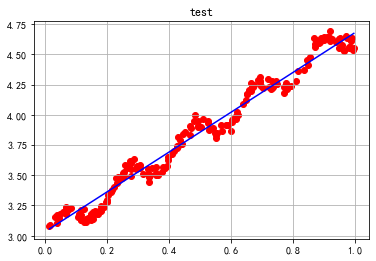

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def loadDataSet():
    dataLoad = pd.read_csv("../../data/randomcurve.txt", header=None)
    x = dataLoad.iloc[:, :2].values
    y = dataLoad.values[:, 2]
    return x, y

def BGD(xArr, yArr, iter, alpha):
    yArr = np.reshape(yArr, newshape=(-1,1))
    mu, sigma = 0, 0.1  # 均值与标准差
    weight_num = xArr.shape[1]
    w = np.random.normal(mu, sigma, (weight_num,1))
    m = xArr.shape[0]

    for i in range(iter):
        predict = xArr @ w
        grad = (xArr.T @ (predict - yArr) / m) * alpha
        w -= grad
    return w

def BGD_Call(x, y):
    ws = BGD(x,y, 10000, 0.001)
    xMat = np.mat(x)
    yMat = np.mat(y)
    xCopy = xMat.copy()
    xCopy.sort(0)
    yHat = xCopy * ws

    return (xMat, yMat), (xCopy, yHat)

x,y=loadDataSet()

(xMat, yMat), (xCopy, yHat) = BGD_Call(x,y)
plt.figure(facecolor='w')
plt.scatter([xMat[:, 1].flatten()], [yMat.T[:, 0].flatten().A[0]], c='r')

plt.plot(xCopy[:, 1], yHat, c='b')
plt.grid(True)
plt.title("test")

## 2.2.随机梯度下降算法:SGD
优先选择.每次拿到一个样本就开始梯度下降。批量梯度下降法被证明是一个较慢的算法，所以，我们可以选择随机梯度下降法达到更快的计算。随机梯度下降法的第一步是随机化整个数据集。在每次迭代仅选择一个训练样本去计算代价函数的梯度，然后更新参数。即使是大规模数据集，随机梯度下降法也会很快收敛。随机梯度下降法得到结果的准确性可能不会是最好的，但是计算结果的速度很快。在随机化初始参数之后，就开始计算梯度。如下为随机梯度下降法的伪码：(参照梯度下降法更新参数的公式，m是1)
- 进入内循环（inner loop）;
- 第一步：挑选第一个训练样本并更新参数，然后使用第二个实例；
- 第二步：选第二个训练样本，继续更新参数；
- 然后进行第三步…直到第n步；
- 直到达到全局最小值

随机梯度下降法不像批量梯度下降法那样收敛，而是游走到接近全局最小值的区域终止<br/>
![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABZIAAAO2CAYAAABy+WJxAAABJ2lDQ1BrQ0dD%0Ab2xvclNwYWNlQWRvYmVSR0IxOTk4AAAokWNgYFJILCjIYRJgYMjNKykKcndS%0AiIiMUmB/xMDGIM0gyMDDoJSYXFzgGBDgwwAEMBoVfLvGwAiiL+uCzMKUxwu4%0AUlKLk4H0HyDOTi4oKmFgYMwAspXLSwpA7B4gWyQpG8xeAGIXAR0IZG8BsdMh%0A7BNgNRD2HbCakCBnIPsDkM2XBGYzgeziS4ewBUBsqL0gIOiYkp+UqgDyvYah%0ApaWFJol+IAhKUitKQLRzfkFlUWZ6RomCIzCkUhU885L1dBSMDAwtGBhA4Q5R%0A/TkQHJ6MYmcQYgiAEJsjwcDgv5SBgeUPQsykl4FhgQ4DA/9UhJiaIQODgD4D%0Aw745yaVFZVBjGJmMGRgI8QEjuUpbCqv4tgAAAAlwSFlzAAAWJQAAFiUBSVIk%0A8AAAAZ5pVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1s%0AbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4w%0AIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x%0AOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlw%0AdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0%0AcDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQ%0AaXhlbFhEaW1lbnNpb24+MTQyNjwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAg%0AICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj45NTA8L2V4aWY6UGl4ZWxZ%0ARGltZW5zaW9uPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6%0AUkRGPgo8L3g6eG1wbWV0YT4Ke0qQugAAABxpRE9UAAAAAgAAAAAAAAHbAAAA%0AKAAAAdsAAAHbAAIHyATdA5MAAEAASURBVHgB7J0HuGRF+fTbnHMEFEFREUTM%0AAREWRCUpBiQoIDlITuJKEJSgoCRFFFGyKAgoiKwKLhhQVFARARVYTJhFMWHs%0Ar37v/+t5zj07M3dyuFvneebO3AnndFeH011vdfU9so7kwwgYASNgBIyAETAC%0ARsAIGAEjYASMgBEwAkbACBgBI2AEjEALBO5hIrkFMn7bCBgBI2AEjIARMAJG%0AwAgYASNgBIyAETACRsAIGAEjYAQCARPJrghGwAgYASNgBIyAETACRsAIGAEj%0AYASMgBEwAkbACBgBI9AWARPJbeHxh0bACBgBI2AEjIARMAJGwAgYASNgBIyA%0AETACRsAIGAEjYCLZdcAIGAEjYASMgBEwAkbACBgBI2AEjIARMAJGwAgYASNg%0ABNoiYCK5LTz+0AgYASNgBIyAETACRsAIGAEjYASMgBEwAkbACBgBI2AETCS7%0ADhgBI2AEjIARMAJGwAgYASNgBIyAETACRsAIGAEjYASMQFsETCS3hccfGgEj%0AYASMgBEwAkbACBgBI2AEjIARMAJGwAgYASNgBIyAiWTXASNgBIyAETACRsAI%0AGAEjYASMgBEwAkbACBgBI2AEjIARaIuAieS28PhDI2AEjIARMAJGwAgYASNg%0ABIyAETACRsAIGAEjYASMgBEwkew6YASMgBEwAkbACBgBI2AEjIARMAJGwAgY%0AASNgBIyAETACbREwkdwWHn9oBIyAETACRsAIGAEjYASMgBEwAkbACBgBI2AE%0AjIARMAImkl0HjIARMAJGwAgYASNgBIyAETACRsAIGAEjYASMgBEwAkagLQIz%0AiOQ77rgjXXPNNelf//pX2x/5QyNgBIyAETACRsAIGAEjYASMgBEwAkbACBgB%0AI2AEjIARWHIQmEEkL1y4MM2fPz/dddddSw4CzqkRMAJGwAgYASNgBIyAETAC%0ARsAIGAEjYASMgBEwAkbACLRFYAaRfPHFF6ett9463XnnnW1/5A+NgBEwAkbA%0ACBgBI2AEjIARMAJGwAgYASNgBIyAETACRmDJQcBE8pJT1s6pETACRsAIGAEj%0AYASMgBEwAkbACBgBI2AEjIARMAJGoCcEZhDJN910UzrvvPPS3Xff3dPJ/CMj%0AYASMgBEwAkbACBgBI2AEjIARMAJGwAgYASNgBIyAEZh7CMwgkiGQ//SnP6Wc%0A89zLqXNkBIyAETACRsAIGAEjYASMgBEwAkbACBgBI2AEjIARMAI9ITCDSO7p%0ADP6RETACRsAIGAEjYASMgBEwAkbACBgBI2AEjIARMAJGwAjMaQRMJM/p4nXm%0AjIARMAJGwAgYASNgBIyAETACRsAIGAEjYASMgBEwAv0jYCK5fwx9BiNgBIyA%0AETACRsAIGAEjYASMgBEwAkbACBgBI2AEjMCcRsBE8pwuXmfOCBgBI2AEjIAR%0AMAJGwAgYASNgBIyAETACRsAIGAEj0D8CJpL7x9BnMAJGwAgYASNgBIyAETAC%0ARsAIGAEjYASMgBEwAkbACMxpBEwkz+nideaMgBEwAkbACBgBI2AEjIARMAJG%0AwAgYASNgBIyAETAC/SNgIrl/DH0GI2AEjIARMAJGwAgYASNgBIyAETACRsAI%0AGAEjYASMwJxGwETynC5eZ84IGAEjYASMgBEwAkbACBgBI2AEjIARMAJGwAgY%0AASPQPwITQST/4x//aOTk/ve/f7rHPe7R+N8vjIARMAKDRuCTn/xk+tOf/pSe%0A/exnp+c973npPve5z6Av0df5fvKTn6Rf//rX6fGPf3xadtll0/3ud7++zucf%0ADweBP//5z+kb3/hGWnnlldMyyyyT7nnPew7nQj6rETACRsAIGAEjYASMgBEw%0AAkbACBiBCUBgoEQyhPDPfvaz9J///CeIjyc96UkdETQ77LBD+t3vfpdyzukh%0AD3lIWm+99dKrX/3qeG1SeQJqiZNgBEaMwB133BF9yUorrTSUfmDTTTdN1113%0AXXr0ox+dXvWqV6U99tgjPeIRj5iYINZRRx2VLr300nTf+943PeYxjwmye8MN%0AN0xPf/rT073uda8Rl4Yv1wqB73//+2n33XePOrr99tun9ddf36R/K7D8vhEw%0AAkbACBgBI2AEjIARMAJGwAhMPQIDJZI/8YlPpLPOOiv9/e9/D7LjyU9+ctpx%0Axx3Tc5/73HTve9+7JViQI7fcckv63//+F997ylOekjbffPO03377pQc96EEt%0AfzeJH0Ckn3322QlFIQTQ6173uvT85z+/I0J9EvPjNE0PAt/73veCeHza057W%0Atr1NQ44gUi+77LJQeW699dZprbXWirwNKu2rrbZa+ta3vpX++9//psc97nHp%0AbW97W9p5553TAx/4wEFdoq/zXH755ZGeRYsWBblNGp/xjGekww8/PPqTdv1p%0AXxf2j7tC4Nprr41AxJ133pkIehx88MFpo402MpncFYr+shEwAkbACBgBI2AE%0AjIARMAJGwAhMCwIDJZIhY0466aQgkgHgAQ94QCjpTjnllFDSNVv2iwp5hRVW%0ASBAmvC7Hvvvumw499ND04Ac/OBTOP//5z9MvfvGL9O9//zs99rGPTZDUnH/S%0AFMsXXnhh2n///dMvf/nLSB8kOQ9IcYgGqwlLCc+t51tvvTWWuLO8/YUvfGEQ%0AkqOsm6wG2GSTTdJdd92VVl999bTddtul5ZZbbmqX2r/nPe9JRxxxRPrXv/4V%0AtgHkjaBUK9Uw+f/rX/+aHvWoR82a59tuuy2IafoU+hxsLd71rneFKnlSiGTy%0AgyL5sMMOSzfddFMQ3vSfEJX0L9MWYJu21k696KT9nnfeeWmnnXYKmxTyuMEG%0AG0QwlXrqwwgYASNgBIyAETACRsAIGAEjYASMwFxDYKBE8rbbbpvOPffcdPfd%0AdzdwgqT5+te/HqrkZiTqr371q/gMP9ByQBJDJEEao/iC8PnjH/8YJBmqZUgU%0ACCOUiixLnyT/0B/84AdBJkB6F2Kc9EHuQTo88pGPLNn08xxCACX++9///lAC%0AEzAgcIBvarM6P4xsYyeDyha7BkgsyGyW3K+99toDVfIOI+3NzvnjH/84bAII%0AMNHml1566SB6yVMzshcF74c//OFQ7b75zW9OT33qU1tiD0FN/wLx/LCHPSzt%0Atddeid/Q74yqvJrluf4e/ehVV12V3vnOd0Y/SBlj+XPGGWdEGde/P5f+RynO%0APeH2229PBGkg/7kHEEQk8Ei9ZsVHJ2RvN7hA4J9//vlp4cKFYXuy8cYbx/2p%0AlYc2JPKZZ57ZuOftvffeQf5j0eTDCBgBI2AEjIARMAJGwAgYASNgBIzAXENg%0AYEQypCnLzyGNITzKgRcpSkJUdTfccEP6y1/+Eh89/OEPTy95yUtCvYzCjk2L%0AysFnq6yySvr973+f8ErlN5BJ5YBI4vP58+enddddd6KIZBSUqKk/9rGPJUiJ%0AckBEYHvB5lk+JgsB6hmbr2FH8uIXvzjhRYsSvhuS6kc/+lF6wxveEPUcX9vd%0AdtstCEDOM6rj2GOPDRU/7QXrA9oI5Ops1jKjSl8314FIhJQ79dRTG+2oHUkH%0A8YylAGQjBD59zmtf+9rE5p3VA1KS9+mPnvjEJ4alBf9jHdFsxUT1t+N4TV96%0A9dVXB3n85S9/OermkUceGZ68JT30vZCupB/P50kiw0saWz1TV0k7D4KKBOBY%0AzUG/T1myISIPrCMg1un7CZSwyuP1r399guhtFlhodb1W74PzV77ylQj2XXnl%0AlbFChvOuuOKKUUeaeR9zPyMN1CnuT3yHAEV15QlpxkeZvmTVVVedqHtVKyz8%0AvhEwAkbACBgBI2AEjIARMAJGwAgYgVYIDIxIxuMYlVhVicvkmYk4KlzIgd/+%0A9rexVJ3EoNJl6T1Ez/XXXx/qY96HDClKXn7P91CeQQ7hNYz/60Mf+tB4D9Uh%0A5x40AXT88cen73znO0EOLL/88uk1r3lNW1Ua6a4eX/rSlxIEOuRHOSA/IK8g%0ArHyMDgEIyc985jMNlS5q9kIQ//Of/0xf+MIXQkX/zW9+M/3hD38IT17qMbYq%0AkHLlu7OlmDoLkYwdAcEE1Mmj9tyljZH24jdOmskX7WaayMWC9QUXXJDYwAwi%0AkYPgzJve9KbFyGE+gwhEqUtQiu/T76A8rhKAlBGfn3zyyYmNQCljVjTQn3Ra%0Azlxr1AckJWQlgSiU2fR7v/nNb9J3v/vdhC82JDp9K3l4whOekLbaaqsIiLRS%0A0Y4y/ai+CdSwmSoP0lke/E8fyXfKA2KZB//Tdlsd1Ge89DfbbLNQ/3eiAEbV%0ATNlD9FIvaN8//elP07e//e0EeczqFwJCXLsauCRYif9/1a6CukSw6LTTTotA%0AB+csinjyx3lvvPHGWCGAqp6Dexj3hTXWWGMqVwm0Kgu/bwSMgBEwAkbACBgB%0AI2AEjIARMAJLDgIDI5KPOeaY8BllEt7sgORAJYnaGJIH5SfEyOc///mYuDMx%0AZ2n5QQcdFMvNyzn4DcowJv1LLbVUEMfDJkhQKEIwYq1BeiFuUC+ycR6Pusqx%0ApLU8Q1iQP4iScjz72c9OEMzkw8foEICMguBF4QjZ89a3vjVIHCwgUHoSMID0%0AwVu4kEcQixBHr3jFK7oifCCcUI0S3OCZej7oIEc75GhD1N0FCxYEmU1dI5+Q%0Ai5NMlLbK08033xykG+0IHCH8UHW2IsUhkOmHTjzxxOhTIImx2ikEIIrTbbbZ%0AJtTmeA/zOT7r03Cg2AUPglEE3iAnUfBCKKPcpa/iID8QnIccckjkc5h545oQ%0AwRDF9Qdlxnu0q7/97W+x8oRNWOuvS7p7TSeBuXPOOSfqyWz3BQheVs1wTdom%0A7Rxc6RvoJ7CDWXPNNcPrnHrDihJWFOCfjYVFVfmM9QV1iXsY7e6Zz3xmPLj/%0AQYSzwob8Uz4lj0XhvOuuu7YMiPSKg39nBIyAETACRsAIGAEjYASMgBEwAkZg%0AFAgMhEjGx5IlvhAcRUXG5ljV3eshsiCDUBhDcPE/S9WvueaaUBMyqd9jjz1C%0A+ctEHIUZxDKK4G5tBvoF7otf/GKo3FCUlfyQdtTQEHUHHnhgW5IGwuJZz3pW%0AkAglLZtvvnmo4fBk9TE6BCB58CtGLchrCH2ISAgu/Fb5/wUveEF8/rWvfS1I%0AH3xojz766LY+u/UcQEJDVGOPgd/uBz7wgRkBkfr3h/V/dcNLlI8XXXRRENvD%0Aut4wzwsZh4UBZByBHPoKgkntDlZEnH322emEE06I8kONDrFPn7LllluGGvYd%0A73hHevnLXz5SEpk+5Yc//GH0b1j6YH9SP6hDkML0HxCckJQEOehf+b+QtXwO%0AyUl9RmEPNvSVPOijXvSiF6XnPOc5sYlg/Rrd/M918aeH/KW9QNSTPh6o9/kf%0Acpi08NzsdSFRy3XpR+nP6e/pC3nmQX/P+zxDuPKAFOd+QTCRNovqHLU/z6Vf%0A5n3uM6iTWwUYyrX5DQp3bGw4T/nty172ssCNe82yyy4bbZ+ABCsW8KfmNxDW%0AJRhDfdxa/vxXXHFFpJF7HRhRX0kv+Sn+zR/60Ifis5IG7n0f/OAH4z7Cd30Y%0AASNgBIyAETACRsAIGAEjYASMgBGYJgT6JpKZ1L/97W8PkhQigWM5WVawuRx+%0AwJB1qHNRe5WJM76RBxxwQCwL5jcofA/VMnOWarO0GNIHogUlIQ9UYjvssMMM%0AX9Bhggz5wVLngw8+uLHJVbkeRACbMZE/CI5mB+mH0IH8KcdRRx0VRHlV1VY+%0AmwvPlClEGORPIVwmJV+UJapkCDAOiF58kCGOUOtSpqiPv/GNb6RXvvKVoeZ8%0A3vOe17J8m+UL64GXvvSlQXpC3rJ0vhlZ2Oy3g3yv6pO85557pne/+90jazeD%0AzAfngqCEHKUd1dXF7a6FGhalOcQkpCrlgG3BRz/60fDUhTikL+L8KHsh/iCo%0AZyMi211zts8OP/zwxiZ5KNepe/R9kI+QtDyon/QdqFoLecvnELaQxvSnEJ3l%0AgT0HVhesmigPSPNBBd4ImNF2SCekKg8wKw/IWNJVP9gIFTwhX0kzD8qD9kX/%0Ah7qXIAfppBwoH55RFJdn+lb+p0wgn+lT6F8gg3ku1y3EdKu+uJ62ul0Kq0S4%0AN0Fgcw3OT11DvQ5BjB81fQTX4eDarJqBDCb/vOZ7YMN9o+SFfLJfAHml/DgI%0AinDfo+8pwdT4wH+MgBEwAkbACBgBI2AEjIARMAJGwAhMCQJ9E8lnnXVWTKZR%0AAjLJhtx44xvfGEpIlj1DLEJ2QBxATEAMMwmH8EJZhyoN31K8TyGSTz/99PTZ%0Az342yAowZHK/zDLLxISe885mKzEo3CHIsT6AKMBntqqsIx+Q5xAhzQ5+i0qw%0ASiSTJwikcZCLzdI4qPcgkC+77LIob8gwcMGTt1NiZ1DpaHce0oXy+HYpLCGg%0AKAvIIkgrDpSuKOohwFAQEvjoNv3U27322ivqBMpm2kEh1Kk7KDip+5R/eb9d%0Amnv9jLaF4hZCsp2ncK/nH+XvqkTydtttF30GpG8nRyEaC9aQyyhJ6aMIVrFR%0AGjYR9EGUCfY1KFvnzZs3lDZKGyGAQZ9IcI18UC8gICEkC0lLvYOEpc+DwKQf%0A4VEIY4jOq666KpTNBD/oP0seO8Glm+986lOfig1NUUWDW/2AXCVdZeUIAUTq%0APfkrCmMU0zwuvPDC6EvJK/ZArBAYx+oM7EAIEvEMbuQNfMvBxngEgbhvYW9T%0A36iSfLCZKkptAjWsqgGDQjSX80Aeo1qm3MnzCiuskAgmcg+o+rSX7/vZCBgB%0AI2AEjIARMAJGwAgYASNgBIzANCDQF5EMocFEulhasJkQKl6IRCbhLO9nOTak%0ADiQak3C8JCERUAJC4ECG4FuJog6ygo2jIOI+8pGPxG73kLIcLC9mA7NOiaRB%0AgE96IJHJ01e/+tUGmbzLLruk97znPS3TQn4hVCAbysGmWKusskoQV1dK5Qdp%0ADqlEvllmDwbTRDJTLpQ/ZBMYUW4QJvjTQvpBxEzSAXGMrynkHWQR9bCQPxBC%0ABESOO+642Ayrl2AFG5ydd955QUKdeuqp4Y+Npy/XwqIAMpuyhkRj88ZertEJ%0AnlUiGZ9v6tVs3rGdnHcc36kSyQSbuvH9pe1CHuN/S1+DrQTEMQQi5DGf0f5K%0A/0JQCDIZ31vq76BXDqAspn9kQ0QO6sKOO+4Yal/IYRSqRcVLHwcRy4PXPEgf%0A9ZV+g/RRpuuss06s1EChXOryIMuJNNNm6LdR6FIeBFue8YxnhI0Lqy5QHdO3%0Akx+IYR7NgiWXX355tC1U11jJQLByrlEfYM1qEtomameIZBTT5WCDRvp2LC3w%0AU6/WA/zG8TemDCD8uQ8QtCH/1YP+H2uc9773vaFGhmjGKoNARfV81d/4tREw%0AAkbACBgBI2AEjIARMAJGwAgYgWlAoGciGfIYBSakL2QMvp9Mqtdee+0gEVH/%0AQb7yOQQjxNnuu+8exAPqZVSBkBN8D4KiKAiLFQaKPDaXgniAFIKchjgpKtJR%0Agcu1IRDwOL344otjyfn73ve+yGc7gg6S5ZZbbmnkC2wgliGwUMaSb9S85Acl%0A33rrrRf4tVI5jyq/ra4DAUPaIeMgxSFIUXVSRix9L+WHlQLBBVR3k3RQ91Do%0AUtewocBaAEUiZUIwA1UlBDBkHmpCiDkIvE7Unqh/IcfwR0Z5j8KROg6JSTnz%0AOfhBDNJm8DEeVjlXieRvfetboajsxbKBNsuGgbRhypdl+dhEEAzpVq3daz2o%0AEslYQ4Bdq3pFXaRPKrhDGEPegz3lyTNlS1vjAflK+X784x+PPqqsOKAe0C9B%0A/nVS9t3kDd90CG36FOx6sNqAdKXtEHjBCoHAGypYNhVs1r+wyoFyoN5CxNJv%0ADNOPm3oAEc/16OdJJ6Q3j6Kw7wQD+gzaGfmDyGVVADYc4zhK0Ad8abNVIpmg%0AHv0D/T0q4kLQEwBgE0OCZ9gsoRYncERZ7bPPPtHmy3fZQJY+kP4fgh1ierPN%0ANos2P+g6NQ78fE0jYASMgBEwAkbACBgBI2AEjIARWHIR6JlIZid7NrJiSTae%0Aj6gsIdMgRiBaIR8ggiALmJBDqEHWQISgdGOpP9/hf85RiEiIIoieeVpijvKu%0ALBvmfUiMcU3EIUAgBiBWWBqNsqxVWsgPVgqodCGNOCCxOEchrKpVDjIZdSJq%0AOMjGSTggUiC2IBEh4SgvvFvJA2WJqpN81g/qBcRKK8Kv/v1R/U+dPOywwyI/%0AkGLUK44zzzwzvKux5GCzR8r13HPPjaABhB12BFU/U7CAPC+EJQQT9bjYsaDI%0AJEBAPYHAhbCEhEWNygZoEIT8PywytkokQ5KxCVmretoMe+orRCpKc4hoFJvU%0AWUhLMINoQx08LCK8mqYqkcxqBCwHaCukox5QwusWWxICHBCEkIOsCqDPYPM9%0AygOFKXYDqGiLchabmpNOOinqBUTgtttuG2rSusq0mq5eX0Ogls1FCSzNnz9/%0ABo5YH5BWyMeNN944/HXrClbKZ7XVVgvPYYIT41T3doMDfSfpJhhFHYKEHReR%0AfKj8+OkPqCe0ZeoDB/0bKxXYKG/BggUNxTR+1QR/eA8V8qabbhpBCAhjVjFQ%0Az9jQk/sCbQ5fZPygqaP0OajcqU/dtMNusPV3jYARMAJGwAgYASNgBIyAETAC%0ARsAIjAqBnolkVLpMvCGAWRIOcVMUWWw69oMf/CAUbEzKIQz4LgRy+Q0ECZNr%0AVIEsMYfcgxgpB++zKRZE37gIh5KWVs+QU5DFkEOo2CBYyR8EK2rOktf678EJ%0AYg6VNeQY6muWi4NjL+rR+vkH8T+bTJ188smRB/IJqUdZQ4aQ3lKeJQBQrjmp%0ARDLkMCQQZQPxW1SIEHcoDfHfLtYpqHA333zzKAsCGliboFSl3C699NJ0wgkn%0AhEUCpDIPsAAj6iwkMQ/KkgcKe8qadsBj2PYlhUgmn9TN0ibJb1G4Qkay+Rxk%0AMGmE1IYsJnCA6p7nG2+8MdT39fIFF+oFROywD7Atm1ZCwNMPkB+Iv5133jm8%0ArEueaHuQgqiPWf1A3wIhS7mwSgICE3IWFTDvl4NgFTY8kP9bbrlleHxTfsNo%0Ah3hvs+kc/RzXxJe7SohDrpbN2dqRrWwOR//LefBwJwjFyg0sVCgvglYQopDo%0Ak3KgzieQQgAKn2DyPwyyvpP8svIAn2PqDgrxQiTTZggAEjSj/15ppZWivmHX%0AQ7mRbixyqIf0gwTZCGDQV1LnqD9YdkAw08YIThG8oA8widxJyfg7RsAIGAEj%0AYASMgBEwAkbACBgBIzDpCPRMJLfLGCQIqsbiP8okGhUXBHMhtJjEM/mGSEHV%0AWQiU6nlRsEFsQcQN6/jc5z6X8JKFcIK4htypqwCbXRsCAg9MFJukHzIc5RqE%0AHCRC9SD/kAksg37lK18Zy6JR7EL4oNbm9aQRDaecckqoUilDCEdUuRDIEKpY%0AN0CeoLqrK6wnlUiG8KEOkh8I1kIkU3aUOVYI5Jm6S11AHQ6BBDGHGhHFIeUE%0ACV0CB7f/f4sS1Nv8BkxQnZbgCUTZsJTH1fpVfV2IZIh/SC/SxQFZBmGOapI8%0Aobwl7yiWIc9Q8mI/gHKU70JWkj/8r8s5VlxxxVD9ksdC4FavPYjXkMekBeKO%0AxwUXXBAkb/Xc9AfkE7/pKhFb/U55Tf1EMUr5Yo2D0roEpsAB1TmkLHX705/+%0AdM9WIOV67Z4JFpVVCmzkiZq4Wj8IpvEepDjEOb7CtLv6UbXNgSSnH8XGgwd5%0Aor3STrFgoA8dVlnV09Xuf1YyQG6TN1awECAcF5HMShpUwuBCwLMQyWBH0Oj4%0A448P5ToKcVaIUD8oJ4IuYF3tq2kb3OtQHpNH7gcQ0ljpsDIDC4wSzGmHjz8z%0AAkbACBgBI2AEjIARMAJGwAgYASMwFQho8jzwQ8vHsybcWQDEQwrALEIqiyTK%0AIlkXu54I2CxyMmuC3vgNv5W3ZOazYR7aVCmLmMpS72UpEbPIqSxlYJZCse1l%0ApXDMIk3jN+RVZEGWijHyLaIqnkt+ROzkT37yk1mbNGWpspti0PZiY/hQpFaW%0AtUE8RDBmeVpnqQqzCMpI/2tf+9osde2M8qLMwEQK3TGkuP0ltblWlLPIqyw7%0AlcaXqY9SJWfqqEi3LGIpi2zOUndmealGOcrbNlPe5RB5FP+LdM2yKMgimLMI%0AwCySeeRlK1Vqvu2227ICLlk+wlmq1yyCLNpSqX/UTZF4WWrJLJIr8xuR41kB%0Ak6j3Ilqzghz5LW95S5bNQ77iiiuivGkb5I1yFWGb5TGdpcIsMPT9DI6kXYRp%0A1uaakSban0js6A+q9UuBmCxiPEvlmUUGR/mQj06O5ZZbLvDYYIMNspS78RPq%0AqAjALBIx8qcAQhbJ2cnpevoO/ZjI6riWSMnId70vFOmdRfRHPyIiONqbVjpk%0ABbqylNRZJGemby1lQrnQ95Ry5v/y4H0plaO/6SnBA/6RAm0NrF/96lc3ymHA%0Al+nodJQ7fTR1ql7m4K2ASXymTQajvcx2Uqmss/yfo92BP/cSkdET2Q/Olhd/%0AbgSMgBEwAkbACBgBI2AEjIARMAJGoB0CQ1EkFw9KFLocqP3OOeecxkZtqHdZ%0Als0hwiM2jGKTNvwlq2peNupDMVhV7cWPBvgHVS0+uCjJuLZImbCZEFG6mIdp%0A/bKo69h8DssO8sNvUZ+hdMNHlg0FeR/lMWpPVMlz5UANyhLuolYt+ZpURTJ1%0AC0W8GkNsElhUiKSb8hNBF8r0TTbZJHxPUUtilYAlBnUUhSFKz+rBEviNNtoo%0AiaQOu4c3velN8d3qdwb9mrYj8jWUw6iHqWOobbEM4IEqEtU11gxsjIeyGJUr%0AClUUoShcqaOoKClDLBFoX9gq4ONMW0WRT11mkzCU2Vh34IH+4Q9/OJTcfNbv%0AwUoABVfCIx07CvLFg7KgHaI0pm5RXhz0DyisUXiSh25UtiipKf/ieY0FBP+j%0AyFZwJ1T1tFFU2tgR1Mu537zye8oMawssNvB45rrV/oC+EkXyrrvuGhsckv+1%0A1lor7BMoI3BBcQw24MUz5YWaHIU1ViMo5nmgouWB6p6yH7adSif4kHaU1PSZ%0A1EusJXhG5Qveg6hTnaSD76BCRslNG2GDxmo5UN+KKhnrIdo/OLZKH5YdtBHU%0A7JQTm85StsvJ558VLgrOxCqAYd7DOs23v2cEjIARMAJGwAgYASNgBIyAETAC%0ARqBfBIZCJH/84x+PXeshDzggpqTqDBIBIgE/UogQJtcQQ3h8MmHHl7UQzBAp%0ALAPHRqHVJL7fzPN7yCqWWR9wwAFBBJRzYk8AIc4S6F68Rqs+ppAl+M5yzrly%0ATBuRDGmItQgHRFKVPOI9iCCsACCS2LTtDW94Q5CZbAYJ8VoIWL5bDjZpY7M2%0ACFo8X+t1ld9Sdyl3ztHrQZpOO+20IKzZ5A/CCtK1PFOHaWMQ3oVkxM4BL2P8%0AfiFJ+azajiAm8YCFCINUx06iSq6TVvKGHzRL9aXODCJ3UKQkgRW8aiHrIcIh%0A9bg+Vi9YQGAnALmNRQcH9jMQq3UCmU0Osd/AngQPXs4DoQ5ZTHCIZyxoIHAh%0AWyFdyTv9C9eDJKQu8IAELBv6xUUH+KdK3EMwstkbvuq3yz6EdFJXSBd9IMEA%0ADuoV1iOQkpQhD/pPbBSwADnmmGMiCAdpTH7Ahkd5XS3vAWalp1NViWT6U+on%0AFiU8eA1pi2UKrynDYR4lqESbrBPJXLf4IUPuEzzBEof2Uz8I5BDgwH6JNoIf%0AMvUQSxLaDQEd2hh2RvQnvDahXEfR/xsBI2AEjIARMAJGwAgYASNgBIzANCEw%0AFCIZ0odNuSC7OCA0UHiidkRFB6kMYQChgBoNogRVcNlAit9AMFQ3QuK9YR0Q%0AOKeffnoQNCXNXAvCBz9NyKduD0hLSAqIcV6DSTO/027POynfnzYiGXIRBSTk%0AEaRpnUguRDPf22yzzYJAarehHIQuqnVIaVk+xGZ9EHgQn3goL1iwID4jYEJ9%0Ap373SiRBJKPeveiii6JNQBaXdoPKE8UtbQvfYAhLfIEhVfFublXnOCfpgrhc%0Afvnlw++6Huhgc8IzzjgjlKSozyEyB0VOQn6DIXlB8cx5UdPST9De2LiMNsP3%0AONgAEUVvnYiTJUaSpUf0J/g/oxLnQZsugSxZjkS5UP70S+SXDffAsKh4eeY9%0A+qRB5bHaVgk0QDSSLgIWEI6s0qC8II7ZqJHyIH+yFgkSEvIeJTn1ELKYNLIJ%0AHHlgozeU8PSn/QQpqmkc5mvKmXoKEY6Ketlllw3ClfZCOVC3CCpSRmADqV8P%0AGgwqfRD3BPoo5yqRTJuA/OU91O/Uoy222CLaVb0vIBBCvaOOElxBYU0bJ5hE%0A0AJvbzzTCdTQrgjosCKCPoP7wbDyNiiMfB4jYASMgBEwAkbACBgBI2AEjIAR%0AMALNEBgKkVxV33FRJtdHH310kF1MqiHxIE6qpBDLzq+99tqGIhlSgf/rhF+z%0ATAziPdSdKCCZ/EMqQgCy8Rrv9UIkQ4hA0nEelJQoXmc7DwQgj2GRWYPAqZxj%0A2ohkAgQoXSHdIIFQu1966aWhfoS8hOBCiYwKkSAHZHBdoVvyDtmEgh21IoEC%0ANuVC2Yq6ljJHZUodgiDlwfmpDyyB79WqBbKRc0LIoX6EvCoKW4IuKFTl0xpW%0AK9Q5SFfsI/is1UG9xD4GxfxVV121mGIeFSXnwG4BFSxk5igOrAHkoxskHOQe%0AB8Tceuutt9jqgLKJIriQV8oBVTOkJWpeyhC7CixAICiPPfbYIC2HrXqt40T/%0Ah3qV+vD+978/Ag9YWaCOhUyFWIVMhfTefvvto5x5zftVYpuA11577RUEMyRm%0AnfyvX3dS/oeUhfSmnWGTMn/+/AgcssElAUPaFAf3BUjXddddN4h3yq+a/0Hk%0ABwU8ZDYHpDFpQx1PeZAO+gosjwhi0GdwP6sGZAjQUI9oM9ynsDGCmOYgsEP/%0ATcCA4AtkM30N/QT1k7ZGkAdrjXnz5sV7g85fJMR/jIARMAJGwAgYASNgBIyA%0AETACRsAIDAGBoRDJKOrwmoWc5YBAOPHEE8MnFNIAxRZkGAfKLJR4LN1nqXex%0Athg1kUxaUDBCGkBgQ9xtvPHGSRuw9aQeK76skHoQchAVKB6rB8vZFy5cGMpC%0AXmP5Qf4h2CEdUGVCCE6iem3aiGQIPEgciGSISuofik5Un5BGED8QSJQXCknI%0AH4i9ZgfqUshJiCbqOIp6yovyhdgrlgSU52677RakIGQRxBLBiWGUJ/ULVWRR%0A4a655pqRt3bBC20+lyBiIctos1WyjHyjoNSGixFM4buDsrVohmn1vT333DNp%0Ac7loD4VIxvoAgnGNNdYIVSc4g+nVV18dxCRkIBYCkKz0HeQFAh+VOJYJ5AMP%0Aa/qhurq0eu1hvS55gjSGnCet1APqIW2+BI+qXso33HBDI/hBulAhQ0ySB20E%0AGR7WEK/TcJQVATxD6KPih8wnqIPaHnU2dbeUN+XLygA81+v9Zr/5JQ3cc2jr%0ArCggHfQFBJYI+PF5SQfBCPoH0kN7xrYJKyRWz9A+qG8EZLTpZpyLoCmKcYI6%0AkNLcTwhOYr9CkJCD/oVgFWpzCGjU19RvytKkcr+l698bASNgBIyAETACRsAI%0AGAEjYASMwFAR0IR54MenPvWprMk/UsJ4aIKcNWHOmpRnXosozZowZ5F6WaRO%0AFtGatTQ//i+/0cQ9i1wdeNpmO6Em/1lEQpaqNPOaQyRDPuuss7KInNl+3vhc%0AJEHkkfzIAzryIkIiawOzvN122+U3vvGNWcunswjnwEBkRgMvfiNiKTATaZSl%0Akm2cd1JeaIl2FrE4I82kW8RPFmk7KclspEOK3Sy1ahY5nKWKjPdF6mWRylkK%0A0SzyN5cyEKmTFexo/Lb6QgrGrA3MslSFWVYSjXp+yCGHZCkUs1TJWeRyFjmY%0ARRJGvQYXqXmzyOks8qp6uoG8lho3y4Yl2pWI06h3IrKyAjNRl0lLs0PBgChD%0AWUJkBU5mfIV00l5pq9pQMvIz4wtD+gd8pSiOvkBBlEYdk4IzMKRdaQOzRnpF%0A/DXKQArxTJnWDwWDIh8iXzNY1Q/KS8RgVlAhH3fccVmkYJalRxY5PbDyKu0F%0APKkjrcqEPkYkY5ThZZddlkVEZpGXWarXLAI2yoR6KkVtljI2K5hRz85E/i81%0AfdbqkugvFKDLCtpEOqlnIs+zLEqyrF8abZA2oyBIFsmcReAONE9SJEdaqvcY%0AymPRokVRB6SGz7Qj0qANGLOCTFk2LHm//fbL1D9ZjESfLt/7Rtr22WefLJ/y%0AqK+rrrpqVtAo2r/I40y/L1I8y2d5Rn/J/Y8+ifZH/aAPkZVSlq93y/oxUCB8%0AMiNgBIyAETACRsAIGAEjYASMgBEwAl0igPJq4IeWcGeprhqTZinvstSgWcqt%0AvPPOO2dtNJWlQMuQQNqoKEutlaXkahCvhXhjwj/uQ0rGDPEBOQDB3MkBAQUx%0ATj54kHdt4pUhxiAyIRQg0svn7Z6bkXydpGHY3ynEWD3tk0okQ1xpmXwQN4VI%0ALhjx2ZVXXpmlLsyQjmeffXYQkpQjJFYhfyGUpGrNUiLmSy65JIjGUm9lhdEI%0APJTz8gw5BmHEcytyuvr9Xl5L3Zmlvs1SRmdIcNrbhhtuGPmAfIQAIxgCqVU9%0AIMwIBpDnOpEM4QrJRT0eVUAHnHffffcIokBiS30bgSfqGKQpwRcIPog8yov8%0AQPryP4EXKXibEnBVIhmSDtL4/PPPz7IkybKRCKwoU4IJlKfU5VkWBVmet01x%0Aq2LYyWsCCqUecP7Z8JSaPIhv2aBEMAlincAc9QgswIB+hHKVireTJIz9O+Be%0AiGStVmkQySVh5EOb1EUZVwlXyryQzuW7/T7LIznSItX6YmVBnZKHepYVSQT8%0AtDol6hpphtimXhBskCXJjPYuD+/4vPSHxx9/fCPwSL2W5U3W5pVRt5r1/ZQt%0AxLYscDJBIPmTxz0SXEr/02++/XsjYASMgBEwAkbACBgBI2AEjIARMAL9IjAU%0AawuRWLHRlyblmlen8CzFF5QNwVhqz4Nlv1hZsHxbREEs2cbntBzYO+BZiefp%0AuA7sLaQeDvsJEcnps5/97AyfY/x0WRrNsnnywvJ6lqqzBJ1NsVgKzcFyZRVU%0A4zVL2qVeiyX2PLOJFsudWdrMMm7wYSk11gp4RK+zzjqxRD9OMCF/ps3aoixn%0Apxwos7r3Nu9T3/BPxWZARHGUK2WjIEAq+cUflaXrLGsXoRfWI1hlYIVR97Ol%0AqLBVwG9ZZGZslkfZDvLAJmajjTaKpfl48HItKVkTVhT40IqYjbqJdytex+RD%0ARF0kAZ9WNrHDbuPcc88NK4iSNrx7ySN+w2CBdcewD/yasWxgM7T3vve9cc29%0A9947fKtFREb70sqAaI8f+MAHwvYBCwGsaLDPERE5wzMY6xHOhUUNljpS+oaH%0ALX7S9Dk8aJtYYFAfaIO0YWwO6LvACU9r7CSwmKFP6uXANxv7A+ogdUmBihlY%0A18+J//bJJ58cVizYdCy99NKRPsqA+kM6SRv2HfRL9CeTfuAbjo0D9bXVZpYi%0ATMPjmw1OyT9tkXKhfQ3yPlDqtlTI4WnezAsdyxo8yRWwCGsX/M/x7cayibqA%0APQp1pxzUKSxi+A0H9ReLGyxz6Bd4zf2COsoGkaWOld9XnzmvAg/hE40lCvdN%0AEc3Vr/i1ETACRsAIGAEjYASMgBEwAkbACBiBsSAwFCK5EFSQxRwQomywBDkD%0Aycr7eIUyWYdY4DUewUzsywFZwoR/kARCOXcnzxCLhx56aJKyLDYyO+mkk4Lk%0AxdOTtJJmSGPIoTvuuCNIKd4jD4U05jr4b0JGQT7gy0m+eA/yByKSZx74z/I/%0AD4hMCGa+y/tVwqKTtI/iO4VYhayrHniaapl3kOPV98f9GoLnuc99bviiEryo%0Ak0eUGf60CxYsCC9jPFApW8oKL9Ott946yYokygdStpCK+F/jgwrBye958Bvq%0AO8QZfrBsigaRiBcspOUgDzZxYxM/SCwISryb8eClfNg8kCAHxCREKh7DfAah%0ASp2SRUeQdBB71O+qdzCkLgQ1/q3kbdDprmOAhzUkMj61UuHHNQnGSHXbCDrR%0AF8hiIAh/iGN8ndmYjn5E1h5JKx2if4F0hvi75ZZbwuv8O9/5TmxyR6AGgg5y%0AnDIFB4hKNhEkYEA7pA1LDRqbsNGWIfC4xjHHHBOBnnq6O/kfT9099tgjSEU2%0AZuQ17bvVQZlRdnikF4Kb9NEv8Ch1r9XvJ/H9Qt7S3xOIgSiu1rdqmvkO9Y+6%0ASrtkY7tB+iTTFuZpozvuQ9STel9AWkjvCSecEB7ceKsTACAYRL2hfXNQV6h7%0ABBzpK6gnBKNIM8RxqU/UO/4nmEp/TiAL32WCOAQu+B51kOChFOuNjRdJFx7N%0A1JVJvAcECP5jBIyAETACRsAIGAEjYASMgBEwAksUAkMhknfaaafYkKgociE+%0AIEAgHZm8M9FmYgxJU5RWfMb75YAYQpk2aAVnOf9szyhP3/rWtyb5ZgYRjqpR%0AHrihcERZBile0kv+IAEgiiEgIQdQ13GQz+WXXz7UzBCQEAlz4Zg2IrkQWZQL%0ARFKVPIJoZLMvCGYIZ1SgkIzy+o4gAuV10EEHBSELuV89wAGVIZsrUt8hjZbT%0A5nvy8Q2ySh6rsYEXm8RxvkESsihxIV+po2y2B6kNKcymfpB1EGG0uyulqiQg%0AAnlFHYbUot1BPqOkhtgkAACZVQ5IPM6N4hcF5SCJvHKN6jOb66GghlA+/fTT%0AgwiX53E6+OCDg7irE36UI0Q37ZS+A3UuRDnBHTZt4z1IPpSipZ2ywR1EOwpP%0A8gOR2SxQQ1mBFX0Vn4Mj5QmWvRxsuMgmbaQN8pAAQzsymHp0uxS8EN7V75Fn%0A1M30MdRTAnQE7aivpR/tJX2j+A1ti2AKpCubHkKUtyKSSQ/9K2pyyo7+s4pD%0Av+lF4UxdoI5Q/6t9QTk3m1DyGWpw+m0IZFTg9OcQ/ZSnLHIicEFwlAd1FHKZ%0A78iiIvoBAgHcG2hzsgNq1CGUygRF+D5lRz2DMKb/4DFX7hMFTz8bASNgBIyA%0AETACRsAIGAEjYASMwNxAYChEMuQOajpIAw5tDBVqTpRdkFVMnJlsc/CMclAb%0Al8XEGrKESTTEkvwxG8vw48sj+gNBsMUWWwTpBqHxtre9LYgHbcYVKjnyBbEB%0AWQA5ANEBwQg5RZohCAp5RZIhE5rZKYwoO0O5zLQRyZDF6667bhD82jxuBnkE%0AKQdxBKkDqQSJTFlia3L11VcnedaGmhAVbFEjFlAhHVmCD1lIPeB3EEGQewRB%0AIGkhnSAPqT+DCoxAXKGA5JzYWKAoJu3YypCXbbbZpqGihRCFyEOpS3oh8Ghn%0Ay4nwpq4eeeSRiSX0VZUsVhcocyGn5QkbeSp5HvQzJD8EuLxpwzqA69FmUFpr%0Ac8pQC9fbDwQx7Y88lbYGmbzeeuslbYQYxLL8k4NwLZ/TJ2GJ0Y7AhMjGLgJy%0Ant/RvrXhZZRn6bO6yT/nQNVN/UNdeqVIfQjgTg/qJIQmKyHkJR/WD6yAIJ30%0AORCcBCsg1VnNMKlHaX8E2TohkoeZD22SF3hB7FP3mq16oU2DJ3WFNg/pzIF6%0AmDaDoprz0LZo6zzk+R+f0f5R8dOPoCSnXdEvcL5e6tAwsfC5jYARMAJGwAgY%0AASNgBIyAETACRsAIdIWAiI6BHiKoskiP2DRLKr6sZfWxUZbIjxkbl5WLaiIe%0AG5hpoh2bSWminUWMZL7PuUZ9cE2pILMI79jYSirELAVbFpGQZVuQRdJleSXH%0AZmtssMZGUCWd5Fvqs/idCiGeRfZkqUVj87ZR52WY15u2zfYoN5G4sXlbfbMz%0Ayo9NrUTONTZrE7kcGyyyORq/pfybHVIix+ZYreqrVLZZRFJstKgARLNT9PQe%0AG+yJbM1sGCYLiEb6pLSMzfbkh7zYRmylnnLBsuEY9VSkV7TNakKkCs4i0WIz%0AOjYZHNYh+4jGBnsigLPUno1NARXACewog/oGiSIBs8jT2CxQQZ3YpI0N9H70%0Aox9l0nvaaafN2PyMfIpIzmwi2O6QpUJsiMb3RRpmWW00sG33u1afKUiWpWqN%0AvkDEf6St2XfBQYRxXrhwYZYFSmzoxuaPbJYon+3YsJM+kv6x9C08878CHLH5%0AG+eY1EP2L43yYMPK2cphmPmQYj82pxTJm0UYd3QpBWrypptumuV9nGVfkaUY%0Aj7rKRrFa4RDvySomi3SODRvr9bWji/hLRsAIGAEjYASMgBEwAkbACBgBI2AE%0AJhwBVHcDPaQ4y1KrZqmQYwd6eQNnbZgVJGwzogNyS36yQQgVgoQJOaRt9fu8%0AlhIsayOxLF/YDMmkZepZyrAG0TuIjEDKSTkYpDbp0dL+rCXyHZ1a6skMcVzy%0AIQVa1hLuIPSqJF5HJ5vwL00bkQw5BxFH+XRCHhEAIZjAcysilboOSSgbiSyP%0A1CzbgSB1tZFWI3AgVW1cU+rZLO/XgZQqhKN8hKPNHHbYYTPSJ/uADLFKm4Mc%0Ab3XICzrINIhIWWRkAjrVQ7YygZcsXSJYUv1skK+1kV/WZmRZqtB8wQUXZAji%0Acuy8886ZQI5Ut4Fveb88Q/oSrJJ/cb7++usbhC+BAm0UGDiAO4QwbbITIrmU%0AF9+XirzvgBbtXwrVuL7sUxYj7EtepBgP0pi+T5YjQUbyO0h0bfKWtZFiljVK%0Alld3YFL6GJ4JHrQKZJTzj/tZPuFR30jvm9/85rESyaUvkFVFR30B2EEkUx60%0Ad+oR7b3ep8sLP4hkWWE0ra/jLgNf3wgYASNgBIyAETACRsAIGAEjYASMQL8I%0ADJxI1lLsrA2tGkQsxIF8YfOOO+44g/CqJhzlHYRRIUcgwuRJG8pgfgdRhzIP%0AwgSCWh6ncU4UprITCMXeDjvskOVr2lAzVs/f6WsIYy2NbxBPkGzyim0QVO3O%0Ag8JTm7kFkUA+ZN+RIaWqimWIcC2tzwceeGDH5HS7a47zs2kjkmWXEMQw9Ww2%0AIhkCVn67UZaQlbI3aQq1bApCZUmwhDo6b968/PznPz9rU64oZ3lpZ22uFkSy%0AlrkvpqptetJZ3kQZLe/uaC+0iXrApRCoEOCyf2h5Nm38FXhAjKG+rh+yIghl%0Armw9MoR5NwdELirNVriVc9FmOD/KUG2Ut1j/AOFIMAbVN8Rd/QALFMi020Lq%0AEXCSpUXkDeJPFjkNAlN2NW0JTM4hz+EgoGnDkLeo1Hs9SIvsVKI/kfVBW9Uw%0AQQbZlESQjP6Q/k8e0RnCX5YfEYSA7Od98Cp9paxKsnyXO+qjes3HIH7HKg4C%0AOaR73ERyIfdloTRrX1DyzmoT1P+kn7aMKrnUufIdgjsokuWVP7CgUTm3n42A%0AETACRsAIGAEjYASMgBEwAkbACEwCAgMnkslUWXJeyA6eWZ4tP9NYvs3SYhRe%0AkCLyYQ3lMuRx9fuQxdhEQPwxOa9+1ux1sQ+QT2VL1d9sgKN0Zjl/OT9KSJR+%0AnRzYYVQJHnnmBkFXJRvkzRt5hZDYZJNNFiMBO7nOpHxn2ojkfffdN2wSOiGP%0AIIBRglLv5KG6GGFUyoBl7iic5U0cBDL1Xl7DWRvbxbJ3iM6icIVEq1tqlPN0%0A83z22WdHIIWAivybFyNrUdGSbupjOxIUJS+KTIIzzRT3kO1YZ6CO7VZJjcWE%0ANu9rq4gGG7CizaA8JshSbStgghKX8upGzY2SWt7PEcjZZ599QiVOPmjTdSKZ%0A9giJXlY+yIc5FKcEkOiPCEzVldrdlBVkOv0Y56Ofa6VsL+eEeCfwRD9JXaEe%0AVjEhSKdNSBtEN0EAlL5gOelHUQFTDuMmkgsZTxl32r/TDxTbInmnN1Xpy1s7%0A6h1tsG5jg9Kec7BqoRpcnPRyc/qMgBEwAkbACBgBI2AEjIARMAJGwAhUEeib%0ASIaEQbGIag4SR5vmBalWJ4aZhKPOY+k9E27IHghViKROiOJC7s72zPm7VVAC%0ACH7HkGYoics1Dj/88LZkXAESZao2Emz89lWvelUQBnUSCqVrUYxCkEHi9aui%0ALmkY9fO0EcnaNK7hpzubIrkoSSkjrBeqdgtVnIsly1ZbbRU+ytgrQAJCGBYC%0A8NBDD406TntAxdjPwflRPNN2sIG4++67Z5yOa7KsHuKynZoWIqusGtBGe0FY%0AzjiR/oGcRO0PUY7tQiFb699r9j+kPaR6M4K6fB9fZlS6KLkh1+pthe+htgU3%0AlJ51Yq6cp/p83XXXhRqc39C2IIpvvfXWIMSbEZisDoCsxi4CL+v1118/FNB8%0Al75gtnpSvXaz11hugB+qavqIVgpt+gVIdQjWQw45JPrSZt+94oorGmQmaaSM%0A26nOm6VpXO9pw8mGxce4PZK1sWOUCe2kUyK5WMFwf7j88subkvd4VfM5Xt/0%0AG+edd154XdMetAlrqN1R4GtzzLBmou+fhiDAuOqMr2sEjIARMAJGwAgYASNg%0ABIyAETACk4fAPUiSSImWh5RxScvck8ikJGIlSeWYRGDFbvUirhIP/hehkbSB%0AUhIpkkT6pL///e+Q1I3zatIeO96zg73IlaRl5/HMa84rtVacs/xAS93TUkst%0AlUTmNXa653winOJ6UudFWkgP1xJZk2R1kaQiTrKniP/LuWZ7FpmQdtppp/TF%0AL34xaWIfXxfBnUQuJxFKSeRAy1NIdZj22GOPpOXlSeRPEqGctBFaeslLXpJE%0AaC32Oymm41oi2eK88tVM73znO5MI8MjrYj+Y0Dfkg52kLG/gVZIpJWqSEjSB%0A36Qc1BsFLxJlRZnIUiHJk7dt8kR0pt133z0p+JFkMZCkKJ7xfdqFLCySNt1K%0A8ulOIpOT1PMzvsM/IijTiSeeGHVUitckArdtfVrsBP//DZHTSZYWSYRk1BeR%0AcdF+qt+n/XF+2pP8uiP9tLf6IZIrSZEcbXfhwoVJS/GTgjn1ryUFPZI2v0uy%0ABUlSYTbN32I/0huyh4g2ynUe9ahHLfYVEeJxvhVWWCHJ6zxJcdy0rUh1ncBM%0AvsFJm941PVc5uXyjkwi7pI0RE+fViocoHxHJSYR0kqo6iaiN97XqIH5GnyYv%0A6aQN06Lt0ZeU9s/78p9O8skul+jqmf5QAaUkv+wkFXGSIjdJGd30HFxTgYEk%0AG44kq44kj/Yk9XSkt7Qj+tltttkmiZwMbOk3qKN8t13/1PSCY3iT8qAtgIuC%0AB9FmSjmMMjngKAuiqFf0C1Kkx32mXRq458g6KcqQfkN2N1GWChqlRYsWJQWI%0AkhT16YQTTkj069zbuA8pABX55Z5I3VIwpnEZ2T0l2edEmcpzueO21TiBXxgB%0AI2AEjIARMAJGwAgYASNgBIyAERgHAppMtz0+8pGPZDaAEqkbvqOo61D8oeZS%0Aemc82NRKxFF4kqLMqn6OJysqSjyHRdiGQo+l+Xix7rrrrjM8kvkdy4BR5Wni%0A30gfr1EuohDVxDyWCP/mN7+JZfEsBReR1lTZ2DhBkxc333xzqCKxxqimF1Vx%0AO0Ulp2I5Pj61YMJvUVdjrdFKwcpvUB+yxL78ht/hrQwm06ROmyZFMqpD6i9Y%0As4EedWW2AwUs3sco6ZtZSFQ9X9vZC1TrtkjblqrUdumh3mORgUIY2wwU99V2%0AUX6LlULxcT322GObKo35rkjksLWg7rar48WuBe/nTlX+YMvmeaS1ma8x7Zbr%0AY/WAgriZ8pY0KjgU56GfQcXf7vqowDfddNPoQ7B7YFM6bCA4vvvd7zYwqSth%0AwfDrX//6DG9z6kirMo8TdvgHKwc83Ek/atySnlY/J7+sisDbGisOkeEZaw5U%0A7KjBqWPYrXA+LEnOPffcxRTprc49Ce9jG4Q6G3wpK1Tx4zjw5WZjR9LBioNO%0AVOennXZaw/IE6yPqLnnAT5u+m7LC3qasrOH+yP+sUkH5j2fyM5/5zHjNigHa%0AB3UMuxtU6OPCYhz4+5pGwAgYASNgBIyAETACRsAIGAEjMN0IzGptgWUFG9lB%0AUFXJYUhjlqZvuOGGWcq9fM4558RmUVIOhh8ynzNZ5wExwgS+GfkFfGX5f/k+%0Az+2+PyjImcCz5LhOIkPWQBS2I4TZ5AsSAPKY9IJ8CzfzAABAAElEQVQNZAlE%0AWTkgyaSUDCJpv/32y1ggcD2WzUM2VPPL8v0vf/nLU0MmTxORXJalgzd1keBD%0AJ0fxQKZc8autHlKRR9lDjt1yyy2Nug2Zy/mLFUSx1ODaLHWv21FUz9nqNcvk%0ApUDNUjwGOduqHRGkYWNLroVtA+Rk/ZBCNkhe6vzFF1/cto5jOQHpBflOGtq1%0Ah3KdQrBz/mZWHrQ5fJ5pP83sLMp58CsupHg7Ihuyettttw2SEoLw1FNPjWBN%0AwQj7AIJbYIKNBsGm6kEaPvGJTzRwg1yczd+5+vtmryGNsdagDyQYsWjRokb9%0AaPb96nsEp8AHD2zIxo033jhsU17xilc0NgFlA1LyXfJY/f2kvi7thXKgTYyL%0APL3ooosam/5Rr2cjkvHQxk6mkMSkn00caWdYWVAuBEbY4LEQ5ViyEDSlP7/q%0AqqvyV77ylXjmNe9JNZ/ZJ4D2Sv3spF1Nark6XUbACBgBI2AEjIARMAJGwAgY%0AASOwZCEwK5EMWYE6mIkvk2MUtzyYkKOihWiG1CjKQgi0sns9k24eKB/bEQdl%0A86PyfZ67IV96LbLbbrutoU6rXhv1arPNv7gO+bvwwgvD77lKQEOsQgDJUiAU%0Aa/hwyv4hPKFRrKE+g1iCkECtJuuLUMRVrwvpNAoCvVe8qr+bJiIZL9lC+LOB%0AYjOlbDVv5fX3vve9IDNle7LYRmmyZIgABJufVf17CaSwkSJBhv333z+I2BKA%0AwRe4WyKZdiNLi3z66afHddqRh/gdFzKLlQR1FSxtFD9gFK0ENSC8252P77MR%0AHhteQqbh0Tuban777beP8xOMgUAr/ULBlN/j69vuunyXtlQ2vnz5y1/eVJFM%0AOaL4pm1BIsuCJPqZ6rlRgaMMpp3RJutEMtfC0xr1L6QgdQWFcwkE8Hm3BwQ9%0AJDDtnXx0W+YEAEg3nvKQnaheKQPywEZu1Mt2JHy36R3F92kLpb/EP7vd/WCY%0A6SGgV9JBPzxbUAmFPSpi2jCBDdkmRaCB+x/E8LXXXhvBQoImBKkoI9p+s3o2%0AzHz53EbACBgBI2AEjIARMAJGwAgYASNgBEaBwKxEcreJgFguS4cLSSrP4MVI%0Arep5q5P78htI3iohVP3+oF5DID3pSU9azKYDhSOf1Q/UaW9/+9tjs8C6ohiy%0AARUhS+shLasKNsg9SGI270OVetlll2X5smZIyOp5ICtaXbuelnH/P01EMhuq%0AoTSlblEOVeIXaweWrqNKxS4AApbX8ryOMkLNii1LXZGMfQKfQV5WCVvqCOVc%0ALF6q9aDVJl3typJzY3nQCflaVT83a3OQmtRP+erGOeskb7N0yCM52jN1k+AH%0Am8a1IpNp+wRNCnEub+imquhm16m/VyUeUffWLTgI9KDMhSTGQoAyhJys9xlY%0AQhSVNgR/KwJTXtdBCkJO90Mi029giwOJDBFMfainqZ7XZv+TBvqIFVdcsYEn%0A9bedZUmz80zKe/Ibb5DhkLH18hxVOtdZZ52Gslve3Fne2W0vTV0ncEqQhgAB%0AVin8pl5H6B/KfQ/rIhPJbWH1h0bACBgBI2AEjIARMAJGwAgYASMwpQgMnEhm%0AWXhRf0J8QOLgQ1yfeFfxqvrIFiK5ahdQ/e4gX0PwaKOjGX7FKCkhEeskmzZY%0ACoUxBCHfKels9YySEMIEYpLl/ixhrhMQ559/foPkKudh2TSWAu3wGiQGvZ5r%0AWohklo1DNJYyq6vjsSLB7xQPU0g7FMs8o/xcffXVYxk71i033XTTDBUoZXnK%0AKadk/JfrZYWKEbuWog6mbJdbbrkMWdkLqdhJGUE0F+Uk1zvzzDNnKGGpf6wU%0AQDWJZ28z24tm10FNu9deewUJCEGMXzqBH+o0akwCPmDzmc98Jup7IexJA7YM%0ArYjbZteqvkfbgYzlPHXiEVsMyDoUy9heoA5tRbRX7T6wlek1PdW0tXtNYAFy%0Am36CVRytSPd25+Az0okdBOVV6i5YQOZjcVK8k2c7z6R8jqofJTx5WHPNNZsq%0AzEeRVm1w1yDm6/Wq1fVpAwSf6u28+n2IcRTO5A+rCxPJVXT82ggYASNgBIyA%0AETACRsAIGAEjYATmCgIDJZKxo1h11VVnqHHrG1w1A66++RyTcciiYZFu1TSg%0AEmUZOtfkAfHdzDez+OWW7zV7hvhaa621gjwu6jUIu1b5QL0IsVkl3zjvMccc%0As5gCtprmSXg9LUQypG4heMAWEhTSsRyUDYGDD33oQ6EkZjM7FMh8D+IRhS3k%0AE4QlNg8oXwmMYC3AxomtyhaCGUsKLAkgAiGWq/7Z5fqDeka9CnlZ6iWq6mKp%0AgIoSVS8EJ3UL0qtVupul59Zbbw0rjEIE0kZQc7IJHrYTYMP/9XqMQhPlcLcH%0A5Cu4FwJ1/fXXbyhY2ZyTuod3MypXNssr+Wx2naon7rC9ecEJGwpWGRxyyCE9%0AkdaUC5s7sjIB/CDvySvkJOXH/6yiQPWMDQeK8V7J6mZ4Deu9YqlC/cQmpboq%0AYFjXbHZeAkRllUC9L2j2/U7fo58p1hbsKdBsRUun5/L3jIARMAJGwAgYASNg%0ABIyAETACRsAITCoCAyOSUWsxMS/+kxAGbCoHKVJX99bBKEvBCwnGM5uWtVOA%0A1c/R6/+Qe9hVlHSzqVkzkqPq2VpNJ6/xzoQ0xO6Azczakcf1dOKFWgiIct5p%0AICKmhUimfCHiCimJfUWdeIS8g1ym3CGHURNCgFIHCTRgJ1DIS1S/EKeUERu7%0AsSlcKyIPVf1uu+2W99hjj9iQb5j1GQ/l4ilMPcJCBTU2frobbLBBELNYTczm%0Ai1yvn+V/VMdsKAYpX7As9bXVM0Qo1g7dHpBwxSaAcxclMWVz4IEHhgc5bQ2F%0A92xewdgS4KFcPU+36enk+9SBsrICpStl3015UwdvuOGGIIch6FnVAWmMPQae%0A7ATWUJKjlocIpQwoCxTKBDj4zh/+8IeuAgSd5GtQ38E3+H73u1+Uw2qrrda0%0Ajx3UtdqdZ999942+HvxQ0Q9qozt8tUs/TpunrvowAkbACBgBI2AEjIARMAJG%0AwAgYASMw1xC4BxkSydL3IYIuzZ8/P2nJdRIpkkRqpQ9+8INJy9uTlIwtzy+y%0AJUnNmESUxO/KF0WAxfsiU8pbQ3smzVqGnkRMJZE4SZtuJZEeM64nxVmSBUIS%0AMZ5EXsVnsqFI8mlN8jpOz3rWs9ITn/jEJJJnxu9m+0ekZtJGX0lEYJIfbnxd%0AasakzdySyKTZfj7Uz7WZYhLR0vQaRxxxRJK1QQOL8iUp0JNI16ZlLsVskjVC%0AknK7fH3oz1TvzTffPIk0SrKaSFKwJlldpG7qlYjNqNeycUjaYCvqigjSJOIo%0ALbPMMklEdXrOc56TVl555ST1crxX8rho0aKoE3yv27rRDTjUnz333DOJwIqf%0Akd+11147iXhNIsnTa17zmiS1fLRLkWjdnLrxXamsA78FCxYkeSUnbQyZaL/1%0AQwRntAltqpakAk5SZde/0vZ/BZ6SlKNJJH2cn7Zw8MEHJyme0/XXX59EDAfm%0A/D/bIfuYaKMKDiSpfNNxxx2XaLeDPkTcRzumTsh6IsmLu6N6rkBHkiI+felL%0AX0pSjicR9km2KVGXtFohbbjhhtG3kFf58CZZ7CSpypM2MkzgxEE/sfzyyycp%0AlZMCHfFbWbWklVZaKep8r+U9SIwUeEkKxiX6O3lVJ1n+RDkO8hqdnOu6666L%0A/kCq+kSZ0WcPAh/uIVJaJ3lsJwVUk2xJAvtO0uTvGAEjYASMgBEwAkbACBgB%0AI2AEjIARmBYEBkIkS1Ubk2dtthXED0SPNstKu+yyS5AF7SbqUnIlqYATRG31%0AkLI3yLlhkm/V60HoQLhBMEAiN0szJI6UfwkyQmrrIJxJ+1JLLdUVMVm9Lq9l%0AlRBkl5apB1kmFWySn+1Qicd6Gpr9L9uCJJVus4+CdAevehwCElFWIU3xIE8Q%0AeQQZRnlQPyERIeUgwHslEgmQQKbKwiBpA7wEoSrv4QiAQCCSb8hy8scz1yGI%0AAqkMcV2tU+DGAyIWwg+it13AZTa8yCNBG9lWxFchJyHtZQURaZH3c9St2c4z%0A2+dS3ibaLA+IdSmcgzzjfSnzg+B9whOeEM+Qm5DI1XzPdv7yuVTcSYrvCK6c%0AccYZEcSpB3fKd9s9y8s5yVYhQSQXQpqAwiAPAlBS3Ab2ssBJWmGxWCCqej0C%0AE5DkBGKoPwTRCDgQSCKoBgEvf+4ghMG0GvQgiEU/q80U01lnnZXot8oBztQ5%0AfkNdpE7KIiRpc8UgmuXTHWRzr2VSrtPL80EHHZRkGxNk+NFHH52k3k5aBdLL%0Aqfr6DfVUvtlxXwLjToIRnVxQdkhJm61GW5CnepLyeeyBwE7S7e8YASNgBIyA%0AETACRsAIGAEjYASMgBHoBoG+iGSIMJSP8pRNkKBFSSibh6Ql2S0JxWoCUeCt%0AscYaixGWKEdRJcpvtPr1sb6GSESJCuldSLNBEN2cF+Kc83K+ddZZpy9ScVAg%0AodbTcvkgxUgXhFZ5tCMHyQ8HJCmvIb8gcFBpymogyet1UEns6DwQdCiJUSJD%0Apg2izCBsIVIhBFFuQ/6DFW0CbCCFIT6pv4VErmLG93hfnrqJ9kKZ90NqcW2I%0AY0hNrk26II+r1+wIrC6+BK6ycQlykLKGGCzkeb/XRfmPIhcS/gtf+EKSpUPg%0A1UXy4qtXXHFFKGApL1SwW2211cDbFiQpCmEU4bK1aEmQkg/qyY9//ONo6xDK%0AKP4he1G0y18+6ieqdtoI9aPVQd2TD3uQs2UVSP27lAHlQXCM4B4BDp6XUxvY%0Ae++9Q43b7hr18/Xz/yWXXJLk8xx9AmVCfgfRDntJE5iT77JqoJdz1H9D/SIg%0ARGAFRToK7G6V+PVz+n8jYASMgBEwAkbACBgBI2AEjIARMAKThkBfRDKEiDYf%0AC1UdKj8UXjxQnnY6iUYpCIECGQK5Vg6IP3lpThSRXNK2pDxfdtllERyA8IGU%0AgnwpBGF5boZFKUdIZF7zgGiE0ELB3Q9h2ux6nbxHGtqluZNzNPsOS/Uhb2kL%0AqILBTP64kd9m3+c9CD2CJyhXUTFiicF7/aSP/EFenXPOOWnNNddM2mxv5IR9%0Aq/z28j4k9cknn5zklZxe97rXddyf1K+F2hfrmTvvvDNsIbAfGDSBia0PKmyI%0A/Haqcnkgh0KcOgPBiyUF/SRBKZT8KIi7ITfJEwQ2OFH3CNa0OsgzymQUzwQt%0AsJegPfZT51pdq9n7EK2sUmH1Bs/U97l0UKYEblAm0/YIgvSioJ9LmDgvRsAI%0AGAEjYASMgBEwAkbACBgBIzD3EOiLSIYc0KZk4XvJpBkFa7fkBATYTjvtFMu0%0AmYyXA79QSI9Bkz7l/H42AoNEANIctTq2F9/85jfD9gL7i1KnUesSYMGDG8IR%0AFSrEE2TioMg8bCy0MWDabrvtgqjuhpQcJBaDOhcqa4hWHr1iBCE9b968IPXw%0AxIWw7fVcrfJFMAxieDZ1Lys2SA99GoTzIPo2zglBzcoQCG2CGpC05BNfbtTH%0AeCfzDIkLWb300kvPajnUKq/9vA+pT8CxXyugftIwrN9yH8OXGpsiyH0CZpO0%0AmmZY+fZ5jYARMAJGwAgYASNgBIyAETACRmDJQqAvInlQULGx3pZbbhlKTgg5%0A1H1MxiE8Bk36DCrNPo8RaIUAARYIZXxvUSpDKGGrQaCFB2TeIEjE+vUhFX/y%0Ak58EQd1OGVv/3Vz/H0sJCHuscsahhh8Fvlgq3HjjjeEFTdmT34c85CFBKkMs%0A8zCxOdySwIMdiyJsntiA0/eu4eLtsxsBI2AEjIARMAJGwAgYASNgBIzA6BGY%0ACCIZD102Litenyxn32CDDdouEx89VL6iEegOAew8sB9AqQqRNwzyuLsULZnf%0AhmCnDIz/kln+o8o1GyASPDrggAOCxB/VdX0dI2AEjIARMAJGwAgYASNgBIyA%0AETACo0JgIohkMou/J5sgcbAkH6sMK7oCDv8xAkbACBiBCUfgt7/9bdzDWEnj%0AoMWEF5aTZwSMgBEwAkbACBgBI2AEjIARMAI9ITAxRHJPqfePjIARMAJGwAgY%0AASNgBIyAETACRsAIGAEjYASMgBEwAkZg6AiYSB46xL6AETACRsAIGAEjYASM%0AgBEwAkbACBgBI2AEjIARMAJGYLoRMJE83eXn1BsBI2AEjIARMAJGwAgYASNg%0ABIyAETACRsAIGAEjYASGjoCJ5KFD7AsYASNgBIyAETACRsAIGAEjYASMgBEw%0AAkbACBgBI2AEphsBE8nTXX5OvREwAkbACBgBI2AEjIARMAJGwAgYASNgBIyA%0AETACRmDoCJhIHjrEvoARMAJGwAgYASNgBIyAETACRsAIGAEjYASMgBEwAkZg%0AuhEwkTzd5efUGwEjYASMgBEwAkbACBgBI2AEjIARMAJGwAgYASNgBIaOwAwi%0A+d///nf629/+lnLOQ7+wL2AEjIARMAJGwAgYASNgBIyAETACRsAIGAEjYASM%0AgBEwAtOBwAwi+ZprrknHHntskMnTkXyn0ggYASNgBIyAETACRsAIGAEjYASM%0AgBEwAkbACBgBI2AEho3ADCL5iiuuSPvtt1+66667hn1dn98IGAEjYASMgBEw%0AAkbACBgBI2AEjIARMAJGwAgYASNgBKYEgRlE8u9///t04403pv/85z9Tknwn%0A0wgYASNgBIyAETACRsAIGAEjYASMgBEwAkbACBgBI2AEho3ADCJ52Bfz+Y2A%0AETACRsAIGAEjYASMgBEwAkbACBgBI2AEjIARMAJGYPoQMJE8fWXmFBsBI2AE%0AjIARMAJGwAgYASNgBIyAETACRsAIGAEjYARGioCJ5JHC7YsZASNgBIyAETAC%0ARsAIGAEjYASMgBEwAkbACBgBI2AEpg8BE8nTV2ZOsREwAkbACBgBI2AEjIAR%0AMAJGwAgYASNgBIyAETACRmCkCJhIHincvpgRMAJGwAgYASNgBIyAETACRsAI%0AGAEjYASMgBEwAkZg+hAwkTx9ZeYUGwEjYASMgBEwAkbACBgBI2AEjIARMAJG%0AwAgYASNgBEaKgInkkcLtixkBI2AEjIARMAJGwAgYASNgBIyAETACRsAIGAEj%0AYASmDwETydNXZk6xETACRsAIGAEjYASMgBEwAkbACBgBI2AEjIARMAJGYKQI%0AmEgeKdy+mBEwAkbACBgBI2AEjIARMAJGwAgYASNgBIyAETACRmD6EDCRPH1l%0A5hQv4Qhceuml6YEPfGB67nOfmx760Ieme9zjHmNH5JJLLknXXnttet7znpfW%0AWWed9IAHPGDsaXICliwEJrFdUAJuG9NbD//85z+nK6+8Mj360Y9Oq6yySnrI%0AQx4yEf3t9CLqlLdC4E9/+lPcz+95z3u2+orfNwJGwAhMJAKf+tSn4l5J/7Xi%0AiiumNddcM6200krp3ve+90Sm14kyAkbACAwTgZ/+9Kfpt7/9bXrkIx+Zllpq%0AqeBFJoGvGXSex04k33zzzenrX/96YhD9iEc8Iq211lpp2WWXTfe6170GnVef%0AzwgMHYFf//rX6f3vf38QDq997WsHPpD673//m17+8penv/3tbzFY22uvvdKq%0Aq6469sHaTjvtlD73uc8F4bL66qunnXfeOfLudjz0KjcVF1hS2wWF47YxFVW0%0AaSJ/+MMfph133DH95z//SY9//OPTyiuvnF71qlell7zkJem+971v099M6pvk%0AwZP6ySydb3/72+l973tfTDg222yztNpqq6X73Oc+k5nYEaQKUuoPf/hDWmON%0ANWKc43o7AtB9ibEjcPfdd6e///3v6eEPf3iatoDSpptumi677LL0v//9Lz3q%0AUY9KT3rSk9Lmm2+ett5666kVlvzlL39Jp5xySvrHP/4R/RBzm8c+9rETWzZ3%0A3HFHlMETnvCE9OIXv3hihEZjb1hOQPrkJz+ZvvnNb4bYC27iwQ9+sEURQ64X%0AJ5xwQvrMZz4T/cXDHvaw9JznPCcxvnvyk588pzjOvonkW2+9NX30ox9Nf/zj%0AH2OSAkhMsjodBH/sYx9Lxx13XEL5c//73z8tt9xy6U1velOAbVXjkGu5Tz9w%0ABH7xi1/E5Aei9+lPf3raZJNN0pZbbjmwG/qdd96ZnvGMZ6Tf/OY30V7WXnvt%0A9PGPfzwGN+OMdNEH7Lfffumuu+4KEh1l8i677JI22mijdL/73W/gOPuE04XA%0AktouKCW3jemqq9XU0t8edthh6dRTT40JPsqC5ZdfPvr4Aw44ID3mMY+ZisH4%0AwoUL0+mnnx73pC222CIx0Zw2oqJaLtXXEBef/exn04Me9KD0/Oc/PwQJ47wX%0AVtPW6evvfe976ZWvfGXUMVR8r3/969MOO+wQxPK05aXTPLf63ve///3I++9+%0A97sQlSAuIRhHIGdJw6IVRn5/biJw9NFHh7CK/pmVfa94xSuiX5uGer9gwYK4%0AV37nO9+JwCslBGECkUKfNo2ikl/+8pfRLxPUghx/ylOeEn0TffUkzmt+/OMf%0AB3eSc07PetazIgj+whe+sCM+BkHf2WefHUEMAng8uKf6mEwE/vrXv0aAptN2%0Ahbjr05/+dNTjDTbYIB144IFL5PhilKVJX3jkkUemz3/+8+lf//pX8DQvetGL%0A0oc//OG5NZ5Rh9PX8Y1vfCNLQZxF+mZ1OvkFL3hB/shHPpIVVe3ovJ/4xCey%0AmPqswo2Hbpj5qU99alaFz4rOdnQOf8kITAoCilznjTfeOGuQEfVZgZH81re+%0ANYuQGEgSpdTJUis02osiXFkkXdZkeiDn7/UkIrazAkhZyqFGO37mM5+ZFSEf%0Ae9p6zZN/NzgEltR2AYJuG4OrR+M406JFi/Khhx4a/S7jE8Yq9MGHHHJI1mB+%0AHEnq+pqa5GdNhLPIuKxJRL7iiiuyBrZdn+drX/ta/tCHPpRFTGfa9CQcCtpm%0ATXoz90Ip4PI111yT//3vfzeSxr3xpptuyrfddtuM9xtfmIAX1KNXv/rVWSr3%0AqF9LL710ftvb3paliJuA1I0mCVptlb/whS/kDTfcsIEDbU0KwCyBShZJkvmO%0ADyMwVxE4/PDDs5SC8WD8LDVv5v4zCfVeS7TzD37wg5Zze+4nX/7yl7NI4yxy%0AqzFHYS7/z3/+c0aRMbeXCC3un+Oeu8xIWO0f7i3M4cp9n3xpRWgWsVz75mT8%0Ay/1CK1QDfzgZkVYz+k3KqBXeF154YVZgPCtYnp/97Gfn3XffPf/85z+fiLo3%0AGehOVipOPvnkvMcee+TLL798sfZVTyn9x0tf+tLG/Jwyfu9735up39NyMKa7%0A5ZZbskjZfNJJJ+XTTjstf/WrX23ZH01CvrQKMF9//fX5He94R5bjQvQjjPEY%0A5/Qy/p6EPDVLQ2r2ZjfvSUmR5R/YuGkw8FPULl900UWzVm6uUyeSC6EsdeMS%0ANYjuBnN/d7IRYJJebRNSsAWZ1CzVV199dZYVRnQsUuW3vMnzW9m/ZEXCs9T+%0A0SGtv/760alOyoReyziyPEQbfQH9gCwNmmXb7y2BCCyp7YKidtuY7gr/q1/9%0AKh977LFBapVJJf0bQYJpOKTuzE984hPjvsFkmIC/FEhdE6uQmwT6pfzN2267%0AbZYvftfnGDReTDDID/kigPuyl70sy5IkM4jnkMI1yHMIgF133TXL83oiB/FS%0AVc8IEmv56cAC0IPGfJDng9goky3qlVYmNsYQZT6gvSDyOeecY3HJIIH3ufpG%0AQCtqs9RlMX6nj+2X8P3Rj36UpUZuEJeQgb30031nrMkJIG+kks5bbbVVyz6U%0AvlgWPUGEl7Z7wQUXLMYFkCcCZ1qxmOfPn58vvvjiDH6tSM4myRnZW1L0ziDG%0AEQoNShg0jExIeRrCPvDnfnjjjTc26qXUkREUJyhX7o8lDdQ9iORSbgj8qNud%0AigLLefw8GgRkVZEJOGv1byYAJVeAlu3nS1/6Un7c4x7X6FcYK016oJr+QFYc%0A+ayzzgrRBiIBrcCOIAfBHcahtE2tsAsecZJFHQjqIP4pK8Y3jPXqwTWCQPU2%0AOZqa1P9V+iaSIcJQupTOpzwfccQRHUU7UPWgZC6/4xkSrhnQ/WfXZzACw0eA%0AKB8TIjpr6jNqqVYRbJRisqoINZWWs0an2apDPP744yNaTEfEhPhb3/rWRE2I%0AUStUCXQGnJDfPowACCyp7YK8u22AwnQf9OGstlpmmWViQE4/zGqQaTiYoGup%0Aa5adRdyTIMNlKdb1JHHffffN2ug1zgHJMW/evFD69kug9Ishk/ui5iWPVSEC%0AZVTuxwQ6ef2BD3ygo/Fpv+nq5vcEkrUUvDHZk3XKnBZTQDqhKGJCSz1i7FCC%0ANCimGDcRrGCSjOAENdK0TrS6qQf+7nQgQJ8q64kQTrEaYr311ot+p59AFfVb%0AHvwhFmHugIqNej8JBCv3C/pPyEkCdxDEzVYN33777UFwlbYsa4vFSJOf/exn%0AoexFFENb594EsYwqttk5x1kj1l133UZ5kKfzzz9/sfyMM331a3NvK4IeVKgl%0A2I2inLkmKzwg8FGEV+/bEFvawL0xbyWvkJWTVh71/M7V/1GsMmdq1fZ///vf%0AZ1lnRnvURm55n332yYwh6gfvVVf5UP6ssGNOwj143AdCOOoi/Sak8bve9a68%0AzTbbZIRy8vnOT3va0yLAUVY7V7lCXtMfaXPP4ERYdVat0+POW/X6lAMr+ug/%0AcHKA+6GtMqaGDKf/k61viHCnrc31TSTT8VeX2lOwdGJXXXXVrJWUBsLNl5tJ%0AqRx0XlRyJm2tGlC1cPzaCEwiAm9+85ujg6Ne77nnnlnewU2Tyc2dCSPBFIhn%0A+SrHBL++5EReO5mlbky2CNLQ8U7apIrIdXUijArT0eymxb7EvrkktgsK221j%0AblR5BoPYC73mNa/J8r4PFci05IxBeQluMvj+4he/2HUg8qCDDpoR+EcVAikw%0AzrEaEwdUyNWJhvyFG5Mq7pMnnnhiY3LNPRlFC8uwJ215IYqbko+5qsBFnUMb%0A0iaWsfS6LPmEUIJEkyd5CEkIlP/kJz/JTJgnYcI7Le3c6RwdAiiSIXEKacpc%0AGJKVFbm9kgEEwUqwjn6tlQhldLn8vytpM+0gtstcHfsDSO46cUN/W+2Pzzjj%0AjMWw4H4BmcJ9tBoAxJaBVc6TNLeRR3ujT8a246c//elY73ezlTvqbvpUygku%0ApQiTUBezsoP3qbOIAOv9qjZ5beSVsoCYG+e9fba8zuXPtQFvWHW9853vzN/9%0A7ncXKyvyDi8AZ0DwHEFnszENKwTKPRb7ScYVrBSut9thYolFCiQq/aL2jMlH%0AHXVUEKhvectbMiuvGPcQ4Ic0RjmNSIE6ypgVWyvIVvKh/aAyfS7ju7oAlbq9%0A1157teRahpm/VudGZYz6n3I5TVYcBx98cJDFrOwg+KgNSYM/LWM+ngkOTPKK%0Ah2Z57XuzvWOOOSYpgpDUWal/+r+DzVzYrVADw/JW02ctZ0ti4ZMqGYR2fEcT%0AndiciN1epfhp+rtxvKkbW2LjHUXtkir4VG4cMA7curkm2F5yySVJJGps3MiG%0AjRpkxEYBbAykji82caAsqg82n1MkteWGAhqwJA14YqMWNdT4HufmoZtkmKDr%0Ahpp48D8bXPS7M686jNhEkrycrk2O2NG4VX2m/sveIuq9CKekyXlsuMFGThxS%0A9cYGD7qZJHWo6Q1veMPEbvLEbvPsQE/5yMogNmwAcx/dIyAfpaQbfvQ1pb7S%0AHugj6S9pDyJCAmue+Z8+V5PxrjYCoe9mt21Fhme0jWr7oG1yDcq3nx1nl9R2%0AQem7bXTfBibxFyIIEpvaiIyNzXempX9jA1Q2MqOfYBNUdqPvdrNANoBjQx4w%0AIN9aJZOkHkkiPsZWVIwjpV5J7FhPv8jGTmxmwqbPpWzYzI77ukjJRjrZxZzd%0AyynHSTm23377pIle9LXXXXddWmWVVebEpoiMg+RdnaQ6SrJDSYsWLYqNBdnJ%0AXP7VMfaSairtv//+sZkwG1sx5vNhBCYZAQUWk8RUMQdWQC3mD6SXe70IvdjY%0Aqtv0y0IpHXrooUkkRNLKwyTSJTaw7vY8g/4+G3XR/zMf4WDzS5GRSUG5xTbB%0AJN0iTmJMSX7Y6Evk0Iwk0VdLFRlzn/POOy/uKSLkkyw0kryhF/v+jB+P8B82%0ArZNVUpQt41c22RWJNcIULH4pNkrjYCO91VdffcamaSKt0hvf+MYkq4MkS4O0%0A5pprRvq32267GLcwP9AKntjMkX4WzMshZWdS8C7yysaPlOM47+0lXUviswIW%0ASYGWJLFZWmGFFZKsuaIdiWhtlBljOVkmJHnwRn9R5xq+8pWvxG8kPItNGKkD%0ACnSNtG3BqUiAkCQuTRLURZ8Az8F8k2f6ATYXZV7Jg/5EBGuSaC4xPuAhcWo8%0ACofCJpjy8E7yh46xUqkfEipF/8FvRnHAc8AvMfZkHs04hzwq+BcP7g/047zH%0AAw6R9+CaaFeUJXyiVjkmWc9FOcNncf9grj8tR99EsqTYcSOFaOCgwLmBQGgA%0AHGApyhBAlUF9AUeR12gEVKZy0Kkp0pkYUCtaMfYOu6Tr0ksvTYqGRKUgj9oQ%0AIWnJS3rd617XkiAsv/VzZwjcfPPNMSmlETKJgDDjuTzokOoPOiEpw5KWdbSs%0AK9QlBjz8tpyrPPN73qdD5hnyTBH0pGhsX8ECGdknLcmMzoUJIYMR8tPq0HKw%0AGDxKqRM3CYhv+R/F1zkX9U+b9iUp+JMib40bSavzjet9djNmsgiekC3cGKoD%0AlXGla9quy00WsofBBAd1p9oeqLc8Sr0tz1KtRz+lCHTHWZYPVdKmDXGDo13U%0Ar8O5y4OBJZOJXgeXS2q7oDDcNjqukv7iEBBgHMZ9hX5Dy43jXtLNYJVBM5NW%0AdqKmP2AyquXOMbYbZx/PvV+WIzEpYdypzQCj7yyTDqAkIMc9nUkZB2M4dqlf%0AeeWVY0wQb1b+8H2C2uQX3Nrduys/6/ulVi9FQJl8EJBlkjHtB+MpSGSCD9xf%0AuDcxMWbixDiaewpkMv/zmnFOr/eXacdq2OlnrnXDDTfEJJ3J+qjq9bDzNc7z%0AQyAwPofcI0DCPIJ+leCV1IJN+5d26WWeuffee8f8mUCdlPsjJX5apY000c8y%0ANuWQLWViDk9fWj8gt97+9rdHHsCF17T1Zoe8eeM+cuaZZ8a5uY5WJTQ9b7Pf%0AD/M9+bQmKQcTxBXkFCRtv3PDQaT33e9+d9wnpIBP2oMn6giBUuodAhSEeJQT%0A/Sq406dSN+FUIJapl/V7P2QYwWbufRDMEH+QWvTZPkaPAOMtxmmMCbRHRwT9%0A4ZwIzFA+5SA4zryK8QriAEhIuDbqLHM1rewJMhmSdZRjmZI+xpuQrbKxijEN%0A6aLPgDDWPiPxDGlMXWZsUMjjOl9Yzlee6YtkixV9DO9xL0McAPler9vlN4N+%0AZkwjxXi0Oe4DEMRwobQ9HvzPgSCA/EKYw+swriPPtE0e4AGvQ/4Z+4xzPN0T%0ARirkng+WBWog3vDdUwJCbq6OKpb3CLzw3EHGrUhIxjtJE5C4HkvziySf3/EQ%0A0I2ll2xQxhIfNrnRjbnnNA7qhyzhYWkI8ntV8FiOgy8LabQP7GBQZgkXflqK%0AqsWunOxIivm/GlXUj1JPeMZTi+UOLJMQUdt02UdJFZt8qaON+qbOZsa51CHH%0ARjzYS7D8Ff8allL2W+ek1I8NJ1ii0amPpoj0WL5Rr1PUO3ZmVbSrZGlin/E1%0AEhkfvme03foBrnh2sWyHsma5B/6HWOEo8NQ37vXrTev/ugFlTU6yBtfhy6qB%0AeGyWpUHdjPpLX8QSe2xE8JeirutG1lW2KSeWGnMN3dBmnJ/2J3VDZkk7S4rY%0AuIq09Xosqe0CvNw2eq01/l2/CGDJwcYs3DuXXXbZnuwoWEYpFVrcj9m4D3/b%0AfvqCfvPE79lICHuN0i+yOzbLAuv3b+7pLJksYwiWePJeq+Pcc8+NsS1jV6l6%0ARmaBwdJMxgwsj2+XvlbpnsT3WarOLuXgyKZ6LHNlLEMZ8ZD6srFMFZ9ANg3q%0A5CjLRtm4i2sMYrOzTq47rd/BUmS33XbL+KaylLiVx+205m+c6RZBn6WqndEX%0A0V+KDFosWcwH6DtpB2U+XP2SVnxkkSnRV03KXkFY8GGtV/pZBdgym7M1Sz95%0AYTyvYFjkgc3fuP+0O5hfs+k4Xq6T5MuL/ZPIncgHe9h02je1wqUdBt18hr0G%0AbZl7BWWCDQV9IPVNhGKkWSKeTLl9/vOfz9wXmRtQDvV7Y7lu1RJjGpfXl3zM%0ApWfuk8yZyrwMOwfKtz7Hoz4sXLiwUb4iODP8Cfwcm2SKvG3ZVkeFF/yOgphh%0AacMmzXCAvNesj+wkTRKsNfoYxnX4e9OntqrfnZyz2++QdriMU089NStgFj7N%0A4M6YBv9jPMnhnLDwYZyCVQzjFJHMs6aT+T8cyTTwPqhTejqYQOB5gmdrGZzz%0AXG401fcglphEV42w8QqpepwwyOcGwsCd7/N7SD78USZhZ3BAYuBKZaBTLl5D%0A3CwhyWe7UfYE8hL4IzoBOklFd8KLqu7JSL1QVC1ujgzIOmmQ3NQZAOC9V+qc%0AIlbhRaPlWnEDZpANkTmoAQCDIjp/jO3LZgedFCfppDOsdq4QffUJO0GcUXaY%0AnaSd77CJA9gq0hiDGPIjNVKQnIrcxY7P+KIrapoJNEmZFEb5TJwZvIxy0t5p%0Ansb1PcqXcmaSQv3UUrPGgKL0r7QFJizU3Xod6Sbd/JZrEByjD4egfov8q/DA%0A17K+8NRicNJvnVtS2wVl4bbRTY2czO/STrjXD+o+MapcQriWsRq7X/cS/C5j%0ANvoH+iLu0eM+CLpKwRHjRXw5CcY2KxuprOJeXPpNJuH0ma0OqX6iryWvEG/4%0A3DU7b6vf9/o+G+aQH61e6Ji06PVao/rdbPeMOllT9wdkjAfRhM8gfqtS44VH%0AIpMz/Etf9KIXZYgtxhVM5lr5SY4qv5N6HTYxYk5VhBnMrXrpB5gIE3hmrFYn%0ANCY176NIF+M0AiZSf0b9bCWCYtM66ittnLrMuKvaRghiFSK5FRk9ivxUr6FV%0AHo05L2mD4GhX9hCYUt1Fv6xVux15fjJXQKgAuVTFo5qObl9D8kjhHPvOgCXj%0A6W4OxBX0x7QZAi/t8ky7gIzlnsSmWe95z3uGukEofAp1DTKZ+xp9I31l2beK%0AORbBSEhGHtU5ZTMM2PS007w2+73fGw4C8AdaVZ21wirKmQ2fKed2B7+B0MST%0AmD5+UO2p3TVH/Vl9A3PaQrsx3TDTR99Pf49YlrZG/8c8oQht2aC7GgBgLAmf%0A2Kpc+BwuFI6EMU0v9+lh5rd+7o6JZAZyKN5QgbJhEtE5jLAL6VsG6OUZEo1d%0AlyGPiNTSoQM2Bx16ISz4Pp00gxyA1zLrjFoEIoPPaDzcdFGLcqNpBXw9Y8P8%0Anxs/hEiJVEJOHnnkkRMxsRpmvsdx7kWLFgUpWQa/1AmUVTTWbusCdYyyQsHE%0ARJGOqNuBRacYlB2OuRadSr8HgxQiyqSbSbB8kmNnUyJhkxCxIg0Q4GXHaQJD%0A7LyKwoj2zOoD1K2QzKWPqD/T5rn5jetm0G8ZDfv3RJWr6jvwI5DVijzpNj1M%0AwLX0JggUbl6QT/2Q082uv6S1CzBw22hWE6brPcYujGMIGtOnMQ5aKAVIu4ll%0ANznkPsSkb1hkJaqkMl6BFChjsU7TCBGL6gl1BQRIVRTQ6TkG/T3GlAQiIXvZ%0A5Kqdeo/xAkHdcs+ZDQNWebAhId/n/IwdRkGcU6+YzMs2pCPyZdCYjuN8KJMY%0AG4A1wTb59ccqJYgYWV3EXKNsxsP9j7EF5El1TFjKlWAJAQU2BhtU2xwHJsO4%0Appa+z5ivsdlhtwIY+qlddtklJsgE/1GYzUZQDSMvk3pO+m/mLNTpVrgwJy6C%0AFlZ4sOqsSgyxQg+yln4HYoJ5DuMw+lyETAhohnWfaIYr8xd58TZWC9NHzTYX%0AJ31lc1fG/oOYAzVL22zvEexgTMsKGohV1NHcJxBFzHYw5yr3PDYWrKsdKRNU%0A2axinT9/fowLWCnLvYi5DPNU2pzsBoI0mu16vXxOPYMo5z4IgUyfxziFNJTV%0AHdQt5rqsaiXvKJcZk1bnz4wHWG3N/Z08jHsD3V6wmMu/YY7HnP9J2pyNOj3b%0AvIzy5DfN7oHMr+mjEGgyhuV8nQQaJg3fqjiC+38nBPsg8gD2s+HPdVgpX8ac%0A9AelffIZPCeCDvqGZvwNausi/OAcCB476bM49ziOjjySdUMMM298oPA3UcZj%0AgycV3owDo3YpBJI6pPBzwYxfFT+8QHRTjO+qYof/sTrf8BLhTTHvsTkKXj8c%0AAjF8YfD30Q0p3uM8eL9oEJN0gwov2/hgTH90I400a7Abvsl4n+BPgyH6qPxZ%0AxpT1kV5WN7vwb8U3TDfEuLYaZdIy+yQFa8f+1GwyxKZAHGyYMG/evPDk0WQk%0A3hv0Hzab5Dp4AeIXRtrxNcKjqJPNffDb0Y0g/OzYTIgNEBTxSoo0xmYXtEHO%0Ao8FC1Dv8hYZ1kHbqu4iOhol8/bVuTpFHcOYzDUiijfJbdWyRNMoN70dNGgML%0AdZTxzHtgwzMbJdF/KEA1rOxM7XnBkf4Pz0ndVCIf1N8PfvCDUbc1ue45b2wC%0AgD+lVpmEPx9tCx+n0m/3fOLaD+dSuyBrbhu1Ap5j/9IPa6Ad+0DgJa7JfLQ9%0ATfSjb2ezNtkRtPTnbwcHYyE2HqPNaXIXHuWynYgN4BhHDXIcoUB8bHhCfcWv%0AtlufRy3Ti9/Th7MZHOOccfbRGsinbbfdNpVxpFRgMUbFY67ZgV+/BAlJ5EB8%0ALBVsjAGa5YFNs8gfZc34g4O9Cch3q/PHlwbwB88/NpuSWjR8Q/F55n7KM/f4%0AQffHA0hyx6dgHkFeKAMeIpfiWQRN+FozpmHOgIegJsLhfSiis7EhT6cXAisF%0A28O7sJUva6fnmkvfY88OPHcZy7FJF16bPNOmOz1EZMa4m7Eo4xF8L5mPdXOO%0ATq81V79H+xbxGPNG6qqCHrEpdemL2MyU+gu+7JlCP0SfLQFT/IZxMptXdVt2%0AveL5vve9L+HJyxifa8qOLjx2GeO3O/B2lvgsvsI+Mfjyjrr/oq4fccQRMVen%0ATxGBH/u2sGE53voSvLXMAhuXcW+nD2Kez4bp9FkibxO+ztU5GfMy7q1gwpih%0AzHkYn7NPDBuJioCP/QQGjQH3K9KE3z9zKnxi8URmrimb0dhnhfSRLu6bjF0Y%0AZyigEWMY0iNCMdo1/TP9RK9jmpZg+oO+EKA+4W1POWoFTvjqtuIuqOfUU77L%0Ag9flwX2Xzd/4DnNIxqCUP3UCLgGOZJj3TDg9NoBkLINvMPP9TviQZuDBizBO%0Ao85ySGgX/eiw70UKxiQpvaPtKMAdfEWzsXrZ7wKc6Qslzmq0/0O1marEqLHZ%0AHn09n0tAEPmQaDf6f/zYaa/wJczx2TOpV6zixEP80xGRzGCaSRSDcUUBYgdQ%0ADNnZcZWMciwnI2kmK1QOCIhWGVa0LEhiKjiNA5C42VAg5UbKgFMKmiA0FJFt%0ADOY5JxMgdp3caqutkjxRxjqAIQ8M/MkTlQWim0pGZ+5jcAgwiKKTK5NAzkzw%0AgUEWg6rZDm74TDSZsLCJA5sSMIAb5sHgi2tRp+ks6bAh+qi7dCLVAQxticEA%0A6ZPaIF4zeKx2/gziaC90wARs2FSNTSBob8MIrDBBB3fSUEhibj4MlnjUX9Nm%0Aqwc3JimRI5BEf8AEkXbBQI4OEyzKM2XBa55p461ukNXzL6mv2aWWAS0D5HIQ%0AFNGyu47aQvlN9Zm+izrJOWgnbKJFuxpGOUx7uwA3t41q7Zl7r2lbDNql0I9N%0AQgjocQ+h3ysTxJJrgt8M+Ah0d9JemJQybmJizSYoDBrp9+ln6UPpH5kAEshh%0AV2r+H8QhJVYEoJhAQoxL1dnxaRmoy5os0szkmx3C64FLsGLCPKqNYBnIE/ji%0A3lklN1pN0kkfm12SF77DhEbq1sXKjPsafSAkAuXNIUVIECls6ttPsK4TwLVX%0AQ0wamCAx1oWwoM4wOeKeD/6kp5O6Vq5HnqnD1DNIWgK13G+7OUc5V7tn5gJa%0Alj5j3FIljPkMMgOMqw/yxviH31M/IUSoX2UTmvLM+IDvQtZUn3lNmdJ+yBNj%0ACM7D2KjMKdqle0n5jPKXij92jmcTLTbWajVPa4UJpBykGuXIGLa0+0HXpVbX%0AnwvvQ8qyORaBkw022CA2R2YeDIZawhxBlaOOOipJ/R2bdNN+Ie6ZQ9AuZLUT%0AZB/1ezYyt1+86Ce5F/FMn4GAh82sOqk32tsl0Z8xf2DM1GoTLMafzHu4dzBH%0AaNWH95oXqS0DLwh6rsXBfAThl1ZQNg3YgjVlw72SfglClv6HvCC6oC/jfchx%0A+mn6LDYLJe2yfYp7e3VORLmx2ZlWLkc+e81L/Xfco8qckT6UB8EdHpQRBBd1%0ACkEe/5dAHXWHzRK5H1DvGGtQtow3IOS41wy6HOpp9/8zEWBcyLxrNgEPfBxj%0AVMaMjH/gocozr6mf9M/0LzyoyxyUM/1FmW/zHfg8+hkOxrBs0kjAA2HXMPr0%0Aq6++Ou20005xTfo82sw8zV8JnHc7dpSzQWLzQdoiaWWM02xMF5kb4B/yIOua%0AwBXM6EPAjPSXg80FGS9K+R2YQiIzrgd/2ix8J/di2iXnWLBgQXxO+e2///5B%0AVDPWpM8kCAW3yLhvUttkR0RyAYcKyU2NBwN5GHUqIwcdEYOMKkFWfleeiahC%0AgkBKl0EfUTF2aa0WAt/nWhAbgFqi3+U8XIOOTkswgqWXhcbAJlzlGp0+yz80%0AbrRUYgqZQYKW58dNt9Nz+HvtEeDmz2CG3WhLp8fkQn5UScsY2wYTuLFC9lNO%0AELsoi4YxGYRgYMCCwoz6TdSNa5bBBB0dg3fyQadTon5Ej+WJFiQ5g5TyIGrI%0ADYMBCDd9yGgeEBd0wDwYFAxjQkhpaBlGqCZuVyCnYF4tJdJVdiCV/0/kU8sv%0AGpNvoqaQhnxGXhmggPswbk7VdM3119QLAiHcRMtqDfClvkEQMKnu5qCOoUxi%0A0I+KYeuttw7V3aDKaa61C7B12+imhk3md2lH9M8MyOlzIetKQI/BXHWQzs7S%0ABO+YVPL9QiYzZoHYQ3lA4Ky0GT5nAM8EjrELq7ggcSCjuUdwnfIoRAD3uHJe%0AEKNvZWUW5Gw5bz9Icp/kvsQAmIA/6e30QMXIOI20oMoFi/qAFoUdeWNgz+C3%0Aiken1+n0e2BKPlByUwayd4pJfzNVSDknSkoUHUw6mCQRKOD+WT3An75Qm9tE%0A+fM/YgXKmMnCsCZXpIHJBfWRMbSsHRqTKsba9NHgzT0VMmQ5iTbq+FfzwWvG%0A5YxFtOlV3Cuo09Rzxs6UHyqYfoUYXKMoJiGMaRu8B0lM/S9kMa+ZvDJBZtJE%0AEAPCiDEMz9y/mFxSrvLlj9eMLyjP6qMQxrQH8l8e/M8DnMpndTz8//8hwHiU%0AB6QSWHV7MKlFzQ+JhlBAvo/RLro9z5L8/S222CIxVmZcDZkHwcD9AfEIc2Tu%0AEwQYGd9R5yErEY3IXiG+C/nCb4Y9nqaeMJctQTXm+NwHOhUZECyl36QP4/5A%0AALLMe7j/EYCFPCOv9B20dUhy1LDle4OqJ2CKihuhVyHW4BbAv9m1IHboi0j7%0AcupvKRfu0WBPv8lYG/KYPg2Ch76M89AuCAIWjqOknz4X1SH9HHO2bg/Kgv6x%0AkMXlmXQxduFR5o68pm5xTYKsBNUgjOl36f95UIbki0Ab90Q4FDgMVvkwb+tm%0AfNBtXvz95gjACzDuJBBBW6BNUP94j0cZl/Ka8Sv32kIUMw5itRRlyz2Vsma8%0Awv/Ut+p9lDLnQR2hTVJXqbcc1GNtrh6rqTlHL/eI5rn7v3fJEwEcxlnkjfEv%0AbUqWcV2r4CF0GWtSf8k/9Zf2OOyDcQ15gOuDtAcz+nPuh/TX5JH8IIaFbzpU%0AIq1q0I8VHZQ1v2UMg3CLMTZlAuEMzzVP5DriSYJUtNNu5/XDxqB+/q6I5OqP%0A6RAZ1DIABgCIDFjzVhnmpijj+ljmT+XnIOLHUmfIsWYDY76HWpkbAIVTnWjx%0Ae8gpIhD8HlIZxQk33GEQhVyv2UGayrJPGjedNlhgadAsT83O4ff+H3v3AS5L%0AVtULvJQkgoDkKAiCBFGUKB8SRwSRrGQcHMkZCSICM6CIIggSJAclSBJGkoLy%0ADQISFQFBUcDBAKJkUTBBv/3b763z9q1b1V0d7zn3rPq+c7tvd3XV3muv+F9r%0Ar1pMAYCrqipGMg48SOlSIkMHZwXPqazVZkIguakKL/dzfcpLAKilg+xTAAfG%0AiTcYZI6FrcocD3zBqAeAIKCVlFF5xDkgPxS8bJVXzgkHpDTbr+CC/29auQ/R%0AjpK33QloZts1mQKEGz/FRnmiezgmpfdt3fJGHzg4v+Z1LLazDc3nePqs9Ous%0AfB961NzoSLy+LH+/qFTeqX5hzAQKm3Aejme5QOuUDVQ42AcnTyKcE0rPChLJ%0AUwRhnHHOnD96jx7XxkL1D70uECNzKinIDFtfel3WCma+Cj3ompx9foHgFTgG%0AvKQ/Oc8C0ABcVflJDgkYHdow2Onk/HX1vTnxj4AVz33uc2tlFGDPmPhu8/wU%0AATjd4FWLJoUAfts/6HrgJHtg142EFPBaALPJA+3ZcmA42nqvECHoOHYv4Je1%0A4ryzw28rIL01bg+gmGpkwAZQUhAu+awabdM+pcDNdmS+Ax/Aq4SDXX/4x/35%0AAgEGAJH5usbUTx6jCb/D9awTcAaob735FPSV68Vh/SQ/8O8QiBLnLXrF42yG%0Alnd4LJIhQErJF4lvY/YeHwt0rRMbZQ7+0JUvBBhDd2NSxbisHVs01vx+fQpI%0AjAHRFBfgOQkWQTKZP+wHekhsAXtUeosDw8dvaUNmxMlkFO9LztH5aEs3sUXk%0Ax3lkH+DA5w7AcpGea++17nuFXEBdeonOYDPZpbEYv38/gAta0GmKHxTMmKNW%0AHqpefQ4UM/fQTyr12D0g2KYPNKdb3Bud2SgADpq2B3stUclmiN3sfKFHrSfb%0AbS388QH6tlO85Hx8gCfoP200XAeYJG7q/6a999B79AH40e/eR+LbKxqzYzAQ%0Aut/37utQQGXntu/JKH4b8iWAYHe7293q/BRnsTFja8xnoKfZF/reueLZZec0%0ANM/D/Bl8jN9EJsgYXqMD2mQs/9Ta8hvxId0hMavogG0Vj7Pn/thP602XjK2l%0Ae8FEvIb8WQN+KrxBkmUbul3SGZ+pzmdL3FvBmSp68xri0SHe4MORLf4SH0MV%0AMPnaxSFukESXdCEL5ZkbNfFEJthEYDGf2/d0YKyBnR0qlWEqPoviLb6SAgJz%0A4utJGpJp/vmBOApjLn0UYzArwVVtzF4WfVaci1lRyLMSpNQnmxan8ohG7m5Q%0AjNKsGNf6AIFCmNocvlRL7DWtLpm1Wal2qQ/XKA7/rFRuzkrmdlYUaH2wTVH2%0A9WEcftv/M4bCQPXpzSXYm5XgojYaLwZ66bmt8oNiNOq9i/DXB4AUpbz0QyxW%0Aue9h+k0R3MpnaBzrX4x5fSBYUcJHkcL5HqxQnLBZ2bJTH+BWFNZR5y37QVEa%0A9cGPnqLqKeElMz0rynzv4S8lOJoVBbD3YAoPJipbmEef0GlM+KcA0vU8DxAq%0AAG59oIx5FgM9K0pm76Eby453nfOL0zArim9WlNusOMn1vbEWZXmEfBdDVMdo%0ArLE2xfGclczmvngo0zo02I+/LcDDrATme7RG8wKO1KfGLjPeAgDUB2uUhMza%0A63SY5AKNUzaW4bT9d25J+tUHe5Kj0FvFaav6vARg9aE0Bdzb09tkpQS3VeaK%0Aoz0rPctmxSE+Qg+WBHJ9MHABT+sT7gsQsPfQ4OKQ1/uxBWSFD4WH4vDAHLaD%0ALPNnSpJ+Yw/XKJUbdewlsKgP3Ql7WcDEWQmm671KkBJD2Xtlm5zjdx70wkcb%0As6ElqJ2VarX6ECm6vzjPMw/WLEH53vU28aYE97MSQNU1K9WRsxLUTnrw1Kmn%0AnlofQIS+BdSoD4tqx1OSzUc85LkEyLNSGXLEGrXnL/sezT3cxoO1PMi0APKz%0AvIegdAAAQABJREFUkqSoersEhnv+QthPT+zmT7O9BSA44uFIBSCuTwDHgyV5%0AWB9+XSr/6gOxSkBVHy7lgXMedssHKomOIx5Mh89KELQ2f+EF/kpJ5s88nND9%0ASn/N+rAn4yY/BeCuDxIb45ugYwFc6hhLlU99qCF6kS/XECeIH9DDA3U8cKyV%0AnbhGvm6XAtahgGd7fkcBoHIdCskLeDcruxjqw9z46mS3JKBmbEzo2liZAqDU%0AhyiRQfJbCqmqXfCQabIjBi6Ju/qgT68lCRQ/3emrsZfq4D37VUCPKuMFVB61%0AAUMDFMcXMKvqoJKkqw/jhgO0cRy7W8CTWUki1QeKb0u2Q1+VKsb64NmSjBx8%0A6GzZnVftZQHo6ngK6Fx1UgH15s69gGLV/qNVAfLqg3lLZXO1m30+GKLV2GcF%0AUKwxbAGj6wP88Ngtb3nLWQHF6+d8k1LhWcfMd8BbXksv7jo/dkzMUJKXR93C%0AuNh2PouHaOLl/kEPe1BfacdSHxBWqpfrQwjFHGJgDxxcZ379+x3G/5cigr2Y%0A34MdSyXqrADCFVuw7tbGGpdERfUJSuFa9SOt1yo4F54W9/HtwufwylewpuWZ%0AVIOysam14S+y6Xg5dEFJ8Azy6Ng9S+J/7wHS9MeudSXak61SiFX9avqhJFer%0Afid/1q0UX8zKM41mpSC2PkDYA/b4x+KBvo2gc/mz29J/Y3TcxOcyHEsfpd/R%0AnlOO+QCnpdXEjBNLuZQtITPgUigXxClZ2D2jxBlB4NMKYMYAO79siZwJvAhP%0AALIMjKDBU2yBgaUyZE9JtszvvYVzPkCZAS7l+ksx5dJEaH5QsqoVWI+AVKAp%0AeBtS3M3P8u2SFBBk4I9Ye2suiOkHwZSUwBzvcNYE7YsCmalDwddA5FJBU/m5%0AZAGrMmSMPdmdbJRtDXsKWnAlsbLMgW8oc/wcvA1o3tQclhnLlHM5NAGChAxI%0A/HCmSma/guChC6ZcL8+ZTwGGBojC+QtZ8J5hnWqEACcCBXxbKjVWckbaUaZc%0AtNT4/+9TNv4/LfbbO45bqY6qATwHsFTn14SZYLl1ztmT0iO4yhs5K5UU1Wnt%0A6+NSIVt/z18BGJTKqj0/iS7nI40FXaUiec+2lV0cNUjoX39V+gmYOa6ll34F%0A5+I6fC462v3Yyz4wzj8rFSLVp/J+kT+DbhxlwAG9BDDg3/Xtc9x/2VcAPOcc%0ALfmIZZfSZDC0VMPNohgB6NkGzPQfWoQ+FZRsEkQ2TyADXYvWEhIRPHnlS/iu%0AVHbtJTX4Ou0YW1pJMqCDhDVf2rhLRc+s7PCrRRRl+/aMfgdAl+3y1QbHmliX%0AssOpJq83xV+S9vja/QRzrey04+6/Nz9+TalEquPnzwH5Bc0AKD4Qn79UatW4%0AQnzBp7M+QKlSobcXY/Svnf/fPAVaHUWfsPmb4qHNj3b7V1RQAcQTvwIdw/cl%0AYwCZfqILeAPEJK9iBHGj2IBe80d26FjJHwCPJB7bs+vDGMpOg+rTA0XpK3MT%0Ae7GTU8dkTqUitgIn9FxcB31cD4hEF7G74uWyk23r8oxfSzVgXbeyu+io++Fp%0AhXHoD7ibmggV35Tq7WpP/R4Y7VpTdeGiNUZzYCO7JKHDZknsApnxUaksrXyF%0AppKIeKxsv6/fW0v24uSS6GWH2lhMcrPsjpopypLkNl7xsnsBv0pFfOVjiWH2%0ACT9YPxhH2WVbfSf3P8x6YNHaLfoej4XfhL78x9JGrfqQihOsEV+VrmjXbuy6%0A1oJt5I+Nnc/vpbPYXJiZ4k38Tp+Vvvc10b7tNcW7ZZdDTYTDDfH02HiH5iop%0AHz4dX6FUJg+dttXP0Ij/Q26sj4R42AG+mUJG2Cf55P+zm/RgqVReO8G01Ykt%0AefGlgWQLreoXqs44MJgADMShYPxRwqUnUlXCjK3Mh4AFgb1SShxGDiEHOBz4%0A+L1zBD2uoXJCBQblphJBFnzoT3ajbK+sjKlKAlNtWxCC1ipvAIoxfq9oZMx5%0AbI4CApWLl+pfyi9oLXPXVkrJCqn4EQADmfvB8bqjARaU3l8zlVH4EO8z7DK+%0A7uX+DGwYXI7SskCyMcpyBWhOIXF69uNB+QuEyTaHRDZVoF+259TqA2PnTJLh%0AXcnjfqTTpscksdbXOYKTKbwm6AeM4dNNJdxSLo5e4ZSNo2my3z7hz9Db9BNf%0AZehg3+kxdqe0b6jnznN4A3AFDPCPwlZx2AVyQ3oQOB36XlAxBiIOjW/RZ4BT%0AQCK7KGjhlwgWAhw3PvMrT8Hec+TLVt6qv+lygMa88QgIFAuoQpU4iXm4LjCZ%0AvVw3oLY2Zctw9R9d11qUHnLV7k65dtlquBd0tGCIcavu4s+6rmor1VdTE3KL%0AaB/f08uSC9aZnuYTq0AECpdeoRUg4AuHbxPVZPH79hVAIQBTNVTaqs2A5AAG%0AAIkdQ33+AsxG5VHZ5rwHGLTX3MZ741NhaWz8c/+XWAAC40lAm6ps1d8BdAu0%0ABLgA99JzsAL8zuPnhU8V/GrHE7BqnixuY16H9ZoBVqG/4HjXFWD7he5APbGm%0AAqrSSrHKFtkVt4b8Bo+Wh1nt8aeYwQ4YtKN/x/TWrW51qxoTl37pG0vCLUM7%0ACdAAmRTC0FdRKMKGARmHxk5H00F807Jle2Y3ppgggBW0AayIBwCtp5XkJMBr%0AzO4uM+ZNnMtus+90JZ0p5urr0rH7lG3ptRBOvEef45Gpvx275pTP2XMAtlgA%0AuMue4B/6lL5lm2Eo8JlIbrQJOECxtbWzVoWkJAa7ikfpYECddYP1KPQDOEoo%0ASVbCWfhOqX+nrNTwOXgEPa0POsO9Wjxj+FdHf2oN7N4he3jQrgjyZ0e/XcWt%0AvLon34/Ocq4qZ3qKj7cLnm1HL7kmmQxDgZ0sc+iCwF+ga3UvmOejLnPdVc/l%0AMyoyvHjBqNAX7VUjA+3tQCOT9D/fbgiXkvgB5jtfAUC7ZquOaVe/WxpIpjwi%0A+4rxEcj2NdkqCxp/EQzJNjIeggtZr9KXsDKuoICjSDmVXiLVmdeSwvmUVOl3%0AUgWKcuc4Mz7AWX+2wJxeMjT7QYFZcE4uRRtz90o5m8emA5IpjEEZqALatVKY%0AMrZ1ziFYnJoI+tBZEoLjwxmhlDhfQOTSp6by5TZpMHRtToStqsEL+HxqBr+l%0ATbsVFzhLxvC86/tO0M9JOJYHmsd6CPIoQUE5hSnoMFaywRkpD3FYyUAey/nt%0A53tzNuhVOjh4jQ7mJA7xZcwFH6kSl8wT4JOZTR9D9z9McoGeKRub5qpjcz2V%0AUqol2HeOOYc7HDx8DhhT8TtUlQM8bIFkvtJYchnIC4ggy6U3Xd1Ku+6MjY/D%0AqhJCME83AwYEihJ97FQE+c4BHvsNhzyS/4KNFghmy2yrFHyYu8Bb4Fp6W9bK%0AUcEnvSQYD90kUFq3KpnzzQln+83D9dl+76ckKe2Ai8QbMNd4+JUqXwMk4fwL%0AaLahE60lvlG9ArzmNwLi4l6AlRgfHohqsnk8QMcAEoIfx861NgHC4sFdVe7w%0A1VXIAdvwF77AT6qKVe0pJhEn4KHg/Qhs2QtJToAbflO13N+FgwcA6csGoGN0%0Ays/HKUDuVYSHTEsG4L3DdOBFYJvdA6Xf7eziBTDg5/J7AYli2wA2yDAaRUET%0AnUq/8OWdOy8ujJYSWrm0Pj5dwf4AsbUZsAMScASIWaQDpq4TvQREpC9UsZI9%0A7RkkGsPPFJvH/ehe8Qi60KXsCjlvQfXQPWyhsStk2I/xqWQX4JtNAcrFHKfQ%0AztpbL8VOy/xuyrXHzsEP4lx0ZQvhJ+yLXRxoLonHRuA9oBYMxucBMIsn4S/w%0AHLxMN7OFIeOx3tYTj2s9gP+Cp8fGlZ9Pp4CkdRRiobdWN1PtGZ3MP+UbicMl%0AZfu+l8QxOVb0hhccdA/fjdyKF6PwYfqod3Om+c3TEyrsw2+QTHH+sTjoaNXR%0AkvhAe1XkEmpibTTny1ljuqU8GHpPfvqJGAUBEjpshDXjF0k+tjbgWMxvyj2X%0AApIFGRy9FshTho9YAohWAUXVhyoMFT0YV/UmRUdQKDGOoqwkJ1H1lq0tQwaW%0Aw01A4vqEg1Fm9I41mKxqOgIRikAFT4wTUL7LrD3HTg+5E8tWKw6OtVK5MkTT%0AKcyxH89R9dRWv6O57WLojM84u3pcCop3zRvuF9VfYYQBdoLY/paiRbTlrMU8%0AJWDMUZbR9Tixti8xHkOZrUXX3tT3HBJjw++cazSPnmiCSGti+zHAQpAMnCDj%0A9Ege61EADWU/W11sHQQWY4aHoZXY0N9e8mXsvPVGdvSvD5tcoEDKxtF8wLHi%0AKNuqt0nnlS8hqJZsFjxtiq9tDdQuQJDGrgC3AvgzOwGxQEzVrdYQ/d0AnHQV%0AXGELyNyYLW6rRufJcEtV9h7Iy3kV+LKN5g9k0HNT9ZAtfwA3Y1CxJFgUcKgy%0ABhjwV3xnBwynnTPst1EhA9SwxVUgqcqMHWJ7AIOuJTiVwAIKooGxc375f+EX%0ASSL2adPOY9F7AWyA+cYmeAqA3tyMzdjnHXyDAHn4SOjGZglEgOl3vOMdazuI%0ATfLlvPG03+GJdheT9VBQMcTH9D5+Bx61vNher31vPS9eQILwSTfRG7m9/rz3%0AbaBnDJIl5qXixtZdegDv8o0i+c5XGgukrVsLtktYC5DHZGre2I7378iD2IxM%0AShx7BZSN0TboQecBN8Rt7Z8WcS3t6Q/Xa8+hHwOsiOtNeQV00V22+5JvsuhP%0AtaQ1ZzcW+fKuIRmjSlj8A1RTOTskz8BRdsiWf4kMes1vF/mmKlQBBmJZ9t02%0AcAUd7k0u+eLAArImeYO3Y9wABAAl3p+3BmRayxrXALoGcMy+Get1CkhI99K5%0AdKC4mD43/nnXnbIOfq8ild7mI4a9o0NC39KVEmHmixaSO+IR8tsWU5mDNZRk%0AxX/8VLq2TUpOGdOuzsH3dLCxAniCb9hTPEkvmfcYSMwX4F+jyy4OciZBi9/o%0AQfaWHvV5JHwAhaEbAf5svN0fACvn+b/4DW9KDAMk6WiJVusW8l4e5FbXEp8f%0Ar4f1Zo8kJh/60IdWHYJ/vaf7Nu2zBh3pq4jh+FPseuiMOIfeoWfpAzurrDv9%0AK8a2q1/hnEQPv8x4+X+KM0MeySydAWczTzxMpoPH4z775ZUe4qdIevP9xvyc%0A2D3AX7K7y67YXR/kSsLQTjx4Ryv/3vOH6VL6kO8TtsI4yZo2vHQL/5j9IJsw%0AHgkf/qqEu3muUqW+S1osBSR74NbFG6cU40cFnAkH41pYlYgEkVHn7E1xBsYm%0AbkHanrGuj9ACimMpDOjBkEdVD+OPoWIbrDHKVC4KcsbmvcznhI0SMR6BLxoJ%0AsmQ3Auxf5nr79Vy0FLRGAGyeKl5lpMyd0ceTfWW8i/ngB6ACPrD2xibQZtiN%0AWda+n/wwTtszOdK2QeiNKAEANI51JFeu6U+AL6iWsVKZf6yMu4ybSiNjY8jM%0AnSwKzo1blZrqO2CHbDgn0jpx2hc57LtYq+PhHiqKOXn4LP7GekXRDyod9XAS%0AnO0ye3uY5AJfpWwcLV30HPvEoRKwrBv0xh3oFwCyalU2AbAr+F5X/xsfW0J/%0A+xNs9e243S++I3tA2X5lrOrWqORShXl6AQBbRzPm4JVDGfpe8nfMeW5/w66z%0AA4AEAINesuYPZOCEtv4YQFiAISARKEv6ATbck17WmondBPqG/2JeAAJVpQJW%0AOpwN4leonGCnytOqa4WdQMv8gZ/myKbFVniAzar6RmAFlLG2bIv/C47NOWxs%0A7H5radN/37aKAjIFwC6IA7IpZBgDCfrX2vT/BUvoHLT1GtVk/XvxoyWrgR6K%0AGBbZf7wUNoJvwv8Y48H+vdb9f/tQWMEUsCWAjf61ARr4DSA2BKA7XxAd4IZz%0AbWcFAO1qPv0x79f/qxgkc1p/8DkBnwAH4AKQaF7ArR2c7dXObf/or1af8PkA%0AiO05Cmf6OnAejQTe1tQ46S5tZQBixiA5RE7pN3qKfzymE9kA8wWsAFzFAsZL%0AJ8duReMgK3Sg6wFi3Mf26JNLZZuHVbIj89oZsCl8WsVQgLg+36lYBrjSvf3n%0AVdC5dKTfjR1kQ0wbBSR0Oj0HBHLd0Hd4v/0DJErwrbPTwFwk29yHLQVohBzS%0Ai6pW3ZP80UEOhWB0J7qzL9YKDV1HMpGupvdVNIcOQu9N2f4xOk793I4UBTvo%0Azh4CetiBFlPAG5LB/Bbz2wRgP3V8Y+fhd+Oiz9lkflXElcYeMaiEUCszdk3h%0AL+tHb8JsPKyVHOJt1xWb4W/rRsbZIuuu0tznx9uBt9lIgK45kjkJLDqTDhIz%0AsbVAWvpi07FrxMtorJhgKOEuYUUn0wPiN7aSHPLD6FzjVbDluQjWFUgcuxpC%0AT1hL/mjL2/ttLekgsaKCMxgHIJnPMObLt7QT04a+2tW8APNslzUI/CPubcx2%0AKPCd4T9azpCp1mbQi9aSrWK/2E4xhnVyXXo9dC6aLPL14t7H4nUykIwI0bsp%0AmFPFC2JaRKByKB3fczoEKRiekaa8WiLGZH0Wf/HZ0GtbsRP3JzjHyvmnUFRF%0AR/BnTOgja2n7aGSZGKBdOO+UTfS1CvrEK2dvGQdviP776TPVAG1AYZ6CX4Et%0AxXMseILiENgQfusAZBX84gkG23tOGqerzTpydGX1BeaMhHMYiFaWgAOyVyoA%0ArDNFo9rCmo4p2W2uF10geDdXzq3sdYAsAR5Q8rGNm5MWlX2q4lTSHk/8uE1a%0Az7u2dRCAtQEeUEjA0soA/WqN8Jdsdj9zOu8e6353mOQCrVI2hjmGzuLMcqrY%0A7U05tEBjwGmrL4ET6ziVZAfgIKCWJOao91tXsDPsKnljdyR1QgcGBTiPvmef%0AxoKEOJczGnI81oMyzo1XQSFHNX4X9l5FGd9EAk/w4XtVxa3ck0tJZt8JngSJ%0AEpMC/paWcU2f8+PYIdUinlcBeAZKDfl1xghYAQY5tw1oY/yLXlVoRDWbIL6t%0AFGt3grEnQwFYe32Bt6DbfPAgvw1AAFg7vQD8x8KOGh9e40ezpcA+yXBrMlY5%0AjN4SCAItvgJgps937bzxblSG28G0iE7tb9d9b821g+H7kANB7tgRQDK/wY4y%0ACXUy1QLPgvpYQwkcVc2b0iNj4zpon6M5ucdTAlV+FtkGnOIDcdo8QIGsqpDC%0AV+2fAqIomOHbSsy036vwpWPYvykHkAtQwCcRSBuz9aZTjBcoKhllDnxj8i+2%0AGpJTySyVlloJqtwizx6eie+A3RK7Phesuye9rJJYDKcVgeIfsoS3Vm2VAoQL%0An1gyjq5tjz6f0pnkAUAuSWkMAUoYNz2F3nSxHbj0OBo4h71xPhul4k01qTVt%0AZaW995T3wDRxBv8cDeiJVq/HjmN8AKhy4DVrBHxl09kt4Gz/twAQ62A+1mUd%0AwHvKXKacI2FARqLNCH9hyJa1saa1YAOP5fjxrApIPg9ZBnhag5ALaybWwkP4%0APj7v00S1OX06JlPOB55G8uJYtg7oj31T/6dr+BEqQOEHipzIQTw0VvwaOkhS%0Aiv8q4b+o7Qm/p/W15o1XJS1bBi+iC/p6wm+NwZrTlZJUQGX6nB8gEYKX29/x%0AHdhT/Eqv2YVqXvi2lel549r1d/iQj4bO5qgIdWxHSYyNzg/flw5cR//FNae8%0ASgYCiSUe6GbxRpscsxaq2OlTPMPeoD1+0/ZCq4vQ9/Q6GaN3rTH7aY0k4flB%0AET/4/ljinYvoMhlIprDaShWGjtMrAOIIhPGLwAOBlGRzSgBgtl0IDCg2CtsW%0AH8EVweQ8epXxYVyHlF/rRMY9EHvo3EWTXvd7zr9FxvAxFjSICmlPPw1BJsxT%0AAp11xyQzHAFDjCleGXAMvEowt+64tvF7jkw4JjFHCqWfgd3GvceuyTADkNFa%0AcApQFRxSjpxhwToZEcC2fZAAIfpc6VvJcKuW4FRzEgMs5zxSQvth/cibICJ0%0AgbG1oDAAwzzJcwDJaCZA4Yyij3mpqoos+hhN8/PFFMBfEVyHLKiUpGPjkK1W%0AEaZygdOxS515WOQCrVM2guOOfBWksfH4tE06HXnWav/joAHgwqEkA3yFlv+X%0AvbLAnj2nqwC1Agdry76r8JPM47tI4qhQ4gS3iZu4X9hkPoCAdUx/c0wv/v92%0Aernn6XMql+PaXtGVH8WhpXPpVa2F+FuCGf4RH40z27+m4CTAO+AwIKRt/4CO%0AbBWb5HvbKm1LVhDQBi3teIbeO38VBx9NONYcaQEDoKSln11unGvjFAwa/7yD%0A4976R9ZVANBPEMy7xja+EzwCBKyfdYtdPujO57aOfXoLWvgUdDpQXPVfS5sY%0AJ4A5rocH8crQeXH+Nl75MQJl928TJPjRHPhCAvhYG2vKtxAAW/fYjmts0TbL%0AmgN0xBN5HEkBQarK3n4FL70VfoKq3TH9iNfIkoAWIOhPIUBUOaK92Idcx/de%0AnU/OFwEVzhFkA0PoFztX+SeA3iG/xGd2sOAJoF4/QQiwATQDZFoQG/AVBRkS%0AZMBXPvZppZViG/SbC10f9gOAsUrlF2BBYgooMJTgYB/oT5W+kiQqd/EwG0KG%0AJeroOjElWdFTk5/tfPYmWsGwRWIB9GL76MlFND+SQ47+nxYceIac8h2HdCIa%0Ao5G4axW5A+JbD/Ldtvw4ejTb/wTd8INYhR4a4rsYRdtiEO8rEsPvx+JgCxQr%0AAZHFV1rLtIAl+fAZXmQ/8MgYb8BZ/A35LTE3RU9k1LyBYXjteDmitRUgkNyy%0AteRqiB74Q5JLYYGYHu3HCiPpJzF8tIVZRC/xP9niT86r+OavuWY8P4xOHrLl%0A5gCTo4dgDnQrHh+a16Kx7eJ7/AsjlGCyDvwAIPmiHWJ4sbVJQzp30+MnS9oi%0A8euB+vShHTT0YcgZnwv+EwUBcFDVxHASiUA7R/xGHKSIEGYlwU83kmt8FQdc%0AhX9knuICcUnf/sW5x/p1EpBsQghiMpRK/8/ic4Tbzxl/TB2ZP1sJ/XEGEZMD%0AwbFhNP3OK0JSXkAm2V3VKLb7WxzbDFrg1m8EcLGAuySkjE8srnFgAgIbipaz%0AxFBFVTIHYWyr4qbG3e+X2q6F922/pE3d81heR3AbjrH54Z9NbpleZm4cWDzN%0A6Arq8SXghNHhDPoeCKFdBTnpP2FUlpmCknGiQCkTmX2K1dxsuzlWzkufDoJd%0Aji9doKLN9rY20I0KJIqzBZKdo3oitrhZO7pg3taV/r3z/0dTQGWNoLuVd+CB%0AYMBh27SMOwdYpn2e03z01df75DDJBUqlbAzzy6te9arKo3Rim3QaPnv5T9nW%0A2A5MDoAmY0DJoquzk3ydABYEGmG7AbMqJsiXVgT0OCd9SKb4LNHuS2XCvHm7%0ARuh6gXbrTC4ar2BCsMsxBa4CGsIP4ZO43lCPYi0uQhcLklyHrwaAsYuKHufg%0A0+/Gs8tAhE/H3+MP2qLZr0xFE0AZcMl6L3qYH38sqgWdD8BRoYNHjoX/GGuK%0ApjEuY0J/fjHbau58TP4EELzPZ+yp4B7fCBiH7Cga4V9zBjrP48EY06Zf+T0h%0Am0AxvMkuqJQmS2yTQDriB9uIJTytv/ONmXzhz7Z4YFct4zZNj21eD9hA56go%0ApX/agw6IeOQud7nLUmCpJE7IGl7qt21o7zPvPX7XBzmCbPwtQdUCu0O/5xvj%0AY2Ak3mkPulmBQr+oqO2f6T50usRFC76gEcA2YlBzA2L079Heb+x9tNsDSg/p%0Ab74XIJsc8tfECnxgSVBAA8CA7cHjbI/kCiBw23qXj86OSULSM2OFXAEkA6mA%0AP8sekl1hb47FNvQYL16TPLh4SdxOiYmBzgBEvOFvKJkR197mqySg3a12r5Jv%0Afj+71h7kWkwGlMTr/e/bc/GopIrYc8h/cS5dDJBkj8jg2HntdQ/Ce8lJ/g19%0ASA4lO4eSJ+1c2K3YOQTv4hsN6S00ZbuB/lNklx03njEQux2D9/P8FbpN9TF7%0AS/+xveEL9q9zrP+PdvxVGAB/k86jFxWT9n2dobEC0vngIZebaGc3dJ/4DKZD%0AriTc+NRsBt+0f18gcosNwv78mR89y3bCePBb4CZsg+SE+fRtB/1D9tkI7TNa%0A+xVj2w+vk4BkysZitwbXe06LTA5nICpwY2ExMUJB0FsHkFICvHIiZYrDcMbv%0AKG0CjvCUGEMPDLF9KSo041zMtOvDdhGVEsZmHOggcO07HxRJPHjBeeZJWWxL%0AGfefGBw08krxzdvmsmsabuJ+qon6/ICnVsmWrzseRoXyltGXEWbAo8UD+eCw%0AWneV6gLHKUEQZRrgAqeyz1/9MQOat61kVLXHdmhKjyHoGypZN0GhLYT9yg5O%0AqyARP+JLekDiSBAwxej255z/n1VeiyrwkHkJDI67reB67AlgyP+uaXxY5AIf%0ApmwMSyOew592a2yraoCe0c+YPiEDq/Yx5NAL7Nl2ek7Q7702AqrC6GA6D3Dh%0Acz4R4KGv51BC9UiAeIu2hQo+AqgBskQSaJiiR38quKD/W/lmb6KiaGjbX+zw%0AUg0LgIoAhd1RJaFiR2VifH70Xbf3CQCc36dKBR2HAuKWZvO2o9u9ZIePefI9%0A8QfdOHTN7c1o+MrGYVwAJcGCMeE54xTcApcFungDiNCvMMOP7KlA5cTyLJJ+%0AMBxVmeYMuF1UtT08yvU+dU88zU+OSljzJGuqqwD6/oL/tUuwexE/R6BlBHyE%0ASJiSPb5Uy+/rjfL4+DW/Ukwmzmjllv+pDU/w/7JgqWIIvi0+EkT3rz+VegDE%0AKEIQ36lMnsKTAWQDAPvnC8BVEbdFC8YThR3GbN4SE/3kIn+57SVqbPiy5bsp%0Ac6NrVajhcfftj8U1fCbRDOCR1LcLkS2RBLQzjywDcSPO9t22dZRxGwfbrAUR%0AufPZ0CEZio6KYeZVTg791mfkOXAAybFlbdzYdZf5nL7Ay7AKDxVsq3nHroPf%0AAkg2/2MVR0voSv7a1YGWrXzH2IHM7IXYjMzgYzgEvWunQrtzyjzYF20w4Df9%0AOM71Ywcp/mB7jodDwlXSB53oBuCgBO4QPfvzhTmwtX7HP+zbY+cDclWDR/uX%0A/jW2+X8FjvxXO8volP1oH/Ekv0fho+RerAMfW9FoW907j1YwwfAZxLvWcJsH%0ArDEKQ8IODiWiWnwDzkEmY5eJ+Y4lIIDLsKOhimPryOYe68KHefSdBCQzuAig%0AohhYRwHJLAsMGUjGh7JB4PiTMQujFFUX8R2QSbUEgJqDHMzkexlPmUtGOc5X%0AAt4Ksc99v2vlRhGHso6x2cYwZIAJDIctglvjVWk9FHTOW6Cp31EcsaUhxhZ0%0AAkQOOTdTr73fzhPkegAPILnlE7TuVx1se+wqh2P7qC0KoQgD3KPUI3PJWMlg%0AUXohG2PjozgCSAaSBJDsd5Qa+bHVwbZefAUsJEt4DnDAAZpiHMfu3/9cRvo6%0ATXsOADmHpn84R6AnezvE60ALzj/ljz+90iv9ZvX9627y/+hi3ThTgqxN0mmT%0A45x6LVvZ+kkVOhaoz2lfJTiaeu+x8w6LXJj/8SQbY+u56ucCHxUabNCQPlj1%0Auv3fAZai8lHAtWwQzl+JHSMcPpUDguvY9cLOs6EcPfoVcCCw5My2W/ZjXFER%0A5/eLAPTWt1m14ivuG6/6pPPJVF6dXsDhVsfReQGg0MXr+gbWFeArWOVc9wHN%0AGNOUV2NTfQH4FDyPJUcFI1HhNrblj35nG9lRNin8omNRgNCfO3sezw2w8y78%0AhgBd2Xc7lOJBg+xkVMa31+J7qhzD+yeXNkcBlgGltO/AoxK7ASy0v93Ve/bd%0AGMb8X1U3ARK3D0drxyc5FDYO2N6v3GnP3fT7g+Av4CdtEgSy4SsGHchm6EYy%0AYIfIMvqxjXn4d6sAifQRMBuAbAzAnKkV8hJBgOy+XgfWqAAGUIePbc7eBwjm%0AXpLp5KTVgUEbvhEwlR8todFeJ85Z9Oq6sROPvI7Rx7WNQwUaHdkHeuwwAFQB%0A68WadmIYE/kYGvuicS36/rSSwBQ3ANnnxSRtfD8GlC+6l+8j2StO2wVQ3h8T%0A+wSoxxv954j0z43/Ax4jDqNLga7LyE5cZ91XvDMvZsRLAdRLTkalpII+NoWc%0AiAfYROfiKQlYoLpdMHREa2t9H62vFEWt6yOsO/9N/N6c2KDAZNgRvntfDsfu%0AhWeiOIA967cLhWdJuETCdOw6m/5cMkoxo+QI35T+GdMXcAG6RbzNDtgJIUEn%0AuaU9ED942UTalPngLfQCtNuFBGQN7IZNkUhfBiiVhIwOBeKLbQP3ZN740UpV%0Ast0xQ3qe3ME+yIzdC+RNDB7+p7gBVje0Ptug+5S12cQ5k4BkN6JIZLc4914F%0AD0EMSi6yduGsy/ToJaIFAcLGtirftxWZ7ZYr39kST/GFw+EzxlS2hYGN6/t+%0Al0Ayxxw4086D4ibEYwyAqSIDb9ycIaXv4exvYgHjGtZC8KF8Xk9E96LUPJXV%0Aw92mKsu43n591V+LY6sqnMIOZRJ8YXvPEMC5jfkw7AEYMNQtoBCgxLxqqXlj%0A4myGAwMgVpEP2FB9wQm31QxvCRAYNfOnmAVbgBCtVYC285yPefdvvwMKqm4T%0AzJI7YDV5CPlvzw2AYgxIdi790SY9jF/PPK1JtuU0xxjJnmArQFbObQTxcc5B%0Ae7UW+C8MM16gKzlKKil37fgeFrnAJ8eTbGyD74EAHL15drJ/X3pl2UQYH4ST%0AJikdQVT/umP/5zwLkOk34BswFGDMnkbVA3sTW3p9xx9hZwWXsWU/rq+9hIpa%0A39Hd9Mu8g42OXRr9lkDzfjfvuwDBgZV0ansIhgVE9MUQONmeO/aePwjMFcCw%0ADewRHcQnYp8lUOeBE2PXFXBICgB75/ksqlnDH/SQr7aiCv+YIzspqAZMq262%0AvnTjJoDkIds3NqehzyX/2G7r0CYa7GIzxtjGSG7Cl1ClDGjvH9bB78zVdR3t%0ADj6/33ag1R9T+3+9rvE3Gx8y1H5PPgJIFi9IDKgcVDXvgUL8qtjphDa7eOZI%0AjO+g+AuAIOs/lDSO/rRoZ9vtWCAbc25f6Y7Wt5jSj7z9vfdkU1wS8kfvxM69%0A/rnt/8mYhB7gTyKvXwEIaAV29bfd45cAfMx5XisF9yAbrj1P37TjGnoPkBGL%0AuO+y9sf12C8FWnzhSFqyK/xpoITCrU3HceIDzy6ZBzwZm8REyKcYeFVQEXYQ%0A15FcGgJi3G8bB4BN1SP6LhOTKUyKhCW+lazZZdHLVFrwQwODYX9Vd0oQ6MUd%0AwCkwSxFW8Ll1VBAkZqRf251JdiWF79PiNVPHsx/Ps9uFzY04aVFLrP4cYF58%0AWTrFX7+FGj9EoqLFAfrX2Mb/VbPyN1Ujww3oMjoR8Ck5hQ8AoCeWXUv8XMku%0A/ixflz3A33Qz/gGSotOmMBQJM74YH4yPCJcK+nulT9isZWNU+GLwtXkP+RWb%0AprW4lk/LP1XoF3LU3oc94f+LKeh0/2+rlM2ZHvf5okMMBO9i5/CWnXpikik7%0AKRZde9PfTwaS592YIQ4DEUKGOf0B9jSXjsoe3/u/CgNbfaKXbPxOP1gZi0Dw%0AfS5zKnAIhe4zCwJA2cXB4AG8CUGMU6XPIpAGo8UW0vidKqEXli0SQyXs684F%0Ao2NSRkD2HtNRKpsAE9cd2yZ+f3qprBJoq2wwPxlASqRNOtjWQ4h3MWcJDorY%0A/QXObZAXlbkCOgpl3kGJqlTgoFAWnEb8ForSnDjznNRWLoKnhl45B6v2smvH%0AKnuJ5pFBNC5Oyxh9Yz3mAcmUKOUoYQRsifEzwn7H8Gwj2WJegm7OQBgzYMSU%0AoKalyX57j54McgRq6Gn96deWJ3c17sMgF2h5vMnGpvmDI6TahQ/QBzPn3Uvg%0Ar1JWFWVbJTPvN75TmSlYXAY0E1ipypIgFiTyM0JfszeRzBPkt3MgV/SGSg4t%0AZNpkcuxEAmrzERbNIXavkFtAGrqtewB86Gw6lj6NORlLVBiyo+bYd2rNrf3M%0Ae74WwFOfe8A3cMNWP7ap1eHm4P+ATUELf2TMVqwzx6jecz82swWS6T0AOp0I%0AiOT0C6QCrB+rTlxmPKoYV01AAvIEVWy59m4RtKFTVIEBkPmPPhOYCnoFMC2f%0AxXjNXYEC/1QyxYMdo/0a4ORYVP/F2LwKglRa4hVVqIB88zMuQavdCrE2kjN4%0AFh3InmIIuyDbABRI0q53e69Nvz8o/oLqdRXprY5CCzwalelkRYFB8NsUWgGo%0AA1Dyez7lIn3Wvy5fr/W5rOm8amT6ht6QTBALAj6iVWJ7bXMmh/2dLoDCKDDh%0AEwnst6GD2rGYD1tHpvsAU3ve2HuygN/Ja2yZpnPZEnMRN6qs9qA+8rPt+bTj%0ANDeya/2BUX16t+fOey/mDT/VnHa1e1QcHPoQLy2j/4FwwUuKeOgxfsYylazz%0AaLLMd+SCfGvzAySkV8WdbAgcJYrcxKRknt4UuxmzeIcs9ZMxgD4xnXPgMrGb%0AIZLbYltyNgSaLTP2Y30um0s+AytAo2Uf+oj+0dqRLOjvG0kV8siPhF/FZ5uc%0AM51rrVTIS8iQHcUMquzpBNgYGyl5zlfVXoN/JglHd/i+3flv/GN/aCP5G7yw%0A6jzgXPxEhW3wv4i53ZeeBAar2B3yaRbd0/wCC5mHNSy6zi6+V/kdRQ90CTC6%0APfALmWYn+dfsh2Q5/xmOZMe7dVQYJkbBZxJA8C88uR+OtYBkBBCktKBXMKdJ%0Ay2SpPlRJEcrY90BY1ZSyKACyEG7fqfCkABnUuBYnguC0Do3vlsmsr0psRlNG%0AP5Sx+zL4mGOKM8totQrM7zlSuzKiq857v/2OAbQtBe0EjhEYE6gW4EdfQdW2%0AATRZodjOJjC3zq1zFxW3bTUEoQc+cc4FuxxlQZSqNVVDnB1yQ/GTl1C8QEEA%0Aiawx48VYMfqqzjxlmZxxnoHW7qcqSaVZf0zLrin5oqQjCcQpkf2c51RwVsjz%0AIuUOPGdoyFLM09oxdgwPpw2NGM9NKksBeZ9f7JxY12guS9tNnw+sC0cSHRkb%0AgNomaTdlzIdBLtDheJSNKeu7zDnAIgGoxOZU8EHQGs76lCRcjAefc7jojamB%0ArgBJZRS5ocuNs7XpAN2o8hnSZ86VVGOLQs6AyrELiUO/yNljpwBnoQNXrRAO%0AOsSrIEmPXIAcevLRVGXx1yT93W+owpVudy6AnH0CTqlqMhdOrLHyw+htfprz%0A2CB6NeZN//jj6I+1KohxrvqKN8Kn7AOlfE6BNuc81tPupbBjpw+A58uMQ1sF%0AdHCPqXwd1xc08ScBp+x5m5QFtAS/4aPWztKr5hJ8FteLV/6RoI39tN5hC/C3%0A8Y79Ln6/zVfBLz2AH4xHsKs6mU8j4YCfIhnBByJraAQk5NdIrvCB8JRk+raS%0AE0M0OCj+Al0FeGx5xnxUtUYQi/6A8WV41nbn8JeAEavEXLZcR1GENVSdDNxV%0AAel6dFUUUfDnAQwAP/oGoCX+G6pYG5uzVjGRVJcs40Nu+yBfCkDQSkyrMrCN%0AB+bdHz/HTj7AQQv20VV29YSuox/4dnTeNoqRhsYJNI0K72UTEf3r6W0a1zKP%0Aba+NseMleAKdGyB9f1xD/2fX47fif/4MXrYWxi6Wm7rGQ9df9Jn7aZeI5vQh%0AuZEgVTUKJISf0J/oSd+z6bbRs/sAKbIuGR9JAJWRQ0lqsihu4ytI0omF6GFx%0AHFvChznoB3Au9BgdJF6a6ie2c48HELoGWY2qer6AJO4qLaQUvik4UMSgOIEP%0AyL/hfwF0+VgwAruqJJPYTr4urICusROlxcuMrf/nezwsocd38adwC//gDzwd%0AwKzfqtxet7Ia74Yf0o7HZx7syffp26uW1mPv+TPGHT4z/TjE12O/3/XnbZtS%0AMgafsYMFDWBa8CMybU2ti/UIeW7pFu/5StZcy2A2/1j6dkHLpYFkSkbFGWVF%0AmQ5lG0wY0ApoNknBSDjxvoOuQ9yj8iiMvu9kYAlKKxgqMfqZceduO9NMgTIc%0AHN1gWsII4JpqxM3flv1wBIzbn4oU24pWycbE4h2WV0EUYypQ1XemBf04WpRp%0ArA/a4sltCpg1FZjiBQ7g0DoGGMKgB6/Y8ibYs/acAEolMnX4nRLhuFAubS8n%0AVQCcAordNSgmgAv+RBsGkSJVxQuY4ACty1ecJA55GF+GTI+oRdc1b4puCHjp%0A86vKGAa+1Q0hHwJiNKJjVC1xtlcxOv17ttnBuJcqiW1kkfv33tb/ObNRCR5z%0AeupTn7qXbNnWffvXPQxyYc7Hq2z013Pd/6uWoQ8ExlOPtoXVMiCkpAnnyj0j%0AyTjvnoALgBYdDrgY6sfbAnvA1UWVfHQwvcefYe+BtkMASDsu9+W0k1s2rN16%0A2p63ynuJROAxHQpMYhcBKwIGIN5QRQ4ZBvbR++wTwBiN+Gwqp/l9npehp52x%0AA0zYIJVSfcDI2guSNqG3+/Nv7UYfHBgK7tvKMsCmea56qMoEqk3ltfY+AkWJ%0AYn8qUFpQjx2PnX2r8AHATTAbNgAfCk4X8WA7vm28d//Y1cTWCowlwiX8VVSJ%0AA/CYcfu/BACQEchEpgSOKuzJt+Cr9f+2Md72mgfZX8Dj/LaoROMjtCBlO8+x%0A9+1uCSBGACdj5/c/dz7AIxIF1pgukbijZwBj9JP2OKoq+bqKiQTaKuv58UPy%0A3L9P/J/uV2wS91sX+IzrTnk1VvqVL89nnWKHyDxfH3AgWTK0O04FG0C/TQjQ%0A3/TPtgtmzDv0nbVrn9cyhSb9c4xX6w48ycZs2k+layJG4adFSz5jR+dldpHY%0A9cr++S0eZePYDgkOMQtgd5txph1AEgeSMH2gz5jYIPEncBM9xcGS4SrW+S7k%0AH3YS/kXfTsbaOI/f5Tx8RfaiaE9iZxc8FmPZxqu4OOJxdPNHr69iF4G5gU2R%0AdfwkdqQnAXt8oWUOvIovgYjagqE//WhnDv+LzLPjLb5h/PhP5bDf8WMlpUPP%0AGyN8wjpqEyWZyA/ks/E5YGn+8ApcgZ4l485R5c6/0zFgURHEonnCRegLcwqQ%0AWjIHHsi+L6PX23u1+ggtFKQFxtKet6v3+IvMKWBAU4WOMD8+qvnbXRmAOlmG%0Aa1g78hu8FHy5zCt7sUriYht0mQQkUyQyiTJaFDOhNIk+c7dEAHTFwTHAQM73%0Ax1hS8gwtx9B38VuZN8IRjOdzVZACv1CIcW6/aiPut4lXYB0Bb+fJqLzoRS9a%0AWrFyiAl7yzTooGrV1stjKQSboNU2ryF4l1ygWFWnRHIi7kkZtf1y8AY6o2tU%0AI8W5m3qlLARsssIykX2DxDgYrzXGL7G+jAzlDmxQpR7VN5Q+ZU/GgMWcFU4M%0ARWM+nMhttXoYoongn/Lj6HHIOUxTQGTXAlb4DT0hsGWwzE0CgCFDgzaIF9gI%0ALEPRhmzHq2tRuoIYD2BiCNdxbBh+hiycQWvk/otAoiE67ZfPAEYyzS3NOJDb%0AAHDmzfl4lwtzP55lY97arvKd3RPLVn7YHcAf8LdMr0kOFRBuyjZMW10FX3QA%0Am8LWD8kKECSAPTZmkY4QFKsOUsmjSqKv64Zo2O6oUYkgMN3kwRapymJjAoig%0AJyQtVb6YU6uP3ZtjHsAeX895p5X2YrYhcpjp3/5v/I5ejaSgwHeZRIDfL3O0%0ANl9g0bfB/WuptIo5cfhXDWJcN3xWO4MW8UQ7DnymYoxd5Qf0q2jo8ageQ+tl%0AxwiUUoQRdgAYsG5VUTv+dd6zR/w4tJd8EB+QLzFAO298FkBQez/ns/0C0CFZ%0Abc/d5PuD7C/Qn3wnPg6eUF29jO9kfVStxe9XqfwCJrRxW8RQkmz+gFvk19rS%0Ay/xM/DGkl6asK36Pildz3iXIQCeqoqcDAUv9NiP98ZNvYEMUKqk+HLMZQB07%0ASMQEsR529qpM3lacE+Ntk3DG2Ndbcd7UV4VoAVSyQxKSQzLfXm+qzLM54hW6%0ARqIisAU8AUNYdJ+4p/Nih4cYJGyZNQZC4mM2jg3YFpgs1iWzxh5rznZIwvhc%0AjIh2/CxgI/vbjxMl5mAYAGn2Z8hum7PknD62gC4yD3+hO4aSzUGjg/LKprQ6%0AiE83jxbz5iWhEIAtQBC2I2kE/BXrtonhedeJ7+gAFaoqbPFZ2O54FRdH4k2F%0AL/2iOI3ehD3gaTrT/wMvoKfZS2sKe5gqO8aE79mIMR8vxj3l1X3Zdr45HIRv%0A7yF55GVZ36a9X9tzGM1WSbq315v3Hg3tmoE16iIAVxIzWAcgsR2QWlDA9/h2%0AMCGJU/gPmVMwIMETXRfIsoQDTJQfqS2JhKAKdLJqbfmqfG6AtD/vAfw+R8f4%0Ag6NKsq9Dy3lzX+a7USBZNsxETRqhbH0QiPSZXfaXwqbIgvkpvbYKiaKjoBCT%0AItRcW3ADII7AMX5rq39UzfjM/TBjm1mLc7eFxgMLZPLDCLmfagiA2JQs89AC%0A2LrQOjgxB0xnzrvuezU0xv32GVqrRCGUT3jCE0azyQDLyBwHXfHkIkdulfkS%0AXIZclo0hH3LiGJcAIFSvt+dwDjj4ZMC4vRes9B0c8hfO1i5adQQtOCaqRMgr%0AQF6V2VA7C+O1PoyC4JCSNVdZVPLv1dZneoOO4DACz1UjUMrtfFUbA57DQMca%0A9l/pH0kmjiJQehF4EHPqv9JNaB9bjPUYW9c57t9jl//vV02p3G/17y7GcrzL%0ABRoeBtnYFK9wqDnAQ8HNvHtooUDvcMoE1VMP298lZgXc8w66iqNNpwIu5gEW%0Ap5fdLmFXFlVi4Q1JND6OyjqJ8kUOnu/bBDNwG3izjUO1SdgTepW/po+iCkBj%0Ab/UxGsYuH44x+zTlEIhGQpDf6HdjgeuU6807h42KxPyUPtTsUwRaAr52vvPu%0A0//OfGIbOn6byqN8ALaUT8nu0Jd92kiCRMDL5i7in3ZsgjY8HX5HrDG7ysdY%0AJphsr7up9+jNjx8aB1kJOeP3rLo2mxpr/zoH1V9o23JIooi5hujfn2/8X2FD%0AqzP4XMsCJYLgSODgSTvutqXjjFsyD8DnXvzJZeUo5r7qq3YEZBgIN69XPzoC%0AJIDBbAZ92ba5Gbq/uEIcFHrMHNvt9UO/2cRnbdJulWRCfwx87ahKFiuItee1%0AYQPmaBsyxUcPOwc8bYvR6FyJtqkHYI4uNT7JOcBc6GvjAKjT5XhbspxuW0Zf%0ATx2HNVdVCsBkX2EQgEOxrfEoOuJn4SM7OdoxeB89qfHXovmzE+3ugeOh5R86%0At+15yIw2kqvqoOBb1xHTnlZAanGteyyTVG7XHyaA3+ye4PfCF6y1lpXAQvcA%0AlrKT+IEvEbwY18GfkYTeRLInrrupV2M2xnn+9pR7Abjt6A5gVtKDL7WNQ0wh%0AmaTaG5YBe4BlkDW0Zmf4oHwX38FJ+XhiHlXdqvwlSfmnYUedB/+gL2AnfGQ0%0AkQCCp6AT28AHIr/+2Gz/9znMI/76PLANGky95iiQjBkRKxaM4LR/lCyCqUID%0A9kUlinP8JoAMhBCMUOqUMsJbFM2y9QWxMK3Cl+GzDY6xBGa5j8CG8uwDsUry%0Al3VsFhEGON0+4dt8ANsMlEVe9cAorUFuaYkhKQ/MtypQveq49uvvrKtsjYDW%0A61DgFWOXdRNYtkAkmm46KCHQHtojAG/7NMc44lU1UfAqR3oVviFXoXyWrSSJ%0AcSz7Ktjm6AMZ3Fu1RNvHSFYeoKLlBYNKceJbgTUFKUMbwX3L3xwuFbNkXWUx%0AGevLrSBHlk8CILb3OB+tyR/jQW+QTRXEZH9VIDnowinmcKqQ6I8nzjkIr7YJ%0At0mvKU7jJud1vMsFWh022ViXP9hstlsFwlSbxjGiQ/gJy+g8SVjbAtuHxYyN%0A37g45Rxyvsm8owX2tHQQ0A4d7h8PsBNUABOmgGHGQS+aL325rZ0nqvQET3Qz%0AoB54HYl/Phb93Sb3rEP0GeWHhS83NPf2swDF+X/b8M3iXtaNXYiihin6Wxu0%0AsMkvXGMrpEqmWDO2Y2q/Xu0bVKhIMqjyGgL02l1IgvpF/Bn0wGu2Ukq4o4mE%0Aq2DHOlhnvLmtFiMxhnVe0SOA5GgTBqA3ZrKE5kP0Wueeq/z2IPkLdC4ALGIr%0AvtqyhRUtAMMfXKU/cvQNDn9wnh5dZU36v+H7hG6T2JsH5vZ/u4n/sxHk0G6X%0AsSQTMERfeQl/+pc/OxXkBzz4Ld2DphJ3U3XQqvPjswcfifn7Va+rXJecA4Ho%0AK9iBYo4x+6pQgl2dspbsOmA1bAMa0bvwg6k6BCAbyULrM7S7FRAU9k5xHL6b%0AkjxehVbogj/IXz9Oid0xdmv2gXY+q4QGWgC1FsWhqlvbHQzsBt9mPwFWq9Cv%0Av+MVzfq0mnrdtlUQGwtoBPKvu/bWlZ3jc/ILrTXgf6oPQN/jc/y+7C7AqXPf%0AD+fBRcKPM1dYISB+Gwc8zhq3uoSuooskaOgsviSgmOzwV6wbPUXHx9rBKWJt%0A4J6rJjG2McdNXXMUSEYY1QxRYWLR/Al6BCOUO4IhFnCJwo1zBCyRJaCIokrR%0A9xYFURknYLUApwUAPdhF3xYgFsdNw3FCT5G2DORaQ/2kViUMQVZazoAEGGau%0AHP+h9gWr3IfDjAmHwHn3Yli1FJCdWqT0592f4t/E1oR599jmdwy+bJyMn6yQ%0AHmEhlGP37Vc+4A9Z6DHnZOw68z63jQygSXnMM0RthagM8iprKTiOyoOhhyLN%0AG+ey36GtrRN66OF9oIwtFkCXlu4UJge5lVd05rhzQAT34XACfwURnDB9Gm1d%0APK1kVhlKinTIOXE/FYOAZueqGPQnIcDxVDnne45zZOSXnWucT58YI+B8W1vT%0A4l7bfEVHAHvQ3Xpsuu/covEfr3Jh3odRNhat95TvVYKx18s8MI8zzFcQJJPz%0AqYEfH8FvBE79QGvKWMfOkSyMaroxkJodUD0imOR09rcaGw/bRHe1gLq5+V34%0ATXToNtrR8OP4a/w4zi9gTqBiPlG5x/fot2mIVhD8NecvWgvfRxJAInCbOpVP%0AGY45fTcFtAZ+WB9zRfdVq4e0aAoQx73bZyCM8ZE1CFvD/o0lGQQuce2p4BA/%0ATyWyVlv8SvwkeYPn7KIzX/ZaAhaYMnbvsbFv63PBFVBMGwMJ6mi7gkeBMloD%0ACLqAoSqCACUSGkN+w7bG2F73oPkLqonbeIl/t6wf2lb9r7pbQkudtshom8Uy%0AZEHxQQT+toKvKuft2o+9p/PIKR9fsQudSo+yGXxotq+v9/m+gCxb2e3W0zbC%0ANRbp13YM/GSALl1Bvqfo5/b3y7w33tCb9N2mkp3soriG3XRd+hxA3o+r0AVQ%0Ah4fEgYsO+oE/ENd1bW0upsaBwDwxeCQjgHLoPaR3xCbxgFmFHPOShIvGvcr3%0AQPOoIH5hLzkKhKTzxXPiOi2BhuYQ92WXAosJ+cFf8JjTy86sNg6M3xyUV8VJ%0Agengh1WLu8zXGkf8y9YqdINXbdLvXIWu1hYv0gcSAMsmDVe556Z/A/fiy8BP%0AVNr3aer/8QwS6+hviv+16jj5J3AYegoWKa7Wjslucol+eoFNnSdX7u17cY3x%0ArmpHV53Drn43CiRT4BB24CrUH/BLIBkS1SttNSDFG8KFWIKWAJLbKgvfAVIF%0AW67BMPSf7MiRtIB+LxixWJSYLGHrGLlWv23AqkSjkIHa4Yy7NiWh0lp16aac%0Ab/PgdMT2Rffp/wkGOCG27y/bc4cRVvlyYtmuKlNmqwRBaNdqVRrt6neETqN3%0AQak1mbplSPZfVWwL0utPQyFtwghyMAQ3xiYDNk95UDrhPEdvrWXp18oNQJaT%0AvI2DItSjR/DP+ZK9lTjBS/05mjeAV/XTox71qFpBjB6q9f3GOAOckLklv8s4%0AyNuY39A1gSmCJPK+Hx5GNDTGqZ9xEAMwoEs4gZzCXdH9eJUL9D+MsjGV7xad%0AF9uiBdhTK5hsnZY8U1E0pfrIGICKQDq6nz/R11mLxjnv+7Yib6jih121i4Jf%0Awl5JmvX1JjnkHHMgtfhCj5e85CW1mqFNsEsG8UM2dXC6gcHAODpZUhUYFr4M%0AvcFBNnbBh4CovT+5jq2S86qZrC3QXyAbYKBga1tVIugjoRlJVjpvagKB/RZQ%0AqhhEi2V1pPVW2dn6uovmyo9la/jPbGc/OGrX21biSCzYCbSIl83BuvJz6H1g%0AxqMf/ehayWRd2tYG5g0oOEDBHOMAAEAASURBVFb+IN6yLZ9PCihWpCKekMjV%0AhzsCfX6TpKj/q4IFuNEH1k4MsOyatfRd9f1B9Be0ywtekuQnzy0/4cOHP/zh%0AoyAm+VXYQjeQMQUdfZAv6Emn4Ds7H0K/xHf8w0iOuM6Ufubx22VfxZRtjKgl%0AQDyfZNlrDZ0PVKXr2Ck+M5CRXgfm2X0DQEZzNMPHgB2JEOAHwNj4gMbkEl0U%0ASCyKJYbG4TNJFb1ZFXGNAZ1jv13mc6BJ7Iy0fpssagndGPqUH9uPdfiysQNk%0AanINbe5617tWfWhdpvaJV+jFRkfspnXRvEpm9kCyIOwe3IOeYp92EXPDSewM%0AdV8FPnQrTEQLAT342UjxMD9gTA6Mk9+Cj60DegH0Yxc5WsBkNhVHL8N7mzq3%0A7WuMhyV2+3pq6r1gYZFkIOcKHreZrJo6LudFIl/iYGw3xDLX2/W57LvEBX+A%0Av6T/MF6EF0rIKS7kk4ZNohe2zZewI6A8XSUZ1drQZehDt+E9Phg7crwdo0By%0ATJRDalsgI8iIYtA+MEfhtgAehxbhHQKwdts1oW6zJQDTEEyE7n8f45ABaJ0E%0A5zLGYwoyfrfo1ZwYesYyGFSmWLDHIPXnuuh6i77HjLL0bcbUXPp/lLpxAIU5%0AHPMCEPf0vSbkqnjDMHNqCOXQ1pxF4zxW3zOEKls1I192uwilHk4AelpPDl9b%0ACbbqvCgsATUlsEiZaPcQgZHs2ipOhcxXOCic0G0Aya4JEAaoGrOkkXkuCtYE%0AFJxXwaFrBD38PoIGMrWoJ9eqa7Hq72TWPdxKHyrbHsnFOsZh1XFs8neMbPAJ%0Anhf80Vu7Oo5HuUC7wyYbm+YXgIFAZurWM3zEeaQ38fMUIA3Qr9qIf7HJADdo%0A0W6T7gPJ/AK2BdAVyfExwNxcBHzGKVADjNnKH5U/7JTAbxN2ythVefIFVOfR%0Ac+yHLXd9vS4Q9eAOPgKb2wLJ/AnBJL+OXTU3cxak8kdUgkj0mhd92ibhAVfL%0AVKIHvae+AuZb/8l2x0X+kWur1AWqo7tEp10ui37HtvF5AQr8tgDew1/zf+s7%0A5Cf6repDoKmigEV+gMrb8Bv4PmFX+3QBPknmAmGBV/iH/wqgaqv22Gj+NaDB%0AeAG01hroh0f6/NC/zyb/j3/YXvwY/j5fAd/4LHbU6DGId/hNABnVXqcVAF4g%0AyZ8Yo8kmxxrXOqj+AjluK3PRtA92AOgkVATvQ7zbBxCtxZisSORYx6HKWAUG%0ALRC5Tn9yvvc8AKjtj0yOVnlgZaz90Ku2HNox0vf0fvCx9+wcfQjsAH4AeCWQ%0AVNo6zzmShYquyB9+HqPn0L2HPhNHb/vhk2QxikPokE3HImxJVPW6PtvBlltr%0A9v2kk07a01/R9maIFv3P6GTJTUUui+wqnSI5YL0Cq5CYnrIT2Tjb5zzhOzpW%0AdTrMZB6/9se87P/xDx4Xd0nKKVDjW4jlxAFsN5vCZg/pTT4XvyZ2kvK/VOvy%0ACxQySVCyLXAECVQ6wJoctKO/Y57tG6LHlHm1PiF6L9OCasr1Vz2HLadjyJD1%0AtIYH7WCH2BDJcf4dHIv+VOQmIWd+Lc445QHY+4UGbC1ZskugxT/3y/jWHcdC%0AIHnRDTjHQSRM7A+YB0im6NrG2L7rbzeK3oLx2zHEXjYy+qjFuesYNUzLWXW/%0AcLRlO1QMMW6LnP5FdJn3PaDH2GUR0QqDxZz6r5wQ58l+c6jHnA9KPhR//xoq%0AtsaMybxx7vI76yGoVY3NeRjrIzhvTAwjZdPSExgvoFr3EAhJWiwyQCrpLv7/%0AttBaB0DfKrykbUsAhCoPFjlDq8wPvVTdcbhk7c1x0fzm3YfzFI7YfgOSOXyc%0AeM48x8J26G2A8/Pos43vWicWv6mo2GY1YH8Ox6NcmOPxKhsCARUZ7MU2g1Db%0APgEIgFO6fAisCF7i2OPbsMP4WPXiPPkUoLGhqnrZjKnVSnHPRa/0ILsZYG8L%0AJPtO8MZhVzUB7FqknyWsVQcHYNba6Otc5zoV2JtHo0Xj9b0x2MIuqBRI8rW0%0AFJpX9UZ+tRISSPeDxDvf+c4VBKEz6Rl9kwWp/BEJa/Yp6MNPsdYALIUFAJV5%0A6zdlPmPnqDZreQUoMwUUBbLGGgiOVe5oc4GPBNCSt3aoAMmB1ZIU7JgqMy3P%0ABDUx31g/6zlW8WZMqiK1LBnz22KO7FPrRwP++7aY/6Gi2LoEUMDXwT8S8ADE%0A/m+0mLna1a52BN/xcwEMAC/fbxPsiPl5tXvATgUJeYUawArAYtvSA7/uh+Tu%0AQfYXgGfhOwq8AWJ9/rNrDnA05hvzOQNAlBAc4kdriieBTKoW20SU7xx+18Zt%0A8wDp//uL4X/xjt1y84pqyGqAu6qEp+5qGb7j0Z9KRLUVcWwPu0AmFVvRL5Id%0AEk9sK5APyE6/SFyxh/SO3R/0kPm4JtB+10mSo2c3/Em7K4fOe+5zn7t28VZ7%0AJ7GRuI9ujbhNHCtBCbRrE3e2vi8TS+HNPt+39/bemtH14kQgMHkB9ogP+vaw%0A/9v4v4RTf6cK+WM3JXTtaFg0jrjWKq9sOP+CreELtT6GZLBd0K1OxZ8SkWw5%0AnnSOVinGGX4M2rHhURgE1AuAfJ1++7vyP1s6mmvoMjy8jq94YinsC9+DvR7S%0Aee29d/UepkQ3mZ8kyEEEkoNW5El7mlb2w9+KVwn0ZRJLce1j9SrRSr8d1LYj%0Ai+i2NpDMUQgGjkUmtIBk2W7BRXzuVdaWwpJ54MT0ewZz2Dlx/UNg3zokrsUR%0AXjVYYfwFPBQk8FHjbFVUBLDvjPfHson/y0q8613vqs400FAAaJssh4PCVraP%0Ajoyb4IUDwvkfoo3x9AGlluZ+P+RMbmIem7gGI6u6S2BujozilMCwf28BEcA9%0AFD0acCw51ss4IP3rLvN/QXlbgbFqH++2byBnMwz8MmNZdC6AgcPLadgEz1s7%0A/Iru+w1INkfgD8deu5RV+GsRPXf9PeBJprbN0gpatsEr687tIMmFuR6PskHG%0A7UAQ4LC7AiZB7DaCnNhBxHmSGOQP9HWM/+MLNk9ClWMOoBQICbaBm0N6W9Ct%0A+lIlk3O30XeTfY6+ZvSZQEvA5uDAAhmf9rSnVQBhChBnrgBnFVcRMLsukAag%0ANjTPerMl/rGWqmZtQ5fAnFp1amxDc4jWCJKDxsmuWiNVeYJ8IIrqMX2DgbB0%0AqwQCYHebOlZlIH8I/az/1Aoj8wREqdJlo60DvgNcRPW2QBwPWnv+V6tb3S/+%0A/FaiAV8MAbiWzf2GdvANLakigdZvOL0EU37vcH1gAN9GkBj+je2SAMEWAOhf%0A2zXa6rJ2/OYI0PIAYXI4FTjp32PZ/7O9Lb+1czeX/WCbD7K/IMaKhD49D2QI%0AXrJWYgh8NM+vvM997rMnY+wFPh46+NZkZ6wNH57Soz38QjpzWf+E7QC64tWx%0ACkBxoGrMSPQ4v1+FPTT+ZT4TG9rFZocBHULHKtBZlABkr8TCgFBrY03oLXKs%0A6ESix05c3/FR7bAg/9uwy8vM17n9nvB0/KbHBeSUuGBjQj+hj7/4v1dtG8nl%0AJg4yAHhFd3oQ3wB7YAoSg8vaY9XHEpP9MdPpfHTxOR277HWnzpV84038FDKA%0AZuykik4tA9hmvAhYteOXjKviZxPjeVft/dgd1aFha10PQM7+A/raVlnt78be%0AG+Ou/M92DNZToiJ4ib1p7U977th7NknhIV0XPgHcaNPJqrH7L/qczgj/QYJw%0ADCdadJ398j1dyz6NgcmKwfDyQTlgW+SS7dhlodeu6LM2kMywtAaAsMpiAYnj%0AgTshwJQsoEOFB6dAINtuUXSeJ6EOlX7LgmGquJbXRVVL84ho6yDgGNAnwDPe%0ARQ7BvOut+x3FRnGjmYoxlRnGJ0AzRn/+P+bs96t0Wjp5v2w2d935TP29jLBg%0ATIUNQdPPaWyOU65pLfv8uEvhZcxly4L+mwCSN+lATaHhKucwXJyYAElUqOw3%0Ahdlm5VeZ4377jeRaC3bhuf2apT2scoFn9otsqMRot5HSt2zwNpxOoCtQzj0E%0AH0AwyVIJZI49e6RHpyBLQC1YsY0WOAncw8vADslV1UEqvlR2qhxVGQtEc23b%0AUVWrtUDJJuTU+KOvmbG0lVjAA0EUR3aZ+7JrfJawDxLjWlpsCvBgS60x4GgT%0AYFz4dnS6ABCYKSFtHVSZux9fzbyWocO662McQUMJh7GqyqH78PGMXeUxvwPI%0AJciMdmBht/uvvncvvSTxMkBMYD4UgA/dd9Fn+KCtmgIkoSlAnm8HDFCwwU8C%0AfgA8FEMA2Rb5rYA7bSXa67fzE4CqMge+kS9z2uV6Rj91Y5oCJBsb2ZNAUPVJ%0AfrYx3oPqL7TPrNE3ta9f8K4qRP7DGO+0yRq+3FDQroiIPGjfMvR98DxZC5Bj%0Aaquj+C0AlrxFlegYEEcntfHhpvsjx3gAmWI0tBsbS5zbf0VrOlPCzxp4jg3b%0ASL/6856OUR2rKMMuHQlLVcHaOIolgJEKbQDq+l6zReQV/a0zfQz0Z782IRPi%0A5NjlKTkxNWnXn/ui/xszfRwVsK1+ivfRYmnRteZ9r+UFIFVv+2gDqXBLIZnY%0AcdVCMmvr9wCjABpj3F6tLR2rdzl9tyzvzJsTnmIP+EswFolRz3fSMijGwsdy%0Af8l5oDf/hfwu0nF4rO0LbC54VaGbllb4kx2aUtC3S/+zpZexeQhmJGAlyKeM%0AN64Bl8F7dJ3K87gOe9r3PciHGGyT6xvj8EqmPQQaToKPrA+5p68jebgfY+92%0ADlPfww/0TCc7rSzxhfDvJnzcqWNZ9zyySRbZ5v2Gi6w7N79fG0gW5PWBO04+%0AAdNLFWAsYNJPRlm3gFDASBFRSC2DeK+fF6MicLGFT2UjJUA4QoDjN7K3m8pQ%0AboKYx/IatqGMBQoUzKb7ha07V4ESZciZUrUOFLCugsRVgWRGse2TFnyCH2UT%0AV73uMnMF9rfywMiuksFvtydqPbHf+Zwj3z5EctmAYRka57mzakTbhzridWAH%0A53ATAcSmaXxY5QId94tsCET7Thmbuk7fynl80u6SkTBWMWbHkQo3IDNwgQ+g%0AWs0WUD4DWrUtmtgGgZ7t+3YQuUZsX1bZJShftrpk3pjjOzJk62dU0gkSV9Hj%0Acb14NUegABCdjgfi70d5NV4AhSottlkifxt0Dros82pc+EHQDGTtA2VTriXw%0Adx2JDYC5hD0QVXU7sF+lNXBXAkECxFqp+hGEAyP6D1Wccs9550iYRAKFLgcg%0A4wsAkaIC1Y90qDEIovjIYyDg0H3MFc8FAB++UftKF6i4AlSv+pDgoXsv+qxN%0A/gOSyRlADJ0F5ZJO1gFYImDWTkYsIbAHZgjuAUGC6mVosmhcB/V74HHESv0W%0AM4BZ+lfsNK8yuG03MvRASfykylHyAUA0L6jnlwug6W2xIABkkS4F3vB7AcgA%0A1dNKFeE8cAYwG/EPnU1G9jMvoAmdSq9IngIawtaETAIeAKsSXRJIABRgIJ6n%0A//RIV3iFRuTBn8SqP0D6vPWdytt0flS4S7oNFXlNvdai8yRA6d22fUjQwutQ%0AUmTRNdvvAfD8DLtpxJ10CR5Tkcsur8sveJqPJRkQ8Ww7fu/xqESBnUOxw6kd%0A4zLvyaB1pv/wCH4h21oHoSVbgTfaJCl+IVvLHPhUMVZ7nZgX/uSfqdAHcM4D%0Apnftf7ZzNAcPo7Mu/EY7cRf5XdZHEkzhgl1z2jGx/9GCKvyi4BvyBrOStF13%0Abduxt++NWTIpWozRAeQ+CiusC19iW/dvx7KL9xI7bHv4RpJa62BEuxjz0D3E%0ALuST7pmXdB367UH4bG0gGSDYr4qz6ColHIJUTjAgzwNLGCaOP+dcBWOrcDk/%0AnGWgGefR1kHGVbUSMLQPPBPyec7FQViATY0RgIRZ+1tr0EwW9FhnQT796U/X%0AXlgye/oSMmiC1L7zxFECkDGCU9dWIOgBFvpqyTIT2DB08Qq40JzdlhzbqCij%0AbYCzAsDYRoP28576O2/tbUcNQPogKM62qgjNrcWx5rl59D1I33Ee6EOVFAJD%0AfdwFcQC3Vn/ie0E2JxWPCwbtblgUtO2CFodVLtB2v8iGSqp+qymyilc2EXT2%0A+YjuE/wO6ePQy8AFW+vZLw45ndw6jnFe/xXgJQjfZnJQ4AB4V+k27+Fn/Xkv%0A+r9gS6C3X4DZsfFaD/0jJf3Z7/10SNDSgdqDbYqOrqNSCVjizzqRC58vCjrX%0ApU0fCFNl1h6buL/qRYB52JCTSwWgNiiq18ggwEh1KfsRgG47hlXfk2nANxug%0AkMSD3uhE/jvwvq2m4jcADoFhgGLbxfludlLwqwAXQz4uGQWa8Bv3g71blVab%0A+B3fMSqA+QoBKigmAQhZc8DZPJ6ijwFEdDcdDrSKw/ppV+QPODdF/iRsog++%0ArddD7euA0fQsPwcfKB7Cq367aE1VLQd4jl/a8ca49+OrOZNLfhpwH2hF37Z+%0AXd/2zfu/WFzCCM2mrMsUmuAFugKAtWgdplxv3jmAI+BuJDDbuQLP1gGy8bzE%0AlNZLZMFOpk37D+wFvwTARwath8pgugw/S66rsrSbZWp826eXavioaKcXxdBk%0AVeW6+UVci7fwQSsbsJRVkoToJW7nD/VxGGvEj9OXXNHfWNy3a/+zpRtaiKMl%0AbOiJE0uvY3T0eXvwefA73w84DkBW1Eg+ra3vW/802gORNe9VpJ8251lW7b1W%0Afc9HMZc+fhayAkNblbdWHdM2f8cX4pPgY7wLP5xnu7Y5llWvTf75LRINxyOQ%0A/C0IUxhw5aMIUFeqhruyZaIrRqZep2RHuqLAupJZ7IqgAqvr54WQXVFC9X0R%0Ahq4EA13J3nQlqOqK4eyK89gVhumKU9gVQehKprArjlBXHJfOfdqjKMR6j5Jl%0Aqr9tvzuM79EYvUqGsitKryuOe1eApq44jl2pGuiKwemKU3jMSFOMa13LUoFV%0A17Yo5C74AY9YX68+L1UzXalM70r2uCtJibljdn5xOruSKeyKAatzLIa18+f6%0A+Mo5eLNkVLtiROr1inHvSjKjK2Dt3Osv+6U5lAxhVxIoXclcdsVh6Iozscf3%0AU69XthB3xfGocyqBQVeqAer4p/5+1+cVR6MryYHKd+5dMm9dATLrWu56LMfb%0A/QqgUeW4OL57upT+JPNkmk7F42QIz9ON+N7n5YFbXdl+tlCOtk2zwyoX6Lpf%0AZIMOZF9Lm5GuBGxdAWMrD5UArSvJu65UDW+UDdyvPFypK0BVVwCCyqNxA7xZ%0AQKKuJD66Uh3U8RnwrKM4jlV3lCrEqk/Cf/BdCVi6Ut3WFYesK7udupJg9vFW%0AjhK0dqU6tdqI0k9w4/TZyqA3fFG+WakS7wpIt2c7N3yLlS5XguWuADBdCaYq%0AT6x0kX30owIAVDngH5Wqm660f6n+86aHWAKwrlRTV1vhvT/yFX9kkA0plXOV%0AruGvLxoH21Me+NeVhENXgMuuBN0dG+WVL08XOKd99d6ftWTjyDbfz5iMwx/7%0AZmxxbrzGtfw/9INzC1h56P2OEmh3pXq7oz/JB31J35cK7xoHFDCrKxWue/p2%0AaG2tQakg7EoiqeruUpXcFYC2rm+pQK7XKUBy/Qy/LDqsUWnHUG0PPhGPlLZG%0AldfxWAF+u1JR3tG5+KA8pL3qd/cs4NVC/7nsgOv4yfjCmEsPza3ahkXzXeV7%0AskKnfepTn6o6V+xAD5DX4PGx66KR+Nlas6slYTx3fceuM/Z5AWG7suOwxlVj%0A52zqc/qDPiw7VruSbKo6xLVLkVBXEoddqWrf1K22ch36roCmXan8rfqLP85P%0AEcvSq/yskhBben3ICN+tJOOqvLhP2aHVlQrb+lpAzK6A10fJCrkv4HxXWiR2%0ABcTqCthbcRdjWOYgnyUBVHmSbie3/si/eJvckms8OOSX0dW79D/7cyNf5Kk8%0ATLcrCccOvfyVCvI6D3rTHOEI7FBJZlQd5RwxfPin4rBSENeVyu+uPPOiK8mf%0Auh70m5jd/zftSw/NpRRodiVp1JHN0A/86LJLr7tEwR6m2u7+tffj//E+PQjT%0ACgxnP45zbExl10BXdpZ1JTnRleeBVfkfO/cgfr42kGzSQDMBIfDSAdgr2dXq%0AANQPRv4p2cAKBjMcmJ5AE4AAPIEPAMJSRVoXgSKKo2zhqEYG6JzH/6UA56/0%0A6KmBOKXJUADaN+1UrELvUrnelW11e0GCNaaYrbtx+wOGxXtOAwW+yEmlQBmF%0A4KEIPrwOXT/uwfEqW8S2As4yMKXCpyr5u9zlLhXYW5Zm+P7GN75xJ7BkGDjd%0Ai2ix7D02eb5AsPTd60o2txq1UmVUnQaOUx7rUYDeKxVcHX1JXkJ2hni8lSOy%0AwRkqlQL7gncOo1xY+f0kG0DaUolRgzOBYXmYTnWSSyXiVpxfPFuqG6vuFwBx%0A1kvFVbX1pTqkk9CjI/pOLwBT0AiEp1MEKXwDdqFsDa2vu9CHAnv35meQt8N4%0A8MN2QevDSNuYsyCpVK1UfudLlxZdByoJy68qla4V6OCLBdDrc7IjABSM80UB%0AQfwvfwJ28hWJf3wWflu8smNh11wv/uIz9tGfzwX2EkyKBg7zAewolXGVn9AF%0AsAN04vOKsyLGmkcjYFHZVdKVStSu7DCt1xBTuA7dvUpxCr0OZCtbyytoLGa0%0A5v7wAX8Fr7gH+zRV50pYAr79FsCND6b+dh4NjsV3+B1drCF7DQhEMwA+cBLY%0ATsbwuKRT6afcnXDCCRXUt7Zk6aAfeFYsqziqVFjWV4lvxWf44jAe5JEPZe2t%0AMZmmWxXsAdf6PlRLIwk+QJYCJfzCxgC4lz34AniQfne4JznzR4aB5cY1NpZd%0A+5/9+ZEtfEWWyBc545+jJxoaP73GR5VsQ9shPUImQ7/6nfMkvehXNm1s/v3x%0ArPN/PgP//ZRTTqkJAtcqbXLq/7cNZK8z7sP4W4UvpStDV1qxVTzzeMNFNgIk%0AqygoW+aqgsMkAj1ZMopl3YPgl/42XXlIX6eqVWDquqXPcq16PIjZiXVpkr/f%0A3xSQ9QUEA1aHMsRTRs/RLk9zrk5jeThQNW67ME5TxjZ0DjlVhVxaMNQKpNIH%0AtCvbhw5k9nBofvnZ+hQ4jHKBavtZNkp7gE5SlqyuElhM5QpOL6ed/eZEAZE4%0A7fN0GnBI0IxvAB8BPh0PgfJUuuV5h4cCii9U4ZWHAXWlTdlG/OddUg/IoYqS%0Avw7kBeZJ/gA7BNeC2wAa+O2AQ39TQM158whA2StwbZ5OmXed4+07cRnQBwAF%0A3AHio/sy9GG76G06GIhEdwNN1gXqFbqo/JNYNB58gD/4y6vEja4HLAN0S1QM%0AgT8HcX3RH+1VlCsqsZbWlR21BuZLxgDKq9Btv9MEaCqR/KlSpc3+K6hZl/f2%0A+5y3NT68IzEOiF8mSbOt8bjurvzP/hzIFd4iW4Bk+oJupN/sUp5ik/yeXJJF%0AvEnv7FoG6YTS5qQr7YBqcYWq89KKaNL4+zTJ/2+PAgB+mMgpBfS3u5E9Pp6O%0AjQDJCEKYOHIOArlpQ66KiqPKmXHt6173ulUZLuMU1cHlP0mBA0AB8lT6RVcQ%0ASsU/532/HyoHAFICgvIQzloJu2k9sN9pkOPbLgUOolygyH6VjfLQntrWovT0%0AOy4qmbbLfXn1pMD2KACws7VWEQYf+iAeEkaCaweQC4CciZ+DuJI55v1MAUDY%0AYYp9zddxmOa8n/lvU2NL/3N9StotYuceAFzxWiZa1qfppq+g8FUbEu1I7Dw7%0A3nyijQHJmyb80PUA1WFQpmSMhq6RnyUFDgoF9BhWJajv0jarBTdFD5ldmVGV%0ASOUhBQdizJuae15ndxQ4aHKBMvtRNlSncORtF81nDeyOf/NOSYGkQFIgKZAU%0ASAokBQ4rBdL/PKwrf/jmrRWKuFXL0/LQ4OMuIXaggOTDx34548NMAdtWJEx2%0A1XNpE7S2lTK2r2b1wCYomtfoU+AgyoU57DfZ8NAjD2TSW/Ig7Hjo80H+PymQ%0AFEgKJAWSAkmBpEBS4GBRIP3Pg7VeOdrVKaCTgtZLevgfj0WwCSSvzhv5y6RA%0AUiApkBRIChw4CugpadeAB3p6ivfx1rPrwC1IDjgpkBRICiQFkgJJgaTAcU6B%0A9D+P8wXO6R0qCiSQfKiWOyebFEgKJAWSAoedAi9/+cu7Jz/5yZ2qkEtf+tIb%0Af6bBYadvzj8pkBRICiQFkgJJgaRAUuBICqT/eSQ98n9JgYNMgQSSD/Lq5diT%0AAkmBpEBSICmwBAU+8YlPdCeddFJ305ve9Lh8gvASpMhTkwJJgaRAUiApkBRI%0ACiQFdkCB9D93QOS8RVJghxRIIHmHxM5bJQWSAkmBpEBS4FhR4Ctf+Ur3wAc+%0AsPvGN77RnXLKKd0lLnGJrEY+VouR900KJAWSAkmBpEBSIClwCCiQ/uchWOSc%0A4qGjQALJh27Jc8JJgaRAUiApcBgp4MF6p556aveABzygu9KVrtSd8YxnPIxk%0AyDknBZICSYGkQFIgKZAUSArsiALpf+6I0HmbpMAOKZBA8g6JnbdKCiQFkgJJ%0AgaTAsaKAbYVf//rXu8te9rLdmc50pmM1jLxvUiApkBRICiQFkgJJgaTAIaFA%0A+p+HZKFzmoeKAgkkH6rlzskmBZICSYGkQFIgKZAUSAokBZICSYGkQFIgKZAU%0ASAokBZICSYHlKZBA8vI0y18kBZICSYGkQFIgKZAUSAokBZICSYGkQFIgKZAU%0ASAokBZICSYFDRYEEkg/VcudkkwJJgaRAUiApkBRICiQFkgJJgaRAUiApkBRI%0ACiQFkgJJgaTA8hRIIHl5muUvkgJJgaRAUiApkBRICiQFkgJJgaRAUiApkBRI%0ACiQFkgJJgaTAoaJAAsmHarlzskmBpEBSICmQFEgKJAWSAkmBpEBSICmQFEgK%0AJAWSAkmBpEBSYHkKJJC8PM3yF0mBpEBSICmQFEgKJAWSAkmBpEBSICmQFEgK%0AJAWSAkmBpEBS4FBRIIHkQ7XcOdmkQFIgKZAUSAokBZICSYGkQFIgKZAUSAok%0ABZICSYGkQFIgKbA8BRJIXp5m+YukQFIgKZAUSAokBZICSYGkQFIgKZAUSAok%0ABZICSYGkQFIgKXCoKJBA8qFa7pxsUiApkBRICiQFkgJJgaRAUiApkBRICiQF%0AkgJJgaRAUiApkBRYngIJJC9Ps/xFUiApkBRICiQFkgJJgaRAUiApkBRICiQF%0AkgJJgaRAUiApkBQ4VBRIIHnN5X7LW97SvfrVr+6+8pWvdGc961m7K1/5yt1P%0A/dRPdRe4wAW6b/mWb1nz6vnz/UCBL3/5y905znGO7lu/9Vv3w3ByDEmBpEBS%0AICmQFEgKJAWSAkmBpEBSICmQFEgKJAWSAkmBnVPgmAPJH/vYx7o//dM/7YB1%0A3/md39ld73rX677ru76rO8MZzrBzYqxywzvf+c7dqaee2n3ta1/rznjGM3YX%0AvOAFu8td7nLdVa5yle7+979/d77znS8B5VUIu09+8/73v7974hOf2J373Ofu%0Abne723XXvOY1uzOd6Uz7ZHTHZhiveMUrui984Qvdta997e6yl71s5ftjM5K8%0Aa1IgKZAUSAokBZICSYGkQFIgKZAUSAokBZICSYGkwK4osDaQ/MlPfrJ77nOf%0A233xi1+sgBKw7Yd/+Icng23Pf/7zuyc/+cm1ovfbvu3buktc4hLdHe5whwra%0AqfDd78cpp5xSgcb/+I//OGKo5z3veSvoaH7e53EwKfDBD36wu+ENb1gTBZe/%0A/OW7W93qVt3d7na3CiwfxorzD33oQ3X+n/vc52rCR+LnHve4R02gHEZ6HEyu%0AzlEnBZICSYGkQFIgKZAUSAokBZICSYGkQFIgKZAUWJ4CawPJ73nPe7rb3va2%0AHWDJ1n9g213vetdOpe4UIPh3f/d3u3vd614VSDZ8YNT3fM/3dI9//OO7n/iJ%0An+jOcpazLD+rHf7i7/7u77qb3exm3V//9V933/zmN4+4s6rqd7zjHd1Vr3rV%0ArNo8gjIH5z8SBLe//e27N7/5zd1///d/dxe+8IW7O93pTt2jHvWo7uxnP/vB%0AmciaI8Xbf/zHf9w97WlP67RzQQvH+c9//u76179+99jHPra71KUule0/1qRz%0A/jwpkBRICiQFkgJJgaRAUiApkBRICiQFkgJJgaTAfqXA2kCyCsUTTjih+/zn%0AP783R4CSdgA//uM/3p35zGfe+3zoTR9IjnMe8pCHdCeffPK+B+tms1mtqFaZ%0A/NWvfjWGX1+B4h/96Ee77/3e702A7QjKHKz/vO51r+tOPPHE2n7FyG9xi1t0%0AL3zhC7tznetcB2siK4wWf3/kIx/pXv7yl1cA2fv//M//POJK+kc/85nP7G59%0A61vv+8TPEQPP/yQFkgJJgaRAUiApkBRICiQFkgJJgaRAUiApkBRICkymwNpA%0A8rvf/e7upje9ae2Z2t71cY97XPfABz6w+/Zv//b246PeA4uf9KQndW1rCK0g%0AtIS40Y1utBCIPuqCx+CDT3/6093Vr3717jOf+UwHeItDqw4Vyxe60IXio3w9%0AgBT4t3/7t+4Hf/AHu9NPP72u78///M93j3zkI/d9kmMdUv/v//5vZ7fB61//%0A+u5973tfBZP1Rcbf+kV/3/d9X905cMlLXrLzd7WrXa22pTkovc3XoU3+NimQ%0AFEgKJAWSAkmBpEBSICmQFEgKJAWSAkmBpMBhpMDaQPJrX/va7qSTTtqr1kTE%0A7/iO7+je8IY31B7BHkA3dgClbnKTm9Qt8//zP/9TT1PFC1y+3/3uVx++dxD6%0ArpqH7f3vfOc7OwBcHNog/MVf/EXd/h+f5evBpMANbnCD7u1vf3td35e+9KXH%0AbfXtP//zP9d2LG9961s7uw3+9m//du9BmFq0eNjgla50pZoc8XBMf+c85zmz%0AdcvBZOscdVIgKZAUSAokBZICSYGkQFIgKZAUSAokBZICSYHJFFgbSP71X//1%0A2h/13//93/duqofsb/7mb9bKxb0PB958+MMfrtXM//iP/7hXyaui0cP79KVV%0A0XtQjrvf/e7di1/84iO2/avSfNOb3tSd5zznOSjTyHGOUEDfbwCy3sAf+MAH%0Auite8YrHTbsSuwHe+973dm9729u6P//zP6+V11/72tcqQKz3tySPfuUPfehD%0Au8td7nKVn/VDzyMpkBRICiQFkgJJgaRAUiApkBRICiQFkgJJgaRAUuDwUGBt%0AIPkOd7hD95rXvKb7r//6r0o11cj6x9r+riWA1haXucxluotc5CJHVS3qg6y3%0AKtAqDhXIKh4Bd/rSnu1sZ4uv9vXr0Fxud7vbdc961rMqILevB5+DW0iBBzzg%0AATXBga/f//73HzftSn77t3+7gsj6HgOHVRh72OXFLnax2rrjPve5T32QpP97%0Af+9733thu5qFxMwTkgJJgaRAUiApkBRICiQFkgJJgaRAUiApkBRICiQFDhwF%0A1gKSVSrqHatq8Zvf/GadPOD3Kle5SgWHgVNnOtOZKqh88YtfvHvUox5VASqA%0Ald7BHsb38Y9/fO+3l7jEJTrVyd/4xje67/7u767tAx784Ad3F7jABbr93uLi%0AEY94RK3CbkFx89VPdwwMBzK/613vqvO91a1uVas+z3KWsxw4JjoMA37Qgx7U%0APfvZz669gf/gD/7guKky177iX/7lX7qznvWs9eGBgGRguf87HvvYx3Z2Haha%0A1gsd8OycRYcdCtpkfO5zn6v8L5HkulnJvIhy+X1SICmQFEgKJAWSAkmBpEBS%0AICmQFEgKJAWSAkmB/UmBlYFkvYBth7/FLW7Rff7zn9+bHaAoQOX4EJj8oz/6%0Ao93Tn/70DqDsnEc/+tHdb/zGb+w9ZA9YrB3G8573vO5P/uRP6nZ6LSH8zpb6%0A7//+7z+qojmuvx9eTznllO6JT3zi3nyM6SUveUn3kz/5k90YOHyzm92s+6M/%0A+qM618te9rLdDW94w851znGOc+yHKeUYGgpIaAD+r3Wta3Uvf/nLJ4Gpzc/3%0A7Vv9veclafDnbW972+5LX/pSJ9nhIZjnOte59uYjWeRhk//wD/9Qk0Be/QGn%0Av/rVr9aEEvm3U+GHfuiHqjx4UN+83ul7F883SYGkQFIgKZAUSAokBZICSYGk%0AQFIgKZAUSAokBZIC+4YCk4HkT37yk9273/3u7oMf/GD32c9+tvv617/efeYz%0An6k9VeNBee2sAEeqla93vet1V7jCFWqFsVeVjvqw6qPsQV5AZ0DWYx7zmE77%0AANXNqj+1DwBW65Oswvk2t7lN/Q0Qax7w1Y5h1ffuqxeue0+toHzc4x7X/eqv%0A/mrX9or2oD0A+Ng1+n2VzQ0w/5SnPCXbYay6eFv6XbQuUUWvh3cLpm7plvvi%0AsnYOXOMa16iVxTe/+c27e97znhVUDuBY1fGXv/zl2sbmK1/5Sn3V0gbADKRu%0Aj/Oe97y1x7IqfQmiM5/5zO3X+T4pkBRICiQFkgJJgaRAUiApkBRICiQFkgJJ%0AgaRAUmAfU2ASkAxY1brhjW98Y60+tM3dZ/1DVS3gGPB7vvOdr7vgBS9YK5AB%0ASAGm6qWs//GrXvWqvb7KJ5xwQq321M7C4aFfASprc+FQyXzNa16zu9e97lWB%0ALVWO2zpe9rKXda9//esrmKxfrLmf85znnHu7/kMHgd3Atote9KKjv3vOc55T%0Aq60Bb3HoKf2e97yngu9Bs/guX48dBR72sId1z3jGMzp9r5/85CfXJINKfMkG%0AoPJBXyvybD5aUfj713/91/qq1cxv/dZv1Up78nzhC1+4VhnjWcCxVi59wHje%0AKqHXfe973+7kk0+uPZjnnZvfJQWSAkmBpEBSICmQFEgKJAWSAkmBpEBSICmQ%0AFEgK7B8KTAKSVQ0DN1UQ/9Vf/VX30Y9+tFYl/+Vf/mVty2A6+hs/9alP7a54%0AxSvWB5GNtXN45StfWUFiW98BUADnF7/4xd31r3/92k/ZtYBab3rTm2pl8qc+%0A9am9Vhmu+QM/8APdVa961e6nf/qn61b5bWyR1wtX1SSgTD9YVahPetKTuvOf%0A//yj1dDacuiJbDu/w7gAyRe60IXq/4f+0SJBhaf7xAEgR+NLXepSo/eKc/N1%0AdxTAD1qz3OAGN6g8+Dd/8zd13ayzVg0/93M/N5c/hkYKuP3Yxz5WW0IAaCVg%0AJBK2UXFv18AXvvCFChAHSNwCxr5TTQ8Ybv+Cj/3+u77ru2qCA3B+9rOfvbar%0AiFcAsXPPcIYzHPHqMyA7mTYvMuw69MQ2k0FD9M7PkgJJgaRAUiApkBRICiQF%0AkgJJgaRAUiApkBRICiQFVqfAJCA5Lq+aGPjl77WvfW0FV6OVw/3ud79Oewct%0ALcYOrTD0WwVKB7CkMlEri35fYPf6vd/7vVqxa/t8W/XoHsA7bSNst7/2ta89%0A+kC7sbHM+xyQq7Ia4OYAfnnImLYTYwD5M5/5zO7hD3943dofvwGCq+IcO1R6%0A+k2Az85Tnf2KV7yiPphs7Hf5+e4ooIWLxAne9pA9fAoQJQMSLEDSq1/96rUf%0AtmTKospk8qK1iz7gf/Znf1Z7CavuxdMq+lXr6iUMgF3ncB98pDUFwPiLX/zi%0AHlBsR0GAxd4DgSU8VP3rVW4HgQSPV0DxPe5xj/rgvBNPPLG+ByRrS9H+BWCM%0ANmgQf/7vL1rYLKLPOnPO3yYFkgJJgaRAUiApkBRICiQFkgJJgaRAUiApkBRI%0ACmyPAksBye0wgEseJgdoU1nooVxaT4wBYFpUAE0BrsArx01ucpP6gD0tLYYA%0AJuepVn7kIx9ZgbAWTPb7s53tbN2lL33p2n8ZqOxhdfoy68O8zqE/sqrnj3zk%0AI3vV0ABvD/1zz6HDQ8hUpUabCud94hOfmAskAw1f8IIXVBq6JhqoxG6rs4fu%0AlZ9tjwIqb/UDBx5bf68eJqcaHxgLEMXjQN+rXe1qFUTGg973q4nxqySI6338%0A4x+v/b+91y5CtXqA0TEbgK6WLvgdgLvOQS4ld7SjUfEePYslQlS7X/7yl6+y%0A471kh8p77VvwrXn4I0cqjC9zmctUXjYuldljMrDOePO3SYGkQFIgKZAUSAok%0ABZICSYGkQFIgKZAUSAokBZIC+5sCKwHJHq4FNI6H5QFvtZoAMJ373OeuVbUq%0ALFUixvGa17ymVh7/0z/9UwXj9B4Gvgb4DHA77bTTune96111Cz7ATsWjbfCq%0Ak5/3vOcd0QIiruvVfVRPXvKSl6yVlbbN3/GOd+zcAxC2ygHkBo7HgwQf//jH%0Ad/e///0rwDZ0PYA34C7aVADltD9Q4Tl0uK65eyBf9IHWtuMtb3lLbZEw9Jv8%0AbPMUwGceIAkwtl7Af21Xolewlg+xPu6uYlxVPfD4Ihe5SO0ZDHDFg3jbtf7+%0A7/++vgcYA4u/9KUvVZ7Gx5Im+BKgq6pf1XskSIC3L3zhC2uV/Vjl+1QKuKbK%0AZzKlBQ3wG2gMFNaiRcUxWVVd7F6trPbvEUDyYx/72CrD5gtUN3bz8xcgu50C%0AWnTkg/T6VMz/JwWSAkmBpEBSICmQFEgKJAWSAkmBpEBSICmQFDjYFFgJSH71%0Aq1/d3e1ud+sAyg7v3/3ud9fKWlWVgKRf/MVfrMCVKltVmIDm973vfbWlBQBL%0AqwBVnbb3q/wE3n2qtIIAxqmmjMrPi13sYt0v//Iv189+53d+p3v/+99f3wf4%0AFuQHhAHLAGPXuc51uoc85CHdla985dEK6fjd2Oud73znIx4I+KIXvagCiOY3%0AdGgjoEo7gOTznOc8FZzsA8kAZNWob33rW2uFNpAxjsc85jHdgx/84Kz4DILs%0A4BXoi+Z4ECCKpwHHEhCAV0kJvP3Zz3628uQv/dIv1YTB0MMXX/rSl1YgWDsJ%0AfKC9BMD2Sle6Um1XIVGAn/G/66vw1b4FwOy4+93v3rm+38wDdpchC4DXvMih%0AqmPyMSW5YvzmDFD3gEFtaYDoQHDgunYs0R7Da1Q8G/uP/MiP1IdiXmJCq49l%0A5pLnJgWSAkmBpEBSICmQFEgKJAWSAkmBpEBSICmQFEgKHDsKLA0kA3hvfetb%0Ad3/4h39Yq3VVAqsWvstd7lIBJlNRsfjABz6we8QjHlHbXtiuH20wfAdABqZp%0AAwE4BlZpJxGHymYAnj7FQDiVu7b6612scnnoALwBy1RXArOAgECzVQE54Nmp%0Ap566B/IBfvViHmvdobr0pJNO2gPXgXbxwD5AHlARiKw3tHkDMAHnbbUrkFx1%0A9xSgb4gG+dnyFLAW+hUDkiU8rC+wFwjqAXjWzLoCUiUvnvGMZ3Q/8zM/M9g+%0ARfsKFc0AWG1ZyAY+l0zQg1hyoV3be9/73p0EhcSJc7U10R+5PWf5GU37hcpn%0AsuK+eBNwDCCW0PEnweFzIPGHPvShKgd2GUT7C/PyHr1UXqvoxtsO33ko4ROf%0A+MTuohe96GDbmmmjzLOSAkmBpEBSICmQFEgKJAWSAkmBpEBSICmQFEgKJAX2%0ACwWWBpJVEN/ylrfcA9Zuc5vbdE95ylNq9S+wLY7b3/72tR8yMFZFMXANEKVS%0A2PZ+wOwHPvCBCljZBg/4tS3eKxDW9nsP/wIKn3766fUa0X/YeT/7sz9b214A%0Aj7dxXOta1+re+9737oFjAEKtM1pgGqiuuvgd73hH97rXva57/etfvwc86xut%0A9yxAEVAIKHe+wzWAkm1VtUpnQCbwct3Ddd0zWi6se73j/ffAfEAq8BQ/eaCe%0AP2v47Gc/u3vYwx621/v6Oc95TqdafawyHa1UGAOg0X8eKAxsffvb3155TLsM%0A/cPx/i4OMqw1DTDZWFUU4xn/l4ABegOZvQKd8bGK6Rvd6Eb1e204nIte5PLX%0Afu3XaluWSAiZ+xOe8IQqp97nkRRICiQFkgJJgaRAUiApkBRICiQFkgJJgaRA%0AUiApcLApsBSQDKC85z3v2WkxAXhyvOxlL+tudatbdbbtA6YCHPXguVNOOaV7%0A29veVgFS1YoqkVUXA5ai8hF4FS0pgMaAtH5/VZWS17jGNep1XB/A5eFmT3/6%0A0yvYvGkwGTgMSFYt7X6ur+oSEA5cVsGqohi4BoD0nUppFZwxf7QxT5WoWmxo%0At6EyNcaqtceHP/zhPaDaw89c19xWPdzfeugzrUWD+93iFreo1aF9mq56j039%0ATmLhla98ZaWzByWOVXove79PlSpv/aoB/z/2Yz9WeXMe6Dvv+kBRwKlEQVTb%0AqiAG+vavad3xBBBZwgEIPe/QXxgP4zW/1Rrl5je/eQVn5/1uU9+RTRXDeFjC%0A5k53ulPt+4z/gOjx0D08bJzGC+g+8cQTK1/3xwFg9zDKSPYAmbX6uOlNb3qU%0APPd/m/9PCiQFkgJJgaRAUiApkBRICiQFkgJJgaRAUiApkBQ4ABQoINbk453v%0AfOesgE6zUlE7K1OblYeNzUoV7axU2s7KlvxZqb6sn/uuAMuz8sC7WQGeZqWn%0A8qwArbNS+Tn5Xu2Jrn/jG994VsC5vesX4HFWANNZqaZsT93I+wKwzUorjb17%0AmW8BxOqfeRaw7YixmG/QxHt/pT3CrACas1J5PSvb/melp2ylUwzwrne966yA%0AkXv3ePKTnzwrbQTi66VfC+g5K0DerPSwnRXQuF63gICz0hpkVsDlWQH+l77m%0Atn6AD4y1VKbPSquItebdjhGNSy/uWakEr+tTEhez0g5lZb6zdqUyvq4tWlrj%0AAo4O0hJ/l0rlWWnHMvuFX/iFWQHy26Ed9b60sZiVpEldp/JAyVnpq3wEfxz1%0Agw1/UFp5VDrh1ctd7nKz8qDBWQHBB+9SkiF1nM961rNmJfEzeE6pWp4VAHqP%0AnwswPfv0pz+90zkNDiw/TAokBZICSYGkQFIgKZAUSAokBZICSYGkQFIgKZAU%0A2AgFVENOOkql4axUHu+BlACo0kd4Vqo1Z2X7fwWVWzAVqAzQBC6VytAKJAOE%0A+4fP4q//Xfv/e93rXjNgXgC1Xkt18KxUiranrf3+gx/84KxUyB4BirtXO7f4%0APyCw9E2e/cqv/EoFRksV5974ALil9/PoeEp15x7wVvrxzkp/3ZUBTzd54xvf%0AOCv9aI8ap7GaT6ma3jegXqm8nplzaWNS13BTyQCgcWkNcgQNAJxj4Ofo4pQv%0A8BX+LpW1s6tf/eoVoMfTpXJ4EEgu1eAVsL/CFa4wK5Xgs9LuZVaqfUdvUR7w%0ANyvtISq/lDYts1LZPnruNr6QeLjhDW9YAffS67iCvmP3CSC59EaflTYfs/JA%0AwNmb3/zmI4DnRz/60bPgf0mY0rJjK0mesTHm50mBpEBSICmQFEgKJAWSAkmB%0ApEBSICmQFEgKJAWSAtulwOTWFrbBP/7xj699ZMuQCj7ZdaX6tfYw1qZCewe9%0AVuPQx/i6171uV4C1uk3eg+psl/cgLu0stLwo4Gd90J7rFaC2bqEvVcy1t3C0%0AgIjrnXzyyd2TnvSkuhU/PvOAtFJNudcuIj5f5/W+971v94IXvKCOsX8dY/Ig%0AtlIdXVtVaHWhl7O+zqeddlpXqoz3HranFccb3vCG2mO2fx3/1wZBOwAPECxV%0A2/Wa2gGsemglop+vh6P1D+MuwF8d86KWC/3fbvr/WqJoo+BhjfhJr2v9djdx%0A6HFsbfTxjocYFoCz9jjGe8sc2ozgRS0dnv/853elYry2ItGa5WY3u1l3wgkn%0A1J7ebUsOfK3n8YMe9KDaE1srCDLQp7k10jpFa5OSRKm9tQuoe9R5y4x3lXP1%0AMC6gcJUpD3r0YEs9nbUHKRXKe3/aeRiz3sl4yXy0wyCP+BwNtPv4/d///dra%0AQ0sRD9dcp03LKvPJ3yQFkgJJgaRAUiApkBRICiQFkgJJgaRAUiApkBRICmyP%0AApOAZL2CAXRAT8BX/wAEApFbILm0LKj9ZYGjHrCnl7AD+ApMBKT+H/buBO66%0Aq6oP/7HzYIuoWFrARKqoFQUkMjTMIlNQMCRhshAmA2EKQpnnIYARNGGGAEm0%0ACZiQgIIQBsMcNARkUARKSaUFaynWzvP97+/2vx72c95z7z13ft73Xefzue+5%0A733O2cNvr7332r+19tri2CKogkgWT1g8Vs+ISYtcRkqddNJJlSRFJpfwBXvZ%0ADx2At/fHJb8MEdbKI9brPe95z0qcI45LOIJ9B6mJ93vaaaftEcklxEFXQnpU%0A4nyoKOosrvK3vvWt7kY3utHKcWQf8YhHVPIuYlf383TooTbcdaxkmCDrEakO%0AaSzhUfYdYNgv96L/FyP6cY97XCeutut5z3teV7x/qxFjbFpIaAfqXXrppZUI%0ARiSfcMIJ3ec+97lq5ECcav/jjz++xgz3PQwf5Fa8Y2SyuNeMBQwu8XdlQFKT%0A6W9+85vVEPLe97537TiMqeuVV15Z5RpWF110UT1EU1xomPmbeM/64Gc+85na%0At8n0cccdV+N+66va0OGQ8BIHvIRwqeMDglks9XUZCMbUJZ9JBBKBRCARSAQS%0AgUQgEUgEEoFEIBFIBBKBRCAR2DAChdCce5WD0Wo82za8g+/iBZ911lmTyy67%0AbGL7e/v3iF8srMCP//iPTwqRVrfxuwtRUTw7J8985jPr39rYyuLbih3sN3GQ%0AC8la4wy/+tWv3gsFUSCpaZWDyuaWfdEHxKp9xjOeUWNB26JfvE8nhSSefOEL%0AX5gZRqN4YE6ECIiyFeJxUkjiRbNf+vlC3k0K4b2Xf5TDXQgFITvEJt7lJVzE%0APe5xjxqCY1OhD8QmLkTyXhgUcX2LsWKhahdit4ZqEaqheJXXEA7iCJPdl770%0ApTVUi7Atxbu+hnv5+te/vi9siDAwYkCTh+JtPilezfv+fsYZZ+yVT4gLsZ13%0AcclXTG399vnPf/5EeA5xkoWrKd7FE3GcfdSTHAnXUbyVaxiONhyJeMvCeXhG%0An/393//9mX1lF3XNPBOBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSARWQ2BU%0AjGTxVMX0LR6tlQAW89iBdMjAEk6gEpTi87bkZdm2v0dc3v/+96+xZuPvZRv8%0ApIS2mCCo+3GXb33rW9dDyFpSGpEr1m1L1Po7Am8Tl0PC3ve+901+67d+a6Ie%0ALWk2Lb+y/X9f+U4++eSKzbTn1/07Ahx2iLzA2R1Op59++lbLMq1uJeREjWGs%0APPMOo5uWxpjfEZnf8z3fU3HQhtMOkRtKCwnMCIAofsADHlDjXIvhHYQruRWb%0A+053ulONLyyG8tABfAhXB+8pR/FyrySt/MhW8VSupLTDI8WLHiNfQ2Vdx2/6%0AtHI4KHCoTRhDgiTWD4cObUTWx0F7CHcHD+aVCCQCiUAikAgkAolAIpAIJAKJ%0AQCKQCCQCiUAicGQhMCq0RSEka8gGsVNtdxeu4gd+4Ae6Qh7Vre9iw97whjfs%0ACjHs0XqVw/G64llct7d/5Stf6YRWiLAL7dZ3MXKFI4i/FQK2+/SnP9199atf%0A3YtzW7wia0iLNnSEWK7iMttifxCuc889t4ZQKERkLY64x2effXZXyO+pxRMS%0AwEfM2UL4Tn1uzB+KWNb4vMrx0Y9+tIZNKOR+d+9737s79dRTa3gFmO3yKp7e%0AXSHcu7e97W01RIIQEfMu9SqH1tXQFGMxIo83uclNaviU4ond/fAP//C+0BKz%0A8oTfU5/61NoeQlsUcr7GABa+grzBVviVq6++unvWs55Vw1S88IUvrOE6+qEc%0AijGixoAWDua5z31ujQ1dDCI1fXIiznIhoWuc7Vll2uTfiud0V7z9u3Ig42BM%0Ab+E3xDsXB1376fflEMkaQ/xHfuRHaliWpzzlKVX2hLYRJ1z/NjbklQgkAolA%0AIpAIJAKJQCKQCCQCiUAikAgkAolAInDkIDCaSJ5VZQeSIaKQTXFd+9rXrl/v%0Ada971TjBDoJDCLocDCcuMOLNAV0OpUNQu8T6/dSnPlXjsoo363KQHeINIepA%0ANRdSUexmMVrXfSF3HdjmgyAv3qeVPJ+VT/HK7BBqQSQ/+tGProfJia88dKnb%0AYx/72Eq+I3gd2icurxi0iOVlLoTll7/85YqL2NPIPDgXj9LRROoy+Y55p4RN%0AqDF1b3azm3Uvf/nLu5CPee+KMYyQhRVSdyw22oxc/u7v/u5oopbx4pRTTumQ%0Az8hkJCsM4YqUF9Na7OCf+qmfqvLH4PH+97+/yod69YnkOyCqAABAAElEQVRx%0AMq2uZ555ZjV4vOhFL+ocWkm+ya+4xGJv7zJutUPxxKxmHEKOI+6L13T96F9f%0A+tKXKvlPno499thaR/2Y/BZv69q3HRroN++ef/759eA96eWVCCQCiUAikAgk%0AAolAIpAIJAKJQCKQCCQCiUAicOQgsBKRXLbCd2Wrf/fbv/3blRTjCRpX2eJe%0AvRMReg4T47UZB+Udc8wxlZBCoCKkHLyHvHUhtRBtV1111d7hfSXeciVoS6iB%0Aejhd5FHCOVRya6ynarw3786z8oEPfGAlknkUq4sDyByyV+LkDr7O+5iHatQR%0AqVxiQHclzvLg88jJm970pnsHlJV4vF2JJd050OzpT3/61PcGEzsMfvzEJz7R%0AMSrwPr/d7W43ihBGZCJaHXL3ile8ohoSSnztubVFaDr8zWF3Dn2c5RUeiZFD%0ABg4H6yGsSyiXvfbmLc8Tl8c9uUQah3e3g+q0MTJ4SA6Rz7zz3/3ud1dS3wGR%0A0nPw4Zve9KZK8g+9F+Xa9B1RfNvb3rb2q5/5mZ+p/ZEM+zCKIIj1c/LKE5th%0A5TrXuU4lkRHJMNE2nv3e7/3e6rH9Qz/0Q1P7yabrk+knAolAIpAIJAKJQCKQ%0ACCQCiUAikAgkAolAIpAIbAaBhYlkBJPt/chhISt4cfrwWETgxXXxxRfXrftI%0APCQsT8zwSBZqAHnFs5O3KSI6PJIf//jHdyUGbfWOROi6SszbjkfrSSedtI9I%0A/sM//MPO9vpp5G6UZdG7epQD2yqpiBznBXuXu9yl+/Vf//WpnrQvfvGLq+ep%0AcroQ5+VQtRqSYVr+PJDhFHX3HM9kHp68iI+kqxzUVr1VhSkZG46kxOTtIpyJ%0A7+Xgw7me4TDjiVwOguye9KQn1ffHkM/CWJA9FzIZoR/ez3/xF39Rw2PwuGfk%0A4H0fRHJ9Yc4/vJiFOtFfELK8ddXnbne72069kRW7xD+vITfe9a53VdLeLgHe%0A4khhH33hyU9+cgcD3uHlkMyOlz1Mfcj7Oeec011wwQU1HeEvpnnhz4Ep/5wI%0AJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCJwgBEYRSQjiXmUvuc976mhE64p%0AsZJ5AyOVW/K4rad4ssIBuIQl4H0ZHsuXXHJJjWErLAWSmUejPOJZRDUvVF6i%0ALt8RWTxaeYDG1fcOjd/XcVffe97znnv5IRXLwWiV/O6HMJAf72NkaZDlPJSF%0A6ZhFYopNK4QCHOOS9p/8yZ+MJlvjvYN+Lwcs1lAmMBrjIaw+PISFRHEJMzI2%0A1nE5BLKGqCgH7VXP5HmkL1lG9AppIfzEQx/60H0e4TzmeeMiqD3Dc3wR4wXZ%0ARRqrA5n+7u/+7mqI4ZE+r2y18hv+Rz8Sq/nUEjqGd3XENie76hx1F2LmNre5%0AzSEhPHiO/9Ef/VE16lzvetc7EHXaMGSZfCKQCCQCiUAikAgkAolAIpAIJAKJ%0AQCKQCCQCRx0CU4nkj3zkIx0vRaQmclTcVB6VtrDzqoyLR7Bt/2LRhmetrfqe%0AD89TJCKvY96PyCnb/MWeRcYhmJGFQSSffvrp1eMZMYV08wyiD6ElHEBLJCN2%0AeUgOEbtRvmXvSG9En1AEUd/zykFx6oJo61+8j3lsBlnuULX73e9+g8/Guzyt%0A73GPe+yrE8Ia5te97nXjscP+zrMc+QoPcYeF8RhzIV/J1S1vect6WKNQCmMu%0ApL73Lrvssrme3WRW2/GodfCjsCK8wdtwE207MWoImTGWSBay5Zd/+ZfrwYtk%0AmOGFRzJZFjtZDOtdk8n6mf7K8NMviz4v1IcD9hD0cfjgmHbIZxKBRCARSAQS%0AgUQgEUgEEoFEIBFIBBKBRCARSASOHASmEskIP+Qa4jbiF7fVRrY98pGPrCEq%0APvCBD9Tt7eGNi4zikYxIRsIKYSFcg3SQvv7vGWQdcg1ZG97HvHjFZHWImViy%0ACOfPfOYzlei6613v2n3zm9/cKwZC+qd/+qf3QhDs/WFNX6SNPIuyISYRv0OH%0Ao/3iL/5iDX2hzK63ve1t1aN56NkoHlJe/OWvf/3r8VMlnoUKOZKIZCEhbnKT%0Am9QY0rx9Z3lpBxAIV0YKhwcKG8KrXdiFeRe5O+GEEzrxfp/73OfODbOA/H/O%0Ac57THX/88TUcifi+fTKVEYTHsoMeGTjGekaTG+mfddZZ1TjA21fYCB68+oEy%0AIpMR0/0859VzW3//4z/+4xrTGpH8sY99rHon87Ams/q7UCxinh/U8m8Lp8wn%0AEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoEjHYGpRDLSSFxj4SyCHAUG8le8%0A4Ic//OGVYBJH9QlPeEL3hje8Yc8bt/WqRezxKHUoF3KQJyfyCUl43HHH1VAB%0AyFreyq4HPehBNdaquLK8RcVbdQAfr2TEbkskjyFra6JL/hMesRGreRaJ6CBA%0AcXbDKxu57lC5ad7S0oQJMhFZGl7PSFZ1XYVIhjPPaGm1nrVLwrDya5///Odr%0AzOHnP//5NXzCGCJZ+R1uiKzkec6jeQxZ+ZKXvKQSz2IQO+gx4hwPVYKM84An%0Aw8hqcZWH2uu1r31t5/BExD9idcxhcjzshTfhma49GRSe/exnd9///d9fYw4j%0AYpVNGYXTEHd5KO+hcm/6N31RXRl0Pv3pT3eMJL7zxtd/EcnCsZBh3uU895/4%0AxCdWmT0I8rZpfDL9RCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSASORgSmEsm8%0AhxGnYgU7EI9HIgKQ5ybPYMRXeNuefPLJnXi0QQYL/RBeta03J4DDM5UXI49l%0A3qDiswZZjax65StfWb2AkavIw+tc5zrdF77whe4Od7jDPiKZx/Qpp5wy6gC2%0AZRoXsRie1Ag0pLi4zkOX+M1I98DAgYFi4YqLC8dvfOMb9WAyXqqIXvhG7Ok2%0A1jSvVcTyMkSyg88uvPDC7uMf/3gl/niN3/ve964EfLTVUNk3/ZswE2SEwcFn%0ATGgLYVUcRsjowNDgPu/SPuJakxlyp62mEZtIfMYQRHV4JE8jncVqRiYjt7/0%0ApS91P/iDPzg1XWUkM+eee24NrYEw1h8c/MeDn4c9+XYYo/aS5+1vf/saD5qh%0AZBftpG+fV8K22BlAFtWTQcTnW9/6VudQyyCN/QZTBh7tyEsc4S98B+PQGLJ/%0AXjvm3xOBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQOHgJTieQoKqLNYWNI%0ATx6TN7jBDer2/DZGrDjF4shGCAzkktiqyFAE2mte85q9GMg/+7M/251//vk1%0ADXkgCy+++OI9T97+36MciGQevq1HMnJPyIGhmMXx3rJ34RhufvOb1y38iN+W%0AHG/T9DdEnHJfffXVexjwNHUhkP0daYhkDs9jf0PIwTFw8xuiEVmJBF7kQvQ9%0A4xnPqOSlGMvyQvwLw/DkJz+5O/HEEzdGuM8r5zvf+c7qaX7nO9+5hnr4ru/6%0ArpmvqP9pp51WQykgK8nWPPIWwclrmGc8YpgX+7RQGNrsaU97WvfFL36xe9zj%0AHleNI7MIXOVGZsMY2XrDG95wkEjmtYvI5ylPFnj1CmUB/1/4hV+ohhPtTbb0%0AC4dOMqDoVze+8Y27n/u5n6v9QczxbRKy+rg+ql8yYsCSHJJB8Zx5YTOAIMIZ%0AkBh2YIsE9yFnSGTvTCPuZzZ4/jERSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQS%0AgUTgwCMwl0ieVwOEJbIS2YygcyH/EG4OR0My2x4fZKkDzV7+8pdX0smzCNj3%0Avve9e568SLu3vvWt1ZvX3+NC+t32tretpGz8Jh2E4zTCMJ5b5s5L+tGPfnTd%0Axu995CdCDbH20Y9+tJKcYt0iApHEvIBbz+I2T+Qawk0aQhvwyhYnGj48b9WX%0AF2ibz6JE8u/8zu9ULByaFu0QZUD+yed617veTog+oSkQ2TD44Ac/WA+Yaw0R%0AUU53coMQ5+EeXuq8XbXFtHZGcr7iFa+osYiFqWCYmBV+giyeVzxw4SIsg3JN%0Au3jkMiiEfAtTceyxx+7DUTmvuOKK7qKLLqqygchnMGD4IO9CpChXS7IK9+Fv%0An/rUp/ZicPO6FsKDEQKpjJzdVrgL3txIZIYahDlSmHe8fhdhPS6//PJ62J7f%0A27pMwy5/TwQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEThyEFiZSBbC4la3%0AulU9NC9gse2dV6mD+mzX54EZF0/M+9znPpWQFXpAmAykWhDNQmcgEYWFaC/p%0A3eY2t9lHJIste8YZZ0wlGNv3F/mOSDvppJP2hargkYwQRFoiCpHIiOMIVRHp%0AI9gQ6eqGMFYf35GV0ghPT2E9eHLyoHWwIe9VFw9W3teLEsnCL7zuda/b8/yO%0A8rgjbZGAQijMIk3bd9b5PbzJycNDHvKQGhNY/VoyEvn9kY98pMYVVlZer0jU%0Aa665ppLv55xzTo0n3fccFq+XZzockb0IZV7qsJ12yQtBDOtphHa8i/gmr553%0AkXdhWZSdp7lY2MrrQEj1RCoj7JWBkYQMDJVFGXhqi9Hckv/S5cnPA/vWt751%0APThQjHEGjG1c+qGyBYHd1l/c8jgocxtlyTwSgUQgEUgEEoFEIBFIBBKBRCAR%0ASAQSgUQgEUgEDg4CKxPJSLT73//+3Z//+Z/v1QpZivhFtN3xjnfcC0eBnOJd%0A+v73v7+SsAhX3r08euNy+BwPXSRfe33uc5+rnpptaIt5nqrt+4t8R0o+85nP%0ArOVHqrkQfD5taAq/IyJ5kt7sZjerpDmPY4Qxr01k6fWvf/0aT9a7Q5cwCGL1%0ACovgQqCLqbwokfyIRzyi+43f+I09L95+Xm9/+9u7u9/97juJwSt0AlJUrF2y%0AEXGbf+zHfqziiZQXixtp+Qd/8AcV55e97GU1PAqS2PvwFYcaqQpjv/Gg5WnN%0A41kIEfUTogHm0/Du4zLv/whsssBo4AoimTFBnGPkKjkny8JTMKooqw+5mEVU%0A80J/1ate1TmEMNJvy0MWxB+WLk99HwT7uurW5jXte8S3RqSPIZL1F0YRmGgj%0AYToYlrZZ5ml1yd8TgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgElkdgZSLZ%0AAXMPeMAD9hHJ17rWteqWeOTaPe5xjxoSAgGLTHzpS19aiT8kHPIviNqogjis%0A/nb22WdXb1TewYgo5NQ73vGOfUTp61//+hpTFnG7rstBaQ960IP2eUn30+Zh%0AKiQCj1Oeo+FlfGwJeaDui5BmDuU74YQTqve2fBDIyjDmcLm2XMJ8PPe5zx0k%0AJIWEEHpD2IRZxGab3rq/tx7TSHZeu8I9aH8kKq9cxgjGBl7mT3ziE6vnt5AY%0A4bELG57cMBZSBbnJY1lMX56/DrFD5IY37Trq8LznPa+GzECKuuSHyCaP2k7Z%0AeQuTCSSveo3xdI6y/dmf/Vn3q7/6q5UA5109dJFvsiVch5jiwl5sy0PZQZsO%0AwNQ2iGRhPhh+GHSQxfFRj/iuHvDSd5HhQojwRFeHXcnfEK75WyKQCCQCiUAi%0AkAgkAolAIpAIJAKJQCKQCCQCicB4BFYmkhFr4iAjheNCIIt1a4u+2LEIP4Sh%0AQ8qQSg7uE76Cp6fYrOHlizAT35bnJU/nZz/72TVcAGIQOcuDsyWeEcvCTfTD%0AHUQ5lrnzpL7LXe5SScw2L2nxDn3gAx9YSUuEIRIZUbYIcdwvE09kpDQP18CI%0Ady5ScpGLp6yyXXXVVXsxd72vbI961KNqOIl5h9wtkt+iz4oFjKAXZzrCmPTT%0AQI4+/vGPr4e6CR+BLBa+BNEaRG7/Hf8XS/jMM8+sRot1E6zI6ac//emVMBYW%0ABM7aPi5ttkr7S4dH9ic/+clO/GV9Q7gUH/0CVu4O39OveOwjc9cVokQoDtgi%0Ah+Pue3zIE4ONcv38z/98zddz/t9+2t+UPS7YiAV+3HHH1QMGxY1eV9kjj7wn%0AAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIbB6BlYlkXof3u9/9arxXxJ8L%0A0YY45FXbxhAOQtgziCcHxJ111lnd17/+9eqpyDPXNn+eqrxMP/zhD3cveMEL%0AquenfNqLB6g8bnSjG63VyxGx9pa3vKWS2DxhkXjIySc84Qk1TAfSV/nW5VmJ%0AiBSPWbxc+AkFcskllxwSI7qt+9B36cDr3HPPreFCeIwK8SCMBG9QJDgycleX%0AuglD8bSnPa0aGVoyGdkoZAUiXPgK8hP4IlmFqxBuRJ3UMy7tAjteug5inHYY%0AXzy/zP1jH/tYLZP4zje4wQ0q4buot/iYfMkZ72Zy7ruPusYHHvoP73z1XoS8%0AluYFF1xQPbsRxAjgIH71M23jmfbuuw/jDe9refIEVy5l8SFPyhfPxj3S8v9o%0AL8+ecsoptS2lk1cikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAonA4YXAykSy%0A6oqjigSM+MU8F3kxzvOARdoig5FbiDEey8eW7e9BeCKheUS++MUvrh7KiKm4%0AeEHzSEbqrvtSHp7UtvL/6Z/+afUCdVAdD+sgONeZ53vf+97uyU9+cvVI5X0L%0Ay2XCdSD5xA1GviILhdxAtAsJsYlyL4qB9oapwxXFSxYCwUGE2l1MYbGAh+Lp%0AMjQIzSF+Mq9dpCY54RHOO9d9neEs2nohd5H78tYuYiYfbkQo0v4Zz3hGd+GF%0AF9a+FkSv3/UfBgchQ8gJT3j91kc9Yc2DGL4+5EhfjTuimNxJq/3Eb0Eu+5uQ%0AIAj/de4gaNsqvycCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAhsDoG1EMm8%0AFi+77LJKUikqck/M2nWQe4gqMYPFAL700ktrjGTpvvrVr66H/C1DuI6BE4kd%0AB4YJs7DJ7fhI36uvvroSq2L8CgWwiMfpmPocpGeQs4wOiGXEMdJS2IZZdUZI%0ACpEiFAhDQ5Cdm2yXwIxR5Pzzz+9e8pKX1Djf65DrSHtbd8S9wwz1JSQvUhcZ%0Aj0hGGItbrQ14detTCGSfMOosW84glN0RyLPaeNk88r1EIBFIBBKBRCARSAQS%0AgUQgEUgEEoFEIBFIBBKBzSOwFiJZMZGCyCIXImrdHrBf/OIXqxcrglfad7jD%0AHY54wrWCmf/sHAGk91e+8pVqHNmU4WIblUTgM464eKsjkLdBxG+jbplHIpAI%0AJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJwGYRWBuRvNli/mXqiOo25uo28sw8%0AEoFEIBFIBBKBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCARONoROKyI5KO9sbL+%0AiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAI7AKBJJJ3gXrmmQgk%0AAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJwGGEQBLJh1FjZVETgUQg%0AEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoFEIBHYBQJJJO8C9cwzEUgEEoFE%0AIBFIBBKBRCARSAQSgUQgEUgEEoFEIBFIBBKBwwiBJJIPo8bKoiYCiUAikAgk%0AAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIrALBJJI3gXqmWcikAgkAolAIpAI%0AJAKJQCKQCCQCiUAikAgkAolAIpAIJAKHEQJJJB9GjZVFTQQSgUQgEUgEEoFE%0AIBFIBBKBRCARSAQSgUQgEUgEEoFEYBcIJJG8C9Qzz0QgEUgEEoFEIBFIBBKB%0ARCARSAQSgUQgEUgEEoFEIBFIBA4jBJJIPowaK4uaCCQCiUAikAgkAolAIpAI%0AJAKJQCKQCCQCiUAikAgkAonALhBIInkXqGeeiUAikAgkAolAIpAIJAKJQCKQ%0ACCQCiUAikAgkAolAIpAIHEYIJJF8GDVWFjURSAQSgUQgEUgEEoFEIBFIBBKB%0ARCARSAQSgUQgEUgEEoFdIJBE8i5QzzwTgUQgEUgEEoFEIBFIBBKBRCARSAQS%0AgUQgEUgEEoFEIBE4jBBIIvkwaqwsaiKQCCQCiUAikAgkAolAIpAIJAKJQCKQ%0ACCQCiUAikAgkArtAIInkXaCeeSYCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAi%0AkAgkAolAInAYIZBE8mHUWFnURCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQS%0AgUQgEUgEdoFAEsm7QD3zTAQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgE%0AEoFE4DBCIInkw6ixsqiJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAi%0AkAjsAoEkkneBeuaZCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAonA%0AYYRAEsmHUWNlUROBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEdgF%0AAkkk7wL1zDMRSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoHDCIEk%0Akg+jxsqiJgKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAisAsEkkje%0ABeqZZyKQCCQCiUAikAgkAolAIpAIJAKJQCKQCExFYDKZdN/xHd8x9e/5h0Qg%0AEUgEjlYEdjk+JpF8tEpd1jsRSAQSgUQgEUgEEoFEIBFIBBKBRCAROIAI/OEf%0A/mF3/vnnd4973OO6f/SP/lH3V/7KXzmApcwiJQKJQCKwGwRe8IIXdD/xEz/R%0A3e1ud+v+5t/8m1stRBLJW4U7M0sEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoFp%0ACHziE5/oXvjCF3bf//3f3z3vec/rvvd7vzc9k6eBlb8nAonAUYnAm9/85u68%0A887r7nvf+3annnpq93f+zt/ZGg5JJG8N6uUz+i//5b90/+E//Ifum9/8Zr3/%0Arb/1t7rrXve63fWvf/3ub//tv52T6vLQHhZv/tf/+l+7//E//kd37WtfOy3x%0AB6TF/vf//t/dF77whfrRL7XR3//7f78qud/3fd/X3eQmN6n/H9qK97u/+7v1%0AuX/yT/5J99f+2l87IDXKYiQCicCRiMDXvva17itf+UrVHf78z/+886E3/IN/%0A8A/q55hjjqm6xF/9q391avX/03/6T91ll13WnXTSSd3f/bt/d+pz+YdEIBFI%0ABBKBRGAdCHzoQx/qnv/851cPO2Qyj7vUmdeBbKaRCCQCRxIC3/rWt7qzzjqr%0Ae+c739k9+MEP7k4//fStkclJJB9QSfrv//2/d1deeWX3vve9r/vjP/7jDpn8%0A3/7bf+v8biL9zu/8zu4617lOd6973av72Z/92fr/IdLqgFYvizUCgT/5kz/p%0A3vSmN3Wf/exnK5H8D//hP+zuf//7d7e73e26v/E3/saIFPKRdSPw//7f/+ve%0A+973dm9961srOYNEts3ue77ne2pW/+t//a/OM9e73vW6f/pP/2ntnze84Q27%0AIGm06UMe8pDu7ne/+1YH+nXjkOklAonAwUXgy1/+cseT66qrruq+9KUvVRKZ%0A7sAg+X//7/+t+oLSI5Svda1rdTe72c3qljhjFkN1/3rpS1/aXXDBBVVJPfbY%0AY9N43Qco/58ILIkAfYE+Qb9fx0Uf+Xt/7+913/3d3131Ev2VkTvXB+tAN9PY%0AFgIcNR772Md2f/EXf9H9yq/8StWn//pf/+sLZ/8//+f/7H77t3+7OntYO0vD%0A+sldXzEf/p//838O+fzoj/5o95M/+ZP1uaFMrc//5b/8l7VfRbrS9NGnrQU4%0AnPj4/8/8zM90nEw2HZbj8ssv7/70T/+0rjmiPOprDSKOqvoqmzq7+7+x4q53%0AvetCW+JxEu9+97srJxH5xD3qD3t50CvaddAQnvlbIpAIrIYApxHhfz7/+c93%0Az3nOc6rjx5A+v1ouh76dRPKhmOz8F54/PibSf/Wv/lX1IKIY3uIWt+iQib//%0A+7+/N4H94A/+YBWWpzzlKXuLw51XIAuwMgL//t//++6MM87o3v/+91dPdBOz%0AAYEX64te9KLuTne6U5LJK6O8WAIG6XPPPbf7nd/5ne7rX/9693M/93Pdj//4%0Aj1fS2EKNYkZx8tynP/3p7jOf+Uz3Xd/1XdU6eOKJJ9b20k9f85rXdKeddlr3%0A3Oc+ty74FitFPp0IJAKJwDAC11xzTSWlPvCBD3T/+l//6+4b3/hGJYtvfetb%0Adz/2Yz/W/dAP/VAlji18LfDMM5/73Oc6MSiRzBbOj3nMY7of/uEf3jN+ffjD%0AH+5+8Rd/sUNOM2paYG96MTxcu/w1ETjyENAPb3/729e+uI7aIYwRR4xEPozc%0AN73pTTtjgI+1RJLK60A609gUAualxz/+8Z3de+ecc051yFg27idHLM4bdvWa%0AtxCq7vGxtup/EK7/7J/9s+6XfumXpu7AefjDH959/OMfr+9GWnH3vjSRtO4I%0AVjGe7VQMp5JNYMdYzLnM3O+SV1tf5QoyuS3fjW984+q0ZNfr2IuhGmmF6Ffv%0Afj7qHp9HP/rR3SMe8YiteUiOrcPh/BzDI8JQqBe7yjYpV4czTkdb2T/5yU92%0Axib9+9d+7de62972tlONYevCJonkdSG5pnQuvPDC7uUvf3kdIJBSLh7HPFFv%0AdKMbVVKRy7oFI0Fx2aL6ute9rno5pqdqhWQn/5igDe7uSF+L9WUvyhOL0n/8%0Aj//xkCSQyBdffHG1Ih/yx/xhIwhcffXV3Zlnntl95CMfqeTxQx/60Loo0/fE%0AImoXZsJcIHCQLtrRlpMHPOABtf8+8YlP7HglU5LFe7OoyysRSAQSgVUQMOb8%0A+q//evW8+oM/+IPqkSSmpFAUFMkf+IEfqDuYLBRjQW6esvD8sz/7s2r8CgM2%0A4/SjHvWo7oQTTuj+83/+z92pJd6anVEIL6QzY6aFY16JQCKwOgL0+He84x3V%0AY5IxR5+jb7ztbW+rxp3IgY7BAG33gPAy/t/qHZ5jzBaGRvgaBBqDNq9JBm27%0ApPTdBz7wgdURIcaBSD/vicBBQIAH79Of/vTqtPGwhz2sfjdv9WV9bFnp3/R2%0Aaynz5Be/+MXuoosuqmtpc2B7CZ3Bc/hHfuRHupvf/OZV15+2jkNyI23sGtXH%0AkKZxMd7c6la36hC0+h0HsDve8Y51zbZsPSLtWXf9345JpLm5/atf/Wr3L/7F%0Av+j+7b/9t3t8gffVCadw3HHH1TI5wPA2t7nNQs5JvJ4ZmY0xr3rVq+q4FWWz%0AW/oOd7hDNUjTPeSTofwCndXv1pfWo7A3jiPq6Ws5pq+O7eGegnGILs/Iw3Hk%0ADW94Q0en36jOXgbSvA4IAoVEnhSL5aRYlsxu9VM8CCbF6jkppHItZZm0JkUp%0A3Pt7PPfIRz5yUiyDB6QmR2cxijIxKYThpBD/k+IRNikL76WBKKEPJsWKfUg7%0Aa+9CUk/+6I/+aFIGjKXTzxfHI1AU0cl97nOfinvZFTD54Ac/OClK2twE9Nnf%0A+73fmxRL/KQYgSZFqZwUBa626ROe8IRJWfDNTSMfSAQSgURgFgJlkTgxnvzj%0Af/yPq+5g3jj55JMnv/VbvzX5N//m30zK4nLW63t/KwauSVl0TsoCcFLIqsnr%0AX//6ydOe9rRJCX2xNw8VIjnnnT3E8ksisB4E9NFCoFW9ohBek0ICT+j+oS/Q%0A+8q5KJNiJJoUZ4X6rHf6HzpnIaInxaOzpkFXeeUrX1nTMi4UomFSvJMnxdNy%0AUuKmZ19eT/NlKmtEoJAgkxvc4AaTn/qpn5oUj8vR89esIhRjTV1Dl3AMk+Kt%0AO3nmM585KcaYvXlN/6Kjl92Gdc6k33tn1mX9ZW1QHEL20iqOXJNTTjllcskl%0Al9S+WnYuVj1/m2s15TYOGCfk/8u//MuT4rBySF0LCV7LZtxZ9vKuPArxPilE%0AVR2vSnzWyaWXXjopu5wmhWyeFOPYXCyXzf9ofa/EDZ8UY8WkGCVqu97vfveb%0AmDcWvcwTJazSpBgE9jimRdPI5w8eAsY5c3zZKT0pO9s3zjXwnszrACBQLId1%0A4mxJ5LItbVJiO+3r4O2kFSSye9lmPyleCAegJkdvEUq8qEmxnNeBvWxjGkU2%0ATkPLYr5dRLRtbfIwSW9TOZlWziP9d0rZC17wgtquDDjFS2hffxxTfwYGZLL+%0AHO2YRPIY5PKZRCARmIVACZ9TjZclxmFdVCCKnvGMZ0z8vowh0wK6hM6a3OMe%0A95gUD6JJ2XFRF4gxbiWRPKs18m+JwPoQKFvrK/EbfQ9ZU3YPLJwBg3XZhj4p%0AobQmZRt0HSfoMve+970nxaNtLUTdwoXKFxKBAQQQsz/90z9dnWhe/epXVzJ0%0A4LGVf7LeZngNIk4fK165lWSeRyD3M0fqIaWL99+k7CaemCOXmXv76a7r/wzN%0AyobojbGEvsBYtY41pDHk+te/fiWr6R6cnFYhp9dV7yM5neI1v8/RrIQeW9iR%0AkIyWnWeTEvJsrUabIxn3w6lu+mHZlVgN0GVH4UbHpCSSD4hkvOIVrzjEalgC%0A1B+iOP7mb/7moEfyk5/85OqJcECqc1QW47WvfW21AJmsVyWSWZFa4jEUAPey%0AVWhCOchr8wiUU6OrpwIljFeyhdyiiqZSIv5L3NE9ZS6J5M23XeaQCBzJCJRD%0A9OrulxJapy4QeRw+9alPnfAsXnWBaBdUO17F/JNE8pEsUVm3g4QA47PdZ9H3%0ALPh5kC178Q60zijbziuBxnvyzne+8+SjH/1oEj/LgprvrRWBEgqurm8Rnxww%0AVp3HphVOuiUcwL41FsedRddtdgjYvePDCxcRvsz6YFo51/G78pSQOPvGEgR6%0ACUexMlGvviVERvUgR6LbAbWpNlsHFkdKGpybwiP5lre85eRjH/vYwmO4cZ/x%0AJIwpJfzLwmkcKXgeifVgzAkdooQ9OYRLXGedk0heJ5orpFXilu3zPqA8Gvz7%0A4SoQWYQjtuUYBMpBHZNPfepT6VmwAv7reNUiPhb1iyok/fx5lJWD3PaFOSET%0APM7OPvvslRWAfn75/2EEWmVzFdxtQX3JS14y+c7v/M66MEwieRjv/DURSATm%0AI4BQ4rHYGhvpBeVw3rUs5CihJbba3g6bILOSSJ7fNvlEIrAOBHiZrZNIVibE%0AD7IuyGTkmd1v6/JOXEe9M42jEwHEcYR2FFJJiJZNXrz09YOY29wZVkp84VHZ%0AMuTaCYxEFkZqTLi7UQlv4CEeibyQ27rq92PrOlQk9S2Hh09K/NUJJ6pvfvOb%0AB45EHyr3kfAbZwG7Y8vh75VEFj5k0euFL3zh3npU6BP976AZQRatUz6/H4Er%0Ar7yy7irEF5KVTY1Rhw2RTMhZTCJW8H64Dv//lUD3h4QyeM5znjMR66R/mcDK%0AwTp1y73tP+KwHqStNP3yHg3/N5CXQ4322nBVIhnxWA5NmDAwiN3FckhGLAJ4%0AluSAv3mp0qa8gGJL2KrbQ8QS+8mf/MlqHEgiefPtlzkkAkciAub6Jz3pSdVz%0AK7xJLObWvU0d6eTshZasTiL5SJSorNNBRGATRLJ66tfl0N89pwdksrimiKC8%0AEoFdIWC9i/AQdkX8XmugTV5IFefZ8MwPgpWjRzlEb65npjjL973vfeu5Jwg9%0A8YgP8iW8Dc/VNnSmuiKalglDwev4rLPOquFBXvayl1VCOtek25UA7UaGl8Wd%0Al2qcwyQef47/222/beRGPsqB29UBUf9fJjTWmHIeeCJZJxEn+J73vOdEqIdV%0AtnaNAWRXz7DEBmEVkxoPxnLK7GCRkFywQDQvO5AMJpw/LoUA0vf7vu/79raJ%0ArEokKwRF6gtf+MLkiiuumFx++eXVYMBDPdt7qSZa+KWvfe1rtU2jP2rjVQ02%0A5STVSswcCUSy8cfWPoq3A1LIqPiqcNv0IiAaUz4ODeJdIkb529/+9mpwZGyb%0AZXT0/Kass1G2bd0ZOHyW8UoYW0bzEK+197znPTUv8bd4DPXHIu3BsDkL+7F5%0AHq7PbVom3/Wud9XYZ0Eiu9tWOk1XWAVHhx2VE+f3FtpHKpG8jT60Sjvku0cf%0AApsikiHJMafd8eZQnl/7tV/byBiyqZbLOWlTyG4/XcYN8mgN7OAw/9/GddFF%0AF+07TJauP7QTuC3LN77xjWp4EbPc4bRDzl7t8wfl+9D5Sg4dXKb8b37zm6uD%0A09Of/vQJPPp64EGpc5ZjGAHnaQmRGTqkg9ny8PdhrA73X9/5znfWnYV2sztM%0AdFUOYwiP7/BjGTwP1KVI/+7f/buuLEi7cppkV4i0rixoumIF64pLf3e9613v%0AQJV3HYUpRHKtYxmQ95J76Utf2j3mMY/pSriEvd/yy8FDgLyWbcZdOam3KwRK%0ALWAhkrtyem9XtiYevAJniUYh8NnPfrYrB390xVJbny9kTVeUzJX6Y4lxXtN4%0AyEMe0hXFritbigbLUsjYTv6FlBr8+7p+LMa5rhzA0xWFYlSShTys43EhYrtC%0AKnXlpOCuTExdWYh2RSHtykKgK14lXfGQ7G5xi1t05VCIrhBR9fdRGYx4SH8r%0ABHZX4oJ1V199dQersqjsiudk7W++Fy+rrhw00JWwP105OKwrWxj36ljI0K6c%0AZN29/vWv7254wxvuK9uFF17YlYNY6m/FU6WmIy2XtiheAPWjzsWK35XtgZ3n%0A4iqkegcbl9+Lxb8rXiA1b/OXNLwrnWOPPbYr1uJa7nh/0Xvxcu/KroWK/QUX%0AXNCVuLb76rNoev3nS6iEzlimrZX/Wte6Vq2T8hcvnIpfObSpKyes19+Nga97%0A3eu6t7zlLV2J4dZPrrbVruRa/yUb2iQ+2salXaJ9tc8xxxxTx28yNebapEy2%0A+etj5pX3v//9VYb8rWytrXMPedL/1nlp8+K50pFrbU4OyiF8c/N5xzve0ZVw%0AWxXTseUxhhRjbFcO+Ouue93rdmWh0xXvtL1+OzadRZ9bdx9apu5RZvpC2YJc%0Ax6tCrHQlVmgdg+LvY+7l8KeKWch4jEHeHSPnxSDXFY+7rtVFx+Q75hnjxE1v%0AetPa/9rnCyHTffGLX6xjTPs7eSbXhVyq80r7t6Hv11xzTe0Lyh7jt7mNHOvX%0A9DPzQn/cPYjzLV3DmF4MhLWqZXdU98EPfrDO10N1X+Q345XxsBzAV+cO75ad%0Ab11ZdHblELKp/XsXstGv17rnpF3UKeV9f6sWr96uhGbqCpnVFcexroSYOGSM%0A2P/Gev5XCOuqo5ZQgntjD331Ax/4wKAu5flyoFydf0v4je7kk0/uimfvxueo%0AddS2nNNScS07WveSM6bQJcy3Y69CRnXqTv8toS2qrrRuvWNsWfK55RDAq/38%0Az/98R55d9Pbinb9vLbNcyvnWQUPAmt1avDhXdaeeemr3q7/6q3W9vs5yHhgi%0AmeL34he/uCtebvVDwIvHWB2gy8EvVQlUcQpfOSF0nRgciLSSSD4QzbBUIQzC%0A5XC8zoKUgu5KInkpKA/USwjFsh2kjkcKhnQtnreV7Fi2oBbo0nzAAx4wk0hG%0AxJWYzJX4avNCPCMbkJvGTIq3hWbIXTzL+ETBRZRZRBtLkVD950wqt7vd7eYq%0A7QiI4rVXCUIkLhJRPZAdSDeEjzzKYRvdl7/85WoAVC6E8oknnliVlnWQQogs%0AZDxFCJYI4lvd6laVnEBAFatrrWfxkugsOK+66qqqJD/84Q+vpDKioXh6deaU%0Asq2vvhdkIuxe+cpXVpLa/FN2A9R6BskOO/gXT5SKLYKN8tUai5BIFG0Ee/Hg%0A7coOgmiSir3yeR8WCEBlQbwve5W4V13ZptxRFhgeS0zvlQwdUQ7tbVz7jd/4%0AjVqXEguwlvva1752nZO1rfGOLFig3O1ud6vyUDwbKoGobSzI+tcu5bocSNuV%0ArV21TbRtEDTKGG2LiNfGP/ETP1ENPmPaZtMy2WJYQlp1MC6xDff6skVd8Qyq%0AMtk+u67vZQtrh5w0fowlkpUT6cUIRz70g3bssYBF6CH7/I7kczeecSLwOwPX%0AHe94x67sRqtkYttP11U36ay7D82rOyKVMwSCt73UXbsaOxCe6o/cY4xjDBsj%0Ai9JDQHof5svIOSMbJw66eDnU9xBCGdlfQm0dUn55m5PkrS4IC+3aXgyoxqt+%0AXYy7JTRLLTMd3zht3jL2Ml4hb8qhTvvG2jbd+I6MZqAtOyYqjvE72UJ2KLdx%0A+/GPf/y+MuxyXIoy9u+bJJLlxSnn+OOPr20c+JRDnA7Bpi3XLmQj8t/UnLSL%0AOqW8R6v+5b2EiejoTvon3c74GHrX/ifX/78SK7bqTuY3l3yHdCk6Vgm/Uctp%0ADmbANzZtq5yr1txYXA4M78rOyr1x2TyLxL/LXe4yikQsOw6r/oF4ZoT60R/9%0A0brGWLVs+f52ESDf5J7M03c55FirHS6yvF20Dv/cYny1fvtg0cs5KKzT+HOg%0AiGSDM4KCF9ANbnCDahG0WGX1igV5EsmHv1AfSTW4+OKLuxKC5BDv0SSSD/9W%0ARowilpCjFloIQ8Yu5N+yuwQshkos7erpXA5nnEr+vOhFL6pyZaJHuNzrXveq%0AVkWKKxLZJKBMyli2pFZSlMegi1JowY6s9JzFvXyNoQhUCjui1e9li1r19mrJ%0A0H7LeU8ePEWQQojnhz3sYZVsQyooE5JHeZS3bJuqZLK+wcMXwesd9Z3l7dTP%0At/2/8pdtiNVDC3mJkLULQF15FQeJTBFSDp6nSBmeJsqBmPC83S3qDzdKcYlZ%0AvU8RRoAicvy9nGpcCTQLCBdiHvF+4xvfuMqCPH3aCRkJhqxEUpaQG10JZVLJ%0ANGVyUd5gIS3to22XJchggmCiGGh7deFtjVxf9YLZmWeeWctY4vFW75MgkSNt%0AhBEyAqY8rJSBQmrBYt4eIpJ3KdeIfe2ibct5C7Utom0RW2Q82pZMz2ubbclk%0A4I1YQ9h/6EMf2vNGJu+8p4wp4Tkfz6/rrr8hM5HCY4lkBKT+B2/vIA9Dh0MW%0A8FrnEBCyr27wNH7oQ/I877zzaj+3wEEoP+pRj+r6MrhqHTfRh2bVnV6r7jCI%0Aukcd9CfjFgyQqjwlYQencj5CJYgZOOa1s9176rWsnOsn2o4uTraQXsrlMmaV%0Aczmqft4vv78b5+RtDDCOklVEhTY13/AsLgcz1TnD83EZd5HPQYDzug9vKc8g%0ALMiDMW5W/ZUTiUxWzW3lEKyapjHR/AM/hk9zRlv+XY5LgUH/vmkiWZ+zm6Ql%0AlvQ1/z+2eIEPkQq7kI3AZVNz0i7qlPIerdpVg7+dfzBhsNbPjTPbukqYl+qp%0AS5cJPY1jl/EXYaofGEuNEfSc008/verXdlwN9ZFtlXuZfN70pjd1JaxeHWvj%0Afbq83Ql2BM26eDR6FxbWQTe/+c1njsWz0sq/7RYB4z75Nk9zkDJPDu0g3G0p%0AM/d1IdDuPrIT9xd+4RfmGuUXyrsMnAfiKkrmRNxFn+IJOBHDpSg6Nf5me9po%0AIZIPRHlXLURRsmvga8Gvfcp20UNiJD/72c+elMl133Oe9S68XEVprzGOiuI8%0AKQuYGi8UhmVb6aSQRpOyyJ8UomFmzMqy2KtpFmW/5ie+aNl+XOOdOuBQ/EAx%0A1eQ1dBUCYa8M2qd4JE7KAmhSvAFrvFLvK5v27F9+c3ic8npO7FJ5tXXsv7Ps%0A/2H21SJbxeJdT9kt3nb1JMuyfXBSvBzr78o/rZ5tvmWhNXnjG984Kd5Fewfs%0AlY63F0vyFa94RY0VG+3b3rXVEBbS93tZwNUYYUPtKR5tIWtWinOjfsVzZ1IW%0AiZNLL710UhS3+nFohDYoivVS6R8uctC246zv5MWpzMVqv9eu4ko5oVgbLXs5%0A4Zm8w2vaJYZyIasnhUCZFOKz9ssy6R/yuDIaJwoRtldGh2CUBfUhz8qP/Iux%0AGof+/cqv/Mrgs/EyGSxerpOiUNfxqZCx9YCOsuCPRwbvyiV2sZOBxV9UPnHu%0AjQmz6j2UWCH76sGixsiy+K+nRDtsdNqY0qYhr0J+T/75P//nNQafchTlv2Il%0AnvOsvi59cc+jX4uJVwjSNvmZ342rgbM0CgFS+x1s1nEZK7VL1EcMrKIcLtV3%0A2/IYG4qXd01bfK15bV0IoMmbS8y84kG5V5ZpOB0UuS7GoX1tWwxGtW3Hts0u%0AZDLiFUd7k6niWTBRl7Hlbtt57PeycJyUrXG175nXp81d09IrxOikEFN7sjHv%0AYBd9lvyURe+kEH513CHnxYu06kLrrOum+lBg0a978QCtBxPF36fdxZ8Xa/xZ%0Az3rWpJCgk+I1NClheuoBvPP6Y5vmqnJOF5N/jIHF0FLboM1j2ndyUgx4df7S%0A5sa/YkSbW3/vFSPUpOzYmBQDZ82bzBdj6kLxOI37cViuWKB0sGmyc1DGpRbL%0ATcZIjnzM/8Woude+xSg6eetb3zoq3v42ZWOTc1Jg4b7NOkW+R7u8F2eDvTjF%0Axct1qZi9geUydzpgIVP3xhpjHZ3fmpAOR+8uJHKdw5TvcI4JbF4txqK9uVhd%0Ai1Gz6urTxkaYqnPZRTkp5HE9C2VoLbIM9vnO9hGgrxeHnj0ZcHAzfTavIxeB%0A4hQ1CR61kMiVX1tnbVngDvSFOAsADHpHCpFctqNWYuXud7/7xMdCoV0gqqvF%0AbfG4q3+P59yLZ8VeYPTXvOY1k7JdZVI80+qzd7rTneqCw4LFKY3HHXfcpHgx%0ATVXeEbYPLic2I3k8V2JTVfKqeDhNKP8WkMiQYsWYSp5FGZSteC5NlMGCweGI%0A8b4DE9sFEPK4eOZMyvagmq/yygeB4X3leU45xddiYBbZM0Z4EVqvetWrqrKg%0AfiVO36R4plR8Dahl+2gl8v2u/Doa5WZocHU4g8VdsejVCRmxpa36H+kPtR2M%0AHCbBUDJ0FQ+e+vdoz2Kp39eeJnILapPBohciwsIBGYiglJaFITLCx6JLG9zh%0ADneYlG2kk+KRWA9TG0v8HXQ5WBQvzyPZi3fivvYlM8VbqBojtMMsBWwoT8TM%0APEwf9KAH1QUe0rntN0PpMVoYP0IGizf8zIWghQsjCILXWDIk5/JBghTvixqo%0A39ikbxRPwYX6I+MUeUWKl63ctU8wVCnDmAtOZbvtpHjlVUKpeInWha6yLXIV%0Ab5NJCbGxzygwj0iWNwIrcJ1HgA2VRz9DoEjDgp1Cvq6LAkgW2zGohPCYFM/P%0AlbIoO4NqexnjGL3GXPI0biKz1XUakXwQ5Fp9LISWbdtdyaTDsNp+DmeLO3P4%0Apq/iUVzl11y66HinbEHoKbN5sXibzi2ycal4w+7VmR7IqDXm3bmJ//8PbKoP%0Atfm3db/rXe+6UPmNF+ZVZK5+bs5mLJo3J0T+q8i5NPrv0+nGjglRBvobI7X2%0AQ2IgdGddQaw5mLbE9KuH05Ibc4gDoxYZ+xFE3jNvzZpzDsq41OKyDSLZAcLF%0Ay39vjoMz3WbMHLJN2djknNRivs06Rb5Hu7zHAdRkj9PE2LEt8FvHnbNV8cjc%0A1w84kRjryi60qmeV0FgTeuSscWQdZdlkGuZuOmIY6GBOt7cesC4ZuqxxzLtl%0AV0gl16c9N/Tupn8zP5YQgNW5at6aapGycLgp4bwm5oXihT4Vm0XSXPZZTkH4%0ACMZO+p67+XSeMxNHmBL/uq5TrSPjQ6ey9tP2PtZn0ou/u+PdGFEWveii+hKe%0AQb/G7/jQH/E92mte/5EGZ60SM71yU/iWT37yk4Nr5rLjtLb/Yx/72MpZWK96%0AF7+0jJ66aH3HPE8uOf9Zp3NowrfBxHdt4W/rlN2hMsGUE5y+juuZp4MNpTHr%0AtySSZ6Gzwb8hCBEr0ZkXuXuXR6yL0tdOCkPplO2UE4TO0OX3sj17bjkMqtMU%0A+DFlQG6ZgAwiBsUS6L16GykbgqYcWlBJ7BLWZK8svAF54fB2W2by4tVj8W3x%0AxiMKTjqSBRnvQiQPEh5hgiQLUka7+LsJt09kS0u5WvJmCPNZv3nfQDd08ZLu%0AE5f9tEpc1oUWo7zaWdLVt8Qeq2Sa8iO7kT+U9LJtuBL6Bhn19+EVVLbUVrIR%0AgTBvAjiocjCE89jfDLiMIkEGRlsgBeFXtuBWb4USO7l6m1qIrOMqcRyrIWgM%0A8chI0hJMvHXnKQEUZPJusTq0aDQJl5AtVdb1GYtNi85l6kcpY1CCIU8PE6m+%0AOWaiZ8DSd3lKKQdv62WMKNqEMmIHQfTdeUQyedcHos31hRh3x7ZxO85T3qb1%0A+7HpxXPwYwTijR6e2srJu2QRoj7SizuFJogvXjhDnu3xbP9OaQ2j7zQieddy%0AHWVepW13JZP93RHa26np0wxBUdd13O1S4aG1iDy0+Ror9WFlZrAeSwaTc3NS%0AvGscsuhZB9mwqT7U1tv3Zese6VgElBjBdVeHMZC+1NdL4tn+fRU5l9aq70d5%0AjNkMecaHaWNDPBt5Pqc4EiCAOTXE/Et/sdAd2/70HiT8vDwPyrgUGLhvg0im%0A17Ue5/onB5Zp64W2fNFO3vFZZn6U3jzZ2PSctIs6DeV5NMo7HZDzEJ3M2o/u%0AMkYvbPFbx3fzmjVguya3Ditn31TjF1JszBpoHWXZdBqXX375IcYjDk5DczJ9%0An45pDkYELqt7b6JOxh9kHILMGmgesTq2DPQpBDJHg+AC7PKW37YvbYIkxY8w%0Aolr/cBCkU3D0msbJKGeJ/V77lmfbj11esQYybltflbNu9j1Dx+C0ObYvWk/i%0AaZSTQ541M15BGUpYhep8Zy2E90E0T1tHwl59cTI4J/1PeRmwY4eAutGJSpzn%0Amh4iXD64HmMojkb7bXqnnnLMuhjQy3k5lRA3N+KyEOraECb6FU6GfqP8myS/%0AtSMdhzxbg9sRvaqDZlv3JJJbNLb43aBcYj/XgdBgSJmzSAilzB3JqlP5e/vx%0AbizohGVgudGB+wNEpDWLSDYx6Ig6ng7YErnxvvssInlMGRDJBj3eNQa1Y445%0AphKUtk7bXmphxDJjYdxu05c3xdY2z0WsNsJrPPShD635xCJUWgZhFkwWN8QS%0AL13bdXUsWyfbMAbKwXvXoBXXy172sgnLdLQHD95Y5LR4mZhZDuO59m5xM23x%0AXw4Aq6Quj2AE0VDaixDJtjQgy5HXgQOvIBZDAzqCwISB7CtxGSsuPEBbeWSp%0ANwjBbNoEAJ+DKAfRbqvcedNbwPb7p/Y2MFM4kHomBe2mfU16ZGsRmW3LSLke%0A6xm0DJEsLzJagvAPesfrk/pdyAyjyjQv+rbc077r92EFd5/lARFpwK/EqttT%0AeuBbDtBbWqGjCJqwYyvv4UwkM8ZRoFnkWexjzCSjsF5WqTZuhmGRohrzTLTJ%0ArLvxnbJkzJpG3OxarqP8y5Igu5RJxs3ojzHX8JZatq0Di7H3Zccy6Zvzo+yL%0AEMnetUOpnQd5mQ4Zvzy7yLWpPtQvwyp1j7R4wlmgWQDCgqduq5fEc/37snIe%0A6az6fqTjbp5CzsxblEeeFoX0JB7YdNiYfy1y6S2em3cZwxjX5hnwDsq41NZn%0AG0QyB40WW+MKHXgMvtFOMRYtSySr8yzZ2PSc1GK+rToN5Xk0yru1h/5JhujQ%0AjHu7uoRSCh01ZJrhSz8UWmWdxMuu6ihfa/6YS6KexmXr77aOyKdzzjmnksic%0ASpCFY4nFbdTP7l0kKIeYRfmBWeUzP5HJmG9ghCRdxpltVj7z/matjQ+xg7mc%0AfVLX6RxZYoenNSkMpullH/vYx+paAMHafnAvoYsJH1XiXe/7O36EM9JYowEH%0AEutIxgYclDIzVjC8KC8ynDObOtghj1AWQmho/i7nL1SnIzsTrCHwEvRF62xk%0AN8Oy3/Fi8uR4Jwyr+d08gVOzfrEe4gG8Ld2435bqLuqAHWTGEJ7SSGVl1I+s%0ApQMTJDk5Pumkk+Y6COBolu2H4YywCXlOIrkvAVv6vwnT1gNWEx/bRqJzx+BO%0AwCxc45m4ezc6IY9JwomIRdYOebPaFj7Nw8DEgZxhCSakLEaxPTnK4T6LSB5T%0ABmVDgFsMIyXF5jUgRD0CdnXsL5gN6NMIr3ivvasP8rQfLgQRJS6wRWh/QpQv%0ARabfBvCkREQ54di2WznUbNAj3MCtHNFm7X2o3lF+g7dBqJy2XmPZ9rcdaoux%0ARLIY2erctqcBi0eXgayPQZRBe77hDW+oRFXgYfHKq9TENY1MPmhyEPVZ9Y5M%0AQ3y2E3DbN9rvcELaMwKwyppAGEuQbNPwHiqfSXlarOP+88sSyRQSk3Tfy9aY%0AwLAUn7XaAAAAQABJREFUOx3USVzxaQpLvzxD/9dv2jGOAQY5Mg0T/Y2XfGvY%0AOvfcc1dW5oxzQZQerkQybHin2h6lH5sjWs9poWn6bTrUJkO/aefwKjZOD3mp%0ADL0XvwmVYiu5MW7o2qVct+WBYYvZGBJklzKJUIsFdzvejNl90NZ7V99XIVMp%0A2K2Bl8F7Ubns13uTfaif1yp1b9OymA8jGL1kTDz0ZeS8zXOZ96eN6YzajNJ0%0AsFlzSeSJWDNvWsDzPoq6m48YNsfIgEXyGCL5oIxLLfbbIJLl19e3jS9j5vto%0ApxiPxoyhy8jGpuekFvNt1Wkoz6NR3jmzhL5hd98qzgotpst8p6Miq2LNQ64Z%0A7hBl09Y8y+RzEN4ha+F8EP3XDjTjbVxvectbqs7OCcr6Vd84KJc5wRpfHZDd%0Aizg8zKuDeYXDWeu1y3u0xWZeGuv4u51v1pB9D16eydF2s3gZcyy9EaeA8/Cx%0A5hIeMEhyTnF2vcbf3T1vx8+0sTrq5hmhGRhh6WecfsjMNH6D/Fir6u+MNn1i%0AHkGKaHauTkti80q2DlRmZx2YF3EgV1xxxT6iWF1aZ0rrozHG9qjPuu6cEsmm%0AM2M45FnH43RaI03kBROkO2c0PA1dV3sMYQ8v/Nw8h75Iu39H0oehDOE+zZmx%0A/96Y/x81RDJSj/fWQZ0Q2sVGDOxIwEUIAQKIxIr34z6LSO4LiYEpBql4333W%0AgNWmMa0MCAZbpg02FMNpWxN1IApFS37KHynMOjXUwdr8DfY8tJEZbfl1ah12%0AWvuzdHmmfSe+884cGgTkyzLWkl3xToTyaMu26Hdl7XuLSH8MkUzeeZy2C3Dv%0A8qgeMyEayG2/aEMmGMh5HCK55ykVu5aDRbGe9zw8HELDuMM6Gu08727xS+bF%0AtrrkkkvmhpxQDlZUi1/W1nkhKjy/LJHMO5cS0PcCIe+t3CHF53l0Kce8i3d/%0A9GsYMlb0lYlIw2TM6BEKDwJilZANka4+xcNR/ocrkcwCr31ii786tbspjN9j%0AiIDApL1LO8bBcnJ6VQzHyGCkQcYpqkPysmu5jjK6G78WJZJ3KZMU0f4WdGMP%0AL49pc1pb311/b/WbRT2SnZfQzmMMTBY8q1yb7EP9cq1S9zYtnlKtDFiszCNe%0AlpHzNs9F30c48JZm3OrrTOYZfW6e8SPyDGJNeYwnrV5obBqz82IMkXyQxqUW%0A+20RyYy6LWliXIm5pS1P/3u0U+hA84jkZWVjk3PSrurU5hs4Ho3y3jo/PeYx%0Aj9lHILUYbet767VHrumf9OtdeTZuqt76VDhURP/lncoZyMXYx5uSoxRHNTJ6%0AkK6LL764lt8cuEgIhrF1EBe5jZm9aGz+sflMe463qnGZV22fJLfTOpx8xu5M%0Ainw4goXhRrv3z66K5+bdze12NdvdbO6g8wvvOK+f4OCsL/AmLVksP5jbBUt3%0AaOXNuBAci3w4/PX1Xhg56yrWi+rGUaqfx7x6rfr3j3zkI/UMEO1DZ2UA16dm%0A8VbWV7zOrY3xVtP0GsQ5XoDDZ1+3GlNuJH84mspvnST7UUEks34g1Sg64rZs%0AW7jGNHK72IiBfVEimWD0JwdpIR2meST3y8Z6Ep4fUQ73sUTytDKwFBmYxwSu%0AF0emTwQrg046y5NFXSxSWHfaAcW7JsRZiy74tORZ1B2RaiKdNhBskkhWnwiQ%0AHuVxH0Mks87129H/x2xZlK/L4o2nTmuh5w2kfeb1oV3LwV/WYL3/miSRrEJ/%0AsBST0b6cte3UfjepMKQMWWL7pTQpsoAPLcb7z/r/skSyrU/6e98y2Vq81YH3%0A16rEjXLakRAWUekiiKZ5lbFKt/I761lpL3LZ7iztq666auaEHAu8aMd5C+Wh%0AMmwiRrLQKXYHUDZjXOrHVtdH++06VL7+b/o1w0H0eR46ZFb7R179d9r/G0dt%0A4RoyEOxarttyLtO2u5TJaYbOMXNiW+9dfW/1m0WI5L48mn8sIqcZosfWb5N9%0AqF+GZeveT0ed211TFgV2orWLrv47y8h5m8ai7wsXRs/jRdXX1aTFy4os9/82%0AlGdLrPk7Qw4sg/Skm/BynpXWGCL5II1LLQ7bIpIZx/WrmOfcZxl5o4zbko3+%0AGLDOOSnqEvdt1Snyc488j0Z5p0uH4xISdxmdpcVy1e9CGLQ6qr6gf/SdLVbN%0AZ9fvm0sc6N46xSCynINCL7arzTrTWL0MabXJ+imPsnOQW9ZhYl75rF/bQyAd%0A4DaPJJ2X5iJ/5/CFSOZA0Ord5qpWn1iULDUfxrqKMbaf/tgyWssJKWKdYD7m%0AmTym7waRjZ/oP88bN3ZZtuVozwaRHwe3vjMcZ4rjjz9+bx5Ttm3rxnaui7Me%0ATg8cHhhP2/Zr69V+N+4EyescH17d/fcceCme8lgur03fd+R77HCHFQ/wdV1H%0APJFsQLDoDuVT55mnfK4L3EXSaQeHUOgWJZIt9ndNJE8rA8LNwW7zrDMw6y/Y%0AA4/zzjtvkKAInA1MPGb7SrH3L7roopnenSYnZDn5iPxMrLb1zCJNN00kI+D7%0AZOU8IpnVj6UwyKCoj+06iwweBjJ5xcAY6SDq53lz7lIOQh42dSfD6i8OMuWf%0AVdz20D5OgVd7ZzU1aQwRbVFesih8imf6k0k8096XJZJNxjzHLWTi8r093EjZ%0AKTUUmFUvE3trDfddrKx+HYfKIO5WX/FYtjyUYwQvr/1+3m2ascCL9jsIRLJ+%0ARcFkaGjxIJNt6BDjRks0t/Wa9R0etj2FIc/YQ2Z5k9saRRGkyLQy009vGqa7%0AlOt+GRdt213L5NHqkYw0bscMBmFj4zQZ67fz0P833Yf6eba63SIkej8d/zfX%0AtPPMPMPkonLez3PR9+lZFkRDRLK06VI8cGa1X+TZJ9aMHxwReDQZl3wQCrMW%0Aa2OI5IM0LrX4b4tIbtdHMdeN2VEX7RTvzJsfl5WNTc5JLd6+b6tObb6R59Eo%0A7+0B3UL3rEPPbLFd5DtDld1qiOR2zcUbsu8BuUi6B/VZxqI+aS6EJN1YX942%0AETcWJ8ZKnpnCBuJ3NnVZ44VX8iIHvK5aHnOkGNZD3IOwBlEm4+6iRvV2dxeu%0AZJEd71EvsbRbgy7ydKxXuHUcIruPpzWFNQuCuiXsfW/P6mHguOaaawb1B/LK%0AQUBsYs4sbTpR9k3dOURZI4XntLUYHoZuMeaCaewEZdx53/vet2+nIac+HMNY%0Ah86hPDnBhewI07ksIT2U9hFPJOuUrBMxMbhPU3KHANrWb+1iIxSzI4lIVqcx%0A2+XgPc0rep6iwTo5FNoDITzvgBf5sgJRoG2lMEkZ1AxaFL1p10Ekkln5w+oY%0AsuTOojWLFB+qIw/+IJXatOYNaNOI5G3IwVA9NvEbTyiDMc/hK8q2E6EveLuK%0AL2xbmEklxp0WO8TcOi3pyxLJQ5ggJFn623KPDbExlF77m9AU7dZsefCA6G/N%0AZ+xwkESLGYv3uhQDRAYlcRaZr9yxwItyzFsot3WN7+v2SHYIhe1dfW9qi+2I%0AJaa8DKfLtpsdGIxOrUHOVi2hRii4yDALQAe9aT/eOrOIocBi0fs65bqf96Jt%0Au2uZZDRgwAtZjPuybdzHY9P/b/WbsWSqBaM+Rw4p1xa5DsYdq5xPq9M2+lCb%0A9zJ1b99vv7fbPMkAstFcO+1aVM776SzyvsWO09YR3avo2JFnn1hTNvpLu2PN%0AuDTLyDiGSO7Xed7/NzkutXlvi0i2U6rvdPCud73rkHm5LZvv0U4xFs2aH1eV%0AjW3NSdusU+AZeR6N8t6Gq5m2pTtw2uRduD4kG6OKtU0b0o98CyEwa5zdZNk2%0AlTaDbN9RiSMVEkz/X3XXz6bKbbxHJDuYftZulDZ/+ikdahE91XrDrhfz2Rj+%0AoM1vle/IYuufISK/5RusA+Y5w7TlQHa27Y1wbZ1R2menfbd24hCIU9EvrOHG%0A8DpwF0YDKSzOb9/jVthRYa+Qr8bDuOiAQbDKDyczbd0mD+txaa+qI0b+Y+/O%0AxELSxrp5HlfVT5dBhEzHXNoPpWKnvd3p8Fi2bnajx/qbAcmcvK7riCeSgc7D%0AKog1C/ux1pN1gTwmnXaxEcJ0JBHJFFVE0piBfBqRPI+8FE+orwDA0uA11vpi%0A8kAef7XEY+axOa+87cAe7eY+xqNjjFy0A3+kP8sjWXmFXWhJoHgPwdzfEjKv%0ADDCPrWeRjvusRYM0pxHJ25CDeXXa1N+NNSy8trgIGyEmEfkwQfYXaovGtppV%0A5nUubBE17cStrVl3+2TvrPJM+xsyrr9jYsijbqgMSHpKzDavWOCF3PPyR57a%0Anj32w4ocu2HWMXnf//73n5x44omDOwso1m3b2RI2K5zPNCyNITxwhmJnBhaM%0AS0IBeYZX4LOe9azRoVim5dv/fZ1y3U+737bzxrNdy6Q26ceA0xYU2FUMLBYS%0ADmChVOqfFFpknd/NFfHxm79ZjJhL6VA83scqta1+M41I1r+Vg9c7gxyPGQsW%0AC1vx3Bnsxi4c++3d/n8bfajNb0zd2+dnfbeIbufjeQcPLirn/bz77xvP7Ayz%0AePQxLjsEVSxAJDJvZIupTRHJyvfVopu1Bjrz67TzB5JI7rfoof9vzyKI8b1v%0AqDz0rUOJ5E3KxrbmpJT3Q1t6k/Nwu+NxV0ZR48nJJ59cvSx5SpqD+oetcVAS%0AV5h8HCmXPsU4G6Sgvk9HveCCC3bqGT4LX3qJM2esn6aFxRt6HwEpdALdYpG1%0ADA6GoW0sfzCU96K//d7v/d6EUalfPw4bbdi5eUbkfr4I6nZ3F2J3ESykh/BF%0AeAZhasyfxaeRMQSmeZhzFY//j3/844focerMm7jvYd5yOuR0Xiivfp238X9k%0APpmMdR6Cf8w5Um3Z4CSkRaTRHjxqzDFOOvtrmfVc5EOGw9ESP2Q38rquI55I%0ABtRXy0RB4X1z2VJOQVq086wL7FnptIuNUOaOJCJZbJaxgrsskdz31gkcEavL%0AbOGY1V7xt4NGJFOC+h6lgYPg+ItuHZvWFgj7WVvnpxHJ25CDaJtd35EeMLLg%0AdpBFTBLag/VyaEJdpszrVPT7yoayXlG8rddB4JC9vlflkOV2qAy7ODm7v6jU%0AZrxWELljPybuULpWJZIZ4iz6py24EIotwcK7xJapsWRfK3u8UbSD7Vr6bNQh%0AxpL27m8s3Yi/aYROm/bY7+uU636e/badRyQfBJlstyUG/qvGldS3HdSI3GUQ%0AOOGEE6qMU1z7H/l7xrO2M7bKbh/f/v9b/QbxJ0QDQjc+0opy8Hr3jHzEw4O9%0ARRVle9Vrm30oytrWfRqJHs/Ou1uQhVMEGWDIYQCYdi0q5/10+u8bC+585ztX%0AOSAL5MDcRudojdebJJKVkUwYC8NA67T3oTMFkkjut+j+/zMQ6WsxnribN2bp%0AdpHCtmVjG3PStusEy8hzyCM5sD5S5d1YEnF6+9vdo+6bvPNepOMgxDh+hFF2%0AaN3DuLno+mmTZV9H2gjZOLhN3zfnI5zWMdeuo3z9NDhL0KkXWQ8gOoOkE54t%0A2rifdv//MDC3idvbJzj7z67z/8hy3uJ9vV1ooAi9aa4d2s05qxxtyFDz+CLe%0AzJHuIx/5yL3wDeSFdzJy13whPQSq0LH6kj4kTjDymE731Kc+ta55hzzdp9XZ%0AIfVh6KBH2TF70C7ew61OtqyTGL4vdChrqeCshLngGc8Isso6nKNGzPXWbGPm%0A+LFYHxVEMjA0ACAP6gDZLjZCqTuSiGRbNcZa9YYmcZjM80i2qAmlJDB0d9Bi%0A37o3toPMe+6gEcnTDmWCA+ve2Ek06t1aBFtMfZcXJXjomkYkb0MOhsqzy99M%0AnCYDymosfOE3a0vuIuVdJ+E2RJht0iOZJ1tfOTdhtpZzWLGEb9sAGAu8kHtj%0AtC1/tpyN/SA4QjlYlUhmCGL5nnVAhhAg7a6MeWPmLDmjyPImePvb3169BXgc%0A8oodGmNhRDlxGNill166Fu/xdcp1v579tp1HJB8EmdT+bdvCnKK9yiLHVrkn%0APOEJNVSJQzUtqnm5Mvi0Y1X0Af0SoezkcAemIKLGXK1+w8PYopx3f3zM+RYa%0AFm2Rt0WcmLiLzlmzyrPtPqQsbd1XJZJ5ZreLFgvkWQdBLSrnfez67/POYhg1%0An/kYl3k2XXjhhVUmQj43TSSbU3njG1PJJiOtkFKx+Ip6JJEcSAzfnQDf7mKB%0AJT26j+PQ27uQjU3PSbuoU+Q5i0g+UuW9JU/e/e53b1XHY4Dj1Sn0pZ1x7VzG%0A+ay/G5Rus2p8/qF+tKvfyF3f8/qcc85Z63y77rrRF+IwsrFpcyIMAta5NmN3%0ANuIrrFfluU4dZGy52+fwVpxX4nwE7dYPD9E+P/Sd4Td0d7GGx4zxbTqep7u1%0AeqHd3ne5y10qx8IJgSHCOoGjwIMf/OAaJvTss8+e6Nv6Dpkbe8G8XTMv6oE9%0ANp9VnrNjL4wUoSMvGrc68qcbRvvQGel1PJC1G4eLWQ4DkcasO+zb8BnGuHXx%0AoUcNkTwL4IPwt3axEQJ5JBHJtkFvkkjWIVhthjzneDqtsiVglnwcNCJ5iAgM%0AeVrEGht1FrcsFmuRTtw/8IEPTLWQTSOSNy0HUe513MmM+q9C1EQ5GLLg32I5%0Ab1tyvDvvvk7CTYyq/sISmTNW+ZpVVnEOI0ZTyJBt0f2YV+KR9csw77DMWfku%0A+7dY4EVZ55GNQ/m0HsKrEMmUKqeHiw/aLnj6ebIyi6UV46AT7sfuBOmnFf+H%0AA08A4R2uKB6s2gJBfb/73a8qlkGUB068DxyiuIjSGHm193XKdZuu74u27UGQ%0ASfj3+4/F7irtSxEWyok3iTYTlsehQwwm7Xa9aFshTJDP+jJZ63vN9HGO/7f6%0ADS80SqzxNT4MvRZGDBeISqdKI0yVgScNj5VVr131obbuqxLJvF/a0Ba8fWYt%0ACBeV8z7GY98nB+THFnEeRJsmkpXTQovhIzzqhNWwaG0X/Ukk91t0///tbonT%0A4qOPDxl397/1l//bhWxEOeS9iTlpF3WKPGcRyep9JMp7S54wQA95K0abr/Nu%0AffL4xz++7mrgLGMeakkVbcKbMg7P0jeQPAxm69CF11mXZdMy77fEEoJw3iHq%0Ay+a1rvfsXFrU45OhXCg2n0ViHXMeEIpP2IWxes666tlPR7mFTAi9fmgnZ/+d%0A9v90hHZdsIwTk3CNcVib/kAXFebqsssuqx8OJ4zKjMvmf7sh6Yn6Wtu32nLN%0A+t6PjyyiQH+tOOv9bfzNeqjFhLzMcvSZVSYkfBgKOOyY3xjLkfV4nVUdqdod%0AweTIIcXrupJIXheSK6bTLjZCoUsiudu35W6ed900IpkH1dHikWwA73tzhjwt%0AY232TngZRTpxn7VYPBKIZDHR9MtF4x1NGwosBNq4s2LurmOrzjoJN+Xph59Y%0AxpN9CAMKWTvpkqMhb2dKPU+AkDP3dZUhyjVGsYkFXpRjl0SyrXy2JVHUGOQo%0AhkMfMhZkjnJTTBwuts4FGqOIfPQLY8DLXvay6jkQoVsQy0IS9D3NA/ux93XK%0AdT/PRdv2IMikBSxPkpa4951Bb1Uls4+P/tHfxkiehg6A6b879P9Wv5lHpqqL%0ARRwF2uKW3PdP8x7KY95vu+pDi9R9Xh2c5N4efotInWXoXFTO+/kv+j4jE2Jy%0Alm7AKGBsmDYGR57ziDVlNUeLvRhjD8OKxV30hySS+y26///9w5QZb8aSSdFO%0AY+fHdcjG/tJ/+3/rmpN2UafI82iUdwdvBXmClNoGUcTQ5KAxoXHs8KDLDI1F%0AQs/1Dbeb3N36bWnezjeek+Gpqw/zzGbMPaiXMZ1OMKaftHXgsMMIQH9fxKtT%0A2LBb3/rWaz2UrC3XIt8Rx7ETyfzK4WcRcpuO2PIC73znO/fmyLHl4FDUGh3n%0AGbHHpjvtuZZ7MEZwpDBWHqSrDReiD3GSmGXYn1X2dizEDdBjwpECn7LqJexp%0AxEhmfF/FAaVfliSS+4js6P/tYiMUsySSFyOSb3WrW+0tKAJD9zbezLqbd1GP%0AZIMMKx2r1ZiJoL+9Sn1YrqYR4xZWfW/OwML24UXJHVuBYwKLdOI+6/CJI4FI%0ApkgiPlkDLVTWcZ1xxhl7Xg4IgXUM5usk3NSTwtWSVWR8lhfsWFycPNsqIpTY%0AoQM49YtQ/kLWbHtfh1eisuqDp59+erXIDi0goj6xwIsy7JJIdtACeUEk2uo0%0A62PMCGJF2cUxm0U2RX2XvSNZbXOndIfc2Hq3iNI+lPc65bqf/qJte1Bk0kE4%0AbR/Svs985jPX1jdanJ797Gfv836VV/9U7fb5Wd9b/WYekSwdeLckl0Nmlonp%0A15ZpV31o0bq3Ze5/t8UxYgZqj3nG4UXlvJ/fou/zIjJnziKSeYjxhJ1GGkWe%0AYwgDzyJEeAKFt5bQDBH/L4nkfot++//m9NawTZ6Eyhm7EI528p7PvPlxHbLx%0A7dLP/rbsnLSLOkWeR6O8001iPFu3s8CQhCAjHTpOR3Knf0/TAY1PtusH0U3G%0AOdV8+MMfXtt6YKiM2/qtnV/VzdyyST1x1Xohwozzwre1u05mpatt45DiRbx4%0AHUBsNx+M1rH2mVXGeX9TV9xG6NYO0Z62/p+WVkt4IpSX0aX6XIC17CaxaXUd%0AYWXG7mifhsEmfn/IQx6ytyNKH3rKU56ytC7ehi455phj6pkhuJ517O5Ud2vt%0AMIzR0fSndV1JJK8LyRXTaRcbBNJnF0QyxXuIOJznDRzV3yWBKCZPbHMMDN1t%0ACdnUILQokczqzqpt0BgzGSxKJFOg2y0wLQ5j2zDa0t077VbaSA9ZPWtrxC7l%0AoC3/Kt9jK4/wFmMVl3n5veENb9gLb7FKqIM2n3UTbravt21OiVmVFFTefl+Z%0ARSjxaG094ddp/WadF2LF1r5piwjljQVeyPy8hbJ3+tc6QltQau22sNWSMswg%0ANO9jPgkymRV67JY+fRr2i5L2sOLlEB7ntoTOw7ePVf//65brNv1l2vYgyCSS%0Ap29kseAJ4qyt46rfnaLdjgP6wbJeIa1+M6vft2VuSXOy/MY3vnEq+di+N/R9%0Am32on/8yde+n4f/Gqtb7FgEjDMksg/Qyct7mvej7Fic8uaYtfowrttjOIgMi%0AzzHEmrIKz2KrbsgqXJ70pCfVMSyJ5LY19393uFnrpcZANcsAsP/txefHZWVj%0Am3NSyN7YOX/ZOrVYRp5Ho7y3ZOaLXvSihR1dWhznfTdO2j3F288YRa5gP+vq%0Ae2GSi3U5VszKd9N/M5cIlRbkpHrNM0puukzz0qd7WHcuEqLRus2OJmst8eBn%0AzZVt/uYN77znPe9Z2HO3TWcd361XWucwDjmLhldhEIn4u4vySlGHPhewznVx%0A5BF3Dm9tfOSHPexhNURG/P2g3HE5gas+tEoYSHGlw2hl/YT7WfRAxVm4hCFX%0AOcW6thNjXVcSyetCcsV02sWGhvZZtMOvg7zrkz1RlrEk5DrKgCRZhsxuSboo%0At7uOrhONnUQWacppeJ1//vmDi95YnLOsjiG3FyWSKUZtrJ0WB7GltM8iV9/i%0AFumZmGYR4buUg0XqN+vZIJIdLLUobtPSbRVTE+VBC22h3La2ks9oa31R7NJ5%0ASve0OvudJ8gtbnGLPXJT2rarT/NKYz1tZZ9S53TgVcoQ5RNnVBzfedjLK065%0AVd5dEcmvfe1r68TvcEt9jrFo3qc1CPLUE2trjDGE9z25dDDGopf0HbwRitXY%0ALdLT8jloRPJBkElYIYDahQXl0xbdRXebTMM9fo+5KsYB920SyQwTTheP/Fc5%0AWHCbfSjwi3ur240l0ePd9m4nUzseWcTMM/CtOoYt+r4dLQiaaQvdONxtKKRR%0A1DXyHEuseY+hwC6NWIgxnolnSobFAV2n980mx6XAwN3hQq1jhIMO17X4Q+g7%0AOyTw0sce/ehH13mlLcOs79FO0T/nzY/LysY256Rt1anFNfI8GuXdQWbhMLDO%0AXWctvr4jTs0BvFMZmRi54T7vMr469DWM8mT9+te/fj1LYMz789Lf1d8ZnoWP%0Ai10cQkgdhFjAs/BAqDJ88SRnPBxzhQ4hJMaY9bY0zSXmbO1uLpvlbDKmDKs+%0AY/dkxOrmJNaPwWttpe9Yow1xHNYKbXxkRpRpjiLGaDvR8CW+t5f+Yx0W470w%0Ae+sMmdfmddVVV+3TcYfO0mmf39X3Ptfy0Y9+9BDcxpatDUmoX1qnrot3UAbz%0AaBiOrdNm8TdjyxzPJZEcSOz43i42oqMuSiTbZtASQJHOIgec9S0skcbhQCTb%0ArtEOmFF299e//vVTSatpTW8br4XIm0uQ92kkzOMe97i9Qb7NbxqRHN6eJvEx%0AE1tLpkX6s0JbqMs0Qn3eCe99HChK/a2PUYZ5eB5JRLL+syqRGti2sa7mxbeM%0Ad+bd172wRe4yOrSLWNuaViGqTGIRn4kM8ayb5rWmvpQYCk94mXlnlhfbPIza%0Av/MStnth3ja+WOCFzM9bKLd5xPdVPZIpibyxTzvttIWUCtiS21go8CofQ0I4%0AMEPIkSuvvHJQKY16Tbvb2iUEh4XJqsT/uuW6LfMybXsQZFIdLAIC55BN8Q0X%0AjZvX4jH03eKkjccrr20Sya3iK+9lY8pvuw/1sWx1u1WI5DZmIK/bMbHPl5Hz%0Atvyrvt+m5bsdWcaXWecORJ6LEGvSFr/bzg1jD3mh7zgQlE6cRDKEvn0JI8AY%0AFfODtYa+PUREfPut/d+inWIMWmZ+bFOcJhvbnJO2Vae23pHn0SjvDlaNOL0P%0Af/jDF9JxWgznfbe7RXikxzzmMTP1zqF0+gec6jMI8GlrwqE0Dtpvl1xyyR7u%0A+q9180GOjww/xCXDMsINOTrvcnCwUHAcG6aF0eunwQDqEEZ6z9hDR/tprPP/%0AnF1az1znVvTJRQYA8b4///nPDxpHzItBIGprBynTiYYuHtjm0KGdTsLXtenQ%0Az/pk81CaQ7/ZWTfr3VbX0X6caIyTB+3q8z+M/csaHtpQHnZ2jt1FOhYThyJu%0AaqxNInlsK2z4uXaxEYrZokSyjtmSB5HOWNIS0dAq4vG+++FAJKt//zCaqMO9%0A733vUZNPNDNL24Me9KB68Nisd4MYjnziPs2CFtZF1s4xxM4yRLJFUxtTKcpk%0AchyKSRt17t9Z7VsPqEgHuTyLBJTOkUQkUxzFmBprBe/j2P4/YsJZ7Dp8Zprn%0AVvvOvO+bINxYhCknsdC0fZ6lfplJkgIQ9SZDFIM3velNcw07X/3qV6vncHiD%0AOHjARL2KQkG5ZNVnHJrmDR14xwIv5H6ZhfKqRLI43Tzq3v3ud09V/qK87R0h%0AwIMz4g/yaHDY2DQFMt6NRftYD+Z4L+6x6DLnrLow2YRcRzmXbdtdy2SUn0dR%0Aq3jqp/oYzJfpo5Fue3/gAx+4Jz/RB7ZJJMeOkMib9+S0xVJb7v73bfehfv6t%0AbrcskWxB2cYgZwjz27y2XlbOow6rvh/puEvrvve9b/Xom3U2QOS5KLFmbLPd%0ANhZL5lgkMvIhieRvtwRCgHdzzKt0/jFzw7dT+Mtv0U7RP5eZHyPNWbKxzTlp%0AW3WKertHnkejvF999dV74bBud7vbjY7P3eI36ztsGSjor3YWMmAtYiyRNp2x%0Av67mCLGOMcU6kxcjz1nrrUXLNqvus/4mTn1rJD7llFMWWh/PSrv/t3XVUdgd%0ARKYxfZYhUv7WCerUOsPM27WFPxC+zJqXvCziPLSuOvaxu/TSS/fmM+O1sbuv%0AwwvrhDCfJo90+fD6NxdOi49sPST+sjl6aLem9yLGrjF/FiHdr0f7f+tIO53F%0AGu/XJZ5jAI61izAMY5zu4t1Z93W3U3+NsojM9MtJpwt5tfYeaoP+O4v8vw3N%0Aty4+I/I/KohkBBBlxAEfhNjkctCudrERitmiRLI62bIdCmKkMzawtoE2Bpx4%0AN+48c8cQabsmEBGlttC3sZ/UwQBqsjaQjLlYbK973etW75ZZ3pi257fbPQKv%0AadtvbL9EpI21qi5DJKsfkpIHaBCBUa5ZdenjIp5YXx78n3V/Hgm3azno12WZ%0A/7dEhuD3JvWx8jOUH4XU1joLXJ7/yxKz/bT7k9kyMbT6aZrgpavfkB0yO3YM%0A6KfFEtpuo2NMmXXISbyPJNFn9QGY6dOrHGZgxwYFxum4CMF580As8KLvLLNQ%0AXpVItt3YomWZLXaxAI/yS2ve4RjxDkPUNMU02mfobrFGGTLOrbp1ahNyHWVe%0Atm13LZNRfnekrlOi9U1tbB4SR5vSPY9gbNMZ+s7rmUdnX5fYJpHcxnQLGX7r%0AW996iPGNMU4olmmL8G33oT6erW63DJFsLLZYjHBfYlsOeQz18/X/ZeU80lr1%0A/UjHnWcUI968mPs8/ehey2x15+nEszEWZNEvlhnL2rK33zc5LrX5bCK0hbmY%0A/MSYgVDWp5bxrtyWbGxzTtpWndp2PprlnT4Saxwe8suE1GqxbL8bN3kO80Sm%0Ahy0SI7dNB8HY36GH5Fp1PSAPxgP9kZOEuWEWudaWaZXvZNwY3M7tSKZlxoAx%0A5VhXHXloxi4KeubQGoLe86EPfaieQWQ3I0LOTiZrB3I2jQOwO9FuUTu7PLto%0A/N911bGPpzAsQfiTkb6jgPmOU9qs3Zr0nwiNQdamhcMiz7yfeRoPEbz0rPZ8%0AjmUOx9Rm1mC3ve1tp3rc2vkqFIk1n/nb830v7D5OY/+/7naio9JVQj+94oor%0AZnpaD5WT3urAYNhHn2S4Whd5Hnm2Yxjv/qE2jmcXvR94IvkD/39cnGgo5Mui%0Al3iROhvhZG3R+Q7a1S42oq7LEMlPfOIT9waeSIcnzzw3eUq+CZcw90lY6XDh%0An0dCwHTXBKJJkqXMhBADUeBwy1vecoIcpBjMugyk4dHrBPBZ3re2bw+FE0Gk%0A9OUMyR2hN0zcY0IFhJIVdXCfF9oi2iEODGjfRWQOWTX7eJAHMhkDmzSCTORJ%0APY+o2LUc9OuzzP9bIln9ESuXX375UgOwySK80SlD6wyi31qclXOMt+8YPMhv%0AS2Agg4eInFlp2W5PeYkxRVxGY9E00qefFoOFMDFBRPMWGNt32rSMCw5zIdPT%0AFKX2ed9NtK2SwCNwmhLWfzf+z1Mg6k6xneWJF+/EnZJCCTZnjdnKF+/F3TtO%0AO45xcCi+Wjwb91i0I2LEShsz5se75mbEhHr+5m/+5iGEXzw39r4puZZ/v23n%0AkVttmXcpk205jMHiUPMcDuKMN6ZxZtac1aYx7bvwSIxIFjGtMXJZIplchBya%0AU8cYGchTGw7H2GbHUT++n8WhLZ9DoWp20Yf6mLZ1XzQ2nToxShv/4MdIbg4a%0Aa9BcRc7Vo//+rIVov97t/40j4UHvPtRW8fxnP/vZShicdNJJS417vNVCfyMz%0ADCzrJJI3OS4FBu7twk89Vjkgxw4G8x8dJuaj29/+9lVXHqOHtuWK79uSjW3O%0ASduqU2DofrTL+z3vec8aq9v49olPfGK0bthi2P/O8I40st6SLh1yld1/9PVw%0AqtAXfWbtVO2XZ+j/1oP0u5gX3ZHJ/XXj0Lur/Mahpb/TdMy6eJk811lHjmw8%0AheFEzzE+cpphVDXPGycYH4399CHkqYP5cCIRIg8PxCHGDj9rd/qTc2vs3os5%0A1vk/izj5rLOOfYzNgRHHnmGxT6gic+0Q1qbWOEPXGWecsUckW0sMzb28jfFN%0AHHWG/h7pCqcV4S3GOsPFu3aTaTMyDv9pOow2sUaOfjZtd3ekO/a+iXYydz7i%0AEY/Y078ZIxaZT3kd28UJe97gocdz2OvrLLzs9dNpuM3CgWxEmFKH6vbjbM96%0Ad8zfDjyR/Ja3vGWi4iFUtsKMJSEAYFBuFfmxW3zHgLfKMxZ6DhxxcI4Py1lM%0AKFFXg6ZBLp5xZ5GaNmAoD6UEYRrKorQsBMUbhUWfADQ486rlbYdkEZumxTvK%0AYvsbb1aWEwN2a71EFiFvlU97xdbCeNfdwGDQj7pQ9oPQ1TEsjuJvLFBhQWvT%0AMNgjKOK5tgxtW1AYlJGCEtsjpIMUPf7446uV2sDZlyMDDW8ThJHBm9zM2/Kn%0A7E972tP2JqooL6VDcHoLZpgbFEwE6iXdafFDTQiBpXoiqduFvPQtJh0k4+9w%0Am6YgydPBhTFBepeMeZ8Fc+jAia997WsTAzd5CK8V79nSIryJv0+Tv4MmB61M%0ALPO9JZL1CYYofYun9iJef+SUXAlRQAb1xVmT9aJlFdOr7S/CrYzZPTAmH+1t%0AG0x4AiAm3/jGN+7r/9PS4RnA81ofNB5RIih80e+nvdf/HQnBw55FHn7HFO9w%0Asti3zvffi/9rK21GieSh0iei4rn+Xd1bIovS35/c+++0/7cobQ2Eyj526xOy%0Anec07MjcIvm2ZWg9CPT9eSR8LNr1eYsNOI+RdWMQ7wkKu/F7zDttOYe+b1Ku%0A+yQlw+MiJP+uZLKPk7nFXGoBZd41V7hT1s3Fiyi10pYeYxHdg+yY86Pvk4ll%0AiGRjESNGzGP68ZiwTubW1qNf/kOEP48bntn9Bfiu+lDbRv260z/GGKP0JwZf%0A3rXmDeMnfYZjxbT5vs03vq8q5/0xcGzbRf7kyZZkY4IFaOii08Zgc2Vsuzb+%0AzNO/Ip/2Lk+6Edzkt24ieZPjUtSDftCGMiH7dMFFdqYweCHmEN/IkdhhJx2O%0AIcsuSqOM25KNbc5J26pTYJjyPqmGsthtsSpp9NWy0wxpzGGBnMeaepUwcub6%0ANmarvuhjTWA9vMh4HO3u3sYsjTTp8avEnm3TH/puzcs5JIhV+VrrWg8bN9d9%0ArbuOMTcoN5mxJjOnMnDSWWKOsXZldKY3IyYdkBj6B7lgULt9MaQZY6URPIH5%0AjRPVImuUddexbYN2V4o1TKvPIWbV23lF07gQafGujl3T97nPfQ4xztLVhfE0%0AR1uf9HmRtjz6AnIbXjgB+oh1zqwLWfrmEkqQTircyBXFa3cWGYocj53Q2hGv%0AMI1zmJVv/2+baiecW+w0Jj+MtvP6Er0QKY/TOvHEE2u0hDacpHFLulFv7etM%0AJXzOMmt781oYj8bqoH38Zv3/O/yxdMoDcRUiryteVF0ZmLsiaF1RgruyGOpK%0Ax+6KsNYyFiHuirdnV5TErgy6XRG0rhBl9VMW6ofUo3S8roR76ApB15XG7YpC%0A3hWCoytkWv1+yAtb+qFMdl0hGrsiIDVHdVfv9iqDfVdIk33lLERAV2JJ1Xq3%0Az8b3MgjU+hXLUlc6YOf/LhiV7QRdGTS7EuqiKwJa8S1kYn0OjsXzpSsesF3p%0A8F1Z7ESS9V4EuyuDcVcG7w7OJSh7VwSzK4NzV4imrijutc2kC+vINxKRfiGj%0A9+pSFkjdwx72sK54PHWFbO3KAFfvni+LzK4MbrW94n33MgF0ZfDqlMVVrFp7%0AZag/NP+Ql7LA7spCpCsemrVMyqa8ZdtALUtZINc0/UbuipLelQm1K5NPVxaw%0AXVmgdsWjsMpZk/QhX0sn7cog3xUvrr329FAhnrri5d2VRXQH5xKrsSsWp4pX%0A8cqp3/uJkYnzzjuvK4uA+qcysO/JfjxbJoVaB+2gLUsYjq5MoPHnffeyuO6K%0AYtIVg0TFQn9Q32OPPbYr5EmtPxxc2gHuxVpVywuvMmF0xVrWlfibXfEk6zwb%0A+O/LqPznIMpBv4yL/F97FSthB8NySEdXSNGukKhdIVO6MmF0xbus9kXtPDT2%0AyEu/LiRyV4wDXVk8V5kvFszar6fhOKuMxQC1N0aWCaUrykRXFImuKNC1T3tX%0AH3/wgx/cFRKzKxNylTP9hhxOK+esPIsiUMtfDE5dMeR1xcujjhHFIl1xkAeZ%0Acul3+lBZ/NUxwfPGCeUh88aAZcqgP5RFcVcUkpqusbEQrF0hW7tyGF3No49n%0AUXq64knSFWKslq948neFHKtjSJS3X+9i9e3UV18wvhinY4w235QFeB1HyyKi%0A4mlcbetTtmbWcVXe5RCMriziu0IKMNjWrMqWvDp/aQ/jmT5oTnJpT3NdIcBq%0AuctCv+ZtjIz31LUo/vX5af8YP4uhqjN2lANDannMfS75kb9CqlfZKIaBOqYH%0AHkW56U499dQ6/phryRd5Mj4XxXvf+Bv5k73i+dGVxVpN1zxSlPp9uMSz0+7b%0AkOtyYEfFWH82f2nbGGeNy23bah/9OtpmqNzbksmhvPu/kTvjPH3JvSyEarsd%0Ad9xxtX+QG7La7yORDhkvimun/YuHb23n4inRFaNnnT/PPPPMOu6Qh+IZOTWd%0ASM98Vww9VfbLdt06BpJvFx2ieMl0ZRHXmcvoHIXkGkxTHyzhOjpzLBnW78sB%0ATbVOdAr56NfFK7t77GMfW/vZrvvQrLqbr+lwxkHlj8v4YMww//qQVX2YLmW8%0AVT/zjX41SyalVxYkVRdbVs5njYHG+mKMqzIwNA6pBz2WPJFJOpj2MGfqL/5O%0AH+vrP/6uzspetth2xahTny2Gg9q+Zadc1cWKkWRvrgnshu7yKouuroRrq3jB%0A0Xi76LWNcYlcl3BhVT+AHT0h5gB9JuYO8lJiR9Y+qR8M9WV6N13WR/+j0/r4%0AbkwzDhjLjQv9uWsMNruQjU3PSbuo09Es7305s0YrnpJV5zIHW0cYZ8Zc5LoY%0A3LpC3lQZp3saf33MgXHhAKxfyL918NDYFc/GvTjp1DWbtvJpdex4xnhcnG6q%0ALkg/NMYUT+XBtV28E3f6mfJYb0Yf97ezzz676mjSW+WSpnW5cTjGZLJOP4Bb%0A6IT0V+MKPc98bM2nXjiSdo5apizrrmPxPu4K6Vl1W+vToUv5i7GvK7uU6jrL%0AmqTsxqjzlvXvtMscQ8/BL0lj7LXuOrb5lhAEVR+3HqFXFyK96kC4neJZXecC%0Aek9xeJk6L5LbQlZWGVZH7e95VyHZO+s6l3SsB+bpFyVETFc8b6tsmZ/pA319%0AX9tcU/qgPqR/62/kCZcgj1lyVQjtqseSWel6P8pbC7rkP5tqJ3UtBqWqa9B3%0AjGXFWFPXWu3aUH8zTuEVrD/oSPRra9LiLVxlruyi2JPT4uxX132w0kbWWLiE%0AQgTPxG8InuK0WjkcekFx+OnkQw9f13WgiOTi2VmJihjgKFEGwSCRVdrgipiw%0AuLb41YgIDcI3NPAaTIGPgKBYI4N0SAp9LJ7XBeYi6SAeDW4Ic52MwMUnyqXs%0APpRDHx2reKJ2xbtg5kTo2RLAvw4YyAjKOSzlY6KAHYwtXPy/eLp0xYJbJ0SD%0Ajs7eJ5L7dTNIIKaUtWylreWSL6H3UReKrvLLy9+0lcnd58lPfnKH7CbMiBvE%0AhsFSGQ1kPtKQvve96x7vkwmEZ5ShX774v45jgWJARuxYnKm3ckk/5MjCgxKg%0AHBZsOuu8AS/ycIeHPIqFri6c5CsPGMjDRZk57bTTavrTFkQW78gn9QwcYRGL%0AhhYDzyCQDeyzBloyhtA0+RRrYCUMDHgGMmlHv4GBNP2/WNgqEUkWivW2MwHF%0Ac7UyA/8cZDkYKO7cn6688sq6iIUtggaBYkEKQxMHwg4Bcmwh5X0szMgzWScP%0AodRSfuAHn+I5N5U0mVug8kDxPOykRw70jSD/yVpcfifLxSu+/qTvUFh/6Zd+%0AqSoh8dwid+MHEsmkbmFnQkRwyIdhxsf46ne4kDdyT3k3vpQ4v4Mk5CJlUGeK%0AsPojqhHL8mBsQ5BqAwsQYxcjJAUdPvodRUoZyDB8pl3mIOOEPuN9fSSehyNM%0AzR36IzKkP+8Uj5pKXBurlcM44FlpeF95YabfUayeW5TBWDTpk5Q5RJJyx9ip%0AT3qPDCHFpxmNok6MFsgq6aiD/OXnUgb5G39clBXKjLHQZeFxaiGSi+dANaQp%0Ak/QQKt5B+mlr8wbCw3zhb+TdO4h9Bgxj1yLXNuQaMW6ugcFQ26pfGMoQLcUb%0Ae69tptVlGzI5Le/+72TO+GTOR7ZaJBiLtJe+4Y7ARCiFzJFPfcpYhbyDDUMy%0APQkG2lF/ZohEAJIP/S36RL8M8X8knkWEfkQOzbntHEaGQwfTh/rEYqRjTiqe%0AJF3xCKu6ofpYuJM1aSgPXcDCRt3Uf9d9CHmJjFdn+qu+TE5ccLNgZ4iKPud3%0AfR1W8KcD+b852BjBaKlPGXvm4S4tc7Z0lpVzfRH5a8xH4LeGMOkrl7K05fe7%0AS7nla8wyPhgDy3bc+vtfPtFVR4fiSbU3JvmdPmiBS9bg0JcVxKmxyhgeY1mk%0AN+2OLDHnmYsYFMNgPu35od+3MS6RXzJtbCLf6q9fwrF/mQeMU/rlkCyQM+/D%0ACBkSYzY5Ms6bJ43hi47PUY5dyMam56Rd1OlolveQpbiTdc5RjCf6gfF+no4T%0A7zI6Wc/TPWP8JPv6hr5kHHLXl4y5yMXiqTpXD/Y8XcbaWfmMdfqMj/SNT57R%0Ad43XDNEua8ay83ZP945yDt2VrYQfrEYkY6Q+qh6cmOihqxI95h+kNl3YuOxC%0ApPquPjBSB+VQJ7qxevmdkxcy1ri7yrXuOsKbPgofeqfyx6XcnEsYXfEZreGc%0AMa145lZnL3NS4OFd4yTdsHh8ViODMXaRa911bPMmF3giTmr0LuWM9ZWxHLFs%0AHRbzZftufDcn0AeR5DBjSETQ0k2Qq9LhqOI3cjDvgp2+iotiAPU+Qpl+qQ3o%0Ae7gZeg9s6ZGMN9I3H3lm1oXPM+bDVZkZlxZtk6H0N9lO1ollt211NLNG5kDo%0AY65VX+0IE2OJcYiuCjPP4DOj/fRVHJB1Hm6reCxXPOGNoPb/ZcYFOBprrBGQ%0A2LOcUYewm/fbgSKSEQM6uSsGNN9bwYsBwF0HMZAQZIvsaZ1AmhYYFiUaVocc%0AUoLlta3L4k2Z1CEG9ahz1Dfq6hkfEyJSZJr3Tlt2z1NMDRYGURiYWCwOCJPJ%0AT8c32FrY+K4cBgFelzqdZ0yc7u3Hb7yAonMjMuXhUof4qIc6xCfqoc0sRny0%0AGQUAAStPZWjfjzS8G23uuzRYcqIMbd37370XXhkwQSLo2BY68kKKWBjp0D4G%0AZp012qGf3rT/S9NAgEyTh0ED3hbuvLl9KBqhdAylg7gx2LtaHHxvcVR/OGgL%0AiscYCyqcLQxhoJ1NSGQCDi51RjAgTuNjMJP2GCwOuhzUSi7wDwMEo81zC9lH%0AyYh2g5mBXVtRNHkrwJD8hoySBd+NSzzvWLktgsfI66wiIrf1Ze0RfcXzbfvI%0A1xX9hKzo5wgJ8rLKRWaMXdcU4lB7k3fjiTyjTGSH8YFHp0+MLavk275LmdRH%0AyLI2YByiIKtv9An1lDflRb3HlsEcpI6uwHeo78FU+v15h1wg5eAR/dcdNlG+%0A6LvGBeN5tInxQv6ei7zbd4yVDALz+rrxh0y26SiDS7n8rgw+FDyLtpAfMl+2%0AllUCRt3MOeqDjFG3aG9zqXLHuMnIQolHUkdeNcOR/2xDrhGbZDWwjfaBSR+X%0AaBvz3phrkzI5Jv/2GWOR9iIHjIfGKH1WH1F341jUy/+N+3QifYU8uuvDbTta%0AFOhn/h7jYJtn/3s7FwTeIWMt1mSR/qEvTdPfKOnqwYCk34dxxFxt7kZ6MwB7%0A/yD0IXWHvf616KUO8DVPkEE778zJgd2Y9Bj6XIH7onKuL8JY22ziMob1F5Qx%0A7iqrckd9yQocjUPm0TD0jC0XmUXOWLSFzI9913PbGJfgzPPe2LSOC3bqSo6Q%0AQzFG9zFfJq9dyMam56Rd1OlolvchuUPu8rijU9gxbJ1kHJh3MWRzcNCHYuxw%0A1wf85mP8iO/mGeTNtLkm8jPuIISs36TVpj2UfuShjyHDx441jLd0WGszYz1j%0AmfV9OFlFeZa500msq40r6tCfD1qMWpzUHdFFp5uH05hyrbuO6qPPanfju7UW%0A7HA79ACyMzRnMizyBjWe0Gnp0ccWAzuZsDabpYPMq+e669jmR+fmvKTc5Ixu%0AQGciZ+o8pp/Q/ewO1bf+P/bOBH6m6v//JySiTVmyRlqkRSqlffmmFGmRL2nT%0AKlHRon2RSou0kvilUtpToYX20kKrhEgIKQmtKur+z+v8fnf+d+Yzy53PZ2Y+%0Aszzv4/H53Fnuveec5zn3zMzrvM/rKK+6hr476TpiJg0tzHWC+RJP/c7Qdx19%0AP9TvUrUX/Ymt2pA0D6XhB98Ez0/0WAMFEr51rgRuaRC65zKxZbOedN/oe7bE%0AedWZr7mpT9NnsQZlxFltVRpT7Hdsv3z67u7Xt87TcfpOrvqWCK37Np1N+VIw%0Al2Zu6LewRHr1MeleJ1maeSUkJ8so75WfgBqSPqj0waI/fSlXp6HONlYk1Hvq%0AFIIfPDrW/wt+oJY/R5V3pljog8jnoXKKgW5Y3fCZuLli01CnrU4kE9fOFLnY%0APOq6Kr/PIlMdd6byWxnXkWCsKKlYsc3Pi9qRfnDrA1XijZ7rHO31IS2BRh8C%0A+kAsr8Dmp5Vve4nmGpDQlziJirqf/A9MlVvlTRX9m4kyibeEX4lNyoe+aOlL%0AvC/ESCSlLYcnrS+cGnzUF9Tgjwj90JBIpy9HYq02Ls764eT/pftFNHyuCuvI%0AfGmTqjPVl7486zNd94fqTvesPot0n+oeVV+lfkp/Ep3y9X5RH6voWO31p7xL%0AbC22vrWwWju5hUB2CfCZlF2++XB1iVwKttB3SkVgZiIaNh/KlW4eZCGo2bCn%0A2llh+nwrxi1TZdR3AH2/0XdRaRn6Hprqd7b0D30X0vcIfV/1v7vqt0smt0yV%0A0c+Tvrvp3lBfqN82+s4jzSIdTUG/+cVLZZfOI2b6zhd20MPPS+xe3yn128D/%0AXikNQd8t9dsr+Bsi9rxEz3U9/QbR91J9v8vm99FM15PKJM4agBJn/RZQ/lVX%0A4q3v12F+J+l8/a5V21YbFYfysFR+NAAhi04FU2YywlvX9jeEZJ8EewhAAAIx%0ABPSBm04HLoFV5+jDNJsfgDHZ5CkEIACBlAT0JVeDPtr0A4I+KiUyDoAABCAA%0AgSwS0GeSrCQUBawIRlnRZDpqLovZz9ilD7Rr8si2QbM2Mi1uZiyTFbwQZawg%0AQE7PGIFSaIuybtIsU33ff/PNN0PP9kgHMkJyOrQ4FgIQgAAEIAABCEAAAhCA%0AAAQgAIEKE5DnqtYRUUSiFu6VfWJFoyUrnKkcXkCzGxWNrKn9sn0sxkFeypjD%0ABkVSSQmUSlvUukyyz5FNyG233ebsMZKCKcebCMnlgMYpEIAABCAAAQhAAAIQ%0AgAAEIAABCJSfgCwHZOmgtQw0FVsLjGlad6lsEs/lEy1/WFkOFONGGYuxVguz%0ATKXQFtWHXnTRRc4mRP2KvMDDWGukW6MIyekS43gIQAACEIAABCAAAQhAAAIQ%0AgAAEKkxAi0z17NnT2S/J5mLnnXfOivBR4Yxm+ALy7u3WrZvRVPuzzjrL+eBm%0AOIlKvxxlrPQqIAP/R6AU2qL8lbUQ9bvvvmuuuuoqt4C6vKuzsSEkZ4Mq14QA%0ABCAAAQhAAAIQgAAEIAABCEAgKQGJH/L0vP/++91U7JtuusktUpX0pCJ487nn%0AnjO33HKLGTNmjNlmm22K0taCMhZBQy2SIpRKWzzzzDNN06ZNjWyDstmvICQX%0AyY1BMSAAAQhAAAIQgAAEIAABCEAAAoVGYO7cuaZ79+5GHqYSlDt06FDUXsmL%0AFi0yp59+ujnssMOcR3StWrUKrcpS5pcypkTEATkiUApt8bvvvnMzOz7//HNz%0A5513utkOG2ywQdYIIyRnDS0XhgAEIAABCEAAAhCAAAQgAAEIQCAZgX///de8%0A8MIL5rzzzjMtW7Y0Dz74oGnSpIlZb731kp1WkO+tXr3aeZiuW7fOXH311War%0ArbYqumhkyliQTbMoM10KbdHzPHPFFVc4v/W+ffuaCy64wGy++eZZ7T8Rkovy%0AdqFQEIAABCAAAQhAAAIQgAAEIACBwiCwZs0aZ/Nw/fXXm+OPP94MGjSoKBfe%0Ae+KJJ8ykSZPM+eefb3bZZRdTrVq1wqigNHJJGdOAxaFZJVAKbfHpp582F198%0Asdlvv/3Mtddem5PBKYTkrDZbLg4BCEAAAhCAAAQgAAEIQAACEIBAKgIrV640%0At99+uxk7dqzp3bu3i1AuNtsH2Xj89ddfplWrVkUpIquOKWOqls77uSJQ7G3x%0A7bffdjMc6tSpY+Qvn6vFShGSc9WCSQcCEIAABCAAAQhAAAIQgAAEIACBhASW%0ALFliRo8ebRRlN2DAAHPCCSeYGlTDoJEAAEAASURBVDVqJDyeNyAAAQiUIoGZ%0AM2ea/v37m4033tj1le3atTPrr79+TlAgJOcEM4lAAAIQgAAEIAABCEAAAhCA%0AAAQgkIrAsmXLzGOPPWbeeustt3BU06ZNi85HOBUD3ocABCCQjIAG2tauXWtO%0AOeUU06ZNm5zOcEBITlYzvAcBCEAAAhCAAAQgAAEIQAACEIBATgnI5mLGjBlm%0At912M7Vr187qwlE5LRiJQQACEMgAgffee880aNDANGvWzFStWjUDVwx/CYTk%0A8Kw4EgIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIBASRJASC7JaqfQEIAABCAA%0AAQhAAAIQgAAEIAABCEAAAhCAAATCE0BIDs+KIyEAAQhAAAIQgAAEIAABCEAA%0AAhCAAAQgAAEIlCQBhOSSrHYKDQEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAg%0APAGE5PCsOBICEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAQEkSQEguyWqn0BCA%0AAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEwhNASA7PiiMhAAEIQAACEIAABCAA%0AAQhAAAIQgAAEIAABCJQkAYTkkqx2Cg0BCEAAAhCAAAQgAAEIQAACEIAABCAA%0AAQhAIDwBhOTwrDgSAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgEBJEkBILslq%0Ap9AQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABMITQEgOz4ojIQABCEAAAhCA%0AAAQgAAEIQAACEIAABCAAAQiUJAGE5JKsdgoNAQhAAAIQgAAEIAABCEAAAhCA%0AAAQgAAEIQCA8AYTk8Kw4EgIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIBASRJA%0ASC7JaqfQEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAATCE0BIDs+KIyEAAQhA%0AAAIQgAAEIAABCEAAAhCAAAQgAAEIlCQBhOSSrHYKDQEIQAACEIAABCAAAQhA%0AAAIQgAAEIAABCEAgPAGE5PCsOBICECgQAnPnzjWvvvqq6dy5s2nUqJGpUqVK%0AgeScbEIAAhCAAAQgAAEIQAACEIAABCAAgfwkgJCcn/VCriAAgXIQ8DzPTJw4%0A0YwcOdJ8+eWX5s477zSHH364qV69ejmuxikQgAAEIAABCEAAAhCAAAQgAAEI%0AQAACPgGEZJ8EewhAoGAJrFmzxkyfPt1MmTLFTJo0ycycOdOsXbvWPPDAA6ZH%0Ajx6mRo0aBVs2Mg4BCEAAAhCAAAQgAAEIQAACEIAABPKBAEJyPtQCeYAABEIT%0AWLFihZk9e7b59ddfzQ8//GCWLl3qoo/nz59vFi5caH766Sfz77//uushJIfG%0AyoEQgAAEIAABCEAAAhCAAAQgAAEIQCApAYTkpHh4EwIQyDcCr7/+urn++uvN%0AqlWrzO+//2422GADs8UWW5j27dsbeSO/+OKL5s8//3TZHjNmjOnevTsRyflW%0AieQHAhCAAAQgAAEIQAACEIAABCAAgYIjgJBccFVGhiFQ2gRmzZrl7CuqVq1q%0A6tSpY+rVq+eE5CZNmjhv5Ntuu80JzKKEkFzabYXSQwACEIAABCAAAQhAAAIQ%0AgAAEIJA5AnktJGuK+oIFC8yyZcvMZpttZho3bmwaNmzIwlmZq3+uBIGCI/DX%0AX3+Z3377zVSrVs3UrFnTrL/++ma99dZz5VCk8s0334yQXHC1SoYhAAEIQAAC%0AEIAABCAAAQhAAAIQyHcCeScke57nFswaP368WbJkidHzlStXOs/T2rVrm003%0A3dS0bdvWnHDCCaZp06amSpUq+c6Y/EEAAjkigJCcI9AkAwEIQAACEIAABCAA%0AAQhAAAIQgEDJEcgrIfnHH380o0aNMu+9955p1qyZadeunZuy/s8//5hvvvnG%0AzJgxwzz77LNmww03NLvssovp2rWr6datm9loo41KruIoMATiEZA/8Jo1a8yR%0ARx5Zkr7ACMnxWgWvQQACEIAABCAAAQhAAAIQgAAEIACBihPIGyFZ09Uvuugi%0AM2fOHNOrVy+z++67m6222srZWCgq+ddffzXLly83zz33nBkyZIhZvXq1ad68%0AuTn77LNNnz59nLhccRxcAQKFS+C7775zC8v98ccf5uWXX3aDMIVbmvLlHCG5%0AfNw4CwIQgAAEIAABCEAAAhCAAAQgAAEIpCKQN0Lygw8+aIYPH26uuOIKc+ih%0AhyYUhuWbfPfddxt/QS3ZW+g8nVO9evVU5eV9CBQtgbFjx5p+/fqZFi1amMmT%0AJyMk25pmsb2ibe4UDAIQgAAEIAABCEAAAhCAAAQgAIEcE8gLIfnbb781xx13%0AnOnUqZMZMGBASqsKeSdLOJ47d67zTm7fvr154okn3GJ8/qJbOeZIchCodAK6%0AhyZOnGj69u1rrr322pT3UaVnOAsZICI5C1C5JAQgAAEIQAACEIAABCAAAQhA%0AAAIQsATyQkh++umnzVlnnWU6d+7sPI8POeSQpP6usrro37+/uf/++50fbLVq%0A1cyECROMzlt//fWp2BIg8PPPP5vHH3/cfPzxx0a2KIpM79Kli2nTpo1Rewhu%0Aai+ffvqp+eSTT8zChQvN4sWL3QDE5ptv7hZulJ9wnTp1TLxBiFWrVplXX33V%0AzJ4928g6QunqvEaNGrn2tuuuu+ZFm1O5DjroILNs2TJna7HvvvuW4RBkUqyP%0AEZKLtWYpFwQgAAEIQAACEIAABCAAAQhAAAKVTSAvhOTLLrvM2VXUqFHDNGnS%0AxAwbNszss88+SQW6xx57zJxzzjlO2BPEwYMHmwsuuMDUqlWrspmSfpYJ/Pbb%0Ab+byyy93gnDbtm2N7E5eeOEFs+WWW5rzzz/fCcobbLCBy8W8efPMuHHj3EKN%0A8tyWAKz3VqxYYd544w2jBR5btWrloniDbW7t2rUuyn3SpElOkG3ZsqXZeOON%0AnQD99ddfO+uI+vXrm6OOOsqdW7t27SyXOvnlb775ZncPyFtc0fn16tVLfkKR%0AvouQXKQVS7EgAAEIQAACEIAABCAAAQhAAAIQqHQCeSEk9+zZ0zzzzDMuslRE%0AJCxLKEwmzr3//vsuglkiorauXbuaUaNGmU033dQ951/xEhgxYoSRp7b8tPfY%0AYw/XbrToooTh7bff3sgreMcddzRqI7feeqtrR0cffbR7r27dus5/WwvSKcr4%0AjDPOMLJKkQArP10JxlrY8Y477jBvv/22UbSy0tAAx0YbbWSqVKniFn2UcKvB%0ADEUyKw3ZSvjida7Jz5gxw+geksD90EMPRQnpuc5LZaeHkFzZNUD6EIAABCAA%0AAQhAAAIQgAAEIAABCBQrgbwQkuXn6i+eJ9BDhw41vXv3Trjgno6ZOnWqE8x8%0AIVmCnwTEzTbbTG+zFSmBlStXmsMOO8xIGD7vvPMiPsCKRpfVyZ9//umE3dat%0AW7sodwnKxx57rLO8iBV6//nnHyckyyJDEcg33XST6dWrl9t//vnn5tRTTzUd%0AO3aMa3vx1ltvuesqP7vttpuzk9hiiy1yTl22HhLRFYUs33AxUKR0PJuOnGeu%0AEhJESK4E6CQJAQhAAAIQgAAEIAABCEAAAhCAQEkQyAshef78+UZRprIhkOfs%0AySefbGRDoOjPRNsjjzziLAXkWatNNhdDhgxx9gPxzlmwYIGLNJWNAT7K8QgV%0AxmuKAr7uuutcBLvq0m8j/fr1M//zP//jPLP32msvVxh5BiviOFlbuuWWW4zE%0AR9llSIhVZLJ8l3U9nb/hhhvGFWVljSGR+ocffnDWF/Jflnjt5ycXNOX9rCj8%0Aq6++2iWne+KAAw4o6faNkJyLlkcaEIAABCAAAQhAAAIQgAAEIAABCJQigbwQ%0AkgX+22+/dX7HiqZUZGcqQe7KK6909gO///67q7e77rrLiYY1a9YsU4+yLHjq%0AqaeckNyuXTujCGjZFLAVHoFu3bqZ6tWrm3vuuSfKxkQL7b388svm77//NmoD%0A8i6WqLj11lsnbUu+t7CEZNmiqO3dcMMN7nx5difali9fbnbeeWcnJOsYeTQr%0AUlp5y8WmaOrRo0ebO++802ihPYnriuIv9XaNkJyL1kcaEIAABCAAAQhAAAIQ%0AgAAEIAABCJQigbwRktOBL/uCww8/3NlbrFu3zi2gpkXRFCFatWrVqEspYrlD%0Ahw4uylTim8TCiRMnmj333NNFkkYdzJO8JqCF8RRtPHDgQHPSSSc5wVgZXrNm%0AjYtkV0T7v//+a5o2bWpkVyFv42rVqiUt00UXXeSi4eWZrK1///7Oe1nex8ns%0AIT777DMXwazIZG1qf4pozkW0u2w4hg8f7vKtSHtFTw8YMMAtNpgszy6jRf4P%0AIbnIK5jiQQACEIAABCAAAQhAAAIQgAAEIFBpBApSSJ4wYYKLPpawqOn9gwcP%0ANueff37cxfm0cJrsMr755ht3rIQ2Lcq2zz77pBQZK61WSDgugcmTJzvfYkUe%0Aa9DAj1qXFYUGFnxR95prrjESiJMt1ugn0KlTJ6PrSpyVBYYii3fYYYcyAxL+%0A8f7+2WefNaeffrpZvXq1e0nC8k477RTJk39cpvdz5sxxXuCy+Pj+++/NWWed%0A5byik9l3ZDoP+Xw9hOR8rh3yBgEIQAACEIAABCAAAQhAAAIQgEAhEyg4IVnR%0AyMcff7wT/2RjcOCBBzqf2BYtWsQV8RSFfMUVV5h7773X+eAecsgh5sEHH3RR%0AzKUevVloDXfatGnmpZdeMlpYb5NNNolkXzYXl19+ubMu0YJ6H3zwgRN1Y6PT%0AIyf834PYQYbTTjvNDBs2LKHPdvB8tSnZSshaRXYYEpIbNWoUPCSjj5ctW+YW%0A1HvxxRfNp59+6hYV7NOnj4vMbtasWUrhO6OZSXExRYErMrsy7i+E5BSVw9sQ%0AgAAEIAABCEAAAhCAAAQgAAEIQKCcBApOSL7vvvvMVVddZX766Se3MJo8bvfd%0Ad9+klgLykJUIKfsCRbLusssuSY8vJ0tOyzIB+Rj/8ssvRj7aQZG4Z8+ebvG9%0Av/76y9XtlClTTN26dVPm5r333nNeyGpL2h566CEjD+Zk3sg6TlHwGsDQ+bJW%0AkTeyIoQ322wzvZ3RTWmNHTvWjB8/3tmzLF261Nl3SKht27atK6cfmZ3RhCtw%0AMeVHEdJaBDAbTJJlDSE5GR3egwAEIAABCEAAAhCAAAQgAAEIQAAC5SdQUELy%0Au+++axSFOWvWLLfQ2U033WQOOuigUAucSfBTdLIWQ6uMSMnyVxFnJiMgf2QJ%0AqnPnznUCqxac0+DCxhtvnOw0956ij2WDochktQtZZMjWIpUwu2jRImeN8t13%0A3zlRWYvzKUp6ww03TJlmugdISL711ltdmVatWuXSS/cauT5e/Nq0aeN8oxs0%0AaJDT5BGSc4qbxCAAAQhAAAIQgAAEIAABCEAAAhAoIQIFIyTPnz/f9O3b17z+%0A+utO7JN4J5sKWRmwlS6BWH/khx9+2EUVh2kX//3vf83zzz9vFMksf+NXX33V%0A1KtXLyVMRS7Lk1sLOUo0feutt9wigKkW9kt54QQHqO1rEGXcuHEuLeVX/s9a%0AZE8R9tlKN0F2Ur6saHFFIsuHPEw9pLxgGgcgJKcBi0MhAAEIQAACEIAABCAA%0AAQhAAAIQgEAaBApCSNaiYhdffLHRAme77bab88NVJHKuRao0uHJojgjcfffd%0AzgNbUcU1a9Y0H330kdl+++1TRhUrklmLMM6bN89FMp955pnmtttuCxXJLI9u%0ALconj24J0K+88opR5G02I92VXy20J0F5zJgx7vFee+3lIqrbt2+fV2KyOGST%0ARbKmhZCcjA7vQQACEIAABCAAAQhAAAIQgAAEIACB8hPIeyFZ0/m1sNmjjz5q%0ADrS+tBdeeKGL/pQVARsETjjhBDfAoChdWVxI1NXid6m2Tz75xHkbr1ixwh36%0AwAMPmB49eqT0R168eLE54IADjHy3ZTuhAQ55AStCOBebPKK12N7gwYPN1KlT%0AnYWE7DnCWrzkIo+VmQZCcmXSJ20IQAACEIAABCAAAQhAAAIQgAAEiplAXgvJ%0AWlzt2muvdYuNderUyZxzzjlOOMu3qfzF3EDyuWxaPFER6r4/svyzhwwZYjba%0AaKOU2R4xYoS59NJL3eJ9GpRQJHPr1q1TRjJLcO7fv787T+1QdhiycMhlm/z3%0A33+dn7M8wl966SW3wKAWoVR0dHARwpQQivAAhOQirFSKBAEIQAACEIAABCAA%0AAQhAAAIQgEBeEMhbIVkRpvJBluetvGx79eplttlmm7hC2ezZs40fKYrdRV60%0Aq5xkQuJvx44djR9VnI4/8sknn2yefPLJtPyRFYHcuXNnM3nyZLN27VonYk+c%0AONHUr18/YuUgi43rrrvOic0NGzaMvJ5pIMrLzJkz3UCLxOTDDz/cyOYjm2lm%0AugzZuB5Ccjaock0IQAACEIAABCAAAQhAAAIQgAAEIGBMXgrJ69atM0OHDjWK%0A/uzZs6c55ZRTTJMmTRJGiw4bNswsW7bMXHnllaE8bqn44iAQ9EfWAIIW3mvV%0AqlXCduKXWn7Du+++u/MZVnRvWH/kL7/80gm2S5cudbYWgwYNMgMGDDC1atXy%0AL21efvllc95557lIZbXZbHsFS0zXPfLdd9+ZgQMHOgE7mJ9IxkrkAUJyiVQ0%0AxYQABCAAAQhAAAIQgAAEIAABCEAg5wTyTkiWsCfbgfvvv9/I//akk05yC5lV%0AqVIlIZxu3bq5aOXLLrssZ161CTPDGzkjIE/j8ePHR6KKX3vtNVO3bt2U6U+f%0APt0cccQRkUhmLV7XvXv3lP7IGtyQ1YosVzbccEPz9ttvO6uVoJ1E79693XVH%0AjRplNttss5R5qegBGnS59957zVVXXWXq1KljJkyYYHbYYYe4kfsVTasQzkdI%0ALoRaIo8QgAAEIAABCEAAAhCAAAQgAAEIFCKBvBOSH3roISO/V9lZSCisV69e%0A0qjO1atXu8X3FBkqu4IaNWqUqYfff//dRYhKANx///1No0aNUkatlrkIL+QV%0AAfkja3G9efPmmXSiilWIO+64wy2QJxsKRTIrqlfia7LBCp13zDHHmBdffNH8%0A/fff5pBDDjFPPPGE2XzzzfWW27799lu3gJ8ilY866ih3bf+9bO5//PFHc/rp%0ApzvLDUVD53Lxv2yWqzzXjhWSwy6iWJ60OAcCEIAABCAAAQhAAAIQgAAEIAAB%0ACJQSgbwSkp9++mkjEa5ly5bm6KOPNltssUVcEVnCoTxqJQxLBBw9erR5/vnn%0AnUi8/vrrl6k/LcAmP1yJj23atDHDhw930ZtlDuSFgiEQG1WcjmB4/PHHmxde%0AeMEJwjvvvLMbZAgTydy+fXujdP/55x8n1l5yySVRthbyRn7jjTfc4pCNGzeO%0A23azBfjZZ591YrIWGnzzzTdN8+bNc5p+tsqV7nVlb6OBAg0eadPsBlnj1KxZ%0AM91LcTwEIAABCEAAAhCAAAQgAAEIQAACEIBAgEDeCMmvvPKK8zj+7LPPTNOm%0ATY0EsUT+slpoTGKexOTly5c70WjWrFmmRYsWZc5ZuXKlE5i1IJ8EaAlKmv6v%0AyOR4onOADQ/zmMA999xjLr/8cqOo4urVq7sBhdatW6eMKpY/sgYTvv76a9ce%0Azj77bHPLLbeE8tYORiQ/8sgjpmvXrpGo43fffddIWFZkvBbky/Wij4rM33ff%0Afc1XX33lbGEUzR8vOj+Pq7TCWRMDWZS8/vrrrm/QBU888UQjD3VFjifqTyqc%0AMBeAAAQgAAEIQAACEIAABCAAAQhAAAIlQCAvhOQPP/zQXHjhhUZ7eb6muzVr%0A1sxMmzbN2WDEnqvIxD322MMJbBKSq1WrZt566y3Trl079zj2eJ4XBoFevXqZ%0Axx9/3Pz5559GUcVTpkyJW/+xpfn888/Nf/7zn4g/8jPPPGM6derkxOjYY2Of%0AP/jgg+aCCy4wP//8sxNr5d8twfj99993kfSyuzjjjDPMpptuWimi5bnnnmvk%0A9ywhe+TIkS4fsWUohucaQHr00UfdDAMNKP3111+uPufMmePubdWPBpu0KdJ8%0An332cdYlEpM1eCRPa/lXa9YDkcrF0CIoAwQgAAEIQAACEIAABCAAAQhAAAK5%0AIJAXQrIvgClatDybBDxZV2ixsdhNgpIWI5PA9tNPP5mOHTsa+agSoRhLqrCe%0A+/YUEhVvvPFGI29gLYCXalPkcJcuXYwi1bfeemtna6GBiDDRqvIi1mJ7Dz/8%0AsNlpp52cAL1o0SKzcOFCF+Xcr18/07Bhw5RR0anyWN73J0+e7CJya9WqZT7+%0A+ONQwnp506rM82RRo8EARaNrYEibxORffvklIiAH8yfv60022SQyA0GDVfJJ%0AHzduXNw+I3gujyEAAQhAAAIQgAAEIAABCEAAAhCAAAT+l0BeCMlTp051FhWK%0AGC7PJvFu9913jwhFsddYsWKFi0iWUC37CwmHikpkK1wCkyZNMoomlhfxaaed%0A5uxQUi2Wp9JqMGHo0KFm8eLF5sgjj3RRqelYQMyfP9/5IM+cOdOJlopoVUS0%0Aol6bNGlSaSKyyiYh9aqrrnJWLyqjxNNi3CQEKwJde93HGgTw6z7egIAfnaz+%0AxbfFUb3tt99+ObcgKcb6oEwQgAAEIAABCEAAAhCAAAQgAAEIlAaBvBCSSwM1%0ApcwkAUWlLl261Hkby77AFxLDpLFkyRIntkqEVhRzPPEx2XVkl6LoZOWhdu3a%0Apn79+nkjSC5YsMAJrFpsz4/WTVYW3oMABCAAAQhAAAIQgAAEIAABCEAAAhCA%0AQBgCCMlhKHEMBCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIESJoCQXMKVT9Eh%0AAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCIQhgJAchhLHQAACEIAABCAAAQhA%0AAAIQgAAEIAABCEAAAhAoYQIIySVc+RQdAhCAAAQgAAEIQAACEIAABCAAAQhA%0AAAIQgEAYAgjJYShxDAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIACBEiaAkFzC%0AlU/RIQABCEAAAhCAAAQgAAEIQAACEIAABCAAAQiEIYCQHIYSx0AAAhCAAAQg%0AAAEIQAACEIAABCAAAQhAAAIQKGECCMklXPkUHQIQgAAEIAABCEAAAhCAAAQg%0AAAEIQAACEIBAGAIIyWEocQwEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAgRIm%0AgJBcwpVP0SEAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIhCGAkByGEsdAAAIQ%0AgAAEIAABCEAAAhCAAAQgAAEIQAACEChhAgjJJVz5FB0CEIAABCAAAQhAAAIQ%0AgAAEIAABCEAAAhCAQBgCCMlhKHEMBCAAAQhAAAIQgAAEIAABCEAAAhCAAAQg%0AAIESJoCQXMKVT9EhAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCIQhgJAchhLH%0AQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhAoYQIIySVc+RQdAhCAAAQgAAEI%0AQAACEIAABCAAAQhAAAIQgEAYAgjJYShxDAQgAAEIQAACEIAABCAAAQhAAAIQ%0AgAAEIACBEiaAkFzClU/RIQABCEAAAhCAAAQgAAEIQAACEIAABCAAAQiEIYCQ%0AHIYSx0AAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQKGECCMklXPkUHQIQgAAE%0AIAABCEAAAhCAAAQgAAEIQAACEIBAGAIIyWEocQwEIAABCEAAAhCAAAQgAAEI%0AQAACEIAABCAAgRImgJBcwpVP0SEAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEI%0AhCGAkByGEsdAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEChhAgjJJVz5FB0C%0AEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAQBgCCMlhKHEMBCAAAQhAAAIQgAAE%0AIAABCEAAAhCAAAQgAIESJoCQXMKVX+xF/+2338xPP/1kVqxY4fY1atQwDRo0%0AMI0bNzY1a9Y06623XrEjoHwQgECBEPA8z/z999/mzz//NHq88cYbmypVqhRI%0A7skmBCAAAQhAAAIQgAAEIAABCJQCAYTkUqjlEirjmjVrzPvvv2+mTJli5syZ%0AYyQm//HHH0avV6tWzdSuXdvUrVvXdOnSxXTu3Nk9R1AuoQZCUSFQyQSmTp1q%0AXn31VfPLL7840fivv/6K7NeuXWv++ecfs+OOO5rLL7/cbLTRRpWcW5KHAAQg%0AAAEIQAACEIAABCAAAQj8fwIIyf+fBY8KnMD48eON/mbPnm2++eYbs2rVKifE%0AtGvXzmy55ZZm2rRp5uuvv3aRyC1btjRdu3Y1AwcOdGJygRe9UrIvgX7mzJlm%0Aiy22MM2aNTNVq1bNaj7WrVtnJk6caD7++GMXrXn00UebFi1aZD3drBaqAhfP%0ANf8KZJVTAwTuvfdec8stt5iff/7ZqE1LOPb3ikTWdsghh5gnn3zS1KlTJ3Am%0ADyEAAQhAAAIQgAAEIAABCEAAApVLACG5cvmTeoYIjBs3ztx+++1O2FSEnzZF%0AHPfo0cNsu+22zt6iT58+ZuHChebff/9179evX9+MHDnSdOzY0VSvXt29xr9w%0ABJYtW2ZuvPFG8+mnn5oNNtjAnHvuuebII490j8NdIf2jHnjgATN8+HCzaNEi%0AV1+77767kSjXqFGjkrMpqQz+6dcYZ8Qj8NBDD5kRI0a4ga7FixdHrCyCxyIk%0AB2nwGAIQgAAEIAABCEAAAhCAAATyhQBCcr7UBPkoN4HHHnvM3HzzzU5EVnSf%0Atvbt25uhQ4ea3XbbzYmOY8aMMQMGDDCrV6+OSqd3797uXPmRsoUncP3115s7%0A77zTrFy50vm5du/e3dx3331mk002CX+RNI5UxOZ+++1npk+f7iI4darEfw0g%0AaMCg1AYCMsVf/uGvv/66i9jfc889S45jGk0wY4cuWbLEfPvtt84Ped68eebi%0Aiy920cnBBBCSgzR4DAEIQAACEIAABCAAAQhAAAL5QgAhOV9qgnyUi4AijLt1%0A62Y++eSTiMCohfQ0LbxDhw4RYWzQoEFuOvnvv/8elc5RRx1lFCG46aabRr3O%0Ak+QExPbNN9808nTVdtZZZ5lbb73VWU4kP7N870pIlh2JBDh/+r+uNHr0aNOz%0AZ0+jhRRLacsEf9Xd+eefb95++22z4YYbGg22bL/99iVrFVIZ7Uf9kfyQFWUf%0AbNcIyZVRG6QJAQhAAAIQgAAEIAABCEAAAqkIICSnIsT7eU3gnnvucYtS/frr%0Ar5F87r333ua5555zi+r5Lz711FNO7IyNSL7kkkvMVVddhU+yDyrkfvDgweaO%0AO+5wEcnyoJatiPZa0DAbm0Q2RY8//PDDzgpAaTRo0MBMmDDB7LrrriUnfmaC%0AvxZ90yCMbDLE95133jF77bVX1uowG+2iGK7ZunVrtzCob7mjMiEkF0PNUgYI%0AQAACEIAABCAAAQhAAALFRwAhufjqtKRKdOKJJ5qnn37a+L7IKvzZZ5/too+D%0AdhU//vijueKKK5wVgqIA11tvPbP//vubYcOGmZ133rnkhMiKNhJ5u8pmQgsa%0AtmrVylmIyCs5m9tXX33loseDi+1pwb1atWplM9m8vHYm+N9www1myJAh5rff%0AfnOLUsrvWosX6t5gyx2BnXbaycyaNSvi3a6UEZJzx5+UIAABCEAAAhCAAAQg%0AAAEIQCA8gbwVkjWV/YcffnDRcoqYW3/99V0EoqIQ69WrZ6pUqRK+lBxZtATk%0Am/vBBx8YtRd/u+aaa5zvaKzAKD/SDz/80MgOY/PNN3fip6JZ1bbY0icg5vqT%0AgJwr8XHp0qVm+fLlLs3mzZs7S4tcpZ0+oeyeUVH+nTp1MpMnT3b2JPIUV3S3%0A7gu23BJASM4tb1KDAAQgAAEIQAACEIAABCAAgfITyDsh+e+//zZvvPGGsyZQ%0A1J2iSiVuKGru+++/dyVVBGSXLl3cgmqltshW+au6OM9s06aN+eKLL6Ki+RRl%0A2a9fP+f7GltqRS7LBkM+yvKFLVURMpYLz0uLgCxe2rZt6wZVZGuhhSivvfZa%0AF5lcWiQqv7QIyZVfB+QAAhCAAAQgAAEIQAACEIAABMIRyCshecWKFUben9pr%0AAaKtttrKbLHFFmaTTTZx1gU//fSTW1xLUaV674ADDjADBw50QjOCYLgKL7aj%0AdtllFzNz5swoIfnmm282ffv2jSskF1v5KQ8EykNAC+wdc8wxzuNa58sepnPn%0AzpHFKctzTc4pHwGE5PJx4ywIQAACEIAABCAAAQhAAAIQyD2BvBGSFXGsRc9k%0AZ3HKKacYRZoqEjm4eJci52bMmGH69Oljpk2b5qLnTj31VHfeZpttlnt6pFjp%0ABBCSK70KyEABEtBgiwbtfH9k+U63bNmSCP1KqEuE5EqATpIQgAAEIAABCEAA%0AAhCAAAQgUC4CeSMkKyKuf//+5j//+Y9bLG333XePEpGDpbvrrrvMlVde6SwK%0AJDbfc889Lrou24t9BfPA4/wggJCcH/VALgqLgBYpfOmll4yshPbee2/zwgsv%0A4I9cSVWIkFxJ4EkWAhCAAAQgAAEIQAACEIAABNImkDdC8hlnnGHGjRvnrCy2%0A2WYbM3bsWLPlllvGjZD79NNPTYcOHZwFhkp80kknmbvvvttZYKRNgBMKisDP%0AP//sxC8/0wceeKCZM2dOlLXF1VdfbU4//XTng+wfp738tOW5HcYG5Z9//jHz%0A5883S5YsMUrzl19+cZfaaKON3DWaNGliWrRokfZCffJo/vPPP82aNWvcPvZx%0A3bp1zfbbbx81iPLHH3+Yb7/91nz33XcuCr9x48amfv36LDgZrNwMP9bshzDt%0AJMPJ5uRy8gjXIpPffPONUTkvuugiowUqa9eunZP0SyER3ee6Z+VFrb5DbUn3%0AthaKlV1T1apVIxiyJSRnqw+LZJwHEIAABCAAAQhAAAIQgAAEIFByBPJGSD7k%0AkEOMfDvXrVvnRDRFy8kDef311y9TKcuWLXPWF8uXL3fvyU9ZC/TpBzpbcRO4%0A/PLL3eJ6Ekm0vfvuu256vgQxf9tuu+1Ms2bNosQavafoZZ0vMTjR9uWXX5qX%0AX37ZfP75505ElggkUUh/2iRGK/JdgrQGOiQCHXHEEaZ169ZR4m+86//+++/m%0A3HPPdQMgaufx/uRTe+GFFzpRTwLy448/7iJHf/zxR1dOpS/P8Pbt25sePXo4%0AMTsoSsVLt6KvKR/PP/+8mT59urOekYi97777mo4dO5YR6yuaVuz5a9eudfUh%0A33TVhUTQ4F6sdt5557jstTjne++9Z+StHjzPfzx8+HBTp06dSJKyzXnzzTfN%0AokWLjPoYiX9ive2225p99tnH9Tnx+qPIBbL0oLz8NfAwe/Zso/ODmwRO3Qfi%0AqO388883+++/f1RfK1FZkcrpzvLQoMtnn31mPvroIyekir22Bg0aOI5HHXWU%0AE1OrVKniXo/3T9dQu5fdhiKmmzZt6hZX1f0btDrSuX6dff311+6+ksWR2oMi%0AriXa5nIw4N9//3WfQ/oc0+CW7lkNFKkM2rS4Z61atdwgkNqT7p+GDRu6fmnW%0ArFlRg2H6PHzyySej2qe7SIh/2ezDQiTPIRCAAAQgAAEIQAACEIAABCBQxATy%0ARki+5JJLzL333utED4k7b731ltlhhx3iRl0qkm6vvfZyP9RVN7vttpt55ZVX%0AmJpdxA3VL5qsTyTUSGBMd0smzkhcGzNmjGt3c+fOdW1LYrUEYglTEqUURbxg%0AwQIXqbxw4UKXvAYvtt56ayesnnnmmW4RyEQimaITFW0sH/BE22mnnWaGDRvm%0AxKfrrrvOtetVq1aZVq1aGQ2cSDBTviTm7rnnnkZet4rgz5aYrLQVrSpRVgM2%0AEsNkQyMW3bt3N+edd54TxxKVp6KvS/Q98sgjnbArMV+inP78x88995ybnRBP%0A4FUfon5FInTwHP+x6rxRo0bu/fvvv98JoIoalegpwU+C8gcffODagl47/PDD%0ATb9+/cymm26aM4GyIvxvvfVW8+yzz5YRkuWLrLL5gzFauFSDK0HRVeWXkCk+%0AwdcT1acE4wkTJpgXX3zR6N6oWbOmkT2RuEn8VTkk6msARsK1ROp4daa8SeRe%0AvHixadu2rVsMULYbus4FF1xgJERL3JbYPHLkSFc/EpqVTw2yKB3Vme6PG2+8%0A0Qm1YfKfqFxhX9eCn4888oh5/fXXXflXrlzpTtWsBQ1saUBCwv3SpUvdPax+%0AQ/f0iSeeaK644gp3joRof0vWV/nHxO5z0YfFpslzCEAAAhCAAAQgAAEIQAAC%0AECgtAnkjJEsgkxAhgUPRlhIMJEbE2xSF2qVLFycy6P0TTjjBKLpQP9bZipuA%0ABD8NJPiiy4MPPuiEwGBEsmwnFJFYo0aNKBhaTEzCjcTQ4DZ16lQn3r7zzjvu%0AWrq2ju3du3dEDJOwpghiicESq3SOvLolUipteXVrcEMRsorWjSeSKTJUopFE%0AJonCEsRjo0UlJEscvu2228yoUaPcNZVniX0SqhXp6AuAEs4kbEroTRZlHSxr%0AOo8l1l977bWOtxa1lKgudoMGDXJ5U/Sn7GgkCsZGiqaTTrJjJRg/8MADjpn6%0ABomKYufX98SJExMKyRL91adIdJw3b57Rsao//1zZlqiPET9dU21Gg1cS+VRO%0AnadBhYEDB7ooeL1+8cUXm3POOadMG0pWhvK+V1H+Em4VsetH0/v50ECFhFq1%0Ac1lcdOvWLaqvlfCqwTz1sWHa1WuvvebawyeffOLapgYYNJtE95AvumtAQNHR%0A8rZXPy0RuHnz5mUGCkeMGGF0T+s+2WOPPVzexVtpaBBGlkca1LnppptcnSmC%0A3x/oURqjR49250uQHjJkSFyLG59DJva6/5UntS1FYqtvUPvSYrG6b7XX4ITE%0Ab9WD8qi2+NRTT7noZd3XatcamPHbpfKVrpCcqz4sE8y4BgQgAAEIQAACEIAA%0ABCAAAQgUMAH74zVvNiuweTaqyrM/uJPmyYoInp16LS8DzwpYno2QTHlO0gvy%0AZsEQsNPFPRvV51kR0P3ZqD7PRgC7tqD2oD8rbHo2QjByjH+szrUibFRZrdjm%0AHXTQQZ4VeiLXsOKO98wzz3hWFPKs2BZ1vP/ECo+eFXo9K4ZF0ldbbNeunWcj%0AYT0b9eofGtkrbSuCe1ac9KzPt9e1a9eodJV3KyR7Vjj1bJSlZyOOPTto4tnp%0A8d5XX33lWSuNSB79slqxzlNesrFZ0d6zlgeetXuIKo+NlPassO7yYkVlz4p2%0A2UjeXVP8raDrWcHOs57VnhV1I2mLgRXwovIWzIgVYl0dqt7Fr0+fPp4VjiMM%0ArYDnWX9g76yzzvKsqO9ZUT94unusa9gBA88Kqu48tQ0rGHp2UKHMsZl+oaL8%0AlXcrXHo2EtYxFEf1r2pbVix25bER25618Yi8r2N0vPrgRG3fL6eOsQudenYA%0AxbODGp61nvCsJYVnLTXK3Gc6R+3fzjrxrEjt2rgVT/1Lub3q2EYxe4MHD3Z5%0A8N+0kciu3pRnK0S7+rICsvfGG29E1ZnKYiOAPRud78rWs2dPzw4c+JfJ+F6f%0AV2pT1kYn0geoTdqBJM/a4yTsP1RutSG7LkBUe/Tvae2tkOzZKO9Qec5lHxYq%0AQxwEAQhAAAIQgAAEIAABCEAAAkVLQFFQBbVJtJJwIdFOP7gPO+wwJyymEj0k%0A4Fnf24SiU0FBILMRAjYaMUrEUZuQMBxGhFGbsD6lTgQLijhDhw4NJY5KcLv9%0A9tsjIqOuIbHrgAMO8Gz0ZVwxLZJx+8BOvY8MiPjp2+h6175tVLVnbRsiAyQS%0Anm1ErGvz/rHa2yn8nrXKCF42I48lslprAc8uYulZb+eoa0rsttHeLi82Ujmr%0AYl1UwvaJ9U73bCR0hEMyITn2XGvV4NkI2ci5Euz3228/T0KcRNdEm8TXoIh/%0Axx13RAmYic6ryOvZ4q9BDgm5fhuyEduRNpZOfiWk26h5TwMZEm4lTo8fPz4l%0AF/XBasc2kj5KLFbajz76qGdtINwgUHDAp2/fvhHBVelYixUn1AYHa9RGrZd1%0ARCBX+ayFRpk00iljsmPVXiRc25kIUWlaiw1v8uTJoT5nbGSyFyybXyfahxWS%0AK7sPS8aI9yAAAQhAAAIQgAAEIAABCECg+AgUnJAsscEXkhS9FhstGa+KJBhJ%0AMFSk2IABA7ImLsRLm9eyS6AiQrKEID+y3Rdx9NzaR6QUgf1SWe9gz3oUR4nZ%0AGuSwFhcp25kEST/S1U/f+i07kVaRt4qI9jdFP1ov8Ei0pX/88ccfH3Wcf3xF%0A9xLTJSQrCjg4SCPBLsg8m2JdvDJ8+OGHTrzzy5+OkGztEaJEVPG88847Uw4a%0ASDSVeOlHvp900klZF8+zxT84m0Oiemz9xmMe7zVrTeGprYqJhGRFJiv6OdXm%0AC9m692KPV4S+ooiD7V7XszZHkcEepafBm9goeInKdgG7yACj8matapIOEKTK%0Aa7L3J02aFBXZ7bdHRU9rgCnsNmXKlMjnmX8N7cMKyZXdh4UtJ8dBAAIQgAAE%0AIAABCEAAAhCAQHEQKBghWWLO888/78QtTaNW1KldYC9lNJ2mNstuwJ/uLPFE%0AdgHJIhCLo2pLoxRBUdMXYsJEJCsyUtGUvjjonys7CU2xD7tJZNU0e7VJ/xra%0A28XBvGnTpiW1QJCIGSskq53qWhJMg/YJSkcRygcffLA7R4Mp1tPXe//99zPe%0AliWEWX9az/oBlxHF7GJiUUKu9XpNeQ+GZRnmuI8++igq/XSEZF/E9OtJUd+K%0ACg1GvybKgyKX/VkQdsHHUBHvia6V6vVs8u/UqVOkrSpyPkzkfmx+P/74YzeY%0A4Pephx56qGc9l6MGHGLP8Z/bhfTc4I31uo5qN4qqly2FBOqgxYgeK0rZv08P%0APPBAb+HChXHTknBsPb29yy67zLOL/kVdx08/E3vlSQOT1gc96p7XbAS1sXQ+%0AW6ZPnx7Vnv22GUZIzoc+LBM8uQYEIAABCEAAAhCAAAQgAAEIFA6BvBWSFyxY%0A4ElsePjhhz1F0clPUh6cipK0iyg5oS2Vl7KqQaKMotN8T1DtFcWczo/9wqnO%0A0stpeYXk66+/vkw0skScc889t4x4moqqotzt4mxRopKulco/OJ6QrPMUKRvP%0ArkLeqhKeZEegiMgvvvgi1BT6VPmPfV9isabox4volCWB7zMsmwFNrQ9GLMde%0AK9PPMykkS5QMK6TKQscXDjUwlc5gQ7oMssVfUe0Sa/2+UIJrbFRwqrzKr9su%0AIhfx9ta15Ceeqi9WG1G7lSh8zDHHOB/lYLvRoKDsQySOBoV91XfQ0kVCc6y3%0Asp9nXU/3jTyag4Mw/vuZ2msgUpYyvujr7+0igM6XPViuVGlWREjOhz4sVfl4%0AHwIQgAAEIAABCEAAAhCAAASKi0DeCsnymdS0+V69ermIT0UPKipNQoSmfUvA%0ACgoOiapFgoJsAnwLA0V6hY2eS3RNXs8fAuURkiX0aBE5P8LUF4K0lzgTO20+%0AVWklGPuLzwWvJSuVZEJlIiE53enxqfKX7vuKhr7mmms8CY/BTYvW7bDDDpHo%0AUC1Sp8XZcrllUkju3bt36PwHI1B33XVXTyyytWWLvwTqWH/koM9wmPJI8G3Y%0AsGFEjN5+++2T9qe612QVo8FADZAooj6eJ7XKrGji2MXx5NHtR+1rQcwvv/wy%0AVL8fpizlPUb3Rrz7faeddkq7XZRXSM6XPqy8DDkPAhCAAAQgAAEIQAACEIAA%0ABAqTQN4KyYoq049sCQxTp051U5Xvu+8+54Mp8ULTy//nf/6nzEJg8aphgY1u%0AfuKJJ7wxY8a4a6YrnsS7Jq/lB4HyCMnyNW7cuHFEDAuKv1pALHZxuVQlvfXW%0AWyMDFcFrSQDTommJIhQTCcnymw1O70+VfqbfV5Tq0qVLy0R1PvbYY5HF6iTC%0Ah11ULJP5y6SQnE5dB4VkzYzIppCcLf6DBw+OtFNZo5Qnmlziux+Rrrau6GSJ%0Au2rnup4WmVTE7uOPP+7pvjjnnHOceCyrlEsvvdSJyPGilxOVWYtPSkBWWrrX%0Aly9fnsnmVK5rxbOyUf723nvvtCPVyysk50sfVi6AnAQBCEAAAhCAAAQgAAEI%0AQAACBUsgb4XkeEQl8MmWQtGkmmYuj1tNz5aok0is868jKwtNy051nH88+8Ig%0AUB4h+bPPPouaLh8UfxUBma6IG4yaDF5Lj5VWosj5RELyk08+mdIqINe1o/vm%0A2GOPjfjryktagz25vp8yKSSPGjUqoU1CLN+gkFyeyNPY66X7PBP8jzjiiIg9%0ARzq2Hn5eFV3fqlWrSES62rdmiHTo0MF5Bh955JFu9oi8u4877jjvlFNO8fr2%0A7esWNHzppZfc4ESie8FPI7jXfahBQ98fuTIi4IP58R+3adMm4rkfvN/L451d%0AXiE5X/ownwl7CEAAAhCAAAQgAAEIQAACECgNAgUlJKtKJESMHz8+EhlZt25d%0A55mcbhRpaVRv8ZeyPEJy7BT/oBg0fPjwtIXkESNGeBtvvHEZz1Rd97XXXkvo%0Ax51ISE52TmXV6KxZszx5Ivv+uvIpr4x7LpNC8ujRowtGSK4of4nAzZs3j9Sf%0AFr1L1x9ZM0M233zzSDtX3/vggw+6/lh9shaDlA+y7C804KdF+bSYoexPyjPg%0AoLoO+iNrRkkif+Rc3RcqR7NmzSIcg32HIpVj7WBS5au8QnK+9GGpysf7EIAA%0ABCAAAQhAAAIQgAAEIFBcBApOSBZ+LaCniDrf41Y/7DWdmgX0iqtxhilNeYRk%0AiVxBr9igGHTXXXelLSTrHN/HNXgtPU62sGMiITkf27KEY99nfJNNNnGLomVz%0AQbNEdV+qQnJF+WtwItjmJ06cmPZCjY8++qinuvfbuPyOk3mAJ6rDsK8H76vq%0A1au7xSXTiWgOm066x2kmjD+g4rPQvlOnTjkTkvOlD0uXHcdDAAIQgAAEIAAB%0ACEAAAhCAQGETKEghWcivuOKKqAWP+vTp4wTmwq4Ocp8ugfIIyTNmzIiKdAyK%0AQfJ1TTfSVl67vsgavJYeK61E4lciIVmRn/k0KCKLgb322isycHPUUUelLZil%0AW6+Jji9FITkT/IP+yBKUy+OPHNvOs70oZI8ePSL+yDvuuKP3ww8/JGoWOX29%0AXbt2ca0tDj300LTvi/JGJOdLH5ZT8CQGAQhAAAIQgAAEIAABCEAAApVOIG+E%0AZIklEgoSiW6xpDTNORgd17p166wugBWbPs/zg0B5hORVq1ZF2TQExd9BgwZ5%0Av/32W1qF0zm1atWKRGr619O0/CVLliS8VqEIyYpmDVoMjB071vmNJyxYFt8o%0ARSE5E/zlXyxfebXNgw46qFyRxLHtXJYu6rezsWkwJ+iPfPrppzuLjGykle41%0Ae/bsGRG4/Xtd+3322Sdni+3lSx+WLjuOhwAEIAABCEAAAhCAAAQgAIHCJpAX%0AQrJ8NU888US3YJO8O8MsnqfFmzbbbLOIeFezZs1yRdkVdvWR+/IIyRqskJ+p%0ApssHhSA9PvXUU9MWrHr16uXVqFGjzLUk3iXzTC0UIVnR/rq/xEc+yfPnz4/y%0AvP3777+9Sy+91JszZ46XbbuLUhSSK8pfomPQH1mzORL5IysS/uqrr/bEOTYq%0A/r777ovyAle//ddff2WlE1KkbnDwIh0/66xkKHBR+ajH80Rv3Lix9/333weO%0ATP2wvBHJ+dKHpS4hR0AAAhCAAAQgAAEIQAACEIBAMRGodCFZQsQBBxwQifDS%0AYk6PPfZYyojHF154IUpI3nDDDb1vv/02SuAqpoqiLPEJlEdI1pVGjRoVVwxq%0A06ZNWpHtEnTatm0bd6r7/fffn3RxsEIQkpcvXx4VGdq7d+8yQvuHH37obbXV%0AVt7MmTNDzyiIX5upXy01ITkT/N95550of+RJkyYl9Ed++eWXvW222cb75JNP%0AygwKTJkyJeo6WvAtVmxOXYP/e4S8lZOdG/RHViT1Z599lvW2FTbvc+fO9Zo0%0AaVLGJ1n5/PTTT8twS3bd8grJumY+9GHJysZ7EIAABCAAAQhAAAIQgAAEIFB8%0ABCpdSP7555+9LbfcMiqa8+abb07pUxsbFbbrrrumJQAWX1WWZonKKyQrcjDo%0A++tHJmtAQkLRv//+GwrowoULy7RfXUvi8tdff51U/CoEIfnZZ5/1Nt10U3d/%0AVq1a1ZOYqAjk4KZZBFr8Mt1ozOA1wj4uNSE5E/zvuOOOyGKQmsWRyB95zZo1%0Anvyv//vf/3oSsGM3nVe3bt1IX51MkI49N/hcA36K4n/77bfLtCX/uO7du0cG%0AF1u1apU3/sjKn9p/3759I1H6ft+h/UMPPZR08Mgvn78Xg+AiiP61DjnkkJT2%0AI/nQh/nlYA8BCEAAAhCAAAQgAAEIQAACpUGg0oVk/SgPLl6k6cyKdIsVq2Kr%0A4+KLL/Yk+vk/vM8888wykZL+OfK8fe6557xHHnnERS2H9WH2z2efvwTKKySr%0ARIp8r1evXpnIQi0qFnbBvaFDh0ZEOr8tbrTRRt7DDz+cUlAqBCH5oosuitxn%0Au+yyi/fdd99FieyKLNUgzj333JM1v9xg6ys1ITkT/M8999yI6Ln33nsn9PGV%0AaC1f4kT9759//ukddthhEa/lu+++O+06X7ZsmROR99tvP2/WrFlxB1p07223%0A3XZelSpVXP8u0VkDjvm0ffHFF576Hg2u+Pe99l26dPFkJRJm++WXX7wzzjgj%0Ari3OwQcfnFJIVhqV3YeFKSfHQAACEIAABCAAAQhAAAIQgEDxEKh0IVkozzvv%0APGczIH/aJ554wtMP7GQRoRI0tGBUtWrV3I94ic/xIiX9arrpppuc2CVxQtF2%0AEr/YioNARYRkiVNqG7F+p9tuu23S9uSTk2VArJik6e3XXnttKJ/vQhCSu3bt%0AGvGSPuuss8oIehITFX391VdfxRUFfVaZ2k+dOtWT/Y0v3mmAKKxP7yuvvBJl%0Ah5OO+B3sb3baaaeczX7IBP8LLrggIiSr/1u9enWZ6lC0sco4cODAuO/7Jzz/%0A/PORCNrjjz8+tGiq82V9oj7+8MMP9+Rxn6jepk2blrf+yD4H2XI8/fTTXqNG%0AjaIGorQAbJio5BUrVngXXnihi/Beb731Iu3Zb9dhLXYquw/zebCHAAQgAAEI%0AQAACEIAABCAAgdIgkBdCsvw4JUYdc8wx3uLFi5OKyKqWJ5980qtfv777AS8x%0A+YYbbkgofkg0bt26dSS6TYuGvfrqqykjnkuj+guvlLKLePHFFz15ZOtP3rx+%0A5KIvwkjoe/TRRyPH6DhF0saLRNf08FtvvdUJQv51tFeUvIRGWVfEnqc2qsW/%0A9t1330h0ptLWtP9Bgwa5Nhx7jkgryl5ipp93RdH7i9j5edde1i7jx4+PHCcP%0A4lQR+tmqSYnH/kKCir4ORmpLGFSEq7yg//jjj2xlIeq64h4U/mPzFHVwzJNY%0A4V6Ruhq0SrWpD1Gkrt8+JGTL/iReHae6VrrvZ4L/iBEjIsyOO+64MuLvDz/8%0A4J188skuUjjVgoniJXF7gw02cO39tddeS9k2ZZMxZswYJyB369bNe+ONNxKK%0AyOKjwQlF9ete0MDM559/nhPW6daN7oVx48Z5+++/f1Q/ICuOe++919mDxA6I%0AahBUgx89evRwAyK6/+MJySq/LGMUcay+QHYgidpbLvuwdBlxPAQgAAEIQAAC%0AEIAABCAAAQgUF4H1VBz7g71St3Xr1hkboWZsJKfZfffdTc+ePY31rzXVq1cv%0Aky8rqhkbyWW0tyKysQKIufLKK42NDDNW6ClzvP2xb/bYYw9jIyaN/VHvznnr%0ArbeMFQrd4zIn8EJeE7DRfua+++4zVrh0+bSCnrHiTFSea9WqZZo1axZVv7ff%0Afruxgo+xwlTUsXpihUJjp/MbKz4bO8hg1GasuGOsSG223nprYwctjI16d+et%0AXLnSWOHNzJ8/31iR2Vhxx1hRzdhoTnPiiSeaQw891B0bry3++uuvxk59d+np%0AYjYq0VgRyLVLd/H/+6c0rW2Ly4NesjYA5sYbbzRWQA0elpPHEyZMMDaK1Kjc%0A119/venfv78RXyvuufvVDtKYfv36GWsREslvJjO2dOlS1zc6pk6/AABAAElE%0AQVSoTsTdCvFmxowZRn2Gth122MF06NDB3f+qIxtxa6w4595T/UyePNm1FXG2%0AAxBm9uzZkXPtgmmmc+fOpnnz5q4OxXnHHXd07eaZZ54x1obBqM6sYG5sJK5r%0AF7qw6vbII4801tLDWH9bY32HjY3OjaTrEs/Qv0zwX7BggTn22GONtWMwVhB3%0AbV31pc1G/5qRI0e6x6pHv/zuhQT/7IJyZsiQIcYOiLh+etiwYcYO3hhr8xA5%0AQ/eF+Ku+dE+pL1efq/tEacS7D/2TrZWFefzxx919revqfD+//jH5sre+0q59%0AiIUVy12b0edMixYtXDnVPhs0aKABW7NkyRJjBWFjxXrHxvogGzujwYif2lns%0ApjKrfelzTve/tRWJ+5mo83LVh8XmkecQgAAEIAABCEAAAhCAAAQgUFoE8kJI%0AFnKJgdaewolGNurUbLPNNsZ6spqWLVsau9iX+6Es8Uo/2CV+SGCQwKUf1xKC%0AgiJGsAr1A95Gh7kf+fqx3bFjRyeI2ajCrAhfwbR5nHkCNgLV2Ah0Y6fFO1FF%0A9e7/SfzVpjrXn8RG/alt2chBJ/7FG5zQObqeRGm1MRsx6cRKiY4SrCXk+OKk%0AhCM7rd09txYYTgiSOGanojuRzj9O14zdrKWAkfAqUVZCmv6UdwmTwfYrIUp/%0AyrvyZf1SjQR0CZa53uzUecd71KhRTpy30ajmxx9/dKwkeEtY1v0XTzjPRF4/%0A+OADYyOHjfU5d9wlKCst/YmP6kLCtuq1YcOGxkZ7Gt3b2jQ4YD2GnQBsI7pd%0AXfrn+u1D9WUjrh3vyy67zJxwwgnuuYRhCa8SRJWm9qojtTE91la7dm2XDwmF%0ANmo0kq57M0P/MsFfbUnCuMRI9a02Ktn1nxLpJWqqHk877TT3mtp6qk3srL+x%0Au6esF7g7XwN/EubFxx9oUTvXIIsGByXSq89WX+7fp4nSEXv186pb5dlaH7mB%0AlUTH58PrGqjQ55IGHKyPtxu4VPu0VheufSqPEovVTvW5dvTRRxs7o8G9Fhxc%0ASlQW3f82mtu1zUTH5KIPS5Q2r0MAAhCAAAQgAAEIQAACEIBAaRDIGyFZuCUc%0AWK9OJ+ZNnz7dCTgSASVISHyQKKE/icyKLlVEoMScVMKEIj8VkSwRUJFiilYN%0ACnelUdXFUcp58+ZFost9YU/ioNqA3w4kdGkLCrKKSpfgp2OTbRJjrHWFsdPx%0AnSAm0dRO549EDKq92WnnLkJSEYP6a9q0qWuXfvqJrq/2rcES7ZV3P9/+3j9P%0A+def8i/RUpG2EuOSRXH652ZjryhKieufffaZy4+ipa3fuBPCdD9l814Sfwl0%0A4iBOQW4+H7+e/chw7bUpovjjjz92HGPP9fkGr6FIWX9QSrMWJOKqTv1z/Tbm%0Ap+efG5tupusgE/wlhouFyiUuqkNFuKse1Y9KTE63Hq1djBPbFy1a5Ppo9bMS%0AovXn99ONGzd2aUjcF8cw26RJk5zwrXMlcOv+CntumOtn6xgJxwttFLb4SlhW%0A21UbEnsNdii6WGXacsst3WeY+hKJ+RLj1Sfo/pbQ7P8Fn/tCfRgO2ezDssWO%0A60IAAhCAAAQgAAEIQAACEIBAYRDIKyHZR6Yf1ZoGrB/hiuJSNKJ+VEv4UISX%0ARAn9KA/zo9q/JnsIpEtAYqMGMiTMKKJVm9qhRDJFsZZS+9MgjMR1iWISIWX3%0AIQapxPN0mXN8fAKZ4K/2LLFXkfESPf0BEQmXFdkUtb9q1aqI8K77QyKpb8uQ%0A7rV1PQms6u+t73hB3mca+Aj2HWKs+0UR8MF7Rp91YhccsJCg7w+YBB+ny1HH%0A04eVhxrnQAACEIAABCAAAQhAAAIQgEAiAnkpJCfKLK9DAAIQgAAEIAABCEAA%0AAhCAAAQgAAEIQAACEIBA7gkgJOeeOSlCAAIQgAAEIAABCEAAAhCAAAQgAAEI%0AQAACECgoAgjJBVVdZBYCEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAQO4JICTn%0AnjkpQgACEIAABCAAAQhAAAIQgAAEIAABCEAAAhAoKAIIyQVVXWQWAhCAAAQg%0AAAEIQAACEIAABCAAAQhAAAIQgEDuCSAk5545KUIAAhCAAAQgAAEIQAACEIAA%0ABCAAAQhAAAIQKCgCCMkFVV1kFgIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIBA%0A7gkgJOeeOSlCAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACECgoAgjJBVVdZBYC%0AEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAQO4JICTnnjkpQgACEIAABCAAAQhA%0AAAIQgAAEIAABCEAAAhAoKAIIyQVVXWQWAhCAAAQgAAEIQAACEIAABCAAAQhA%0AAAIQgEDuCSAk5545KUIAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQKCgCCMkF%0AVV1kFgIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIBA7gkgJOeeOSlCAAIQgAAE%0AIAABCEAAAhCAAAQgAAEIQAACECgoAgjJBVVdZBYCEIAABCAAAQhAAAIQgAAE%0AIAABCEAAAhCAQO4JICTnnjkpQgACEIAABCAAAQhAAAIQgAAEIAABCEAAAhAo%0AKAIIyQVVXWQWAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgEDuCSAk5545KUIA%0AAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQKCgCCMkFVV1kFgIQgAAEIAABCEAA%0AAhCAAAQgAAEIQAACEIBA7gkgJOeeOSlCAAIQgAAEIAABCEAAAhCAAAQgAAEI%0AQAACECgoAgjJBVVdZBYCEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAQO4JICTn%0AnjkpQgACEIAABCAAAQhAAAIQgAAEIAABCEAAAhAoKAIIyQVVXWQWAhCAAAQg%0AAAEIQAACEIAABCAAAQhAAAIQgEDuCSAk5545KUIAAhCAAAQgAIFKIfDnn3+a%0Af//9N27aG2ywgalatWrc97L1Yr7lJ1vl5LoQgAAEIAABCEAAAhAoBgIIycVQ%0Ai5QBAhCAAAQgAAEIhCAwcOBAM3fu3Lhi8oUXXmjat29v1l9//RBXyswh+Zaf%0AzJSKq0AAAhCAAAQgAAEIQKA4CSAkF2e9UioIQAACEIAABCBQhsA+++xjpk2b%0AZtatW1fmvXHjxpljjz3WKDI5V1u+5SdX5SYdCEAAAhCAAAQgAAEIFCIBhORC%0ArDXyDIEsEvjtt9/MTz/9ZFasWOH2NWrUMA0aNDCNGzc2NWvWNOutt14WU+fS%0AEIBAsRD4+++/ze+//26qV69uNtxwQ/qOPKlYX7gdMGCA2WWXXUy1atUiOdtr%0Ar71cX1+lSpXIa9l+8Prrr7vPGs/zIkndcMMN5ssvvzRjx47NubAdyUQFH6g8%0Augdk3aHHG2+8sckl1wpmn9MhAAEIQAACEIAABCAQlwBCclwsvAiB0iKwZs0a%0A8/7775spU6aYOXPmGInJf/zxh9HrEhlq165t6tata7p06WI6d+7sniMol1Yb%0AKfbS/vXXX2bChAlO+FSb19R+CaDaS/z5559/XASnojiDf61atTJt27ZNaAWg%0A++rrr792Iqp/XV1Tf/KpldC0du1a96fnhx56qKlXr17BCU6vvvqq+eKLL8zK%0AlSvN6tWr3Z/6EZVPA1G333672WSTTYq9GRVE+Xwh+ZlnnjGHHXZYVNutDKFT%0AImtQRBbEjh07mjfeeMM89NBDeS8kT5061aj9//LLL040Vl8i8Vh73dvqO3bc%0AcUdz+eWXm4022qgg2giZhAAEIAABCEAAAhCAQCICCMmJyPA6BEqEwPjx443+%0AZs+ebb755huzatUq92O3Xbt2Zsstt3RToH0hrGXLlqZr165GnpYSl9kyR0Ai%0AxKxZs0yzZs1M/fr1cyIkShCdOHGi+fjjj1203NFHH21atGiR88W2Mkex/FfS%0AAEqvXr1cZKTENC04pr3/J5E39k/i10knnWQU2VmrVq24iZ9xxhnmvffec+f6%0A1/L3Ol/XlNCkvcRlCWeKEs31gmdxMx/yRZVDdgiffPKJG4CSiKY/3zpBwuXz%0Azz9vNt9885BX5LBsEvCF5GeffdYJyRowSXeTQPrpp5+ab7/91ixfvty14U03%0A3dRsu+22rv1qJktFNgnchSIk33vvveaWW24xP//8s2vz/qCT9r5Afsghh5gn%0An3zS1KlTpyJYOBcCEIAABCAAAQhAAAKVTgAhudKrgAxAoPIIyA9TkYIzZ850%0A0VPKiSKOe/To4QQB2Vv06dPHLFy40Aldel8i58iRI13EWHkECF2DLZrAvHnz%0AzJAhQ5yYr6jNyy67LCcLXj3wwANm+PDhZtGiRS76dvfddzcSRRo1alRyNgSK%0ApH3nnXdcJK3sGL766ivz2GOPOYsXXwzya23nnXd2kcPbb7+92W233cxOO+0U%0AZQ/gH6e9pu1/9NFHRqw1ICNxyd8krMpKQNGKYq6Bm4MOOsiJTYUU8S8+isiU%0AoKiZDO+++6556qmn3IwGlfX88883119/PdGYfsVX8r4iQrJmqWhQQPWtwZem%0ATZu6zwQNhPz4449myZIlpkmTJuY///mPOf7448s94FhIQrIGf0aMGOEGYRcv%0AXhyxsghWM0JykAaPIQABCEAAAhCAAAQKmQBCciHXHnmHQAUISCS7+eabnYjs%0Ai1vt27c3Q4cOdeKYROIxY8a4aEtNVQ9uvXv3dufK85Gt4gQk1j/yyCPm119/%0AdQLuhRdeaK655ppyizBhcqRo0f32289Mnz49Im6qzjW4oMGEUhwkkCDq20zI%0AJ3zUqFFm2LBhzu7CZ6qIyzvuuMNITJYQrEXJkom+EtgUqXj33Xe7qEXfM1jR%0A3926dTOK8peVhSL8FdWsaOVC3dSmxE9R7meddZYT5VUW9TXHHHNMThdwK1SG%0Auch3eYVkCcX6fFD9yqJBs1P22GOPSJStZlUoKv3RRx91dS+bFg0iNG/ePO12%0AXUhCssRzRWbLxkWDghdffLG754N1iZAcpMFjCEAAAhCAAAQgAIFCJoCQXMi1%0AR94hUE4CijCWiKUf/b6IrIX0NPW2Q4cOERFx0KBBEfErmNRRRx3lpuBrKjNb%0AxQhIaJQoKWsRPdZ23XXXGYnJiewSKpbi/54t0U8ipgSQYMTt6NGjTc+ePU1F%0Ap6ZnIo+VfQ3dJ4qslOWLz6hhw4bOT1xRl8kE5Ni8KyJXAzc6/5xzznERzdtt%0At12UP23sOYX6/P7773dimoRFLbKnfmabbbZJW0ws1PLne77LIyQvXbrUDW69%0A8MILLgpZ7VkDj5pBEbwPNBimwSn1X4rO1TF33nmn2WqrrdKq/0ISkoP1rYEi%0AzTDQLA+/z9D7CMlBSjyGAAQgAAEIQAACEChoAvaLLhsEIFBiBGx0pGcjyjzb%0AeUX+9t57b89OTY8iYYVlz4rFkWP84y+55BLPCgZRx/KkfASseOxZYdGzEame%0AFWQ8K6B4dtEyzwq95btgyLOUro0a9axgHKlfuyiaZ0WgrKcdMouVfpgdZPHO%0APfdczw6yRBjZBfM8O5Xds1P8Q+fvs88+83bddVf3Z31pPWuj4Yl/sW6nn356%0ApF1Z6w/PRrIWa1ELslzq69WOrSjs2QXhUpZBbdXa7bjPAvVT+lywHtgJz7NR%0A6d6kSZM89Sd2ZoPXt29fz0blJzw+3ht2QNOznuGenSGRNK1451b2azvssINn%0AZxZE+gx9bloh2bOzHCo7a6QPAQhAAAIQgAAEIACBChMgIrmghwHIPATKR+DE%0AE080Tz/9dMQXWVc5++yzXfRx0K5CU5mvuOIKZ3egSCtFnu2///5uur+iaAtp%0AQbDykcrNWXPnznU+uooSVjSb2FqhJ+uJywdY/p7BxfZkuZDNSOisFyrDCXz4%0A4YfO6kP3gr8pSvmJJ56ITOn3X4+311T3iy66yEVnKtJc0/2LOdpb1hby2pbv%0AuhUgnce6/L9lhcCWHwTSjUjWondaNFIR+l26dHEe+VtssUVUJHJsyaxA7Rai%0AVASz6l5Ryccdd1xoe5NCjUgWB3mma+FUtX9/IyLZJ8EeAhCAAAQgAAEIQKDQ%0ACRSkkPzll1+a++67z/Tq1StngkuhVzT5h0CQgLxxP/jgA7fCvP+6PHnl7Rgr%0AIkoIk5gmEUGesFpczEZXFuWUfJ9FZezlr6nNRuElFWgynTdNWdciafL6lZep%0ARM7gVPVMp1do17ORl84G5pVXXnEeqMq//IwlkOk+Sib4yzbERu8bfWZJRO7Y%0AsaORhUwxbyrrwQcf7NqUyjl27Fi36JraF1t+EEhHSNbiid27dzd++5eH+rHH%0AHhtKEJY3tmxc5BGuz4wJEyY4a5cw/QtCcn60FXIBAQhAAAIQgAAEIACBWAIF%0AJyTrR40W+tKq4XfddZf573//W9TRXbEVxnMIZIJAmzZtjLVPiIqYUtRgv379%0AnKdpbBqKLpP3pUQweZ6GEQJir8FzCBQqgccff9x97kgQ87d4Efz+e9p///33%0A5tJLL3WDMFdddZWL5IwdpAkeXyyP5bEtf1z5I0s8lj/y9ttvn5Y/brGwyNdy%0ApCMkv/baa+aEE05wAwOKLFZ9br311qE+AxTFL49keYxrEUktwqcZD2EGFRCS%0A87X1kC8IQAACEIAABCAAgVInUHBCsiKRr776arNixQpzzz33uKjkYo/wKvVG%0ASvkzT2CXXXaJTD33r66FwKyXZVwh2T+GPQRKkYD1NHaWFJ9//nlkccott9zS%0ASGTTgnkSyYKbjpclzKuvvmqst6yLyFUUcykMwJx22mlGkaiK5FY/M2XKFFO3%0Abt0gHh5XMoF0hGR9JjzwwAPGeoK7GWBq87K1CLNZ8zVz4IEHmvfee8/NftEC%0AryNHjjRhFmlFSA5DmGMgAAEIQAACEIAABCCQewIFJSTbBYvMqaee6gQwuwiS%0AuffeexGSc99mSLEICCAkF0ElUoScEhg8eLDRYMtvv/3m0pUorOd2Mb6owRdF%0A7ssmRrNmBgwYYHr27Gk22WSTkhCRZc8if2TZW8gf1i7maG699VYT9F3PaaWR%0AWFwCYYVkteW99trLzJkzx9WnxF0NEmy22WZxrxvvRc0a072gWS2yRvroo49M%0As2bNUt4PCMnxaPIaBCAAAQhAAAIQgAAEKp9AwQjJWuhLP0qfe+45I3sLbQjJ%0Ald+AyEFhEkBILsx6I9eVR+Drr782WmRPvseKtNSm++ill14yDRo0cMKYojZv%0AuOEGN4W/T58+bqBT4lkpRCKLh+xytKiYvzChIll79OiB/ZTg5NEWVkjWIpyH%0AH364mwGm7MviYvjw4W5gJGxxghHNOkdeywcddFBKj32E5LCEOQ4CEIAABCAA%0AAQhAAAK5JVAwQvKIESPMM888YxYtWmQWLFjgphcjJOe2sZBa4RKQt6u/mJtK%0AoenGfpSZXypZxpx++ullFgOrXr26iygMI4ZppsD8+fPNkiVL3AJL8knVJm9N%0ARSU2adLEtGjRIqWI4OfJ3yuaTVPlJdRpH/tYU+flwxpc+EwDThL9vvvuO5d+%0A48aNTf369cvYEPhpsM8eAQmvYdpP9nJQ8SurbcsXWT6van/adG888sgj5qij%0AjnLtStG3o0aNcjNndKzaW6GUOxN1pLJfdNFFzh9Zi0ZKiGzdujX3XMWbX0av%0AEFZI1kBA//79XX0qAxKFb7zxRtefhs2QFpnUfaFgAG1hLZTyTUjWZ5A+T1av%0AXu146L7W5069evWc1UfVqlUjSHbaaScza9asqDUINMDy5JNPmjp16kSOS/dB%0AmM/XbbbZhvstXbAcDwEIQAACEIAABCCQFoGCEJI//fRTN334vPPOc1HIH374%0AoVm7di0RyWlVNQeXMoHLL7/cRQvqh6i2d999103R9yMr9Zq8XjXlOPiDWK8r%0A6lLnSwxOtGkq+8svv2zkISsRWQKyfnjrT5sENy2wJDFZ3rL6oX3EEUc4kSko%0A/sa7vgQI2QfIF33dunVx/zp37uwW+JIPrQRkLY6mSFFFRsqKQOnLXkALPylC%0AUmJ2bDnjpZ3p1zTdX+zffPNNNyAm/k2bNjXK/6677holhGc6bf966jtVV+Kp%0AetL09eBeC6XtvPPOZfKixePkdfrTTz9FneOfr0jFoEgyY8YMV04N/i1btswJ%0AqqqDbbfd1kjI0oKPEhsLaXvrrbfMcccd5xj4+ZaILMFt7Nixzrdf70twa9So%0AUV4LOhpgef/9940+X5cvX+4GfrQYoKKrVUe6PyWUpSOEy3rqiSeecEK7BOTX%0AX3/dCW0aAFJaaj9KVx7S6gsaNmzo2n2HDh3KDGD5fNPZ635SH6R60oDzDz/8%0A4PqtHXbYwRx77LFGg0mxftZhrq/8q1zTpk1z94rqVkLnvvvu6/qW4DWUpvqe%0AmTNnunYvhuIpi4h491Xw3GSPNRgoey9ZQ0jQ1H2oza8vtUOJmmHKF1ZIHjhw%0AoGvT/iwwDTZecsklJp1FIzXgL59w9RPaNFh5++23u/p3LyT4lw9CsvrrN954%0Aw7z99ttu4FWfJxpE8gdltfCsWGjASEw7duzo2rQ+MzMpJKfz+ao2rvYe9vM1%0AAX5ehgAEIAABCEAAAhCAQEICeS8kSwSSpYV+IGnxIolA+lKPkJywTnkDAmUI%0AaEq+f9+UeTPFC8kiqSRojBkzxgk3c+fOdcKtxGqJSBJNdN9KhJGoo0jlhQsX%0AutS0WNPWW2/thJgzzzzTbLXVVgkFEEWAKdpYAk2iTQt8DRs2zP3AVwScpk+v%0AWrXKtGrVyolksiVQvvSDf88993RRcYrcyqWYrL5MkXma/i8BTaK9BBpFtIqT%0ArBAkQtaoUSNRMTPyugSdI4880olcEvoliujPfyz7IAl7sSKvxDmJSBKgg8f7%0Aj9UWJLDp/fvvv9+JXhLRJHRJbJGg/MEHH7g2otc0Zb5fv35u4a10xMqMQCjn%0ARVRfRx99tBPI9RmkTeJ4r169zMSJE514c/755ydtz+VMOmOnSWzV/aE6kjip%0AWQKqD7VBDbhIoNRsBdWr7qtDDz20jFgaLzNqP/JH9gU0MbnjjjtcO1AfoQEh%0ALbKmtLSXKCdmEj4lyKptKS9hhNB46UtsUzrTp093eZdwK1FNYqC/SOJNN93k%0ABm40u0kitwa0JH5LEEy0qZ7Vp+gau+22m7tnX3jhBSdQn3HGGebkk0+OiOC6%0AdxSxrgEtDRCpbUg016KLYqu0unfvnjS92HyoPiZMmGBefPFF139qcWFxFkcN%0Awqmfk0AvYV5tb++99y5z78ZeM6yQLNF33LhxkQj8sNHEwfRUJxdccIET4PW6%0ABO+HHnoo5YJ7lS0kayBAfbPaiT63VI/aNAipQVfVrQbgli5davT5os80fd6c%0AeOKJ7ruqzlHb87dkn6P+MbH7XHy+xqbJcwhAAAIQgAAEIAABCKQikPdCsqJZ%0A9ONs6NChTpzSjwtfEMPaIlX18j4E/peARKNvvvkm8sP2wQcfdIJfMCJZIo5E%0Aslghs2XLlu7HcazYMnXqVCfevvPOO+5a+tGsY3v37h0ROiQgKopYYrAED51z%0A1113RdKWf6wEH0XBSkyKFS+Ve4l3GkTSD3lFTur+9yPk/PqV4CWR47bbbnPW%0AArqmftBLoJZQLWHMj8aWoCMBUwuiJYuy9q+dib1ENHnnSpzQ4ms77rijE7XF%0ARvmbPHmyY6eoVkWzZVPgluCnCFrxlLgrUUxc/bYgcS+ekKzBAAlaEh/nzZvn%0AREDVq3+eItElcomrrqe2pMg4CSxqOzpPgw2KcpSYrtcvvvhic84556QlrGWi%0APipyjVhhTNdSJHbXrl1dO9YASTbrryJ516DO6NGjXfS0FkzTfaNBGj2WEClB%0AX/WkupTYqgjcW265xeyxxx5lItRj8yGhVaKz748sOyqJ0a+99prRoI0GszSA%0AIlYSWjWgoc923dvadB9ce+21ad+Tuq+feuopJyIrv+pHVC6JxOpfdI9J1JMl%0Ag/q4U045xc1wUBuUeC6hUP1EosEMXXvIkCGureraau+aofH000+7gROJohJ2%0AJTqOHz/e7L///ma//fZz74mpxEYxkOWH8qNyxi7QGMvSf67zZBfyySefuP5L%0AIvQBBxzg+gqJ8cqzOM6ePdtceeWVTtwcOXKkad68eVJBPqyQ3K1bN7dQnupR%0Am/rXdO/Xhx9+2Gg2mdqVNvkji11w9oJ7I+ZfZQnJGghTP6x+UBHg+txSnWsG%0AhT5TtNcAmWbYqC8Vf/WHaieKXlZbUr+qe83vG1W0dIXk8n6+qp0ralpph/l8%0AjcHOUwhAAAIQgAAEIAABCKQmYL9s5u1m/RU9OxXds6uEe/aLscun/TLuWbFJ%0AKx15Vkj2rKCUt/knYxDIFwJW3PFs5JRnBSL3ZyOnPBv55+4j3Uv6s5FsnhU6%0AI8f4x+pcK9ZEFcVGwHlWEPDsj+nINewPaM+KT5794e1ZUTnqeP+JFRg9K4x4%0AVuiIpG+j6rx27dp5NuLVs4KFf2hkr7StCO5ZEdKz0/A9K9hFpau8W+HIs+Ko%0AZ6MAPRtx7Fn7CNdnfPXVV5610ojk0S+rFbw95SUXm/ooK/J4Xbp08WxkYpk+%0AywqrnhVaPSsKeVa086zonNVsqW6sqONZwcSzUeKe0reCf4SRFVDi1oONzHR1%0Aq/YgrjaC2rPCceQ8K554Vizz7AwSz4r9ZcqpQukadiDBswK+O09txoo1nhX7%0AslrmTF7cRsZ7VqSMtF+1KSscu7qN134zmXZFr2VFRs+Kup4VPr0333wz8rka%0A77o2atmzorg3YMAAz4qh8Q6Jeu2+++7zrHDq6lV9i9rHwQcf7NlBK3f/xqtj%0AG23rWSHbsbSirqd+RW0k7Ka+4Z577vHs7AdP/Yi1iPFs1Hvc9mtFZs8K4p4d%0AJIn0H1bQ9tRuE/VXundVBhvp6ymv/nFWWPZ0rure2ph41vLBs1YCno3edf2K%0Af5xfDis2uvvfDmK5Pkp5icfDP94KlK5cdkDM0zl2cMmzdj2etQUp0xfrHHHQ%0A9yErzrp+0IqY/qXi7tXXi5cdRPKUVqLNzhqIfN9SWe2sj7j3daLz9boV2D0b%0AvRvpJ2xUt+t7kp2j91RP+q4npv73v1TnVPR9O7jm2q2dLRJ1f9sBBM/aASX8%0AbBNv9WM2Qj2qT/Q/b7TXd1e1oTBbRT5f77777rQ+X8Pkh2MgAAEIQAACEIAA%0ABCAQJKCohbzc9MPLRt94dkpk1A+z8grJEqJsxFTcH5h5CYBMQSCLBCS8xArJ%0AEobD/NDVvWS9IJ3AEfyhbGcNeNa+IWWuJUpZj8yImKhrSES1kXaejayLK5QE%0AL2ojriIijp/+CSec4El0sRGHno1yjIgjEp5t5GtExPCPtxYXngTBXGw2YtEJ%0AWDaaN5KvYLqXXnqpE5KVN4nkEuJzuVk/V89GpEYYJRKSY/NkF47ybFRk5DwJ%0A+TYSM6UYaKdrR4n71v4gbXEqNi+5fm6jaKPEd7XffB/YtFG5Xtu2bZ3orbpK%0AJjaqrUpElDCsQR4NOqTarMVDRKAVD2tv49nITidCxwqrwWsFP9NtFHPotqBr%0A6njrP+zKZCNFk7Y9ia12JkJUv6NBp2RlszMFPA12WH/nKIHbzn6I9EEaqJJA%0AbT2Uk/Z/d955ZyRtaxnhBnOCHPzHEpht5K+nwS4NUGhwzEY6p+Si7zfq61TG%0AVMJ/WCHZRi47wdnvN1WGdAfvFQgQFJJVX2EG8XItJGsAw9qreDaK130e+WW2%0Adj2e2kGYQSIbmewGFoIDbP51wgrJFf181SBhRT5f/XbIHgIQgAAEIAABCEAA%0AAokI5K2QrKgKffHWj6Ng5E7wR2fYH+760SzhS1ElYaOrEgHjdQgUA4GKCMn6%0Ase1H4/k/kvXc2kekFIF9dnbhNhcZGRSzFSFnLS5SiiASHv2IVj99RU5aSw4X%0AXRsUYhVhpgg4CTL+sdoff/zxORFsFdUtsUrit37gx9tOOumkiABnp3N7ynMu%0AN7t4qRNPfD5hhWQ77d5FQPrnibOEplSDCerPrbVHZCBD5bcWGbkscoXTsvYW%0Akehbv/wS5xStna/b4MGD3X2re0eR6InEXQlm+rz0Z/7oczPVAJNEaQnH/v2s%0A/aBBgxJGcAYZaQBL97446v7XIHKYTRHTSlP3toQ7Rb6milx9/vnnowY/+vfv%0An7S/sRYUTlCPrVdr1RCJPPVnEiS6v/2yTJo0KTJgI7HS+urGrQNFjas/E0OV%0ATRHXYZhoRociktU/pzo+rJAc+zmh72XpCskS2IMDThLewwzi5VpIVv1ItFd9%0A+ve09gpmSCXM+3Ws/ZQpUyL1HLxOWCG5sj9fg2XhMQQgAAEIQAACEIAABOIR%0AyEsh2a5K7qILNZUz9odhukKyBApFVPlCkn7QaNp7OtNn44HjNQgUMoFYgUA/%0AeMNEJGtgR5FyvmDk/1BOFdkXy0oilqaha9q2fw3t7QJSXqpp38HIPv9c3d+6%0AlkTR4MCT0lGEsqanS0BT5K317i0TYRibv0w9t56vLlpRVhCKiIzdlNddd901%0A0j/JoiOVIBV7jYo+V38rYctnGVZI9oUr/zxFgysiL145Y/OoyGVfPLTeuSmF%0AytjzK/O59at17UnRukHRSWKmpr+HiVysjPxLEBZz2agks3PQZ6Oie3VP6Z6R%0AFUkq8VCR/9Y3NtKGVKcSq1O1Bd2fQZsd2aykEkHFbvHixW6g2Re7jz32WG/Z%0AsmVxhdkga7tgXZTIZ716484S0DkSx2VhIkE8dnDkwAMPjLRfRSNLFE5VVuvF%0AHDXwIpub2LYiOy/1zf73Fes57cqaSPQPls36NruBglR2FTonrJCsvj7YxiVq%0Ap2oLwTzpcayQrOhkDSSm2nIpJKtMwcETv09T2dXPpfN90S72GNWf+tcKIyTn%0Aw+drqnrhfQhAAAIQgAAEIAABCOSdkKzID7vASxlLC7+q0hWSdT1F9/g/hrSX%0AN2Q6Pwz8tNlDoFgIlFdIvv7668tEI+uHsiL30onaEkfNDpCo5f/Q9vfxhJsg%0A93hCss5VRGy8SDcJQvpxr+n6ijqzi2yVEXCC18/UY/mZ2sXm3DTjRL7H8n2W%0AeO6XvTwRfxXNb6aEZIlrqSJX/bwq8toXAcNaJ/jnVuZe1iudOnVyg5Nqp7GR%0A8aeeemrOBwLC8JAQ6kdbahAo2WweiZYSXFU+u4CYE2hTiaTDhw+PRGjLNz2M%0AmKl8K9I36GEeVqiUtYjPXp/psn5I5vXrM5IHuT+bQgMBGvhIJNJKHJdvc+z3%0ABQnWGjTxv1OoT4wVmv30gnvlMRiZK0/poCirQXO7mFtkdoKuL8/5VOVS/tW3%0Abbfddt4xxxzjfJQTlcnPT3mF5PL0T7HWFhpwyDchWcEFsjvy+2F/r/rXrJJU%0APH2u2ldESM6Hz9dgWXgMAQhAAAIQgAAEIACBeATyTkiWSCSxONbSws98ukKy%0AIv4U5eT/eNT5imZK54eBnzZ7CBQLgfIIybpn9t9//0gknv9jW/uwYkqQn4Sq%0A4CJv/vVSTaVPJCSnOwU5mJdsPJaQrMXnFixYkDBaUR6yvn+oBL7YiOps5Cv2%0AmpkSknv37h1aRA1G/ykiO9Y6IDaP+fBc9ShLFN07EkolhikS348eVfuV8DRj%0AxoyE9V1Z5VDkazDyVwvu6X5RtKjKFYziVx71XD62YQdcgwKo+Kjth/mMlfds%0A0J9bdhWxUbqxzGShI59df1aE7C3kux0mPc1G8GdBpOpnlI5sBtQ2g9dWxL6f%0AZ4m9WlgyDKeg2K62ctVVV0UJ0Cp7w4YNIwK1FiFM9l1FeVIe/x97Zx4rRdHu%0A4boa/YJ/gBolLgTc0EQxJOACiqgYXBNR3JcEBEEQRAVcoyhxDxo1MUoAxSXg%0ADtEIqMRARANqEEUgRhE/twjGYKKYuCTOrafufceapmemZs5hzpxzfp3M6Z45%0A3V1Vv1q666m33rrvvvvCIBqzLlIXK0wFyXGZIc4p1unZ/MoutsdCq83mI/mO%0AO+7IfRZhkV5r21QvSCY/m+H5ms0/fZcCUkAKSAEpIAWkgBSQAlkFmgok8wJO%0AxzzPpYVFvFaQzHV0lOkwz/V+LQmjWkfVwtJeCnRUBeoByYCzHj16FEGHgV/2%0ALA5Vzuq2nIYzZswoDvDE98LSsNLU+3IgOdWasVx8Wvt3LAlZ4CwL6eJwxo8f%0AX/S1yswJAFyjt9YCybWUgRgk9+3bt2ZY02iNyBd8OQP3eD6ZJWleGcYfdq11%0AoRHpYfFarIWtrmEdCyjkmYpLFfIP1xy4VonBabW4oQWW9wZ2x44dmzygMG3a%0AtCLAw70KC41VCzu70OG1116bNBsCN1fx7CQWuazkRoOZDADqbP3FhYTNpKA9%0ArAR7Y+2yMzCyg28MxMSLtAHn169fH9pCdMEaHstZyh/ljrYDeIxrDdICRK5m%0AvWzxSQXJuDixfKXcsIhbrWWbxUZtsIx78OxJgbONdG2R52aJuKJTpcUYTc94%0AXy9Ibpbna5wWHUsBKSAFpIAUkAJSQApIgTwFmgYkMy0eay8Wv8laAMURrwck%0Acz0WQ0wdrdZJjcPSsRToqArUA5I/+eSTwl577VUEUQak2Ncz5ZlrbHp6fC+O%0ACavcdPpyIPmll15KBinNkK+0Sf369StatF5yySVtsuhca4Hk2bNnB7+yKdrG%0AILkeq7+UMFrrHEAScBQIycKtsQsXBikPOuigksEVFhL84Ycfmu5Zs2TJkkKv%0AXr1KwKDVOxaqBIpiHQ5wxp1D6oArPqPjdgFwmF3bIC8veBbHC+2lLDQJ+KW8%0AxHCzXp/euINIBa9x/GP/yFg4x4t7xudlj4G+5hcc3WfNmlWsL7iEyVr/4qoC%0AmEpdOeuss4JPecI777zzCiNGjChMnDgxLG5JvlLeyrWX2XjwPRUkx2klzg88%0A8EDNIJk6gxsRK2vHH398EpxtJEg2n+AWR9vX47+9XpDcLM/XvPKi36SAFJAC%0AUkAKSAEpIAWkQKxA04DkRx55JFhGMS04awEUR7hekBzfQ8dSoLMrUA9Izi4W%0AZZ1t9kzbNivNVG2feOKJEsAQ3++dd94pO128HEiudE1qnBp5HgvwxX4565k2%0A3hrxbS2QPGfOnCIYqxav9gKSsc7F4vWAAw4IgyVAw3gwEngXW5VThvH9PH/+%0A/CSYWk2n1vw/EPbpp58uWcwtrnN2jOsH/FYvW7YsCSbjb9kGhADS69atS4Ka%0A+AePZzjgoqGatSsLn8ULQ+JfGZgf50k5zbAUNxdXe+65Z5L1c/ZeANvYP3Iq%0AWKXcAPHNrzJax4vtvf/++yXpwo8weYVfZT4sGAr4xv0FkJ9F+fDvXKv1uKUn%0AFSSzXkVsxV7Nf73dP97jCzoGyaeffnph69at8Sm5x40CyZSdbN5YXcBSOSWu%0AcQLqBcnN8nyN06JjKSAFpIAUkAJSQApIASmQp0BTgGT8gtJxreTSwiIvkGxK%0AaC8F6legHpAMwADAWCc73tcDQbnGAFR8L46zC1zFKS0Hkpn2neKrNL5XWx7H%0AU76xsPzwww8rDqLtqLgKJOcry8DILbfcEiAyi7SVmymDSwHAX1yGAeW1Aqj8%0AWLTur8BkfPref//9heHDh4cF2sxncBx/gCcWtCm+ji+77LIibMSiOcX/Lali%0A8MnqP7AyxT847iBiv+pnnnlmss5Y9doCjyeeeGLywpBxDuAbux7/yFlIiC9k%0A3N4YAJ83b16J+we0T124Mo5f6nEqSJ40aVKJuw3Wm6jkDiQvfAYIDOBTxlJn%0AXjQKJBPnQw45pATyW11gYc1a63G9ILlZnq95eajfpIAUkAJSQApIASkgBaRA%0ArECbg2Q6nfidxDoxxaJRIDnOPh1LgfoUqAckY0GbBWbW4U61zItjC5yLAYPd%0Aiz1hGWSJr+G4HEjGqq89geTzzz+/uPBX//79k6Z7Z7Voje8CyduriH/cs88+%0AOwyc4De4mpuH0aNHF7DGjcswlqT1uE7YPjY79hfSijU/7hLM96+lo5plNRax%0AQFE7P7uAXLmYU7djty7Dhg1LchER1xnCTPXZ+/3334eFEC2eKdbPeXHHxYnl%0AM64oUqH5VVddVbyOOFx99dUlLlLuvvvukrYQ39Hbtm3Li0Kr/JYKkrML5Y0Z%0AMybZ/7VFNGuxT7tfzfKcaxsJkk844YQStyNWTnjfrBXo1wuSm+X5avmmvRSQ%0AAlJACkgBKSAFpIAUKKdAm4NkpsViDYJ1ItM2me5Z6YPF08477xw6rljLLF68%0AuHg+0z2rdfjLCaHfpUBnUqAekMz07J49e+ZabtUz5ZlrYutC67zjbxXwU27r%0ACCAZ4B23ZZdeemmb+EdGY4Hk0pKGa6WHHnooPJdY2I2yWM3/bNailLJ8zTXX%0AlMDC0lCa5xvpBYgCwG677bYSy9g777yzItCk7MT+kQGPKf6RWTgudhEBSE0B%0Ap0OHDi1aFaMxLh9SYD2gPJ5NsWDBgqTr4lwCfmPJbH6OU/0jU3YGDRpUvI7Z%0AB9nZV9m2MHVgPY5fLcepIBlr+9iVCP6zWbSwli22WCfPWPg4pYw0EiRn42jP%0AolR/zrEe9YLkZnm+xmnRsRSQAlJACkgBKSAFpIAUyFOgzUHyFVdcESyaBg4c%0AWMAqpNoHX3vmZxAAzYu+XQNYxkJKmxSQApUVqAckA0TKrW4/cuTImusedd+s%0A+6zjzp4p6JWmE3cEkAxIi/0jP/bYY0kzMirnan3/FUj+VzdgIT5dDz300MLU%0AqVOD+4FqEJmrWZAvHhigHOP/FyvDlOv/jUHrHWH1iZ/d6667rsAaBNSpclb+%0AFiquLJjOb+4u8A8dLy5o59k+XjAT9xTr169PSm88GwEraOBbdm0EYD4+kePB%0AYd4TbCAZIPv5558nhReDWtxp4F841oJ8mj59esW0MqAQ+3ROnYXx6aefFvDl%0AbO8tQNxvv/22JPysH+F6FwK0fKm2TwXJvE/hH9zizrtWrRa6LFhnLkW6dOmS%0AXEYaCZJxsxL7cbbnEfm9efPmanKW/L9ekNwsz9eSxOiLFJACUkAKSAEpIAWk%0AgBTIUaDNQTJ+Qek04Xuw2odptrvvvntxGu24ceMKL7/8cvE6prbHnc6c9Oon%0AKSAFvAL1gGSEmz17dm6Hm1Xv8SGbutFpjqe2W8ed/axZsyou2tYRQPLcuXOL%0Alp+AsTyQlqplS88TSP5XwWeffbZw+OGHFyZOnFjYuHFjEqS0qwGRsYU98O3h%0Ahx9uswGCBx98MKQFQIb170svvZRkCcp15nKmmusI/N3aYmx9+/ZNcvWABbGB%0ATOo7oDHbdvz4448h7q+99lqJ5XA8kIWvYs5L2U477bQizGTwOQtDGchhETgG%0ABMptxMXeP8hbfE2nuNKJywXWzMB93InE29KlS0sspvGpnHLv+B52TNqqXWv6%0A885VyaIb2M5sCctjZqRs2bLFgqq6p53v06dPAehPXp988snb5XW5mzQSJLPw%0AY2whb88jAPiaNWu2G+QoF2d+rxckc20zPF+JhzYpIAWkgBSQAlJACkgBKVBJ%0AgTYHyZUil/0fU/9iKz7cYqT4Vc7eR9+lQGdXoF6QjHXWgAEDitO0rcONVSGd%0A8djKr5LGLDSFlZ5db3vgcjWA1xFAMr5GzRqbmRWpQKySpvX+TyC5EIAxgO/I%0AI48sjBo1qoDFeNZCtpq+WLVmYRS+r2u1aMwLBzC4cuXKMGj61VdfVY0bMJG0%0AGMCjfrHAXopvWlsEE3i4YsWKslCSe7G+gYWB/+CUGUGrVq0q8Vec58aBQWN8%0AENOmxBbdWFdj1Up6sBpP8VFMWxO75MHSPLtgHG4qGDyoFH8WmjMf0t27dy98%0A9913Vdu7H374ocRSHfDOb9l2ctOmTSX+5xctWlTXoDiWzsz0AHJXGlRPBcmU%0AxTfeeKO4wCCW6uRfat3AYnyfffYptvO1LMraSJCMVuS/lS17HrFnUdQs+M+r%0Ao/Yb2sduVOxeKf6Wm+H5aunQXgpIASkgBaSAFJACUkAKlFOgU4BkfC/iSxH/%0AjXS04o5pOWH0uxToyArUC5LR5Pnnnw8gyKY7W0cZS8YUUMU9mLbOFHO7lj3f%0AsQit1mlv7yAZaIH1pgE4/HPW6ncUDVtr6+wgmfzAchhLZGBPrRaIlg/AXly8%0A2AABZRoYW48/Xrsne+6LawYsaam3+AlmHYFKoBB3CrHvYqx3sXKtdA1hxRao%0AF1xwQbA+zUJPzmPD8jIO46mnnqpad7kurr9cD7SPn8nEkcX3gMZZtxpAZ3NB%0AcNBBB1UFydxrypQpRQBMntB+xT56GcQ58MADK/ruRQPcOph/ZOKNG5BqG4sP%0AmnX3EUccUfjggw9ywTzxia2mcRlS6yA56QAiE88NGzaUaJqNZy0gGbiOSxFL%0A+1133ZXkz5owY5cRvXv33i6vs/GKvzcSJBPuZ599FuqXuU6xZ1PqQpDcg/J6%0A5ZVXlrQBdp8hQ4ZsZwnPNdmtrZ+v2fjouxSQAlJACkgBKSAFpIAUyCrQrkAy%0APh5ji+RUv6Ks0I7/ysMOO6xw0UUXJb3MZ4XSdynQkRRoCUgGLFCnDOhYRxkL%0AQaZoV4NVWDkSftxhZwoxC3sxxb0cuDL9YxBlYbPHtU21Kd12j7bcA3mwaLS4%0At/XMCnSLF9RKXcCMxVEBlJaO1PYY7ZnibmAKy9msa4NG5Q9+b++4444AEgH7%0AWB/GkLHWeLz99tslmqBN6qJs5cIif4CmNvDAAA5+jCv5EcfqFYt/rsMdBJCX%0AelutbuGTGJ+4gNLly5dXrE9muUwasVRdu3ZtRXhp6bv55puLYJfF67JuJpYs%0AWRKe1Xn1GWts2hm0ANAye6FcmrCaZYCA537c1rCAXGxRi5sZ7lnpXlgfx/6R%0Aaa8o/5XaOhb4Y7YBcSUfXnnllYplC9cZZskKxGcGVuq2bt26MIiBew70q+Su%0AgnvWApI5HwtxayOOPvroqgCfa2iLzRUJegGVa4HjjQbJxJc82n///Ys+oSnb%0A3bp1S7JKxi0KgxZ77713yfXWPqa6f2rp85VBppY8X8k7bVJACkgBKSAFpIAU%0AkAJSoJIC7QokZ6d/pqz0TicVSyDrhDN1sZo1VyXB9D8p0B4VAJIsXry46E8c%0AWGR1wjq6AL158+YVz8F/JlZ3sbWgpZ0puDNmzAidbrsP+2OOOaYAUGQ6efY6%0AYMycOXMKgwYNKvorJWw63lhc8v/sNYQHrAHamA913ELkTUFm8auFCxcWz8P6%0ArxLosbQ0eg/UMwgP4MIiOAZbjY4PeWLxIT+wFk+xLM8C/QkTJmxnQZqXFtrk%0A2CUCgCrrwiDvutb87euvvw5wCGtDBietDGetVWsJE2vEGK5avQJE4cu/XkD9%0A5JNPluSP1ZlKLjOAYli4ojNuEnDlUA64WhoBrFxDfLE6zVoD23m2Z1DWfOfi%0ABzfVdy5w12YjUJcBZ7YB9llsk0Gl+Hf7P+2D+RwGqDODIU9XfqMdGjx4cACY%0AvXr1KuYx7YLVN8o5wJL1FvLCs3BpV8w/MvrTVl5++eVlfSrj/gFIDkAFIgNi%0AmRlVaUPv888/P2hKmwiIrtZ+4doDEA5AvvDCCwvLli2rCpGJQ60gmRkTkydP%0ADgMAtL0s3lgNCjMDDLcW5BNxI2+rlcFYn0aDZMKmPJBXlBvyzuowblYY8EPv%0AbBooawy+4baEtgx9srN1uA9l/tZbbw0W8ZSnSrPjWvJ8xZ1OHPdqz9dYcx1L%0AASkgBaSAFJACUkAKSIEUBf6Hk/xLblNu3uLKeQsk5zsszndk3Jtvvum8xZjz%0AU99DfP0Ls/MdUec7as6/vDtv5ReOvaVbMT2+Y+C8BY3z/iud7wA4/uetrpwH%0AXuG4eKIOpEAHVoB6M3PmzFCXSKYHd853gEtS7BcKcx64lNQLv9iW851q5zum%0AJefyxQNB56fLOw+fnR+ccdQ134F2HlK7gw8+2HlA57xlY7iOuuxBU6jPHjI7%0AD4Sch1DOW6Y6D2Scn64fzvVAb7twPARzHviF8Pint/xyvqMd6nN8MmF6H6Yh%0ADvzup3i7e++913lIGp/W5se0WR6yBP39dG/nfWo6D1waFi9vreq81WLIL/LE%0AQ3rnrUmdh2shDt7Fg/MQx3nLvJAnHhiG9pV88xa3oQyhvx+YcN4tQfE67x/Y%0AeQtE590EhLxFfw8YQ3l69dVXnZ9678hLbz3pvPVlCJ8AyXMPD52fNeK8Rabz%0AVs7OW2SGMFtLFD8g4ry1vPvmm28cx35Q0pEePh66FoPhWUFZ9NPQQ/nxlrbF%0A/5U7QD8PYZ2fGh8+HlKH8h2f78Gj8wMozvvqDemibnhLZefdYMSn5R6/9957%0Abvjw4c5bbRf/7yGl8y4zgl7FHzMHPOe89a/zA6nOL5jmvGuMkC+Z00K94l6U%0AST+Y40aPHu1GjBjh9ttvv5A32fP5zjOY/Pryyy9DPfTT+Z0fgEiqa+h09tln%0Ah7wgXh7QOQ+vnQdrzgPkUF6IN+1IXnvAed7thfOA3HkXMc4PhIQ0+kGZEFXv%0Alzf8tnr1auddPYSwaMf40EZ5UBj0pE3z4N+9+OKLzoNRx/tE/O4Qp9v7R3Ye%0ATIeyT10lztzPW4a7q6++uphubwns/OLBoa0l30466SQ3fvx45xcUdLSv1Tbv%0AVsV5X9bOD5o574veeejuKDuWNq6n7aTcUu5odymjvM/QllLf8trqbLiUBb/Q%0AcShDfvAg3CN7TvY7Yd5www0hfZQNP5AY0k87nt1o066//nrnXayEeN1zzz3O%0A+78vq2/2er4TLw/Gwzsf5T8vnLzrWvobZZs2ijzwkD60W7w78p6JvrSPlAFe%0AnT0cD+WWMoc+3jWO89bAId9o67Ib76i0cZQznk2VtK/3+co7M1vq8zUbR32X%0AAlJACkgBKSAFpIAUkALVFGhqkExHmE4VL/Z0ngxEkChe4nkZB3bQQeNFH+BF%0AB9RPeS2mm/Po9NEh4MX8jDPOcN7aynnLkSJwKp6sAynQQRUA8tCZB3QAHgAT%0A9gH+slFX+AAU+QCagS5AvnJAjfsBpQEGdPoBksBFBn+onwzwsFGHAXZ899PI%0AQ2cb8OGn+zpvNVk8L5yc+cMgEjAMGA0k4UPcgUwxYKEN4EPciRcwEIAOmGyW%0ADQ2OOuqoACqIKxAdQAVIa9TmrSWdtx523kIy5AlwDS35oB1xpE0lzwFG3tou%0AtJcMGviFygKM85aSIY/tOis35C9wlLTdcsstAWDyHTAMQKQdJzz25B1lj2M2%0A2m3uB6TxFnshzNbSBFBKu88zgLJBmJRPwrc0s+d38sJbqAZoVg3+cf65557r%0AvL9g510RhDRZGeX+pIdz0As9DRwDpJ577rmksgmQAng+/fTTYQAFeOotGwOc%0ALFcv0Y18JM8ArsAlnnlAfiA28eK+DAhQf701bhhEAtgBGRkA4pxyWwySAVa0%0AE2eeeWbZdiK+D1owqAWIJAygNe0FMA7tKWPAU/TL2yhrlCX0oH6jByDVu/II%0AUI/2h/cCIC9tAOUKQA64I56APv4H+CPfgNLeErhsG0R4vFtQbygjDJb4WQVh%0AUIU9gwO0T/yPNACwyWfeNTiX8CrlU5xGwvKub0I8vbV1GJADKDNIQ1m1wTja%0AQnSnLWHABr28xXTyO009IJl4ojvgfdasWUFvng2Uf+/CI+QlkJ/yBoTlWeD9%0AvweYD6RPAdyxFm0Fki0O1A1gO4NeftZIMEYgjymj1i5Qh8hbyiADQwwW8Vs8%0A8Gn3y+4pu95Su9gmZP/P93qer4BuPqnP17xw9ZsUkAJSQApIASkgBaSAFKik%0AQFODZCzHsNABStDhpCNlHzpcbPyPYzrrAAisXrIdFiwYsUim84tVCVaXMYCq%0AJJD+JwU6ggJYDppVvgG8uE6RxrhOUa/oNGOhSb2qBJW4lg4vsMZP/Q2wA+tJ%0AP1U7dKr5PzDHT+0NswawyuIDgAGGUKcrbQAxrEnZE3eLt+3tWuLPh7jTHgDD%0AAC3Z9sDOb4v9+vXrA9xCJzbvN9SNHDmyLMTaEXEkbwAkaISGsaamHXs+ZtXG%0AnoE8IBm/Z68z3ePrgaWAS+7PoCCwkry2a60tt7Ds2jjM1ko/VsJYGebF3cJH%0ADzsGjAFjysFMixfpxioUKB+njTTy4Te7J/e3MIB+QKdUwAhABDASDiAYcGiD%0ANBaXvD11pAd/UAAABzRJREFU5r8emFL37RkItGWQCNhJ3QAwM7hzwP/PJEip%0AL6QJmLhy5crwzAUY1jI4yzMZi10suXkuExfCB3BSbqrpTlqBlgA+2jbKNNrS%0AzpAWrKXZx/oC0wnTrO/Jn2OPPdZ5txABDpJXeRtWp8Bc3kfIbwa3r7nmmhAe%0A9YgPg11oTXi0a6SBAbJqQD4vPH4jLKAtFvRAY/RCEz7UD2YyeJ/Nzvt/DrqT%0Allq2ekEyYdAOoCODFJRJwjawamUL7QHcJ3mLbPKVNqDWra1BMvHlGUj9Ic2A%0AZcoZ7RiDYaQZ62LygUEM8oTyx4wPBgEoD9QlyoR94u82QJCSd7U8X3leU+5S%0An6+15ovOlwJSQApIASkgBaSAFJACTQ2SlT1SQAq0PwWALYAqOr9YH7LRgQaA%0AAIxSOs7tL9VpMfb+bp33NRogO1AIK0essusBLWkh6iwp8H8DrlhMA8CAfQAy%0A6iMfoDaDPOVAajn9uB9gjUEhrDRrvR7QxoAKYI52wftyDSCulvsAj7ke2Ep7%0AQzoA7aQrbwNaEyZAHhCP5XK5c+16rONHjRoVYDFxY1Bk4MCBAerS1nE/QDJw%0AHZDIDAggYy3psLCye/IKnW0QhrgShrlHyJ6f+r0lIJkwaNcBpgweoj1xRAvK%0AAeUJC2o+5Gu9OjQDSI71pKzFzzXgMOmjHMVppFyjB7/xrKNtt0/8vd7noJ6v%0Aca7oWApIASkgBaSAFJACUqAtFBBIbgvVFaYUkAKdUgF8tr7wwgsBSGBNuHz5%0A8mDx3SnFUKKlQDtQAL/AzBwA6gJHscLG5UsMD9tBMkqi2FKQXHIz/wWIzwZc%0AbS1dmg0khwTqjxSQAlJACkgBKSAFpIAUkAJOIFmFQApIASnQAAWYns50b3zS%0AYr144403uttvvz1YGDYgeAUhBaRAjQpg/Umd/eCDD4IVN/6A8YuM1W173lob%0AJO8ILQSSd4SquqcUkAJSQApIASkgBaSAFGi5AgLJLddQd5ACUqCTK8BUb2AT%0A05/xy5w3tf3ll192Y8eODdPgmZr+1ltvBV+ucmvRyQuPkt+0CuCH+bjjjiv6%0AR37ggQfcxIkT3W677da0cU6JmEByiko6RwpIASkgBaSAFJACUkAKSIE8BQSS%0A81TRb1JACkiBRAXwuzp9+vTgOxXfsyzgde+997quXbsW7wBovvjii92iRYuC%0Af1EW2Hv44YfbvWVjMYE6kAIdUIEFCxa40aNHh8Efkod/ZMByymKAzSyHQHIz%0A547iJgWkgBSQAlJACkgBKSAFmlsBgeTmzh/FTgpIgSZX4PXXX3cTJkwIi08x%0AFR5r408//TQs5GX+QufNm+emTp3qtmzZ4g455BA3d+7cAJzbO5Bq8qxR9KRA%0AixSYMmWKmzlzZvCPzCJ+H330kevRo0er+QFuUeRacLFAcgvE06VSQApIASkg%0ABaSAFJACUqCTKyCQ3MkLgJIvBaRAyxTAzzHWxb///nu4Uf/+/d3ixYtd9+7d%0Aw3eg8pgxY9yaNWtcr1693H333efOOuusdj89vmWq6Wop0NwKbNu2zQ0ZMsR9%0A/PHHwWXN4MGD3cKFC8NAUXPHvHrsBJKra6QzpIAUkAJSQApIASkgBaSAFMhX%0AQCA5Xxf9KgWkgBRIUuDxxx93N998swM8AZsmT57sWChq1113dUuWLHGPPvqo%0AW758uevdu7ebNm1agMj4UNYmBaRAcymwefNmt2rVKrd161a3evVq99xzz7nf%0AfvstRJJBoHHjxrl99903DALh4oLjnXbaqbkSkRAbgeQEkXSKFJACUkAKSAEp%0AIAWkgBSQArkKCCTnyqIfpYAUkAJpCrAg16RJk9zSpUvdKaec4s4555xgnbxh%0Aw4awAB+Amd9OP/10N2DAAFkip8mqs6RAwxVgQcwZM2a4X375xf3000/BpQWL%0AYeL7nA1w3KVLF7fLLrs4Ft479dRTw4BRwyPawgAFklsooC6XAlJACkgBKSAF%0ApIAUkAKdWAGB5E6c+Uq6FJACLVcAv8hr1651K1ascJs2bXJ//vlnmAoPcMK9%0ARb9+/VyfPn3arfViyxXSHaRA+1Bg48aNwSKZ2P7nP/8Ji+phcfzPP/+EOv33%0A3387PtT5E0880fXs2bNdWyTPnz/fDR06NIBxyyFLt31vxP6PP/4I+sZhDRs2%0AzL377rvumWeeccOHDw/5Ef9fx1JACkgBKSAFpIAUkAJSQAq0jQICyW2ju0KV%0AAlKggynw66+/uh9//DG4uMCKsWvXrq5bt25ujz32aJewqYNlj5IjBZIU+Ouv%0Av8JieiyEaYtlciHw2IAy37FKjv/Pb+1lM4tkBrkY7IrTwaKgAwcOLIHLOzpd%0AN910k/viiy9KYDIuRn7++WfHQqUCyTs6B3R/KSAFpIAUkAJSQApIASmQroBA%0AcrpWOlMKSAEpIAWkgBSQAu1aAQPJ5rIjTgxWyo0Gt80Wn1gPHUsBKSAFpIAU%0AkAJSQApIASlQqsD/AgAA//8hrpoGAABAAElEQVTsnQe4JEX59YsgCggoIpJB%0ACcKScwbJWXKQtIQlL4tEyXnJUYLknHN0kaiApEVAkiRBVIIgQUEUFfp7f+//%0Aq7Fv356Znnt7Znrunn6e2Zmd29Nddaq6wqnznhovsSPoEAJCQAgIASEgBISA%0AEBjyCNx///3hgw8+CHnDvyWWWCLMMMMMYfzxx+8YDlVLT8cyrhsJASEgBISA%0AEBACQkAICIEeRGA8Eck9WGpKshAQAkJACAgBISAEBoAABHIeicylOkkgx6RX%0ALT0xXXoXAkJACAgBISAEhIAQEAJCoD8CIpL7Y6JvhIAQEAJCQAgIASEgBISA%0AEBACQkAICAEhIASEgBAQAkIghYCI5BQY+igEhIAQEAJCQAgIASEgBISAEBAC%0AQkAICAEhIASEgBAQAv0REJHcHxN9IwSEgBAQAkJACAgBISAEhIAQEAJCQAgI%0AASEgBISAEBACKQREJKfA0EchIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEg%0ABISAEOiPgIjk/pjoGyEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQ%0ASCEgIjkFhj4KASEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhEB/BEQk%0A98dE3wgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEQAoBEckpMPRR%0ACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIAT6IyAiuT8m+kYICAEh%0AIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBFIIiEhOgaGPQkAICAEhIASE%0AgBAQAkJACAgBISAEhIAQEAJCQAgIASHQHwERyf0x0TdCQAgIASEgBISAEBAC%0AQkAICAEhIASEgBAQAkJACAgBIZBCQERyCgx9FAJCQAgIASEgBISAEBACQkAI%0ACAEhIASEgBAQAkJACAiB/giISO6Pib4RAkJACAgBISAEhIAQEAJCQAgIASEg%0ABISAEBACQkAICIEUAiKSU2DooxAQAkJACFQLgf/85z/hH//4R5hooonCxBNP%0AHMYbb7xqJVCpEQJCoC4CSZKEV199Nbz55pvhr3/9a/jggw/CP//5zzDZZJOF%0AKaecMnznO98J8847b/jmN7+pZ7suivqDEBACQkAICAEhIASEgBCoDgIikqtT%0AFkqJEBACQmCcRuCOO+4Ir732Wvjwww/Dxx9/7K9PP/00/Pvf/w6zzjprOOqo%0Ao8Lkk08+TmOkzLcHgc8//zzcfvvtvmgx4YQThq985Su+eMH7+OOPH7744ovw%0A3//+t99rrrnmCgsttJCfn5eyRx991Os0CyDxulyT15dfful1m8USXvx/lVVW%0ACVNPPbXfM+96vfLd66+/Hh566KFA/t966y0niieddNIwySSTOA7gDaH83nvv%0Aeb7nnnvusOSSS4YVV1wxcJ4OISAEhIAQEAJCQAgIASEgBKqJgIjkapaLUiUE%0AhIAQGKcQ+Ne//hXWWWed8Morr4TPPvss8H/IJgg2jrXXXjtcdtllTkgVBYbr%0APP/882GqqaYKM888c5hgggmK/lTnjWMIvPTSS2Hbbbd1xSzEMXWF9/iC5M2+%0AUNtutdVWYa+99qpLfo4YMSI88sgj/tt4rfjO77kmJDXvkMuXXnppmH/++Xu2%0ArrIIdM0114QxY8a44pjnbp555gnTTDONk8hEFUCoszjEM/7RRx+F3//+9wHi%0AmWd12mmnDRtvvLETyl/96lfHsVqo7AoBISAEhIAQEAJCQAgIgeojICK5+mWk%0AFAoBISAEhjwCqD3vueceJ/Kwsrj33nsDCmXIJo4jjjgi7L333nUJuyxA77zz%0ATjjmmGPC008/HSCkdtttt7DWWmv55+y5+r8QgABFQYsSnvr38ssvh6uvvtrt%0AGCB808d8883nyuE555wzLLzwwm7NADmad9x///3hySefDBdddJErkyGN4/Gt%0Ab30rLLHEEk60Tj/99E6irrDCCk7A9qKFy9133x0uueQSVxovv/zyYbHFFvMF%0AHOwr6uEDFkQdvPvuu76IdN9994UXXnjBMfnxj38cpptuup5XZ8fy1rsQEAJC%0AQAgIASEgBISAEBgKCIhIHgqlqDwIASEgBIYIAhDKqBWvvPLKsM8++4S///3v%0AnjNIZsgpVJtFDmwwTj/9dLfJgAjcbLPNwjnnnBOmmGKKIj9v+zn4xUIyosBc%0AfPHF3Uah7TfVDRoiQD2JNhN4+Z5//vnh1FNPdWI5/nCOOeYIp512WoBMhghm%0AkaIR6YvS+G9/+1s444wzwgknnFDz+15vvfXCJptsEmabbTa3svj617/uiySo%0AlXvtII9XXXVVuPDCC8MiiywS1lxzzbDgggv6s9YIm2w+uc4f//jHGvH+jW98%0AI+y7774NifrsNfR/ISAEhIAQEAJCQAgIASEgBNqLgIjk9uKrqwsBISAEhMAA%0AEDj++OPD0Ucf7WpFPGPHjh0bZpxxxoakXfo2q666avjlL39Zs8bYcccdw4kn%0AnlgJj2XIyj322CM8+OCDHu5/8cUXB9Stst5Il2D3P//hD38IK6+8stsuRFUy%0ACll8f1upi+SEhQ3qNL/fZZddXNH8/e9/v/DCSPfRyE8BCz9nn312uO6669ya%0ABluKWWaZZVAqYhaSUHFfcMEFgciCQw45xNXNjVTN+anTt0JACAgBISAEhIAQ%0AEAJCQAiUjYCI5LIR1fWEgBAQAkJg0AhssMEG4c4773R18mqrreY2A9/85jcL%0AXxcSGuUolgWE2J9yyimVIaN+/etfuxoVkgyCEksFLA5ElBUu3o6ciEJ21KhR%0AbkvBxnAclBHKW9TEX/va1wql47e//a37L3MypOgPfvCDgNq2FbVuoRt14aTL%0AL788nHnmmWH48OFhww03dHV1GfniucC3GnsanmGU4ai3e1Gx3YVi0S2FgBAQ%0AAkJACAgBISAEhEDbEBCR3DZodWEhIASEgBAYCAJYAeA9ywZcEEqHH36421xM%0AOumkhS/3pz/9yVXMbOY111xz+fWqsnnX6NGjw3HHHedq68kmm8x9nL/3ve8N%0ACWKxcAH1yImPP/64K23ff//9WopRKV977bXuZVz7ss6HV1991esu9RGf71VW%0AWaUwAV3nkpX5+rHHHnOiHZsOFP9YfdQjkSHiweK9997zTTSxmOG5nHLKKev+%0Ahozil4zFDZv18cwQnVDvHpUBRgkRAkJACAgBISAEhIAQEAJDGIFKEcl//vOf%0APYxx2LBhHu7bbLLAxO61115zgmCiiSYawsWkrAkBISAExh0EHn744bDuuuu6%0AEpFcs4kXKs6i/sgRKcLueTXzsY3nd+p97bXX9jxhcbHkkkuG22+/3Um4Tt1f%0A9ymOAJs9oj7+xS9+4ep4fomf8W233RaWXXbZhipy/H73228/J0MhkddYY40w%0A8cQTF795hc9k/LXddtuFqaaayhd6sPrIUwujJmbTQp7pv/zlL17PwY8NDT//%0A/POw0EILha222qquHQYLSSj4sYLhPAjrSSaZpMLIKGlCQAgIASEgBISAEBAC%0AQmBoI1ApIpndvi+77DJXqMw///yBF7t9E85MCOknn3wSUJcxOXvqqac87HHy%0AyScPZ511lp8ztItKuRMCQkAIjBsIsCkZnrKffvpp+Pa3v+3K4plmmmlIKBE/%0A/vhjJ8/w34Uk22uvvZyIQ5mso5oIXHPNNWHnnXf2TfNiCnfaaSffPI8xSN7x%0A7rvvhv333z+gaMbOgoWRVhT1edes0nfYWeDtzQaWkMF5/t6/+c1vfJPBX/3q%0AV2HmmWcOm266aZh99tmdTI8KZfymiUDYfvvtAxY2eVEDLAbhb3799dc7Kc01%0A8kjrKuGjtAgBISAEhIAQEAJCQAgIgaGKQKWI5LgZDQogVC6EMDLxgkTGl5AN%0AWPgbkw6ULYRGovJhclLUq3CoFqTyJQSEgBAYKghAut11113e5rNpHkReK/7I%0AVcaBDfbWX3/9mtr6hhtucOuEKkTV/PznPw8QfGuttZb61FQlQlWLJQVex198%0A8YX/Zdpppw333XdfYMO8LKnJ+QcddFC49957wwEHHBDYgA4VbrMoq9QtK/2R%0A8ReqeiwtfvzjH/cjyMHoiiuuCJdeeqkT6fh/Q6Yvssgifm7EgYUi7C5uvPHG%0AANkMVtiG5D0LRKzhm07dxOpiKJHylS5sJU4ICAEhIASEgBAQAkJACGQQqBSR%0AfOSRR7rCh5DHRgeTEMKBd999dw8VRREUJyaNfqe/CQEhIASEQLURQLGLP/Ib%0Ab7zhit3DDjss7LvvvkOGODr++OMDGwFCoqFCRrXJJmLd7sPefvvtsNlmm4XP%0APvvMSXwWc3X8DwHKjLKj3DgoL/6/22679bFaIHKKOnvrrbe62nyLLbbwRe9u%0Al+//cjL4T2eccUYgggyyOI9Iv+OOO5xIx9+YsRqe4LzXs6ah7rGZ3hNPPBEO%0APPBA33gSZXLakgb1Piroc889N9x8881h1lln7UfgDz5nuoIQEAJCQAgIASEg%0ABISAEBACzRCoHJF82mmnBXwjIZOZOKQPfPHmnnvusNFGG4VlllkmLLjggkPG%0AbzCdT30WAkJACIyrCGQVu3jTrrDCCnVJqF7DCRXnmDFjXG291FJLudcum5R1%0A+7j88st9cZZN//CkFpHct0TYjwG1LNZacWyC/RZlyUZwEMWouSFNr7zyyrDr%0ArruGbbfdtuEGdH3v0Bv/Q23M80jdPfjgg11pnU45auXNN988PPTQQ/71VVdd%0AFX74wx/mqozTvwPXPffcM0AqU/ewykB9vOWWW9bGeW+99ZbfF4xReefZYKSv%0Aqc9CQAgIASEgBISAEBACQkAIlI9A5YhklCaoz/DEe+edd/xFSOgMM8zgkzU8%0Ak+ecc87wjW98o+sKrvKLQ1cUAkJACIzbCBx77LHhmGOOGZL+yKhVWQB9/fXX%0AnYwkRB/1Kn1ct48NN9wwoCQdOXKkPJtzCgMCFV9kSGIstjiwYECVC1GKvQU+%0Avueff37YZptt/FzGK0NJiUyeX3rppbDiiis6DnmbDRJZdvLJJ4e///3vvkEm%0AG+0VxQF7C+wrsAbhYHM91M/YmHF8+eWXbguD7dlJJ51U+97/qH+EgBAQAkJA%0ACAgBISAEhIAQ6AgClSOS8Ry86aabPOSXEFKUyYRDYl/BbudDbVLWkVLWTYSA%0AEBgUAigNr732Wg+9hiCZfvrpfWMoIiOyfp4o8lApPv/8874QxmZxc8wxh4dr%0AzzfffO73Xi8x+L/jB4zdAZ7wbDCHXzDKR3zi08ezzz4bfvnLXwaUkn/961/d%0AQ5jro3iFaBlIW8n9n3nmmfDkk0+68vKDDz7wW6K4JA8QZlw76wmbTle9z6g4%0A8ZiFLMK2Apywdhg2bJiTRywWcl28V1HEEpmCLy24N/NHxo4BK4GxY8f6dSGu%0AKJs11lijpmasl64i37OwCd6PPPJIePPNN8N7773n6UM5SbpRqqbLFlXl7373%0AO7eJSF8f1SWh+9Qhjj322CMst9xyfdTWkMqoPTuptmTjP1SmLN7iTQ122fqW%0Azse4+pm6C+Eenwtw4Jm46KKLAopurBf4O2Q8bcRAnpOqY4u1xNlnnx3uvPNO%0Az2O6naHtwB4F32NIXzySN9lkk8J+2xD02LygPOZg/ws280M4EI/TTz/dyXra%0AiOmmmy5+3bZ3Nk287rrr/JlIP+ODvSHPHHWG9ptNBiHQtdfHYFHV74WAEBAC%0AQkAICAEhIAQ6gUBlieQqhPp2ogB0DyEgBKqNAIQmm3pCguLdC2l52223OQk6%0AYsSIsPXWW9fIyltuucWVepCBkMAo6VDXsekWhDNKRYgWbHqyBwtnkIx/+tOf%0AwkILLeS/4z6QuGxoBWEFuQjZC5nz2GOP+T0grLj2Rx995N9BoqLohWRJkzzZ%0A+6X/DzF2++23BzZbg+Bg0Y6Nsbg3hCLXhkRlQQ/yE6Kznt9p+rrxM16pF198%0AsRO9EORsvgUBC9kUNzBDiQyxvOiii3oaIJ6L+COTNs6D8JlnnnkcWzawg/wH%0A61GjRg3YX5n0QVgRKfPiiy86MQiZxEZrlAW4QSpDfJEnyokyR5nKgih1JX1Q%0AxhDRccO2WWaZxfOcLic2EYO4olzT36evU/bn6NtMmUPcs1igoz8ClCcLNSzg%0A0C5wUN5YWKDmXnPNNf35oFyHIolMfskr9fenP/1pH4KXv6WjCSB/WZDCKqWV%0Aegx20T4kj0hmkQ3LC9pa2gosMNp18Pzvv//+gfaE6AHyTts42IN2AG9t2hba%0AEPyeaS/y/KYHey/9XggIASEgBISAEBACQkAIlI2AiOSyEdX1hIAQGFIIXH/9%0A9eG4445zyx2UmhCcEL6QC5B9qO4g4Ahxh3BEYUrIN3+DeEV9SqQFRAQLZDvs%0AsEO/DboA7Gc/+5lvYHXQQQc5QfL555+HXXbZxX+LnQ/qNQg+yBrIy3XWWcdV%0AsHyHZcIFF1zgv4ekIL3bb799IdKDtBGO/9RTTzlBBPm6/PLLuzIwWghxfRS2%0AeKJCnEFkf/e7321KlkE4gR8kMhtpgd92220X5p13XscCpS/ENcT3jDPO6PcF%0AH8hhDtSxhNHXI60h8w4//HC3ioCkx0Mfkp7wevKEkhmPVojvVhW2pItr4NEM%0AsYXSFMwhfbguaaJsSStkOJigKsQbF2UmCmbKMH2woRgLBRBUWFyg1kwTUxBu%0AU045pavQIdU7cZBONoRDGUldRgHfSTV0J/JY5j2oyywYRFU516bM2Lth7733%0A9vrRTnKzzLwM5Fo8j0svvXT4yU9+0s+ShQgCVNs8lzzj999/f8te282IZJ63%0AueaaK5x11ln+PGYjQgaSp3q/wa99+PDhTlbTjrDA12o7kndt2lKiGIgAiH7b%0A1CvaXqmS8xDTd0JACAgBISAEhIAQEAKVQsAGsZU5TPWXGAmTWJh2ZdKkhAgB%0AITDuImAKxMSIk8RUuIkpxxIjAB0MI2oTUx2zG2hiYezJoYcempgaMTGyITGS%0At3ZeRM6I2MQIusRIj8SUyomRqomRqPHP3uYZGZ0cffTRiRFUte+NsEqMaEyM%0AYEyMxE123HHHxMjM5IEHHkhIWzz222+/xJR/iRFYniYjBpOPP/44/jn33UjO%0AxELxE1PSerrMPiMxW43EbBkSI4D7/YbvjLxJjDRLLJQ/McVvv3PSX3A+1zcF%0Ab2Lki6fbVNSJKZLTp/ln8DB1YbLkkkt6WsDVbCMSs8Doh2X6x+edd573GaYQ%0A7XNd+hJT9joWRionRq6nf9b089NPP50YMehpIL8nnHBCYuH6fcosXsTUyIl5%0AwiZGbiWzzz57wv+NSEsoc8rSFOT+MjLay56yJH+UmRFJtb9zHudTLrGexXu0%0A692sBBIjyhIjr7x8SE+n7t2uPLX7umbJkhhJmpji2MuRsuS5s6iDPnWw3eno%0A1vVtsSaxTZETsx3rkwTqvJHA3laBiVnUJBaN0eecIv+ZeeaZa9cwRXJixHGf%0An9Fuch9beOvTBvY5qYT/0L7Z4pG3I6a+7pffwdwCXBZffPFaew1e9CGttlOD%0ASYN+KwSEgBAQAkJACAgBISAEBooAaojKHO0kkm1zo8RUY+PERK8yBaqECIEe%0AR8BCj520ePTRR50cjNkxK4AakWw2B06CmiVAQyLAvD0TU5k6+WRqYScQ4/Vs%0AA6/EwpoT81XuQ+JCUkMkQzRAQJt1Q2Iq3T7tGISO+RfXyBfOhfhOE9LxPvEd%0AMsY2q0rMj9TJDK5tauqmxAxtKATv7rvv3vD6kJEQPaQLkm2BBRZIzBqjD4Yx%0ALbxDOnPNiA95MMWek/fp89KfzSIiMYVgYptx9SN5TPXs5CjXMaVyU1I9fd2H%0AH344WX311f33YG8q4gTyMI9gheSCiDV1ttcH8kpdSS8SxGubUtNJeNLEy6xE%0AnDSOf+/0O/kxFXViVij+uueee/rUq06np5fuZ1EDtYUKypLFARZZ0os7ncoP%0A5ciiRV79LDsNLDyYJU1i0RcJn9MHAgDqUqzfpsxv2Eakf5v+3IxI5lyeexbd%0A2km8WiSF5wcy2aIISseXNt8iVGp4Mf5tZ37SGOuzEBACQkAICAEhIASEgBAY%0ADAKVJZJRt6DwQdG27777JuZNlxxyyCGJhXcnFoJdl5DIAwP1nG26lFhYdbLX%0AXnsNaHKTd119JwSEwNBGwHwsnVR8//33+2TUfHdrBC8kEopVFKWNDtucKjFL%0ABCcOIBDMSqBGTqB+RUWcVd+ZL3JNoYsC8pRTTulHNqDwtVBzV/1C4pj1QvLQ%0AQw81bCMhEDmPa0J+0s5CRjU7IhmKmrbR+WYHkaBc5NqQsXnEU/ZetlleYlYa%0ANWKlmUIPFTCE0u9///sajlwTYh0VdFSMNiPV0+l45ZVXklVXXbWGudlsuGq4%0AHkl39dVXO7EeVca8o2bOI5LNkqS2+EA+s+lOp6Pdn0mfbWLmKmrKh/rbaOGh%0A3enptetffPHFidnW1Ooqz53ZpyTZdqLd+aIOMT4yS5XE/M3bvjCBStd80xMW%0AzbJEMmp2s9mpYbLnnnsOqE4VIZJ5Rsl3u+oszwcRJpDmZm/RsC0daBkTMZLu%0AR3geu7EQMdD063dCQAgIASEgBISAEBAC4y4ClSSSCX82/73E/OJcpcYEnEE2%0AxAETJvPvTGwzIw+brDfBj0XKYH2xxRZzQoPJHhN4FGcQ1TqEgBAQAvUQgDQh%0AhD3PGuEHP/hBjbjFkgFSOM8OIn1t8wvto0iNofCoXbGlgNxNEwl8RqUcCVHu%0Aab69fUjTeH2IY/MKTg444AAnlNLXiefEd9usyolWSF7aRPM1Lay4M29oJ0Nt%0AE8C6pBXqvZVWWikxD2G/Pm12EcsEiLBItJOuMWPG1FXIQiCBex6ZBM5ppR/K%0AQuwimh2Q+LZxYm2BwHypfdEyjxSO12KRMk0o0jdRnnkHof5Ym5A3zsMqpRsH%0ACw9YE1C3SI/5+rodR7O+tBtpreI9WcjG7oZyjwsIlCmEfDZaoN3pZ7Hl29/+%0Ato9vOrFIThtHW2Xe4f2sbVjAgWQGC15F7HXy8ClCJPMssZjVLiLZNglMbLPS%0ABFV1M4ugvDwU/Q5Ln9hWNWpTi15P5wkBISAEhIAQEAJCQAgIgU4gUDkimRBh%0AfJIZwEMk2EZAPsllwoB35wPmDWqbFCVMNvALbUbg8DuUd3HCxzt+miKSO1G9%0AdA8h0LsIoCxFYZdtLyBFbWO4Wpty1FFH9VMJ5+Ua64i04jYq0FDvYo+BbUSa%0AjIbMwEYiEjMQzfV8iSEBITBpIxsRn6gIt9xyy8Q2U/Pr0h7eeOONTYlWro8V%0AA+Tj+uuv7/epRzwS9h8tKrg++S5C5KKKjb7TzfyRIYttM8Nc5TUWGZB64IZl%0AB7ZG9dKaLid8ULlv7CvyFhDS5/P5DfNwxjoDZTQLn1mv5ng+nqgQcPHaEP6N%0AFN3xd2W/2yZfCYsB9LNghFobVWu63pV9z6F0PfCDxGRxmvoR63l8RqkLzSIT%0AysRjp512cgsWFmDwZ8+qhMu8V7wWXu54xGdtGHjG0pEAREkMZL+LIkTyaqut%0Alhx22GFte4Z4RiCSs5ZGEYO8d/LfqsUIC374qrOg8+KLL+o5zANW3wkBISAE%0AhIAQEAJCQAhUDoFKEcl43qGuIdwPUiWP7GWwfsEFF7gaiEkcoceNFCOQKqib%0AI0GBUq4dfneVK1klSAgIgUEh8NJLL7nqjXD1NBF5xx131JSzEINFQ5/PPvvs%0APupVrHogYx5//HFXE2fbMbx/I1EF8fvCCy8MmmiAtIYgiYQmqttG7SH5Bgei%0AQhZeeGFXYjbyOuZcfJGjihp7CzaZS+NXr1DWW2+9mmKXdrqRYhfMIJKym3lR%0AVsOGDavdn8XGIsTeG0YI4+McVdooK5977rmmeEPAkmeiXCAZ8zYSJL9ZNTqk%0AfL1z6+EzmO9ZYMDrGfU5ZDn9IYpO8shiK2rSqrw6udlgK5hSRzbeeGMnS1GP%0Avvvuu/02TGPhicXvThHzzzzzjKvLWayBtC3ynLWS57xzIdLZBDRPDYz3Oxs3%0AQqxjC1FPnZ933fhdESKZ6Ax86rNkdrzGYN4hg9l4lEWBbPvS6Los9GFRhP1P%0AK8/2Cius4DZAA8GqUXr0NyEgBISAEBACQkAICAEh0C4ExuPCNuivxGHh2cHI%0AkmBqk2CTiWBkRG66jGAIm2yySeB8mxCHCy+8MKy11lrBVB2551s4eLAQwmDq%0Aj2CbVQWbJAQLu849V18KASEgBEDA1H3BiMlgxGswgrEGiilug1kDeHtiZEkw%0A1VowdWwwcrZ2Tt4HsxAIpkL23/F3UzIH8xFlMS8YKRNso6o+97HQ8GBq4WDE%0AWjClXzArjGALbXmXLvzdLrvsEi699NJgymb/jamTg6ljvR018svvRfv65z//%0AORjBHEzNG15++eVg5EowcjeYZ3MwQrluW3vwwQc7NkZK+vVN8er5NEK8YRqN%0A7PXrcj/wMJI92AJgmHTSSXN/ZwRSLmbXXHNNII9GyocJJ5wwmF1GMNKpaXtP%0AWZgiOnBdDrO4CKZQDlNMMUXu/Vv9cvTo0cFUnH59U48GsxcJs8wyS9M60+p9%0AsueDpe0rEIxo9Hu+9dZbwchGx8NU1F6f6vWz2Wt16v+kB2zMtiGAVRUOi0Lw%0A+jh27NhgFjL+HJiiO9iGlcE2SavVG9J6zDHHBOr9JJNM0pGk8+wwDkq3Ue28%0AMc+mLSaF6667LpgtQ59b3XTTTcHIZH/+GI/ZAkpYfPHF/Vnsc2Kd/1BfGfvR%0A9nBsuumm3mZaJEefX9AGjRgxIhjZGyiHMg+zVgvrrrtuMIV3sOi4pm0H96a9%0AXGeddYItzARbACycLvJLXmzxK9hmjaW1N2XioWsJASEgBISAEBACQkAICIF+%0ACNhAtjIHiijUY0VUNXgDGsngyhesMFBcNfod6mbCPhudUxkglBAhIAQqi4AR%0AkzV/ZFS02Q3y6iUcX1UjN73NsoY4Oe+88+paVRDyjFo4KnuLKmvr3ZvvUfjO%0ANddctWuSBqwq2LiKzUhtMS4xMiQhTxtuuGEyfPjwZOTIkcnpp5/uNkNGQjZU%0AWqLkw1M6ppnro94uos6Lm/jxG174JRf5XTq/tO34MRMmzjWMwGraL/B7+h3s%0AkqIamd/mbSaWvlern9m4K3pGU38aqa1bvXaj88EE5eaUU05ZU6FHjKv6Tv3B%0AKgQLmSocKH15/rDIwhM7rcRFpZy2LAFTW6we0p7Td999t1v7PP/88/3aA+o1%0AbUh8BtmsNI1Xs/JE5Z32WTYiuV/7SjuDZU27/KhR7hOdwJiy6EF7EW2LjGAv%0AbDGCChmLHu7ZyNe+aDp0nhAQAkJACAgBISAEhIAQ6AQClVIk2ySs8IHCarvt%0AtnPli4V9hzvvvLOweqTwTXSiEBACQiCFgJELYYkllnAFmjXQwUi6YGRrU/Uh%0AClkjJ4LZPLjilkuiMK6neEOxuvrqqwcjsfzuF198cTAP3mBh46nUtPYRFSGK%0AYhTHHKibbdPSmgoORTWqRpSEtKmoiG1DsWDh+v65meLaLD6CEbm165vvsysX%0AURg2+61ZZ7iSE0UwKkfzh3ZlYrPfpREwawnHDDUjZYMC2PySm5aN+RoHC0mv%0ApdusHwKqRCMIm6Y7ff96ny08PpivbCAyhnSZ/2pNBV7vN2V+bx7Iwaw3XGFp%0AhL2rzlGwgg0ROii3q3RQB1Eim8eu18Nupo1IAZTRt956ayCiAAU/KvVYL42o%0A9+f/kksuqan8iXZC9c+zwHM01A5bOAu20WUgMuNHP/pRvzaJdgCcUOkaKRzM%0ATieYxU3dCLM0PlmFN5FnZhkR0opkotbMXiPcd999wby+a2WRvs5gPqOCRk1O%0A1EnRiATb6NDTyX1pu2yBrlB+wYo8mlWKK5M7pSofDD76rRAQAkJACAgBISAE%0AhIAQYGLbkwfejng9WhH6i13opejoyaJUooVAzyCANyobW9HuGJlU2B8565GL%0AT7ERi3UjJNj4Lfojo+4r4tfbDMQrr7wyMWKk1maikC5TGcumgzFKBHxQ4Rb1%0AGEUNHRW7A00XG4Dh/cu9ySc++402Hox44c0ff8dv8REumu54jUbvRni5Iphr%0A8yqq0m50zVb/Rt/41FNPJdQr1NdstIc3q5HovhEinr5VeVUlagjM2BTRbDYS%0ANoLMeqXHMsAznL0dYvnyjsK/zDoU71WFd8oHhTbPbN5menhcm8WNtwW0kWyc%0AXKSdwecZJbCRuDX1PBt7ZiM+UIWj6s+792DxIQqCKA3811vxX2bzP9qvZZZZ%0ApqV0sTHpkksu6X7bg027fi8EhIAQEAJCQAgIASEgBDqFQKWIZAbxRSeRhL2y%0AsU2cvLF7eZFNlToFrO4jBITA0ENg//33d6KDdofNpBptVJfOPRvrpUlWNmXK%0AEiTp803pl7DBHvchVL6MjZhM7deHMK23YVY6Ha183mqrrWppJt3YDxUhYyCZ%0ATFlYI48goQhfb+WA9DOleM06xJTXhYm8bbfdtrZBGOlmc9ZW798orWmiGosJ%0A84Eu3M81uu5A/kYfCXm88sorO5kMiYVFAOSfjv8hwFiEhRFsK3hnvFFvbGJ+%0A406qRjsH6hCLQEU34fzfXRt/4v4sBpjPenLkkUcmbN754osvFlosaXzl1v/K%0AZpdYfbCwlld33nzzzcS8yr29gWRnY0eI9TwM+Y7FFZ5f2lfzJ661I4sttlgf%0AYhabDOruySef7JY0rae88S+w1jCv+uTMM88sLEwg/WwwCmnOYhZWOUUONiHF%0ACsjUzC3ZfxS5ts4RAkJACAgBISAEhIAQEALtRKASRPJrr73mEw388FAWFxmI%0Ao0ZhwM+kjVfZKrJ2gq5rCwEh0HsIQBgsv/zyNbKyqD8ySk+UatEfGQ9Y2xSu%0Aro8m7V/aH9k2ryplkQzyKU1m/+xnPytMlhQpLdrgqCqmTb7llltySabstbKK%0A3YH4I3ONdISKbTBXF9/s/VGPptONchs//bKOtNoaFXARdWZZ9867DvXRNp9N%0AUHuaVYp7ST/99NNdISTz0tft71CxQ1TONttsCYpRs2jo5wWcTWNW7U/9N+uQ%0A0ghCiG3GRmaDkOyzzz6u+IV4Rb1fj8zNprHM//N82IaU7kmOUjvvYFyHAh7C%0AmbEaC1fPPPNMwn4VHOCMzzLqX54LSGQWWYjeAHvaSQj56IVMu8hiGETzK6+8%0A0rRM8tLU7LsY6QZJXzTCjfPMxicxG6CklefI7Hz8NzF/zdKmvwsBISAEhIAQ%0AEAJCQAgIgaogUAki2XY9d3Uxmx2xiYr5gzad1KLQSyuSCS0cqqGkVaksSocQ%0AGJcRgFBChYzyDKKITcyKLHphsQDREH+31FJLJajR8tR54Dt27Ng+pOgFF1xQ%0Ad1O+VsoDJSNkB2nndfvttxcieoveA3UrbTjXhgR66aWXCpE9aYI7T7H78ssv%0AJ/QRjTbtInweuwbuTR9ivsB98IWIg6giTVm7i/TmYPweq4LsOUUxyJ6H6jyt%0AtoaYrKd2hmBDxW0eqzWyLXu9sv5P3Xv22WedCAQ3SGXqd706WdZ9q34d8s9z%0AgsIUwhb7GYj3ZgcL29kNG2krqLtFft/o+iiejznmmISF9quvvtptbqjfw20z%0ATMrO/Le7UnbmI57MN998ThbXI12p/7Z/RbL55pt7ZAUbI2+xxRa+iSfv5nWc%0AbLPNNol5wHubCFZc64Ybbqip5smf7YfhG4BCIrdTQR8XtVChF4mmoNxQU2N3%0AhCVG0cgR2n+wo87ouWtU+/U3ISAEhIAQEAJCQAgIgSoiUAki2TaRqoUyMpHH%0AKy8vXDINIIqUtC9hWaq99D30WQgIASEQEbANtxLb9MnJSkjhoqHrkKBRCYwq%0A2TbmakgMp/2RUcqi4hssGUUe7rnnnj5evSj/ojow5rHoO6ra7G/ThCzECnYA%0ARY7oL0rbn6fYJczcNh7sE+Kevu57773XR8G9884791NwE4qP1y0KyCyWo0aN%0AqpHQpOHVV18dMKGaxeWhhx7qgzmkGqR23gFBNvvss7t9QVlEdt590t+xaAFp%0Aikd0K+RZ+hpD6fNll12WDBs2zIlOFLXZutIor+nnnHpEG3HqqacWVrbWuzbE%0ANvWf+pEmbFG0Um4s3gzmWa5332bfM0Y744wznAy1jUPr1mvaCdsI09NPFATp%0AxgKC5/rGG290FS8LculFDMhzFlRQekOijx492q08bLPIQot3zdJe7+8srtF2%0Abbzxxg2th+LvWSjAr5l2mr6BcWk6H/G89Dtq7j322MMtkoouRqZ/r89CQAgI%0AASEgBISAEBACQqDbCFSCSN533319UI3HIIqVIko2Ji6o15iw8WIDFiYfOoSA%0AEBAC7UAA71w2gqK9IRqiiD/yW2+91UepiPcx3zUiG9ILa3PNNVdhlVuzPBM2%0Anl58a0RqNroWajp8hSHS06QooetRFQw5CcHb7EDxiYI4qrUPPPDAfopdLERG%0AjhzZjxyO177ppptqBD+kGoR5Ol2cx3UhfPBAzR4QWnFjQ8qW/qdR+WR/H/+f%0Ahwt2BPHaEFT1/JHpu/B1RnVaBLd4z8G+Q/LFNM4888yuUu4UiT3YtJf5ewhj%0AFnjwrEX9CvHZKg6QijPOOGOtLlOXFl544dw6VzTteCDjEwzBnSaR+T2+w7E9%0AGuizXDQd9c5Dib3DDjs40c2iRHZxKfs7VL5YYfAc4tfdDGPIahZnOB8l/0Ce%0Ay2waGv0f/3DGlVhxUAcaLSSw4ITVCPYwlDUvNmVsFKUCPqeccopHqFDXiox1%0AG6VXfxMCQkAICAEhIASEgBAQAt1AoBJE8hVXXOEh4/jSoRzLkgB5wDBgR43D%0A4B0VV6MQUiYv+HVyHyb7jSYHeffSd0JACIzbCEBgLLvssjWfY/x433777aag%0AsMlebKfmnntub98akS2QEIRIYw1B2wZhW9Ymoijh0upf1IRZcqpZhlAZkyaw%0AgORKt6WoDaN1BpuUNSNEaef33nvvGhlGflEopqNRuB/WENdee21d32IsCCKh%0ANv/883u5pAkniChCyOttoIWV0jTTTFMjAFE9NiqjPIzq4bLbbrvVyHUsTSDe%0A8g7IcHyxUZYW6f/yrjHQ7ygn1ORs7siibj3rjYFev+q/A2+UwyiRV1pppZZ8%0AbtN5o85g05AmFsGUsk3X6fRvmn3ec889fXGB+pWu0/wOlTJKWBZPsM9JP4vN%0Arlvm3xl7kW+8xrOLS2XeJ16LRRdeWTzi3wfzTptG287CFgsKebhzX9qIDTbY%0AwCNNiHTA05loE9o9rC7yyvvjjz92JTae0Zxbtkf9YPKt3woBISAEhIAQEAJC%0AQAgIgVYQqASRzA7fKHeKeoEyiUBdxmCcidq5557bkBAhlBIiAYIGxRfEgg4h%0AIASEQFEEUB+n/ZEhcH7xi180JP3w24ybRkEw4PvZbBM3NkFLbxpXtE0smg/s%0AOWIkR9Hw7XhtbCEgjCCwxowZ048swbcVJTIkOOQ51gD1yB6UiJB3tMnRVxki%0AGVVjWqWIdyrXbHStjTbaKCGahd/vuOOO/Yh3CPOFFlqo7mIjZDq/i2pq+otG%0AqsKIR3xvhEtapU3fA5mUPVApY+mB4j3v79nz2/F/CHxC81HUZv2l23G/qlwT%0Af9rDbLM3Fiuot5deemnTZ7RR2u+++263RqAuxlfRTTnzrot69eGHH+7XzrAg%0AEb23WUiH8OzmAQFL1ABE/FVXXdXS81Mk3SiSIeQh1vHzxiu5HYsuiA5QClMX%0AeB5o79i486mnnnKrDQQJeK2z0SELBrQZCCBYEIv2RYw1Dz/8cG8jX3jhBd/Y%0AEosOfKKnn356vzYbcCJqqNc+FsFE5wgBISAEhIAQEAJCQAgIgW4hUAkiGeIA%0AMhiVWzPfUc4966yzamQI6rg81UgEFNIYJWBU+DHwb+TnF3+ndyEgBIRARADf%0A9uiPDEEE2bDlllvWVZiyEdXyyy/vikFIZMiVIps3QXpGKwTI6rKVhmxYB/HK%0AAhw2F5DdzRSwKFYhdCGQCeV+4IEH+pHI4IQiMvrEougjHD+POOc71MHYGEHC%0AYKkQ22eI9EgkQ+auuuqqSZ7ncSwX3iGBowr05JNP7kNiQfKiBD7vvPMaLjY+%0A99xzNRIcVTOWG81IniK4pFXaG264YT/fVTbn2nrrrV3lnbcRYDqf7fzMpmj0%0AkyzOjgs2UW+88YaTxhCS2BjE+sdmdnl1tgj2PFtpf/NIJE8xxRTJ9ddfP6Dr%0AYoOTl560tReb1nVrASKNCwsQbJzJM7vLLrs0jb5I/zbvM3lise7ggw9OIF7n%0AmWceX2RbZpllvJ3hfu1QYUNWxwgHFsRY7Fp66aW9HaHdZyGO9o32GQU/JDft%0AVnqhkTq1wAILeB/AJqRcgzaXOkH7gnd6q1EPeRjpOyEgBISAEBACQkAICAEh%0A0A0EKkEkk3EI31133TVZZZVV3IYC1XH2iCGoDMohDlDUsfN8JB6y5/N/yBt8%0ARuNEkYnyr3/9aw3i88DSd0JACOQikPYjxQYBBSfkAurVtPUEpA+kEco8iAOs%0AJFCxFSGRuXE6NB7SAqKx7AN1XfT2JLLj6aef7teG0qaiAmbRDgUgalpIWn7b%0AiHgmuoTzUQgvuuiiToSn22d8R1HvcV/UnxCY2H9ENR+EOxhCEKFYRvkHKd+I%0AdLnttttqC4vpDePYpBA16EEHHeRkTyNimDRed911HhnDYiPkLhtnZYmqVnFB%0AbQyhhOoaojZdntg4ET7PizJolMey60De9eh/yTt1g3IZSgeELB7ILHTstNNO%0APs5AyQsZGAlf3qmz+GlD1ObZE+RhwiZ4hx56qNd7IhDSCvt4bZ5lyFXaCzyp%0AIazzxjh518/7DsI2PjMsxrRqUZN3zTK+g1TF2oHFH8ZyKPKxpSGiI/ssZe9H%0AHrDJgDxmgz3aEdS90003XbLIIos4fpTho48+6rY5za6XvX7R/2N1w7OaV46x%0APGnb6RN4vkkHZQnhHcsknpd9x74GZXXe4kDR9Ok8ISAEhIAQEAJCQAgIASHQ%0AbQTGIwE22K3EYZuXBCNdgvnPBZs8BFOeBFOrBVN/BJtgBJtsBwupDjb5CyNG%0AjAjmyReMJA5GDtdNP9kzMiSYoi4YWe2/MbIhfOtb3/Lr1v2h/iAEhIAQMARo%0AQ0w9G4zQDEYkBvOTDabaDBbG7u+2WVww4sH/ZqrSYEREsIUub2s4d7755gtG%0ArBbC0hbHghGjwUjFYGRKGDVqVDB1XKHfFj2J/FgoejDSNphqOJhnZzDCNpit%0AgbeJRnYGU/uFDz/8MBhhEozECRYtEowMC6bKbthucm1T9wYjfIIRxcHUd8E2%0ACwvTTjttsFDuYERysPDusPbaa4cVV1wxmOIvGMnkeSU9YMXfTBEczOYiGBEV%0ATEEdjOCsmz0j8sPo0aPD+eef7/0F59uGXsGIYM+bKQyD2QAEW0ysew3+YGRQ%0AePLJJ4PZiQRTanvfQv8CPvQ5A8HFyOtgiw6ePyPmg6mSHUcjNgN1hWsbkezf%0ANerHGia8pD9Sn22jx2BkmNdh21CypCt3/zJG3gX6fcYARhAHI/983MDYgmea%0A5413vjcFcTAiNJja1LFolHrON8LT66qR78HIR68r1BfKkzrHObb44m0A7QKH%0AqWuDWSYE24Cx0eXr/m3NNdcMRnZ720S7ZIsVfu+6P+jgH8gvdZ120Kwd/Fnm%0AGTWVro+7GHuBMZhb1IG/wM485wPn0VbyAisj5h0r2ljaDdoR2qR2HpSVbV4Y%0ADjjgAM8H+YkH9WXxxRcPpgIPpmb3NMV2xWxSgkUgeDtk1iNeNvF3pJl2aaut%0AtvK2tOw2Pd5H70JACAgBISAEhIAQEAJCoBMIVIpIJsMMwE0xHCxU0CcYEAIW%0AMuoTOia4TCQgmCEnmIQxsG92cE2IaIgCCzN3soEJnw4hIASEQDMEIAggWiE6%0AIEqPO+64sPvuuztBRDvFy8KwnRiBAIH0gCgy9Vkwv+OmBGb6/hAYEI8WJu0E%0AI9eKREX6vDI+kx9IX1MRO2lMOwn5xQviwxSbng6LAHECqJV0QBpDyrI4SBsO%0AGQNpbH7HwVSG/p4m1yGuzQs2WISJE3rcC8LG7DScdGrWznM/s9wIpkL2e0HU%0AkG76Ctr8ou095UuaIaHBJfY/pHWguECWQaqxQGo2TL4wYJsSevrAAjK5aPrK%0AKPd616CfNXW497umPnfc653ba9+blUUwm5MAsU/dAm/eqVd8x4s6Gj9DYNrm%0Ae17mjfJKfYHQtYgDv1b62nnXj/dgQYa6mX4GGt0n/TeeU1NOe/3kGaVeWZRE%0A+pRKfIaQpb7TfppyN5gVjNctxmGmyHX8IdzBAKx4ZiGLI9HMM8JnXpzXyYP0%0AmfLZ6wxkOAQ34gbaEp5Z2nezIOo3/qRNfeSRR7wdIs+0o7PMMosT4rYPiL/T%0AjugQAkJACAgBISAEhIAQEAK9jEDliGTARKliIZJObqBUYVDPpALimJd5e1Zi%0A4t3LBa+0CwEhUAwB80d2UheyGOIJ4sZ8L51kgkiCIOFvkFCQpbRRLHo1Iz/z%0A7m7h3QG1Ku0d7RwES7sP7kk7C1lCmiE/yId5gTYl0hqlDdKMa6JsRgUK8YIq%0AkevnHRBMYAkphwIZUqneuY1+D3ELKcW9UDUOpBwoV65DuZIHymEwuHA9CECu%0Ah/IVLFD8DoRIzMt7Wd9BuJI+FNwivMpCtdzrQFyb1Yw/VyhczVe98qQ/pPIn%0An3wSaGsYz/GCzIcgji+eedq9KtU70sxzS3p5ZlkAaNa2k1faPJ518shveHWa%0ADC+31ulqQkAICAEhIASEgBAQAkLgfwhUkkj+X/L0SQgIASHQXQQIcTcfUidB%0AsH9AqYY6bSAEZXdzorsLASHQ6wiYP3I44YQTfKEDK4Xhw4c3tH7p9fwq/UJA%0ACAgBISAEhIAQEAJCQAhUCwERydUqD6VGCAiBCiGAkhR/YNsYzZWa+KHij4zC%0ATIcQEAJCoNMIYPdy//33u80O7RI+5FWwRuk0DrqfEBACQkAICAEhIASEgBAQ%0AAt1BQERyd3DXXYWAEOgBBPDeXWqppWr+yMcff3wYOXJk6Rvg9QAUSqIQEAJd%0ARiDtj4zfODY7WLjoEAJCQAgIASEgBISAEBACQkAIdAoBEcmdQlr3EQJCoOcQ%0AuOmmm8L222/vfpckHuIGYrlKPp49B6oSLASEwIAQuOeee9wfGU/zrbfeOvz0%0Apz+tvD/ygDKqHwkBISAEhIAQEAJCQAgIASFQWQREJFe2aJQwISAEuo3A3nvv%0AHc455xz3R0b5N3bs2DDDDDPIH7nbBaP7C4FxEIEjjjginHjiie6PTLuEPzIb%0ASuoQAkJACAgBISAEhIAQEAJCQAh0CgERyZ1CWvcRAkKgpxD49NNPw4orrhie%0Aeuqp8MUXX4Tlllsu3HzzzWHKKafsqXwosUJACAwNBFZbbbXwwAMPuD/yE088%0AEeabbz75Iw+NolUuhIAQEAJCQAgIASEgBIRAzyAgIrlnikoJFQJCoN0IvPvu%0Au+Gxxx4LH374YfjNb34TLr/88vDJJ5/4bWeeeeaw8847h2mnndY9krG44PP4%0A44/f7mTp+kJACIzjCLz//vth0UUXDfi2zznnnE4oyx95HK8Uyr4QEAJCQAgI%0AASEgBISAEOgCAiKSuwC6bikEhEA1Ebj++us9dBwP0vfee88tLSaYYILw3//+%0A1xMMcTzxxBOHr3zlK4GN91ZdddUw0UQTVTMzSpUQEAJDBoEbb7wxjBgxwv3a%0ADzzwwHDAAQeEr3/960Mmf8qIEBACQkAICAEhIASEgBAQAr2BgIjk3ignpVII%0ACIEOIPDaa6+5IplbffWrX/VN9VAcf/nll25v8Z///CfwSpIkLL/88mGmmWaS%0AIrkD5aJbCIFxAQGiIbCuGDZsWFh99dW9DSLftD9bbLGFW+tMMcUU4a677pKt%0AxbhQIZRHISAEhIAQEAJCQAgIASFQQQREJFewUJQkISAEuofAv//9b99Mb8IJ%0AJ+yzqR7kcSSUSR2q5PHGG697CdWdhYAQGDIIvPXWW2G77bYLzz33XJhmmmnC%0AmDFjQrSuuPXWW8PIkSMD54waNSocddRRYbLJJhsyeVdGhIAQEAJCQAgIASEg%0ABISAEOgdBEQk905ZKaVCQAgIASEgBITAEETghhtuCDvssINbV8w777zh3nvv%0ADVNPPXV48MEH3cbiySefDJtvvnnYb7/9whxzzKFN9oZgHVCWhIAQEAJCQAgI%0AASEgBIRALyAgIrkXSklpFAJCQAgIASEgBIYsAo888kjYdNNN3Zsd1fHSSy8d%0AXn755XDbbbeFd955J2ywwQZh++23F4k8ZGuAMiYEhIAQEAJCQAgIASEgBHoD%0AARHJvVFOSqUQEAJCQAgIASEwRBH4xz/+4R7IWFpMMskknkusc1AlL7XUUu6J%0APN1008mTfYiWv7IlBISAEBACQkAICAEhIAR6BQERyb1SUkqnEBACQkAICAEh%0AMGQR+Oyzz8Kbb74Z/va3v/mGnhDKEMl4JbPppw4hIASEgBAQAkJACAgBISAE%0AhEC3ERCR3O0S0P2FgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACFUdA%0ARHLFC0jJEwJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACHQbARHJ3S4B%0A3V8ICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASFQcQREJFe8gJQ8ISAE%0AhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEQLcREJHc7RLQ/YWAEBACQkAI%0ACAEhIASEgBAQAkJACAgBISAEhIAQEAIVR0BEcsULSMkTAkJACAgBISAEhIAQ%0AEAJCQAgIASEgBISAEBACQkAIdBsBEcndLgHdXwgIASEgBISAEBACQkAICAEh%0AIASEgBAQAkJACAgBIVBxBEQkV7yAlDwhIASEgBAQAkJACAgBISAEhIAQEAJC%0AQAgIASEgBIRAtxEQkdztEtD9hYAQEAJCQAgIASEgBHoOgSRJwnjjjddz6VaC%0AhYAQ6D0Ehnp7M9Tz1ws1jjLgUL/WC6WlNAqB7iIgIrm7+OvuQkAICAEhIASE%0AgBAQAj2GwAsvvBAuvfTSMGrUqDDddNOF8ccfv8dyoOQKASHQSwgcddRRYb75%0A5gurr756+OpXv9pLSW+YVsjL448/PnzwwQfhkEMOCZNPPnnD8/XH9iDw97//%0APRx77LHhb3/7WzjooIO8XxOh3B6sdVUhMBQQEJE8FEpReRACQkAICAEhIASE%0AgBDoCAKPPfZYOProo8NMM80UjjjiiDDVVFNJwdUR5HUTITDuInDxxReHSy65%0AJGy66aZhm222CZNMMsmQAOOll14K6667bvjHP/4RnnzyyTDNNNMMiXz1WiYe%0AfPDBsOWWW4YPP/wwXHbZZWHttdcOE000Ua9lQ+kVAkKgQwiISO4Q0LqNEBAC%0AQkAIDB6B//znPz7ZYHA78cQTi7wZPKS6ghAoFQHUZa+++mp48803w1//+ldX%0Amf3zn/8Mk002WZhyyinDd77znTDvvPOGb37zmz35/P7qV78KRx55pCsCIZNR%0ACE444YSlYqiLDR4B9RWDx1BXqBYCEHwnnnhiuOOOO8Lw4cPDrrvuOiTI5JNP%0APjkcfvjhYYkllgjXXnut9xPVQn7cSM1dd90VNt988/DRRx+FK664Imy00UZD%0ASvk+bpSicikEOoeAiOTOYa07CQEhIASEQAsIMFl67bXXXB3x8ccfB16ffvpp%0A+Pe//x1mnXXWQJinQiBbAHQQp37++efh9ttvdxIf0uwrX/mKK1V4J6T/iy++%0ACP/973/7veaaa66w0EIL+fl5t3/00Ue9jAmfjNflmry+/PJLL2sIIV78f5VV%0AVglTTz11ZW0E3n77ba+n4NHJY4IJJgjTTz+9Pw/dCkV9/fXXw0MPPRQo07fe%0AesuJ4kknndSJDsqWOgSh/N5773lZzj333GHJJZcMK664YuC8Xjh+97vfhd13%0A391Df0866aSw1FJL1a3bvZCfoZJG9RVDpSTLzccvfvGL8O677wbax9ivsAjN%0A/1nwop1mPEHfxTv/Z7FrtdVWa4lAY1wyZswYb9/ifeJ7+o2PWwAAQABJREFU%0A7Mdo/7gHbcb3vvc9T8NAcvunP/3J7XSef/75cNhhhznZ97WvfW0gl6rEb+jb%0AV1ppJe83Tj/99LDtttu6SKASiRvHEvHEE0+ENddc0xd/IZXpm6nHOoSAEBAC%0AeQiISM5DRd8JASEgBIRAVxH417/+FdZZZ53wyiuvhM8++yzwfyZiTDo4CLkj%0A9A5Vo472I0DoKRM8PAwhjpmI8x5fTJazLybqW221Vdhrr73qEoUjRowIjzzy%0AiP82Xiu+83uuyeSedyY0eNLOP//8A56EtxOpd955J/z4xz924oK0d/IAszXW%0AWCOMHDmyLtbtSg8quWuuucaJFEiYmWeeOcwzzzwenkzoNZEDEMmQKDzHqJ1+%0A//vfB4hnyJBpp502bLzxxj5prbLv5/vvvx/22GOPcP/994ef/vSnHopd5fS2%0Aq7yrdt129BX0OdRNLEuoz7R3OnoLARatsEsgMoKDMkz3W7TRvGL/Et9puy66%0A6KKWxhZY3eCVjrcsbXH2Plw7vnbbbbewww47DEpJjP0DfSf94mmnnRaWXXbZ%0AniX8wG699dbzvBDt8f3vf98x7K3a1jup5bmIi/bZVNMnowqnr6OOLbDAAv3a%0APhZdGIezeNGtRetsuvV/ISAEuoOAiOTu4K67CgEhIASEQAMEGKzec889Tlzi%0Am3fvvfd6OCekAQe+pHvvvXfHSbMGSR7Sf4IsRG2KKpzyePnll8PVV1/t1gVZ%0A0pRQf5TDc845Z1h44YXdxoCJS94BKceEhYk76nMm2/H41re+5ZMaJvaobSEc%0AV1hhBVeMVXECc+GFF3qdhEzgIM+zzz67++iSl69//ev+Hd/H9IMlobyffPJJ%0AzLYrvVHEzTDDDH4+xAS4MHnjRRmAFWQshFfEf5dddgnHHXdcR1X6d999d7jE%0APDuZnC6//PJhscUWc+IN+4p6ZU5GUfChFGSh6L777gtsXEc5Q8RXceM6cD/w%0AwAPDBRdcELbffnv/3KvWHLWKNkQ+lN1XsCB0zDHHhKefftpVqRB/a621VksK%0A1SECbU9ng3pB+8TiJ+3TG2+8Ea688kqPloCAjQft1I9+9KOwyCKLeN9C+7PM%0AMsu05A1LW4a/LHXmrLPO6tOef/vb3w4/+MEPnCD97ne/6/cZNmxYw/Yxpq3e%0AO/3BzTff7OQ1fcz5558fZptttp4kYA844ABfmEMccO6554ZvfOMb9bKt7weJ%0AABE1WKOgyscWhaig9CIZ4xDqE1FDkMososWxCrd+8cUXwznnnON/p6/mmWnU%0Azw8yufq5EBACFUdARHLFC0jJEwJCQAiMywgwGUTJyARwn332CewqzQHJDHGl%0AsLvO1Q4Iy0hmMjln8nrqqac6sRxTMcccc7hCCjIZ8hTFZnoiEs+L70zoIV7P%0AOOOMcMIJJ9T8r1EobbLJJj45xsoCEhb7A0jVKh5gw0SYekl+IZ5QwzERY2KM%0AKpe6Svp5RUxQ2RPWS7hyJIT5HaRl2sKDv4EVr6jqhRiBOIbUh1jgM7YLndiA%0AiXRcddVVAfKcySThsAsuuGCYYoopankrUk5c549//GNtMQGs9t1334aLD0Wu%0AW/Y5t9xyi5M2bALFhlcskqQn4GXfT9drHYGy+goskwixZ/GM526zzTZz8oS6%0AXYUD33EW4FhYW3zxxVsiPKuQ/k6mgfKjXvBiAQ7fV8o3vXBHn0VbxnuMnhhI%0AGrkHSk7sAFggo53fYostvB9AZUt/SPsGiRfb/4HcJ/6GRchDDz3UF7e22247%0A923Hh76XDsphueWWC88995yXAX2fojzaV4LnnXde2H///X1Mveiii4Ydd9wx%0ArL/++q4u5q70xxDJjO+IQoubHvI9CxeM+bCuYgH7cPO0hkzuFVuq9qGqKwuB%0AcRgB62R1CAEhIASEgBCoNAJGkiVGJuIXkBjBlli4amKD20qneagnzojMxLyq%0AE5sUe7lQNqbmGlDZ2OZliU1IEpvEJKecckpiE8vEFhB6BkIjDpIZZ5wxsXDP%0AxEjgxJRpiRG+TdNPPTZCqIYfGBpRmZiCrulvOccIzsTICf/99ddfnxgx3fR3%0Agz3BFhMSI9qSpZdeOuG5NGV0YkT2oC5Lun/9618nZp+SrL766v6Z+1ThMEIx%0AMbI/sYWA5Oyzz05sEl2FZCkNdRAYbF9h0RRe1jyLvIxsSWyxq87dOvs1baJF%0AHiSmJEyMCErMfiMxArOziejhu5l3u/cxRvLW2lyz40mMNBt0GwYstPsWSZIY%0AoZscdNBBiSk4k3a2Y1x/pplmSozwS2wRs6f6TPD6+c9/noC/KbUTxhMa04FK%0A+46xY8cmsX1j3GZ7WCSmCE/+/Oc/1+o/7QrjMFMle0KMVE5s8SUxS7HE1Mf+%0A3FikWWL+4z1X39qHrK4sBMZNBFht1yEEhIAQEAJCoNIImGoiMSWPD2It7D+B%0A3NHRXQQgDy3sOzEVV21SzkTDfIwLEaEx9c8880xialZ/3XTTTV62vTahNEW1%0Akwdme+AT4qLE6g033FAjgiGtwNJsHmqTuohRvXfIZCaDECOQGJ0glcybPDEL%0Ai8RCuBML6S5t8k+ZQ4xsueWWiSmcE1NaF8ahHj5lfG9+yF5GTK7NUqQSaSoj%0AX0P1GoPtKyBNTD3qC2Sm+K3UosbDDz/si3Vx8c7shtpKVA61OkIbs9NOO/mC%0AX1woAEvassEuEDEmMYsMX1BkMTRNzrULR0hq81v2/FgUTI38a9f9yr5uTDuL%0AI1VZrCk7j1W6Hgu2ZiWWMF6BUGbh23zgkw033DAxaxYnhqlHLBJb5EPy1FNP%0AJdtss40vdjO2o98fPXq0n2v2VKX1/VXCSGkRAkKgOAKytrCRhA4hIASEgBCo%0ALgJYH+C1i2ebdW8eUofNhULqul9mjz/+uG+KSEhvPFZeeWX3/WXjtWbHq6++%0A6pYlWDvge423cq/tQG/khG90Rx4InW5lM0B8vvEcJFSUY6GFFgqm9PFNvpph%0AF//+wx/+MFAONulzL+n4fTve46ZSWI8QFku4thExubfCl5TyxW8RCw+sAYz0%0AbupxjV8yzzdhtdh1YPFR7x65Ny7xS3yobZLtG6/tt99+bjmCzYqOaiJQRl/B%0Ac2zKPd8UkvpK31OVcHsjcfyZwGMcGwM8eb/3ve917fmoZi1onCr2W9h0003d%0AuiSe+QPzML7xxhu9bYrftfKO3RCh/lyDtmujjTZq2s61cv1G58bN6qgTWLJg%0Ap9ELfSi+0tiTmRI53HnnnYEykFVZo5Iu729YitA32yJ+uP32233/Czy2t956%0Aa7fNwU6OfRpsYb+26R62I1jpYOvE2K5bfXJ5KOhKQkAIDBaBniCS8Z3Cb4oN%0AMGj82EWZzRAsnEcm74OtAfq9EBACQqDiCJgKy30G8azkYAMdTTqqUWhMoPEy%0Ahvxk8sEB0Xbbbbf5TvKNNmLBGxdyDuIQEnmNNdZwj8pq5Kx4KtiAZtVVV3Vi%0AtZUNIFkUMeWPk1aMczjY2OvYY491kqhoCjbffHNfZLnjjjtaIqCLXj+ex2IB%0AXpyMwSBNzMoj17Oa55SNGHlu//KXvzjZTJ3A0xNCGbJ8q622CrPMMkvu78HF%0AbC7CHnvs4edBWHfC9znmM/1OPk866SQnOCCg8naxT5+vz91FoKy+gueRVzOP%0A907nFh92+j9TooYll1zSSSAWc3QUR4B5JAuWbPKKtzwH7RP+9gPZPIyFRFMg%0A+4IgG5iZgjN0ciNO+mDaUwhB2ife2eCv6gf7XtDfsQEhRDKe3yInO1tqLPay%0AWIpHNWWALzILv9TpySef3Pto9nvguYBA5juVUWfLSHcTApVGoLh4ufNn2sYI%0ACSGUNnFJbIKZ2CprYsbuyZ577pnYanJiE1APAbXBXucTpzsKASEgBIRARxA4%0A/vjja/7INkFK/vCHPyikriPIF7uJkYaJqU1r9hY26PHw4UahqrYwnAwfPjyx%0AyUliE8qEMMlePU4++eTENmpyX+eilhbklXqMp7RNzGrYmaK5kLdyGitsIAip%0A/uijj9Jfl/6ZcFgjgZMnnniiroUGYbOUq5HEianN3FMY705C8nnHY9hIj8RU%0A1Mmtt95aN6+EbB9zzDFud1KWf2mrgBCqPu+887ptiG24JjudVgHswvlDua/g%0A+cZLNrYXe+21V2Kbz3YB5d6/pS1cuic/fVV8HXzwwQPqh/C0p/3HG59+DfuM%0ATh+2iJgYeZ3Ywof7Dld9fwEwihY0hxxyyIBw7zTGQ/l+WF7YAkSyzDLL1Pzh%0A8URmPEK70406PZTxVt6EwFBBoLKKZFQF7AZOqCZhoiiVWK1kNQyVACqXBx54%0AwENiUIuwoskOuTqEgBAQAkJgaCFASN1dd93lileUn9dcc40rfrqRS9scJqDi%0AQKXRC+GjncAIBSoKr9/+9rc1hRf99X333RfYrT7bN3O+bUQUUHjaRi9h4403%0AdkVYLypdUO6Qd8JCTzjhBLdvKIq5+SMH84gMtmjuPzF/5PCb3/wmF7NG1zR/%0Aaa+P7MbeLtsFxlyoIbG0yNupHWUfth7mj+02G0sssUQwgsCVTFjQxLIl/JqQ%0AWkLAf/WrX3n5Y4Vi/uf9smgeo2GDDTbwvHXDyoY0Uj5G1rnKj3Qq9LpfMVXq%0Aiyr1FWUDYx6mwci3miUD7cc666yT++yUfe+hdj2iYHiesVeIh21g6H0SljpF%0AD8YD9GGow3/yk5+EmWeeuV9/V/RagzkPlbX513r0LoroU0891efLg7lmO39L%0AH0C/SZQLc3nsYyaYYIJ23lLXroMAamQiyOiPbWM9jxwyksut42wjX4+aot+H%0Ai2kUYVbn8vpaCAiBoYxAFRlxdiFfbrnlEpRnKFKeffbZfjuDYgLPZgaoeVgF%0Atk60illRmoSAEBACQmAQCKCGMA/ImgrrsMMO65p6hR3fl1122YQdq20CNIhc%0ADb2fskGVkZg1dReqOSNWE7Mz6JNZFHREFVGmZ555Zs+rXRifTD/99MmYMWP6%0AjVP6ZDznP+Bglg01zFD7tlqv2CDKLCaSCy64oKUNDnOS0/ArNpwjfWyGl6e6%0ARs0033zzJUYGuKrJJqUN8eBZMnLYx3q2SJQQgcbGgWnlE5+5rxE8idmb5d63%0AYaIH+UezbHGFHypQ883tk7ZBXlo/bwMCVeor2pC9xPzCa22s+SP7M5F+Xtpx%0Az6F6TRSYtjBW28DX5vn+mXaMvxU5zJfeNyVjozIj4+pGaRS5VhnnxPbKiPCk%0AW1EcRfNhXs6+Oa1ZlLXc5xW9h86rjwDtBpFFtqCfUAbUmRVWWCG59tprPVrI%0AFlkSIs14RhjfLLXUUgkREPTrRZ+P+nfXX4SAEBgqCLBxUaUOWxVLFl10Ue/Q%0AzZuubpjQiSeemJhnj+84Suhhq5OvSmVaiRECQkAICIFcBBi42sYeNbLNvHgb%0AElS5FynpS6yWsHAwBaj6nAympjBKTI1VI/yZmBMa+fbbb9cIOEhPJi7YHkAy%0A02/3OhFCKD07nJt6tqW8QMaaateJV7DiZX6RLYeqv/baa77o/tBDDyXYQbTj%0AwD6MBRRT3OUu2puqL1lxxRU9JNYUu8n1119faLL55ptvJqY4dhyYsJqaNDnv%0AvPMS6kk8wNX2w0guv/zyujYY8dwy38030uspCyKkC5JSR7URqFJf0Q6kqIem%0A3Pe2AmIHQY2OgSNgUa+JRbnWxha0wdtvv33SyJIp3u3ll19OsBSCfLPN7trW%0A9sb7FXnHYokFBtqs888/v60Li0XSU+8c+ilwM3VrAqGcbu/r/Ubfl4cACyAs%0A4mJjYf7qvjjF2MP2JfA+lr7YFPYJ/bptxpeY4t7PwzoFfmbnnXd2myoRyuWV%0Aia4kBHoVgUoRyShOaNjoXGy30OT111+vq0Cx8Oaaj88MM8yQWNhlr5aB0i0E%0AhIAQEAJ1ECAqJSpdu+2PDOnFRF7elP0LC7KRSbjZfdQm5mB13XXX+eQEz8bR%0Ao0c7Oddokbj/lav9jYU2J7azecuT9jfeeMMjqiKJzPtA/JEh4/H7bCcp/7vf%0A/S4xq5Lk/vvvzyVMuH8kZFA3teIT+stf/rLPQhH+yaiT4wHhjp/yiBEj+nwf%0A/96u96uuuqrm+0197WUP73ZhVLXrVqmvKBsbIjlmnXXW2kIdRJAiMQeHMouc%0AZklUw5Q2mChXFpEaLXDSvtkGpx6Z1M2F7Wzu8aGPi+5bbrllR9vLbFoa/X/s%0A2LGugIXEfP755+vO8xtdQ38bGAJmN+aLvmZZ4fUeb28iw+Bb4n5TLHATMRZ5%0AFaKHLrnkEhcGEHHEeJzoJBaMbaPHgSVEvxICQmBIIFAZj2R2IGb3Vjz2+Iz3%0AF77Ieb551tmHI488Mpx22mnu5bP11lsHW4mttB8UadYhBITA0ETAFCzBCBH3%0AdLdBVzCFRbAJiXvwGbHSkpcu18IDGK9UI9+CqfECvo95/mQWVu/3NVViMHWS%0A+wZbeLn7mE499dQ1X9KiqFuv5j63puxy/3l8UU3hEoYNG+ZepbZoV5r/X9F7%0AmTqitks9nnoWetcVf2TbGC2YiibYJNL9mm3RU35xmYpFvbEwX/fZi38yEjBc%0AdNFFwRSlwSYs/veRI0cGC5csrS7Fe3XjHW9KPKDNoqKl580mYWHHHXcctD8y%0A3sRGIgdbZGmbx+S5554bbJM839Wdcot+x+BtiqVgG9G577GRL+6RbCHWhds8%0Am4i6vzTtJodtpBzOOeecgDdjPEy1Fkxh5+0A7Wonjj322MPviR+6bQoYVl99%0A9brj0Ubp4fe0WRZG7F7L4GdCiUD7kR3f0t6aRUowcsXbGcrUJvoBv2na9Ub+%0AlLHfMLVZoBw62W+Qf+5PXbDNFsMf//jHWhuA3yx5oB2gT8r6pTfCLv6tnX0F%0AfTXla+SW773yne98x8uG+Qee5YM92NOFfvqRRx4JpsAP7733ns9xpppqqkB/%0Aik9vumyN3Ay2cONjiPS9wdRs/LwO8T310ywA+3h2449uSuVgG66lf6rPdRCg%0AXtEGM++kHeKgbTOboGBEcW4bRnuPJ7ItqgVbQHOP6qrslcAziF8+YxU8+01h%0A6v1Cnex37etDDz00mDVlYL8Lxgbptr5TiYrtJeNsU9bW2ssFFligXztLPXn6%0A6ad9fA+2ZnPkbawR4cEIVffwNwK/T78Y82GRLO67zTPNs819+R39wEorreTl%0A1UnffcZgtCNmOebzClug9faOcT51n7zSXjPOZV4R/cJpJ+nD6JtpL3lebOHO%0A2yHGPt040m0r7SNtK98xRsCrHN/ydNvajTTqnkJgqCNQGSIZEsZWUL2hZcOA%0Am2++2Ruw9IQlXRg0Ggz8IFroOGefffa2TaLS99VnISAEhEBEgPYHQoiBlYU6%0A+iZZbC7GhM4Uhz6hZjMcNj9hwyY2omIDKVPdebuVJQbYiIpBHgNVBqhsSsYm%0AGAzm2OCKyTiTRAajkDsWUukDYAalkBIMWvmOyTCDPAZU9drQmIf4zuYztvt4%0ArV2FvGCiCykRN1E79thj/X5sQsVEymyFPG+tDiSL3ovBrYXS+cSIAa75I4d9%0A993XNwGJ6e7Uu1kYhKOPPto3D4MYghTR0RcBJhtsykJ/zoIwh1mBhG233TbY%0ArvLBQoF94mHWFgMilPrerbf/Z/7I/gxDNHLwvJu6LUAwVe2g/CCsza+436Sf%0ANoG2hrYLQgAi0dRMhdsd8kp9YEzHM55HJDPZZ3NL2z/D24N2b8pEOiDkGGPS%0ArtL+QcwUbUtj+fEMQDbxezaT4vmgPaddYwKPCCKSleTtyiuv9L4DEpjnhvaf%0ADSlJA30IhH1eW5vuN2i32UCsU/0GmzOZr2xg0zFIFvJjtnPeZ9G/0SdBorJR%0ANuQnuLZCnLSzryBt9CngNc888zi2iFh4JsF61KhRA+5r6Dfvvvtun8uYr7i3%0Ad5AabEJKHw5uEB8soFBm9O+Uudn2BYtw6EckU8YQ0TyH8ZmJ5E+sb2xqaREg%0ATlK1WlfjNca1d8qIsqYuxINFBJ5FC+WPX/k7zzNjAPOODWz++aMf/cif5T4n%0AdfE/tFuMN8kT5c9YkDrX7vaylSxDYC6//PK+6MR4eKONNur4wke6vaTf5Vmk%0AveTZpI1CuBEXY9gU0KJTfDGIfoqxNn9DuMEmgSzizjXXXIHFcbO4qrVt1BXG%0AiXfeeacT0/QftIG0CxC0lBHjdMb0/JY5QycO5ingTttBPafdS89DKB/4FNpE%0Azk33e6TdvLc97ZDiW2yxRWCDyvTvO5EH2sDYtkLQU79jn8NnNi82qy8nlXke%0A6GcHIqzpRF50DyHQ8whYx9P1wxqnxB5039TEAHUPxSIhW9ZQd80rs+ugKQFC%0AQAh0FQH8PQkvNbWue5SayiJ59NFH3SsV70I2pbLJiG8mZcRrcsghh7iHrA3g%0A/Hd5bZyp/hJbSEuMmHZvWcLfTQnnNj54weNXRjjm7rvvnhjh4qHwbPaFlxke%0AtXiY2uA0sQllcsYZZxTyniOcjU01sAsi3A1/NEL1uZ4RGYlNdn1TDiMI/b5G%0AFCWLL764bxJmA2sPiaMNL3K0ei+b1Cf4stEv8GJTLiwSOn0YEZTYgNttG2xy%0AoHC+BgVgCqOazUEsN8JtTfmV4CtJHRjXD5sIleKP3Ckc8bM8+OCDc0Pp2ZQH%0AX2TKeqD7VaS9tWnXjNTpkzXaIdo12oNO+DKysZ4twnmeeO6xDRnIga2LERXe%0AvnJNI8sTQs6xf8GmgFB0QoPZKNGI8gS/bSNdE/oWMOCd54nnxyb3uZtXkq50%0Av0F73Yl+g/saye39EGkjFJqNrwn1xxrAyBnvP8gD7TZ7mpgCL8HTm/rf7Gh3%0AX0E/QnqNRPT0UT6k2Ygk79uMMPKNpZhntHqAP9dmU1bsmPAUNULJN0AjXJz6%0AbKR7YipHDxnHj5R9X9iYFJ/Sn/3sZ4lFXPZ58YyYmtvrJB79toDT5+94zeIj%0AjgWGjuIIgBe+r0ZAOba0Y+yDYItXffoqxjhs/EldZ9NDxnhFxz3FUzP4M9mD%0AgPEf+TBhQMuWS4NPQeMrGAHofrv43jezEGl8pYH/Nd1eMp7meY12mXGcTfvD%0AvgNG9LqNCW05Y21sTUzI4e9YPdHu2UKfb0bH+Ia2DWsm7JDYNwDf6gcffNDv%0AQZ3h2WcjRFuc9X6AfoZ5Av1AJw7qLPsOkJa8dpg+ykhXrz/MZ/LGa/RNXGMg%0AbeNg80idwbOZtpV+cdddd02wF2O+Qp5iv0mfg488cxRbrEhsQTI3LzE9tMVV%0AfaZjGvUuBKqIQCU8kmkAeNhtBdUbLxqFbpAFVSwgpUkICIHqIcBgBo88BjJM%0AOixMzwne7MDMFGg+QcT7fcYZZ6xNVvI21WIQw2TbFC99JoOmVEpM5eXtI2QO%0AhJytsicPPPBAH6J4v/3280FtnBCZWqCpRx7pxR/NVCvuTc912Tgmr/1lh2cm%0AXAy4TZHhbTVeaRAFRSZUA7kXE2wG6UyKTKnpg/Ei9yqzxjDAHz58uA/6wYeJ%0ARKfTUGZ+2n0tiBImY5H0oOyok5BOefWq3emp4vWZuEaiEnx4DcQfuVN5M9WR%0Ak1YQXemDiWR67MYiFBPlVg9Isjj+yyOSmcxyHwg22tR2H6aor3mNmk1HP2K7%0AyP1JJ0QCxCQEZWwzIKFoNylzU6IlLECyaReezJDA8bx4DxYc4yZrkC+0w+nJ%0AfTf6Dch8+g1T0nr7zKaaZseU2weSD9r+s846yzGFGDfFb8xe7nsn+go2dTRr%0AiISyTrdL+H1HIs4s9Fr2xoaQgLigv2J8wKaizHHSZRYzjfcoRJMpGp2g5P88%0AU5Q5BCeEFS/IHco+PiP09ZHQiudwPuWSrT/xXnqvj8Bhhx1WK/PYHuPnb8rV%0A2o+o35STRUQ5iUYdreIBSRr96uttjtrNdO+yyy4+nsXznrrb6YO2OG+cTTsd%0Ax9knnXRSYhZD3i7zrDEmziN6eaYtUsTHhoxx4gbC7KHBohkLO/XIyXQfAyk6%0A0MXKsvFjAYW2i+fAVNodWbgtmoennnoqMes0Tx8LdCy+MRfLa1t5PlnUtGhO%0An6/QJtcbu9Mfrb/++r4HRLovKJounScExmUEKkEkX3bZZbVNTZh8MuhKD4bi%0ACtNglCgYyaMqUyMxLld35V0IDB4BiFMLaXQygIkdyiMUwek2K30X/oaqzcK/%0AfHDGAC1vR21UCWaL0W/zEcgGBrj8jskk18oqcyF42DQjTjQ5l4FxI3US6YWY%0A4XcMgs0bztVw9VQGDMxQQqOo5vq8UCYzUG52lHEvlI9MAjp5kG6zEHE1JIrI%0Ae+65R31IgQJIq6KoJ9RLiKROkIAFktf1U1C1o/6PzxHPNxEMVSQnmECzoXEe%0A0c2zz3MR84E6qFGbUw/4ZkQyv0PZyyJbmtypd73Bfm+hv7UxKe3vQPKE8g7y%0AG1VXuk1FdRyJZDYwZHGO+tAoX6hNY7vLhpZpAqbT/QaTdogWC3n2foM+yazo%0Amj7bjL8hKOhDGuHZib6CPpz6RNROdnFku+22c2KIOg1JlN74sVm9QmFOBBGK%0Ac57pU0891TesIk/Zg3kNC5Tf/e53vT7QB9dTAJr3fG1hg3SZlUilCJ5s3nrt%0A/yhN0+0YGKP6ZmGHgw3KIPtQkTI/rWI7HTGH8EbcQB5Q27dSf+M12vUOnnPO%0AOaePhbslGGPBrtk4mwUyXihfISoblXe6Pbc9PPw3iC14RmnT85598IU4jnWO%0AuQF1sNF92lUm2etCvsYowIsrpGhHHQ6utK2IS8A9b+E1nR/GLjwDCF/MEqru%0AQvQDJsphYZ9FwDxSOn1NfRYCQqAvApUgknfaaacaUcJAM64a8XAz6Nx44409%0AHBCFHauDF154YdMGJJ1NFBDmBZSgCmSlsNEgNv07fRYCQkAIpBFgYAJZEif1%0A5vWWvPLKK00HgLRdUcVLGDgWFdlBIyvmnMcEM30QWhdVuSy0oX7Okg4skJk/%0AW42sJmyagVeawEhfk88MGFEaMoFl0ptHFGV/g+VGmgAzn9dC7WkZ90K5l813%0ANn1l/p8BpW0s4iok8EFtor6jGMJMQKIqigktL8IMu6W6YTKHyq/epK5Yrso7%0AK6qfIjaQWt3CplmuUOug6smzdGGsFsNgyUvR9iB7zyJEMpNI1ICdeAaPOuqo%0AmkKRRZE8G6JsHrL/J+oEUjFbrua7WxvvssBCu5ImhrPX4f/YIsTJvW3U5PYQ%0AsS53ut9gYY3+hb6IvgNlchF8IhnKGL7R+Z3oK1AB88xBEkUcwRlSmeicGE3R%0AbDGW38SDcQB1NPbVO+ywQ20uE89Jv2MnxXwnLv7yXo/IwMYiLj7Q/2bTnb6u%0APreOACIlogKiRQ9tGeM1FoPMJz2xDZM9CoxxWzuIpjL7J0QGsa1gTFhkob91%0AxAb2i7iAihgCa4T0szewK7b+K/iEZuNsxntExhQZ26cjTHg2WWAjn82iLojc%0AikQy9a0q6l/U1/QxpIkFwsEI+FovnfxfYBkCSR/bVlTtResPY9G4sIJYBiuT%0AbL2jr1522WV90S8/BfpWCAiBeghUgkhm5Y8BKQ0X6jgaWMhi25DKlQ/4ddI5%0A4o+3//77+8owikC85BoRJWSa1Vg8R+P1aehRDTT7XT3A9L0QEALjLgIoiVGR%0AMenjxWQwL+QtixCD0kgkEx5JG5c++D9ea0zS06pNPqOeiBNbJjR4K2YHQlwL%0A4hhfNlQUqD3S10nfi8/4QRJ6FydOG2ywQcNJb/w9142TFNrrIp6lZd2LUMNO%0ARZRwHzwqwZ7B6957750QdpyHe8RG7/+HAOGHhPRDJEeShLrC5CyrpO8EZpAu%0AEJDUcepvtydGLCCh5I9jErDJs7rpBDZF7kF6aZvyoigg3iCZyQMvJugDUcAV%0AIZKxzYCE7ASRjLgB5RN5gijIqlab4QaJgL1LnjUCbXiMTkGNXMQzGC9ObBIi%0AztEmptP9BmHPEK2x7jK5p30v0i4SuQMZ2ogw6URfQf0B97xFCXCOJApY20a6%0AhdoLFn/Z54U2jt+huqQdbEQ6Zr3kWZTOjgtiPaPuRxKF8zodmRPTMZTfad+y%0Ai5+M2xgnIUJqtjA/UGzK7p/SRCDtar06NdD0DuZ3kLiMg5nHN1pMGsw9Gv0W%0ABWuRcTZRFkX4Be7F2BC1a2ybWUytZ2eRThuLRtFCgt+yWNip8W06HdnP9N9E%0AarDYBumaFbxkz2/3/7HKgguKbSvzJ6JbGrWt6TSlrTqY72SjCokYpb3O66vT%0A19FnISAE8hHoOpHMADTtsceKEVYXKDlY1eMhjw0ZDQcWFTzwDPYgoAnra7Ty%0Ax6AR9USc0PKON5GI5PwKoW+FgBDIRyCGw8ZJNG0V3oXNJtEQVygwIhlMeGRW%0AgYYKC4KaAVJs70gFG9ulB5sQzfXaO9LBpIHBX7NBFiq7qKqmTSyqPEA9F5VR%0ATLqyNkR5yJVxLzB4w3xlm2Gdd/9Wv7NdoN2uhJBjBq+o0pjspcul1WuOK+eD%0AHaQHi7f007GOxUkWoeLZut9ubFCy46fHc1uFiCTGMDzrERPei0QDtBunRtfH%0AUxJCNRsRwPOYVnAOVAFXhEhebbXVErxMO0FA4IscF/4G4ssMSYBSOzvWRMGN%0AV34cj6J8zmKaVw60z+lIECIlWCjsZL/BgikbBUZcyAObyDZbmKGOEObNohw+%0AlHmKsJjnTvQVkMVspJdHDBIBGQkLyCSe1SJ9DpuwpdXFRUgJ+jPaQ5TRhF9n%0AvZojJhApkF+xzrBQ3IlnIN5/XHlnoTiNM+0yzxzEFSRfs3o+UJzK7p/YyI3+%0AjvQzRmMOXYWDMRRzfRbo2FCyG3Pwou1lK/0Mm6RGQQb5w6Ki2fib8qDtTLfp%0AeVGK3So3yGReRdq+dqcRQQd8T2z/Wl3YJR/p/SjwwE/3ufhYM9ZnrlWk3Nqd%0AX11fCPQaAl0nkiF604oWVoYIgUWRXE95wmA8hnsTmt1o5Z+GgQ0HIvnB6nJR%0ABUWvFabSKwSEQPsQwJ8ztiMM0rMDknp3ZmAZB/b8Lk/Z9/jjj7uamEFP+kAZ%0AEMk4JvDsPDxYQpOJBpEfkdimDS1CiJOu9dZbr6aMQqXTTBlV1r1ot5vdK43b%0AQD5DcOBpicoOUoCyRgH53HPPeV+EKrEqLya1VRjkp3GGGEFxBLGI6pAJbFZ5%0AC7nWaS/AqC5FSY8/YpEIgnS+yv4cw3tpC3hBXFXVHznmncUBNv3MG5Ph2RvV%0Au3gpD0QBV4RIRsmLL2J6EhjTV/Y7m2pGBehASH7aPdoObC3Sz+kdd9xRi+hg%0AYvzggw8WIlTSG2hRZw455BDHoZP9BiQME/I4oWes3mgsTb7BAVsG/GWJUmik%0A8utUXwFmEEXZTSEpq2HDhtX6RTa1LbLoRbvHonJcYGY+Q5/RrJ/m7+SZCEkW%0A4OqpEbNqdEj5eueW+RxQfixWdLLP62a/Rn7TkWM8ZxCxCJtajUhopRzK7p9o%0Af6PdEJEPzJercLBHAmNZxo0D6SPKyEPR9rKexUw2DVmhGv7qRdoMrkOERtzU%0Ak/EmVg06+iLAQh4buca2lcU92spmbWv6KjzX6fY5vXku16Gvx4YoaymYvoY+%0ACwEhUB+B8fiTdZhdO6zxDDbIDBZy4mmwhjWYminY4D2YaifYoDU3bUY0B1MX%0ABVuZDxZSFmzVKtjqXu65FgoebKfrYIOiYMrAYA1TsBXE3HP1pRAQAkIgi4CR%0AYsH8D4MRucEGJsEG6MEmgMGUesEGOdnT+/zfiOOwzz77BBt0ertjnnvBwp6D%0AEbm184wc8b+bZ1qf61moeDDlQrAJVjCCLlhIczBSuva7gXw4+OCDvb20yZH/%0A3BS3wZRxwQb5DS9nA2Rvq21wxwJksPDEYAqyYIRr3d+VdS8jToItCAb6h7IP%0A8mKqhGCqv2BhcMGUSV7G9BGmFnO802VV9v0Hcj3SY+qXYGqmYATpQC5R6m9s%0AsurlQ902e5VgC73BCNJgm3IFW3AJ1O94HHPMMYE6Z+Gg8au2vpvKP5jaLxhZ%0AGcwHL5hFQN1xRVsT8v8vboRsOO+884JFFvg3jH/M8iPYZLITtx/QPXj+jAQM%0A1113XTB1UJ9rmPVYMDI52CJYMPI1GPEVbAHB28g+J9b5D88fZWOkpJ9hZE4w%0AxW2/8Rw4jRgxIpiK0+tWncuV8rUtJgXz9A2mmgu2KBJMDe15K3pxW6wIRkwG%0AI177tOe0l4xVGYsa6R5sc7Vg6tim9dHCpx0TfsdBe20h1N4O0690ot8wX8pg%0AmxDW6q2pk4OpY739twm591G22BcY01OW9BPmbeljdFsI9DaBMqSO5B2d6ivq%0A9bW2SVkgj9Rj+nezwQm2eNF0rkBZWKROrY1jPmIK5WC+nHnZbPm70aNHB1Ph%0A+fVp6+mjaPvrzY1avkHOD6iXFv0UjFzJ+Wv7vqJfM3Wg92v15nPtu3sIFi0W%0AqAc8vxxGMoULLrjAxwDtwrvs/omxIhjSJ5Nm5r8WBdHW+tKsTGgfLMrY21Rb%0AWPLnrFP9fzpt9Z799DgbfsDsDwqNs+kTGevQ7nHQPhpRGWxhNX3bfp/p82hb%0A+L2J3bx/MZu8Sozl+iW2i19YZEc48cQTa20rfT/9Z6ttqy1iBotAcazNGigw%0AZmEcyHzK9rzxZ9wEjIXHLF2ERLcWAtVDwBq0rh6EE8XVU0PHFTqowlgJb3Tg%0AKxd/R3hIs9BswmhQIrE6pUMICAEh0AoCeAGnw9BQXRYNGWRn9qjYy/NHrpcO%0A2kBUXza58naxqEKq3vX4npBYvDvjNWlzUckVUTjFzZJiO91s5/gy74W3bZE0%0ANsp7vb/RJ6B0xIPUJl6OdcxjVd8pP0Kiq6A2wg+QuomFFL6fadXqG6bWy4YL%0AY/PSab9plP5VCFtEAZNVaY8cObIPZvXqaTe/Z9MpLBmef/75fmogIgXSCt5W%0A/Z5pR9NRaagCs+og2hLUSJ3y2F5hhRVqPsZlerMbeVC7LtEd2XzWK2PUvNFX%0AmTbJFiLqWhyhniy736CM6bvS/QZWFWwux0bWhHdTB8jThhtumNDnUa9PP/30%0ABPx43qn79Y5u9xX0AXioRxU6z2gjC46YD7BecMEFa4o5yoaIgzKjHtKbwFF/%0AKIt2H+xLwzPZ6f6Q+2Gj0w3Fal7bjGVJs7loGWVRZv9EPtKh/PTB3Z73ovAl%0ATYyhs/ZtZeA3mGtkx9k777xzYVUxG1/HiEHajiKRCKSVfU6w14nPly0WtVX1%0APhh8uvVbI/37KIlpW4t61mfTjFVqtB9h7kb0CX0vbSv7bVVpQ8ps2vV/IVB1%0ABLquSLYBZJh99tmDDRysnfi/w6wqXH3XSOmHUgS1mIWEunrMBq0BpVMzVV28%0Ah96FgBAQAkURsPDDYCGONaWKeSkGlELN2hvUIaiWYzuF4oUVdQuZbHprlEeo%0AOGyQ4+fa7sPBvBSbqh0aXdhCqYNNmGsKCqI+UEWgCLRBbaOfBpQktLGoOljN%0AN0+xhsqosu6FApJ7FUljwww0+KP597nC3KwPXDVDuaG0ppyJYkGhVqWDvhF1%0AmnnSBrM86VrSUEOiir711lsDqklUiqhFYl2yCWygb77kkktqSkaU3ih3qIfd%0ATHs3QLNJvZcZarF42D4Pwci3SmOBMtE2KPMIBJt49WuDeNYpe9SoRkAFs0EI%0AZpnTJ+oi5jf7nlWto+hCDZlWJBIJYvYa4b777nO1Xaxf2WuV9X8jR/1ejDNR%0ALxlRWldJW/SeRkwG29fDMbKJQbDFK382minzUMhaaG4w+yFXIHM/lFTLLbdc%0ArloWNSkquTL7jazyjqgYlGJRGUZ50CahNuaZpl+kjzOxh39uVl7d7issXNr7%0AWpTUlA0KYNr+ZmVDpMNGG21U60+JKrDNzoItntXawKL1I+88s9/w8QOqUtJl%0A4fA1FXje+WV9R/tk5F8gaon7duqwhQqPeEAd2Om+wfbACNyX55SDtFCWzDMb%0AzUU7hU3R+xgxGmxRNxBFx3NHnSbqoZsHylJU+yhD6furEEUV8ciOsxnn0wcV%0AqX9EzzD2YbxIlCHtMm1eswMMiMoiyo96RvQLfUPVxpnN8tHOv2fbVqJu6IdQ%0A2zfrT7Lpoj9kTGJilGC2frWxvu1/EHiZ3UpuX5q9jv4vBIRADgI2SOjqgUqI%0AlTlLmr9Y3UO9UOTAaymqNGxQ3ZGV+iLp0jlCQAgMLQTw2Eqrsdjks4jqCPVF%0AM3/kekihhqE9pG1sRe1Q73p8z+ZO0ZeN67Iin/WKrPf79KYiRXaOL+teqPE6%0AocJCmYLfPrijMsO7FmWiDWh9ox2UPlV5dVthRB0BLzZ+msU2mGETxqwfbKxH%0ANvjv8wxQ71AxFq138TpD4d3CpvtENvSCPzK4U99QndMG5Kl3bCKdmDWBty02%0AyUssXLTQM0skGW2rEXY1dRYbsmWVuijdUWPm3bsd9YI0RHWqLYLUVf+2cm98%0Aw41A8fYcjIw8LeSPnPXIRdmHoq1eG4Ancdn9Bv2dkca1cXrZbXK3+wo2cIr7%0AH5BP+u0iEQzZfRPw1y+zXbOFE4+UifOjotFDrdTLRudSxzrZ59Wr043SWNbf%0AUDumo86IsEGV3msHER4xWpdIuG5HLTFOYPNdI+OTstrSMsskPc6mPy66Dwn5%0AIiojzgvw2S3qj2yLT7X+hQjBItEPZea5F66VbVtXXnnlQmOKvLyl+/PZZpst%0AeeCBB9x7mXsULbO86+o7ISAEbKW5CiCkQ+aYlJpfcqFk0bDEcAU6zm53mIUS%0ArZOEgBDoKQQIX02HCrJ4VTSEzbw+fcMWJoK0Va3szEzIlakifPKOHUAZ4Z5b%0AbbVV7ZqkiR3DCSFrdkDkmhKgRvawkRThyI2Osu4FQdXsXo3S0erfGFhCHtO/%0AMLFYcsklPaQeskzH/yGAzQjkD7YVvNP31iMBzAvYCchIzFHvILqKEmlDCfNR%0Ao0Z5nYrEkHnGOgHfC3lkoyLIFQjRvGfBFH2Jecw6IcfiGW0EpFpeveA7SDFT%0AYSXmtZ6su+66tXYJ0iFNGGOVwrN48skndyz819TVtfSw4SmkwWAP8glhTtmz%0AKaEpBXOxyd6HjfXSi3+QEFmiPf0b83Oupb2sfsNU4zWilfTX23gxnY5WPnez%0Ar6BsqYdRlGLqtcJksEUY1WyrwIWNvcvsq9JkCtZL5jtdqM60gr3O/T8EbM+d%0A2vNJWTL+wnKi145XXnmltnBr0VyFLdjalU9IOzaTo8179dVXG1rctCsNja6b%0AHmdjF8aCeJHDlMyeL+oKLxY7Ges0O9jYOj2W3nfffUttM5rdv1f+XmbbmrYt%0AsshGH29gxYRFKgtlOoSAEBg4ApUgktP+ekxMixLJad8bVjvZAVmNwsArg34p%0ABIRAfwQgSKLCgwEjbVRRf2TbeKc2qW/FHznrc2mbWZWyco5iKi6+kZdbbrkl%0AlxTKopBVRuGhmEcmpX9X1r3a6Y+cTm/6M/2IbdCaoGRA1YNnZtGdvNPXGYqf%0AUepB6qHssM3DfLfxZv1uVtFI3bPQ8dK9gSEoUZWzgGPhtMnZZ5+dmK1MIXVh%0Au8sKjKIyi/zz6gV/5IgLERi0Z0zK6k22mZih8IJwtlBUJxxZPGOPCg7qDj7L%0Ahx12mKv9IVchx1DdUp9Qd7HIEL2QaQchMSGaIUia1bOY1sG+p0mlMvwrqZdE%0AcUSysqg/MvlNR96BD6r2etEw4AXhGFVyZfUbPEtpMtvCgUsh12M5dbOvoG+D%0A6IrPpG28WhffmN74TmRFuj8tGqkUf9/sPR0FRHRMJyJzmqVpKP6d59NsLWrP%0AJ3WBdqyMBaQ0Xp3on8wGLIFAJg+MOeu11el0tfNzXDy1jdIqR8xnx9lE0qT3%0AeGiEC2MLs+9xnFkkf/bZZwv1TxdeeGHtd/QHiBZi/9jofuPa38psW/Htj0IG%0AxCHM4dj3oV37roxrZaX8jtsIVIJIZjIaB6lMPooq79KDT0IFtVo/bldm5V4I%0AtAMB1JZpItl2oC80oWOybz6htUk9K+xFw6jGjh3bZ3JrO4cXUjs0yz/qWhbd%0AmGRANhRdfEsTCRA9KEuYFMXj5ZdfTo444og+g/Ay7pWnwsq7V0xHme/kj8kB%0AxBmDT0hl84Dtk+8y79cL1wITSFrzmUv22WcfD7EvQu6hMM1uSoVCibIs8vsi%0A2DApMP/xxPwNPW0o2VEaEoZfT0Vb5LplnWM+3Il5ktcIK57BsomnstJa7zrm%0AGZqwWU0jkgW17J133plsvvnmCYpYbMe22GILJ815N6/jBFLh4osvTlBnUf4Q%0ANmxoGqMA2HBru+22843bIJEhlpstXNVL80C+Z8PnaA8B2T1YlSntBvWdcSrl%0AzuaekBjNDiwWqDPxd5BdYJZue9PXoN+I53KfsvqNdGQN12220Wo6TUU+d7Ov%0AgDyifSdfbOjIc5rGl3aFOkBfmbW7SItg+D02PtlziuQ/7xyeo7RykXlSvXoI%0AEUV0ESSiSKk8NBt/h1ggvfkZYyMiMMoqS+7eqf4pbYXDZphlWq00RrH/X1n4%0AGDZsmI85q9AHZ1OYHWebP3LhRaR0FAX2FEV4C9qV9OIQEUnZaC6IbNtvYpwf%0Aa2bb1ocffnjAbdvGG29cE/TQPzJXKToXy9YZ/V8ICIG+CFSCSE57UxHKTchf%0AkYMJSlR4EEopa4siqOkcISAEWkEAAgO1XJygM4AsEvLIpDKtdDr//PMLk8Fp%0A37ZWLTEa5S09OMOvs2ibSbh0VF7ZBm/9iPQzzzwzIUIkHZJexr3yVFh592qU%0A58H+jckGxCkemtg4FLECGew9q/p7JlpMDFHSthoWyOA9LhhDuvA8QdiVofoi%0ApNQ2gkxs85vk6quvdusZCKHhw4c7SQQx2e1FANKV9pmFvLJNvkoj0jtRZ2gL%0AsXpgUcA2Fqqr6IHMIm8QwKhX8e3Fh5Zn98Ybb3R1P0RqmrCjDCHCINcpS5TA%0AqL5sI6JCpGuZ+SeN0S91xIgRg5502oZMtetR74vauqSfGca6zTxG6Td4tniV%0A2W/cc889fbx6IasGSlhCLmV/262+gujHOeecs7bYu/POO/crawhFLPdQ0mcX%0AvaLaMmKeXWBtpU5mcXnooYf6YM7iTD0FHc+ZbVru0Rhlkp+tpL+Xz2URKz7v%0AlCUEfpn+yJ3sn/Cdj3kpo+0aTLnGdpRnrNEC2GDuMZjfpsfZcA95z3je9Rmz%0AMA6KkR9F/ZG5fnpBEYFGdjw5ZswYf5ZZ3Ej3j3npGMrfldm2pu1LUOsTpZZt%0Ay4cylsqbEGgnApUgktlcj1BIBti8mLg3GwzRwKKMiQ15K5tGtRNQXVsICIGh%0Ah0Dajz1vspnNMe0Tg3hsEQYyqd9ss81qK+itWGJk05H9P96WUX0FOVrERoiN%0AnVBq0TaTF5SoWWUUodqQi+lV/jLuZbvUF7pXNp9l/h/SA6UrCkX81VApN+uf%0Ayrx/Fa7FoBsSC+UNSlFIwlYxQH0844wz1uoRdQlFTlGbmEY4oJhkIQNCJU1M%0AQ2CyAIAKvxXyizJ/9NFHXckMId1qXvPSipVHfPZi3rsddpyXzmbfsVjExBm8%0AGatlScHs75kok0/KmfahGZaQ1ZBqnE87043JNP6XMTy8jI2c8c6N/shEtxTx%0AR2ZcnFbxMxnmu0Z40G9Qt3iV2W8Q7ZfeNLYRqZkt//T/IZOIzIFIT5Oi3eor%0AsGiKpBttBIR5Ol2knT6IjR7z2ikWRqJyHcxRLTcqnzQW6c95uMQ+h+uy6Fsv%0A4hKSEl9nFtGK9Ofp++rz/yGw55571p5P8CaqpZEPeau4ld0/Nbr/KaecUquT%0AeGxnicpGvy37b0SlQNCisM2OGcu+10Culx5nM7Yp+vxge5YWiRBdw3PY7Eh7%0AzdMfsHCa7Q932mknj8TpppK8WT468fezzjqrVo9j2zpQ8hdBQZyLtbIPVyfy%0AqXsIgV5HoBJEMo0DE5P4oOMh1KxRTociQSY3+g0dKV6gV1xxRS2UstcLTukX%0AAkKgcwgQJh/VlEzYmimS2UgqTZq1MqlHqZfeDboVS4xmiKAOjL5uRfzomVQz%0ACYgkCAM6lJVpj05UzSh4rr322j7fl3EvFC3pkPZ692qW78H+nQkGqjkmRePa%0A5ijUAZTDKHCwdRmoVzSEI5YGsZ+nLoFnEb/tRuWHugTvYdTSaRKZ37DhW6y7%0ARckv0olSCOU9i9VYaDVS3zZKW/wbY5xe9keO+YjvLApQlvgYZknBeE6Z74wH%0AeQ2EpBtIOggvpn1k8QzCAAJ3oAdpXnbZZWvRc1yviNqRTfZYBOE5wSIJZWwj%0A0j72G5zPq8x+g/Y+HZUykA0IabtJE1hkFWHd6itYFI3tw/zzz+/lkq5j/4+9%0A9wCToljft18MiKIoKIgJMGHAAKKI6BEUxRwOKmaPijmLih48KmYx4DFjRFTM%0AORwTKmZFxYQgZkFMiCQVFbG/96n/r+eb3Z3Qs8zuzOzefV2zMzvT3VV1V3d1%0A91NvPaUODYn5Eoyrty06HtTh0LZt21TnmKLnc9VRpmMoG5ejjz461fEkS5P0%0A0T7p+1H7qYhPdZRVF8HT1+NzZgJqm2WBFFt+6dyRGJupvjPvIfe3xb4+5U4t%0AqnKNlQVNqY4JPaOrDdU1PukIjHxlK+bvcXsZB6MljSpWHtKtj1S+pJNvK+Ai%0A9urVvVT1c1rMdC7fe++9Ve6li1nuStmXRHa1rfH17AWftLHQtlUivUa8i2l8%0Afuu5LIkNSaVwIp8QKDWBshCSBUH+N8svv3y4IZNQk683WA1tHEkgzyFFzWXr%0ArVJUkm4GJc5o37o5ZIEABCCQlIAiMHUzoptO2VzkEgIkOsnzMbbdKfShvnq0%0AQ7F8LlVWRVcqElnlkEghe4L0B+d0HroJ0w2z2s34Jkxlqe4DqWgM7bP6voqR%0AVvXRKdnSSs93XX2Oh2nqRlRly8atrtIvxX5lB3GWT4ymjgIdMyNGjJivBxxN%0AcKLouvjhQO9JJx7LVn5Fk+m6LkGmep3EE/Lq+JXfbLZ7hPR9v/rqq+EBOH7A%0AlJgoX9/5iRCSmJD+UKRyq2M7vUMmPQ+V8Fll0igEPRDfeeedRbefUASoRDLV%0Ar/zJ5ZVcn2KZ6lwP/ToO5A1dPXIsaR0p+jh9OLMsJ55++umcAo8mgIsnH5QY%0Ao6H3+Y6VurxuqKyy55BnvY5deU7mu0dP56Mh3ep40PmoodvpnYNar1TXit13%0A3z0l7Bx22GFVRtQoXxLMN9hgg6xe7hIbtV080kDPGhKoki65uKRHaWfrvFaU%0AsuyfFPGer3M7aZ4a23rqFKvuXa9rQKGiVTZuxb4+ZUtH3+v6puNV1zvZKJXy%0APuWGG24IQQsS6TNF8+cqR338Vr29vOWWW/IGsMX5Sm831NmcNJI5vcNCnubV%0Ao8UHDx4c9fRJWcvRBiQue329qx1NDzCUNVYhbavqRNZQah81YiMOYNAIkurH%0AoyyJdM5Xvy7VV1lJBwKVTKBshGRFm8TD/xSxoRvnbCe1Gl9NgKSbfD2c6aY7%0AW6+rROP0Ca90wze/0UWVXOHkHQIQKJyAbtA1LE03IRICMom7usnRyAjduChS%0AT5EKsWBWiD+yHl7j4bJKK6kAlqRUKkfsuymBLNvkIhItFIWlYd3yKZWlQyys%0ApU9CozJrQpdMdh/FSEs3+7GAkyutJGWf33UknOhaog6CQh465jfdUmz/5Zdf%0ABtFY4p0mwI3rvno0eiF5U5RnuidhfG7ogVdRI/mEsmxpKXpMHdHV7wEU7RNP%0AViX/UAnNSRadw3HUfpxHDeuv/vCRZF9aR8dNdVsL7bchRB1JqFD0ttqAI488%0AMm/UbD5mEsMksmoEiAIENFmf7gc322yz0G4pPbUr9bHIDz2OCM7U3ifNQ7pn%0AqepdQ6j322+/GtFo8f4kWktMUNsvEVkifXXBIV43/b0urxtKR+evBBRd13Q+%0A5LrvjvOlh3l1/klAll3ACx5Vlum+vlTXConAscBw2WWXVREqJPIqEliCWK7o%0AVEUjxp2zimpWUEv1Dq2YR/yehEt6lPZuu+1WQ7hXVN0BBxwQorwzTQQYp8V7%0AdgK6t5B1STzaTOenniuz2Yhk31P2X4p9fcqeUhQsc2JRXCNqqke85tq2mL/p%0AfI47cQvtXClmPnLtK729VJ3LsizJtUVtQXy+63iRFUW6pVuuNNMjkqt3JMsT%0AXQEo85dzC1IAAEAASURBVHMvlCvtSvxNdRKzVtuaxDda10p1espWRTqROCsg%0ARZYWeubRvWx6Xas+Ne/NJZdckug6W4kcyTME6pJA2QjJKqRuwGLPIg0DzeQf%0AJDFBFybdyCrKQz5iubyX1KhoWHn8ICwRoJi9zXVZOewbAhAoHwISouQ5p84r%0ADfPXjejYsWPDTYoEWfWeaxi8Hhw0y3v8cCJB4L333kt0k6rSpg//TzobdCGU%0AdDOmCD/dPG+00UZBqI7FWu1H0deys5AvpCJQJYRpmHVcHgkbEv10062IZUVZ%0ASPzIFMFTn2kVwqC26x511FEh+qzYHoq1zU+xttPQfXkgq5NBD0Y6jiW+6tjV%0Aw1L80vGiB291xmYShDLlR77Fir7RMacoy/To9ni/Os4lROrarmu6BOt89lZx%0AWsp7JhFaeYwjKPfdd9/EEXt6oEv3g1UeJezlGskkkU2TxKnTRe2CyqCyaMIY%0AWaLIFze+B4nLrPNG0WqaWE7nkbaTeKQHnyTCYVz+Ur9LYJeVjzqTdNwoklI2%0AN4rEzfdgroc4RQRKPBYHHSMaPabRaZogUceEjkv5VUt8y7e/YrJIn2BO9ag6%0Ars2Sbq+ia4dGNkjk0fGRLkDoGJaIoAhvibWykpAlW9Jjoa6vGyq7rndq+yS+%0A6vqQyeZG1xKNTpHHpepT0bQSabVt9c6edJ6luFY8+uijqTYifSJVXa8l+px+%0A+umhAymXMKzyqlNIfu8KVJG4+8knn9Q4VgvlIjGzc+fOob1UB2b6cGx15sqr%0AXi/VQaZrbzpbPkdB3Nf5pONSx6PqW3Wl58j0tlnXJ10v1EGmdlxtcqaOyqRM%0Ai319ypWu7JviET+Z5rLItW0xf1PnygorrBA6ZDO1EcVMq7b7Sm8vFVWcfn7l%0A2qfaBnVuxtfx6vZrubZVp1o84a46qGK7JmkSau8vvvjiMPIpV3uTa/8N7Te1%0AmboX1D2BrjnyOtb9gr5PX3RfoPZS907qpJWArGcWnbe6x9Dv6faEsVWR2k19%0A1vPcC97Jmev6lJ4enyEAgf+fQBN99AaxbJaPPvrI/EJvfkNtfvNkHhFl/pBp%0A3viaP5iY39ybD40zP/Gtf//+5jez5g+L5j1NGcug4ml/3oCbPwiaRwqa30CY%0AT6SSdZuMO+JLCECg0RNwMcP8hsO8x9v8wT+8/KHf3GfRPHrMXCAw7wQzF1NC%0AG6Z1vCPLRo8ebS4mJeLnw4bNH3DNb3LMxRVzESPsP9HGCVZSm+g3+uYCjblQ%0AbN7TH/LskSzmQ+rMhWTzhwDzod225ZZbmkflhbZXeXER2fymO/zmHX/mPf2h%0ArB6pZv4QXSP1+kyrRuJ18IVbM5h3dpqL6ub+mInrtA6yUtRduoVAuC7qGukC%0AsfmNt3mna7hG+k17OBb1ru91LXbR0NwrOnDIlRGt72JSOE68Q8L8Id1cnA4v%0A7d8f4MM+/QbevGPD/GEh7M4jUe322283fyjOtfucv+k6P2TIEPPOZ3OB1/zB%0AMeMxWn0n3jFtHjkdzg8XScP54eK5+YSbIY/V19f/3ult7mlqbn8RyqhyafEH%0AxfDSZ32n+xR/SAwvnRs6t8Qj/l683DrFXJiqqGNL+XbxMJwTuodT2+AiqXk0%0Ae7jX0v2Wjhu1aaoPvXQ8uEVQWE91H9e/dzaY6t8n+AztkNoltbH1vSh/PiLD%0A3MLDPCLaPLI43GsWkg/VsfbhHW2m88c7FcxHM5jaEb2rjLrP1W8eVRr46RzQ%0AfarWVVsrLkmWur5uKA8qj3joOuCdp+aTZJt3iIRjVsewizHmUePhPFCdeWeA%0AuSdyuId3K7qc99yluFboGD3//PPNRwyZj7oxXcd8YkhzITiUzTt6zEc1hHM3%0AVx3oPFcb4JHr5pHa4Zqv67746PyuDRe1Ey5ShXsAnVselRw4ujAZjhXt24Xk%0A8J3aUpbcBLwjyLxzINzj6FjTonZIn3Vd0vGrdkxtlHjqfiZus/Wsefzxx+e9%0A3uXOQdVfa3t9qrqXqv/pHs07qMJ9qXfghrZHx199L8qD8qJz38W9gtvN+shv%0AbdtLFyeDLqFrvc5B77AObYeOn3yL2pbBgweHtlO6hu6xvQMtXC+908h85JJ5%0AJ2re9iZfOg3pdxeCQ9vqI8UCa2k/eul5S8zVhuuao+u17jE8ACJck7SO7h3i%0AezE923ighHknd7juesRyaJd1PfPOTtP/uh9jgQAECiNQdkKysu89S+YRKOGG%0ATMKNLu4SavQwogu8bux8+Hjim2wf3mPeixUe6NT46IZRNw4sEIAABAolIHH4%0AKxdK1K74UOzQJvlQ+HBzoptAPYjoAVo3KHoY9AmGzCNbTOskWTyqJDxAeqRM%0AeFCU2BDfDCXZPuk6urHSw6/7g4WHZ7WzupHyoWTmEQDhPV3E0M2abqJ9WFgQ%0APpSnjTfe2HwIY7iBy3UjXZ9pJS1/bdbTw6hHOoQHUI9qCuWuzX7KbRu3sjAf%0Ayh2OV9Wrro96V53GwqeOj/izxD7dqOcTMPSQrgctj6oM+0rfd6b9x2lIdJJ4%0Al378Fcps++23D2krDxLy9KCW9Lov4Ufnr/ItMVQPfZk6SuI86T7FbVjCua9y%0Apb/EMH5pfeUn/RUzjd/VSeER0ClRPU6jEt7VIeAjN8y9tcN9nLhIrJHQpnZT%0AXCRsqF71Wfd16rSKhWa1kfqsVykEkOqM1VmiTgjlxSdSCwJ30mNI+xIHCa0S%0AzFXn7vMYxAId5zpe9NI1RNcMMVFbLxHd/fjNo94Co+p5yvZ/fN3o0KGDeaRl%0A2JcY18Wi8qgzUiKIBBVdC9UW6CUBWQ/zun65v36oy0LyUd/XCqWnzmGPNEw9%0Aayjfan/0vJC0vlW/upZKhBYXiUa6Xqhea8tF5446LHXs6bzS+aJzRPnTNVpC%0AVtL81cVxUEn7VNskkV/tkNpjcdNxGb/Sr3Vqi+NrkepVx7M6BvJd7wrhMT/X%0Ap0zpKJ8SJhVspeAABSP4CIhQ1kzr19V36ojW87mCDDya2zxCtCyvZXF7Weh9%0Atjrbde+nwDa3XwqdE3EHeBKmuo9We6P7LdWZ7ivUYaggFHUiF9JWJkmvIawT%0At63qbFV7reuN2lZdl8Ve90xqC/X8JX1IQTuZOKptjtt6baf1dG+ntl4itNoA%0AFghAoDACZSkkqwi62KuhVkSQbqZ0guvhUhFKPuw0fOakL6yyWRsCEKh7Au5p%0AbD7EOzxIKjVFOxVyM60eeEUd6YFRbV2mG6JilUIPS+rRlxigBwD3Zg7CWbYI%0AQAlCEocksOkGWCJQtnWr57E+06qedjH/l+iqCELdsBbzwbKYeWzs+9KDhttw%0ABEFHIoCEGD1Us9QfAQk3iu5We6b7Ob0k3ujhL36pDVE7V67nkUQ8CT5q8xS5%0AWmhUoqKYFTUqsVj3qzoO3QczlFcPx9qvfpNwpU483d/qobg297bxdUP3yRLi%0A6/K6ER9FSlORYLqGKM+6FqgcGiU4P3Va39eK+LqmZw2Jteo8ktBQm3pQvWo/%0AqldxUT3MDxftL+601nVH12gJIPPTyRbXH++lIVAX1yd1hPikYqHzqi5GsiUl%0ApWADtxYI5/9oH4mnTuf6aIuS5i9eL24va3OfrQ5CneMSodVeFNpOaFt1NCkP%0Aai/V3iS9j47z3xjf1Rbq2UNtq4RkHVdqp9Um6tqZpFNN24u97kd0rdQz1vxc%0AqxpjPVBmCKQTKFshOT2TfIYABCBQKQSGDRtmPnFoqsdckRnq9S7Hm+lKYUo+%0AIVAIAUVBa7iiOkh8IhVz/+EGEz1eCAfWnT8C6lyTNYuOJ0WBypKikCi/OKJZ%0AgoGizTTSTlFThQoP81cKtoYABMqJQF1cn3xejnCdUweDBFyNbEgirBWbi8+v%0AYboHlpjs/rNcd4sNmP1BAAIQKCMCCMllVBlkBQIQqHwCij6+//77Q4Svhqxp%0AqGFSf+TKLz0lgEDpCfhESeYT14SoIQ2v9UlaclpTlD7H5KBcCcgP2CfZDNFj%0APvFP8C5OEg2q6Cl5hPrEaGEEgwRp+SIrCooFAhBovASKfX3SyF15+Gt+C42A%0AuPTSS0si4CpSNPaV1zxHsn5I0lY23iOBkkMAAhCobAIIyZVdf+QeAhCoQwK6%0AMdbwZnklyr8yX4SHfAx7+QSgmhxHw5VrMxy6DovDriHQKAjIt/v5558PHoQS%0A8uQZme/cbRRgKGTBBBTVfqBP1Pj000+HoeOyKkoiBsvLsUePHil/ZE38eMwx%0Ax4Sh0AVngg0gAIEGQ6DY1ye1SSeffHKwCdIEjV27di3J9U6+zGor5e+uqGuN%0AwmD0RYM5bCkIBCAAgRoEEJJrIOELCEAAAhZuhDULu0RhCQea8VeTy+Xy0zrv%0AvPNMgoF8uCQ8P/nkk2HiJGwtOKIgUD8E0v0nNXGkfGnlQcgCgdoS0AQ9++67%0AbxhlIoFEI03ydUw8+OCD1r9//+DnqHR1HEpYznX9qG3+2A4CEKgMAsW+Psnr%0AdbvttgsTIWsi4AEDBgTf3VLQkIh8zz332OGHH27nnntu8K4tRT5IEwIQgAAE%0A6ocAQnL9cCYVCECgggjMnTs3zIAtrzlNGqXloosusmOPPTZrRNlLL71khx12%0AWJi5XRNoaMITDTPUhFIsEIBA/RCQlYz8kTUJ2AEHHGBXXnllSYb51k9pSaU+%0ACEiskQfpDTfcENr0Cy+8MK9IEnuFyh9ZHRnyytfkTETo1UeNkQYEypNAsa9P%0ADz/8sB166KEhcEE2PJpcthSBC5qAbosttjCNxHjqqaeCrQ+dZuV5DJIrCEAA%0AAsUigJBcLJLsBwIQaDAEpkyZYhtuuKHJe06LHv5HjhwZJhDJNLuyhtErGlkz%0AVssTTpEhBx10UJgRGOGgwRwWFKQCCGjkwCWXXBL8kTXpj/yRNbM3CwTmh8An%0An3xie+21V7gmSFDu06dPVv9PjUjZcsstbezYsTZv3rzgG/rQQw9Zq1at5icL%0AbAsBCFQ4gWJen7799tswUuL999+3K664wvr162eZ7k/rA9nw4cPthBNOMI0C%0Aeuyxx0LnGfe+9UGeNCAAAQiUjgBCcunYkzIEIFCmBGbNmmVdunSxL7/8MkQz%0AaqjecccdZ8stt1yViLLZs2ebJhWRBYa8lHUTreF9mnBPE+xxI12mFUy2GiyB%0AbbbZxmRFoMnOxowZk8iGoMHCoGBFIyDPe3mA6jqw2mqr2a233lrFA1Sdjm+8%0A8YbJU1nXgttvv910fdDSvn17O+KII8L1Y7HFFgsWF7qWlCJysGhA2BEEIFAw%0AgWJdn3R9O/300+3aa68N3usScZdeeumS3HMqLzvvvLM988wzIYjixBNPtObN%0AmxfMhg0gAAEIQKCyCCAkV1Z9kVsIQKAeCOjGWBOYaAizhshr9unu3buHiDJF%0AfEho1sR67733XnjJL3O33Xaz3r17W+fOna1ly5YluaGvBzQkAYGyJTB16lTb%0AaKONwvDaNddcMwjK+COXbXVVXMbmzJljiryT/+cee+xh55xzTmriPXUoKhJe%0A14sff/zRZGmh68Jff/0VyinhWDZHCy+8cPDRzxXRXHFgyDAEIJCXQDGvT/ff%0Af7+dcsopwUJi8ODB1qFDh5J1TE2YMMEkkKvtkx2c7oHzecjnhcUKEIAABCBQ%0A9gQQksu+isggBCBQCgIzZsywt99+28aPHx+EKQ1R1kueyRoq36JFizCMsG3b%0AtuEmvlOnTiEKmSizUtQWaULATDPWH3LIIWGCs0GDBtm///3vkk08RH00TAKK%0AOB46dGiIOFaUsSKUFX2nSVkVkaxFnY3yB9W1QJHMum7Id18vdVL27NkzeJpy%0ArWiYxwilgkAmAsW6Pmk+jpNPPjkENijYIcnkn5nyU6zvLr300jAZ9SabbGJ3%0A3XVXiIwu1r7ZDwQgAAEIlC8BhOTyrRtyBgEIlAGBmTNnmmbaVjRaLAZIKFhi%0AiSVSL/2PjUUZVBZZaPAEJNbJumLttde2bbfdNuUJKcFu3333NXnRLrnkkmHC%0An1I/YDf4ymikBdTEUrIzUlTggAEDbJ999gmdi+pk1HVAInL69UDicSwoC5mi%0AktN/b6QYKTYEGhyBur4+jRs3zmQdoUAGtT3dunUL7UmpQKqTTJPsvf7663bV%0AVVeFOQmYYLpUtUG6EIAABOqXAEJy/fImNQhAAAIQgAAEakFAk2AefPDB9uGH%0AH5pGAjz55JNhUh/t6pFHHglekVpHUaKyH1BnDwsE6oKArI0Ufffiiy+Gia7a%0AtWtXsqHldVE+9gkBCBRGoD6uTxKPFdCgSWRlIaFOq1Iu6iDTxKIawSd7n1VX%0AXZV2sJQVQtoQgAAE6pEAQnI9wiYpCEAAAhCAAARqR0ARoIceemh4aF133XVt%0A1KhRwU5GQ31lYyErGkWHDhw4MEx8iU9j7TizVTICsrn44IMPrGvXrsFChSjj%0AZNxYCwINkUB9XJ9ee+210ImqCTzL5fqmPElQVnR006ZNG2LVUiYIQAACEMhA%0AACE5AxS+ggAEIAABCECgvAjogXXPPfcMk5kp6njTTTe1iRMn2qOPPhomv+zb%0At6/1798fEbm8qo3cQAACEGjwBLg+NfgqpoAQgAAEIJBGACE5DQYfIQABCEAA%0AAhAoTwK//vpr8ECWpcViiy0WMqko0DZt2liPHj3CpEPLL788Q2vLs/rIFQQg%0AAIEGS4DrU4OtWgoGAQhAAAIZCCAkZ4DCVxCAAAQgAAEIlB+B3377zb7++mvT%0AJJiaxEyCsoTkZZddFgG5/KqLHEEAAhBoNAS4PjWaqqagEIAABBo9AYTkRn8I%0AAAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAQG4CCMm5+fArBCAAAQhAAAIQ%0AgAAEIAABCEAAAhCAAAQgAIFGTwAhudEfAgCAAAQgAAEIQAACEIAABCAAAQhA%0AAAIQgAAEIJCbAEJybj78CgEIQAACEIAABCAAAQhAAAIQgAAEIAABCECg0RNA%0ASG70hwAAIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQjkJoCQnJsPv0IAAhCA%0AAAQgAAEIQAACEIAABCAAAQhAAAIQaPQEEJIb/SEAAAhAAAIQgAAEIAABCEAA%0AAhCAAAQgAAEIQAACuQkgJOfmw68QgAAEIAABCEAAAhCAAAQgAAEIQAACEIAA%0ABBo9AYTkRn8IAAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAQG4CCMm5+fAr%0ABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIFGTwAhudEfAgCAAAQgAAEIQAAC%0AEIAABCAAAQhAAAIQgAAEIJCbAEJybj78CgEIQAACEIAABCqKwNy5c+3XX3+1%0Apk2b2qKLLmpNmjSpqPyTWQhAAAIQgAAEIAABCECgPAkgJJdnvZArCEAAAhCA%0AAAQgkJfA448/bp999pn9/PPPNmPGjPD65Zdf7M8//7RVV13Vzj33XGvRokXe%0A/bACBCAAAQhAAAIQgAAEIACBfAQQkvMR4ncIQAACEIAABCBQhgR+//1322mn%0AneyTTz6x3377zfT/H3/8YYpI1rLjjjvabbfdZi1btizD3JMlCEAAAhCAAAQg%0AAAEIQKDSCCAkV1qNkV8IQAACEIAABCDgBP766y979tlnbdq0acHKYtSoUaYI%0AZQnKWs4++2w76aSTrHnz5uF//kAAAhCAAAQgAAEIQAACEJgfAgjJ80OPbSEA%0AAQhAAAIQgECJCUhQlpXFyJEj7eSTT7ZZs2aFHElk7tmzpy288MIlziHJQwAC%0AEIAABCAAAQhAAAINgQBCckOoRcoAAQhAAAIQgECjJzBkyBA777zzTB7Jbdq0%0AsbfeestWWmklJttr9EcGACAAAQhAAAIQgAAEIFAcAgjJxeHIXiAAAQhAAAIQ%0AgEBJCfTt29eeeOKJEJ28zTbb2F133YU/cklrhMQhAAEIQAACEIAABCDQsAgg%0AJDes+qQ0EIAABCAAAQg0QgIzZ860rl272hdffGFRFNngwYODzQX+yI3wYKDI%0AEIAABCAAAQhAAAIQqCMCZSMkf/XVV3bxxRfbvvvua926dcPPr44qnN1CAAIQ%0AgAAEINDwCLzyyiu2yy672M8//xwK98wzz1ivXr24n2p4VU2JIAABCEAAAhCA%0AAAQgUDICZSMk/+9//7MDDzzQVlllFevSpUvw9FtyySWtadOmtsACCyT29+vR%0Ao4etvvrqtuCCC5YMKglDAAIQgAAEIACB+iSgzvhzzz03+CO3bt06+CO3a9cu%0A8f1TfeaVtCAAAQhAAAIQgAAEIACByiRQNkLyFVdcYWeccYbNnj3bNAxziSWW%0AsEUWWSQIwk2aNEn8IHTDDTfYZpttRgROZR6P5BoCECgxAXXqzZkzx3bYYQdr%0A1qxZiXND8hCAQFICikZ+6qmngj9ynz597O6778YfOSk81oMABCAAAQhAAAIQ%0AgAAEEhEoGyH52GOPtZtvvjkIGIlynmGl7bff3q699lojAicDHL6CAAQgkIfA%0At99+a3vttZf99ttvQZBaZpll8mzBzxCAQDkQmDFjRvBH/vLLL4M/8llnnWWn%0AnHJK6Jgvh/yRBwhAAAIQgAAEIAABCECgYRAoGyF52223teeffz5QXWyxxRJb%0AWvz999/2008/2corrxyEaFlbLLzwwg2jdigFBCAAgXokcPvtt5s69WQxJH9V%0AhOR6hE9SEJgPAi+99JL985//TPkjP/3007bFFltwPzQfTNkUAhCAAAQgAAEI%0AQAACEKhJoCyE5L/++ss6depkHTt2tL333tvkjSxfZL3yLY8++qjdc889duGF%0AF9p+++1niy66aL5N+B0CEIAABDIQ2G233ezxxx+3Y445xgYPHhwshjKsxlcQ%0AgECZEdA90AUXXIA/cpnVC9mBAAQgAAEIQAACEIBAQyNQFkLylClTwpDMq666%0AynbeeefgjZwE9KeffmoHH3ywbbTRRnbaaaeZJpeRnzILBCAAgWIT+P777+3e%0Ae+8NHuzrrbeeLbTQQkVJ4quvvjJFAn/22We2zTbbWN++fUviTax8KILxu+++%0AC7YW8povVhmLAqqIO2nodVlEVEXd1cyZM2306NE2duxY03VfFirLL7+8bbXV%0AVtarV6/Ex732I//fd955J/gBy85K/sDrr79+jWP2gw8+CGnq/NLopZYtW5rO%0A31133dXatGlT8D1DFEX2/vvv24svvmiykfjhhx9Ch8vaa68dzt0VV1wxUSd4%0AUrBJ09txxx3DKIK5c+fa1ltvHTrYVVYWCEAAAhCAAAQgAAEIQAACxSRQFkKy%0AhmT+61//sueeey5YVCQRg3/99Vc77rjjTJ6el156qa255pphYr5iwmFfEIAA%0ABERAFjrqrLr//vvt5JNPtoMOOqgoox9++eUXO/roo4MANG3aNFt11VXtwQcf%0AtDXWWKOoYlSSWhwyZIidd955tuGGGwYRSiJbQ1waQ12WW739+eefdt9999kj%0AjzxiEydODMe3jvHFF188iLGTJk2ynXbayQ488ECbNWuWjRgxwr755hvbf//9%0ArUuXLlXEYZ0zgwYNssmTJ9sGG2wQrBw0Mqlt27Z2wgknpDqjJTZff/319sYb%0Ab4R5E1ZYYYVgmTV9+vTw3bLLLhsieCVkJ7nnENOPPvrIhg8fbm+99VYQsLt3%0A724SjnVMSVyeN29eGB0lYfuBBx4Idl3rrrtuKJcsuwpdkqanyYnVoa7OIAnP%0A+CMXSpr1IQABCEAAAhCAAAQgAIGkBMpCSL7llltCRJ4eNJN6cl5++eV22223%0A2UUXXWRbbrklPoBJa5z1IACBggnEnV0LLrig3XnnnUHAKka07oQJE0I0pqKA%0AJQBpkVClCe+aNWtWcD5ru4GiNvfdd98QFS0RT9GdiyyySG13V9bbNfS6LDf4%0AEok12uh///ufTZ061Y488kjbbrvtbKWVVgrH+I8//mjvvvtuEH2PP/54e++9%0A98K1/eeff7bDDz88iKISnOPluuuus1tvvdVOP/30IJ7+8ccfYZ/qiFaHsqL7%0A1QkiqwftWwK1IpD13ezZs+2mm24K20uQ1v1D//7983YKSSDW/YnOzTFjxoRR%0ACRoNJZF46aWXNtlzScSVtYTKpY5xdRB9+OGHIV3N/9ChQ4fEgnWh6fXs2dMO%0APfRQk0iu5amnnuK+KD5geIcABCAAAQhAAAIQgAAEikvAxYuSL25REb3yyiuR%0APxAmyos/MEb+YBhdeeWVkT8YJtqGlSAAAQjUhsCcOXMi9w6OmjdvHtocHw1R%0Am91k3MbFsmjjjTeOXKCWihxeZ555ZuQiV8b16+LL33//PXLhK3LhOnLRLXJR%0AO/IIy7pIquT7bOh1WXLA1TLw+eefR/vss0/UqlWryOc+iIYOHRr5KKLIhdIq%0Aa7rFRXTJJZdEbqcSuRCbOh9cjI08Qjm1rltTRB4xH3nkfJXvPRI58vkRIo8s%0Ajv7zn/9Ehx12WDiWX3jhhUj7jpeBAwdGPpFkav/eeRLNmDEj/jnju/J69dVX%0Ah3sO7zwK+/Uo58ijrGus7yJz5JHBUZ8+fSLviAnns4vg0ddff534nKpNepts%0AsknUtGnTkJ53xkduuZE4vRqF4AsIQAACEIAABCAAAQhAAAI5CCgKrqIWH+4a%0Auf9feFDU56SCxxdffBH50NOMD38VBYDMQgAC9UrAIxEjHwYfxGQfTp+4zUma%0AyZEjR0Ye1ZgSks8+++x6E5LVfvrw/1A+lfHZZ59t0G1kQ67LpMdbfa0n8dQn%0Az40kpErgdTuKyL2ps54/+m2dddaJJNbGnSo33nhjJPE/XnSuuCVGNG7cuCpi%0AtE8OGYRkbee2EmE/HpVb5VhWB5BP6BvyEu/fI6CrCNJxOvG7zg+PgA7bqbOn%0Ac+fO0WuvvRa5D3G8SpV3icDHHnts5FYTqTKoo0gCeJKlGOm533TkNjlJkmMd%0ACEAAAhCAAAQgAAEIQAACBROoKCFZD2mKKFJEkk+yE/lw0kQFduuMyIfShmin%0AAQMG5HxwTLRDVoIABBoFAbUx22+/feQ+qJFbImQVkOYHhiIi3e89JYQNGzas%0AShTl/Ow717Yqm9Jaa621QtoXX3xxg24bG3Jd5qrnUvymKPejjjoqJai69UL0%0AySefVBF/M+VLEcJxJO/CCy8cuc1FlW123333SOu4hUOVzX2S3lRE7gILLBAi%0An6tH9SuCeNNNN00J1e5HHr388ss5z+mnn3466tSpU4hgVsTzHXfcEalsuRb3%0AgY6WWmqplJB84oknJj6vipFefY9oyMWC3yAAAQhAAAIQgAAEIACBhkegooRk%0A91iMVl555eiKK65ILLRIpOnWrVtqKKse8GSjkS2iqOFVMSWCAARqS+Dtt9+O%0AfDKuIIrlGwJf2zS0nYbEx1HJPnFYYpuf2qYpUe2///1viO7UkPiTTjopmjJl%0AStZo0dqmU07bNdS6LCfGcV4USbzccsuF6F9FI9911115BVhtu+eee6aEZHVw%0A/PDDD/Euw2fZUiiCPt2uQp8VpSwBWZHGvXr1ityvOOOxLOF48ODB0b///e9I%0A9xPp+0kl9H8fNPqgd+/ekQRt7bdv376JbF+035YtW6aEZJ+gM9H5XKz0nnzy%0AySqR2NXLxf8QgAAEIAABCEAAAhCAAATmh0DFCMkaGqohm4ooku+iopOTLPJX%0AVOSRHmb1MKj30aNHIyQngcc6EGjkBDQcX0Ly66+/nrjN0PB0ebfrPekiQWv1%0A1VcPUZXjx49P3L4l3X/6ej7BX7AZUKecoiw1vL+QNjV9X5X0uSHWZTnyl6XF%0ABhtskOq8lR2ET7iX93zQHAmytogF4YMOOiiaOXNmqoiK1pU4LYuq9Ou/Ogjk%0ACxzbVUhoTrfDSO3AP+iclDgtn+Z8I5p8Mr9URLXuGx566KFEgrAi+2Xnofy0%0AaNEi0hwQSdqCYqSHP3J6bfMZAhCAAAQgAAEIQAACEKgLAk20U3/gKfvl2muv%0ADbO0eySRuR+iLbbYYony7A+cYbtrrrnGNEu7RxiFGdtXWGGFxDOoJ0qIlSAA%0AgQZFQO2FT/5lXbp0MZ8kzDzKMFH5brjhBnOvYXOvVPNJsMwjGhNtt+WWW9qP%0AP/5ozz//vLVp0ybRNoWs5JPo2T333GMeMWnvvvuu+RB9c/sB23///a19+/bm%0AHrCF7K5O13Wf3MDNBbyipNPQ6rIoUOpoJ+eff75ddNFF4XqrJNzz2zzi3Xyy%0Aypwpfvjhh+H6PHXq1LCeRzXbfvvtZz4JZPjfo/bNo23NJ9Yzn7gvtS+fCM+8%0Ak8C888bcFsPGjh1ra665prkgnVqn0A8TJ040t8uwzz77zFwENre3CGm7xU3e%0A+4Z//vOf4RzzqP/QfrjVhflkgzmzUKz0dH9z77335k0vZ2b4EQIQgAAEIAAB%0ACEAAAhCAQA4CFSEke/SQ7bLLLuaReuZDU2399dcvSPTwYa6mh1CP+jOPeArb%0AJxV3crDjJwhAoAETeOONN0K7c+edd9rmm2+eSBD2CUBtp512MoliV111lR14%0A4IHmUb95Kak/r2vXrrb22mubOr3ShbK8G+dZQfu+/fbbzSMqzb3lzS0sgjim%0ANtAjR61169bzJbrlSb5WP0sE7NChg7nfa2IBP1dCDaUuc5WxHH7zCfOsT58+%0A9tFHH4VjTB0CbiVlPq9B3mu2hOOTTz7ZfBRRONfeeustW3fddVPHpjoD9JtP%0AClllX+6ZbA888IB5RLOtt956NmrUqHBMzw+P//znP+bWL+YT9IXdeNS+nXvu%0AueaT6OXcrUdQh/PYJ/fVaC877bTTQke2Ryjn3K5Y6Z1xxhl26qmn5hXtc2aG%0AHyEAAQhAAAIQgAAEIAABCOQgUBFCsqKRFYnsM67bE088UatoPR/GaopOdj/Q%0AvBFFOXjxEwQg0EgISEgaMWJEiC70IfWJSq1owMMPP9zcTzlEBiqqUVGS+RZF%0AIkvUlZCm7ZOIz/n2Gf8uQeuSSy6xIUOGmE9SFgSu+LdyfZeQ7JYIob1v27bt%0AfGezodSlQKgzQJG5Ek4LWXzSyCDo1mUnqgTdQw45JBz/ypuE3WeeeSaIv/ny%0Aqk4XRcwrUt79kc0tqPJe693CIpw3PpFfEK4PO+ywcKy7pUS+5LL+LsG6R48e%0AKTFcKz7++ONBIM/HzifkNEUk//zzz2H/jz32WNhO9x3ZlmKmp9EGbgGWqNMr%0AW374HgIQgAAEIAABCEAAAhCAQC4CZS8k+6R4tvXWW9urr75qRxxxhF1wwQV5%0Ao4JyFZjfIAABCCQh4BN/BQsdiZBJI4QHDBhg7tEadu/ereaTgKUiKnOlKQGq%0AX79+5hPthYjGYttMuAdyiAxVdPWLL74YREhFScp+Q6M0FDlaTovKLysR98RP%0AJMTny3tDqsuRI0eaIk9l5VDIIssJ2ZgUs5OievrqBLntttuCGKzfdHwp3XyR%0AvBLFFbWsUUeyknB/5BARnE8Qlqi+7bbbms+hELIyfPhw22uvvVJ2GNXzl+R/%0AnYs+sZ5NmzYtrK5OpNdeey3Yv+SzWrnwwgvDPYrEYdlZqA1QZH2u7YqVnk/W%0AGdKTTU2u9JIwYB0IQAACEIAABCAAAQhAAAJZCXi0WlkvmuTKh7KGiWvcCzHn%0ALOtlXRAyBwEIVAwB9zeNXASOzjrrrMhFocT53mabbSKPWozcWznSBKFJF020%0A5X7KkVsDJN2k4PU0oZ/7x0ZXXnll5L7PYaK9LbbYIkw+qonONIFZubySTE6W%0AFEBDq8ubb745TOLmF/XUBHNJPnuHSJ1fPzWxXjxZnvLkonfkEcZ5q0oT6LnF%0ASqo8bnORdcK89J3pWHaROmznUb+RW8pUmYgvfd2kn93CInI/51RePJI78gjj%0ARJvvsMMO4fxX2Xv27Bm5GJ13u2Kl5x7ridLLmyFWgAAEIAABCEAAAhCAAAQg%0AkINA2Ucky+9Pk+nI31i2FopOzje81B/iWCAAAQjUmsAPP/wQvNQV+XnwwQcn%0AiuL0djZM8vXpp5+aIhMVjZlkUtDJkyebC1ChbRs8eHDe6M1aF+r/NpTPrCbb%0AO++888JID1lIuGBuLioH65/53X+5bd/Q6lJ19/TTTxdsbaHIXdmn1NX1U9fo%0A1Vdf3TSngRZFuSuv8v3ON/GdovgHDhyY1R852zG1zz772IMPPhhYKLL+ueee%0Ay2uHkW1f8fcHHHBAsKWJrUPk06285ZssUHYWiqrWnAxqC7SN2o98/sjFSk8+%0Ay7pfypdeXE7eIQABCEAAAhCAAAQgAAEI1IpADpG55D+5z2jkHoshwsmHakY+%0A7HW+o41KXigyAAEIlD0BRTYus8wykfuzJ47iVMSvD4MP0aIuoEXuy56onC46%0Ah22eeuqpSNGz9bEo8tgnII3czzVq1qxZtPHGG0eF5Lk+8lisNBpaXbovcDR1%0A6tTIfbULeun4LGakd/X6+frrr6M2bdqkInlXWWWVxBH2LqZG7iUetnV/5MjF%0A/+q7r/G/T4QXrbnmmqkI6P79+0c+2V2N9Qr9wjurU1HFflMVPfzww5Ei9vMt%0ALmJHbmeRKr8L3Im2K1Z67o9cb+1HPhb8DgEIQAACEIAABCAAAQg0XAKKnCnb%0A5YUXXojc9y88mGmo6ZQpU8o2r2QMAhBoOARiUUjDzpNaW/iEXJH7+gZLjCRC%0AmGhNmjQpdJbJauKbb76pU6Gveu1IVPzggw8i94MNNhcSles7D9XzVBf/N4a6%0ArAtuhe7zu+++qyIk9+7dO5HVgqwvOnXqlBKE3R85kSD81ltvhc4eib163XTT%0ATYnsMPKVSxYz7tEd9imbjo8//jhRB/Y555yTssSQ3YaPTKhyPk+cODE6++yz%0AIx8RUCULxUhPAvYXX3yRKL0qifMPBCAAAQhAAAIQgAAEIACBAgmUtZB82WWX%0ApfwP5Z9Yl/6hBXJjdQhAoAETeOyxx4IovMcee0TTp0/PW1KJRL169QqRjEst%0AtVT0ySefVBF1Mu1AAtrxxx8fuf1FNGTIkEgRlqVYJMh17Ngx8iHxUSHCeSny%0AWps0G1Nd1oZPsbZR1O5qq60WafSQhF2f2C/SqKJ8i09kV0UQro0/snzJ33vv%0AvUSCb7787LTTTpH8llUGdQxJIE+yxP7o2s4niawhomuOB7cXqeGdXoz05HVe%0A3Y85W3pJysI6EIAABCAAAQhAAAIQgAAEshEoayH5X//6Vxh2rQez9u3bJxru%0Amq2gfA8BCEAgKYHRo0eHYeqa6HPChAk5BSpFHvbr1y/VVqm9uvjii3MKw3Pn%0Azo2GDh0arDDWXXfdxFGPSfNfyHrKiyZiUxSl2llFKSe15SgknVKt25jqslSM%0A43S32mqrlC3EEUcckTeyWFHxhxxySOrcKUQQ3muvvQq2w4jzmev9hBNOCBH6%0AOo/VwSILkXyL+yJH7dq1S4noJ598cjR79uwqm+26667RMcccU4NJMdIbNGhQ%0A4vSqZIp/IAABCEAAAhCAAAQgAAEIFEigbIVkPWD6xECpIabyQkzyQJep/Bqa%0ALp/DO+64Iwwllz8oCwQgAIFsBOTHLo9kRVf6ZHshKrG6v6z+f/HFF4M1hKx3%0AOnToECIyfZKxSP6wsrrI5K2qKM2LLrooWnXVVSOte9111yX2Yc6W3/n9Xm2r%0AIiPlU3vKKafUEKXmd/+l3L6x1WUpWfuEbyl7hz333DNvRLLOkZVWWiklwBbi%0Aj7zGGmsUbIeRhI3OxxYtWoSIZJ3H+e475Gt+0kknhZEFEp/1uuuuuyKNOIgX%0ARTWvvPLK0T333FPle/1ejPQeeOCBKm1NrvTiPPEOAQhAAAIQgAAEIAABCECg%0ANgSaaCN/8Cm7xSfNMfdNNPdFDnlzD1F75plnzMWdgvPqok2YhV2zynfu3Nl8%0AAi1zT8GC98MGEIBA4yDgNhPm3qX20UcfmYtK5tGE5p6voU1yAdncS9jeeOMN%0A82hX8yH15oKzuRWPff755zZs2DDT9mqzdtllF/OJ7MyjFcN3Hr1sTzzxhLkA%0AbS722HbbbWcuJNmKK64Y9lFKuj45mPmEZeaRyaFcLnyVPE/F4NEY67IY3Gqz%0AD/cTNvfaNrd2MRdh7aWXXjKfgDLjrty72s444wxzaxXzCPiwjvsjm0fHh3Mu%0A40b/96W22X777e2nn34K37g/su27777mE0fm2izRb+41HM7Lzz77zNx2Jpzf%0AKovO8eqLd0rbVVddFc55ra//tbhdh3Xr1s3cazn8f+utt5pPqmk+IV7gkr6v%0AYqQnHmpvkqQXMsQfCEAAAhCAAAQgAAEIQAACtSVQG/W5PrZxQSaSL7KXK7w2%0A3HDDGt6CSfIh38D0iXwWXXTRaNSoUcxungQe60CgERM48cQTU1GG8g9WBKS8%0AT3v06BHJjkITXCliWcPxFcUrD/cxY8ZELgqnIixljeGdV1HPnj0jTaqlfSjq%0AV+3a+uuvH7388suRrCXKYZEXtNpKRUnfcsstRZm4rBzKpTw0trosFXeN9rn0%0A0kuDTYrOi0wT4MkL/Oabb47k6+sdKanzQedEUn9kF29T8yconffffz+n/Uwh%0APFQGTYqnUQY6v2+77bYaUcTanyKO5UO8+eabR945HWxhNDmfyvHmm2+m7GFU%0A3j59+kTZrD6KkZ7andiOJl96hbBgXQhAAAIQgAAEIAABCEAAAtUJlK21xYcf%0AflhlAp6NNtqoVkKybC00XDZ+wJNI8uqrr5aNeFO9QvgfAhAoDwLvvPNOEFY9%0Ayi/VoRV3bMXvEoUHDhwYeVRhELLmzJkTpQ/vj9er/i6rHo8AzihQlbL0Rx11%0AVPCHledzkkkGS5nXQtJujHVZCJ9iritbhfPOOy9q27ZttPbaa0cSfceOHRtp%0AUkeJsoceemi09dZbB4/w0047LWWFUYg/8oEHHpjyVVanzg8//FDMIkRff/11%0A5JHVYdI93XtIqI6FWiUk33TZWWiCzREjRoRzxaOrU2W58847w7ktkfjyyy+P%0AunfvHvkIhqz3HfWdXlFhsTMIQAACEIAABCAAAQhAoFERKFtrC1ladO3a1fwB%0A0TUYC8NY3ePYfBb18H/SP16bds0119jw4cPNo5PDkNVzzz3Xll566YxDVZPu%0Al/UgAIGGTcC9T4MNxb///W9LH7auUmtouiwrNJxe9hUrrLCCeWdVACLbC9lV%0AeHRlGHqvNiheXHi23Xff3fbff3/7xz/+EYbOx7+Vw7vsg3wSM/NoTHPx1dq0%0AaVMO2ZrvPDTGupxvaPOxA/cVthdeeMEeeeQR88jd8NKxL6sI2UR4ZH+wfvCJ%0A5uy+++4Lv3uHb7BUSXLM7bHHHvboo4+aR/PbBRdcYMcdd1xRzyWds96ZbbKk%0AcKHYfPRAyK9sOiZNmmQuJIdzfscdd7Qtt9zSfMSCTZ48OeTFRWRbb731TL/5%0AJHzBukPl1HnvI6IyUq3v9DJmgi8hAAEIQAACEIAABCAAAQgkIFC2QrIe/CXg%0AyLdTD19nnnlm8F7Uw2ihi3wUJ06caB4tGB5i27dvn/ISLHRfrA8BCDQeAhLB%0AXn/9dRs3blzwS5Z3+/LLLx/aEXmSrrPOOsFTON3zVHS+/fbb4JMq/2R5oKrd%0A6tChg6222mqhg0zvPjqi7EDOmjUr+NbKV1iez0suuWTZ5bG2GWpsdVlbTsXa%0ATrwlpOr66xNMhuNdfuPyC9c5JBHYLavMJ0M0+Y4n9UdW/uQz7hPMBW9xnwwz%0A7DPuyClW/rUficZvv/22ydt86tSpwQNZonHHjh2DJ7HemzZtmkpSHumvvPKK%0AffDBB8H3WXlSh9O2224bzqXq7URqw//7UN/pVU+f/yEAAQhAAAIQgAAEIAAB%0ACOQjULZCsjKuh1A9mElw0SR5egjN9yCWr8D8DgEIQKBQArNnzw6CmMQxTUa3%0A1FJLhajdXO2ROsN+/vnnIKJpEixto5cP4S80+Xpd/8svvwwimCbbK0exe35h%0ANKa6nF9Wdbm920WYW1wEgVbpKIJ/v/32SzRhnibO1agl3RP4XAqp0QB1kV+3%0ApzB1IOlc/uOPP8L5797noXMoU3rqsFZEtttqhU5wjVYopAO8vtPLVAa+gwAE%0AIAABCEAAAhCAAAQgkI1AWQvJ2TLN9xCAAAQgAAEIVC6BYcOG2amnnmqKglfn%0Ainsom/sd16koXLm0yDkEIAABCEAAAhCAAAQgAIHyIICQXB71QC4gAAEIQAAC%0AjYaAoo/vv//+EOUrT+Fnn322wXhyN5pKpKAQgAAEIAABCEAAAhCAQKMjgJDc%0A6KqcAkMAAhCAAASKR0AeyJqcURPpyQNZVi65lu+++8569eoVJrGUP/L5559v%0Axx9/fLCLybUdv0EAAhCAAAQgAAEIQAACEIBAaQkgJJeWP6lDAAIQgAAEKpbA%0AqFGj7KabbgqisDzAzz777DDBXC5/7fPOO8+GDBkSfIQlPD/55JO25pprYmtR%0AsUcBGYcABCAAAQhAAAIQgAAEGgsBhOTGUtOUEwIQgAAEIFBEAnPnzrUdd9zR%0ARo8ebZpcUstFF11kxx57rC222GIZU3rppZfssMMOs08//dQWX3xxu+CCC+zg%0Agw8OE9Nl3IAvIQABCEAAAhCAAAQgAAEIQKBsCCAkl01VkBEIQAACEIBA5RCY%0AMmWKbbjhhvb999+HTDdp0sRGjhxpffv2tUUWWaRGQZ5//nlTNPIrr7xiTZs2%0AtTPOOMMOOugga926tWlbFghAAAIQgAAEIAABCEAAAhAobwIIyeVdP+QOAhCA%0AAAQgUJYEZs2aZV26dLEvv/zSllxySTv88MPtuOOOs+WWW66KMDx79my77777%0AggWGvJQ7duxoBx54oGnCvTZt2lRZtywLSqYgAAEIQAACEIAABCAAAQhAIBBA%0ASOZAgAAEIAABCECgYAJRFNmNN95oF154oU2fPt122GEH6969u7Vq1SpEJEto%0A1sR67733XnhpEr7ddtvNevfubZ07d7aWLVsiIhdMnQ0gAAEIQAACEIAABCAA%0AAQiUjgBCcunYkzIEIAABCECgognMmDHD3n77bRs/frxNmjTJ5s2bF17yTG7W%0ArJm1aNEiiMpt27a1Dh06WKdOnUIU8gILLFDR5SbzEIAABCAAAQhAAAIQgAAE%0AGiMBhOTGWOuUGQIQgAAEIFBEAjNnzrSffvrJ5syZY5qETy/5JC+xxBKpl/7H%0AC7mI0NkVBCAAAQhAAAIQgAAEIACBeiaAkFzPwEkOAhCAAAQgAAEIQAACEIAA%0ABCAAAQhAAAIQgEClEUBIrrQaI78QgAAEIAABCEAAAhCAAAQgAAEIQAACEIAA%0ABOqZAEJyPQMnOQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAAClUYAIbnSaoz8%0AQgACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCoZwIIyfUMnOQgAAEIQAACEIAA%0ABCAAAQhAAAIQgAAEIAABCFQaAYTkSqsx8gsBCEAAAhCAAAQgAAEIQAACEIAA%0ABCAAAQhAoJ4JICTXM3CSgwAEIAABCEAAAhCAAAQgAAEIQAACEIAABCBQaQQQ%0AkiutxsgvBCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIF6JoCQXM/ASQ4CEIAA%0ABCAAAQhAAAIQgAAEIAABCEAAAhCAQKURQEiutBojvxCAAAQgAAEIQAACEIAA%0ABCAAAQhAAAIQgAAE6pkAQnI9Ayc5CEAAAhCAAAQgAAEIQAACEIAABCAAAQhA%0AAAKVRgAhudJqjPxCAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEKhnAgjJ9Qyc%0A5CAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIVBoBhORKqzHyCwEIQAACEIAA%0ABCAAAQhAAAIQgAAEIAABCECgngkgJNczcJKDAAQgAAEIQAACEIAABCAAAQhA%0AAAIQgAAEIFBpBBCSK63GyC8EIAABCEAAAhCAAAQgAAEIQAACEIAABCAAgXom%0AgJBcz8BJDgIQqGwCURTZn3/+ab///rvpc4sWLWyBBRYoi0L98ssvNm3aNPvp%0Ap5/Ce7Nmzaxt27a24oor2qKLLmpNmjQpi3ySCQhAAAIQgAAEIAABCEAAAhCA%0AAAQqjwBCcuXVGTmGAATqgcCrr75qo0aNslmzZgXR+I8//ki9z5071+bNm2fr%0ArLOODRo0yJZYYol6yFHmJObMmWOvv/66Pfvss/bxxx+bxOTffvvN9P1CCy1k%0Aiy++uLVu3dp22WUX22mnncL/CMqZWfItBCAAAQhAAAIQgAAEIAABCEAAAtkJ%0AICRnZ8MvEIBAIyZwzTXX2MUXX2wzZ860v/76KwjH8bsikbX07t3b7r33XmvV%0AqlVJSD300EOm14QJE+yLL76w6dOnB1G7W7duttxyy9mYMWPss88+C5HIq622%0Amu2+++526qmnBjG5JBkmUQhAAAIQgAAEIAABCEAAAhCAAAQqlgBCcsVWHRmH%0AAATqksCIESPsuuuuC+Ls5MmTU1YW6WmWUki+8847bejQoTZu3DhTtLQWRRzv%0Avffe1rFjx2BvcdRRR9lXX31lf//9d/h92WWXteuvv9622247a9q0afiOPxCA%0AAAQgAAEIQAACEIAABCAAAQhAIAkBhOQklFgHAhBodAS++eYbmzRpUvBD/vTT%0AT+2UU04J0cnpIEolJN911102ZMiQICLLYkPLJptsYpdddpl17do1iMTDhw+3%0AAQMG2IwZM9KzbEcccUTYVt7OLBCAAAQgAAEIQAACEIAABCAAAQhAICkBhOSk%0ApFgPAhBotAR+/fXX4If89ddfhwn2YhClEJIVYdyvXz8bO3ZssNtQXjSRniw2%0A+vTpk4o0Puecc4I1h/Kevuy8886maOullloq/Ws+QwACEIAABCAAAQhAAAIQ%0AgAAEIACBnAQQknPi4UcIQAAC/49Ap06dwmR2sU2Evi2FkHz11VeHCf5mz56d%0AqpoePXrYww8/HCbVi7+877777LDDDqsRkTxw4EA744wz8EmOQfEOAQhAAAIQ%0AgAAEIAABCEAAAhCAQCICCMmJMLESBCDQ2Amsu+66Nn78+JTfsHiUQkjeb7/9%0A7P7770/5Iisfhx9+eIg+TrermDp1qp1++ukmL2VFJTdp0sQ233xzu/zyy229%0A9dazBRdcUJuyQAACEIAABCAAAQhAAAIQgAAEIACBRATKWkieM2eOyadUw8k1%0AmVSbNm1shRVWsLZt29oCCyyQqICsBAEIQKAYBMpFSP7HP/5hb7zxhv3111+p%0AYp111lnBw7l58+ap7/RB3s5vvvlmmHBv6aWXDv7JXbp0sYUXXrjKevwDAQhA%0AAAIQgAAEIAABCEAAAhCAAATyEShLIVmRdCNHjrS3337bJIzo9fvvv9v06dNN%0Aw7nXXHNN69u3r2200UYIIvlqmN8hAIGiECgXIblz58724YcfVomMvuiii+zY%0AY4+1xRZbrEZZ1QmndlM+yvpdkcksEIAABCAAAQhAAAIQgAAEIAABCECgUAJl%0AJyQ//fTTYSh2y5YtTZFzK620ki2xxBJhgqtZs2bZZ599Zo899pjp89Zbb20n%0AnHCCpQ/nLhQA60MAAhBIQqBchOT111/fxo0bV0VIHjJkiB1zzDEZheQkZWMd%0ACEAAAhCAAAQgAAEIQAACEIAABCCQj0BZCcnvvPOOaSIoDd3eddddbY011rBm%0AzZpViaCT16dElKFDh4bh3UcccYQdd9xxIWo5X2H5HQIQgEBtCSAk15Yc20EA%0AAhCAAAQgAAEIQAACEIAABCDQEAiUjZD8008/hQmj5H184YUX2iqrrJLTB1lD%0Auw866CDTdjfeeKP16tULm4uGcERSBgiUKQGE5DKtGLIFAQhAAAIQgAAEIAAB%0ACEAAAhCAQL0QKBsh+b777rOjjjoqiMj77bdfiETORSCKIjv77LPt0ksvtaOP%0APtrOOOMMW3zxxXNtwm8QgEAWAr/99ptNnDjRfvjhh2Abo/+XWmopW2655Wz5%0A5Ze3ZZdd1po2bZpl66pfaxI4+fLK11wTZuq9+mvttdfOOGnm33//bfJI//bb%0Ab23atGnB1maZZZYxvWRhU2x/X+Vz0qRJNmPGjFBu7b9169ZhYk+lueCCC6YK%0AVyoheebMmfbnn3+m8qFOs48//riKtcWZZ55p/fv3Dz7IqRX9g+qsEG7z5s2z%0Azz//PExyqnRlIaRF9kLaj6yG1Mml+KC9AABAAElEQVRX6GR9mY6H9GNDzOV9%0Av9BCC4X09EfHoOpGx4LSX3HFFcNxyESrKUR8gAAEIAABCEAAAhCAAAQgAAEI%0A1CuBshGSNVHUzTffHCbZ22GHHRKJVs8995z169fP1lprLXv00UetVatW9QqP%0AxCBQyQQkGr7yyiv2/PPPB7sYiciyjpHoN3fu3NCZIwFPHTR6l9CnTp6OHTtW%0AEVirMxg2bJiNGjUqCIESlZWO3tNf6gTq06dP6jxX2o888oi99NJLQUDW5HAS%0AGiWEaoI4vbp27RrOd1nepAu81dPP97/E6hdeeCGkJUFWwrWE7lisVVqa4FPi%0A+aabbmrbbbddENPlTTx+/PgqAm7v3r3t3nvvrdO2Z9CgQWFyPXHUojr75Zdf%0Agm98XFYxad++fQ0uyrO2V/3lWj766CN76qmn7P333w8isgRkHQd6aVE9LLLI%0AIkFMVueCRPXtt9/eOnXqVEX8zZSGjil19mn0SPoxkP55p512spNOOikcaxKQ%0A7777bnvyySdD3aisSn/JJZe0TTbZxPbee+8gZs/PMZApn3wHAQhAAAIQgAAE%0AIAABCEAAAhCAQG4CZSMkb7755vb666/baaedZqeeemqi6OLXXnvNdt555xCp%0AJuFKEYQsEIBAfgLvvvuujRgxIviMf/HFF0G8VTSuRGKJkh06dAii8tdff22v%0AvvpqEIXVUbPeeuvZbrvtZnvttVcQTzNFCMu3XPuWOJtt0e/qBJJAeM8995hG%0AJEjElICtyFO9pk+fHtKWoKylTZs2odPowAMPDOnLP73QRf7qd9xxRxDPv/rq%0AK/v555/DLhRlq3JLrJSIOmXKlDCxp9oUdVRJQD/99NNN20iIjpf6EJK32mqr%0AIHqLTaFLvvwp4nf48OH24osv2ieffBKEWwnWEohV12Iu/l9++WWIVFb5tYjL%0Aqquuaptttpkdeuih4XjJFimsaG91QqizINty8MEH2+WXXx7EfHUyaNJV1b/Y%0A//jjj6EulC+J+xtvvLFpcsHVV1+9hnCebf98DwEIQAACEIAABCAAAQhAAAIQ%0AgMD8EygbIblnz54mYXi11VazG264IUSepQ9zzlTU2267LUy0p8hGbaOh+CwQ%0AgEB2ArKEefjhh+3aa6+1MWPGmCJ/9V3btm3tyCOPDMKgxEMJqhIuZW8gP/Ir%0Ar7wyCL0S8xT52qNHD7vggguC1UF1AfH222+3l19+OdhFaAJNidFxNG2cMwnJ%0AEqS17nXXXRfSUaSphEmJlIqglRD9wAMP2BVXXBFE7XhbCb469zfYYIO80bDx%0ANoqGVVqPP/64vffee0GkVLk7d+4cRGK9y15BUbeKwhWXTz/9NAjcil6WsK5y%0ASFTVdvGST6iN15ufd7VtEvtjAfvWW28N0b3p+ZDlhCYorS6uqz2VCK4o6+qL%0AOggk3qquxEf71/rqCNhwww3DMaHIbEUOSwyOhX0dC1pf6S+99NLWvXv3EE2s%0AustkeaEIY4nwEu0lCivqXN+lLxKSJQ7Lqkie99qn8i3uEqoVOR4fQ+p80AiW%0As846K2+kdXoafIYABCAAAQhAAAIQgAAEIAABCEBgPgm4GFAWiwsJkYsgkYvH%0AkQsS0WOPPRa5oJM1by4yRX379g3b3HTTTZELPFnX5QcIQOD/EXjooYciFwnD%0AeeZNhxTRyDtgIrejiL7//vvIxboaqHRuPfvss5FHh0ZuJxC20bl6zDHHRC40%0A11jfxcLIRdjI7RIiF4wjF6XDNnF6etf3119/feSRqpFb2UQPPvhg5F64NdL/%0A5ptvwjouVqf24VHQ0Z577hm5sFkj7UxfuIAZuf965AJ4lL4ftTNu5xD24yJq%0AjU1Vbhedo0MOOSRadNFFU+mnl8OF5Mi9nGtsW8wv3Hoj8gjpSCz0Uj2kl0P5%0AcWE/8mjr1Drxuto2U516p120xRZbRC6cp8rlom3kwn1WHiqT6taF3mjllVdO%0A5UFtdrdu3SKPao7cHqRG0ZW+C+GRRzxHHgkf7b777lXSVf7V/t9yyy1Ru3bt%0AIo84jty+I1Ib777dkVtppPIYs3fBO+SlRmJ8AQEIQAACEIAABCAAAQhAAAIQ%0AgECdEVBUWVks999/fxC0JBRIJHFvz8i9PSOf+KmGECLRR+KxD3OO3Noi8mHX%0ANdapXigJGT50PqPQUX1d/odAQyQwduzYyD1mq4jIOt8klLrtQJRJTI05eHRy%0A9N///jfySOGUqOfRqJF72QbBL16v+vt3330XeYRzaptYCHQLm8jtE8J57hGq%0AWTuNlCe3wKghPCofOu9z5Vl5Ub4HDhwYKa8SoOP0V1hhheiZZ55J1B5IFJdo%0AnklMrg8huTpTt5xIibhxeSQKJxW01Ra673Pkkb0pHtrPZZddFrkfcfXkavzv%0A1h/R0KFDqxwLYuujSqIJEybkbYs9kj1y3+0qae+zzz6RRyFHHlkdecR86niQ%0A8OwR6lXWVV7V9uuYZYEABCAAAQhAAAIQgAAEIAABCECg/giUjZAsEcQnXKoi%0AbkhA2GabbSIfkp4SOHxIdORD3aO11147koijyDWJRbkWRbpJOFEE4oABAyIJ%0AISwQaEwE3J4gcm/hEMEfi496V4SxT1qZSFBVxLIiUdMF2W233TZSxG+2xS0R%0AguiXnqY+uydxEHdHjhyZdzSBT8IWuTVDDTHRLRnynvtPPPFEiHJNz7PSP+GE%0AEwpqBxSR3bJlyxp5qEQhWcJ6dSFX/7t9RF4ROK5nHQvuUVxF0FZksuoqX/ta%0AvUNC9eF+y+HYdH/8KpHmOrZ8ksVUJHx8HO2xxx5V1ovzxTsEIAABCEAAAhCA%0AAAQgAAEIQAACdUegbIRkFVGi8EYbbVQlYlLRye6JGh1++OGRT8AUBCAN7ZYo%0ApvVz2V9onxKyNOw6HpKvYfxJxGdtywKBhkJAtgM+gV0VEViinCL/ZSmRL7I3%0A5rDLLrtU6exRZLB7LUcSqjMtsr5Q9GgsAMbvEnbdAzfYE+RL+7zzzqshfGo/%0A7hWcU4RWp5M6kNy3t0r6Sls88nVApZfnrbfeCsJ3nP/4vdKEZI3KkC1EdWsM%0A2Um473F6kXN+Vp1V7/gTE/faznk8aKfqCEyPbNd2ap8VIf3mm29WOZaUjiKU%0At9xyy7CNxHz3go58YtaC6i9nYfgRAhCAAAQgAAEIQAACEIAABCAAgUQEykpI%0Alr+mT2wVhrJXH0auiLkuXbpEGpJ+ySWXhCHU2cSr9JIrOk7RbnFEot5Hjx6N%0ACJEOic8NnoAicKufUxLwDjjggNDZkhTAhRdeWEPU9cnyIom2mZZsQrLSlh9v%0Avo4g7VPne/UIWm1/0UUXRb/++mumZMN36jDKJGLLakMewvkE7PQdNxQh+dxz%0Az83I8uijj84bSZzOQ581uiNTpPg555yTGkFSfRv9n0lIVn0q8jiTXYW8qsVf%0AvvmKMPfJHxNF0GdKm+8gAAEIQAACEIAABCAAAQhAAAIQqD2BshKSVQyJw5qk%0AS2JE9ag1iQ2KLlQknIaaJxGhtD8Nl46FKEUQTp48uSARqfZ42RICpSeg80Sd%0AMHFUvs6j+CWv4tmzZyfOpKJDFdUfb693TWSXzc4gm5CsiFhNvpZEzM0mJOcT%0ALM8666yoefPmVfKq/K677rqRJqErZGkIQrJYb7755lVGfMT1KIE5iT9yOjPx%0Az8RXFkK5/JqzCcmF2o2k54XPEIAABCAAAQhAAAIQgAAEIAABCNQ9gSZKwsWE%0Asllc7DCPSrarr77aPvjgA3MvZPNh6OYih0TvkE8fAm3rrLOO7b777uaWF+bD%0Anc0jjbOW4auvvjIffm8eNRm28+H85oJ01vX5AQINicCkSZPMrQvMfW1rFMtt%0AI+zQQw81jyyt8VumL9xSwPbaay9z79rUz253YW4zYS4wp76LP7jAbB07djSP%0ANI2/Cu86Z8ePH29uhVDl+0z/XHrppXb22WeHNiD9dxcyzaNizcXM9K9Tn30i%0ATnM7HPORDqnv9KFHjx726KOPmk/AV+X7XP+8/fbb5n7Q5gJpldW8Y8ruvfde%0Aa9WqVZXv6/IftV/jxo0ztZXx4pPtmU9YmjMfqoMNN9zQpkyZkmpL4+3F+Mgj%0Aj0x8HGi7bPXiHYAhfz5xXsZ2+corr7T//Oc/5h0YcfLhXW3+wQcfbB45X+V7%0A/oEABCAAAQhAAAIQgAAEIAABCECgPAiUlZAssdgnYjIfwmzt27cPgpXbUti7%0A775rN910UxCD3dc0RW755ZcPYvLpp59urVu3zihaxCt7ZLLNmzfPJELnEp3j%0A9XmHQEMhoE6U7bffvoYIqvKpQ6Zdu3bm0cqJijt9+vRwHqaLsz4hpt11112h%0AQ6f6TrIJyW5RY2PHjjW3mai+SY3/swmW+YRkj8I2t0EI5336Trfaaiu75557%0Acoqu6evrc0MQkt0f2VR290KuXjy76qqrrH///gWJuBJ+Bw0aVEMQ1s7fe+89%0A88hv88jzGmllE5IlyKtTQm00CwQgAAEIQAACEIAABCAAAQhAAALlR6BshGQJ%0AVO6/anfeeaf17NnTjj/+eOvcuXMQFRRJrAg8RREq8vG7775LReMpsvGYY46x%0AgQMHmttXlB9hcgSBEhN47rnnrF+/flWiiOMsrb766kHMzST4xevkelcks1vN%0A2EEHHZQxmjWbkKxoVYmzdSUka/TCyiuvbIrGjkcyxOVQfkeMGJFR+I7Xqf7e%0AEIRkjfTQKI70aPK4nNdee635BKYFCcnDhg0ztw0y1XH1Rcec22jYQgstVP0n%0AyyYk59qmxk74AgIQgAAEIAABCEAAAhCAAAQgAIF6J1A2QrKiCyVmSDy+4IIL%0AbL311qshQkhAdq9Su+2228wnXbLff/89AFtuueVCROSmm25aY5t6J0qCECgz%0AAm+88YbtuOOOGSOSJQTqt9pGgcoiRiMDNCIgkxhdKiFZVSCR/PPPP68hJKu8%0AakPUCZV0aQhCsiyC+vbtm1FIlrh7yCGHFCQkK4pZo0GqW1SI6ejRoy1be5xN%0ASPbJEYMFSybxOWk9sR4EIAABCEAAAhCAAAQgAAEIQAACdUegLIRk+a7+61//%0ACj6qGiK/9dZbZ/UwlkXFxIkT7ZFHHrHLL788iGOKODziiCNsyJAh1qJFi7qj%0AxZ4hUIEEvvjiC+vevbv5BHM1cj906NDgM57UI7nGDvJ8UUohWb7Q77zzTg1r%0AC7UvsrZobEKybD623HLLjNYWPqGh+aSJGaPKs1XxZZddZoMHD67hXa315W/f%0AqVOnjJ0L2YTkV1991bp160ZnYDbgfA8BCEAAAhCAAAQgAAEIQAACECgxgbIQ%0Ako8++mgbPny49enTx2688cYQ3ZiPi3w+77jjDjvrrLPC0GqJFoqCW2aZZfJt%0Ayu8QaFQE5syZYxtttJFNmDAhZQkTA1BEsiY+qytbmFIKyfvtt1+YgO6PP/6I%0AixveFSmrjqjGNtnejBkzTBP1TZ48uUaUdj6/6SoA/++fc889N3Te/frrr1V+%0AVhssj2T5YGdaEJIzUeE7CEAAAhCAAAQgAAEIQAACEIBA+RMouZCsaOJ4UqyL%0AL77YjjzyyMRRcdOmTQvDsf/3v/+FycLGjx8fJuljMr3yP/DIYf0SOPTQQ0PH%0AS2wHE6euzpu77767oOjceFu96/zNdb6VUki+7rrr7LTTTqvh4bviiisGf+Zl%0Al102vSg5PzcEa4u///7bdt11V3v66actfbJEFVz+yFdccUVBIzoOPvjgYClU%0A/ZjaYYcd7Pbbb896TCEk5zzU+BECEIAABCAAAQhAAAIQgAAEIFC2BEouJEsM%0Alh/yt99+aw8++KBJhCjEr/WGG26wU045xRR1+Mknn5gm8colbJVtTZAxCNQh%0AgWeeecb23nvvGv64isqV/UO7du0KPm8ef/zxEPG73Xbb2S677GLNmjWrUYJS%0ACsmffvqp9e7d27755psqEbjydR4zZoytu+66oQOqRqYzfNEQhGQV66abbrKT%0ATjqphrgub/pnn3028YgOidKKcn///fdrWIeoTd5///0zHg/KA0KyKLBAAAIQ%0AgAAEIAABCEAAAhCAAAQqkIBHFJZ08eHWkUcGRo4uuuWWWyIfhl9QfkaNGhW1%0AatUqWmeddaIff/yxoG1ZGQKNhYALutHuu+8eLbLIIuFc0/mml3e6RPfff3/k%0AHTEFofCJL6Mtttgi8k6f6Jhjjom0/0zLzJkzU+d3nKbevcMn+uGHHzJtUuM7%0A9++N3HqjSr61D7djiH755Zca68dfeNRtyNuiiy5aY9sRI0YU1Na89NJLoZ1J%0AL4M+u1AdeWdYnGS9vHvHW+QTG1Ypk+oiST6+//77yP2yI5/Qrsr27pEdeUdc%0A5AJxojJ89dVXkU9yWmUf4rHBBhtEn332WTRv3rys+/HI52iJJZaosa17JEdz%0A587Nuh0/QAACEIAABCAAAQhAAAIQgAAEIFBaAorUK+nik+dFHtkWLbjggtHx%0Axx+fVZDKlsmbb7458gn2Ih+aHUm0yrRIbHr44Ycj91SOJk2alFPkyLQ930Gg%0AIRCQULfWWmvVECElhkoYTioiSuwbNGhQEAMl0vrEdZHbG2REVEohWRnyCeYi%0ACa9qX9JFYI+gjqZPn54xz9W/lEh+yCGHRB5xXWUf2p9PXpdIwK2+z/n5f36E%0AZKXrE5pGbdq0CZ0I6UwuvfTSyP2OE2XNJ9qrIQZLHL7tttvyCvQIyYkQsxIE%0AIAABCEAAAhCAAAQgAAEIQKDsCJRcSBaR888/P0QcrrnmmpH7HCcWehX15hNq%0ART65U+STZ2WNqrzwwgsj92GO1lhjjWjPPfesd+Gn7GqdDDVKAoo6luiraGBF%0AIsciosTg4447LkQI5xOTp06dGp155pmR+wwHQfqEE07IuV2phWSJ3oq49onf%0AqpR5ySWXjJJEJfuknpFbQUStW7eusn3Mzi0hIjGpz2V+hWTVidpEdcDF5dB7%0Ax44dI7e3iBTJnWt5+eWXa4jzbhcSDR48OLDIdwwhJOeiy28QgAAEIAABCEAA%0AAhCAAAQgAIHyJVByj2QXMGzy5Mk2YMAAe/LJJ22PPfYwj4wzebfmW1wIMhe1%0AzMVkO/HEE8M21f2Rf/75Z9t8881twoQJ5gKHuWhmjz32WPhOXqksEGhMBH77%0A7bdw/Osce++998xHBITiuz2Myev4n//8p3mUrS211FIpz2Rvvuzrr7+20aNH%0A21NPPRXeXTy1vn372nnnnWerrbZaFa/hDz74IPgSe0ePKb0jjjjC3MKmCmbv%0A/LHLL7/cXNAN36+++uphP265ECaCU1ryPdfy0EMPhQkB3fYm/B//2WeffcLk%0AcbE381ZbbRXO7/j3+F158I4mGzZsmL3++uvm4nL4yaOzzW05Qpuj/KS3HUpb%0AZXXh3eQvrX1oUjmxSF88CteOPfbY4LesfHTt2tVctDa3nkhfbb4+f/7558H/%0APa4rF/3NR1aE9izesfyeNbGg8hMvG264oWlCwUx5cVuRMCHef//7X/No9LAv%0AradtDjjgANtxxx2D33z6tvKa1kR9t956q7355pspji6yBwYHHXSQLb/88jXS%0AE+8XXnghVZ9qf310iFWvzyFDhpiL2aljSXnXRKy003GN8g4BCEAAAhCAAAQg%0AAAEIQAACECgtgbIQkoVAkzZJTJYIJYHq0EMPNU0AJWGp+uJeyGFivuuuuy5M%0A1OeRcLbyyivXEDC0nQ/VDpNCTZw4MYgl2t+LL75o3bp1y7jv6mnxPwQaGgEJ%0Aopo8zi0OgsAaC4nqZFlllVWsffv2YdI1deZ4dKp5VK5pUkyJyRIwJTKr80YT%0AqnXq1KnGeSRx+dFHHw3CocRknXuxCBqzlDgo8Tg+v906wvr372/u1RsmBNxt%0At91SEwNKtJbwqY6g9EVCo0TMWOxUR5T79lYRhOP1JVqOGzcu5Gv48OEp8VTl%0AdX91W3vtta1t27ZBKJZgqnJ+/PHH5l7AYcI+jwIOwvfs2bPjXabe3SbCJMSr%0ALBdccIFts802BU0YmtpRlg/qMJMILjFbiyYVVR2mL82bNw/1FvPUb0OHDs3Z%0AYaY6ff75523kyJHmXvOhrZSY3qFDB1t11VWDCC2BXYs65FQHErXFRPXqftvm%0A3szhWNh6663DMRPXRdjo//6ImSZjVHpadDy5V3ON+lSaqv9Y0P/HP/4ReHrk%0A9P/tiTcIQAACEIAABCAAAQhAAAIQgAAESkmgbIRkRfqNGTMmCMSKBJR40LNn%0AzxChJmFLwpOEjC+//NJ84qsgZPTq1cu23XZbc8uKlCBVHab2e80115jEIwkZ%0Airo899xzM0YvV9+W/yHQUAnovJAgKLFU0b/vvPNOEFol2kqw9Un0QnSvBGCJ%0AlvpfYuvGG29sEg0VuZop+lS8jjrqKLvzzjuDeKzzVi/3KA6Cr9LV/rVfiZGK%0AVtVr4MCBduqpp5pPqmfqKFIkqsRLpStxVC/tQyKjtte2eo+3l+AtkbNdu3Yp%0AITJT3UnAVDujCGWJ6bHIrchoibFaJHwq3fXXXz9EPG+22Wbhu3QxNNO+9Z1E%0A3379+lkcJZ1tvUK+dz9ic/ufIMwrX+IQv2LRVVz1Ete4zlQHO+ywQyhLtvQU%0AeS1hWh15ihpWR55Gb0i0FnN1LmiREC/W+l9RwxLWJSKrs88tiVLrZUpH0ejq%0AcFB9Vj8eVI54UX3Gx4bypch48WzZsmW8Cu8QgAAEIAABCEAAAhCAAAQgAAEI%0AlJBA2QjJYiAh5NtvvzX3SbbnnnsuRK5J0FBUsQQHCQoSmCX6KFpNYpO+i8WU%0AbBwVASfBSGJIHHGZLmBk247vIdDQCeicU0SyXhKRJbRK+JOYKnFW4qrON0X/%0AKmJX4rH7I2ftuBGvd999N1hb6LMiVOOXztNY8NR7LBxKFJY4qZfES4mIOv8l%0AXOo8Td8+3oe2rb4PRQIrojXfIqFVIrrKrPKq3O4bHNoZlVfRxSqjopsVNS1x%0Ae8qUKeYTyYU8SQyVoBu/0v/v3r17DUuIfPnJ9/unn34a2i+VWTzEQEz0rpcW%0AsdASM1UZfRLTUGdaN98i5rIYkoivDjsx8UkGw3GgbcVAthmKvo5fEu0VlRzn%0AIVsaqkf3Xq5Sn+lliLeLjw2VQceEoqHVYSG+LBCAAAQgAAEIQAACEIAABCAA%0AAQiUnkBZCckxDgkKEnkUQSxBSy8JDxIyJGpJ6JGYkUQgiffJOwQgkJ+ABEW9%0AJCJLzJOIJ7FQkagN8XxTGRVxHZdZ4rCiiVXedIFUYuj06dPDd+IgQTd+pf/f%0AEBip/U1noqMmPg7EpiGUMf+ZwBoQgAAEIAABCEAAAhCAAAQgAAEIVCdQlkJy%0A9UzyPwQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCJSOAEJy6diTMgQgAAEI%0AQAACEIAABCAAAQhAAAIQgAAEIACBiiCAkFwR1UQmIQABCEAAAhCAAAQgAAEI%0AQAACEIAABCAAAQiUjgBCcunYkzIEIAABCEAAAhCAAAQgAAEIQAACEIAABCAA%0AgYoggJBcEdVEJiEAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIlI4AQnLp2JMy%0ABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIGKIICQXBHVRCYhAAEIQAACEIAA%0ABCAAAQhAAAIQgAAEIAABCJSOAEJy6diTMgQgAAEIQAACEIAABCAAAQhAAAIQ%0AgAAEIACBiiCAkFwR1UQmIQABCEAAAhCAAAQgAAEIQAACEIAABCAAAQiUjgBC%0AcunYkzIEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAgYoggJBcEdVEJiEAAQhA%0AAAIQgAAEIAABCEAAAhCAAAQgAAEIlI4AQnLp2JMyBCAAAQhAAAIQgAAEIAAB%0ACEAAAhCAAAQgAIGKIICQXBHVRCYhAAEIQAACEIAABCAAAQhAAAIQgAAEIAAB%0ACJSOAEJy6diTMgQgAAEIQAACEIAABCAAAQhAAAIQgAAEIACBiiCAkFwR1UQm%0AIQABCEAAAhCAAAQgAAEIQAACEIAABCAAAQiUjgBCcunYkzIEIAABCEAAAhCA%0AAAQgAAEIQAACEIAABCAAgYoggJBcEdVEJiEAAQhAAAIQgAAEIAABCEAAAhCA%0AAAQgAAEIlI4AQnLp2JMyBCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIGKIICQ%0AXBHVRCYhAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCJSOAEJy6diTMgQgAAEI%0AQAACEIAABCAAAQhAAAIQgAAEIACBiiCAkFwR1UQmIQABCEAAAhCAAAQgAAEI%0AQAACEIAABCAAAQiUjgBCcunYkzIEIAABCEAAAhCAAAQgAAEIQAACEIAABCAA%0AgYoggJBcEdVEJiEAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIlI4AQnLp2JMy%0ABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIGKIICQXBHVRCYhAAEIQAACEIAA%0ABCAAAQhAAAIQgAAEIAABCJSOAEJy6diTMgRKSiCKIvvzzz/t999/N31u0aKF%0ALbDAAiXNU5z4L7/8YtOmTbOffvopvDdr1szatm1rK664oi266KLWpEmTeFXe%0AIQABCEAAAhCAAAQgAAEIQAACEIAABOqBAEJyPUAmCQiUksCrr75qo0aNslmz%0AZgXR+I8//ki9z5071+bNm2frrLOODRo0yJZYYomSZXXOnDn2+uuv27PPPmsf%0Af/yxSUz+7bffTN8vtNBCtvjii1vr1q1tl112sZ122in8j6BcsuoiYQhAAAIQ%0AgAAEIAABCEAAAhCAAAQaGQGE5EZW4RS38RG45ppr7OKLL7aZM2faX3/9FYTj%0A+F2RyFp69+5t9957r7Vq1aokgB566CHTa8KECfbFF1/Y9OnTg6jdrVs3W265%0A5WzMmDH22WefhUjk1VZbzXbffXc79dRTg5hckgyTKAQgAAEIQAACEIAABCAA%0AAQhAAAIQaGQEEJIbWYVT3MZHYMSIEXbdddcFcXby5MkpK4t0EqUUku+8804b%0AOnSojRs3zhQtrUURx3vvvbd17Ngx2FscddRR9tVXX9nff/8dfl922WXt+uuv%0At+22286aNm0avuMPBCAAAQhAAAIQgAAEIAABCEAAAhCAQN0RQEiuO7bsGQJl%0AQeCbb76xSZMmBT/kTz/91E455ZQQnZyeuVIJyXfddZcNGTIkiMiy2NCyySab%0A2GWXXWZdu3YNIvHw4cNtwIABNmPGjPQs2xFHHBG2lbczCwQgAAEIQAACEIAA%0ABCAAAQhAAAIQgEDdEkBIrlu+7B0CZUXg119/DX7IX3/9dZhgL85cKYRkRRj3%0A69fPxo4dG+w2lBdNpCeLjT59+qQijc8555xgzaG8py8777yzKdp6qaWWSv+a%0AzxCAAAQgAAEIQAACEIAABCAAAQhAAAJ1QAAhuQ6gsksIlDOBTp06hcnsYpsI%0A5bUUQvLVV18dJvibPXt2ClePHj3s4YcfDpPqxV/ed999dthhh9WISB44cKCd%0AccYZ+CTHoHiHAAQgAAEIQAACEIAABCAAAQhAAAJ1SAAhuQ7hsmsIlCOBdddd%0A18aPH5/yG1YeSyEk77fffnb//fenfJGVj8MPPzxEH6fbVUydOtVOP/10k5ey%0AopKbNGlim2++uV1++eW23nrr2YILLqhNWSAAAQhAAAIQgAAEIAABCEAAAhCA%0AAATqkEBZC8mKmPz222/t888/DxOFaQi7oimXXnppW2CBBeoQC7uGQMMlUC5C%0A8j/+8Q9744037K+//krBPuuss4KHc/PmzVPf6YO8nd98880w4Z7Of/knd+nS%0AxRZeeOEq6/EPBCAAAQhAAAIQgAAEIAABCEAAAhCAQN0QKEsh+eeff7Y77rjD%0A3nrrrRB9uMwyy9icOXOCiKTow+7du5uiGdu1a4egXDfHBXttwATKRUju3Lmz%0Affjhh1Uioy+66CI79thjbbHFFqtRA3/88YfJBkM+yvpdkcksEIAABCAAAQhA%0AAAIQgAAEIAABCEAAAvVDoOyE5JdfftluvPHGICJrwq2tttrKll122UBj2rRp%0A9uijj9ozzzxja621lp155pm2wQYb2EILLVQ/tEgFAg2AQLkIyeuvv76NGzeu%0AipA8ZMgQO+aYYzIKyQ0APUWAAAQgAAEIQAACEIAABCAAAQhAAAIVS6CshOR7%0A7rnHrrnmGhs7dqwdd9xxdtBBB9kqq6xSxQP1yy+/tMsuu8xuu+22ICJfeeWV%0Awe4Cn9SKPQbJeD0TQEiuZ+AkBwEIQAACEIAABCAAAQhAAAIQgAAEGgCBshGS%0AJ06caAcccEAQkTfddNMQlbzqqqtmtK6QZ/Juu+1mEyZMsD333NOuuOIKa9my%0AZQOoDooAgbongJBc94xJAQIQgAAEIAABCEAAAhCAAAQgAAEINDQCZSEky/tU%0Aw9lHjhwZvJAvvfRSO/LII7MOb4+iyAYMGGDXX3+9NW3a1G6++WbbaaedwueG%0AVkGUpzACv/32m6lT4ocffrBZs2aZ/tckjcstt5wtv/zywSZFx0ySRZPA6dj8%0A/fffw3Gp9+qvtdde29q2bVujw0MTRU6dOjVMFilLliWWWMLk9a1XixYtiu7v%0Aq3xOmjTJZsyYEcot/+DWrVtbmzZtQprpEfulEpJnzpxpf/75Zwp9r1697OOP%0AP65ibSG7mv79+wcf5NSK/kF1lpTbvHnzwgSd33zzjSlNHQdaVAfax0orrRRG%0AOhQ6UV+mY0He7fExId5rrrlmFasdHX+qF00aqvRXXHHFcAwyWWioEv5AAAIQ%0AgAAEIAABCEAAAhCAAAQgUEEEykJIlu+xhOPvvvsuiDCvvfaadenSpYqlRXWm%0A9957rx1++OFBOOvbt28QkyUYsjQ+AhIOX3nlFXv++eeD565E5F9//TWIwHPn%0AzrVmzZoFEW/xxRcP7xL7NFljx44dcx5jw4YNs1GjRgUxWqKy0tF7+uvss882%0AeXnH4rTSfuSRR+yll14yCciaHE5io37XBHF6de3a1fr162drrLFGzvTz1aTE%0A6hdeeCGkJUFWwrVEzVisVVrNmzcPwqWi/LfbbrsgpsubePz48VUE3N69e5vO%0AqVatWuVLtta/Dxo0KEyuJ45aVGe//PKLqWMoXsSkffv2Nbgoz9peYmy25aOP%0APrKnnnrK3n//fZOILAFZ4q9eWlQHiyyySBCT1bEgQX377bcP1jj5fNZ1PB19%0A9NH2008/Van/9GNBnVknnXSS6TiTgHz33Xfbk08+GepF5VT6Sy65pG2yySa2%0A995717DtyVYuvocABCAAAQhAAAIQgAAEIAABCEAAAuVAoCyEZHkhS3T5/9q7%0A7zgpqrTt40fFBUVRUQzggihgALNixhyBFRMqi1kMqCvqCoY1Yl5BxRwBcwbT%0Ao4igrCgICooIKqJgzpize977Ou9z+qmO0z0wdA386vMZeujpqjr1rdP9x1V3%0A36UQTBV7EyZMCBWkpYDefvttt/XWW4eQRm0tnnvuOXollwJbQP82efJkN3To%0AUDd+/Hj37rvvhvBW1bgKiRVKrrbaaiFUnj17tnvhhRdCwKewdL311gvtUQ44%0A4IAQnmqd3OWYY44J29a8LLZo3wqFFRKqx/cDDzwQgkwF2JrL+pkzZ07YtwJl%0ALaoS1s0iDz30UKf9K+iudNFN6u68884Qns+aNct9/fXXYRPqKa7jVmCpIPWj%0Ajz5y77zzTqhK1j4VoJ955plO6yiIjsv8CJJ140wF7LKpdCk1PlX8Dh482I0Z%0AM8bpc0GBusLq9u3bh/Msb9mrv7ra4ujYtag6XO1z9DnSq1evMFeKVQqr0lsX%0AIHShoNhy+OGHuyuuuCIE+brAMGLEiHDu5f7555+H86Bx6eahm222mdONBdu2%0AbZsXmhfbPs8jgAACCCCAAAIIIIAAAggggAAC1RSoepCsMKtDhw6hHUH8XVWW%0ACnlKLaoyVGimr4xrUXuLHj161CqUK7Uf/pZOAVWxDh8+3F133XXhwoMqf/Wc%0A2kyoul3hoAJEBaoKLtXi4PXXX3e6OaMqVhXoqfJ1yy23dBdddFFod5AbIt5x%0Axx3u+eefD1Xvr7zyilMYHatpo4qCZPXr1muvv/76sB9Vm2r/msOqoFUQ/dBD%0AD4Ve3qpsjYsC33jTyJoqYuM6qojVvh5//HH36quvhqBSx73BBhuEkFiParGg%0Aylu9R+QyY8aMEHDrfaVgXcehYDVZCVwqqI37ntvHm266KYT9McAeMmRIqPBN%0AjkNtJ7p165b3Pm7Tpk04PlVZJxddHFB4q/MkG21br9VFgE022STMB1Vlq3JY%0AYXAM9TUP9Hrte/nll3ebb755qCbWeSvU8kIVxgrgFdgrFFYgrueSi4JkhcNq%0AzXPzzTeHbSq4l7mCalWNx/mjCw8nnHCCO+ecc0pWWSe3z+8IIIAAAggggAAC%0ACCCAAAIIIIBAVQUsSKnqYsGMt/BP320PPxb+eAt4yhqTVRN6qyQN69nXzr1V%0AYJa1Hi+q/wLDhg3zmisWwGbmjrU28daOwn/66afeAru8g7Tw1I8cOdJbhai3%0AnsFhPasG9taf21vQnPd6Cwy9hbDeWiZ4C4y9hdKZfcX5quetV7e3alXfuXNn%0A//DDD3u7uJG3f2u1EF5jYXVmG5q7drNIb+Fm3r4LPaH3Su/evb0F4D65HQs/%0AvbV0CNuxIDVvVR23hc7+yCOP9EsssURm//EY9GhBsrdWHHnrzssnrFLYW4W0%0Al4V+dB6Sx6FxWLDvrdo685r4Wq2be06tBY7ffvvtvYXmmWOy0NZbaF/UQsej%0A82pBr2/dunVm/5pHHTt29FbV7K01SN5ha99W8e6t4tlbFbzfd999s/arsVuQ%0A7G+77TbfsmVLbxXH3lp3eLuI4K1nt7dWGpkxRncLvMNY8nbGEwgggAACCCCA%0AAAIIIIAAAggggEAKBVSRV9VFAZF91TsTslj/0LKDZGtPkAmCttlmm5JBmEIg%0Aq0QtGBJVFYCdVywwadIkr3mSDJEVzikotdYDvlCYGndi1cn+yiuv9FYpnJlz%0AVpHqrbVKCP3i63IfrX+3twrnzDoxDDzttNO8tVDw1sPXW5Wqtyrg3FXD/zUm%0Aa4GRFz5qHNZyoeSYtQGNu2/fvl5jjRdPNIYWLVr4p59+uqx5rVBcoXmhMHl+%0ABMm5MMn3b/RUMFxOoK33s/V89lbZm3VOBgwY4K0fce6u8v6vi04DBw7Mmgdy%0A3Xbbbf306dPzQuvcDVgVu7deyFn7tm9EeKts9lZV7a1aPjMXFDxbdXrWa3W8%0A+tzTfGVBAAEEEEAAAQQQQAABBBBAAAEE6oNA1YNkBW/2Ff9MIFxJRbLdLCuz%0AngK1YqGMqgQVOqly8+STT6ZyuT7MzCJjtBYF3noLe1USx/BRj6owHjVqVFmB%0AqiqWVY2aDGR32203r4rfYou1Rci64BH3be1VQrh71113eVX+llrsRmzeWjNk%0AjVvbsbYMISgute4TTzwRKl2TY9a6ffr0qWg+qyLbeornjaG+BckK1XODXP3f%0A2kfUGAJHZ80D61Gc+QyRpy5O6DzV9O2G3IsRWlffkNC87NevX1aVueaV3WAx%0AUwWv1+pnv/32y3pdHBePCCCAAAIIIIAAAggggAACCCCAQBoFqh4kC6VLly6Z%0AykKFw6pSrmnR18/1FfIYrKnKUlWjuYsCQH1lPbYyUPsDfeVcFZ4s9U9ArQfs%0ABnaZ8x5DOVUEq6VEqWrk5NHuueeemTmnbagy2G7y6BVUF1rU+iJZOR/3q/ln%0AfXBDi4Ka9n3BBRfkhZ/ajvUKLhlCWy/ecCHEevdmBcDatzwqmcsTJ04MwXcc%0Af3ysT0GyvlmgthC5bTHUTqLctjg6xzpfXbt2zZoH8lCrnVJzQeteddVVWdXM%0AWk+fMaqQfumll7LmkfajCuUddtghrKMg3/pA+3HjxlV07rRfFgQQQAABBBBA%0AAAEEEEAAAQQQQKBaAqkIklXBFys1mzdvHnrc1gQya9asrFYDCtXsJmJ5QaIq%0AC5O9lPW65557jgCnJuCU/l0VuIVaMxx88MFeFw3KXS6++OK8UNdulucV2hZa%0AigXJChDVk7dYS4vktv7973/n7VPrX3LJJd5uwpd8adbvuvBRKMRWqw31EK4p%0AwE5ubEEIkvv371/QsTZ90vUNhfjZo3MRf84///ySLTIKBclaV5XHhb4ZoWp1%0A2T/22GNe1eV248eyqueT547fEUAAAQQQQAABBBBAAAEEEEAAgWoKpCJIfuGF%0AF8LNqBTyqqKvpmpAgQ0ePDjv5me6KVruDblUYaqgOn4NXpWXH3zwQUXhWzVP%0AEPv+PwGFtRtuuGGmujyGfnpUr+Lvv//+/15cw2+qEFV1enIbupFdsZYGxYJk%0AVcXqBmzlhLnFguSaQstzzjnHN27cOGusGne51ftJivoeJMu5U6dOef2x5aGA%0AuZz+yEkP2ReyVRucUr2aiwXJlbYaSY6F3xFAAAEEEEAAAQQQQAABBBBAAIE0%0ACyyiwVkIU9XFqvXcmWee6W688UZnFaHu6quvdkcccYSzytOC47IwyVlrAme9%0AZZ0FfwrDw+usys+ts846zsK9rPWsetlZOB223aFDB2dtEJy1Cch6Df9Jv8D7%0A77/vrH2Bs962eYO1thGuV69ezqpL8/5W6AlrK+AOOOAAZ/1rM3/WnLI2E84C%0A5sxz8RfNs3bt2jmrNo1PhUdrU+CmTZvmrB1C1vOF/nP55Ze78847z1nYmfVn%0ACzOdVcY6CzSzno//+dvf/uZGjBjhrJ1LfCo8brnllu7RRx91dgO+rOdL/efl%0Al1921g/aWUia9TK7wOLuv/9+17Rp06zn6/I/eh9OnTrV6f0cF7vZnnvwwQeL%0AjkP+1kfdffTRR5n3fVxXvscee2zZc0DrFTsn1uokjM1unOfsAlfcReZx0KBB%0A7l//+pezixeZ5/TLNddc4w4//PCin11ZL+Y/CCCAAAIIIIAAAggggAACCCCA%0AQD0SSEWQLK933nknBHuvvvqq23TTTd0999zjWrVqVTDEsRubuTvuuCOESXZz%0ALWdVx+F17777btF19BqrVnZW8Vxwm/XonC20Q9XFgD322CMvBBWILhBYz2xn%0AfWrL8pkzZ064uJAMZ3fdddcw7xQO5y7FgmS7yaObNGmSszYTuavk/b9YaFlT%0AkGxV2E4XSTR/k8tOO+3k7rvvvqKha/K18ff6HiRbf2Sn47ZeyPGQMo81XYDK%0AvDDxi4LfM844Iy8Q1kv0WWRV33kXpvS3YkGywnhdkNDnDAsCCCCAAAIIIIAA%0AAggggAACCCCwIAmkJkhWVfHTTz8dKgTtZlXOet46a1fgrGdyJsjRa6y/qLOv%0AlbujjjoqPOq1ComtdYWbMWNGWZWhC9IJXJiOZdSoUa579+5ZVcTx+Nu2bRvC%0A3Nxq9Pj3mh5VyWw3XnOHHXZYwYrWYkGyKlYVztZVkKw537p1a6dq7Fh5H49F%0A4x06dKgrFHzH1+Q+1vcg+dlnn3X77rtvwTlw3XXXuUMPPbSiauAbbrjBWeub%0A8M2GXCvNN2uj4Ro0aJD7p6JBcql18jbCEwgggAACCCCAAAIIIIAAAggggEA9%0AEkhNkCyz33//3U2ZMsXdfffd7vHHHw9tKrbddlunsE7tAPQ1eOtv7PT19/33%0A39/tvPPObvLkyaFS026o59SuoFmzZvWIn6FWIjB+/HjXpUuXghXJCgP1t9pW%0AgqrViS5aaP4UCqOrFSTLRyH5zJkz84JkHe/tt9++UAXJY8aMcXvvvXfBIFlV%0AwkceeWRFQbKqmNVWJ7dFhdztppxuq622qihIthsjhvYrhcJnbZMFAQQQQAAB%0ABBBAAAEEEEAAAQQQqK8CqQqSI6LCYgXKelSArH6ujRo1ClXHG2ywgdt4443d%0AMsss49Zee+1Qhaweq926dXN2A76C/W3jdnms3wJqXbL55pu7L774Iu9ABg4c%0A6I4++uiC1cR5L67FE9UMktUX+pVXXslrbaELKWptsTBVJKvFxw477FCwtYXd%0AzNDZDRMrmgMDBgxw5557bl7fak0RfQa1b9++4IWFYq0t7MahrmPHjgXD51pM%0AO1ZBAAEEEEAAAQQQQAABBBBAAAEEUiOQyiBZOvoav0Jk9bL95ptvXMOGDUNI%0AHCtGFezpxnq66ZaWiy66yJ144okVhUhhRf6pNwK6KaP6Z0+fPj3rBm06AFUk%0A6+ZnanFSF0s1g+SePXuGG9D9+uuvWYematlHHnlkobrZnj4LdJM+XWTKbfVR%0AU6/pLLz//U///v3dpZde6n788cesP6+wwgqhR7J6YBdaCJILqfAcAggggAAC%0ACCCAAAIIIIAAAggsyAKpDZJrQk/2etXXyEePHu222GILKgFrgqvnf+/Vq5e7%0A88473S+//JJ1JLvssou79957K6rOTW5AoeQiiyySfCrr92oGyddff33oF64x%0AJJdVV1019GdeaaWVkk+X/D35vkm+cMcdd3S6UVzTpk2TT9fp7wqE1a5G3yiI%0Ai9rWPPjgg0XHEb99MGLECJe8UaLWV39k9U9v0qRJ3FyNj4cffni4wWLufOrc%0AuXO4oWexam+C5BppeQECCCCAAAIIIIAAAggggAACCCxgAvU2SL7lllvcKaec%0AEm6StfXWW7sHHnjAKVArFQYuYOduoTwc3ZDxwAMPzOuRu/zyy4f2Dy1btqx4%0ADqgft8LL3Xff3e25556hjUoubjWDZN1EUkHvhx9+mFWFq77OEyZMcOuuu65b%0AbLHFcodc8P/1PUjWQSXf+8mDVNubkSNHOlUTl7MolFaF+2uvvZbXNuSmm25y%0ABx10UMG5oG0TJJcjzGsQQAABBBBAAAEEEEAAAQQQQGBBEkhNkPzxxx87VRkq%0A3FF1qb5SXuimZxH/gAMOcMOHD3f6uv8NN9zgDjnkkKKhT1yHx/ovoJuiqYr0%0AscceC+c+HpEuIOhiQteuXSu64d6nn37qevTo4dTb9qijjgotUpZeeum42cxj%0ANYNk3YTy5JNPdrfeeqtTe4/kMnToUNe9e/ey5/7zzz8f+ol//fXXyc2EoLo+%0AVCRr0J999lk4BoXif/zxR+Y4llxyydCOok2bNmVdTJg9e3b4FsMnn3yS2YZ+%0A2WijjUJ1duvWrYt+BhEkZ5HxHwQQQAABBBBAAAEEEEAAAQQQWBgE7Cv9qVis%0Av61fa621/BprrOFPO+00b4Fh0XG9/fbb3kIeb+Ght2pkbzdh83/++WfR11uv%0AZW+hs7eWCP79998v+dqiG+EPqRGw0NfbjRa9XWjw9h7N/FjVrrdQ0NvFiLLG%0AagGtP+OMM7wFx36JJZbwduM6by0OCq777bffeqt4z+wr7vevf/2rt2Cz4Dq5%0AT9rN4Lz1cM7bhvX29ZqjpRa7yZxfb731vFUeZ61vFdTe+oiXWjXzNwvD/ZFH%0AHuntxpVZ29Cx2A3svN3UMvPa+fGLjif3HFpri7LGcc899/gVV1wxfAbEc6HH%0Ayy+/3Fu/47KGbzfaC+c+ub7mwu233+4tsC+5DWuhkbeutqO5qXnFggACCCCA%0AAAIIIIAAAggggAACCCxoAvqqfNUXBX/WLzUTKtlX1P0XX3xRcFx67amnnuqt%0A+tAvu+yyISC2quSCr41PXnzxxX7DDTf0a665pt9///3LCqriujymT0DnW6Gv%0AQlxdTIhBoMLgf/zjHyHYrSlM1vw6++yzvfUZDvOuT58+JderdpCscNLab3ir%0A1M865mWWWcZbVXKNweeXX37prRWMt5tVZq0f7Uq95+pqBsxNkKzzofe19UPO%0AnH8dS7t27by1t/DWP7nksK0yOy+Yt1Yh/txzzw2fPTXNH4Lkkrz8EQEEEEAA%0AAQQQQAABBBBAAAEEFkCBVLS2MFe37bbbunHjxoXWFscee6yzkMgVajGglgYn%0AnniisyDQWTWp6927d7i5VrHeyPoKf6dOndz06dPDti1sDG0R9Jx6zLLUT4Gf%0AfvopnEerQA3tDGKLA90sTr2O99prL2dVts4uNmTaHGieqZ3Bc88955566qnw%0AqHm09957uwsuuMCpJUKy1/CUKVNCX2Krdnfa3zHHHOO++eabLDD1473iiiuc%0ABbrh+bZt24bt6AaQuhmc9qX2K1qGDRsWbgiY255CrTW6deuWaU+x0047Oc3T%0A3EVjeOSRR0IrF71X1PJCi1Vnu+OPP97tt99+oT9w8r2gfetYLXh36i+tbejG%0AcrJILnqvnXDCCaHfslUsu4033rjG9jLJ9cv5febMmc6+TZBpR2Ghv7NvCGTd%0AbE/9nu0bCVnv/U022ST0P89tdaMWF3fccYe78sorndpTWPgbWlHo9QcffLDr%0A0qWLs4sNWe0p1GdaLXSGDBniXnrppYyhBezh+A877DDXvHnzrHV0bLJ+9tln%0AM+dSn0O66WPuubz00kudhdmZeaS+7XYRi8+aciYIr0EAAQQQQAABBBBAAAEE%0AEEAAgVQLpCJIlpACwQsvvDDc4EqBnVUPZ8IY/V1BoUK0yy67zOnmYyeddJKz%0Ar+kXDJj0+rjY19zDDbXeeuutEDQp4BszZozr2LGj0+8s9VdAgaj65FqbgzA3%0AYpioEHb11Vd3rVq1CsGqbsSnUNeqcp21bwhhsgJMhcw9e/YMc659+/Z580Hh%0A8qOPPhrCQ4XJmkMxsI5quhih8DjOJc3JI444wqlfry5i7LPPPpkbAyq0Vvip%0AwDO5KGxUkBmD0ieffNKtssoqmQA8+VoFl1OnTg3jGjx4cCZA1fF26NDBrbPO%0AOm7llVcOQbFCUx3nm2++6WbNmhX6IFsVcAi+1Ws6d7FWEU5BvI7loosucrvu%0AumtF/aZzt5f7f/VzVj9zhdlaFCrrHCaXxo0bh/MWPfW3gQMHhotBhS786HyO%0AHj3a3XXXXe6ZZ55xer8rSF9ttdWctckJnw/x5ns6H/JXoC0PndOGDRs6a6cR%0A5sHOO+8c5ks8D8lxyUs3YtT+tGguqb927rnUPnXuY5i/zTbbBEurnE5ujt8R%0AQAABBBBAAAEEEEAAAQQQQACBeieQmiBZode5554bQp7tttsuVEQqEFPQZD2Q%0A3cSJE0MArKBJQZ2qDRV8FQp9kmdBlZfXXnutU+imEEjVqv3793cKF2PYk3w9%0Av9cvAZ1fhYIKS1X9+8orr4SgVaGtQr6//OUvobpXAbDmkv6vsHWzzTZzCg5V%0AvVqoAlUKqna/++67Q3isEFM/qljWnNN+tX1tV4GkKlb107dvX9evXz9nvZDd%0A559/HqpRFWBqvwpH9aNtaO5pfa2rx7i+Am8FnS1btiw5PxViTpgwIQToCtNj%0AyK3KaL1HtCj81H6tbUyoeLZ+4uG5ZCAaXljgn0pv4ldgE3lPWU/icLFIVdIa%0AlxziT3wvylU/co3nTOegc+fOYZ28jdoT2p5C6ddeey1UDauSXN9AUGAt71jd%0ArRBezvq/qoYVqitEtrYezvqzZ15XaB+qRNfFBp3L3LmgY4iLzmWcFxqXquJl%0Audxyy8WX8IgAAggggAACCCCAAAIIIIAAAgjUS4HUBMnSUxg0duzYEBorBLIb%0AkIXwT0GNgjl93V4BoL4qnqz6q0le1YMK2hQkxUrVZPhT0/r8Pf0CCh9Vkawf%0AhcgKWhX+KUxVOKtwVSGrqn91gULhsfVHDkFjsaObPHlyaG2hvys8jj8KPWPg%0AqccYHioUVkCpHwWYChJHjRoVwkvNt+T6cRtaN3cbqgTW/K5pUdCqEF3HrOPV%0AcVvv4FCVq+NVdbGOUdXNqprWe+ijjz5ydjO5MCYFogp040/y/5tvvnleW4ia%0AxlPT3/VNgvjNAHnIQCZ61I8WWWiJpjrGTTfdNJwzvbbUIu8PPvggBPiqPJaH%0A3WAwzAGtp+NXCw9dgIo/CuxVlRz3X2z7CqCt93LWuUyOP64X54XGr/mgamhd%0ArJAtCwIIIIAAAggggAACCCCAAAIIIFCfBVIVJAtSAbIqkBUC6mvqCmRUQahQ%0ATKGPwsCaQp/6fEIY+7wRUKioH4XICvQU5Ckw1FyqKZCcNyOYv1vRMariOh6z%0AwmH1OtbxJt8vCkTnzJkTnpODAt34k/x/fTdSoJv00NmIc0Au9f345u/sYm8I%0AIIAAAggggAACCCCAAAIIIICAc6kLkjkpCCCAAAIIIIAAAggg/X0p/AAAQABJ%0AREFUgAACCCCAAAIIIIAAAukSIEhO1/lgNAgggAACCCCAAAIIIIAAAggggAAC%0ACCCAQOoECJJTd0oYEAIIIIAAAggggAACCCCAAAIIIIAAAgggkC4BguR0nQ9G%0AgwACCCCAAAIIIIAAAggggAACCCCAAAIIpE6AIDl1p4QBIYAAAggggAACCCCA%0AAAIIIIAAAggggAAC6RIgSE7X+WA0CCCAAAIIIIAAAggggAACCCCAAAIIIIBA%0A6gQIklN3ShgQAggggAACCCCAAAIIIIAAAggggAACCCCQLgGC5HSdD0aDAAII%0AIIAAAggggAACCCCAAAIIIIAAAgikToAgOXWnhAEhgAACCCCAAAIIIIAAAggg%0AgAACCCCAAALpEiBITtf5YDQIIIAAAggggAACCCCAAAIIIIAAAggggEDqBAiS%0AU3dKGBACCCCAAAIIIIAAAggggAACCCCAAAIIIJAuAYLkdJ0PRoMAAggggAAC%0ACCCAAAIIIIAAAggggAACCKROgCA5daeEASGAAAIIIIAAAggggAACCCCAAAII%0AIIAAAukSIEhO1/lgNAgggAACCCCAAAIIIIAAAggggAACCCCAQOoECJJTd0oY%0AEAIIIIAAAggggAACCCCAAAIIIIAAAgggkC4BguR0nQ9GgwACCCCAAAIIIIAA%0AAggggAACCCCAAAIIpE6AIDl1p4QBIYAAAggggAACCCCAAAIIIIAAAggggAAC%0A6RIgSE7X+WA0CCCAAAIIIIAAAggggAACCCCAAAIIIIBA6gQIklN3ShgQAggg%0AgAACCCCAAAIIIIAAAggggAACCCCQLgGC5HSdD0aDAAIIIIAAAggggAACCCCA%0AAAIIIIAAAgikToAgOXWnhAEhgAACCCCAAAIIIIAAAggggAACCCCAAALpEiBI%0ATtf5YDQIIIAAAggggAACCCCAAAIIIIAAAggggEDqBAiSU3dKGBACCCCAAAII%0AIIAAAggggAACCCCAAAIIIJAuAYLkdJ0PRoMAAggggAACCCCAAAIIIIAAAggg%0AgAACCKROgCA5daeEASGAAAIIIIAAAggggAACCCCAAAIIIIAAAukSIEhO1/lg%0ANAgggAACCCCAAAIIIIAAAggggAACCCCAQOoECJJTd0oYEAIIIIAAAggggAAC%0ACCCAAAIIIIAAAgggkC4BguR0nQ9GgwACCCCAAAIIIIAAAggggAACCCCAAAII%0ApE6AIDl1p4QBIYAAAggggAACCCCAAAIIIIAAAggggAAC6RIgSE7X+WA0CAQB%0A77376aefnB4bNWrkGjRogAwCCCCAAAIIIIAAAggggAACCCCAAAJVEyBIrho9%0AO0aguMDMmTPd2Wef7b7//nvXp08ft80227jFF1+8+Ar8BQEEEEAAAQQQQAAB%0ABBBAAAEEEEAAgToUIEiuQ1w2jUBtBZ566inXo0cPN2fOHDd06FDXvXv3UJlc%0A2+2xHgIIIIAAAggggAACCCCAAAIIIIAAAnMjQJA8N3qsi0AdCdx4442ub9++%0A7rvvviNIriNjNosAAggggAACCCCAAAIIIIAAAgggUL4AQXL5VrwSgfkmcPrp%0Ap7tBgwaFPslUJM83dnaEAAIIIIAAAggggAACCCCAAAIIIFBEYJ4Hyert+skn%0An7iOHTu6v/zlL0V2W97T+lr/22+/7b744gv33//+1y233HJurbXWcssvv7xb%0AdNFFy9sIr0Kgngn8+uuvbuedd3bjxo1zf/zxBxXJ9ez8MVwEEEAAAQQQQAAB%0ABBBAAAEEEEBgQRSYZ0Gy99498cQTTl/J//rrr90jjzziVlhhhVqZzZ492z34%0A4INu7NixbpFFFnHNmzcP2/n000/db7/95jbeeGN34IEHujXWWMMttthitdoH%0AKyGQVoGRI0e6nj17hgsoel9RkZzWM8W4EEAAAQQQQAABBBBAAAEEEEAAgYVH%0AYK6CZIVcn332mXvppZfcf/7zH/fss8+6qVOnuj///NO9//77rkWLFhVLqgpz%0AwIAB7vXXX3edO3d2O+ywg1txxRVDoPzNN9+4MWPGuIcffti1atXKnXzyyW7b%0Abbed68rnigfJCgjUkYDeUwcddFC4kKLKZC0EyXWEzWYRQAABBBBAAAEEEEAA%0AAQQQQAABBMoWqDhIVouJiy++OFRLquWEqo9//vnnEPS++OKLoWJYe//ggw/c%0AqquuWvZA9MJXXnnF9evXz02cODGExAcffHAIjJNtLNQ24+6773aXXHKJa9my%0ApRs4cKDbcsst3eKLL17RvngxAmkUUCV+nz593Mcff+wUKmshSE7jmWJMCCCA%0AAAIIIIAAAggggAACCCCAwMIlUKsgWZXAP/30k1tiiSXcX//6V7fmmmuG4Esh%0A8LfffhsEKw2Stb0jjjjCDRs2zHXq1MndcMMNbrXVVivYC/nLL790xx57rHvs%0Ascfc9ttv72677Ta38sorhzB74Tp9HO2CJPDAAw+ECyRTpkwJvZHjsREkRwke%0AEUAAAQQQQAABBBBAAAEEEEAAAQSqJVBxkKwqyTfffDOMV0Hysssu65o0aRJa%0ATuy7776hQll/rDRIvvXWW93pp5/uFBIPGTLE7b///q5hw4ZFXVS52atXL6ev%0A/59//vmud+/ebskllyz6ev6wYAjofP/yyy+hCl6Pub83a9Ys3JCxQYMGmQPW%0ARQq1WlGV79JLLx0q5VdaaaWCFykyKxX5Rdt66623QkuX7777LlxQ0XtglVVW%0ACb28td1KbzKpqv7hw4e7q6++OrSG0Q32koue79atW8H3g6r1dRPKZNV+XFct%0AZqJRdIuPel6/qwf5FltsUXTM8fW5j3F9PbZu3Tpc9CnWrzyuq28uxPEkf5/b%0AcyavQvuI+9LjOuusEy425TrpGxb6ZoXmxldffRXmh3q760efa/JhQQABBBBA%0AAAEEEEAAAQQQQAABBBBwruIguRia+iPXNkhW0LPTTjuFXssK5caPH+9WX331%0AkiGOQp/NN9/czZw506299trumWeeCWFesfHxfP0X+PHHH91xxx0XLjYoPCz0%0A07VrV3fKKae4pZZaKoS89957r3vyySdDWPjDDz+EwHSZZZYJ4alu2Kh5ViwA%0AjWIKZHXjx9GjR4egV33BNRaFl7///rtr1KhRCCC1TwXVa621VrhZXrt27Upu%0AW2ObNm1a6Aeu3uLvvfde6C8e9xsf11tvvRCCFhqnjuX6668PF3Ti6+Ojqvr1%0AvlBoG610LMnfFZjeddddrmnTpnG1zKO+XXDiiSeGgDW5Tu7vxxxzTDheXVjK%0AXebHOYvHqZBfY0seYxzreeed53bZZZdMYK5zqBuCqre7Pku+//774KSLALog%0ApR/d1LN79+7hGxeF7HOPdV7/XzcXvf/++93WW2/tNAeSF0fmZl+zZs1yd9xx%0Ah3vnnXfcrrvu6vbee+8wh+dmm6yLAAIIIIAAAggggAACCCCAAAILvkAqgmSF%0AOQqhVRm4/vrrh/BLAVdNy3bbbedeeOGFEDjrBnzJoKimdfl7/RPQzRYV0ioE%0ALLYcfvjh7oorrgi9uhUejhgxws2ZMydcbPj8889DeKagUZXDm222mbv00ktd%0A27Ztiwa+kydPDj2KdXHj3XffDaGjqlQVEquly2rWfkVh6ezZs8NcVJipUFbB%0A3z777OMOOOCA8P9Cla277bab0/YVZGpMtVl0I0q1wtDx5C4KeNUWQxdqii1q%0ATfPyyy+HG1rmvkZeOo5S3lpH3whQu5vGjRvnbsLNj3NWznHG9iAKiu+77z6n%0ANiKvvfZauBCgXu760TzR54mCdy2y1UWqQw89NJxHXTCYX4sqpU877bRw08V/%0A/vOf7rDDDguthOZ2/7qYoosxTz/9dJh3a6yxRrh5qeZybrX23O6L9RFAAAEE%0AEEAAAQQQQAABBBBAYMESSEWQfO6557rLL788BHIK13QzPX1dv6ZFFaXqqazK%0A0JNOOskpOFRFKMuCKaCQ9swzzwztUxRy6gKEnksuCpIVDms+3XzzzaFqvWfP%0AniHwVSsUtWWJoa1CxRNOOMGdc845efNGLVzUbuK6665zEyZMCBWrek69uNWf%0AW1WiChpVEayqZFXvvv76627QoEEhoNQ+WrVqFW4EedFFF4Ve4rlBnW4UqZA2%0A3lRv1KhRIRRWFW1y2X333fPadcS/K7yNFdjxufioqtPnn38+hLm6kaXC7njs%0A8TWlgmRV6Z511lkhYNU45R1D1ri+HksFyfPjnJVznAqSFezrtarg1vnS54fO%0Aoy5a6XNDgftDDz3krrrqqvBZFI9RIevtt9/uNtpoo3lWFRy3XexR1occcki4%0AwKHPw3m17+nTp4dvf+impXHeDR48eL4H5cWOm+cRQAABBBBAAAEEEEAAAQQQ%0AQCDFAhYmzJPFvvbvrRLT26GGH+uRXPZ2u3Tp4i3UC+tZ5Z23kKesde1r996+%0ATh/Wsxv0eavsLGs9XlQ/BSwE9VYV7N9++21vlbzeqti99dHOzDnNPQuSvd18%0A0bds2dJbxbG3lhTeAkJvfY299THOeq1e36ZNG2+hdB6IXaDwm2yyibd2Apl1%0ArO2KtzYK3loOeI0ld7GQ1Y8cOdJbFau3VghhPati9ccff3zBOW3hrP/oo4/8%0Ahx9+GH409/X6+B6Kj1deeWU47vi65KP19i04Fo1NxzVjxgz/xhtveAtSvYXe%0Aedu2SlyvcRRaLNDO8t5rr73yvDVGC5K9VboW2kQYW12fs3KOU8d/4403eqto%0A9507d/b2DQZfyE62eo2F/hkrqyb31rPdW8VywWOc109qHlno7e0igbcLE94q%0A3ufZLqwfd3hfxPmp83f22WcXPX/zbMdsCAEEEEAAAQQQQAABBBBAAAEE6r2A%0AqtLmyVLbIFmBnLUJ8AprFGr07dvXWyVkWWO68MILvfWlDestv/zyIeArtqLC%0ALPsqu//tt9+KvYTn65mAVfpmzn8MXXv06OGtd7a3SltvFcXeqtXDUSl4tsrT%0ATDgYX28tIfKC1EmTJnm7AV1WiKzXH3nkkeG11nagqJRVJ3sFv1bhmtmX5qb1%0AQw6BdtEV7Q9WHZ25MBLHp0eFoAoX52axClRvFdSZMcXtlwqSc/enwFjhZlw3%0APpYKknO3UVfnLO6n2HFamwjfvn17b61zvFX7ZuZFXC8+6txaX+S8wFzn03pY%0A+1LnPm5jbh+t7YbXvFSYrAty83qf1hPba07G82ff5CBIntuTxvoIIIAAAggg%0AgAACCCCAAAIILAQCVQ+Sv/vuO2/tAjKhhrW5KDvUsF64mcBOFYTFgh5VqFp7%0AAG9fY/fWy9Vrnyz1XyA3sFUwZj1fQ1Vvv379sipIVYlpN0/LVArHEG2//fbL%0Aep2qcK0nbl5lsCo4rfVEWRciVLHcunXrzMUR7ctatniNodRSl0Gy9SoO4WQ8%0A7viowL1YRXLuWP/973/nBffaTiVBcl2cs+Q4ix2n3VQxhKcKUWsK5a1ViLeb%0A7WU+k6KVtQnxulBQl4vm3x577OEV8Cvwrov9yegf//hH5qKFquytBUldHhbb%0ARgABBBBAAAEEEEAAAQQQQACBBUCg6kGyvtqfrJTs379/2UHy1VdfnQmSFfZY%0Aj9q8r/krNOnYsWMmQFR7ArU7qIuAZgGYD/XqEKyXbdb51xxQ4Ks2KS+99JJX%0AKBcXVXWqQnmHHXYI61gPbt+tWzc/bty4rLkwZsyYEOLFCvkYIqqSVa0Qyq0O%0A3XPPPTPtWrQNVbRar+WsMcWxxce6DJLVLkZVrvF44uP8DpLr4pxFPz0WO06d%0AT+uVHdp91HQOL7jggoKB+ZAhQ2oMoZNjqc3vduND37x5c9+7d2+vz666WjQX%0AY1Xyo48+WrRCu672z3YRQAABBBBAAAEEEEAAAQQQQKD+CVQ9SFbv2mbNmmUC%0ALn31vdyeoHYjNN+kSZPMugoFk+GhToeqj1WlGoNBPT733HNZ4WH9O22MWAKF%0AQkkFpKo8LlRlq0rUiRMn+scee8w/8cQT4cJDbquTPn36ZCo1Y9iqx4MPPrii%0AYO/iiy/OCyPtJm8lKz8X1iB5bs9Z8t1QLEjWPuxGemUFpsUqry+55JKyP5uS%0AY6rk9zPOOCMEybkXOEptQ8G42gHVFJAnt6EK5LZt24aLHdOmTcu7AJd8Lb8j%0AgAACCCCAAAIIIIAAAggggAACEqh6kKxgL1bGKey59NJLyw5rdPOsZJCsG53l%0ABoMKltXmIPZS3nHHHeuk7yjTaf4LFAuSFQbXpn2J+ilvuOGGmep1zcf4ox67%0A5fbuloSqn1X9HtfXo6pMS41rYQ6Sa3vOcmddsSBZrW90k8ZywtZiQXIlLTxy%0Ax1XO/zW/VPmu1io1tUFJbk+fg7rxpKrpcz//kq/L/X377bcPfaMLXXTJfS3/%0ARwABBBBAAAEEEEAAAQQQQAABBKoeJKsPaNOmTTOBm0KcciuSc4NkVZrGm6sl%0AT616J993331+8ODBoSK1krAluR1+T5dAsSD5mmuuKVn5W+woZs+endWvOxkC%0Aq92BAjeFfeX8PP3001nzWttSu4s5c+YU232d3myvWMCahtYWsqntOcvFLHac%0AamWiG/GVs1QrSFYVstr8PPPMM2UHwroZ3wYbbBAufugbGuX2Olagrosmf//7%0A3yuqtC/Hj9cggAACCCCAAAIIIIAAAggggMCCKbCIDsuCnLlenn32WWdVcc4q%0A6cK2LOBwdsOoGrdrQbLba6+9Mutddtll7rjjjnN2s6sa17WbRDmrNnZW5Rle%0AO2LECGdVdm7xxRfPW9cqk92ff/7prH+us/YWeX/nifonMGjQIPevf/3LWbCb%0ANfj777/fWWgbznXWH2r4j/WNdXajM/fVV1/lvbJDhw6uZcuWznow5/2t0BMW%0AGDttzy5aZP686667unvuucdZqJl5LvmL3QDN3XLLLc5acCSfdkOHDnXdu3d3%0AjRo1ynq+kv/oPdKuXTtnYXjWahYkO+vL6yzAzHq+0H8uv/xyd95557kffvgh%0A689WqevsJpaucePGWc8X+s+8Pme5+yh2nC1atHCTJk2ab8eZO65y/m83Igzn%0A+n/+53/cKqusUs4qTnP96KOPdtZPOfz+t7/9zTVs2LDGdT///HO30UYbuX/+%0A859h/SWWWKLGdXgBAggggAACCCCAAAIIIIAAAggs3AJVD5JffPFFp/AjhnfW%0Ah9TZV/zLCpKvvfZad/rpp2eCRKvoc5tuumnZYd/Cferr/9EXCyVHjRrlOnXq%0A5Bo0aFDRQWo9BbbxYkhyZesnG0JIa5GQfLrs33VhpGvXru6www4rOrcX5iC5%0Atucs9wQUC5Lnd2CeO65y/r///vuHuaFAeZlllilnlRDg2zczwmt1QWDNNdd0%0A5cxRXcDTXLcb7TnrKc5nZlnavAgBBBBAAAEEEEAAAQQQQACBhVug6kHy1KlT%0AQxXxl19+Gc5E//793UknnVRWdePVV1/tzjzzzEyQrG2tvfbaZQUpC/dpXzCO%0AvliQPHbsWLfZZptVHCSPHz/edenSJXNRI6mkynf9TRXttVlUJd+8eXNnN5Ys%0AOj8X5iC5tucs91zU1yD5999/d+uuu6474IAD3KmnnlrW55+OfbfddnOjR48O%0A8936cjvrN59LUvD/quTXesOGDXMrrbRSwdfwJAIIIIAAAggggAACCCCAAAII%0AIJAlMK86dlgokdUTVr07y1nUt1R9QW1Q4ccCDm9fnS9nVT9gwAC/9NJLh/Ws%0AXYVXj9tybqZV1sZ5UeoFivVIfuGFF7wFcxWPf+bMmd6C3sxcjHNSjwMHDiy7%0Ad3fFO/7fFSq92Z5V8fsZM2Z4jVs3lSy1FOsdnJYeybU9Z7nHnJbjzB1XTf//%0A9NNPvQW6FfWK1medtSvx+uyzb3KUPT/ff/99b6G1t3YkJW/+WNOY+TsCCCCA%0AAAIIIIAAAggggAACCCxcAlW/2Z5ujrfaaquFMESBnVUjlx1uWPWyt76sIfjT%0ADfvKvZnWwnWKF9yjnddBsm5U1r59e2+tAfLCZKtIDjfZq0vNSoPkIUOG+N13%0A393vvffe3tpxlBzavAhYL774Yr/UUkvl2ViP5LIv/szrc5Z70PPiOKtxs73X%0AX3/dr7DCCr6SG+ZpvlovZd+kSRM/efLkGi8mRCudR63z1FNPlX1Tv7gujwgg%0AgAACCCCAAAIIIIAAAgggsPAKVD1IFv2OO+7o7av/IaA6/PDDvcKgchb7Cri3%0A3rNhvZ122smrQpNl4RGoi1DyyCOP9HZTu7ywdJdddqkxrC0lX06lfKVB8rnn%0AnhsupKiS1W6iV2r34T2l1yWrrPV7JRXJxcZHkFySvqw/Wo/o8I0OXRwr9xsZ%0Ajz/+uLcbN3rri1zj+Y+DUDXyeuut5zfccEP/4Ycf8g2OCMMjAggggAACCCCA%0AAAIIIIAAAgjUKJCKIPmf//xnJhDu3Llz2YHdwQcfnAn9KglgalThBfVCoC6C%0A5BEjRmS1aInBq/We9bNmzapV8PbYY4/5Qw45xN97773+559/LmprPZL9Ekss%0AkRf2Dh06tOB6Z511VgiSW7RoUWOQaL2DQ+uEeDzxsZIgWdXP8YJPXF+PBMlF%0AT2nZf9AcUSi83377+Tlz5tS43ltvveW32267cD6WXXZZ//bbb9c4N3/55Rd/%0A4oknhs/aSy+9tOxWGDUOhhcggAACCCCAAAIIIIAAAggggMBCIZCKIDlW1imU%0AWmeddfwXX3xRFv7222/vGzRoENpijBkzplZ9ccvaES9KpUBdBMkKXPfdd1/f%0AsGHDrEBXfWgffPBBr1YslSxqt6J5ajfp88cff3zJti0xGE6GtPr9lltuKRgk%0A9+7dOwTPqi6t6T2jntEKjXUcye2XE0LreLX9tm3bFmz7QZBcyYwo/Nrnnnsu%0AXMBQ1fj06dP9n3/+WfiF9qz6Ynfv3j1zEU3n87LLLisZDOv8q8+3WmGoP/Kb%0Ab75Zch9Fd84fEEAAAQQQQAABBBBAAAEEEEBgoRVIRZCs/q6bbLKJX2yxxUK1%0A3MSJE2vs96l1WrduHYKx1VdfveTXtPVV8eHDh/s777zT66vdpUKahXYm1MMD%0Ar4sgWQy68dvaa6+dF5qqBYuC4XLaVGg7Cu/OOOOMcENIVRrfd999XlWhxZYb%0Ab7wx9K5NBr36vVi1/R577BEqUsutYt10003Deyy5fVVa60ZvNS0KKuONLZPr%0A63e12Ci3HUNdnbM4/vraI3natGmhR7KCfrX3KTTPNO90wUw9sdUbXr3l27Rp%0AEy6m6TNQF+QKXej45ptvws341lhjjfDa66+/3qu/MgsCCCCAAAIIIIAAAggg%0AgAACCCBQicA8C5Jjj88YMimwrWS56KKLMjfyuuSSS0pW12m7jzzyiNdXurW/%0AYkFb3L9uLqWqTfUS3X///emlHGHq+WNdhZIK4xT65lbwKgxW+wn1I64pTFYF%0A79lnn+1XXXXVEEj36dOnxvXeeOONgu0nFBjn9v9WK4N4IUWVpj/++GONZ/OU%0AU07JtJCJ71NVSivELHVx5fnnnw/fFFhrrbVCEBnXjY8yUSV3OUtdnbO47/oa%0AJCuIV6WwbvSoz7VDDz3U33HHHX7SpEn+5ZdfDhfCTjvtNL/55puHSmTNRd2Y%0AT+c03nBUn3EK9Z988kmvuTRhwgR/1113+R49enhVnmvbah2kz+aa5m/05BEB%0ABBBAAAEEEEAAAQQQQAABBBCIAovoFwuE5nqx4M0dffTRzoKcsK1XXnnFrb/+%0A+s6qjMva9gcffOCOOuooZ4F0WO+BBx5wrVq1clahl7f+999/76znrHviiSec%0AVVm62267zVllnrOgJO+1VrnsOnXq5Ozr4s7CE2cBjLN+pOE56/ea93qeSK+A%0AVfi6Z5991lnQGwap82hV5s76DmcN2vq/unbt2mXmnrULcBayuUrOt1Vshnly%0A+eWXu1dffdX98ccfYR9NmzZ11ivY7bXXXm6HHXZwFvpl5qjeSrNnz3bWpsA9%0A9dRT4dECZWcVpO6CCy4Ic7TU++G3335zFgS6QYMGOQuGM8dkvXOdXQxx1s4g%0A7O/zzz93FlI7CxqdVaK6+++/31nIW3D+ZzZiv7z++uuuV69eTu/NeDx6f1nV%0AtDv55JOd9pN8v2kMFkSG/VhQ7OxGhM7ab2Te43Hb1vIivPf1fpWx3ZgwvM/0%0A9/lxzqZMmeLsxnHOwnCn83bMMcc4q8KNwwuPK6ywgrviiivcMsssE/6vMesz%0Aw1rjOLnrnMV5NWzYMGf9rPPmlQWyrlu3bs5uxhi2YTf4zBxn1s5q+R+dA6tK%0AD8ew1FJLOQt/ncateaXPvI8++shZ/+QwZrsw4SxEdhYKh/mlv+l1muvWviIc%0Ap45Ln3/W2zscmz6Pr7nmGmdhdNhGLYfJaggggAACCCCAAAIIIIAAAgggsJAK%0A1CpItmrIEGjY1/RDQKEwQ8GLVS6GUEaW1mfWWSWla968eQhbFDApGNFPsTDt%0AxRdfDIHUe++95/7+97+7Cy+80NlX77PCLYWGet6+nh3+NmDAALfrrrs6q6ws%0AeAoVhilstptThSBZwZF9Pdx17NiRMKWgWHqfVJi25557OqvODYP88ssvnbVl%0ACOc1OWr7Cr9bcsklM/Nmm222cVbx7po0aZJ8WY2/a35bNai75557nFXAO2s3%0AkLkYoQBXwamCPs1RhXYaj8amMFnvCYXMPXv2dAcddJBr3759WfNNF1Q0p2++%0A+eYQKMZBKvS0/uGuZcuWIRjUe0WBpgLqAw88MBNuxtcXelR4rLnfr18/99pr%0Ar2XCZL0nZWQV++FYFMhq/Aog9Tq9d63qP4TWu+22WzjO5PZ1Accqr53CT723%0AFaIrzFQoPT/OmQweffTR8Fmkseu9HoPyOE4dg8Jjvf+1KBQ/4ogjwjxR2LrP%0APvuE0FV/U/hvVed580ohbbNmzTKBvVX+Zo5T683tYtXHzm4g6qx/cQjFC23P%0Aenc7u2FeCMs1/zTv9HmokDx58SF3XV1o0HtAn8naBgsCCCCAAAIIIIAAAggg%0AgAACCCBQqUCtguTTTz89VDWqwleLfS07VMsp1IiLKn8VJsVATwGP9XJ1hx12%0AWNEqPoU/qkhWSDx+/Hinij9VftpXvkOYpYDI+oC6hx9+OIReJ510krO+tZl9%0AxH0nH1Wld+2117rBgweHkE/VpArFcgPq5Dr8nk4BVZkqkFXwp2BQPwouFWQm%0AL05oXupH80lVpqocHjp0aKi4rfTINH8UqCrcU9WqqnmnTp0awkbtQxcwNNe1%0ALwXP+r8C380228ztvPPOznp/h4spharli41F+1O1td4LujijKlSNQ9vQ+0mL%0ALo7oGwCq/k1WRRfbZnxe4xw7dqwbPXq0s17QzvqRh/evxq2gXdvXcakCWf/v%0A0qVLCO+33nprpws8duPAvCA5bjs+avwKvBUkz49zZjcddHfffXc4B7nzQm5x%0ALugzSBXS+unbt28I1BV+q8JbFeuaV3JQ2KwfzSkdg9bXunqM6+uzbubMmZnj%0AjMc+N4/apr5loc/Xd955JytM1jg0p3SBTRdTFP7HOaVqbH1m6uKDLmbomOOi%0A0FgX9XQxQxcL4vyJf+cRAQQQQAABBBBAAAEEEEAAAQQQKFegVkGyQl4FFloU%0AZijk0BIf9XsMM2KQoyBGlaKqjItVgXpd7qKgS20onvvf0E4htbYbg0KtqxBN%0AX89W+KPgp6ZFY1UIrWrmWEkat1fTuvw9PQIK8UaOHBnCPJ2/OPfiYxyp5lxy%0A3qlqWIGuQsbaLtqeKpL1o4pVVUIrJFXFrQJA61Mb2gmoanXllVcO4bGqdEvN%0A9VJjUYsYVQWruln7Upis94IqYrVd/XTo0KGsSuTc/SgQVXiqdggKIfX+UHCs%0A7ccw3PpDh7BSVcr6Xd6q0r311luDv9538tRj8kfPde3aNRNYzo9zNnny5HAc%0AOk7Nhfijz404F+J8iKGwWp/oR+dHFxsU2muscV7FORW3ofVyt6FvQszrYFb+%0A48aNCxcrrM9xaCOib3Xoc0ufdzrndtPDrM9aHffHH3/sVKWuNizvvvtuqDpe%0AbbXVQvuOjTfeONPGQ69lQQABBBBAAAEEEEAAAQQQQAABBGojUKsguTY7qnQd%0ABVsKuhR4qe+pFlV+qketApJCYUql++D1CNRWQOGjfhQi6yKJAlRVf2qOKoSc%0AV4vCS4WLcV8KLhVaJy/azM2+tP24bR2LLuQoTNX7S8eT3I/+pqpdPRcDVz3G%0AHx13fH5uxsS6LlygUMCvc69zoarzms67zp/Ojy5w6DxoHf3MzQUUzgUCCCCA%0AAAIIIIAAAggggAACCCAQBVIbJMcB8ogAAggggAACCCCAAAIIIIAAAggggAAC%0ACCBQXQGC5Or6s3cEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCD1AgTJqT9FDBAB%0ABBBAAAEEEEAAAQQQQAABBBBAAAEEEKiuAEFydf3ZOwIIIIAAAggggAACCCCA%0AAAIIIIAAAgggkHoBguTUnyIGiAACCCCAAAIIIIAAAggggAACCCCAAAIIVFeA%0AILm6/uwdAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIvQBBcupPEQNEAAEEEEAA%0AAQQQQAABBBBAAAEEEEAAAQSqK0CQXF1/9o4AAggggAACCCCAAAIIIIAAAggg%0AgAACCKRegCA59aeIASKAAAIIIIAAAggggAACCCCAAAIIIIAAAtUVIEiurj97%0ARwABBBBAAAEEEEAAAQQQQAABBBBAAAEEUi9AkJz6U8QAEUAAAQQQQAABBBBA%0AAAEEEEAAAQQQQACB6goQJFfXn70jgAACCCCAAAIIIIAAAggggAACCCCAAAKp%0AFyBITv0pYoAIIIAAAggggAACCCCAAAIIIIAAAggggEB1BQiSq+vP3hFAAAEE%0AEEAAAQQQQAABBBBAAAEEEEAAgdQLECSn/hQxQAQQQAABBBBAAAEEEEAAAQQQ%0AQAABBBBAoLoCBMnV9WfvCCCAAAIIIIAAAggggAACCCCAAAIIIIBA6gUIklN/%0AihggAggggAACCCCAAAIIIIAAAggggAACCCBQXQGC5Or6s3cEEEAAAQQQQAAB%0ABBBAAAEEEEAAAQQQQCD1AgTJqT9FDBABBBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEKiuAEFydf3ZOwIIIIAAAggggAACCCCAAAIIIIAAAgggkHoBguTUnyIGiAAC%0ACCCAAAIIIIAAAggggAACCCCAAAIIVFeAILm6/uwdAQQQQAABBBBAAAEEEEAA%0AAQQQQAABBBBIvQBBcupPEQNEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSqK0CQ%0AXF1/9o4AAggggAACCCCAAAIIIIAAAggggAACCKRegCA59aeIASKAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAtUVIEiurj97RwABBBBAAAEEEEAAAQQQQAABBBBA%0AAAEEUi9AkJz6U8QASwl4791vv/3mfvnlF6ffmzRp4hZddNFSq8zXv/3www/u%0Aq6++cl9++WV4bNSokVt55ZXdqquu6pZYYgm3yCKLzNfxsLP5L/Djjz+G+bnc%0Acsulam7Ofwn2iAACCCCAAAIIIIAAAggggAAC9VmAILk+n72FaOwvvPCCe+aZ%0AZ9x3330XQrlff/018/j777+7P//803Xo0MGdccYZbumll66qzM8//+zGjRvn%0ARo4c6d58802nMPmnn35yer5BgwZuqaWWcs2aNXN77rmn69q1a/g/gXJVT1md%0A7Pz99993t912m5syZUqYq6ussoo78MADXadOndxf/vKXOtknG0UAAQQQQAAB%0ABBBAAAEEEEAAAQTqSoAgua5k2e48Fbj22mvdZZdd5r799lv3xx9/hOA4PqoS%0AWcuOO+7o7r//fte0adN5uu9KNjZs2DCnn+nTp7t3333XzZkzJwTbHTt2dAoS%0AJ0yY4N55551QidymTRu37777un79+oUwuZL98Np0C3zxxReuT58+4eKHqtH/%0A+9//OlWjr7POOu7CCy90O+ywA2Fyuk8ho0MAAQQQQAABBBBAAAEEEEAAgRwB%0AguQcEP6bToGhQ4e666+/PgSzH3zwQajwjAFyHHG1g+S7777bDRw40E2dOtWp%0AYlqLKo5VhdquXbvQ3qJ3795u1qxZIVjU31daaSV34403ut13351gUSBVXDSf%0AVDmuR4W+qh6v7TJo0CB3zjnnuG+++SZvEwqRH3jggape8MgbFE8ggAACCCCA%0AAAIIIIAAAggggAACNQgQJNcAxJ/TIfDhhx86tQpQP+QZM2a4U089NVQnJ0dX%0AzSD5nnvucZdeemkIkdVmQ8sWW2zhBgwY4DbeeOMQEg8ePNidfPLJeeHiMccc%0AE9ZVf2eW6gnMnDnTnX322e77778P1cTbbLONW3zxxWs1oD322CNUI6vtSu6i%0AkHrSpEluzTXXpGdyLg7/RwABBBBAAAEEEEAAAQQQQACB1AoQJKf21DCwYgK6%0AeZn6Ic+ePTtUj8bXVStIVoVx9+7dQzgYQ2TdSE9tNnbZZZdMpfH5558f2nNo%0A/Mnlb3/7m1PF9bLLLpt8mt/ns8BTTz3levToEaredT50ThX61mbZfvvt3dix%0AY0Mbltz11Q9bVetrrbUWQXIuDv9HAAEEEEAAAQQQQAABBBBAAIHUChAkp/bU%0AMLBSAu3btw83slPv2bhUK0i+5pprwk3+VMkaly233NINHz483FQvPqd2Bkcd%0AdVReRXLfvn3dWWedRZ/kCFWlR7UY0bnQDR3nNkg+6aSTQssS3WAxd2ndunUI%0AmZs3b577J/6PAAIIIIAAAggggAACCCCAAAIIpFaAIDm1p4aBlRJYd9113bRp%0A0zK9hvXaagXJPXv2dA8++GCmL7LGcvTRR4fq42S7Ct2A7cwzz3TqpayqZFWm%0AdurUyV1xxRVuvfXWc4sttphWZamSwOmnn+7U21h9kuc2SJ4yZYrTvNAcjVXq%0AOqyGDRuGedGrVy+nqnUWBBBAAAEEEEAAAQQQQAABBBBAoL4IzPMgWX1GP/nk%0AE9exY8fMV/rnBUZdbXdejI1tzH+BNAXJ6qU7fvz4rDYGutGa+jg3btw4C0f9%0AnV966aVww73ll18+9E/ecMMNa92LN2vj/KfWAro54s477+zGjRsXzuPcBskK%0Aj0ePHh0C6YkTJ7offvjBrb766qFdhlpmrLjiiuFCQq0HzIoIIIAAAggggAAC%0ACCCAAAIIIIDAfBaYZ0Gy99498cQT4evcX3/9tXvkkUfcCiusMNeHU1fbneuB%0AsYGqCqQpSN5ggw3c66+/nlUdfckll7gTTjjBLbnkknlOCi3VBkMVqfq7KpNZ%0AqiswcuTIUEGsqnF95sxtkKyjUZisCweffvppuEmkemCrL/LSSy/NOa/u6Wbv%0ACCCAAAIIIIAAAggggAACCCBQC4G5CpIVuHz22WehwvI///mPe/bZZ8NNpBSg%0AvP/++65Fixa1GJILQU5dbLdWg2GlVAqkKUhef/31w7xP9mu+9NJL3fHHH18w%0ASE4l6EI8KH2OHXTQQVntSeZFkLwQk3LoCCCAAAIIIIAAAggggAACCCCwAApU%0AHCQrLLv44oudKvf0o+pj3VBKVZUvvvhiqLyT0wcffOBWXXXVssnqartlD4AX%0A1isBguR6dbpSPVj1t+7Tp4/7+OOPw0UsDZYgOdWnjMEhgAACCCCAAAIIIIAA%0AAggggEAVBGoVJJ988snhhlT6av5f//pXt+aaa4YQpl+/fu7bb78Nh1GbILku%0AtlsFU3Y5HwQIkucD8kKwiwceeMCpDYlujvfHH39kjpggOUPBLwgggAACCCCA%0AAAIIIIAAAggggEAQqDhI1tfA33zzzbCygmT1/WzSpIkbM2aM23fffUOFsv5Y%0AaZBcV9sNA62H//z000/urbfeCq1DvvvuuxDcy3qVVVZxzZs3dyuttFLZNzNU%0AQKa+vL/88kuoHtdj7s8666zjVl55ZbfoootmaalSXJXnqtb86quvQn9X9b7W%0Aj877vOzvqzGqJco333zjdMzadrNmzcKNybS/xRZbLDO2agbJuljy22+/Zcay%0A3XbbhfdEsrXF2Wef7Y444ojQBznzQvvlL3/5S8ZNLWDieYjnJz7qef0ugy22%0A2KLouY6vz32M6+uxdevWbrXVVsvyS46pPswPfT7Mnj07fK7E+aFjk2ejRo3C%0A3NVx6v2RnCfJ40z+rm9SDB8+3F199dWhLUkyRNbr9Hy3bt1cw4YNk6uF3/Ue%0AWW655fLeK/qj5kA8F/qmRvI86Hf9LLPMMk7zd/HFF8/bdk1PaM7oxqMffvhh%0AuGin94kW9V3W+1EX9nRTv0q3XR/mQE02/B0BBBBAAAEEEEAAAQQQQAABBOpW%0AoOIgudhw1B95boLk+b3dYvur5vMKicaOHetGjx4dwi31if7xxx9DMPX777+H%0AwEyB0VJLLRWCI924q2fPnq5du3Ylw7MbbrjBPfPMMyGMVmCk/egx+XPeeee5%0AXXbZJRNYat+6YaJ6XytA1s3hFIwpuNMN4vSz8cYbu+7du4eK9HLCu0K2Ct40%0Ad7QfXaBQaK2wLQa12k/jxo1DcL7VVlu53XffPQTp6ks8bdq0rBvc7bjjju7+%0A++93TZs2LbSrefbcGWecEW6uJ0ctOmc//PBDpi2CnlOVfqtWrfLOi8at9XUe%0A43mRazwXyXOj3xWg33XXXQWPSYH2iSeeGM5PsfX1/DHHHBPmiS78FFriOHTx%0AQq9PjiFut1rz491333VPPfWUmzRpUgiSdcwKavWjsWneNWjQIMwRXWjRBZY9%0A9tjDde3aNbxPco/33nvvDfNGN0ecOnWqe++998Lx5r5uvfXWC+F0oXmtIPj6%0A668PF9Fy19M81t8U8Baz3HrrrV3//v3DHMhdv9j/33jjjeDw2muvhRBZ248O%0AWkfvS4XeCpMVpiuolkP79u2DT7HtxufTPAfiGHlEAAEEEEAAAQQQQAABBBBA%0AAIHqChAkV9c/s/fJkyeHvqzjx493Cs8U3qoaVSGxQklVlCpUVlXmCy+8EEJh%0ABaYKvPbZZx93wAEHhLCxUIWwgkR9VV8BbbElfpVfgdR9993n9JV/hVYKsNXr%0AWj9z5swJ+1bwqWXFFVd0a6+9tjv00EPD/lUZWsmiIO/OO+8MwfmsWbMy1eyq%0AqNQxK7BTYPbRRx+5d955J4Sq2p/C8zPPPNNpnWQV8PwKknfaaacQfMum0iU5%0AxnLOiypMX3755WCdu6/PP/88nH+F/qWW888/36ltjAL5Qks545jf8+PLL78M%0AAfqTTz4ZKvM//fTTEJyqGrht27YhLNX8V+it94XeM5oP+vsaa6zhFNaedNJJ%0AeRc5dtttN6f3mt5fWrc2i+a9WmEotM5dFPofd9xxmRY/uX/X/xVyy1NVzTUt%0AqtAfPHhw+MbH22+/HS60aNwKiPXe11j0flQgrkplGWjRBYjo0KtXr/D5kftt%0Ag/DC//0njXMgOT5+RwABBBBAAAEEEEAAAQQQQACB6gsQJFf5HOgr+/qK/XXX%0AXecmTJgQKn/1nNpMHHvssSEQU1ikUFXBpSoyVU05aNCgEPQqVFLl65Zbbuku%0Auuii8NX23MDojjvucM8//3xoGfHKK6+EMDo3RFOwpUBar1VFpfZz4IEHhv0r%0AlFIFrYLohx56yF111VUhvIt0Cn1vv/12t9FGG5VV/aiQUPt5/PHH3auvvhoC%0Aah3zBhtsEEJiPaqlhSosVXWpaugZM2aEcFvVywrVFagrQNN6cUmGtPG5uni8%0A6aabQnAZQ+whQ4Y4HVNyLAqA1RohN1xv06ZNOEZVWpdzXkoFyXI566yzgp/C%0AZFXDxpA/edw1BcnljGN+zg9dNNANPUeNGhVaWUTnzTbbzPXo0SNU26ryVrYy%0A1/tCFdMKnWMlu0LzvffeO7So0HsnLgMHDgztYuK50j5y+yPrtap8V8W/qp1z%0AF237lFNOKVjxrAtBei+o/YYuxCj8VWVycik3SNYFoyuuuCK8dzW/5KD5o9B3%0Ak002CZ8RGou2r/3FCz36bIjzcfnll3ebb755GK/C9WItL9I2B5Je/I4AAggg%0AgAACCCCAAAIIIIAAAikRsEBlnizWjsFbhaBSvfBjPZJTvd15Mrh5sJFhw4Z5%0AC4W8BVYZO/uKvrevmnurwvQW+ObtxcJCP3LkSG/Vud6+eh/Ws1DNH3/88d4C%0A4LzXW+WqtyDW29fjvQWC3oK1zL7i+dLzN954o7fwzHfu3Nk//PDD3voi5+3f%0AerOG11hYndmGVUH7/fff31uQlbfv3CesN63v3bu3t/DbJ7dhIZe3FgZhGxaY%0A5a7mdcwWOvsjjzzSW4uGzL7j+PVoQbK3StO8def1E9Z+w1uVtJeFfnQeksei%0AsViw763iOvOa+FqtG89pOefFKsG9hcQFD8ECRG+VuN7CSm9Vtn6vvfbyFr7n%0A2ViQ7K31RsFt6MlyxjG/5oeOxy5oeLtw4TWv4vndfvvtvYW+YX7nzg/ZdujQ%0AIe8caJ5bn/GMt45Vlslzd9hhh3m9d+J+4uOVV14ZbON5Sz4Wel9o21qsgt5b%0AZbCfPn26f+KJJ7xVHedt24Jkr/dBqeXFF1/0Oubk+bQLKN4u5BR9j2h7Opc3%0A33yzt37RGQ99tnTs2NFbH3tvQXvB3aZpDhQcIE8igAACCCCAAAIIIIAAAggg%0AgEDVBVTRN0+WtAfJCqisQrBokDJPECrciPV99XYjtawQWUGWwlIFXrmBWXLz%0AVoXpFXYpcIvhl1UfeusB661yOPnSrN8/+eQTbxXOmXXiuqeddpq3r8t76+Hr%0ArbLVWyVw1nrxPxqT9UXOCri0DY3Dvl5f45j79u3rNc5kSNiiRQv/9NNPl3Vu%0AFIgrMC8UJs+vIDlaxEdrMZAJ7aKnQsBKQu1i56VUkBz3Hx8VGFuFat65rSlI%0Ajuvrsdg45sf8UNhtbRi8VWtnHYNVxPsRI0YUnR+6wKDXRPvko1UIewXuxZYT%0ATjih4FxScK6LF3OzKLS1ivKsua6x1RQk67PKKqK9tZnJOqYBAwaUvCAQx6ow%0A2yqvsz4b9H7bdtttQ8AdL2TE1+c+VnMO5I6F/yOAAAIIIIAAAggggAACCCCA%0AQHoEFoog+bbbbgvBjKperVdsqBqs9ilQuGW9hfOqIVVhrMrLYpWDyXGrYlmV%0Ah8lQ1nrAlqx2tK/Ae+vtmhVQKdyyvsQh4LUerzUGaPa1/rywT9uw9hleAXex%0ARRWaLVu2zBqv1uvTp09F50TV2IUqPetzkFzsvCiILFaRnOv873//29uNGPPO%0AbSVBcrFxzI/5Ye0VvLV0yZsfqhouVe0un0KBrS5u6MJDqQsydRkk6/zkvj/L%0ACZJ1sSX3POr/djPKrOrq3POf/L8+G6yXdNYFDlUm672roLnUUs05UGpc/A0B%0ABBBAAAEEEEAAAQQQQAABBKorsMAHyQpF9LXu2AJCbSPGjh1bMvCcH6dEXzNX%0AtWkyBFbIpIpgfXW+VPiVHN+ee+6ZVbmo8Mx6LRetwlTri0JBssZhN7ELX42v%0Aad8XXHBBXtClsVuv4KIh9E8//RTCfOvRmhV0ar+yKBVAJ49Xv0+cODGE3tpn%0A8qc+B8nFzsv8DpKLjaOu54f1ew4Vs8kWL/Hc3nPPPSWr7HVRRmG53ttxHbWE%0AOPXUU2sMTes6SFYAn/seL1WRrG9NWB/krABYx2T9ob31Pc59KxT9v97D2k9u%0AVbOC+lKfD9pgteZA0YPhDwgggAACCCCAAAIIIIAAAgggkAqBBT5IVvXdGmus%0AkQlzFOo899xzFQWXdXGmVIVbqD3DwQcf7BV+l7vYTcnyQl27WZ5XcFtoKRYS%0AKaxS/9ViLS2S2ypW+XrJJZf4H3/8MfnSzO8K7wsF2Gqzof6zNYXXmQ3ZLwTJ%0ASY3/+73YeamkIrla80PtVAq1XFEgPG3atBorcXXxRe0o1PZEPbjV73vWrFk1%0Arpe2ILl///5572e9N4877rgaQ/H/mwn//zd9+yK3TYi2VdN8qNYcyB0//0cA%0AAQQQQAABBBBAAAEEEEAAgXQJLPBBsqoV+/XrlwlnVLWqGwFWElzO61OmsHbD%0ADTfMVEkr3Ik/6kWr6sxyl+HDh2dVYmo7CtKKfX29WEikm8Xppm3luNQmsDzn%0AnHMK9u9dd911vW5AV8lCkFxYqzbnJXdL1ZofV199dVZP3/h+WHPNNctu7aGL%0AJwqP1atb/ZbLmctpCpI13k6dOuX1TJeFAuZSN0zMPY/6vwLjQj2z1eKnVP/u%0Aas2BQsfAcwgggAACCCCAAAIIIIAAAgggkB6BBT5IFrWCpfvuu88PHjw4VLOW%0A03+4Lk/R7NmzQy/YGJYlH9U2Qj1fFSaX86Ob1DVt2jQTRGtbandRrKdssZBI%0APYd1k61yltoEloW+Zq+xbrnllhV9ZV/jI0gufJZqc15yt1St+VHsBooKVkuF%0Anrnjr/T/aQqS1de4ULsbvU8uv/zyotX+xY652HxQ+xt9BhUL2qs1B4odB88j%0AgAACCCCAAAIIIIAAAggggEA6BBaKIFnU6sH7yy+/FA1P5ufpeOmllwr2+FVg%0A1KFDB7/HHnuE/qYKX2v6UXVhbh/UXXfdtegN94qFRC1atCi78rNYQFXqK/Mb%0AbLBBwQrsnXbaqeKgkCC58GytzXnJ3VK15sfOO+/sc/tn6/2w++67F53LuWOv%0Azf/TFCS/+uqrfoUVVsi6KCQD/ahiu1i7mmLHXazKW9vTvv7888+Cq1ZrDhQc%0ADE8igAACCCCAAAIIIIAAAggggEBqBBaaIDk14jaQZ555Jq+KOAZGbdu29Vtt%0AtZXfZpttavWjEPmaa64pWr1YLCSqy5u6qfKxVatWmT7V8Vj1qKD866+/ruj0%0AECQX5qrLILmu54fmfe5N6TQ/SlXXF1ao7Nk0BcmjR48u+rlw3XXXVRwkq1d6%0AkyZNCgbTo0aNKtonvhqfEZWdNV6NAAIIIIAAAggggAACCCCAAALVECBIroL6%0AuHHjilYkq5/z888/71W1XJufSZMmeX1FvtJqw7oMCkXcpk2bgkFhly5dCJLN%0AJy3hXbXGUSxIrs38qOQtnaYgWTcBzW1TEy+6DBo0qOIgWeuojUXcRvKx1A1H%0AqzUHKjlvvBYBBBBAAAEEEEAAAQQQQAABBOa/AEHy/Df3M2fO9M2aNSsY8Awc%0AOLBoNfG8GGq1QqKOHTsWbG2hlgZUJBMkb7755gXnx7bbbltx65NK3ieVBsnq%0A1zxjxozwHtaNPGtaVl999bwLKMWq8KdMmVK0tYWqzX/88ceadpf1d/VVXmqp%0ApQp+zmhfabvYlDV4/oMAAggggAACCCCAAAIIIIAAAqkTIEiuwilRr9P27dv7%0ARRddNC/kUUWybrJXV0u1guS///3vvmHDhnnHqzYeX375ZUWHS2uLwlwXX3xx%0AweCwVO/q3C1Va34ccsghvlGjRnnzo2XLlmX37s49lnL+X2mQPGTIkNC3ee+9%0A9y7rAkglQbJukKnjLdTio5JzGI9b6zRu3DjPVH2YP/zww/iyvMdqzYG8gfAE%0AAggggAACCCCAAAIIIIAAAgikSoAguUqn48gjjywYnO2yyy5lBVTFhq1+xKWW%0AaoVE6vFaqF/rqquuGlpxlBpz7t8IknNF/v//i4WilYSQ1ZofN998c8H5oRvw%0Avfzyy76c6t/CKqWfLWY2dOhQ//PPP+etfO6554ZwdqWVVior4K4kSFaFsKqV%0Ac2+eqZYUhx56aGh/kjegEk8cdthhBT9jOnfuXPIzplpzoMSh8CcEEEAAAQQQ%0AQAABBBBAAAEEEEiBAEFylU7CiBEjCvZDXX755f2sWbN8TYFwoWE/9thjXpWd%0A9957b8EQTOtUKyR6++23vfow51ZbKiicPHlyRUHhghgkf/fdd17hZLKPrX6v%0ApHf17rvv7uWZu436ECS/++67vnXr1nnzQ8dy0003FZ3Phd4Heu61117zCn0H%0ADx5csrfwP/7xD7/EEkvkmRULks8666wQJLdo0WKeB8kad7FAfYMNNvBffPGF%0AXlLWolB6o402KtgupCbPan1GlHVgvAgBBBBAAAEEEEAAAQQQQAABBKomQJBc%0AJXoFh/vuu29euwcFrQ8++KD/9ddfKxrZJ5984rfffvtQzXj88cd7bb/QUq2Q%0A6LfffvMaV/97IvQAABAVSURBVCWhXaHx67n//Oc/BUP4HXfcsU776RYbz3rr%0ArZfXpkTnQv10y11+//33gkF7uYGlQkbdsK5Qu5T6ECTr+E899VS/5JJL5oW6%0A3bp182r7UO6i987BBx/sV155ZV/TujEYzg3fb7nlloLhde/evcMc3nDDDcsK%0AdiupSNbx6UaZ6hfdoEGDLAe56GJMuReYdDFqlVVWydqGjlHh8jvvvFO0P7LG%0AUK3PCO2bBQEEEEAAAQQQQAABBBBAAAEE0iuwUATJP/zwgx8+fLi/8847/fvv%0Av18yRJmfp+qFF17wa6+9dl74p0BUwXC5oZFCuDPOOMMvvfTSIeS67777/C+/%0A/FLwUKoZEr3++uteoetiiy2WFXDtueeeZQeFCsiLtQXZYYcdKgpvCwLV4sl5%0AESRrt5tuummejSrUFS7WtFx22WXh/OcGovq/KnP1Hihnqeb8UFCqmzLmhqjL%0ALbecf/zxx8u+uKILMQqRFarrhnOlblJ34403Fmyp0b9//4Jme+yxR6j63m+/%0A/cqas5UGyTpH99xzj19xxRXzqrNrOpbk+R0wYEDefNDnw+23314wIE+uW805%0AkBwHvyOAAAIIIIAAAggggAACCCCAQLoE5lmQPGrUqKwqUQW282KZF9vVTchU%0AQbjmmmv6/fffvyphYyELVU4q9M1t+aCqXX3l/rPPPqsxTFYl6tlnn+3Va1jB%0AWZ8+fUquV82QSIG3Qj5V2SZbXCyzzDK+WCuBpJtuynfKKaf4Zs2aZa0fw9NK%0Av/6f3Pbc/D6vgmQdW25FrvrlTps2reTFj+eff96vs846fq211soLYWWjuVSs%0AQj33uKs5P9SO4YknnvBrrLFG3sWVzTbbzOvCi+ZQqWX06NGZit6dd965xurb%0AN954o2BLEQXGuRXlCrpj+42BAweWDKjjGGsTJOsc6DMrt6d4u3bt/MiRI72q%0A+0stmg+5F2zU8kQXFPR5UdMFqmrOgVLHxd8QQAABBBBAAAEEEEAAAQQQQKC6%0AAoto9xY2zfVigag7+uijnYUQYVuvvPKKW3/99Z1Vn87Vtud2u19//bXr1KmT%0Amz59urMAxVlI66yXcHjOwpW5Gtu8WPmnn34K47FqQ/fqq686u6lY2GzTpk2d%0A9bx1e+21l7NKW7fssss6C1/D33TKZs+e7Z577jn31FNPhUcLiNzee+/tLrjg%0AAtemTZss9ylTprgPP/zQWVDntL9jjjnGffPNN1nDX2GFFdwVV1zhLNQNz1ub%0AhLAdqw51FlyFfVjwHf42bNgwZ32Ynd2MLGsbPXr0cNZKwDVq1Cg8v9NOOwXv%0A5Iu0/0ceecTdcMMNbty4cc6CwfBnq8x21vrCWaWn01jiseqP2q+OU3Ph6aef%0ADsdgFde6CJLctLOKS2c3T3PrrrtuGMPGG2/sLLR2FrBnvW5u/zNz5kxnoWLm%0AXFlQ6+zCSZhfcdsaw2mnnRbGFJ/bZJNNnPVBLjoeq9h2vXr1cnrvxHkgB6s2%0AdyeffLKzytwsF6u0dXfddZe74447nAXFziq1nbVqyLwH4351LvXebNWqldOc%0Atxs6Zp2XNM2PeK6ttYSz0DScex2HPkes5YOzdjDOKthdy5Yts+b4jBkzwuvt%0AWwfBT8d81VVX1fg+19y2gNUNGjTIyTMusrYw13Xv3j289z7//HNnF2yCtYXD%0A7v7773cW3OedS80Lax0R3mvals6n1k3OVau6dnbBxy211FKuYcOGbttttw2P%0Acd96tItIYV9XXnmls28nhLmleaw5ZG07XJcuXZxdgMrav97j1nvdDRkyxL30%0A0kuZ95ZdeAnvC7v5nmvevHnWOnGfaZoDcUw8IoAAAggggAACCCCAAAIIIIBA%0AugRqFSQrLLGepU5hnoIfhWgKFq0SLoSOOkQFPlbVF4ILhbcKsBTq6adYuFwX%0A21U4ZC0D3FtvvRXCGAWjY8aMcQpz9HsaFjm+/PLLzr7SHkLWGBzJTaGVAkCF%0Aq9bmIPhaZa6zaskQJsteIXPPnj3dQQcd5Nq3b593XAqXH3300XCuFCbLIgaV%0A8fh1fhS+RROFkkcccYSzClmnMH6fffYJj3q9QmsFXQrmk4tCUoVWMbh98skn%0AnfVpzQo/9XoF0FOnTg1jspuhZYIyHWuHDh2cVdc6a00QwjeFYzrGN99801nf%0AV2dtP5xVW4bQ+/vvv0/uPvxuLQGcQngdx0UXXeR23XVXZ1W9ea+bmyesejoE%0A4QrFtWje6hwml8aNG4fzFj31N6tiLRls6pxobvbr18/ZzeIy50jvmW222cZZ%0ARX2YAzqHMpGHXqdzZ60YwlzZbbfdnOZHctH5sIr1EFzqvadQPnle0jY/FO7q%0Aws8zzzzjbrvttjBfdcwK1RWeap7q/aD5puf0WaR5Yjfsc9YGJMyR4447zm23%0A3XZZgXnSJPn7Bx984KwVhLMb3YWLFPFvuiCjuajQWtYvvvhiuEAhrwMPPDBz%0AwSS+Xo+6QDLEgtx4kUXzVseTXKzSOByHzoXe01alH+Zs8jX6Xe9xq7AOFwtk%0Aoc8yHe9qq63mrGo7HL8ctOg9qvekLnJorPJSSG29usNng1VnB7P43gwrJf5J%0A2xxIDI1fEUAAAQQQQAABBBBAAAEEEEAgJQK1CpJPP/30UPUXg0Trv+o++uij%0ArMBEIajCKgWRCj8UbKjaVFVx+luhpS62q0rAa6+91imwVDCjKl+FbgpwNK60%0ALBqnAiAFT89ZpbGqUhW2KrSVs8JQuSlsVGip/yvksq/8O4VEqlQsVm1oNwhz%0Ad999d1hXoaN+FGIpVNJ+tX1tV+dIFcL66du3bwg0VTWpikprDRLCKu1X4ah+%0AtA0Zan2tq8e4vsIzhVoK4Yo5K/SbMGFCCM8VpMeAW1XRCmK1KCzWPlXdrmrn%0ArbfeOjynqlSdz1KLAl9VlMYK6VKvreRvCh0vvPDCEMxrbHKIP/FY5aofucZz%0ApnPQuXPncDzF9qfXjh07NgSI1srBTZw40en9pf0ogNT7Sc6qQNb/VZkqC7m8%0A9957ITjMDZJz96V5ljwvaZ0fCohVpa9vEKjC1tpQhOOWq7zjZ4tCW4XKmqOq%0Att5qq63CBQnN83IXmWg/1konXBDTvrUfvUe0Hy26IKXKbu0j+Q2B5D7OO+88%0ApypivQ/i+0zvlRjgJt8jeo0uekyePNnpAkihRRfqdKFCFwyeffZZp8phhey6%0AiKHtxs9SGWh7+r+1wAgXWxQiW7uXUDkdX1doH3ourXOg2Hh5HgEEEEAAAQQQ%0AQAABBBBAAAEE5r9ArYLk8ePHZ6oeFZDE8Cw+6jAUwsTHGDSqik5fB1cAUmip%0Aq+0qWFNIqbAlVvgqiErjIjdVJOtHIbLCVrWhUKCqcFYBq4JWBWeq2lV4rGrT%0AYqY6RgVVqtjUovMVf3S+tL/4o/MUz5XCKP1ouwqzFLApqJJbcv24Da2n7SS3%0AoWrgGMKFnRf4R8GpQjwdr45Vx6z2KKq+1LEqaNPx6aKEKlEVbOuihd00LBPW%0AKWSNPwrv4u9qhZD79f8CQ6j4KbVRiBXu8pBBfB/E94AstEQPHaeCSJ0zvbbU%0AonUU3us4dd40fxUcK1COFxF0XKpUVpWyftc4VJF66623BhcZJC2iiZ7r2rVr%0A1nlJ8/yQoww+/vjjYKI5ovmh94McFaarDYXmh36sh3GYI/E8lHLO/Zu2q0pv%0AtY3RfhQmy1xV9pqD+lHFfKkLEwp51dpCS/J9ot+T77N44UXnQ1X2qh4uteg9%0AqMppzQudZ71PNCdiVb7eF2rtokA6/uhigbZbjkWa50ApF/6GAAIIIIAAAggg%0AgAACCCCAAALzT6BWQfL8Gx57UoCkH4XICp8UPCkcUoVhTYFkfdPT8Skojcer%0A8FOhnY41GYYp0FbIp+dkoBA1/iT/vyD4KHyMHpoDCqR1rAoNc0NC/U0tDuSi%0A1yQtkv+vry6ySM4PHacMNEf0vkjOkbmZ+7n70cUQXdSYV9ufm7Fp3dzx6bn4%0AuSCL+np+dRwsCCCAAAIIIIAAAggggAACCCCQXgGC5PSeG0aGAAIIIIAAAggg%0AgAACCCCAAAIIIIAAAgikQoAgORWngUEggAACCCCAAAIIIIAAAggggAACCCCA%0AAALpFSBITu+5YWQIIIAAAggggAACCCCAAAIIIIAAAggggEAqBAiSU3EaGAQC%0ACCCAAAIIIIAAAggggAACCCCAAAIIIJBeAYLk9J4bRoYAAggggAACCCCAAAII%0AIIAAAggggAACCKRCgCA5FaeBQSCAAAIIIIAAAggggAACCCCAAAIIIIAAAukV%0AIEhO77lhZAgggAACCCCAAAIIIIAAAggggAACCCCAQCoECJJTcRoYBAIIIIAA%0AAggggAACCCCAAAIIIIAAAgggkF4BguT0nhtGhgACCCCAAAIIIIAAAggggAAC%0ACCCAAAIIpEKAIDkVp4FBIIAAAggggAACCCCAAAIIIIAAAggggAAC6RUgSE7v%0AuWFkCCCAAAIIIIAAAggggAACCCCAAAIIIIBAKgQIklNxGhgEAggggAACCCCA%0AAAIIIIAAAggggAACCCCQXgGC5PSeG0aGAAIIIIAAAggggAACCCCAAAIIIIAA%0AAgikQoAgORWngUEggAACCCCAAAIIIIAAAggggAACCCCAAALpFSBITu+5YWQI%0AIIAAAggggAACCCCAAAIIIIAAAggggEAqBAiSU3EaGAQCCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIJBeAYLk9J4bRoYAAggggAACCCCAAAIIIIAAAggggAACCKRC%0AICtIfvPNN91DDz3kfvnll1QMjkEggAACCCCAAAIIIIAAAggggAACCCCAAAII%0AVF8gK0geMWKEO+6449y3335b/ZExAgQQQAABBBBAAAEEEEAAAQQQQAABBBBA%0AAIFUCGQFybNmzXKjRo1yv/76ayoGxyAQQAABBBBAAAEEEEAAAQQQQAABBBBA%0AAAEEqi+QFST/8ccfhMjVPyeMAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSJVA%0AVpCcqpExGAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFUCBAkp+I0MAgEEEAA%0AAQQQQAABBBBAAAEEEEAAAQQQQCC9AgTJ6T03jAwBBBBAAAEEEEAAAQQQQAAB%0ABBBAAAEEEEiFAEFyKk4Dg0AAAQQQQAABBBBAAAEEEEAAAQQQQAABBNIrQJCc%0A3nPDyBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVQIECSn4jQwCAQQQAABBBBA%0AAAEEEEAAAQQQQAABBBBAIL0CBMnpPTeMDAEEEEAAAQQQQAABBBBAAAEEEEAA%0AAQQQSIUAQXIqTgODQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE0itAkJzec8PI%0AEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBVAgQJKfiNDAIBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAgvQIEyek9N4wMAQQQQAABBBBAAAEEEEAAAQQQQAABBBBI%0AhQBBcipOA4NAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTSK/D/AK/7cZhCzb7i%0AAAAAAElFTkSuQmCC)

## 2.3.mini-batch梯度下降算法:MBGD
小批量梯度下降法是最广泛使用的一种算法，该算法每次使用一批(batch_size)训练样本（称之为一批）进行训练，能够更快得出准确的答案。小批量梯度下降法不是使用完整数据集，在每次迭代中仅使用m个训练样本去计算代价函数的梯度。一般小批量梯度下降法所选取的样本数量在50到256个之间，视具体应用而定(参照梯度下降法更新参数的公式，m是batch_size)
- 这种方法减少了参数更新时的变化，能够更加稳定地收敛。
- 同时，也能利用高度优化的矩阵，进行高效的梯度计算。

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB1wAAAOyCAYAAADXcqe0AAABJ2lDQ1BrQ0dD%0Ab2xvclNwYWNlQWRvYmVSR0IxOTk4AAAokWNgYFJILCjIYRJgYMjNKykKcndS%0AiIiMUmB/xMDGIM0gyCDGwJCYXFzgGBDgwwAEMBoVfLvGwAiiL+uCzMKUxwu4%0AUlKLk4H0HyDOTi4oKmFgYMwAspXLSwpA7B4gWyQpG8xeAGIXAR0IZG8BsdMh%0A7BNgNRD2HbCakCBnIPsDkM2XBGYzgeziS4ewBUBsqL0gIOiYkp+UqgDyvYah%0ApaWFJol+IAhKUitKQLRzfkFlUWZ6RomCIzCkUhU885L1dBSMDAwtGBhA4Q5R%0A/TkQHJ6MYmcQYgiAEJsjwcDgv5SBgeUPQsykl4FhgQ4DA/9UhJiaIQODgD4D%0Aw745yaVFZVBjGJmMGRgI8QH0BkpDZzvfgwAAAAlwSFlzAAAWJQAAFiUBSVIk%0A8AAAAZ5pVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1s%0AbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4w%0AIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x%0AOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlw%0AdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0%0AcDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQ%0AaXhlbFhEaW1lbnNpb24+MTg4NDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAg%0AICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj45NDY8L2V4aWY6UGl4ZWxZ%0ARGltZW5zaW9uPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6%0AUkRGPgo8L3g6eG1wbWV0YT4KKsqnFAAAABxpRE9UAAAAAgAAAAAAAAHZAAAA%0AKAAAAdkAAAHZAAKaGMbrzjEAAEAASURBVHgB7J0HuFTV1Ya36RpNYoy9YdSI%0AEnuJNdgbiF1sICI2UOwSKxbsih0VUVFQsKGIiA3B3jVGgti7JpZYEhOjJudf%0A7/r/Pf+5w8y9M3PPtHu/8zznztwp5+z97nLOrG+ttedIbAvaREAEREAEREAE%0AREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEyiYwhwTXspnpCyIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiLgBCS4qiOI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQIUEJLhW%0ACE5fEwEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJ%0AruoDIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIlAh%0AAQmuFYLT10RABERABERABERABERABERABERABERABERABERABERABERABERA%0ABERAgqv6gAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiI%0AgAhUSECCa4Xg9DUREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAER%0AEAEREAERkOCqPiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACFRKQ4FohOH1NBERABERABERABERABERABERABERABERABERABERA%0ABERABERABERABCS4qg+IgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIgAiIQIUEXHD94IMPwpNPPhm++eabCg+jr4mACIiACIiACIiACIiA%0ACIiACIiACIiACIiACIiACIiACIiACIiACIhA5yPgguu0adPCMcccE7788svO%0AR0A1FgEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREIEK%0ACbjgescdd4R+/fqFzz77rMLD6GsiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIi0PkISHDtfG2uGouACIiACIiACIiACIiACIiACIiA%0ACIiACIiACIiACIiACIiACIiACGREwAXXl156Kdx0003h66+/zuiwOowIiIAI%0AiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIdHwCLrgitH7+%0A+echSZKOX2PVUAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE%0AQAREQAQyIuCCa0bH0mFEQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE%0AQAREQAREQAREoFMRkODaqZpblRUBERABERABERABERABERABERABERABERAB%0AERABERABERABERABEciSgATXLGnqWCIgAiIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAp2KgATXTtXcqqwIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiIAIiIAIiIAIiIAIiECWBCS4ZklTxxIBERABERABERABERABERAB%0AERABERABERABERABERABERABERABEehUBCS4dqrmVmVFQAREQAREQAREQARE%0AQAREQAREQAREQAREQAREQAREQAREQAREQASyJCDBNUuaOpYIiIAIiIAIiIAI%0AiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiECnIiDBtVM1tyorAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQJYG6Cq7/+te/cnX5%0AyU9+EuaYY47c/3oiAiIgAiLQOoHx48eHzz//PKyyyiph9dVXDz/84Q9b/0KN%0A33311VfDX/7yl7DQQguFJZZYIvz4xz+ucQl0ulIIfPHFF+Hxxx8P3bp1C4su%0Aumj43ve+V8rX9BkREAEREAEREAEREAEREAEREAEREAEREAEREAEREIH/I5CJ%0A4Ipw+s4774TvvvvODepLLrlkSYb/fffdN3z88cchSZIwzzzzhK222ipss802%0A/lziq/qoCIhAewn885//9LmoXkLkBx984HPjCiusUJV5rXfv3uG5554Lv/rV%0Ar8IWW2wRBg8eHOadd96GcV4544wzwuTJk8OPfvSjMP/887so3LNnz7DccsuF%0A73//++1tXn0/IwIvvPBCOPjgg72PDhgwIGy99dYSxzNiq8OIgAiIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAh0DgKZCK433HBDGDNmTEDcwIj+61//Ouy3335h%0AtdVWCz/4wQ+KksTo/tprr4X//ve//rmll1467LbbbuHII48MP/3pT4t+rxHf%0AQHAeO3ZsIKILYWH77bcPa6yxRknCcyPWR2VqDgJfffVV+OyzzzyCsLWx1hy1%0AKb+UzB1/+9vfwkcffZTb//rXv3pUJY+ffPKJzyWbbrpp2GmnnVxQKv8slX8D%0AwXHKlCkeNdivX7+w0UYbufhY+RFbfnPdddcNTz31VPjPf/4TFlxwwXD00UeH%0AAw44IMw111wtP1in/+6//34vz5tvvukiMGVcfvnlw7Bhw3x+7Ix9tk5N0epp%0An332WRfsmUtwDjjhhBPCtttuK9G1VWp6UwREQAREQAREQAREQAREQAREQARE%0AQAREQAREQAT+n0AmgitG/ksvvdQFVw4955xzeiTTyJEjPZKpUHpColqXWWaZ%0AgCGe53E74ogjwkknnRTmnntuj5h99913w3vvvRe+/fbbsMACC7iYy/EbLQJ2%0AwoQJ4aijjgrvv/++1x8xmR3xGAO2orliCzfX44cffujpNRHRC/Xjetfmkksu%0ACXfffbeLbUQ4Ej3YKGJbe9l8+eWXYerUqR69iVD36aefBkTUKKgishIh/49/%0A/CMgPOPwwc7z+Nq///1vd+Yg6h7RlfG41FJL1awtzzzzzHDaaaeFb775xtO1%0A7rLLLu6MUiwKlWwBlH2++eZrs4xvvPGGC7jMkcyhRPGecsopHuXaKH2A+hDh%0AevLJJ4eXXnrJhWHGEYIe82WzOda0t0/X+vv0i1KulTfddFPYf//9PT01ZezR%0Ao4c7UdFPtYmACIiACIiACIiACIiACIiACIiACIiACIiACIiACLRNIBPBtX//%0A/mHcuHHh66+/zp0R4/+jjz7qUa6FxEaELCJgWd8vbkTGIlAgrhJxg5BA9BrC%0AC5FsGOcRIogUQ1xqpPUAX3zxRTdSIw5HAZnyrb/++gFj9i9/+ctYTT02CQHE%0AvEGDBnn/+81vfuPtm3WEYntREFV90EEHBYRFxg/j4sQTTwy/+MUvKjo046xR%0AhGWixol4Zz5g7DO/IEbyyJrPOGXwOnX9+c9/7o88Jz05KWxnzpwZbrzxRhdq%0AGZO8vvHGG4crr7zSRdxShKiKIKa+9Morr3h6VhxLYLvIIou4IEr61kKiKBGh%0Al19+uUeB7rHHHmHZZZct6qyBkMt8CRPqf+ihhwa+Qz8oNOemilXTp7TXgw8+%0AGIYOHerzOqnnSR1/7bXXevrjmhamxicj8phr3FtvvRVef/31gEjONQ3nIRyO%0A6I84c2TdFxG6b7755jBt2jTv60R3c70tllobsfW6667LXcMPO+wwF8kZM9pE%0AQAREQAREQAREQAREQAREQAREQAREQAREQAREQATaJtBuwRUhAxEKcRVDetxY%0AW5C0wkQ1zZgxI/z973/3txBE1llnHY9EI8Lpiy++iF9xwWTFFVf0NKCsfch3%0AECnihkDB+8ccc0zYcsstG0pwJYKN6NyrrroqYOyOGwZuhKOFFloovqTHJiFA%0ApCT97IknnvCoZQSSHXfc0YWtRonMI2UuZXrsscd8/BGRNnHiRB9j5aZrRexD%0AwEUAIhq0e/fuLmzWq7ngT6RdnFtIOd6nT5+A+E09aQOi3dkRYHFwiDuCI4I5%0AEa133nmnC9LUA8ETVksssUTmIlchTghuiFejRo3KzQutiVkItKRyRZTr1q2b%0Az6HbbbfdbO2AeMfrzK+LL764pxLmfyKBG0UwT/Pg2gB3RNYHHnjAI7FPP/30%0AFimeuZYgTlJ+1qRtJNE4XZdCz7lWUXZ2nIlwvCHbAdcx2vLzzz/3nZS9CNBc%0Ay+jDZEHYYYcdPN11IQG+0Llaew3ODz30kDv5TJ8+3TNIcNyuXbt6Hym0NivX%0AZ8pAn+J6y2cQ8tOZGSgz67wiDK+88soNde1tjYfeEwEREAEREAEREAEREAER%0AEAEREAEREAEREAEREIFaEWi34MoarETppCM7Mcpi4CWqE6MzqT8RJNkQRLp0%0A6eICwp/+9CePXuN1jOwxMpTv8zmEH0QH1kJFZPnZz37mrxH1xbGzFhYuuOCC%0A8Mwzz7jRmbSjvXr1ajUqiHKnt/vuuy8gNGNUjxtGdUQRhBBtzUeA9YkHDhyY%0AcwxYeOGFw2233eYps8sVNKtVe1Jwn3vuuZ5KlzLRh3FMKHd8ILjuuuuunvaV%0A/o/oStQkdc46Aq9UFhdddFE4/vjj3fni97//fRg9erSLpaWKcfvss0+gDRGM%0AYHPqqad61HItI/duvfXWMGDAgFy6Vpwydt9999lEVJggmCFK4oyCSMc8SiRr%0AWihjnuT9yy67LJAqmfYnspn5sV7tVEp7IuYh6uGAgvDNPE566Oeffz788Y9/%0ADIjNXCuow2KLLRb69u0b1l577aJRmaWcM6vPEEWMcwMiPnt6zWD+Z87nM3FH%0AgGXnf0T3Yhv9GEcCxh3OAaX0S6JkaXsEUfoF4vTbb78dnn766YDISnaIl19+%0A2c+ddljCeYSxwDUpbvQlIuSvueYadwjgmDHCmjpyXCLFn3vuORdv+R7XZK5z%0AjEciybWJgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiE0G7B9ZxzzvF1%0AAzEsF9owniN0ENmKeIABHYP7XXfd5QZhDL6kwERUIS1m3PgOkTkYkxF8EFiL%0ApUOM32nvIxFi99xzj4vAlBdBgOix7bff3nei6FrbMIRTPwzwcVtllVUCQiz1%0A0NZ8BBC9iPT885//nFt/EmGDKK9SRb9q1zot6BGF+/DDD1cUUY1oRHTl448/%0A7sIfY+7www+va0Qvgs8GG2zgDh0IPTFFKiIWaXoRg1599VUXhmgr5grEKwRn%0A5hCi7x955BGvz4YbbhiuvvpqFynLFaPb04azZs1ycYp5gfO21X+oB/MqYjPz%0AKmIqKdujUEYE49577+0plVkblfeJ8m2GjQhQeOCEgsMNbUhEKMIrkaCkj2aj%0APgiBpMcmdXQ1N85J30dQzd9pM14jrX3+OsHpNYNjuSstJw45119/vfeTtq5z%0ACKH0a87JNRWhHa5E0zIu1lprLZ+zGMf0GzIuwJD1fUkdnI6kZTzRl7gmcy3+%0A7W9/6zv9DsGYDBTUn/aJdYwRs6RbL+Y4UCkHfU8EREAEREAEREAEREAEREAE%0AREAEREAEREAEREAEmpVAuwRX1qUjFSGG8xjFs8suu7hoQ4QqG4IrIgP/Izry%0APyk1n3zySRdBMBYPHjzYI0kx8BLhgwBLhB1GYj5fq+3ee+/1KCNEnFgfyk50%0ALWLscccd16rxH0P4Siut5MbpWGbWoCQaKS0mx/f02BwEEPBuv/12T0tLRCGp%0AUesZ9ZlPjX5LGRGN2rs2Jum6EfoQk9hYE/TSSy+tW/9lHJIyecqUKR5NR3Qo%0AUfNERBJVjyCGUIcwRDQf0YIHHHCAi0hE1SOMRzGJKD44teU4kc+3vf9TNlLH%0AIlrhwMHcR/9pbaNupHe+8MIL3fGD/ocAzhxJWmXmmmOPPTZssskmNRVb6Ws4%0AH7AeKKnhC0U40g60CWVECIQ/wjnXC/6PoibvIwYi9JEeGjbM/ezMub/73e/C%0Aqquu2m5HG87LeuAIpginCNqUj/3TTz/1/+nvlCWKqPnPo9gY24zrAtcnrl/M%0A7Tyyc/3idR4RJtkRj7n+4QCAkwZRzPRNHuN1htdxdqD/tuXIwXeImB4/frwf%0AJ34XxwS4ce0kZfbZZ5/twj3rO7N+Lt9B2I3XVPpjP1sPferUqV5Grt0wor9S%0AXuoT15cdMWKEvxfrz7X8kksu8etivNbH9/QoAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAp2RQMWCK8biP/zhDy4mRnGmi6UKXn/99T26boEFFvBoT6Jt%0AokGWtJ5Dhgzx9IV8B+HjJEuHSUpJUiAiJmDAJ5KLncjCfffdt6Q0i1k0HkZ1%0AUjKecMIJnpaROsYNA/PNN9/s9cNwXmij/Bi8ERXidsYZZ7ignI4qiu91hEfa%0AFIEFUSEa8jtCvdJ1YG1e0mzSZ3v27Bmuu+66XLRh+nP1ep5OZX3wwQd7CtpS%0AUpMWKm9+CmXSbLMWcz0jKBEdGZNE3SHyITjR1+abbz4XLhEv2ZlzEIkQmxCu%0AWHs3rofKZxE6EfNq3U8R7zgv80J+tGqhNoivISaTHhoBD/GRuZF0sVdeeaWv%0A+YnAxtzK8YkUpe5waEuwi8ev5HHYsGGe8pj5mRS1iHuMC0Q6xEx2hEzmQtor%0Aipy8j9CJuMp61rRR3HFiIMUwWQXijriclcMNjjLM65QT8ZEdZnFH/KRc+Vvs%0AX4iUlJmd9iBylPmcaFHS6lJO2oH24ZEI1fjItYL/aRNEWvoe8yV9mMd43ijg%0AFru25JctHdXOe8wBXGsZ95yD49PXiIZGSGW9XNI0cx42zk1WCURT6s9zPgcb%0AroOxLtSTNZSpK+3HhvMA13HmwuhE5W/ojwiIgAiIgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIgAh0YgIVC65jxoxxIy2RWBhvMZrvvPPOvr4lkXYINBjRMUhj8MZA%0Aj3F3+PDhHvlEVBDrEJKSEMGVtRknTpzoRnDaA6Pxoosu6oZijlurqDREViIY%0AMUAj2KQjm6gHIjMG9kIb3yVKKy24UieECQzYHWlDaCXqkPVMEVngwlq7pQoG%0AzcSCtKb0W8QjxFecBIr1gXrUKy24tlfgT0fLIs60lf62FvVl/cjNN9/coxGJ%0AjieqE2GONkjviENpMZX1Ws866yxvt3KEzqzrlBZcWVOWvoQ4WsoWBblYL0RY%0AIhOZc3FSmTFjhqfnJVqUOYY06IjMG1r65GrMOYx5op6Z46PAzRyJUIdwF8VM%0A5gHEX+ZwhD7mRfYorCIIPvjggx4pu9lmm3mUaKxjKVzK+cyNN94YiNwmyhZu%0A+Rv9nHIhiiMgdzHHIa5n1C9GrBKByz5hwgS/NlBXUs3jiFGP7AWkYV599dU9%0AHTPcqBt84/bCCy/4+q5ch3GiICI5PTdTD+YyIn8POeQQzzoBgyjIxuMgshIF%0AS7tTZ1KWM8dwTYNHtdosnl+PIiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AItAsBCoSXDGUI3zEVMKsrUgEGoIbxt2LL77Y00YiFiC0YtxlbTiM00RiIQRg%0AZGcdOoQTjOCvvPKKr7V4xRVXBIzFMbqUNIjnnXdeyQJFFuApD2IrdWI9zCi6%0AHnjggeHMM88sWhbqi6EeI3bcSH3KepIIItMtygpxGbGCeiMcwaAawkg8f9aP%0AtAvtj4gBI9oNQzxpaBGT6hkJmXVd4/HSwh31pE82Uj3TguuoUaNcEKvUQYH0%0AokS6EaVIZB/9FeGsnhuRiayF/NprrwXa4tBDD3WxJ10mIigZY6SIpT/SPgMH%0ADvTyI+6xJir/1yPSPC244mRSzrqkzEWIrKzPydxJOl/WP0Vwo768x3wS50sE%0AaERX1uVkPGZdXzgz35PWmY15jAho2gjORDzSX+g7iMoIluw8Z6d8iHr0K8pH%0A9Oemm27qmQyIeM0X/NJtXOlzysxapVyHiPikPYheXX755cMKK6zgWQkoL9cq%0A6oOAys68nC8o3n///aF3794+PtZcc00XIjlWrTdYk00ChwiiZxFcicCN22mn%0AnebXKlIJ5/d7HBhYf5U2QITlukZ6auqf3riekZYYpwWEVwRZxhGCftb9Kn1e%0APRcBERABERABERABERABERABERABERABERABERCBZiRQtuCKyIrg8cgjj7iR%0AnxSfGGs33nhjFzmIvkKk5H2ED4Qf0pxi0CYalqgsjN58DsN3jOCKKYiJiJo1%0Aa5YbtBEbEHExyJOisZYb58YwTcTfHXfc4VFy5557rtcTkaDYRkphhKFYL9gg%0AwCKMvGVrCVJvokOpD5FUW221lfNDiGjEDcM+ZUfkQTxGDCeqjjZCZIn1RAhD%0AhCfqqaNtRHSRkpMUqaSV7tWrV0OJ5GnBlVSjpPqMIj7tw1gkyhBBq610sw88%0A8IBHqiO4ksZ28uTJLk7Vu0132mmnMGnSpLDnnnt6ZB7rgCJAMqYQm/if9mFO%0Aoc8iJCEoMdYQX5mTEG3bqn816pkWXEnJW0gwjudlbDHHMlcisiKsEkFOil5E%0ALx4RNJk72GlThMyrr77a2zk6hxCtyTyLSJYvGsZzVfrIOtUIv8yRpH0nxTH9%0Ajb4Ga1LQ0h5EVbKGbqH5kiwA9C/mRgRL5kEcdaoVLcq1iP7C+RCnKSfiMDtC%0AYxwvbTFhDsRZiPoheJLBgPTH9dj69u0bbrrpJuf76quvthBcceZ5/fXX/fpF%0AVGoUshHKDzroIHeaIV0/8wLHoK0OP/xwj5KNn73rrrt8Tud6hhCNsxFrIHOt%0AyrpP1YOfzikCIiACIiACIiACIiACIiACIiACIiACIiACIiACWRIoW3A95ZRT%0Awu233+6pIxF2EJ+I9MFgjSCJURuBASM0hl4ERkQADOxEGhGBxmf4n/STUbBD%0AqENAIBUmkU8xvSGvYxyvl4EXwzoGZwz2pHDMT1uabgzqg6hD1CdiBBviCMeI%0AQkj684iuRIcRjUQUWCNsCMwIJoipiDu0F0IWdaAtiaqjnvkb/QKDfUcUXIny%0AQlCGA9G96667bov0nPksav1/WnDlOSJYFLkQ60jJjQjZo0cPj3xE1Co2ntKC%0AK+JKvVKm5jMkhTmOG4wT5hXSO0fHBeYHBCHEM8Q7dsYs0fbMRTiDEJHN+/XY%0A0oIr0fpbb721O1wwx+U7ktB+I0aMcMcG2pCoRaLmqePYsWN9HiJikTSvOLHE%0ASEzSnV966aU+bhHM+vfv79GJ+VGLWdQfoZH1cBEucSghXW/aYQQHBcpKmyCU%0As/5nfkQk8yPjiDVR6Zv1jBYthwn9inLjhIKoiVhZL8GV1OZcc+knOMDQH9iY%0Ap8goMf/884e777475zDBmDn66KP9NaJaidRFrEdYPf/8872fHXnkkX6dQ8Cl%0A3Vivlj568skn+9xBfyo2d5TDUZ8VAREQAREQAREQAREQAREQAREQAREQAREQ%0AAREQgY5GoGzBlahPDLoIpaSuRBCIETHrrbdeePHFF90Qj7EXQzSfRWiN38Hw%0AjtEWQy+pMIk4wuAeN17fYIMNwnXXXVc3Q3YsS7FHxFdEVUQHoogQIqkfQiSC%0AVaxr/vfhhBhE1C6iC9G8pLWEYz0i7/LLx/9Ecl522WVeB+qJWERbY2SnvLE9%0Ao1Aej9GRBVdEDQQH6k6EL2JG7POx/vV8TAuurD9MCmvGGWWkDelrRDsyVnGQ%0AoI0ZZ4W2tOA6ZMgQX68yLabxHfo7Avxyyy1XM+EZoZ91IxknCMdE5iGgUjZE%0AfnbqjDDJztyCSE60KKnBo8gZ64xYSD3eeecd34n8QwRkDU/mH46dVRvjuEDk%0AO04mRHwyL3JsBLIDDjggrL322jmBnDIhnhHNSnYA5kqES9oR4RihDxGTqFJe%0AjxtOKgjMiNB9+vTxNZVpn2rMK5Q3CqWcc4cddmghHCNCItZRh9ZEybXWWsuz%0ACDD/s2Y2zidEVtMmzC84qzDWaM9G2Yg6XnXVVd3xhP5I/ashapdSX9KHsw4r%0AgisRx1FwjY4/OMswnkmbTH8jHTrtRrlZ05h+yLyOcw1zCPMCfY7+w5qtCLGM%0ACdbnRuQnC4XE1lJaRp8RAREQAREQAREQAREQAREQAREQAREQAREQARHojATK%0AFlxbg4RxHWEnrieIcZYoGoRYxB4Mw+wYdYmaQeSIhvn0cYkgIo0v4mS1tjvv%0AvDPcc889LmQgsCAa5EdhFTo3hm3WtCONKeVH2CFyiAjWGNUav0f9MVKTrnHz%0AzTd3kQhhCCGBKD2eN5oBe+TIkR4NSBsiZiE8IbSSonTxxRd3ozxRT/kRux1Z%0AcB0+fHggmgzhDIEdUa6R2i0tuBLNStvQlxHzEUpINxsFY0SWmTNn5sSZ2Ffj%0AI2tdIughfBH1xvhMC170cSKZETLp0wiGrUXMxuO29xEBjmg9xDkcFhAbmUNa%0AawfqiWMEY5AxiuBJil7GLY84ghABzCNtyzk47tJLLx123HFH51DKnFCobhwP%0AcR6Bi51Uz4ih6Y357ZJLLgnbb799C8Ey/Zn4nDYl0pVyk2KdiF3ako1yk54X%0AZxjG6i233OJzTjXEVs5Hv4pR/Aj8RKeSwjluONHwGuIxAjPrnhaKLk6nX0dM%0A5rpAe7BTJ+Yf5h1S33JN4NpR7w1HA0Rg6kaGBxyD6iW4kmmCtXrhgqNTFFxh%0Ah5PBBRdc4JHQRBwTGU7/oJ1w8IF1euwg6HPtZp6gjlzfEG6JKme84+CQlQNC%0AvdtQ5xcBERABERABERABERABERABERABERABERABERCBahDIVHDF+Dt+/Pic%0AsIB4gUjSrVu3guIikTVdu3b19QoxEseNteIw9FYqdsTjtPaIgIbYQRlYB5Eo%0AoN12280jAPPTfKaPgzGaCNDrr7/ejdIYqjFcY/SmvBwPQ3UUDIhCItIM4QCj%0Ad9rInT5uozxn7UhEHTbSRCO2UW5EBbggTBP5RL3TW0cWXBEehw4d6tG+CBGk%0Agm2EDfGRaEii7C688EIXFemDRCUjtiF6IcwRlUdUKBFvtCViGQ4Qhbbp06e7%0A2IjgShpfBNz0eGAt1D322MPHLI4DpCat1dq9iI44AkSxiDFGFCVjkghYoj8R%0AwuIjryF8EpmM4MojO6/xf76DROQBO0TXAQMGhEGDBrU5D1Euxs0bb7zhgjyi%0APClZo7BLmeJ4QfwlQjLurIGNSFqKmIXQT/8jWpe2YUxSD4Q02onz4PRCf+A8%0A1diY3xBKqRviHX2pi6WCT89rtBFRsKx3ikjMGsL0SdLxxohiRFnWQ6b8bLRp%0AnDfT5eZ11io955xzikZlpz9f7ef0N65ZsN5mm23CtddeWzfBlbG43XbbeTsg%0AuKbbnL7ImGcckxac522tU8u4YWwzB9CnmfsRaxkHOAdpEwEREAEREAEREAER%0AEAEREAEREAEREAEREAEREAERKE4gU8EVEZP0q9GIjpCAMPnSSy+58Z1o0Jg+%0AGEP6Vltt5Wk/ESfS4gcGeiK20lFTxatQ2TtEaWJcRsDg3AgGRG5hwM5fkzD/%0ADBjbqRORcdSH7yKYILoeddRR4eWXX/bXEaQQHdKG8PxjNdv/RON1NsGVSLET%0ATzzRRQjWHy4mVtaiLRGuEFdi5CTCCmVCAKMvEuWG2EVEIKIe0eW8TlQeIhdl%0Ab61PskYtojpCDe1MNGWMLCS6mxSmpClFkGFjjCPwcb6sxysCHCIxO2IQwmrc%0A4/+Ip4iA7Mw77PE5j+l5hTFKGdmpE4+M3Th+eUQsRBzlkbqPHj26VUGNSHmc%0ATIieRYxjjmNnbuDciNUcLzqUkOaYdK4xJXJkW0rfQehjrmRuZO5CvIzC7vPP%0AP+9twpzD+q2kgc1PBV3KOdr6DP2N/gV/HA84b3p+gz/9DKEaQZD6b7TRRt4m%0A9KkYVQwbePGIQw5rXxOxS7Q04h47zgHs9FmcB9oSDNsqexbvE32L4Mw1gNTd%0AjAceiRqFN32oVhvzAJHBOAgQcZ5uB/pbjHIlInzcuHHOsVj5cMpgLXGio2kn%0AHAFo2y4mppMBYq+99vK1XbMe47VipfOIgAiIgAiIgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIQLUJZCq4krqUaDeM0mxE26200kpunMZATUpNDOwYbREcWLMPQzCp%0AP6MQi4GeqCnS1xYzDmcBBRGEdJCsU4mBOW6sPXuSCcdE66ZTqcb323pMr0uI%0AEf7RRx8NHLOjbJ1ZcEXEQOAqJriSohpBCqGOiOasUrrSP3EQePbZZ8OMGTM8%0AmpIoZEQ+REnGTIwOpE8jXjG+iDCPYwjBCgGFiMMnnniiaJ8krShtzDlZo3j1%0A1Vf3enBu0o2SHhbRN24IZJyTdSHLEcQoL+eIgmr6MYqqiHOIppyPx/gcsReh%0AknqzFi31JNozinWMW+YeHtPP+Q6iKzttA5u4Ux+eMz8xF/FIyt+2hD7Ea6LY%0AiTSmTTguojcpw3HgIPqUNU0jM/oIAmS+0Dpx4kRvF8RuhHKOQ4QuoipOITyS%0Ayhyhk3oiTsIHBpyPPongxo5Ylr9mbWyv9j6m+wdCHA42RPS+9dZbXk76JOVi%0ATqcd2RD7iRhGvEMQZud6QH9CMCd6FecbxFXqA5vYvjzGPtzesmfx/bTgSt9i%0APNFP2HmOuLn++uv786zGf7FyMxfhUEF/zhdc+U5crxURnChX0vvj6JS/EXmM%0AIwBp/BmXpCGnHzLWiZzH+YAMEKQQJ9U2zyW85lPU/yIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAp2dQKaCK2ICaXmJ8GLDUI4QQhQcUUyIrxilMVQTDYQB%0AnkgtRIkouGK4JpIurkdXzQZCGBhtEWwY/mOZOR9CAuvjxTUSyykD67Vi/KY+%0APIdJofULyzlmI322IwiuiD0IRAhbpYiEiA5EiyGgIKwV65tEOhIlhuhFH2It%0AVES39goviK2kNeYRUY8yI+bTv9gR4XifdLlEFyK25m9Ebk+ZMsWFL6JYizkB%0AxDSliKFEcSMcMhZIo43zAIIMYiaiEjvRfUQ8UmeEn1I20k+zvilCUBRTeczf%0AEVJJ9838gaAYd8YTZUA8ijtCHc+jWIcgxM7/8bHU8pVSh/gZHDdIJ0y0JvyZ%0A84jOZN5j/ujTp09urWi+A1945QtWV1xxRRg2bJjPj4jcUYBmjooOLEQywwjm%0AzLOkGIYRc2mMCuWR15hjqyFUEs2MIEe5WFsVYY4sBgixCKwI4Mzz1G/q1Kku%0A1k2YMMEdEBCKEVUpI1HS1AER/emnn/brQzXaJ7ZTVo/plMI4NtA/oxMC7YCY%0AzPijjWCD+E0frMaGEI+DD+2cFlxxDEEk5TWiqelLe+65p6fQpw3SGw4D9Duu%0AU8wrROxyTcbhiXmFtYdPP/10T0vOnEF6fERe5hPmnmrVLV1GPRcBERABERAB%0AERABERABERABERABERABERABERCBZiCQqeCajn6i8hhtzz77bBdMMNYiymCQ%0AT4sNpMckei4Krhir+Z/P1mJDWCICDaMyaVmJbGMdRF6rRHDF0E50F8chko0U%0AjW0dh4i9uGZeNUSSLDk2u+CKYHj00Ud7FDVCUVttA7souNJvESGLCa6k5Tzy%0AyCMDAhPCBilgN9tsMxcwcDSoVFBCIOa8CCdEiSPsUG7EHURIxKt+/fq5CIb4%0Ax+v5G++znisC6rRp03wM8ohzA8IK4t3uu+/uXLbddluPPkWwQaRFZONzHJco%0AN9KYUjfEJspRbr2uueaagOhK1CbjhI35gbKRrpVHnDFwvkA8jCJdFBZbExMR%0AJOMarYjTjGmcKRBjEYgod3r+yeeU5f9EFLPOJ/0iphRGwCKakzqkt/vuu88j%0AEBH0qDftCgfKS3QofY40waQrR8gbPny4t0d7xfx0GUp5znxONCTi8nnnnedr%0AxyLyE20Je/oE/QRxmLU/qQ/PeT09t+Hocuihh7oQi9hXzAGglDLV8jOMQZyH%0AGJO9evXy9PM4DI0cOdLHCEInG9c5xEkivxGoab90/bMoM/0b0ZeNsUrZiLam%0APSgH/R4nDZwCcPzg+px2/rn33nu9H+GAwXWXdPgIuGyMQ/oowjqpxRFlyTzB%0AdZr+icMHDivMBRtuuKG/lnX9vCD6IwIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAJNQiBTwZWIpl122SWXohfD9EUXXeRpVqOwg+DFRmQMkVCIL6SkrJfg%0ASlmIIMMYjdBLlBaRiaxJWUn0DgIJ4gNCEukXMYAjGqU30m4idhHZxXNENOqP%0AEIQxm6g4ouAqOX/6PNV43uyCK/3tuOOO8whJxIhShB768PHHH+84adtigisf%0AoJ+fZCmpJ02a5NGgCGeIIkSYIZTlC23ltBGiXewn6e8h8O6zzz4eLUjUG+fM%0A3w488MBw7bXXuhPE4MGDPdIyjknEfvobqV1xQCB6DfGG8hIBR4QpzgN8BiEG%0AR4pSIoPzyxD/5xykK0YkIsKR4yP40PcRcGN64EL9H1GPVLuMG3aeIxjzyNhF%0ACGSOoU48R3xlfDG2aDcEcFjBqFyhOJa/1MdDDjkkXHnllX7+KLiSchYh7ve/%0A/71zpv8hVD322GMu4MEdURsxEiYIZPAggpeI4qeeesqFcfpkfrRiqeVqz+di%0AnWgH1q+lrLQTzOmbUQxPr/VKGmwEv8ibNkfAow59+/YNZ555pguU7SlXrb5L%0AP8OphkfGx1VXXeUR7IwTItxx4uB6Etub9t11113dwSD/OtDeMlMGrqFca1jP%0AFfGda8rkyZPd0Yf3YzkQ7eN8x3gg/T+pwBGLiVilvzHGjz32WD8WY5wIZMYL%0A4i3XR5ySSEfO2GLDAQJHEtKnI9QSzUv/RmyW+Nre1tX3RUAEREAEREAEREAE%0AREAEREAEREAEREAEREAEmo1ApoIrUaH777+/RzUBAsMrAiQiAqIIhnaM8hhj%0AiVpjrUsMuETqpCPdMB63JmpVAzLlQgiijAgdGK9ZA48UsginpQplGLaJ6MLQ%0AzRq1RPLxP1FEiHUY49kRxqg3ohDnjhvnwaCPQIcwROrURtqaWXBF4GNtXtLZ%0AIiQQuYmY1dYWBVeEB4SkQoJm+hj0X1IQEx1KdBlCE0Il/Yg1jhEVsxQkEHoO%0AOOAAF0ZYj5Hy0a/oywh2nB9BhSg8nhOBiEjG2GR9TcQwRM+VV17ZI2l79uzp%0AY5aUsYh8CIREwMZjpeta6XPGO9GPMGUuIAI1MmG+IDUz7BhPjCXEVKIKGaPU%0AjZ2UxOwISERQIgAhQjLvMG6iEMgcQ5twLth07949nHjiiV6vakWIcj4EOfpL%0AXNeZ+hARiCiGEEfaaaJEEZqJfI0Roay3uddeezmTNF+EsdYEVyIaSZXNzvzC%0AnEvb0Z7088g3fcxyn8fxT/shpBLpGIXU9LEQZOlXRDETIUkaYfomkdo42DAG%0AKSdzHVGzG1qUZCGBPX3MRnhOtDKRnYiZOOYgqCOk0kepD5HKRMQTiRzndcb7%0AiBEjXGBHOM9qw+GAMcu54zWTdoE50dU4lxDFihjev39/TzuOA8IFF1zgUfiM%0AJ9IH09dIY03ZSClM/2Os0H5nnHGGZ3ygjbkeUjdSjDPm4sZ7ZKRgDkGoRQSO%0A6c55rVD/iN/VowiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAh0FAKZCq5E%0ALZ111lkuhgAIAzqpQREwMfyTIhOxB8MuEXIYaXfeeWdfAxGjMRviC6kL2xK1%0A/MNV/IMoghCASIoRvZRISMQgjM2kMWVDjGDndQQQBBGM37GurRUfAzipNhFj%0AGmmLggviUXpDWD788MNdWEm/3ijPaQNSeyIW0AakZyXSFZGurS0KrohIiBn0%0A4bY2It5IXTx9+vRcRBj9/aCDDsqc09ixY/249CsELYSwO+64I5BGmOhaojsR%0AelknlH5MFBtjEacG/qePxTS79HtS3iJ6IlTy/SxFora48T5CMdF2ODsgoCIU%0AIlotssgizp4ys5M6FcGLz9O2RBLGaFDqg5iK6DVx4kQXwBGb2BB3Eajps8w3%0AWW+0A5GgRLdTZkR+5hIcLRDAKDPtQxmJRkRIHTp0qItZCGa0QToiNJYvLbgy%0A1yJCI14iZPKIAMccQxpYdrjQtmuuuaYL7rEvxOOV+8iYR2ykXRDSKGdrjjGI%0AqKz7y1wGE8YgZYYD9aRf0a6Ifgjg1WiLcuvY1ufpc0RxIriSzYExlY5cpY8h%0AivM6Ue5RmOQ6h8ND+rNtnaut95mLaNsofqfbAsGU1PZcQxB/GR+UDeGXNWdx%0AniDqHTEeZ4roePDII4+EmFKc8yPO4jiEIxBtSNsTxYsoS3vyWnpDXKXPcf1m%0AZ57BaYPU2sy1WYj+6fPpuQiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAg0%0ACoFMBVeMtwgKMeUgxlYiuDDOY1hnxxCMOIAohDiAcECkW9wQITBq11NwRRQg%0AupS0v0QQIdhQ9rgRVUdEEYZ16oI4hYiHwMF6mtHIjnE5GqR5jgBN5B0iEo9E%0AfWGEJiIPQzznQEhC0EOcIwK41mJXrGOxx2YUXBGKTrI0v5dddpkLUbQDUXek%0AdS0lqi4KrkRVskYqIlpbG+1O2lwiS0lVTb9nYywgVpCKtT1pedPnJz0ogirj%0AjjSgROExFonAox/R9wYNGuQRb4hut912W1GhjBSjW2yxhQtjHKcUcTldlqye%0AI8CxTiljjWg5IoaJnmPsMG4YPwg+pDElUo9+CYdCghapU0mjjAjJxneJ1COK%0AHPE16w3RilS5OFnggIIARftQF0Qy5osxY8b4/HLxxRe7uErENf2ENOwIYswD%0AcaP/cizakzTQpHElYhoBjTmUnTZGbKa9mVM4B4IofYI6slY2cy1poaO4Ho9f%0A6iMCHkI4YuPWW28dEPpbixAfMmSIjzmcTnC6YdxQPngw11FOyob4xzxbylgs%0AtazV+txbFsVKxDLRwwj8jGX6ZHpDAMXxAecO5hwyGVBvok6zvK7hDIQIj1MB%0AbZMWXGN5GCM4AOH4QQYKBFPET8Ri+kJ0aIifp08h9kenIfovUfCMHaLIeU4/%0Apo8iKsc+Fr+ffqRPrrDCCr6OLQ4IinZN09FzERABERABERABERABERABERAB%0AERABERABERCBjkYgU8GVdJkPP/xwTlxCrOnVq5cb/REjEZ2IEsQIjMGa50Rl%0AxdSLwMUIjyE5S8N0OY2GUIY4R2QPxudLL73URRwiFikrZUZcRXRAkELs4DXq%0AEMVVzkfEECIHRm2iXqkXryEqIKLyyI7oxv/sRBEhBvFZXsdg3WhbswmuiB+I%0AWueee663F/8jZCMWRTGyLcaIcwh+9AeEL4S/UtqGc7Gu8cEHH5xb15dzFRNq%0A2ipHsfcRfRC3EIQRIEnrTZQqwlYsJ1FqiHyk0x03blxRoYy0y5tssokLrogu%0ApYjLxcrVnteJykOUxvmCtLNwRJhLb/AlehLnB9aRJP0p4whBEtEoCou03fnn%0An+9CEWMOVgjQCFSRT/q47XlOGyC2ErlK2WCOE8aRRx6ZczZhbkO4p24IrNSN%0AdMLMi6QZpq8yXyLOIpARwYoTCCldOT4OGghZOLRQb+pLXyZCFDGaOjInEcFI%0AezI3EXnIOVinl+9XsqWFa1gjYjNfFdtwSCGikjWpKR/zGuVjnmOP7VPs+434%0AehQ5uX7h3ICgmi+4xnLzGcR31rrl2oADQSGHgPj5ch8R34ki5rpKPykkuFJe%0A5i/WCEb4RihnfXL6TYxqpa/Q9+hjXNfoJ/RNyozAGvsT/Yb/caLi+sS4Y11Y%0ArvkI/HyOPoizAHMkAi33AJSL1OD0lazHW7nM9HkREAEREAEREAEREAEREAER%0AEAEREAEREAEREAERqBaBTAVXhB6M8jHCE4M6hnUitDAKY8DF4IrxP67rxntp%0AoRLBgcigdERptSpf6LhE6JJ+kXVXMRYTVcb6qwhtRPYQMRbLS/0wLiOoEhmI%0A0RkRiI16kqqR6Fii0bKKZixU5lq+1myCK8IXYhdpqmkb+h1iK+trIs6VsqUF%0AV46D0FWqcED/vuWWW3xtRCIx6TsIZIhRiFDt2RD+EXNwDiCaFgGFKDYEU8Zd%0Auoz9LL3wjTfe6ILLVVddVVT4iSIO4guCH8JJPTbmC9L+kr6UehERDzfqhBiJ%0AkITIRCpentOWCEpsCGCkt0Z05vUePXp4WnDG7u677+6RnhwrzkFZ1o90wccc%0Ac4wLo6NHj/bIWwRxRF/qkS+M0SdJ4cq8Q19BVCb9Om1L6l1eQwxD7I/zDkI0%0AKbGJGETAo76FHDSI4EYQgyXv049Zr5O+UclGOmyiiCkbIhuRnq2JplwH3rKI%0AUMZL+nPUmYhM5kxEfeZZnHWIgq1Gm1RS12LfoR8S5cv4oC8hKBcTXDkGfY5r%0AB23H9SDNodg5Sn2diFn6An2EeamQ4Eo6fN7DcYLrEEIrUcWMI+Yg2pN5iTEV%0Ad/ooIiyfwdmhiy0LwFzFtQ7Bdbvttsv1ISJfcR7g87Qd/QxhFXGWvaNc90pt%0AE31OBERABERABERABERABERABERABERABERABESg8xLIVHBFNCCaCWM0G+lL%0ASU+KEELkCwbZKALxSOTWJZdc4gZbjPAYZxEsWO+uGqk+22pmDM+kGUVgxVDO%0AGpwYtCdMmODCFvXCYI4RGqMzBnSithA98tei5VwYqYkCaq+w1la5a/l+Mwmu%0AiAAIq0QQ0p5siHD0MQSI2Bfb4oegSYpbRC8inWn/coQhohJZv/HUU0/19NkI%0AEvR9hKZKNsQbItYQjomgQ1BBdCF6kOMWig4nhSjiP9G1pEguJhJxLNZcJDoP%0Ap4MoclZSzvZ+BzGZaFGiyJlbNrRoPsRLxmcUid544w1Pd4qDBqId5UWI3HLL%0ALX3eoc1ISYzwhwDEuppEAWcpfMV6IvzC94UXXvCUrUTVMvZPO+20cOaZZ3r7%0A5M8HlI/+hLgdBVVEV/op66XynDV3ESbj+8yxRG0Xa0PKQ58jTS9tyPeYr2h3%0ARM1S+32sF48cA25E2RKtON1S1JbTfxmL9C3GD2sDk3KXDAGUkzkUIbB///4u%0APpfqCJEuX62eU3/6Fs41pQiu1SwX6+Mi1iOA0/cKjXvSGcOTvoLgzzzBRjQq%0AQikRuhwHUZ6+wY6DCO8xXojQZkzFNN5c6zheJX2omix0bBEQAREQAREQAREQ%0AAREQAREQAREQAREQAREQARGoN4HMBFcM8qSvJHqOyCyMv0TaERGDGIKYmjbS%0AkuYSMYW1NPk839977709+ozvpj9bC0icn2i5mEqYKDBELVJ+YnxmrVYigBDa%0AEFGIFsKITTkRWFiDEZEqbogIHGuPPfaoi3gcy5H1YzMJrkTRkT4Y0YEN4R+x%0AlZSaCA6lbmnBlci+StbBRKzn3EQZkg725ptv9pS/pZYhfo5+SBQ5aygy3hhX%0ARESy/id9E4GtkPDCWHzooYc83TDpYHGAyN8YAwiTpMKmLyPeIoTVeizGciFq%0Arbnmml4m1pIkDTARuIh1CKaIQKRpJYqTz9FOCOnUjZ1yk84XZwiiRBFDSRFe%0Ajeh5HEZYr3fUqFGha9euvr4lginlJIUxjiWkeEawSztgIIAhhk+ZMsUjsBlf%0A/E/UPO2Is8cRRxzh5Y9cShFcoxgXU72SNYA5qpx+H8/HI/2OiFlEUlLOklYW%0AQS5/gwOfRSBGFGfsEeGJoEy6Wl6jbxEZSX+LG23FuKCc9LlyHBriMWrxyPhH%0AvKY/1Vtwpc9wfaEPFXO0yGdCRC7zAE4IlJ/rMO1CuzFmaFOcVIg+Zizl99f8%0A4+l/ERABERABERABERABERABERABERABERABERABERCB/yNgRu9MNjPsJyYW%0AJBbVmljEVmKiVHLYYYclFoGWmFF3tnOYgTex9V0TE4ywuvtuoslsn+e7Jngm%0AZlxOzj777MSiThNLp5lYZE5iKRUTMzbPduxKXjBhJrHIrcQM/V4WEycSM6qX%0AdCiLXktMYM3VwyKAEjNsJyYkJ9SzI20mNrRos9h2p5xySmLRag1VVYuETExc%0A83YxcTy55pprEhPNyy6jiXqJiRF+HPphpX3OxKbEojYTS+VZ9jE+//zzxATb%0AxKLrEkvt6f3UhKnkiiuuSI4//njvfyamJSZwFawfY5K+zdixqMoWn7Gow8Si%0AKBMTbRMTXBMTBL2ullq04Nht8eXUP5bWOOFYFk2cerXyp4wdE3+8v5lYmsCA%0A1yxVbe4cvXv3ThhvzCUWCTvbySwyOTFhNjFBL7EI38SiAWf7TBYvWORsYmtW%0AJiaSJrfeemuL81hq5MQcOBLay8St2U5nUcqJpfpNbH3VxET0XN+wNaOT9dZb%0ALzHR1udU2pfxZoKrs5jtQKkXLKo2NydZ6t/EhNJ2zUXMZybG+fktzbO3Qep0%0AuaeWctfbjLnc1tFNLCW1f4/HbbbZJrEo78RSWyeW4tqZxPmDR8sm0O5y5gpS%0ApSf33HNPMu+88zoHEzvbbIcqFcMPO378+MQiThPLBlF03Oef3xwOvD1MTPV+%0ARH/Mv0aZw0Vi0bCJORUV7K/5x9T/IiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACFmGUFQRLGZlYhFJOsMSAjmF6v/32SyyaqeBpLCKshdEdYQHxyNY7%0A9O/ttttubrzHEI+Qa6lC/ZiIaJbON7HUp8m+++6bWIRbToApeKI2XkRYtRSe%0ASRQ0EGcQxkoR1ix6K7FoITdQU2dELcQOxJ9oyEYwthSgyXHHHVeyiNtGkev2%0AdjMJrrSNRbgmlorWxcp0m5QDMC24WmRqCzGtnOPw2dgnSv0eDgeWTtfFERwC%0AEELoZ4hoCHuMrVg+3kNYy98QmS1VqH/v9NNPT2wtYv+IRRomlvY2sVS8ia1z%0Am8ALUdjWgvTPIqBaqtH8wxX93yIxk5NPPnk2QbfoF0p4w9LguthdSPxB2I2C%0ALDxwyEA4Rry0aFh3elh99dVdsGSMvvvuu2XzL6GIzq179+4u7J577rmzzXcI%0Ac4jCFvlaUMBinnn55Zd9boj9g3anLgj9CJ2I7VHos7TnrQp9HIM2ZT6lryBy%0AtscZgrIg9DM/0o8sfW1RIZ4+ZVG53hbM78znlgY6ufvuuxPLBJDwPn2K1xHC%0AKR+7Rc8mFj1a0pxbSptU6zOI9oiclLnegmsUwXFaKuZokc8BhwhLU+3lt1TB%0ABccEY4a5xKKsvb3yj6H/RUAEREAEREAEREAEREAEREAEREAEREAEREAEREAE%0AZieQmeDKoW09udmiHxFFLZ1kYuv3JZY+OCHCBmP7gQce6FFbURSIhndEVSL4%0AiAiL4lJ8r9CjrYfp0bS27lzRqKvZq93yFYQaIiDj8YlEKyRctfzW//6HOJwW%0ADg466KDE0mm2EHYsBarXFUO3pQudLYq30HEb9bVmElwR5Igmffrpp10EjGJW%0AuWwtfWouwpUoWZwLarEh1BOhSbQgUWyxfzKmEGGJ9GRD5CPCGkcBRMX8zdLw%0A5kQWS23rgivfx6EBx4WBAwcmfAYhDDGWKE3OddNNN+XOkX/M/P8RfomipX+U%0AGhmef4xC/yPSMR8gWCI6siMgIqjutNNOCZF6ODkgTBJFaWl7E+YExCRER8Y1%0AgpSlOq9KuyGWHnLIIT4HEMlKm+X3MyI7KQN8EBxL2Sy1btKlSxev2+GHH55Y%0Aeuxc5HG+4Mr8wpyDMMpm68Q6F/oD8ysOKeUI5/nlo28wL3M85u1iDjTxe4w7%0AnBuY94nSpU+lmTB+Nthgg5wgTBsSOVqKg0s8R70eY1Qp46PegmsUrWnjUq9X%0AiOWMJ8q/zz77FIwKt7V/vd/hxGCp0FugJkKcY9AfK3VgaXFA/SMCIiACIiAC%0AIiACIiACIiACIiACIiACIiACIiACHYRAxWu4mgE9WIpPX9/0TVs30oSGMHr0%0A6GARNMGM+2bP/d/NjLvBImaCGWp93Tsz1geLtgpmdA8mGPkacvGz7XncaKON%0AgomuZa/PaIJcsPSWwSLMfB07yjBs2DBfj5E1IlvbLGVtsAhbX7MQHltssUWw%0AiEFf39XE4txXLYVrsAjaYBGDvjahRVwGiwQMa6yxhq/xmPtgEzxppjVcs8LJ%0AepUnnXSS91vWYKXNWeO32ptFdwZLM+vrZtK/2Og7JsIGSzXr67fymjkMBBMh%0AvXyF1l0dN25cMKHM1820lMJ8JUydOtXXQmU9Tt4Z1acDAABAAElEQVSz6NlA%0An+U8Jlb6eLZo2GBiYjAB07/T2h/WYmZtURNwg4lnFa1PW+j4zBGs7Xzbbbf5%0AuqaMSROYvO4mQvvatSYy+xquJsD6+qisn8x7JtIGS9fr61KaOBaYi0w0LHSa%0Ail8bO3ZsOOaYY4IJiMGcL2Yb+xzYol99PWgTskpiY6nSgzluBOYmE4193V8T%0AbMM666zj621SF9aiZQ1pNtaHNQHdmS+88MK+pjTty5xraX19HdtC6/r6l0v4%0AY4K+z1cmpHr56Xu0Qf7GPAcD1iumP+24446+Lmv+Z1lXl/V0TXz2Q9B3Wf+W%0Admv0zRwuvKysO17vNVzNYcLHhQnVvmYubd/Wxtjke1yH6TOsy2uRyy2+xrrr%0ArJNMf7VU8X6tZk1ervGsxcu6wCbue3uxxjnXBK7x+cdpcVD9IwIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAIdnEBRwdUik8IzzzwTbE2+YOkKXcxB/EBM%0ARZRh53+M7AivGKAxtFv6UqJmc9gQODDEItpgULf0mP7Ic45r0TItBFqM+xiO%0AERiiOMLxOC/nQ6hFsGXnXIgqlmI4WFSqi5r8X+pmUUFh//33d8MzRms2BB2E%0AUYQKi5wreiiL+gqDBw8OlgYzIEQsu+yywaLoXBTJFxg4CGIw57LoPz+urZMX%0Ahg4dGhCKqWuzbJ1RcI2CE30OodxS53o/qXabIbgheiKSIJ4h6Fua2WDrI7cQ%0AN8444wz/HOVjvOb3XQRihEHGD+OEsWpRhy6m8p5FUrbo6wgtHAdhJi3stVZf%0AxFZLtxws0tQFP4tabO3jZb0HB0RmysPcgNiNoMqjpUJ2QbF///4+niyKvAUb%0AS5HscwTiZJxPyjp5Kx+29VaDRQmGZZZZJtja0sEiWAsKkZYOPVjUqYvCkydP%0AblWMtkwA3r/uu+8+Py781113XXfqQBxDpMwXXGkrWy87PPHEEz6X0A/ifMbr%0A9FnapZKN+Z1+Z1HiLipbhKeL2oWOxTktzXWwKGR3YEF0tWhcL290XuG6gYBu%0A0dPeH5kHx4wZ4wJta/NtofPV4zXaA4EdLvRHW0s8J3zXsjxwtDTZ3q+4PiKI%0AtiW4cg1lvNOGCPA4I9h6zS6i4jSF4wKiKk4lXKe4VjNfMPdQX+YN+hZia9ws%0AzXVYbrnlvE2ZA2rhiBLPrUcREAEREAEREAEREAEREAEREAEREAEREAEREAER%0AaCgCxSJ1r7jiCk9lakZcT9dJSk8TEj2tpFUgl96U56ztRypP1hgkvWf6fdKx%0AstYka6KSxnT69OnJY489lpiY62lBzUDb4vOkKyQlpRmUc0XjuRmLfe1MM/h6%0AKkPWmiR9JykrTfAtO2XmrFmzPKUq6UfT5TVxoc2UqJyXtSNhwndNTEhIaWyG%0A6VyZ85+YsTohFWj8Dt9jXUmYmFCR//GG/b+ZUgpnBfGss87ylL20Geldacta%0AbIwDUupaVJ2vAcyY4bX8jRS75sDgfZHPMFbixtqg5gzQYlzSB1lPmDVbYxra%0A+HkeTbz0FMaMfYuUbLN/muDn6W9N0PQ04NOmTStYzvQ5ynnO+Hj22WcT1qLN%0A3+Iarha5m+nasfnnyf+feWgvWyuWFLvPPfdc0fpS5iWWWMLnTYsMTSw6MP9Q%0Auf9Jwdu7d29Pp06a3RtvvDGXBtmiXnNpoS2yssUarsyPjz76aIu1pOmrpI5l%0Ari3UZ3InbeMJKXRZM5u2vfrqq3PlKfY16svav0OGDPEUyCZG+5gh1TV9jdTB%0ApH7meKTJtujrktNWFztnLV8n/Xwca7QVaXXrsTF2Y+pv0lWXsoYr8wj9Cvak%0A2qbvUgdSb3Mtoq1Yvzmm8ud6z//MH6zPzpquFv3qz1lTmX5NH2NNW9Ir14tF%0APfjrnCIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQT6DoGq4IPRYN40b+%0AtIiKuLrYYoslPXv2TCxyKrn++uuTCRMmJBa5lbC2JO9j7Ge36BkXddLiaboA%0Alqa1xfqnfAdDcrHPp7/bnucYhnfeeWdf6zGWlUcM0RMnTmxVOEXAwriMyMp3%0AYIMRHgEmbggcrFmLQGEReEnfvn39fBZ5mFu3MJ7XUjEmlmKzTVErHrvej51R%0AcD3zzDNzIgvrHra1hmXWbcSalxZhVnRcDB06NNcfH3rooZzAhgMAYxhhK/a3%0AKLYi7hUSWyk7zhE4T/CdTTfdNLE0xUU/S19n3eK04wTlSY+HrHmkj9erVy9f%0AHxXB1aLNE4vk9TVtWdcWR49qrTPJcTkX80Fa4E6Xjeesp8razbC0dNBFBdeP%0APvrIhW7EPIS0UaNGubAf50LWYcWpheNYZGULwZXzUIYbbrgh126IcJYOtl3O%0AAfS7zTff3Od0i6pO3nzzzaJ9kDKkN5xS4GPRvS7Ksd6uRe0mm222We4asd9+%0A+yXUO9Yx/f1GfZ4ea5YyuW4io6XYdqGT/sD6xW0Jrqzxaynsc2Iq37MIVu8v%0AlhbY2wUHAougz811FlHtY4jrk6XPT5hbeGTnNdqTddmZL+ifrTkcNWp7qlwi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIikBWBoimF7QSexpKUv6Tx5X82%0A1nkkPaRFvngKQ1IKkkLXjOZhrbXW8jVcY8pBiz7zNLsWAePfzf/Den+seUp6%0A07iZUd/XkDTxM76U+SPnIE0naZPTGykZSZ1JOtT881M/E2PDyJEjgxmePZ0x%0A3zUBMrB2JKkYTSwOJsR4CkbSLJOikTTL1I/vk+6UFI0WrZdL+ckxSBFr0WzB%0AIr9mOy/vN9LWGVMKp1P2si6liWGhWJ+uR1uRZpg0oKTYnjJlSthkk008rS5p%0Ar7feemvvh4xfxinpkAcOHBjMaaJFGuF0uVnfcZdddgkWqeqfYd1Yc6YIFtHm%0A9TbR1lN808dZs9mcLgKpe+njbKuuuqqn6aa/Z7ExfhirMaUp6U3ZTdQNrHNL%0APUlfS2pxxh+vs9FGJvD5OpSVptQtVn4Tmn2cMxfmzxXp78Bm0KBBvmYm7UIq%0AXcqZ3kgTTNpfPkuqZHNECRZ56Klq47EtM4CviUqqV9Y/vfzyy2dLZQsfjkP6%0AYtIPm4AWFl100aLtnC5DoeeTJk3ylMm0s0VH+jxH25e6cd0gPbtFiAeLwPW0%0A66wNyutcK5hLWS80vd51qceu1+dIHU1aYcbatttu6+uW12MuOOqoo8KIESO8%0AHFyLSW9NeuBiG+OTPsEaz/S/Nddc09Pfkwab/0nxzxghJTDrsZoQPlvq6mLH%0A1usiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIhFBVcy4WDwZe1/tIi%0AJmuaWvpLFxEKHS9tNI7vv/HGG76mZBQa4utZPiJMWHpEX7suCskcn3UgEYBZ%0Auy69sdbrxRdf7GIW4o5Fk+XettSKvj4tBmqEKtbJjIIzRmwEBYsGDnwOgzYC%0ANfW2iKDccVi7sF+/fgXPnTtRgzzpjIKrpd91QRPhzyL+fA1E2rFRtkMPPdTF%0AK4Qs1tCkv7Eu8FtvvRVYI5O+yXbAAQf4WqNLLrlkmyIcQhnrx959993eTxFz%0A6L8IgtHBgr7OsRHk0uMI8dNS2bYqAJXDziLIfZ1WhFTWCU3vrAMdHUKYMywK%0A1B0mcJrAgQGxGMcPyl2PLS3QFeo7rL1pkai+xjNlRzzHiSN/zVlLPe5CK4Iy%0AYrilfC8o+uP0YWmLve4cj7mlko05kvNYJKML+MzlOKSUOy8jwuPEwvzG+rRR%0AlB8+fLivac3a3s20sW43Dhf0ua222spF8nrMBTgSWKSprx+OaEo7tebggIPA%0AHXfc4W3ANYmxgdMFYmu6jyAkM365jrP+7iWXXDKbsN9M7aWyioAIiIAIiIAI%0AiIAIiIAIiIAIiIAIiIAIiIAIiECtCGQmuNo6kh7JFKNVMUIjKtr6by0MuumK%0AWSrSYGl33XgdXycChyjQcg378fulPCIOEf1FtJmlQfSvcD4iV4k2RVCKG5FZ%0Atg6tv0d0WVpYip9JPyJKEQ2IaGKpQV10srXxWhi2bb3XYOk0PRovfheR94kn%0AngjLLbdcUV7xs/V87IiCKwI54iKPSy21lPc/+iDtR/QhfYVoT0QLosQsnae3%0AZ63bgahOBE4iTS11d+70lmLWy0RftrSyLjASiYgwaemvXWihXxOZZ2mtS4oo%0ApJ8TKUlfJbqSqOwobOZOnPeEcWNpSz2C1lJ2ZyZyMo8gOFIexETaAQEVh4an%0AnnrKo2sRVXv06OHjjTHIzphCKG4rCjWvGpn+S4Tx/fff72XOF+gQIJk3iSQl%0AKviQQw4JlsK5YHktZXvo06ePzxmwJTq0mpGVCLqIv8yLY8aM8XKl+1ypkBDj%0AL7jggnDZZZf5WIrz5zrrrOMCMu2GOJ4W/Uo9dj0+h9PCtdde64413bt3D5ZO%0Avy5zQdeuXQPZJxCw8/tVMS7MDzgtcG0uxhtBnzmCiFjmPSLnEf+1iYAIiIAI%0AiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAItE4gE8GVSDoExhkzZuSiO4lsJeVh%0Aa8ZaBISbb745J3pSVFsT0UXaagqunGfq1KkBoQpBjQ0j9MyZM11k8xf+7w/R%0AdYgiMU1p+r34HCECkZVUn0SBET2EcIooVKgeRI/tvffewda+a5Fa+JxzznGx%0AqpGjvjqi4IoIdM8993i02vPPP++CF2IW0V9ELROtSZvxuUJRirEfVPsRwZNo%0ASCKuEYQRh9non0SGI74gkG6zzTYe4cp7RBeSqpbxud5667UQanm/rY1IN1Jj%0Ak4ab6G6cDmDCTnkQMxE2EaeJtCM6jscsRU64M07ZOSf1RNxl3OG0gSDLOB0w%0AYICLsG3VqVbvIwyvsMIKnpqdOiC+2rqmPtcgYA8bNiw899xznpqWuYNUrsVS%0A9t5+++0+ZyBgVjutNX0JUZesBYiuhx12WNniLvXFgYRoUFvn0x0FiKjcaKON%0AXGCmHsyTCIfMnWRHsPVey+6ftWrLeB7m7fHjx7vginMBEeBEEtd6I3KdPoST%0AiK0THmxt2Uz6PkIr2R9w7LD1n4OthTxbxoda11XnEwEREAEREAEREAEREAER%0AEAEREAEREAEREAEREIFmINBuwRXxY8iQIbn15Kg0ETKkoGSduHS0aD6QLbfc%0A0lMhIkzEDVEHI3yxCJz4ufY+EomL4MEakKRRxIBNFFm+8Ty9BmP+OUnhSNpN%0AIp0QwLp161ZUZM3/LlGDrNMY073yfjMYuDui4Ap7okHpe6TdJLoPoZE+SP9G%0APIpba+lc42eq9Ug5Hn744cCaskR7Iswj6COGxjGEIwFRuHHcIciwvjBRhJVE%0AKMa6kEYbsRXBk0g5ds5J6mJ2ok0ZDzyv5Ub6ZKJfid7FgaNeqYML1RmRHseL%0AmGY9RqayZinrmsKTlMfMPYiRra1lSqpoBGWEynicakS40qYIrGQeoGykUkfY%0AL3U+po/iuEIUOGIka/zSZ3BUIKqfOZKsAQjkMUKTKGTmz5VXXtk/x3yKA0wh%0AZ5VCnGv5Gml2cWqg/7MOOPNF/jWjFuVBZCVqGLawJso1i7GHcwVCMtclnBmI%0A/CdaXJsIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEDrBNotuI4bNy4c%0Ac8wxHgWHOEVEK+u+7bTTTq2KHwhBRMIR0cr34oaBntdLNfDH71XyiHGZ6Csi%0AdIn+Y128/AgzxBKEUaIc49qtRPQhHmywwQYeDUSkVmtiSaGysf7l4YcfHkaP%0AHu1Gcz5z4okn+hqbRAfWc0PAQlAotJ122mkeWRVZxM8Q0UwUZSHBC0EC8b09%0Agl88T7UfifB65JFHXIgncjIKmfG8pBRFLKMP1GNj3BAVSaQr7YRQnN5qOX7S%0A563X8yi4Xn755S3Wi6bdSD9MVCziETtjOe5wZC1bxjzCWRZiVT4DyrDWWmu5%0AOM75WM/1hBNO8HMRPYpgSnroUs5NJgDmHATXYmtN55+/kv9Js868hAhKOllS%0AUZcybskAgDPAfffdF4gSf+mll5w9Aitpg2knIiepK84ujDEi+knjHscY8x7i%0ALu3Cmtd8l/VGiRJG0G8EARanGKKUmb/r6XzBHECGBoRp2oxrUBZ80oJrlpGz%0AlfRFfUcEREAEREAEREAEREAEREAEREAEREAEREAEREAEmolAuwRX1rXEKPvC%0ACy94akMEhKOOOioceOCBLia0ZgB+5513PLIrRn9FaKRAZT3DcgXM+P1yHxEK%0AWBsTwzVia6EyIw6wVh9GbqJ3EWmISiN9cHuE4VmzZrmIwjqUCBGs9Uha0VrV%0AvRirTTbZJHzyyScF30achlc66pMPLrjggmH++ecvyIM6nX/++a2mly54sjq9%0AiIiJcIm4TJReWtRkPUqErznnnLNOpQvOnjFHulciWmP5GH9Evi666KIF+3Hd%0ACtzOE+OQQRR6oR0Rk9SqCP6IdESV0ndZizL9eUQ+dsY7O/0X5xAEPiI5WT+1%0AGmuJDh482NPqEonI2p84b+Q7dZSCZ+LEiaFfv34uuEbhFhEyy42xzZq/RN7i%0AVECa39bKSlpp+hv8cU7AeYZoa+qK08y2227r6YIRTol+Ts+VOGzQh8mEwBqx%0AtEncmINxaOA7zCmIv6yDTbpq2qtLly4uyjIGC83X8TjVeDz++ON9TVr6ElG6%0AgwYN8kjzapyrtWMy5klJz5gnJXMpon1rx4vvffjhh57aGQeFk08+ORxxxBGe%0AHjy+r0cREAEREAEREAEREAEREAEREAEREAEREAEREAEREIHCBCoSXBErWFPw%0AvPPOC4iFMZJr4MCBgTTBxYS3dBGIgCL1ab6wR7pJosJiStT0d+r1HMHn/fff%0A9+g4RACi0rIQRTkuAjOiM8fbdNNNC0aI1rreREsRHYjYQrkQSuLemsARI5WJ%0A5uM5ogrCAFFypOFkTdRm2ejjRCESdRxFV/ok/bMRRHE4skbmPvvs40IXzEkr%0ASgpsnAeaaaPsREaS+hgxP4qi8TniFnMMO30qPufxlVdecZGVcUn7EHmI0Eq/%0Ay3cKKMYEXkRnDx8+vOy1SosdM75OZDwRnkSJsk5wpenSEdaJqEQMJeV13759%0AM58rEBOJOEV8pi8VW0uaeuAcAnvmLoRXIuIRRXGWITUwoijplBnzaaE1comP%0ArBdLWl4cGYiujHNIfJ/HKMDSTgiMCOU8cg7SHzNftXaO9LHa+3zSpElhr732%0Acgcj2qSWzkH5ZYc59S4lAjn/u8X+p38RUUykPxHORPTW07mkWDn1ugiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAg0GoGKBFcM7ddcc41HNRFlRYQNO0JU%0AqcZZUmNimMfInhZGHnzwQU/x2UiCa6M1WrXLM2XKFBe1EFsROzDqR6E1PhYq%0AQ2xHRBOesyOmIZQQEZxVFFahc1frNaKaSbGKcIYIRUQe4l4jbIiPN9xwg4tO%0AiF6jRo0Ku+66a+ZCXLXrSh9B2EHMRixFSEUwjTv/xzViEfAQ3NhJQct8wx6d%0AA+iz0UmA47LDKT4iUhGByR7FWV4jcp0Utxw3y43zsNbmQgstFFj/uNT5Mb8M%0ARI+SwpzIXSLuWWeTema5kR6etWRJ/10oNXg814wZM8Izzzzj/IhEje3AuCDS%0AnYjUckRA6oTQCyeyJtDuxTbqTKQrEbQ4qCBCM7+0Ni8VO1YlryNIksWB7AY8%0AZt1fKilTlt9hTLCeLpGuzC04C7QW5ZzluXUsERABERABERABERABERABERAB%0AERABERABERABEWhmAhUJrhidiUbDOIsxlgijco3eiHH777+/p5PkOHFj/T+M%0A6VmLCfH4ehSBcgjQT4lCJm0qkbr0zUZyBiCFLuuXMiYPPvhgT4tbK/GpHI6t%0AfRbG06dP97UoYY3oivBH+liiyXnO/IKwhxDIzryDqEdbxD06BlB/do4bxX8e%0A2aPwioiLEBv3eeaZJyy77LJVaVuixaMwXGnbINxuaKmPqTdrdiJsVnqsYm2B%0AEwwCalvRorCjPMzRtEUWczXHRMglcwLC71uW3hgxk3qSIrvL/6UR5hGxE1GX%0AFNBEumbNoRif+DriNw4A7U0pH4/XSI+MGdbNJd09IjiOMo003zUSK5VFBERA%0ABERABERABERABERABERABERABERABERABNIEKhJc0wdoz3PWyezTp0947bXX%0AXAxBWMHIiyG91kb09tRD3+34BEhzS4rVtsSoepD4+OOPPSoUcSoL8asedUAI%0AZV1nIusQ3xD+ENzYEUObMTo6a46k8kV0JuV6R+VBKtuZM2f6WrWIudSX9o99%0AgUcJgFn3rJbH69mzpzuZsFwADg+6Frfko/9EQAREQAREQAREQAREQAREQARE%0AQAREQAREQAREoBCBugquRJexPmZcu4+0mz169Gg1nWWhSug1ERABEejoBBCi%0AEfybVVTv6O3TUepH2vQ333wzDBkyxMXujlIv1UMEREAEREAEREAEREAEREAE%0AREAEREAEREAEREAEqkmgroIrFWO9PtZQZCNFKCkzFVHjOPRHBERABERABGpK%0A4KOPPvJrMpkmJO7XFL1OJgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi0MQE%0A6i64NjE7FV0EREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAE%0ARKCTE5Dg2sk7gKovAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiJQOQEJrpWz0zdFQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE%0AQAREQAREQAQ6OQEJrp28A6j6IiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACIiACIiAClROQ4Fo5O31TBERABERABERABERABERABERABERABERA%0ABERABERABERABERABESgkxOQ4NrJO4CqLwIiIAIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiUDkBCa6Vs9M3RUAEREAEREAEREAEREAEREAE%0AREAEREAEREAEREAEREAEREAEREAEOjkBF1y//fbb8NVXX4UkSTo5DlVfBERA%0ABERABERABERABERABERABERABERABERABERABERABERABERABEon4ILrk08+%0AGYYPH+6ia+lf1SdFQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE%0AQAREQAREoHMTcMF16tSp4cgjjwxffvll56ah2ouACIiACIiACIiACIiACIiA%0ACIiACIiACIiACIiACIiACIiACIiACIhAGQRccP3kk0/CzJkzw3fffVfGV/VR%0AERABERABERABERABERABERABERABERABERABERABERABERABERABEejcBFxw%0A7dwIVHsREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAER%0AqIyABNfKuOlbIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACIhAkuKoTiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiECFBCS4VghOXxMBERABERABERABERABERABERABERABERABERABERAB%0AERABERABERABCa7qAyIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiJQIQEJrhWC09dEQAREQAREQAREQAREQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREQIKr+oAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiIAIiIAIVEhAgmuF4PQ1ERABERABERABERABERABERABERABERAB%0AERABERABERABERABERABEZDgqj4gAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAhUSkOBaITh9TQRqTWDy5MlhrrnmCquttlr42c9+%0AFuaYY45aF2G2802aNCk8++yzYfXVVw+bbrppmHPOOWf7jF4QgWoSaMRxQX01%0ANqrZ6tU99hdffBGmT58efvWrX4UVV1wxzDPPPA0x31a31jp6PQh8/vnnfj3/%0A3ve+V4/T65wiIAIiUDGBG2+80a+VzF9du3YN3bt3DyussEL4wQ9+UPEx9UUR%0AEAERaFYCb7/9dvjoo4/CL3/5y7Dwwgu7XaQR7DXNylPlFgEREAERqC6B7777%0ALnAfL1tEdTjXTXCdNWtWePTRRwPGpnnnnTdstNFGYYkllgjf//73q1NTHVUE%0AqkjgL3/5SzjvvPPcML/ddttlbnD4z3/+EzbZZJPw1VdfuVHj0EMPDSuvvHLd%0AjRr7779/uPPOO12YWH/99cMBBxzgddc4rmJna6JDd9ZxQRNpbDRRR80r6p//%0A/Oew3377BW5AF1poodCtW7ewxRZbhHXWWSf86Ec/yvt0Y/9LHWT8bsw2evrp%0Ap8O5557rhrldd901rLvuuuGHP/xhYxa2BqVCvPn000/D73//e7/PUb+tAXSd%0Aou4Evv766/DPf/4z/OIXv2g6Y0fv3r3DlClTwn//+98w33zzhSWXXDLstttu%0AoV+/fk3rgPn3v/89jBw5MvzrX//yeYjfNgsssEDDts0HH3zgbbDYYouFtdde%0Au2Eccus+sFSAMH78+PDEE0+4UzS2ibnnnlvOg1XuFxdeeGG4/fbbfb74+c9/%0AHlZdddXA/d2vf/1r2TirzF6HFwEREAERKI/Agw8+GK6++urwzTff5OxdXLf0%0AG7w8jq19umLB9fXXXw9XXnll+Nvf/uYNws0ExshSjUVXXXVVOP/88wORJD/5%0AyU9Cly5dwu677+43JYqSa63J9F4jEnjvvffcSIggutxyy4Vddtkl9OnTJ7Mf%0Avp999llYfvnlw1//+lcfLxtvvLFPjhgB6uk5yRxw5JFHhi+//NLFZiJdDzzw%0AwLDtttuGH//4x43YVCpTDQl01nEBYo2NGna0jE/FfHvyySeHUaNGuSEcT/Wl%0AllrK5/ghQ4aE+eefv67zbqnVnTZtWhg9erRfk/bcc8+AQbajeC9i4J84cWL4%0A6U9/GtZYYw133KvntbDUNkl/7o9//GPYfPPNvY8RFbbDDjuEfffd1wXYZqtL%0Aul6VPH/hhRe87h9//LE7X+KEidMKDg+djUUl/PSd5iVw9tlnuwMy8zOZYjbb%0AbDOf15qh3999991+rXzmmWfcQYlWQFhAcGBOa0bny/fff9/nZZw/EJGXXnpp%0An5uYqxvxd80rr7zitpMkScJKK63kzmJrrbVWSfYYHN/Hjh3rYj+OLuxcU7U1%0AJoF//OMf7shQ6rjCCfqWW27xftyjR49w3HHHdcr7i1q2JnPh6aefHu666y43%0AYGOn+d3vfhcuv/xy3c/UsiF0LhEQAREQgTYJPPLII65b8Pube17u4dEZBgwY%0A4L/Hm91u9OGHH7rtC9td3epiN+gVbY8//nhiEamJiaOJ3Zwna665ZnLFFVck%0A5qVb0vFuuOGGxDy/EusFvtsPy2TZZZdN7MYwMW/fko6hD4lAoxAwT+hkp512%0ASuzHuPdncyBIBg4cmJjhPpMiWuRHYt7vufFinieJiVmJGZ0zOX6lBzEBODFH%0Ai8S8YHLj+Le//W1iHtd1L1ulddL3siPQWccFBDU2sutH9TjSm2++mZx00kk+%0A73J/wr0Kc/CJJ56YmNGrHkUq+5xmDE/s5jkx0SoxY1syderUxDwYyz6O3Ywn%0AI0aMSEzATRjTjbCZc1NixuGEa6FFVCVPPvlk8u233+aKxrXxpZdeSt54440W%0Ar+c+0ABP6EfbbLNNYlHT3r8WWWSR5Oijj04swqoBSlebIlj2juSee+5Jevbs%0AmePAWDMjZWKOnImJCQmf0SYCHZXAsGHDEos88537Z4sOTbj+NEK/t9SYyYsv%0Avlj0tz3XkwceeCAxcTUxESj3G4Xf8v/+979bNBm/7c1Z26+f9f7t0qJgef9w%0AbeE3XLzuUy/LMJSYAJv3ycb4l+uFZTxy/thkTNxpMW/SRsV4T5gwITEjVGJO%0AZckqq6ySHHzwwcm7777bEH2vMeg2Vikuu+yyZPDgwcn9998/2/jKLynzx3rr%0ArZf7fU4bn3XWWQn9u1k27ulee+21xMTL5NJLL02uueaa5OGHHy46HzVCvSyr%0ATPKnP/0pOfbYYxPL4OfzCPd43OdUcv/dCHVSGURABERABDomAQt+TI4//njX%0A86IuZ0tqJXvvvXdimWibutL8htl5550Ty1Ln97fYxfJ/m9SigqHSk5hnfkJj%0AxIbh0bxAk9tuu62kiuQLrvE4Fi3XqYxNlfLX9xqPAMbs9JiwiCgXXQqV9LHH%0AHkssBbHfgDPRFfsxzHeZ7MyzOrHocb9x33rrrf3HR6MYvi19TmJrHObmAuYB%0ASyVbqNp6rRMS6KzjgqbW2GjuDm9eccnw4cNd/InGV+Y3xPRm2MxbMVl88cX9%0AuoHRGMc4i2gpW4BEBMQhziJJk/79+ye2bnfZx8iaF4Y46kO9cHTaYIMNEksF%0AnWDsYrOISReZMZQPGjQosTV5G9LYZVG6LZypLO1fZo5aWTPP8njc80SjJP3K%0AMt3k7iHi7wFbqz65/vrr5YSZJXgdq90ELENTYtFKfv/OHNteYfTll19OLLo1%0AJ/AhmlUyT7e7YgUOgMhhUbdJ3759i86hzMWWGt0F4zh2b7311tlsAdQJBxPL%0AgJMcc8wxyR133JHAr7XfPwWKVJOXLEK0hYCMQ21WDrTVqIBFMroDPPy5Hs6c%0AOTPXLy3azp3HcF6J18dYBvoegmtsNxzh6dulOs/H4+ixNgQsRXCCY5Zlk0pw%0A1LAsc0XHz3333ZcsuOCCuXmFe6VGd+hiPrAUyMmYMWPcuRFnOou0cWcAnCC4%0AD2VsWsaWBDtiIzs/4niOQE5bcX/DvV6+oRdnifwxWZuepLOIgAiIgAiIwP8S%0AwNHOlqTIOWhxT8i19pNPPmlqRNwj2LIgXi+0Cpz0uXeq9b1DxYIrghGRE/Em%0APT6edtppJXnPESVCZGz8Ho+IVYVuSJq6pVX4TkMAr1EMh/yooT8TfVPMIxoP%0AC0sR7APf0gj6j4tig/+CCy5w72Nu2DEcP/XUUw1lOMb7PS00Y5hpdo+YTtNp%0Aa1DRzjouQKuxUYMOVuVTMIeTvWPRRRd1wxXzMNkFmmHDkG0pBhNLoeLXJERj%0AW8qhbGPqEUcckcw111x+DMSADTfc0CNH2ys0tJchRvAYHUod0w57tFG8HnOT%0AzfOLL764pPvT9parnO/jcGXpe3JGUUtZ3aGdDhFniFDB8Es/4t4hOjMQgcN9%0AE6I+P4gwqBLdIoNkOT1Kn60mAeZUS/nrDsb8cN9qq6183mmPQwf9G+9rnCr5%0A7UBUFP2+EYRIrhfMn4h4OLggpBbKQvXWW2+5EBTHsqUUnk1ceOeddzxSlHoy%0A1rk2IcASZVnomNVsx7aOveWWW+bagzrdfPPNs9WnrWPU8n2ubdHxlajG6BSG%0Adz+/NckYgNBNhHH6uo0AtNpqq+V+t1JXRL1Ga49asqznuYiA5DdTsbGP8dOW%0ALPLxuPDCCyeHH354wj1E/sZr6awRtD8ZW/hNwjW43hsO4/RF5k3E1VNOOcWj%0AaXAox+j7m9/8xh0BYvastK2Q58xHXbt2dZsIWUzSfbredUufn3YgQwzzB5kB%0Asf0wVrmnRjRm/rPl1DxYRWMuTU7PRUAEREAEakkAG0q09XCdxeGpI9jzcdxO%0AZ9Xl3gnHrlreC1UsuPIDKZ3ilIbhZt8W3m2zAtxI8iM1/rjku9zkczOIcbPY%0AjWYtO53OJQKVENhjjz38hwB9+pBDDklsbdOCh+FHMIZVnA4QaG3dVzeE56f6%0AsbVAElKMYZTEmYEfKI1mfMQTOm0wJqpP3tEFm73TvtgZxwWNrbHRMbo8RhPS%0Auvfq1Suxtbk9qqBZaobxKjoBYaS69957y3bYyU81Q5QBxvN63qthYCOqNW2Q%0As/VPc8ZHrpMXXXRRzgjNNZkICdJfNlpaNyI4Yj06akQn0R6Mof32289TXsZU%0AewgviE22ZrI7XOJQ9uqrr7pXbS1/DDXLeFY560+ACFd+sEdxkd/CiJFkeKrU%0AaJ42dDCvFXPWrHXt77zzTheAmT/ZSTuLGJwvcDDfpufja6+9djYWXC8QHbiO%0Aph1lSIdL1qxG+m1ja0jn5mTSJb/99tt1vd611e5ECzOn0kbYUqIDL9GqZArg%0AdfoszvL58+q6666bqyttgYBVz2t7W3XtyO8//fTTbuQcOnRo8vzzz8/WVtQd%0AuwA2A5zMCHwodE9DxHm8xrLsD/cVZJ7KH7fVZEnEDGIj8+KVV16ZnHHGGS40%0A7rXXXgmZPLjvwREOcZVIXJz56KPcs7KcAKIk9bj66qsT5lzu7/IDNejbhx56%0AaFFbSzXrV+zYRK0STU67XGMpkE844QQXVckUgJPOkksu6fbTeM/HIyJ6I0fQ%0AF6trOa8zp8Ami6wQ5Zy3s38Wpxoi4bkmaF7v7L1B9a8lAe5pESwbzeZQjAHB%0ABfF+kXvGU089NXcvWew7zfA611YcPKMtjHsnMrXV8jfHHIAyqGVv55xzTjCP%0AtGATeO675q0VTGwJZkDJvVboiaURC+bVFexmDMHXP2IQgt2QBVPTg0WQFPpa%0AXV6zxgjWUMEuWMFuBAPl1JYtAdhOmjQpmNgY7MYzmBAf7Me4P9qgCPYDIdAO%0A+bt57QbzzPXPFSqR/bAPZhgIZhTJHZdjs9tNR7AJMNgPT9/537zWg3mBtmtB%0AZbuxDuYR7nUZPXp06N27d9H+TP+3tMLe702YCWbEDpZyK7CoM5tN0sF+YAT7%0A0RXsh0fYcccd/T3q02ib/WAP9kPR28hSyAaLUnHmjVbOZiiPrfMS7IexzzWx%0AvzIemHuYLxkP9F3GA4/8z5xrRutggkrJVWTunjJlSjBPYx8T8Vzp8cHY5By0%0AL4uoVzr/ddZxQWNobJTcJRv6g2ZID2ZE8TFmaYWbZn6zdGbB0uv6PGERLmHk%0AyJFlX0e4Do0dOzbAgGu0ZV0ItrZHME/IurUZ95EWDRFMyPN50YziwYzLwYyL%0AubYxI75f1y0qJFdOi94JZuwra67MfblKTwYMGBDMIOpz7XPPPRdWXHHFdt2H%0AVKmYZR+WezpbWzdYFEuwHzfhzTffDNzrmKdpsPV1/d7LonDCUUcdFbifM+Nx%0Ah6h32aD0haYiYA44wZyO/TewOZ747wkqwLXehC/vx+VWyFLXBxPKghmkg2Wy%0ACSZOBHNiLvcwmX/e1mL13yH8HmGz9cCDiXbBnFf8t1X6hJTbBAa/p6Q+luY2%0AmIiS/ojP1RZl5799brrpJr+m8JvGUheHfv36zfb5Fl+u4T9mnAmWot7blvtX%0Ac5ANJvbUsASzn+q4447zFy3NW7AUaX7fH38PmrgTbJ2qYIb1YKlkQ/fu3b38%0A++yzj9+38PvAMkIEE328f8bvcUCLFAzm5OJ1Pfvss73/1fPaPnvNO88rJuwH%0Ac0gI5pQdlllmmWBLIvg4MkEyN974zWepaoOtEerzRb6t4aGHHvLvmIN2MOEy%0A0AfMIaSmYwubijnqBQvCCOZ47nMC135+b/LIb1lLo+6/K/ltyXxiQmQw53K/%0AP+AegfmPPdoE33///WBrDAdbv9bvlWKvMIdenz/4Ti02fntjX+Lek9/R3OdQ%0AR3OS8Z3rA/M4r7FjQ+Q17E2MK9oSe6JlzQm25Ie3M/c/XD/4rd8RNouwD5Mn%0ATw62LIvbsrh+wIDfEPDjWoHNraPUt1HajLHB9ZXrAMzZ6aPYcbh2c12u1Thp%0AFCbNXg7mF8v+6XNnFnXBTsi8yu8tc3bxORdbu7bKCfA7wLIXBGwNzP1xp+2w%0Ao9qyDgEbRaU21MpLVt43zVEyWLCYz9V807JMBcvC2VD2kvJq9P+f5l7IMu94%0Ae3Cvwe8YrsPpe+H//3T2zyoWXC0Fhv/gpCOxMXj5oYXhnxsMbioYyNxQYKBL%0Ab+bJ6zeL3HTFjQqb52zA8GTeb3X/YRPLxQ2Dedf54KGOc889d7BUQ2H77bfP%0A3QTGz+qxMgKzZs1y4y03q0z6TEg8xp0b9/ydm3WLNAqWTqdoX6EvMaD4bjxW%0AfOT7vM4PFx4RmZhozLu3XRPiWWedFSwVnt/gYDjlR3trE6yl4XIji0V++KBH%0AILb1WRwkx6L/DRw4MFhEeDCvk5pNDOW2pK0x60ZVeCJK8AOqVpNYuWVt5M/z%0AYxRRhB/dbPSd9Hig37LHfhsfLQra5ynzaC65epZOIQwePNgvrIyL/PNw7Ljz%0A4wjRpVIjTGcdFzSGxkbJXVIfrAIB7sO4rjBvcLPJtaQcIwfGEYy7FlXh8wFG%0AW5yKuLer5xzPtd+8Md14x33niBEjfO6MxjlQ4rjCNR3jJRv3cDg1devWze8J%0A/MXUHz6P8xf1hVtr1+7U19r9lB84OBxSDxyX+BHQ7Bv3U4itGNi4vnBtwoCM%0AgZH7aK4piK78z3Pucyq9vjQ7q2qXn99aM2bMcMMKPzRr1a+rXa96Hh8jJvfn%0AiGA4EvA7gnkVJw+LPis4v7RWXn5nHnbYYf77GYcWiwSvqUBSrGyUiXmWe1M2%0AWw4o8BueuTR/QwT6wx/+4HWAC88Z64U2WzvUryPXXXedH5vzWJR7weMW+n41%0AX7MIrGCRaAGBB+M0YmZ7fxtmUV6LNvDrhEVUh6WWWsr7SBQtcNTEYZ12Yl6F%0AO3MqfRObCgIs/TL/2o9ohFMW1z4MsAhkiD/M2dpqT4D7Le7TuCdArMIBG5sT%0AQgntEzcMu/yu4n4FJzrEOmxt9Fl+q1mmCBddESNreS8Ty8f9JqKkLR/g9zSU%0AizkDYRWHRR4RV+nL3Bswztjz7YXxePGRuciWI/A5hte4luFEh0id37fjd7J+%0A5J7GIpADY47rAEIqtlDGHjv/s+E4Rz0RlrHrcF9HnRmb7PDArkP9ufep5/10%0A1oxwPEJwZy6FFzuiH9dJNhyWevToUbM2y7p+jXg8xhziCLZH7vkid+YUNks1%0A78Jdeh5pxHqUWqbOcl/LdQAnYWzkWWzMscyVOMPxm5P5mOMTKFOrOTSLejTS%0AMbhHtEwLPt8xz7FzTWDsMS6nm9Mx46+t61u962SZJFxXQcdjQ0PBwa8j/GYk%0AcA2nfOYNHL357VGOzby9bVOR4MrNBD9GuKmPF088Py01SG6SR8BiIPPjHu9Q%0AjCrcwFuqGo9KiN6UVIAbEqL9MO7zI4JIPsCkPfraW9FKv4+HIB5Do0aN8h/S%0A1AExicbiZkKeQpWS/f/v4YnFTTmeWHiD8EN83Lhx7inCRJXeEDD5gYlHLj8S%0AuaEtNoExAWIkxpCBwZn+FTduOCxtTUCownDMjbClkPI+256bXkt/40YDzkUf%0A59htbdTX0nb5D950n+KHBQZKInYa3RDJjTNe1fyAwCscT7r0Rjty440XED+8%0A8PjEywo+zCX8+GgP9/S5mvk5F2dL+ek3Vvxww1hC5BPM4lxL/ejzGFeYc5ln%0A+TGHSFDOzRIGFjyhiaAmugCPrLjxI3/DDTd0Aw1zMufBO6vYWIvfK/bYWccF%0APDQ2ivUKvV5tAtw0YzzFqLrEEksES+/mxp9y5loiE7nfwWMdwxEej1w7K50L%0Asqgz9544pnB/xrxIpAdRktyPpevGD1TEVcrOxrUUA2UxgwOGOxymuB9AWKCe%0A3MtWe4uiBvcjZB0oVr5qlyPL4xNVDXd+1EejKteqGPFGhhwy5XDPR8YbBNpS%0Afvxg4MQAwf0Evzu4h+C4EggKtx6s8K7mOs89F+I216RysmEUPrJe5R6Ne3fE%0AxTgX8ZsD5+F8AwX3cNzP8XuX+7X8/sp9Hm1DFBDRDIgs5dzPVaM1GGOW9jPM%0AnDnT51nuMTHI8Lskv/ycn/tJnJH5TUd0K4IQgkKxDWbUddq0aYEMWY2SeYDf%0AMmQn4ncKBmx+/5cyN3EtKsSlWP3LfZ3fT8yZtAHGPH7/Mm/G60bfvn29nDhT%0A0g+53hMhyf07v83S18Z4bq6HCLLU1dKaurjOfK2tfgQwCOJAxjWS32Vc57g3%0AwXkzPSfQH7CpkemL9sXIixhJlinEdsYTv8Wr2SfbosRcwDWIelB2+hY792r5%0Ac2Rbx+J9HAIYkxyXjbozh3AfUKh/+4cy/oN9h+sp9zjM6diuqAv3Idy70XY4%0AnnOdJTKe+0naBzsH193WynnXXXe5YIudq9HtPq1hJZgA4Y925z4cGwOvMUdS%0AL/gVu460dly9V5wAdjbs1TiYMocw/9vawe4EwLdw4sBph77Y7Ftnuq+lLYme%0A5JF7Tu4REcKYK2LQG+3J/HPggQe6joLjMfNM/lzD+OP7aC70D5ximZNwykEQ%0AJJgO23otfvc2ex9Ml5/7+5jNAb0BOwm/f+HN1iyCa9qhiWsadUHHy+9H6bo3%0Ay3NsOjiuYXNAYzzJMgpxTa7ZZhN0WZuJrb4mA2tKWiFzu93Q5Z7H123AJpby%0AzdcDsRsUP4+Jry3WYGDdBruRTFjbgM/zXbth8fUbyK/M+eq92Q1DYlERiRn1%0AcrmtbWJLLE1Lbr2wepex2c9vk1JiFw7PFc5aOSY8tugn9Au7ICR2gUnee++9%0AxC46ba5FQJ+zm3JfG8x+sHjfsht+XyvD0mT5mkFmiPa1P2L/bC9HSxHsa8ZZ%0AauLEJtuSD0c57QLYIp+43VDM1v/tB1Wb9S75pBl+0IzfviaTeUolrE9LfexC%0AnowZMyYxT9DEDAG+brN54SZmJEjsRjsx0dzXvWLtEjPUNE2O+wyxFTwUY4F2%0AtpurhP5pKb5arEMYx4IZVLzvtmeO5Lucg7ZgDjcRJTHjS8Ia3Sac+5o/5iXZ%0A7j7XWccFDayxUbCbN9WLjBP7kVLT9a+yAGSGcl//mznDHDR8LZFyjxvv2Zgf%0AmItM8Cr3EJl/Pn+9Q8uS8T/s3b2uNEtSNuz+jmQ4CjBnDgEJ4bwGGxASBnho%0ARoAYzYsQAuHxIw0Sxt5CY4AQwsR6tfHGx8TZnMn64kqInnjyyarK6q7q1etZ%0Aq6Re3au7fvInMuKOOyIzh30TSSUvbLH6e/3+7//+6l5fAcabrlXXcD7bPlxH%0AYYO1RojZui9BQr0Eofqm9gdeqxM7tnbYSziCGK1fgkD9bP8yGC+cvbYPWgQV%0A2l4yMXOn7f9of8Vf+ZVfeYkAUMMVEfBa3O9urQzv4bcg7ZtPFQ5za2t74wVB%0AvLvqEXxre/DCarD6x/E/LQCnxUynlwhwtD0G4faR7MeqAE1ejXH7IsFd9bxI%0AMn2JIETrI9guku9evYkjcHD1eZUtZt6t9j3sH8GFVocIvH42pkcV4itE4KLt%0AWVvbY3Tu7Hf2wYwklhdtri3h6T1HzMxt+tiY+dd//dfVOhsX9k9lk4KsfPnL%0Av/zLprfO6j/7q5K1SFxp7Uw30pUwewSyXvhYMfux7TnLl94qRwTopuu6pw0/%0Azr2vBfAHsUrXSxDnrZ+DCG39vHZX18SqRW3PVDr+qPG09sxH/xbLpV4xLUxn%0ALERi4aOL0Z5H99P3EUhs443+4ydEkl/zpyMI/BIJDVf9AUviE5f6xe+4UBwJ%0ATHOLnX6Vhlh4qPrACupR9/e23zm9+ZaPZ8ZD/FWyGUv2N5uQ/g+Mgc/5Eo6j%0AcO1baQt2PHnBSI56oQdTz2T/RpLeSySxNTtBBlzTv3zPh4c/cbRwUgTgm42x%0Ad6f9s//u7/7uJYJST900dKi6PMuhPHSddsPlRwJ4w1XZNxFwfaryLrVbJMZc%0A5UGcD4fypRx0RsaC/uZv/qbpyEfWzVTn1QPhIWgS0eCXWJrkBTFiQGZwNIUp%0A3w3cmJb+8pMIslD2HB+K38HxSWLf+ZwZDQCgREbmS8w+aIS/34BMZIpG4ZAt%0AAZTVwh/8IwUlcJAkkY6LzPGnICAPruqr3+677757EbxLkohMRFZ4A7V7ZSEH%0AWeyR+oJQZaj2OuCzDcLBNwY8C/i+9wDqIlu1lRtZHLO/X2LvvJfIuH4Kg5jG%0AJfYHajpBAoXyxYyVNp5jCauXmC3ZgrGpI/p3QT5O4ms5Tff20dnXR+ZUk6ea%0A1CLhYynIsLc8kWn6EjPXmtxy8gRpjgYy721c6IOPsbFXEp/v/HRaJVfRaXDQ%0At99+eyVQ7i0xO4QcPSuoJ0Ep8QryPLHYbLmB7VhK8SUyHVswENl7VllnywRT%0AStihDxHMMbthsT8QzjXgutUGsU3BS2T7NufT/WGHRwSYyZWAayzXPBWkmG2r%0AZz4PMQAbwAOSUmJm70tkBbeARcz0a75GzK57idlZzf7BFoIMFRMmluAYIvRi%0AtuGiLDxzW5xZtpgp84m/FkvV7k4Upacic74RPMjSWJ54M5BzZp2e7d50Ip+F%0ATC8FuPjE6ezHrLOXWM7qkwAK2RfUpHcQ+Eko0bkSfiWaPlL38l9iKbGm+40z%0AOmrLF1c+/AB7Afsf4QPd0teSAmDaWFmrBSBjtm2zEzNkM58rbV7MVG7kWfU5%0AYeNYleglZg69/NEf/VHDBbHyUrNFfBl+qjEXy7y24Mot5d+6hpwhStlBgVZE%0AX5LrcIp+EoTl68aMp1b3WOq6YdJaF3iAftVf6hAzJp+Ca9mq/3v5nY/H548Z%0AJi0pecsv05+uGSXE8K/pKBMZYFhjZCYg/2xtXZMI6aWZQPQRddD2W+3vOTGr%0A84o56YMcn37Dc0p8pBtGAQ2kfE5mgVtNDJjRWe79zAe5ZA+Sw4h9eN803/NW%0A8JCxIYhmnPAvjuKMnkHWjsC1z1CPe8ogwFpjMb/927+9G9uzAX/xF39xDbKR%0AlViFpU2Ee2bdQ5fGqigtUe+eNjzr2n/7t3/7JNnhrQRcxdwyAB+rGr75xJja%0Av+J1MaO16UP4fYST6vlHf14NuAIXovQanSMIPBiM/UsQlTMey9y0TM/YO6LN%0A7qvOoYFrcCSZ5R4yuQR0neclsBRL41wdPOcAmgDKs8yAi6UxXv78z//8KpCc%0AOqTmozvuaEF4tvuRB6RbZvGSBfKX2byz5eVkxpK17QX4bhEGs/ddOi/2Xmqy%0A4ZkMwrfh2Pznf/7nNGiW/YhQ/vrrr5tDHUs5vsTyDo08oCiQjZIRfv3Xf/10%0AYhZIRvJoQ2OTQ4+wlp0fa9W38Rz7pjRygXMATDP+gF0lRfWb32VjScaQtGGm%0ASiy102ZMCR7H8hinBcGX+uqtfI8g+d3f/d1rprOxoH1lIumjew7jgX5FTElG%0AOIvU+5LGhfb+GBv3SN3zX0sPx/58bRULeisDPQJ8CMpYdvbmQBwshECP5Rbb%0A2LMKCEI4lgw6HEf89V//dbNHdDCibSkYsNQjwDeHXYKHgNhZiUpLz++/9/yK%0AI80qosOWDsR4BvXoTbMql+rA8cxArnO9Yr/b1fsvPXfv95kNmw4zPCnRBt6E%0Ahd7ywY8wCwQOgiNk2ZMrda4BqFgasCVkClj4vmKI7I+1d7iIPBi7H8cvWgBe%0As2qQ9jQrmO6ZIY5/cYeXtqqRfsk+iS1Adt+j3u89fjZrIIkMsioQVnWRxGZ+%0ANn1L18J3VobhJ+s3uuiWvru1rWPp2itZK/BqxZMZ+wHbq5+X4Mhr6C96M1cN%0AoDPoE7PGYgmxTaKf76UfXGe2qiCVmSAC4j+JoLlZrGbY40WMK/6Ofs2x4Tqf%0AJQzHEo4tiHlGG7BXsW3OlWuJJalbuSVE0IN8RP4WvaruEtiVnU3M8rg+Azz3%0AYJpbZezjuvUW4Puxm7HEdZPbGizvrxTAI6t4B0losSd846rIoH4XiI/lpdvK%0AHTCsMS1owRafbTPpAVgUfyMgeQ+RbzZ8yqyxBlPstWd92838b3b/V7H6E3tK%0ADy9xfpLH01/gt0tiyPFGf+Bx6AZJyDXoGltQvWTiunrBrf/8z/98V1vN1OsR%0A5+jzisPp0ntk4BFlXntGLMXaEmtS5z8rHpIozA6TJzziW59VXPvkCFxb7/cW%0AP+fqafrXC/YygW3vITGuvxfMgL+uGHXvfc88P7YKbPgUZ/mMB2yFN8m+eSsB%0AV6uYZVAytpV72oD2LX2Oc8u6xfLPD8ENtZyre7gGuLsEeGt7EQRgansz2vcv%0AmUp3BwAAQABJREFUsiavm8LbjyYAW9tLxD4F1gIfHRGsaevHW9M6CnAJ43sJ%0AB7PtDxNBmnZJOHNtTXL7WUWG73Xta/eMjNNLOBIXe5TYsyEIxNFjHvKdOtgn%0AQ50CNFxiCZ+2h0SAwIc8/708xNry4SS0vbqyzkE+XAKEtrXq87uld3uohuPZ%0A1qr/0z/907b3a4CPpdMP+T73qiTT9rwMUN72LCO71gsPx/z6HGPJHizW0g+j%0A0T7bjyWMX3sFOLrYg894sedJJDa0vXrseRrG8JT95ez3oN2VwbMjS/q6b8Do%0AszFbjyAq2j55kSjR9i2xf4xxEYRH27cjHJHru74IsuLi3RgP8Fpv9fG5tIB9%0AOewpFcGF67f2WI3lzqbGwvWi8oHuIpPuYZzE7Kp2rzP64a2PC832MTaK8HyB%0AH42tmLnV9hb6+c9/fols4LYPN71HB9fDvsb2CKfnZsZLOEENN9nTKBLS2r4Y%0A9D49S4fSj/ZQsYdaZH+3/+vzbv1sH70gudr+rZG0dolZgtO3ipm3lwgGt32Y%0Agrxu+6SyQ/WwD5M97SNIMNUO9dpbPkfWaNvnkO0MwvAS5HjbZzqSfYa3Uz77%0AnqmLc+z9GqtPfFbWSKBoOvCbb7657ncUSUJtv6OY9Xrdd3T4kAO+tM9XBGTa%0Afnuwrn3dyQyca38+7a88M7KWxVFnMkzOIljW9vFjb/fcI++19h5kZ9ujq+IW%0A2MX/3u3fZd9VbVxf6gb/uN7+wpHY0HBOOETX/c7gJfjAufaTqe8+61PjR51g%0ACPeBjdKnWCv3e/lN/0cSX9uj0X7O9mda8tOW2iSSTC8RfGr9qE9y3B8tS0vP%0A/xK+D4Kw7WkaJHvb2y8Io+YHa8NYcrHt+xczDdo+jDHbsOmsSFRoPgS9a38t%0A+0uTb2PhzIOeZIu80xn2DI3kyim5+fu///u2byH/AWZyXd13MssNf/J72A4+%0AwpIOz/P3vkdAsrXXz372s+anu54/ErPLLhHYGJaJv2bfRbaSXvr+97/f9I+6%0A2OOULvN9zNZqnASdFcmKrexBVDXbXn0i/RYrg7U9lNXzqAMmSZ+RDvUK0r+9%0AjG3tTaYi0NP6TL3ZALJjHyufyR2soW/hjwhcNVtzdD8cVecv9T74tCBmm7+8%0A1vb4OBiVXYV/8FD57jP5ZGfpFy+y7NDP9EX6287B5wWR3n6HYSPptu1pZv/R%0AM3S6/QYj+NieifszZn4Q/mssb78bO8ZKeW1/a2NRWWGcEaZrlTvwjzpE4Lq1%0AqzajQ2LW/yd7VPMb4MUIfLc2tbc3XK/9jVn7YbPFxqV72JfR7/ovEtAu8C2O%0AhM6MZPvGLcJ9a3JxYBVPu9VPf/rTSyzT3jgl9Yvkz1XcflpBDrrxW8BD7FQk%0AVjSflu6wpzMMVznIg5rjVW5zBK59lYIf+NDYtqHFTFKXR8D1gmu7BWvEthgN%0Aq9CrDrqV/y9OM7N//YHVmroVrBwzFpv+t3/3sx0wpP5JzjYCrg3D81uf+aj7%0AnCo/P6XnfUblh3vZuTPww+h5t3yXPDQMZP913MojbetqwDUrBLghb7wAglhW%0AtwE7vwPsjM+aEo+leFuwQPA2yZHI9LoIrPaKwbMEAIAPzmYlOj1DA3FGIxvj%0AEtmbhxGTWdfZ98j2bQ4psKfDONOR2dac09l7fJy33gIcck4/Q5AGBRkX++Vc%0AYvm41aA7B1RQXD8JtkZ2+CmkKfnk2AOQ5DsyUdsz0+mmfJBc6gGcK78j9i2+%0AxEyPRkhy5vMVmaYt0YCC4xwL2noh+DkqXpznM4hT5YpZwJdYJuvy35HwkG3u%0A+zyUK2Z1N4edkVPPWPbmSlJHJn4z+H5TV448gP3MSjjr9szv5CKykS+cTc6a%0AQ/uSN6B6rxEHwG0ejhwDxH/zN3+zgaqj+ulLGxfa+2NsaIW3fRhHbAIQTOcK%0AamXiC9KjklmRhd6SXABn5ycWgVkEwGLmwEWCSY4ZvyO6EJ2wS8xQbMEuiT9s%0AhOfkKwlzNi7vq2XpVsBcEDPve0+Ls5PsEqJIYpzyzh4xK/0CpylLzJ5pbdGD%0AU7ZC3WJpo0YS1faYfc7sedpUPSK7vOHGWBmhkeMjMj/vGTMRGlbkRCITBdTZ%0Az3pof7owZnS1/ve/pD59jFQ7i4RUBiQceYShY1Zbq5d+h7XpaO3Npgoa/FIk%0AN/btX+vhM0cCFonszWYryDQ5h50lbMW2BHcnLHqGpDfJYQKqxobvBFPJfwZV%0AfUbySsRELgr2C6zAMN7ZLySsfo2ZI+0zfKE/6ysDq9pF/fPlfy/tlL/17fHx%0A//+0AJzmJRijrfYeyN+YHd6CTbH1yyX2pWvjYu993vP5MTO/YWW4GqmBaEca%0AGkd8ZHYiVnxq+I7MC+pJroxlbdu5ghSuORtPkxO+bCaf8PHZAUGhGdmRVERv%0A0mHswx//8R9f/R72T6KSIJO60h3GumByrJpzPe8oOdGmf/Inf9ISojMAhVvQ%0A/umL1WcJgNBFyv5LoW/1Cxut7dkEWFuQlU4TCKHL3Ae5HbMHm63VfnnQubGE%0Ad9NtfLa9h3vRjxlUzXflgl280nf0mWx5pmQkyScCq/Qu/e+lD9VLQgqbiEPB%0AYcTKCs1v24MP9tbl4/xxC+AF4E4Be2PBmCB/vvNKXOoz/MrWZkAVFkWG61s2%0AVV/DK/4nb9WO6nMvMmJMwoXk1kGOY0b05cc//nG7x8w4H9dm/K06SXSAs9QN%0A/jWmYgZeG/d4gtlD4FNAkvyqP/k1Hs8+4Bp1wPUJbmsz3Ad7SF+ro/rEineN%0Ab/q/kcxck2MkB+pr18IwEpxhbH0iMIvn+kEEoU0ykHRnnO71689ug1vvLwgt%0A+YYOZtNgCfL6Vo+3gIf4FQL89IZD4MwY35ts98x9xD563Yprn7luM2U7MuDK%0ApkgwixUNrxwjG0IvxTYRT6eLBJf5xXDkR8B1RlrmzoHD2TncBFwYKzF8Fqdz%0AJ/buv/7rv1ryFl0Dm8IbYhX0jomI/P9nOuAPdhmOim05WlmPxjqr9Q1yaddh%0A/58YhG3JnGjcl61puaEM2/I2AaiuU6sjg/S6lPDo4QEoXyIj6roMVlTgeq3P%0A7mVvlVA2L+EItuU9AgyNbnXad0HytCVSAti2soVz88lSPac9+J3d2PJz4QR+%0A0v+WaQnncrElwkFtS7+E4/limSXydOTh/pZasESYJRws+WXZySALr8tKKbOl%0Ac//2b/+2LfsUyuiT5bjsrWN/OPsi23vMElVBOlz3Og0nvi2JZSmecKgftq9O%0AEKht6eDIPG3L+1kaOUjulyAoXizhEERbG/OWiAky4yWCdZ8s+2yfDmXOJXSO%0AbPf3fq9IHLguwZg6Mcikm+TbsmlB3r2E492We6TP7j2+5HGhbT7Gxr0S8vrX%0AWyY4wGDboy0SYV4CHLblzsNha7o7SJS2FJ/lHC0JYxneIIauet0SMQHaXoLw%0AvOo4y6RZEjiSatqybZZpsx+97RHs5W2JP8u5BXHdllD/5ptvXuzvYYky+90F%0AqXK1b5b9c+8jxmMEfl/gkgCUbc/vANCtA4JAvpZ9qUcCSLc93YLcf1HevLY/%0A3zL9Qeq2/Zks9WuZzCBV+tPu/l972F8a3lIf9iiIq812CmfxuoctG20M90ck%0AcDVdGCRY6wdL7VnS8wxMGWTnS8waa3tzBfBvshaOSVsiL59PHsiO5YXtwUQO%0AYZheJvxv2eFICGjbeVjmHya2XGAEA677ZaWtCOenLeMfzkbfBLv+1y6WKovA%0A9XXpPM8whiyzaR9aexvaKsCeqpbfs+fnd7HcYZDHbflCfoHD+NCfQfTeZMd2%0AFfzj5JtawDijJ/WTfo5EhM1lWW960Bu8yBg0/oJMfrHXasp1XxVjhs8agYa2%0ApJX9Mo0VupOO9X361eySsfMfsZ+f5V9n9Fz/vHv+t2+grXL0t7LxdSIwM33L%0AIO6a70CfReC1Lcluz1FLikagpP3Gjqa+I1NscgRipp+x50RLslqOGV/hWZFc%0A+MI29gc/yxYuznM+3WULFTqYHXEf9mPk20SSeNOHOUbotZjR1ZaCjSDz8Jr+%0A+f3/+t1WTbFCQ1v+lT8bgaXrcuuwCltlj/Z8rvpFonHTt56rL3q7kc8hs3zW%0ACNBtLlUNM9Dh8JO6RqLATXXKZ3+8/08L0Bd8bJyWsWJ7CVyAJcQjWPcSyW4v%0AEURt9hwmIJ+WrI1JD225WVskROC09U0kSTf5hBXWxiudQpbq+CM3ZMFS1MbB%0AGUcEfppeU6d8dhDlTW8uyeioHPQR/aHMluZ130cddBTfgD1Uh0hYbtjYWLV0%0AcwSA29Ld+qT2AU7Ekq70PJxk/2VLIzsH/mRTLR+sb2DEL+ngO7B12ed02hp/%0A9+x1fyt4yJLi5NE4IXMRFPnQ2c8uXDvL96u/+qtXXKOfb11SOB9rezGy4l75%0AgoHO8IXzmbe882EjKaXplGddUlhsLO2UtoTnq024pd6PuAY+xhUoc/p6yg3D%0A2/YKjrfdIyyCv7INk3gHDIq7gCfZOnwETDLCy4+ox+gZuDscknLiTh59mF0x%0AfTA0nEGgQePaG8TefBQ7EM6I9sDJ90i/NLY6pwZpkYuCYjpQkAdpibgTCIhs%0AsM+CbakEvCsDpwM4pXiQNpHttuj0Tld08kTkkWdne9yr7CYf+65OiyzGJmfa%0AOPue07kU1HM+8puc2VP4qGBlzOJpe538zu/8TnPGkZoxa+NKOCJLgPAsJyfZ%0AXsYMQz8mdKDvyA95dZ59WzkSnCv1NF6AVAprdP2ZQoAwRwozEPaq8FlZOd21%0ALEj5CqSVm6K2dxDy6ZkU7Znt9ah7IzyQ3DkOvAsiCHTuOZAmCD+JC/f203sa%0AF9r4Y2zskbTnO1fQB2FlHCUmiQzzFqRCVNr7imOaettYASCNNYSUJBuka9WD%0A9tcSKEXUcnCRWRlEBe48j443VmCoGpBEvLAd7g/PRMbmYXsb2Rdb2ZHmEnxS%0AHyOGgGrPQsj2h7o5x3W/9mu/thoAZl9/EklvCEO6H9C2N9W9Qb2+TIjFJOoA%0A/chqvdanP7f+L6it37SvQHhkZdaf2958guPZXwhs5Hrto08u2PmPNhe0/8d/%0A/McWMI5l4V9iFkPT24KiiReUz0vyFjzN9kpoqoQ5klvCExlE5kvWQtIqM+JR%0AkETy1m/91m81DARLkKm8Nzk7Yk8w8gGv2OslZi6059n/zx7vym38sEmItjpO%0ARk2XAVf7MSGKtZfx5R78BP6D9hD0WNs3bXTvj++OaYGeOBCQO2p8HFPC17mL%0AoJ19TiVMwMHGrqQ4NiZ1bZYMqR4zepquN36RFuyCl7HDB5aogOzyflbwMcuz%0A9K7sEj9TH3o3xpETW2O53pMfry50kCAOPYUHqPqO3eU/Sxq0D+NZMpX6SrBX%0AcNKelSMCUfCEvaRHlUfgg05y7lrd+Wjsv7ZiByWjIKZqUlZtm9nP9Ccf1r6b%0AAvNkTEJNLD/fvodNEEjKTM9nwF5ASJnZMT7DiOQjn2w7zCIAMgpA08MSqHKv%0AefvBIjn5HALSgkO9nM/W7eO8/2mBWLHo6vNLyNC+kq1xC/pd3+hjiW1sqyAd%0AHKm/lpI71tqWTPP7YLvEBd6NU30qqXo0Ntbuuec3eJFNJ8upC4y1kYwu3RcG%0AMo6Vm/54tK7U9sZWLGnZcLX2QkzT78ahfjNhRCKmfbntVyqQAR/zB3obQefC%0As2fpv6V2fNT3kvO1TcobLIxLeqvHW8FD/IAMnNArj0xMeKt9+9bKfXTAFR7t%0AbUOsvjTkCV6zrXAuyct8BFyP7QkYM5MTY+WyFocTm2PXYBQ4Hkap3ELq9vqO%0AdxHHO5oLuqe2uCk2mF7cy5vf89y8dlfANTMis1EFGGXdIXuA8K9iQ3lBmATh%0AQARnNJ030X5A5NsILHFUna9DEZQ6EADTiRwx5BqgwuGIae5XZyKfne95vsAr%0AR7XPLMuKnvHOgAlAJ3FLwJCce8DjGeX60u6JjCMftc+RfT1ZDMwjsMkOUgO5%0AveYo72knci3YalYgeUascxo4rWaqGhsc7TRWwM7eLD5yw+kh/+pKtgVkj6rD%0AnvrOnMvxz2BBjgGZLkgHs2KfLbtlpk7PfA6HLDPwcywwjBzQWWct9udthBq5%0AFYS5xWmvbfQxLmpr/OLzx9j4RVs82ycEh9kriG5EiRmcEkuQynU8sCdmHBhj%0AXrFfSCN3en2MlHU9vIJYF3jKIB9dDiMtkZOxp87VtlkdAJnW3//W9kMsA5ey%0AEJGnecBcdLTnsZd9ABk+i+XMWjKbz1t4RrvVzFiAHL7r7XM+f++7NgH2tSWM%0AGMvxTxM2dYUMgYNKLNN/2iKdC+TdkcFW9WQD6VptzUFMktE7LOE3ZHraT1in%0AlrG2lQC5dpDYBUsrtxkiVoyRbChZgH4XqJVIwwbXbGWr00icOkq+JLeRa89D%0AetaxU8vdf1Y/uCb2HGzlh3MEw5HLAjUwEMxvZji/gn8B0+kfwRuZtulj9Pf+%0A+P/4Fqg6ij5h84+SoeNLe/4dkcWCXfxXwbkcuzCZwEWfECLIIdhnvPIR+I18%0AA3rNy9ihYyWK8h8ku7A9jz6UwSoMMD0fh75SN75XZrrPlEmdfuM3fqORGvRc%0A3kf7uB+/iS5id/nLt84AnSlLnkNeY6m81m8Iul5/kGkJ5NpfgGuWJHIfmfzs%0AqesFbd1rVhdm+ZbeyYGgHLuE6GezBHIFY8lRbK3U5EqbSrYhY7EcXPtdX7IX%0AP4mEqN4Xy5U7JC9LBlNe/rJnCRJJdifHEqjYp+Rw4BozMGEnz3/PemCpz2a/%0AJ2OJm7Qv/Gi2PAyJUNZHsCpd0cvr6Bn6gm2Ex5bOh3tz9jrODJFK3umz2Je7%0AJaSd3adkN5bdbQlj7HtNBhzVq/9OwC5XPYMV+iS6/vwz/tdG8I9xo38kjqUd%0AgM0k/OM+jU/4n92kB2MPubsTMc6oz5n3lACi/vQ/PCoJZEk+zyzHUfd+C3gI%0AH2SGfMoke7uXjzyqvT7uc14LHB1wzUS55Be9s0vPlCBBd4g9ZTLBR8D1dvli%0Ai/nvEuvE2mBF3E/qDXhPclPyFlUufHYe3Q5HsnkSO9g9/rx4nHuemcC1t+YZ%0AcOXTrAVcJUya2X0kllfW6YArITe4CbnG51gi+oGI7ATOiqXEAEkDVCYdR0Sn%0AeAfedQTiBFGURFde7xzkoHvIxJfRzwmQ2S6revSSLWd5PgBO1j3wdTZgzE7W%0AeblkQ9ZBGynzx3FcC1AI34uMT8RctrOBXZdeNKgtOUhZCMb2JPK9pUGqy9Qz%0A04Yckn0OMPDoWZ7PEU3H9FaAI2syg8uA+7MaE04SwtjYtuSmzBeEuExv2ezK%0AjnQxhh81Hu/t47dwPQPW6xwk3gyYRo7nklVHJaZ8jIvPpeZjbHzeJs/2DTxD%0Ab9NPS84E+06PsTux9+XmMnoZmESgw0dpqxBbCM+RHhTETX2PfFsKtt3SfgKM%0ACA52ESaDS5BqGURWPvWzVGISIJa+p7/pcsT/WnmAdUl1Zl5IMMh6uK+gK3t5%0AL/Gsb6x+Ahu6r76wPDO7O3Pvr2Pp9CTnatBAuWVyptNm9s4ZyyHTywhU/UxP%0Aw8TIasFTSwUj0mHhxDY5O2nU38A/nGsWiq0KBJNdL5AwCqQKYGYCmBkGSayP%0A7n3kd8pnxp6ywef+F4AXLCWTiHyzfM3MzYAwpw0RLDBtxrFAuPPgvMRUKa9W%0A0BDUSZk9suwf9/q8BTKoo/0504+eUfR5iV7nG8EvviayxzKgxpaxSzfl+E0Z%0ArSvw8BmsqKDt6N8lvWULEj7xa80okCiUwRgJo/RVJlSyYYJxo7LT0XQQbGqL%0AEav78AmStNE2yBj+gIDkt5HEIzC0ZHcf3bvsNvuuP+lMPtfIVo/KZel5CeP8%0APfqcjMxeO7rf7HfsuUAvXwApxp6QH/qUvmWbcSj4mUwCqIkqAqr61kpNZtwJ%0A9rOrZJQOziXicD3qJzAn0CCpB88CO33o39ne+vw8MqI99Y/xgfeqfMbnV4y/%0A0QdWgzD2yKBZ9safmSVWpqrj1TNhPzrLuWbN0lMw3iNkttZAEoqkKxzKXkLW%0AqnoZwLMa3hpGrc8867PglmR8HJX21fZmtwpuW9HEmKT/YbsRLyVBQtDb+RLl%0Aap+dVeZH3tdKLInzrKwlUeMtH28BD/Hp2Gx4xCttwltu94+yf94CRwZc6R3j%0AM3EbuTFu2ZdnsvUSwvALWc5n5cj7mfB4kuSIPu/Jc79h3yU2SsiG8/njEvJg%0ARtt5iM3B6HRG9bdhQUl77BiMiOfBZeAfJExmLESAEv6VRI1bxv1kbORM2VEn%0Az5udcJTYAWZ27dKBW5EopW0EoXG6R9jl6YArkJ3ZvACiDhAhlv2YSt17koY6%0AQwci4US/7TkB4CHPECpAvMGN9JKd73xg/uc//3kDngQTwcRJo1S8LD30XWT8%0AndmBSx3Qfw8YIYP6yD8nRj1mBaC/7z3/G1R1Cbp77vVM1xJ0zn+So+QMMUFx%0AcNqBdySFYKt90cjlmQ7E6N6UjSUCcyyQ81uy1OsSiIKY6kLm3d9vgBRn+jUP%0AbZ79QTlzFoxjxhkYVVZjg9NuH7pbHMnXrN8zP1tb0quV4KODkSkjucy6kCMz%0AnhhWRLgxc/Qxev57Ghfa82NsHC1Vr3M/M29k37PvCCzEVAIucg6wmkE6muUh%0AyFYDrrDSUhKWYGgGE+1LKoHh3kP5EDsAI6eEbkagI1QlxNT9PZ0jyOoaxFUm%0AySHlasCULbOcHQyn7gjqBOtmIgLm9BLSOnUTQvHeWa5IKmQV268e7s/2+zyT%0AzGNFlUxQ4SgoD1wpkzeDCUgyztEZOlFfkhuzIQR54UYBq3yWAESWD3bI2Ulr%0AMkDHINxTHpfO5Syk80QGHzUTBFY340pQinyRC/JklqpZYJIu+QlkKGU/CWD2%0AggMlMEXeOHACrzU5kwxw+PYStUvt9PH9cgsY92YY55gWNCd77+kgi4JSZqOb%0ANfK9INbhXLhXwI1vmwEAY1gbZeIvnUq/wPLOXfMLcylfS2hXjE9XsD+CvZZ3%0AtaKOAIuAxZYOmO0nekmwjb5AsBh7SBQJOenT8M3zeXQvf0S70KXsinFeg8+p%0Ae9hCZZfw94z+qaQQAWI2BbmYdZxpO32vvyQF77lu5t5L55AHfq52pRfxJ+yL%0AVQG0uWQXNoLsCf7gYHyfpDt/Ev+CzyHLdDNbmGM8+1t/knFLvpK/lOmlcn18%0AP98CkrsyYVl7W2J81p7RyfApbMQPl7zUYy8JVsYxQpQsOOge2M245S++Fvm7%0A1Urqt6YnEKCJGyQdOP81DjrabFvJboLbZiVLPOFra3NYTh/TLfbkzvHTJywg%0AdyU+sBH6DC6SpFNtwGvU74hnkum6CiCcN5McfsSzz7jHW8FDZC/9CsmzNan2%0AjHaZueeIH5q57uOc5RY4MuCKF6xLf7NLZine6jeyN7gFPIKE8/R5l2uz/Qss%0Awq+scZczAq7KaqUI4wb+X0vMXyr1noDrmWMDvrWFlCRmsTe+OcwHF8J8XrCg%0ApHPylHEWmNG1Ei3hPz4C/hnW5APq3zPLvdSu+T0bawls9VKmmSMDrmbtrgVc%0A66pt+DJtY/UxbXBP/PH/U8gYWKuHUyK6fQlwcYlKtnNjmvklCLdLBFYuQWAJ%0A3LbvYxbBJZyBS0TzLwHqLuGEXALcX8KZuwRRcglw0l4BJi7RoZeINF8iqn6J%0ABriE8/BJOaIRL5H51+7j/qEMLpEVf4nlYi/hKFyCTPzk/Ef+E47MJUDyJQBF%0Ae2wYtVZX5QyhvsQMyEtkLz6kSEHSXvRHgPBLOFmXcMQuMXAuAd4+a9OHFOiE%0Ah4TyugThcSETecQyXZdwIi+R8dJkwu8BVi+hTB4qG6F0LqHQLhEAvoQSasWL%0AwNYlsh4vseTNJQD3dHmCbLwEwdjqGYkKlyCzm4wFYX8JI9DGS4D4S5DZTb5C%0AWWZzPOw9Zg1dIlBwCYXVdEDMBLsEyXSJRINW33AuLuFQXkIZNn0R5OoliJlL%0AKK7La5T3YQ3zgAfRL+G0XCKj/aqLtak2j4DqJYzlZ6UI43iJVQMuQWa3fojA%0Ay/C8zy6884v3Ni4018fY+Fxo6Am6MUjZSyRZNbv/+Vn7vwkQ33R/BLIuMSuz%0A6aKR/O+9c4DKNsaCQGm6OwjVVnY23gHvBOHe9DKbA++Ec3t9TICyhlsi6Nm+%0AU3fn9/jGjzEj6BLJZhd4KEj0xTF8vXl8YO+D4G14yhjznACIl3A82nsEgS9B%0AajQM5r4wVhBUl1j2rOG1IHwuXkG4XWJFhaan3TOSli5B1l7CwWp4DeZzb+3r%0A3mxQvtxfnSMofYmgWnuxc0HSXyKI2Nomkm0ubENtm1qPrc/0FRsSgYVLJDBd%0AYpbNJUjxhh9hSeWNAPElyOLFWwXAvkQg+0IHxj6gzZ66Tjm1DdvkGREIPEwu%0AFwvT/cCeh7NwiaBiw45+JgsRHP1MP9P7Mauz4YsIXF5SFrtbXv8lA7ByOLwN%0Am8dspyaDkRR1PeesD8ZDLJ13CdK04fSYhdJkD34nC2RRn+lDZVTWCIxfvvrq%0Aq/ZdX64gjy4//OEPL0F2tZ/UgZyyY6Mx1V//nv7nj8Bhxjdfiy9A78Kh2nvp%0AoPOCNL76M3ke+eHrZNvHrPdLOJ+fyF847k1f7JUtOiQI6ks49E1OE9tHgsUF%0AxoXvYcY1P889YonxSyy/2fBxZL43OeeX8i/rEeRJ04n0WSQ9NJ+TPeIrrWFT%0AupUu0p58Om1K13kWeVZu+oOOjFVuLhEIaeVXbjo9luu8RGDkEgkQi31AF0fS%0AyuW/w6ZFUkv7HAHKS2RWt37RP55DN4fDf4kA7yVIkqYTIyl58b61/kuf6UF+%0AO/+eX638ZIau1z7qrS7sHt0De7Jp9JHflEuZHLHceZOFWMXqwpdRlyDHmo5z%0AL5+f6dCu9BNfK5bXv0TQo8kNfzpmA1wiWHCJBJFLJPMOy65NXGsMPMK34V+y%0AafqI3mQX2S9jhi2GPSK43cY73Ugm9Zfv1I/9ZJMjWewSBNIlAuqXCBBdtAO9%0ArB6R2N7GO04mkgXasyJ59pm67bCy4KfoBdwJXadNfRdJrG0s4HKOxKxZcD4c%0A3gKfhq8IIrnZyKrr6J0gq9vYwusYa/rKuPPuf3pZv+PJ2Fd2MZIG2jXuFeRq%0As61+J5/Gqj7vdWOW6zXf6SG8GZ2hfWKJ7E/sTJYtZuY0ver8WC3kEkHXJrv5%0A+yPejSv8H30Gm2jTHP+wGj8QBtK/ESBuNoatcI7xRbfj5/jscCC+xPmR6NJ0%0AOayOM2V7je289yPqduQzyC/fjL114OtgbnLLv/I7/1D7qXMEU5osb+HbURm1%0Au/bDFUZSSRsf7KQxgKtmL+v4Gt0jv3sNPFR1kTFOF8EFxrWyx+z1aV2Ej4T5%0AyR/9AL/AOMZMJE41faeO8AS5pO+0fSQX34Ulsv28u79nRcCq1QVWY2MS37Et%0AuP8Z2b4V19by9J/JS6yeeYnkhiYv2oc/Elu0NDvYn+9/fmQkvF1gLnK1F88c%0AgXlrudjzWPWo6RDfx+orTY/o0z2HchmX9BCZc6gf7kObzNoLMsyWxmz9hkXI%0AG7/Ae2JW8qiNt7B9lp8faTzQF4n1s4zOoWuXYi38iEhGmu4nePs/InYVq0E1%0A7oPckU+8Ep8VHqTP2NMtfye2B2h4yxhzuG8kVV7bku/jOXRVBHSbnw5n8QPo%0Aflj0Fj3YHlb+6FN2kk+oH8g9zBrJo02f4G/8D+9FYPXCxyMPxqky8nee8Uiu%0AVb/QM3TJ1gH3sr8OHNpa3eAoXAZMAndrD33CX2BP1vzppXJMBVwppVgW4kre%0AAIiEiXMVmVnNyKXDxdHVgQYoQoSAzQ6svpAEw8CsSsB9PVsgalYJ9Pe993/t%0AwaBxbhCeBuSPfvSjppw4qZRwZCK3IPUaGXhvOVxP8Qh+cag4DMAbQTBolYlg%0AbCmGI8px9j0oPsQIpZXKlnKKmTtNuTPeFMUvhWM8C6qOKjN5AJwpTX3P6HBc%0ADWYEBfIiltL7JEmA3ADtlC1jou9cT6bIt350L+c5AFID3osTKMD5Gk4wQKvN%0AOalIJ848cgUZTjEJFiOZjE1kPqfEZ/oD8U0XzACso/rmS7wPgKi96Zo8EKqc%0AbUazHsYKYxtZtE1mgCrA5xHHexoX2vNjbHwuVfTXH/7hH14i077JH91xC1Dp%0A7yxAiGw0FpBIMQvrSlTfo/8BUuVFDDiQm8ZMteMxU7LpNmUAjDm2MFHqtQq0%0A6X9kGiI7f691ieVRL7HkbNP3HCdO9RbINpbpWJgLRmIbOYJIDO/+TzwGfwlc%0AcBSAajaJnRQE0A/GqHdByJj50HSKe9LTHH334zC4J6eDsyS4AHjCf87Lc+EM%0ANgwBHLO5WjDUfW/RNwgpwWjBSOV3H8/j7MR+uc3G6heBujU7KDHJtfoqZgK1%0A4A4MoY6xfORFUFjb7HWcax/e+hkJog6C2toWOcKeCuL3mA0pBc/BDJy9WNpn%0Atd7an81lIwSG1Bk2GsngreVfuo6jQo6VWduSK88eBUcRPchjQXoB11HChCA0%0Amc2gH4cHvibPj6jPUj2f7Xt9jdzV7nwwOovepdPgBeMS4TU6YuZT05/GeT2M%0AG/g09Yl+NJ5ru7unAFzVgfUe/Wf6Glak7wQY6R9+JGwLK6oH0gZppN/p2JFO%0AVDaENJ1DJ9FTdKn7IOHpDeMIeSDZQgDQWFBOsug5vqMT6XSyWOuV5WbDyJ53%0AdXVtPQ8pIXFC2wnUIS1T1gWT2SN6sx/TeX9YX8CYv6xtYqZiuz+Smm7wHZ+i%0AP9yPPjQ+etzXn7v0Pz0Io9OT6iQYx88yDvW5/qZz9AWdrG0FItk8vkvqLm2K%0AsFVPbawt9SH9pp3ZUUGUI2z/Ul1mv0e0aFMyI2hFD0uQlRienML/DaIl9nBq%0Afhwbzk7fG9ieLd/SeeRdUAbRpPzsIxsGW5BNGMhYQEzWpIhMmmI/nUfOyCgf%0AktyQW6SmMeYlwGjMkw2+qwQO/ueXdJBt2BFvItGE/U8d5LMAZyZCaS99f6Tv%0AGjOHmg409vWh8deT5PSjoLh+R/h51098OviLXsSD6VcBGbKL7zE+U18Yv7G8%0AbTs3ZfvZ+pGc0RUC0LAd2yWogSgfYfnadvS6vhnhhrPqqYyIW3qR3cR/ZNsa%0AX3wHelSfSTRnh2pCRswkaxwKXYjfhOuML7bCZBI2zLXkgf6EddYw7ln1POK+%0AEkMke/Mj6BZ2jj6SRMfe0LkSQtlofpLxECsmtASlfjyslQfmpBcFFdwDRjYm%0A9Ae/3HjHR7FNMWur6XwBh98MHrf6dvmMR+IhZUxdJOBB5ulg+JaNp+sFXyVg%0AqBdssyYPZIcucy/35nOzv3CKNqJDtDlb7l1/CJB5Ln1PHvdMEsk2y3fjmYzr%0AY/3qXp5Ff8JF6iOJVj/xvyQ0JV7Ke9T3e3BtvU/9rF20xTeBnZSFvoft4Bb6%0AhW0cyZ9xLeiHa4MLRvqpPic/q/MRmDfvl+9HBFzZFfIBW+gvByzB9rj/rG7F%0AYWsfuJDuNv7gQv4C/GyMGnv6XXyCv8e2LuFi5SBLxig8ghsXxE9fxO8OPubI%0AP/AbzEnGtnCn8cX+sLkSMgXvYCjlxIMov/qZRKgMvueDq+OSDFQeSFn+438D%0AruRZciM7nZyM8v13+EL8EePReOFTSC4yRqu/4V57DmWnC5RbHfSHfuH3GJPq%0AmuMvA5L0tfEAH/3gBz9YbN895TjyXPEHeo1upz/4XTM+UNYPPiJP2nntEIDH%0AG+FTyK2+FsTH0UhgZLd39U0I9OoRndWWjosOuS4tFM57W+orwE6bmhwPvP4W%0AYLUtcxPKqu0FFmTKcNpxKLz2vfe1w54qIYzX+0fjtHWoo8HWLjvttyAzPtkD%0ATXkC5Lbl4kIArtOxAwS36cdb9bu3oEGcXvfdUZb6CqM9tezevWV41PUBZK/L%0AZGQ9Q+DbfiRBBjxsSada31D+L0EAtuV0Q/m25Q5C+TeZCIe+7YUXiq1N1bcE%0AmPMdQVC1pfICGL1EZl9bHoqc17Fk2SdLTlq2Rj9bosD0/nCqr/epZTn7M10Q%0ADkCrazgYbUnNAG/tsZZYoyNCEV2Xzwzl/hIORfs+jEbb50TZzx4TZ7fDa99f%0AP1jGk67NcRAA/CWcmU/GgHYOA9PkKxz6tpTlo9r+PY0L8vAxNsajgs4K0qct%0ASxkA87BlzAJAtu0Mqr4MB+quZbhgCks2BghrS/Ha5yyA+Cf6ip1hV423APNt%0Aee7UgdkCETS77hsKv4QTkz999m6JlxzHdPsMrglyqi0Lk9elDgji4LqHVJBW%0A7b7hRHwy7o3LIOvab0Hst6VYbNUQYPUT25P39H2Q+s0OBcn+EgHathxdOGmf%0AtEutmCV4LHPo3ACp9aepz+FwtOXPw9FrS6wFiXKVmyBvrksB2zdrrW09rC4/%0AZ2lUNiocjLYPSTiGr2JHlUs/w9HhbL4EYdeWBNSf2jgCr0755NDe4VS0Za7h%0AiXCQV5drzj369KNlB7fa6ZOH3fmPPrcMNxxknARRtHjHcDibDYMbguhpy/ZY%0A2ipIo+s1ltoO56+dF8TlSziyV3m4nvTOP2jzCD42mbIULJwVJE/bh5leCAe7%0A4ccg64ctZaxafptc1VcEc657JVnKK0jLT36PYN0LHcP+zRyRPNu2o4F5g7Bq%0AZdbflrhU3giatv151QE2tsRiECDDcRoBsbYPsC1cgkx4MZ4tL0XuLP0bBGP7%0A3l5FltSml8NRb0tJWQLWfkTGEtm6dYnqICaumDiInc/2t+3bG/4yHoJ8actM%0AKoM9idkB5TZew6lvujiInrYktzZwDnvjfDYqEm7a8u7sax0rM31QzwmCqS0v%0AC59rA3qiYsQgllpZyEEEJ9ulZC0IsLavEZvObsVMz8+uDRKz9YP66Bd9+9pH%0ABEnaGMnlnSMZoS3jX+usjNXXhDHYwNcsP94hSOCGeYxlS8Pqg/QnlZ+vRYbI%0AfX7ft3cEl1/o06Ux5fyYWXhdiv41l2zty37U/3QNHGF7FfyBfYeNAzrBcv9B%0AiF51UAQ1G361tGIQxqv4DO5xfS9Lo3Lbx50tg3Hogl5PuEb/6nO6MkjSts9r%0AJKA0HGB5b7Jcr4Md2FPySq/Z1ki9yO1MmUblPPs7cgijaWd1tN8nfVLr1Zch%0AZlxdMbMtLu7Rf/291/6HyywfHkGptvQmfyOSFa6XKHMETJs+5fOwN9qevEUS%0ARFtiOPU9fI5DoXf1Mfupj+x7BwfBTWyB3+nYGb/gWpAn+mAbIxhXXYKobrbL%0AEvv8A3IPp7ATZFlfRsDrha3RBjOYQrtYkhne1Fa2n3AfY1nb899iFlnj3+AA%0AsgVvw0T6KEj34dh4FB6CWeA2uohfYp9EXB+ukL1VhwjEtGVNIzjYcALd3/uc%0Atcvpf/fS5l5wHZwWgf8XfgHbF4GK1vZ0HZ4OT2T8ecVqF1NtX5+Zn40H98JP%0A6ZMITjZ7RJd5lr72Wft6jrHEn10a7/fi2ixXfTfOtAd+tfehtRfdSSf1PpM9%0AluFKY3yt/euzfD4S8/b3juS45tNmX8cM18/K3V9T/8ejkDncNZxGJ7F16po6%0AqZ6/9Jmsin8oT44/fZ04xDiFYWB1ss4Pj+S8th3HWlvqKzq3+iT2Ka/xKNta%0A1N/rZ7JFhtYONiiCum3pd/flK0QCRBsXyqYMdD9dYmwZh5aYjUSfl+9WOATY%0AHL7IvqHvxMO0Nx6dP+9+dJ9x7l58oeRnyGEEwXfJ2lo99QWZhnnVaXR89dVX%0A1xgWHGFbIuXKfhxd8+jv+In6KO1KTJCY3ubGuKfjyDmfceaA62yDlP6Z/oxA%0AddvaBS+z55BBsHpQ7oSmEpv2i+AgcphrIRQEkLAHASUvUMRYINB0mMIZyEhI%0AgxrJ4v2v/uqvmhM66tRKtqTgAiWjc1crcsCPlAYgoMOyLNogDQbDnoBXe80Q%0AgvcWK6LsVwIyy5TvFCigt6Vw7i3Do66n1Bk89co6MpgM2mvVkQObxsoecQKP%0AFAGDjTRCahsjFLnBngCdoYss6ravHgc3Moka8EKmSFZQPyQLsP5adav9arwh%0A21IXKFsNngLR6mk8A1Z5AFZIG32mXjHTt4Hc1xi/WaYv4Z18JQmdYyFmcn2y%0ABySwG9lfL7HkUTPqj2zz9zIuyNLH2BiPKMCOjSennLA1YD2+w/K3ACrHuTpM%0AsMJeAFSfYJ8l9pyuiuV0GsGmb9l3oJ4jDLtwJu29CaiPiJC0yTAA53ZJfwPx%0A3wtywXmeCdguAeFaTu0KR3FW6Vx61T568BZwCB/BaAiF/p6c3QxySeYRMIis%0A1E8wDVvFJvk9MhzbHiwchSWnuJYtPzv/FiJMmyCgEE6INU5LbT97kiFW6Dyk%0AqfKvHQgu5ErqSP36dRBlfSB97R5n/Mb5QpzrP/0mmEWWtTvMrR/79oYdYAo6%0AXfCYU1jbJstpnOX9yBZZGZ2X55/xDscglD2/JhKQR3WAhRDd2Tf6FLbgZOp3%0Ae7dm/cl2OlcCH/yJj+PTFrBnFxKAXNW+prcSJ9j7c0k/amtjCcnCKfdCxMWM%0AkKvvx/cxrvN37843zrf0lnMQVTFDo2HhWAmpkXGc3hEu8V3MjmkyIfhF59VD%0AYENAVuCiErMCRJm4KJFEkDKy6F++/fbbK/Z2H3Wh69N+IPoRRHsPZBBykwM/%0ASgRgH+xhhRSOGQONpCHDbIgxLKGFruNTGitIaTjb+eyNe0qkE+zhC2gvto+e%0A3GrzrbrYd5DMGKew40gnamNtxO+6ZdwhufWH8e15o77eKudRv2s38sBXoYfW%0AyiKgFcvUXe0GMpG8v8bBFkjqFYzgX9lXqwb2jA/fkUX2g4wsyYZgv9cIt2Td%0AKokraETWvpTDWIRJJTMYt2ytcTVqD/KBAJWAx/5oe/pv1Lb0Ex+e31P171K7%0A8f+NLXgSgbh0wGvuiagmk3Ty6P7qgJOjh3AOfD8yPqrX0rMe+T35xRFKxNAP%0AcIBgcswoWS0zWaw2aaRzj66H/haggusFv+lDwSL6MGUB5sL/wN1+x4PGdheN%0Aw5EwI9jlGn6QZHuclUQ4utG4Jld54FXgI/XkF/BLevuX5z7zO7wqqKUO8Dd8%0Ax+7BKurY6199q00kIRifa76TerseppAAS+7Z+ZghNhwfuNkMAiaWZPeMr+zD%0A2pZn4yHPotfpFHXVNnhwgeLRmKWz7RcO+5NB/4/K7b580+QQtT2cLXAiUCTA%0APLo/HZR9JZiQnLb77TlMwlI+ug0WXbMddCsMtBbgvRfXjsoOC2awFTcpSM8m%0AwEL6QpvxkfmOMZu99QkbS360pQDZUtvX5x2Neeu983O11cYYnEKX0EejF26W%0AXaA3yZNAEuypzyVs2bNdUmL6XvmcrXdctrbjq+F8RzbKPdz3X/7lX9q5ykvH%0ALSUZ5zP5JdXnIC/pN7qH5IT6e/1M/tb6yjhS5vRVxa7o+qX68zXgeOXWbmvJ%0AD33Alb8OD4sLaf+MBWQ9s30y+UHdcDiCsqMxW6874rM+45elvhbUhNvJPOz8%0ADIcxhfdRLv4SrmpP/CcDrq7V9zMH+YG98I3sjH7xwt/ErPVdPNdqwJVRBByy%0AA/JB+U7oEUb5v3dOMvBHKcngj6Uu24tQAx06FAGgws73DnBQHIIxIv+yomIZ%0AlKYwKIAa4HQNonNtEM004i3nUAwJgpQDWAJs06gQBg4dwOB3jnQsPXD9/ZZn%0Abl1j8ObzPLN/xXJuuwRi63mv/TsSOAkkdSU/ZG6kvM4uK+VLpg165De5ZLgB%0AOqSJ3wEXGTnGCae5kjoyfih3GYwcDYZSpnhmp+3NVjqzvkhh4IgukIED2Faj%0AlDNaBGJrwNU5svERS/pL39EFZor1gPvM8n9p9waKkNN1vCPZkWaO/xeby8sk%0AA8CA+Ee29XsaF9r6Y2xohc8PwJqM0ok1OePzM2/7hm2tpKjgwlJAYesJ7CSs%0AkwQ85yFttwCmDHzji2NCj3NaRmOKk2NlA/fh1K3V2z1S1wOQlXTZKi9wDAQC%0A54KQCPnEITCJ+5lx1ZPEsVzZVRdzeN0HVhOosCoHPY4Io9+V5xFAP+sK08F7%0A8GAshdzITpiqHpx45AS9Z9a+9l46XJsrMjhfoMOMDzLyGvgxy6lNs1zKpP3T%0A0VF3GBOe4PD3csaeIsHJzfeDWB3ZUW1EftUZQbMmg1mmo9/hnhybgkdkk12Q%0AYW8ssU1ImfQfYu/Llhik/52vzMYX+axJdkiCtT4/uh5v4X5IQzrHDMW+beiA%0A9A9kcVf8uVW3njDY61zm/cm7TO0ko8m3RI4tzA4bk2MkBdmpB92MLOuTbxEm%0A/DKy7zl0ugA/OcpDGwlspg/qXGR//4w8f+09M58Fb0f6G/ZCBBuHbCFfAQbm%0AvCPkEQBsDxlnM5AbAmZn610YnR1DzNIzyIeRPcuAq2COIMneA8mU2B8Z+1qB%0AA7ImyP69SHCa8YkRTAJtZMNrFPTf2xa3nC9ZxgpaSGHjG+7vbaJxzScTvCPr%0A/e/1uWQU4cz3HPW3c+lixBJfzxhcOq/e9y18lsQD39CHxqGkoFGSQa0Lu5Ur%0AUeC7YKOR3tKmbLcgyszYZceVZynYW8vg8xpeodvMZmVv6T+2N7Fgf5/X/l/b%0Awas4AHiTzqMXBZt6rDMqq4AzDJ7jUuD6TPnE6RhXgjFJ8sKm/XMFWys3iPvz%0AUj96lu3E8ZC35E3YBgE39eltB/1j7LMRgj7Vfo3a5Rm/k2iXOFR/sTV0GNuz%0AJM9mfWk357ObS8kIrjcW2XFtTP+tBQnJCBxRuWQ2eI9NOwoP6St9KtmALoJX%0AJL2aUDJqF+31Vcw8M14EhtSX77ekZ8y8y6AyjGMmYa5CMrp/yo7EgMTjS3ou%0Azx29m1yVvu+WvTQe1J9MSLAc9cMZuBb2I1fGqiChYA0bB0cKyktyw906h7/P%0ADxOshl2VdyshJNvlDMyb967vfcAVvpFQhpcevQRV9bPgsYlCZIk+My4lI/EP%0A1mSkPjs/szWSHtyLDeTfudeSfAqgSnBMGdX/8MjsIeBWA67851sO9ZSUmckJ%0A9AE5WCq3Z3wdydp4cHWlo8jHko7q9QUfQ13X9JRnsHGZFO8ZZuyOMIdzjzzo%0A67St9IzAuQlkcPBaYPnIMqzdiw7XFjnBTduIrZCdWZl1fdqApWSbURk8my+T%0Ak8c82ws23ONTrwZcVYSSr46pz5SqDuA054zOLEAKE8eqEiXAO8NiMBLydDDz%0AOp3K+BBkYJ8hFTSwbFQOiDyXQD76kGVgsGSEWzsgeHsnHeCONeuvbaaeQPVZ%0AoBABlQKU7ZPvlJJyn/XsR/eB51F4vTyQqVuyr+8tP1DCyaGcZBhzdHNp3VRQ%0A2p4hR7DOkIWcjiThkS+9fPVlRqifDcbNks5lDihkDlPv0CVYkxXTKyCA0SzL%0ANJL0AKCwZdz6un78/4sWIGs5qzjHOwDDKFiCM9bdb6DxUdlRvyjZS3OE3sO4%0AUOePsVF7/hefgVbyCRydlYVOz8S+hFeCXWbvLcAU8ZXZa/Qccpyd56hywOhg%0AOg/Y8j1MBDz3ek7tzUZIkmFrOb5vg6TL4CGHLpMlftGK65+ATPq/OgjsTTph%0Ao+XWcsUQ2XkVcLI7nE+OEodoFsCul3DfrwLFcB/HVjuOiOPaZpzEpf5GXliq%0ASz0zYZBuHN1zXynvP1s5lEvgBammTGROOZHAgrAIYbKBbO9nLJFH9hQxhYjp%0ASeOc5ccuCHDqz0cfnkmm4eScWamexprZOgLfXin/HCGEDXlOQlKZYYRMLDL2%0AYKkq74+u1zM+D67kk/Ez6rhFLiFCUv73BhURT7AtOUI29/efbQuBtkzW49+Z%0AlTIjk0lYCJT15yOqkTawZT0yAVKZ1VsAv0/CgZeRTOnLKRu5rHJX77n0ma41%0Am4OMe25fFtf5TkKWQIjkNyQfW4IwNdvEWBbsTD/bb2frKOVWDrbZ0o7Gne9G%0AR856QWwsEUuj6/I74zl5AOTUXhuX97nnnb4gy7gKy7khd+s4Gd2bvGXAlRy9%0Alh8t8UmSFDJMW47KLRjLXvDNjBlyjIegd80QqitxqAf7gnjF3/R+nPsnqUQ+%0A2J4v4ZCYJDlCO9ENgmiI2lF79vXFOWQQCD7s7bHzBTzNLoY7Hn2YCAC/Ctos%0AzWB7dJn655FJuMcEAUkw2Q8wtskVdbZof239HyeYmIG/eyvZXu+59hnXmEGk%0AtIOjhI3Kb+A5jEm8HNugvksBLAEc3NEoEYXeYnNfO0FwrX3WfqsztbQDm9Nj%0A1f56kw8yUQ/2WFpOWbIo2YEn8EkzM/HhTjhGP3qZsbzFr9XyHYWHTKqQ+JFj%0AwMQKAfclXSQBkU+pDZXb+1JiBznSLon5vLMDcMjS/bOOmWjjGbf4DblMOrlf%0Aw4rwl4lYGdxdClqdgWvhPPw8XKjNe9yjjeAcQVj6ilzBQDhmtnWWaz0D82Y/%0A1ff09VOmJYaYgCTgvfaCCyQsk73vR+IufCdxS2Ik+dzjY7GtGahL+YTxl3xz%0A5TcJJ3l8csAXnG3bowKukh74qDlWZhICK9+krjDlUrA4/ZfsG8FoNrr3R2p/%0A+qzt2Ywsl4mII66pv+7e/61yk/4eOYKTc7yYaTvi/e995p7rcSXpj2hT7SNB%0Ap8ewa/esAVdyvqUT6734ZRJ9+QWpiyU47MF8qwFXAwBQoBwpHEDdgESgUuCU%0AFVCeAuVdBmYqscziz98FY2TfE1BEUhocv8uglQmbFfGdpTcq2PWd3x/tBHBY%0A0qnJulg+ZuSoApaIDSAgy3vmgAGwcymZLFs+V8BuRAJUIXpLn5HBso0o6ion%0A2rrPYj+7XgZrLttnGZR0GDIIRrGmwTGoZURyDnJsLJUPUMmAK+WegNB1wL/x%0AY4kZRodcycQylsgcgh1RsEeJLJUjvwc8GGRG0XgVSOb494dzEFhLGR/IfSRZ%0AZjV5p1cYvb1EV//s2f+1i35DOiAjj2yn2TIceZ4lxBK05NinYwW/gdhbSMR7%0Ay/dexoV2+pLGxr393l+PIAQw2aAzwaIATDroiMm9ZDW8kisQALkyb5HQuYoC%0AO8+GcmTpVwQ7oIf0UcfeMckZVq7fCjRXbHPrDKK+3S0/CZMBgt9FELXqODov%0AAw108b3YQL8KjHLekFBbZEpf1vq/ssnm5+gvLQvmfE5wzphaWmqNfmcb2dEM%0AqtCPr5GoV+voM3uO7GZLreSSuCGDk+w7kgnOYXPZyZxpXe8FeyJIyP5PYnn5%0AdOIEbyybTEZdnwR8vfZRn5NUWcK/ZnFkMBXWHzlOdXk0Qel+JsiZdXkLeIE8%0AyVZH+CZWzDYxNlM3kn8rDuzRj9Xnge9uCbjRR5n9rgyCHrMzriVMIAB6vc7B%0ANaMUQZIYW519zmCRZ0k6M06qDsy2gY0QwHA0sqfeJ8/ZenffXNnFeF1qH/dW%0ADjOa6MjeZiD1BHSQwXxNZLIyGR+jsm+Va+v3byPRh9+AdFzzSap/vxRQ3nqW%0A35Ok4qc9IqDcl4l9EtAmG+Sxb//+fP8jEdMPo0sFJ/eMndE9b/mO7Kz5jOqS%0AAW1JPDnzTuI7m2Kc8AfYROeSKYlKiEKrKtARlej0u9+MH8nD92KEW+p89DXq%0AxAYlJ8OOwO4zcqAsZCaT6NjUfpsmfBYiMBOLji7/0v0kbUj6l0QAm9I/S/oC%0AL0C38LfZATPrJbJIAhEogYPP8MPJlvYSkLaqhWBkcjdsChJ1T0ARkZ8TDPgX%0Ae8jOpXZc+96YV35thYQ2S3Kk54073IcxI9BhvPHBE3/yG3B1o/45o93X6vSo%0A3yr/C5PiBtZ0mXJJsMuxRgeZmdnjQvghE/ydg/9aC1hmfdnU9B1ct9cWHYGH%0A6FMzUFMX0RtrswGVnTxVnse4WZJ7gdi0W+rIt8UpbrU7ucykT9dZ9aJPcst2%0AXHpPeTfGazJvfz55zwkcxrLAfI+/zsK12tps9FHSTF9OZcIFiHvwO2ft/xmY%0Aty9b/t8HXK1ow6c0ZtZe6sYusgn0G59UX8AQZIbM9f5EPrN/9zxJi6nXyc8o%0A2btex8evvolAWC8D9fz6+YiAK5tj5bWMQeFLtMVIP9dnSw7K5Cv1xPdrx9HR%0AB1zhqhkd6F6St9J26I+RzV6zl2UAAEAASURBVBk989bvYCH2LZ9pjOBkyLwJ%0Akvgs8Y6cUHnrc269jmxIxIe/tLsXfmE2aS6fKy6T+IGN3tKLeV2+04kSQTJx%0Ah67bE49cDbh6CANBiRsg3pFsKZQaIbNAsxFkDsocsvQrAJLLWfm9zvCrS135%0AzVKkHIScqu07BlL2XlbOd37fU8FsqFvfEViCGLUeHBxgdwkoAV+Z0a3MSAMC%0AnKTYrWUZXacvkHSWLZGF4FmMuI2ErW0+61SM7v1M39n/B+Axy5hjk4NG+3rJ%0AzhkFAs+og0GaxDqHthLvSd6vzb5ZKxNSJgETIGmGN6Mvmx9ZZYkvssVYpfJh%0A6AAyAQNLWgM7exXJqEyMA4OO9DXuBHWNhxz/9Zok8pcCrs6lP2pygPLb00tG%0AFqM1um99xj2fjT2kZAYjkUBJdt9z39e8Vl+Qvwp06ErA2cy8WYB4VB3ey7jQ%0AXl/S2Diq/+t9kOUIkTU7Wc/32fjfmzACgyAzAOckG/v7Lv2PZEIk028IAUFD%0AgVX2NLPo2Ztc7shv8Ag7i4TNpVLz/pb1NUPTb3Q3/bJ2sNEAG/vVL8W+dt3a%0Abxks5kD1jgDSODOlR0G8tfvmb/Ag5xPRxzawR3QQTMQ+A7RrJH7ep39HzAme%0AC4quYZaapd6TMeRHHdlJjqMALpCuf7XxEQHXe22UJBm2Wz/UgLysa2VEiGoL%0A4yaxhFmvnJ/+0A+uU1f3ddQVYVy/RMz09zrjf3vxkm82PsdQfY7xkQFX/oIA%0AulkEZmHLXIWrKrFmdsyjMN5bwQsCJvp/lFyFHE5izxJqS4Rv7ZP8THdUbIHk%0A2EvAIXz4JTn+4JRcCSafM3o3xiS+CJBJeOnJMQFJ5IWgScW55KWStWsZ655h%0AbLj3mr4Zla9+l3sCee5e++M+7BdCDxbO5B52BZ5G3ktwPtqP4x9YLmwtQKNs%0ACLccn3zgW4NvuIO8D5LkbPJI2fNA/Jnxo333+GQSeJOcJ7eSGh6ZHJrl33qH%0AQ5ODYX8RggLpldRHolVSXz9KnOUz0q+VHLfKRWKfytdsleOZf0fmsrnpJ21t%0ARdDXBecFy7LPXv3WFXCIgH7lAfp7nPG/2ZHwptmteAO6jE5EoEviIAcChV/F%0AKhhwrqQQeBbWZQ/IN91MfpCt2uko+yqxBBaDwWBEvFS2v3f6hM3a66PiF9Om%0AqfcIVxzd1mwMTAufCl6N7AV7Av/zKeh0/9dZr+pMj/t+62Bn8V3sHNmy8guf%0ARF1nrt+6/yN+h1frbCRJATOyxS7VQIykqJ43hRWT/9Ous8kwlq0mh8Yw3WfM%0AzLbnEXhIuwsupg+mHDNJGt9F4ix+00xr/BpZqEkytT8r/je2+2S1em79DItn%0Aoo1ybc1QrNf6rI/oFP3B/13b5k2b4/bVXfLHaKbpWbhWOeG+ihv7umR9JLLy%0AoXBpfdB/dI3vzsK8S8/rA663bEOnP3CzsLo4hz7EqfC3BCG32sr1fFSJlfxR%0A2GOJJ856VN+PvAnqzfoXRwRc6QyzctXV8wVfZ/At2YGL2FO2aG3Wcx9wlQA6%0Ai33TJ1C2ykFl+x39DqPDAdqDfbVKYto5+FAAGMcGL77GypRsa9VP5HNNDy61%0ATw24jnzmpevq92RXPI9PI+l9DwbZDLjWB/WfCV86UgTDC4jzYiBsbpwzRfzm%0AfxnrlljKvS7zOopCBlxG2H0vExfBlo6P7wiEwfyIw+AQGE4j7fkyIbaCGQQ1%0Al+7L+pl18nUsTYO0PfqgEIE5zhIDSxCB7y1FeXQ5zrofwIGQptDVT0YpsF2D%0A85QnsPuIOgMLwIXnG8CVDJV9RoYBH8B77eBsyHznyAPVyBXylg6FOiG9ALQ6%0ALlKmRu+AJLJqryPTl5Oh1eYIU2NOudayc7I/1gKuDDMnoi7joA6cVdcxgj24%0A7st16//IaU5zGliByRny79bnPeI67clxTUJTW+p/+rXK5CPK4hnvYVyo55c2%0ANtTpyANwNnsCBuiDfmvPQZCbebkGYkfXAz1IVXhk9kBAmuXDwUCmwhmpr9mb%0ATHoBfGsdjCt6w8wAoLQmXeXKFoApjLDkFGcZczUE4xaJMOtw5PWj93RG6Fj6%0ANOukLJmhzY6qI/1RD3Wr3/kMawkMWgJIgFgQgOPPNnGsqw3yP4eLMwKPnGGL%0AczaY57KZ1RGm9wSa6UQBO+QYwjGD2kuz3WobbH1GAAHctZ22rsnfBbyQj2w5%0ABzMJKO2UzoRAK/zoOwQuchjRV+Us76fugD98ygH593//9+u2FwIMezP4875H%0AvSMLZQOTFbMSBLzVT7mQu2a/Z99IYiCz2sHYQ9ZZVacStYIJtb+PKufoPm8F%0AL5gNjRiqOkp9yGjOdDZWJOKlvI3q23+H8MrAi+thyi191t8D1quYS5+uzW41%0ApugNQXe+oADBKKNanY3DfuUEAbUkYmEiTvoZOqjWU33YOmO6D8TU85Y+Gwvk%0A3XjNpSrpXLZEXfiNiJo/+7M/a+Pn7PrUcqqbsav/BW369q7nrn3m8yZOVadH%0ArUbED0ZW6RuytEf/C1alLEl2pcfgjD0zI9faZM9vxoXxjegSTKNX+Z1sCB4l%0Ak8H5pMY8vcl3U2b+jrHUJy0IiPHpnIOXydksmQTGt11aznNP2V/7XDbX+Eyu%0AQBsJZu0ZR9o/Z2QZC/YfTXLWfeBI/FV+d2Sd6Vx9ZcY1UtTYkfRn1jadgBtj%0AIyWZwaqIUfhMsgrd4fecxaPsay9tI0kqZeHWeuC54EQJ4Pi/9Lk921hEVJtd%0AMsI0W8+sM3/WuIat+zzid8GknCxClwja1oO8GNPsJHzNfghywM94JDOK9KME%0Aaj4KOZMogf+6BX/WZ5/9mW9Uk59g8xnsxh5mm5EXAfuKW+CDTGr1O78Prpxp%0AjxqcWlrGdqldjsBD34XPVfWIAIekiS1d5Hf1xhPSXWs4rCa48fN6vb9UP3i3%0A8uxkcu05/X2cW2fI8kdsbUJXqXcGb/I6/9NrSzrgLFybz197h3PM8KVTKy+w%0Adk3+dhbmzfv371WmjYdbAq55T7JVJ8TQ3XiOmYCSoDmegByxVX1/5zPyHT9N%0A/pXZywoIs3YnOY68tter+Yy1d3o2cZP78DlmOVNxIbEGcr3Gs/cB19mkE+XO%0A1aGUjR3gz5150LPZHmxP/zzjgC8AS0gMhau29NaR5a1tCbPCGMlt7XlOxfX4%0Akj06rj4H12h1DtzMnnvcFHAFFJB5NTiUwk/pygCQMSHrIZ0WvwtWmp3HYAok%0AJQj2mxmDHAWOZ96Lsw1gVsffbzp7xsDWBtr7mdKVIZ5Oi+dyjIGoGeDAuatA%0A3/UIh0c5m3vr+6znAwyWA9J2CNYcZIBnDYRr35wGf2ZdGJ9cRgyBrZ+r4kmD%0AVbPryaogDdAGeFLuyEazoGRQIQWMGw6S8ZIOiuAZQCmrhJPHmHKOzWKy3rpx%0AhmQS3PU8s1zMXOrLtLc9jC/OTCZLcN63Novn1BvPW04QA0VZGktZT31HkXPQ%0AkBvaCBg7cowjrnt52buHx952fMT5glppKLUjp4wxOLLtZurxHsaFdvgSx8ZM%0A/+45R1AFOJMANAtGkLvpjM4kq2R5yDlASm/MEsKcOYDWuKHLlbPadIHPdAZG%0A+sy5kk/YohxnCIZc1QLxtUWKAPcCTKkDb51xmu2Q75wmjq7AlfaE0czygdck%0Ax3neaMYkB8m5HCz2SRBHpqq6IHuUFQ6jt+E057FB9GrWm/7xQqotLRGb5bz1%0AnWwkpuwDijAnQhqJlf0pizrtGAcp++uW53MqtYNnzMp1PgexAE8KMLLnNXlJ%0AQCLlrWaWupZeVZelcsNHyE32U3+nLSDfM8usZfnOeM+9fciD8iAwzHaFaQTm%0AyVMG7WEgY00bCabBNZIQYCAyhbw7K4g/qvtbwQt0lQBdT3CYJZnEpfZHhOyR%0A2dyPS9sj4m7xuRAMmTzoPshAQVAZ0+5HV2WyITyPiBcYo28Efvh/I0Jjqc6W%0A6M7kM2QjDHn2YVxKlIQt+bRmzVR/YO355DlXhkFyVHKUrrJKROo6+gG2o/PO%0ASNodlVNwMUnzvQH7/n72Xsx7qcfZfaPsZAmfQOdmMLsv1+h/dj2v5f/DM2RZ%0AXyj7zKyP0X1nv/M829Roc/rQuJFIZBaiYBr+hP7UnvQ9my6AwO4L3BjrCKoM%0AlptpN0rmMhb5bbCCZBaEJz3Mj2NLYJi3fghiVb+PvzSLE2vdBdvpUXrMWM2Z%0AKrCA4IL2Xgoe1PvUz0hbiXnITEl8MCB8A38JfMJYOAKrdEi6YDthXVwBXWNl%0Ag8qXKVv/8jsZlvgCu3hJcCY/5INMZ71ca3bhvTN1yW7ikFoe3wlkwD69vart%0AsvQZnlHuxMz040iul65/9Pd1eyhjDD9jRQRtgNPCHxnT+lS/6I8cz7Xd8jOs%0ApM8t1cvmL2HCR9dz9Lxc+UHZYdOZwKL7kP06Xuu2Wn6HCRPPu7fEpJlAjTHP%0AT0nZgS/2yM4ReIgvUuvGv7pFF2mH0cFu3ZpkVycI0QG34D34PfGXvoE/6Sr+%0ADt8STsJ/C6Bvye4SxrsX147arX7H5pE5OleSYfLN9Zy1z2dh3qVnHhlw9QyJ%0APOlz6UO2w8zw2WDkqJx0PX4HJmMn2TscsHt7htee1YvuDbiy07jm9D09X2JA%0AcgajOtzyXQ0Segb5n23HGnAVR+oDoLeUZ+kafAk8ke0x4t9MhBJ7gKXZKLqr%0A+itL9z7qez6jWAkcxI6KQW7pkNGza8BVLG/kX46uG313y/OnA66MmhlMQD2n%0AY5S9RqhUIhsDaVeNo2wtAytnslTlzHAClBVAih73mUWecXbmMqVLcSKE0kBT%0ADgJBs86uzrCsQjrMyu1lhoNlM/aC81GHf+nfIRs5nYBSv6Y8QoKSyP7RtmTy%0ATCCqT4EmsoAoGfVjBg04vikrlhpDiup7zjLwbVwoO3kHtjn4QHjda0ZWOeeZ%0AA+QeADzDRT61DbAGmFCGFDlwcK9cIRMQVwkMOXz2JNi6r3pT2KMARS+nABdH%0AuOqGHB/AuTaiY8yCQUrd4pz1z6zZpvksWfd01Vs9EHs5szjrNNoP4+z6vYdx%0AoQ2/1LFxtHyYfUEfAGSzB8CbAYI9wTrJBUgIz5xxjhD8Aj90OILfrIE+EFED%0AYBzFmmE9qg8dnM4mey+4uQXkPDeXzmIH6pJ/o2fs+U7CjSArHapN2UUBCMSa%0AYJdARx8UMIaBfHqffRJY1UYwm5m4cN9Pf/rTltWn7AILbJCZN72Tqe+RiUfo%0A7b7e1W70JHpfJ9dWgC0AqJ63HhxwwadZWavPQahKqPLqs8fZ8Vwp5hY5EJhC%0A+qYNgKs5tVsyWMt3xmfPz1Uy2FoEMqdNYhzHnh9AxpTb/xw/jpVgjDGFYOVc%0AG99Iyhli7ah6vGW8QMbhNlhK28IIe53jOvt+z1JY2f4CEsi2dOKVgy6R4ELP%0ACCDRTwgjs/RgXUm3iFqZx3D8aDzn/ft3ul9SZj7v3gBhf/+1/5WVfoXlYdYZ%0AO2TMw/rICwTXaLUVmfuI3rSLqb/pn1niZq3cW7+lvtN3PfG9dW3/u/LKjCeT%0AbMzROJWuSR8FTiNXyS9oZ4TVrO63ihL7p95klI1jOyQC8FkEQM/0M80UEWCX%0ArNAHxJSJDeJ/CgJqT36wpDEzvWAX9cSdJL7o7WT2jfPgLufBBcZeJrdLgHiE%0AjGVZznjnF6c/rt28biXZ6v5hxjp54jvSkwJgsNCeg6ySS8E22zFof/rRSg/w%0AlzFPfiu/ofzkz0xU18Gxghmp55URP6EfLc8vOAEHmokBc+DSvMgKXoGeNcad%0AY9Y0fGcFOvzC7FgZ1RkvQl+oUwZzEbX4QPZ9j16v96/6SFsg7ZNjqec96jP5%0AMuYk+mlTEwJwfjCq+luth35XVmMZr6HvjN/Kc/p9z4u9uCXA/6h28Zz0h9SL%0AHMyuPlSvc62kTu3sgAlzv+psL7Ld+2/t5O5PH/wgS3vw8b14iC41Zusko6OD%0APHyHTGrSPrMrwhjrNaGkX9Wpa8rFf+kTk6oSg2UfeTcO+D7aQB/fshyoct6L%0AaxcLHz/gV/kosAN9uTcA92jMqy5HB1z5Xjl5JvuPzhpx3Wtt6T54EIF8fDLc%0AT67YPHwBPqHyvzM8Sz7v3oArW50JzlnHW5KoszxL773OESictVc14ErnnRVw%0AZYtze0RtAUvWZPBaN+NDsj2bDpe6Tj/fgxXq/dc+w0swrYR0duDWZ5qkljG5%0A18APqwFXRkJmqgxJAxt4Zex7EJhC611AKA8dAmg534tTyRnikCJQ/JbXyuSk%0AjBOg+V5WFII0HYc8t58FkM874p1QUQq1npyvb775ZrcDQhiB4gqutINZkJa8%0Amx18R9Trrd0DyS0IzwEx2yGD+FkPigJhXjPotbN23Wso855b70A1YlOWMQXd%0AAzZKQXn1MXnJ/qXgOUGAhmyVnM3BOeIUGWOCqpx6zj5ATtaRLQk2t8p2xO9I%0Ack4CQgRoQizMBFs9OzOG6AkEMMdO3QTKgWJtUJUkAhC4SYckx3a+ez5Dj+z7%0Agz/4gwaA7iEAGCwOX5Im+sjzt4IpR7TrWfcQWJG5XNuMUToj0LFWhy99XKj7%0Alzw21vr2lt/Mxt87k8Bsc3jAa89eeECtYNXM8necPI4lHcCmsPWjscJxygAY%0AG7OlI3JfHs60rPte143asK7QILMdgXvkwRbJKGVjkrCnJyT3mEmhTlUfezYA%0AmgEwWM9538a2DpZ/QyzRv/01rqNX03kCZvcEzF2/56g2f4Y0QTpknRBjt5J9%0AypiYde+yTeTMDCR2FQ7gMNSDHs/ZSNp6bxkFbyQrph1Amt87S6WW757P7BEc%0Ap+0F6fkHxhcfoNabnJHZ/nA+8gNROxqr/flH/f+W8QL9CTvBOGTCbN092En/%0AmAWV198ykwhBU/229KGQMF6CQMavvqWX4UzyMdJLM31K3ivZ+Ehnmk40K5sO%0ARMz2yzv35Te+kfKZ0Gs225LNEPywIgGfIPsDqWmm61l+Tpa3JqsoY6+38rzZ%0AdwnbGdBjhyTujMZ8vd/smGdz+Ct0DbIquQUygUPYek4+03m5YgAfJG2ZPhas%0AI8dsHBtwVtCVr2vMKnv2OduBtPQ9H1HbwVmCcuxv7yfmTBXEIvszstvqLInF%0AcnL8aGMe/0J3jJKyso3eyjubUnUQTLfWFmv1EnjPwKbAGW5HcoUgKV93JuhT%0A708HIGDN2FwKUGSCihmj9IskbnoT90Cm6Uz/J19AT7OX+hT3MDt2lIvcsxFL%0AGK+Wfeuz57LtsDkeBLa3J6Txshfb1GfVPVG12S3JafV+a5+1oVl+uEaz8vBK%0AfAb9IJhqRR1L/+L3YDuckAQj/I8xJ7iEvM4Am7EsMI8ThSMtBy1xxmwiY1Xf%0Awqowt8Ctl88C4b7XjvnCo0pGu6ct1+p+729kryY/8QW3fCjPNIYEZ+t40A5p%0A58hTHc8SE76bXLUmt96Ah9igPTM4j8BDvS4iD7jwJb18Sx/UCT54NQmMMzIi%0AwEJe09aYZbwHL2ZZ4QMyKiEl5T59kvpOj+JAtckevXkvrs1yjt7hR4l/goMS%0Annpud3RN/92jMa/nHx1wdU/Ypudl6awZ/MdPg1fpRoFCk6Uk3ZIpekufwy5s%0AlzGQcvHIgCtskwl1+Xxl2mMvtdPW0QdcJUFlTGDr2kcFXPlgNUmCXeqxZJaV%0ArnI+vUtX0KPs2b0JWnn/R7znakT6HRczkxx7ZLk+C7hSNgYXcGDQyHZA2FUj%0AqLAMKqHILFLf6YQ6q4VDAMhTvhwGm9QiAQVSk2BNgbfEas7C8J3nAW01UzPP%0AJcizDtSexkKqy6BJZ83zZNcLHN3aMZaMqYol6wCcqTMic8Yo7qnHWz9XW8ti%0AAV4tZ4D8GgETgb1ecZLJLcLjlvYBcDm8ACGHN0FgvRcnLIn6fs8KTjTAYAwo%0At8/q1cux8ZekxCOWSM7yMzhmHRivAteykEbLCCuv/uE8IVE5I+qaSti7LBh6%0Ag45ArAgyy27nvNT6mr3aA4YcH/Wd/pGMgVARvL0FDKkn3aTtc2nHPRu1Zzs9%0A03s/Cwe4qfr3EWX90seFNnwPY+MoWeFAIYpGJODaM2Q/0jvIC+Tz7GGJKQlM%0AQN/aQVchpOhUBP8asc+JT7uyNbOHbEg2gXE4bJzoLXvu95qIJQjMqT/jMHsh%0A7QmdCq9ZdsqMMmWv+lgb5qoRCCT2aeao+3/AjUv2euZeW+ewUZnANrNPLvuU%0AhCRitNZ361n1d/gjl/8kb7MyCiewpTAlu0Nf9lhGskASSbNLr2XZOIlkOnFH%0A9jG7CmMc7UTmc2fftTccPyqHsZLjDO65tW9my7L3vLeKF+pyyJIN+Fyj9l9q%0ADwmAVWfMziKp90MWZ6IDmbSCy1k6znMlvWTmMkJv7ziqZb/ls2VgjWHBqrXZ%0APOwj4h7JwWbQl0sZ5VkOfgU/KPWY9qzLmuZ5R7/X5JZbgu59eRB2OcsVV8DX%0AXtv+QtADQTJD9KWdkyhdk7bpXAkps4cAFl2qfJJYBLBSXyuHwDNdTrYFEui2%0ALXs/++x6nj5H0An0sa84CCQl31Z5JOfCWeSoJ9aVJ/fMJV9b9Wcn6mz0L2Gr%0AFW1ZlwE1ZixJd6sOSrl1Hz4t4phf6xkzwaTat/kZJ0DezMaHe/EL+tosjCSn%0ABRXZSfIAS6Qs5j3IZyZrHZEUkfc96l2ZlXENb888SwDICmEZyJEcAEudcfAp%0AJF2YPYzLwD3gMow1bc3OwKCwi9/wpDAen8csYTMXEdPwadpR5+E/6AvcCYys%0ATZDb+BTtxDbAQMavF5vtf9/jPPLVy8AZbXDPPemjxHXGizaZ4U/Z7JRl12nn%0AmvghGJCJnX6fSW7KelS/Ya/tPAIP9bqI/3c0TykJIPl48kZnzBx1mxbXzyQv%0AL92XjYTlYVD2nY3KRBV9li/2FSaEsWfl+V5cu1RmfAD+gR7uOcqla0bfPxrz%0AKkPPn+5NBh7VoybaZX9Z+nzNdtJf6g+vmARCP+p/uMW4dm3FSXRanWX6yIAr%0A3rnqJ3XEC+/xkUbt1n/37AFXwXHcU/IpJjdt+SL0eCaXajc+Cdu3Zxz37fTI%0A/+tEB0mvS8Hls8r0WcAVaGP0EtjkgMt3zghgYVaToFg1gK5Jwt/gQtpxfihX%0AnQq82PTe4AVgqmNEUciE0IGCPp6DAOwzIZTjns1ulxrS4LAkSxoszxEA5shR%0AJrceOrQ6rtmO3gEKIHsWkNxahrd0HUUMWCF+vY8IyqyPbBFAqhp0bXo0eUcR%0A/+hHP2pEtYy7JfBodkoG1xmfW+TGuEqQDmDckmmW7TP7jpQGfsi+Z1NEFG8a%0AIFneAg+yvzieHAxyi4AG7GT8ptKu8o2YYHyNdcrcGNO/9UAGUuAC5YLZAJrz%0ABQWMP04WvWFsmpFq7N8acM3nIo8QMzLu+/LkOW/hPdfUzzafIVeOrNeXPi60%0A1XsbG/fKB5vNdstoX9KT/TM4XHQInLBH50lWkkVpHCBn1w7lQl5xQivwH11T%0AA2CWvlm6t+fbh4n9Qb4h3WeCRspBL6qvsXvWSgaydpGMdDOHkpOf+AbGor+r%0Ag6kf6HjnwGGJ5UZtVL/L4DH8dwY2y2fpt7pH0Yz+tv1E2uSv71iCzsyY7DO2%0Ag9O2JUfKbdlcjqVgPPIobWrWyXtd1QL5PXNf15E1We0S0yQoSkz63v8GcvQh%0A2TxraWfPv/eomca5ZJVAtjIbS9p81F73Pnfv9W8JL9C5AkXpW8Fqe4m9Sg7C%0Ag3tmg2Tb1kxiOm5Nj+Y197zDPqnbJMCsBT3vec7StWyEcWj1hKVkDFjeEokS%0A4+hfeHY2GI6gdy3doz3NQJjVQUtl3voeZk854vMfQU4Y54Il9BXuQNLjkn2V%0AUMiuzvQlu853qInh9C7+YFaHCBRkUo3+Ga2WJGCS9k4SObmbSbLaauvR79qF%0AfBh/vZ+Sqy1Y/acPSMOsAv/aYmbZSrMl64x4dgO2mSXCR2V/hu/6FZRmZ+mM%0Ayo48Tp6BjRWQQy7f2/f6lZ2DOeFCfS1APosB6PskrveuKjOq57N+hxdJHEf/%0A4QoFrM848HH6uOoSuooukshAZ8GSAqrGDryi3+gpOj77Dk+RfYP3XAtYnFGP%0A17qnZIFcVUcb8jFmdLBEJPyd/vXqE1GtPJg23u+WK52xSdq9rtiBy+t15lpb%0AHYGHjtRFo7LSAzVpxmSeJbtar6fj63LJsOOMva33GH3W5gJt30ZiCv4Qx6c/%0Aa//Rp2xVb9tG9zsC147uawxLrGBH2f8ZOR3dx3ePxryeeUbAFced4zfHIj5+%0AKYDPDzWrFe6GF/WrPZLx4UtcrT5P3egZZwRcyTa70a+soB44qqyb91k51Oaz%0AxzMHXCVB2Yc1JxfySWwzMDMWbXVSV/yQfGirUN8/O2Ykp3C7Pp/hDWf7eva8%0AzwKuAIRB3E8pRw4i7ThBFDJQIQjDMUnBRexl1hnAnrPe/M7wGmCcOEFdRGAC%0AWL/rfB0u2IPgMAWdUeRwVKDlXAZ9aSDPVjzPI2CW9OBoZdBIXRFko2Vj87o9%0A74glYG0UxPYsYMBSrrIdbwnSZVkIO8D37EKf5e3fGTvZnTJIZRkawAle+3Pz%0A/z6riHzIap4BG3mPrXfLdwn8AdlrQK3OOJTZc0tfIpEzk51yODPgqm0tWWOP%0AL7IveGFpG8GJ2u5ACSKpjlftDDxx1JHgScwIkgIeyAr7yFkyDujiUAJhI9n0%0APDPQGCjnyjjzEjhH0JiJ5XcEU2Z4b/XZ0u/0iTIKMDPEo/IsXftM3yu3QHS2%0Au/44el+srfp+qeNCvd/j2Njq75nfOVnstaxZTtLM4TxYAZlsnM86PTCCa44G%0AyxyOnJ21BMrYAbMRgDfkTL/EI1zBNtFdtR3UzXWJm+jQM5YBh+PgNTgOSSSA%0AhdBTnyQ1YI8+IzaX4IXXnL/VF37PYLmEmTN1KkxZnbSZ4C5CRv+oq3a/dTaK%0ApfEz2EHX1j3al2RcH6StYf+WgvEIvrz3bBAFLjCz1RYHcCV5kuRA5qzKor7s%0AtUQlQYelZy+V/azv4XbBI8vHImLSsSejghfIH+Qk4ieJkNfMnn1reMFsjOov%0AwXd7cWidDdKTnrNyYSnzmox7ZlKpsSBJLwlyS3DeOs5n6kfnGacwvqRQOpUe%0AZTNgaLav1/uwr4CPJUSt/mIWgXts6ddaHjhZ4JOuML5n9HO9fs9n5U29Sd8d%0AlRTELlbSgz4XSO79Ku2C1CFD/MCtAx6GB5JMUWbLC8/6gYJefPAkhAWvtPfI%0AP+CbIKjIG8JqLZlmq9y3/I4wTHL96y6JSLCOzufP8evMYhjVIZ/LLiUXk+OH%0AfOFjvouVPqofmNe8lfe6LB95uDUJWn31cfq/bC0CepagPLO99C1ZpA8Eyvcm%0A15xZttl7471gGfyJmds96ev/fm/PGfw1+/z+PPgED0NP4SL51ZbBtzqZhDh6%0AgU1dG1fu6Xd+Ddm71Y72ZXsL/7N/iWclKfIJZo4+eNRjhkx00Z5e5GaGB+5n%0AqJpEM3NdlvkIPHSkLspy1fd+S4Wf/exnU7gPNw2T0B/a9Cg7X8vGlrNZAu+S%0AFdK39jyB2Jmg+RG4tpbJZ/qGjwGrsv/32rpHYt6sSz9men8+z9vzbh/vHL85%0A1vj29OLoED9hDxM/mPG4hR3o9OrLnxFw1Z/6F39dxztfOPFT1u8ebDBqE989%0Aa8AVnv4qVjjDAxn3OHy+TOWpluqU35sRjPfJPicvEmKeOcFb2ess+bP9xGyr%0A+v5ZwJVy1GgGkSwyAVLGgiKmMKvgclAShBJc5F4GXGvWvt8EHJGS7qHDVbYG%0AdREuBrTrGWigxoCRdVIJBPfql2utFdrzmREQ/E3Syr2BaTN3ZWccRVKpB4HO%0AZeM8p38hzTjrlk3duycIZ9VMCoNI5qWlEQDG2ld72uU1zgVOKXqDWJ/MLtUk%0Am9wsyxrMth8B4H6vAdUODDESUNlkVK6BbOA8Sabc+2dvW9ZxI3B5VsCVw2AP%0AEYYUSSEDT4IBWerrqN7fRiDUbJof//jHDSRpD8DVNcqZJL5MYON3D5G0t41u%0APV/QAXg23gWD39L46OuMSElinS5h+JAnj2r3L3VcaOf3ODZ6+br1/3RuEdEz%0AjpTnWLJSkokZKrPZtYJvgll0PzzR66xby++6mtE8mkFCb3AU4RL2SnJJrzeN%0AQyQSosXWCtqDE8zhrIlokibgkKMOjoygqaAVnSz5SNAosUzusaLswHafuWpc%0A57Jea7Nj9K3g+NdB+GbQDCl51qwD7cNxymQkOm820J4Z3GagaYu9OlJ/mylY%0Ase5WXeFYtgZ+Zjt7ErH2tyUcMwBvZYktWVYH/Qrn0PtIf9n+yHb9Up0KxDtC%0A/bXwINm2HCpMKqCKIOBPSHiyT3AmOcJNkof8b1YlEog+0Hf3Zp7Xtt7z+S3i%0ABTMbUpY40sZzlSdyKPt8Kdhn/NbZIBIf+2BYtiGdQu6Qfalf8reetLHE4ll4%0Ai09ZfcQ9eyVledfeBR/pOnYKZhaMo9eRNjLlEYjanD4lxwIgEgYECQRWlU97%0AG5faRSLhli+xVB7JB/aOlOy8FBBcunbP94ILudIOXXtk8mfqxtSncGzv68Cy%0AuaKAtpvx5bSNTHv6UL+Qyxldj3Rmo9N3s2T82sxYciyokHYPj0FP9cTenvbe%0Acy6exEpDnisRlm7FiZi1YF8qNpI/DAcs7RmmDnALOdYP2kvgO1cl0xY4maP8%0A6D31O+rcOguDDEuA6vXU7LNwYRmMN85NDDgzqWO2XM7LhDcB9qXZ9Xvu9+hz%0A2XcBfngAXrI0KlnEF0pckYQPk2p3/UgvnC2X9I3gNV0laaPa0D3tQ7cpMwzG%0AjryHA97LxJfvf//7U/Xml8Dn2cd4KUl5Ve/Ty8nzwb2zdqEGwvhE7lv7kywZ%0Az6PknKPwUK+Ljl7CtM4Opqes7FPbbknual+xm7BKbzONv9HqdLhJe7ZavQQm%0AmZkMwUbnqlDGxWxS1L24ttZf37ONbB98hq+caSucrsSLJZv6SMyb9Tkj4Ko/%0A04fQR17835Fvj3up/Ds+Qeykl6Esb77DH2sBV/iP3zzyGcRnyGqWTRlGhz7F%0AtYySTsVKavwJL7Pk54zuPfPdMwZctRX/RYCUrjVZCi+1t+5wlJhTYmB9ATMa%0AU75n66qOnWmvR5yDk0vbtMXhnFGezwKu+RDEDaVNAXM2AbleKVUDqMENAgDF%0Agaisg4LBqdl3AosJYF3b/57lkFFWnWnnUmxLSi+v23pXJw4xpzKNvMxjwsco%0A9HXdut/W74w5w5+drR6jF+dHOSgEjvkaUeeZfv/hD3/YZoWmA0tZAq+jJZG2%0Ayvlav3MYDX6bMO9dpgdYSmdZm+pPxMiejI2legNjiOcZBWKZ3SQQZU+NjMXS%0Ac/J7Bj2VGDBwRsDVPQVOBR6VWXKFem4ZSUoZyYNEdY9UqK7PjChjamvPoKzr%0Ao95lW1m73T45lr0wLu5xoh5V7rXncEZTTsg8kpTeetTxJY4LbffexsbR8oJY%0AR/jNLvlFjpAs9CZ5ngk4CYhz1OCLI4ngbIu6PGUfcIUL2BYBoUwiWwosqwti%0AVDkRmgJI9g7JrEB2CkF6hJ1SdkQCLGC2Fz3HfljqrNfrCFuOMozA5taALzyB%0AdEVssKvqps7IXHjEzAIJUepFn9ZkNQGePTObs71n3ytYpvMsF7SFj9zbzE9E%0Ai3aXEGTVhK3r2DaYF/EOt2WAOjGb//XvCCe61mw2zrDkuS0cIAs3cQPsk3a1%0AbxcOr6QnwUpBHvIDvwrkVKeTjYav06EUyNTXgmNkpJeH/jlH/k9+2F7ymHgf%0AViA3uQSVNpUVTXbgJoELs4e+DYcb4QpPLLXJkWXNe71VvGAc15me2rQPCiAy%0AEJtI7pHs9oE2fbE0ViQ86MfRTEuJeDVgd8/+ybD3WqCk7t9qHCF8RnXL/t37%0AjoCyDQ59T++nHPvMztGHSElBAoFQiRbIJOc5R1KN5GTjjzwvtedsufjRCOoz%0Ax7GxmEmUxufRvghbkrNE3Z/tYMv1NftuxkPqr1xufKZ96GRJQJJBt+wqnSKI%0Arr+Sq0AezqxspZwSZfI6ckfHmu2MM1mT15l6rJ1Dfsg4v0vyikRu2IIvxw9g%0Au9kUNnukN2EuuCZXJoK/zPCACyT8SuRhW/AIiFY6QJ+8taNfga0PtOypT8WE%0A2nvP0v97nrP3XDqAjjGG9Kc+fGsHXc2GSCLDj+Gx6E9BN4kr6peBNvW0RVdv%0A1561zhlENOu88p/PWt4jyvUP//APu/mgusoLnC6A1+vvGrTkYybXvFVmK/0k%0AvraSId1dD/6B/hklKxyFh47URSM8VPUTnFJ9ulrX+plfUldJkxTQ6w9tTK+M%0AJihIkvIbPG+Mzk4ycV3y4DO44ghcm/VmD8mnhGS40b1HNjLPz3f+lbaC8Zb8%0A/Udi3izX0QFXYy63VaBr87W0ep7gWnK/zpU4M8P/SpjPxG7X9TNcJb2LBYz0%0AfJ3Y5Nrq+2a7eIeT2JHR7NWeP4WdbtHP+pyOGPn4zxZwNYmtBlvpRYnY5Hlm%0ADNS29Vl7/d7v/d4nwXm6W9BdAqNAt3NuuXf/rKP+r7Jza5/fU5bFgOvWTQlY%0AgokclIJeFDRBrxvc+72fvluzXPy+lAEmi6nf4HhGSS+VH7hD6nheOnQGvhko%0AnMDRwFm6197vBUSUXVaqtuLUZNv175x15xkgiKclJ50zlA5Sfw8zgJacrr1l%0AP+t8/YH8NbuX0pVtvJdI4EAy+LU9Ba0Rj/celJHg/pbSMDPre/+7dKF+oNBv%0AkaW6/8UIdN5bH9drLwYNMSEL/FaFm2VBMiTx8GwBV+AU2QUsAb2WoTwjiJ1t%0A8aj3SvaQNwZulIF2Vnm+xHGhrb7UsYEwk+HPXpxJ1lpuD9EuwEiXrxHfCDBy%0Am3aYHMu4XRufiEw2VOYimzGb5Tw7Duh5djODojXg6jckJydTFr6gUE8K9M+R%0A2MW5q0t/p52W/a0N1tqov9/of2UAbpGvCFdYy1Lu9MGS3TJ+OQQI555Mzb2S%0A6Ex65v/Evq7AKTxiuX+B8WwfOEVfC/RIwBN4WOu/UflnvzN7qcqK4MUMVuCQ%0AZR8gkc0EsbwwOeKMSXJCKAgmC+oK5rNjZi1xPjltWd/sO/25NINKmcyys1T0%0AEm7LOrNPFUcLkPd9Bn9wjPRLEuqwDvmRqDYiDSzt/cu//MufyB2ci4hHGvj9%0AzKBA1s8759rMd4lrEhqR+gJwlWQjr8+QBPWW8YIgUyZhIaiRAb38cTgFWJaw%0AMcyZgTak5kge9SmZFIwxC25E7rmu+m1rgVv3WzrIjtVX1pJPjdUMgpp1OrtK%0AwtIz++8RsnWGFdvDLhiTkpLpFyQTwpZtFQwTjKZfJHiwh/QOIoIeUh/3RNQ8%0AOpmgr9vS/3WVBzoPSXlvknN9Ft+I30e3pt/Gj5XIgzyuCS6zS0fm/ZWzl/v8%0ALd/1GV3PT0TGGy9Id/5Bbw/zmv79u0jk7Fc+MP7YTYlPZshvlaO/557/2XD4%0Agq2BhSrGkDRlVa2qU8mnhB22nEw65yexRLVyJo7Rdmx4kqiCXxlIvme5uEfh%0Az9p+6pq6jAzfgxW/KjNi2OuRzqvPftRnnFIS15IF+oDJo8pxxHOMJ8uC17Gf%0AeCvfJZrtScA4olz33ENCEv32Wss9v8a4kwiZyVZ8h60ADD9FQlPqLwkw8EPv%0AF9WZd2Z1z4xBQQbJPGljJEf1s7kErZaCO0fhoUz6TDmmi3qcPyNnIzzE36qJ%0AdlY8GAWq+vvzn1J3KFe/hLPzTU6AqfrkUjiZzal+kcTPGd8vE+RgNhhoyw85%0AAtdm3fnJ/FRloCtn+sA5JqjQSyNMnfd+JObNZx4dcNU+vf5l/5dsZ79S6VJg%0ANsub73AW/yLHQx9w5YObgTgKgtYVnFy/5KPwA3ATI9+D/MKaOUlNWWZm5mb5%0AvSubZc7h/JHcP0vAlR7lc1v9FB5SZ0tPH5H8KUEcnsyEluxPz5AEiHu3HdOI%0Ao6htedRn3IsEebiWf8FvhPV9LzZZy8rmkINHHjcHXAl5VdYaWmeqlOxpgp6N%0A752hA+xlsnH2ZeHUrLVR5pGGQIBXx929EEYjAZ9pOE4yhUsgBOlMJTcrZ1b5%0Azjxj7RyD1HISBoDgGgVneUKOOcVmuRTtSIAZM446kmxJMPrAS21z168ZiLVy%0APuI3zqjZQghsdeQ8Ghh7DwZbYLqSsYw5Q31L0HPv853fK9db9xmu+5oBaekI%0A31KmpWsAXMQQ53oGcCzdJ7/Xd6lwny3gqo6CJAgw4PsW+cp6Pss7Ayrzt+pP%0ARv8MWbm3zm9pXKjrlzg20mFABLK7iEWOzhlkYK5IwcEFouGBXsf4n1yweRKP%0AEFgCeRxupLQg4Ehvc9yBbTNjnDtyEO+VV/YZoZ52FHBDbDoQPRwByzch2rcc%0ARdeoq8BsdfrdG8CHAUb1dN2eQ18CmZb/lOgzO4tR2UZ1SIdGEo1ysqv6CEBF%0Ahgs2mI0ESAtW0q0C7QD8mTq2Ei76f3bGinoC3mZ9IoLIJrlD8OdsYOQBGdT3%0A8FfVrSkL3l0rIE8ulpwIz0Nu94TRqE8l0yU55f7fBenoeof7I81hG2Rq4hvL%0A1AmcVaK8v7d7kK8+GU/51VHg50c/+lEbh7MBhv4Ze/9ne6u81bqryzPY5reM%0AF/hYmfhGzyPjU5b0FR+CHK3hypqxzF6MZn24F2xt7Cxtf0Km6swSOnMvPmE7%0ABCfJ6tKMMn4gxz6JP+fPkI3qMHvwDRGPyC06hI6VyLo1vtkrvrCAob7RJ/SW%0AcSw5U0KEWTt+g1ER1cb/GXZ5tq55Xr9nNR1/dLkEAxHalXjTPl5V55pFYVwe%0AcRgDApTanR4kN4IiOAUJNHvtsdmsEnj6MtPpMDr/HNbZe9/ZuhrfZJM85RjQ%0AdngDMwTNOGGbyaIApMCCMY4YZRORkr0csztmG7pH9oNAMvsvIFa3KJgppzIi%0ArB+BP2t59KeAftaBvan2p5679JlNkqBP1yUmwBsdndSx9Pyt72twSyLNEk+0%0AdZ9n+Z2uZZ960j/7UNL0VgDvWeqiHLgt45Lt4Fs+8nitcceGJTeM4B4FTWo7%0AsAGZKMbPoK9GtqYm6PET6am1wz34KomJyBA8XfEujCGJcWn7lKPwkJVyanIR%0Am7BXFy3hITbIeMkxwnbP2EurK/F1XOf6PkFa+wnS8LvY6nqwAfWZbPgSFqzX%0AkUlBePys1UHoUd+tHUfgWveHWWEwAX3JtewfGertXy0L318CEvsK+zl/qbyP%0Awry1fEcGXAXzxUYqljGO4d06Zurz+20lLdW8dG69Dn+Qs5zJXx9wNe7IyUhn%0ACqTVfYCXlueWIEZGRyvwKIvrjP3ETWvbp9Sy52cyxBdfWmmr5z73bHUieT45%0AddwEu3jLYblsXAW/T8yLPdL2EiiO8rfxT8qY+Cj1kHeyhFehR6yaM+M33VLP%0AvMbYFMw3VuFfPhYbJC6hTXNlMGWbsU1536Pebw64csCqo6QCsiIFU2XPV2Ws%0A0QUEzBjgPCN862BzrUyBkWHOQeOcfG3NgllrHBF5AVYBMUSo8q4p3LV7HfEb%0Ao0uJazMzkGT6Kx8iUxm9/L+kxPpZH9lG+b43O/iIOs3cQ9YBRZAKb1ZRL91b%0AX/by+EiQy+mtRuCIgOuRRMNSu937PQcPGEHkkjkzHkZG8t7n3HN9zfK+5z7P%0Acq0klBoU0u7PmvX7XscFWXmWsSE7sS7fB2CywWeQMxyUzHzlRAsWSSoCehFg%0A7JE9BJGRiGekHiDGMRYEI8vAoSQkwElg00xBMxEBcABX+TlNHIQl5+fWsar8%0Aue+SstSZPcAiRxPhs+e5bDfMkvZBAhln96jAAFuqjwVYjgDRie3odEQpkkLi%0Aln7glHserKZee9rh1j7J65Qj2xDhsjRLL8+v7zCespvJCncIBiFAOCH6eenl%0Ad8+yNwlZFjhCCI2I6vq82c+V9FCG74Ks0qYC17Adp4HTCycJEggMSBpEvmzh%0AVgEuy/kmqdLXUVDArGVBKuNrhvyYrdfMebnfs3LNBFy1i7En0C4b2fg5Q/7e%0AKl6o5MdolgPZNasNfliSnZrUAMuNyG3JtsaDZbNHv2ffG2uZTDC7xHxeK1Bp%0AvOWsw6WAFZ1Ufc09pEY+a+YdgclH03ZLZVm6j7amMxET+gD5wDbSr14+0zFm%0AW0petOqDxB6zTG2fw5dA3khIFXi2Ly9bZLxqf+OAPhYcZ7+OGBP85Fw1CGE9%0Am9yy1AZL3yszfZwzKnsd5f9c2n7pHjPfI5gEHM2aQADR6xKcJVzzHW9NuNa3%0ArkdkjQgnfUvH2oOOvtsrO2t1I1PsAbyEY5FcY38zS7VnWWAsz5fEhpiHX4zf%0ALR1HxozZnDmuH8iqhHBbCZBPdmgm8f2R+LO2l7KZyZGJSrMzsPIeeBmyR9eZ%0AyZz3YU977GF88MGO7N8sh3dj+p/+6Z/a3oPkSP8Y9/R1BpSe0feudZj9jD+w%0A7KixU/UBLER+j8C4s2W59zxj01hkmx/Ni7zWuOMX5AqGWzNR6aTUV3QLHnAp%0AMYvMux//D3+8tv0GGTGZQzJW6kKy1Adnvo5V3txz6V5H4SF1gskyiUXiyozu%0ATPlbw0M5Y1T92DWc+RK+y/t554en7rBaTs8H8L+134hbEsjBQcEt/BJB3hk8%0ADscIqsNs/KiZoPMRuFYysMQo7aOukr1N8hKT0A74dpNQlIeupfvhVyshSZZm%0AW0ftUNvT50dg3vpM5c/AnP7vVxKt5659hqMFpVI+U5b4j/p16egTGmybAYOu%0AHWSHTc2Jb54lkbv6EsqiX/pAv/saC3USXuVo6nMFZuEyOGmEiSUUZHK5MsC7%0AS8HTel+f4UUJZNp7CTuK5dSYxFqia39/7ZOB71sCruqLxzF28Ae4DslKeBzj%0AfNQefRlm/zdmJDMYJxm81p71RQcb93gXsUBjbUZHzZahngeD4RtxiHQU3Or5%0A3muZHr0qpDLeHHDtp4SrCDIMELVkg8CqQWG/C8YXcYpYZVT7irvWfkOcLwSf%0ApdMMOGAZiEygm40lG3gmg6d2wpf6WfbNEqHGmCKmzhLsW9r0uyAUgSqkg1nQ%0AOUD7zLM996aUK+hIOSGPslOXgtV7nrF1rqB4Va6c0VGW3tZ9KK50NIDBZ5dz%0AhtoYzzbfS6xttcfH75+2AEeirkOv3YFIJMqRRvTTp97+33sdF1rsWcYGwjZ1%0ASo5TNvWeffXWJKKuusAx5rRxbgBU4BEJDwNwFCy9BzNoqzobj21AiHKOAHP3%0ASPJPliryesZZWyvn6DdjqC47gky9RY/391ZH5Dkngo4/GvT2z7vnf0S+WT9s%0AM+f9jHa+pXzKRR44IoKRa47g0v1hIfcByDkkHG3BRtnzguKyPwVBOXESBfQV%0AJwwxhLSHbY/Us5yCTDQwNgVa3Z/zyWGTXUyHKgOyEUbeg+fUlcxloDrHf32n%0AC8zgQZzM7sO01L57vq9JcgKuxpnAkXZGbkjO0A+CCogvy3jzJTijSH8kuIAJ%0AIm5Pm+wp41s6F6GXvlK/tDeSgv7lOy0RmupaZ5EITvUkMXkya06QHqG7Rn7D%0A5Rx+epsvKFCwpUsRXXCvQCuH+NuYlbYWxBDATP+HPTFGnlkWtAmdSq8gqxDy%0AlTAzLpEDApBIEokWAg2CZmSe/rOHswRlbWQ8eElA8hJwXuvfWXmm83NmCZJk%0AlAw9e6+t8yQK0buIoRE3MEoe2Lpn/V2gGs5A6uWMHTJmhgu7fK+8kGkYC/mc%0A/mzVrz6TUQF1K1FsEZK17KPPxqB+pv/ICHkxts3S0pZsBdngF2Q5yIuxtecg%0Ap/0Mmrwf+YTPzCQQCCTXS3bx0fiz1lEdMkgDNyL6lsqZ1+kfxLkEP8S8ZfDZ%0Af4Qh+UxclHJjvOGskNP39m2WoX9XZsEK2JQuoAOM+0xA1C+wxFnP78tz9v9I%0AbLY9sREy/B6O6OzyLt2f72J89gGFpfOP/P41x51lPPFCAjhw7MjuSx4SMKKn%0AEON02lrQznj7/9k7C3g5i/NtT1ugjjsBgmtxl0CQlAYLngR3QiAECRSN4Bok%0AwSHBoQQIFiCEElyCS3EItAkUp7RQ3++5nn6z//e8Wfc9557fb8/u2X1l5hp5%0AZ+ae5xkWQFAmqIdsp5Frbo/vEDewyGfOedGE9T972Mc+C4In9SnXXvcxH2rZ%0AH2LBVrItin39eK9c76X0h5gjj2NjxGueD6UEBOnYd2KuPTmeQqSiP0Gbkvw+%0AXpf+Af0Cxg3kdSnjIsRuzmEswhZ+PDNKCdX2a2nzSQsLrdhGgPLI3AdjCxai%0AI/7CjW0G6a/CE2s45iqYv2DuBCvsUtrWRvR5IzP6LvQNk30Ongnl9NVoZ+kL%0A4R0hKbYy/mfBHwt7Cz0vydO4MI9nEBzReuKzMcY1vlM3GcsxhqCOxnEpwihC%0ALPeiXrIwlPqda/6ba5DO2L8h39J9G8on/SM8deQqvzE+pA8hkv4MbQptBnP3%0AhcYcxJM2g7477Um++ZH0Ymqsdksp88wNUa9ivtKOMibOxzSmJb6Tp9QvtvWk%0AzMOaeQTqQWz74rG1eqcPhMUvc3gx3rGvmHyHMeWF+sXcS672u1Zxon6QbvI0%0APcYiToXa/VrFIX2digXXD0w4S1tZ8SCkABNo0EgsghfuFCiUFHwmsZIPQBLO%0AJAGTSlQuJllw2QYgGgBEQzIpmWl0hgtViHQiO/P/CC106uJqiMgJZqyqTU+Y%0ANJoFjRMrTegosVqIgR+NeboCMIhASGKwWGreMmHKihp8sdOw0LGN6Y/vPDQH%0ADBjgrpB4aNJpz9WIV8uFzhODX+4Le8p8JY0bbgCjcNsOA4yklQppJy+aXeaq%0AzctWOZ/OB+0hK/OZQOUhysMz/VCj3DMZzWQOZZxBAtbyuQY5jU5bV60XcG6V%0AusFAL+3in7pKWanF5Gy6TNH2MRDI1R7HdpkBIi5NeX7RkaRNTk6wxOPS73RE%0AmayuZ0eNCTYGWQzE8q18Tqe5lP/pbDMhmq+DXso1GnEM+cHAlMVxPL9bKTAY%0Aog1koFcrjlyHQR4DVV7kE/WC7wsNNmvBJS0YMdGRDLW4P9ZwDG7iM2SoWZTh%0APglrKOogwgrWijw/ovCZjEOln6nTCMQ8AxiEMzilTaT/jsidtM6h34DAxsQI%0Agiqr0em7MSFCv4oBca4+LnUUcYF+Yys87yplVYvz6DtGi1L6CnGCiEWXCCfk%0AOYPQQmWK9hghhbabNjw5eUf+4fqLFyJWKfWPhQ3kK2M8JnVybRtCP5l2ln4O%0A5YAJL8oq5xbLU6xgo8hMeUnGtxZM63UN0ky9pJ+GCI64Q3tbaLIi/SxM/s9Y%0AnIUVMCslX0pJF2WBtgKhp1g+lHK9QsfEib+40CeZtmpdf1HmWcCBlQt1Ac8Y%0Ate4/8LygX4IQRh0kP5h8pC2jPLMIDas9rHpKHd+meWFdHS2kaRcZQ1NXmRgl%0AfXFcS9miHCTrBnMplSymgRfjdvpD6XkY8oh+HHv8MWGfb9zX6P5nkhssGEcz%0AOUo7saftxQpHvk8G+jyUd/p+iMgIrSz+p36St/ye7J9GaxXqGp+ZMH7YFofU%0As57QRyEt6fmzWFeYQ6u0bCVZtMpn+kL0SSjHlF3mDws9u1ol3sl4REslBPmk%0ABVfymHp9bma9o++BkMGcMH26pFcN6hL9eBb40S5hnEO5hk+x/EU0oI+A2MKc%0AYdriGS82LGSir4FhB20S9TgK93jcou0nDgiOeFriuZDvmVnL/hBtDuWYhTek%0Am3FMLiGF40rtD9E2sRg59hvKWYjKYpS4iIT5o1g+YcyCOtr0QosZeZbBDys/%0A+vX5nqmMAejjIHywgIznFX0f8qCUUE2/lnylHLIYivJAPyOWMdpT8iPp/Ytn%0AXGRJu8r4gnkS+pXxvGJxrkefF0EbK2IMi1gYTF+e+hMtlOMzgIWNiIz0NXgu%0A0adOv/geC+sjjjjChUv6XHGuhr4LQhRz64iYxfKIPgeaDn0ArsEYjf5OrjoF%0AF8Z8GOUwlkArop5yDv0I+kiI4WgFfJ9sM9LMKXuxr0jdZrwAIwLPQKwoWWDF%0Aorp8dTteEy2LxfCMd4gHfQXmP/g+mX7mBTA0pK6guaCUQ817AABAAElEQVRt%0AxT4X1+J4vFLSrjCeZjySHLMiNKLJsDCLfEyOodDK6NtxX8YCsb0iXymP5DVa%0AB2WxkBcA4kE8OYYFBfCEYz37JdyTwPOZ/hNiKmMZLF7pF+HWl34xAjgLj2hX%0AaKOJW737K1yfssa9o0Af60q95j//RyP33x/wtUWg7GCFOJgVajBXNcEy08+3%0A1XbBKlWwlarBHhqIuf69FbpgDZl/tkYu2MM2WKELNvkYrDAFeyAH61gFa9yC%0AAQpWSYJNGAQDFbhPMtiDyu9hK4X83ORvXfEzjOFlq8OCDQ6CPdyCCTLBJliC%0APTSDPUyCNYRNQ2ODUM9LW7XheWsNWIjlgTJC/vLO97baJVhjH2w1crAGp2Cc%0AOd46XsFWngbrVHkabQAaeHF9yhXHUDatogUbbPn1bBAc7AERTNQseP1yfyQN%0Atuom2EKDYJ2YYA+EYIPubLkv9Xpm8h/sgeVpso5GsBVhHv9Sz2/0cTYgDyai%0Ae7nj3tagBhP8PC8bHZfOdj97cHo9tgmibFtK+0mdp07TplLGqUOUedpGyj3f%0AWyc4mNuvovWo3sy6ar2Aa6vUDdpAnq822Aw24AgmWnoZsonMYItcgq3irGkx%0A4H626jWYoBNs4OhlNN6AsmliSrBOazBrk0CfgTJLsAkWbzuso+jtSew/8Jt1%0AhIOtPg02cRFsgB5soMHXdQkmugUb1PgzwlYl1pxPXSJd44vSNzOr42BiVvbZ%0AWeNbVHQ5G+AEG6wHm3T0MlHRRVroJJso93pA/8gGZMHcbnv/udZRtMmCYANS%0Af1bwmRf1K76ogzxDbMW7c4399WLx4NljK5GDCfPBJtmCTQAFnlG805enLeCY%0A5DufeZGXPOOo2/T9iBPx4MXzjbjFY+N7vBb/x/aBY03U6/L9DhvwBrMGDrSf%0A1A/aS9p7m9TzcYBNaASb8Mq2t7nyljwwy5hgA39vu83KNdjEgeevWbT6dUxw%0A9e8oL8UCeWSWLP7soZwwHrFJOi/rlDGbyAo2qRdocykHtirb23fuaSJP0f6z%0ATd4E+smUC+Jsk2t1fTYUS28lv1NXaNOmTp3qbS5jB9oB6mss4/muCyPGz+Q1%0Az1VbWFUwf/NdJ9/3JlYGW2Hv46p8x9Tqe9oP2kObLAq2KMPbEK5ti2mDLbAJ%0ANplYq1vV5Tq0dyZyBJuo9PaL/jj9FMaytKv0s2zhSNn5Qx2h72aLVry+cB+b%0AZA82oejvNqkVbKJ0hrpCvR8zZkywScBgk+nBJrp83oU4lBOonzY56GWStp16%0Ay4v6z3ibeku9pgzm6pfRVjey/5lOG/WL+mQWGMEW5gR48bJJeE8H7SZpZB6B%0A55BN5HobxTGM4WP/lHGYTQYHsyQONpkYbGLU84P2jTE7/9e6L50rLTY5G2xx%0ARaBuxvaBfrR5fQndbe6h1Gd3+tqt+D9ln3aQOa04h9OK8cwXJ5voDTaxHEzE%0ADzYR7/U/37G1/r7Z9c7EymDW7z43SV3i+USbaO63fd6O9DJ3xDjQLNpKyl/K%0AO23s2LFj/TlBG2gT+l5PqZ8muPqYkrk4m+T3+sizlb4BbagZ8/g8Hc9a5g5N%0AAPJ2i3jlCrXuD9HnpS1ivtZEymBClb9oP2lLy+0PcT0TiJwp7TBpNKvhkuYM%0AKR8mNPkzgTbOFqP4M5d+Hu2gLcQs2M+jz8V8J2N92k/6CfQvYx+EeksbxXOI%0ANpY+qS1kCebtyuf6Y7uai3vyu2r6tfQjmOMwocvrIM++ZPsIP/QIEzBnmKsw%0AAc77k/SBcz1fk3FMfq5Hn9fEyWCim/fnmVOjD8Aznfm/dKBPyHMozhGmfyd+%0A5D3X4DNMeBbS5yZv6IOTV5xfSqBPgPZgYps/g+jLM89uCwu8PBBf6ibzOzyf%0AGKvZYgkv77ZIyZ+p9O+IB/fl2cr8JW0DZTpXIP7kmwn5wRYEepkzEdTrPvXd%0AxE/XEuiTlPJMpqzSHtBfMrHZ78s8mQmHfk3KCdflOFhRjs3jTIf+DnWBOgMP%0A4ke/gzLOC85woJ3hOUa7wvwYfQb+ZxxDu0Z+cj7vMf9iHpMOrmULkIMtoPb6%0AlosN16bOcF1eyfKe6/hafkeaqe/0gYkrbRr6S3wl/yc9tDP1jh/sbXFJMMHa%0A85a8oe/KWIMyWmo5rwWnigVXbk4BY+IUkY+AAEYFoMIXCrYSxkVTBljApgBT%0AEWPCKZgUfluF4Z0VAMVgrnN8MIY4q/A/AlQwOjE0aBR4Gi4E6fjgayYnGj5z%0AZ5adTCOPqYjkO/HmRYMSPzO4pnNWbDKHSsTgKZYhrhmvnev68R6UTRpKGoBa%0ABwZiZjHig6G99trLG9dy70G5txUigQlYBlBMThVjUe49ank8E6Z0lulckyd0%0AYBlcM8GgUB0B2j065bSX1Jdk+U6X8WQ9Ih+YNKAz3wplpyvWC3K+leoGzwZb%0A6ebPBwZGtlrSB6m2Eq+kDmm5JZkya9Zy3vYzUUgHkM4rz3oGiHTIaSPSnS2E%0APjrfiNW0KXS46RvwXKBzxHsjyjSda+5NP4O61hUD/bBGsO6KbGOaGcCZFYSX%0Ad/rStvLVByHx91Z/p1/FZAUTPfTFoiDK99QdJkqZtKYvimBC/4sXAy3qFwMw%0Ayhiv+EyL7zzH4nON68VX/I7nIy++Z5DOQox69OtaPQ+S8WNig0kM2k+4IIAg%0AztDnpe2NY6zkOenPDPjNS4FPZDDRwzUYU3Ad2u5KFnHSrjOhYNYTLq4yZoz5%0ATjmgv0JZ4R48n0ptc5nsQyDmXIRgykGp56bT3ez/Ke9wiZNTTFzAjAlQJjCY%0AyKKOUcZZnGH7vQZzp+YTZeQtdandA2WWsSyLiM1iz9+Z+GJyjXLRFQP1kT4U%0AeU8eUx9pW1nYXmxCjYUwCD4s5KW88IzJJy4UYktfgDJI+06g30Y940U9RlQm%0AXun+XLxmo/uf8b7xnbpFuaIuUb+oZ/TP4QlD4k+7Rh8V0QC2udoR6mRsXzmP%0A45iopn1txOQh6aHPQP992LBhPunOd2Yx4v+XMrnM8QqNIcACUbOECmZ56POZ%0AjZ4XaXa9Y8GXWbv5JDzPL4QL6hz1DPGT5z0CQq66ViiHqMMIl9Rp7sFzg7LP%0AvCd9FN6TfUEEQUQhJt5py7gfAjALSovV21r3h2JbRFtCf4j40xYRX9rScvpD%0A9IWZc2eszTwc7TvPyXztcJop7SBcGHOTN7RpjLcR3hijE59CgefBVBOvmVvg%0AxTWYg2b8z7XIa+JDfnDdKCwXumau3yrt1zIuQcRmwQPPzFxciCtzrTBAsKeO%0A0h9FFGTOIdc8Ra44pr+rZZ8XrswFIpLWKlAHKHOUNwyQGJ9RF5P1ptR7Uaeo%0AY8yb0FehTDA24x6M92LdpEwlxyGUH8YqaAScy/OUdoE6XKyfAgvyiwVPLA6n%0AfWGcQt+Y+zAeLCfvqEu0JxgJ0E5Q5qiXxJ3rILrzrKfNIg3pusFYiXET1yHd%0Acb6WMhfHsnHsyjtxpK/BcYjGzJFxbDyXz7w4Nr5o58gv5gx4VyidAMagZtXt%0A9RyNhQV4tAmNDFUJrjQCKO0MBAg0Tqw4ShfEShJEAaXQm2l4wEqSRpHrmk9+%0At6KjMVcQgVYiwIojBFM6PuWsiEqmgQ4YK/Z4ePAwoYNCo9uqgXqKVau5vvXO%0AACvmWCmn+tmqOdb4eHXFegHlVq4b5s4osHiJulqsY1tNiWFyiEEdz286rXS+%0Amdwq1KbRUaf9o9zQGY0iDYM3BRHobASYMMGq64wzzgis0q1F/7mRjBhgTzar%0APPrrDAwRvbrb5AqDGSazGLDGCXn6BQwUeZUi/hVKB/diAMo7kwSF2pRC1+ls%0AvzEuQxxhohARBLEb7uXw4dlFu00bzGQKbTeTIZVMxiT5MhmHJVmcXKAcUD7o%0AL1dS7rkeohITLUwYMVnRGQL8Yc9kLIsvyUvylecoeUB6qWNMLlXCrdUZMafA%0AgqupNnHH85+Fp9WWvVZPc73iR9lhMpOJb16tUEca1f9MM6VeUbaoW0ymwoK2%0AkfaNSedSnkmcT72kLlI2aXcaXQdpE8wFYTB3kb4IEStmLLJKiX+aif6vHwGE%0AcOZEhpk4jrccnsfNDM2od/TPqG+M6RBYYEBdo86V0ydJc6PvRz+C6yK+cD36%0AOvmEiNgvov4y5sUqPN+x6XvVoz/ENWmbYUM6aIsq6Q/Rn6I9on9WTDxOp4v/%0AyRP6i8SBtpD2jD5ZOXlDHhMP0kOfjD4jaeFFG1ltXhPPmH/co9R+LSIY8wb0%0ALws994g//V3aVfoZHE+8y2FAHHOFWvd5c92jlb7juUpZIr+Yy4nPV/oe+Z6T%0APEuZK2KcSN0shzv3QFSnXpPHjDtpXwrldyFe1EvaFNJBGvifONHnLlaOCl1X%0AvzWXAPmIPoMozngC8TxfeaxXTKsSXIkUFYXGikDFqrSQ+wVy/GHVDBM6cVXS%0AxhtvXNYKnhyX1Fci0LIEqE+srKJxwIKcTlSrB1aiI9zQSTMf925ZWet2oNUZ%0AKH71JdCO9QIirVo3NtpoI3e1g9slCZn1Lbu6uggUIsBAn9XBLFakD92OgcEy%0Akz4EBqZM/KhdacecVJxbmQDjgnImo1o5LaXEjfQSulKaS+HS7seo/1l9DiIm%0AYB3E5DKLvLUgoXqmtb4CBiK4f8YNNFZJze4Tqd7VOod1PREQAREQgXYhgDDP%0Ago1maBRVC66NgIygGwdeWsHXCOK6RzMJsAcqK2rYF4b3Vg+sBGKlLZYt+LZv%0Ahzi3OlPFb0YC7VYvSEEr1g2sHRh446YPVz/N6HjMmLv6RgREQAREQAREQARE%0AoLMSUP+zs+as0pUmgNtYxq1sNYW7zmYuHFG9S+eO/hcBERABERCBxhBoC8G1%0AMSh0FxFoDQK4tWBhQSXuQZqVAlySRLeBzRxUNCv9um/9CbRjvYBKq9WNa6+9%0ANlxxxRW+9107WNDXv2TpDiIgAiIgAiIgAiIgAvUkoP5nPenq2q1EAM98uLxn%0Aj/FmG4uo3rVSyVBcREAEREAEuhIBCa5dKbeVVhEQAREQgS5LgP1EsEJn0/j9%0A99+/6XsKddmMUMJFQAREQAREQAREoIsQUP+zi2S0ktlSBFTvWio7FBkREAER%0AEIEuRkCCaxfLcCVXBERABESgaxK4+eabw8iRIwOrnZdaaim5E+6axUCpFgER%0AEAEREAEREIGGEVD/s2GodSMRyBJQvcui0AcREAEREAERaDgBCa4NR64bioAI%0AiIAIiEBjCbz77rthn332CVtvvXUYOHCgrFsbi193EwEREAEREAEREIEuR0D9%0Azy6X5UpwCxBQvWuBTFAUREAEREAEujQBCa5dOvuVeBEQAREQgc5O4JtvvgmD%0ABw8O//nPf8KwYcNC9+7dZd3a2TNd6RMBERABERABERCBJhJQ/7OJ8HXrLktA%0A9a7LZr0SLgIiIAIi0EIEJLi2UGYoKiIgAiIgAiJQawK33XZbGD9+fDjssMPC%0AKqusEmaaaaZa30LXEwEREAEREAEREAEREIEsAfU/syj0QQQaRkD1rmGodSMR%0AEAEREAERyEtAgmteNPpBBERABERABNqfAG6lvv/++7DsssuGmWeeuf0TpBSI%0AgAiIgAiIgAiIgAi0NAH1P1s6exS5TkpA9a6TZqySJQIiIAIi0FYEJLi2VXYp%0AsiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAq1EQIJr%0AK+WG4iICIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACItBW%0ABCS4tlV2KbIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0AIAKtRECCayvlhuIiAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiLQVgQkuLZVdimyIiACIiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACIiACrURAgmsr5YbiIgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIi0FYEJLi2VXYpsiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAq1EQIJrK+WG4iICIiACIiACIiACIiACIiACIiAC%0AIiACIiACIiACIiACIiACIiACItBWBCS4tlV2KbIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAKtRECCayvlhuIiAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiLQVgQkuFaYXRMnTgzjxo0L33zz%0ATfjpT38aVl999bDTTjuF+eabL/zgBz+o8Ko6rZUIfP3112HWWWcNP/zhD1sp%0AWoqLCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIhACxFomuD6%0A5ptvhieeeCIgas0xxxyhZ8+eYZFFFgk/+tGPWghP/qjsvvvuYfz48eG7774L%0AM800U5h//vnDcsstF9ZYY40waNCgMM8880h4zY+v5X+ZMmVKOOecc8Kcc84Z%0A+vbtG9Zbb70w88wzt3y86xnBW265JXzxxRehR48eYdlll/VyX8/76doiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi0A4EKhZc33vvvXDFFVeE%0AL7/80oUXRKl11123ZFHqqquuCiNHjnQL0Z/85Cehe/fuoX///i5uYTHa6mHY%0AsGEuyP3tb3/rENW5557bxTnSx2eF9iTw0ksvhV69ermgvvzyy4ftt98+7L//%0A/i7AdkUL5pdfftnT/9lnn/nCCBZIHHjggb7QoCvyaM9SrViLgAiIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAjUg0DFguvTTz8ddtlll4AAg8tVRKn9%0A9tsvYPlZimB60003hQEDBrjgSsIQbZZccslw+umnh6222ir8+Mc/rkd6a3bN%0A999/P2yzzTbhjTfeCP/97387XBcr3cceeyysueaasgLsQKZ9/kFI79evX3jg%0AgQfCP//5z7DggguG3XbbLZx44onhF7/4RfskpMqYUrYnTZoULrroooAbbVgQ%0A5p133rDJJpuEESNGhCWWWEJul6vkrNNFQAREQAREQAREQAREQAREQAREQARE%0AQAREQAREQAREQATal0DFgisWb5tttln4/PPPs6lHeMENa+/evcMss8yS/T7X%0Ah7TgGo856qijwtChQ1te1MpkMm6hi6Xrt99+G6Pv74jHr7/+elhmmWUkRHUg%0A017/3HXXXWHPPfd0t9fEvE+fPmHMmDFh9tlnb6+EVBBbyvdrr70Wbr75Zhda%0A+fz3v/+9w5XY3/aSSy4JO+ywQ8svkOgQcf0jAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAjUkULHg+tRTT4Wtt97a93RMxufUU08NgwcPDj/7%0A2c+SX8/wGVH13HPPDUmXvLjgxRXvFltsUVSwneGCTfhi2rRpYe211w7Tp08P%0ACFQx4CIZC9gFFlggfqX3NiTwl7/8Jay66qrhgw8+8Pw95phjwgknnNDyiwGq%0AQf3vf/87YL1+9913h2effdZFV/ZtpXyzn+2KK67oluiLL7544LXWWmu5O/B2%0A2Xu5GjY6VwREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARyEahY%0AcL3jjjvCPvvsk7X+4+K//OUvwz333ON7mM4000y57uffId5sueWW7qr0X//6%0Al3+HVSgi7KGHHhrmmGMOdzGc9wIt8gPpwK3q448/HhCqYsD97IsvvuhuV+N3%0Aem9PAptuuml49NFHPX9vuOGGTmvN+fHHH7sb7Iceeihgvf7222973aYu4hp7%0AvfXWC6ussoovIuA7XrPNNptcZrdnsVasRUAEREAEREAEREAEREAEREAEREAE%0AREAEREAEREAEREAEakigYsH17LPP9v0b//rXv2ajwx6XF1xwgVvCZb/M8eGV%0AV15x69g//vGPWctQLOSuuOIK3zcTC9F2CQcccEC47rrrOrhbxepvwoQJYa65%0A5mqXZCieeQiwLzFCK3uXvvDCC+FXv/pVp3ETjXX5M888EyZPnhyef/55t+T9%0A7rvvXEhlb2IWQ7Cf8pAhQ8Jyyy3n5Zn9mhVEQAREQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREQAREQAT+j0DFgmv//v3D7bffHv7xj3/41bBuZX9L3I7i%0AihWXwksvvXRYaKGFZrCCY59W9n5E3IkBC1cs6BC42Dfz5z//efyppd9zpaVv%0A377h0ksvdeGqpSOvyBUlcNhhh/lCAMr1lClTOo2b6GuuucbFVvZlRUTFYnXJ%0AJZcMCy+8sLtMHjhwYEB05X8+H3zwwUXdhBeFqQNEQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREQAREQAREoBMSqEhwxfKNvS0RZP773/86FgTSNdZYw0VU%0ARJyZZ57ZxddFF100nHjiiS7cIOywt2nv3r3DO++8kz23e/fuAWvX//znP2Gx%0AxRZzt61HHnlkmG+++VretfBxxx3nVr1J8Zj0st9nPtEYMfbJJ5/09G6//fZu%0ARfjjH/+4Exav9k/S4YcfHi677DLfu/S+++7rNFbLuA3+85//HH7605+G2Wef%0A3QVXRGX+J4wYMSJgxY4VLHs1I9AiyhYLWLzjnvizzz7z8s+CC64ry9hi5PS7%0ACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIhAuxIoW3Blr1LckPbp%0A0yd8/vnn2XQjqETxNX6J6Lr55puHUaNGBYRXjjnppJPCeeed50IOxyGq4ob4%0AyiuvDI888oi7McUVL+fhynSllVaawUI2Xr8V3ocNGxbOOeecbHqI0/XXXx92%0A3HHHkE9E3WabbcKDDz7oaV122WVDr169AteZddZZWyFJikOCAMI/AvkGG2wQ%0Abr755pJEx8TpLfuR/YexKs8XKJ+77LJL+OqrrwKLAq666ioXZuPxLKqYNm1a%0A+Oijj3yxBO+8EHG//fZbX3hB/cfyfbXVVvP6sOKKK7Z0XY5p07sIiIAIiIAI%0AiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIlEOgqOD63nvvhaeeeiq89NJL%0A4ZNPPgnff/99mD59uu/5iKVrOiCwYP3as2fPsMIKK7jFKu9YzrFPJPu8vv32%0A2y7OIvgMHz484LYVa1msCXHbiqjLPq5YzO68885+DlZ4hQSidDwq+Z/7slcn%0A9y7VIu/UU08NZ5xxRkjuZfviiy+6UJzvGul9X0kbAvb5558vN8SVZFwdz4ku%0Ao7HKZo9h8qorBCzR11lnHbdU3XbbbcNBBx3k4msUWLFi/frrr919+DfffOPv%0AuBJHiEXMTYa5557b94DF6puFFLPMMkvyZ30WAREQAREQAREQAREQAREQAREQ%0AAREQAREQAREQAREQAREQgbYmUFBwRYDEZe69997r1my4F+W7dMBKE4EVgXSe%0AeeYJ888/v1u0IrRE0ZG9Xtmf9dZbb83u+7rZZpu59SBuhAmTJ0/Oiq+4FyZg%0AGbveeuuFAQMGuACE1Vy9wo033hjuvvtuF13Zz5K0zzbbbAVvh9tV3K9GwRVR%0AGFGqW7duec+7/PLL3XoXgSoG9rx9+umnXaSOzOJvem8egaOPPjqMHj06sC/v%0AyJEjXYzHshtRHvG13fOK+kx6cAHM69NPP/V3XHxffPHFbrlNfV5wwQXdapUy%0Ai8CKC+20sFool+B1yCGHhKFDh/oesYWO1W8iIAIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIi0E4ECgquuAhGBMQi9Q9/+EN4/fXX3cr11VdfdXe4%0AJLS77b964YUXhl/96ldhgQUWyOtG93e/+52LqbgcRahBmL3uuuvCJpts4vu9%0Aci3EnwkTJril69SpU7MuinHNu/LKK4c111wz7LHHHu6idKaZZuKUmgb26sQK%0AD0GJ/Sqxajz33HPDvPPOm9e6FnfI7NmKG1UC8UJwhUW+gGtaLAa5TwwIyTBe%0AYokl8t4rHqv3xhGgPOASe9NNN/Uy+NZbb3m+kc+4yD3iiCMKlo9cMUXgfPPN%0AN90VL0ImCxUQ3OthwY0V+hdffOFCahRTk8Iqv7FYAAE1+YrlmPMXWWQRXwiA%0AwPyLX/zC3QTHd4RUjv3Rj37U4Z3vEKOp06SLOsx1aCfquWgiF299JwIiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAL1JFBQcI03xjoVkYjXHXfc%0A4SJktOg89NBDA251cSWcL+CCmP0gEW+jAIOlGy6E0/uWcq/bbrvNLUBxW5q0%0AouMeiFzs64qb0x49eoSf//zn+W5b9vcInljqIkwREImuueYad/ebbz/WSy65%0AJPz2t791l6rxHMRirALzBSwHOSeKtByHte8tt9wS5pxzznyn6fsGEsB1NgsM%0AKNv33Xefl1OEQ+oACxEQE9dee23fr5dFB8UsXakvuNRmn+LnnnvO9zrFWpQy%0AjYU41p/sdYpQWU3gPpQjXAIjrH755ZdZQRUL9Siq8hmxlIUBWJGzlzIW6SyE%0A4B1B9cADDwzUwT333NM/I7jiDjj5isIqbGAQX/zPC1bxt2rSpXNFQAREQARE%0AQAREQAREQAREQAREQAREQAREQAREQAREQAREoFUJlCS4JiOPCHP99df7Xq5Y%0Aqj344IPu8jefUIRrYMRFhElEHsKWW24ZsAzFlXAuoYrjsH494YQTXDBKiq6c%0Aj8i61FJL+fmIr7169fJ9Y9kntprA/q1Y0b722mtZ61qE4SFDhuQVdq+66iq3%0AcozugYnbu+++W1BwRVy7+uqrnSHxhQGWvUlr32rSoXPLJ4AlJ/sVI7KS/7xP%0AmzbNrbsRLREOKeOIo2uttZaLrZRBPqetUymvCJVc75133vH9ifmMm16sn6No%0AG2OJ8Mk+xpR3hM5qAkIxiyBwA44FddxTlQUDWE8vv/zyXnf4zKIALLlxm025%0AJR28qEdYrC699NJelokXlr61XNxQTRp1rgiIgAiIgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAi0EoGyBNevv/7axVVcDCNArbrqqu7iFyEGy0ysNLHY%0Aw6Ithttvv90tWf/0pz/5OeyNikjJvqwIWAhTDz/8cHjyySfd9SnXxYIO96NY%0Au1555ZUdXO/G6/LOfbDGW3zxxd1SD3elu+66a+AeCEaVBMRgRGQEOMLpp58e%0ABg0a5EJUrushDCNwRffAiFe4ncViMFfguqT9xRdfDHGfWtwlT5w40V3T5jpH%0A39WeAOXspZdecmGV/EIkx9113MsUV7sxf7g7ZRsrbUTWhRZayPc0RZikDFK2%0AudaHH37onxFWEVW/+uorL9OUYxYXUC4RPrESx4o6LiRA5BwzZoxbbeezpC6V%0AANfEkpY6hetv6hjiKuIprrGxYKWuYq3KvZJ1NX2PKLiyRzHW6KQX8Zm4kz5e%0AUYzG8hzXyNRdBREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARHo%0ASgTKElzHjRsX9t9//4DwSuDzU0895ZaaWOkhuBx//PEu8GC1iVUfe64+++yz%0A7koYoQcXrVgJ4lYVS0JErqnmghfRCuu8aEm48MILh1NOOcW/u/baa8OUKVP8%0AcxSpYiYhGCEqISBttNFG4aijjgqrr766fxePKed99913D7feequLvZw3duxY%0AF9pIX66A+1asfqPgOtdcc7mIlxZcEVqxbnzooYfc4hcxLobhw4eHI488UhaE%0AEUgD3hFHYU4ZRDikTCOwItQjUCLeU7Y/+eQTL5Mnn3yyC+sI6ulwww03uGCK%0AG1/KAW59ETZXWWUVdxOMoE55pvxzfSxGcZuNEEs44IADAtfnnEICaPq+hf5H%0ACCVd1EOsWKkfpSxCIP6kGeG5b9++AXfgiM2IxYjQuMGObol5jxa0xH3DDTcM%0AAwYMCN1LcLFcKO76TQREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE%0AQATaiUDJgitC6A477BDuv/9+t/7EshTr07322suFGBKNBdzgwYPDcccdF3A3%0AjJvU6H6Y3xBaEZ1wv4vAiqiDG98YsJRF6GIfVcQqLEFxscreqljC5goIVIhK%0AWOsh+iCWIS5VKlwhMo0fPz4rhiGQslcsom6ugLXiPvvskxWhEbdwv4pwheCF%0A+IbYyt61pBuhD4E5aT2JmIy1cCmCWK446LvyCZAX7KeK4MrCAPIXURSxcMEF%0AF/Q8I18RHBH5R48eHfbee28v4+m74TYYC1mEStxhUzco54ju7JGKCJ/M24MP%0APtiFfBYYcCzupNm/NXlM+h61+h9LWuoK96VsUk4RUln4wIuFAHyPmPryyy97%0APcBqPbodJl18hheWvLhepmwT+G3TTTcN55xzTujWrVtOd+G1SoeuIwIiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAKtQqBkwRWL1O222y4rQO28%0A887h/PPPd2tSRKkY+vXr5/u1IlpioYoIhWCD5SluVREwX3jhBRd2cD+KQIo7%0AUt4RK3F7uuiii7p4+sEHH/g14v6oHLfvvvu6u2FE1nqEDTbYIDzzzDNZEQkh%0ADZfFSQEX8Rlr1cceeyzcdddd4e67784KtAjN7I2J8IaghqDM8QSugXiXtNLF%0AchbBD5Gv2sB1uWd0dVvt9Tr7+YjeCI6IjJSnWWed1V/k4WWXXRaOPvpoF8nh%0AcPnllwesn/NZOnMMFquI6/AvJJ4iSj766KNexnBTzP7GlP1GBOowLsERXYkr%0AFqqUGf5noQLiMGIs74izlGMscLfYYgv/HffHHAsv6uWZZ57p7rDjwgnSftZZ%0AZ3k95bOCCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACHR2AiUJ%0Argh5Bx10UMC1LwIN4cYbbwzbb799wF0qAk4UEY844ogwbNiwMHnyZBcSsX7D%0AshVrVQSYaEmHyBNdAWOZiuCU3v8Ry7t11lnHr8P1EYLWWmutMGrUKBdlay26%0AIqIiuGJ9y/24PlZ8CMaIsFhEYqGKCIVQx29Y3mIRGNMPG9KJZSOujXFzjKVj%0AjCsulV955ZWsoLv88sv7dUlbpYH7kx/sg4trXO7Xp08ftzZMM630HrU6DwH+%0Ad7/7nXNeaaWV8loOl3u/qWY1zH66COS//vWvvWwWEkcLXR/xEIERQT1ab47N%0A41qafKdMILYizCPWFgrsf0oZpqxxLi6pt912WxcxC51Xq9+om1igUoZZ2LDb%0Abrv5vrSUPwRnrMwRVSnDxJP4Igjvueee/l06HgjRQ4YMyQrTiLG4WN56661n%0AqM/pc/W/CIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACHQGAiUJ%0Ark888UTYddddsyLRQgst5BZ6WKyybyuuR6OLXARYLFERUxFd1l9/fbdajYJj%0AOdAQpLbccsswadIkt8bjXK6LdeCaa65ZM7Euxuncc88NCFIImAQsUrfaaiv/%0APG3aNE8/QiuWgTFEq9X4P25pTzvtNLdYxdJ1kUUWcRErWsiy7y1ulqNwPXLk%0ASN8DtlJrQOLCvrm4NkbEQyzkWssss4xbaCKKI4K1QsDS97e//W1gL2AsnvO5%0A6C03ruTXwIED3dISkR5r6dtvv90ZVFLufv/73wcstXF5jWhLXpFnuNROs0RA%0AxhIWkZ7FAbiTzrXPa0zTfffd53UJq1rKBgsTcGMcy0c8rl7vuABmT1bivdxy%0Ay7n7bO6fS5jH6poFBZdeeqkLrrkEbIRoXIdHK3QEXKxeWXDQqDTVi5WuKwIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAKlECgquH777be+T+s9%0A99yT3W+VfU4RuNhbdcSIEVk3w9wQV6q8EGfWXXfdgCCDxWVafElahKZ/S0Y8%0Aud9l/B5rU6xHC7ltjceW+o5ovMcee/ielFE85lzilo4rrlfZaxYrSISziy++%0A2C0GOZ69Zx988EG3xuX/dEC8QpRDoELo4lgsIysRBrk2+38eeOCBAUE4GU9+%0Aw4L03nvvDQjkhRhzbCMCQjmWkuQbFrnsW4qAXm144403XEREHIwMcIdLOc0l%0AEha6H3mPaIiATV4i4OLamvjmskTFUhS30lgus2fvscceGxDVsRLNFRCasRhl%0Aj1TcY5933nluWZrr2Hp8h0DPIoKHH37Y40gdzufOOgquCM2I2Fh6Y/W68cYb%0AZwXaoUOHBhYqwIH9limP1Pta5Gs90q9rioAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiIAIiIAIiECtCRQVXHE/evrpp7uwGMWsJZdc0vdYxT0wbnWTFp9Y%0AtyLIrLDCCm7Z2aNHD3+fc845fa9ILPoQAbEe5HoIgYg4WNBiEZoWHpOCTkz8%0Aa6+95tZ56WPj75W8H3LIIeHqq6/2OKbP5z5Yrv7mN79xF8EIT+w1iwiFcLXf%0Afvu5K1/Ow8oRcZo9MHMF3M/ihhWhC/GRa6atJnOdl+87XDiz3ygCXjoQ7wce%0AeMDjXMzVbfrcWv+PlShC5v333+/lCbExnyhZ7r0RveHIPsNRLD/ppJPc8hQX%0AueUE3EZTFnGle9VVVwUskHEBjUvsbbbZxoXdaMEdr4t7bMTkww8/3BclIKhS%0AB9LMySNcVnM9rH3Z+7dXr14zHBevW6939lg9+eSTXSSdMmWKC8uI4Lhlfuut%0At7IvFksQZxYYUJZID26IEVgp54iq7EF75513uktlXDljCVyNe+x6pVnXFQER%0AEAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREIF6ESgouOImFSELcRCB%0AKB0QzBBbk4Lr6NGj3fITERFrPlzwEhApEd0QHNlnEyEnCq64H0V05Rj2zESE%0ARbzZcccdXUxEdMXSNgbOxyq0llabuYRd4oNbZCwC2WcWgRU3sEnLWvYjxcKU%0AvVMJPXv2dJe5CMy5AmnGEvPLL78MSy+9dNZSMNexpXyXdlGcPmf8+PGeh7lc%0AxqaPref/uBFG1EZwPP/882tudYsF6qBBg9wilXQMHz48HHnkkS72l5ouxNrd%0Ad9/d3REjmCK44tL61Vdf9cUACIzkP26y2dOYz1H0p9yyHyuiK/vyIqqzMCH+%0AThwQcynTWMLiznfixIk151BKWp966ikv11jv3nTTTWG77bZzoRhm/MZ+tNQt%0ArL6p25RpXIdTT3mRh1i/wgtLc9wU0z4gxMKlVkJ6KWnRMSIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiLQbAIFBVcsWHEPiuVbtG5FiFl11VV9%0Aj0sEJVz+sh9k/P3JJ5/0/VURoBBRoxiD8IQIy7mbbLKJW8Uh5EaLRKxbES0R%0AeLgHgiqWgljcse9n3CMSYOxVisVpLQNuYxHYsNBDiCKOWGTiOnippZbqILIm%0A73vDDTe4e+UoLCPQXXfddWGOOeZIHla3z7ikHWb7ziYF6XgzhC/ygzQkhb/4%0Ae6PeyWOsQ7HsRBith8tZ+GPVesUVV7iVMq6bcRFdzt64uHdmX1nKIeLp5ptv%0A7taflEGsvNnbFYtmXOciyI4aNcqF2Cj8kwdYjiK29unTJ5x99tlu7Rl/R4zF%0AGhmLWMRg8o1rNTqw5y318L333nNhGitprFefffZZXwgQLXMp/ywMQCAnPZRp%0AylR0F0zd3nTTTQPtBN9R1nATnVyQ0Oi06X4iIAIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIi0GgCBQVXxE9ESPaoRNDC4hMRCiEVEW/WWWd1F6NY%0AwsaAqIY7YQS+/v37u7UgFnME3I8OGDAgLLvssi7UJveFRYR78803XeyK4i3W%0Ao+wNOXjw4KylLOIV+5ViaVfrMH36dLfmRRDrbvurYoUYxaV897rmmmvCYYcd%0Alo3fTjvt5IIbblgbERCKcYGLa1hE7hjgBGv2Fm1UXOK90+/PP/+8C66Idqed%0AdlqYbbbZ0ofU5H8YYJGNYE6ZxUq6VMtexNJ+/fr5nrpYoV5wwQXuFhorZIRJ%0AhFbEW/Zofeyxx7x844Ka/U2TLqGx4Ea0pR5g0TtkyBC3sqVsUXco4wiSkyZN%0AcjfFxcpXTcDkuEjv3r09Duxze9FFF82QJ7hppvwjplIPEcyT6eSSiMdHH320%0AL4bgWARpFk4oiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEBX%0AIlBQcAUE1n5YuCKaIrgstthiLrQi6CFMYomKhWsMiHw/+clP3BIOoQqXtrgS%0AJiRdjrKHJ9aO8TeEyhdffDEgIEar1wkTJrjlZtJlL2IV+8bWQ3CNaSjn/cor%0Ar3RrxWiBy76siHWFREXSxwtLwmj9WM49k8ciTrN/KPF4/PHH3V1tt27d3CJx%0Ar732cre2zbY4PP7448NY2w/0tttuc9e0pYiMpAuxnT1YS2VEeVx55ZXdbfVL%0AL70UlllmmZIte+GHJTX3uv3227NWuLgNprzBloUGiMcnnniiuwc+5ZRTXFRN%0Au9DFUpbyjZtdrFixFB0zZkzWUnuzzTYLWEazD3CzAkLwxRdfHFZaaaWcew7j%0A9pi9ahFcyT/qPfsuw5gFEwjRxxxzjJc9FmawjzH1m0UYCiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiLQlQgUFVwLwfj0009dsEGUiSG60t12%0A220D+5hiBYdwRsB1KUINAtWdd97pQk+0fmUv0hdeeMH3jYyWmlgVImQiHGJx%0AR0AQw6KWPSRrHRBBn3vuOX8hJONWOG3Vl74nrmsRnqLgOnDgQHc/izVwrkDa%0ADj30UBepEUIR3dg3lD0yoyvXXOcV+g5h75133nEu7I2L6AXn+eabr2TBsdD1%0Aq/kN97Xs+YkLW9wfx/JR7Jq45UW4hBXWz6WyIc8ol1hblipoIvLvvPPOAZEW%0A0RUxEoZwRbxmz132Nl1zzTW9/LEwAAtV7kW60gIyZZq0Ys3LwgCsjM855xwv%0A35Rf9k1lb+BSrW+Lsarkd1xnY4FL+UZERuDGcpwX9evtt992kZzy1N2svUkj%0A9ZjyO9dcc3ndxoqX7zgXS28s2IvVl0riqnNEQAREQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREQAREoJUJVCS4YvU6efLkcPfdd7t4hNVbDLgWxdoNMWri%0AxIkBK8C4v+iiiy7qwg1CI8IN7lejNSviD4IrbmGxmCOwJyRCJq6J2Usyhvff%0Af99FoFItH+N5xd65L+55EV2xUCUtw4cPD0sssURe4RJrViweYxoRX0844YS8%0Ae3Mi4q2yyirZvW2x4MQ9c8+ePcNxxx2X97xicW/V359++umA+I41c48ePUoS%0AThH8ECRfffVVd3eL4F7KXqwIf6uvvnpYfvnlw+jRowtaGUdelEMWAuA6G2GX%0AfYNjfmN9jWUnFtyUS8TVaC2M22L2X0U0zVUOEWmx9r7vvvtc/H733XfdmhuX%0Ax7giRgzPdV6MV73fEVQ33HBDr1e4OoYDZZgXdQ4hlXpOecWylwUI88wzj4ut%0ACK4wwRUxx84999xuAcxex83cK7jezHR9ERABERABERABERABERABERABERAB%0AERABERABERABERABEchFoGTBFSEGt6qIqLgKxiqQFxZwCF0x3HrrrQGXqQiW%0AiJVY9kULV1y8IvJgKYj1IoJttHBlH9RnnnnGre2i4Prss88GLCTZUzMpuL7+%0A+uvu1rTW4g7pGDRokItviMhYVfbq1Stcd911eS0zTz/9dLdkJJ4EBGb2nEVI%0AzRewaIVTTDvHYY2JxSBCXGcK559/vls/4h66VDfQ7Bka3Ujn2z80FyMsW1db%0AbbVw1FFH+fmliLS4D6bsERBdEb6jNS37FlNmseBmMQDud6Pgmuv+6e+wisXF%0ANPUF4RLrT9KzxRZbNNW6lXj+85//dFfH9957r4vbWJ1jfYx4you6wP6sMMDa%0AeL311vM9nGHKi/J+4YUXhmuvvdavg9vhfFbdaS76XwREQAREQAREQAREQARE%0AQAREQAREQAREQAREQAREQAREQAQ6E4GCgitiKhaK999/v7usZS9XrEsRX5Mi%0AaxII+13ihpWAO1is+aIF7Lhx43yPTdwBI8ZiIcc94rEIulg1Ym1H4DOCDxaS%0AWBTGkLY2jN/X4p30brXVVtn7Ib498sgjLhKnXcdyP6xZERWjqIzFK+6RC4l9%0A7J2J61o4xsC1P/roo5JFyXheq7/jZhYxD0aF9rVNpgOLU1xRE7A2LnUvVvay%0AxTXwXXfd5ZauxcRRyjKCKK6Ecfu7zz77dLAwxgIb606EXI7BErkckZ+yi7hK%0AGijTuNhmwQIWzsXiluRRr8/UI/aSxYIYa9249zJllzTHtOPaG7fQ6fKPJfIf%0A/vAHX/yw0EILtUSa6sVK1xUBERABERABERABERABERABERABERABERABERAB%0AERABERCBfARmEFwfe+yxgNUb4h8iIns6YqGH61Cs9GJYdtll3d0qe2VGS01c%0ApHJ8tGREbMOKFWs6RBzcq7I3JqIVQiyiWhRcDz74YLegRcBBnOIYBDGEH9yw%0AJgVXBFAs7tICUIxbNe+IwwhiuICN6R07dqzvT4kglQ5Ys2IBGEXlMWPGhL59%0A+7p4lT42/o/lbu/evTukCWEX5vPPP388rO3fsVRGpIQH+6IWsvpNJhaRknK1%0A9tprh/Hjx7sb2+Tv+T4jfnPeHXfcUdRSmDJL3mGhue+++7o757Sb32Q+If7j%0AqrhUwRVX2WeddVZAgKcMs0ABC1fKMnu7ssdus0VX6hn1lQUS6bhQ53Gx/Nln%0AnwWEbD7Xo77ly0t9LwIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0AIALtQmAGwRVhDBEKgTPur5pMDKLUQQcd5K6BH3roIXcrGq07EW2wcEVwRazE%0AdTBucrkOYg3/cwzCLCIUoma0ZsUqlD0jJ02a5HtdIsy+/PLLLgj9+te/Dp9/%0A/nk2Ggi3m266adb1a/aHGn3g2ohMMW4IeAik7NeZDgcccIC7HGa/T8Jtt93m%0AFrK5jo3nIl6zP+z06dPjVy7Q4qK5MwmuuOJdeeWVfY9brEcLWf1GEAiTiPnv%0AvPNOwF0zVtJYyBYLlLstt9wysB/psGHDirq3RSQfOnRoWH/99d0NNPuPpkVH%0AFgtgAfvVV1+5JWeplraUG65/9tlnu4iO9SjuerEIpR4QR0RXBNz0PYuls1G/%0Av/nmm77nLoLrE0884dauWOxSZqnvuMBmT+ZWjX+jOOk+IiACIiACIiACIiAC%0AIiACIiACIiACIiACIiACIiACIiACIjCD4Iq4wr6ruBGOIiKYEEnZz3S//fZz%0AIYZ9Hg8//PBwxRVXZK07k1aaCGBYKH7yySdu3YdlICINYtoaa6zhLloRNbF+%0AJeyxxx6+FyT7XmJ9yH6QhxxyiFu5IoAmBddSRE2/aIV/ooVl3EsWq9t8Ylv/%0A/v0D+4BGK19E6B49euS1BuSaMEF0Q1SMVrSIkVj0ViO4IlZiacu1yK9mh9de%0Ae833RB0xYoS7rS1FcCX+SyyxhIt6WDJjIVuKqHfGGWe4QMseqZtssklBMZ4y%0AjkU1ZRhRl31fc1lvXnrppeGYY45x624ESETZYhauWGxj1YqlM/mJ8H7SSSeF%0ARRZZxPdERbCknhBH3BizL2yuezcj76iLLAZg4cOLL74YWEzAZyzVSTeCK26w%0AKcNYK2MJfuSRR3qZbYXy1gxmuqcIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiIAIzCC4Yo2KwMhepg8++KC7FEUowxIQS1MEomi9udNOO/l+mVE0%0AxeVutNJMWgeCOVo6YhWHBSzWhewfGUVdRJ1Ro0a5VSkiJCLbPPPME954442w%0A8cYbdxBcscBlr05ctNYjIMBFy1yEJsRj9p3NFdhfFnE6MnjmmWd8r0727YTj%0Axx9/HP761796uhBE4Rv3xk3uhYsVJAJsJYIr17/xxhvDk08+6QIZVsh9+vRx%0AK+CYV7niXu/vcO9LGUGY51WKS2HcWe++++4uziPII9IXC+QP++5SZih35FU+%0AARCxm0UDWGlGC1cE0FyBvWQRXRGB33777bDkkkvmvS7nU2auvPJKd2mMsEp9%0AOOqoo9wiHIttyvcpp5zi5YF7brTRRoF7sKCgGfmE9epYc5eNpTllkXSycIDX%0Al19+GV5//fWsuMp3MGUhBPmI1THCOG6TWURRiiiei7G+EwEREAEREAEREAER%0AEAEREAEREAEREAEREAEREAEREAEREIF2JzCD4BoThCD14YcfujiIBd7CCy/s%0AblGTFn7so8o+l9H1MCIMez8iGiI0XXLJJdk9WrfeeutwzTXX+DW4B6Larbfe%0AmrUMTf8e44HgisVo0sIVEQxXr7n2VI3nVfqOG9zVV1/dXacikCZF5OQ1+Q3B%0Aing///zzWQZYLhIQWvkdMRQxNlqy8hvCFRwjN75DkEPUQywtJ2BtePzxx7vI%0Axx6w3AuBHIvco48+Omy//fZ1E6aLxfOee+5xy+XNNtvMXezOPvvsBU8h/Qce%0AeKC7sEXUo2wVEzkRArFCxdIaARWr6HwuiMmzY489Nrz11lth0KBBvoigkNBJ%0AvBF9YYwoufjii+cUXLECRfDG8pqygJUoLoThv9tuu/kCA/KbskW9GDdunC80%0AoF6tuOKKYZtttvH6sNhiizVUuKSOU0epl4j9sKQcUgZZzIBVL+6RcSHOQgsW%0AQMAWsZgX5QyxlXPyCdwFM1w/ioAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiEAnIJBXcC2WNoQ9RD1EWYQsAiIZwtRcc80VEGNxSxpFxX333Tec%0Ad955Ls5wLELlxIkTs5ahiFu33HKLW4fyewyIYxtuuKGLl/E7roMwl09Yi8dV%0A8o7V7cCBA919KucjEiI8IUA9/vjjLgayFyeWuYipWJUmLVWT90SEQpjiGriU%0AxcqXfWzhgyUn6cWqMHmfcgXXCRMmOItp06Zl8yHGAZGM+yy00EJNEcRwCYzg%0AC4PJkyeHpZdeOq9LXsoNwvFdd92VtXrGepK8yJfPiIEXXXSR75WKe2AE/EJu%0AfymLY82iEy64wyVe+QIWngjvsXzjHrh79+4dOFIGHn744XDTTTd52UDwRlhn%0AgQDlHdfUxCspRuJmmd9eeOGF7B7BWPHiOhmxHvEVEbNRboaxDkZsZUEDwjLi%0AKdbW1LvoTvmBBx4I6667rn+fTEs+dvpeBERABERABERABERABERABERABERA%0ABERABERABERABERABLoSgYoFV1wHr7POOuHTTz/N8sLdKFaKX3zxhbtJxaIv%0ABiz7dthhBxcucfmKe2LEpyjI4rIYsW3OOeeMp/g719tggw06CK7sfTl48OC8%0AQlyHC5TxD4LTjjvu2MFFMBauCGeIewhqiK0IrPwfhWZugRCF4EzaEFZJD58R%0A9bhGtBzEnTKWgVhkDhkyxK0hOR+LSKx5yxVccUl72WWXZS2JuVYMWFUiluG6%0AtpC4GI+v9Xu0TqY87L333r5nKelLinYwfOyxx3zfU+KKFSVi49SpU12kvvDC%0AC32/27QlKvuJYukMR0RRhFesnmGbL3AvhFRYJy21cx2PQEx55XgC5R132MQd%0Ay2X26iW+L7/8sucb4ivCNnFgMQFlIFdciAOWv+whmxTJuS6W4Vj0Im5uueWW%0Avgdyvdxmp9NMPSRuUehNpp99lVkoILfBaWr6XwREQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREQAREQARMJzSR5X/mqWXSQGzq169f+Oqrr7JnIioikCJI%0A9ezZM+sGGBEHa8VJkya5WIkwibUoFqIxbL755m7xiRiWDK+++qpb/iVdChez%0AfEyeX85nxLsTTjjB4x+xIITxSroE5poIdlgmrrrqqi4uY8GKsIp1IKJit27d%0AfL9LVhNPAwAAQABJREFUzs0VcD/LXqK4oyUgNLPna7mC6/777x+uv/76rFVo%0A+l7jx48Pv/nNb5qyRyguaxEP2QuUshH3lV1hhRWcJ+I1ewUj7r300kvO+dxz%0Az3W31IipnA9f9slde+21XYDlOywysdzFghbXzaQP17gwz8c7zaXY/wi9lAXE%0AdUIUXBHd2YcVEZJyTlnGLTCLD4grL8pFIUEXq+bRo0eHESNGZK+fjA9lgf1R%0AuS6W37wQomuVtuS98n2O++8iOJciuFJfcKUME/II98gswGhknPOlRd+LgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQD0JVCy43n///aF///4d%0ABNfZZpvNXZEiQvXu3dtd8SJUIrqdeeaZLpAhViGSRUEzJo59IvntggsucOtG%0ArE0RbBBx7rzzzg6C4uWXX+57XiJw1iq88sorvt9o0uo2fW0sFnFFiwUjlojR%0AarW7uZol7eWIS88884xbMWL9SUBoJQ6IdeUE3CsPGzYsp3CHK15cHuOutpAA%0AWM79yj02aYGLGI0VKG52yX/ETKw8Ee0R5bFaPvLII92SGFfE0QIUNlgGwxhX%0A1oiAWMCy5yiWpKNGjXLBM1pnlhvHXMcPHz7cXRUjHhK4H6I65ZG8I+5Yn1Im%0AEENJVymWs/FeWIaPHDnShWKsdXMFyjdlCzfJ7HmMu+FGWbw++OCDYZdddvG8%0AQXDFvTILJFj4gKgaX6QjfiYd8KLuIhrjuhnLZtLQrPKXi6u+EwEREAEREAER%0AEAEREAEREAEREAEREAEREAEREAEREAEREIFaEqhYcEWAYp9WxNMYEFrZixPX%0AqOxtiTCGsLb44ou7+PLdd9+522AsB9k7MlqNIiyx/yaWfFjOnnTSSe6mFQEN%0AEROLwKRAiwCLm9+0m9kYj0resczt1auXi33Je3EtrA133XVXF/cQ1hBbEZTK%0AEVjTccKyFfEWi8nICGtPxLtyApaXxG3KlCnZPUE5n7gNGDDA3fiyh2yzAnuV%0A7rHHHi6+R/fR6bggIh522GEB0R23vYiquI1GkIyCZ/oc/mev09NOO83F/VoL%0AkYi4xx13nAuruGOGM3kfA3lWTf5zHSx8n3vuucD+sNQN3FTzol7Ainfc+FKv%0AsABH9KyVa2hcIMMWETW+8zm+KE8sbCBe2223nd+X4/g/+Up+R9xjgA17Fa+x%0AxhoBd+Lsa1uruMd76F0EREAEREAEREAEREAEREAEREAEREAEREAEREAEREAE%0AREAEWoFAxYIrVmx9+/b1/SgRyAgIUghsWGkm9ziNwinHINBMmDDBrQenT5/u%0Alm/sV4l7VSwfsVp89NFHw8knn+yWhNwnGbAo5B5LL710Ta3mEKBuvvlmF3ux%0ArETsQsQ7/PDD3T0y4ijxq5WlHoId+8Wynyf8cME8bty4GfawTaY912euA68r%0Ar7zS3TRjgYhrXdz3Yl2IWNzMvTdJG+5/jz32WBfjk6IrohyughGMcRtM+Yl8%0AESNxE4ybZ9JEOmMgX2CH1eeGG25Y8718uc8TTzzhccICeeGFF3ZhtFzr4xjf%0AQu+UM6xlKed85kVa4wse1B+svUl3OSIv17z22mvdUhghFaE0CqTUM/KGY5Lv%0AfObFIgesebknlsXEi7jwojwRv3hsfI/X4v+YXxy78847e15yHQUREAEREAER%0AEAEREAEREAEREAEREAEREAEREAEREAEREAER6GwEKhZcAcE+j4hlcX9VLOGw%0AiitmUYm4iWiKCISAhAVsd3M7GoVBxFos7E4//XS3eEXAiQGrWixcET9rHYgP%0Alrm4UP3kk0/cqnCjjTZyi90oBNbynhMnTgxHH320WzhizQnLStwkI4axryki%0AJaIaro4RpHHFW494l8uA/IYp7prZzxXXswsuuKDnO3uesldprv0+EeRxicz+%0ArliBIv5RTrAwxtqT91q6EU6mCxEUEZx7ky/s6dpugiHi9vHHHx9uvPFGr2tR%0AEOV76g/CPK6aKSdYVlNveZFOWGORCl9elCPqanxHUKXcca3kK34XRVh+wxUz%0AwngtLdKTeaXPIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACItBM%0AAlUJrljB3XHHHS7mkAhEMPbUrIUIhqDDnqbsUXr77bf7Hq5c9+KLLw79+vWr%0ASJgsBTRiL3tSYgmIe9t6ukFFHH3++eddgFxnnXXcBWs5FoylpKeVjkHERJxH%0AgEVgRdzDXW6hNCPc4ZoaF8wI8lEUrGe+RGYsHrjmmmvCGWec4fsQ16Jcx2s3%0A6h2Be/LkyV6XEEMRPxGtEVwRVtlXlzxgv1/EfoRWXnHxQ6XxjMIr7withfK4%0A0nvoPBEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARFoBQJVCa4k%0AAPEMUYWAYFNri8q33nrLrSIRQrn2xhtv3OmFSYepP00ngDj83nvv+SKCSiyP%0Am56A/x8BhG4WERCwfkZobYRg/f9vrzcREAEREAEREAEREAEREAEREAEREAER%0AEAEREAEREAEREAER6NQEqhZcG0EHQTe5J2Qj7ql7iIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEAxAm0huBZLhH4XAREQAREQAREQ%0AAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgWYQkODaDOq6pwiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQKcgIMG1U2SjEiEC%0AIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACItAMAhJcm0Fd%0A9xQBERABERABERABERABERABERABERABERABERABERABERABERABEegUBCS4%0AdopsVCJEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQASa%0AQUCCazOo654iIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0AIAKdgoAE106RjUqECIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiA%0ACIiACIhAMwhIcG0Gdd1TBERABERABERABERABERABERABERABERABERABERA%0ABERABERABESgUxCQ4NopslGJEAEREAEREAEREAEREAEREAEREAEREAEREAER%0AEAEREAEREAEREAERaAYBCa7NoK57ioAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiIAIiIAIiIAIdAoCElw7RTYqESIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAs0gIMG1GdR1TxEQAREQAREQAREQAREQAREQ%0AAREQAREQAREQAREQAREQAREQAREQgU5BQIJrp8hGJUIEREAEREAEREAEREAE%0AREAEREAEREAEREAEREAEREAEREAEREAERKAZBCS4NoO67ikCIiACIiACIiAC%0AIiACIiACIiACIiACIiACIiACIiACIiACIiACItApCEhw7RTZqESIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAg0g4AE12ZQ1z1FQARE%0AQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAQ6BQEJrp0iG5UI%0AERABERABERABERABERABERABERABERABERABERABERABERABERCBZhCQ4NoM%0A6rqnCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIhApyAg%0AwbVTZKMSIQIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0A0AwCElybQV33FAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAER%0AEAER6BQEJLh2imxUIkRABERABERABERABERABERABERABERABERABERABERA%0ABERABERABJpBQIJrM6jrniIgAiIgAiIgAiIgAiIgAiIgAiLQSQlkMpnwgx/8%0AoJOmTskSAREQAREQAREQgRkJqP8zIxN9IwJdjYAE166W40qvCIiACIiACIiA%0ACIiACIiACIiACNSJwOuvvx6uueaaMGjQoLDggguGH/7wh3W6ky4rAiIgAiIg%0AAiIgAq1D4OSTTw4rrbRS2GKLLcKPf/zj1omYYiICItAwAhJcG4ZaNxIBERAB%0AERABERABERABERABERCBzkvg6aefDqecckpYZJFFwvDhw8Pcc88tS9fOm91K%0AmQiIgAiIgAiIQILAmDFjwtixY8Muu+wS9tprr/Czn/0s8as+ioAIdAUCElxb%0AOJf/+te/hi+++CJ8/vnn/v6Tn/wkzD///KFbt27hpz/9qQauLZx3tYja3/72%0At/D3v/89zDHHHFoVXguguoYIiIAItBmBP/7xj+G9997zPsBXX30VePH8n2++%0A+fy16KKLep/gRz/6Ud6U/eUvfwl33HFH2HHHHcPPf/7zvMfpBxEQAREQARGo%0AlsAjjzwSRowY4RYdiK5YeMw000zVXlbni4AIiIAI1IAArk7jPNOcc86peaYa%0AMC3lEv/85z+d+yyzzOLiW7Pd7TPX/NJLL4WPPvrI55uJ36yzzhrmmWeesPrq%0Aq/v4MpdniqeeeipQhtZYY41AWhRyE/jyyy/D2WefHe65556w5557hoMPPlii%0Aa25U+lYEOi0BCa4tlrXff/994CH24IMPhjfffDPwIPzuu+8C3zNY/cUvfuEP%0AwW233TZsvfXW/n+zH9YthrDto0On5+qrrw6vvPKKC64LLLBA6NevX+jRo4c6%0ANQ3I3dtvvz18/fXX3pHMdztWqG2yySZeF3N1RPOdV+73zzzzTHjnnXcCHWA6%0AtvnC2muvHZZddllNaKUA3XLLLT6wKcQudUref8lnFj9QH3GNh+ClQUZeXPqh%0ACgLUeayDpkyZEt5++20XW+kDsADnP//5jz/3uTzC62yzzRZWXXVVd1e03nrr%0ABRZmpcOZZ54Zrr32Wh/wde/eXYu10oD0vwhUQOC///1v4BlDH70WgWfML3/5%0Ay8Dk51xzzRWoq0x8qY9fC7q6RqMIvPHGG+HQQw8N33zzTTjnnHMCz6WZZ565%0Aotv/4x//CHfffbf34xgDcx36XbxTX3ge/vvf/57htdxyy4XVVlst730ZZ7/7%0A7rtet+J1uSYv6jV97n/961/+4v/NN988zDvvvHUVJR544IHwySefBBZPxbiQ%0AVv6nD0taiRfp5Z3/aSt+/etfl+WqkHmF++67z+cV4n3ie0w73LkHebf44ot7%0AHCrKQJ0kAiLQdAJ//vOfw7333hs+/vhjn99gjoP2mTEF7cnAgQO9jdOYtrZZ%0ANWnSpPDqq68GRDeY86L9pW3FgOa8887zMVxt71ra1VjIy3wX80ws7KXtZ26L%0AZw3xJDDPscoqq4R99tknLL300tnnAPOTRx55pM9D77fffhIQiyCHL9sqvPba%0Aa2Ho0KG++DnXWL3IZfSzCIhAmxKQ4NpCGYcFCi8Gq++//75bsjD5stZaa/kk%0A/7PPPpsdIC655JLeYB9zzDHZydcWSoqiUiGBzz77LAwePDjQScOymQ4QD+Xl%0Al18+nHrqqS7yqUNcIdwST2OfBeof7PMFJie23377cOyxx9at/k2dOjUcdNBB%0AgXcGRIXCcccdF/r3759TbCl0Xmf/jUUKDDBrIbgy6U1dZNEL7TKvhRdeOPzm%0AN78JG220kdh39sLUgPRR1xFwHnroofDhhx962UVUXXfddcMKK6wQllpqKR+c%0AM0HMgJ3nBYN59slj4oQJ5kMOOSQss8wy2YHxo48+Gg444ABfuMEgmYnoei4S%0AaQAm3UIEWoIAdZC2n3pYi8Azhv4ddZ4XoiuTXdR/XjxzJL7WgrSuUS8C1IXD%0ADjss/P73vw8XXnhhYHFwNfuWsfB477339kVHPLcQH3mPL/rp6Rf9vd133z0c%0AccQReT06MEn85JNP+rnxWvGd87kmgibv9PfZh3bllVfOPldrzY8FVbDiuU8g%0Ancm0EideMU7xfcUVV/QFuiwGLDWwmIvJXwQX0py+D9eOL4SY/fffXxPqpcIt%0A8TgW6TD5jpttvJSQBwoiUC8Cd911VzjhhBO8r8JYgRf9F9o3AsLblltuqUXE%0ANcwA2mvmiV544QVflBe5x/mc9ddfP9x5553ez6vhbYte6ttvvw3XXXddoEww%0AdmSxfs+ePX2eMfYxsXxmDpJ5Z+YjWfx3+OGHh80228zLEM94LDZvuOEGF13L%0AmZfsqm3fc889F+h3UOfOP//8sOGGG+ZdEFY0E3WACIhAWxGQ4Noi2XXjjTf6%0ASic64KwsJWDBimUjq4p48OGGgAnZ2EFi5dFll13mE/7lPOxaJMmdJhp0quhA%0A8I4gw2R4pYEJClY/xdVlyetgUXnrrbf6iubk9/pcWwKsAoU/nWNWIlInb775%0A5qxoF/MaS0cmlaifTFrUOowcOdLzm04aK+1jQHjZaqutXOzDPSh1H6EFMUaD%0A9kjpf+8MZhhc0Kby/vLLL4ff/e53HSyS4IdIxaCD1Z1MaOea1GaQRLlgpSLW%0AEQxEqO9LLLFEWHPNNX1gtfHGG1c1udgx9vqvqxBgcMsAGEseXDth5cK+d7gA%0AZlC22GKLuTU9k6px8prnDZO0n376qZfJuGCLxVgDBgzwyRPK/F62ZwweM5hc%0AQZxl8U492quukldKpwhEAvTFecZEt3zUt+effz7cdttt3n+Ix/E8OfDAA90S%0AnWd2rmcMzxdcf+MyHJHpxRdf9AWWs88+e1hooYW83u66666+6C62AfH6eheB%0AViBAP5XFf1deeWXYd999/TPPrFz9qVLji2XQY4895n0v6tlbb70VbrrpJh8T%0A8wxMBtwWY4lKXw5XiL/61a/yjsfou9O3xpsQlq4IjDGw0GGdddYJiJnUPfr6%0ATEhjTVpNWuL1c71T/ydOnJj1ZvHBBx/4ZPa0adOyY37OY3zJvABuHIkP3lY2%0A2GCDsoQS+hcsxKKNGT16tPeNY5xwI0k/lkVb9Du4D32Gasa18dp6/x8BFoGe%0Adtppzp+2HFEbsUvtukpIvQgwd4jwRx+Frcqo93E+kXEvbQFjB40NapcDPJ8Q%0AKxmjMW/0+OOP+5wO4zYCouXJJ5/sC+lqd9fCV8KDHu5tJ0yY4P1WLFdZ6EPe%0A86xO5j/zJtOnT/e5jksvvdTnUWi3EFmZE+NZSH+Xc0t9Lnblto8+BuN0Fjsx%0AX3fFFVeozhUurvpVBDoPAXsgKDSZgImtGVs5mzGxhNGjv2w1e8ZW32bsgeex%0As0FhxiZesr/H48wCLmOrVJucgq59exusZ8y6MGMCecYskzI2sV0xELOWy9hq%0A6hnymfw2cSfzhz/8IWMP7YqvrxOLE7CJj4xNHGWsU5yxCdAM+WsCZ8YmXjI2%0AKPZ8ID+sg5k599xzMzYJVPyiZR5hQm/GXHllbA+sjLkU7FAeaAv+9Kc/ZTjG%0ARGGPq038lnmHrnF4Mi9pJ809a2bTTTftUMdMwM6YV4GMDYicJefkelGvKQ+w%0ANxc8GZtYzNiEl5cDm0TPmFvXjLnYydiAIqP86BrlqxaptAnVjK0czphw730A%0A2v+ddtopY6uPvaxRFksJNpDO2EA4Y5OlXhYvv/zyjFngZ8zlcLb9MMFVz49S%0AYOoYESiRQPIZYwtyMiaWZui/m0CRrXfmOi5jCykKPmN4vthkaMYsBP0akydP%0AzowaNcqvRZtgk/EZs3bNmNVexlzBqR6XmD86rHEEbDIxY14/MrYALWMLFb0f%0AVYu7059iLEyf1yxAM2aplaHPFcfBvNvCx4xNIvszk757sT4Y4ygTczPDhw/P%0AXssW32V23nnnzLhx47y+2mSz9/kaNeYizrQD9EW591lnnZUxi6MZ0mlCsceL%0AcUqlgXO5h4nTGZtk9/Zqzz33zJilW8asnjImyvr4ohjHSu/flc9jXGeivo8d%0AKLt9+/bN8OwoN/CsMI8oGRPPs3NF5V5Dx3cdArRjtKOUNVvIme2j0F5Tlto1%0AtHo9oK2lTbfF3h3mcW3hkLexjeJui3i8rWEumb6kLfLNMP4s9nyjzNAfNdfy%0AGdu+yseUzH/x2YyByop+rdq+sm7aQgfTh6EPz7yeeTP053gLRU9REQERqBMB%0ArLYUmkiAByCdnaTYaq7EMmbp0qEDnRwUJgeZ22yzTcZWxDcxBbq17YWTsZVh%0APig2t1Mu1FVKhcny5ERdMq/p4DAQLtY5qvTeOi8/gSFDhmRstXeGxRGIbDFf%0AbBV9xvZGyX9ihb+Yq5aMWTRnzNrWB+bxfrzbCv+ik0kV3rZLnGbWfxna2MiU%0AOmcrfstOO5NVV111VaZbt27ZiRPaAXN/52VCE1VlI+1yJ5jFtS/WicI9osrx%0Axx+f4ftKFu4w0WyW15nevXtnzColY14wfDI1lnUJrl2uiCnBTSBg7kxdII31%0ADlHDrBzKjgkLfMz9Z2bYsGEZcz3pzxkmy/r06ZMxi5SaCVplR0wniECKAOJl%0AXMx28cUX+wRz6pCa/cu4mQVKjIliHTNLTxdjy+13MQGMeGsWJxnbTy/DM7KS%0AZ2/NEpe4EJPhxAtBNKaTvgKLOmoxDqQNof+KqEu/gwW91Yi4iajrYwECZoXd%0AYdGnbflQ9sJ5yihjGRaM1nqBQ4Go66dOQADxzyzYs+2K7bfdtsJPO9UD80iY%0AXUBvVsU1a8dLKZKI0ubtyJ91LPZA/C3HWADOp5xySsa2VMo+iyoRDGvR9pWS%0A3lY+huesebDKsBDTvE+1TH+jlZkpbiLQ7gQkuDY5By+66KIZVrBi2ZaenEmv%0AjIqDr6OPPtpXxTc5GV369uZqI9uJqlZwpQOTFINiPvOO4McAXKHxBFhRz+o+%0ALEtsX9CsKI5AgiVatESvRcyYMDKXYb663VzX+kRrshywwr/cSaVaxKuzXANr%0AQgY7kSmThJUIrvDAIomJqqS1BZNXTJCzklFBBPIRwNoarwixLGLF9tvf/jaD%0ApWq1k6l4x0hOqMSyLsE1X27oexGoHQHb8zDrCYO6x6R4NRYkWJsxVjB3ny4y%0AYYlne2llzEWdBJLaZZuuVAUB2w7FrXcQCPEKU+0zrFBUuLa5Ye0wVmKharnj%0AL6zO8UzCC8tORONW6lsTF3NF3qEtQWQ2d6BVC9qklXEGFskIzXhuqWeeFcrP%0ArvabuRHNWrhiJfbEE0+U3Y7T9rPIIC46MLfbZV+jq3FXev9HwFwLe18ijgtY%0ASI63rHYM7VQPzM1+ti1nsX41fcJy84o5CRbrsHhn6NChbqhT7rOO+UfmwWKb%0AY26Fyy43tWj7yk17qx3PoqY4RsBrXnq+v9Xiq/iIgAhUT0CCa/UMq7qC7cnU%0AYSU8HSAGWGk3wTTINNBxYp8H3kYbbZSh41Sqy8GqIqqT8xJgkjxOmpc74E9f%0AFMsm23eog8UzZQJh74ILLqh6kJ2+n/4vjcCJJ57oHU2sWcmHpJsv6nAl7qDy%0A3ZnVb7Yna+aVV15xKxYsW+LAiHcEGYXKCdRScCUWWFvgnifppQD307a3idrm%0AyrOpU5/JQBsruOTiGp7v77//fk0mPRnQ2f4wWc8Lsf2Q4Nqpi5US1yIEsFhi%0AC4hY76oVXEkWAgmiVhRdEZjwzlAra7cWQadotCEBBNa4LQ5u7FmIVu+A5Td1%0AIdYx3lmEUOriORY84SEKsZVFk3iHaMWABUzSqw7prNQrS0wfaT3mmGMytvde%0AhgXDuIUsd/I9Xkvv5RNgDGf7fGdsr2MXWysRu5LWZoxHqYPKw/LzoiuegQeC%0AuFURY5B23qqqXeoBFqK2x3jWqvjggw9umFUxz8roKWGttdbyrZUqXVwTvVhU%0AaqFbi7avM9RZjCnwQMWcPs+BVu1/dAbWSoMItAKBlhdc6USycq+WFmStAD7G%0AYYMNNshay8WBI6uPcllHMUDE5z4rhOgwsY8gD3GF5hFgoJTcC6NawRXxfOLE%0AiRlEPPYkYgUrZYSJNqwcNKBqTl4nBVc6jEl3ZgiiiKOVdmDTKaJ+I77gKpzr%0ASnBNE6ru/1oLrtTJ9DVpy2XlWl0+ddazeWYfddRRbg0UVwoz8VlrF6EINOzx%0AnhR1Jbh21lKldLUSgXoIrqSPOs0+4XGBH6LrnrbvYrn7aLUSK8Wl/QkwZmXi%0AEHfX7C/aiEXATFDiIQJr7zh2xt3h73//+6KWfniJ2WWXXTIrrriiC1+42GzV%0AgFtxrCCTC/pIJxO2lbj/ZZxy9tln+xjm3HPPdYFa48rG5z55RxmulD2WUXhF%0AoeyzZ7ieAY3Pw3a942677ZY19GDBSSMtLWvNrF3qAXuazzvvvNlnFXO5lSy0%0AqIRf0rK2Wq+IsW+7xhprVFxuqm37KmHQaufQ9u+4445eD3m+y8q11XJI8RGB%0A2hJoWcGVTij7mG611VYZXOy2c4egUJaxKji5Pwud5zPOOCOvb30e0LBAkK20%0Ao14oPvqtPAKIo3Si4sR5tYIrd2ey4o033sg8/PDDmQceeMCFdSyeld/l5U0t%0Aj04KrkxYpIWM0047LW+dLSceWMqyApF9gRFmJLiWQ6+0Y9PiaDUuheMdr7/+%0A+sxss82WHUzRjm+xxRY+QR6PqcU71g68GjVQq0Wcy70G7R+uu1mVSz0YP368%0AL7piwVGhhVcc3w6rRNmXmf1b4jODd1z6lbOfTqlMGeQvsMAC2XLZGQXXrlAn%0ASs1vHdcaBOKkVBSCamHhGlPGItSkFxQsVc4///y6tB/xnvV4p73DOvf+++/3%0AZxpWNlhGpvu5PA9YXFqo7a9H/HTN0giwCIDyyDi2b9++Ne/zFIrFTTfdNEO/%0AK5eHqOQ1Pv74Y1+kwL7KN9xwQ87FzcnjW+Hz8OHDs96tYpvCNie5FmYXi++Y%0AMWN8Me9xxx2XgUW6vhU7X783nwCLcdliKPYhjzjiiIZZyzU/9YpBNQQYIy2/%0A/PLZeUf2AU571Kvm+o08t53qAR6HolUxHutef/31mi3SL8QcA4GkG2As66vp%0ASzE/zYKfQw45RG1OIfAl/HbPPfe4FyrKw4QJE2RAVQIzHSIC7UrgB0TcOvAt%0AEYiKuewMNrgOjz76aDDBKdiEYTCBI9hDI5ibxpaIZy0jYYKrp9EGPdnLnnnm%0AmcEeZsFWsWe/04fWI0B5NbeQYdy4ccE6MB5BE1zDzjvvHMydXOtFWDGqmMBJ%0AJ50UbHIm2KryYAJ7sH1DwnbbbRdsVbFf0yacgonjYf755w82CK74PraPVLjs%0AssuCTYoEE0q8bdhkk02y9+HCtIW271LRe5iIE2xSM9gq6OzLVsn7eTaJGXjZ%0ASsNgwm5YdNFFvdyaNVz2uqT3rbfe8vY3+6V9sIm10L1792CTa8GsGpI/5fw8%0AdepUryO0cWaNEMwqxxnRrnNv6o4JUMFW+4Xk/auNf87I2Jc2OeGMzarBDzHB%0ANdge2cHctuU7pej3kyZNCmYxEWzyMXvsOuusE6xDHeaaa67sd9V8mD59ejDL%0A92CTbOHaa68Ntken50Wp1/zjH/8YTMD3fC/1nEqOswVSwayyy6oHtKW2n1qw%0AvayCuWIOxJWyS3mgLeUz5YZyYq70Q+/evYO5E8zewybtw1lnnRUuv/zyYIPL%0ADlxsf6Jgbp/9u1j+uBYh1oFYD8xSIJi7Pi+nMe1mMRNMzPV/OZ/6RD2inlOG%0AuQblmGtQL9LlOF6Hd/KO5wPlheMJtsLc6wfnUrdqGYifrQAPpIH7meAabLKl%0A4H3uvPPOYFsVlFVObCLB20VzkeRtoE0GBrN2yuZPLdOUvFa1dSJ5LT5XkvZ4%0ADcopbQjlkueBufDyMht/L/W92nbPFikEs+AKyT5lqfcudtyaa64ZzH2614Hk%0Asc1+VrRa22aij7fRtjDGMZngGiZPnuztYpJbJZ9pKykjw4YN8/aEa5g3FH/W%0AmOeNgnW7GWUjnUZzmx7oJ9MW0T7ZQiUvT7RPPJNpv/v06RMoa7S19K/pE9l+%0AYTM8S5uVHpX3/8tVm8AN5pElmCVmsEXSwdz6ztA+/N/Rtf1Ef2vzzTcPthVL%0Atp9Kv/mhhx7K2T/i+OOPP96fv+b6OOy0007BJo/r/pyqNtU2Oe9czctR9lK0%0AKfQjGHOUGmxSN5Bu+jnmUtj7/bXuc5QaFx1XOQHmxxh/xvEGbaRZe3fot1Z+%0AdZ3ZmQmYJ53Qq1ev7JwCY0nGJCb6tF2y26ke7LPPPsEWCAX6hMz72kJRHyvU%0AGzr9JjMQCCaq+3OOZ0m5cwfJOJp3xWDbqAVzRR922GGHtiw3yfQ087MtMAxm%0AYBFsMXnYa6+9wsiRIwNjaQUREIHOR6DpgiuTQqeffnowq01/0YG0FVj+YHjy%0AySd9IhPsTKh069at0+WABNf2zVIGOYMHDw5M+jIJRpDg2r75WSjmacGVicFt%0At902PPLIIy5kIMQg7FQz6KUMIdYgKO23336+4IJJyUoFV3MdE8xNiXe0zWLa%0AO/oxjdzL9v3xjjfvtrdIYJI4KaCOGjUqMDijo077i3DKBClCE5OkTFz169ev%0A6OICRFtboR/MgiWYBW+MgtcZJnvMbbaLQocddliH+1cb/+yNUh/qIbgyaB00%0AaJCzirdDHB09erSzit9V8277fARzJxnopLMoZ+DAgWUtymHgZfsPu3iZjAf5%0Aj1iECMnzmIlTBoWxTYvHsgCIyUnERsoBz2kExPRxDBp69OhR8qQrZRzBm8Ez%0AQhGCFWI1wg4CHhMB3MesMQKT9VOmTPFJRuoIdYVyaRZlgf4CCyI4Ly4sIO6U%0AY8Rc+hbUA+puXBQR64FZu3jaECepw8kFM4hwTFRSds0iq0Mecz7x43wERsRT%0A4pKsR5Ef7+ZGygV/22cuy40JULM28fsnj63VZ3MfGEaMGOEMSxFciSPiEItJ%0AGJxT/5N5zEQvwjdtHt8jNvNOuWHBHN8juPfs2TOYhxIXoZP5Uat0cZ1q60Q6%0ALsXSTtli4R9CUDKQdvKUMsICEtKPCIYYwOKAfOUheY34udp2j4UHLFqkTz1t%0A2rQZhFcWDNHmptPA/an/xJ/0MLlP3ibD3nvv7W1QOj3Nfla0WttWT8GV/GDR%0A1frrr+/5S93jOWpbEYT0MzSZd3xuRtmIcWBhCn1m8wbh9cT2z/R2c4455vD2%0AmGcOfWnaatod8xARzNWat5csAOHZgJiWDM1Kj8r7/+UCC814RtKm8AynfYzP%0A1/87qn6fbA8/7w/RRyBw71z9I/pN5vrY40ofkP4Z/dhGxrVSCrTDTG6bR6Vs%0Am8xzFrEb8YTPxcKzzz7rdQmBlsUayy23XId+UrHz9XvrEKB8U+4p8/TfWaRo%0A21K0RVluHYpdMyZRMKM9ZOxC2aEtaMeFF+1SD2i/zQWv92voYzNGZFzWCHGN%0AZ565js+O+8lv5p0rHZMxvmfOnrmvaoTbrln7Zkx17D/RD55s424W6rZjXZwx%0AZfpGBEQgSaAlBFcGP0yCYs2C5RaNOANvVmAy2UeQ4JrMNn1uNoFbb701mGuN%0AGSzGJLg2O2fqc/+04MpdsKYbMmSIT07zPxMiCAAIL5UEVukjIlGGEHDodFUj%0AuCIOMYmJMGb7YPsAnUEWgQlzc0MYbA8rF5eYeEJESXbCmeBk4p0JeNphVsHG%0AFdVcg0Ha2LFjw2qrrVbQkgvrRMRWBBwsd++66y6/JsIaKyURe7GwxbIlef9q%0A408cc4V6CK7pa3JfJmVZ1Zq02s0Vn1K+Y7Ia4YYOOZZAMMeqE4alhlNPPdXb%0ALCZpyGsWDLC6krxHbKW8MXlPeaFsIF5GK0wm9RBbKNscx6CROFEuEDqZcEUQ%0A5XvyGOvnpGiZK46cz4pfxGom2Rn84zGAe1EWotjKhCjxohwhalFPaH+nmtDK%0A8XjC4P7Em0lF2CTLEeUYIYzfsUxHfIz1AAGZAWSsB9yTV3LAg4jIwgXqkrk6%0AdmGdskycCEx8ITBzLfik61FMOyI1IkJcpMH3pA1rHNsHvGAditeo5B22CH/E%0AuRTBFZEOzqSX4xH5Yz+MSXWszVj8FhmTLvKScgUr7ke7QH4yCYjwam7LQhRW%0AKklDrnNqUSfS1y2UdvqmpB0GMe3xfNpIyicMWKSC5R3s4GR7sPtiFtq5aFkd%0Az8v1Xm27x/nkH31qyhbtEHEjUD6ZcCMt6TTwO2UarkwQUWcoq0zqk6/Ubeo1%0AK9tpM5Kh2c+KVmvb6i24UuewAk0KMNQ1/u9ulvL5RKRmlI1YTmizbesFL4O2%0Ah7Vb2aXbBOoRYjJtOlakPH+YIKQ8MiZMC67NSo/K+/9ylQVQeAiBBwI67X6l%0A/d9YTsp9Nxfbbv1JuYnPZCaUaYOjxxme/bQRlKmDDz7Y+zJ4HslXT8qNQyOO%0Av/rqq4Nth5Edb3BP25vPrd2LTdxjQcO5cGCyfPXVVy/pWdSIdOke5ROg7ad8%0A0y7iUYYxVa086ZQfG53RTgRs/1Zf+MSzlj4pVvLljCNbKa3tUg8YC/CcZBEk%0Agba8lMXqtWCd7osyhtljjz2Kjs/z3Zu5MOaT6M+xsFShOgJJbzXMKVI/i82d%0AVHdHnS0CItAUAjZAaWqwSZwMe/fwMrd/GXzy22RCxlzgZcw9W3bvMRNcmxrP%0AWt3cJrF8c2w2yOaV3EvBCoCn1x5oGRvAdjiOYzkXXgSbFPP9W2wSNWOThL7n%0AHQxtJXjGJsAzNmGRscn5gr76bULVr2mTaX4/9shjz0ibtPY989gbjf2iuFeu%0AYJMh2TiQP++8807GOhYZs0DKnk/cyM904DuzoPD4ch/23+NeyTSmz6n0f5h9%0AYGXLVl9nbGCSYb9FE8YyNtGfMcsq/57450tn8r42kZm56qqrMmbpkrHJ02z5%0AjHl30UUXZbhWzN/kO3mViwXX53ubIPX9j3LlJ/XBJp6q8vFP+szaMGOTsBlz%0AXZuxyRF/sacDeWCTVxVdv13KQTIfy/2c3MM1nmsTgBlbHJLdC8UmDzPPPfdc%0ASeUoXiP5zp5K7ItBHYihVnu4/ulPf/K9hmM5Jd7EP7Yn8X753imfNtmZMQu+%0AjHUGvdzbZFXGRLuy9oEyy5UM+9mZoJVhDyrqRylxqDb+yXTVeg9X4mYiX8YE%0AjGx7YKsUvS0spU1Jxi3fZ9pHmzzM7tlkYlZ2n99856S/j+k2ASxjAqW3+TZh%0Akz7M84NnkIny2fTYatycewRS92lb2Zc0MjjnnHNyHpu8kQmeGbPI8ucf3Ews%0AyJh1oT/L8rWR8XzuSTmyxQ6+dxzxpCxStnl2FWJO28qe27EesI8b9aDUwDMz%0AppNr8AygTS2lDMf9VGNcOZ9yQvkp5fxS45g+ziZZfV9oOPN8LsY3eb4JiBkT%0AcLJ8zRVhhudYvkDewNMmFHzfIOo55dYs70qu6/munf6+FnUifc3k/+m0m0Vh%0Ahud/sWCTKr7nJM8Mm8jKmAVKxiyxM+z3bpNcxU7v8Hu17R59KuIQy7stLPB8%0A6HCTPP9QTmxRg7cV5Dtl3RYWFGXQjGdFK7Vt4KznHq4xu2hnbZFHNm+pa7fc%0AckvJ+3s3smzQRprXAm8L2LeqWD2whV6ZMbbXpE3oZdueYu10I9MT84D3rlze%0AzatLdg9Vs5qsaE/RJMtKPvO8N+Ex2y+lrTOLTx/b8bymj2Niqz/HiGO77ltK%0A+aeflOw/2OIfH/sX6j+Q3v79+2dMZM3YticVjfEqyRedUx8CtI3mOj5bDmzx%0Aiu99XZ+76aqdiQBzTLZQOjtnQT/FFlO2ZRLbqR6YkJbdv9U8y/g8aznjsGoy%0AyBaDZ8w7VbafSD/MFkqVNQ5M3p9xF2MZnq0K1ROwReBZrcPE1g7zf9VfXVcQ%0AARFoFQJNt3C1wVHO8LCtcMa9ZrSoMhGrU7gUxnUgq53sYevpxuIGqwgrEFkO%0AWPguahZfaQsEVu1yPi5ksDJgZRorVm3A6S+umfzM6iNW9ObamxCLFdyPYQmR%0APCf9Gd//rLjJZaUV44AlBecl7x+vgyvRpMsjLCWwRsL1FPfG0og04BIJl5W8%0AWH2LNR0c0gyykEr4wOprrMCiOzLSzKo+XsSPa2NxgrUfq7KxbMKKDJeSWCsl%0AAy7rsNIj79hX2ESGbB4mj2PFIKuqc8Ubq5BLLrkk5wpwePAbFoX5WGIpg9s4%0A8r+cgHs2OGAZZhO4WatFOBBgjzUSq6SxIGD/OTjgOhI+xUKrl4Ni8S/l91wW%0ArtTZaNlIGSZwHC4hKVPlBKzPsH7DRR7WbtHdI+WtUpfCyfubEOKWd3EPKPZw%0AYr+tUldF24SOt7/seUUZtYldr7fUVzwRYAVXapqx4sWyEctIylrSmjAZ5+Tn%0AauOfvFbMM9otQjV7uNLmxf1MaMcJWO38P/buBN66dLoT/xYkQszRKiKqImTQ%0AgkQRVAvSVHU1CSXmqcRY5rGEThEhSMx0RwSJKRSJoUxFDCljBB2NkEZajE0n%0AESGTFuL8n++j1/0/7669z9nn3HPPPfe+a38+5+5zzzn7GX7PtJ71W2s9QvfO%0AO8uz/nCJPzypX/3qV3eFANmZd+AoVNAi74bI5tRTT+2cESz09UknnTQ3DB2v%0AOGtNeILyuhb6xjwxdOkfvFt4UfAgEW66P4fGc+Y30QFY2hYlYu1XwisJ5zu1%0AD0mLTCCku3NyWfq7hjxc6xf/74+8efetOg4kYzyy8JWWOhZDo0nnqOkThYTb%0AwVRaRRFaPQ77HoO+W+fFowze1gDnqxal7eTkef8KxayNreXWQn183mUs6DPC%0AJetDZBAW3davRc/OS7f9bh1jok1v6H1bd2PGvDW1/PrYWWedVdcEcqxwxLyh%0A9Z8pISCVZ7fzXv/5VbxhzHFkNuc0akfz9jyPiP1YK7Zlbos+1PcqIEsVA8i1%0AegQ4A8ycXIxUI9vqSU2GmLImbLJvkA/IieYPUUCmyB3kDGHzeVKQVa0VfQ/X%0AnYoPjJVN9HX5H8393R7yuc99bpUFzRFk2KlzW9t2u33PE1+EGXvKuHjc8iQS%0AJp484/ti0FhDHk+ROSOdbbnbbwhFKSR3UXbXYlnHjSdyxJBXjLXXGuwMd3vx%0A/nEJ+1k366OjJOxrp0Z/mFJeMrI2LwYYVc69+c1vPojNlLTW8Rv7DGPDURj0%0AH/QM6nzyyScP6lUiT/NdHIERn7nz5Cabmx9dxmD/CA9yqflvTF6vD/b+0I+I%0ATlKMhmseMZboMxyPYDw5jmDR2JEOGTEiE0Q0Hfqrvj6hGBTXdVFb2QOTrfQF%0AnovyWkZO7VVnbf+S85WT3AP7YiRcZX+RTujp7KXX2X/XVvCBhOjCyLGwdoWn%0Apb5EnvC9cUnOE9rUESmOdwl9xECSox+Zr+w3zM30Zfo+3VVxMumMSdFfFvUl%0AiW96HMizbXPRG7Q5eYlOVbmdU75Mmzufk87EvE0WNB/r3/RGIknpW+ppn0B2%0A07dgT14a0r0q49SrDSHtGeszPY79k/3NkK5yXtpw0Lb6xKLxuercNy9/38n/%0APe95T43oom/BUrQuOoQxvYO1UHQr3r364DL1XtfcOFQvaWtr65YoNeo1b381%0AlEZ+lggkAgcAgTJxbeV1WD1ci3J/xsKpdI2lX54tQnBtr6LQOcKidyi9olie%0A8V4dunxeBP+FZSgL1KjV8pQyFKXrrAgV1ZqKNfQpp5xSPV+UjddEWfhnRXiZ%0AFaFipyxl8aweISzcPbvsxcOkhMScFcGyWjXzyCuCQfVA49HEw6tsvmdFqJ+V%0AUIvVWrQsvrVdfF+IjOpBVYSunaylpVx+N4T1lM88X4TZnTTbN7xui9J9btpl%0As1w9YNvn5r3nJc2iW33LuUrV6lv5i6A4Y0nF8q2EepwVJUn1tNIvvXgylg3h%0ArBBJ1Xq6KFznZTPb1n4wt9BLfjnk4SoJHnXaNdpf/1nFY60YRsyKsHgu6/t1%0AebhqQ+0a5dS+MZdMgSKe/9Vf/dVZ2ZTPCim84+Gtb/EcL0rRKUnVPsnrqmww%0AJv3ejyL/VcvfZhTeUJFWO6+2v1v0nucETz5zWdk4Vmx55BQysY7ToohdlMSk%0A781nPNN4nYqIEHMQ7wZRCRaNz8hE/ypn4tU+Fp+N3cvZs9UzLzDifbrIopXn%0AI8v7RVbTrH15TcLMvMx7tmz4x4oy93Me5aINBCaLPFzX0Y/aNbxsjkfn9H7B%0Ai8KqzsGBqXtRnG3EO0H0AtEcSmjZfrEW/m+9iP5trShKgYXP+IF+y4M3ni3K%0AtJloClPniXmZrGtMzMvDd6vWPdIVraAYH1RvcX2dzMM7u5Ut4rdD9932190+%0AH2UyPouSrFpiL5q3I89NrhXbMrcFXpvwcC3hzY/wXjafiFwxJvNH2eIe7RTz%0A0bIyQaSzqG8UBd1OVAuehsvMQcWodMf6f2q/2+v6RL3jHjgebf2dfMNbxtpr%0A/0YWWZfME9hOvetT9nLt3tp+qhhkVa/Q+9///pP2MlPz26/f8VC1jkYfdy/E%0A3eCaTD4lM1qDi7HVyjLWXtTVmBGhpBh/zciaRTG/lmyKUn1WFOrVk15fsB8T%0A+Ut++3GRle53v/tVPUchvKusSwYnV5Tw6qO6FWUthjN1fPlt+yrHbezIu9qf%0ALF0MV4/4DTlDpK0p45HcTtdCF3ONa1yjRrGgG5B/CXc5s/cl89LdFKOhuR7S%0A8FdfuhW6I+NPeQv5u+Nxrm7konL+Zk1T9BN50dmYQ+latOEq+2hpr+sio519%0A9tmzYmhW9SGilBTDodqGcDG26FbshZWfbmcK3usq3yrpFMOTnX2d8UG/IOJZ%0AMdyaleMi6t5cO+iropmY39W1kEJLZSeaD6wiDf1ARA44lbOza16FKKvj0r6k%0AOHbUeWBINvCMcrRjwPt1jwMVNE+UUN11D0seUn5Rx8gtyl+MV2o0BfsgurU2%0AGtkYQPbN9u+xDypH81Q8CxE9K0RsHXf6mHFWDKir3s3v1bEYL9coM7uZvwqZ%0AOysGbkesGcWwufZb45yOlk5n0f5+rH5jn+9m7htL0+ewEKFQ+9C3iLxjree5%0ADcOxvqofF1K2RmKciuc658axOpkz7F+Mx0KG16iPU/eHY2nm54lAIrB9CLAU%0A2crrsBKuNj7FI6xuNmw4EA8Uce0GigKf0Or79uXZEEiEw7VIE5L7gkekNY9w%0ApSQh6BJsCbgt4RnPu88jXKeUwWIuNF/x3qwCRLEIrAKFsGJCU1A+CpVL8UwI%0AaPOmPHrf+943o7CZeglrXM5NnMknBBxp2uQUD6MaqpqSnkAovKIQzMKiWugi%0Ab+UoZwMeIUwRhIrn4k57CCtpoY9n4m7zi9Bp2y3eE9BsSIauYuVWyc/iBVRJ%0AlaG0lyFchalAKiMDAwfhqAiNNk0U8DZkhN5y5lzFRYjPtj8S0ggCxqLN+9i1%0Ajf1grKyrfj5GuDIICGFJH9BuyNNlhFfCVfEorkqRvuJhGwlXfdimxPwSc5cN%0Avj41RZClaEAWjhkfDLWRdHdDGLdproNwLZbn1WDBHEXhaIyZR4sHXFV4T8Gh%0ALdO89wxVKKaKtXDdUMQ8CXvzar/PjKVl08o4YmxD0j63CuHqefOfzbujAYYu%0A826xdN9RGFFY7Ca8EZxtyItVa52Lt5lwpfyLuTjWi3J+7OT2G8Jzmc+WWUfb%0AdG38o9zLEK7SKN6cR6yTQj9O6X9t/kPv1zUmhtJuP9tN3SOd4hVRFZnmCesD%0AJcsURY3ndzvv7fb5qIO7OYFiY5ECO/KkPN3UWrENc1uL1SYIV7JHuwabU8ix%0AU9fhaKeYi1YlXBf1DTJ5GHda+2MP0+I19t7egaLbuNkU4bqoPv2yBo5HW3+3%0AfyDH6T8UxIxg9vNi/MYAKvqze/HUqspzIa0PgxLTvh0pFgZm6mhOtodu60eJ%0A+8xnPrOSrQwAKY63iQxCNiAKGegtu8ef18esTfpk7Evgg0xcxXB7Xj5TvrNn%0AptdAZJUIU3W/zciV3kWIT4aqcBiTy4qnU5XvEWDtq9VtOOKlnMl7xPf0HAwk%0A9ZVFF4MW8jpSnh5JeZH6jHmUFWnCcFv5jz/++Eq8Ct1uzhu6ijddJTWKR2+d%0Ar+kXyIzIBKQwYsc8Tr8lX4bm9rj2gtYJujFrhT2O45mm7m2GyrKbz9QfuSYM%0AtzkE8YV8VUZjyf4mcEEm68slotFCYzq6lv0ci0KLO47GuChey5X0pnug36AX%0AMqeTTZHdjp0ylvQ3uq8p/ckcZA9cPDNnJWrc7CY3uUlNB276kiOE7NEQ8voA%0AXRzdnPEAQ3vB/jy1iXGgr+ir+r82pwdDAjsqhzzFiE35ixdi1Zc5jovOY+yo%0Anbbv6fPSg7mXPbsxygAXKU2XYm8Pe/3KfsHc7SgSL6ToFOzbPNv3nmUs2eo4%0AoyzayNgn+xmPdJTaXf9v15M2vSnvdzv3jeWhb8DOXrpdA6M+5g5yWH+PSd9s%0A/mFwMFX+XPfcOFYnn4dRrnrs13o1r3z5XSKQCOwegSRcd4/hUinYlDpHjkDj%0A1Z6nEIsGAY5iOn4Td8+GoEtwIcQgLJGaNl3xfNxL6ItRa3eLKeGGVTIhkPVi%0ACGLxvPs8wnVKGZQNUWyBRExZzAncUY8ATx37CmmbpnnK+3g27uqDZCSktBsu%0ASv23FSs+i3BfmJNva30WdYenTXqUk8DVthsrtTjLMp5xtzFSjmiz9j5U7yg7%0AoYiQg8gh5PWtmKU9lXBl0abObXsSZnkXEej6GEQZtGcJD1bJnVCwU3SxCrMx%0AHCNdt60fRH3WeR8jXOXRH3/6OeF86kXhAOO2v8Wz20i4UoJSYLBQDqJLP+EZ%0APqXeFATbRLhe//rXr+OVID70Ul+bIEYMyPQSFrR65dusOJ/ShhUWzq5ehmiP%0ANp53N//YmLEKNnatCy3xrOxTPZVtrKZsEJVnVcKVMomCZahM6sKjvjXuYam6%0AW2WYNSwU+ttKuCKeQjndrhdTPIfn9Y9NfLcb0pESqt3oM0qYMkfMq9c6x8S8%0AfHy3m7q3aVN6x1xJtqBkGVtP2+fUtR3vy5Jiqzw/Jh+Y/xhhkaXGlMTKHnlS%0AfGxqrdjvua1tM+83QbjKpy8zm1vK8RRz28dzrminmI+m9K1V+obyUFrLZ1nZ%0ASDlFWqGQ3QvCdZX6KFN7BY5HW3+noI92LUfAVPmkxWXT7+3RKFVj76K/UcpS%0AnE6Zazdd3lXz08/C6C7GLg8sc21cJaRr1S0w9rUH1Ue35SLv2aerA2JhqgJ8%0ASvnJFgicVhnPE7HFZko66/iNSC485PpeobwHo/3m6VesseRGugG6Cy/7kBKi%0Ad0e/gQhzRm987+73ooiMzW3q5nvkA0Ml8hkjSH1mTEeh/9gTGO8MG4ZkdkQi%0AUtb+SBni4t1I5qeTOeOMM+raSJdxzjnnHEGoqkvrPGDPM9UwLfJax50Rvv7J%0Aew5RZs80RkDBBUFtH0jfQt4dOyMaZvRsiwzY11GHoTSQ1628oC0Zb+inyL7+%0AHGEvG2djw2KRzOp5fYrMTB+gjTlVDM299mnyRsyGnop8jMTu99u9HAeBEx2o%0AtlNPuDDipV8dIh3pATlg0N2SO/3fL3Ok616OUtgxBLI2Ie8ZoiJt6QqH8rB/%0AjrbiNEGnN0/mbvMbek9/Z2y1a2OsHXHXZvKiD1U+Mqz9qbLMq99Qfrud+4bS%0A9Jk5Ay7md8buCH1j1Tyr7dTPfonhhv2KNjRf6WtwtxYuqstezI1j9YnPGaqE%0AsZiym/fzSgQSgcOFwKEnXC1orIeGFv1taMpWoRcLH7JsSGE9Vl4CXhvWNNKZ%0AR7j20yL4xyYgnneftyFo0xgrA2VJObOgCvQUL2PhBC2CNu0hfEUZkKcszxYt%0AkjZUPH4pZuJZd4swgXis/Vmf+U37TLwnLA4JQ+rNOq8lDuIZ5NvQZqTFatF7%0AZe17Lkh/CuGqv/Mya5XcniUgTtl02igJvQH3qJONEi8DZHBfKO/XZb/7Qb88%0A6/p/HuGKcG5Je4ITj+WpAjILRpaONsv9a1sJV+VkldyOWQTkFI/LbSNcjX8k%0AIWJz7CVcHUUOYd/mmsBPyGdtyUp3lU1Jv62H/tf+5oIIxWpuaD3yzdlTFOw2%0A2wg/FuVTSOFVCdcI/zTk7UKRwfAjjGGQN8uERB7Cx2cwsUFkRb+thCuFTWvl%0AHHMrz4GxtWmsvpv+vJVRlvVwteTnWR4AAEAASURBVCFu1yKE+9A8t0yd1jUm%0ApuS5m7q36fO8adufkoABxaLLertJwpVCggcuw46+7GNMK8siI4EocxBQ6riX%0Aa8U2zG39dtwU4SrSSksumFdireiXqf9/tFPMRYsI11X7RivDkBEo9qesQVHe%0AV7ziFZVkWBQRY1P1iXLFPfI92vp7a2go7GJLsgQ2m763niL6NVmDLLNfnnJ7%0AUX/jKQzMYuzydLQPcTGI4aXFKJjCWf/cpqucyVzLbw1E9Cza2y9bdkaRbQhN%0ABOeUve+y+cz7PeLI3MxLs08oi8AVxtrLRLuQH+IkjBy0/ete97pRncpY+azr%0AIl2JeGXtQOC++tWvXjhG6NHsleg+hsY63JEgZIe2z5kbQlciL3vlvtwLIx6X%0AsTdQN8abQ/mM1Wsdn7/rXe+qJKD2IbcypDWu5vVRaxkvZror+qexPTCyyB4M%0AudeXrdZR9kVp2Ke2ui56Cv1znhG+SDLhzEH/NKaXhI96a0N9yjEv80hC/UM/%0AavVM9tdI+ynXOsZB5IOYs6/R5vqpqEOMd4baHFannnpqdUpAEKsrXc+89hRF%0AMPSa+jd9aHigD+UR5WqPrhnrU/HbRXd9VOhmefflxVhD+nd92XgW7Y/ub14d%0A2/z3au4zR+iD5hCeuAypzEnmG/t+jip0S35jPSTP0guY57SviIaL6uD7vZgb%0AW3yG3pOJY5yZS/bD0GSoXPlZIpAIrA+BQ024smxBPpl4dxuWYX2QH5lSq9CL%0ABW9ZwtXk3N+ASYuinuAw5WLFFx4YUQ73qYTrWBlYVdn8EMYXEZFIpz5hqgyE%0A4EXkFQEGEdIK7J616Zyn2ITPELlJELRZHROI9pJw1V5CiPbrMoVwZSXab0f/%0ATw0zJ2+KLZZ7rTUc6zfts2gDtN/9QPn34ppHuMqPVVrbd7XDFCs1BDXhcIw0%0Aa5WVMS5ZOS97hVIw0likXO2nH8+3SkW/QaKZw0KI129sYOaN120jXFmq2nha%0ALxa9eOsrP29eZ0/bFNmQ+MzGa93kmY0F7+fW8rd/3rNxuaiv2ayw9B8iUvpt%0A7f9VCVfhn6wlQ+Vh+d7OTci43Xo7RtmFqpQ2L+N5m6rox6uOA/m1G2FKi0VE%0AgGfGDHumrG2e38+rlVGWIVytFc4cjnXEGkLZOmZ0NbWO6xoTU/Jbte79tNW5%0ANcqxuRadRH+cd+22vy77PKUceY1XTn8OlxbLdX25/11bh8hzU2vFNsxtbf29%0A3xThKhqOcRXzmbsoJYtkbWWMdopnF8kEq/aN/jzAC9E6y/BiTL5WvrjI6MI5%0ALqrTpuoT5Yp75Hu09XdHkISRLqJzaM0PjDZ1F44vPEWiXxsjQwZgmyrTuvOx%0AloiqwsAs6kih/+Y3v7nKP6Ke2Cuap+fJQusu15T0lEfZGYOP7XmmpDPvN/ag%0AzuwNko+H2aYJdwbOCFeGdu0cZ61qZYplSUX7jJChGa/005+HS3xnDyOUM7nM%0Avo1X4pSxGyTX2N6Wh2BE4om83BmxhtGdPBl09wlw+6YTTjhhZy1Tvk3LxiJM%0AMayNsjIOnOIRp47mnSBMkI08hdt295v73Oc+9dzMqTo5z6zzijC15gy6JXL0%0AIjJZ9K0wXtDv/D80p3BqCDLPuJti2CvstD4cc5ijfhbplwKPdYwDaTH45WUb%0Abc5pg06m33aRr3DJSOvQzbnPI9DJLHCJPZA7neo8kjvyogcO2W7KHj+eG7sr%0AizWCpyfSMsoU+I/dtacxzPGFrLPo2qu5z3xAV2v+0Eb9smgzBgFIWPXUBxnI%0AW//NXVN0M3s1Ny7CjAFKRDU0D041PFiUbn6fCCQC24PAoSVcCd0U1UEEWNgX%0AEQH70Syt8B0L3rKEK8XFfhOuY2UgkNzhDndYKNjBvq+QDzyE3pinbLFZ4IEZ%0Awkk8505AmmdNT3gkALWCn82rUEzzhL+9JlwR1SHURX0WEa4EDdZcfUFqGctB%0A7UBwkVcIoZE/QnuRB9l+9gNl36trEeEKe/gEVtrPeR9jgnuUU0hVYYbGNmHb%0ATrgaP4wpYhOiz1KozNuo2ixtU0hh8y0B3jyx6EVxQ6h3jhFPAmQrBR/PL+G5%0AzGHq3t8MRHsvczeWKG0Qpa1CxCa5DUWvr7WE7FAe2knoI/Pooj7p+VUJV4qU%0Aoc0QPK573eseMUc7L6et11C5p35GuYgI5eE/r37KsRuPQeVZhXA9Gj1ckaut%0ANwbjp0Xhtxa19zrHxKK8fN/KZ8uQzUNp8+hp11Sk0zy5Rhq77a/LPk9eojgc%0AIlyVh0xkjpwyxvoE1F6tFfs9t8Glf22KcG33OCF7TI2ysqm+oa+0BmlkBJ4w%0A1k6h1CjDyD/KM3bN62/xzKbqE/nFPfI92vq78+DDU0/IdGTSfl6M/3i0kMfa%0AvROFcd+jbj/LuY68GVX0iWXH75BNGE5smqyaWidGG2R/Sn86mr267FODKHrt%0Aa1+7ayOvZcppjRTCckiHIJxslMt8vawBWhsxhM5jzONwrLzO+iXThF4MwTjV%0Ay5i8jnQbwtP8bR+CsGjJbe95yYVOgjHA2L5Yn0UCOjuVgU2bzlh91vU5w0/r%0AUZD09lf29GSLKRdcw3uUIcRb3vKWIwgeRpnIn6kODFPyXPY3t73tbXc8LRlC%0ATokuxEA36qW/DkU30X/aPZHzQueRllFubRwkk7RFsphqjLnbcaAMSE/ep9Hm%0A2scaMq/NyeztvGsMjulu5IGMbSPbMNK2F5wn63iOvNPu8dcVZlbd7JERkqJz%0AMRynH+Rg0q6ZIUvGnU50CiG+l3OftmFYPWTMALP2MnfQ2TnCRl2n9Ku9mhvb%0Aco29F00x1oVjy5nJ8/rUWBr5eSKQCGw3AoeWcDXxs5KLRcR9TIm0n03UKvRi%0AcTtMhKs6TQ1xNuZlu2gzz1J2KKQyIUEov0XCjQWckkroGxtBmwabgnnPbSPh%0AyuI8rF+jL7mzrDQelrl4hLcem5Heog3DGOG6iX6wTP2W/e0iwpVAhzgNhboN%0A7fOL1es8hTqLOxuVeQrSbSdc4ahvtd7plHDzyLRtI1y1wbKKC/W2KeI5jhC1%0AcbTGIPNYgzrvZoqQL52xiwUwS9S+16Z841wk40pfm2JRPJbP0OerEq5DafmM%0AxeYP/uAP7hgkKDfL+nUpVZBAlGzzxptyhHI85rNFXl2e6V+tcsHme4qHK2K5%0ANciI/Nfdbv2yruP/VkaZSjpSrMKWERQFFGXwlJBOi8q76TGxSt3H6tCG1tP+%0ASDnr5bxrt/11mef145vd7GZ1DduNrBx59gko9dzEWjEPT9+te24bym9ThGvr%0APRFzitBqU6z5o53iuXlz4W77hmgxFHutUSQ5QYh55IR5BYEnnB8FGY/EKSRr%0Ai/0m6zOU79HW39vjJHYb8rDFc5X3Qh5SwjNAsEdpQ1Xq30K3LpprV8l3v55h%0AuNQ3ymU0TElv/O9W9tyretkXIFyXOXLFPEB+WmY+IFeKtmM/NkUHsM76IlXJ%0AukOkd6s3INsvMhBsy4UUbNscMbmMwSIZmfE7vYgxYb8yRTcDd6GLEaf2uEOE%0ABw9Hex8kpXk4LnJgS9jRrYzJ6PJBNEh/HukVaa/z/vSnP70SHqEvXKRz6ufN%0AeEC/jrW0H8YaUSlqGTw2XTdlZQyDUAzi+7TTTps0H4pYFESQuiHE+97JohvE%0AfAs/4amnzD+Onwl9lX3UvIhyLd67HQeRFo/fMBRXt0W6Lc99unh5WksYQgv9%0ASk6eJ2u1Z3Mad0PGClGe9h7Hd0R/WudeOfIhizMcNxefddZZNXw2D3X9JAwy%0AIn93OtZ53rzS3au5T9r6nfmhnV983r/8jiyG3LYWmvcWXXs5Ny7K2/f0SEHM%0AT9UpTEk3f5MIJALbg8ChJVwJNayCYkGnJJ1qybfJ5mkVerG4HSbClYDHkm7K%0AZmmMcF0kCAkHGgJfYOhugzDVUsgGDclKoLJgLypvu3Fq85xHni3Tr9qNVaQ/%0Az8NVeZ0p2Sq04jlEbF9IXlQWmEe4sEjHfZ5STppjhOsm+sGiOu3m+0WEq7Sd%0AkdF6Si8i8hgKXPva165C75gQeRAIV3U3bloiyuabxeqQsHtYCFf1drHmZagR%0AlrLG4PHHH1/DL80Lvfmdp8f/skhmLTwUXsYmqVVkIHnnhU4fz2X4m3WTEsi2%0Atrzmkpe//OWD/WO4ROv5tK+UFxGAkl+o1KmvdkM6dXNkfu6fUQUDip7dkM4U%0AbkKMI0T0E4ofG2mfm/Pj5TPfUVZYE8lCvKKnKH9aGWWMcDXOlYG3Gitklt8U%0ADBTAFCss5XczFqL1Nz0mptQ9yrboTtncrqmsr7XHvKvfXxetv/20+s/ruyKG%0AULR6GYOiLDirDNnKu5XSbK8IV+Xb67Wij0H//3XPbf30/b8pwrU9EzvktL6B%0AzlD5fLbJvmH+42VIUTmkzFN2Bn5CxvmNKBlkrqkh8DddnxbTwHGIcPW7w9rf%0A2yg4+2k4BN9b3vKW1XOPQts6hNxv+xllMVlaWx2Gy3hixBTkmfFDFnnRi160%0A757GY/iSSa561atWwmLRutemgaQTrnZqWMh4lh6FQcpUHUA8t9u7sKvmgn4d%0AkSjtEQtTDK7asiAz2oghSNB5ZE/7rPdIUaRgkIpkgXk6MX0MEWC/5kxg3uNj%0A53KqMzKu77Xc6mb01SnHKPTLvdf/I731y5gvEOEMOJaZK2AllHCkwRgl9mPS%0AMVcKVxuf7XWd+umTCdr9l3liaG/ef84evtVpMIpqDVf0D/uaIHKNN/sReCy6%0AwrjP3LWMXLvbcaBcny5rRttejGHtURe1ue/VWbREfWTR+GsNHOwlhowVhnBi%0AdNZ6/xq7i/IaSmfqZ9rLfKVuZP/HPe5xO2c8h1zpTkc7L5LFXs19U+th/qH3%0A57nPOHfq3nov58YpZbdGhdMQ/RGdUl6JQCJwuBA4tISrZrKoUijxNCNw7OWC%0AtWq3aBV6sbAdJsKV0DB18ViVcO17jgSOCMhVPNemtOW2Ea6UDM7Fic1UYODu%0AEPh5QtJQfcfaArE9L3zpGOG6iX4wVI91fTaFcNXXnMcamy7GHpQEY0SDM2Io%0A4ZEhY9dBIVyV30aIAjg2X0jHIYXpYSNc1Z0VfbvxNA5vfOMbzx0rnhu7GKnA%0AckyRaSPREtw2xULiTCHQxvJsP183KdHfJJuX3vrWt258TbZhbkMKs97mGYPY%0AnvqyMYp5dirhCts2DFbMz7s9++6cc86Z3fSmN60eYkgKfU4+FDz9l8/9Bmlq%0AQ9oqhdq2779vZRTYCY2L+IyXdKIMvNX8Rh7O2tHuNvJTFDD9fPv/78eYaOs+%0ARjb3yzn2v3kvDAC1P2JpyJiifb7fX5dRTEmn/7x1mOW3fuClH1izyA6tsdZe%0AEq7KtZdrhfTnXeue24by2gThSm5o5zJ9yjowTz5ry7rpvsHrRbsL3agfxhwa%0Ac2F79x2Lf4YbY4ZbbV2833R9Iv/Id4xw9bvD2N/NI3GO6FTPncBsXXcKbP0J%0AefSyl71sR8E6tH9hCLTsPmhd5dyLdHhaRUhnY8d6T3G7jrV2L8rLSJDstIzc%0AhxAMYoS32FQFOgysazy2+iTgXtStTROxzAO5L4sL1x/klbUWqbKMTqo9csn8%0AuYx3rPLxagyjUP0FGYQAtV5IC4GESDKOjB/7UyQrme7hD394JVvHPBfH6ny7%0A291uxyiALOU4lG27eKO2cplxtUqfobcLGcq6Fbon4YV5W8/TBew1JsLHhlMC%0Ar+8p5KIy9WVWZyO3+gr7l9aIcOqZxPBtIxDqX/rQlGu340AeHAraNhdaeJU2%0An1dec9WqBhaiZgWu9qjLjvV55ZryHeMQuvPWQCPmjHk4jc0Du537ppSZDlT/%0AtE9jjDJ1rZD2Xs6NU8rO+CFkebLvVBl+Str5m0QgEdgOBA414QpiZIfJbFs3%0AIa1CLxQOh4lwFVpnqoXp0CYZJos8XCkNY+MfGLqffPLJ57IyXdew2zbC1RmG%0ArQVjiwMr02WEDxi1lqltWt7Li5Jp6BojXDfRD4bKs67PphCu8qJ0C0EZVv0N%0ASpSHQEWRsCi01kEiXG3GeewhodQd8WwjExvPqPthJFwpV84444wj2p4ybCgE%0AU+Aw785IgtW1817G1i5hhmITDe9F8+S8/PrfrZuUoGxorfOVd6+tdvt18n8o%0Ax+XvZf0Vdkj4t6kvhgShWFmGcNWmbXvJn0Jq3gZ2qA7tZ0KUOVuH5bnzeCif%0AeU6y2A7Dh6iruzZAvN7lLneZPexhDztCedKm275vZRQeqxTXvILjZd2mMKHc%0AjHwpO53tvOy60+bbf78fY6Kt+24J1zaEmrYw/1NszLv6/XW3hCsPBJ6tlIBe%0AxiDlxEtf+tLaJ6J/7jXhupdrxTw8fbfuuW0ov00QrsK79WU+snB/vR0qn8/6%0AfWsTfcM6yYtCCDtrIy8XhkpD8rsxQvl05StfefaqV71qoUfOftSnxXEe4XoY%0A+3tLMDhCYRnyaKxPLvM5YxXjjOLe2XotEcDYuh8lSD/a7Rniy5RvL3+rr/e9%0AeIXIXOd6u+7ykxeseUjyqRelf5CUIghN8cqTNp2DPac8twETMjyDvjhyRttN%0A9XYLrBhIxTzpLNSp87zn/bY9E9LcKgLYiSeeWPUkDPUQ9uZjBnWnnnpqPWIJ%0AUWdsGzf63DIX3BlChBy6rEfvMnmt+lsRYILQh4nXsufqRt7kw2gfciPZjker%0AdmOcuMi4LtLZi7vwt+ENv4zXd/scbHg+RrQ05NpP/uRP7rSv71//+tdPWgf6%0A+0Ey6BiZ38djN+NAWoxuWsN45TbPTJ1b+uUZ+9+Zo618JvrdlDzMFe3aOiUS%0AzlgZdvM5nB760IcecbRYa0gwNe11zH2L8qIn+aVf+qU6f9nTTME50tyPuTHy%0Ajru5tQ1JTn4Z0/vEM3lPBBKBg4XAoSdct705WoWehd/rMBGuQoTtJeFqUWI9%0AOGQtz+tmr0K4bBvhyoK+T2hEf1rGMjjGizOZgjiLdOL+tre9bdRrc4xw3et+%0AEOXeq/tUwpWno41+9Ef1dk5GX3hCaAsJtkjhfpAIV9irD9InLO+FqLRpb5Ue%0Ah5FwVXfW4f0xiDRd1MaebS9YXec616nn4rZKxPY33iPtnQsUfc3md2o0gX5a%0A/f/XTUoYF+3m01zC6nWZjVG/jKv831fKL0tgybP1LF6GcGVVHue0xFxKKbyb%0ANqP8EAqfBbR55hOf+MTMRh+J3IZJi/zMY0ha5yXpP30vjCFMWxmFV5PNoHU1%0AXjxYKQ8RKci8E044oVqPy581+lTL9aG847P9GhNt3XdLuPKkaI1xeI8sUpru%0Atr9OfV4/0H+E5qSY22vCVbvu1VoRfWbsvu65bSifTRCuoh9YX2NsuwsNPdWL%0Abz/6RmAlb95O5sRzipe+tYDBEAUvYiAMWqJuvKz0T8+NXftVn8h3HuGqzIet%0Av7cEA0J8qsJ8rP2W+dw+gzeVKCBkaWtRK2NrEx56rUcfMoRhyaZljmXqNfW3%0A1vxWQYvUcob9lPV8ah7r/p1IGMt6DzImE2rca5mzWBE6l770peuxHtuAibIL%0AVRuy+rJnhJITWllfZKRl5Kr+WZzkUEcLOG/TiwEM0gtZYe0XLYeMaJy142qZ%0APtE/v1WkubHzW5dJd52/tfa0Z5TqM/OMXOfljbAOQp0RkfWNATJim35m0wYp%0AUVaYt8S3MahdF13Ki5wNwtxazPs55k9jrMWOh569wZT+wmgzPEztmad6cO52%0AHKhzv83tS4d0NIvwWfR9K2fSh4j2NU9+ifRE8mmj1dGXTJXppME4gvFNEOOR%0A7ip3ur5Wp3Hd61534Z6ln89u575+ev3/zTOMRBgvO6ZrWTlkP+bGfh20L2Nl%0AY8wa8YUvfKH/k/w/EUgEDjgCSbjucwO2Cr1QLiTh+h3iOfBY5Lk1Rrjy5Omf%0Ao7Ku5t42wtUmqRWMAjv3VSyfPRPeLm1a3s9Txh7thCuP+tYq1GYFed0Sjt4T%0AXNvNy1i/PGiEq3ooszN/IrQyUskmJzach5VwtRmMsDAxZij8pm60og8IuSYd%0AChDGKtIdelHgBkEiP5t955Ysu+GIfNt7u1mU9otf/OKdjXb7u6nvKUQZIgQu%0A7qt43s/Lb8pGP5TjUY5NEq4UFTwTWjLBe5vaGBvz6rfMd7Doh0lSZ168YyHO%0Ax9JvZZRFpKN6UMRQMpn79GNnsLXz31g+8z7frzGxTN3nld93p59++hHW4gxT%0AFnk377a/Lvs84guJN2+Np+ilIBgbb5HnIgIKJnuxVkh33rXuuW0or00Qrg9+%0A8IOP6E8UmMuQLtFOU+fCdfSNIax8Zk6ynglrqe895SlPqUrikCHMk0KUz1M8%0A7ld9It+jrb+fcsopOwQD8mZTZIq15BGPeEQlW0UN0G+G5iLnTfYNnPYy6tFY%0A396Lz3nhheen8cvLdxnP0b0o07w0yQVkgiljpE2HdxeinJy2jIegUKfXvva1%0A63m+bXr79R7BGgST9fXDH/7wUuR4n/iY6kkY9RVtpDXOmWLsFc+uem91CMuE%0AsV01v1Wea8PTGkcMCu21Vrna+fAKV7hC3fOG0eEUgnOVPKc8Y//ZzoN9fcRY%0AGoyh4lxJ2NAHtWfbPvaxjz3CgJDn6VR9G4/q8AZexmtyt+NAXfttLirI1HKP%0AYTX0uYg/4VXMo3ZqOG0OEqF787xzUZcxGmGIpx8vM18Old9n9A9BBOoDiE17%0A+WWu3c598/IiK1ojyNuODVx2byvt/Zgb+3USDjnGGnJ+N0bY/bTz/0QgEdgO%0ABJJw3ed2aBV6FjSvJFyXI1yvda1r7ZA7gaH7MoLcst1gWcKVEM9ilPXkFOGp%0AHw5LfVhQjgmGQ8RcYCHk4zxF1VDdhW+MDWKkE3d5UTINXUc74QoT51k5Yyfw%0A6isLnN3jsynWoEPt+rnPfW4I+rmfhVKwLdMyG8t4forCxG8phFgLh0W3TU2c%0AS3FYCVf1bi2JA2tef8uQoHe/+92rIh05ZxM772WeCKW0/JzLtIjEmdtR/t+X%0A6yYlzHmhPAtcljm3Z1GZ9eV73/ve1TJ0SPkaz0c/jjJsknBVhhe96EVHKL6U%0AQyjqZbwVoi6L7u05QFFfij4YLHO1MsoiwlW62rolg5xjNNWCfaxc+zUmlq37%0AWPl9LqxcKGC0xxRDqN3212WfZy3Oa2Ee4crriFJnjGCJPPdrrZjXBr5b99w2%0AlN9eE64iHzgDuJ37WfivsqbH3LBoLlxH3xjCaugzSj0hr5EmYaAiDOc8JWL0%0Au03XJ/I92vo7WSPms3UbTw31CZ8h7ij6yT3uFJNj6735iWI/vM70C4psXjCr%0AKGbHyrQfn7frq3pZW9Yh9+1VXSiU7QccgzHV+Eq78hS0h1jGI9T+SLQXGM2L%0AELNXde2nq750FDGP/cIv/MLoPr7/bPzfkkTLeATG8/39/AMf+MA9x6aVd4Tz%0AnhrpLMq8ibswpBGNyTj65V/+5ZVl8TZk9LHHHjsTYY3OZlFkhr2up/1nGGcw%0AgkRMTdFBmdOD+INNXy/JYDDmf9/bb0zxqiSjtN7ajjaZuv/Z7TiA9TrbfKzt%0AjPk2hLe96ZS5yJzXhkw2byw7bngw26ctIwuO1cN620ZSWHbPvo65b6xsojiJ%0ANvWQhzykGrVP6dNDae3H3NgvB6/mMIqw/7Je5pUIJAKHC4EkXPe5PVuFHqFl%0ASLBZVMR1kFxIkCGCbZF3aZRtHWVY9QzXU8t5I63QHDgK4bOssBL1WXRflnBl%0AAc66mlA+Rpq2eS5LuFJQtSGLAgP3qW3Y5u+ZNvxhpCf8yrxwF/vZD9ryr/v9%0A1JDC8qX4uOY1r7mjDBUOi/KQ8OoiEAsvOWWTcRAJV3W08RL2KvqQjZnzQNT5%0AsBKu6majHSRzjJlXvOIVkwlXyiIe+8LhUTKZExe9rCGheGcluUzoNW01dO0F%0AKcFDqd3Ar9PKnuWz8N1C7Y0pYNUzlOPRNotIhiFsVg0pLC2b4D7xTDkYxghD%0A+a36mTMSY/xFfVmtw2CZq5VRphCu0m6JZX3zd3/3d0cJukVl2c8xsUrdh+qj%0AT7Ze/+ZDoZ8XKQl221+Xfd5Gn3fQmJLQHEdZNk9xHnlOIaBgte61Ygj/9rO9%0AmNva9L3fa8KVUVcb0WSRV3K/fP6Pdoq5YdFcuGrfIC+a+6fIO205lY8nV4Qt%0AFC1i3vy+qfq0ZWxxPNr6e0v6OdtvWaPOPo6L/jdX8nzmPWaO0q+0+byr772i%0Ar9u7TVF+z0t3P7+zljhyIgg8dZpivLOfZSZ32Dsuc7wNZb0IGY5tcF71orUy%0A6md/4Zk3velNO3uu+G4/7mTT9jiNVaLFtB6BfeJrSp36+/mpXo5T0h76jbmg%0ANT69613vOimM7VBae/kZnUx4WhpH5osImbtsvrz/wrjDWkWHw7g69v3Lpreu%0A3xtzcTwU8kzI2SmX83yjPrDp9xlG1C12wlJPMSw2HlrZZZlw9LsdB+q9zjYf%0Aw7EfTpuB4pR+xYPYPjZ0CAjmKSR2lIORkTDQ6zLA4ZXLUEb7K5OQ48v053XM%0AfVG39s6g3z7cvMaJZZEc0D7bf7/pubGfv//DmBHOiHpRO/JKBBKBw4VAEq77%0A3J6tQs9k67WsQL0OkmuMQLQYTVnw11GGVQnX5z73uTsCZWDoThi0kE3dqC3T%0AFcbweuELXzioWA7lN+FlCgm8LOFK4GjPEGlxmHpmR1v/vhVgpEfgnUcY72c/%0AaMu/7vfLEK7y7hswUMDChpfz1a52tXpGzpR+eVAJVxggSlhrxqYNGegMLWPB%0Axm8ZK75llanyH7viXKjo0wT3dViDUgq1ihXpU4o5D2lKWyvvs5/97Cpwf+hD%0AH6rjjCHFolfb12yKnBtEWbWbay9ICVac7bxGCfCxj31sV5ulqCMDBuf8LQrb%0AtI5+tBvCVXmRJW0/MT6ERly3wjrWnOjn7psiXBElrZc/77tVPXD2c0y08tlU%0Asjn6ZHs377fhxil95nnrxbO77a/LPs/zC5ExphyKOe7ss88eVbxEnlMJKHVd%0A51oR2I3d92Ju6+e1l4Qr4pL3TKyrxvV97nOfpUO9RTvF/LCIcF21bzi/jvJ9%0AqqK3xdI6duKJJ+4odueFTN5UfdryeR/5Hm39/WlPe9qOAdWyni99DBf9j2S0%0ADvB4ZLiHeIf7osscK5xjGKTp687Hc9b5lOcXpb8f3zPOcjxDKOV5rS0bdnLT%0A5Q6ShVfyFH2C8oUMIRTxlD2zZ6wj1mxtbh2bZ3zn95u4eLfFWcKMovtnhCIw%0AjJ+Pf/zjg/sE8n/rEcjYYMx4xRzN05Deo/XiNnaCdDMGHFcyhRxbFR9elK2M%0A+7znPW9QL7Jq+ut6rq8zefe7330Ebsvk0x7vYmzak9jz7/dlbxHOFFOjvplj%0AnI8dcwwSjwzbzpmiT8S8ag7Sf9vvx+rdElwMcKXbjlNzM+z6RjHrGAfK1G9z%0Aoeen7s/H6tT/vPUOZlw5dZ/bthVD/SFvZEZHjm0ZIj7pGnhKOtZq1f1WWxdG%0AK7GPQwQuO6fudu5ry+K9fkLHSkfOiI9MOaXP/cEf/EE9q3ooKs+m58Z+nfxP%0ARg4jBPLuPB3r0PP5WSKQCGw/Akm47nMbtQq9UHwsS7gSTMIKKdJwZyk1daPS%0At/qKdA4C4SpcYbshibK7P+c5z1la0Bd2kbL6+c9//ihxcf/7339nE9XmN0a4%0AIux4G9koT2mTlpiI9AmK8xbiMeIZwbeMxRQBph+uLsqwCM8kXL8zodhEtB7H%0AlO02JLwWheKZSvAdZMIVEs6M5LFpQ6YP6Ys2A+arw0a4tgrIGC/CIE6tpw0U%0Ar8973vOeS23UeaO1VrHCEC0z3oeWwL0gJSiAKItar8t5nnJD5Rr7DAl6aol0%0AsGiTaW5ria9FJMNQfrslXCnLhC6zoY5+4gy2Zc/1Gipb+xklXpuHvDZFuLYb%0ASPnySlpEhrdlj/f7PSZa+Ww3hGt7nhkFzNSzlnfbX3f7fLRD3EXqEJ6uPcsr%0Avot75LkMAeXZda0VUY6x+17Mbf289pJwpcyjzA5lqP2Ccb2s0jDaKeagVebC%0Att5jfYPniz7z3ve+d+kySj/mSjLEPMXlpurT1tn7yPdo6+9tqMq73e1uS8ks%0AfQwX/S9igtD0973vfUe978fSoLxvZQ7jhqy2W6O0sfz2+nMRUyJEqLFr77vN%0A57fCA8FHcY+UQpwsupAujtRgNK2ujPVaUmboeUZCD3jAA6rM85u/+ZtrN2Ab%0AynPRZ2Se1tPztNNOO9c4QZYjt5y1aS7pX9bFUMZrb6E0h8gWzyFI7Lf60TNE%0AWGrTIJ+1hGw/z3n/27sueraVd7QhA9Khus3LZxPf9fU4ffJvmTK0IZRFZVhH%0ApKFl8h/7basXmkrE8WYNgt66O2TE2xKXxvbUcyfbCD8nnHDCuXQh9oRk7b5B%0A4jrGAYzW2eZjY6HtC87xnbL3YQDRRi5wDmt/Hw9j6+DY/gF2SOx1GJGbb0Xa%0ACmMRoXeXMQpex9zX9mnl0Zeve93r1ogO0l+0JngeSQxXUTiGjH02PTe2dYr3%0Ar371q3fW9L2WpSLPvCcCicBmEUjCdbN4nyu3VqEXio9lCVfCb6twj3SmknsW%0A9ZYUiefdDwLhqv6nn376uZTLyi8sypQNXjQMoedOd7pTPSh+3rNBoLZYeT9m%0AyRmWXixv+0JU5N3eVyFcETvtWTFRNkr3KRvWyJ/1eEtKRDpI2LFQg/HsYSVc%0AnbNIsTGFLIcF5ScCKEJdU/IID0P4JlxNtS4+6IQrxYDNWyiIbN6QrTZoU4lI%0AeIZSM/ribpTDe+Hhanwdf/zxOxa/ysm71QZhyKpSnfoXS1uev2984xtHFSr9%0AZ/yvr/EgROTI1wbprW9961Jp9NPdK1Li05/+dPVEDcto46FvOd0vy6L/KecY%0ANzCQWYT1OvrRbglX9WFB3m7KzQ/OxKM4nbKJXISJ729/+9vv9IkYN5siXN/z%0AnvfshAKVN2+8MYXivLrs95ho5bNVCVeKgfYsSuvCVGXBbvvrbp9v20Zat771%0ArauH2DzlWuS5LAG1rrWiLfPQ+72a29q89opwpRzibRLzJ7l91bk+2inmht2s%0AqfP6RhCuQ0rbFrOx90GY2c/MI5Y2VZ9+OSPfo62/86aJcM8/+7M/ey7FeR+n%0AVf6HLSJf2P273OUu1dBjWcMC8kF/fyy8+zLy51jZyfG84nhj2jctW7axdOd9%0A3pdfb3WrWy21x52Xdv+7ddXPmeAIP7L/PGMd+ZMH1Sn2TuanRRFA6AB4PNm3%0A6itTve2ivuuqZ6QXd+FSY+9jzm6PlonfOHoFuTzWH82bcRSHfRMD8yEZkezr%0AfFhrNPmivTwTZwTCcx5p2z7Xf8+DWPQr5yCPkb6eQezFfoRn3NR9cz+//v/r%0Abqe+LLBsv2nL1+73Eej9Nmh/O/Z+3fWTD/kgyPYpkWboy8znEbJcVDP9x1zc%0AXs4BDjJO5IEp9TVHtoboccxQmy69G8OavnfwOsaBfIKUDLlHmw+Np7ZMQ+/H%0AxkI/nHZENxtKo/3sT//0T2eigEW5+iGc/VaEMOOJvqHfHr6PPaUoDp///OdX%0Aqpd0XOZshsB0NnQby+7T1zH3fack3/krFLt9FGMOOtQpbeY3dLUMFIfmXilv%0Aem5s6xTv2+OWlg0jHWnkPRFIBLYbgUNNuLJmsdkXP9/iOLRA7XfztAq9WGiX%0AJVzVQTjFUMJEOlMP37aZCYE+no07T88hq6A+bvtNtBFAnJsZQmKU3wbFZpgg%0AO+ViPXzMMcdUIWOeRdfv/M7v7FgARl7uYyGThFZl6TnVwncVwlX9zjzzzCq0%0AhfdDlG1eXfq4CFnS7w/+Z2W+iNDY737Qr8u6/re5sGGdp/Dr5+X8Fv0v2sD5%0AnhQ95qIpwqL0toVw5Q1gXKwSOo4VKKu9VoHCenZMwdDH0f/m7tYIYDfK4b7C%0AarfWoCzrWa7H5jPam9JomU2PsJD6x7Jhe+ATSu3IW1r9kEx+N/XqKyJWOXdq%0AKC/93nxsfrORM1/zYBoLkTaURvuZOlIAnXLKKTNk7qI1fh39aB2EqzogP1kx%0AWxe0mzHBophyaur80GLRvocnb/K+TLApwrU9kyb65Mtf/vJzhao1doSFGlNU%0A7/eYaOWzVQhXSkkK1QjpxtK6733Stlv//W77626fb8vDw4CyjFFX3/ug/d1+%0ArxVtWYbe79Xc1ua1F4QrQy39J+YLxKsxtaqn3qb6RqxN+s0ya37giWgjO5Ch%0A50V42VR9olxxP1r7u7U39ikUmquEjA4Mh+7mTp6oPHqsucuc49mmh4xzrEor%0AfyKDljk7sE2vfY9kNyYZjlkfFhFR7bOrvNfHjaN2XaesXXUOWFSGddWPt194%0A5RvPDHb6Mo7/hcq8+c1vXj2SkVYiY5AR9bOxfbyoJiIHIQf8doio2FQ9+/kg%0AlCLKiD7SN6izN2KEPS/SCxko9hb62tjaqz/zpuW92idDyVmtZ6EoCcv2GW1G%0A1uZhNs97E+EkDDT5nuznmT551sdp6v/r6o+RHznVvjZk1HPOOWeh9248G3ey%0AqzMlYR/jcpnocpGO+7rrJ037oiDypoQrRWyGkYAxiHjr9yfptl6wxuciwlUa%0AD3nIQ3bGA8zpq/TNuPQxhu1De4V1jAP5MBTS5qEjM+dYI5a55o2Ffjjt3/u9%0A31uoN5P3M57xjB29m7myb5gCP0dJ0EUN7e2N5/CmNw++7GUvOwLbZepnXkK0%0AM5RVFv27bacpaa1j7ot8zG3mT2X63d/93brO6m/Ww7GL3pou89iid2PM7Pf9%0ANcezm5wbx8rayieiQQyNt7Fn8/NEIBE4GAhsLeH6tt7B6kiKZS9n2xFmCX+s%0A/iwi23a1Cr0Q+lYhXPuCjLQslvMEY1hQotnQWqgt0lGGuAu/MbS493Hcb6LN%0AwstqMyyyovzuwnryuFkkVNmohIfojW50o7nenEKbDYVxphTq9zNkcIQ8tjme%0AEpYjFBltPRaFFNYm2kG/j3Aw8TwLxDELr7Yt9Qd9MjYOnqfgQ7xPsSrb737Q%0A1mVd7wmyQt8YT5SHU8l74wYx2I6rqR7jUfYh4oKX8ZDgGM8M3Qlw7cZykdK8%0An0YQv7e4xS1Wsqa3eYixpU8tS7jutvxtfdqNm7KsMt9Geqw+zb3I+NjASdM8%0A0D9HKZ4Zuvst5ZJ1ahmP/EjLM1e+8pV3lByIkf5ZUfHbKffWmlh9pm4ap6TN%0AaEPo9TiHDJE+dV5s0zfnCxNkvhpSMrW/jff9fsRidkyBFc/077wRYkwLVWjz%0AvcplDDuTkCdqKIMpOkRDWBRJYFF+PKsZe1D2tf1yFcIVsRPKM+viPNIjykVe%0ACyWP/uMlCkWfWKdEZawwFAp6G8ZEW/cpyqqov7s6McDSz+HHIOyP/uiPJq8f%0A0uj312Xn7f7z8xS28hu7rGVhPe8+1F7x7H6vFVGOsftezm2RZ6tA0fd5JUyJ%0AbBLPt3fe8OY5BhQx71zveter8u4UWbJNq32/qb4RhKs5zvmCU/YTUU7ziDFo%0AnnUO1zyl36bqE2WL+9Hc329yk5tUudj8xkNnzHAmsJp6Z3SGfLBvkjZ5YV7b%0AL0q3b/xoTM6LYLQoPd/b15HZYm10R7r2939T0pr6G966reGhekzZ205Nv/3d%0AOutH+c3zFEZkHPMjIz7GR9Z5cwRjTuubeQLB+KxnPavK1hEOmi7HPlQEGPtv%0AstNLXvKSGt0l1lgK+WUMWtV3nfVs8fPefsm+UTsNebohPkWO0q5j5EHrSWh/%0AMLT28tKyj2G8OPS9sghDGp6OUw2/PecSnUSb6d/wn7cH1i5IGnX2Gov69Z2U%0Ap//di3ayft797nffkb8R98usqUgcERhgz7s45HgG6n3jIntFY3UMu72oH3TN%0AmzFPL/JERRbaR9L/iLZk3h0j5u0vpWdMMyicp5ewLjCeoYttdUv981NFKZLm%0AUFrrGgfqYyyGEQN92TJtvmgstOG0jX3ywdjYbnt/ewQM+a6/jhh38Bub782j%0A7bgj6+tTU/JuywEf8+xFL3rR6qUuPDv9wrI6p3XMfcpFrqDDhSVcGOTQx9Gx%0AwIwhIhmZflcZjUlznaOZ6EF4+45hFvXe1NwY+bV37RNHuMF8N3qbNt18nwgk%0AAtuFwNYSrqxzTD4htLFKWmYzZ7FqlWUW11VDb62zyQgSZ5999uy1r31tfbEg%0Aiw1b1NXGxEYifuPOMnLewmlRtyiFQkZaFK3OzINFf7G0AeKliRCisCYktHhH%0AWYQs4x3JwsmmqBW+nDmH5FQ+7RVWcfGsOwHAxirqgngJ4pPgSQEZ37GEDCGo%0ATUMYFMqW+F1bhrZtCJbKSLiMcDbSIeBZoAl8Nib9fkQo4fVA+W5R128W9RVl%0Af8QjHnHE2UDyouR2CDulNMwJ3SHcSXfsDCobrsBSPZG5raJc2hS2Qor4Hm5j%0ACgh5PulJT9pR9HpWH/M8S1phXfp9iSeejZH+EB4UnkMkIQl9338msN+2fhDl%0AWsfdeH3Ywx62Mzb0kWW8StpQITa7zrLp97+xcuo/Q57UQ9afY2nE530ChGHC%0AVKLIeAuvUMqeRWMj8mzv6qLf2sTp18sSrrspf1sO855zUts+blwS0qde5i8C%0AvrFI6DfmY6wat8IhUTrEPLcoXUYxPDTNWcuc+dpPt7VgN95XITEjTWdhtXOx%0AsDywW9dF6c66mdWq+ZkVqnmm7wEwlh8vUNarlHDm9T6RN/aceawlAilM+4qR%0AsWd9TqnfGkkp+27CkBkX1kQbR+unfuROsWVNXUYRoHzSMz+QIfQHa7c1OPrn%0AsoSrNm9DgGmvKcSR9bH1BLaWDJGFjB94+faVC9swJvp1J0NMIeety4ybePWb%0A78hkZBJGhGNrtrYbunY77/X7+9T2i7LoTzwcyGbWL/2ITDk23rZhrYiyj933%0Aem6j8CYntLK4dWGZyAWMUiiakMNIBMZS5nTpMIKcp7gdq3f/8031jSBczQHk%0AB/P8FC9+Y4WXBMJF/1v0zKbq0+J4tPd3BiXhvb8OYuXTxRuLkp8nj74ee+O+%0AJ1TbBovekzVaJbh+6GW/u4rnTuTXnrsWaZKZdnM+ZqQ9dLdvEC0hCEh52q/a%0A05qn132tu36xh1BufQZ5YE1FDJBXYn0hmzPOIpeRoynMQ37RJxieXK8o3s2x%0A0oi9vrWNwfBUuTvwWnc9I133NtIBebWV5xA36v6c5zznCL1K+7z3rSfhL/7i%0AL57LINO86BgkcyRZdGx/aRwgQeBlX08eIc/Ou+yLkGDkURF7zikeoGOEYaSD%0ARI4IWdqSfmBMdxDPTLnvVTvRnQVxqA/Z2y0aT2RDJA3dFAJIFD1kJX2evmre%0Aaok268Qd73jHqpcZ20ftVf1gS7ck4p35ie5oqN3J3Paz5hTrtPmcAf0YFto0%0Awv2rswhoQ/Ktz+idhClmRHFs2evFvO784uivxgajxqFzjtVhXeNAWvZBbZvT%0AiY3V0+9dU8cCo4iYk5DXxueUyz42xg0jANjHRXYkByJC28/je/c2VDIDP2Oc%0AMa92DYzb3w+9t5Ygts251kdGT1P35P301jH3GYvqbZ/++Mc/vvZd6yuDYjos%0Ae1sY20Oa22B/8skn1/XEGmMvTYYeG3NR5k3NjZFfeye3hhHV1D1m+3y+TwQS%0AgYOBwHkUswjA+3oVwqsrFjRdWZi7Isx1RcnUFWVjV4TnrggGtWxlMu2KMNAV%0ABVZXhIauCHJdsWqsr6L0PFf5y+LdlTC7XSGyurKQdkX50ZXQEV0hner7cz2w%0AoQ/KZrIrhFxXBLCao7qrd3uVDVVXhJIjylmU510RWGq929/G+7Kg1voVC8eu%0ACLid/10wKiFgurIx6YrA1RUhqeJbBIz6OziWTXNXPCq7IlR3RaEYSdZ7EYy6%0Asvh2ZfHq4PymN72pK4tDVwSsrsSa7wqJUttMurCOfCMR6RfSdqcuRQnZ3fWu%0Ad+2K501XSMmubCDq3e+LIrcrwkltr3jevWyyuiI8dMriKpZeO2WoHzR/9Jei%0AwO4KKdQVr6xaJmVT3hLmpZalLNI1TZ/pd0WY6Yqg0ZUNXleUxF1RAnfFi6n2%0Asybpc70tC2VXNlFdWfx32tOPinDQFa/hriiqOzgXK76uWD5WvIp3SH3fT0yf%0AeMELXtAVRVv9qmycdvp+/LaQVLUO2kFblvDHXdmkxtdH3IsCuyuCSVeI+4qF%0A8aC+xx13XFcElVp/OLi0A9yLZVUtL7yKwNgVq82uhOLoildT57eB/xEZlX+2%0AsR/0y7jM/8VAoCvh0epLO5RQZhUjU6V5xFgqCoLazkUo7YqlfFcs8ev46OdT%0ABMauEHxdUSR1RRjsyqahK0Jg/2f1/6Jc6AohW/uSfqB/mQOVoR1XZVPYlY16%0AHdvmCmOsEOVdIQ53xpkEpVUEzU5fMG7NPdG/9MeiuK1zgzoYX/qt+sVVNiU1%0AjbKR7EpIl64QtAx0ukKcdMXbuite8XWcqI++teiSdzEE6EoI85qP+cLYHrt2%0AW37plk1gV4TpOsfCwtxQvB26smmpdfEbGBqXZQNW56WxumgDc4X1CabeF0K+%0Ato35sVg41/mshAWuc+bQuiQ/l7Jo27IZquUpCvTa7ubFEnKtrnX6Tdn8fueB%0Akb/mzGLEUftIsUStZbPeuYzzsnHrCinZlY1cVzYmdR7v108dYv1VrqII6ooS%0AqPZZc4FLnz/11FO7QjbWtPQffcYcN6+e9eGRP/pDIRW6otCp64h2KIRzV8jn%0AOmasM/05R1tqv0Iq1j6nHxZisZalX6/ItliWd2WzXMewtcM4iPWXLNGOA/Wx%0AZrZ1Mhdoc3kXBUFXNnBdIVV2+k+0Fzz0Z7i34yjKMe8uD/M1uce9KA0r5uXs%0AnIqFvqBcfTwiTfUpCp6uKIG64jVa8SjKkDonWAfLZrW2sbYtm/HRdKRnzSqb%0A7FrHEiKxK8ZItb/6Tj8vG/KuKDs76xG5oZBBg+nBuoRIrvOYPql9X/nKV9b6%0AmLPko/2KUqC73/3uV/Hc7zExr+7WXHIYeUb54zIn6hvWUC/zljFpfrMuqF9R%0AJNU1Y0q/2O28N6+/mweKYqf2gaG5RV3Io/qTPmm+1CbWAuPV9/pTX47Z77Ui%0A2qJ/3+u5Tb+2xhQCuuLmHnO6uRReLv2lnGtXx6NxMDSOrS/mYS/jz/ri5b25%0AxRxAXjYn9Oeofr3H/t+PvmFOuvOd71z7j32cOch6oi6FOKl16+NBXirK2a4Q%0AbXX9skchc7XzsjruR33ke7T2d3VvL/sscq09hHXUXsAcM/XSt4txSkdO9t4+%0AzBzsZQ2My17ePsQYsJ8dmrvit3EvxELde2krL30q5Jn4jT5FdrbukwWs3+R5%0A8s2ii1yuPPaNMc49U0JDVrlLeqte0rO3NgfHfKyvkw3gFDKe8WBeMZ6sx/Zt%0A6kTP0a5Rq5Rj3fUr3qxdIQarrNpvhyif8heDmK6QLlUHYj9fvPvrmmUPO3bZ%0Ai5Bx6Iikscy17nq2eZfwkHXuMz7MYYV0rnIQHc2jH/3ouh6QfYoR4OgeSr8t%0ApF7tw+qpD/i9y56xGOXW99Ih48+TMexlixdn7Vv2cWSB/ryqbT5Txp/xY3wb%0Aa/oTfYD0F/WrQvxWOVa/lbY0ory1oCv+2at2Ut9ieFH3peQd81kxbKhyfLve%0AGHPmKfoc+2kykj23/UfxUKv9rhBUO321EGB1LwcvbWQ9I0sXUmUQw72qH7iN%0AHXUq4Vjrnp0ca79v3VUvbU03oa3IFyXKTleIqzqnjO2rpGtfZD9QCN2OXqKQ%0AtBWTwE2dfFYcZjr9wh5Z3l7KVIyWa9+GUTGKqfs6+yt76H4/Xuc40OZ0GvbM%0A5LXi8d2dccYZtc1bWWTZsUBGtt82V8OVvpOO0Ny86LJGwUcfK0R+7St0MzA2%0AV8CjGOZWHV5bxkiXro5OkGxYDG3rugRLOj+63esXnebY+FVu8wpdJj25NfzB%0AD35wV4wsRvd3ke/YfbdzH3m4RA+r+1njytxuD6Y/Gnv6XHF6qes6rH3u5b2L%0AzlKb2quQn+f1Y7/fxNwon/5VHLCqnpXcXwwMO3W1z84rEUgEDhcCW0G4mjQt%0AyDFRUlTYaATZCnKbFwpYCmkTp4XQImkRH9rY2LAQbihzKccJDwTemLD3qxkt%0AvjYQiGWCLMEkXrEgKLuXBceL4EowKZY+czeafvvud7+7LpwU+IgSWMrHgg87%0AGFMO+r94XXTFkrhuOAkzBOo+4drHiSBuc6qshDLlki+ByUtdCAPKLy/faSub%0AZ6/iLdghhS0olOCEE5sRZSRQeElD+p73rHs8r08gBqMM/fLF/xYvikuLPiU5%0ABah6K5f0ox8RNGyylYNSlDA8JpRE2u0dHvIo1qJVMSlfecBAHi7KghLeoqY/%0ARk5RjhOO1DNwhEUIVi0GfoNoJSDM28joYwh9m7timVoV8jYUhBVpx7iBgTT9%0Aj3RCqugLxZK4kmrxu7be7ftt7gdtOae+p9jRx+Civ8X41Bb6oz6tf2pfn5ln%0AioXd4NjUboQ+BJENDVy179Cl/ZG92sJlQ2Ls9y/9i9KWUkg5/L5YhFchvVUU%0AUW4aY8pMKaTd/d7lM30xiHSbrOJ5coSyzFglhCP19KW2L+p/ymBTObQ56pc5%0A/qcsIsjrl4izIP3j+/a+2/JLCzEtT22mLY1P7/uX+cjmxrgIjPq/0ZYU6nDU%0A9n6PULHppryAA7JtrH3b9IxDChIEjfkv5kttKW2KFX1mzKAi0rLpsHmVjjbW%0ARurg0sbmtiD4tZWy6s/tZRNHGaZ+6q480lOmuHwureLNWz+SNmWjttQPVr3k%0AaXMq/+IJVQlY9WdwBMvjymbR5s+6ZOOpjspnTqWEgrn5aazNlIt8YQ3Qh4fG%0AgTqRC2Bnc9aXKSgMtIWxqBz6kN/KEw7KCxu4U0w9umyOl1E6B3bSR9JZuxGT%0AlGn6KkMhOITBkM1jpK8s8KOoZhChPDbX5B1jWl80fhneIMoocWE7Dy9GERQw%0A8NIPrJv9sR9yFKz65FvUx/xZrParIoV8py6U2zbx+rWyGJMUgEhMdd/vMcEY%0ABGGtzmRQfU0fdcGMYtu4b8eQcQIr2JNj/G8d1Rcooayn+tg8zAMz993Oe8Yz%0AkpTsx2inNQ6QvrIpT1sHn7uUXT3MQ+Y6/b01TvEbChnzaswzPtvvtUIZhq69%0Antv0X33aOqt/6wfGJAz7l3nCXGxMDvUF/czzcEUa+C2DBv3IvG0+9P+U9aWf%0Ad/y/H33DOL9zIVyNe8aM1j7rFjI86mhusyfR5+xFfEe29gwDHGNoqN77UR9Y%0AHq39PfpR3PV1hsCU1saB+X6RzBLPulN625fbo8ccqv8bH8aTecjdeDLvIuLI%0AuotkDr/Xb+yBldFcp/94Sd965jfGrzk75GZ7PzJ4yDltWfvvla2Eo6wGF+ZI%0A41Q9GO2SOXajNLX+IH7JPCGH2Q94ry7wUX5lUB8yUMgkDJqRlosw6ten//+6%0A6wfrUJIb38ofl/owtmOcRCfRGpcxOrF3QgZYjwIPz5onrZfFe7AS8ebYZa91%0A17PNX7+g71F2cpeyksfsf8znCFh7iJCv2mfjvXWBPIhQhhtDFUQm+QShJR1G%0Afz7TF+ZdsDNW6W0YCnnW3sX8qw3Ie/a+5B7YkiEZOEjbXO03iy56OXM+XJWZ%0AIcYq7dLPZy/byZ6uhGSthCTSkcG8l/VWnbUjXMwl5iHyKtz8pjUMNV7pcuwX%0A6KgQZzCFOSLX/2Pzwl7WD5b2CAw67WeU23gzb9g/mCdddB/GHwI55sT6xcgf%0A/QlR+ILiLMCQlbxrHoQJLKz1xjJdo/2iupNJ9Qt90LruO2u9MiBvjZEhndM6%0Ax4Hq2J9oc3jQ3zFE9TImrBOrjAVpBuFq/KgjotAas+gyP3K8sP8yHzBw1i+N%0AcX0OGTc2xq2d2szc4nlj0LrJ2E3bwFeb0Cvo0/Qu0lRee2I6Qm1F9lJeRjzW%0A9aljfqhuu537lJ2RAP0iMpl82M4/yo6sLBF36rzYrifkZfOOuZI80j43VFaf%0AbWJuHMrbWCBH2P8z5JjnWDX0fH6WCCQCBwOBrSBcebkQpF2xafC+nSRDyHa3%0A8JpcLYwWkDEhU5qUeCZmiwyBd0jJJK9NXYQbZVKH2DhFnaPzSzz3AABAAElE%0AQVS+UVe/8bJwUjCPeZK0Zfd7yh/CuI0KDGzeKN9M6BZ+wjUhiPLQe+UgXLB+%0AI/T5DYHDvX35jEdKCM8IP3m41CFe6qEO8Yp6aDPKPi9tRkgg6MhTGdrnIw3P%0ARpt7Lw0WhVGGtu79954LDwGYECwIAZQ68rKA21gTRLxsfAiE0Q799Mb+lybh%0AkmWaPAjl8KYY5x3sZSM/T4Al7NhMuVocvG9xVH84aAsbe0LdogvOhFwYaGdC%0AmT4BB5c6U+Ajb+NlsyDtKVhsez9YhE//exsuyg3Y98do2x+jLYxN/cfvhy79%0AQtva4FCCjGFqU0bgdUUf8L7/e/3BpSwxJmyg9F/ljQtpYsy3Y2uoP6mHvqoe%0Axntc5mV9pcXBd/L3jHmJp1uQtvHcojvjB4opG9Y2v/5zuy2/9HjZ2bSs84KH%0AchvPNi2wMzdPGYtRDnMEfLVftE/bnubHnysb1EVp6ls2vG06yufSTtE/tBfF%0AydDm473vfW9dJ/SzKIvn237X9jlpeVlDbLDNRbu9bDaNEfOUuVAfMQYDE3l4%0Ascq26ZRvrF2L8o5+7HdRv7FxIP2+TGFcUlbAwHPxgk+UDx7exzjaDSbmZQo5%0AbWsjTBFBboCH8ut3MW78b/4m28DFGHY3j0c/UG8KNJj6ft465LftfB54RV9o%0A+5T6kiH6nvHSiMvYUweEuva1PiqX+dL6iximoNDft2FMqDvcteeylzrAlmyi%0AH4jGYl0N7Kamt9t5z3iGs/bZi8u81FfExBjTtvpM1Fl/geVerxVj9dzruQ3G%0A1hjr7DouuMXaQukY8mkf71Xz2o++wfCxhJmsxjnmVn3BfGqOM7eSneFnn2be%0AjDpTfpKZGLO0c1lb9/2oj/yP1v7eYh/vEaC8t7QdYwx7HXPAlIu8y+PZOIq5%0Aw9048JlXrK3eW2vIuubaeZd5hxxvHyatNu2h9CMP4wxxHOvrvDx8x8iJvGKP%0AZb5n1EYWDKPiRc+PfU8esjc2LpQ/1mFl75e/xUi9kUHGziKMxvJuP193/dTH%0AmNXm5BF7Z7jRz5AD9J2hNZPRJM9Cc4m5g1x8XDFC0x8Y3c2TQdr6jL1fdz3b%0AfMxvDJ6VXT8jH5Cb9DP1njJWyH6M1owvZZUG+Uk6cKMLm5JOlAue9g1kHbIh%0APZH+4gVbfYjeQvphjBjPLroj1RHEnkcE0yXos+u49rKdjB1yNoJLm4XuzLxG%0ArrN3h7P+aq/dl7Gjfta1aG/P+R2ZXHvbLxrPY9de1k+e9vPWLmXU7rHmqhPy%0AU3tP0TP2yw8v5CX85KGf25fQ9emf7u2cirzmHCIqD3lA/7DWMxadh9G6x0G0%0Aeey3QjemrKuMBXOx6FDmOAQoA5IwTu1jNvS/PgcXc5220X/Mc+EIMjanG8fk%0AcgZtxlxgCC8yFiNeRphhNBB1g73+qK0Q5fKJ+XQ3e9io227mPmQ1fSWylY5p%0AaNxYT9QLXtZha4e5yz5XPYbWkijb2H0v58Z+nvofgwNRPug0GKoYf0N17T+b%0A/ycCicDBQmArCNeDBdnBKa3J3EbQ5s3L4kootwgRqttJ3XcEMJ/F5s49XgSi%0A+PzgIPD/lxQWFufAQz1hQKAhWLRY/P9PLfeun4dN0TyCbbnU1/Prfhmlqv6B%0Axbo2RuspbaaSCCQCRxsCjEFsfJF1Np027zbAQWQhjY+Gecrm3QacEiaUIzCh%0ApLRe2SQjZSjewlAGWbGN2CCReVq6eyk3UnIemXK09fusbyJwGBGg9GMAilxo%0AFYbmN0YW5jjzGvncPI/0ipc9R17bjQAiiFcMg07efOvwrtzuGo+XjnKY0vrO%0AxaN7yEtr/MmD8c266kcGMO6NefoI433RXpkOgxxEjjAvxByxDmKgj/666hnp%0AkmOND3MhOZbcQ/ewjN7B3h1m6k9fAzdyX0tkRX5T7+Zdc3DIlPQA5EoydjtX%0AT03P76RpvieXkvH2Uh5ddzspP5wZasDZXkT5tRW8yddT1iTP28Po3/opHFbB%0Acy/qZ91VN2OJs4P+qF7qt0x/hFV72afpR9KlZ5Oefq5PDV0xJmBlrmTAO/bb%0A9vm9GAfSNDbhog7afNWxYDxpe2MziM+2/IveaxNzhXLod/qOMTmvbcynb3/7%0A26sB/BDBq17GpHIpn9/DXxt56aMMJLTBbuaTobpFOy8799n3mtsX7fdjn8yI%0AX9n9Xn3m4TVUzv5nezE39vNghCOMNMegdUYD6OeT/ycCicD+I5CE6/63QZYg%0AEUgEEoFEIBFIBBKBuQhQDFBmuGwu91KZNbcg+WUikAgkAonAUY+A9Uj4Xh6l%0APKQcFXG0emlcv5yTJ5wwb6O9IAL3u7Md9voFvkdLPaO+B/V+2NvpsNfvoPa7%0AbSw3wnuKMYA9JIONiGa4iiHANtb/IJbJkRiiv9jLv70Q5stEBzmI9c0yJwJH%0AMwJJuB7NrZ91TwQSgUQgEUgEEoFEIBFIBBKBRCARSASWRED4P2et8Qo588wz%0A69Ez6/aUWbJIG/+5MO68W4VUFULzsBlDHfb6RYc5WuoZ9T2o98PeToe9fge1%0A32W5E4F1IGB83/CGN6yhkIWBfvKTn1w9oteRdqaRCCQC24dAEq7b1yZZokQg%0AEUgEEoFEIBFIBBKBRCARSAQSgURgaxEQRlIYXedPC5H33Oc+t4b129oC70HB%0AEM3OsnV+pXCSh+067PWL9jpa6hn1Paj3w95Oh71+B7XfZbkTgXUgQEZ66EMf%0AWkOvkxmcOTvFQ3kdeWcaiUAisHkEknDdPOaZYyKQCCQCiUAikAgkAolAIpAI%0AJAKJQCJwoBE455xzutvf/vY15L3wwle5ylWOGgWi80VvdatbdUKA3uMe96jn%0AIh7oxuwV/rDXL6p7tNQz6ntQ74e9nQ57/Q5qv8tyJwLrQMDZzieffHL37ne/%0Au3vkIx/ZPfjBD67n9K4j7UwjEUgEthOBJFy3s12yVIlAIpAIJAKJQCKQCCQC%0AiUAikAgkAonA1iJAiehMsuc85zmdEHlPeMITugtf+MJbW951Fuyss87qnvjE%0AJ3bPf/7zuyte8YqHLpzwYa9f9IWjpZ5R34N6P+ztdNjrd1D7XZY7EVgHAsb3%0A3e9+9+5yl7tc5ziGwygzrAOnTCMROEwIJOF6mFoz65IIJAKJQCKQCCQCiUAi%0AkAgkAolAIpAIbAiBT37yk91tbnObzvlkiNcTTzyxO+xnuX72s5/t7nrXu3Yn%0AnXRSPcf2Qhe60IbQ3kw2h71+geLRUs+o70G9H/Z2Ouz1O6j9LsudCKwDgS9+%0A8Ys1EsiHP/zh7hnPeEaNjPE93/M960g600gEEoEtRiAJ1y1unCxaIpAIJAKJ%0AQCKQCCQCiUAikAgkAolAIrCtCHz729/uXvva13b3v//9uytc4QrdC17wgu6H%0AfuiHuvOc5zzbWuRdleurX/1qPYftW9/6VveoRz2qO+644w6Vd+thr180/tFS%0Az6jvQb0f9nY67PU7qP0uy50IrAOB2WzW/cqv/Eo96/2+971v98AHPrC75CUv%0AeWjlo3VglmkkAocFgSRcD0tLZj0SgUQgEUgEEoFEIBFIBBKBRCARSAQSgQ0j%0A8PWvf72G1n3sYx/b3fKWt+we85jHdBe72MU2XIrNZPfyl7+8e8Mb3tA94AEP%0A6K561at25zvf+TaT8YZyOez1CxiPlnpGfQ/q/bC302Gv30Htd1nuRGAdCLzi%0AFa/oTj/99O66171u9+hHP/rQGWitA6NMIxE4rAgk4XpYWzbrlQgkAolAIpAI%0AJAKJQCKQCCQCiUAikAhsAIGvfOUr3VOf+tTuxS9+cXfaaadVj9fDFmoXjEIo%0Af+Mb3+h+4id+4tCRrUdD/WIoHPZ2jHoe9Pthb6fDXr+D3v+y/InAqgi8853v%0ArNEwLnGJS9Tz7a9ylat05z3veVdNLp9LBBKBA4ZAEq4HrMGyuIlAIpAIJAKJ%0AQCKQCCQCiUAikAgkAonAtiHwhS98oXve857X8ep48IMf3N3udrfrLnCBC2xb%0AMbM8iUAikAgkAolAIpAI7AkCH/3oR7sHPehB3UUucpEqC13zmtfszn/+8+9J%0AXploIpAIbCcCSbhuZ7tkqRKBRCARSAQSgUQgEUgEEoFEIBFIBBKBA4XAl770%0Ape7MM8/s3vGOd3TPeMYzustd7nKH6ozTA9UYWdhEIBFIBBKBRCAR2CgCDM6+%0A+c1vdqeeemp3tatd7VBGw9gooJlZInAAEUjC9QA2WhY5EUgEEoFEIBFIBBKB%0ARCARSAQSgUQgEdhGBIQX/shHPtJd/epX777v+76vO895zrONxcwyJQKJQCKQ%0ACCQCiUAisFYE/uRP/qQ75phjumOPPTbDCK8V2UwsETg4CCThenDaKkuaCCQC%0AiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCW4ZA%0AEq5b1iBZnEQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCAR%0ASAQSgUQgETg4CCThenDaKkuaCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAi%0AkAgkAolAIpAIJAKJQCKQCCQCW4ZAEq5b1iBZnEQgEUgEEoFEIBFIBBKBRCAR%0ASAQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgETg4CCThenDaKkuaCCQCiUAi%0AkAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCW4ZAEq5b%0A1iBZnEQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQS%0AgUQgETg4CCThenDaKkuaCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgk%0AAolAIpAIJAKJQCKQCCQCW4ZAEq5b1iBZnEQgEUgEEoFEIBFIBBKBRCARSAQS%0AgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgETg4CCThenDaKkuaCCQCiUAikAgk%0AAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCW4ZAEq5b1iBZ%0AnEQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQg%0AETg4CCThenDaKkuaCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAolA%0AIpAIJAKJQCKQCCQCW4ZAEq5b1iBZnEQgEUgEEoFEIBFIBBKBRCARSAQSgUQg%0AEUgEEoFEIBFIBBKBRCARSAQSgUQgETg4CCThenDaKkuaCCQCiUAikAgkAolA%0AIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCW4ZAEq5b1iBZnEQg%0AEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgETg4%0ACCThenDaKkuaCCQCPQRms1n3z//8z93//b//t7vEJS7Rfdd3fVfvF/nvXiDw%0Ar//6rxX37/7u7+4ueMELduc5z3n2IpvJaf7TP/1T96EPfaj73Oc+1335y1/u%0AlO8iF7lId6lLXaq7+tWv3l32spcd7Bvvfe97O33o+OOP79Qlr0QgEUgEEoFE%0AIBFIBBKBRCARSAQSgUQgEUgEEoFEIBFIBBKBRGAVBJJwXQW1fCYRSAQ2jsBf%0A//Vfd294wxu6L33pS91Xv/rV+vra175WydZvfetb3X3uc5/uRje6URJna26Z%0At771rd2f//mfd1/5yld2cEdwIjWPOeaY7qlPfWp30YtedM25TkvuU5/6VPeq%0AV72qe9/73td9/vOf77797W9XAhiJqo+4Ln3pS3dXu9rVurvc5S7dj/7oj3bn%0APe956+cf+chHuoc85CHdz//8z3d3u9vd6nP1i/yTCCQCiUAikAgkAolAIpAI%0AJAKJQCKQCCQCiUAikAgkAolAIpAILIlAEq5LApY/TwQSgf1B4LWvfW13xhln%0AdH/7t39bSVZerUg/JJsL8XbjG984Cdc1Ng/i8uY3v3n3wQ9+sPuXf/mXHdwR%0A3K4TTjihe81rXtNd8pKXXGOui5P6x3/8x+7FL35xp0987GMf6378x3+8u8EN%0AbtBd6UpX6i584QtXj1uez7xd3//+93dI4+OOO6570IMe1N3whjesfegBD3hA%0A9/rXv757yUteUknXZTxcYfHRj360+/7v//7u2GOP3SFxF5c8f5EIJAKJQCKQ%0ACCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAicBgRSML1MLZq1ikROIQIfOYz%0An6nEH7Lt7/7u77rf+q3f6nwWXo3/43/8j+4KV7jCYOjYQwjHRqqEcEVW/s3f%0A/E0lXN/97nd3f/iHf9h9/etfr/kjLR/72MdWknMjBSqZCBv8pCc9qTv77LNr%0AWGOeqze96U1r21/84hc/ov2/8Y1vdF/84hcr6frsZz+78//jH//4SrK+7GUv%0Aq8Tsn/3Zn9Vnp4ZF5mEtDf3te77ne6pnNaLf+7wSgUQgEUgEEoFEIBFIBBKB%0ARCARSAQSgUQgEUgEEoFEIBFIBI5OBJJwPTrbPWudCBxIBJCrvCsRfkLBOoPT%0A/9e4xjUqAcfj8CBePDH/+I//uPuBH/iB7md+5me2zksXxt/85jerR+g97nGP%0AnXC9Z555ZnfKKadsjGxEsD/iEY/o3vSmN1WPVSGBf+7nfq6GNp53fi9PaH0F%0AOetc149//OPdP/zDP3TXvOY1a5jqZTx0EczPeMYzaohlhPRtbnObDpm7X2GV%0AD2J/zzInAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCJw2BBIwvWw%0AtWjWJxE4ChBAuP7UT/1U95d/+ZfVw/V+97tf97jHPW6jnpbrghmRyVP0ne98%0AZz1H9PnPf34NkRtnja4rn3Wk85znPKc7/fTTK1l5wQtesHocX/GKVzzCq3Qd%0A+QylgZSWNw/bC1zgAt1v//Zv1xDSyjHlgvMTn/jE7jd+4zc6Z9C6HvjAB3aP%0Aecxjluo3J554Yvf2t7+9EtDSQEDzuL3IRS7i37wSgUQgEUgEEoFEIBFIBBKB%0ARCARSAQSgUQgEUgEEoFEIBFIBI5CBJJwPQobPaucCBx0BIRzPemkk+pZnOry%0A0pe+tJ41ehDDur7nPe/pbnWrW3VC1fKYfNe73tVd61rX6s53vvNtXTPd7W53%0Aq+F4nZ979atfvXqabsqr+Nd+7de6Zz7zmdW79pGPfGQlS3mVTg0FDEzhha97%0A3et2n/70pyvWwgrf7GY3W8pD99d//de7pz/96dXDlYfsU5/61Oopu43ttXUd%0AKAuUCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAonAIUUgCddD2rBZ%0ArUTgMCPAu/HhD3949bT83u/93s45nD/2Yz+2EU/LdePKMze8Li984QvXs0Ev%0Af/nLL0UkrrtMQ+nxED3++OO7j370o9Wr+N73vncttzLv9fW+972vu+Md79h9%0A6lOfqmX4/d///e5HfuRHVmrvG97whtWb+PznP/9KHrqf//znuw984APd3//9%0A33c/8RM/UYnng0j073WbZfqJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQC%0AiUAikAgcTQhsJeH6d3/3d9UDicfXxS9+8e6yl71sd5nLXGbrzjU8mjpK1jUR%0A2CYEkG9Cy37jG9+ooYXf/OY3d5vytFw3Dje5yU065UdoXvva1+5e97rXdcuc%0AKbru8oyl97GPfayel/o3f/M39ScvfvGLu1ve8pZLeYeOpb3o89az9mEPe1jH%0Aw/X7vu/7Fj02+P0973nP7kUvelF35StfuXvjG9+4Ur9xpq0XonUZD9vBAuWH%0AiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAIHHoGtIVyF0nzL%0AW97SvfrVr+6+8IUv1HCPX/nKV6onFcX6xS52se6nf/qnu9vd7nbd5S53uZU8%0Amw58a2UFEoFEoItwth//+Mfr/HCve92reloexDM0v/rVr9Z57TOf+Uyd8x78%0A4Ad3j370o5c6U3RTXeJ5z3te95CHPKR6FSMaP/jBD9azZr/ru75rT4vAo/T6%0A17/+ThjgV77ylR2S+ru/+7tXyvc3f/M3O2GB73znO3ePf/zjtxLrlSqWDyUC%0AiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAI7BsCW0G4/u3f/m33%0A3Oc+t/uTP/mT7thjj63n4fFW+7d/+7fur/7qr7qPfOQj3ate9arughe8YHfV%0Aq161u8UtblHPPNxEKMt9a5nMOBFYAoGzzz67+/rXv97d+MY37i5wgQss8eTB%0A+6nzW0888cTuy1/+ci08b0VnoB7EsK7vfOc7u1NOOaWeB6oyr3jFK7qf//mf%0AX5lM3MvWvMtd7tKdeeaZlfA2DzOQudSlLrWXWda0nbN62mmndV/72teqNylP%0A292Ej37Ws55Vw1E/+9nP7n7xF3/xQPabPQc9M0gEEoFEIBFIBBKBRCARSAQS%0AgUQgEUgEEoFEIBFIBBKBRCARWAqBfSdchQR96EMf2vFW+6Vf+qV6Pt9xxx1X%0ACQder//4j//YCWF51llnVS82HmE//MM/3AkL6QxBJGxeicDRjMAXv/jF7ja3%0AuU33L//yL92b3vSmlUKkHiT8gjAzNyBZnd/qLM299rTcC4zC2/Kf/umfqqel%0AulzhClfYujC1//qv/1rnZmTnt7/97e4e97hH96QnPanbhFfxr/7qr3ZPecpT%0Aun/+53+uTQAjhO95z3velZrkaU97WveEJzyhe8c73rEr4nalzPOhRCARSAQS%0AgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEEoFDicC+E64veMELOgTKr/zK%0Ar3Q3utGNRglU57r+1//6X7snP/nJVfEurLDnPLNqaMlD2aJZqaMOAWdp3u9+%0A9+suf/nL17NAD+pZplMb7g53uEP1BGWscZWrXKV761vfuhFPy6nlW+Z3N7vZ%0Azeo5ogjN61znOt1rX/varTy/9c///M+7//gf/2MnGoHr937v97rb3va2G/Gm%0AjjNXhZJ2/c7v/E53pzvdaeW8H/WoR3Xvete76hnAh32sVMDyTyKQCCQCiUAi%0AkAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAonAniOwr4Tr5z73uRrS0Xl8zi5c%0AFCLY2a4I1k9+8pPVy+ra17529/KXv7y77GUvu3UeYXvecplBIvD/EBAW9fWv%0Af3133/ved2vP/1xXYwmbfPWrX737xCc+sXFPy3XVIdLhoftTP/VTNWw6b36e%0A/rw5nVm9bZeQ78r3D//wD935z3/+6lX87//9v9+IV7FzY4X/5cHtuta1rtW9%0A9KUvreHnV/Fqft/73lfr8bM/+7MZTnjbOlqWJxFIBBKBRCARSAQSgUQgEUgE%0AEoFEIBFIBBKBRCARSAQSgQOKwL4Srs4rFJrSmYXOYORBNe/8SaTEgx70oO45%0Az3lOPa/yfOc7X/e6172uPocEyOvwI+AcR2c6CivKw5Gn801vetPuale7Wqc/%0AtJf+4rzPD37wg91nPvOZ7vOf/3wl6S55yUt2P/3TP13PO73EJS4xSNb//d//%0AffWc/J//8392QvbK13M/+IM/WPsbomwb+px63eAGN+i+9KUv1XDC/+E//Idz%0A4dBictDfa8uTTjpp5/zW8LREBDpT1Pf/5//8n067XvGKV6yEJoJulbbSfz78%0A4Q/X0LOf/vSnu7/+67+uRiFXutKVupvf/ObV0GMK4af/6EdBGEYbMDj5L//l%0Av1Tyz2cPeMADOiRgW1bkK8/XZc+n/da3vlXPvnYu9mc/+9kalv2b3/xmDTfN%0AQOWGN7xh9Q7uj5koW/9+5zvfuRq38DJFtP7xH/9x9+/+3b+r8/B73/veev62%0Aen7lK1+pYYYvc5nLVOydtfu93/u9/eSW+r8NIe1BEQ1uectbdqeffnp35Stf%0AeenQwnDQtnA+z3nOM7cs2uw1r3lN94EPfKC2/6UvfenOGDv55JN3VS/5v+c9%0A76ke6foWLK95zWvWOWmMcEfQP+Yxj6nevfrgMiGVzV8f+tCHuv/+3/97p9+J%0AGOE65phjuh/90R/tfuEXfqGWYUp/ngtYfpkIJAKJQCKQCCQCiUAikAgkAolA%0AIpAIJAKJQCKQCCQCicBRisC+Eq6PeMQjaphgJOsP/dAPdc7WO+GEE44gHPrt%0AcuaZZ3b3ute9KgHmu1//9V/vHvjAB3YXutCF+j/N/w8ZAs65RFAhThGmSAMh%0AWH/gB36gklWI1yCm/vIv/7J6wX3kIx/pnAmMKPXdl7/85e6cc86poVGd+8kr%0AtO1zyBhe0294wxsqcek8TedUOrfyf/2v/1UJEqQLgsKzY+TIpqCPM0CPP/74%0AWm7EzWG+fuu3fqszbyCfEGaId2FuGWEgz378x3+8u9jFLlbnh7e97W2dUL2M%0AOe5617sudd6os0qf//znV6JNGkhbRKV+gIT9t3/7t3oOKML/la98ZSUgf/In%0Af7JDTPbPlXbW6ate9apzEa76MzJUWi79lJd/SwKa1/7gD/6g9t/287E2Vr43%0Av/nN3atf/eruL/7iL6oHqrDLxoj+b8w4E/t//+//Xetk7rzoRS86llz9nGGD%0A/iU96Ttr++lPf3ol8GDkbFWYI+/ctQePa+QdcvJhD3tYnd9XJfMQuoxygiRU%0AKLiYA65xjWvU81yd6artY/zPrdDELxld8DhG4CN2tSsjIV7Wzky+//3vv9K6%0AA0O4vaCE03d2uXPJ1QdJfYtb3KJ6Eg+djWt9ZGzykpe8pIYPn4InzBglnX32%0A2R3jDOS3ttRWyHZ1RMrLD+GP3G8J/4lQ5c8SgUQgEUgEEoFEIBFIBBKBRCAR%0ASAQSgUQgEUgEEoFEIBE46hHYV8L19re/fSUrKPRdiBSE2jwSq698p6AW7pKi%0AP6/DjcBv//ZvV5LCeb+IFv3G+Y4IVGSLs0wRI/oIkks/ckam7y51qUtVwoTH%0AGm/Du93tbp0Q1cgH5AdiFYmHSHrnO99ZPc3kwRAACYbcQFQhOJH+PCjlIZzv%0AOkmeZVoQmWwMIYJf+MIXVk/f/SrLMuXezW/bOYNnHiL1He94Rw0zzEP+R37k%0AR2p7ITPf//73V1IcgXTrW9+6O+OMM+p38/JHfv7hH/5h7ROeRxje5S536ZCp%0APJx5jiKuHv/4x9e+ceqpp3b3uc99OmecIrt5fiJOW3IUoaWtYp6L/BFo4XXN%0AYxox3HqDSkM/Y0iwKNy6NJXLXPhHf/RH1YtR30RUwuTiF794JdJ4AiPZkMbO%0AQuWpe+973/tcJHGU0d1vhXKP81uNQyQ0QpsXMW9ZZKGyGnPG0VlnnVXP5fb8%0A3e9+912FupYeIhuJK9/2Mu8b24wgGFUwokAwI2CPPfbYpbxA23QZXjz60Y+u%0A4Z7lzasX4crDFMbwFNYYQTnVS1j6PFudRQ5DRiFBtkfe6nHaaafVEPst6coA%0AxPpovkN490n9eL69ax9l5fUtHyTx9a53vTrXwU3/gq350NhAvOsTP/zDP7yR%0AUNFtWfN9IpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCBx6BogDe%0At6t4D82KZ8+sgFhfT3nKU2bFW2pued797nfPCvGx88yNb3zjWQljOfeZ/PLg%0AI1A8tWaFHJ0Vj+ZZIY12KlS8smaFpJoV8mD25Cc/efbGN75x9p//83+eFa+6%0A2Z/+6Z/OSgjUnd/Gm0KazQqJMiue1bMSlnP2xCc+cVbIpFk5R3hWSLtZIW5n%0AxRN2VjzR4pGd+9vf/vZZIZZq/ytnidbndr7c4Bv1KmRfrUMh1WYlpPBgeTdY%0ApD3PqpDls0Kezwr5XfHXDoUUnxXv1lkhLmeFVDqiDDAqhGzF6Pu///tr3yiE%0A3RG/af/x/H/7b/9tVgi7WSHRZnDVh4aeKWRszbuEzJ0VkruWp5CNs+Kxeq52%0AKOTdrBBbtd+W0K4zrxLWdVa8Y2u/Nf/pr9owvnfXzwtJe6702jLH+xI6e1aM%0AT2bqCRd9uhB6M329fxXv1pm5tpCTs0KYzvw/1NfjuXJ+6qyQf7WOsC8E7ezn%0Afu7nZsVDc/ZXf/VXg3kYr9FWhYieFdJ5BodVr0Kqzy5/+cvvtH2sGe1dm8mr%0AGF3U8pVw9XUsK8u8+g2VSZ8q4Z1nxnvb/r/2a7+2s2YV8nVWiP2hx0c/K8Yh%0AFRfzzo/92I/Nyvnls0KM17y0HXyLN/Lsl3/5l2fWOm1YwmbXvgb3YiSysC76%0AjH5cvLJnJfzyrJDPs+IZOyshn881RhRUvy+e47XfyKt48I6WP79IBBKBRCAR%0ASAQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgERhGgMfNvl3FM2/2kIc8ZFbC%0As86Qr5/61KcGFcJtAZFhxROnKv8p20t44UpStL9p3yMEiofWEUrz9vt8fzAQ%0AKN5klaD46Ec/ekQfKWF9K+GqLyAYvIon2MK+VDxVZwgyzxXvvfoM8qyE36wk%0AyhhBg5gtXmj1OQRP8Vw8ojybQFPZiidaLYeylLNLj4r+Xc6frIRikGxIwOIt%0AOCsem6MklH4T8wUCFfk2dMG0eB3OitdsJeHLmcBzSUIk1f3ud79Z8TzdmYt+%0A5md+phL1Q+n3P0MgBnGvPvodomyVCzH3n/7Tf6rEMuOD4jk7K+fNDmICK0R9%0A8WKs/R/xVzzCB0nTKMud7nSnHVKZYUPx9qxEJkJ4bJx4lvFC8S6u+MAWYb7q%0AhTwvoZVr3socfWDevXiB1jnjjne846x4cc6tY1supHkJV1z7Vt8AqHg7V5zl%0Ay2ijhANuH537Xlr6IKK9eM/O3vrWt9a1yZyGwC9erLMnPOEJ9TfF43lWvKsr%0AcVy872v7Fi/qhXVAsDM88Qyc5FXCSy/E3hqJ8NWnW4OWuRXKLxOBRCARSAQS%0AgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEdhDYV8JVKSi3kVYIgr6H2k4p%0AmzclnOyOhxGl9zOf+cxRZTJvnZNPPrkqrnkvpiK5AfKAvb3lLW85K+FkK7nW%0AFh1Zz4tLX0A2ldCxs09+8pML+9Jv/MZv7BCuJbxmJSjK2a0Lvbv00yBc5VnO%0AkF2ZKGvrMfU9QoXHIe9E9eXJeLT0a2M9CE7EH9KqhHmeS/q9733v2/GIR7D7%0Af8jrs4Th3SHz4Pr7v//7g97RbTu95jWvmek7+oHXgx70oMltgVgLwl8ajE3m%0AkZdtvu17fZ2hQIyBEr53rrdzCYddiTX4KbM779ghTOTD2xHBGl7F7jw755Hc%0AUb4b3OAG1VNYPgxrePnu5lKWcj5t9bBFJEaZAv+xu/Y0T3z6059eOC8oH+9f%0AhGu/TRCmvJ8jX971y4y9d73rXbMSonz21Kc+tbZRf73T/gwCkJ/qqQ/yEi5h%0Ai2cI+tbTdgxHhhglhHQtI8KVp+sU3MMAgKf1lN+P5Z+fJwKJQCKQCCQCiUAi%0AkAgkAolAIpAIJAKJQCKQCCQCiUAicLQisO+E6zLAU7hf73rX21HilzP7Zh/6%0A0IcGyQKeR9e85jWrlw9FPFKDJ9huwlouU9b87foQQKoJJ4pMaL3kvBeWMwgQ%0AJMzU0KUIIB5wQdIgy8bCCLc1QU7xBIvneKVNIULaNFZ9L59yxmytM4JNHRaF%0Ag101r2187ra3ve2Op+WVrnSlScQ678G2vXjI98NMC0fcemOWc03nkpaBzdln%0Anz0rZ3nu9IVXvOIVk8l3oWSDJDWnjXneRl5Dd6Qn71OEov6InCvndQ7Oh/E8%0AI5QID+wZeTMiGLv093JG6k4dy3mtC73HpYU8ZBQQY1OI3HUQeYhhUQsQks94%0AxjNm5SzmGc9iRHyQyDE227uwz1MIcQSqMNWnn376ucjUcj7vDnkv7XLW7+T2%0Ahom2KWf/1tC+i8h1c9sjH/nI2UknnVTrOsX7+c/+7M8qIRwewDz39e1FeSlb%0AOTu9GgBs2oBE3nklAolAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCJw%0AGBA4UIQrZbAz+kKx7jzPMSU+xTlPn/itu/P4knA9eN2W96FzDXl+tV5h/RCz%0AwlKP9Yd+rZ39G+FOjzvuuOplPebl1z77yle+8givRoR/W6b2t+t8LyQqUkQo%0AWAQb77opIbjXWYb9TIt3YZwJiuw67bTT5oYSj7K+5z3vOYIk4xXbP3eT13zr%0AOSsE6xSCi3dxeKkiMZ23OYXccuY0A4KYm4TAntpvo17uPH6RyZHOlDNFeXkK%0AhcuD8za3uc25ziht0/f+Wc961g5Bi7ScSsgJvW3MBunJ07I1lujns8r/5nhh%0A6YVEPuuss2bChPOC10+CdIz83a0d87x5lQGpypCHN2p/rRBuN8htxh2I3ynt%0AHXXT76ZEcvA7cxlym0FH30Ag0mvvfnOHO9xhxyBBnzBXLerHyi+cNcOVU045%0AZRIZ3Oab7xOBRCARSAQSgUQgEUgEEoFEIBFIBBKBRCARSAQSgUQgEUgEvoPA%0AgSFcebe2XmHXv/71K8ExRnYhz3hVBSHCg22qt092ju1CQBhYRFn/vETndwZR%0AhgxaRKZErfpkvHMZv/a1r8XXc+9Izwtd6EKVSEJ2feELX5j7+91++cUvfrGe%0AyclbTX76s7CfznNUD0TktryQO8sQUMtg84EPfOAIT9UXvehFk4goXqdt2N97%0A3vOeR7T1xz/+8Xpua3hiCp/7uc99blI9bnazm+14qTpvc6qXKlKvf37rsl7S%0AiFPnzAaxeMwxx9Q+MTYfBta+V2fe/kj8Rfm2JJ5wuvrjlDbmgdp6/zKaWJRX%0AlHGVuzIhstWNYc3jHve4nXNMW9L1SU96Uh0vY3mYa5Cd0movBDKv6ugn97jH%0APY7oR+1vd/PeHGfdMt6FrJ5KUsP3Mpe5zA75jnSet97BC1ZCW1/96levZ8VO%0AjQ6wm/rls4lAIpAIJAKJQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCBxWBM6j%0AYkUhvfVXObeyKyEWu0JqdMcff3xXvJm6QnJ0xUtxtOyf+cxnuve///1dUVp3%0AV77ylburXvWqc38/mlB+sa8IFI+vrpCLXTk7tSsE005ZijdbV7y4ukL01bZ9%0Ay1ve0pXwpzvfj70pxEJXznSsfclvXvjCF3a3utWtugtc4AJjj9TPDZVC9Hee%0AL4R+V8J9duVMzK4QS3OfW+VLeZXwt13xtuxKqNCuhA7uCklS+2/xTqz1LOTP%0AKknv2TPKU7yFu0c96lFrx6R4c3ZnnHFGVzxBuxKKt2JSCLBuEQblrN6ukG+d%0APuS6//3v3xXP+K4Q9fV/aZYwzV0hrev/xXO4e+xjH7vzff1w4E8h6LtCVHXF%0Ay5HRSvfwhz+8K56yXSHEB3595EfKo1zKpO9oX7gVr8QjfzjnP2UsHrY79Sqh%0AhTsYXfSiF53z1HJfFSOXOtcWYq72vUIydoWw7Io378KECmnZlbNQK66XvOQl%0Au0KYL13HhZnM+UEJD94VYrsrYYS7L33pS7WN/LwQyF3xth3FaWyuednLXtbd%0A61736goh2p3vfOfrSjjpOhfMW3/mFG/wq+L92pWQw105l7e7z33u0xUjoa54%0A1A7+tv+hspnHtJlLPYvndO2PhWSvc6S1sxiIdIWIrf32E5/4RB1P8jEf6s/G%0AVl6JQCKQCCQCiUAikAgkAolAIpAIJAKJQCKQCCQCiUAikAgkAssjcCAI1+KN%0A1d373vfu/uIv/qIrXlZd8crpbnCDG0xSDiPGKJwpkpchNJaHMp/YJAKIBcQj%0AcgIRWULMVhJ+Chn0tKc9rUMILUveffazn+1OOOGErnj5VQIHcfbABz6wK2fB%0Arr3qSDzkFsOCclbnDmG09ozWmCDys3hddiUMalc8LteYcteV81sr+YxcL16o%0AlUwrIWIX5tE+58faDKlavJQrWXmd61yn+9jHPlb7kO9f//rXdyeeeOJCw4x3%0AvvOdXQnB2hVPSI91JSxrfW4KYVXCWXeMA0rI2kraMRooHq81nSl/GJAwNvnI%0ARz5S5zbPvPzlL+9uetObdsXTe0oSk35TPMZrnZCXLoTerW9964V56LtIvBKW%0Ad88NE+ZVBE7GeQmLXI1u/LacWdu96lWvWgpv9bnFLW5R+0bx0u3+P/bOA1yK%0A6nzjnzEaFbtRsUVQscUK9hZBxd4bRrEQOzbs2FGxoSj2FuxiiQ0VG1YsiL0G%0AW2xRUbF3jZn/9/vyn3Xu3t27s7ftLe88z2WX3Zkz5/zmzJl9znve7/OcsdEX%0A6ePN9UxBuGchAPc64in1zHst6YP0BwRUxkI2DxFs888/fyxQ4b7kj8Uq/LEo%0AgAUHPXr0sIUXXjieqbSl0uKFKFj/iIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIlCTQ5gVXz1Np++yzTwgsONoQTJjMzzsZXbLV+rDdE8AVuN5661kq%0ABnmI2XCp5ukXiEYerjNcX0suuaSNHTvW8oh3CE6IdbgbEScefvhhW2mllcLx%0A1hJA6fssNrj22mvjXIiNiCWeSzIc2zjt2tKGmINjE1E6z3XIW3fPT2nLLrts%0AQVzfeeedbcSIERWdlgiaHOehcwtCFE5FDwUc9UM03WKLLQpOZ885Gu5lhKpK%0AQhqLPnAj4ohELPV8wrkcnIhjOPRx3yPkeYjqghMxLw8PmRsCII5FNg81bePH%0AjzfPC1ux3nnPwX4IlTh3WZiA+5s2LrbYYhWFOc9la3369AlXNm2EFc7ivAsT%0AWNCACO2hvkMYr6bOxfvict16660Lwvjqq69unu+1KsGV/sNYgzOU9uBO5h7M%0A257iOhX/n7EMRtwzLBxB0M0j3KflFDv2cfmzWCN1O9OXuTcpk3MgtrIwhTGP%0A95X6enoevYqACIiACIiACIiACIiACIiACIiACIiACIiACIiACDRAwCeQ2+zm%0AoSATcgj6xHbiE+XJXXfdlStvY5ttkCrWbAQ8fGohf6uH3UzcpZhUyl/JycmJ%0A6O6vQi7G3XbbLXcuRne5FXJ2ulCbO59lUxpNfZ999tmE9rp4mNBWd3dHnkpy%0AptLmtvJHXsiW2F5++eXERaTIm+tDWXLBBRfkym1JnlsXlQrHubgUeUvTfuJh%0AeQv5eCl3gw02qJe7s1x73KWaeDjZKNvdiLnzt95///118re6o7bq3KbuhCzk%0Apqbe5Psszjlart7VfO4huxMX6KKN9L1PPvkk1+Eu1BbuTY4nLyo5tfNuV199%0AdbL22msnvpgi7yFl9/MwvQn5beHE35Zbbpm4i7Ts/qW+cIG1wNtFzOSFF16o%0Aqj2lykw/c/E88dDkCTlhyVPsiwTSr3K/XnPNNQn1StvoYnfu/pj7JNpRBERA%0ABERABERABERABERABERABERABERABERABESgQQI4dtrkhoDgoRUTd+Iknl8u%0AcTdhgsCkTQQg4KFiC2KQhxZOPv3001xg3E2WuCOwIE6MHDky8fDEFY997733%0Aku7duyfuBotjDznkkMSdfxWPa64d3FUbIitCFKLryiuvnNx9992d4p5wt2My%0A88wzB3d3FocwlUfAO+eccwrCH2IUQrW7QguXpH///oU+xPeeezZxx2rh+3Jv%0AKCPbFw499NDcfSErlrozNvFQskm1QvUuu+ySuOO00IcPO+yw3Ocv16bizxH6%0A3c1aWJjgId0Tz6NcvFu9/9MWhOtUjHYHeILoWc3mDubEHaV1rlU1x2f39RDA%0Aydxzz11g5Y7dqljBgTa4mzzK4FnUXOK2h95OPFpDctBBByUsKsjTp7NtS9+f%0AfvrpBUGYfuxhznNdq/R4vYqACIiACIiACIiACIiACIiACIiACIiACIiACIiA%0ACDSdQJsUXBGymITGneZhJRvt/Gk6HpXQFgl89913yaKLLlq1GERbcN8h4iNM%0AeIjNxPNg5nLG/v3vfy8ch/iCM60xbrSm8MSZOWHChMRzh4bg5qFHE8+z2Wih%0Apil1ac1js9cM8eyDDz7IdXoPHVxwJHO9i52xOENTYZDvPdRsLgG72KXqOUFz%0AHUels87YYgE4V6N8p/XXX79OvXE4etjlvIfn2s/DB9dZmIDrNM85PPxuMt98%0A8xUWJiAw5xGx00qx+MFz9MaCii+//DL9uNGvuHLnnHPOuN9ZLHHPPfdU5Sjm%0AWmcXaFx11VW5OFSq8I033hhi6/HHH5946PBcY1C5MinDcxIXROXifl7uOH0u%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiLQfATanODKpP7RRx+deB7F%0ABOcYE/jlnD+vvvpqTKDnEQKaD5lKqjUBQm9mRRDP35pbBMm6GgkLnMd9h2sv%0AK5T16tUrIdx11pmI+49FAv/+97/rfN7crDgnIrHnHg2nK+JrS5+zudtQbXmn%0AnXZawcGXN3zvu+++m3Tr1q0g/CHieW7ROsIWLmHPbRlCFc7ZiRMn1vm+XD2z%0AAhdhiik32xdee+21ZMiQIfVchoSyzTpjjzzyyLJuS8R8HLcIn8XC/sYbb1xH%0ASPYcnmXHyHJtqPR51h1MWOC8Ibuz14pQ8NyrxeP3GWecERELcJ8WbzjQCR/d%0Ar1+/pDkEV1zgnlc4rjGO3WrvFZy9OMoR5P/0pz+FOJq91rQB1yx9p7idxW3j%0A/xzruaDDbT18+PBYPJCGuC61f/rZDTfckNxyyy0l3fgXXnhhYTEI9bz99ttz%0ALwBIy9erCIiACIiACIiACIiACIiACIiACIiACIiACIiACIhA0wi0KcEVYYF8%0AeQsvvHAIFu+8806DAggT1oR2Jdyqts5DIJu/FTGIcJx5RAvCgy6++OIFZ2ze%0A/K2UP++88xbEOwS3Ytce+YV79OiRIPRlBZmWuioIWdwn008/fUIu0uL6tNR5%0Aa1HuJZdcUhCU8gpxuPxSJzNi6llnnVUv72tWuESUQ0TPs5FzM3XGrrrqqvVC%0A35577rkRErc4B+m4cePq5G8lpGwp0ZE6IBTSn8jfWyzk7bfffgUREIGtWPDN%0A04Z0H8IjFwu6fJcN2b300kvnyt9KyPdVVlmlEH6X8NfFob5hzD142223lRQF%0AYYeITajdbPjntL7VvHIfEpY+FUwJvYs7Pu+GOzbrpN9zzz3rPWvIT4uwn2cM%0Aoj70ZfKRM4ZRfp6xApEYrkOHDi15n9933311+tUDDzxQ8prmaXe5/pDnWO0j%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAp2ZQJsRXBHMmGxfaqmlQnQl%0AbGglEW3rrbdOjjjiiLIusc58YTty2xHdEFoRm3CpIlzk2QjHm3XGXnbZZSUd%0AY8VlZXMk4trDdVgsgu2xxx7Jlltu2Wz5HYvrUPx/RDJERMQp3OC4XovrVHxM%0Ae/3/2LFjC4LSX//614rOR5yka6yxRkH4w51MrtTi8YRcl6kYh3idpx+xCASn%0AY5rL9+CDD643/hDKeJ999qknzqXXi36LwFsufythdckVuu2225asUypKUg5/%0AuCvzCHfF15+8xOSDfeSRR+oIv8Uhu3ffffd6bSkui/+PHz8+wsCn9SoV2vba%0Aa6+N3LCvv/56vetBGanQywKH999/v1Htohw2wn4vuOCCscBiueWWq+dw/t9e%0A5f8lVHSaOxgnNMJmsUDO82fNNddMJk2aVL6g//+GcMS4qhFbEaLzXDP2IeID%0A41ap81M0/QhXcMq9ISG/oUqW6w8NHaPvREAEREAEREAEREAEREAEREAEREAE%0AREAEREAEREAE/kegzQiul19+ebLSSislZ555ZkxeV5qMRlRZZJFFkosuuqis%0AaIbrj7yM5B9kMrlYcFEnaH8EEIO47rgWERjyulRpKX0LgZLjEGxfeumlXH0i%0AmwsU512xcxFXK044wn62ZnhrBEJcmrQFpze5jzvi9vbbbxeEvL59+1YUtRE2%0AU6EM9yHCW7FQBqesC3aBBRYoKW5meVIGYaMR3VNxa9SoUXWuOQ5OwgZff/31%0AdT6nnIEDBxYEXhyLxf0oPRdCH/0Jp2KpehN2t2vXrgXR9+GHH67a0Ug9EVtx%0AWxKaPTs2FofsHjlyZNkxNq0zryNGjCjcXwiEhIPPlktbNt100wShmxDcxRsO%0A9NRRSp7k6667rh7D4mPK/R+nJkI7eZqpCzlTq703EdPTa43L98MPP6wjknKO%0AZZddNhYKUfeGNq4pZVAn8kEjcnP/ZvkUH8/zi/DLLKjYYYcdYv9Sz0XalXVd%0AEw66Un2Kz9VQfyjeV/8XAREQAREQAREQAREQAREQAREQAREQAREQAREQARGo%0AT6BNCK5MhuNUJB8l+e1w6IwZM6be3x133BF57HAK7b///kmXLl0S3G+lRAma%0AevLJJ8eEOAIdbrGmhqisj0+ftDaBYpdqXjGIem611VaF3Jc4qfM4GjmOhQBp%0Ark/yahaH7z3uuOMScosi6pcSRCijpbabbropxMX55puvXn7Jljpna5eLoLTR%0ARhvFtavkREUsXGKJJeJ6zT333DGelBOf3nrrrQjLjHhPaOY333yz7PXDPYxg%0Az1iS9gVE1+L8qbimqWOpsrKOWsajUjlKcSv27t07Oeyww0p+D3vag+s0decy%0AzlUTKpfwtzvvvHOEPSYUNqGAs1s2ZDeCJe7phoTB9FhymaYCJfdD8XjLueD3%0A2GOPlRSIcY5nHeiI0uWcsOk5S73Ch3typplmisUIp556asICnWrvzex4Ucrl%0Ai7DZs2fPhJy9DfHB+bviiitG/4UL+ZcJRb3BBhtE/ldys7JoA9c6dWRcIuQy%0Arnnc1Lh9yzFL28/+s846aywEIPID7c27VeoPecvRfiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiLQmQnUXHAlVyHhHnE04TLDBbTMMsuU/OM7xBQm7QnJ%0AiRhQStjggjLZ/+c//7nghEScaEic7cydoD21HZEjdalWIwYhwiCEpc5YxIy8%0AuX+zDlfc0lmnHHk5CRPaGAddc3BHWKGfc/9UIz43x7lbswwWYcw222whMt5z%0Azz0lF1ng1ETEol/MNddcyaWXXhrXuJzQhkg2ZMiQWLhBiOArr7yyzrVN28f1%0AJowvYYrPP//8ZH53HKb9iByeaShnRE8cuKVyfVJW1lFL+OliUezjjz9Odtxx%0Ax3CeEiY4LTetR/YVd3banxkXCXVcrp3pcQh5CMLrrbdess022yQPPvhgPbGV%0AfRGD05DdjLfUK8+WdZAXO8/JQ4q7EyG03H2XDZW82GKLRZjc7bffPhy4DbHI%0A1g3BGmEbkRLB9dhjj63nTM3u39B7RNZpppkmREycpllRG5ESQfjiiy9u0E2K%0AkEq7F1pooeSkk05K6Ls4l8nlSrhjBGYYk+8WgRf266+/fixAYhEATm0c28WL%0APIrrjWOY47luhBe+//77S94j2ePy9ofsMXovAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiJQmkBNBVecPzh9EIvSEJ3VvCJ8lBMDmKBm0j4VRjhHJZdQ%0AaUT6tC0RwJmXiiC4VMtd/+I6P//883XcczhDi519xcek/0ekQryhbyKwkGMT%0AcYv+RCjP0047LcLcVhK80vKa+3XvvfcOIRIRrVjEa+5z1ao87uf99tsvxFEE%0ArKyrEOEURzzhlVlYQZhcQv3iIK10TRDEcNYj0i6//PLJCy+8UEfoJCwuYYTJ%0A04n7Hr7k1MRdT38gJymCLHVAcMQNzbiGW7F4QwxkMQkOWUTybN9FuB0wYED8%0APffccyWPz5aHAEkI6169ekWbEWpLuUHZj0Up5513XrQTQQ/x8Nlnny0pyLEw%0AgQUt6bi56667lhVIs/XhPU5YQjgjXiOUpg5eGBO+GBEWV3E5NyjHIBiy8IYQ%0AvIjbiMqI2MOHDy9bZ85NvYmAQMhiREoc31yPPLnAOb7UNnr06IJr9IQTTiiI%0AnowlLMI48sgjGwx/Tx+gz9Ie+k42byviLdcvzTFLX4Jbyp3/I8YittJPKvVj%0A6s81ZQxgfKS/0o+Khepq+0MpLvpMBERABERABERABERABERABERABERABERA%0ABERABESgPoEp+Mgnd2uyeU5DczHLXMBq1Pk9n6b5pLV5KMV6x9MsFxmifHe7%0AmruGzCfNZ8Ia2AAAQABJREFUzV1y5hPb9fbXB+2DgIfLNBdCzMUMc8eYuaBh%0AHsa0YuUfffRRczHGPv/8c3ORw9ztbC7Y5+oLLpSYO/PMHZDmoa/Nw9uai0jm%0ArkJzAc323Xdf8/C15mJJxXq0xA733nuv9evXz1wENM/vaXPMMUdLnKbmZbpg%0AaZ7X09y5aosvvrh5mFZzgdXeeOMN81DCUb911lknrrOHejUXnirWmXHC3aLm%0AOaTNRTFzt6itsMIK5g5Z8xDR5oKrzTPPPHHN+/TpY+46tPfffz/6nout5qJ/%0AfEdfoA7urjR3Gka9ik/uopm50B/Hughq7nKN/uSioLmjNfqli67xmS8QKT68%0A3v8ZNz0Mb/BwR6P5ApP4o39PNdVU5kKducAZfd6FTPNIAuZidJTvomTJvk+Z%0Anpc0mHIMbXTXsLkgXe/8xR94aHe78MILbdiwYXEv7LTTTuZCaLTNFyyY50Qt%0A2zZf/GBcM+41juc+d3HQPFRuXBv4ck08x6u5gGkuRhplUt9JkyaZC+VxrTzf%0Ab9SX+8EdyVauncV1L/V/d+La0KFDzd2oMVZwXamfC9txrQYNGmSer7fsfU/d%0AjzjiCPMFEeY5WG3GGWesw5y6+0IBc+HW6A8uRBeq4YJ8jG30EZ5veZ5Z9GV3%0Aecc1Y6yiH/gCAHPxOY5vTH8oVEhvREAEREAEREAEREAEREAEREAEREAEREAE%0AREAEREAEGiRQU8HVHYLmYQ0NIaIxGyIXIgLiQqlt8uTJ5k64mJRnkh6Bzd1l%0ApXbVZ+2EgIeWDdHKQ4Ya4pTnOCwreGSbhOjuzr4Qy9whae5QyyXIpWUgXHkI%0AVvNQorjCQ1BDbHOHdggatRJbqZ+HEzV3XZq75qKNCFEddUPwcgdpiF6I54hW%0A3P+MBVwPd2da165dc/WJLCPEVcRLxFvOgfiFuOoOyxAgec2KjvQHRHx3dYYw%0AyPVHAPZwvSEElhPIuEaI4g8//LB99NFHsVgAIY56I3QiklUzRtEXqTMiIIsA%0AqDv9gboi2iKa9ujRw7hfOAcLThrqq4zF7uK2J554IgRQd51WtUiFMRcunts2%0Arg2it7te4z7x0LlRpyz39D11R9BmEQ73NX0YhvBCRORZ4eG7Q0B2l3GhbYiy%0A7Me1QijnfnTXr3kI37LPhfSceV7pF9z37mqNPsHiDjiuttpqIfw2dK0QqxE5%0AEVsRiEv1CXdHR7vghbjv4dLjernbOtrB/0sd11DdP/zww1hEAFPuEa4JfaEx%0A/aGh8+g7ERABERABERABERABERABERABERABERABERABERCB3wjUVHD9rRp6%0AJwL5COCYwxGISOW5ChsUj4pL9DySIeAgPiGcVCtkIP4gaFEHBJ4555wzBK3i%0A89Ti/zj7EJ9w3OVxR9aijs11TkRBD1cbYhJOZ66l53QOsaraa5qtEyIrrkZE%0AKhyXiF0NXWPEXhaMeLjjEOBxwiJwVtoQSRHBaAPXjPPgSs4KupXKKP6eMumf%0AlEkbEFWpC/0Uh2Q1fQJBk35OnVLhs/h8Df2fawIX6oHgyn1KPRq6Nt988409%0A9NBD5vmQSwq8tIv7nnpRP/aHP+z4w8nKfc01aArHUu1KrzN86Wv0CdrVUHso%0AB0GdxQDwryRy0x9YFELd2b8pzty0DYxTsOI6UNfG9oe0PL2KgAiIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiUJyDBtTwbfSMCIiACItBKBBC8G3KMptVA%0AXEaoRthNnbzpd3oVAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgVoQ%0AkOBaC+o6pwiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiI%0AQIcgIMG1Q1xGNUIEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAE%0AREAERKAWBCS41oK6zikCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACItAhCEhw7RCXUY0QAREQAREQAREQAREQAREQAREQAREQAREQAREQ%0AAREQAREQAREQARGoBQEJrrWgrnOKgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAh0CAISXDvEZVQjREAEREAEREAEREAEREAEREAEREAE%0AREAEREAEREAEREAEREAEREAEakFAgmstqOucIiACIiACIiACIiACIiACIiAC%0AIiACIiACIiACIiACIiACIiACIiACHYKABNcOcRnVCBEQAREQAREQAREQAREQ%0AAREQAREQAREQAREQAREQAREQAREQAREQgVoQkOBaC+o6pwiIgAiIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQIcgIMG1Q1xGNUIEREAEREAE%0AREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERKAWBCS41oK6zikCIiAC%0AIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACItAhCEhw7RCXUY0Q%0AAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARGoBQEJrrWg%0ArnOKgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAh0CAIS%0AXDvEZVQjREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAE%0AakFAgmstqOucIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACHYKABNcOcRnVCBEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQ%0AAREQAREQgVoQkOBaC+o6pwiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIgAiIQIcgIMG1Q1xGNUIEREAEREAEREAEREAEREAEREAEREAEREAE%0AREAEREAEREAEREAERKAWBCS41oK6zikCIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACIiACIiACIiACItAhCEhw7RCXUY0QAREQAREQAREQAREQAREQAREQ%0AAREQAREQAREQAREQAREQAREQARGoBQEJrrWgrnOKgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAh0CAISXDvEZVQjREAEREAE2jKBJEls%0AiimmaMtVVN1EQAREQAREQAREQAREQAREQAREQAREQAREQAREQAQaSUCCayPB%0A6TAREAEREAERqEQAofXUU0+1zz77zI4++mibccYZKx2i70VABERABERABERA%0ABERABERABERABERABERABERABNoZAQmu7eyCqboiIAIiIALth8DEiRNt0003%0Ate+++86efvpp69q1a/upvGoqAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiKQi4AE11yYtJMIiIAIiIAIVE/gjDPOsOOOO85WWmklu/76623WWWetvpAm%0AHoHLFsH3xx9/jPP/7ne/a2KJOjwPgZ9//jm4Tz311DbddNPVPKT0t99+a88/%0A/7y99957NnnyZKN+OK5nn31269Wrl80777xWqm888cQTRh9abrnljLZoEwER%0AEAEREAEREAEREAEREAEREAEREAEREAERqE9Agmt9JvqkHRL46aef7Pbbb4/J%0A7d///vc21VRTxcQwr0wg//rrr/af//yn3t9iiy1mPXv2jP1LNZuJ5jfffDMm%0AytNyKZO///73vzFh/csvvxh//H+dddaxOeaYo+Skdany9ZkItFcCuucqXznG%0AhbXWWssYR0aMGGG77LKLTTvttJUPbMIeH3/8sd1555320Ucf2Zdffhl/X331%0AVYitjIEDBw6McUrCWRMglzh07Nix9tJLL9nnn39e4I7AiaiJq3n48OE200wz%0AlTiy5T9666237Oabb7Ynn3zS3n///XhWIQAjotJH2Oacc05bZpllbMCAAbbw%0AwgvblFNOGZ+/+OKLdtBBB9nGG29su+66awjH8YX+EQEREAEREAEREAEREAER%0AEAEREAEREAEREAERqENAgmsdHPpPeyVA2E7EDPIkIrAyWcxr+ocYWvzHZHP/%0A/v3twAMPtC5dupRsOhPMjz/+eByblpW+cjxlIubyigh7xRVX2NJLL12YrC5Z%0AqD4UgQ5AQPdc5Ys4fvx422yzzWJ8ePjhh22RRRZp8cUYo0ePtqOOOso+/fTT%0AEFlxtSL6MUaxIbxtuOGGcipWvny59+BZsMUWW9izzz5r33//fYE7Ajfbqquu%0AarfddpvNNttsuctsjh2/+eYbu+qqq4w+8corr9iiiy5qvXv3tsUXX9xmmGGG%0AWEiE8xm364QJEwzRuFu3bjZo0CBbe+21ow/tv//+dscdd9g111wToms1Qj0s%0AXn75ZfvjH/9o888/v56LzXFRVYYIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiECb%0AJSDBtc1eGlWsGgK4isaNGxduHSaQX3vtNRs1alRMJDMZnt2WWmqpcHgx+UwY%0AxSWXXNJwr5baHnjggci7OHLkyHC6Iq6mG5PnhAldYoklbJ555rG55porJrMJ%0AGTrFFFOku+lVBDokAd1zlS/r4MGD7eyzz7aNNtrILrroIpt55pkrH9TEPd55%0A550Q/hDbWIBy3nnnGZ8huOJqfO6552yhhRZqceG3ic1oV4fzjEGs/OSTT0Jw%0AffTRR+3GG2+0H374IdqBaHnCCSeEyNlaDSNs8LBhw2zMmDER+QHnKrmEufaz%0AzDJLneuPW/3DDz8M0fXCCy80/n/SSSeFyHrdddfF8+yZZ56JY/M+23BYUwb9%0A7Q9/+EM4qxH6ea9NBERABERABERABERABERABERABERABERABDoiAQmuHfGq%0AdtI2MemdhvdFaLjkkkvszDPPjMnmFAmhEs866yxDdEUwZfK3oQlkRArCcZ5z%0Azjl22mmnFfLx4VrbZpttYgKaEMLTTz99uGRxv2oTgc5CQPdc+SuN4LnGGmtE%0AmNlrr702xK7WEpsYt3BXIvgRCpaQxvx/+eWXDwEOx2F73HBisgiGxS0rrrhi%0Am3PpwphnEI7Q3XffvRCul8U/m2++eauJjQjsiP133313OFYJCdynT58IbdzQ%0AMwonNH0FcZa8rrjYv/76a1thhRUiTHU1Dl0EZsJoszCDcaJfv36GmFursMrt%0Asb+rziIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAu2LgATX9nW9VNsqCDDpTFjE%0Af/3rXzHhy6Fzzz13TCjPN998DQqtxadh8vjUU0+N4/faa69wyBIelDDC2kRA%0ABP5HQPfcbz3hrrvush122CEEJkRCQqo2tLjjtyOb7x2C67LLLmtvvPFGOFz3%0A3XdfGzp0aKs6LZurNQiZOEUfeeSRcOpedtllESI3zTXaXOdpjnIuvvhiO+SQ%0AQ0KsxFVMqOEePXrUcZU2x3lKlYEozblx2E4zzTR2wQUXRAhp6pFngzOLi045%0A5RQjBy3bAQccYMcff3xV/aZv37720EMPhQBNGQjQOG5nnHFG/qtNBERABERA%0ABERABERABERABERABERABERABDocAQmuHe6SqkEpAVxe++23nxEOOA3tSOjg%0Av//97+FOZTI6z/bCCy9Eflj2Pfroo23NNdeM0KCtLZ7kqav2EYFaEtA99xt9%0ABCbyZ5JbGvGqFkIT4VzXXXfdyMVJzXDakmu0tZy2v9Fo+rvHHnssxm1C1eKY%0AJIQ8Id3LhYNv+hkbXwK5v8l5Sv5cwtbjNG0tV/GQIUMijPWXX34ZzyvEUlyl%0A1TyvCC+8+uqr29tvvx2sCStMVIdq+s2JJ54Y0SRwuOKQHT58eLy2xevV+Cut%0AI0VABERABERABERABERABERABERABERABETgNwISXH9joXcdkMCTTz4ZITU/%0A/fTTQutwvV5//fVGrtVKG86wgw8+2N5//31jInudddYJ11Cl4/S9CHRWArrn%0AzCZNmmR/+ctfQrC68847Y5FGLdzwuBsPP/zwcFpOO+20Rh5OnPkNhZVtq/0W%0AZ27qupxhhhkiN+gCCyxQlZDYGm3DIbrccsvZyy+/HK7ivffeO+pNnVt6497r%0A37+/vfXWW1GHq6++2hZccMFGXW+ek7iJ6beNcejyzHzqqafsiy++sMUWWyyE%0A52oE25ZmpfJFQAREQAREQAREQAREQAREQAREQAREQAREoLkJtDnBlRxoH3/8%0AseFi4Y/Jvq5du8YfuTLb40Rxc180lZefAA4jcq3ec889Rn46NvKtjh49Ohw8%0ADblt3nvvPTv00EPtlVdeCbF1/fXXN0QLbSIgAuUJ6J6zcDcOHDjQunfvHrkv%0AyTlajcOwPN3qvkF8I7TsTz/9FKGF77333lZzWlZX08p7b7TRRkb9ETRXXnll%0Au/322yMPd+UjW3cPnhfkS/3kk0/ixLict95666rcoY2tcdZZy7OLiAw87xqz%0A7bHHHnbllVfaEkssYYTHboxDl99z/CG01qL/N6bdOkYEREAEREAEREAEREAE%0AREAEREAEREAEREAEGkugzQiuiGEPPvig3XrrreEmJPzibLPNFjnEcAux4ZLY%0AdNNNY7J16qmnbmybdVwnI0A4xD333NO++uqrQsuZTCZPXbkwn/Q5nGE4hpi0%0Apt916dKlcLzeiIAIlCfQme85wt1uueWWIbQedthhxl8txo40nO3EiRPDaUnu%0A6VqFNi7fU/J9Q3jcnj17GjmC4XvggQfacccdV1VO0Xxnavpel156qR100EHh%0AKkZoxB266KKLtvhiMRylhLtPwwDfdNNNhkjd2N9K5CwnLPDOO+9sJ510Uptk%0A3fSrpRJEQAREQAREQAREQAREQAREQAREQAREQAREoPkItAnBdfLkyTGxxytu%0Aim7duoWbgrxjOHM+++wzYxIT8YvvCNXIJDaCrFwTzdcZOmpJ5JAjFDC5WH/9%0A9ddoJo6z+++/v2R4TfY/8sgjbezYsTZ48OBwJ+ESUl/rqD2k8e0aM2ZM5Afe%0AcMMNFWo6g7Ez33OEIWe8IYw5i4jI4TnllFNm6LTOW/K39u3b13iusuFWxO3f%0AHsO6Etp28803N/oV2z/+8Y8IFd9YMTEKaaF/BgwYYKNGjYr8rUsvvbTdd999%0ANvvss7fQ2X4rNrvIgWcVTtumhI8+//zzY9HRhRdeGAsI2mO/+Y2O3omACIiA%0ACIiACIiACIiACIiACIiACIiACIhAyxOoueD67bffhoOQMMI77bSTLbPMMiGk%0AZkO94mh58cUXjVxoEyZMCKcFrguch7PMMkvLU9IZ2j0BnDo4duhvbExI83/C%0Afk433XSF9n3zzTd27LHH2m233RYuqu23394Q/iW2FhDpzf8T+PDDD61fv372%0A/fff2913392okJsdGWZnvefOPvtsO+qoo0JoJZxvY0KxNke/SAUzxjTEMvK3%0AEiWiPYblT92WjN/kQqUtCy20UJsbl4nUQf5WxM7//ve/tvvuu9uwYcPKRlJo%0AjuuclsFz64wzzrDvvvsuPoIRgm9jxf4zzzzTTj75ZHv44YebJNym9dOrCIiA%0ACIiACIiACIiACIiACIiACIiACIiACHR0AjUXXHGqDBo0yNZee20jzCuTlVmx%0ANXsB0olsJpBxt5577rnhepHzIktJ70sRePPNN6OPkZcVAZ+NyWhy05EjGEH1%0Ahx9+sKFDh0b+RcT9XXbZRS7qUjD1WRAgN+O+++5rCyywQOSWrJWw1lYvR2e8%0A58hXiat03LhxIX7ttttuNcv7vMMOO4QTlCgRSy21VDj2W8Np2RL9cbPNNoux%0AGkFzlVVWiRzc/AZoa9tLL71ka621VribqdvIkSNtu+22axX3e5pzlVDSbBdd%0AdJHtuOOOjT73McccE/24losGoiH6RwREQAREQAREQAREQAREQAREQAREQARE%0AQATaCYGaC6677rqrXXvtteEC6tGjhyFiEO61lKOwOERi//797ZxzzgkHYjvh%0ArWrWiAChhJmQvuaaayLUI9UgHOXVV19tm2yySbi+cCJdcsklkbOOfeecc86S%0A/bBGTdBp2xgB8nTecccdts8++7TZfJK1RNYZ77mnn346Qt3+8ssv4QyslaOU%0AxSOEMn7ttdda3WnZ3H2OBVbLLrus/etf/4rFMgcffHBEISDMe1vbeH5Qv6+/%0A/tqmmmqqcOL++c9/bhVXMXljCf+L455tpZVWit9W888/f6POTwoH2rHGGmu0%0AyzDUba1vqD4iIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIdn0DNBVfcIORnwxmE%0AsxXHITlamaws3j766KMIOfzJJ5/EV+R7JUeenGXFpPT/UgQIjYhIRk7gdENs%0AxYWE0I9jmu8R0OaZZ55GTVKn5eq1YxN45513rHfv3saYRDjh1VZbrawzv2OT%0AaLh1ne2ewxU4fPjwcLkyrsw888wNA2qhb5999llbd911C/lbU6clAho5Rfl+%0A0qRJNuussxoLnRA0EehKPXcrVZGIAeTH5lq//fbbRnoAwv4uvvjitsUWW9i8%0A886baywlRPc///nPgmCYnpeoBEcccUSIf3y2//77hwiYrSviK87XaqNd8LuD%0AdAWPP/64vfvuu8ZvC8RyflNQbyJv4A4uF3UjrWP6SqqD66+/Phb1ILQ+8MAD%0ANsccc0T0hCeeeCLOQzvJRTvjjDPa3HPPHexxRU877bRpMY16zYaQpgAWFG29%0A9dZ2yCGHGL+Vqg0tDAeuLZxLLYDLVhKRlzD8Tz31VFx/FisxJq6//vpNahfn%0Af+yxxyKCAH0LliussIKRM7uc4I5Af/zxx4e7lz5YTbu/+uore/75542FE/S7%0A9LcCUTAWXnjhWJxFHdpjWO7s9dJ7ERABERABERABERABERABERABERABERCB%0AliFQc8H10EMPtfPOOy8mWZn8ZdKWSbJSE1o4XJgU/vTTT4MGDp577rknwr62%0ADB6V2pEIMClMaMqHHnooJtVpG/lZCR2MU3GDDTaIyfxu3bqV7H8diYXa0jQC%0AaU5JQqAjsDAJr60+gc50z5E7k8VCCDZXXHGFbbXVVlULgPUJNu4TnqmDBw82%0AxCcEM/J58ty8+OKLQzxbdNFFQwxGYLr//vuNUL3bbLON/e1vf6sq3yi5Si+7%0A7LIQ2iiD5zNCJflLEWFxOZMH9E9/+pPddNNNIUAuueSSEUUgmzubVhJh4Oab%0Ab64nuJK3FTGUstgYnxF0syJgly5d7IYbboiFMtnP44AS/1C/e++912655RZ7%0A9dVXY7xHWCW6BqItQhvi6wcffBBtOuCAAypG0iB0M+MB5VE+z5Wzzjor+gOM%0A6B8I8Ih3vHI9eO7wWwdxkt9C8803X6OfPQi6G2+8cUEkpNlw6dmzpy2//PIR%0AQp8w+lz7aoXpEggLH33xxRfhOEbAR9jlupIqApc1Oa7322+/qEfhgJxvYAi3%0Ayy+/3CZOnGhffvlllINIzb2FkxjRungj9+x1110X0SwI917qt2TxMVzv22+/%0A3caMGWMspkH85lpyrRDbaSOiPOdD8Efczwr+xeXp/yIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAp2TQM0FV/L8MdHFhOrKK68cDoJyTo9HH33UNt1003CHcLn+%0A+te/Gq4ORDNtIpCHABO4TJ7j9Eo3hH4mcAnJuOCCC1bliEnL0GvnIYAjbvvt%0AtzfGLoQ1xqTmFDA6GsnOcs/hHCVfJyIXkRe6d+9eRxRszetK/0TgRATEmYeQ%0AymImFikRVYJxDtESMXPChAnh6kdA2nbbbe2oo46K7xqqL+InuT25thyPYDhg%0AwABDTCW3Ks5RhKuTTjopRMSddtrJBg4caOQ4ZXECzk+E06w4iqDFvUWdsxsC%0A2vvvvx8iJk5chOHsbwTKYAznPqRNlTbqRehfFmvhYiSqAUIlTGaZZZYQ0ng+%0AILIhGpMLFacueb2LReLsudh3nXXWKSwIu+CCC0LIRtDGRYxbFrGQuuLORAy/%0A9dZb7cgjj4xiyPd73HHH5WpD9rzpe8rDYYuIi/id3RB4yd+L85ToDYS6RmBG%0AgCXkcDUu0Gy5uGCpM4vhODeuXhjhMIUxPEkZgUCZ1yVM+ThbSRcBwzfeeKMg%0Atqfnph177rmnHXjggXVE1zvvvDMWGpASAMG7oeuVlsX1oa64vunXiMQsnFho%0AoYVCGKd/wRb3NfcGvzfpE9zfecTc9Dx6FQEREAEREAEREAEREAEREAEREAER%0AEAER6AQEfGKr5puH10t84jPxidYG6+JOmcQnKhO/LIlP3iXuoqh4TIMF6stO%0AR8DDXSYuCiQ+URr9iL7kk83J2LFjE5+k7nQ81ODqCPz444+Ji0fJNNNMk7hI%0Ak3hI4cSdWNUV0sn27iz33F577ZW4EJh4XvLEnaM1u8ruKk7cxVgY41zgS9zh%0AmLi7NXHhMnFRqU7d6NMuyEaf9lC6iYf1b3As5HgPv564YBfPYe6D8ePHlzzG%0Axdg4t4fMTXxRQoy5PMN9gVW9+8bFu8SFrcTFzuAHQ34XuDs2cdErjnUXaNxz%0AfJf+sT+/HfLch54HPvHFNQnthMtpp52WuKCXuEBchwn/cXdrcsYZZyQuTiYu%0AmMb/GzqH509N3AEZ9eT54gJt0qdPn8QdmokLkiXP4c7KwrVyITpx0TmBQ2M3%0AF9UTd3UWrj3Pt+I/fjtxLnejRv123333xEPqJ9SlofaVqhN9ynO8Jh41os71%0AHzJkSOILD+LcLr4mLuyXOrzsZ75gIbjwbF5kkUWSjTbaKHFhPM7FtYOvu5GT%0Aww47LPGFeHENPWx29DW4//vf/67YFvoM/dhd2YmHX05cfE7cGZt4yOd69wgV%0Apd+7czz6DedyB2/Z+usLERABERABERABERABERABERABERABERCBzkkAJ0G7%0A2JiwY2KMyUImED0/XcUJUBrGRKc7T+pMBraLBquSLUbAHUWFyWD6EpP5TKQi%0AVGgTgXIEECPc2ZS4uyr+3NGocaUcrKLPO/o95+FnQyDi+eRhSWvaLzz/ZAiK%0AqdCGCOhuwcQdm2VFKHchJu7ci2crAiriW6mNe8Bdh4m7ZmOhyjLLLNOgSIhI%0Ate+++ybuPC0IfyuuuGIyefLkUsXX+wwBEWE0bYtHw2j0IiuEufXWWy+EZYRx%0Ad84mLAYoJTLCioUV7mKMRV4Ifx6yt6RomlZ6xx13LIjKPFPc7RlCJoJwqXOk%0Ax7njOHF3cbQRtk15DiGee2jlODd1Trk19Oou0BA1+/fvn7iLs8E2pnXmFdHc%0AwxVH3/JwydmvEnc7B2fO687XxMMB1/m+of9QFn0Qod3ds7EYit9wL7/8coKA%0A7y7WhMV37OOO58Td1SEcuyM1rq+7qCu2AYH99NNPTzgGTpzLw0tXZE89EHzp%0A01xXbSIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQJdBuBNdrrrkm8fB0MYHo%0AubXqOSqyjUrf40JYf/31Y0LOQ89pgiwF08lfPQxmwYmUTkR7yMPEc+o1Kxkc%0AMEzoe+jZxMMVRp/lHMUOs2Y9aTsrjIUUuERff/315KmnnkoQWHC5NSRQ1KKJ%0ATNDjYMPthliDM04T7vmvRGvdc/lr1Lx7eh7fxMO2hmswj7uuec9et7Szzz67%0AIHAi/CFaIQg3dE89+eSTiYcCjucrDlT+X8r16WF4C2Ie98HVV1+dIPI1tN12%0A223BJh1rBw0alPveyUa1gO9bb73VYDvK1YPxBZctTkbq4eF7G3Snjxo1KoS1%0A1FnLK+7YUkw4J2M9AmsaOYFXnJ0NidxpXXv37l1YSOZh7WP8S79rzCt18fy0%0A4bBFSEzrlPIv98r13GSTTZK333471zMK9y+Ca/E1QTDF/Zye13Oe5r7etHfc%0AuHGJ57JNhg8fHteo+HlJP2ZBAOIn7aQP4ujmGc7zI0+kChbOeAjpqCOCK05X%0AnjuVtnQBAE7rPPtXKk/fi4AIiIAIiIAIiIAIiIAIiIAIiIAIiIAIdCwCbV5w%0AZYKTCVsm9pgsZXKSSd9K4YdxVKywwgrhXmCCkclaHC5NCdfXsS5952wNwidh%0AHnF9pZPp9A8mm+++++5ck7V5yCHAeK7BcNxwvlVXXTXCHeKiqdR385TfEfZh%0AQt1zI4ZbnfuaCXNCn3KNygkbtWg3E/hnnXVWuMAYgxBFCDfakIBVi3q21XO2%0A1j1Xy/ZvvfXW4W48/PDDay7EeB7ZgtNy8cUXj8UMxaJVMSvcgzj3UjGOELPF%0AQirhiLNuTO7dPCG1cfymi6Uov5pUAISSTUVSz6tZ1nlb3J7s/xE9cZ8yxnN+%0AxLlKYwyLtdLwwBzDuVk8U25DjPUcqQV+nq81hMhK3BlDWMSRipOEyG0OIY/x%0Ak+geCJIjRoyIMNc4i3EaZ5976fVOXwn7nEcQZ7EJY/UhhxxST0z1/LwF8Z5y%0APddvVc88ro3n/o3QvpXGWNzARx99dDxDaGueZ+szzzwTgnDqAPa8uxFqu9K5%0AuPZHHHFEOJ5Hjx6d61zl+os+FwEREAEREAEREAEREAEREAEREAEREAER6JgE%0A2pzgiruCyawrr7wywsaRD4/cWgiup5xySjhv8kyqMSGIgyGdXOSVPGMSXDtm%0AR87TKsIlMoGPEI/7KBvmkolhQh82V+5FcvGdeOKJyX777VfnPExGqw/+72px%0An+O+y4ohXBPcaHkmv/Nc86buQ59hkp3Qogg2uLVwdFUSUpp63o5yfGvec7Vi%0ARn/o1q1bhFB97LHHanp/4y7M5m/dc889c41p1Dt1uDIWcl8W590kLHQ6ZvI8%0Azbt4BDd4mnsdEZOcqXnub3K7k480fYYPHjy4UWIkjl/E5LScPDlF+R3C84Df%0AHf369asYUeP8888vCLSIlnkFOSIekIs0FTxxWjYlpHCpe4DfQkRZICTyrbfe%0Ampx66qnJ9ttvH/0kFR3T8/NKfteG3Lycg+fYPPPME27U4ucZ4XZTcRuHLcJv%0Anuud1p1+h7hdaYxlv2OPPTZB3CbMcPECgbS87Cv77LDDDoUFCfSJm266qaJ4%0ASv0JZ00+2c033zyXGJw9r96LgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAh0DgJt%0ATnDFpYCoscsuu0SOLkLL4f5goosQdkzeVZqI49Lh8MAtkk704szBoVPNxF/n%0A6AKdo5VMoONCI9Qhk+GTJk1KcPxkJ5yZaH7xxRdz9a9K1AjrSBjP1157LfJ9%0AMpHdtWvX5L333mtzfZBJ6Jtvvjm55JJL6oksldrZlO/TifW77rqr4IBbeeWV%0Ac+d3bMq5Kx374YcfRo5H3E+INYwjhJEkPyACBsJWW/ljAUpbHNda+56rdE1b%0A6nvyPyNEkkuyIRdkS50/Wy5hubNOVRYu5RGicJ0SBSIV3vbYY486Qu3EiRMj%0Ab2vqxCR8bt6xbLPNNiu4VGFULj9sth28R9Qrzt+aJ1xsthz6IHlm03GeMZh7%0AuNJvCL6nzUTFYNFApfNmRTyeMYwfee5Jfu9k3b9E76h0rmz7qn1PnRCyaRsL%0A0IYOHVrIY5pee16HDRsW41u58gk5jdhJWdkNARlXddpPdt999zr9KLtvU94T%0AwYTfd4zPREDJK1LDd+655y6I7yxOaOh3IbxgRWjrXr16RXQMFlMVi8xNaYuO%0AFQEREAEREAEREAEREAEREAEREAEREAER6DgEpqApPsHWZjYPUWgertN8ostc%0ANDV3HJpP7JqHODSfqLV5553XPGSiuevEpptuugbr/c4779iECRPMJ+NsiSWW%0AMHfK2lRTTdXgMfqy4xGgT/nkrLkYYe7cMs9TZ+7AsdNPP92GDBliLvwVGu2h%0ADM0F/4p9q3BAhTeeZ87cgWOTJ0+2DTbYwDzfnPkEe4WjWvdrD/lo7kIzD71p%0AvHfBwFygaLVKXHvttbb33nvHve7hLOOauIDVaufPnojhkLHG3XvmoScLYxHj%0AhrvdzMOGmosJ2UNq/p76uMPSjjnmmDbTt2p5z7XmBXFhztZbbz3z3I7moozt%0AtddezTZ2NKYd7ua0o446yjwsrXko3ujDLoBV7LMePcJcfCuMhe7MN3foW3of%0AUqaH1TZfZBDVYow84YQTCt+XqyvPbxeqzBdKsbjLPOSyuVPWfAFDuUMKn1Mf%0A6sX4zJjJ/Ug/d1diYZ9Kb6gjY1s6xrub3mA000wzVTo09/e+uMY8r7y5MBe/%0AW1xkNBcszd28Fctw0dJ8IVlwdYdxPKOqbWPFkzSwA88lF7aNcZd7Nv056AKy%0Audu2LCd4+sITm3POOes8K6677rq4B1wQtd///vfm4aRtzTXXbNbfXb6owXhO%0AeyQEGzhwoPliunieN9DMwlfcn1dccYVxzdhopzunoz9yL/vilfid6XmYzYXY%0A6Le+aCruJ87Dbwf6M/eWNhEQAREQAREQAREQAREQAREQAREQAREQARGoR8An%0A2Nr8hpMMN8Yaa6yRuPARjgzCC+KmqOQiwYmAw6fSfm0egirYKAI+oZzgsiG8%0ANHn5cCemG+6nbMhKvzkSF+abNT/nhRdeWAg16ZP/reogTdtZ6XWrrbYKB5pP%0AkCevvPJKRfdXpfKq/d4nzQshKG+44YaK4R2rLb+a/RknCLmJsy4NQUq/aMt/%0AuMkIfeqCSTVNbbF9a33PtVjDShRM6FUcc7hDfXFFq987xVUi/C0hbemvuFDz%0AOm6zx3EszkcX1aJ4coouueSSBdci399xxx25nJguRNdzqeZJCcCJfYFKPO85%0An4t2uZ2xKRN+Nyy77LIFdyvlkFs7j+M3LSPPKzlHs65iF/RynYOxhtzVjLvU%0Abd11163nGM1z/qbuA6eDDz448QVshXGuMflyaQ95fdOcu0SQyOv0zdsGwncT%0A/QTXNG7Vaq4lzupsvlyYEzmlb9++yfrrr59suOGGEVWFsrfccstkp512SvbZ%0AZ5/IgUsUBvJ2V3JG522H9hMBERABERABERABERABERABERABERABEeiYBNqc%0Aw9UnwUpuPplnHgrWfLLNcE/gNDvooIPM84XV1FFUsrL6sE0QwIGD689DDkZf%0Awc2Csyl1SNGnfELVLr/88oLjBScjDhifODYXLprcDp+0NZ/kD+fM2LFjzRcN%0ANKvbp6kV9EULttJKK5mLz+aTz+YLG8K11NRy8x7PNeD8LlrYNNNME68LLbRQ%0ARUde3vIbs59P6puHEjWctzgXcT3hyGOswSmPc6stbbiRcQCuuuqqzdJnm9K2%0AtnDPNaX+1R7r+UDDQdmnT58YN2rpXnfxyVxgDOcf95XnILURI0ZUdFr6oqQ4%0AzkPnhkMTBjgVXXiK/vTII4/EeEiECTbPOWoeVtXmn3/+wlgaX5T4B9cvbkQc%0Akb6IwZ5++ulcLlUPVRuuUaJU+E8v8zzKBSdiidOU/IixzBeThGORHVwUtfHj%0Ax5svsqlY75IFlvnQ87eGcxdXMWMYbXRhr+IY5rlsjX5DRA/aCCucxZUid6TV%0AcDHTPP+oDRgwwLp06ZJ+3KhXXK4ect/gzrb66qub53uNa5a3QPoPbm+cobQH%0Ad3Jz/j7D4Qwjnsuem9hc0K3KaUqfxaGa9mN+Q+JETt3O/C5gLMW9yjlwd+NS%0A9lQD8T793ZCXh/YTAREQAREQAREQAREQAREQAREQAREQARHohATak46MOxGn%0AS+oI8QnfyLGmfFrt6Sq2Tl3J6YYL2sMzJh5SsqwbmnxsPvFacPb4EBBul+Lc%0AdI2pNe4bXGY4ED30YvLuu++2Oaf13XffXcgh6AJNi+Tba4jdm2++mbiAE/yX%0AX375NpG/lfrSf3CuefjRcMl5COpwo7mIEw5cnE5t5c/FtYYQt9p3beGea7XG%0A/n8fWWGFFcJB6Ys2EvI213J7+eWX64xlF1xwQa7cluQ0JX81Yx9/5KMlb2nq%0A5sOZ74Je4Xucp3nHR1yDRKWg3Gpck/fff38dZ2xeR22Wv4dELuRw5/zk+8xb%0A72w5ld5vv/32BVcxjlpyd+fZXKgN1tQNVzJ5Uck9n3fz8PSJh6tvljETJzT5%0AbakLfzg8PcR83qrEfi6wFni7iBmO72ra09DJGHdxABOtgjzFjfnNd8011yTU%0AK22ji91Vu6YbqqO+EwEREAEREAEREAEREAEREAEREAEREAEREAGcCO1q8/xv%0AdSZ/PfdjnTCx7aoxqmyLEPj5558TRALCBfNKqNVyohQiCaJAGgaRyVgEB3d1%0ANWpSN9ug559/viCAuPOnRSb7s+drzPujjz66cD9dcsklrS4aZSfB3d3V5u5l%0Az0EZ4cwRNhBdV1555QSROm9Y1MZck/Z4TFu551qT3YMPPhihZD2veOJuxYJA%0A2Zp1yJ7L3Y4R2pgxjEUeCFN5BK9zzjmnIPxxLGFuCb+abv379y8IinzvUQMK%0A4YbTfUq9Ukb37t0LobkPPfTQhPDEebasWEp4b88BW3YML1ceoWfdcVoQ2DyP%0Ad+7zlyuz+HMWGWTD1Ob9PcLzKBsy2V3+ucM/p3VggQzPley1Sr+r9pX7l9DY%0AXF/+PNduVazgQBvSxXDuJG22592dd96ZeP7UxCOaJCwqyNOnS7Xfc7YXBGHa%0AeMABB7S5502peuszERABERABERABERABERABERABERABERCB9kOg5oIrE3W4%0AK1I3TSV0l112WR2XAg5CcrlqEwEIMBl7xhlnRJ5fxPl///vfFftWVvRLJ5w9%0AFGKTJ2Oz+VuHDBmSS6Ro7avIRDYONP4QiPPeh81VT3LkIWTCfdSoUVXl5Guu%0AOlQqByYTJkxINt988xBwyE1I7s7GTvxXOl97+74t3XOtyY4FAvRdhC8Pc9+a%0Apy55LhyTHgI17iXEM3JO5tnIWZldcFLsjMUZmrpUuU891GyuBQfFLtWbb745%0A13HUOeuMLRaA87SJfcjLma0343w1OT/znMfDB9fJ34rrNM85cBDPN998BTEa%0AgTnNmZvnvCwU4rfPdttt1yx9D1cuURi4vuSuJj8qImzejWudzWN71VVX5eJQ%0Aqfwbb7wxxFYP3Z2Qv7UpzyfKyDq1i/t5pbroexEQAREQAREQAREQAREQAREQ%0AAREQAREQARGoRKCmOVw9TGDktySnFrnnBg0aZLPNNluD+dXcXWZ//etfzcPd%0A+dygmU942yuvvJIrL1wcoH86LAHv7HbxxRfb8OHDI1cb+Vl9UrtiLj36n4sK%0A9uKLL5pP6AYfd62ZTyJbU/KJZvO33nvvvZFzzsNG2quvvho5Dalbz549bdFF%0AF82dF5S8feSiI7chuUX/9Kc/Wd++fSOnsbvaIndeuVxznNfdvoU8jb7Ywfba%0Aay+bNGlSHO/hcws5+8hT6iF+IzdgufIARa7I1157zVyAjLLJ4Uneu4UXXjhy%0AipLTstzxHJvmbyVvHnlcOc4XYESZEydONHLMMiYwPiy33HI1y39L33J3lR13%0A3HF21113Ra5CdwaaC1tl29dhb7RMw9raPZepWou+JdcleS7p+7fccot5uNOq%0A8km2ROXIR0lOWfKlevhec4GzcD+XO997770X+3q48xg7XMSL3J3kOWU8YVtl%0AlVXMFxzE2MhnjCM9evQofF+ubI8uYKeeeqp99913kQOT+3vBBRcs3C+vv/56%0A5IrluU++zHQjRzvjImMc/csXzkSOVPIoF28u9hvnITfn0ksvXWcc5TMXDs2F%0AwziMcdNDQEeezuJyGvv/c889N/LLkr+VvJ+0kfE8ZVeu3Oy1ImcruaIZ48gh%0Amm48xxjz3FVfb9zjPORL9QUz5gt7CnlI02OrfYWTi7fxu4r8s/fdd19VY9vA%0AgQPNF8NFLnSeSe7+Nnc3F641eYLJp+6LE+KZmm1nqbpy3V20jfzqG2+8sW27%0A7bbmIY8rcnWBNljBhny62e2iiy4yd1kbzyi222+/PZ6dPHu0iYAIiIAIiIAI%0AiIAIiIAIiIAIiIAIiIAIiECzEPCJrZpshOT0SeFCqEIXVXI53EaPHl3IOekA%0AEp+sTHzSuOpwgzVptE7aogSuvPLKZPHFF09wTZIbtBo3DA7UrPsFl8+ZZ56Z%0AKwdiqUZl87eSI5Z+S/45wly6aJfgttl6660T8sjhhK0UapPy2G+jjTaKUJSE%0A56TOlOeT0ZFzkVC3AwYMSHCB4xzPboSwJKQmoR4JZcmfCykFZxvuJpxs6Xdb%0AbLFFlNmQi9OFlwjLiEt20003TXD8ucASYZw5vl+/fskzzzxTNjRzNn9rr169%0AIizriBEjEl9QkRDq2EWJCCO52mqrRShfQpmSx7mWG2FaXRSO0JSEq67GlVbL%0AerfUudvSPddSbSxVbhq+18W1NvP8ISR46nDl3svjusXllx7jImFy1lln1Rs7%0AXPAqjBO+gCJCtJdiUvwZOTdTh+mqq65aL/Sti5UREnfy5Ml1Dh03blyd/K2E%0AlC3ntmTMc/E38i0Xj1WpA5nfCfwR9plxsDEbYXtL5Q3FYUr+Vcp3wTdX/lZ+%0A+zD2puF3CVdeHKWDMPg8y2677baSrmDYEfqesbepIYVh4gtvCpEGCL3rInlu%0ATLhjuQ/oP3DYc8896+UCJz8t+dQJCVzpuUx96Mu+oCFyaFN+nutGNAu4Dh06%0AtOS47CJynX71wAMPlLymeRperj/kOVb7iIAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIdFwCNQspTG7EueaaKybo0glRxJpKE33ZsIkc566QepOVHfdyqWWlCDCB%0Ae/nllydLLrlkCI6EayyefC91XPYzd6rVCfFI30IEdPdndrfc77P5W8lBiGg4%0AePDghElehMa333473jOpjmDw97//vWz+VCacOdbdtgnhPxFv3f0ZZTCRjehK%0AnkVy6JGzkFCa7sCrV9fx48dHqEhECv4QX1Ox4Kijjkrc8ROf8x2T05RRaqIb%0A4eG6665LEFSoP+Ewx44dG5PpTHqTbxGhYJlllgkx2N3o9erCB9lQzltttVWy%0A4447xh+fE7IXRrQzFYXmmGOOBIGPcJq12mg7ohRix/zzz5+4K7rqvlarujfn%0AedviPdec7atUFosCuHfIK1lpsUSlsprre+5BxhrGLupXSXDlvlxjjTUKwh9h%0AfLl3iwUxcl2mYb9ZbMB4VGlzd2riTsdCyNyDDz64HifGMhbH8Fsgu6X3F+1A%0A4C2Xv5VxgDGMBSel6pSKkpTDH2NJqfEse+5S71nQxRhLXu+s8MtvlazQyIKa%0A4raUKo9xmLEsrVep0LbXXntt5IZ1F3C960GZqdBL/uD333+/Ue1K6/bQQw8l%0A7jwOwdQdtVXnIyZU9MwzzxztcedqPDuynDjPEUcckay55pq5nqeEIyZXtkdc%0AiN92ea4Z+7BIh7DGPLuKz08d6Ecsfkq5NyTks3+5rVx/KLe/PhcBERABERAB%0AERABERABERABERABERABEeg8BGomuDIh5uH9EibomABjogwxqtREWfZyHHLI%0AIeFqTSfNdtttt7KTnLjPyDdHXjUmyYonkrPl6n37JEB/wYmK8Ifbp7G5NRHS%0AyMWIYJn2LQSVavIOZglm87fiIEPQLM5BR3/EDYSYscQSSySIvsV9FHHWQxPH%0ARLGHDk6YrC++R3ANLbXUUgU3WV53G84qHGj85c3fiohDblzq6yEjkyuuuCJy%0AMGcnxXFr7brrrlFnhMlygkk2fyviJe1j8r9YUMUB5yFOQ7zBOVtOwM3yb8n3%0AiDu4/ugfjEdtRXBryTZny26r91y2ji353sPvRn/k+iPClXI+tuT5y5XNAoVU%0AyONeKrXoInsswmYqlOE+5N4rHlvYP13wwLjIfVhK3MyWSxkI0USfSMfS4vzM%0AODgZP66//vp6uT49PG1B4MWxWOyATc/F2IzgWe53A+56D0NbEH09bG/V14p6%0AIrbitsTRnx2fcbtn85aOHDmy3tiV1jX7ioufcRE2HM8CoWy58CNiAEJ3KUc/%0A0QtSoReXLItf8uSNzdYhfY9TE6GdHL7UhZyp1ZaFmJ5ea1y+Hva+jgDMOVgY%0AhwBeHHkhrUf6yjWlDOrEIiTuL/pblk+6b/rK7zzytvMM2WGHHWL/7PMo3Y92%0AZV3XHhK+Yn3SY9PXhvpDuo9eRUAEREAEREAEREAEREAEREAEREAEREAEOi+B%0AmgmuICfkH2IUQhcTr0wulpooSy8PE2a9e/cuOHKYICznZuCYk08+OSb6Fllk%0AkXDBNDX0XloPvbYNArgpjz322Ji4J5wh4l+1k8XZlnie1TrhqpkQx4XVGIEP%0AtyaCDGUQyrec4M9igJlmmikWHhS7XJl432OPPWJyHiGlXF9nMnrLLbcshP1k%0A8rmSU9zzpBYcaIjV/L/Sxr15yimnhDOdtiEq4+gqvmc9H2BB+MGhxnUq3qiz%0A54gtLLjAWUX7CLdZvFG+55YMBxb3ciXBp/j4lvh/GlLW8/CGkF7MoCXO2RbK%0AbMv3XGvx8TzR8dzCUd5YB3xL1JWxj5DjiGeVnKiIhSyaYMGT5yGOsbOcGMZC%0AEcpjjPU8quHQL9ffiSzAAhju03QxFWOg50+t4wQn7DllsqCkuKysoxb3aimn%0ALos4+C3A2Frqe/jSHlynqTuX3wOVxsXsdWEhC79NPB9o4nmb641NODBT4RTm%0AuN0bEgbTsg8//PCCQElaheLfJZwLfo899lhJgfjpp5+uI/QiSpdzwqbnLPUK%0AH8Lb8/xhPCfCCM+64utR6tjsZ0QnoP1c51IuX4RNz8lbckFRthwWE6244opR%0AFlxYXEMoasLcw8xzJScsdmCBA3XkOUAkBZ6RuKlx+5Zjlp6H/VMXOCH9q3m2%0AV+oP6Tn0KgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi0HkJ1FRwffbZZ2MibvPN%0AN88VFu+GG25IyDVJfk2cHeTqKjfZyiRmKtIwEcikKyEXSzl4Ou/lb58tx8mF%0AuIoLiP6Q5o4rdlFV0zrE/uwEOn2GPyajq3X9IHykfY/cxA3lrcuKvDg+s44m%0A+jtiCP2dxQnl+jrtZFIapyr7Vpp0Zn8m9RFDaSN5X/OEwuT+SYUX2Bc7mSiX%0ADScYE+xMgDOhXyrPaTZ/Ky47JtPLieU4XtPwpDh5i/Md/u+srfsvE/VcY8ah%0AvM621q1h856trd9zzdva8qUhqCHAca9VK+CVL7X5viFMKmMOzzsWPpR63nF/%0AMl4gkhHW/9JLLy25cCKtFW1Oc1wzvhDWu9S9yme4GAlTTOj/+d1xmI7NhD5P%0Aw7wjeuLALZXrk3NmHbUsJCkWxVgcwoIWnKeECU7LTeubfX3ppZcKYxbOSUId%0AVxIUEfIQhLnO22yzTfLggw/WE1s5B2JwuqgG8TrPohWOQ5BOhdriCB0saMDd%0AybhZbkzOhkpebLHFIpLA9ttvH+NuQyw4d7ohWCNsM0bzjGPhUrnxPD2m3Csi%0AaxoZonixD88+BGEWKZQT9CkXIZV2Ezb/pJNOir6Lc5lcroQ7ZnEdjInKgMAL%0Ae0Lnk0aARQA8Q3Bsl3rWZOvN85XjuW6EF77//vtL3iPZY/L2h+wxei8CIiAC%0AIiACIiACIiACIiACIiACIiACItA5CdRUcMWpQD5KxBkm7Qj5V8rhxqXB/YDb%0AAYGDyT32L+caZH8m3piMTCd8OS6PEMWx2toWgQ8++CBytDLpj5tlnXXWibyn%0AiB6pMMorjklyxSEMlutHxS0jX+kxxxyTIPoz2Zt1ZaVlM6m71157hcDCpC7C%0AbnHY22y52fyt1LWh0J44u9OwnrjT0n3Jy5f29y5dukT/LzeZziQyk9KIIYQG%0AhVclUYE2Uy5tRHBpqD20jTJpC8z5g1spMYd9YU8oSMRkJvFLub7IUchEP+cn%0A32S5sKGUR5hoJtzZt7GOY8pp7m3vvfcOYQtRplgUau5ztXZ57e2eay0+CHjz%0AzDNPOFwbG768JevKc4/FGdzbCFjZMOXch2PGjIlw2AiyhMllLGMhR6XxAkGM%0AMRKRlnH2hRdeqCN0EhaXMMLk6WQxDPcDOTXTMYb7HUGWOiA44g7mmV4qHDNi%0AIPmfGYtZ1JAVMhFuWSDCH/xLHZ/ly5jJwhXycdNmhNpSblD2YxHIeeedF+1E%0A0EM8ZFFYqXEO8RAXavr7ghDq5QTSbH14jxOWcZrxGqE0XUgDY0RkRNji8PPZ%0AMjgGwZDwzoTgRdxmIQwi9vDhw8vWmenPcYYAAEAASURBVDKo9x133BGLlXju%0A4NDnenC/lxqns+ct957fcKlr9IQTTiiInjwHGa8JQY8TvFwf4xrSZ2kPfYcF%0ANem+iPNcvzTHLM8AuKXc+T/PBp7L9JP0uHJ15XOuKWM2vyPpr6Xu42r7Q0Pn%0A03ciIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAKdh8AUNNUnrWq2+SSseShRc8ed%0A+YSn9ejRw9yJYi5+mU8ImjtVzSd3zSf1bMKECebil3mYP/NcXOY54MwnZUvW%0AnWb55Km5UyXKcDeE+WSgufvHfMKu5DH6sG0S8EnluHb0BRfzzCeGzQX0uI4+%0AMWo+YWu88rmLeObOKfPcmuaT/Q02iP1dRDAPr2kuEERfcjHR+KN8n9SNMn3C%0A3VxoMJ+gjfLcaWNXXXWVuUO0ZPkXXXSRHXrooeZCqLlTyTzHXdm60Cc9lKP5%0AxLK5a9Quv/zy6Pc+2W/HH398lOGOMfMQtuYTyyXP5+E6bZNNNol+7vlbzUP9%0ABoeSO///hy6emi9wiP95iEqjTbS33OZ5B81dUOaignnu5bgf3V1cbveKn/sE%0Au7nQay70mos+cR1cRCh5HPfx4MGDzXOlmrufbP/99zfPGVhy39b80AVlgzf9%0AzPNFmod9bs3Tt+i52ts916IwMoW7qzX6oIuV5uHAzYWmzLdt460LluZ5PeP+%0A8nDh5mFazcVGe+ONN2Kso5bc/4w3vtipMK41VHuepy42x/jkolg8oxkH3CFr%0AvvDJXHA1F6LNF41Ynz59zF2H5otGgpWLrebO9PjOHaZRB3dXmjsNo17F53XR%0ALMY77nV+E7jLNZ77LgqaO1rNxTdzwTU+Y5yutDHGMMYx3rij0XwhVvxRDmO9%0AC3XmAqf5YhdjDPLw5sb15bcGv0FK/V6gTM9LGkw5hja6azieE5Xqw/OEMXrY%0AsGEx5nqObnMhNNrG84vnBecu1Taef1wzFyXjeA+LG88+D5Ub1wa+XBPP8Wou%0AYMYzgzKpr4ue8VuKa+WO9agv4xfPl3LtrNQWvueZ4NFGzN2o5q7muK7Uz4Xt%0AuFaDBg2K32rlni/U3RdKmS9gMc/Bap5mog5z6u4LBcyF2+gPPLfTzQV541lC%0AH+FeLHWt0n3TV/qyu7zjmrlbO+roCwDMxec4vjH9IS1bryIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAp2bQM0FV/AjmDFJjLCK+IX4hBDLBCgTaExo8ocYy+Qg%0AE51M6FaaXHPXnLnDJyYbmXxkMrCcQNu5u0Hbbj2Twx6a0JiIZ9KWa8gr15/P%0A+GMSNn2PWI/QUGrCOttSJl7dDWvuCouysmWXKj89B5PTq622WtnJdRYEuHM1%0A+jCLCTwfXUzsZ8+dvkd0uP32241JeHfRmudIDTFxzTXXNHdzxWS6O3vN3WNl%0ARVvEWYRd2oEw6g6pkkJGek4PkWjuUgtBBE4eurFBsRAx2/MlmjvSoj7ujg1B%0AuZKgnZ6v+JXrxAS3O42inoiVXDOYl9o8l595qNQ4tztnQ0CqdG1LldPcnyGo%0Au4svxiuuAcJGR9na2z3XGtwRu7gPeEZ52NsQh9JFGK1x/mrOgeDF/YroxXMU%0A0Qpx0UOUh/jp7kzr2rVr2Xuu3LkQVxEvEW85B2Miz2J3WMZzmVcWp6QbQuaj%0Ajz5q7uqM+5d7HAHYw/XG/VLuGc5vAMYFFoV89NFHMSYixFFvnv+IpdU8yxnr%0AqTM83Ekadef+pa6MJenvCw+xG+dgYVa58Yi2MYZ5mFx74oknQgB112lVi7n4%0AbQIXFstwbehH3bp1M49qEItfyo1v1B1Be+DAgSE6M+bAEF6IiB7Fw8aNGxcC%0AMouI0rYxhrMf1wqhnPO46zfGXfpFUzf6hYdeNne1Rp9gQQzXiuckv70aulaI%0A1YiciK0sKirVJ/g9SLvghWDsIZnj9yDPMdrB/0sd11C7PPpCLCKAKfcI1wRe%0AKTN+b+btDw2dR9+JgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAh0HgJtQnBNcSO8%0Aeg6zcEzgZkNAYjKQiVYmFpkExcXQ0ERoWpZeRaAWBJjYRxDADYYwi6jo+UdL%0ATgbjDGLCGBcXx+HGxnHE5LPnvTMmhNkQhVloUG5iHHePh4mMhQtMSFNmQxPc%0AHg7YPIxvuHr/9re/mYehjHusHC/uSUSStD6eGzKEp3L1KVdO+jkiDA4yhBTK%0ARUzl3i614ZJDsMa5hZsJVylCUbWT66XKbo7PECYRM3DblxNJmuM8KqP2BBDI%0AEP+5zg899FCDiwRqX9v/iYIerjbEJJ6tiGC48hsjTmXbg8jK2IVIhQhNebjd%0AES1LbQiKLPLgeY7TFidsuX2zxzMmIoLRBu4xzoOLPCvoZvfP854yEScpkzbw%0AW4K6IETy26KaexhBE9GZOqXCZ546pPtwTeBCPRBcPadoxYVk/C6i76288sol%0ABV7ahROYelE/9oc/7PjjmYSIyDVoCse0DdnX9DrDl75Gn6BdlcZqngM8Syr9%0AtkPkpj8Q6YK6s39TnLlp3XEXw4rrQF0b2x/S8vQqAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiLQeQm0KcG1814GtbyjEGDilvC8iJOIirfeemtMDJdqH+EtPZdc%0ACBdMtuPgwVWDaEq4TwQNJpRxDTUk2hICExGTfTgWF1tDG6GBcWQyMT5y5Ejb%0AbrvtGgwrilOOUKFMdCNM4Fbr5m6sShPp5epACGHcvExw77vvvhGOEjGg1Ha5%0Ah1gm/Cj7EqYZRyl10CYCrU0AlzmhYBFdzz333A7laG5tljpf4wkgeDe0oCYt%0AGXEZoRphN3Xypt/pVQREQAREQAREQAREQAREQAREQAREQAREQAREoPkJSHBt%0AfqYqsRMTwFlE/j1cqrvssoudddZZZd2j++yzTwieOIPIYUeeUsREwhBvu+22%0A4brBLYurs1z+VkLskocWcZbwxOTRQ6RlO/3000MoRcTNTtD37ds3XFIIpoQH%0AxTmadY3jJkUUpX4IoexDCFAEV8JDIsAiEDd2y+ZvveaaayL/XinHG4IBwjOO%0AWuqK05dQxLjQcG6R+xYRrFwu3cbWT8eJQDEBnIO4zAnbeuONN9qGG27Y7A7B%0A4nPq/yIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAu2HgATX9nOtVNN2%0AQIBcrORFJScxYiBu0lKOTPLGrbvuupFXEIfqFVdcEXkQET5feeUVW9NzuBI+%0AEWHnqquuKisqDhs2zI4//vgI18n7vffeO8I5EgaY8hFOcdymgirCbM+ePY2c%0Ae3yOiElIzOxGnfn+zDPPDPGWeiAiT5o0KcRZQlqWE4Cz5fCethBGNM2fTFhI%0AwmGSnxGRlVfyPqb1yx5Prj7aQFvIBfiPf/yjUFfy3p588snhIC6uf7YMvReB%0A5iAwevRoIzcz/Z57Zr755mu0w7s56qMyREAEREAEREAEREAEREAEREAEREAE%0AREAEREAEREAE2hYBCa5t63qoNh2AwNprr204TwcMGGCnnXZaPYfrjz/+aAcf%0AfHC4W3FuEtZ3s802K+Q1JNQvrlNETxydiIulcpyS+3XHHXe0p556KkJHEqIY%0AFx4OUMokHO/1119fJ+dp1q2KgDRixIg69Xvuuedsjz32CKF4nXXWCRcfISxp%0AEzkscZOSn5b8fJU2csWeffbZtv/++0fOV8JaIkQjnpK3j1yzY8aMKSvennfe%0AeeH6xc2KW5cwxOQGxPlKDlpCKB911FHhwq1UF30vAk0hwL3CvcS9ccIJJ6jP%0ANQWmjhUBERABERABERABERABERABERABERABERABERCBDkhAgmsHvKhqUm0J%0ApEIhrlCcccVi6fnnn28nnnii4YYlPymuVITMNCcqgiIi5aWXXlpwgXbv3r3w%0APa1DjCUMMeGHcaCyvfHGG8Z+bJtsskkIm4QF7tKlS3zGP88++6wRUpjwwEce%0AeaQdfvjhBQcuDlb2J2wwn2frdNNNN4XYRC7VW265JcpAQC210a5rr702RN9e%0AvXpFG3EE4mK97rrrbM8994ycrLQdd265/K3HHHOMDR8+PHLNPvHEEyHQEhr5%0ArrvuilyuF110kS2zzDJ1wiWXqo8+E4GmEMBh3bt377jnWERAbmYWNWgTAREQ%0AAREQAREQAREQAREQAREQAREQAREQAREQAREQgZSABNeUhF5FoJkIIFz2798/%0AxM0zzjjD+vXrZ9NMM42RqxWXHLlHEVcPPPDAyLFKSNzikLoTJ04MFyduUlyy%0AOOtwd/7yyy+Rf5VcrQiVCy20UITW/fbbbw1RkvDE5HwdMmRI5HMlvHE2fyu5%0AKPv06WMvvvhi1DHNMfvCCy8UQggjAFNu9jhcpoijF198sSGiDh06NATQrPD0%0AySefRN04PyLwKqusEvlZu3XrVigLkZUyYEGI4I033rhsLsysOPvyyy/bYost%0AZk8++WQ4DAm1jOswKyY30+VTMSJQh8Bll10WiwYIfY3bHHd3ujiizo76jwiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQKclIMG10156NbwlCYwfP95w%0AspLDdIUVVgiX61tvvWX8kc8UsZDwv+R3LSXekOv0gQceMNyyr7/+euQ9nXvu%0AucNlh+hK/tWNNtoowgUjhJIDdsUVV4xQxJxzyy23jHDDiLTZDffsjTfeGILp%0AF198EaGMET8//fTTyD1LiOIePXoUBNLsseSdxV1KqGLyrxL2eK655opwxh98%0A8IF9//334fzjc8IFL7XUUjbrrLPWEZN32mknu+GGG6LehEAudu5mz4eAe9hh%0Ah8X+hFzGKfz222+HkEu4ZoTqUuyyZei9CDSFAPcLbnEWERx99NE2aNAgifxN%0AAapjRUAEREAEREAEREAEREAEREAEREAEREAEREAERKCDEpDg2kEvrJpVWwII%0ANQilOEc//vjjECOnmmqqEBgRNBdZZBHj/w1t5E599dVXQ7Ql5yki7EwzzRQh%0AfxFc//jHP4aYSV5UnJ///Oc/QwwiJDAhUBEoSwmS5Igll+szzzwT9Zp22mlt%0AwQUXtJ49e9q8885bRyAtrh9OV9qEwEpYYkTWmWeeOdy2uE0RWHHHpnUrPn7c%0AuHEhJC+99NK2/vrrF/LWFu+X/v+1116zxx9/3AjrSvm4ZVdeeeVwGRa7gtNj%0A9CoCzUWAe2rdddc1Fic89NBDCmHdXGBVjgiIgAiIgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIgAh0MAISXDvYBVVz2haB//znP5Gv9Mcff4yQwDPOOGNJ92hDtU7L%0AIDcqYYQRHouFVL5DAOVzRM9y+VXT8yAIk48V8RW3KvlasyGE0/3KvSIGf/31%0A1wXBFqdupXNSFm35/PPPQ6TNsz/H4MAlFDLhi6lnNowx32sTgZYicPrpp0d4%0AbkT+UaNG1cvH3FLnVbkiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIALt%0Ai4AE1/Z1vVRbERABERCBViDAogKc4uRGPuecc4xw2LjBtYmACIiACIiACIiA%0ACIiACIiACIiACIiACIiACIiACIhAMQEJrsVE9H8REAEREIFOT4AQ3n369Al3%0ANXmPCbutMNadvlsIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiUJCDB%0AtSQWfSgCIiACItDZCZA/GOF1hRVWyBUyu7PzUvtFQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREoLMSkODaWa+82i0CIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACIiACIiACIiACItBkAhJcm4xQBYiACIiACIiACIiACIiACIiACIiA%0ACIiACIiACIiACIiACIiACIiACHRWAhJcO+uVV7tFQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREQAREQAREQAREQASaTECCa5MRqgAREAEREAEREAEREAER%0AEAEREAEREAEREAEREAEREAEREAEREAEREIHOSkCCa2e98mq3CIiACIiACIiA%0ACIiACIiACIiACIiACIiACIiACIiACIiACIiACIhAkwlIcG0yQhUgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiLQWQlIcO2sV17tFgER%0AEAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERaDIBCa5NRqgC%0AREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEOisBCa6d%0A9cqr3SIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAk0m%0AIMG1yQhVgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiI%0AQGclIMG1s155tVsEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAE%0AREAERKDJBCS4NhmhChABERABEeioBJIksSmmmKKjNk/tEgEREAEREAEREAER%0AEAEREAEREAEREAEREAEREAERaAYCElybAaKKEAEREAER6FgEEFpPPfVU++yz%0Az+zoo4+2GWecsWM1UK0RAREQAREQAREQAREQAREQAREQAREQAREQAREQARFo%0ANgISXJsNpQoSAREQARHoKAQmTpxom266qX333Xf29NNPW9euXTtK09QOERAB%0AERABERABERABERABERABERABERABERABERCBZiYgwbWZgao4ERABERCB9k/g%0AjDPOsOOOO85WWmklu/76623WWWdt1UbhsEXs/fHHH+Pcv/vd71r1/J31ZD//%0A/HNwn3rqqW266aareTjpb7/91p5//nl77733bPLkyUb9cFvPPvvs1qtXL5t3%0A3nmtVN944oknjD603HLLGW3RJgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0A0LIEJLi2LF+V3kwE7rnnHps0aZJNOeWUNtVUU8Ufk8j8n0nlX3/9NSai//Of%0A/8Qr/0cgWXfdde0Pf/hD7lowuX3XXXfZDz/8UDhPer7//ve/UfZPP/0Ur6us%0AsootsMACUYfcJ9COIlADArp/qoP+yy+/2FprrWWIViNGjLBddtnFpp122uoK%0AqWLvjz/+2O6880776KOP7Msvv4y/r776KsRWxrSBAwfaOuusI+GsCqZ5dh07%0Adqy99NJL9vnnnxe48wxA1MTRPHz4cJtpppnyFNXs+7z11lt2880325NPPmnv%0Av/++8fxBAOZ5Rx9hm3POOW2ZZZaxAQMG2MILL1x4Fr344ot20EEH2cYbb2y7%0A7rprHNfsFVSBIiACIiACIiACIiACIiACIiACIiACIiACIiACdQhIcK2DQ/9p%0AiwQQPwnt+e6770b1EFn5w9XDHxPQqejKpDRiK69LLLGEjRw50maZZZbczRo/%0Afrztt99+hthB2cXnoez0DxFkt91202R2brrasRYEdP9UT51xYLPNNotx5OGH%0AH7ZFFlmkpIuw+pJLHzF69Gg76qij7NNPPw2RFVcroh/jGBvC24YbbijBtTS+%0ARn3KM2OLLbawZ5991r7//vsCdwRutlVXXdVuu+02m2222RpVfmMP+uabb+yq%0Aq64y+sQrr7xiiy66qPXu3dsWX3xxm2GGGcJxi/MZt+uECRMM0bhbt242aNAg%0AW3vttaMP7b///nbHHXfYNddcE6JrNQ5XWLz88sv2xz/+0eaff/6CiNvY9ug4%0AERABERABERABERABERABERABERABERABEegsBCS4dpYr3Y7byQT4vffea599%0A9lk4T99+++2YSP7ggw8KggTN+/3vf2/bbbddhFDE3Tr33HPbaqutVpVIgYv2%0AkUceseeee87OO+88Y/I73QjhuOaaa4b40r179zgPk+CcV5sItFUCun+qvzKD%0ABw+2s88+2zbaaCO76KKLbOaZZ66+kCqOeOedd0L4Y7xhnGPs4bPU1ch4tNBC%0AC7Wo6FtFdTvErgiuiJWffPJJCK6PPvqo3XjjjfGMoYGIlieccEKInK3VYMIG%0ADxs2zMaMGRNhjXGustiIa8/CoWzoYCItfPjhhyG6Xnjhhcb/TzrppHg2Xnfd%0AdSHMPvPMM3HsFFNMkasJOKwpg/5GZAgWFSH0VxMlIteJtJMIiIAIiIAIiIAI%0AiIAIiIAIiIAIiIAIiIAIdEACElw74EXtiE1ichzhiD/CKV599dUxGZ4VRAmp%0AeO2110ZoRcJ/NlYI5Rw4zfr06WOvv/56THJvv/32MfGN0w3HEwIMrqG8E9kd%0A8ZqoTe2HgO6f/NeKMWWNNdaIULOMJwherSE4Ia4y9uBIJhQs4Yz5//LLLx8C%0AHI7D9rrhxnzggQdsrrnmshVXXLGqRTAt3WYYE0IaR+juu+9eCNc7atQo23zz%0AzVvl2tNGBHaE/rvvvjscq4QE5hlEaOOs0FrMAyc0fQVxlkVBEydOtK+//tpW%0AWGGFCFNdjUMXgZkQ2oRYZszo16+fIebWKqxycVv1fxEQAREQAREQAREQAREQ%0AAREQAREQAREQARFoywQkuLblq6O6lSWAswe3KXnu0rCbuFoff/xx69GjR4MT%0A1GULzXzx/PPPh+hBaGFCDCO4Um5jRdxM0XorAjUnoPun/CUgh/MOO+wQIhMi%0AIWFVW3NhBYLrsssua2+88UaMbfvuu68NHTq0VZ2W5elU/w1iJm5RIgeQg/Sy%0Ayy6LMLmEa29L28UXX2yHHHJIiJXUk1DDzfEsydNGBGnOjcN2mmmmsQsuuCCc%0ApdQjzwbj0047zU455RQjBy3bAQccYMcff3xV/aZv37720EMPhQBNGQjQOG5n%0AnHFG/qtNBERABERABERABERABERABERABERABERABESgAQISXBuAo6/aLgHc%0AN3vttZddccUVkXuPmiKKnHvuubbLLrsYDtfGbl988UWEUiTEJHnxttlmm3Bm%0ANeQyauy5dJwI1IKA7p/y1BGZyKHJOIKA1dpiE+Fc11133XDZU0tctuQabQ2X%0AbXkqjf/mscceizGUcLX0u3HjxtlKK63U5hav7LrrrhGOl/y5vXr1Cqdpa7mK%0AhwwZEiGsid5w9NFHh1iKq7QaoZ9FFKuvvroRch/OhBUmD3E1/ebEE0+0s846%0AKxyuOGSHDx8eTlktNGp8/9eRIiACIiACIiACIiACIiACIiACIiACIiACnYeA%0ABNfOc607XEvJv7ftttvG5HDaOFyvN910k+F2bczGZPtxxx0XZRx88MG21VZb%0ARVnVTHw35rw6RgRam4Dun/rEyeH8l7/8JUSrO++8M1z0U001Vf0dW/AT3I2H%0AH354OC1ZOEIeTkKZt9cFH7hzU+flDDPMEPlBF1hggarExBbEHUXjEF1uueXs%0A5ZdfDlfx3nvvHXWmvi29Pfnkk9a/f/+I1kAdCJe/4IILNup6r7322uEkps82%0AxqH7/vvv21NPPWUsOlpsscVCeK5GsG1pVipfBERABERABERABERABERABERA%0ABERABERABNoygXYluL7yyiuRTwzn0VJLLdXmHDJt+UJ3xLqRa3Gdddaxp59+%0A2n799ddo4vTTT2/33XdfTJ5X68ohNDGOHnLWMeG+88472yyzzNKmhIGOeB3V%0AptoQ0P1Tn/s111wT7vbu3btH/ktyjrb2YgvEN0LL/vTTTxFa+N5777XWclrW%0AJ9L0TzbaaCOjDYiaK6+8st1+++2RB7vpJTdfCfy2IF/qJ598EoXicN56662r%0Acoc2tjZZZ+2hhx4aDleeY43Z9thjD7vyyittiSWWMEJjN6bfkNOWP4TW1u77%0AjWmzjhEBERABERABERABERABERABERABERABERCBtkKg3Qiu33//ve255552%0A2223Reg9nI3kOtPWuQmQo47cdd99910BxFFHHRUOsS5duhQ+y/Pm8ssvt5NP%0APjlcreRNnHPOOTXhnAec9mm3BHT//HbpCMO65ZZbhtB62GGHGX/VjiG/lda4%0Ad2k424kTJ4bTkrDptQhr3Lja1z+KELk9e/a0d955J8LcHnjggRFBoDWco/Vr%0AU/6TSy+91A466KBwFSM04g5ddNFFG+UyLX+W+t/gKCUqQxoGmOgMCNRTTz11%0A/Z1zfHLqqacaYYFZLHTSSSdVlb81R/HaRQREQAREQAREQAREQAREQAREQARE%0AQAREQAREoAEC7UZwxXV4zDHH2OTJk5slT2cDTPRVOyKAM4kwioQCTbc///nP%0ARrjUrl27ph9VfB0zZowNHjw4HFgILfPPP3+LT7ZXrJR2aFUC9IEffvjBNtxw%0Aw06zmEP3z29d7I033gjH/KeffmoPPvhghFOdcsopf9uhFd6Rv7Vv377xnON0%0AuBXJId1ew7o+8sgjtvnmmxfCvv/jH/+wjTfeuNGCYktdggEDBtioUaMiH/jS%0ASy8dURJmn332ljpdoVzyrLKQ7KuvvorFPdyPTQkfff7558diI34vsXigvfab%0AAiC9EQEREAEREAEREAEREAEREAEREAEREAEREIF2RKBdCK7PP/98ODbIr0bo%0A2PPOO88IK0x+O22dm8DPP/8cE8uErOQ9G+4gnEIIF3mcQhMmTDCcVwi05G8l%0Ad11rCy2d+yrWvvUffvih9evXz3DS33333Y0KxVn7VlRfA90/vzE7++yzDXd8%0Ar169IqRvY8Kx/lZa496lghnhnhHLyN/KeNRe87emjstvv/023Ja0Z6GFFmpT%0AkQO4B8idithJWPndd9/dhg0bZjPOOGPjLmIVRx177LF2xhlnFCI0wAfBt7HP%0AnzPPPDOiNDz88MNNEm6raIJ2FQEREAEREAEREAEREAEREAEREAEREAEREAER%0A+H8CbV5wJVQsE6C33npriCHUW4Kr+m+WwMiRI23QoEERDjL9/G9/+1vkY600%0Aaf7666/HsTgbCSeM2FJt7tf0nHptvwTI2UgY6QUWWCDyTdZCbKsVPd0/Fjkr%0AWaAxbty4EMB22223mizo2WGHHQwXKPlbyVOOU781nJYt1fc222yzyCWKqLnK%0AKqvY6NGj21z+1pdeesnWWmstw9nMxv2w3XbbtYrLPc25Sihptosuush23HHH%0ARp+bKCD0YXIAd6YxLODpHxEQAREQAREQAREQAREQAREQAREQAREQARGoMYE2%0AL7hecMEF4VZ89913I8+ZHK417jFt8PQfffSRrbHGGvbWW29FnkCqOPfcc8fE%0Ac/fu3cu6qQhDTN6+1157LfLd9e7d26aaaqo22EJVqaUJEH7zjjvusH322adN%0A5phsyfbr/jF7+umnI9TtL7/8YrgDa+EqZdEHCz4Yj1rbadkS/QuX7rLLLmv/%0A+te/Ylw++OCDDUfn9NNP3xKna3SZl1xyiVG3r/+PvfMOlqQq3//xD6sQSgla%0AIkmw2AVFEAwsAhJLJAiIKCaigJJBVPICEossiBFQQJJLEMkoEiS4gIpCkRFX%0AUSxBCYay+MOq83s+7+97uvrO7ZnpuXdu2N2nq3Zn7kz36XM+ffr01HnO877/%0A+leM/7hMCUs/Ga5inj+E/8VZz/bBD34wXX755WMOaf/AAw9EO3geOpzwmLuE%0ADzQBEzABEzABEzABEzABEzABEzABEzABEzCBMRGY1oIr+ez222+/dOCBB4ar%0AlclEJsTtcB3TtV5gD8o5hwv60ksvjRx8NPR1r3tduuCCC9LnPve5RrcQYgA5%0AW++444503HHHhdiyyCKLLLCM3LDuBP74xz8mxHaER8IJf+hDH1qoXM6+f1Lk%0ABz/rrLMiDDkOxyWWWKJ7h5mgbx566KG0+eabV/lbi9MSIfC2225LfM8ikaWW%0AWirNnDkzxEwEurEuEuG6P/zwwyEwz5s3L73wwgsR9ne11VZL22+/fVp++eVb%0AiY6E437iiScq0bDgee6559KRRx5ZRR446KCDYmFMvb6IrzhfBxUH//e//6VH%0AHnkk/fKXv0wsxnrxxRfjtwGuTupNXm8cwm2iFey2225pzpw58exAaOWZ8Na3%0AvjXyOc+dOzfOQRtffvnlCDPMYh6EZBzR401rUA8hDTdC4O+www7pkEMOSauv%0AvvrAoYX5fcR1hTHPwF4bIu91112XfvWrX8W1X3rppWPs23LLLcfVLs5/3333%0ARaQA+hUsZ82aFbmxu4ntPI+PP/74cPfS/wYNqUwOXFJPsHCCfvfSSy9F00kT%0AsMoqq6Rtt9026jEZInov5v7OBEzABEzABEzABEzABEzABEzABEzABExgwSYw%0AbQVXcr4RSpjJuqOOOipC/N19990WXBfs/jjm1pHDlRycr7zySlUGE8eXXXZZ%0AWnLJJavPeMOk9IknnpiuuOKKcDYRPvKNb3zjiH38x8JDoOSZJI8jwgtjzsK2%0ALcz3D2HrN9pooxBsLr744vTJT35yYAFwGP2FhUQsAkF8QjDDaUmY2/POOy/E%0As3e+850hBCMu3X777ZGz+lOf+lQifHq/0Omd9SNf6YUXXhhiG+F+EW4RKnHW%0AIsISSYIQ629/+9sjwgQi5BprrBG51BdddNERxZHv9Mc//vEowZVnOGIoZbGt%0AtNJKMc7WhcDFFlssXXnllWm55ZbrKxBSBvWjr1577bXp8ccfD0EYYXWZZZaJ%0Aa4bQhvj6/PPPR5u+9KUvpcUXX5xDGzdCN3PfUxZlkxv+7LPPjr4AH/oG4jvC%0AHa9cD5zwCHcszDj00EPTCius0EqYbqoAgu4222xTCYTsA5P3ve99ae211458%0AruR05doPKko3na98xnMStzECPsIu15RQ1riseY6yyI16DLrBEG4XXXRRevLJ%0AJ9Orr74a5SBSc1/hJG7qq+Se/dGPfhTPa8K6txVGud433HBDuvnmmxMLZxDA%0AuZ5cL8R22okozzkR/BH364L/oO3z/iZgAiZgAiZgAiZgAiZgAiZgAiZgAiZg%0AAibQi8C0FVyZfCZv65lnnhnh/XD+WHDtdSkX7u8QKcjDhwusTPAz0Y5QwIR1%0AcczgvvnmN7+Zzj333BAq9txzz3CM1UWAhZvkwtV6XHI77rhj+v3vf58Q2z72%0AsY8NVdiYX2guzPcP7lEWXSAw3XnnnalXGPKJvJ70w2uuuSbyt+LKQ0glvDFh%0AhhnbVl555RAsETIffPDBCH+NePTpT386zZ49u9WiEcZG8nsiilEGouHuu+8e%0AYuqb3/zmyGWLcHXyySeHkLjrrrtGlAnynLIQgfEU4bQ+XiJocR8hXtY3RLQ/%0A//nPIWTiCEUcrjtCKQO3LvdcmwUv1Ivwvz/96U/DxUgYcMRKuLCoBha4gRHZ%0AEI3Jh4pTd9999w1BsV638p79Nttssyp/KykMEKARtHER45RFLKSeuDO5T/hd%0AwiIwNnL9fu1rX2tV/3LO+ivl4bBFxOW89Q2Bl/y9OE8RpAlzjbjM82zFFVes%0Anmn1Y9q8Z8ERdSbUM+fG1YvgisMUvrAkrDHiZBuHcDknz1aeqzB85plnqudw%0A+Z527L333unLX/7yCNH1pptuioUG5LNF8O4U9Mvxna9cI+pbnvkIxSycmDFj%0ARojj9C/44r7m/uD3AH2C+7utoNt5Tv9tAiZgAiZgAiZgAiZgAiZgAiZgAiZg%0AAiZgAj0JaJJs2m1y9uR11103y4GYX3vttaifJpyzJlSzGpMlxmaFw5t29XaF%0AppaAHDtZokn0EfoJ/0466aQsgaKqmFw0WRPXWSEb81/+8pcsAaL6zm8WLgKM%0ALRKUskJJZwk3WSGFsxxaCxeEWmsX1vtnn332yRICsxZfZLlHa0Qm7y3PM7kY%0As4SgGLck8GU5HLPcrVmi5ahxir4rQTb6rsLo5ltuuSVLsOtZYcY6LTbJEu2y%0AhLTo8/fff3/jcRJj4/wKm5vlrIw6SXDMcqyOukck4GUJW1liZ/CDocK6Zrlj%0As0SvOFZO0Li/+K78Y3+JtKPKa2qE0gtkOSQzbYXNaaedliXqZYUWHrW73K1Z%0AC7VinJdomvm7232t/KlZ7seoI+wlzuZNN900y6GZJUg2li9XZXWtJEJnCc4Z%0ABmPdJKpnuTqra1+eXfVXrhfnkhs16qfoH/mSSy7J1KVb27rVhz6lHK/5rrvu%0AGnHtFVq/en5KfB3x3OxWVv1zLVYILlrclFddddW89dZbZ4nicS6uG3zlRM6H%0AHXZYvvfee+P6KWx29DO48zxu0xb6DP1YruysEMxZAnTmua6wz6PuE+pHv+c3%0AI/2G88nFW6+235uACZiACZiACZiACZiACZiACZiACZiACZjA0AiQ72tabUzc%0AyqmQFQowKzRgNQE3VsGVSVO5WEZMLE6rBrsyQyMgl1WWiyYmz8tktZxV0Y84%0AiRwxWW6xLBdNTPYOIrYySasch1lOyCxHTUxWK7xk4wTv0Bo0nxWEsI1o+fTT%0AT2flBcwICdzPbSbRJ7up1Elup+gv9Bm5HBf6MWIi75/Jvr5tz8czBqETQUth%0ASaesDyj3ZIiJZdxCBJRbMMut2fX+kQsxy7UX4x0LBhDfum30dzkPs5yzGUFs%0ArbXW6ikUMjYecMABWc7TajxdZ5118j/+8Y9upxjxOfc+Aldpj8K+hrg6YqeW%0AfyDObbHFFiEuI4zLORtjcdO4Ai8WUcjFmBGIaavC9jYKp5x+l112qQRlxGG5%0APUPIRAxuKr9Uuf57BK7jWQCGeK6wynFu6luY9XqVCzREzZ133jnLwdm1faW+%0A5RXBXOGKo28pXHL5OF7ldA7GnFfO16xwwCO+7/UHZdEHEdnlns0///nP43fX%0Ao48+mhHv5WLNClEd+/BMlrM6hGO5UePaykHdqg0I7GeccUbmOFhxPoWX7suf%0A34CIvvRprq03EzABEzABEzABEzABEzABEzABEzABEzABE5gIAtNOcGWSmclM%0AJsjq7pX6BGdbhytuBuXxjMk9hbHzRNtE9KBpVCbOl6222qpyQjNxjDtLOf9C%0AANx4441jwvd3v/vdiL7VrwnK65kVDjMmhnE/rb/++uHKYaKXc3rL+ayzzsoK%0A35kV+jtvsskmWeEogxHidP0+ng6sqA/ONpzOCDi45TwJn6MvT8T9Mx2uebc6%0AcG8rdGs4B9s67LqVNZ7Pv/GNb1TiJsIfolV9wVFT2Q888EBWGOAQ6BAX+bvb%0AvaYwvJWgR5+/9NJLq+gRTWXz2XXXXRdsivB38MEHt75PENeoE8fC99lnn+0p%0AYHarA4s3cNniZKQshfDt6UQnKgbCWnHW8oo7tokLi2gQWIurmFecnb1E7lJP%0AxjhEeur0la98JRaWlO/G8kpdeE7h9ERELHUq7Lu9ci233XbbPG/evFaLf3D+%0AIrh2Xg8EU5zP5bzKd9r6WtPee+65JyuXbTwHWHTTuZgJ8ZoFAfyuo530PxY6%0A8JxAnO/nzi5MWSSjENJRTwRXnK4s6um3lQUAOK3b7N+vPH9vAiZgAiZgAiZg%0AAiZgAiZgAiZgAiZgAiZgAk0EppXgisuHMHGEhyuhhEulBxVccWfMmjUrXBBM%0AVjLpi1NmPKH/Sl38On0JKKdbFSKyTFIrx2GI+LhqmBgetA8QMvLEE0/MBx54%0AYCWKULbyGQ5c1vQlN76aXX/99SES4RhDBIAP7jgEk15OsfGddfCjmdg/++yz%0Awx2GiINY0ivk6OBnmL+PmIj7ZzoT2WGHHWJRxuGHHz6lQoxyyFZOy9VWWy3u%0Am07RqpMj7kHExTLOEWK287nJMYQkrj8/WRjRJnw2jl/l86zKv/rqq1svMCGc%0AbBFJN9poo57u2852lb8RPuvjCQJdvwUcLLIqIYLhwrmJTNC0IcQqR2rVPuVr%0ADSGyH3fGMxZrFHGSELnDEPEQhYnIgSB5zjnnRIhrXMWMo0VALte6/sqiojZi%0AOItKCFNNOP3OBSY8y4p4T9nK89v6WsOW66K8vxHWt994jxv46KOPjsU5tLXt%0AoiVSTSAKFxewcu9G3+53Pup35JFHxgIAnlNtz8dx3kzABEzABEzABEzABEzA%0ABEzABEzABEzABExgEALTRnBlAhAXYWco4dKY+oRxG4cr5eGEKBOVvJKzbFCx%0ArZzfr/MHAcQz8uGV687kMWI7E+SENRzLZCvuI9xmTz31VBWy+G1ve1vkKWwz%0A2TuZ5BBcfvzjH2eEs3ru2omuA+dC2CCXZBFpyMPcNgTpRNeP8gm9ycQ74UYR%0AhXFx4fTqJ7BMRt2myzkm4v6ZLm3rrAfXfqWVVoowqvfdd9+UPRtwF9bzt+69%0A996tcslS57pIhiu26Z4/6qijqoUijIttnfk4v4tLFRGTnKltxruXX355xBh8%0AxBFHjEmQxPVbd6u2ySuK05NwuLg4SU3Qmae03ge+/e1vV+IsomVbMY5Q8uQi%0ALaInLsvxhBSu16m85/cL4esJh/yTn/wkn3rqqXnHHXescqSWc5dX8rt2c/KW%0AMhFVl1tuucZFR4TaLQtlcNgi/La51qXsMv73G0vZj1zRiNs8j5sWCJQy66/s%0At9NOO1WLEujH11xzTd/nOW0gnDU5ZT/+8Y+3EoTr5/V7EzABEzABEzABEzAB%0AEzABEzABEzABEzABExiEwLQRXHF0IKp2hhIujRlUcMUtgvOkTBhzPE6fQSYR%0Ay7n9Ov8Q4PriaGUCvUxGIxb88Ic/zJ056wZtFaGIi6OM0KsIC9NtIxfgBz7w%0AgVhs0M8NNhF1v+yyy6q8km1cVxNRh84y//rXv0beRxxRXD/GBEJLkjcQYYN+%0AMV3+sSBgKseoibx/Oq/LVP/Nwh3cgzjfu7kgJ6OO5Dsu4wpjFmNVGyEKxymL%0ASco4t9dee40Sap988snI21rcmITQfe6551r1se22265yqcKoV47YOieEvc78%0ArW1DxpZyEE7JM1vcjCxw4X7tJ+jxPW0mmgULLHqdty7g4ZxknGhz7+HKLItK%0AYE+45l7nKW0a6yt14llDuxCQTzrppCqHabn2vJ5++uk9n3GEnEbs7HxuISDj%0Aqi595Itf/OKofjTWutePI+oIv8kYhwlXPYhIDeNll122WkjFAoVev+dgBi9C%0AW5O3nVQARKrwgrv6FfF7EzABEzABEzABEzABEzABEzABEzABEzCBYRN4HQVq%0Asm5KN4USTvvvv3+SQJM0yZsklo2qjxwR6e67706aMEuaKE+f//znkxwZo/ar%0Af/DHP/4xPfjgg0kTe2n11VdPa665Znr9619f38XvF0AC9A2FpU4SLaJ122yz%0ATbrggguSwkcmOWPG3GLlj0sS6pJEunTCCSdEf11sscXGXN5EHKgQqUlOraQJ%0A56TFC0kT00kT6RNxqsYyuY8V1jPJFZwk/qaPfexjSaFFG/ed6A8Z2hRmNcnR%0AlxSOMsm9GVwYA+SAi/4wmWzatJf6yHWZjjnmmCRRp80hQ99nou6foVd0HAVK%0AmEtbbLFFUm7HJFEm7bPPPmnRRRcdR4ljP1ROzjR79uyksLRxr9BXJYD1vW9P%0AOeWUJPEtyTUYJ1fI86TQ50kiclUZylUI7aQFBfGZXN0xdtX3qXauvfnnP/+Z%0AJFQlOR1ZlJUUcjnJKZu0WKG2V/Nb6kTdqBd9mPbQpwcZexlf5bCt2qbQwglO%0Aiy++ePNJB/yU8UkLU5JEuRgTJDImCZZJi3P6liTRMikXajCVwzhJMB+4fX1P%0A0mMHRQ1IErXj+aPQ0HF92F0CcpLbtisjrgfPrqWXXjpJyK7OwLOS/i9BNCkv%0AbVIo6aR850P9raQFDUkhh5NCzKf99tsvaQFc399vVQX1hvpdfPHF8Vzhc9oq%0A53T0R+5lLVRJWhCQlIc5SYiNfquIFHFPcS7luY3+PFXPonpb/N4ETMAETMAE%0ATMAETMAETMAETMAETMAETGDBJTDlgiuTzHvssUdafvnlk8J9JiYwmyZmxyK4%0ActnkdE1MyDHR1lTugntpF86WITSut956CRGf687GRP2ee+450ARvE71dd901%0AzZkzJyZ3f/7zn6cNN9xwqJPSTecc5DM5lZJyICe5w5JCKCa5oWJyfZAyxrMv%0A7Dm/nLVpkUUWidcZM2b0FY7Gc85exyIUIaIoHGdSPshKmOh1zFR/h+AqZ19S%0AuM0kV9+kV2ci759Jb0yPE8qtnj760Y/GYhxEVxbkTJX4rvytsSgA0UgO1BDT%0AFCK2R+3//1f14/gEoRNBtSwCQWBjLHzsscdCVGSfG2+8MX3kIx/pO26xuEkh%0AWJPckByWFJY1jmsjWMH1tttui8VRCHcK/ZrkeI1y2vzHAik5atMjjzxSjeGM%0AuyzeaFqM1abMzn0Ufjfag3jJhpinyAh9y2dMQcBTLvD4bbH55punK664YtIX%0AR8AI4VdhkaMP0wblq00KJz8Qa9rzyU9+MvqFXLpJOWOjLzL2DOv3EqI9CwEY%0AgxFOqecg15E+SH9AQGV8YuP5tuKKK4ZwzH3LP0Rk/rEogAUFM2fOTKusskqS%0AeznG0qm6v6PC/s8ETMAETMAETMAETMAETMAETMAETMAETGChIDDlgqtCCcdk%0A7te//vVw9dSdF/UrMFbBtV6G3y/4BP70pz+FyKDwkNFYJlnvv//+cDR261tt%0AqCCG4PhSmMpwRuKcXmGFFYY2Kd2mDv32UdjFhAjDxPZuu+2WuLfaOLb6ldv2%0Ae+XETBtssEHCdbX22msn5XONBRRtj5+I/aiTwoumyy+/PNyMXEcm5JWzMEQ2%0AHF3TaaOP4gpcf/31BxIlhtWGibp/hlW/YZWjfKDhoFSo0RDbpspNjAv/ve99%0Abzj/EJPa3rdEeuA4xqMiQuFUrEeIQDTdfvvtw/kHN+UdTQqrGkJVPzEN1y+O%0ARERbxFIWsLRxqSKO4RwlugRiHouoihOx7bVjoQgiII5FNoVbjjFcubmHNt4i%0AVOLaZcEXi0Non/J89xXdlcc20Wdwy9M+OOEsbuuO5rmEAL377rtXwnhbLp37%0A4XIlokERxRl7le91IMGV/oPTG1co7cGZzNjYtj2dder8G3czjBBYlZs4BN02%0Aon29HPosDtXSH4hUwUKa4namLzNuUi7nQWzluceiBd736+v1c/m9CZiACZiA%0ACZiACZiACZiACZiACZiACZiACYyLgCbZpmwjp9isWbOyJor75qwjB6tCgUa+%0AOnLvDZL/a8oa6BNPOoGrrrpqRF7DlVdeOXLzjbci5G/VRG/0P01Qj8qDN97y%0Ah3H80UcfneVuizqef/75WWEzh1Fs6zLq+VslQkR+1NYHT+COjBXks5XTOUuk%0AygpFnjfZZJPIhygBNvJCyg09LV4lnk0gif5FT9T90//Mk7cH/YHnjkSafNFF%0AF036fVJv6aOPPlqNK3qQ5+985zutnm3kM5WgFPc6x0lYipyl9OOyKSxvNR6w%0AzyB5p+VSrZ63ciS2zt96++23j8jfKkftwPlN5Yascq9Tb3J+SlQszRrK6447%0A7ljl+WZMePHFF1uVK6E2WFMviXuZ3zDki2+7XXrppVmLx7KctW0P6bofeYfJ%0AbUtd+PeJT3wia7FN1/2bvpDAWrGWgJkVhn6g9jSVWT6TcJ7lAM7khCVP8Vjz%0Ap9afK7STfKxt8wmXuvjVBEzABEzABEzABEzABEzABEzABEzABEzABCaDAK6G%0AKdmY4FR+ydYTzBZcp+QyzXcnVdjfLMdSNQmtfHFDEf4UrrOamFaevFaiyGTD%0AUyjaEJFov5yKebLFO7lrKxFDbtuBhZbJ4IXAKndZ9BEWcJx33nlTKrhNRpsH%0AOcdE3T+D1GGi91UI2Iy4JEdja6Ftour0wx/+MOqCkIQA/Pvf/77VfVtfXMGx%0ACoc7SmyTSzTL9VeNhWeddVZWLte+TVEezBFirhyKrY6jYOVhz3JHxjmXXXbZ%0AjCg46FYfR2ibnLatz9/mXMpPm6kbZfMPlnLy9j2U8VS5n+M6cZxCHI9i3q8Q%0AhGy5kIciICNg1tsxKCflc81yLWc5QIODwv1m2AxjY3ELCwIUqnnc42unAK/8%0A1q2u1zDa4TJMwARMwARMwARMwARMwARMwARMwARMwARMYBACUxZSmJB+hBEm%0AHB/5uAgJ12s75JBDqpxuHEMYvBKajnCQa6yxRt+8dL3K93fzPwF1/Mj1Rrhf%0AcveyTUT+1p/97GcRGlHupvT4449H2E3CC2syPmkRQWobppbwkoRLJPwmoW7f%0A/va3R15BQiYSCpn2dAuHyHkJ3VvCiZLTj/x4f/vb3yLkMe0ueROpDyF+ye3Y%0ArTxYURZ58shvSNmakI/QjOTBI8Qt91m34zm25G/lviSPK8dJcIkyn3zyyUSO%0AWXI0EwqVsKMSPDntpG7Us4S5JOTxmmuumb773e/G+NFvDJrUik7BySby/pmC%0A5nQ9JXlO5QCPnJ1nn312FZq06wET+IUcrRHalntN4lmSEzBe+52S/Ko333xz%0AIu8mG+WQY1ru7epQcrXKZRi5VPmQcLNbbrll9dysdux40xmqlryg5GUtz9uO%0A3Uf8ufXWWyfGR0Iey0Werr766mocGrFjjz/kxE3kyKYMNjkck9ybQwuxzf3P%0A74eSv1Wu0whh3C+vKGMYTCVIx9hMXtIvfelLrUMDEz6acY+colyvEhK3B4qe%0AXzGe8ruHMZZx+dZbbw3mbcdVrjN5awuHSy65JEIU9+PQs1L6kmvOmEquVjmJ%0Ak0TdvqGae5Upp3bk4dZigditqa/3Ot7fmYAJmIAJmIAJmIAJmIAJmIAJmIAJ%0AmIAJmMBkEZgywZUcZuScXHHFFVsJVAp1F/nWEAVmzJiRll566WoSDwGHSbnJ%0AzFc5WRfI52lP4Lnnnqvyt9JPEC3nzp0buVfHI6Yhhpb8rQiG3//+95NCZYYg%0AQP/lPArxGTnmPvWpT8UkM3lCu22Up1CmUQYC4Oqrrx6T9givCKdf+9rXErk0%0Ar7zyysiJyqR4XUihbeRFJP9eEZZfffXVyEOIAMO9waR+mXgnR6EcumnmzJld%0AFzZQltye0Q7qTruWW265EHQQYBFbWPRAuU2Ccj1/K6zIJ4kghCitsM5xbyIG%0A87fCniaFCU1f/epXI8deN04T9Tn8FMo1OCO6Ir6ce+65IXR1E5Qnqi7TqdyJ%0Aun+mUxvJd0muSxYWXHvttUkhT1sJiRPVBnJRkk+WXKkIVIibZaFEt3NyndiX%0AMYK+/O53vzvEVHKcMhaVbb311kssPuF+43MWaTAG1Pcp+9Zf6wIXOTBZPME9%0AXO6Np59+Ou5vuVlH3L+MQSw6YRyjXkcddVSIyU1jIeMW5yE3J4se6mMKn/Hb%0AoIjJLEpRCOiuY1e97m3eK0JB5JYlfyviIu1joUw/LvVrRY7TX/ziF7F4pP5s%0AkYs4RNV11123Gn9LnTgPY42idYQgOV7BtZ6zm/yzt91220BjmKI/pAsvvDAp%0A9Hws9rnzzjvTO97xjuo6I3jLTRp5hfnNVW9naVP9lWuOaMuzbZtttgkxVyGP%0A+3JVGPNgBRueVZ3b9773vXTooYfGAiC+u+GGG0L4brMAoLMs/20CJmACJmAC%0AJmACJmACJmACJmACJmACJmACE0lgygRXnDw4M5ik67cxGb3vvvsmJnTZ9t57%0A75i0LE4MRDAcfEVg6leev18wCVxzzTVpzz33rPoJk8f33XdfWmaZZcbVYMR+%0ABEIcRYghq622Wog2fIYrlYnoefPmpf333z9E2MMPPzx97nOfa5w8pgyc3Uwy%0AI7Sy8AAnKH1ZYbZjIh4x4plnnknKGxuOJRxeuEvrG8Klwj9W9w+OcSbgEXNn%0Az54dDtxyP1A/RNAllliimkwvZXEuuDHx/uc//znqjVOViXL2R/RATD722GPD%0AiY5zic87t8svvzzuUeqkUKYJQYINQQteHEPdmNQ/7LDDgs0ZZ5wRjqqmSfbO%0A8ifi71//+tchjuM0pk4ISLiAF9Ztou6f6cQTQXOPPfaI/o0Tc/nllx91T0xm%0AfS+44IL0la98JcSkz3zmM62EOO5B+iuuWERCRD7lyRyxKIM21IVLxg8EV+7r%0AfhvCF+5HBDec7ddff/0IEVg51GOxCM5Qnr1lu/fee5PC7CZEbbabbropxs0y%0ADpX9eGWsOuCAA9KcOXNiEUddzCsOZIRANsbCuuAbH7b8j7qwEKsu6DI20w8Y%0AjxB7ESqJKtBrYxzEsVuiJygPa1Jo6vSWt7ylOowFJYipCsE8IgJH2QFuLJRB%0APGYxTT9hvRzX9MrvJgRTxE04MZYS4aCMu03H1D/jObThhhsmxHNuf5pYAAAZ%0AbElEQVQW/fCb6tRTTx2xaI22stiHxUUIur0EaerDQiSFyI4xnb4MmyLS189d%0Af//8888nFinhoOa6N42/uJ2pR+lX9E0WTdSvab3MXu+b+kOv/f2dCZiACZiA%0ACZiACZiACZiACZiACZiACZiACQxEQBNl03575ZVXslx7Vc41TVxOyxya0x7k%0AAl7Bev5A3QRZE7kD59hrQiSBI2vSPvofrxI0sxydWc6xanfea9I6y4maJaRm%0AOehGfM+O5GckR6Ym97NCU+b7779/VJ5TOS+zXKRZIkWcTxPXWQsNqvN0eyMB%0AII7hOAm1o87ddBzlyoUW9ZU4Hfn2yLmoCfhqd03MZ4nYUWe53fIf/vCHEd+X%0AHSU2R9vhLndstE/hTEfl71P4yiwnXuQN3H777YdyfUodBn2VoJQVUjbTLur8%0AyCOPZAnQgxazwOw/UffPdAIksS3yDEvkzHI4TnnVJCZlCW9xr1O3fvc6z0IJ%0AZVliUxxDTlDuyfpYVBqlcLfVPalFHa3y1cqdmrWIpMrrKRf6KE7kIOV+78z3%0AWe4lxgAJvF3HCgmEWWJw5J0ll3vnRo5s7knK4Z9C+TaOOZ3Hdf4tJ3D+/Oc/%0An+++++5qnCWHLbnjJR5G2RKqR7Wjsxz+ZqwmJ2mpk8LajvoNokUnkRdYImbj%0A9Si5aSXyZy1uGVObSt0YWyVCRzsUpjhLlG48Z9m/81WCc9YimGiPxO4s0bli%0AVPY98sgj88Ybb5wlJJePur7K2Zrl6s3kbuWZUX+GdDuIfcifK2G28fzlOPo3%0Az8zCXkL+qLqWfXu9NvWHXvv7OxMwARMwARMwARMwARMwARMwARMwARMwARMY%0AlAAOuWm/jVVwlTM2K29dlhMnM9nWNCk97RvvCrYiwLWVMzMzeVwmZuX8GjUp%0A3qqwjp122WWXEGkoV86yrn2JfqYwkVEHuX1GiI1ySOW99torhAQm7psmuDkt%0A7VC+wqxwidGOM888MyMS9NoQSYtIIjdp5u9+G5Pdp5xySpb7N9qGqIyA0jlR%0ALidaJTQgoih/4aiiqbMc5hV7BADaJwfZqH0pXyFQQyhQ7uZWItCoQob4AYKP%0Awl8GA4VMHiUuDfFU07qoibx/pkvDFYI3xH65yUOEQ3Cf6m3evHnV/cUiDDnw%0AelYJUbMIZcqNmRHeGFuaNkTBslCERQ5N4mb9OMpBiJZLshpD5eLMyj1a7abc%0AzpnFGXKmjvicHeS4rARehTPOLK5o2hD7ED3lVGysu3KsZjlxK9FXoXvzoNeK%0AeiK2ygmZ5eytnv2KrBECX3lG/OAHPxgxTjfVl8/OOeecSgRGIFQI9qpMvoed%0A3L0ZkVvOYz4asSlUfCX0IpYr5PoofiMO6PHHSy+9lBHaeUZQF0VLGLgshPRy%0AneXyzXL5jxj7OYdSNWTEb+rea+N6UgZ14rmHwE1fY0zptvHbjGcbC1122mmn%0A2L/z2VOOpf8pUkK1CEnh3/vWqRxbXrv1h/K9X03ABEzABEzABEzABEzABEzA%0ABEzABEzABExgGATmC8GVSei6w7XNJCBwFNovJg0RdhSSLjOJ6G3BJICjFPGw%0ATKTzqnDCA0/Ud9JhsrcIhAqfmXGgdptIVojScHZxbhxg9Yl3hZDMyy67bIgI%0ABx54YE8n21ZbbRWTywrH2KoNykNanVchils5tnDW4XrD6YVQ0DnhXjggVigv%0AY8aVpdyymYnyzg3nbmGPGKTcmF0FANxtRRzGyYsbaqo3hdINEWuFFVYI53K3%0Aif+prudEnn+i7p+JrPOgZStHcQiQLMxo49obtPyx7M/4svXWW4d41s+FiliI%0Ae55FJYwlF198cU/hCRd+uceVRzUc9t36Ns5uhTrPPCvri1aUP3WE61uhx6NM%0A7vnOsuqOWp63TW5d3IoKzRsLV5q+hyECH85TogUwlvIc77fopM6eMXq33XbL%0ACo2cGRvrCz9wYBb3LIIlrvZu43m9TIWJrwRK5c8d9VuC88Cu2zNH4ctHCL0I%0A0t2csPXzdr6HDeMwC3tYOKAwwBEloPNadB7X+bfCvleLeppcvoiajPtNkRrq%0AZeH8XWeddaIsuBC1QGGoM88wmPEsYKEDgjl1RIi97rrrYvERzwGeK92Y1c/D%0AMcUJvsMOOwwUGaFXf6ifw+9NwARMwARMwARMwARMwARMwARMwARMwARMYLwE%0A5gvBtTOk3Iknntgo/NRhIK4WoYxJWyZvEZm6uYHqx/r9/EUAsYDwh8r/Vgmu%0ATKbTbwadiO5sOeF5SzhD5Wzt6UDD9VXcZ4goxa1G+EgmoXE2UUcmqbuFrkWk%0AJVQkYisONuW469uGY445pmq7ckL2dWxRJm0h/DD/br311q73BWIFjiXEZETZ%0AJnGCUJoIANxnhEXt5myD7W9/+9tKeCA0Ke71qd6oA2MF16et422q6zzM80/k%0A/TPMeo6nLPotAhz9fVABbzznbXMsIVJZzMEzCkd50zOKhQ+IWIxrLG7gPm9y%0ApNfPR5uPO+64GBsYT5Rfs3EhBKIvi5gIVaxc0HlFuQ5LyF3liq7GKkRPXLiE%0ATu8MJ8x5645aXPqd9zbOe6IF4DwlTHC3MZCylDe6EotxTxLquN9YjpiHIMx1%0AJpz8nXfeOUJspVyEYIRKxirE6zbRADgOMboItV/4whdGtB/XP+5OhNAmLhxf%0AD5OsfKjxTNlxxx3DfduLA8eWjecZojYiJePtscce23WhTDmm2ysiq3JnB4fO%0AKAoIlAjCLFDo5W5FSKXdM2bMyCeffHL0XVzL559/fjzDcN/CmHD3CLyw33LL%0ALfMaa6yRWQDAsxLHdtMins5681ykDK4dz+Pbb7+98T6pH9emP9T393sTMAET%0AMAETMAETMAETMAETMAETMAETMAETGC+BaSm4IpY++OCDES6RkMAlNyaTpPx7%0A//vfnwmBigh0zz33hAujM+Qgk3hMbJaJY8SUNk6K8QL18RNLgEl3+gR5fJko%0APuGEE2ISn0nocq3pI7i0mNA+/vjjY1IXMeDee+/tO0nbWft6/tZuDs9yDOcq%0Aoi+u0SI4nHHGGVVoT0SNXq5O+ijiC20YS/7Whx9+uFEULXXklUnuIpDOmjVr%0A3G6/Aw44oHKjdYYgrZ+X93XhgUn6QZxrnWUN8+9999032jCsvL/DrNswy5rs%0A+2eYdR9PWQh4yy23XNyHiP5tRa7xnLPtsTyrcL0zdiBg1V2FiKY333xzhL1G%0AkCVELvcY7tB+AiTnRxT7+Mc/HkItYb8ZH+ptJzQuYYTJ1YljljGLvJplHGMx%0ABYIs9UB0xB3MgpHO5y3nQhBca621YuxlAUNdzES4xX3PP/g3HU8ZZaOORAXg%0AWU+7EWqbHKHsh9uW5wHtRNTjufDQQw+NGusRD3GhlucEuam7CaSlHuUVJywL%0AYBCuea4Udy58EZARYTvzepdjeeUYxEJCOxOCF2Eb9zECNqHvm+pbjqfeN954%0AY0QiQKTEic+1YOEM12Us2/XXX185RnmGFtGTBUYshCG3Ny7wbn2M60efpT30%0Am3reVsZ0rl3JMcuzDG6FO38jxvIcoo90O0dnu2DE+IxQTH9tuo8H6Q+d5ftv%0AEzABEzABEzABEzABEzABEzABEzABEzABExgvgddRgCbAptWmnG1J+SWTwo8m%0ATSgm5d9K//73v6OOVFfiadLkedKkcNJkXZKIlRS+Lsk1UbWD/TQJm+R4SRJw%0Ak5wVSROLSWJW0uRftZ/fzF8E5HRJmhBOysnLYoGovCZ4471E1ri29BlNCEc/%0A0WR90kRvfL7HHnukgw46KPpN21YrNGWSczVJdEjKS5oUNjHJJdd4uBw46YYb%0AbkhyqKV99tkn+rDy5CVNDicJDkmTwUmOsySBo2sdJBYkCbtJE+BJeQOTJvIT%0Abei2ycWTJKQkuWiT8rcmOYyScsR22z3qoJCeSaJJvJc7Nh166KFd69O1oP/7%0AgvtPIkzSZHjUU/kXkxxPwbzpWIWcTHL0xbnlnE0KRxnXqWnfyfxMizeSBO7g%0AQBt6MZzMeg37XJN9/wy7/mMtT67WJIE/SbBMyrWcFJ50rEVNyHESK5PyeiY5%0AV+M+5r7gvn/mmWeSQgnHOeVKT1rIkRTqNUl0alUPxkiJzemiiy5KEsaS3KJJ%0AiyySXLIxhkpwjWepHPlp0003jWcoYwmsJLYmhf1OfCeHadRDDsvEONc0JjEW%0AKDx3HCsRNMnlmuRmTBIGkxytSQJckuAan/EM77fx/Fco3mAiR2PSAqr4RzmM%0AwRLrkkTOpEgCSWJmUu7ouL6cU8LkqOc85SkvaTBlf9on13CSa7hfVWJM1+Kb%0AdPrpp8fYtuuuuyYJodEuLV5JyonatV2KEhDXTKJkHK+QuDH+KUxuXBfYcj2U%0A1zZJwEwSIxNlUl+JnkkieeI6Kd9v1Jdxit88TW3s25D/20FCczrppJOS3KhJ%0Ajua4ptRPonZcp4MPPjgpV2/XcZy6K6pE0kKVpBysSbmCR/Cm7lookCTcJvoC%0Az+SySYxPEmujf3Aftv09Rl+W0zuum9zaUU+ePRKgo4xB+0Opj19NwARMwARM%0AwARMwARMwARMwARMwARMwARMYFgEpqXgqtClSe6FEFOLWMakHP+KyMbkLu+Z%0AyHvb294WE5qdQphCmya5hWLikolMJhYR5bzNvwQQM5l8RwClP3A96SPlH5/R%0AN8o/+kfpKzNnzowJ+zaT/RCifzFBj2DB5DaiovLONU4QM4GN8MnkMsch9DMx%0AziSwwjMm+jSbwlrHZHlnX40v9R8ihdxMIRgrf2KU2avPKhxwUhjfJGdaQlCW%0AWyomv0t5na8KfxkiZ6mPQpgmBNhu9ek8vvNvBA9ELBZFIBIhprKooWlDyEGw%0ARmBg0h2Rk3uXazbVG0KknH0J8R7RG8FjQdwm8/6ZLvwQvOjjCJdyuodA1Faw%0AnMw2IHixEALRCxER0Yr7UvlaQ/iUOzPuF8a6QTcWqCBeIuByHsZFFijJZRlj%0AHK914ZH7WhEBkpydIQ5yTu5vheuNe6PbPcv9w4IFFk0xJrDgBDGOujOWIpb2%0AGs8628VYSp1hIjdp1J17lboyjiOcMq4rwkGcg7GnGx+eAwqTm+bOnRu/F+Q6%0AHWgBFr8nYMK4zLWhD6200kpJ4eKTQud2XThCvRGz99tvvxCcGVvgBysEREU1%0ASIrUEeIx43hpFwt02I/rhEjOeeT4jQUtYx2v63zpEwq7nORqjf7AteI6fehD%0AHwrht9d1Qqzm2YbYikDc1B94RtMueCEYKyRzXCuek7SDv5uOq9ex6T3PLp7J%0AcOU+4brArHBr2x+ayvZnJmACJmACJmACJmACJmACJmACJmACJmACJjAeAtNS%0AcB1Pg3ysCQyLAJPfTKQzwYuoqFDGXZ1xiMAKdxgTwMoxFxPNTPwy2YwrjYlh%0ARFsmt3uJtri0EDvYh2MRW3ptyuMXAiGT98o/mj772c/2dL8h6OBYw/XNRD6C%0ACqLBWCa+qZfCm4abF8FZoYXDNcVEetOGyw6HHPviqkXgrLvSm46ZzM9wkCFy%0A4Oxi8t7bgkEAkQxnNdf0rrvu6unAnuoWIwoqXG2MF7j0EcGWXHLJMYtT9fYg%0AsnLvMRYhQnOfLr300iFa1vcr7xEVcdDjtsfRSlQJBM5+GyIpIhjt4H7iPDjG%0A64JuvzI6v6dMxjjKpA2IqtSF8QOXZNv7lTEdwZn6FOGz81y9/uaawIQ6ILgy%0A1lOHXuMn0Tnod+uuu26jwEubcAFTL+rH/rCHG/94biAow388DJvaVa4xbOlr%0A9Afa1as9lIOYjugL+24CN/vRn+kLPG+oO/uPx5lLmWXDYQwvrgX1HUt/KGX5%0A1QRMwARMwARMwARMwARMwARMwARMwARMwASGQcCC6zAouowFkgAT4ISnxMmj%0APH1JOee6ukf333//EDyZwCbU4hFHHBET8YQhVl7BmBjG4YWrE0dQ00aIXeUh%0ADEGEsJ2Ee2Rymk15YEMoRcStO4+UAzAm85lwxsGGc7Q+AY6bFFGU+jF5zz64%0A1JgAx/WNAItoMNaN0JCEQaXdl112WTh0m0QZBBOEZxy11BWnL+EgEUoQGE49%0A9dQItYy45M0EhkmAEN6Eg0V0VQ7hBda9PExmLmu4BBC76+N2t9IZJxGpEXaL%0Ai7fbvv7cBEzABEzABEzABEzABEzABEzABEzABEzABExgehGw4Dq9rodrM40I%0AEH6VvKjkV0S0wU3a5MgktOHmm28eoS9xqJIrkRCdCJ+PPfZY2lg5XHH5fPSj%0AH02XXHJJONaamkl+wOOPPz4cZbwnPx6uI8IAUz7CKY7bIqjiVCOfI6Eh+RwR%0AszP3KHXm+69//esh3lIPRGRyAyLO3iXnVTcBuLOOtAWnWwnNjXsJ1xYhRBFZ%0AeS3t7jyWkJK0gbYQsvLqq6+u6kreW3Js4iDurH9nOf7bBAYhgHuQfJeEbr3q%0AqqviHhy2S3CQ+nhfEzABEzABEzABEzABEzABEzABEzABEzABEzABEzCBBZOA%0ABdcF87q6VUMi8OEPfzjhPN19993TaaedNsrhSp66r371q+FuxblJWN/tttsu%0ABEiqQKhGhE1ETxydiItNOU7J/brLLrtEnkkcToQoRijCAUqZhOOdM2fOiJyn%0Adbfqbrvtls4555wR9SMP8l577RVC8WabbRaOKZxWtIkwq7hJyYVHGMl+G7li%0Av/GNb6SDDjoo8mEiWiFEI54SXpK8fDfffHNX8fZb3/pWuH5xs+LW3WeffUJM%0AxtFFDlpCKM+ePTtcuP3q4u9NoC2B66+/PnFvsKiABQkrrLBC33Cpbcv2fiZg%0AAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZQCFhwLST8agINBIpQiCsU%0A8aZTLP32t7+dTjzxxIQblvykuFIRMhFf2RAUESkJu1tcoOQILd+zD2IsYYgJ%0AP4wDle2ZZ56JXKK833bbbUPYJCzwYostxkexPfTQQ4mQwoQHPuqoo9Lhhx9e%0AOXBxsLI/YYP5vF6na665JoRYct9de+21UUY31x/tuvzyy0P0ff/73x9tRLTC%0AZfujH/0o7b333pFDj7bjziVscdN2zDHHpLPOOisE6Llz54ZAS4jNW265JXK5%0Afu9730trrbVWq7CbTeX7MxNoIoDYykIFFh6ccMIJXftn07H+zARMwARMwARM%0AwARMwARMwARMwARMwARMwARMwARMwATaErDg2paU91soCSBc7rzzzglx88wz%0Az0yf+cxn0iKLLBI5SxFyyD2KePrlL385cqwSEreE/C3AnnzyyXBx4ibFJYv4%0AQ6hg8vQR0pdcrQiVM2bMiNC6//nPfxKiJOGJyfl63HHHxT6EN67nASRc6qab%0AbpoeeeSRqGPJMfvwww9XIYQRgCm3fhwuU8TR8847LyGinnTSSSGA4qYt24sv%0Avhh14/yIwOutt17kZ11ppZWqshBZKYP8rYQI3mabbcJFW8qov9bF2UcffTS9%0A613vSg888ECIYIRaRhiri8n1Y/3eBMZCgPDVm2yySSxowKG9wQYbhGN8LGX5%0AGBMwARMwARMwARMwARMwARMwARMwARMwARMwARMwARPoRcCCay86/s4EROD+%0A++9POFnJYTpr1qxwuT777LOJf+QzRSwk/C/5XevO1QKPXKd33HFHwi379NNP%0AR97TZZddNoQgRFfyr2699dYRLhghlByw66yzToQi5pyf+MQnItwwIm19wz1L%0AXkoE01deeSVCGSN+/v3vf4/cs4QonjlzZiWQ1o8l7yzuUkIV47wl7PEyyyyT%0ACGf8/PPPp//+978hTvE54YLf8573pKWWWmqEmLzrrrumK6+8MupNCORO5279%0AfAi4hx12WOxPyGWcwvPmzQshl3DNCNVN7Opl+L0JDELgwgsvDEc2eYUJ5U3o%0AbPexQQh6XxMwARMwARMwARMwARMwARMwARMwARMwARMwARMwgbYELLi2JeX9%0AFloCCJsIpThHX3jhhRAjX//614fAiKC56qqrJv7utZE79fHHHw/RlpyniLCL%0AL754hPxFcCXHJM5Y8qLi/HziiSfC8UlIYFx6CJRNYhE5Ysnl+pvf/Cbq9YY3%0AvCGtvPLK6X3ve19afvnlRwiknfXD6UqbEFgJS4zIusQSS4TbFrcpAivu2FK3%0AzuPvueeeEJLXXHPNtOWWW1Z5azv3K38/9dRT6Ze//GXCeUj5uGXXXXfdEMI6%0AXcHlGL+awFgIcM8SihuH9tFHH50OPvhgO6jHAtLHmIAJmIAJmIAJmIAJmIAJ%0AmIAJmIAJmIAJmIAJmIAJtCJgwbUVJu9kAincn+Q9fe211yIk8Jve9KZG92gv%0AVjhIKYPcqIQRRnjsFFL5DgGUzxE9u+VXLedBXKJMxFfcquRrrYcQLvt1e0UM%0A/te//lUJtjh1+52TsmjLyy+/HCJtm/05BgcuoZAJX0w962GM+d6bCQyDAAsW%0ANt9883B+E7bb+YGHQdVlmIAJmIAJmIAJmIAJmIAJmIAJmIAJmIAJmIAJmIAJ%0AdCNgwbUbGX9uAiZgAiYwXxI444wzIvcxDuorrrgiHOLzZUNcaRMwARMwARMw%0AARMwARMwARMwARMwARMwARMwARMwgfmCgAXX+eIyuZImYAImYAJtCODYJgz3%0A3Llz07nnnpvINUyobW8mYAImYAImYAImYAImYAImYAImYAImYAImYAImYAIm%0AMFEELLhOFFmXawImYAImMOkEyI+86aabRujqq666KnIaO0fwpF8Gn9AETMAE%0ATMAETMAETMAETMAETMAETMAETMAETMAEFioC/w8AAP//0EH+cgAAQABJREFU%0A7J0FmF3V9b5XcRIoECwEh+ASrMEhSKG4BilW3IoUCFqKUxxaSEqx4AR31zYF%0AghcLwb1QLKG4lP1f7/r9z+m5d67NZORm5jvPM7l37pyzz97v2XvfPPvb31o/%0AS36YDhEQAREQARHoJgQeeeQR++mnn2zgwIE22WSTdZNWqRkiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIALNSuBnElyb9dGoXiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAs1OQIJrsz8h1U8EREAEREAEREAE%0AREAEREAEREAEREAEREAEREAEREAEREAEREAERKBpCUhwbdpHo4qJgAiIgAiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAg0OwEJrs3+hFQ/ERAB%0AERABERABERABERABERABERABERABERABERABERABERABERCBpiUgwbVpH40q%0AJgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi0OwEJLg2%0A+xNS/URABERABERABERABERABERABERABERABERABERABERABERABERABJqW%0AgATXpn00qpgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI%0AiECzE5Dg2uxPSPUTAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQ%0AAREQARFoWgISXJv20ahiIiACIiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACIiACzU5AgmuzPyHVTwREQAREQAREQAREQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREoGkJSHBt2kejiomACIiACIiACIiACIiACIiACIiACIiA%0ACIiACIiACIiACIiACIiACDQ7AQmuzf6EVD8REAEREAEREAEREAEREAEREAER%0AEAEREAEREAEREAEREAEREAEREIGmJSDBtWkfjSomAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiLQ7AQkuDb7E1L9REAEREAEREAEREAE%0AREAEREAEREAEREAEREAEREAEREAEREAEREAEmpaABNemfTSqWFsJfPnll/bp%0Ap5/aJ598Eq9TTDGF9e3b12abbTabcsop7Wc/+1lbi9Z1IiACIiACItAtCaSU%0A7Pvvv7dvv/3WeP/zn//cJppoom7ZVjVKBERABERABERABERABERABERABERA%0ABERABNqbgATX9iaq8rqEwDfffGOPPvqo3XvvvTZmzBhDdP3666+NzyeZZBKb%0AaqqpbMYZZ7SNNtrINthgg/hdwmuXPCrdVAR6FIHvvvvObr31Vvvqq69iLpp0%0A0kltsskmM14Rs/773//ajz/+2OJnoYUWsqWWWirOqwSM+e61116LDSTMcZSX%0A/fz0008hnP3www/GD7//8pe/tJlmmkkCWiWYPeyzhx9+2O677z77z3/+E+Iq%0AfRSRlVf6C31y0UUXtcMPP9ymnnrqHkZHzRUBERABERABERABERABERABERAB%0AERABERCBthGQ4No2brqqiQjceOONxs9LL71kb7zxho0dOzYWiQcOHGizzDKL%0APf7447kw0b9/f9t8883tkEMOCdG1iZqhqohAtyGAgHjbbbfZU089FS65jTfe%0A2OaZZx6beOKJu00bG20IG0B23HHHcNsjsMKA1+wHMbT8B3fhdtttZwcccID1%0A7t274q122WUXe+SRR+LarKzslespE+GMV4TYSy65xAYMGNAjn0FFgD34w6FD%0Ah9opp5xin3/+eQj9mejPK32HY4011rBrrrnG+vTp04NJqekiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIi0DgBCa6Ns9KZTUjgyiuvtDPOOMNeeOGFcOdQRRys%0AW2+9tc0///wRVnivvfayt956K4QH/j7zzDPbX//6V1tnnXXCacZnOkRABNqP%0AwEUXXWTDhg2zt99+O8bYMsssY4g8s846a48L6f3ZZ5/ZyJEjbdy4ceFyffnl%0Al+2qq66KuSkTtzLyiy++eDhRF1xwQVt66aVtscUWC1ds9vfi6wMPPGBPPvmk%0AwRqnK2JZdkw//fS23HLLhUsR5mw8WW211UI8k7M/o9RzXxHf//KXv8TmpHff%0AfTcPIVwkIsG1SEPvRUAEREAEREAEREAEREAEREAEREAEREAERKA+AQmu9Rnp%0AjCYlgGhx8sknh9iaiQ3LL7+8nX766SFWELZz+PDh4RJD7Cgee+yxR1xLjjod%0AIiAC7UcAd+vKK69sTzzxRC4CMhbZHMFmCN73tANhNQvvS37p888/384888wQ%0AYDMWbBA566yzDNEVwXTyySevKU7jXMWhePbZZ4dbkZDFsMVNvMUWWxhufkII%0AE04dlyzuVx0iAIH33nvP3nnnnQg7/eqrr9qQIUOiLxXpSHAt0tB7ERABERAB%0AERABERABERABERABERABERABEahPQIJrfUY6owkJ4FhFVHj66adzUWfKKaeM%0AEIhrrbVWLuoce+yxuRhRbMaGG24YITannXba4sd6LwIiMJ4EEFwR+xB0ig7O%0ACy64wLbZZhubYoopxvMOE/7lzF9rrrlmhEDPGPXr1y/yUM8+++w1hdby1h93%0A3HGxeYTr99xzz3DILrDAAlVzv5Zfr997NgGEevK14kbP+iJEJLj27H6h1ouA%0ACIiACIiACIiACIiACIiACIiACIiACLSegATX1jPTFU1A4JxzzrHDDz/cvvji%0Ai7w2K6ywgt10000244wz5p9de+21tttuu0U4z/xDf3PwwQfbkUceqTyuRSh6%0ALwLtQADRBgf5pZdeGqFKKbJv375266232pJLLqkcos4Dd+q+++4b4YC/+eab%0AoD7JJJPYhRdeGBtJGhWln3322cgPSwHMZ4MGDTI2kShscCDVPw0SWGSRRYxc%0Aw/TL7JDgmpHQqwiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAg0RkCCa2OcdFaT%0AEdh2223tuuuuy/O2Ur3dd9893KzFMMEff/yxHXHEERHOFCcPQsQqq6wS4TwJ%0A3TnxxBM3WctUHRGY8AmQp5Q8kU899ZQxHglzyw+hbXX8H4HHHnssQiwzR2UH%0Arterr746cq1mn1V7JRTsQQcdZOTgPOaYY8LZ2qhQW61Mfd4zCZArePTo0RJc%0Ae+bjV6tFQAREQAREQAREQAREQAREQAREQAREQATaiUBTCK7kE/vggw9s4YUX%0Atl69etV157BA/dprr+V5OtuJhYqZgAiQI3LUqFFG+NLsOOqooyIXXbmogzCB%0AuEEYT3IjLr300uG0m3TSSbNL9SoCItDOBN5//3376KOPIhfp3HPPHaGE5bz8%0AH+Rvv/023Kx333135NLkL+RbveWWWyIHLo7XagfhmnHpv/jiiyG2rrPOOkZI%0AdR0i0BYCElzbQk3XiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEApgaYQXC++%0A+OIIP9mnTx8bMGBA/Mw888w23XTTxSI9YWPHjh0bOQHJ2UnoO1xTQ4cOjXNK%0Am6TfegKBJZZYwp5//vkSR85JJ51k++yzT4j25Qy+++67CD+MKNGIqF9+vX4X%0AAREQgfYmMGLEiAi//Pnnn+dFV3Lq53/0Nx9++KEdeuihsYmEMMIbbbSRnMNF%0AQHrfagISXFuNTBeIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQAsCTSG4Hnfc%0AcXbyySdHvr8ZZpjBZpppplhAJjwiLp/vv/8+/sai9L///W+bZpppwtWz5ZZb%0AhiDbolX6oNsTQJh/4YUXSgRX+tBvf/vbioJrtweiBoqACExwBD777LMIBUwu%0A1v/+979R/1lmmcXuv/9+W2CBBWyiiSYqaRPnEyL9vvvus8MOO8wGDx4crlg5%0Ah0sw6ZdWEpDg2kpgOl0EREAEREAEREAEREAEREAEREAEREAEREAEKhBoCsH1%0A2GOPjdyb5NisdbCovPzyy4eLkRCKuFy10FyLWPf9mwTX7vts1TIR6EkEjj/+%0A+Nhw9OWXX0az+U5j88jee+9dsnmESA+ETb/55pvtgAMOsG222SY2H+k7sCf1%0Alo5pqwTXjuGqUkVABERABERABERABERABERABERABERABHoWgaYRXM866yz7%0A4YcfDNE1pVTyFAgBu8gii9jmm29uK620UuTfVL66EkQ97hcJrj3ukavBItAt%0ACZCPfM0114yQ+dl3H/PbnXfeaX379o1NRd98842dcMIJdsUVV9hee+1lO+64%0AY+SjltjaLbtEpzdKgmunI9cNRUAEREAEREAEREAEREAEREAEREAEREAEuiGB%0AphFcb7zxRhsyZIj9+OOP9sEHH8TPVFNNZbPNNlssOpPTdcEFF7Rpp51WrtZu%0A2BHrNYlw0oSWzo5BgwZFLt+ffvop+8j+8Ic/2M4772zlYvxkk03WsBuasJ6v%0Av/66vffee8Y9//Of/0T5U089dZQx++yz2zzzzGOTTjppft9G3pBD9ttvvzWE%0AE17L388444zRvwmhnR1ff/11iDD/+te/jPszFhgH5WFGs/P1KgI9jQAC5YQu%0AOjLnkLcVMZV5gYM56/LLL7cNN9wwxvupp55q559/vv3mN7+Jc5kHJvR297S+%0A2tnt5TvnnXfesXHjxsX3GP2F7xlSNpC6YeKJJ86r1BGCa0d9l+aV1hsREAER%0AEAEREAEREAEREAEREAEREAEREAERaDICTSO4krPuhhtuCGGJ0Io4XRG1CBuM%0AgKbF5SbrOZ1cncMPP9yef/75PM/hP/7xD6OfZI4wqkPOwznnnLNkIZnPcYtx%0APaJltePFF1+0u+66y8iliNiK0MqCNT8cCCCTTz559EdyLLJAve6664bzuiiS%0AViqfvkx40E8++SQ2FLCpoPxngw02sAMPPDDyMSK0jhgxIhxuH3/8cbST+5O7%0AmJDaW2+9dYi+xQXzSvdtz8/eeOON4DNmzBj76KOPYkwuvPDCtvbaaxuvRQa0%0A7e6777bHH388xGvqOddcc9nKK69sq6yySrBsz7qprOYgQIQCxhD9nPFDCNzi%0AK/178cUXL+kr1PzDDz+0Rx55xD799NOSa7Lrhw0bZn369Mkb+dxzz9lDDz1k%0Ab7/9dmzM4buBsTH//PPbiiuuaEsssUSrN0TkhXfRm7/97W+22WabBYOsCoit%0AF110kV122WV2zjnnxN/JUT3rrLNq00UGSa8lBNiA9OCDD9rf//732JDE9wci%0AfrZZiWghvXv3jo07jBVSM/Tr1y++I0ePHl2SE32NNdawa665pmTsldysyi8d%0A+V1a5Zb6WAREQAREQAREQAREQAREQAREQAREQAREQASagkDTCa7TTz99U4BR%0AJZqLACE3WURG1GntUWvhGAfQ8OHDDcHjlVdeMRaoceYQwhpxCDcQrtQ333wz%0AxMO33norbo9DaN55540Q17vuumsIitWcpziMcGf/+9//rlr1nXbayc4888xY%0AGD/mmGNCsBw7dqwttNBCIXASdpR64WxbdtllI8fjfPPN10JcrnqDNv4BQZtF%0Ad9x2jE3azCYIRGk2SSB00f5NN93UpphiCvvss8/sjDPOCJbw4++I1i+//LK9%0A9NJLttFGG0VIVBb9dXQvAgik6623XoigPHNEHn6y9zfddJOttdZaLcRQxt7B%0ABx8cQm3x/Ow9YxSRESH3vPPOs3/+85/h1CPcLv0I4XXUqFExdvnsV7/6VeT5%0AnpCiIbDJYuONNw4hOZvjGDuEDr7ttttic8d+++1Xc57pXr1JrWktgRdeeCHm%0A6QceeMD4nmIu5iAiA5uR6E9sgHj//feN7xO+w/h+2Xbbbe2II46Ia4oRI2p9%0Ab1aqW2d8l1a6rz4TAREQAREQAREQAREQAREQAREQAREQAREQgWYhIMG1WZ6E%0A6lGTAEILLstsQfjiiy8OAabocCXcL6IFwl/x6N+/fywq4+4pHg8//HCInCNH%0AjoyyKJtz99hjD1tmmWUilDWCDo5NRFMEUK7585//nN8bEXK55ZYLdyr5hSuF%0AGkZMYUGbBXDcoQjHfFY8EFxPPvlkO+200yJ0KGWyED6XO0MRNHGWIrhy4Hbd%0AZ5997Kijjqrp2i2W35b38IDz9ddfb6uttlo4VGEME8It48I9/vjjQwwbOnRo%0AMDv22GPtmWeeMcQhnIaIXtT9j3/8Yzh2CWl56623hkO4Mx26bWm/rmkdAYRV%0AHJn0c0TQW265Jfp7NkYRDisJrmxmoE/Qp1599dUQGBlv2XWI+0Q5oL8zfhjj%0AuKoRjBjTXMdmiUMOOSRc8HxOePo999wz/t66VnTd2Wz82H///UMUy2qBs5fc%0A5biD2eygMZOR0WtGgI0IuKAZX2xG4HuKscP8y3cIr8y7RGhgjLIxgnF27bXX%0AhhuW7xjGKxuLsjFH2a0RXDvruzRrs15FQAREQAREQAREQAREQAREQAREQARE%0AQAREoCkJ+AJblx/u6EseajT5wmGX10UVaE4C7jxN7sxJLr7EjztzkjtKkw+q%0A/GeFFVZI7vLJz8nO5VoXK0sa5iFMk4uIyReh8+t94Tm5uJh8wTq52FhyfvaL%0ACz7JcymmueeeO7+/h9NNAwcOTO7US+7Ky07NX7m3i8XJRaHkYmRyAaXkvrTB%0ABdfkYlWaY445kjtYk4dMTh4KMrkzNHkI47yOWXtdGE7UpSOPc889N3kY4KgX%0ADMuZeCjY5AJs8pCuaf3110+nnHJKWnLJJdN1112XfPE+qkbbPa9ucqdwzot2%0AZn/vyPqr7M4lQP9w8TPmcc+DnFwATS7O533XBaGK48MdnTHm6GP097322iu5%0AwJpf52JQOuigg9Juu+2WfLNC8s0KLRpGGb4RInnY8LiOseziU/LNEi3ObdYP%0A3AGfPFR5Pk4Y6y6wpvvuu68it2Zth+rVeQR8c0OMFw+lX9JvfPNP8vDeVb/L%0AmH8ZH7vsskvJWMu+X3h1wTV5mO+6jenM79K6ldEJIiACIiACIiACIiACIiAC%0AIiACIiACIiACItCFBHA0dPnRkYIrQpfn5dSCdZc/5fatgIerLVlgZoEYAbWR%0ABWL6hOeuS+4UzUUdrj/99NOT54WtW1EPy5g8bG4u7nAtouOqq66aPGxuC3G3%0AvMATTzwxTTXVVCX3/vWvf53c1RoCpodeTe5EissQaN2xV3Iu9/PQwgmBpqMO%0A7usu3/SnP/0psahfLrZm90UcRhRCWEMs/t3vfhfnZ39HQMtEWerNz9VXXx1i%0AcnZO8RUhgHZ5yMv09NNPJ8/VmSoJ5sVretp7+ugHH3wQAv4TTzwRQr+71qo+%0Ao67ic+edd6bpppsu77vVBNfy+nkI6+TO6Pw6BHqEf4QdhNVqh4c0LdmccNZZ%0AZ1UUZ6td3wyfuxO+RKRmXnH3eLu3Q+Os/tNu9nHGWPBQ3MmjLMT3Tza/evjt%0AdM899zT0fx53uibPC1xRdG1EcO3q79L6T1FniIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiEDnEWi6kMLkGSOnH2FICXNHuLzZZpvN5p9//sir6Q4gc0ehry3W%0APwjRSNg8Qui5A9GOPvroDg3BWr9GOqO9CAwYMMDIWedCYF4kYW/dXWmE4ax1%0AEHp02LBh5gvq+WkugNqTTz5p5EWtlos1P9nfkI/VRaDI65rVgX5JKN2j6oT6%0AdRHTjjzyyOiXWZmECyW3HtcfeuihEYqXvxEe8pe//GWEisxCCvP54MGDI58l%0AIXvb+/CF/AhjTGhYQgUz/lz4qXgbdxXb448/HuGOye1677332tJLL52HPv3X%0Av/5lK664Yoxlylh99dWj3u7IasGZXLGELybPYJa/k9fDDz88clgSSrmnH+T5%0AdfezffXVVzkjntdf//rXyDncTCFn6Rfrrruu+SaIeGzVQgqXP1NyUNK/6X8c%0A9Kftt9/e3Ckd4azLz89+Z3wQPnX06NExL2y33XZ29tlnR+7K7JxmfyWEN3MA%0AYyA7GGM333xzhFDOPhufV42z+vQmhHF2xx13RNjsd999tyQUMGGpCe3ubu/6%0ADfUz3EFtW2yxRXzXFC9oJKRwV3+XFuur9yIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiLQ1QSaSnD1kKR24403hjhDzrF+/fqZO6RCXCBHGAv3Hro0Ft4RmqqJ%0AQEAlrx/5Ap966qkQgzifBX935DUs2Hb1w9H9qxNoq+D63HPP2WabbVaSD5a7%0A0C9uv/12IydrI4fvibCNNtrI7r777hC+smv69u0buSuXWmqpXHTM/pa9kgP2%0A97//fYngilDGD/lki4Il9yEXJte4mzH6rjtpI18leWYb3XyQ3buRV3dHmYea%0ANHf82oYbbhi5/ypdh9BHLk0PHxsL/izQu3u1hCH5b93paO5ONERW6syzq5Tr%0A9tFHHzXENvJ0slmCjRIcfIa43RFtrdSuZv6MXKfu/I3+y2YSdyqGsMI8R/7h%0AWnNiZ7eLOq299tqtFlzJcbzJJpvkgit5g+kD88wzTwuRvrxNHpre6Ef0uzXX%0AXDP6Y70NGOVldNXv5D720Mmx8YO+z9jnIH8t34tsVqg0blpbX42z+sSafZwx%0A7vkeQyxlHs4Oxr9HBTBE+kbnSzYa/epXv8rHaVZWPcG1Gb5Ls7rqVQREQARE%0AQAREQAREQAREQAREQAREQAREQASagkDnmWmr34mQwuTEJI8r+fsIRemLeZGz%0Ak/Ct7pJLDz74YOSHJFcZufwIOUp+yGoH17lrMA+15wuREZ7UFyerXaLPJyAC%0AbQ0pfNxxx7UI5+sDMe29996JPtOa44ADDki9evXKQ59SDj/uLqoZmpgwvVmu%0AyewaXl1orRgmmPCfhI51ESC5KJyef/75hsJFtqYtxXMZXy7uJHdO1QxTSzhK%0AcrNmbYBtpZDM5NFkDPO3aqGJuT/tJC8tYYgJmUy5LmAnQsXWuq5Y9856T37d%0AG264IfL5VmpzR9WDexFyuRiud/nll2/K/Ncu5ES406x/NBpSmFzILpLm/WrQ%0AoEENhQqHuQu8yUXJuJa8yhNKXnBCkZMHmTozf5TPD7/5zW8iP2579KsJZZx1%0A1RiDcbOPM3J8Z3NkNr54ZT4md3lr5ku+WwhLXCyH9/VCCjfDd2l7jAeVIQIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAIiIALtRaApcrgef/zxyR2tad999418q5VE%0AURYQL7jgguRhS2Mxetddd03jxo2rygGRx8Pd5eIai4f1BKSqhekPTUegLYIr%0AfQhR350/LRaXq4mFtRqOMELu0vKF6pVWWqmmQFRNcPVQkK0WfWvVr61/Iz+t%0AO+qq5lnNyvXwzSW5NtkUUWnsZuc3+vrPf/4zz1vrIWlLcsI2WkZHn0eeUXLc%0AsqmDXLPMN515XHHFFcnDr0ffI29uazcLdEZd20tw3WOPPRoWG8nNnAmuSy65%0AZOT/7Yy2js893nzzzeQhlBNzmrvZ04cffpiy3MjZ3IKQxiakWpuMWluHZh9n%0AXT3G4Nms48zD1lf87vGUC63u820RXJvlu7S1fV7ni4AIiIAIiIAIiIAIiIAI%0AiIAIiIAIiIAIiEBHEmgKwdVDSKa//OUv6Y033qi5oIxbCecdC+oeajgcZt99%0A911VPixke4jTNHz48HAIej7IqufqDxMWgbYIrggZno80dz1nYgavp512WvK8%0AmK2CcOqpp+aCfrEs3Gmef7iqy6ia4HrOOeekr7/+ulV16IiTcUgh4NVzSbGh%0AIXP4tqcT9dxzz42NFTBtixDeEUzKy9x8882T55QN8f7FF1+sOW+VX9sev+PI%0A9lCzIbgiTNWaB9vjfm0po70E19aMzaLg6qGrWy0+taWd43MNzm/PNZsWXHDB%0ANGLEiHz8V5pbTjzxxFbPUbXq1uzjrKvHGOyadZxtsMEGMf8Uv3d476GEW+3q%0Abovg2izfpbX6t/4mAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAp1NoCkEV4Qu%0Az7laV+ABzh/+8Ifc2YFbkQXrWsIQjjtCE9Y6p7Oh637jT6AtgmvR0VW+UH32%0A2WfnYkejteOa8tCfWbncq5obrZrg2qzCWTUenks2dwuvt9567eZE3X777dPk%0Ak08eYqLnKOzQ8MnV2lbrc8Ieez7REO4RyhAfOvOgX/3iF79InvM35kJCMFfr%0Aa51Zr/J7tZfgev7550e46fLyK/1eFFzb4varVGZHfcYGIsJ345K+6KKLSlzK%0AbBbK+lg2pyy66KIRZr+9vsuaeZx19RjjmTfzOFtiiSVi/Gd9I3v1vMU1oytU%0A6sttEVyb5bu0Unv0mQiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAh0FYGmEFxb%0A03jyJk477bQhxiDKNKMg05r26Ny2EWiL4PrAAw+U5IbMFql5HTZsWKsFV1zZ%0AhLgulpO9v//++6uG160muNa6pm2UOu4qNjrMPvvsuVuYsODtkcuUzRGLLLJI%0AmmiiiSJHYS2ncMe1rnbJd911VzjsedbtmVuz9l3/91fyV88yyyzR7xBemzVP%0AaXsJroSSJ+9oI8eEIriywWi//fZLc801V2LjxtixY0s2BSH27bnnnrmLmb5G%0AZIcrr7yybqjvRjg1+zjr6jEGw2YdZwjuc3oue/LSZ9832SvO188++6yRLpCf%0A0xbBtVm+S/NG6I0IiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAINAGBCU5wff75%0A5/P8jiwynnXWWa0WypqAu6owngTaIrg+9NBDVQXXP//5z63uR1xTzeHKvarl%0AM60muP7jH/+oes144mr3y8k1SVjvbKG/vcRinFPkc6bcX/3qV60WD9q9oRUK%0APPLII3OXfWvclxWKatNHxbyS5L1uxvytNEyCa+XHS9jwww47LMTWU045JcIe%0AV3KtPvLII/lYyMYZgnJrBbVKtWj2cdbVYwxmzTzO+vfvX1FwXX/99VvdP9oi%0AuDbLd2mlvq3PREAEREAEREAEREAEREAEREAEREAEREAERKCrCDSF4Epu1UoL%0AzpWgfPDBB2mmmWbKhZ7dd989whFXOlefdV8CbRFcn3vuuRKxPhMxeCVnYmtz%0AuJJbcqqppsr7YrE87lUtzGs1wfXhhx+eYATXgw8+OM/fOvPMM9fMWduaXljM%0AK3nMMce0i2u2Nfdv5Nw11lgj3IY4DmuFjm6krLac89vf/jZ3Pl511VXt4nhs%0ASz3qXSPBtSUhvuvIS0y4YF75Pqv23Yerl1Dd5ArO5hY2eJDzvNpmjpZ3rPxJ%0As4+zrh5jUGvmcTZw4MCKIYV/+ctfdorg2izfpZV7tz4VAREQAREQAREQAREQ%0AAREQAREQAREQAREQga4h8DNu64u5XXK8/vrrdt5555mHDbXll1/edt11V+vV%0Aq1fNunz66afmIUft3//+d5znC4x29dVXm7vtal6nP3YvAgMGDLAXXnjBXKzI%0AG7baaqvZddddZ3369Mk/K74ZN26ccd27777LRoPin+zYY4+1Aw44wHr37l3y%0Aea1fXDCxk08+2VyoLTlthhlmMBfibNZZZy35PPvFnbH2+9//3r744ovso3h1%0AwdV8Id0mmWSSks+b7RfYef5kGzVqlP3444/mrjtzN1i7jMEddtghxvN3331n%0A99xzjy277LL22GOP2ejRo81DFpuHMballlrKPHdqw5w8/LG5W9Deeusto9w5%0A5pjD1lprLXMnrXno4ugLHp6zImbu66JY3s/cnWge6tU8b2tcz7PM+hvPzUP8%0ARh+qVh43oc963lV75plnomx3qJqHprb555/fVlxxxeBY7XquXW655ezpp582%0AF+LileuYDylzzJgx9vHHH9v0009vSy65pC2zzDLmwnDFtnX0h0899ZStvfba%0AxpzNcdtttwX3evVxQdE22WQTcydnXOchhW2bbbaxKaaYIn6v9c+6665rHmbe%0AXJA0z+FqHvrUGI/NcPgGDPPNFuahyG3LLbeMfuShoaMPVqufhxC2vfbayzwE%0AcX7KPvvsYyeccIK5+Jp/1to3zTTOOmKMwaM7j7Ntt902vuuYz4oH88fNN98c%0A47/4ea33vjHCPJpAPk6zc130Ns8rns9v2ee8Nst3abFOei8CIiACIiACIiAC%0AIiACIiACIiACIiACIiACXU2gSwVXRK6hQ4fGQh/i1I033hiC2MQTT1yVy0cf%0AfRQL6bxysKDvLq92EXuq3lR/aDoCbRFcWYDfeOON7e677zZ3mpW0yXNxhhiC%0A8NXosdNOO0Xf83yIJZe4K80uu+yyqn1yQhdc2SDBwj5CJuJrI2K1h0u2xx9/%0A3HbbbTdzV3AJr+wXxIOll17aXnrppRAMLrzwwhDpEM88Z2EIUx5SPOaLLbbY%0AIkS4amVRJuVdfPHFUQbPftFFFw0xFOEV4fToo4+OzR6ICiuvvHKIYFNOOWVW%0AnWibh36N+iAscyA0IFDQf9zZa+60zgVNBEGEsPnmm8+qzWG0jU0mtIO60y7m%0APspDgEVEHTJkSJRbSXhnkwp1RQSG1YgRI+yOO+4IUXreeecN4RYxGJEagY8N%0AKQcddNB4iXM5kFa+keD6P2CME577GWecYRtuuKG5ezI2DyD41zoQq3mG7iiM%0A58m5s802m3kIb/OwsjXF2mrlNtM4g0t7jzHa3d3HGaL9oYceamzWKB70DeYn%0A5qZGj7YIrs3yXdpoG3WeCIiACIiACIiACIiACIiACIiACIiACIiACHQGgS4V%0AXLfeeusQWTOXBoIrDiVEh2rHq6++GmIPLi6OnXfeORaxWyOUVStbn084BNoi%0AuNI63HIHHnhgi4XqJZZYwu69996G3XAsOONmfPbZZ3MhJKOHsLLddttVdeRN%0A6IIrAqWH8g7xkTbDbdVVV82Fx4xD8RX3OuOctk877bTFP+XvYYm4xNjGNbrw%0AwguHuMhnuFIRMd98880QqxBhERx+/etfV+RMGWeeeaZde+21IbQijuMEnXzy%0AyY3NGh5SNdy5zCe4kXFHV3LpIlziLkQY4hg2bFgI9rQFlzIO3MyxSf0QQWlf%0AuUMVwfb666+34cOHh8OaeuNU7du3b5yP4IoIe9RRR9kCCywQ9avEqeh43Hzz%0AzfOIAGw8gRfXULcHH3zQDjnkkGDjoa9t8ODBFTnl8DvgjQTX/0FlA8ZJJ51k%0Aq6++uu2///4299xzNyyWsqHBc73mTnr6FsItY7C4QeB/d6v9rtnGWXuNMVrd%0AU8YZ8xYO1Pfeey+fm2g/cxEbW3B3V9v0wXnFoy2CK9c3w3dpsR16LwIiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAJdTsCFhC473MkVeSBdYE0eojR5OMyqeS+z%0ASnq4yORiTJ7T7qKLLkrkutPRswi0JYcrhNz9l1zoSu4ezPuQD8Loh6+88krV%0AfIrldN0lmTwcaEkZlOPhbtNrr71Wsx83cw5X+LgomhibLu5VHFsuniZ3c0bb%0AyWHrImhNbu7KTO76TO5YrVhexraYV9I3UCQXNBPXFnPh8n6PPfaIHKbuWE0e%0ARrfk75QFfw+ZmjxkcPLQwclDHycXNLPbxKuHo070IRcooh1bbbVVcvdqyTmV%0AfllzzTVbnb+Vco844ohEfV1oS5dccknyEMAlzFwgTrvsskvUmTydb7zxRsnf%0As7oU80q6Ozba99BDD7Xg+sknn0SeUBfn0qabbprGjh2bFdFpry7kJA9tnI8R%0ADync4jlUqszf/va3kjnehZ0W7at0HZ95eOv8mbrolODalQf91V3Wibq46J/c%0AeZlcFGxVlejjHko78SyZY/hxYT/mslYV9P9PbvZx1pYxRtN60jhjPivOBVm/%0A4JX5pTX/JyIncPH/VFlZ5NF1h3XVLtYM36VVK6c/iIAIiIAIiIAIiIAIiIAI%0AiIAIiIAIiIAIiEAXEMAd0WXH5ZdfnjwEXnLXWHKXS0OL8e70SYg8LAoi4lQS%0AXLIGec7HdNNNNyXu884777QQZrLz9DrhEWir4EpLPQR1mmmmmUoEDPqTOwGT%0A52NtCMbpp5+eEMayxWle+f3SSy+tu9jdrIIrbXfXXJprrrmS50ROnic1PfHE%0AEyUCkbtD43MPhZqPQT6rdRx++OEhhCEiFsXT8mu233775A7UKNfdmVXHLON5%0AmmmmSe7gaiHiIkTQBp4Fz9jdtxXnFeqx2WabJTZ78Ox4nvWePSKpO22j37ib%0ANETT8jaU/+5O6OTOxhDnaRtilztmW4ipHuY66ktdYO/OtfKigp27qqPdnOf5%0AWaN97mhtcS739VzXiefkjtlU7xm1KKAdPujpgit90V3Wib6CeOUho0vGUqOI%0A3c2dPOR5vsmBZ09fuuGGG1KlZ1+v3GYeZ20ZY7S3J44zd8THphHmQfpE9rPR%0ARhs1vMHCQxLHRo9sA01WBq/uxq4puMK9q79LqYMOERABERABERABERABERAB%0AERABERABERABEWgWAl0quHouyHDqNOpgwrUxaNCgcCey4PzXv/41eS7Gqiz/%0A+Mc/piWXXDIEhy233LLu4mHVgvSHpiMwPoIrghd9AxdlcYHZQ85WFeiKAEaO%0AHNlioRunpOcEDUcdi/+1jmYVXHE69evXr0SIRggsukMZczh7M8EVx2YtMQ9X%0AI8/q5ptvrikOeR7cXCDEFYkDtZo4e88994QoybPD5YVokB0e7jhvw7777lvT%0Aterhy8MNiXPw4YcfTghbtY4777wzvy9uRfpRvQNHPv0KXgghnve2hdhKGaNH%0Ajw53NBtQ6EdsFik/cO5mrmoPHZw8BHuCW6WDuTITh+HfFU5PmBYdrmx+aUQg%0ApM8hOmdj85xzzqk5zxfb76Ghc/d6VzpcEcw9PHQ4mnn2uA6rPati/au9L/b5%0AjIvno25YWMvKbfZx1pYxRtt64jhjvrruuuuS54AumbPZjNKIyxUXvIfXD1d9%0A0T2d9S8Ps1933ujq79KsX+tVBERABERABERABERABERABERABERABERABJqB%0AQJcKroRWRMBZeeWVE2JPLcGDc4cOHZqHvttxxx3TBx98UFG8ACyh8DKHFwuI%0AnusuFmWL4lEzPADVoTECiE133HFHuuWWW+IHF2Ym+mULxAgsnoczP4dzEbgq%0ACXeEQzz11FNjsTorh9eBAwcmBB5CBpdf9+677yY2B6y00kp52FLuTehaz7OY%0A+Hv5NbSOPoeIlNWdkLz0x6ze2evJJ58cIlp2XqOu78YI1j/r6quvTgh5WX0Y%0AP8XwyLjJcViySM+YRWSmHZ6rs6Jzj9CwCGAIT5999lnVsUrNPI9qcOTenrM1%0Azq9W42I9119//fxc+K+44oohuPXu3TtCCVcL34pIO++884ZQQV96//33a9aP%0AuvzhD39IlEsdG9kkQpm0BU783HXXXSXidbF9CJHMgQhr1fosIZ4RU7i/54BN%0ACCbVDtyUM8wwQ5zbFmGuWrmt+RxGxU0NjbiIKb98Q8Lee+9dIqpXqwNzPq7s%0AbDwj9hImvNKYrFbG+H5OeG3ELsT1mWeeOa8LTsC2Cq70VcJ8lzvq6Queo7hV%0A5Tb7OGvtGON59eRxhiufeYGUDMwx2dy90EILxf+X2AxTvgGIfsjmh6233jo2%0ARDCHVxJc6W9EJ6DvsrmjWpSQzvwuHd/xqetFQAREQAREQAREQAREQAREQARE%0AQAREQAREoCMJ/IzCfZGuyw4XYuzII4+0V1991Xxh3dZee23z8HYl9XEh1lxs%0ANQ/Hae6KtQ022CCu8VCN5uH0Ss7NfvGFSHNxyFwkMl9wNM/ZaS4AmQtq8T47%0AT68TBgEXMeL5u6M5KuxCivnCcUnlXQwzz2tZ8nzPOOMM88Vo88XoknP5xQUa%0Ae+CBB8xFWnOHlNFnfOHZXIAzF+PMBRNz0Squo596uEvznKLmYqy5iGPusjYX%0AFG3bbbc1F9biXBd7Wtzniy++MBdg4n780YUy80Xq6JfFk7lnr169og587qKm%0AnXjiieaiVfG0DnvvrtIYf9Rt8ODB5psaon0edteeffZZO+GEE6LOxx9/fDBw%0Ad6m5wGSHHXaYeQhg8wX6qJu7nswdreYL9dEG+Lhz0yqxyRrjGy/s4IMPNheX%0AzB2edtBBBxnPs9Jx3HHHmYvT8bzg6jkyzYVic0HPXPiOMnjm119/ff78yst5%0A5JFHbMMNN4xn4vlbo2+5gFV+WsnvPGPmEA4Pl2uek7Vmm1w4NBebDR7MOy6k%0AR58qKbQVv7hj11zENHevBttNNtkk+mClIpgveS70PfrQfvvtF32r0rnt9ZkL%0AX+YOxXgujBXfZGDPPfecuegdt2C+9py65o68eC4edcBc7Im+5EKzMbbpe76x%0AwjzXaX6d5y+NOd/d1NFexgXsmdN5xr7xJtpJ/6XfMY456G/rrbeeeZQD8xyV%0A5q7Z6Nfcs70OF8fNw1bH9xLvPWx2tOctnyP43soOvovoPx6mNcYEY6reAT/6%0AqYeOjR/GGvNO8fBNJuYbQMzdzMGSOcsF9hbfodk1zT7OWjvGaFdPG2fZs8xe%0AmQ/o+8wvw4cPj/HA/3nmmWeeGCeMu759+7K5ztx5bS6c2pgxY6Kfeqhrcwe8%0AeejrGENZmdmrh2WPscNYYx7h/2eV+m5nfZdm9dKrCIiACIiACIiACIiACIiA%0ACIiACIiACIiACDQjgS4XXIGC2OqOixAzPKRpLCAjnCF+IZi6WysW8hHNdtll%0AF1tnnXXMHRwlwlo5XBYXER1YgGQxkGsQatz1lAta5dfo9+YlgJiG4OdOwFjw%0ARWjPfugnHDxzfhB4+EGQdfdPiC6VFom5hvIQbxEUH3zwwRCIEHsQf1hkzsQZ%0AFrURUPjdQ8TGIjViq4ddNHfV5edRZvkxbtw4c7eoIdrSh/mh7ghCxQ0DLJLz%0AQ92pF+IMQjNCUWcc3PP88883d/6GIIaYiVDFJgf4eC5Q8/yPIWBRR3c92dln%0Anx0iGUIJYxKBj8V/D4kbAtMWW2wRi/21xFba9pvf/MbcuRrPDAFr1VVXrSiS%0Ac+7mm29ut956q7lz2Pbcc0/zHKkhJnq4cXNXcPA75phjzJ24VUVb+tPRLuxS%0ATwQbdx3XfIbuFIsNHO6iNQQMhHrEiGoHfOgfo0aNivq4cy8E5WoicrVyss/p%0AF8stt5w9/fTTUU93FVv//v2rCr6bbrqp3X777XFvd87asssuW3O+zO4zPq+0%0AlU0zMGWsIHzy3PmBB5/RfsYi8zxzPvMxLBHYOZ9nytjLrsvGM+OOjThwQEh2%0Ah2/8zsYABEmESK7nlTHFnJCJk57zO8pDdKLPcs/2OjyPanyv8B3D+OGezBvc%0AP2szr3yOoL/HHnvYkCFDqvbLrF6cj6DuOZRt7Nix0aZs7qB8+HAOvOCZbVJC%0AiL7sssuqzhnNPM5aO8Zg1RPHWdZHyl/ZrPD444/HpgM2hPB/J/jQ77J5h/mZ%0A/jJgwIAQ5hHryzcElZeb/c53EfN51teyz7PXzvguze6lVxEQAREQAREQAREQ%0AAREQAREQAREQAREQARFoRgJNIbgCBtef5/yLBUMWzj3nYDjVWCjkx3MXhhCL%0AUwwBKhPZakGlTBYdEctweyDiFgWuWtfqb81FAFE+cytnggqiA/0g6wuIMxxF%0A4RJnGUIL59Y6WCxGTGPRH3de1v9YjOZAtMHBiciW/eAqw+Wa3b9a+QhNiIi8%0AUves3tlrdl0mGFN/xBTctcsss0xV4TG7rj1fEXcQeVi4RzhjwR7RFZchgh/j%0AKBtDjFPErkcffTRcVbQPYYzxiRC91FJLxbX1+NBuXIiUhVMVURG2la7DLcoz%0A9VDHIa6zoQKHKs9shRVWMFyGHDiWqzmb+ftmm21mnl82ngkuQsrM2sXfyw8P%0ABxwiH3x23nlnwzldy3mMkwyRM6sPbkUEWESzthw4q3F24uakXMTUasIh/RjB%0AGpclQj/uUcZAJZ5tqUu1axgz9Bv6Ln272NezPp2NzcwdzittQkDmb+XX0Tey%0AayiX94iKuF0pH8cxfYK2Zdfynp/sOl65tnjPam1o7ee4TtlgwD2y+/NavH9W%0Ab85BJEewRzStddBu+jBjsNg2yq5UfnYPxg8iWqUNJs0+zlo7xuDXE8dZrX7D%0AfM24Z0whwDImGR/M1fw/irmcaAP8f2q++eaL7zWc6ZdeemnMhcxP9J3sp/g7%0A8z/fA/S/WkdHfpfWuq/+JgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAJdTaBp%0ABFdAINiwSIgTEGEDhyKiBgIOP54rs6Yo0tUwdf/uQQBhgr7HwjEOMg4WnhFs%0AcPfUW3Ce0CnQ/myhnjGJiIO4R/srHTh4+WFRn3Oy8dooJ8Y6IhriJKIizkeE%0AgUrH/fffHy4r5gjmg5EjR4ZwgGiKI5fPqa/nqqwp2iJkI2Ii7HItjstaB6GB%0AccXSxosuusg8/2FVpxfl4Pb0/LLhrkesJ7TuXB6qGvGsLQfhmXHzIp7ss88+%0A4fbOQjiXl3exh1jef//941zCNBOynTro6NkEmn2ctXaM8TQ1zqr3aUT44vcY%0AIirfX2yKKc5DzPH0jaKwz2aGbMNE8X31u1X+S0//Lq1MRZ+KgAiIgAiIgAiI%0AgAiIgAiIgAiIgAiIgAh0WwK+IKZDBERABLqMgLuKk+eexJ6cPG9sclGxal08%0AZG1ywSDOPfzww5M7kONcd3EmF3rjc3fLJheMq5bhrsjkgm6c6+GJk4sN+bke%0ATjl5SOnkTrH8M954yOTkonty0SK5eJpczCj5uzsdk+c4TJ6DNj53l3BykTru%0A4a7gRBvH53CRNW+35xxOLqRULM5dlMlzXEc9XfxOLkgnF1TiXOp2xBFHJBel%0AK16rD7s3gWYfZ60dYzwtjbPu3WfVOhEQAREQAREQAREQAREQAREQAREQAREQ%0AARGYkAgQllOHCIiACHQZAXcSp3nnnTe5wyp5Ls9cRC2vkIfKTJ5HNrlzNnlo%0A8RBGM+HTw7omD8EcAud6661XU1Q85ZRTkjs+41wEVnetxq08FG/ycK/J89WW%0ACKqenzN5OPKo32KLLZY8fHF51ZLnaE2eHzMXbxF8PYxv3MPD+tYUgMsLoy3u%0Avs1FX9pIe91plnr16lXS7vJrR48enTzsZ9TV3cIldb3lllvS8ssvX/JZ+fX6%0AvfsSaOZx1pYxxpPSOOu+/VUtEwEREAEREAEREAEREAEREAEREAEREAEREIEJ%0AjYAE1wntiam+ItANCayxxhrhIN19990rOlw9D3PK3K2IjiNGjChxeXquy1wU%0ARVT0/M0VKXku4BAdPYdmiKEeojh3gF544YUJkdJDGyecotlRdNEhqpY7cD3n%0AbPIcsMlzwiZELQ4csoMGDUrcx0MfJw+VnhVX8/XOO+9M66yzTvJ8lnlZiK+e%0AczHqy31quXfPOeec5KGG49zTTjstF5Npj+e6TR5iOHfh1qyI/tgtCTTrOGvL%0AGOMBaZx1y26qRomACIiACIiACIiACIiACIiACIiACIiACIjABElAgusE+dhU%0AaRHoXgQyoXCFFVaoKJYOHTo0REfC9B533HEJR1xRFOV9FnbXc7iGQ7T4d2i9%0A/fbbaZtttkkzzTRTuGRxyiJmch4/nnM1nXTSSQnxtng89dRTeXhgQvJmYYw5%0A54MPPkibbbZZGjJkSIs6XXfddXEdouutt96aC6jFsrP3CLXDhw8Pwdfzrybc%0AvJl71/O3pmmmmSZEVP6WhS3Ori2+er7W1Lt37zj30UcfzV2yd9xxR1p66aXT%0Ak08+mX9WvE7vewaBZh1nbR1jPDWNs57Rd9VKERABERABERABERABERABERAB%0AERABERABEWh2AhJcm/0JqX4i0AMIIFyuueaakVsV4RFHK8fXX38dQuSCCy6Y%0AFlpooXT++eeHyJmJkUU05F4lfysC5xlnnJG7O7///vtEjtfBgwennXbaKXKt%0A4gIlhPGoUaNCgESQXHbZZSM/a3n+VnK8Ui4hfXG4jhs3LgTaZ555Jm2//fZp%0A3333TWPGjGkhZCKMEiL55z//eVpttdXSI488krtps3oTnvjqq69OO++8c9po%0Ao43SySefnF577bWSsvbbb788fyviUuaizcoovhbFWUITw4n74ppFbCsXk4vX%0A6n33J9Cs46ytY4wnpnHW/futWigCIiACIiACIiACIiACIiACIiACIiACIiAC%0AEwKBn1FJ0yECIiACXUzAxU8bNmyYvfjii+Y5S83drOYO1PjxHKrmYqetssoq%0A5vlXzcXSFrV1l6o98MAD5m5Ye+WVV8xDC1u/fv3snXfesR9++MEWXXRRcxer%0AeW5VO/bYY+2SSy4xF1nNc6zGPd2pai6gmocsLimbKfLaa6+1E044wVwYso03%0A3thcEDYP7Wue8zWumW+++cwF2ZLr+MVdteZhgu3iiy+2ySefPO7l4YHNRV17%0A//33zQVlc4E4Pvdwwbb44otbnz59zN23eVk77LCDXXPNNVFvD4Fsc889d8X2%0Ac8FHH31khxxySJxPPWH45ptvmjuHzcVmc3dv1WvzG+pNtybQjONsfMYYD0vj%0ArFt3WTVOBERABERABERABERABERABERABERABERABCYIAhJcJ4jHpEqKQPcn%0AgOiCUPrss8+aOz9DjJx00klDYETQXGCBBYzfax3u6LTRo0eHgOpuPkOE9XC8%0ANs8884TgOsMMM4SY+cYbb9hjjz1m7oo1D8Ebf3cXagiUlcTcr776yjwcr3no%0A06jXlFNOafPOO68ttdRSNttss5UIpOX18xDE0SYEVg+FHNd72GNzl23cG4G1%0Af//+ltWt/PqRI0eGkDxgwABzp2oIt+XnFH9/+eWXzV2t9t5770X5c801V4jP%0AM888c816FsvQ++5LoFnH2fiMMZ6Wxln37bNqmQiIgAiIgAiIgAiIgAiIgAiI%0AgAiIgAiIgAhMCAQkuE4IT0l1FIEeRAD35+eff27ffvttuE09JG9F92gtJFkZ%0AHk44FzbLhVT+hgDK54iek002Wa0iCb8e9UIYwq063XTTtapeiMEe/jQXbHHq%0A1rsnFaItn332mSHSNnI+1+DA9dDH4Z6lnrhodYhAkUA2RpppnI3vGKN9GmfF%0Ap6z3IiACIiACIiACIiACIiACIiACIiACIiACIiACnUVAgmtnkdZ9REAEREAE%0AREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEuh0BCa7d7pGqQSIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAp1FQIJrZ5HW%0AfURABERABERABERABERABERABERABERABERABERABERABERABERABLodAQmu%0A3e6RqkEiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAKd%0ARUCCa2eR1n1EQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQARE%0AQAS6HQEJrt3ukapBIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiAC%0AIiACIiACnUVAgmtnkdZ9REAEREAEREAEREAEREAEREAEREAEREAEREAEREAE%0AREAEREAEREAEuh0BCa7d7pGqQSIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAiIgAiIgAp1FQIJrZ5HWfURABERABERABERABERABERABERABERA%0ABERABERABERABERABERABLodAQmu3e6RqkEiIAIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAIiIAIiIAIiIAIiIAIiIAKdRUCCa2eR1n1EQAREQAREQAREQAREQARE%0AQAREQAREQAREQAREQAREQAREQAREQAS6HQEJrt3ukapBIiACIiACIiACIiAC%0AIiACIiACIiACIiACIiACIiACIiACIiACIiACnUVAgmtnkdZ9REAEREAEREAE%0AREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEuh0BCa7d7pGqQSIgAiIg%0AAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAp1FQIJrZ5HWfURA%0ABERABERABERABERABERABERABERABERABERABERABERABERABLodAQmu3e6R%0AqkEiIEIadqYAAEAASURBVAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0AIAIiIAIiIAKdRUCCa2eR1n1EQAREQAREQAREQAREQAREQAREQAREQAREQARE%0AQAREQAREQAREQAS6HQEJrt3ukapBIiACzUTghx9+sK+++somm2wym3LKKe1n%0AP/tZM1VPdREBERCBFgRSSvbqq6/a22+/bZ988ol9+umn9s0339jUU09tffr0%0AsZlnntkWW2wxm2666TSntaCnD0RABERABERABERABERABERABERABERABHoi%0AAQmuPfGpq80iIAIdQuC2226z1157zT777DMbN25c/Hz55Zf2/fff27zzzmvH%0AHXec/fznP++Qe6tQERABERhfAm+88YaNHDnSHn30UXv//fdDUO3du7f16tXL%0AJplkEvvuu+9CeP3oo4/sp59+skUWWcSWX355W3311Y3zdIiACIiACIiACIiA%0ACIiACIiACIiACIiACIhATyUgwbWnPnm1WwREoF0JfPvtt7bBBhvYK6+8Yl9/%0A/bXxO+IEDleO9ddf3y699NIQMBq5MWW88MILNsMMM9icc85pE088cSOX6RwR%0AEAERaDUBNomMGDHC7rzzznCwMucsuuii1rdv3xBbcecjuLJ5hLlt7Nix9vrr%0ArxsCLfPULLPMYoMHDw7hdfLJJ2/1/XWBCIiACIiACIiACIiACIiACIiACIiA%0ACIiACEzoBCS4TuhPUPUXARFoCgI//vij3XvvvRF6kxDC9913n+F4RZzgOOaY%0AY+zAAw9syAX2wQcf2IknnmjPPPOMIV7svffett5668X7pmisKiECItBtCNxz%0Azz128cUXh3N11VVXtYEDB8YmD8IGI7JWO3Dvf/jhh7HJ5P7777cXX3wxRNr9%0A99/f+vXrZxNNNFG1S/W5CIiACIiACIiACIiACIiACIiACIiACIiACHQ7AhJc%0Au90jVYNEQAS6kgDCKy6wK664wg466CD7z3/+E9VBjEXMmHTSSetWj9DDf/rT%0AnyI0MbkUt9pqKzv33HNtmmmmqXttZ51AXscHHnggnG3LLrts5KjtrHvrPiIg%0AAuNPgJDAV155pV144YW2zDLL2LrrrmtLLrlkzDOtyTVNOe+88449+eSTdtFF%0AF9m0005rQ4YMiRyvtQTb8W+BShABERABERABERABERABERABERABERABERCB%0A5iEgwbV5noVqIgIi0I0InHzyyXb88ccbLrCZZprJnnjiCZt99tmtESFjrbXW%0AsoceeigPR7zbbrvZqaee2jT5XwmTvN9++9nf//73CDc6fPhwW3DBBRX2uBv1%0AXzWlexNgY8iwYcPsmmuuiVDohAOea665xsuVykYTRNcLLrjAcOkfeeSR4ZaV%0A6Nq9+5JaJwIiIAIiIAIiIAIiIAIiIAIiIAIiIAIi8H8EJLiqJ4iACIhABxDY%0AdNNN7fbbbw+369prr21XXXVVw/lbEWrPOuuscLgS3vOMM85oKuHi4Ycfti22%0A2CJEFRy4I0eOtOWWW65m+NEOQKwiRUAE2kjgsssus3POOcd22GEH22yzzWJT%0ASCObQerdjvlgzJgxERKdvLBnnnmm9e/ff7yE3Hr31N9FQAREQAREQAREQARE%0AQAREQAREQAREQAREoBkISHBthqegOoiACHQrAp9//rktvfTS9sYbbxgCxNFH%0AHx3hhXv37t1QO999991wxI4dO9YWWmihKItcrs1ynHDCCXbSSSeFe3fqqaeO%0AXLPzzDNPQ+7dZmmD6iECPZXAqFGjbN9997WNN97YcM9PP/30VcfuN998Y6++%0A+qp99NFH9t1330W4YeakPn36VL0GruRzJaR63759Y67A5d8egm5PfWZqtwiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIQPMTaGrBlZB3r7zySriovvjiC5thhhms%0AX79+Nsccc8hJ1fx9SzUUgR5L4B//+IdttNFG4VAFwj333GODBg1qKH9rBo35%0Ajx+E1mYTKtZff/1oE6GFl19+ebv11ltDtMnqrlcREIHmJPDxxx/bTjvtFP+f%0AYiMIYc4nmmiiFpXFnYorn7ns3//+d4zvqaaayr766qsQXpdaainbbrvtqoYh%0AZqMJTnhCj3Mewm6vXr1a3EcfiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEB3%0AIdCUgivusFtuuSVyGJIHDCfFjDPOGKLDv/71L5tzzjkjDN4CCyygnIHdpSeq%0AHSLQjQiccsopdtxxx4UDlLmL/K1sFGk24bQtyMeNG2eILW+99Va4dw844IBw%0A8OJ01SECItDcBAgjTM7lc889N8bxxBNP3KLCTz31lJ199tn2t7/9Lf6/teWW%0AW9p8881nU045pWWO10cffdT4v9rOO+9shEyv5MBnwwi5p6+99toQbymjkrjb%0AogL6QAREQAREQAREQAREQAREQAREQAREQAREQAQmQAJNJ7jiprjwwgvt6aef%0AtgEDBtg666xjs8wyi/385z8PtxdOiwcffNDefPNNO+2002zuuefWAt4E2PFU%0AZRHozgRwt951112Rv3WttdayESNGNJy/tdm5/P3vf7dNNtkkd+9ed911tsEG%0AG9hkk03W5VW/4447QhBab731bIoppujy+qgCItBMBPj/E+50Qgnvv//+Vh7i%0A/L///a9dfvnldskll9hjjz0WeZmPPPJIW2aZZeLcbMPIl19+GWGGr7/++hBl%0ADzvsMFtzzTUrzgHvvfeekc+aMUmI4fJ7NhMf1UUEREAEREAEREAEREAEREAE%0AREAEREAEREAExodAUwmuN998s51xxhn20ksv2e9+97tYGFxwwQVLwnB++umn%0Adumll4bY+pvf/MZY6CPMnQ4REAERaAYCOEDJ38qmEMJqHnXUUTZkyJBuIzSc%0AfPLJdvzxx+f5W3HD9e/fv8vdu0Q/2Gqrrezrr78OsZsQ9DpEQAT+RwDX6sUX%0AXxyiKhFCyt2mt912mx1xxBGRf5VQ4eRq5nXSSSf9XyGFd4y5M8880x5//HE7%0A/PDDQ6DF6VoMg84ciKv2r3/9q914440277zztrhvoUi9FQEREAEREAEREAER%0AEAEREAEREAEREAEREIEJlkDTCK7kACQE57PPPhsLd7vvvrvNPPPMLRbxcbVe%0AffXV9sILL0SIuwceeCBykU2wT0AVFwER6FYEyh2gd999t6222mpVRYsJrfG4%0A4+68885w766wwgoR/n366afv8mZcdtllts8++9g888wT+WUluHb5I1EFmogA%0A7lXmIcbs73//+xYb1XC//vrXv7aRI0dGra+88krbcMMNK7pWi8165513YoMc%0A4itjjhDFuFm33XbbCEHMue+//37cFwF38ODBFcMPF8vUexEQAREQAREQAREQ%0AAREQAREQAREQAREQARGYEAk0heD66quv2k477WSjRo2yNdZYw/7yl79E3rBy%0A9wWAyRVGSOEffvjBZpttNsNdNdNMM02I7FVnERCBbkjgj3/8o5144ondMn/r%0AF198YUsuuaS98cYb4d4lRCgO3maIMrDZZpsZDr3f/va3yinbDceVmjR+BMaM%0AGWOrr766XXHFFbbyyivbJJNMUlLgsccea6effrr95z//sUGDBkXO1Uqb3kou%0A+v+/kOuVsMGfffZZfLLddttFDthpppkmfv/pp58iDDn/V2PTXPZ5pbL0mQiI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAhMqAS6XHBFON17770jxB3vyQdI3tZq%0A+QBZFDzrrLPsq6++su233z4WCMnvqkMERKA6gW+++Sac4YR+ZEF91llnjc0L%0AK620UouxhtMJByMu8g8++MBmnHFGm3/++SNc5OKLL95iob54188//zzylbIR%0A4vvvv7c55pjDyGdKPubyBf7nnnvOHnroIXvttdfsk08+iRynlI+DkoX5LF9g%0Asfx677n/P//5T3vyyScN5xUhyDn69u0bbcCxRdmVNnPUK5vQmDjwERcIFwyn%0Aqaee2hZeeOEQG9gAQrnkSLznnntiU8gvf/nL4D7ddNNVLZ4QuIRTf+KJJ6JM%0ARA6eC/PglFNOWfW6Rv/w448/GqwfeeQRe/vtt+2jjz6KuuFGo87kXix/rrjV%0ACO1O3YoHTAkdSh/i2G+//WyVVVYpce8ivuKiI6xoZx1vvfVWuPfor+TOhV95%0Af+usunT2fRC/aTOCGs+WPkOfZHMSr0UO9AUc18wDr7/+ergR55prrhDgeI7V%0Avnc7u026X/sTIKTvsGHD7Pbbb4/5vzi/MmcSjpvNb4ij5HDdYostGs6D/O23%0A30ZYcZysHFtuuaWde+65Nu200+YN+dOf/mTnn39+zI39+vXLP++oNx9++KFd%0Ac801MReUz2/jc0/mGtz0fG8xxhCalS96fIjqWhEQAREQAREQAREQAREQAREQ%0AAREQARHoPgS6XHBFcCH0HAv8AwcOjBxfiCPFxcAibhb8ESYQc3BazTfffLFo%0AXDxH70VABP5HgI0MxxxzTIiF5BZFRLvllltCLNxll11i40Im7N10003hgEI0%0AQyzFiYRr6b777gsxhrzJLMz36tXrfzf4/+++/PLLEOPeffddW2qppeI67sN4%0A3n///SM8JSIcoiiL/zjauQfiL0LP2LFj4zMERxyiLMpXmwfKb46wSljyO+64%0Aw1gQpz3LLLNM3BvBibIRHNmcgUiIIFgtL2F52fz+4osv2vDhw/O5Z7nllgux%0AEnECEZZwnThbEWB/8YtfRB0ayd9KvXCIIg4suuiiwZVNJwjkcN53333bnPuV%0AuiH8kjdx9OjRIQYjPMwyyywhhsIMgQ6RhPbwjDLn2amnnmo33HBDC8GVZ4xo%0AS3s5EOtoc/E59e7dO4QOnmvx87igg/7J8sryzAk53xOiHtC/EJQuv/xyI6Qz%0AuTHp3++9957df//98Sx33XXXXBBiHJMj/ZVXXgmBnWf93Xff2csvvxziOhsj%0A9tprrzb3tw56tCq2nQjsuOOOMW7//Oc/lwihFF905SOSsmGF0NytGb/MBfz/%0AjH5ZSXBlEw6hhvmOYY4k9HBHHcx9hx56aGzgw4VP27PvuPG5J/MfGwSZV5k/%0AGXPMk5Xy4Y7PfXStCIiACIiACIiACIiACIiACIiACIiACIjAhEmgSwVXFuYQ%0AcFggZ+H3iCOOiEWyeuEpcelwbWsEkwnz8ajWIjD+BK699lo76aSTbMiQIeH2%0AYezgUkTYQxTDzYRQhXCDOIfTjZCT/A0BBzcjAg4L1wg7iDgsOpeLroQCv/ji%0Ai2Mcs6DOmN5zzz3j2gUXXDBcQQhhLO4j9G2wwQYh/PAZoWovuOCCuJ5Fbeq7%0A8847N7RITt1wTj399NMhKCBUrrrqquG4QjxANKB8HJvkLkRoQvCde+656zpd%0AERbhh9iKKxDnJOHPF1tssWDBXITAi0A8++yzx33hg5DKgfOQMJ6V5iqE8KOP%0APjrC8zIPLrLIIsEUFz/twRVLHkXE4aJLsZEeQZ0oAzcjIgjhduGNQEC51Ifn%0ASj0RjOGBUwvBjeeKOI0rlmdYPM4880xDUEfQYMMLLriikAHrPn36hKsZIbYz%0ADuq5zTbbhOOMvoxw2Jnu2s5oY/k94M9Yu/7668PZy3il/yF2Zy7z448/Psbw%0A0KFDY3zTr5555pnYcLDEEkuE6IYrlvGIox0nO5sW6NsdKYaVt0W/dw4B5qEV%0AV1zRDjnkkBYhwHHi49xnTuL5P/DAA5GPtTU1qye4MtcstNBCRn9kLupINzV5%0AtHfYYYfox8yhbABq7Rxaqe18hxARACc936McfDfwnSOXayVi+kwEREAEREAE%0AREAEREAEREAEREAEREAEehgBXzTqssPD1yVfpEu+SM/KVXJ3WnLnapfVRzcW%0Age5GwN2syRfak7s6kztykgs10UQXNJNvbIhx5zkv0x/+8Ie07rrrJl+cTi6G%0A5udlPFywTC5kJV8kT+5KTS4+Jhcbsz8nDwmcXLRNLvIkF/Lyz901mVyQizHu%0AYmfabbfdki+2J8/DnKhbdhx88MHJHVXJhZ6okwtoady4cdmfK766GJjOOeec%0A5O7MqJeHLU4jRoxI7pZPLpS2uIbPfLE/uSCYLrroouQu0hbnFD/gfMp3V2jy%0Axfqot7tyK85R8HCROS2//PJRF+YzD9mbPPRwC5bZPc4777zk4nZyl39Jme5G%0ATi6cBQcXyZIL0NklDb26qJY233zzuD9tPeWUUxJzbfF5ZQW5uzV53sbkQkjy%0AaAGJ3+kjLrwknjnP0gW8+HHhNp59Nl/zzFx4yP/OeZzPc8n6WXafjnr1UKbJ%0AhZXkYkc8H+rTWffuqDY1Uq6Ha00uskY//vjjj1u02R3TyQXYGHce4jr6gAvk%0AyTdZ5P2e/u2bGpJveEgeCjv6WyPjopH66ZzmI+AbOpKnY0iejqGkcoz14v/D%0A6C/uhi45p5Ff5pxzzvz/cu5wTS6wllzG/MN9fGNOydxfclI7/MK87htMYg51%0AN2+L9o7PLeCy7LLL5t9TzPN8d7Z2jh6fOuhaERABERABERABERABERABERAB%0AERABERCB5iXALv0uOy699NLkbrNY6GXBF1GguFjOgp2Hr4wF/LZW0vPbJXdw%0AlQgabS1L14nAhEbAQx/GIvejjz4aIlpWfw/BmguuHmI2xEJ3mtdcOPYcfMld%0AizFeEWoQ2LLjiiuuSB5WMXne1xKxEzEXwZWFaYRaD5ub3PVZMh4RADxHbL5Y%0Az7kIxEXhNrtP9sri/WmnnZb69+8fi9+U7e7cugv5zAUIofvss0/N8pmHEAao%0AFyKwOwKTuz5LGGZ14RXxijIzPrTBnVAhchfPy94zr7nrKp199tktBAF30IaA%0ASBnufK0rPGdl8vqPf/wj/epXv4rr4e6O1OS5Zkvm1ex85lfESnf6Rl+gnfST%0ASsIs17gDLsRq6sWPuyHHa27O6tHWV56RO3OTh6COn3vvvbekX7W13Ga/DkGd%0AzQ2MRwSg4ndmse6ZMIR4z/j43e9+VyKkeSjhXJTNnilzACK2ju5FgGfq+ZqT%0ARzFo8XzZLMMYyvqAu9xrzo3VyNQTXLmOOY9NOR0pUHpEgmgPoqu78auOj2rt%0AqPc533Ue6SHnxQaZjmxPvfro7yIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAs1D%0AoEsF19133z0XYxBBMnfSg+5+Q7wYPHhw8vyuCbcbbqoLL7ywovuuGk7cOuus%0As07yMKDpgAMOaNMiYrWy9bkITAgEPPRvCHC44IqH5wbNxx6ORVyQRQG1eG72%0A/vbbb08ejjYWmllwfu211/LFbByVjNNyV9OGG26YOz7ZVOE5JFssTuNq91CX%0A4SJl0d/D3qaRI0dWFTepD0Ib51EmQiFOVByZ9Y5MNGQ+qXW+h+JNOMIoG+Gy%0AklBRfq+bb745eQjjfCG+lvMJVyniw+uvv54zpDzEZxy1meOwnvBcrIPn5kxr%0ArbVWzttDG+dzavG87P1VV10V4nPmWOUVMa+a4OqhZ3ORnnaW1z0rtzNeqSMu%0AT5y5PB/6by2BvjPq1Bn3YKzs4CI5LnEcx9XEVuqC25r+y5jy0ODpscceK3m2%0AuJkzZyP9jQ0CbFBi80ClA+cg4j3j3sN3hzObeaXa+ZXK6M6fIbrxfxjGoeeZ%0Ajw0KzDG1nlFn8eDZeS7tVElQp864nDPBFWG+LWOpEcGV+clD27ep/EZYMS8Q%0AqQFx2cMK1/wOaaS8SucQeaH4/ck8VIzWUOkafSYCIiACIiACIiACIiACIiAC%0AIiACIiACItAzCHSp4Eoo0GxBGCcZi7mIqtttt12412644YZwwxEG8dBDD01L%0AL7102nrrrWs6zbLHxqLYwIED8/IRCHB/ET5Phwj0BAIssns+vlQpLO2gQYNy%0AgZNQuIgo9YQTz+tX4nC87777wlHIuCUcMCJoceGZ97heM/GQe3pu0YoCBAKr%0A5zNNhx12WIQWL5ZT/qyeeuqpECWzucPzDzbsZPLctSEa3nLLLVXdmbii1lhj%0AjeR5TkOE8NymNYXLrH6ERM8EacQLz4tZ0XGJmAHzSsIDjIvuKdxahOitdyB0%0Ab7/99rmI7jlzQxSrJp5SHhtSEOIyocXz3sYcXO1ehBolpDTncy4hqrviQHQk%0ANCp9i/oceOCBeSjkrqhPZ96TjQCECr7mmmtaOBWL9YAR7u9MTKc/42QsHnwX%0AMg74bsXNjUjIdZUOhDrP1xubNwhRzgYJ+jCu8kb6Z6Uyu9NnbCRhnlh77bXT%0AaqutljzvcvBBmK41BjuLAXM7c7Tndc5DSmf3ZpMHYmw2DzQSzj27tvjaiODK%0AHMJml7YIusV7VXv/5JNPpn79+iVcuvVC0lcro5HPCSGfzdO1vksaKUvniIAI%0AiIAIiIAIiIAIiIAIiIAIiIAIiIAIdB8CXSa44vrI3DUs9BGykxDDhMNkcZcc%0AdJkAxIIlzhuEIxa5EGoJ64agVO1gQQ8HXLbgzCu5EiW4ViOmz7sbAdyKOJfK%0A+z2Opiy/I2PvuOOOa+E6rcQCcaXo4MycPYhAhCUmXG82ZrmexW+c69lCPoJs%0AtTHLfIBwS/7VWgIFoTFxvU8++eRRLuP6+uuvryv6UD4hcBHpNtlkk7hPNefZ%0AEUcckYcGpvxGRSVcllle3Fr5WxFVZ5111oouXpz9xRDMzHvV6ll8RuQq5J7Z%0AfFdJZC+ez/s3Pb8sIYtx2m611VYtcskWzyd0LYJNVj7CeC2HcPHa9nz/0ksv%0AJURzwiDDCQcwTttiv2vP+zVbWeRARvCsFyqV8PxF12K1Mc5YY8zhzqzVzwin%0ATShYnH3FsNn0ZX2nphCu2TBS3PQAJ9yutbh2Zv8iDDW5u8vD31K/oqseMb1c%0AnG+kno0IrgjSRx11VIfNHcwNCK7lIfRr1Z/2t9aJzIYgcl6z4WP06NE9Zv6p%0AxVF/EwEREAEREAEREAEREAEREAEREAEREAERSKnLBFcE0aKrAkcWrhAcrtXc%0ADwhFWYhSwn3Wco+wkHzIIYfkAggOn3qL1OoQItCdCIwZMybcRIT9LC7633bb%0AbbkTEwGt0dCLw4YNK3FEHnnkkbF4T6hSxIZyRxH5STNxBoH0xRdfHO+FacRd%0AFtQz4Y95o9a4pt1wIBwuDnnEqlq5WDkXt33mymWeqRe6NeszG2+8ce4AZb6p%0A5gCFF6IDImbx4DktvPDC+b0R1+qFeeb6N104ZcNK5vhlXn3++efrskakpL04%0A/xEyq7kbuUe5uxnxutb5XNOeB6Ig+WhxMyMsI2zjlKOdfF/g0muWHxyfxfHW%0AnhxwUrIBoF6eVaJCFDdHEKZ/fIRRNkp89NFHibyvWb5P+lmjY6M9GdQqCy5E%0AxsDJWS4s1rpufP/Gvdgwgqs9c7kT0rktwuX41qXa9bhL999//4r/vyIn9xRT%0ATBGbWAjHS1taezQiuBLlgPzhHfFsEE0HDBgQm0jK59ZabWEjECHxCTffmjkN%0AJzPfD21hVas++psIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiMCES+BnVN0daJ1+%0AvPfee+YCiPkibty7d+/e5iGAzXMlmrvlzAWVinVyQdY8H6v54pq5m8Q8tKT5%0AwnLFcz18qXnoN3M3gi266KLmi3HmYUIrnqsPRaC7EXDxwVzEMxcozcW4vHnu%0A4Ixxw7jwxXVzN5C547LqmMsu9NCt5q7WGE985q4583x/bNowF73MhZiS+3ho%0ASnP3qbkAZe6gMg9BbDPOOGNWXJte99xzT7vkkkvMBaC43t2u5m5LcwHOXECM%0Ae7nQacwvLsSaO0TNRaKYL1wENd+wEfOOO5Mq3v/3v/99sHHxLv7uDspopwvH%0AFc/PPnRhNMrlfvBwMdp8w4cxr5UfLjZU5DVixAijfS5c2ySTTGIeothcoKg7%0AZ/Ec3F1rlMvBvOiOV5tmmmnKb93m30844QRzd1zcwwUl87DO5hEK6vaZNt/w%0A/18Iy8suu8xcZIx7et5RczEzmLgzN/qTi+Pje5t2vZ76wMZz+Bqs2vOg/R4G%0AOvp7te9I7udhgs03PMRYdWE0vgcZ67WuaaSe7mI3z/VqLiSa58qM7+v2bmMj%0A9ah2jofgjrHgIbaN98w7xbmv2nXt9fmVV15pHs7WmA+YG4855hirN3e0173r%0AlcOc5JtNzMNRm0cKKTndRWpz0TXmHuZG32Bhyy67bMxDJSdW+YVx6oJrzLmc%0AsuWWW8Z3Rfn/zfg/3y677GLurDd3qFcprW0fjxo1yjbaaCPjGayyyip1503u%0AwveE50M237gR46XRetFe2uIbZGzo0KHtOte2rfW6SgREQAREQAREQAREQARE%0AQAREQAREQAREoCkI+MJRlxy+cFwS8tBhhIOpVu5GKkquySxUIg6eeuE+cfXg%0Aeukox1GXwNNNRWA8CLiIl+dvxZVJ/s9GDtyhLgTmIYLPO++8qiGCGce4TzOn%0AaKNuzVr1wDG60EIL5WUyZxAieK211krrrLNOWm+99ZIvnifatNlmm6Uddtgh%0A/fa3v01/+tOfwnnGnFMr9CwOKXLeZnWmfNzAjbiecEf16dMnZ0M+10auy9rL%0A/EQOSEJUcl8XO2qGPc6uw9W55JJL5u5WriUkez0HZHZ9o68uruU5bek/1dy7%0AjZbX6HlwwREH28zVTBub+Yf+Q5hmIjJ01UGO3WysMi5a4/irVWfCiGd5f6uF%0AKa51fUf/DaciY4i2t4ejvrX13XvvvfOQ4OTZbab8tvfcc0+Ekn/hhRdazIOM%0AZ+bObP6hHdUijVRiQgqIYsQSF1xbfK8wv84xxxzprrvuatXcWOl+lT7DAY/T%0AHzd8owdzZeYEr5cXuVgmrlbCwnPPev9nLV6n9yIgAiIgAiIgAiIgAiIgAiIg%0AAiIgAiIgAt2bQJc5XHGoeg4s84UrXzv/v8NDBNd1pLiAajibPG9WOJ1cULET%0ATzyxaVwkWVv0KgLNSMAXo81zIIezx6c2czHLGEO9evWqWV1cl76YbR5CNByc%0AnIxjtZqTCAek52MOJxznDh8+3DxPqHnYSn5t04E7C4cqDlYO3LKnnnpq7i7C%0AvYebDYeWhzCOOQE3oG/QiPf13H0eWtlc9MzLx2nPPXFu1bvWQxbHPITLFPeY%0A569t6LoMhIf0DV64cnkuuEk9n2vd5+L5ec1FprzOHm7XcHp5vtW6dc7uXe/V%0AxTrz/I9GxADq5nkSc1dxvWvb4++eo9U87HE411zYDhczjmb4ELkAN3AzHfRB%0AXJ+eCzP6YWfXzYXecCfi3uN5ee5V81CyFd3Wra2bb2IwF6niGdQa/60ttz3O%0Ax83P3OYhts03YhhjA9d9Zx04r7k//49hnuO1f//+huO5GQ5cv7/4xS+MCAdb%0Ab711i7mY+Y+IAfQbXNEevt08ZG5D9T/ttNPCzZu57LfYYgvzUL0l0UdcADcP%0Aa2z333+/eQ7mdpufMra4avkeI+pJo+5+oqVQTw7mbPpNI88LVrTxlltuCadr%0AZ7qos/bqVQREQAREQAREQAREQAREQAREQAREQAREoAkJ+IJslxzkWMUh4Eji%0Ah1yPONAaOVZaaaXcveOCT6e5rRqpm84RgWYm4AvEeY5BHION5m8tz+FJHlUX%0A4Ko6xz2kbZ6/FddUIzlF63G74oorki+k53MGjtv2dFri2PMQwHn5uDobdQbi%0AIvRw5XFtW+rlAmueb5o2eujWxBxZ73AxLb+OuZQcp43WuV7Z2d9dIClx7zbq%0A+s2ub49XXGTk7KZf4ej1cKSJHIouqoWLEOdys/x0dTSF4hinT/D8xid/a/b8%0AcE2TsxIHL3lc33777arjP7umM19xTrrQHWPQQ8M2lP+4PetH9A3fpBH3d2Gz%0AqfK30k76JZEGmKsq5ZbFjesh1WMO5LvBQyM3NL8SZQRnqYuduQt9k002aeFw%0AveiiixLu+Er3Ht/nQDQBoh2QG9tF34aLW3vttWPe5v+UramXi9aJHL04e3WI%0AgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQEYAB0yXHcXwoJ7zLnk+14bq4jnk%0AcnGD8MJdGbqxoQrrJBFoEgKe2zEWxhFiPKdjckdlQ6KJ5/8rESMJ3VkrFLE7%0AqJK7TEN8cBdiIgTj+B7uoioRF92116qwl/Xuv9122+V1ho/n4Gxo8R7R1x1b%0AudiAaEH4zEYPxER3xuWbSNzF27BouuOOOyZ30wVn6ux5Y1t170bqWBR1Ce3r%0AeWob6jONlN3aczw3ZoisfAcguiJ6ILQ1U+jW1rapvc8/+OCD8zHensLoP//5%0Az+Su8uhr7l5vuI+2d/uqlVeco84///yq4c6rXT++nxc3hOy7777tOjeNb92y%0A6x977LE077zzJkT5SmMGEd3zSMc8y7OmL7GBo9ImAj5j8wVzF98rnj81nz8H%0ADhxYImASnpgxe/rppyfCoLf3gfBJXz/nnHMaDvFL/eeff/6Yt9nw0mi9PMpD%0AhJ53d2xTPuP2ZqvyREAEREAEREAEREAEREAEREAEREAEREAEGifQpYJrMWeY%0Ah8BsWHBlsTdzk3kotzRmzJgWOckaR6AzRaBnEGCBuZjbsdH8rTgHi65yHG4j%0ARoyomieUheti/tadd965Xdxmxx57bIno+5e//KXhxfVGnjDu0GxeQby86aab%0AKooS5WWVO0Bbm7+V6z0UcC6aXnbZZVXZlt+b3LXFOiP6tHf+1qJ7F1dpe7qK%0Ay9vTyO/0x8cffzzhokNsJt/tM88805AjuJHyJ+RzGOPFsUr/aC/HczF/6zHH%0AHNPQZoTOZLnGGmvEWGA8IA7TTzrzIF80mwCYO6666qp2H4ft0Rbmhu233z7y%0ARXsI5opF4tTFSY4wi4jJxhZ4Zi5pnPfkgcVNynyA2MomDKIgeAjlcEATsSTL%0A1cr3AZtlEGRfeeWVDnkuRFBgDh02bFjD3wlsdMGRTE7i1swfHj4+rsnaVxGi%0APhQBERABERABERABERABERABERABERABEeiRBLosh6svSpo7wSLfli/IRa61%0A5557LvIt8rdax1prrRX52cjnSm5Fcvy5Q7bdc4LVqoP+JgITGgEP2R05Bnn1%0A2a7h/K2MS/KxuosorlthhRXMBVdzh2zFMUcuPBd68vytF1xwgW2zzTYtcga2%0Alh+59txxZe6WiktvvfVWYy4gZ2t7HLTLhTxzoSby+JEnmjzT9XL6eSjiYMk8%0A5g7QyAVYnI9cZAhev/vd7yrmmt57770jx+0333xjc8wxhz344IMlOQ6Z59xt%0Aax4mNXJCFvMFktOWXIseUjMQkHPW3WWRy7Y9mJC7l5zZWf5W8j+6wGLkUC0/%0AXIgxWFCnAQMGdGhuVfqviz529NFH25133hn98+yzzzYPdV2xT5bXtbv+7g7F%0AyB1LrmYY+SYFI0+lh8qu2mTy49LvPdxsxeeaXVjM33rPPfdEnlh3TEY+dXJ3%0Azj777NFXfLNFw8+eetJn6V/uuIz+z5gmPzPjjjZUyp/M2CRXrQvMUT0Xz8yd%0AmTFHca0LhjEW+SM5fsldCoNKZWXt45XyXn75ZXMBLspnriEPtDshgyu5eSuV%0AwXVZ/lbmI/K3cg056inPN4UZOWbJ7+whsSMnsgvDxVt32nueGc96l112iR8X%0AiVvcm3HPc/ENHMb8z7zG86X95IJ1p7mRL9o38JgL3ebpIeL5+WYTc2HeHn74%0A4cj/uvjii8e5zA08Hxdo222+LlbaxV4bPHiwMcfyU6u/Z9fdfvvt5lEN4v+c%0A5GQl13e9gxzb5KFlDub7p6fPN/V46e8iIAIiIAIiIAIiIAIiIAIiIAIiIAIi%0A0NMIdKnget1119muu+5qLO55+FFzZ0WIOPUeAot8LAayiMfiKguCffv2rXeZ%0A/i4CPZqAh5E0RBPGG6LB3/72N/OQrHXFEUSbU045xRAUES8QULfccsuqAirC%0AF8Kch9U1RIUnnnjCFltssbrCZb2Hc99998V93bEXp7LIvvLKK9etf6VyKQMh%0AhfZkR1G8RFhA1GlkXkGMpi4IowgKzGsIFNkxdOhQ89Cbdvnll4fgkn3OKyKM%0A56E2RFlEmz322CPEW+qWHYhh8KYMD8NewnG//fYzD59qiLUcr776qrkzraIo%0AlJVX7bUSE8Q4d6ZZxhyRwp3A8VzLy0H43Weffezqq682hJaiMFx+bnv9jriP%0AmI9w5+GUGxZb2uv+zVbONddcY7vvvnuMcep27733hihWS9zjOxixE5Fy2mmn%0Ardgk/r700kvbSy+9FH34wgsvjP5In59zzjmjT7rL0Nz9bFtssUU8k0qifFY4%0A5V188cVRBv3ew46HSIbwinh6tAvpiMe0hzFO/8+EQUTYww47LOrC/wE4mNPo%0AC2w8cFdm9L+sze6CthNOOCE2T9Tqk7TtvPPOM9pB3WkXQiJlIsAipA4ZMiTK%0ALs4b3J9NX9QTERhObEhBfETcZDwyntmwwu9s6GAMHXTQQRU3YFBeRx60h3Z6%0ATlU79dRTY/7JWBXvC1v+T8ZzePPNN/PvDdi4M9Q8KkmIyjyXTIR2B629+OKL%0AITJzHc+KudRz/4bI7Hlei7dot/fMje7cNQ9bHG2r1o+zGzLfMk4QhhFnmWPd%0AnZu3Izuv+EqfZY5hvnV3r7mj2TqqPcX76r0IiIAIiIAIiIAIiIAIiIAIiIAI%0AiIAIiMAERMAXxLrscKddhK3zxbrIo+XCTN2wkL44m3wxP8LWOea07rrrtlvI%0AxC4DoRuLQCcQIL+nLxBHyEtyHzeSv5Ux6o6s5EJFXEduVj5jHFY7ttpqqzyX%0AH3ma2yN/K/cibCV5BRn3/Lj4l1w8qFaNqp+Tg4/cp+5qKrme0JlZSFBy+zWS%0AU9oFouSu1Dx/6+GHH94ihyqhmwk3Sv7R8uOGG25ILg5Ee2DsAllJnTifMgcN%0AGpTIU1h+kLOQ8J0ZE8Kr13o25ddnv1djctZZZ+Xlu3BSNX+rC76J3LMujDXE%0ALbvv+L664JeyOrpAlnzzTd3vkPG9Z1ddz/Mn1KuLfunKK6+smKPUxdM8p68L%0AY8mFspr9wYXC5C7u5AJqxfKythbzt5LHl7DFLnpGGFlC0HIfQsouvPDCdctj%0AXHEt4WcZG+QTpd9ShguSMTbJp0xuUEJGVwqLPGrUqOQCf4StJbQrfS/LGU0O%0AZXcf5n9jTPmGgaoc6EOESF977bWj/uQs9s0dETb3vffeiz5/8803pyWWWCL6%0Ad6Xc1cX8reS3JmwvP3xOuFraRhsJg+7ia2L+vfTSS2syz9h3xOsnn3yS6Cuk%0AZ+D/XTCodbiDORGCmD7IPOZibK3TIxQ7occ5n3zWbZmTat6g7I8PPfRQol8S%0AAtmF85phi31TSvJNAfk4Ye70DUU1c7jC54wzzogQxL55SGksyvjrVxEQAREQ%0AAREQAREQAREQAREQAREQAREQgf8jgAOhyw5yrBUXiOst+lJRd00kd52EwEEu%0AyVrXsEhIHkZ3liUEhc7O6dZlYHVjESgjwIK3O7CSO7NCnCPfnbsCy85q+euR%0ARx6ZEG5YlHaXUggitRbnyde3wAIL5BsiEDYrCY0t71T/E/IPIoq4Gyvq407a%0AhvP1ZaW7Ay0EHVi4g7VkTsjEENraSE5pxN4DDzwwF7G57vrrry/J+8r95p57%0A7uSuz4o5Hd3lll/vYXjjmRTFCUQLBG+EVXIOlh9PPfVUchduLvi6a7mueFJe%0ARi0mHu44F6E95HJCqKl0IByTtxfRrS0ieKUyG/0MAY984AhuiJEIPN3tYFy5%0AIy95qOqE8A3r8g1KcCjmTkZIrbdpADEfQZPNDLW+H4v5WxEMETURa4vX8N4d%0A2tFf3LGaPJRuyd95Joiz7rKPjRMeOjghnJb3F/KDsqkqG+ds4HAHa81H6s7G%0ANuVvpVx34yfqyzi95JJLYoNIcQwiNHr43agzmxtgVfw7FSvmb0X4p22IgGxE%0AKB6MH+YWNpltuummqZJ4Wzy/I9/zfDxMeTz/8s0nHXFfWPBTzq497sVcznca%0AXHfaaafEnFZ+H35nfoS7u1pjLCH6853IM3GXbMncndWLPnLSSSfF5kDObe/c%0A4dl99CoCIiACIiACIiACIiACIiACIiACIiACIjDhE+hSwRV8HrIyeR6sWCjD%0AHVVvAdJDDOaOsPXWWy/hMCsu+hYfyR//+McQKxCAKBvxQocI9EQCuFk952ou%0AzCFm4BArFzuKbO6///5wobGxgQVpD5VbUTQsXuOhGWPhG/GRHw8/3EJ0KJ7f%0A2vc4zXAyUbbn7Ks7XxTLR8hBYMDV5Xk/WyyuIyDhbKW9iMyIQ+WL9ll5OLzO%0APPPMEJcz9y91KhfBhg8fHmVWKws3nIcqjfZ4XsUW4jSisudQrSheURdEWK7L%0AnLnMeYhzjR71mBRdv8yhlYQvBCgPpZxwUFf6e6N1GZ/zELpxCnueyRACqz23%0A8blHV16LIJZ9T2Zjq3z8eo7jcODRfzkHAbGW4IrAhLDJmPp/7J0HuCxVlf23%0A/xkVBwcQURGQIKCICggIYiAqSJAgIjkjSZJIzjk90lNgJCfJSURAQYI8JCoC%0AEh8IY8CAisKog7H++7ed09atV9Vd3bfT7bvq+/rdft1dVeesE2uvvfb2cKlN%0Aq4daMylIaecqByacm2adddZQxBedoZhrII0hLVF4lqm5KQTr+frrr98YFyed%0AdFLTPo2CPqnMUdjWVdTTRyDSPDxu1A1SGeeQYt8BZ8oLppDdqF7zB+X1HLGN%0AKABLL7101K0MU66N4wptxL6kWfvk79Gr9xCVkMWehzVU0+3MHXXKhMIVZwzP%0Aq5qtt956mYcn74lTBs51KE/BlXmAef7iiy/OPJdu5qGmw/HOc083VNPMl2ec%0AcUY4zEC+0rY4tngo61gbPCxyxlqGQnmTTTYJJz+uzZ6Tvl/sI3Ww0G+EgBAQ%0AAkJACAgBISAEhIAQEAJCQAgIASEgBEYfgYETrigeUqhTFAqQOmWGSpoCoxrq%0ABAgKVF0QQlWEEeRqMmxiTMPARpjAqt+PflOrhpMZgeuuu67hqMB4wDi92Wab%0AVSoWUZ55ruRQjUG2EsKU8dfqgCBMIW4hdR955JFKh4hW1yr7/pVXXskgKSF/%0ACC/cbA5I50NqQHxCtBJK8o477iidYyBODj/88FA/oZQi5Ceq2uLBZyhOPfdq%0AGO1RtCWSCyN9CrcJeYHSDdVflcoXspSwqbRJkViCDEVV6vkWS9WtqVyec7JB%0AFKOSxQmlFSFQF5O86hcSrOgQA7kFGYeSmZCpqe6pbP36S7mY71GgeW7KrpL8%0A/apDs/ugkE6hp+kr1BUSPzkboVaE9ENxjXqbsceahwK6rE1Q+kGSH3rooU3D%0A7VIm+ntaS9/85jdHqN1032KZb7nlliAlKSNEHuM1HThLJdJ4t912a0rOkyqA%0AOjAOPc9mU9U2zhMQodwTdWPVWEvlSH/ZDyQHC4hAFP9l4wZSEqcHHFYg5Irz%0AIO0Aacv9aSPm2rJ5g/uy30nkMGQ36tlBHziaeJ7umKt22mmnllEMWpUXpwtI%0AalTQEJSoh9nbEYaa+bWojG51vbrfQ+qmkPk4zEBof+QjH4k5lPUORx36E/0K%0AJTxkMPN13hGJkMSEjmbt8/zmcY3kaMDcOm3atKZ9sW5Z9TshIASEgBAQAkJA%0ACAgBISAEhIAQEAJCQAgIgdFEYOCEK7BCEKS8j8sss0woEopGYsgL1FuQLBjI%0AyNvXLHQkRlHyRyYiBEN8K8PtaDaxaiUEsmyfffZpGKNxVkARiDGaMZUnKCAK%0ArrrqqlA8YWgmhC9huYskQxWmKIsSgYiRu67arOp6ZZ+jWko5+MhtSo7E4nzB%0A/yFCTj/99FBWoc6E0OTcZk4XhCxHiYVTBwQWhHH+2uQHhNTivoQfhegj7HJS%0ASUFMgyGEFApY8lBCXleFYSZ/ZVLsHnnkkQ2cyZlJfkvCnUIMlBFBCRvKB5m1%0A1FJLBckGATp9+vQGGZf/XbuYoF6FgEDFC+mWb0/ybUJw8aINquqY7t/rvzvv%0AvHPUn75RJIZ7fe9eXx9SHbKS9Yy+TN7S5JhEX0HtDSFO/4SAXHDBBeO39J88%0A6QkZRr/F+eDoo4+OEP1V5GmqUz5/6yc+8YmmOdPzxPBaa63V+C0Ke+Yb1mHG%0ACmMiP67SvfhLeSk/5BghlFvljD7kkEMa46+uop5rUhfIN17gWTUvgDMKY8hk%0ASNkiXox5VL0Qrqghq8JuUzfGCeQjv2V8D0s/ZY5B8YxzCLigbKctabdifalH%0A/kBlD+EPyXrMMcfE/IlalP6K2hcS94ILLsjuvffeUPS2ul7+2u28x7mAOSof%0AcQCc8y/WNNbCFEIbAhxiOM3f+d/m3xOqG6VuFZHeTjn1WyEgBISAEBACQkAI%0ACAEhIASEgBAQAkJACAiB0UXgNVTNDUsDPzyEmzk5Yk72mBvNzBUn5oSNuSHT%0A3OhnHn7Q3JBsHjLQtt12W3PCw5yoMDfKlpadanE9V7aZq13N89SZExrmCp3K%0Ac0ovpA+FwARHgLHgakxzksOc5DDPd2muAjQnEOKvK65izPGdqxTNDdfmpGmM%0AGX7rSixzArIWCk78mJOI5uSbufHdXMlmrjqqdW7dH1EfV52ZEx3mKlRzcsac%0A2DQPJxtj20lBcxWVvfTSS+YGdnOjv7nqL+YTV6A1Hf9c28ktc4LAnJgyVzWZ%0AO4GYK9jMQ0maE1rmOaTNySRbeeWVzZVUMT9RV8oDVnznTiTm4YXNiQtzRa65%0A2rC0ek52mxNfdvbZZ5srZeO3rnozJ0yjXq7aMg8Na060lZ6fPnTiwDx0pjnh%0AZK76NXc2iRfYOKFknWLiRK85OR9t6WStOakXODphFX2F6zvhGp85mZaKM5C/%0A9Gd33DEnT6IPexjYgZSjFzd10i/6yJQpU8wJu1gfWf/cQcDcKcBczWdOtJsT%0AXTHGXWVprjY3J9LMCbToC+6gZK6aNneeiM+cmDZ3vmjZtzxUsTlJZU6Emis8%0AzfMOB8Zl9WSNPf74480dpKKMjCPGnDs7mKso4xrMRfQp6lF23HPPPbb22mvH%0Auk17eqjf2AeU/ZbPqJ8rduNrxoArKlvWaerUqebqXmP8Mb6Zs1zdWHWLpp8z%0AxzHuGIOXXXaZucNGzDtlJ7En2X///Y22YM7Yfffduz4/lt23zmdOhBpjnPmf%0A/RhzGPiAC/smXuzHmNtpX15OGJuT0PE71gherB2eGzXagbWF+ZL5k7m4l4cT%0A5nbjjTcGvtSD+qSDfeKyyy5rm266afRLypTmVA8Rba7kj/HlZDlOiOm0KDPz%0A9+abbx5rSLfXssaN9EYICAEhIASEgBAQAkJACAgBISAEhIAQEAJCYCQQGBrC%0AFTRddWCuggjCwENehsEMAxeGPoz5EA8eBrE2AYTxzJUXYQj1sKhBaLj6YSQa%0ATpUQAnURwKAMIYlhHGOy5y20XXfdNcaXh1Q0Xq58C0M6BnOM5JAWruoJUiQZ%0ApuvcD4M3ZIqr0IOI41rtnF/nHuk31AdyFNIJcpXxzjzBC+P+wgsvHOWAjGIO%0AaacckKuQN88884xBgGK8h1z1EKRBavE3T0JD8Ho+anv00UeD8OJeGPhdSRgk%0ARZVjCHXhXh7m2FxJ2JjzKLOH4DTmrbpzFm1LeSFrwYRyQ5JRzvFgArECCQOp%0A9Ytf/CIIollmmSVIPgg+SNe6ZUxt14u/1NXVxkEEQfBBDo3SAbkFic94hTTF%0AQQLSFUcDxne+r9BmjA3WU9oMkgzS30PvmiuWzUPkNnVYyuPmqnVztaO5ui8c%0AnzzcapD4+d+k95BTN9xwg0F+ubIx5hrWcBykXBEdZfawsuYq8UrSlrY7zIld%0A6ggx+rnPfa7SYYF9givRw+kBZ6zbb7/dWhHt4MY+IjmguEI2CGWI+nYPHBLA%0A3pXzUUbGCWRj1VzjKRGCFKQMrpqNOYKxOUwHbUefYd1gTwbG9CcIZfoAdcOJ%0Ag3mF97QvBGYiZJkbeM+L3/XzoHz0eRwLII0hjF1pG2ODuYp1zUPez+B0w1oC%0A0c8cTJ1ZP1xdHW3pkQPi77C1Uz9x1b2EgBAQAkJACAgBISAEhIAQEAJCQAgI%0AASEgBOohMFSEK0XGYIaiFWUORj6IChQyGIo9nHC8b0Ze1Ku2fiUEJg8CqN1Q%0AIUKqMnYgzjw/XZBwkHQY1PkO8gBSkbEG+dDJOPPwkob6EaM747WKeOgm+twT%0AMgrjOmXGWE49IKPGYySHZOWakLkoDDHUo/bi+mUHhARYQhRBbkFCVP22eH46%0AlzkPAoP7oBTrpA1oU65Dm1J+2mC8mHBNCG2uCVkEFhBbedK5WKdB/P/555+P%0A8uGcM562H0TZ69yTdoBIp10hUVkbIbaq+hntxYv+wG8Y27zqjkvuB1EFecu9%0AIBZxoijrl5QJ8hN1IecRXQKFKupqz0UcDh/U0XOnhuK+ioxDRe3hbaN+kGBc%0As4rQ91DA5mF8Y/wT+eLkk0+OuacZlhCJOENAsnF4KNwgYKvK0+xaOFqgnoeg%0A5Jo4nNAeZQf7Gsjq/3blKFE8UGSjMC7Dsuz8QXwG+YoalzmWvRkv2gKs0ou5%0Ajvl+mMYbZWa+orzMVfTdVmsadWWuZ7xQR87h1Um/GERb6Z5CQAgIASEgBISA%0AEBACQkAICAEhIASEgBAQAoNHYOgI18FDohIIgdFCYO+997YzzjgjjOao4VAA%0AofoZZkP/aLWAaiMEJiYCODKgCoSchFj0fM7hyFBWG0JZE6YY0gpni2nTpoXK%0AHNKUFAF8DoGFirAZaUsIcIhMfsO5zFVVB2GBUcRCKBMmfeONNw5Hharf8znK%0AVsJ+k2oAxwxU6fO7mrGT+ZAQwih5IZuJGkB4cAi+soPwyoQY57eEaEaNzf11%0ACAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEwGgiIcB2NdlQthEApAijN%0AIEpSOE/yC0JMQHzoEAJCQAg0QwA1LbnUUaluvfXWduqpp1YqSHfZZZeYW1Br%0AH3DAAZFLE0KR/OsbbrhhqFBRy6LsrMrfSphd5ijIWcITk9s4zVUnnnhiEKWE%0ACk+K11VXXdXuvPPOIEsJAY5yNK/eRU0KKUrZEhHK7wj1DeFKGGYIWAjiTo58%0A/tZLLrkkchyXqY2ZhyGdUdNC7KLyJRQxqlDUmOS9Jcwy6mMdQkAICAEhIASE%0AgBAQAkJACAgBISAEhIAQEAJCQAhMTAREuE7MdlOphUAtBMgPmsJ5YvTHsA/5%0AQNhaHUJACAiBZggQZpXcqOS1hBBEUVqmyiRn8GqrrRY5hFGoXnjhhZHvGPKT%0AXJoreg5XQryuueaadvHFF1cSi1OmTLEjjjgiwnLzfuedd465ijDAXB/yFMUt%0A14WUJRctcxyfQWIW87dSXr4/5ZRTGsQt5YBEJm0BBC2EbRUBXMSGuhBCd775%0A5gvilNDs5G2FZOUvuZ3zhG86/8knn4zyUw9yM1999dWNspLz9thjjw31cLH8%0A6Xz9FQJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJg+BEQ4Tr8baQSCoGO%0AEbj22muN3IbkpeMgfysE7DDl2+u4cjpRCAiBniPw8Y9/3FCekgf6hBNOmEHh%0ASp7MvfbaK9StqDdR0K+77rqNvLKE+4XYhPhE1QnBWJbnlNyvW2yxhT344IOR%0Ah5cQxcsvv3zMVVyTkLxXXHFFI+9pXqm61VZb2dSpU8eU7Qc/+IHtsMMOQRJ/%0A4hOfaOQbJjczdbr77ruD+CU/LTmTWx3ki/3Sl75ku+++e+R8TeQp+VvJM3vT%0ATTdVErenn356KH5Rs6LUJQwxTi84wZCDlvDJBx10UEOF26os+l4ICAEhIASE%0AgBAQAkJACAgBISAEhIAQEAJCQAgIgeFDQITr8LWJSiQEuoYAqrSvfOUrkb8V%0AUgEyY5555ukoX2HXCqULCQEhMGEQSGQhqtCvf/3rM5Cl5Ic+6qijDDUsOUpR%0ApRIaN+VEhVSEpDznnHMaStAFFlig8T1AQMYShpjwwyhQOZ555hnjdxxrr712%0AKENR588888zx2UMPPWSEFCY08IEHHmj77bdfQ32LepXfEjKYz/Pl4eRrrrkm%0AyFjyqV533XVxnde97nVx3eI/1OvSSy8NInmppZaKOpIL+8orr7Qdd9wxcrJS%0Ab5S5KWxx8RqHHHKInXzyyZFrlhxOJJZpAABAAElEQVTaELSERb755psjl+uZ%0AZ55pSyyxRCNUcvF8/V8ICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIgeFH%0AQITr8LeRSigEOkLgD3/4g6288soGMYGqC7UY5MLss8/e0fV0khAQApMPAcjL%0AzTffPOaRk046yTbaaCObaaaZjFytKE4JUw65uueee0aOVcLiFsPqPvXUU6Hk%0ARE2KShblKQrPv/71rxHSl1ytkJULLbRQhNdl7oKYJDwxOV8PP/zwyOdKeOOU%0AvxXVPvPbo48+GuVL+WUfeeSRRghhyF+umc5JrYfSFIL0rLPOMkjUo48+OkjQ%0AvPL/xRdfjLJxf0hgIgOsv/76Nv/888f1IFk5HxwIEfypT32qoaJN90l/L7/8%0A8gY5+9hjj9l73vOeyKt95JFHRphlFLqJSE7n6K8QEAJCQAgIASEgBISAEBAC%0AQkAICAEhIASEgBAQAhMLARGuE6u9VFoh0BQByJH77rsv8huSU5B8iZALHOQd%0ARJH19re/PcgOCATeF8mRpjfQl0JACEw6BJhTULKSw3SZZZYJleuPfvQj48W8%0AAmGIQwf5XZOyNQ/SP/7xD7v99tsNtez06dON3KdzzTVXKFshXcnButZaa0W4%0AYIhQcsAuu+yyEYqYe0J0Em44n3sa5exVV10VZOnvfve7CGMM+fnrX/868s7y%0A+4UXXngGsjWVi7yzKEwJVUwOVsIeMx/+7W9/sxdeeCGiAkDA8jmK1MUWWyyc%0AVdJ8ueWWW4bKdc455zTCHxdVu+k+/IW83XfffeP3hFsmpPLzzz8fJC6hmiGp%0Ay3DLX0PvhYAQEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAYbgREuA53+6h0%0AQqAtBCAgpkyZYhAQGPn/9Kc/BeEAicABofCGN7zBXvva14YyjZCcVaE027qx%0AfiwEhMDIIgC5CVGKevRXv/pVzCvMIZCMkJrvfve7Y05pBgAq+yeeeCJIW/Ke%0AQsLOOuusEfYXwnWOOeYI54/nnnsu1J9PPvlkqD4JC7zSSisFSVkkJckPSy5X%0AnEuY65jbFlxwQVtyySUjdHoiR6vKhTMKdYJgJTQx15htttlCbYvilGgAKGRT%0A2fLXmTZtWpDIiy++uK2++uqNnLX53+TfP/3003bPPfcYuV+5NkpZiGdCvbcq%0AZ/46ei8EhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEwHAiIMJ1ONtFpRIC%0AHSHw7LPPhsKVk1FtodDCmA+5AeGBmowXBMoKK6xg8847r4z9HSGtk4TA5EMA%0Axw3ynr766quhNp1lllkqFaRV6KRrkBuVMMKQj0Uile8gQPkc0rOZUwhzGWWC%0AfGXOI19rMYRwVVnS58yNr7zySoO0Ranb7J6cRz1eeumlIGhb/TbdBwUuoZCZ%0AlylnPoRx+o3+CgEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEwMREQ4Tox%0A202lFgKVCEBWQFRgzM8TGRATiXjlZBRq+e8rL6gvhIAQEAJCQAgIASEgBISA%0AEBACQkAICAEhIASEgBAQAkJACAgBISAEKhEQ4VoJjb4QAkJACAgBISAEhIAQ%0AEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACDRHQIRrc3z0rRAQAkJA%0ACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkKgEgERrpXQ%0A6AshIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASE%0AQHMERLg2x0ffCgEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBAC%0AQkAICAEhIAQqERDhWgmNvhACQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJC%0AQAgIASEgBISAEBACQkAINEdAhGtzfPStEBACQkAICAEhIASEgBAQAkJACAgB%0AISAEhIAQEAJCQAgIASEgBISAEBACQqASARGuldDoCyEgBISAEBACQkAICAEh%0AIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBIRAcwREuDbHR98KASEgBISA%0AEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBCoREOFaCY2+%0AEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAg0%0AR0CEa3N89K0QEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAE%0AhIAQEAJCoBIBEa6V0OgLISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASE%0AgBAQAkJACAgBISAEhEBzBES4NsdH3woBISAEhIAQEAJCQAgIASEgBISAEBAC%0AQkAICAEhIASEgBAQAkJACAgBISAEKhEQ4VoJjb4QAkJACAgBISAEhIAQEAJC%0AQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACDRHQIRrc3z0rRAQAkJACAgB%0AISAEhMAIIZBlmb3mNa8ZoRqpKkJACAiBiYfAqM/Fo16/idDjaAMOrfkTobVU%0ARiEgBISAEBACQkAIjAYCIlxHox1VCyEgBISAEBACQkAICIEWCDz++ON24YUX%0A2m677WZzzTWX/b//9/9anKGvhYAQEAJCoBcIHHnkkbbYYovZJz/5SXv961/f%0Ai1sM5JqQfMcff7z99re/tYMPPthmmWWWgZRjst/0lVdesWOPPdZefvllO/DA%0AA2PNF/E62XuF6i8EhIAQEAJCQAgIgd4jIMK19xjrDkJACAgBISAEhIAQEAID%0ARuC+++6zo446yuadd147/PDDbY455pDqZcBtotsLASEweRE4//zz7YILLrAN%0AN9zQttpqK/uP//iPkQDjqaeesnXWWcf++Mc/2ve+9z2bc845R6JeE60Sd911%0Al2222Wb20ksv2UUXXWRrrbWWve51r5to1VB5hYAQEAJCQAgIASEgBCYYAiJc%0AJ1iDqbhCQAhMbAT++te/hgGGB/43vOENMvZP7OZU6YXAyCCAIueZZ56xH//4%0Ax/ab3/wmlDn/+7//a//5n/9ps88+u73tbW+z97///famN71pQs5b3/nOd+yI%0AI44IFRWkK6qqf//3fx+Z9hulimidHKXWVF2EQDUCEGFTpkyxb3zjG7blllva%0AzjvvPBKk60knnWSHHXaYfehDH7Irrrgi1tBqFPRNrxD45je/aZtsson97ne/%0As69+9av2mc98ZqSU1L3CTdcVAkJACAgBISAEhIAQGB8CIlzHh5/OFgJCQAhU%0AIoAB6dlnnw3P6t///vfG6w9/+IP95S9/sQUXXNAIpaYwY5Xw6Qsh0DcEfv7z%0An8f4/Pvf/963e3Kjf/u3f7O555475oFBhbl77rnnbNq0aXbvvffaCy+8EITq%0AzDPPHEZvCMk///nPBvH64osv2j/+8Q9773vfa8stt5ytvPLKxu8mwvHkk0/a%0ArrvuGmEFTzzxRPvwhz9sr33taydC0Ue+jFonR76JVUEh0BSBn/70pxHi/bHH%0AHrNDDz00SLGZZpqp6TnD/CUOI6usskqsqVOnTrWtt946HCyHucyjWrYHHnjA%0A1lhjjXAgg3xl36K1f1RbW/USAkJACAgBISAEhMDwICDCdXjaQiURAkJghBB4%0A9dVX7VOf+pRNnz7d/vSnPxn/h7jAEMNBWCvCW6EW0yEEhMDgEPjFL35he+yx%0Ah/3yl780VJ79PMgfuvrqq9suu+zSd/ISZdHll19uN998c6hv5ptvPnvf+94X%0AoQ8J64gCH8IVBxHmLxQiP/rRjwyCFsP429/+dttggw3CgDnMufd+/etf2+67%0A72633367felLX4owj8Nc3n72v0Hfq9vrJGstfZNQ0fRnHBp0CAEhMPwIEHZ3%0Au+22C6eeU0891T72sY9NWGKM0PXrrrtu1IXICu9+97uVK7yHXRCHMPYqZUQq%0A+xVUxuwD6GNLLLHEDOvC3/72t3g2g+QflONbD+HRpYWAEBACQkAICAEhIAQG%0AgIAI1wGArlsKASEw+gjwAH/rrbeGVzU5nL797W9HyDQMzBzkD/ziF7/Yd5Jl%0A9JFXDYVAewice+65MRZffvnlOBHD3cILLxx5Pt/85jfbG9/4xjDm8XkyxjGm%0ACRP4P//zP42bESZ8tdVWs3nmmSd+D5mKYhYnC14o3FG8Q1pCDCVyd6eddrLj%0Ajjuur2r3W265JfLmYahcYYUVbJlllgmCirDB1LPqQKEPMY0jyW233WaPP/54%0AkLQQ1nPNNdfQGZXB/YADDrBzzjnHtt1223g/UUMiV7XJRP68m+skjhPHHHOM%0A/eAHP4iQkZ///OdtzTXXVPjIidxBVPZJgwBr5XXXXRdKV9bfs88+2xZaaKGh%0AW1PqNMj+++8fzj04Vp555pk222yz1TlNv+kAAaJXEJKa/RfhqInAkXe0YY9G%0AfyJCB+QrjjhpH8ftnnjiCfvKV74S37OPWXrppZvugToook4RAkJACAgBISAE%0AhIAQmIQIiHCdhI2uKgsBIdA/BDAooxC75JJLbK+99rJXXnklbg4ZC9FR5pHd%0Av9LpTkJgciMA6YlRlPGIEQ6CZp111gmjHEZSVJ6MUchTXslQh1qdkIGEQkzE%0AKedB7r31rW9tGIn5jjC8vJJK9Pnnnw+C9emnnw5CFrKVcLeoSnt9UI5LL73U%0AIJkxLBJq7wMf+IDNOuusjbrVKQPX+clPfhKKkfPOOy8MynvvvXfkeG1G2Na5%0Adjd/87WvfS0M+HPOOaedf/75tsgii4wxxnbzXrpW5wh0Y50kRD/hO1FuM+42%0A2mijMKTTt4fhIC8yKmuU4csuu2wQBMNQLpVBCAwLAjgyHXLIIeEgs80220TO%0AbXKIT6QDgm/55Ze3H/7wh7HWsi9QRIXeteBZZ51l++23XzxnffCDH7Ttt9/e%0A1ltvPUshqdmrQLj+9re/taeeeioieFAaPofgh9gnnQJOcId5zl1I14mSKqF3%0AqOrKQkAICAEhIASEgBAQAuNFQITreBHU+UJACAiBGggcf/zxdtRRR0UOVwiZ%0ABx980N7xjne0RXLUuI1+IgSEQBsIPPPMM0GcEm5uzz33jBC573nPe1oaSCEb%0ACVOHqi4dEHqQPMnQlz4v/oV4/da3vmVbbbVVqF6vuuoqW3vttXtOwEBqnXHG%0AGXbllVdGuHPCAc8///wNcrhYzjr/x5mEMH0oSMHi4IMPDrXsMJCuhECmjnfd%0AdVcQceANga5jeBEYzzq56qqr2p133tkI24/hHeXTMORJR2lNWGv6Io4VIv+H%0Atw+qZINFAMXiJz/5ySDQLr744gnnmEiI/s022yycmHCwKCoqB4vu6N2d/QeO%0Absz97HFwqiKcMxEOcG7BUY4IHkQY+e53v2tvectbwimHvdDVV18dUTo4b6ml%0AlooICSuttJIcYUevm6hGQkAICAEhIASEgBDoOwIiXPsOuW4oBITAZETg05/+%0AtN14441hRCLs6GWXXab8rZOxI6jOQ4XAaaedFsa6z372s3bQQQdFGGEMdK2O%0Aa665JvLNYcTjgMjD8Iexr875kK5LLrmkoXL9/ve/H8rQfBi8Vvfv5HuM19R3%0Ayy23tPXXXz+UuEmx28n10jmoCVGOEM4VdeEpp5wyFKEgv/zlL4daCgMrRvAF%0AFligVtukeulv/xEYzzqJQxO5H+mDGNhPPvnkoSH/MfQzx+CUwHiZNm1aOGwM%0Ag2NC/1tZdxQC1QhAfhEalvWKKBI4JzCHT5QDRw/KvvXWW/c9VcBEwaib5cTp%0ACzUxKtWvf/3rMbeSBoIIQji54BiH4pW92vXXXx+ROcjljtMbjnbsw1AhkzOY%0A9zjEdGNf1M066lpCQAgIASEgBISAEBACEw8BEa4Tr81UYiEgBCYYAuSGxHua%0A/EEYWwlbRXhhha2aYA2p4o4UAoSUW3311SMs8Fe/+lVbfPHFa4ebJf8yeb8I%0AQ8eBoQ4D3hxzzFEbI1St999/vz300EM299xz1z6vkx/ed999EVoX5QcGYXLT%0AVhkVyeuK8pecZ4ROJiQrqt/ZZ5+98hzKRD5X5jXC9xImGSV/1T06qUM755An%0AF1L5scces3322SdIdYywOoYXgfGuk4T3JnIEymb6K2vusITyPProo2NMkAOZ%0AEKnkmX3nO985sPExvL1AJRMCZqxXrFWMF8KEb7rppi0jRwwDbuQ3h+gjbQAO%0AliuuuKLUkn1qGEI5s295+OGH7YYbbgjilRzAW2yxRYRyh5jF2fXaa68N57gl%0AllgiiFbCu+Mo12p/06dq6DZCQAgIASEgBISAEBACI4LAwAnX//7v/7YTTjgh%0AHqbwSFc+wxHpWaqGEBACDQTuvvvueLBHecNxyy23yBDTQEdvhMBgEHjiiSeM%0AMKQQkBCodR0gcJr4yEc+EuQOahwOwtcde+yxQabUrc0mm2wSThjf+MY32iJq%0A614//Q4VB/nwIINx9iCUeZkKl/kJ5T3z1a9+9asgZSEpyasH8QqpvPnmm1eG%0AIQYXlHyoSvgduPYjL22qZ/4v9TzxxBNjT/ntb3/bMK72WkGcv7/et49AN9ZJ%0AxiMviNZBkf1lNSdPNOs+oYWXW265IARwetAhBITAjAgQAYI1BOKMuZu/E0Hl%0Aeskll8RegGgKEK6EtB2meWhGpEfvExzGcLhC9UobEH0D5zEc7AgvTxqFNddc%0AM3LYQ7Tymdpo9PqBaiQEhIAQEAJCQAgIgUEjMHDC9aabboo8Znh6f+ADHwhD%0AIGqK173udWEQrLsJ/vCHP2wLL7ywDGqD7lG6vxAQAjMggFPJkUceGd76GI1Q%0A4cw777x6yJ8BKX0gBPqHACFHzzzzTCM88KKLLlpKQpaV5sc//rGx50jhQfkN%0ACtnPfOYzbSnqMPqx3yGX2GyzzVZ2q658RhhhwjKiyIU0LSMeCWtMCN7vfOc7%0AkXNuww03jD0VoZKT4pWQfagQt91221CKlKkHIbvIm0leWshb9mVl5G5XKlZx%0AERSOqIxQ3BLGFXzf9KY3VfxaHw8LAqO6ThLKknGHgylOCeSKxiEApasOISAE%0AyhGALIN0JYrEddddZx//+MeH2imbsU1UBcq97777xquuE1c5Avp0PAigaMXJ%0AhbzgRBLB2YUoJnvvvXcQruy96tqYxlMOnSsEhIAQEAJCQAgIASEwOREYOOFK%0AqKCDDz7YCAXDgwkGCIx4GATZCNfdDJ911ln20Y9+dKgfxiZnF1OthYAQID/Q%0AN7/5zcjfiqLu8ssvHxgBgJMLBApkz0wzzaTGEQKTEgHUDp/4xCci1yhED8a3%0AusfVV19tn/vc5yInGOdASkJYvvvd726LXMTJjHG43377Wa/C3aJURV1HeMY9%0A9thjBhXv3//+9yCLL7zwwjBKku+MPdnSSy8dv017MEI7Eq4PchpSdv/99w8D%0AOM5xxeNnP/uZkYuTug0idDplpH1eeeWVUEYNu6G+iN9k/f8wrZPdbIO77ror%0AcgimCBfMH5/61KfCsbSb99G1hMAoIYBdgMhX06dPD8dscoOjRhzWg/WRPQUR%0AJe64444IaV7m3DSs5R+lcqFuJZ8re5Xf/va3EaUDQhw7E85tRChhTwQBqzza%0Ao9TyqosQEAJCQAgIASEgBIYHgYETrrvuuqude+65QQB0Cssaa6wRCgYpxjpF%0AUOcJASHQKwRQt5BLjpxOPPAfeuih4WE9CM/3n//857bRRhuFYgACuJ18k73C%0AR9cVAoNAAIMc+VvPOeccW2WVVdpy1kKhhjJ2PPlbcXqAoGU+6GV+OlSrF1xw%0AQZCqZYQw4YwPPPDAUIMS6pRck/ytSu/AHILh+4EHHoi8qBC0OMnlQ7gyz6Gq%0ABSOUSQsuuGBbRPR4+wPq3Ouvv97mmmsug+wiP24ijsd7bZ3fGwSGaZ3sdg1R%0AWB111FER4QKnUpwzyC2oPtltpHW9UUMgzeVEKLjzzjsHEjGhLqZf+tKX7KCD%0ADor9PhEetL+ui1x3fse+43vf+16s/aQ2IJQwubx33HFHI9Qz+zWic/CeHNrz%0AzTefsX/B0Ye/Zc5j3SmZriIEhIAQEAJCQAgIASEwGREYOOH6yU9+0m6//fbA%0AnlxfdUMJo075zW9+Y+RJgbAlvF+VgXAyNqzqLASEwHAgUFS3fOtb37KVVlpp%0AIPPVxRdfbDi5EMKdUFsyCA1HH1Ep+o8AqlYUEFdccUUQc3XJD/YeKX8r6lCO%0ATvK3kmMMYvPaa68NY18vVBaUj7mG/RGG4KKKFvUreWSnTZsW9bj00ktt7bXX%0Abml4/MlPfmJf+MIXDPKVOQQVD2rWzTbbLNS+XOyFF16I+0LgbrDBBm2FWo7C%0AdPjPc889FwQ6YZ+pC2RzL8M1d1hMnVZAYJjWyULRxv1flFQ333xzRLhgLDLv%0AKH/ruGHVBSYBAoT9J/w2ERaIZMUaM4yRWQilT/Qa1tKTTjopIiwQ+UJHfxDA%0AAQyS+7777rMnn3wycs5vueWWsb/B4ZV0DyhdcQD75S9/Gfs++hP7OZxf+A3h%0AoJdffvmW+5/+1Eh3EQJCQAgIASEgBISAEJjoCAyUcOUB5b3vfa+9613vso03%0A3jhC+pHrq06+r2QoPfbYY8cY+SZ6g6j8QkAIjBYCzFHHHHPMUORvxaCAom2X%0AXXZRDrnR6maqTZsIQIC8+uqroXJtx4BLHkYIV8jGdHSSvxWHMXKL7rzzzkG+%0A1CV80z3r/EXhsfLKK4ei42Mf+9gMofOOOOKIMA4TenfFFVeMnKtve9vbainv%0ACNVH2OAUJpVce6hpU2hmDJnrrbeevfWtb7UTTzyx8Xmdco/nN+SN3WmnnSLX%0ALIb6QYQ0Hk/5J+u5w7ROdrMNCItK6HAcAVBg0R9RtRedH7p5T11LCIwKAigV%0AcZxhnYFsJXJCWmOGqY4oKwkTTp5Q1kaUlXVsGcNUh4laFpz2cex66KGHYt0n%0Ab/xuu+1mRD8j8hkOYTi3vfjii0YeevYk7N9uvfXWiNbx2GOPhaMYtihSJdCO%0AZfnpJyo+KrcQEAJCQAgIASEgBITAYBAYKOGKAgKvQox0PFDV3eCSJ2Wbbbax%0AD37wg5H77C1veUstA+FgINZdhcDwI/Dyyy9HuC4eWBmXhF4iHCO57zDEt0NI%0AcC1ylBI27y9/+Us88BKyqSxXzqOPPhr3ffbZZ0OxTtiwxRZbLHLr8FDcLgmB%0AQfORRx4JgwchfFFwEcJv0UUXDXJgnnnm6ZoRpO69yJ+ImhRDDPmdUNRRz34f%0AEEWo3X7xi19EPllyXvdCVdfverW6H4ZuwidDPmFwQXVAf1httdXibx4DnIBQ%0AIOMtjwIRQ838889vkFXyfG+F9MT6HiIEgyiRNdqZZ1BRbL/99uPO34r6lFxv%0A7F96leeNkL6QujfeeOMMYXUffvjhCC/OfgpylByun/3sZ2vP9ZDVKENYLzgI%0A/fiVr3xljJp06tSpdvbZZ8f8x3rSj2P33XePexKymbDCRFHpJFQg5zNXMxdA%0ASBOWmDmDebN4PdYZCHwMt8yvtCnGW8IUsp7l55giBt1aLyHKOzm4P30BwgDl%0AMiogjjnnnDPqwN6ctbhT8qBX6yR7FNr3wQcfjHWe+tM2hAnvhrKMtYD9yT33%0A3GOopVk7WMNRdLOPYG+Ub1sM+CirUpjx1BZgesABB0Qf4jP6J2tJPiIP5CvK%0A17rPQOnak+XvH//4x0Zb0w6dtHXqh/zF0bc4hicLlhOtnsxPOCywf2W9gYBl%0Afh2245BDDjHUuKhczzvvvDHrYL/Kml9L/vznPzeevZZYYokZ1iDGAWF1eeYD%0A25/+9KexD0B5v+SSS0bEitlnn710b/S73/3Ovv3tb8d8x7zHfTmPNZL0DLRX%0Afn7rdf0h4ZljmSd41txuu+1iLeDZj70ddWU9Zm3mWZO1jYO5mvWdfQtrCXsa%0AnGOZo9kXDuLIrzusHcx3fMb+iRDIEMf5dWcQZdQ9hYAQEAJCQAgIASEgBOoh%0AMFDClRBihHy57bbbIjRwHaMnG2o8F9nko5pYZJFFemasrAehfiUEJi4CEKIQ%0ACDxsPv3005FTkDx/GAAhLHngw9t3q622CoMhRvmf/exnhpqJh+qiIZmwXzz4%0A8vDOQzte6ajRecDdY489Go4VPKBDBhD+CQ9kHtQxgPEgz2cY1Hjw5SGzzrxA%0ACzz++ON2/vnnhwGWemHsxjAKmQAJC8GBiob7XXPNNRHK/P3vf3/Urd2H67r3%0A4oEfxxAMGjz0DzJ/a8ojt/TSSweRgBF9lA/wvvLKKyN3JcYg8kjOMsss0X9Z%0Ac1BJfO5znwsiHocC+ioGs+nTp4dBg+8xWjEuMKRjyEGNOIjcu6PcThOtboTS%0AZe6CkONgnoOkH8bw3FtvvXXMe+SWK4bVzSsK+Q7CjVDjdedb6o4zAmsEY62M%0AcMXphlDDX/va12Ie7BWxTFk4KAfEFSQc6wnzfie5MiHWDj/88Dgfp0AMs6xj%0AzOcYc7fYYosGqUfdyAnHmsnawrzBXIJBmjKwdpI3u2yN6eZ6idGZMtRtP4jV%0AG264wW666aZYnyApWRtYq1nXWYshG5kzMUCDa7tG9F6tk5SNtZTQkO973/sC%0A26uvvjrGJFjzjNDpPM1+AQcpQk8+8cQTQTRj4H77298ehCi4YQTH0YA9Bvsa%0A2nzKlCkRHrxIuNLGELYp/DhjJhEB/+y1FmVlrVKu4YTIv/6CN2QWmLNfYxx1%0A0taEFielAms6fQdHwnb7879KpXf9QoA5nWcQxiRzG88HjMderyXt1A+7xAor%0ArBCOKzwjEb62384TxbWEccOaxbzF/M3+NZUJJyvSB+BQwnzEvMN3RN244447%0AwhEMhS6RcIjmkcYJ6yJOSDhwsUawtrI+MGdCZNJGPLvhpMO5rEf9ONijgzvz%0AKg43rAn5Z1PaB9Ur6wW/ze8JKDvOmJQdu9Kmm24aDhn58/tRB9aHtO7wvEH/%0ATusx78lxTrhqyFfGA3uQTpyS+1EX3UMICAEhIASEgBAQAkLg/xDwh5mBHZ57%0ANfOH3sxVHrXL4AbxzL01M1csZU6q1D5PPxQCQmAsAm4EzDy8XeZqv8w9xjM3%0AamUebilzQjXzB+/MjY2ZG5IzV2NkTlBmBx98cOYetpk/1MZ5rhAbe0H/n6up%0AsmWWWSZzAjfzh9fMSdvMFUaZP7BnbizLXEkTn3se0cwN9JmH4sz8oT/zB+HM%0AjQDZvvvum/kDe+bG0syV75kbL2e4R/EDfwDNPIxk5p7lmRMHmStKM8+LGNdz%0Aw3fmhrrMvZgzz6OWcV8nFrJll102c8Nd5saGzBWQmT90Fy9b+v927+WGwczV%0ArJlPt/Ea1LzlxEPmRojMicXMDSaZe3KX1m9UPnTjRcb64iHFMjeEZ26ky9xA%0AnrnRIqPfO/kc/dgddjInXzN3AMi++MUvZh5+Nfouv+Gz+++/P/qNG6MyJ+8z%0AVwRk9AEdkxMB+pWTLJkbwBpj2vO3Zq6AHEpAXNGeee7WrGyudoVezMvMTczN%0A7ezDUmVZD9wIHlgwnzsRlr6Kv8y/zOfMg050jPmuF/9xR5/MnXSiPMx3ndSJ%0Acjn5lTmRHusK13RSOfNwljF/uuNGdvfdd8cces4552ROKMd84uRkzC1gwPzh%0AKqfMFUKZG3ozzxecudF3hip3c7286KKLaq2XFMLJ4Fh/KZuT7Jk7SWXuNJC5%0Aqj9zQ31Gu1EH1is3+mauWsrcoJ7R/+scvVwn2fdTXidWo3y0D2V2UiHWdCcP%0AMg/pmTk5UKeoY37DfoVrO8kee6Idd9wxc3Ihc4N85irmwMWdp2IdcAIvc7VR%0ArC+0rSvvsv/6r//KTj311DEvxoirg6NPupNa5o4OY753FXjmRODQziFjAOrz%0Af5gz2BMyt9AXU1s7oZ65g0BWt61pH/alad6mDcrGY5+rp9vVRODAAw+MZwLW%0AKneqzNzZqeaZ/fmZE2WZO/Vl7nATc2jd54lulq5sLeGZKP/sxbzspF3mhGjm%0AudtjneP5y5Wfsd/lr4fnjTXBnYUyd7LJnKCMeZ+9s4fojz2y56jN3GE+nu94%0AVmS9YI50B69YI1mDeXbs13MGeKfn1rI1ivXbycmYg3nGLdvDs25zjU7WjfG2%0AI+uuhzKOdYc9gzt2Zu4IFc+w4Jv2FMyBtAnPrU7qZ+7QVFqXVB6eVzh/EP0x%0AlUF/hYAQEAJCQAgIASEwmRFAETCwA4IFw1VdQxyGcfdszVytUWpAHFhFdGMh%0AMMEQ4AGPB24e7lydkeHIAEFafFiF8ISw8lB92Tve8Y6GwaqMZODBDuPsUUcd%0ANcZ46AqQMI5hmMf47+E4M/fQze64444xBuJ99tknHvSTUcw9jYMgawYt5XVl%0AT8wL7pEc14VcK3PGgHR1tWkQsxBoGG/cAzsMy3UeSDu5FwZZDBfcyxVwYaCo%0Ac69mdW73O4weHkkgDCHgjlGl32Vot8zj/b2HCMs8DHCQHpAuxfpC8NOf6ZMQ%0A9BAiGMMhhpIxj/bedtttw1CTDOaQKOn78ZZR5088BCBkEqHHmOaF00i/DIvt%0AIuahM4PcKZILGBUx2iWylDGA0bTdoxXhimGT+0BE1XGeaff+xd/feeedsabR%0ALh4eeQYCuPj7sv9TThwvIPAg8tLccdxxx8V6wbVdvRMOSjh0uFIonHrS79I1%0AIbldVRTzP4Z41p+8obfb66Urb1uul+y1WS9xGmBd8jD/mYf/L137qQdz4Omn%0Anx6Y1p37er1OnnXWWeEERlvn13lXJDdIGc9NnLniKzVFrb8YpzFis06zL2JN%0A4Bkl32bpQjjvQDq4CiwIdf7PmKLNcb7AWYcXhn7aPo0z9jiJ3Ei/4fe0S7H/%0ApHtN5r/MG+w9i22NcyBOeYzFOm3N2KNd+T0vV8MN7Zw9mdu7qu6Qia6kjLaD%0AgC9zIKo6tx+fe87weMZhDmZc9/tgnSp79mINwzGB+ccjgmUe9j6cEJmHeE4q%0A27cw33lUhnhe4FmMeZA99J577hmONziHVJF4+fUXp5VOHZ66jZ9H2miMf1f9%0A1rY5dbscZdfzkM7Z+uuvH+XD8ZnnbZ7Py9Yd1lYcozwKRcYzLOtV1fMczynr%0ArbdeEOj5dbKsDPpMCAgBISAEhIAQEAJCoDcIDJRwbadKeB56/sMga3hf1ziB%0Aeg11lzac7aCt344yAihXNt544zAe8yCOogMCqmpM8R1qIQjNZLDyvHwzEE94%0ANHs44szz2I0hbjFO89DPuRgfuRaeuvkxCSHgOXYahkl+i7GgmXKM8mKQ4zwM%0AAyjfURlVeSjzsIrCFYVuqgdKV4wHrY5u3AtFGYaRfh6U28OfhsoMpdmtt946%0ABvd+lqVf98JwjvEJ5RAkUlW/pu3pNxhu6ZceKnYM6YRnfyJlU3+ZDOrgfrXT%0ARLwP7Y+KPvUH5jUiATC3DNuBMRVVdhkhzJzHfJDqgaKi2VxbVbdWhCvnoRTF%0ACaddAqzqns0+h0jBgYh6se50UifUSpDEKGHyawmqeBx0uLaHaQznHfpDs3ox%0AB6X1BueNvDG+2+sl63iz+mLAxeju4RRj3mPO87C5LYlw9s+QVaydza5Pu/R6%0AnWTvQn8i+kXRiWCbbbYJkoD2gTBAkVX3wPGTSBxEgGBMn3LKKaFoLVs7UBvh%0AwLTAAgtEf2ANqVJNobSFvE3jzEM4D5Wxvy4+g/gdzi04BOBgW2zrRAjVbWuu%0AkcYhRMUPf/jDoZyzB4HzRLgnTiFpXkfZ3s7Y7nX9iKBDpBSej1Al5p9ren3v%0AdH2cflo9e+FkwwslJYResz1Lfq3D7sI5qGWZv1jvyuZFygLBmvYV4IF6ttl9%0AUvl7/ReSMkUaOn+IFNKojcGVdQcHKHCnP1XhC07s6xgDzGNEaapyZrvDHZpx%0ADlRUnl73Ll1fCAgBISAEhIAQEALVCEwIwpUNOx6ZGNHxVCzz/CurIh75ns8j%0APKTxzmxlLCq7hj4TAqOEAA9rGNeT8WmFFVbIPGdly4di1KZJFUqIKkIDFx+k%0A8bbldxgk8wfhq5LKE6UgatqikRojhecKapC6hG3kYTRv8M5fk/c8RKPgwuCJ%0AkbSMWCieQ6jjPGECyVZnXujGvVBlFOtdLF83/888idITFQ744Klep67dLEO/%0Ar0U/2tKN4Sh5URc1M1ygPqbvYLRFPUH44PzagmopqQDptxDmOPAU+32qIx7l%0AhJ0k9CZe63j7Y4Cq+n06bzL9pf/jkc+c43k2I/QnapVm7TRM+CTFSCJQIH+G%0ARcVRxIn+iBKizEmANkgh9qhL3XmweI86hCsGxb333rsvc8+RRx7ZUL4RhrIT%0AJRTRGyDfiu2awpiCF45KzKd5ArWIDf8nHG0y9BJykrkh9fVur5c4OjVbL3G8%0AYV1lLmPeQ+laB59EGrIHb/X7Xq+TqEoZcxAGCUdwhpAj+k2KRNDKWYtz0sFc%0ARB9NexTP612pGuIc0hdAQCfVKn+rjNqErk0kPfuOYrlTGfR3RgQYX0SdKGKG%0AAh0itp22xsEw7V85F1Ijf2jtzqNR/n6QazcOmmke5TmhjpNkeS26/2lywsKR%0AtB1n8G6WZIMNNmj57MUzAKG56zzv5aM5MG/hpEM9GSfNDva/iXBlnRwWNSlq%0AXtZfyoSTUd2oas3qOt7vcOiEzE7rDirpuv0H0jg5IOBoTHSq/HpI2djHEOWH%0ANtEhBISAEBACQkAICAEhMBgEJgThitco3uSoBeqGpcMDNp+zh4cGvNibGaQG%0A0wS6qxDoHwIoU1HnYCTkhfGwLKxUsUQ8qCeDFQRe8SGO/5MLDqNufozyHs/r%0AZBwjZzM50IoPh9wPgpUcQXhTM+bz1ymWh1xe5JWD/OUh+tOf/nRTI2k6n+sm%0Aww3n1ckt2K17Ec6rX97v3IdccmDPAz35SSEQy3BP2IzCXwz+qFLJwdisX4MP%0ARqRkNKcvFY14rBUYjPbbb7/wIocgrGo/jFGEMIWoIRwpRkHCVw+LcWcY2hZH%0AC8bpaqutlpFblFxUYAQ5nSe6h6GsZWWAOE+qaOYOXmWh1cvOHcRnlJc5uSwa%0AAQQVZGyqR53w7WV1qEO4Eq4Ysq4fzh477LBDQ+WI0biojCurQ/4zDMrksy0L%0AU8ralaI80G/r5DQlH15e4UjuVOaQXqyXzcYQjooQksnBBEMv61qd9QDlLKRh%0AK+N5r9dJ+g+4l5H34JwM6vTpq666qpZRHeewLbbYohGBA6Vaq/kIR84U3pR7%0A4bRW3A+lPkXfTwZ1ftfvCBepHBPtL89vONiWtTXKrXx44FZ7WOYA2jXtQZkj%0A8o4SWrtb945Br915wow1p2q8ta5J938B2cmzEfvEVg4p3b97Fs4DdZ69iGjQ%0ALAJQvmw8L6CeTPsDHLLYH7daL3A8yY9NHI6q9sz5+/X6PfMJURFw2ClLndPr%0A+xevT+SdzTffvLHu8ExNJIlma3j+GvkQyTwDFyMXEZWKOa9sH5O/jt4LASEg%0ABISAEBACQkAI9BaBoSdc2eSjLMKA3SoMTh4qjDN48yeDOn9RHIlwzaOk95MJ%0AgRSOLxld8YxtpQIEH7yB8d5OBqutt956jMGK30B0QeTy0JhX9H3ve98b8wAO%0AIVvlJc3DPIYUHohbPXiiXkoqXcZ2XWIL1URSnGA0JUdbKyNCN+6FEYIQea3u%0ABZbjPZ588skIE42TCl7tqH3amTvHe/9Bnk9+YAjPVmQC7Z5X+KGMK1Mf0w/p%0Aj3zXrO0wZBE2FRVc6pcYqyACtOb8s0dA2OBQkSc4wArFRTNsB9mf8vdG3cwc%0Al4yQ/K2jqs9fo9/vIS0gHot9G7zzisBOVUN1CFcI9kMPPbQvxmicHpJjUFWo%0AvWZtgMGYeaG4V0QRnA8vXjVfFK/NupSPqEDEARyJ+rle4niy2WabNXBhvbzm%0AmmtaEpL0EUJI4rRDLrgyFU2+vr1eJ5lL55577tLIF4Q7Zq1jTEIsMFbrzCmE%0Ams2rVesYqFnHCWmL0pbQjvSVMlIBozpESHoGwZFsEIRMvo0myvvbbrstwmGW%0ARTnJRxmgrfOq8bL64SiVJ4EIO57fg2rtLkNt7GeDXrufeuqpjPyWjG/27RBK%0Aw3CwryYKCiFhv/vd7w5kr1d3LWlnDV5zzTUbzqzUj9DArZ7JaA/Wlfx6VxYJ%0AaVDtBunKq8660Osy4gyLg1BaG9p1DqMehAtOe1Hyl+f3eOTZ5fmP5+867dbr%0A+ur6QkAICAEhIASEgBCYrAgMPeF6+umnxwae3BbtqBXYZO67774NcgUFUysj%0A/GTtBKr35EAAQiiRjTyoFR/SqlDgYTsZOzivTDFFOFbIFB4E8wdexYmAwhD+%0A+OOPjyFk87+t+x7jC3lbEwFMWOE6xDHXX3fddRuKk49+9KMtFSfduhfzT6/V%0ALRjEyT2HegkDI22Nsox8ZTigMH8OywsSvxeGD5QYkBzN1K30A5TNecMQqpnx%0AEKMYcAlTSJiwFFINBWHdfkmZ+nWAzbXXXhvjOG+k6fX9uRcOFSi9k8qcsM5F%0AZXGvy9Hp9VPowGTkguAZ1vytqY4o7PbYY49SdSk5RTEUUx9yvXaiGqpDuKIM%0AZf/Wj75GKPGkKOyEDGe+Z84knHB+fvrGN77R6LMYSe+6665a88UZZ5wxRg15%0A8MEHBw79XC8xyGOcTcZdlC/N9sLUGxwIh7vUUkuFA0srZVQ/1kkwgzSAyMwf%0AtNWiiy7a2A/gdJNXMOZ/m38PcYrTWXJAY76uk9sThzLqS8QcnJvKyFbuU1Q3%0AQ15X/TZfrm68pw0h9vu53ndzTa9qa/ZQ7PfS3q+oVi3Drpi/ldDbeadArd1l%0AqI39bNBrN2tTcpAjygAOMMNwYJ/g+YZniU7Wz27Uoe5aUhX2vFiGorM6ubHr%0AzKdch2gIM888c+wpeAYhRK6OsQjgDERY87Tu4DTCOpKfk8aeMeP/mN/zaxeO%0AZimVD9dhH0Ro/PTZjFfQJ0JACAgBISAEhIAQEAL9QOA13MQNbkN5OIFg66yz%0AjrlR09zT2XyTar5JrV1WD11qDzzwgLnhwVyhF+d7+JXa5+uHQmBUEHCPcPM8%0AZeaEp/nDmrnRwtxgaK6AajmmnGC1vfbay/xB3Bg/rhgwD7tobvRqwOMGmfje%0AyaYx1/NQleZez+bGOHNFlXlIRXPytnFeJ28OOuggcw9hc2NinO6KB3PFkbnh%0Ao+nl3GhgbkA2f+DF0cQ8BJi5KsecmKw8r1v3ckO7uQOIuTGi8l6dfkFd3KPZ%0AnGg0DzVlHjo42pi2chVO4J1vq07v083zKI97zpvntTUn37p2aeruCohoUycY%0AKq9L27szQKwNbmiPdcJJJ2t2TuXFcl+4wts8IoM5iWhrrLGGOenT1frlbtXx%0AWw+3aa70NjfGGO8Zl+2sqx3f+P9OvPTSS83zSBvj0UPVmTt+tBy7471nN853%0A4tLOOusscwN9XI65xHPLmRsWu3H5nlyDecfJMvMQ2+aKijH3cNLdnHQ1d5Ix%0AJynNCSLzkMmxNoz5YcV/mHeccDUn7+IXHnbeXMFp7sgw5gxw2m677cxVgeYk%0A9Zjvuv0fdzYxzzlq7jxhrsoyV9dG3erex50RzAk8c4JyzJhgnWDNYS/JPHHv%0Avfeaqy1bzhcemjEw4TwO1in6PNixnvZjvfTccOaqvka/dbWrudoy5kg3zsba%0A7ESWuXE82pL10R1HzNWY5o5C5jnYY92kj1Qd/Vgnq/YYl19+uVFH+jH7Gk8b%0AYE7yx16lqrx8TlswD3JdDlfem5Nz5rnx4v/j/efoo482Vy7F9VnjWJtZ88a7%0AxrQqF33TI4nE/N7qt938njXdVVWxphfngHbvU9XW+TmL+7nzjnl4+qZtvckm%0AmxjnsQflGdLDb5buQbV2t26lQa3dtB19y4nWGD8823vEgZ6PpWaIMHd6ColY%0Ab9w5JeYgD8Pb7JSefFc1VvLPXs36fbFQ7BeY81kTOFg7nNAzd84q/nTM/1nT%0AmHc53x3eY+31cN9Dt/8dU+gB/MejKNiUKVMa6w77IvYW7a47Hskn7GJg7eHq%0AY47z9AXxjM3++pxzzjFP21F7PzcAKHRLISAEhIAQEAJCQAiMPgK+SR7aA+9R%0AwgcRFq9T71FUSyh68AjUIQQmKwJFRR/hJOuG5dpyyy0bSqiy/K1VmKKwyOfO%0Aqqs8qboenxOSjxx7bmxrhFNCfVRHOeKG+DH59FCcoMqoOrp5L3LH1iljVVma%0Afc7choKMXIFJxeQrVwOfYXxP+xGScVBKBTdQNPIxEj6tqJpqhnez7wgZypoF%0A5nXDjja7Xi+++8xnPhMqQJQi3VCct1tG8p6m8J/k2m02Btu9dq9+j2qgmL91%0Al112KVWO9qoMnVz3lltuiVC4RVUX10ItlleEtpuPlvUjnweWPN9FRQVzKAoO%0AJ6Z7Nv/lcSE3MP2a8dfNnNluSG5clygJxXrmy5B/T3jzVB7K5IT9mHCm+d/2%0AYr2kjVmz8+slIYLd+SpbffXVM+Y++gB1Wn/99TPWevr11KlTAz/yftP3mx2D%0AXCdZ+8gLnVTNjNFWoY+pC8rPD3zgAw2VEW2Dgr1VZIRmOBS/c4ebRlhO+g9t%0A0Y+D6AWMy37vBbjfeJ7V6mCTD42NSqxVXnraOb8H3XHHHSvVelq7W7fAoNZu%0A5qB8CNXn+5SeoxkiKEYpE5FSiqlUmp3Xj++Ka0mzfl8sD1FiUlQi5tU6qn+u%0A4SR4hHxP8447nMQ8W7z+ZP6/k+NjlKmsO3XzjRdxc7K/sb7wPE+kB/YlrDsb%0Ab7zxhIkcU6yX/i8EhIAQEAJCQAgIgVFCYGgVrigUUCt4XhTzhwU75phjJoQK%0AxjfQOoTA0CHgodfsoosuMhQ8HJ7zzFBgtFKF4lmOChaVOcpYz98a3rioCFsd%0AKDrwAEftx3H++eeb5zxr6Snd7LoeytHcwNrwvvaciuFRjdLKH/SbnWp4oTOP%0A4BGOJ7Dnt2mqOOnWvVCWca86ZWxagSZfei6pUCyjQEDhRbuh3KWdUfej/Bmm%0AA0Ulqh/PHWkearqvRUMlgZIPRZcv5uahtg31YjfUx05YmBvuA3/U3Msvv3xT%0A9U1fK+43Q733oQ99yNxgaU68mOcfDJVdv8rBHML9H3rooZgH+LvQQguNUcv3%0Aqyzt3Ae86Kv0nXRccskl5iRV3/tvun+dv6iYP/jBD4aS341wM8y9zHEoHhkL%0AKL09/Kx5yM5a7XHiiSeGOpn5lAMVDMq6vLqNiAoe1tg8J2MolFrN0XXq1Ow3%0ATiLGvdg/ompzQrEthWvZtYm0Qp9N84U7t5iTktZKzYTi0sP+mYcVj3mGazeb%0AE3qxXhbVSkSXQF2T1DS0B3Mx6lXmYfYDrO0evjPe12mvQa6THoox9hiorJnL%0AUZSy5rVqG+Y9dzxp7CNQqd93333mOVdb7iPK+kjxM3fgiX0TSjzK5aE2G6ri%0A4m+7/X/mKCeDIgII9+7XgeKUvQ6qql6s6e50ax661djrUC9U2uDaLEIJ+y7m%0AhLQHZQ/MPFVWPq3dzXvKINduIgQsuOCCRqQe5iTGOxEGBnmgVEQhj9IQFWg3%0AI7WMt17FtaRZvy/ei0gV119/fexhiWTEmsV60OoAA6INEbmEuYDnENbNYXv2%0AaFWPXn5fXHeIcMEajXq7zlqbLxsqZPZr7shrnmKn8fznueuNF3OlIrrlEdN7%0AISAEhIAQEAJCQAgMAAF/cB3Kw8NiNXLhnXbaaZGPaCgLqkIJgQmAAPle8ioX%0AJwtqqTnw3G6Vv7Wq+vncWe14Slddj89RDaYcQT5dhjdvXXUiah5/AA31EwrH%0AVoqTbt0LlVOrezWrc93v8Gp3AisDd9Q7qAhRfPlDfqgIUQkMywtl0qAODzXa%0AyMdIH3IyqFY+xlblRR2V8suRx/XHP/7x0EVWQGnohsEYAx7KrFLt06qunX7/%0A7LPPZu4kEfd3InDCeOF72NIxOX8nQv5W2ohxRmQB5r6yXLmoiz0cbMypbvDL%0APBRdrbmKPMmsKU5sNZR066233gzKz/POOy9D3Vd27077ULPzKENSO15wwQWV%0AatJm1yh+l58vwMgJxlrzRTGHJ2ooVEBVc18v1kvWeSdXY7wx1/ViLRrkOukE%0AayMvPfVkv+IhFotNOMP/i/nsyXtedx8xw8VKPmBNIeIEmPOqG4Wj5FIdf0Q/%0A6+d6X9WvO65A4cR8lBb2skQsIYJRsyM/pshXXab053yt3c1Q/Od3g1y7iaaQ%0AcrjSjoOKjJJQYq+9zDLLhEK+W+tMunY3/ub7PXuVupFMqBcRENKzInlA6+Zv%0ATZFTmO+IQlQn0kA36jqRrlFcdzz9SK39Vlkd83sdd1rM7rjjjsgNyz3qtlnZ%0AdfWZEBACQkAICAEhIASEQPcQwFN4KI999tknjHls3m+88ca+hKMbSiBUKCEw%0ATgQIq5YPx0WIw7phovJh1iArH3744ZYhBlNxCWvkSoIwOLrKsuOw4Ol6/N18%0A880b12Ru8BygGWGaWh0Qnu5F3CAHmF8Ihdjs6Na9IDRa3atZOdr9jodtSFYe%0A5jG2LLfcchHScyKEbm23rp38Pr+2dJMYZWwk5wTCfXXTgN9JPcvO8ZyeDYcF%0Az83cFUKq7D5Vn+UJoN12223oQ/KmelBWxhJzDi/PSxoh3NL3w/z3/vvvz1wd%0AlEEcls0BOAZ4Dswgrui/jA/6bhmBwmeQR65cyTwPcrbOOus05mMM0Hli1XOU%0Axhx00kkn9S20YD7kqOdo7oqjHvWEWKbdPX9r5uqqUmyKfSA/1jgXg3SzUMS9%0AWC9dhdwgJCmDK/m7PuYGtU5CDtAPU8hmV/zUnnM9UkcjTQK4eH71rq7RecM6%0AxKvnxa3VZ4p9SP//FwKERU1zMKRQq3DCnJkfUziIvPjii/+6YO6d1u4cGBVv%0AB7l2T58+vbG3chV17XQoFVUZ98eQW66Kj/XgmWeeqf1MNO4b17xAvt+TuoNw%0As3UOV8ZGvZgTeeEw5TnrW57qURzGPF/tvffeXZ1PWxZggvygm+tOPpS+R0+K%0AvRjpAXCMwNFGhxAQAkJACAgBISAEhMDgERhKwtVDsWXkpMDLEkWBhzPVBnLw%0AfUUlmKAIYFBP3uE8RHvYvNoGiy222KJhUG8nf2sxd9a2227bFa9blChJpUpd%0Avva1r5WSCMWmKipOyHNWRj7kz+vWvXqZvzVf3vx7HrgfeOCBDC9oFAHktiPn%0AVB31T/46o/YewshDbTWM9OQx7BYxmndOOPzww2s5AvQb31VWWSXGT7vOE90q%0AJ/khk9H8sssuq6Wy79a9O70OYympWZIhciLkb031Rb3FPI6BrsrwipEOVQzE%0ALE4IEHOQEElBxryBOuzQQw8N1TwkJCQSKk7UFezVyPuWcrUy/0P2QchiLO+X%0AAXDPPfdskKPdyCHHfJHP91w3fyv1zc8z4INKmrYoO3q1XnrYy4aDBX3XQw12%0AhYTO12FQ6yRrOqRHGpMXX3xxJb758vKeeT+/j6gb8aN4nar/56NpEGWiHxEu%0AqsoyCp8z/+Rz7taJzlAcUziVVCm/tHa37iWDXLs9NHQG0cpY5zmkah1rXYvu%0A/CI5YNEPsVcM01Hs90StwPmpznHGGWdkHlI+cCZSxKOPPlpr7T733HMb5+EA%0Ag8Nn2jvUue9k+U031x1yrqdoHuypea6/5ZZbJE6YLJ1J9RQCQkAICAEhIAQm%0ABAJDSbje4d6j6eGK8KF4MusQAkKgMwQIv5UnXCFd6hgA82HWMHTgnVtlsCqW%0A7MEHHxxjDD3nnHNqeUoXr1P8P2pNzzkXBgGM2E899VQtg0De8AwxgFd6XsH1%0A9NNPZ5BkecNEN+5Vpm4pu1exnt34P/XDYALRwgM55KvnIRxT727cZyJdg5Ce%0AnvuroXSmX7RSSE+bNi1DpddKpZx3TsDwwVjh76mnnpqhePIcV6Esb8cQxdp3%0A1VVXZZ53Ma7hubjCWSIRWPk+XGwHwsh5/q0oA+XAOYFwvjgxMR9AAPE5L4gz%0A6tfselyf++IABUEBoYbCnL+oJ5lTmp3PuYQRZvzSHz3/YlyP0HOs+ZBBtMfp%0Ap5+eeV6roTEcec7ARhjkRO50m6Aptl23/+/5KcOJDVIVZWDZgfqSaCKbbLJJ%0ARkQCzz+cbbrpphmGdv56LtYMA/P555+foWihPbkWoT6Tmt7zg6JGhwAAQABJ%0AREFUfWfbbLNNhjEQshUCtpVjS1lZOv3slFNOCeKXdoIUbjVmW92H+RJVK2OG%0Aa3r+1lpqXULbprHGeZ7XMjCrGh+9Wi/zRBLluOGGG7reHoNaJyESkvPGvPPO%0AmzFO8/h6brvoA+wRio5GKIGSsRpcmG+Kv2nVN6q+Zxzlo2kceOCBlf2QtYA5%0AFEKpnXWh6t6j+jnrtueYjjFIe7FGVM1jCYPimGpGyE+GtRtcOl2/B71258Oz%0Ar7rqql1zkkt9pZ2/7HMWXXTR2MdURY1o53rd/m2x37NnrHL0Kd47H62AsMCe%0AN7n4kxn+z5ybdzAh+gfPnPm5mOeqL37xi5P++aO47tx9990dz/sbbLBBwxma%0A/QnPr3Wfz2doRH0gBISAEBACQkAICAEh0BMEXsNV/QF2qI6TTz7ZDjvsMHNj%0AmXmIO/Pwp+aqi6EqowojBCYKAm54NM8taW6QxMHC/KHaPNyiec6zplXwPMrm%0AYfrMw0TG7zwEqXnIRnPFZNPz+JLru6ExxrArScyNAOYP8OYkactzm/2A8nzr%0AW98y6uS5KM3JH3NDXLNT4jsP8WputDE3atpHPvIRc0OJORnaOM8NeOahMu2r%0AX/2qubNHfN6Ne7m6xZyQaHmvRkF68MaNueaEiTmxZR460b7whS+YO7L04E7D%0Af8krr7zSdthhB3NVQhT21ltvNVewGX206vA8VuakkTlZZbPNNlvpz/jeDU3m%0AJGL0H/f4j/5Ef/NwX9HvWcfcWGef/exnoz3e+MY3ll6LD7me5waLa7jhypwA%0AizZzw7O5oTnWR1euG/X52Mc+ZhtuuKE5+dC4HuN8//33j/I4kRCfU2f6AmOH%0A9dSjSDTqzZh2RaAtvPDC5oRo4zr5N9TtrLPOivWYslMvJ6/jeq6eNicwzEPJ%0AxXVd5ZA/Nd4z/1BWN8YFVk74mqu/zUPemisrzZUV5rna4v9u4DVXztlee+1l%0A7iAxw7X6+QHl9HCW5sasuC04e65ke9e73jXu+axf9aDNaTsPEWhO3puTqY22%0Az5eBvuJqV6NvPf/88zFO3JhntLcTiOYqiqg3GPA5hxtzzcl9c0eSOI++x9zM%0AmuMErHk43vwtevreIxeYR1OIcm+33XbmjhLRrzq9KevElltu2cDB80aaE4xW%0A1r/z93DHATvhhBPM1UbxW3c4ijFatXb2ar10h4u4r6v4o3isgYzBVuXP1yW9%0A5xqM0eK5g1gnXeEWfdjV08b8yPh0MnxMW3uEh6g767qr4saM1d13393Yz3i4%0AzKieO2DFHJT6dKpznb9FXNyIbu5sYAlzd2KIuaxsjWEvs+uuu9oVV1wR82bV%0A3FunHKP8myKmjEN3YpihL+YxyI8p5isPl2oeinhMP+D3k2Htpp7jWb8HvXa7%0As5i5w2fX5nXw6PRIawzPHe6sZu6Q01gLO71mN8/L93tP6RL9vjj/ld2PuZD1%0A2h1UYk5l3+vOdGPm1LLzWPt5vnLnwHi+ZO3zSBNjnjHc8cpcFWysR+94xzuG%0ACq+yOvXqs26uO+4YZ/RF5i+eWd0xtHR+61VddF0hIASEgBAQAkJACAiBGgi4%0AcWzoDjdwNfIruVG3lpfl0FVCBRICQ4QACqQUQo9cWK08YfFOdoN1Yxxybjv5%0AWzfaaKOG9207oYhbQUaoSzeehdLBCY/KnFz566COQAGDF7BPiZmTODMoTggV%0AiZIrj0s37nXAAQfUule+vN1+j3IGlSXKXuZTVK/dUvN0u6zjuZ6TdREWlfxR%0Al156aami2o1IjT7tJFLmpNIYT/zi/VFNOQmZETKtWS6rfA44VM2EE3XCM5Sj%0AhGvlPqg0UEa0uh555jiXUK30S1QUqLS4Bvk4UZqjRCB/IeGiq8Iio2p0g36o%0ADFEaOjHSGJPkFUbtxue8nHiuzNtJ/0ENu9pqq0X5UeuinCXELApAQstef/31%0AGTnynPitzFOZzwFHPktURbz4nHDX1I96onQlrB0qXNQZzXAvthf/p7zuLBK4%0A0X7j7etOiDTmHOaPiZS/NY8P+VXp/+QXRgUDTs0OlN+EbmRcMS+2wtENf6Fy%0A5vd11NLN7t3pd+SgS9FRUOjWieTQ7F7k9kz5W+mPdfK3okrPhz8lnx6f5RU/%0AxXv2ar1kbKa80vRdFMxOvhdv3/L/KJqZd+66664Zzh/EOklKAHd+ifUcxTzz%0AV7FerL0rrrhiafqE0047raGEBhfmnWbtUwVQGS5preW67nhQmb+VeY05mTmz%0AKrdo1X0n2+ekZQBLMOVVjFBShkc+jyXjsSoM7Siv3eDSjfW7X2t3WTvymTth%0AN8Yr+49WUUmqrtONz4kA4URmKDbHG0GhG+UpXiO/lqBSrTu3kIIkH6KdSBZ1%0A9l5EOGEvzbhkrUStX9wruJNjRL1wJ5RicSfV/1Hm8xyW5jHWHdTjnRx5O9n8%0A889fu507uZfOEQJCQAgIASEgBISAEOgMgaELKYzRY8kll2yEDV1kkUU63kjy%0AUEYYRVetNULgdQaTzhICExsBCBbCc/Ogh4GvVd4hV4Vk7oncICnbIU3JIeRK%0Agsjrx/3aCUXcCuVExnBdcta0MiZghCWUVTKac14xdyThrwgB6CqTMaG3unGv%0Aa665ZkwIx6p7tar3eL8HJ8JZYSiCkBxGQ9F46kifw6iD4QHDLOsGpFLe8AMG%0AfE4oavoBxGer/oPRHkIT4qKZYSQfuhOykPEG2Zc/h/c4O+AwQMhWQkvnv6f+%0AkLMYUiBJCJ0HaVokEiA6yXGeHCgwsLUaz1w7OV204zzBdQmJSXkZI4RFJsxc%0AnpzAkI1zBmXGmARW+e+5N0c+BxzEP/Uj11fRqAcxyNjGQYJw2ITorHtgXCYs%0AsavYAyPyS0IOFzGsez3aZyLnby3Wkz5HWGD6dBl5Vvz9eP9P2/Iq6w/jvXbZ%0A+YQuTH0H4zFEZ6cHZXY1aCPfM9cj/HWr4+CDD24YoF3lG04SzcjtXq6XhJLE%0AUSLNFa5+ahmKtVg/1izWcLAgnHhxzhrEOonTVFrTF1988WiXfB+DaIdkg1gt%0ACz0LMU+I2uSE5YrJlg4IdXH5/Oc/33DQIJQ081nZAWnMeoQjTqfzU9l1R/Ez%0AjyjQIINYv3H0aXZAhLO+p7W+WR7LUV27wadb63c/1u5m7cmahXMZ+zYcxQY1%0AXjzyQ6wv7KNZP5vN683q06vvimsJDlZ5J9Jm982H46d+HpFlhrm+7HycAlN4%0AdtLVFOc7MGOe82gsY56vyq416p9BRudDo9/hqTTa7UM805BmBExxNmJM8Kxe%0AJ/zzqOOr+gkBISAEhIAQEAJCYNgQGDrClQdEcuyxieTVzDO5FZjHHntsnA/5%0AA8k0XrVDq/vpeyEwrAiQLzGRTSjnmhmOISjIy+ahAxvjsB3StOgp3a38rWAL%0AiYWyFUMaXtUQVHlDax5/HkwxIjD+04Mpc0oxXxue3FyzeK1u3KtI+lXdK1/u%0AXr2H/EUVxMM5davCrVf37+V1MX7NNddcDQM67Yy6M2+YO/PMMyOvYjLCQiA2%0AI1xxOoDYRL2Jeq/Zkc8Bhyou5bgsnoPzj4fyjv5YVM1SVkhjSEvUdGWqLa4H%0A4UGOzGTkIr8shrZmB8aYpPJGZVvHOEP/OO644wIzDHAYpjHeFfsNOFNeMIfs%0ALjOGU+aUv5XfkeuT+pXhyvUhqmgnxm6zNirW+bvf/W4YRFMbQ6iQe7RTZQUE%0AU95ARtlpw7o50YrlG4b/UycM6BhHUYK36jvtlhmFK2SShy6PvNHkcu0nqUR7%0AMzboAzgs5J0u2qkLatZ8/lZIy+KcUrzebbfdFsp07g3xS37bVn2ll+sl5WP+%0AQnVP3yXvWzsODDh3QHagir755ptLx+sg1kkU8mn+23777WcgFSCWcdwsc2oB%0AE0hYzkvRMnhWaGccNMMlr/itcm7DKcXTDWSsFXWcZSjzZD5wpEjrF3M67Vpc%0AhxI+rKNFJ7tmc/Yort1g0a31u19rd2q/4l/un5yw2TsNcu/qYfkj+gbRRVjn%0Ahu0oriWeQmAGh7aqMufnVPa9dfddYJGer8hHXVQfe3qozNN2NM1hXlWmUfuc%0ANSYfZYf9dTvrDm1CrlbWDqIjJCcEnhmK/ZEoAOyHy/bYo4ar6iMEhIAQEAJC%0AQAgIgWFFYOgIVx6m8iHQMMwWPSbrgAm5moy2GJowrIxH6VLnnvqNEBhWBDBa%0AEPqJBzMMx2UkKA9+kEA8zKGAgmRh7PDyfGe1H9wxdnIfzuNejzzySC1P6TrY%0AUQ8eOFHrYngj5GiZQZvPULcQVvKMM87IUNQlEoawrMkIT51R2pWFWe7GvTCA%0A1LlXnbqP9zcY2pkTIdLbMcSM9779OB91cgoxSb+jnhDotCEHBloIPwyxKLXo%0Al6wJKJ1S++TLieKJcXDooYdWhtpNv6evpbWGcKYY49N902/SX8/51QiNCOmF%0AITkdKAASaez5rpoa4tdYY42oA2MAo0orL3nIkhSScZtttpmBoEhlyP9lvUzO%0ADZBmOGmUGbkh8DCIQk5hXCsa3LgmbeE5QGNOoJ2uu+660nHLb1FEJuM6hr+q%0AUJD8tngwf6EwTvMWf9lPFI1RxfPK/s94KYYT5nqjoNRgn4USmLlvp512aqnC%0ALMMn/xmkEWQkyu4111wzFNEoQgmtzXzN/arGRP463Xh/5JFHNhSmZetc3XvQ%0AR/NzCuEZPYd55X4UchfDMnMLZCtkdtlYKN6/l+sl92KOwZjOes5YgBTOO6IU%0Ay8P/MeziHATR6jmnsztciVNluB3EOglZmozNRYcT5l+UpZAjZerWVF8UXGl+%0AQyVL6oGy+S39vi4uecUvjjFFghtnF0g+nNgIKVm2/uTvqff/JA/zhFAVgUof%0A9VzrsRal/R7rfJkyG1xHde2mbt1av/u1dlPmsgPHl7R3IHJFJ/aAsuu2+xnz%0AHPMh83u7Dhrt3qvT3+fXEhxSSB9SZ91lnkxzIXscHP/qKmPzCtfiuPS8ouG8%0AiyKz7Dmt03pO5PNok4Q16w4K4FbrDvsIHKcIZ03UF3DGmZeIPjwDMNfl25r2%0AJO3IlClTau1BJjKeKrsQEAJCQAgIASEgBIYZgaEjXDGC5POIYCTv5AGLDSph%0AUNNDNyRDHcP0MDeWyiYExoMAoQHJf4RiC5UbD+eEauPBDeISz1tCcJIvab/9%0A9muEIMbA0E7+1nz4L4zUddR07dSLB9T11lsvFC7MDxC6eaMlal6INfK3EQIV%0AgydhHlNIZQzhPPxjiEABi4c2xvIy0qqf92oHg05/S2g9DJAY0YuG4E6vOQzn%0AsW5AVjLfoyoiL2kiCOi7KLswftM3IB8XXHDB+C3hcvOkJ8QRfQbD2tFHHx3G%0AkFYGq3wOOMZPMzVlnhjOKy8xKmJMZJ2inzZT5lFeyo+hBYNLq/yQtA/Kg9T/%0A65BQXJO6MPZ5gWcVSQPOKIwhkyFly/BizKFOwZiH0ajZmk4+17QHwJjXTj/F%0AwJd32OJ+kGBV0S3Akvx0OGUwH5J/EWMqhDchuFHupj0E1+LFfIF685hjjon5%0Ag/MgWTCC1SHYhmG8UAZIaFTcOJvQ1ijz6J/0xbI2zJcbgx5ODJCs4MB8TDQS%0AxiBOcpC4F1xwQeTShbxrdb38tcf7HuV0UnTSjvnx3c6199lnn0bYWtZMIgQw%0ARukfeWM0awkGZRTDkJqE8CWVRd2+0Ov1kjqzzjPnQ1KyLjLG8msmv+H/kCvk%0AmaM9mUchMzm3auxzHke/10nyWqc2hmBPWDMXM2cwr9O/mxmyqS/OE+RkZk2E%0ABJ0+ffoMfbVdXFCvks8a1ReOOPn9D85eOLzwog3K9hz/RFT/FhFgTQRPcMWR%0Arpj/EMIcxTDOgvQN1kfm62Y5t0dx7Qa3bq7f/Vq7i+2d/k/e6eQsRijxQaXD%0AYI9J9C0cusrmz1TeQf7NryU4q+XnnmblYhykPRdjppgKpdm5OOakvR1OLimF%0AAPYW1sITTjihpdNis+uP2nesJ6S1Yb/EekwKEfZSfJ4/2DOxlrCvxNELopXn%0A2Lvvvjscifg+nyoohc9nTeE9z/h3uKNUq7U7f0+9FwJCQAgIASEgBISAEOgu%0AAq/hcr7BHprDHxTNH5DNHxSiTK7kMd9wmj9wtVVGquWGI/OHAXNjq/lDuLlh%0AxlyBZP4g3ta19GMhMCoIuPHb/CHM3FvW3FAcLzcSm+dDM1flmBuUzXMWmhvf%0AzY3I8b07LpjnWjQnH2rB4OSWuUHU/MHP3BhvbvSO69c6ucaPGNtu/DA36JuT%0AY+ZewlFm94I3D+VqTqqZG0bMCS1beeWVzUMPm5MIURY3HpkbIuI7N9CZk81R%0AV1dPmBtdZ7h7P+81w8178IGTYuY5P83JN3N1Z+027UFRunpJJ/3MVdjmHt3m%0AhiNzRaa50dWcCDAn5M1D05ob1M2NHOaGDXP1mjlRZm6UNyebjD7uhjxzdZS5%0A8T4+c4LCnGgxJ9yaltVDFZuTM+bEjrnC09woGPiWncQadPzxx5srq6OM9GFX%0A0ZkTG+aKw7iGG5PNDV5Rj7JreEhs83Bisa7Rlh7q19zgVfbTxmfU0VW78X/P%0AI2Wek7VpvaZOnWqu7jUnlmJsMZ7f9ra3Na7X7hvmACd6zY1x5sYmc0LHmHfK%0ADtbt/fffP9qD+WP33XevPX/Qhq5wirmBtmVu8Dy85vlrzRUfM9wOLDznojlJ%0Abm7Ib2BCOXlx0P7sGZy8iRdzAnOKE9GNz934ZR6q25zAmVBjinI7yRZzweOP%0AP27MibQ5bc1eiRd9i7mcPsvLCXBzYj1+B6a83HBoHqo++pWrk2P+ZT6uauMZ%0AGqKLH1A+xpCr2swVtjHWmQvaOWhjruEkT8wXTr6bRwUw5k/+Ukcnf+I7J34C%0APzBgn8lvWWPK+ltZGXq9XnJP6gMerH/uXGXusGHuOBB9lr7NfttVyDEOaDMn%0Azc0jAZg7TMX81GrP3O91kj7qDjEx53v0CmP9diW8OWEadXOHCPOQ8Y3xXIY7%0AnzHGmQOYm1z5G+sAawH4ML47wYV5gvmbuYux5Y4+gSPPNvQVru2Ea3zmDjZV%0ARdPnBQRYt9m3ss4zLum/9FOeDcGZtZ45mH7rDnfRH+iXHkki2sKjrhSuaDaK%0AazeV7Ob63a+1e4bG+b8PGEfu5BLPIu74FfMyY7PfB2WgLPQvbBLtrin9KG+n%0Aa4mTeLEfZR/E/OTqaGNebTXvUyfmXfa9rCusFzx3MRbZS7jjiXmUEHNHrJZz%0AcT/wGZZ7uMNarDsekSWwdnLUePEMDuasb6zH7GXYf3k+6pjv+A37qvRMwvOu%0ARxAxd5SLPYk7M8aaxVrvDlPG/9mr6hACQkAICAEhIASEgBAYDAJDR7i6N14Y%0AWz0HWBAgrsxpapxtBpuraMw9B8OowkaWBwiMqjqEwGRGAKKVh2HGhyv6DKOf%0Ae23HAxsPxhjXMWTx0Ibx0EPfmSu/4jd1cHOP9DA4eojRMCxinE4PiHXOr/sb%0AHjYxlnqumnjohzzg4dLDNQWxxt+80ZsHWAwLHnopDOWUadlllzVXM8ZDbTPj%0AQj/vVbf+nfwOUtC9pIM4geRrRdR1co9BnYNxAgLdwzgHaYqBFqMYRliMs6wB%0Aaf6HOIK0v/fee82V39HnIdwx3mIk8hC5cW6zPpHq6aqCMHgwrlxdZ66oDGN9%0A+j7/F2LghhtuMNY5VwGa53AKMtFVZ+bqp+iXGFAwGEOKlx20GwYuiGEMq65M%0AL3UWSOfiZOFK8HA6wGDj+TSbkoLg5uGUG2QTazCEclV50n2q/jKHgL8r5aKc%0AEP2Qc1VzgnvyG3MI5XDlbIzRdogJSBLmLvCBOMQIWOZMQXnBhv7CnEd58i/a%0APr34Lcb7/CsRsOkv+ND2EG8T7aA/Mg48/665qiJwYYxASNGvwQUjN/Mp73HQ%0AwaklEbKsH4mgHYQxvIj33nvvba5ajjLjaICDQRr7xd+W/R8c6LMQy7Q54xTD%0AMWsM/YUXayf9BkxY47iH50kPRwkwqnv0a72kPNSHeQ+DOMZ19gCMLV4QrRh2%0AWbdxUKE926kH1+/nOsm9cB5zdVa0C32SckOy5+d6ytXsoH3ZQ0DWggsEAusk%0A7dopLowd5jn6HuOKsjFGKB9OP5Aa7fTHZuWfTN8xH0Fas87TXsxNEKms88xH%0AONjQlhDa7AeYv3GuwhEivxdMmI3a2k29url+93vtTu2S/jI2IfDYV9G2OH7h%0ABFdnX5au0Y2/OPSxJ6LfeTQLc8XhUK7zna4lOKWzr8Qx1VMCmEcJaKt+PFsx%0AF+OwSJux38LpCAde9t/triPdaLNhv0Zad5jPWMtYi1l32D+xh2Q/yTrBMznO%0AQzg8l+HIPJjWQc7jd+x5WQd5vuv3WBl23FU+ISAEhIAQEAJCQAj0E4GhI1yp%0APGQQG3iMHRi/MVRo09jPbqF7TWYEUASiiMPwyIGioB0DA967qDkYtx7es/Qh%0AsVv4YgDHGxjjMUYRjG+QLFXKKgx2kCyQMRgFMNJV/bZYxn7eq3jvbv7/+eef%0AD6McD/HMsaN0YMSg39InIENQj0IcVLUxpAkvDOT8BsKVV5lhowwn7ocBHRKD%0Ae0EqQr6UrVeUCeITNQ7nEX0BhSoEoeccDDKEe6AuQF1XRVyhmPJQsFE/1K5c%0As5nxHlUInu4YoLfddlvzkOFNnScgm3BEgJzh8LCxYWysKk/8qMk/rOWoQiAe%0AuC5GQdqk7MDgB2nJHgAFIYrCQRhYy8o2WT6DfEUpzDwOocGL/kX7pxdzJ/P7%0AsM4fkF1ER2GuRwmJSrodhwFIGkgb5gbGMsTZcsstF/Vl7HJdvoOQwMmHOYPr%0Al437Vv2mn+tlKgv3ZD5gTqLMzH3UA+JqvG3az3UyrefM35CarP0YnTtpB9qV%0A69Cu4MIaMB5cuF5yaoMEY2+CMbyM+Evtor/1EKCd2POxj2NuYu1lDDI/oW5G%0AuUrf4PkRkg4ngmKfoH1Gbe0GvW6u34Neu3GmIJoHdUJd2u1oOfV6m4WjJo5g%0AzI13erSfZg5jda/Zi9+NZy0BY8YVY4W5tDheWpWXc9l7UwbWkmbPYa2uNZm+%0AZx5iHmPdgXBl3WENY71gTmu2t084cT7Ys1djLuS5e7zreLq2/goBISAEhIAQ%0AEAJCQAiMAwHf7OkQAkJACDQQIB+hG9Mj/5UbsNrK39q4iN4IgUmAgBt9I2+l%0AL8GZk4qVuUKBwonURt5B8oy6Z3vkCyTvqBMdMd7cWJI52ViZe9CNMpkb+yI/%0AnUdsiFxtrWDO52/1cKiRY6vZOa76zZwQjfK44SzySDmx1OyUpt/lc8C5SrBp%0ATk0noRv5wMihOah8bU0rpC+HHgE3PEYuR9YvV55GbuF2+jC5At3oHGPAFTqZ%0AG6Mrx+TQg6ECCoEJjIATp5EjmDHd6nDCInIjOkkRY9fD92dOBJWeNoprNxXt%0A5vo96LWbnLzMw+yLyDPqjgulbdnrD/fcc88oB7k02YPpEAJCQAgIASEgBISA%0AEBACQkAItEIApY0OISAEhEADgU033TRzZUcYrDwsVOYKvMZ3eiMEhMC/EHCl%0AW+ae/DFWPPR25sqof31ZeOe5QjNXBsZvPa9og0x0FWfmnuzxuStuMvdUL5z5%0Ar/+60q5Bznp44sxVao0vPX9t5vmLZzBKulo9g3hyZVXm4bSD5G2c5G9c8Zy5%0AeqRBhHrYvAbh6qE5M+o4ngOSNdX7kksuyaoM5xBinv8yysn8AxHtKuW4NYb0%0AAw88MMNIrkMI1EGAvuYh9aLvX3311ZlHQKhzWhCrHgoxc4VIjEnPNzxmnNW6%0AiH4kBITAuBHwlBGZR2XIWMMguzw6xAzrV/4mnsuwsT56rsPM81JX/n4U126w%0A6Ob6Pci12yNiZB7lInPFX7bddtsNjOhkj+UhWjNIfE91VHsdyfdLvRcCQkAI%0ACAEhIASEgBAQAkJg8iEgwnXytblqPIkQwFiAss7z8s1AxJTB4GFEM899GkYO%0AVHsejjHzcEVlP9VnQmDSIwCJ43mWQnGKKq5KkYlq1fP3xbhaZpllghj10JuB%0An+e9yuaYY44gdzx/VlNS8YQTTshQnTI2IViTesdD8WaenzXzcOBjDMyemytD%0ACevh4cJoWOY8gQLWc9k1SCUIXw/jG/fA4NmMAC52AOriYQgbcw11pL4YK1Gq%0AQAinehfP9byrGWpCyopaOF9WDwuZeUjXMZ8Vz9f/hUAeAfp+IvCLzgn53xXf%0Aex7PzEPNRz9knDVTyRXP1f+FgBDoDgKspTg7JKU5DkMXXXRRpcMOzk6rrrpq%0AOFiwhuSdmspKNIprN/Xs1vo96LX7rLPOikg7HuI28/z2jT1FWVv28rPrr78+%0AHOI8v3UorduJlNDLcunaQkAICAEhIASEgBAQAkJACAw3AiJch7t9VDoh0DEC%0At956a7bhhhtmSy21VLbKKqtkd999d0MxVnXRI488skHoeC7KpgqBqmvocyEw%0AmRBgbKEg3WGHHUoVroRETOpWjMeXX375GKMxDg2JFIVU9Lx/pfA988wzQTom%0A5d1tt93WGM/nnntukJQ4TOQNgnm1C6RqUYHrOWczzwGbeU7YhnKDsH0rrrhi%0AKPwIffzLX/6ytDzFD2+++eYI4+o5YxvXgnxFaQRxxX2akbennXZa5nmr4rcn%0Annhig0ymPp7rNiPEMEpXHUKgLgK333579D9CdtPX64SkvOaaayKEJX2WF6ry%0ApLSue1/9TggIgfEhwHhN0SPSWLzyyivHrJ35O0ydOjXUrZCtrBfTp0+vdO5J%0A543a2k29urV+D3LtZs+U9iCHH354pSNbasde/t1yyy0zz6mZeR5w7T96CbSu%0ALQSEgBAQAkJACAgBISAERgwBEa4j1qCqjhAAgb/85S/h7Y8qIBmrjjvuuAaJ%0AUYYShuWkwiOHKwTIn/70p7Kf6jMhIAT+D4FEFH74wx8uJUtPP/30IH3Ii4pD%0AA8q7PCnK+xS6j1xlGDrz33MbVHeE+n7rW98aKlnC7KXf8du11lorY3wX1ejf%0A//73G+GBCcmbV+ASsm/99dfP9t577xnKRAhWygu5e8MNNzQI1LJGRylE7lVU%0AqXvssUfkoE0q1ssuu6yRk5XvmhGmBx98cDbzzDPHfEUeukSO3XTTTeE0QnjJ%0A9FlZOfSZECgigOEeQzkhrXF6aNb/0rkpXx/rJoTPT37ykxnGY/qt/goBIdAb%0ABPKh9iFRV1tttex5D3+f1pb8XXE+IhoDkRRWWGGFjLWijpPEKK7d4NKN9XuQ%0Aa/d1110XUT+WXHLJRq77fHv36z2RQxZaaKFIc4DzTp0+1a+y6T5CQAgIASEg%0ABISAEBACQkAIDDcCIlyHu31UOiHQEQI/+9nPGmFBMRxjsLr00ksr1QEYrFZa%0AaaVQ6kF6QN4Q0rNI/HRUGJ0kBEYYAYjLj3/846GugXiE5OHAWYH/L7LIItl7%0A3vOe7Oyzz874bZnBmFC75G+F4Dz55JMbjhE4TmB43mCDDbJtttkmcq2iAmU8%0A33fffUFAQkguu+yykZ+1SEgSUpzrYohG4fr73/8+xvQPfvCDbIsttsh22223%0AMGgWz4OYIkQyjhfMC/fcc88MxkbmB3LmkWNvnXXWidCr5NjLXyuRXcxBrfJo%0A5g28hCYGJ+67+uqrh/NHkUwe4S6lqnURgaeffjrGAErrVs4DOCSgxGa80GeX%0AX375cEboYnF0KSEgBGoggEKVCAsoHQmlX0WiMqbJuUyUCcYue1nWzTrHKK7d%0A1Lsb6/eg1u4XXngh2py89s1CSNdp3/H+5rzzzos90NJLLx17Nz0PjRdRnS8E%0AhIAQEAJCQAgIASEgBCYPAq+hqm5Y0iEEhMAIIeAGF3OixVwRYLPOOqt5uFNz%0AcsXc6GxO1jRq6gZmu+qqq+ycc84xV8OZ5281J2Zss802M1fTjflt4yS9EQJC%0AYAwCTn7aGWecYY8//rh5zlJzdai5AjVeHi44xpSTN+b5V0vHlBvyzBUU5mpY%0Ac0OzeWhhm2uuuczVdeaqCnvf+95nrmI1z61qRxxxhF144YXmJKu5qifu6UpV%0AcwLVPGTxmHKxvDO+PRezOflq6667rjkhbB7a1zzna5zjucnMCaYx5/EfV9Wa%0Ahwm2Cy64wF7/+tfHvZg/nFA1N4qaE8rmBHF87oZuW2yxxcxDt5qrbxvX8nB8%0A5mEgo9xuCLcFFligtP6c8OKLL9q+++4bv6ecYMj85cphc7JZ81EDVb1pBwHG%0AlucAjvXP1UrRnz1XcKMfeshsY/y+9NJLsQZefPHFxrrIwdjdcccdY91kbNEX%0AGQP5Pt5OWfRbISAE6iHgkRNs++23N3e+MQ8xbx/96EfNSdXGye6AY66EtC9/%0A+cuxTngYYfNczbF2emSXxu9avRnFtZs6j3f9HsTazX7FI3HEXmqXXXYxj4oR%0A+4D8M0ur9uzW95Rl7bXXNnd4M4++YV/4whfMnVG7dXldRwgIASEgBISAEBAC%0AQkAICIERR0CE64g3sKo3ORHAWOCKOjv22GODaFlzzTXtQx/6UBAikCcQsu7d%0Abw8//HC8IFwgbTynlS2xxBLm3uUNg/TkRFC1FgL1EWC8QZQ+8sgj5srPICMx%0ADkMwQmh6qO4xxuKyK7ui05544okgUBmbEEU4S7zzne8MwnWOOeYIoue5556z%0A+++/31wVGwZAvncVaqVh8o9//KO5OijIJEhSD69qCy64oHm4PptnnnmakkcQ%0AT9QJgtVDIUe9POyxuco27g3BComVylas17Rp04JIXnzxxc2VqkHcFn+T/7+r%0AEc1VreYK/bj+/PPPHwZ0D+3atJz5a+i9ECgigJOBq83NQ3qbq8XDaYF+zIFD%0AwpQpU2KdhPRnjLAe4ljAAcHKmGE8H3/88bbqqqtaO4ROXET/CAEh0DYCODAx%0A5hiXSy21VKyjjE3WRxwEH330UZt77rlt8803Nw9pbzhSlDkPNbvxqK7d1Hk8%0A6/cg1m6PgmGe4iDa8rDDDjPW/0E5t7C/8jDWsS7ceeed8VzUbt9q1u/0nRAQ%0AAkJACAgBISAEhIAQEAKjjYAI19FuX9VuEiPg4UODaIHEQSkHocPLw63ZTDPN%0AZB4uNAgQVHMYNlDLoWodlIFjEjeVqj4iCEDSvPzyy/bqq6+G2pQx1q6RLl2D%0AcZqIzaLCg+8gQPkc0rMVAYRRmXJBvuJwgUNFO+Vi3sBJIxG2KHVb3ZMmpS4o%0AByG36vyecyDHmLtQz1JO/uoQAuNFgH7o4boNBSuqVSI+oFjyMNihcOX6jA36%0AG2sgDg/0exTmvBhDnh/S5p13Xq2R420MnS8EaiDAmGP/ioMRjkasP7wYozhB%0AEPmBfSsv/j+eI627o7Z2g0kn63e/1+677rrLPI1B7GdwFCViRjt7lPG0fdm5%0AqKoPP/zwcPjydAfh0Fb2O30mBISAEBACQkAICAEhIASEgBAoQ0CEaxkq+kwI%0AjBACEC2/+c1vgshIxmMMy5A56cX/i6TOCEGgqggBISAEhMAkRwDlNOHzUVLt%0Aueeetskmm4TzEQ4MrH8QOfl1EMInEa9Ah8o1//0kh1PVFwJ9QQCSlcgROP2w%0Ah2W/SvQHIh/wXsfERoCw0YTsxUGNeZm0DPnw0f2uHQQ1UUPuvffeCFlNeOXx%0AEvr9roPuJwSEgBAQAkJACAgBISAEhMBgERDhOlj8dXchIASEgBAQAkJACAiB%0APiBAOFIUS9/5znds6tSpUqz2AXPdQggIASFQhQAkK0Q6xCYpTQYd1QInm5VX%0AXjkibRBynhQMivxT1Xr6XAgIASEgBISAEBACQkAICIEyBES4lqGiz4SAEBAC%0AQkAICAEhIARGDgHCC5P/kbyQhMeWanXkmlgVEgJCYIIgQN52UpvMN998Aw0j%0AnIeLMkG8oratmw4hf77eCwEhIASEgBAQAkJACAgBITC5ERDhOrnbX7UXAkJA%0ACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJgHAiIcB0H%0AeDpVCAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACAiB%0AyY2ACNfJ3f6qvRAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEh%0AIASEgBAQAuNAQITrOMDTqUJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAI%0ACAEhIASEgBAQAkJACExuBES4Tu72V+2FgBAQAkJACAgBISAEhIAQEAJCQAgI%0AASEgBISAEBACQkAICAEhIASEgBAYBwIiXMcBnk4VAkJACAgBISAEhIAQEAJC%0AQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJgciMgwnVyt79qLwSEgBAQAkJA%0ACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEwDgQEOE6DvB0qhAQ%0AAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEgBAQApMbARGu%0Ak7v9VXshIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEh%0AIATGgYAI13GAp1OFgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAI%0ACAEhIASEgBCY3AiIcJ3c7a/aCwEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgI%0AASEgBISAEBACQkAICAEhMA4ERLiOAzydKgSEgBAQAkJACAgBISAEhIAQEAJC%0AQAgIASEgBISAEBACQkAICAEhIASEwORGQITr5G5/1V4ICAEhIASEgBAQAkJA%0ACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICIFxICDCdRzg6VQhIASEgBAQ%0AAkJACAgBISAEhIAQ+P/s3Qm8jPX///8XSSKESCppk2hDRSWkooUWlVRa0Koi%0AEm1Kkahoj1alUGlDmyVttogKlUoLSvWxkwh1/d/P9/97zW/OnJkzg3PMzDmP%0A63bTzJm51vt1zTnd5nm9Xm8EEEAAAQQQQAABBBBAAAEEECjaAgSuRfv8c/QI%0AIIAAAghknMCmTZts3bp1VrJkSdt5552tWLFiGbeP7BACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIBAKELiGEjwigAACCCCAwHYXePvtt23BggW2YsUKW7Vqlf/3%0A119/2caNG23//fe3Pn36WLly5bb7frFBBBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEEAgVQEC11SlmA8BBBBAAAEE8lVgw4YN1qpVK/v+++/t77//Nv38zz//mCpc%0ANbVs2dKGDRtmFSpUyNftsjIEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCA/BQhc%0A81OTdSGAAAIIIIBAygKbN2+2CRMm2PLly30L4YkTJ5oqXhW8arrrrrvsxhtv%0AtDJlyqS8TmZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQS2twCB6/YWZ3sIIIAA%0AAgggkENAwataCA8fPty6d+9ua9as8e8rjG3SpIntuOOOOebnBwQQQAABBBBA%0AAAEEEEAAAQQQQAABBBBAIJMECFwz6WywLwgggAACCBRhgQEDBljfvn1NY7hW%0AqVLFZs6caXvvvbcVK1asCKtw6AgggAACCCCAAAIIIIAAAggggAACCCCQ6QIE%0Arpl+htg/BBBAAAEEiohA69at7Z133vHVri1atLCRI0cyfmsROfccJgIIIIAA%0AAggggAACCCCAAAIIIIAAAtksQOCazWePfUcAAQQQQKCQCKxevdrq169vP/30%0AkwVBYL179/bthRm/tZCcYA4DAQQQQAABBBBAAAEEEEAAAQQQQACBQiyQkYHr%0A+vXr7ddff7WFCxfaP//849sK7rnnnla1alUrXrx4IT4dHBoCCCCAAAJFU2Dy%0A5Ml25pln2ooVKzzA+PHjrWnTpozfWjQvB44aAQQQQAABBBBAAAEEEEAAAQQQ%0AQACBrBLIqMB16dKlNnz4cPv8889NFS36t2HDBlu5cqWtXbvWatWqZWo3eNRR%0AR/EFbFZdZuwsAggggAACeQvcd9991qdPHz9+a+XKlf34rdWrV2f81rzZeBcB%0ABBBAAAEEEEAAAQQQQAABBBBAAAEEMkAgYwLXcePG2YgRI/xYbXXr1rW9997b%0AypYt69sKrlmzxhYsWGBjx441PT/55JPthhtusHLlymUAIbuAAAKZJPDuu++a%0AquRPP/10K1WqVCbtGvuCAAJ5CKi69f333/fjtzZv3txefvllxm/Nw4u3EEAA%0AAQQQQAABBBBAAAEEEEAAAQQQQCBzBDIicJ01a5b16NHDjj/+eDvrrLPsoIMO%0A8kFJsWLFIlLr1q2zefPm2aBBg2z69Ol29dVXW+fOnX0VbGQmniCAQJEWWLJk%0AibVt29b+/vtvH9zstttuRdqDg0cgWwRWrVrlx2/9+eef/Y1Wd955p9100038%0Ajc+WE8h+IoAAAggggAACCCCAAAIIIIAAAgggUMQF0h64Llu2zK666io/Nuu9%0A995r++23X57jtM6dO9fat29vWu7pp59mfLcifgFz+AhEC7z44ot2/fXX+98j%0AGv+RwDVah+cIZK7AJ598YmeffXZk/FZ1vTjhhBMYPiBzTxl7hgACCCCAAAII%0AIIAAAggggAACCCCAAAJRAmkPXEeNGmWdOnUyha3t2rVL2gI0CAK766677IEH%0AHrBrr73WevXqZbvsskvUIfEUAQSKqsA555xjb7/9tl133XXWu3dv35a8qFpw%0A3Ahkk4D+H6Bfv36M35pNJ419RQABBBBAAAEEEEAAAQQQQAABBBBAAIGIQNoD%0AV1WjPfvsszZ8+HA/5mLJkiUjO5foyQcffGBt2rSxgw8+2MaMGWMVK1ZMNCuv%0AI4DA/wn88ccf9uqrr1qjRo3ssMMOsxIlSuSLzS+//GKqLNU4yy1atLDWrVsn%0AvXEiXzYcsxLthyrifv/9d99OWMeZX8cYs6m0/1jYz2XagRPswOrVq+2jjz6y%0A2bNn22+//eZbV1erVs1OOukk320h1TGDtR6NT6p2+hs3brTq1aubxi89/PDD%0Ac12zc+bM8dvU50udHSpUqOA/v2q/X6VKFYtuvZ9gt3O8rJuWvvrqK/v4449N%0A7Xv//PNPf2NC7dq1/Wd3r732yrPLRI6VpfBDqttr2bKlqSp906ZNfpz2V155%0AhfFbU/BlFgQQQAABBBBAAAEEEEAAAQQQQAABBBDIDIG0B66NGze2adOm2c03%0A32w9e/ZMqVp16tSpdsYZZ5i+GJ44cSJtQzPjWmIvMljgv//+85+x1157zbp3%0A7+7bcu+8887bvMd//fWXrzRXULJ8+XLbf//97Y033vDjMBcvXnyb178lKxgw%0AYID17dvXjjzySFNYozCqME5F4Vxm2nlTKKpuDKNHj7bvvvvOX98aa1zdFRRa%0ALlq0yFq1amWXXXaZrVmzxl544QX79ddf7eKLL7a6devmCFH1mbn11ltt8eLF%0AVq9ePd9CVzcOVa1a1W644Qb/t22nnXYyhbJPPvmkH7Ncgeyee+5puiFp5cqV%0A/rXdd9/dV4Qq8E01dP36669t6NChNnPmTB/0NmzY0P8d1TWlEPbff//13Sa0%0Avddff90mTZpkhx56qD+u0qVLb/FpSXV7ZcuWtaOOOsp004QCWsZv3WJqFkAA%0AAQQQQAABBBBAAAEEEEAAAQQQQACBNAukPXBt0qSJKUA94IAD7KmnnrJjjjkm%0Ax5fT8XyGDRtmnTt3tubNm/tldt1113iz8RoCCPyfgMZHvPTSS22HHXawESNG%0A+KAnP6o/v/32W1/dp6pSBSWaFOi0bdt2u1a5qgrwoosu8lW2CrtULajQqjBO%0Ahf1cZto5U5j66KOP2rvvvmtLly61a665xk499VTbe++9/TX+v//9z7744gsf%0Ajnbp0sW+/PJL09+oFStW+PHJFR5Gt70fPHiwPf/883bbbbf5kPGff/7x61Tn%0Ahlq1avlqcd0soBa7WreCXFWk67W1a9faM88845dXcNu/f3/r2LGjJbt5QkGq%0AAmN9NmfMmOGr3Dt06ODD1EqVKtnmzZt92KmWvjou/a5Qy36Nma7tKnitUaNG%0AysHulm5P/x9wxRVX+DBZ5//999+3Zs2aMX5rpn0Y2B8EEEAAAQQQQAABBBBA%0AAAEEEEAAAQQQSCzgQpK0Tu5L38C1YQxc+BO4FqDB2LFjA/cFdMJ92rBhQ+Ba%0Alvpl3BfPwfr16xPOyxsIIBD4z4gb2zQoU6ZM8MgjjwTr1q3LNxYXKgUNGjQI%0AXJCrtNX/u+OOOwIXBuXbNpKtSL8TXEDkfye4cCpw4W/gKvaSLZaV7+v3XWE+%0Al5l2Un788cfgwgsvDFzb+qB8+fLBoEGDgiVLlgQuUMyxq3///Xdw//33+79h%0ALrCMfB5caBm4itfIvK4lcOAqsANXiZ3jdVfZGrjQNHCVqsHtt98eXHnllYGu%0A5Q8//DDQusOpR48ewX777RdZv7vJIFi1alX4dtxH7etjjz0WuNDW/53VeqdP%0Anx64qt1c87swNnCVpoG7mSlwNyz4z7MLi4OFCxem/Jnamu25G60CV73rt7fb%0AbrsFrmo45e3lOgheQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE0iCgqrS0Tq7F%0AaeAqVP0Xra4FaeDGsAtcu8VAX3THfqmtEEUhq2ulGLiWwv5L2dh5Yg/mp59+%0AClyrxLhfLsfOy88IFEYBV9nmPzMK6lwb03wPMtz4y4GrkvOfYYWud91113YL%0AXPU7wbVd9cen3wsTJkwo1J/1wnwuM+2zp5DxggsuCBQ4KgjV3yU3dm7Cz4/e%0AO+SQQ3yoGd588PTTT+e4KUifFdeKOJg3b16Ov2/XXXedD1y1nGvn69fjqjxz%0AXMu6UaJmzZp+X8L1u4raHMFtrKE+H66i1i+nmyKOOOKIwHWUCNw4qbGz+p/1%0A99SNqx64Fr+Rz7NuqFBQnMqUH9tz4+EGrj15KptjHgQQQAABBBBAAAEEEEAA%0AAQQQQAABBBBAIGME0h646otVVdyE1S36IlkVLi1atAhefPHFSHCjKp+HH344%0AqF27dnDiiScGkydPTvilcaj73HPPBa71o6866tatW55fTIfL8IhAYRJwrUKD%0A0047LXDjHQeuFW3Sz8zWHLsq7FyL70hgNGTIkBxVeVuzzlSW0bFpWwcffLDf%0A9n333VeoP+OF+Vymcr635zyqmu7UqVMkeHQtb4Pvv/8+R0gab39UcRpWhu64%0A446Bay+cY5lzzz030DxuHNYci+sGovBvoG48UiVtbJW4KlKPO+64SKDrxksO%0APv300zw/0+PGjQvq1KnjK2JVQfvSSy8FOra8JjdObeQmKP097tq1a8qfq/zY%0A3vaukM/LgvcQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFUBdI+hqv7QtemTJli%0A7ktdPw6expLT5L50tgMPPNCaNm1qroWwvffee+a+zDVXbWOXX365H/vOfUHt%0A5433n9WrV/sxXmfNmmWuasc0zuvbb7/tl8+PsSvjbZPXEMg0AV3/Lsyxs846%0AyzQ+o2uLWiC7OHPmTD+upbuBwsaMGWPuhgnL6/O5rTvhKvTsiSeeMI2H+fPP%0AP5uryjN3U4XtscceKY8zua37sL2XL6zncns7prI9jZPqgj9zVat+do17fPbZ%0AZycdF1hjF7/11lumcVndjQD20Ucf+TFQtRKNx6oxynv27GkXX3xxZNxV1yba%0A6tataz/88IO5ClH/N09jvLpK11zXsrvRyDTWq9Z//PHH+3kTjd/666+/2mWX%0AXWYa81efF/0dffzxx81Vgudab7SJ/tZqPGQXCvuXXRcKP45sss9zfm1P23c3%0AVTF+a/RJ4TkCCCCAAAIIIIAAAggggAACCCCAAAIIZLxARgSu+jJYoavCEzeG%0Aq+kL6HBy7Rx98Kovq904d9ayZUv/s2uPGM4S93Ht2rX+S2zXUlhVvP4LZjce%0AnrkKISNwjUvGi4VQ4LbbbjOFN6+//rq5sSNTuvb1eXHtS82N+ZpnMBPNpc+s%0Aawdurg2ruao+c21T/U0T0fPk1/P58+ebq363kSNH+kDMjXdprsLWatSoUWDb%0AzK9935b1FMZzuS0eBbXsokWLfLjqWtH7m3VcG15/E4GrEs/z8+AqUK1+/fr2%0AzTff+OC0ffv29tBDD1m5cuX8ro4fP94HoK5VsLnWw5FrVUH6KaecYq5tr5/P%0Atci2Sy65xNzY5rkOUZ/NpUuX+v2qUqWK5fV30I0Fa27MZtPfQtcS2d544w1z%0A1e5Jb4RwY9Ha3Xffba7C1u+79s9V0+Z57NrR/Nie625hunljn332Sbq9XDi8%0AgAACCCCAAAIIIIAAAggggAACCCCAAAIIpFEgIwJXHb+qUL/77jsfDOkLX31J%0AHD259oz+S2kFK40bN076pbHWp4BCFT364lgVMwqe9txzT77IjYbleaEV0HXf%0AqFEjf+OBa1FqFSpUSOlYn3rqKXNjofqqUVXk6bOXytSsWTNfxTdp0qRIVV8q%0Ay6U6z++//26vvPKKvfvuu74a3rVGNdf21VcLKqDJK3xKdRv5NZ9u6pCbgq78%0AmArbucwPk4Jaxz333GP9+/f3fze0DTcmsd14443+BoS8tjl37lz/d0aBqCY3%0Afqu1a9cuEpzOmDHDd2rQjUPRleaPPfaYufFh/d88147YZs+ebbVq1YoEsnlt%0AM9F7+luqyvYFCxb48Ne1FfbbThYaa32q5NVnTAGyfn+4FsNWsWLFRJvyr+fX%0A9vR3+tVXX026vTx3hjcRQAABBBBAAAEEEEAAAQQQQAABBBBAAIE0CGRM4KpW%0AiqpA1ZfPc+bMMTdWq3388cf+S29V9WhSS0NVBrlx8Oyqq67yAVJegcYvv/xi%0A+pLbjf/ql1MFXqrhURrOBZtEIF8Fpk+fbmeeeaapHapuUkjl2ldbUDemsik8%0AevTRR31FXqKWpdE7q8+oqvv0udVNDtGBUvR8W/Nc61ZF65tvvmmqtvvtt998%0AiKTjqVevnlWuXHmbwqmt2adky6gluipu1ZY21aA7r3UWlnOZ1zFmwntqIdy8%0AeXP7+uuv/TWm4FxtfFUdnizQV8DavXt3W7Nmjf+sqVLz0EMPjVybCs31nlr6%0ARq9L7XtVga42wYcddphNnDjRX9Pb4qFqU1XXqlJdU5cuXaxPnz5WtmzZPFer%0AVvz6HIedIW6++WZ/45I6TeQ15df2evXq5Vsuq7qeCQEEEEAAAQQQQAABBBBA%0AAAEEEEAAAQQQyCaBjAhc9UW0vhxWO2FVqmkcPLUw/OKLL0xj6Sk0VdvhcKpW%0ArZoPXVXBqrAlr9BVY8Kq2lVhbV7zhevmEYHCIqDP1AsvvOCr1TS2aSqTqst0%0AM8OqVat8pZmq5FR1l2xSy2+FnwqctHwqIW2ydYbvK3BV1fuAAQP8uJLhDRjh%0A+5n4qMBVrWjfeecdq1q16jbvYmE5l4JQaK5xOhUwbsmkdrgKPlO5cWBL1hs9%0Ar4JPjRGu61+TAlC1AlZImmzSeKmqwFbldez4rYmWVStufW6+//57H/CqPbau%0A9bANcaLl8npdf0+PPfbYSGiseTV+uYLkZHYa71UVritWrPCb0N9kLZfX+K35%0AuT1V1p500klJ9zOv4+c9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgHQJpD1xX%0Arlxp9957r6/Ca9Kkia/EUVChL3hVmTpv3jw/fp7aAaulqCphNalq7LrrrrMe%0APXpYsuqbdMCyTQTSLXD++edb6dKl/c0MqVacduvWzTSGpKbPP/885bFYFdS0%0AadPGf1ZVIRddwZcfDj/++KOvNFS1rirfFdbpc3/99df76vVMG5dZx6/fURoz%0AOpXAOplRYTqXw4cPN1UyxraNT2agVr8XX3xxvob5sdvUzQLDhg3zoane0/Wl%0A7SarDNX1qDA40fitsdsJf44dv3Xo0KH+hqN447eGyyR71GexdevWtnz5cj+r%0AbraYOnVqSuOi6m9xv379fGcJtRHW7wBVaud1s1J+ba9SpUp+e4zfmuwM8z4C%0ACCCAAAIIIIAAAggggAACCCCAAAIIZKJA2gPXu+++25544glfDaYvelVRFBue%0AKGhVe0Z9Ea6KMVUQadIXySNHjvShRuwymYjNPiGwvQRUEa52pqoWv+mmm5KO%0APxnu1ymnnGHiJ0wAAEAASURBVGIag7VBgwb21ltvmUKQVCa1FNVyavubSjVg%0AKuuMnUfVgPPnz/fBq4IpPW/YsKHdeeedprFmM+l3gAKqvEKq2GPL6+fCdi6f%0Ae+4569q1q2+vm9dxx76nKl9VgOZn9XTsNurWretb2oc39igcPuecc5KG5mqD%0Ar8rMROO3xm4n/Fltu9WpQeGzbjJSAKu23KqQ3tqpb9++fgzasJ2wKoNfeuml%0AlFpbt2zZ0lf06prTDVBvvPFG0vFU82t7GgN61KhRSbe3tS4shwACCCCAAAII%0AIIAAAggggAACCCCAAAIIFKRAWgPXadOm2aWXXmp//vmnD05PPvnkhK0E1Rr4%0Au+++s9GjR9uDDz7oq3fUWvTqq6/2rUa3pQVjQQKzbgTSIaDPlMYsViVhhw4d%0AUgqp9HmqVauW/fDDD77qXNV9qpBNNi1evNhOP/100+e3d+/eSasBk60v2fsa%0AB1PtxhX0TJkyxd+sodD1hBNOyLP1abL1Zur7he1c6tyNGzdui1sK62YAtd9N%0A1hZ3a8+jOioceOCBtmTJEr8KBfja11QCUFWFq9tCovFbE+3ThRde6ENNVchq%0AfPIPPvjAqlSpkmj2lF6/5JJLfDvwsGWzxhHWviUbF1VthFWlq7HP9btAy+j3%0AR7IOEvm1Pd200bNnz6TbSwmBmRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAge0s%0AkNbA9dprrzVVqmmMuKefftqPx5rs+JctW+ardRSw6MvtOnXq2EcffWS77bZb%0AskV5H4EiI6BW3AogVUGusSVTqQpUBanGTlZlnNr2qkI2ldbA/fv39wGtxn9V%0AlVpBBWLRJ08ViKoGVAtUjQeqcHnIkCEp73P0ujL9eWE7l+pQoHE/t3QsXgV/%0AarWbX5XDsed90aJFdtRRR5nGI9a03377+Va8qVRs68Yhjd+qkDPV8VsV8Kr9%0Adjh+a8eOHW3QoEHbNH6r9lt/T/U3MRz3XJXqp556atKbEVShft5550XGb1V1%0Aq26kyGv81vzcHuO3SpMJAQQQQAABBBBAAAEEEEAAAQQQQAABBLJVIG2Bq75s%0AV/vGuXPn2n333WfXXHNNStV0gtbYdJdffrnpC1oFQho3j3HfsvUSZL8LQiAM%0AT9S6Vf+SVbdpH9SuW2NkqsJO4zKmUmmn6la1IdXncOzYsVatWrUCC8RinfQ7%0ARGGkqmoVuqoCUi1at+c+xO5TQfxcFM5lQbht6Tr/+OMPH9yHgeuJJ57oK0U1%0Almlek0JWBafffvutH2O8ffv2ftzkZF0XND6qglDdRKTpmWeesYsuusiHynlt%0AL9l7xx57rM2YMcP+/fdf35pYfx9VuZusTXGfPn18twjdcKExa2fPnu1vwAgD%0AbgXDL7/8sv99Ej2mbX5sL954sYm2l+z4eR8BBBBAAAEEEEAAAQQQQAABBBBA%0AAAEEEEiLgAst0jK5L5kDF4wE7qADV0kTuC+tt2g/XAvHwH2hHey0007BwoUL%0AA1fxtkXLMzMChVnAhZ9BhQoVAlexFqxcuTLpobp23UHTpk0DV50a7LrrroEL%0AO5J+plylYtClS5fAtR0OBgwYELigJul2CmIGN75zULNmzcBVQAYuNApc9WRB%0AbCZt6yxK5zJtyG7D+ht0wAEHBC5g9H+X3M0HwapVq5Lu0tSpUwPXYcEvo79n%0ArltD4KrFky73yCOPBC649Mvpc/fll18GLiRNulyyGVq1ahW4qlS/Xv0OcGOg%0AJ1vEv9+iRQv/+dcxHHfccYG7sSnHco899ljgbmoI9Lc7esqP7blq/JS3F71t%0AniOAAAIIIIAAAggggAACCCCAAAIIIIAAApkioLaOaZn0RbZr1ei/FH7uuedS%0A+oI6ekcnTpwYuKqYwI17F7iKpOi3eI5AkRdwLUX950OfMVd5l2eQ48ZsDdq0%0AaRO4dq2R0MhVnecZoLp2pYFrfxrssccegWs9HMyfPz/PbRTkCdG+PPTQQz68%0AcpXuwZw5cwI35nNBbnK7rrsoncvtChtnYyeddFIkdHTjgwerV6+OM9f/e0k3%0A+rhuC5HPzpYEp23btvU3DCngdG2IAzdW7/9b8TY8u+GGGwLXQtx/lnUjQip/%0AH924rUH16tUjYXP37t2DtWvX5tiLs846K7juuutymeTH9m699daUt5djp/gB%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIEIG0Ba4KRNx4eYFrReqr5Nx4rFtE%0A8uyzz/oKVzc+Za4vgMMVqdLNjV8XvPTSS4Ebny9tgVC4PzwisL0EXBtRX3Wn%0Aar0OHTr4KrfYKnD97MZqDVq3bh24lsNBjRo1fIVfiRIlAjd+ZfD222/HrTzX%0AzRJu3NbAjfcaaN7BgwcHbjzK7XVocbejUEmVdqp4v+mmm3KFN3EXypIXi9q5%0ATOdpuf322/1nQSHo+eefn7TCVZ+RvffeOxJUphqcqhr8oIMOClybXx+MujbE%0ACf+ObamHPo/q/qBj0Oc4WeC6cePG4MYbb/SV6lpG/0aOHBmogj2cVCW77777%0ABm6c2hyv6/382N7rr7+e43dNXtsL94lHBBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEEAgkwTSNoar+1LX+vXrZ/fee6/ttdde5toKm/sCOuk4c1rOBUV26aWX2vvv%0Av28uePVjN7oWinorx+RCIT8GnwuD7IgjjrAnnnjCko3Hl2MF/IBAlgpoHMZj%0AjjnGvv76a9NYkq46zTQmZZ06dfzn59dff7Xp06ebq54018rUj7s6cOBA+/HH%0AH23IkCGm5TXG8plnnmkNGjQwV/3mX3PVsH6sVxfUmgtF/BiULnDxn+FwrMd0%0Akel3SMeOHf34kzouFxBtt/FkC/KYi+K5LEjPvNbtKrXt7LPPNo0f6sJKP5ax%0Aq+KOu8gHH3xgvXr1MtfS2twNRH6eVMdv1TKnnXZavo/fqp346aef/OdywYIF%0Aflx0fb51LPE+nxrnVeMe6zOv+fWzJtcm2Y4++mg/NrN+fv755/3fao2bHruu%0A/NiePPT7RmNBJ9uen4H/IIAAAggggAACCCCAAAIIIIAAAggggAACGSaQ1sB1%0A8eLF1q1bN3vvvffMjTVpDzzwgFWqVCkp0QsvvGB33HGHtWvXzrp27eqXif0y%0AecWKFda4cWNz7VR9wORaLJobC9G/5to+Jt0GMyCQ7QL6bLmxjk03HLjxTW3P%0APfc0N9akqtrNtQu13377zdz4ruaqVM21BTVX5WauEtxcxat/T/O5lsSmwKl8%0A+fLmKuFMnyvXftTceJd2+OGHmxvX0Ro2bOjXkW4vV3lrjRo1MjcerT311FN2%0AwQUXmGuTnO7dypftF7VzmS9oW7ES3czz4IMP2l133WWuwtN0M8FFF12U4zrS%0A5+nll1821znBvz5p0iT/edDm3Pit/u9SsutOnxvXRtd/DvX36PPPPzfXHj+l%0AG46SHZaOoW/fvubagvvPvv5eupbh5qq/cyyqz/Azzzzjb0py7Y3NjcNs+pus%0A5T/77DOrX7++D0B1vAqhFbRqHt3AET3lx/ZmzJhh9erVS2l70dvmOQIIIIAA%0AAggggAACCCCAAAIIIIAAAgggkDEC6S63ddU3QbNmzXz70yuvvDJwlS6BxmSM%0AN2mMO7UvPOywwwIXtgauIidhm2C1E1Z7x7Blo1qfTpkyJeG6422P1xDIZoFZ%0As2YFrqLVt+12v3B8q9DYR7Xg7dGjR+Cq1Pxnaf369UF0W9XY+cOfa9WqFbiK%0A0lztRdPt1alTJz9+pcakdWFyuncn37ZfFM9lvuFt4YrUztYFlkHVqlWD2rVr%0AB64CNJg9e7b/2zRs2LDgiiuuCE4++WQ/hvHNN98caUG8JeO3qhV+OGayxkDO%0Ar/Fbw0NduHBh4ELSwHV+8K37v/rqqxzjGmtcZ7URbtq0aeACWf9ZcdW6kWMZ%0AMWKE/2y7itfABdCBu6kicBXxCf9+bu/thcfJIwIIIIAAAggggAACCCCAAAII%0AIIAAAgggkCkCaa1wdeGNr7ZTdYvagapFsKpnmjRpYjVr1rR99tnHVP3jvoy2%0An3/+2bd3VMtD9yWxbyOsFsSqzos3OWB7/PHHbejQobZ8+XLfYrFPnz5xq2Hj%0ALc9rCGS7gCpS33nnHbvllltytAvVcakiXK2CVb2ntsGqfnU3J/hDVrthVfap%0AWm/ZsmX+MxpaqEru3HPPtYsvvtiOP/5437I0fC8THsePH2+q1nNj0poLKa1K%0AlSqZsFvbvA9F8VxuM9o2rMCNe2offvihjR492le6qtpV137p0qV9pedxxx3n%0AW+6qMnzUqFF+HneDj2/Rnco1p44OY8aMMXdzkW+t37lz53z9LOnv39y5c+15%0A1wpYFa6qRleLYFWrq4pdnR/0mW/ZsqW5G558BbyqW9Xm34Wt5m5q8u+pml3t%0AfnWc+tyrU0S8aXtvL94+8BoCCCCAAAIIIIAAAggggAACCCCAAAIIIJBOgbQH%0Arjp4fVm7ZMkS++abb0zj4inkURtDjV2oMd0qVKjgg1i1NVXIo7He9FpsG+FY%0ASK1H7UVd1Z7/klwBbjhGXOy8/IxAYRRQUDRt2jSbN2+eH8919erVVq1aNf95%0A0OdIbUzLli2b67Okz6PGcdT4jxqjUWFTjRo17IADDvCtRvWY6GaHdDquWbPG%0Aj6up3x0ak1a/MwrLVNTOZbrPm7wVOOrviNpV63rXDUEaz1ifIYWlRx55pP+7%0Apba6qY7fquPSjRCvv/66H/u4Q4cOfp3hDQ/5edwKV9WuWGMvL1261I/Rqvbi%0AuqFJn389Ro9/rjGcJ0+ebHPmzPHj0mqfdGPGKaec4j9Lyf7mbu/t5acV60IA%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBLZFICMC1/AAFLy6do6+IlVjTOqfvuBV%0AIKTgpGLFir5irSC+mA73gUcECqOAPksKjhQi6fO06667+irQvAKUcMxWhU26%0AUUHL6F+mj4GsavjNmzfbvvvum5Gh8LZeX0XpXG6rVUEu79r0mmst7INMbSfV%0A8Vs1r24o0hjKCnArV64cqS7Xe/k9qSuEbrTQ+Msat1Wff43NrJso4k26QUkV%0Avq4tv69oVSVsonnjLb+9txdvH3gNAQQQQAABBBBAAAEEEEAAAQQQQAABBBDY%0A3gIZFbhu74NnewgggAACCGyNwJAhQ6xnz56mqmrdhKDWu2481gINT7dmP1kG%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoOAFCFwL3pgtIIAAAggUMoF27drZ%0Aa6+95qtGNebphAkTCs2YwYXsVHE4CCCAAAIIIIAAAggggAACCCCAAAIIIIBA%0AgQsQuBY4MRtAAAEEEMhkAbXNnjVrlh/bWGO0JhvrW63vmzZtagsWLDCN33rP%0APfdYly5dfJvuTD5O9g0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgYAQIXAvG%0AlbUigAACCGSBwMSJE+2ZZ57x4anGKL7rrrusQYMGeY7/27dvXxswYIAf51QB%0A7XvvvWe1atWinXAWnG92EQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKAgBAteC%0AUGWdCCCAAAIZL7Bp0yZr2bKlffTRR7Zx40a/v/3797frr7/eSpcuHXf/P/nk%0AE7vyyivthx9+sF122cX69etnHTp0sJ133jnu/LyIAAIIIIAAAggggAACCCCA%0AAAIIIIAAAgggUPgFCFwL/znmCBFAAAEE4gj89ttvduSRR9off/zh3y1WrJgN%0AHz7cWrdubTvttFOuJSZNmmSqbp08ebKVLFnSevXqZe3bt7fKlSublmVCAAEE%0AEEAAAQQQQAABBBBAAAEEEEAAAQQQKJoCBK5F87xz1AgggECRF1izZo3VrVvX%0Afv75ZytfvrxdddVV1rlzZ9tjjz1yBKhr1661UaNG+dbDGuu1Zs2adtlll1m7%0Adu2sSpUqOeYt8qgAIIAAAggggAACCCCAAAIIIIAAAggggAACRVCAwLUInnQO%0AGQEEEEDALAgCe/rpp+3ee++1lStX2umnn24NGza0ihUr+gpXBbK///67ffnl%0Al/7fDjvsYOecc46deOKJdsQRR1iFChUIW7mQEEAAAQQQQAABBBBAAAEEEEAA%0AAQQQQAABBIzAlYsAAQQQQKDICqxatco+//xz++abb2zRokX277//+n8a07VU%0AqVJWrlw5H75WrVrVatSoYXXq1PFVrcWLFy+yZhw4AggggAACCCCAAAIIIIAA%0AAggggAACCCCAQE4BAtecHvyEAAIIIFAEBVavXm3Lli2z9evX26ZNm/w/jeNa%0AtmzZyD/9zFitRfDi4JARQAABBBBAAAEEEEAAAQQQQAABBBBAAIEkAgSuSYB4%0AGwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEgkQOCaSIbXEUAA%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgSQCBK5JgHgbAQQQQAAB%0ABBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSCRA4JpIhtcRQAABBBBAAAEE%0AEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBJAIErkmAeBsBBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBIJEDgmkiG1xFAAAEEEEAAAQQQQAABBBBA%0AAAEEEEAAAQQQQAABBBBAAIEkAgSuSYB4GwEEEEAAAQQQQAABBBBAAAEEEEAA%0AAQQQQAABBBBAAAEEEEgkQOCaSIbXEUAAAQQQQAABBBBAAAEEEEAAAQQQQAAB%0ABBBAAAEEEEAAgSQCBK5JgHgbAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEEAAAQQQSCRA4JpIhtcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ%0AQACBJAIErkmAeBsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBI%0AJEDgmkiG1xFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEkAgSu%0ASYB4GwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEgkQOCaSIbX%0AEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgSQCBK5JgHgbAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSCRA4JpIhtcRKKQCQRDY%0Axo0bbcOGDabn5cqVs+LFi2fE0f7111+2fPlyW7ZsmX8sVaqUVa1a1fbaay/b%0AeeedrVixYhmxn+wEAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBAKELiG%0AEjwiUMgEpkyZYhMnTrQ1a9b4cPWff/6JPG7atMn+/fdfO+SQQ+zWW2+1smXL%0Apu3o169fb9OmTbMJEybY/PnzTaHr33//bXq9RIkStssuu1jlypXtzDPPtFat%0AWvmfCV7TdrrYMAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMQIELjGgPAj%0AAoVF4PHHH7f77rvPVq9ebZs3b/YBa/ioylZNJ554or366qtWsWLFtBz2m2++%0Aafr37bff2k8//WQrV6704e/RRx9te+yxh82YMcMWLFjgK1sPOOAAO/fcc61n%0Az54+dE3LDrNRBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBGgMA1BoQf%0AESgsAi+88IINHjzYh5iLFy+OtBCOPr50Bq4jRoywQYMG2bx580zVt5pUwXrB%0ABRdYzZo1fVvhTp062S+//GL//feff3/33Xe3J5980k499VQrWbKkf43/IIAA%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAALpFCBwTac+20agAAV+/fVXW7Ro%0AkR+v9YcffrCbbrrJV7tGbzJdgevIkSNtwIABPmxVa2NNxxxzjA0cONDq16/v%0Aw9ShQ4dat27dbNWqVdG7bFdffbVfVmPPMiGAAAIIIIAAAggggAACCCCAAAII%0AIIAAAggggAAC6RYgcE33GWD7CGwHgXXr1vnxWhcuXGhhO2FtNh2BqypW27Rp%0AY7Nnz/ZtjrUfO++8s29t3Lx580jl6t133+1bImvfo6czzjjDVL276667Rr/M%0AcwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgLQIErmlhZ6MIbH+BOnXq%0A2Pz58yPtebUH6QhcH3vsMbv11ltt7dq1EYRjjz3W3nrrLatcuXLktVGjRtmV%0AV16Zq8K1R48e1qtXL8ZxjUjxBAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAAB%0ABNIpQOCaTn22jcB2FDj00EPtm2++SXvg2q5dO3vttdci47aK4KqrrvLVrNFt%0AgpcuXWq33XabaaxXVbkWK1bMGjdubA8++KAddthhtsMOO2xHPTaFAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggAACCMQXyMjA9b///rMlS5bYjz/+aCtXrvSt%0AQ1WdV6lSJStevHj8I+FVBBDIUyBTAtfjjz/epk+fbps3b47s75133unHmC1T%0ApkzkNT3R2LOfffaZqQ2xPv8a37Vu3bq244475piPHxBAAAEEEEAAAQQQQAAB%0ABBBAAAEEEEAAAQQQQACBdAlkVOC6YsUKe+mll2zmzJm+mm233Xaz9evX+7BF%0A1WwNGzY0VcdVr16d4DVdVwzbzVqBTAlcjzjiCJs7d26OStv+/fvb9ddfb6VL%0Al87l+88///j2wxrnVe+r0pUJAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEMgUgYwJXD/99FN7+umnfdjavHlzO+mkk2z33Xf3TsuXL7cxY8bY+PHj7eCD%0AD7Y77rjD6tWrZyVKlMgUR/YDgYwXyJTA9fDDD7d58+blCFwHDBhg1113XdzA%0ANeNh2UEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAo0gIZEbi+8sor9vjj%0Aj9vs2bOtc+fO1r59e9tvv/1yjNH4888/28CBA23YsGE+bH3kkUdMbYYZx7FI%0AX78c/BYIELhuARazIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIpCqQ9%0AcP3uu+/skksu8WHrcccd56tc999//7gtgzWm6znnnGPffvutnX/++fbwww9b%0AhQoVUjxUZkOgaAsQuBbt88/RI4AAAggggAACCCCAAAIIIIAAAggggAACCCCA%0AQMEIpDVw1diMaiM6fPhwP1brAw88YNdcc03CtqJBEFi3bt3sySeftJIlS9qz%0Azz5rrVq18s8Lhoe1ZovA33//bQrv//zzT1uzZo3p51133dX22GMPq1atmm9P%0ArWsmlWnz5s2ma3PDhg3+utRj7L/atWtb1apVc90Y8N9//9nSpUttyZIlplbY%0AZcuWNY1FrH/lypXL9/FHtZ+LFi2yVatW+ePW+KaVK1e2KlWq+G1GV4CnK3Bd%0AvXq1bdy4MULftGlTmz9/fo6WwmoT3rFjR9M4rdGTzlmqbv/++6/ppoxff/3V%0AtE1dB5p0DrSOvffe21fO77jjjtGbSPo83rWgsaXDa0LetWrVytHiXNefzouu%0AA21/r7328tdg8eLFk26PGRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCC7%0ABNIauGpcVgWsv//+uw8rpk6danXr1s2zTfCrr75qV111lQ+YWrdu7UNXBWtM%0ARU9AAdvkyZNt0qRJfkxQha3r1q3zYemmTZusVKlSPuzaZZdd/KNCsXbt2lnN%0AmjXzvMaGDBliEydO9KGtwldtR4/R/+666y7TWMNhiKttjx492j755BMftK5d%0Au9aHtXq/dOnS/l/9+vWtTZs2dtBBB+W5/WRnUqHuhx9+6Lel4FIBr8K/MNTU%0A9sqUKeMDPlWNn3rqqT501tip33zzTY6g88QTTzR9pipWrJhss1v9/q233mpz%0A5871jlqJztlff/1luoEinGSyzz775HLRPmt5hZaJpq+//tref/99++qrr3zY%0AqqBVIan+adI52GmnnXzoqgBewfNpp53mW5InGwda19O1115ry5Yty3H+o68F%0A3fRx4403mq4zBa0vv/yyvffee/686Di1/fLly9sxxxxjF1xwQa526YmOi9cR%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgOwTSGrhqrFaFEwqLVAE2Y8YM%0AX5GYF933339vjRo18mGG2gl/9NFHjOWaF1ghfe+LL76wF154waZPn24//fST%0ADzlV3akwVeFdjRo1fPi6cOFCmzJlig/CFCoedthhvi1127ZtfcioZWKnq6++%0A2q9b12WiSdtWeKowTWMQjxo1ygd+Cnp1LevfypUr/bZVDalJVacHH3ywXXbZ%0AZabtKxDe0mnevHn20ksv+ZD5l19+sRUrVvhVaMxjHbeCPQWOv/32my1YsMBX%0AuWqbCppvu+020zIKbMNpewSuJ510kg+HZbOlU177pwrSoUOH2scff2z6vaDg%0AWeG4xnbWeZa37DX+sypfdeyaVG2stuX6PXLFFVf4ayVR5akqhxXUK1BPNHXo%0A0MEefPBBH3griB83bpw/93L/3//+58+D9mv33Xe3Bg0a2IABA+zAAw/MFS4n%0AWj+vI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAQGYLpC1wVehzyCGH+Daw%0A4XNV7SkMyWtS1ZrCJbXq1KS2whdeeOFWhVd5bYf3MlNAVZFvvfWWPfHEEz6g%0AVyWpXlN7X1VLK0RT0KbgUQGfWsuquvKRRx7xgaiCL1VSHnvssdavXz/fZjY2%0AbHvxxRft008/9VXUs2bNMoW2Wi56UuCq8YQ17+DBg/12VL2o7esaVkWmAtvX%0AX3/djzWsSslwUjA6bNgwq1evXo42tOH78R5VYaltvf322/bll1/6QE/HfcQR%0AR/gwVY9qbatKTn1G5PLDDz/4IFifKwXQOg4FkNGVpXkFmvH2Y2tee+qpp3wo%0AHga9zz//vK8Yjd4Ptfs966yzcn2ODzjgAH98qtqNnhSiK+TUeZKN1q15FZYf%0AeeSR/npQla8qURWahuG3rgPNr21XqlTJGjZs6KtTdd7itRpWxaqCagXbCk9V%0AwazXoicFrgpR1RL96aef9utUwC1zBbqqQg6vHwX0119/vd155515Vu1Gr5/n%0ACCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkNkCaQtcFYBoHMw//vjDCykk%0AUVtQhSDJJgUrqmpUaKJ2n/feey/hRTK0QvK+wtZ77rnHh44K0zSppXT//v19%0AYKfQMTZAVfCpNradO3f2lZAKv1Rdevnll/t1aXzP6EmVkuG4o59//rlfTj9H%0ATwpctV6FfqqW1PijCu9UxRi9fVWaqsJTFZhh4KiqWlXHqnVxKu2w9Vm5/fbb%0A7Z133rHFixdH1qOQUK+ralIBc2y1rvZP49o+9thjkXGSo49Bz7dH4KqAU+2O%0Aw4D15JNPjtxoEe6PAnAFs7EeCpBVmRxtOm3aNB+CqgV52DZY4ebAgQOtWbNm%0AcS20HZ1XtX1W0K7wWedDLYUVfN9///2+5W9s6Kp5NK+uNYXmuvbGjh0b2a7W%0Aq8BV56J3796+Ql/7od9nWk7j1aplevSk31/ad12rTAgggAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIJD9AmkLXBXCqMI1bNWp8Q0VZKQSuGpcR7VWVRhy/PHH%0A+4rHRGNQqp2oqv3U3jM2TMn+01e0jkBthBWwz5w50wdg4dGHwakCrNjQMZxH%0Agdnjjz9uvXr18teDXte1ptdUWalgL96kGwJ0vam6MXq6+eab/fWqwO7RRx/1%0AoaeqF2MnhYxqH6ygLwwHNY8qYOfMmeOrbRPts+bTfqvCUpXcqrIMQ8s999zT%0At9NVoJfsulZr4YcfftivI2xvrHVr2h6B6/+/pf/33+jPb/jqCSecYK+99lrS%0AsWT1edY18MEHH0TGrNU6FHJqbGdVteY16XfBM8884ytM9VyT/Bs3buwDcLWk%0Ajg53Y9elmzsU2Gps1nBShb1uAFG4rmtBY+bqWlAlssJl/a6LnhTK69yrEpsJ%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEsl8gbYGrKt40zqLanio43ZIK%0AVy339ddf++UUPM2ePTtueKHxHTW2poKVo48+2legKehiyj4BVaUqWA3H/A2P%0AYIcddrDx48f74D1Z8KhwX8H+L24szzC4POWUU2zEiBGm8YDjTapsVQvg8MaA%0AcB61tdZ7alHbunXrXK1ww/n02L17d992OLYVrdrhqipWoW2i6d133/WtklXZ%0AGu6z5r3hhhvs7rvvTrmye+LEib6qVtWy0VO2Ba49e/b07aSjA89ddtnFVIms%0AcVHzCkvD49a51I0aGtdVv3s06Rx06dIlaatfBdfRob2WVYWzwlYtryA+rNKV%0AtQJXBa9hS2HNf95558Wt5tV7TAgggAACCCCAAAIIIIAAAggggAACCCCAAAII%0AIJB9AmkLXEXVqlUrH5YpfD300ENt0qRJScdw1bicaskZBlA777yzry7TGJ7R%0Ak8Kw5s2bm8bgVNihEETjX6r9al4BV/Q6eJ45Aho786KLLvLBVnTwqGrJ9957%0Az4/ZmVelaHgkqmbV/LrmNCmAV7Wk2soqvI2d1qxZY6p6jA1ctS3tz6BBg/w1%0Am9e21YZWLY+jQ0JtR2OZnn/++QnDWlWjapxYhaW67sNJ2/roo4/8OLSpXssK%0AJBUuL1++PFyNf8ymwFVVofJQNWkYlOog9JlWu+VUquM1v66fM88808aNGxe5%0ADvS6foeMGTMm4bWgeRSwq41zWB2r13Td6J8C9Pr160euI21H69MyqsrWuWrS%0ApIkpNNYNJqmeO22DCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBDJXIK2B%0Aq6rB1IJTlX/VqlXzlapqt5nXpHERVa0atnhV+KSKxb333jtHO1kFInXr1o2M%0A9ar5PvzwQzvuuOMIOvICztD3unbtak8++aTFtsS95JJLfKClMUxTmRR8KgCN%0ADj8HDx5sl156qSm8j50SBa6a7/XXX7eWLVv69rGxy0X//MADD9hdd92VY5t6%0AX/ty/fXXW+nSpaNnjzyfMmWKDxhjw161olVVtz4zeQW9kRW5J4UhcO3bt68N%0AGDAgl+PWjON84403+hbCsVXHqhru1q1bwtbE8QJXOStoVTVybJtgjaOr9udq%0ATa3q2+rVq/uK6WTV2NHnjucIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQ%0A2QJpDVynTp1q5557rg8jFEBMnjw5z+oyUaoqUO1UVcEaTmovXKtWrRztRFXV%0AqrEvNUanwjVV8mlZtSBONaQK189jegVUjarWu6pwjG7Nqr1SaK/zrLayqUwa%0AS/Wyyy6zVatWRWbv1KmTDz/jtZtOFLgqPJs/f76vtk52PSUKXJOFe7179zYt%0Au27dusi+6kmq1eDRC2V74KpqUY1Xq98ZGtc2eurTp48pkE82fmvsMgpvY20b%0ANWrkx9tNNCZ0osB1S1s8R+8LzxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ%0AQCC7BdIauKpaUWGZKhdVaaZq144dO8atNBSz2oiqFahadyoIC1vLzp0712rX%0Arp0jcNX8qnydMWOGX/chhxxiaj9LZZlksmtatGiRbxurKsHYSVWPV1xxRcIq%0A0dj5p02bZm3btrUVK1ZE3tI1pTA+HHsz8oZ7kihw1Ziv33zzjW9DGz1/vOdb%0AG7ieccYZudreav3HHnusb1WbagtdLZPtgauqfNWGV2Olhp97HZcm+V5zzTUp%0AXwPhMvGqjhW6qyI1tmLeb8j9J1Hg+thjj1mHDh0S/u4Kl+cRAQQQQAABBBBA%0AAAEEEEAAAQQQQAABBBBAAAEECp9AWgNXcS5YsMAHYF9++aUdddRRNnLkSNtn%0An33iVqEOHz7cXnzxRR+6qLpQlW6qLtSYjomW0TyqiixZsmTcdRa+U1r4jkih%0A+WmnnZZr/FEdqYJ0tWmNN/5qPImVK1f6ED4cw1XztGjRwl93ClFjp0SBqyql%0A1dY3toVs7PL6eWsDV7XE1s0EsVW9J510kr3yyiuWqAoz3j5ke+D61VdfmY57%0A2bJluQ4v2Y0auRZwLyggvfXWW3OMxRrOp99FqiJWFXPslChwffXVV/3NIPo9%0Aw4QAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJFSyDtgauq1caPH+9Dqc8+%0A+8w0JqfaxGp8yjDw0DzvvPOOPfzww3bllVf6R82rMFWtZH/44YeUKg2L1qkt%0APEf7wQcfWJs2bXJUpYZHd+CBB/rQM7xWwtdTfdT4qa1atbL27dvHrZBMFLiq%0AAlIhZkEFrrrm9913X1N1b2xFp/b3hRdesHgBcaLjzvbAVeMvq/14dGVyeKxP%0APPGEbxMdbwzecJ7YxyFDhljPnj19BXPse7reGjduHHes50SBa17LxK6fnxFA%0AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBwCaQ9cBXnpk2b/PicI0aMsLff%0Aftu3B27SpIlv66nxV9Xic/HixXbCCSfY+eefbyeffLJ98cUXvvJv//33N7WJ%0ArVy5cuE6MxxNRGD69OnWsmXLuBWuCs303tZWFqrFtMJ9XT/xQtt0Ba46eIXJ%0AP/74Y67AVcc7bNiwIhW4fvzxx9a6deu4gatC0Msvv3yL2vmqKlbtzNeuXRu5%0AzsInH330kR133HFbFLhq/OkGDRrEXSZcL48IIIAAAggggAACCCCAAAIIIIAA%0AAggggAACCCBQOAUyInANaRWqzpkzx4erClqXL19upUqV8lWsRxxxhNWvX9/K%0Aly9vBx98sK9q1ZiuZ511lg0dOjTu+JvhennMbgG1jG7YsKEtXbo014EMGjTI%0ArrrqqrjVqblm3ooX0hm4KsCbNWtWrpbCuuFALYWLUoWrWis3a9Ysbkvh+++/%0A3zp16rRF18DAgQOtd+/ept8zsZN+B9WpUyduAJ+ownXKlCl29NFHE7jGYvIz%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAJFQCCjAld5q32qQhCNtblq1Srb%0AaaedfJgaViAqAKtdu7Yfx1Xz9+vXz7p06bJFYYuWY8oegfXr1/vxfb/99ltT%0AyB49qcL19ttv96F89Ov59TydgWu7du3stddes3/++SfH4aj6cvTo0VapUqUc%0Ar+f1Q7a3FNbvgsMPP9zfjBHbYvnuu++2bt26WZkyZfIiyPFenz59bMCAAbZu%0A3bocr++2226mMVw1Rm+8icA1ngqvIYAAAggggAACCCCAAAIIIIAAAggggAAC%0ACCBQtAUyLnBNdjqig6MSJUrYpEmT7JhjjqGyLBlclr9/xRVX2EsvvWQbNmzI%0AcSTNmze3l19+eYuqPaNXoPCuWLFi0S/leJ7OwHXw4MF+PGPtQ/S01157+fFj%0Ad9999+iX83we/bmJnvHEE0+0V1991SpWrBj9coE+V3CqNuHR4bnahStcTrQf%0AYTX7uHHjbOPGjTn277LLLvPjOpcrVy7H63n90KFDBxs5cmSu6+n000+3F198%0AMeH1ROCalyrvIYAAAggggAACCCCAAAIIIIAAAggggAACCCBQNAWyLnB95pln%0A7MYbbzSFUI0aNbJRo0aZgqe8QrOieWoL11GPHz/eLrjgglxjeKrKU213q1ev%0AvsXXgMYLVsh36qmn2plnnunbV8eqpTNw/eGHH0yB6K+//ppjHFeNOztjxgw7%0A9NBDbYcddojd5bg/Z3vgqoOK/uxHH6TajU+YMMFUnZrKpPD2qKOOsq+++ipX%0Au+annnrKLr744rjXgtZN4JqKMPMggAACCCCAAAIIIIAAAggggAACCCCAAAII%0AIFC0BNIeuC5ZssRUtaYQRNWKauVZvHjxhGehbdu29tZbb/k2q0OGDLFLL700%0AYTiScCW8kXUCa9euNVUljh07NkeLXQXtCt1btWplJUuWTPm4/vjjD7vwwgtN%0AY29eeeWVvjV12bJlcy2fzsB106ZNvlXus88+a2qrHD298MIL1qZNm5Sv/U8/%0A/dSPd7xixYro1fhANxsqXLXTf/75pz8GhcebN2+OHEfp0qV9G+ADDjggpdB9%0A4cKFvir+999/j6xDT+rVq+erfffdd9+Ev4MIXHOQ8QMCCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIIAAAgg4gbQHrr169fJVhgqXzjvvPLvtttsSjsepir8WLVrY%0AL7/8YhrHctiwYbbPPvskDEc0PuPEiRP9mLCNGzdOGuZyRWS2wNSpU+3yyy+3%0A7777Lkc7WlWBqt1wqpXOCuvuvPNOe/TRR31w9/zzz/sKV40XHDulM3DVvqj1%0A7kUXXWRff/11jmpMVeRqv3fdddfYXc71s8JqjXEaryVzs2bNfGCdqJVvrpXl%0Awwtb01I43KzaR2vM5qVLl+ao+n3ggQfsmmuuSWks50GDBlnv3r1NLuGksP3x%0Axx/3v4NKlSoVvpzrkcA1FwkvIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQ%0A5AXSGrhq/My6deva3LlzfYCWV2tQzduzZ08fiqiSUWGTWsHmVdXYv39/X7H2%0A999/m9b9xBNPJBwjsshfCVkAoLE7Vd3cvXv3HG12d955Z9MYrwrrK1eunGeV%0A47Jly3zQ+txzz5mqqzt37my33HJLwuXSHbgqHB49erQPGbW/+hxoKl++vG9v%0Am6zKdfny5Xbvvff6mxN07OHy4enO6zMXzpPfj9sSuOp86HOsY9LzcKpZs6b/%0A3dCkSRNTy+VE0+TJk+3aa6/NEWBrfl07el0tqvNqT07gmkiW1xFAAAEEEEAA%0AAQQQQAABBBBAAAEEEEAAAQQQKLoCaQ9cFZBMmzbNB66qUFOQEq+1q1rJhpVt%0At956q3Xq1MnKlSuXMBxR61RVtX777bd+3QrltA69llcgU3Qvhew4coXnOo+q%0AaPzyyy8jrWVVoakA/uyzzzZVbaryMwzOFDKqjexHH31k77//vn9UhWTr1q2t%0Ab9++pla00WOhzpkzxwe6//77r2l7V199ta1atSoHkMYLffDBB33wqTcOPPBA%0Av54SJUqYgmFt659//vHLvPnmm6bKzNi2wGppfNZZZ0XaAp900kmm6zR20j4o%0AdFULbX1WVA2u6eCDD7brrrvOV2Vqf8Lj1Xvato71lVdeMY1/q3Vs2LAhV+Cq%0Az9r111/vx4NVZWf9+vXzvRL8xx9/tO+//z5yrhRyL1q0KEeVssajvfnmm3N8%0A9o888khftRzbYlythV988UV76KGHTG2B1Y5c82j+Sy65xFq2bGl77713jsp3%0AjYOr1uW6UeOzzz6LGCqg1/G3b9/eqlWrlmMZOcr6ww8/jJxLXXuqFI49lwMG%0ADDCFvuF1pGpr3UzC7xopMiGAAAIIIIAAAggggAACCCCAAAIIIIAAAgggULgF%0A0hq4ilbB2T333GMXX3yxD7YOOuigSGih98MKv/vuu8/UUrhr166+rawCjdgg%0ARvOHk9oJH3XUUZH2swrCPv74Yzv66KNNz5myV0DBocbxHDlypA8iw9BNYeV+%0A++3n20wrgFS1osJPVXaq0lOhq4I+hbHt2rXz11ydOnVyXQ8KYceMGeNDNoWu%0AamEcPWao5BSkKWQNryW1Ou7YsaNvaauw/5xzzrFwvFSFuwoJFQxGT7qGFfiF%0A1/F7771ne+yxR47gNJxfAZ/aC2u/hg4dGgkadbyHHHKI1a5d26pWreoDVYWL%0AOs758+f79ttquXzYYYf5gDi6jW647ipVqvjKbx1Lv379fNvuvCrHw+VSfdR4%0AswqLFfpqUviqcxg9lSlTxp+30FPvqfVvohskdD4nTZpkw4cP923D9XlX4Fyj%0ARg3bf//9fVCra0CTzoP8FfyqHbnOqdpHn3DCCf46OPnkk03zhufBL/R//5GX%0A2jdre5p0LWn839hzqW1qLNkw9D7++OO9pW4KYUIAAQQQQAABBBBAAAEEEEAA%0AAQQQQAABBBBAAIHCLZD2wFXhUG83nqLCkKZNm/oKOwVHCmR++uknmzlzpg9K%0AFcgo0FL1mgKieOFI9KlSVaPGZFQ4pbBE1Y99+vRJ2jI0eh08z1wBnV+FZwoV%0AVU06a9YsH0gq3FQYpsBQAayCUl1L+lmhZIMGDUwBm6oh41U06ohVPT1ixAi/%0ArIJV/VPloq45bVfr13oV3KkCUv969OjhW17vsssu9r///c9XNyro03YVIuqf%0A1qFATstrWT2GyysY1megevXqkdAunr7CvhkzZvigWaFzGAarxbA+I5oUEmq7%0Aat2rCtpGjRr516KDw3jr1msKR5O1KU60bKLXBw4c6G+qUNWt9ksO4b8woJSr%0A/sk1PGc6B6effrpfJt66tT6Ft1999ZWvQlVlsiraFezKO6wWVlgtZ/2sKlSF%0Azwpb1U65Vq1akfnibUOVzQrldS5jrwUdQzjpXIbXhfZLVdayrFChQjgLjwgg%0AgAACCCCAAAIIIIAAAggggAACCCCAAAIIIFBIBdIeuMpVoYnGVlS4qrDkr7/+%0A8iGZAg0FWGpzqqBMLTqjq8iSnRNVoymQUuASVj5GhyTJluf9zBdQSKcKV/1T%0A2KpAUiGZQkeFmAohFUaqmlRBvkLWvfbaK1KZGu8Iv/jiC99SWO8pZA3/KRwM%0Ag0E9hiGbwlMFefqnoE+B2wcffOBDPl1v0cuH69Cyseto0aKFv77j7VP0awok%0AFTbrmHW8Ou7Vq1ebqjx1vGqvrGNUtayqcPUZ+u233/w4rgoeFRwq+Az/Rf/c%0AsGHDXO14o7e9Nc9Vma7PoY5ZHjKQiR71T5MsNIWmOkZVqOucad68JnkvXrzY%0AB92qZJWHxncNq3l1/GqdrBs1wn8KtlXlGm4/0frlNWHChBznMnr/w+XC60L7%0Ar+tBFbMK9WXLhAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAoVbICMCVxEr%0AaFVFq8IyBUcKLlSRpvBI4YhCs2ThSOE+VRxdKgIK3/RPYauCLwVeCtZ0LSUL%0A7lJZf6bNo2NUBW94zApRNRarjjf686LgcOXKlf41OSj4DP9F/5ztRgo+oz10%0AvsJrQC7ZfnyZdv2xPwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIGCWMYEr%0AJwMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDINgEC12w7Y+wv%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkjACBa8acCnYEAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSyTYDANdvOGPuLAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIZI0DgmjGngh1BAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAIFsEyBwzbYzxv4igAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggEDGCBC4ZsypYEcQQAABBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQCDbBAhcs+2Msb8IIIAAAggggAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIJAxAgSuGXMq2BEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEMg2AQLXbDtj7C8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAggggAACCGSMAIFrxpwKdgQBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ%0AQAABBLJNgMA1284Y+4sAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAhkjQOCaMaeCHUEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgWwT%0AIHDNtjPG/iKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQMYIELhm%0AzKlgRxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAINsECFyz7Yyx%0AvwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkDECBK4ZcyrYEQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyDYBAtdsO2PsLwIIIIAA%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZIwAgWvGnAp2BAEEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEsk2AwDXbzhj7iwACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggAACGSNA4Joxp4IdQQABBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQACBbBMgcM22M8b+IoAAAggggAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIBAxggQuGbMqWBHEEAAAQQQQAABBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAg2wQIXLPtjLG/CCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAggggAACCCCQMQIErhlzKtgRBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ%0AQAABBBDINgEC12w7Y+wvAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAghkjACBa8acCnYEAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSy%0ATYDANdvOGPuLAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIZI0Dg%0AmjGngh1BAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFsEyBwzbYz%0Axv4WaoEgCOzvv/82PZYqVcpKlChRqI+Xg0MAAQQQQAABBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEsl2AwDXbzyD7X6gEfvzxR7vjjjts7dq1dsMNN9jxxx9vO+64%0AY6E6Rg4GAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEChMAgSuhelscixZ%0AL/D+++/bhRdeaCtXrrQXXnjB2rRp4ytds/7AOAAEEEAAAQQQQAABBBBAAAEE%0AEEAAAQQQQAABBBBAoJAKELgW0hPLYWWnwJNPPmk9evSwNWvWELhm5ylkrxFA%0AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKCICRC4FrETzuFmtsAtt9xijzzy%0AiB/HlQrXzD5X7B0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggIIF8C1w1%0A9uTvv/9uRx99tJUsWXKbdNVO9fvvv7elS5faf//9ZxUqVLBatWpZpUqVrHjx%0A4tu0bhZGIFMF/vnnHzv55JNt2rRptnnzZipcM/VEsV8IIIAAAggggAACCCCA%0AAAIIIIAAAggggAACCCCAQJTANgeuQRDYO++8Y2qFumLFChs9erTttttuUZtI%0A/enChQvttddes8mTJ1uxYsWsWrVqfuE//vjDNm7caPXr17cLLrjA9t9/f9th%0Ahx1SXzFzIpAFAhMmTLB27dr5Gw30uaLCNQtOGruIAAIIIIAAAggggAACCCCA%0AAAIIIIAAAggggAACRV5gqwJXhUF//vmnffbZZ/bJJ5/Yhx9+aPPmzbN///3X%0AFi1aZHvuuecWw6qqb+DAgTZ37lw7/fTTrVmzZlalShUfvK5atco+/vhje+ON%0AN2yfffaxbt26WZMmTba5knaLd5IFECggAX2mLr74Yn/DgSpdNRG4FhA2q0UA%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE8lEg5cBVrX3vvfdeX32nVr+q%0AZl2/fr0PRKdOneorULVfixcvtr322muLdnHWrFnWs2dPmzlzpg9TL7nkEh+s%0ARrcPVrviESNGWP/+/a169eo2aNAgO/bYY23HHXfcom0xMwKZKKDK7htuuMGW%0ALFliCl81Ebhm4plinxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBnAJb%0AFLiqsvTvv/+2nXfe2fbee2876KCDfECksHT16tV+zVsauGp9HTt2tDfffNMa%0AN25sQ4YMsRo1asQdq3XZsmV2zTXX2NixY+2EE06w5557zqpWrepD35yHxU8I%0AZI/AqFGj/I0Ec+bM8WO3hntO4BpK8IheTdS6AABAAElEQVQAAggggAACCCCA%0AAAIIIIAAAggggAACCCCAAAIIZK5AyoGrqu7mz5/vj0SB66677mrlypXzrX7P%0APfdcX/GqN7c0cH322WftlltuMYWpzz//vJ1//vm20047JRRTJeAVV1xhart6%0A9913W6dOnax06dIJ5+eNwiGg871hwwZfVa3H2OeVK1e2WrVqWYkSJSIHrDBf%0ALa5VNVq2bFlfeb377rvHDfMjCyV4onV99913vpX2mjVr/I0H+gzssccefqxh%0ArbdkyZIJlo7/sqrE33rrLXv00Ud9S+7NmzfnmFGvn3XWWXE/D6r+rlChQtxj%0AUWvv0Ch0Cx/1up5rjORjjjkm4T6H88c+hsvrcd999/U3RyQaTzlcVpXw4f5E%0AP9/WcyaveNsIt6XH2rVr+5syoqvlhayKfVXq69pYvny5vz409rT+6feafJgQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVQEUg5cE61M47dubeCqQOSk%0Ak07yY8EqvJo+fbrtt99+eYYdCkcaNmxoP/74ox188ME2ceJEH3ol2j9ez36B%0AdevW2bXXXutDeYVs8f61atXKbrzxRttll118GPryyy/be++950O1v/76yweL%0A5cuX9yHjBRdc4K+zREFhKKbgcvLkyTZp0iQfiGrcYu2LQr5NmzZZqVKlfFCn%0AbSrQVeDbrl07q1mzpuW1bu3bN99848cr1tjHP//8sx//ONxu+HjYYYf5sDDe%0AunQsgwcP9jc+hPOHj6oS1+dC4WZopWOJfq5gcfjw4VaxYsVwscijqtW7dOni%0Ag8joZWKfX3311f54dQNG7LQ9zll4nArDtW/Rxxju61133WXNmzePBMs6h6NH%0Aj/ZjT+t3ydq1a72TwnLduKF/9evXtzZt2vgK/nj2scea3z//8ccf9uqrr1qj%0ARo1M10D0TQTbsq1ffvnFXnzxRVuwYIG1aNHCWrdu7a/hbVknyyKAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggIBZWgPXTz75xIe1qjQ7/PDDfUikICjZ1LRp%0AU5syZYoPZt94440cgUqyZXk/+wRWrVrlw0yFZYmmDh062IMPPujHElbINm7c%0AOFu5cqUP5f/3v//5kEmBnCpRGzRoYAMGDLADDzwwYTD6xRdf+DFUdRPATz/9%0A5MNHVT0qTFUr7Rqu7bVCxYULF/prUaGfwksFZOecc461bdvW/xyvUvKUU04x%0ArV+Bn/Zpa6YqVaqYWhDreGInBaFqR6wbGhJNagn++eefm9YTO8lLx5GXt5ZR%0AhbnajJcpUyZ2FbY9zlkqxxm2ZVag+sorr5jaN3/11Vc+MNdY0/qn60S/TxRQ%0Aa5KJbua47LLL/HlUsL69JlXe3nzzzaZK/u7du1v79u19C/dt3b5uOtBNC+PH%0Aj/fX3f7772/63alrObb6d1u3xfIIIIAAAggggAACCCCAAAIIIIAAAggggAAC%0ACBQ1gbQGrr1797YHHnjAB1cKoUaMGOHbpCY7CapQ1JivqjTs2rWrKWBThSFT%0A4RRQmHnbbbf5ttUKAxXU67XoSYGrQlRdT08//bSvgla1qYJRtaBWO+ww3FT4%0Adv3119udd96Z67pR62y1+X3iiSdsxowZvgJSr2msYI0frKpDBXKqMFWVq6pB%0A586da4888ogP8rSNffbZx4499ljr16+fH+s4NtAaNGiQDzO1Xk0ffPCBD09V%0AlRk9nXrqqbnaJIfvK+QMK3rD18JHVTF++umnPvScNWuWD4XDYw/nyStwVdVn%0Ar169fBCp0FXeYRgZLq/HvALX7XHOUjlOBa4KwDWvKoJ1vvT7Q+dRN3fo94aC%0A6ddff90efvhh/7soPEaFkcOGDbN69erlW5VpuO5Ej7K+9NJL/Y0A+n2YX9v+%0A9ttvfTeB33//3cLrbujQods9UE503LyOAAIIIIAAAggggAACCCCAAAIIIIAA%0AAggggEA2C6Q1cFUbWFVcbdy40VdyPfTQQ378xGSgN9xwgz311FM+BGrcuLEP%0AX+O1Rk22Ht7PDgFV/amSVIGkqkrvueceGzt2rA/cwyNQ4KoQTSG+xlUdOHCg%0AHXnkkX45VUQraIqeDjjgAJs6dappHNHoSWGr1v/ll1/67ek9tbvu37+/H09V%0A88cGqArs1Hq4c+fO9v333/tgV1WRl19+uV+XxgSNnhQa61jC4Evh5siRI3NV%0ApOrzcMYZZ0Ta4UavQ/uQaDxaVYwrWNTnSlWs2i/9HD2pslNhbLwKV4WzGvs2%0A9Faw+u677+bw1rryCly3xzlL5TjDSl9VP6uqs2PHjj6Mj7X77bfffCCp86d9%0A16TqZLUWVutiXQMFPek60k0C77//vt17771+X/NrfGpV8SrA1/UQhu933HGH%0A9ejRI26FckEfK+tHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBQCbjQZ5sm%0AN75l4MJOler5f4sXL05pfe5L/8C1Zw1cqOGXc1/8B66yLqVlXSAWuHEz/XKV%0AKlUK3JiHCZdz7WAD10I0cOFTwnl4I7sEXOVo5PyH192FF14YuLF9A1e5GbjQ%0ANHDVz/6gXOvewFUyRq7PcH4XuAWuejPHgc+ePTs45phjAjdmZo75XXDq53VB%0AXI75o39w1a6BC0gDVzEZWVbXphuvNXBBWvSsuZ67atvAjYMaWS7cRxcWBq6y%0ANNf8W/KCC5oDF6rmWrcLXHMdf6L1umA1cBW1udah112r2kSL5Xi9oM5ZuJFE%0Ax+na8wZ16tQJXMvywFWPRq6LcLnwUefWhavBTjvtlOM4dT7dGLtBXuc+XMe2%0APrp2x4GuS1eRG+j3aH5v043ZG+iaDK8v1xkg5fO3rcfG8ggggAACCCCAAAII%0AIIAAAggggAACCCCAAAIIFGYBVdlt07S1geuaNWsC16Y18uW/q0xM+ct/V60W%0ACbZcpV/CQOS5554LXFVX4CofAzfWZKBtMmW/QGywqQDJVS8Grqo06NmzZ+Cq%0A+SIHuWLFiqB+/frBDjvsELnWNP95552XYz5XzRm4MTv9OsJASo9azrX8TSmw%0AV/C/7777Rm4i0PKuVXagfchrKsjA1Y2l6kO86GPScwXTsYFzon28//77cwXc%0AWseWBK4Fcc6i9zfRce63334+ZFTYmCy8di2aA1dRmuM60XG69syBAvWCnHT9%0AnXbaaYGCcAXDBbE9Gblq50i47yp3A9f6uSAPi3UjgAACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIFAkBNIWuLoWnjkq7/r06ZNy4Proo49GAlcFIm4MzUAVs9GT%0AwoWjjz46ErS5lqCBa/taIEFG9HZ5XvACbqzNHOdf14CCUTc2a/DZZ58FCq/C%0ASVWCqnht1qyZX6ZChQrBWWedFUybNi3HtfDxxx/7sCusuNY69U+VkUuWLEm5%0A2vDMM8/0+xEurwpJNxZsjn0K9y18LMjA1bUSzojAtSDOWeinx0THqfPp2vQG%0Aro1z0nPYt2/fuMHy888/nzSsjd6XrXnuWv0G1apVCzp16hTod1dBTboWwyrX%0AMWPGJKz4Lajts14EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBAqjQNrGcNVY%0AiRpzU+MwanItR61Lly6WypiFgwcPNtcq1FzFql/WhWd21FFHmQvd/M/6j2tP%0AbHXr1jXXUtiPlanxGD/88EM77rjjzLWMjczHk+wTeOSRR+z222/35zh6710l%0Aqx9rNHZcUo2NOW/ePHMVqH781erVq9tBBx1kO+64Y2Txrl272pNPPunHBY68%0A6J5ccsklpu2VL18++uWEzzXWq8aAda12I/Poer300kvNtQ2OvBb9RGOsPvPM%0AM7m2rfFHNYaoxoPd2kmfEde621w1a45VuApXP55nrFWOmf7vhwceeMBc+9kc%0Ax6S38hrDNXY9BXHOoreR6Dg1z+uvv24tW7aMOxZu9DoSHafOqQvFU/rdFL2+%0ALXl+2223mQt2/b5q7OFUfke5P0h+TGPX7tmPN5vK9lyVr7mbCPzYxhqnWJ+D%0A2DGJU1kP8yCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECUwLamyFvbUnjm%0AzJmRSiu3O8GAAQOCdevWpbQ7LhgLypUrF2n9OWHChFwtX1XlqPay4VivJ554%0AYoGMi5jSDjNTvgrEq5bUNXTDDTdsVdtojffqwvlINbTWFf7TGKCpji2sg1Q1%0Araqpw+X1qKrFvNpZF9UKV9ls7TmLvaASVbiq5bi7uSNpdavWlx+tk2P3K5Wf%0AdX2pklotrZO1n45en34PnnvuuYGqs7dkjOoTTjjBj2ubakvp6G3yHAEEEEAA%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBHILpK3C1Y2LaK61q7mAweUuZi7sMBdM%0ApVRF9tRTT9lNN90UqXAdO3asNW/ePFcF2y+//GKuhaa5cQrtkEMO8ZVd0VWN%0AfsP8J+sEElVLPvbYY9ahQ4eElaSJDnTRokXWoEEDXwEbO49rM2tXXHFFStel%0AllW1ddu2bSPXtV5zbYZ99aILYvVjrqkoV7hu7TmLRUxU4epaSNs333xjbrzo%0A2EVy/ZyownVLKnlzrTSFF6ZPn+6vkREjRljjxo1zVF4nWvzXX3+1Vq1amWun%0Abq7FurmwNqXr3v0JMFWC165d2x5//PGUK7cT7QevI4AAAggggAACCCCAAAII%0AIIAAAggggAACCCCAgFnaAtdPPvnEzj777Egwdd9999m1116bUrA1ZMgQc9Wr%0AkcB13Lhx5qq24gYVrtLV3PiuPoxVW2Gm7BdIFLi++uqrPrhyY7lu0UEqlD/t%0AtNNs+fLluZZTUK8WxNHtqnPNFPXCypUrfcjvKg4jr7Zo0cJGjhxpCv/iTUU5%0AcN3acxbrmChw3XPPPW327Nm2vVonx+5XKj8/9NBDpvbR7777ru2xxx6pLGJy%0Au+qqq8yN9+qfn3HGGbbTTjslXdaNZWv16tWz7t27++UTtblOuiJmQAABBBBA%0AAAEEEEAAAQQQQAABBBBAAAEEEEAAgYhA2gLXqVOnmkKCMOTaknESVZl1yy23%0ARMbwjDeGa+QIeVLoBBIFrh988IGvEExl/MtoFC2nsVLDauvo9w488EAf1m3t%0AOJcak1iViO3bt094M0FRDly39pxFnyM9TxS4bu+xamP3K5Wfzz//fH9tKHhN%0Adazgbt26+TGHtf7PP/885bFYdaOLrvUxY8b4StdUbyRI5TiYBwEEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQACBoiqQtsB13rx5vip12bJl3r5Pnz7WtWtXK1Om%0ATNJzoRaat912WyRw1boOPvhg29pQLOkGmSGjBBIFrpMnT/atgbc0cFVL15Yt%0AW0bC/+iDVSW13tvSqtlwHWphXa1aNatcuXLC67MoB65be85C3/AxWwPXTZs2%0A2aGHHurbUKtNeiq//3TMp5xyirnxs/317sYNtkqVKoUUeT7efvvtfrk333zT%0Adt999zzn5U0EEEAAAQQQQAABBBBAAAEEEEAAAQT+v/buPO7KOf/j+GdshZCI%0AlB+yVFSWYbJHVAg/W9P8mBgGw0Q/4afIw740DDV2hpGxixmZ4WFJlhEau0rS%0Apo0ieztx/T7v78x15jrbfZ9zL13n5HU9Hnfn3Oc+57q+1/P7vc4fva/P94sA%0AAggggEBpAqkFrvPmzQtrqmqKS20KAs4999ySAoehQ4faxRdfHAJXTROstVpV%0AycaUwaV1erW/q1jg+vLLL1uXLl2s3MB1+vTptttuu9n8+fPzaDTWNHWrKlUb%0Aays3cFUlrn50g8Hmm29e43THlRJENnSf5fZFpZxnbrtq+/2TTz4J34MXXHBB%0AyesPax3WDh062JQpU2zIkCHWv3//ksbn7Nmz7eCDD7YePXqE78911lmntubx%0AdwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEChBILXAVWtctm/f3mbOnGkK%0AEFTdeskll1gpIcDll19umoJ40aJF1qJFC3vvvfesVatWJZwub1kZBBo6vFuy%0AZIn97Gc/s/fff99++OGHLCJVuOpmgGbNmmW93pC/lBu4ar3Phx56yLT+5h13%0A3FF0bVi1sSGCSF1rV1xxhS1cuDDrtC+99FLT1LalVGU2dJ9lNaSBzvOaa64J%0A30H1Oc/cdtX2e1zpL8vjjz8+9Gltn9F43WqrrcL334svvhgqZEuZGlj9qIBW%0A67/ut99+Bde8ru3Y/B0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTyBVIL%0AXNWU7t27m9YU1LSav/71r23YsGG27rrr5rcy55WBAwea1nFdvHhx2IfCJwWv%0AbD8OgcYI704++WS79957benSpVmIPXv2tAcffLDGUDPrAzm/6GaC2iqvyw1c%0AdWPC73//+xACjxs3Lqwxm3PYzK8NEbgWax+Ba4a5zk80LfDPf/7zcMNJqVOq%0AP/HEE3bssceGftf350YbbVTr8VXdqqmxFcz+/e9/D9Nc1zYua90pb0AAAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAIF/CXggVK/NA4PIw87I9xZ+/D/2S97f%0A//3f/0U+VWv4nE91Gfk0qSV99rjjjouaNm0aPudrv0ZekVbS53jTyiFw3XXX%0ARV4JnRlz8djzKYUjD+/rdJJPP/101jiO9+lrY0Y+ZXXkla9l79eDrehXv/pV%0A5IFt5FWJRT/vgWbk1ap55+OVrAU/59PPRl5VGrVp0ybyKWmL7ld/8MA18rU6%0A8/btU3DX+tl4xwcddFDka9Hm7cMD15Kvvcbos7h9evz666/rfZ4eYkdeyVyv%0A80y2qZTnGiPrr79+5KFr9OWXX9b6kQ8++CDad999Q380b948mjx5cq1j028i%0AiM4444zwXXvVVVdFPjNArcfhDQgggAACCCCAAAIIIIAAAggggAACCCCAAAII%0AIFC6gKbzrddWn8D18ccfD2GDwq3tttsu8jU0S2pLt27dIl+nM/IKrcin1Kxz%0AyFbSwXhTxQk0RninYLJ3795RkyZNsgI3jbFHHnkkWrZsWVkOc+fOjTRO11hj%0Ajej0008PwWexHcQBahzyxo8+XXDBwLVfv34hoN1pp51qvWYUQCtc1XnE+9Vj%0AKWGt2qtrcptttol8vdisz2sfBK7FerT011944YUQ9CsU9ymto++//77oh33N%0A1qhPnz6Zm03UB1dffXWNAar639chjjbZZJOoc+fO0aRJk2o8RtGD8wcEEEAA%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoKpBq4KqK1l122SXyaS5D9dXrr78e%0ALV++vGhj9Qd9pm3btiFA2nLLLaM5c+YUrfBS5evIkSMjnyo2mjVrFkFDjbLV%0A88fGCFx19qqQ3XbbbfPCxf333z9SgFpqlatCrsGDB4cqXFWu+pTXkaoMi223%0A3XZb5FNp5wWaxaq3e/XqFSocS62K9PVpwzWWDFxVuTtv3rxiTcq8rkCvUDWx%0A9nXxxRdT4ZqRqtuTiRMnRhtuuGH4PvNp1QuOM4073Vhy5JFHhsrmLbbYItp6%0A663DTSf6DtSNK4VuCPjqq68iX7c18vVew3tvueWWyKdhr1tD+RQCCCCAAAII%0AIIAAAggggAACCCCAAAIIIIAAAggUFaj3Gq7xGoQehHoGY+bBpnlFXXheyj9D%0AhgyxK6+80jwcNQ8HrH///ubTDBf96N/+9jfzaVrNwwTzQCqsfejTqxZ8v/Y3%0AYsSIsNbrjjvuaDfffDNrvRaUqq4XG2MNVwl8++235gG9+VTX5kG+bkYIMB6a%0AmtZ4Pf/8861ly5Y1rsn62Wef2Q033GB33nmnffzxx6b1T88777waP+ehm+23%0A337m0wNndYQHq3bPPfdkjVmvcrQDDjjAfJpju/baa+2UU06p8XrRDnU+HraF%0A6yA+gFfe2jvvvGPt27c3r16NX856HDNmTNi/B342depU85shsv6uc7v88svN%0AA9ms1wv90lh9Fh+rIdaqveaaa0zr4+q7KLmVs1Zt8nOlPPfpfW333Xe39957%0AL6xfffjhh5sH/NaxY0eTu8bh2LFjzSthQ39p3VX1+7Rp0+zWW281fd4rne2w%0Aww6zXXfd1TbbbLPwmsaJ1nr1oNb8ZgHzaaHDGNh0001rHL+ltJn3IIAAAggg%0AgAACCCCAAAIIIIAAAggggAACCCCAQLZAvQNXr94LoYyvoRj2/Oabb9oOO+xg%0AXrWafaQiv/mar/ab3/zGRo8eHT738MMP2+abb14wFFiwYEEIWxUkeNVeCLW8%0A0qtgYKQAuGvXrubTdIbgQqGZr5cYXvP1KIu0hpcrUcArRu355583r+ILzVM/%0AetWy+bqoWc319SmtXbt2mbHn07SGMKqc/vYKwDBOFL4pkIxDRl+nOIRWRxxx%0ARAhHff3MzBhVMDtz5swQij311FPh0afiNa9IDIGkxmhN14OCXq8WNYWSCtDi%0Azdf2NN2Q4NPImo736aef2oUXXhhCWK9sDDcTdOjQoeD4j/ehx/Hjx4fAWNdm%0AfD4K7rwK18466yzTcfR7vKkN9913XziOgsyTTjrJfNpji6/x+H0+1XC49nW9%0Ayrhnz56m60zbiuizcePGhUDSp+ENYfKpp54absSI26dHrx61YcOG2XrrrRde%0AVpvVHz4leQjYFWTG4+rRRx81X283b1wdc8wxpiDU140O++jevXvmPMML9fxH%0AfeBVzuEcfA1Z8+meQ7s1rvSd99FHH5mv7xraPGDAADv77LPDjS0aX/qb3qex%0A7tMGh/PUeNL3n0J5nZu+j2+88Ubbbbfdwj7q2Vw+jgACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIIAAAjkCZQWukydPDv/x79Ojhv/IVzWrAoqXXnophBfat6+D%0AaarMa926dQglFMQoQNBPsdDplVdeCcHNhx9+aL/85S/tiiuuMJ/yNCsEUrim%0A11Wpp7+pykuVfqrUK7QpNFIo+8EHH4TAVQGLqr26dOlC6FAIrIJfU+ikCr7P%0AP/88tFJVpD4dbujXZLN96tRQ7RmHh3vvvXeonvbpepNvq/W5xvcbb7xhDzzw%0AgD322GOhQlDVhgoTFXQqYFSQp3GocEvtUdsUuuqaUDjat29fO/bYY0OlosZe%0AbZtuPNCYvv3227MqURUO+vrGoXJRAZquFQV/qiw9+uijMyFgTftXyKqxP2jQ%0AIHv33XczoauuSRmpylXnouBS7ddx9D5du6oi1zkfeOCB4TyTx1FlrComFRLq%0A2lbYrNBP/iuiz2SgineFimq7rvU4UI7bqXNQyBr3gcLjE088MYwThZJHHXVU%0ACCf1foXkqjJWXyc3hZmqbI4rgZ988snMeSbfV9fnb731lh133HHm66uG8yi0%0AH19b2M444wxTqKzxp3Gn70OFycmQPvezCuQ1g4C+k7UPNgQQQAABBBBAAAEE%0AEEAAAQQQQAABBBBAAAEEEGh4gbICV02Nqiq5OJDQ1JuqsNJ//sebQimFLpoW%0AWMGLghBfa9JOOOGEolVhCklU4aowVdNnqoJMlYSdO3cOoY+CFF+n0P7617+G%0AcOjMM88M027Gx4iPnXxU1ddNN91kw4cPD2GYptRUeJQb5CY/w/PKFND00Zpi%0AVQGZAjT9KOBTAJYM8TUu9aPxpBBO0/T++c9/DhWc5Z6Zxo+CR4VgqoLUuJ8w%0AYUII5XQMBf0a6zqWAlr9rmBU07r26NHDfG3icNNBHNKVcnwdT9W7uhZ0E4Oq%0AGtUO7SOeZls3EWgaYVWTJqtsa9u/2qkpgjUFuK9Va75ecpg6V+1WIK3967xU%0A0arfDznkkBBy77XXXqYbIbp165YXuOYeU+3XlLa67ldEn/Xr18/uv//+0Ae5%0A40Ju8VjQd5AqbvUzcODAEDwrJFbFsKbj1biSg0JZ/WhM6Rz0eX1Wj/Hn9V2n%0A6Xzj88w1qMvv2qeq9vX9qqmbdcx4Uzs0pnQjim46UEgejylNN6zvTIX0Cv11%0AzvGmcFU3vyj0V6gej5/47zwigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBA%0AwwmUFbgqDNV/7GvTf/orDNAWP+p5/J/+ceCh8ECVh6q0iqvM9L7cTYGQpv99%0A4d/hlsJc7TcO1PRZhU2aFlMhiQKS2ja1VWGtqmPjysR4f7V9lr9XjoDCrlGj%0ARoXQS/0Xj734MW6pxlxy3KkKVcGnwri6btqf1sDUjyogVVmrMFEVnArKtH6w%0ApqtVFWSrVq1CyKqqz5rGek1t0bS9qjJVtayOpdBV14IqLLVf/XTq1Kmkytbc%0A4yg4VMiomyQU1un6UMCq/cehsdZfVqinqlc9l7eqPv/0pz8Ff1138tRj8kev%0AHXrooZlgb0X02dtvvx3OQ+epsRD/6HsjHgvxeIjDU005rR/1j0J5hdtqazyu%0A4jEV70Ofy92HKusbOsCU/6uvvhpCfa3nqnGgWQL0vaXvO/W51spNftfqvLVO%0AsKqeNf319OnTQxXrFltsEaZN3nnnnTPTJ+u9bAgggAACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIINA4AmUFro3ThOy9KgBSIKRgSOtpalMlodbQVJBQKHTI3gO/%0AIdB4Agrp9KOwVTcTKGhUNaHGqMK6htoU8imEi4+lgE/hbm7gVtfjaf/xvnUu%0AuuFBoaOuL51P8jj6m6pA9VocTOox/tF5x6/XtT187l8CCvIVhKvv1ReqYq6t%0A39V/6h/dCKB+0Gf0U58bDegPBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ%0AKF2g4gLX0pvOOxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF0%0ABQhc0/Xn6AgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUMUCBK5V%0A3Hk0HQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE0hUgcE3Xn6Mj%0AgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAVCxC4VnHn0XQEEEAA%0AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEhXgMA1XX+OjgACCCCAAAII%0AIIAAAggggAACCCCAAAIIIIAAAggggAACVSxA4FrFnUfTEUAAAQQQQAABBBBA%0AAAEEEEAAAQQQQAABBBBAAAEEEEAgXQEC13T9OToCCCCAAAIIIIAAAggggAAC%0ACCCAAAIIIIAAAggggAACCFSxAIFrFXceTUcAAQQQQAABBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAAgXQFCFzT9efoCCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAggggAACCCBQxQIErlXceTQdAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEEAAAQTSFSBwTdefoyOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCA%0AQBULELhWcefRdAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSFeA%0AwDVdf46OAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJVLEDgWsWd%0AR9MRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBdAQLXdP05OgII%0AIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIVLEAgWsVdx5NRwABBBBA%0AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBdAUIXNP15+gIIIAAAggggAAC%0ACCCAAAIIIIAAAggggAACCCCAAAIIIFDFAgSuVdx5NB0BBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBNIVIHBN15+jI4AAAggggAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIBAFQsQuFZx59F0BBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEEAAAQQQQAABBBBIV4DANV1/jo4AAggggAACCCCAAAIIIIAAAggggAACCCCA%0AAAIIIIAAAlUsQOBaxZ1H0xFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAAB%0ABBBAIF0BAtd0/Tk6AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghU%0AsQCBaxV3Hk1HAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF0BQhc%0A0/Xn6AgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUMUCBK5V3Hk/%0A5qZHUWTffvutLV261PR83XXXtVVWWaViSBYuXGiff/65ffbZZ+GxadOm1qpV%0AK9t0001tzTXXtJ/85CcV01Ya0jgCixYtCuNz/fXXr6ix2Thny14RQAABBBBA%0AAAEEEEAAAQQQQAABBBBAAAEEEPjxChC4/nj7virO/OWXX7Znn33WvvnmmxBe%0ALVu2LPP43Xff2ffff2+dOnWywYMH2zrrrJPqOS1ZssReffVVGzVqlE2aNMkU%0Aui5evNj0+mqrrWbNmjWzli1b2mGHHWaHHnpo+J3gNdUua5SDz5o1y+68804b%0AN25cGKubbLKJHX300da1a1dbY401GuWY7BQBBBBAAAEEEEAAAQQQQAABBBBA%0AAAEEEEAAAQTSEyBwTc+eI5cgcNNNN9nVV19tX3/9tS1fvjwErPGjKlu17b//%0A/jZixAhr0aJFCXtsnLc8+uijpp/333/fpk+fbl9++WUIgLt06WIK3F577TWb%0AOnVqqGzdeuutrXfv3jZo0KAQujZOi9hrGgLz58+3AQMGhJsEVN38ww8/mKqb%0At9tuO7viiitsv/32I3RNo2M4JgIIIIAAAggggAACCCCAAAIIIIAAAggggAAC%0AjShA4NqIuOy6/gJ//vOf7ZZbbgkB5uzZs0PFYBy0xntPO3C9//77bejQoTZh%0AwgRTBa42VbCqqrFdu3ZhWuF+/frZjBkzQgCnv2+88cZ222232UEHHUQAJ5AU%0AN40nVSLrUeGoqpHrul1//fV20UUX2VdffZW3C4WtDz/8cKo3BuQ1ihcQQAAB%0ABBBAAAEEEEAAAQQQQAABBBBAAAEEEECg3gIErvUmZAeNKTBnzhzTFK1ar3XK%0AlCl2zjnnhGrX5DHTDFwfeOABu+qqq0LYqumNte2+++527bXX2s477xzC1OHD%0Ah9tZZ52VF8Kdeuqp4bNaf5YtPYFp06bZhRdeaAsWLAjVqXvvvbetvvrqdWpQ%0Ar169QnWrprvO3RTmvvXWW9a+fXvWdM3F4XcEEEAAAQQQQAABBBBAAAEEEEAA%0AAQQQQAABBKpYgMC1ijvvx9b0RYsWhfVaZ86cGaoR4/NPK3BVxWqfPn1CiBaH%0ArWuuuWaY3rhnz56ZytVLL700TIus9ie3//7v/zZV8DZv3jz5Ms9XsMBTTz1l%0AxxxzTKiiVn+oTxWO1mXr1q2bjRkzJkx/nft5rderKugOHToQuObi8DsCCCCA%0AAAIIIIAAAggggAACCCCAAAIIIIAAAlUsQOBaxZ33Y2x6x44dbdKkSZmpeWWQ%0AVuB644032uDBg0NlZNwXe+yxh40cOdJatmwZvxSmkf3Nb36TV+E6cOBAu+CC%0AC1jHNSOVzhNN7ay++Oabb0IAXp/A9cwzzwxTRS9ZsiTvZNq2bRvC2NatW+f9%0AjRcQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgegUIXKu3736ULe/cubNN%0AnDixIgLXvn372iOPPJJZt1Udcsopp4Rq1uQ0wfPnz7fzzz/ftNarqlxV6di1%0Aa1cbNmyYbb/99rbqqqv+KPuyUk76vPPOM629qnVc61vhOm7cONO40BiNq551%0Ank2aNAnj4uSTTzZVQbMhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAyiPQ%0AYIGr1kGcO3eudenSJTOVakMwNdZ+G6Jt7GPFC1RS4Kq1PseOHZs1fexFF10U%0A1plde+21s3C0/uw///lP0zTEG2ywQVjfdaeddqrzWqFZO+eXOgssW7bMevTo%0AYa+++mrox/oGrgpZn3vuuRDcvv7667Zw4ULbcsstwzTFqpzdaKONQuBe5wbz%0AQQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEKg4gXoHrlEU2RNPPBGm0fzi%0Aiy/ssccesw033LDeJ9pY+613w9hBqgKVFLjuuOOONn78+Kxq29/97nfWv39/%0AW2uttfKcFO4tWLAgVDjq76p0ZUtXYNSoUaEiVVXI+s6pb+Cqs1HoqoB93rx5%0A9u2334Y1erVu6zrrrEOfp9vdHB0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAA%0AgUYRqFPgqmDik08+CRV7//jHP+z555+3CRMmhKBh1qxZ1qZNmzo1trH2W6fG%0A8KGKFKikwHWHHXYI4/6HH37IWF111VV2+umnFwxcM2/iSUUI6Pvm2GOPzZoW%0AuiEC14o4ORqBAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACK0yg5MBVodKQ%0AIUNMlWD6UTXrkiVLQsXWK6+8Eiq51OrZs2fbpptuWvIJNNZ+S24Ab6wqAQLX%0Aququim6s1t8dMGCAffzxx6G6VY0lcK3oLqNxCCCAAAIIIIAAAggggAACCCCA%0AAAIIIIAAAghUpEBZgetZZ51lixcvDlOi/td//Ze1b98+hBWDBg2yr7/+Opxg%0AXQLXxthvRWrTqHoLELjWm5AduMDDDz9smv553LhxWWvwErgyPBBAAAEEEEAA%0AAQQQQAABBBBAAAEEEEAAAQQQQKBcgZIDV02/OWnSpLD/NddcM6xLuO6669qL%0AL75ovXv3DhWv+mO5gWtj7bdciEp5vwLtDz74IEzZ/M0334SAu3nz5rbJJptY%0A69atbeONN7Y11lijpOYuX77ctG7o0qVLQzWyHnN/tttuO2vVqpWtssoqWftU%0A5bEqmVX99/nnn4f1J7U2r37U7w25/qjaqKmov/rqK9M5a98tW7a0jTbaKBxv%0A1VVXzbQtzcBVNxVoTc5423fffcM1kZxS+MILL7QTTzwx3JQQv0+P6rPYTWt8%0Axv0Q90/8qNf1XAa777570b6O35/7GH9ej23btrUtttjCkn7JNlXD+ND3w8yZ%0AM8P3Sjw+dG7ybNq0aRi7Ok9dH8XOM3nOqswfOXKk3XDDDWE6aBkkN71++OGH%0AW5MmTZIvh+e6RtZff/28a0V/1BiI+0KV/8l+0HP9rLfeeqbxu/rqq+ftu7YX%0ANGamTZtmc+bMCTe36DrRpnVhNa50A8yWW25Z9r6rYQzUZsPfEUAAAQQQQAAB%0ABBBAAAEEEEAAAQQQQAABBBBIW6DkwLVYQ7V+a30C1xW932LHS/N1hSljxoyx%0A5557LoRAWh930aJFIcD57rvvQrCkYKVZs2YhYOnQoYP17dvX2rVrV2PIdOut%0At9qzzz4bQlsFKzqOHpM/l1xyifXs2TMT7OnYjz32mGltXgWtCxYsCGGtAq61%0A1lor/Oy8887Wp0+fUOFcSshVyFYBlcaOjqMgX+GuQqk40NSx1l577RAw77nn%0AnnbQQQeFwFnrpk6cODEEXPF+999/fxsxYoS1aNEifqlRHgcPHmzjx48PjjqA%0A+mzhwoWZ6Wj1mqq+N99887x+Ubv1efVj3C8K5uK+SPaNnivYvu+++wqek4Lf%0AM844I/RPsc/r9VNPPTWME90gUWiL26GQX+9PtiHeb1rjY/r06fbUU0/ZW2+9%0AFQJXnbMCTf2obRp3q622WhgjuiFBNyL06tXLDj300HCd5J7vgw8+GMaN+k/r%0ATX/44YeZfky+d/vttw8hbqFxrcD0lltuCTebJD+j5xrH+puC0GKWe+21l112%0A2WVhDOR+vtjv7733XnB49913Q9iq/ccO+oyuS4XDCl0VOivQlUPHjh2DT7H9%0Axq9X8hiI28gjAggggAACCCCAAAIIIIAAAggggAACCCCAAAKVLkDgmnIPvf32%0A22HdyLFjx5pCJoWcqm5UmKrwThWKCl9V5ffyyy+H8FTBooKho446yv7nf/4n%0AhHKFKk4VuGmKVAWZxbZ4ClUFNw899FCYalXhjoJercWrny+//DIcWwGhNlWe%0Abrvttnb88ceH46vSsJxNgde9994bAuYZM2ZkqqNVoadzVrClYOmjjz6yqVOn%0AhvBRx1PIfP7555s+k6wqXVGBa/fu3UOwJptyt2QbS+kXVSy+8cYbwTr3WJ9+%0A+mnof4XjNW2XXnqpabpuBdeFtlLasaLHx2effRaC5ieffDJUes+bNy8EjKou%0A3WabbUKoqPGvcFjXha4ZjQf9fauttjKFmmeeeWbezQAHHnig6VrT9aXP1mXT%0AuNcUxAp3czeF46eddlpmavXcv+t3hcHyVJVsbZsqvocPHx5mEJg8eXK4IUHt%0AVpCqa19t0fWo4FiVrzLQpqA+djj55JPD90du9Xp447//qcQxkGwfzxFAAAEE%0AEEAAAQQQQAABBBBAAAEEEEAAAQQQqAYBAteUeklTpWpq05tvvtlee+21UEmq%0A1zS9729/+9sQHClUUfiogE8VfqrOu/76602BqMIXVVLuscceduWVV4YpRXOD%0AlXvuucdeeumlMFXvm2++GULb3LBJAZCCW71XFXo6ztFHHx2Or/BGFZkKbP/y%0Al7/YddddF0KumEzh6N13320//elPS6qmU5im4zz++OP2zjvvhCBX57zjjjuG%0AMFWPmkpYFXuq4lN17ZQpU0IIrGpYhc8KnhU06XPxlgwz49ca4/GPf/xjCPji%0AsPeuu+4ynVOyLQpKNSVtbgi99dZbh3NU5W4p/VJT4CqXCy64IPgpdFV1ZRyG%0AJ8+7tsC1lHasyPGhcH3IkCE2evToMIVw7LzrrrvaMcccE6o3VckpW5nrulAF%0ArsLZuDJa4fKRRx4ZpgzWtRNvQ4cODdN0x32lY+Su36r3qpJaFeSqns3dtO+z%0Azz67YAWtbpjQtaBpj3V9KiRVpWtyKzVw1Y0Vw4YNC9euxpccNH4Uju6yyy7h%0AO0Jt0f51vPiGCH03xONxgw02sN122y20VyF0sWmMK20MJL14jgACCCCAAAII%0AIIAAAggggAACCCCAAAIIIIBA1Qh4AFGvzafBjbziTOlX+PE1XOu1v/jDjbXf%0AeP9pPz766KORhyeRBzsZO58aNfIpPiOv6os8GM1roodq0ahRoyKv9ox8ytPw%0AOQ+fotNPPz3yoDTv/V4JGXlgGfm0pJEHZ5EHUJljxf2l12+77bbIQ6bo4IMP%0Ajv76179Gvm5r3vF97cjwHg91M/vwqtroF7/4ReSBT96xc1/wtTOjfv36RR4S%0AR8l9eBgU+dSxYR8eLOV+LNI5ezgbnXTSSZFPjZs5dtx+PXrgGnnlYt5nG/oF%0An/Y48qrbSBb6UT8kz0Vt8QA88grezHvi9+qzcZ+W0i9eWRx5mFrwFDxoi7yy%0AM/JQL/KqzeiII46IPKTOs/HANfIpjwvuQy+W0o4VNT50Ph78Rx7wRxpXcf92%0A69Yt8nA0jO/c8SHbTp065fWBxrmvg5zx1rnKMtl3J5xwQqRrJz5O/PiHP/wh%0A2Mb9lnwsdF1o39q8IjvyStPo/fffj5544onIq1jz9u2Ba6TroKbtlVdeiXTO%0Ayf70Gw0iv+Gh6DWi/akvb7/99sjXs8146LulS5cuka+zHXkgXfCwlTQGCjaQ%0AFxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqAIBVYrVa2usYLSh9qsgxyvO%0AigYO9Tr5On7Y16WMdt9996ywVYGPQkUFQ7nBUvIwXtUXKRRSMBWHRF7NFvka%0AlZFXoibfmvV87ty5kVfMZj4Tf/bcc8+NfJrSyNcYjbxSMvLK0qzPxb+oTb5u%0Aa1YQpH2oHT6taa1tHjhwYKR2JsO0Nm3aRM8880xJfaPgWMFyodB1RQWusUX8%0A6FO7ZsKt2FNhWTnhb7F+qSlwjY8fPypY9YrHvL6tLXCNP6/HYu1YEeNDobBP%0Afxt59W/WOXiFdfT0008XHR8K4vWe2D756BWnkYLpYlv//v0LjiUFzAr567Mp%0A3PQK5ayxrrbVFrjqu8orbCOf3jvrnK699toag/O4rQp9vZI367tB19s+++wT%0AguA48I/fn/uY5hjIbQu/I4AAAggggAACCCCAAAIIIIAAAggggAACCCBQTQIr%0AdeB65513hgBDVZS+lmWoQku7cxQC+dqnedV1qlhVJV+xSrRku1UBq0q2ZHjp%0Aa1TWWD3nU49GvvZkVpCjEMjXTQ1BqK9BWWvQ5NOp5oVi2odPWxwpCC62qeJv%0As802y2qvPjdgwICy+kTVvYUqB6s5cC3WLwrsilW45jr//ve/j5o1a5bXt+UE%0ArsXasSLGh09rG/lU2nnjQ1WoNVVPy6dQsKmbABTQ13TjQmMGruqf3OuzlMBV%0ANyXk9qN+nzRpUla1bm7/J3/Xd4OvdZt1I4AqXXXtKpCtaUtzDNTULv6GAAII%0AIIAAAggggAACCCCAAAIIIIAAAggggEClC6y0gavCA02nGU+9q+l6x4wZU2Mw%0AuCI6S9N7qnoxGZYqjFGFqaYsrSkkSrbvsMMOy6qEU8jka8EWrerTlMOFAle1%0Ao2/fvmFK0tqOffnll+cFQmq7r2VaNKxdvHhxCL19DcmsQFDHlUVNQW3yfPX8%0A9ddfD+Gwjpn8qebAtVi/rOjAtVg7Gnt8+Hq0oQIzObV23LcPPPBAjVXbunlB%0AobKu7fgzmor3nHPOqTVcbOzAVUF17jVeU4WrqvB9ndasoFTn5OvXRr4ua+6l%0AUPR3XcM6Tm6VrALtmr4ftMO0xkDRk+EPCCCAAAIIIIAAAggggAACCCCAAAII%0AIIAAAghUicBKG7iqmmurrbbKhB4KP1544YWyAr7G6ENVdRaaFve4446LFBKX%0Aug0ZMiQv/LzlllsiBZyFtmJhikIdrQ9ZbCrh5L6KVVL+7ne/ixYtWpR8a+a5%0AQu5CQa+mN9b6mLWFvJkd+RMC16TGf54X65dyKlzTGh+axrrQVNcKTidOnFhr%0AZaduUtA0wJpuWmsEaz3iGTNm1Pq5SgtcL7vssrzrWdfmaaedVmt4/J+R8K9n%0AqubPnZ5Z+6ptPKQ1BnLbz+8IIIAAAggggAACCCCAAAIIIIAAAggggAACCFSb%0AwEobuKr6bdCgQZkQQ1WQs2fPLivga+jOVKi50047ZapuFYLEP1orU9V+pW4j%0AR47MquzTfhQ4FZs2tFiYssoqq0STJ08uyaUuwd5FF11UcH3Rzp07R/Pnzy/1%0AdMP7CFwLc9WlX3L3lNb4uOGGG7LWHI2vh/bt25c8pbJuMlDIqrWEtR5sKSF+%0AJQWuam/Xrl3z1nSWhYJYnVM5m4LVQmv6amr1mtYXTmsMlHNuvBcBBBBAAAEE%0AEEAAAQQQQAABBBBAAAEEEEAAgUoUWGkDV2ErgHnooYei4cOHh+rIUtZHbcxO%0AmjlzZlirMg6Vko+arldrUip0LeXnmWeeiVq0aJEJbLUvTTNcbM3LYmGK1kSd%0AO3duSaddl2Cv0PSmausee+xR1lSpaiCBa+Fuqku/5O4prfGhytRCFd8KIGsK%0AB3PbX+7vlRS4at3VQtOM6zq55pprilaPFzvnYuNB047rO6hYIJ3WGCh2HryO%0AAAIIIIAAAggggAACCCCAAAIIIIAAAggggEC1CPxEDfX/2K/z9vzzz1vv3r3t%0Aiy++CPvwKlLz8KDO+4s/2FD79UpX+/77783XNDSfVjjefSqPvoai9erVyzxI%0Ayjt+p06dbLPNNjNfczbvb4Ve8GDVtD8PkTN/PuCAA8zXvTQPUTOvxU+88tXa%0AtWtnHurGL4XHNm3a2FtvvWU+rWvW64V+8fDHLrnkEvOKu6w/e0Wd+TSm5lV1%0AWa/rF6/otfHjx4c+SP6xe/fu5mG4eWicfLnG52+88YYdeOCBeX5evWwjRowo%0Aa181HqjEP/q6uzZhwgTzACvziW7dutkjjzxScluK9Yuv4Wo638bql0yD//2k%0AWDsae3z07NnTfKpv87V8s5p00EEH2X333VdwLGe9sY6//O///q/dcccdtmTJ%0Akqw9+PTE1qdPH2vatGnW6+X+4tOZm9/woRtaMh/1mw9M+8+9Pn39VtP14Gu1%0AZt4bP/EKYDvxxBPNQ+n4pVofb7zxRhs8eLD5jRt5733nnXfMq8vNK9vz/pbW%0AGMhrCC8ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFBlAit94FpJ/TF69OgQ%0A5sThdLJt22yzTQjXCgUhyfcVe+5rNpoCnRNOOMH0PHcrFqY0ZrCnsKlt27Y2%0Aa9asrOBJbSsWPuW2O/k7gWtS4z/P6xKE/+fT/3qW1vjwqYNt6tSpeePDq7Xt%0ArrvusubNm+c2tUF+r6TANffmkuQJ3nzzzXb88ceXFbjeeuut5tOpm/o0d9N3%0AkFcP22qrrZb7p/D+QjdlNOZ3RF4jeAEBBBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEEAAgSoUIHBdgZ02duxYO+SQQ/IqNNUEBST6mypx67Ktvvrq1rp1a2vZsmVZ%0A1WuNHaYoSJ42bVpeoKZzvfvuu/Oq/Wo6dwLXwjrVGrjqbBTwFQpc6zI+CusU%0AfrWSAtcXX3zRjjzyyMwsAckWX3/99XbSSSeVFbiqKvb8888vWOGqauI999yT%0AwDWJzHMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOoroCmF67M999xzWWuJ%0A+pTC9dld5rONtd/MAVJ44sFj5IFo1rqr3n/h96FDh5a9VmM5p1BsfUYPXMPa%0AsaXsq9jakD6lcOTTDBfcRZcuXSKfJjnvnHv06BF5pW/BzxR7kTVcC8vUpV9y%0A95TW+Nhtt90Kjo999tmnotZw1XqyU6ZMiXQN+zTluXx5v2+55ZaRT2GeNe61%0AnnGhMT9u3Lhoww03zHpv/L2gvl20aFHe/mt6Qeu+NmvWrOD+dCyfYr3gx9Ma%0AAwUbw4sIIIAAAggggAACCCCAAAIIIIAAAggggAACCFSRgCoP67U1VjDaWPut%0A18nW88OLFy+OOnbsGPm0wXlhiFe4Rr7mYj2PUPzjaYUpv/zlL6MmTZrkna9X%0A2UW+ZmXxBhf4C4FrARR/aciQIQUDtpqC8Nw9pTU+fvWrX0W+Xmre+PD1jEu+%0AESD3XEr5vX///pGvi5p3XF9jNfJ1XfN24dMbR76ubOSVqAVD09wPlBO4+nrM%0Akc43N6BV6FpOH8Zt0Gd8PeW8c1OoO2fOnPhteY9pjYG8hvACAggggAACCCCA%0AAAIIIIAAAggggAACCCCAAAJVJkDguoI7zKcHLRgw9ezZs6Qgp1hzf/jhh2J/%0ACq+nFab4GpTRuuuumxf+bLrpptG8efNqbHPuHwlcc0X+9Xux8LCcsC6t8XH7%0A7bcXHB8+RXbkU0iXVE1aWKXmV4uZFQtcL7744hBibrzxxiUFweUErqo4VfWr%0ATyeed534+q2R+qaczddxLvgdc/DBB9f4HZPWGCjn3HgvAggggAACCCCAAAII%0AIIAAAggggAACCCCAAAKVKEDguoJ75emnn86agjmeOnSDDTaIZsyYEdUWnBZq%0A7t///vdIlYIPPvhgweo8fSatMGXy5MmRpi3Ord5ToPb222+XFaitjIHrN998%0AEynEi8dB/FjOVM+qvJRn/Nn4sRoC1+nTp0dt27bNGx86hz/+8Y9Fx3Oh60Cv%0Avfvuu5HC0eHDh0eqKC+2+RquZVW4XnDBBSFwbdOmTYMHrmpjseB5xx13jObP%0An1/sNPJeV3j705/+tOA0zbV5pvUdkXcSvIAAAggggAACCCCAAAIIIIAAAggg%0AgAACCCCAQJUJELiu4A5TwNa7d++8aXYVSD7yyCPRsmXLymrR3Llzo27duoXq%0AuNNPPz3S/gttaYUp3377baR2lTN9a6H267V//OMfBcPq/fffv1HX+yzWnu23%0A3z5vemj1hdb7LHX77rvvCgbSpQZ7CuO22WabvHYosKyGwFXnf84550RrrbVW%0AXmB8+OGHR5put9RN185xxx0XtWrVKqrts3GAGofT8eMdd9xRMOTt169fGMM7%0A7bRTSQFoORWuOj9Ve2s929VWWy3LQS66aaHUGzF008Ymm2yStQ+dm0LYqVOn%0AFl2/VW1I6ztCx2ZDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKCaTwNb8wAA%0AEGhJREFUBVbqwHXhwoXRyJEjo3vvvTeaNWtWjWHDiuzEl19+Odp2223zQjIF%0AhwpQSw1XFFYNHjw4WmeddUIY9NBDD0VLly4teCpphinjx4+PFE6uuuqqWUHQ%0AYYcdVnKgpiC52HTM++23X1khZ0GgOrzYEIGrDvuzn/0sz0YVz6VMuXz11VeH%0A/o8Dw+SjKj11DZSypTk+FCh26dIlL2xcf/31o8cff7zkmxB0w4LCVq2RfM01%0A10SLFi0qeuq33XZbwamML7vssoJmvXr1ClXEP//5z0sas+UGrmroAw88EG20%0A0UZ51b61nUvyJK+99tq88aDvh7vvvrtgkJz8bJpjINkOniOAAAIIIIAAAggg%0AgAACCCCAAAIIIIAAAgggUG0C9Q5cR48enVV1qGCzIbaG2O+QIUMiVaS1b98+%0A+sUvfpFKKFfIQpV4Ckdzp9pVFaimOv3kk09qDV1V2XjhhRdGWgtVAdOAAQNq%0A/FyaYYqCYYVhqtpMTi283nrrRcXWzEy6ffbZZ9HZZ58dtWzZMuvzcbhY7rSr%0AyX3X53lDBa46t9wKT63nOXHixBpvEnjppZei7bbbLurQoUNeWCkbjaViFc+5%0A553m+NA0uE888US01VZb5d2EsOuuu0a6QUFjqKbtueeey1SI9ujRo9Zqzvfe%0Ae6/gVM4KVnMrlBUIx9MeDx06tMYgN25jXQJX9YG+s3LXPG7Xrl00atSoSNXi%0ANW0aD7k3NmiqaQXv+r6o7UaONMdATefF3xBAAAEEEEAAAQQQQAABBBBAAAEE%0AEEAAAQQQqHSBn6iBHs7UefPg0E455RTz/6wP+3jzzTdthx12MK9mrPM+9cH6%0A7veLL76wrl272vvvv28eNJiHmeZrnYbXPISoV9sa4sO+vmRoj1ev2TvvvGPL%0Aly8Pu23RooX5mpx2xBFHmFduWvPmzc1DyvA3ddXMmTPthRdesKeeeio8epBi%0ARx55pF1++eW29dZbZ7mPGzfO5syZYx5omY536qmn2ldffZXV/A033NCGDRtm%0AHn6G13162rAfn9rUPOAJx/CAOPzt0UcfNV8n1pYsWZK1j2OOOcZ8Cldr2rRp%0AeL179+7BO/kmHf+xxx6zW2+91V599VXzAC382St9zaccNq8cNLUlPlf9UcfV%0AeWosPPPMM+EcvIJXNwkkd21ewWf9+/e3zp07hzbsvPPO5uGueRCd9b76/jJt%0A2jTz8C3TVx5omt9gEMZXvG+14dxzzw1til/bZZddzNdpLdoerwC2k08+2XTt%0AxONADl69bGeddZZ5pWeWi1du2n333Wf33HOPeaBqXvlrPkVu5hqMj6u+1LW5%0A+eabm8Z8z549s/qlksZH3Nc+pa95uBj6Xueh7xGfatd8Gm7zimjbbLPNssb4%0AlClTwvu9ij346Zyvu+66Wq9zjW0PIu366683ecabrD30tD59+oRr79NPPzW/%0AsSFYe4hqI0aMMA+48/pS48Kn7A3Xmval/tRnk2PVq3jNb4ywZs2aWZMmTWyf%0AffYJj/Gx9eg3W4Rj/eEPfzCvdg9jS+NYY8inS7ZDDjnE/EaNrOPrGve1oe2u%0Au+6yf/7zn5lry29QCNfFCSecYK1bt876THzMShoDcZt4RAABBBBAAAEEEEAA%0AAQQQQAABBBBAAAEEEECg2gTKClwVKviaiqbQSwGJwiYFcF5ZFcI5nbyCEa8S%0AC//Br5BTQY/CL/0UC2EbY78KUXyqVvvggw9CaKEA8cUXXzSFHnpeCZsc33jj%0ADfOpREMYGQcsclO4o6BMIaRPLxt8vdLTvPouhK6yVxjbt29fO/bYY61jx455%0A56UQ9m9/+1voK4WusogDvfj81T8KqWIThXcnnniiecWlKbQ+6qijwqPer3BX%0AgZAC7OSmMFHhThxwPvnkk+brSGaFhHq/gtoJEyaENg0fPjwTKOlcO3XqZF6t%0AaT4lbAipFCLpHCdNmmS+LqX5dMvm1XshHF6wYEHy8OG5T8VqCqt1HldeeaUd%0AcMAB5lWiee+rzwtejRsCY4XH2jRu1YfJbe211w79Fnvqb14VWWMAqD7R2Bw0%0AaJC9++67mT7SNbP33nubV2iHMaA+lIk89D71nU+BG8bKgQceaBofyU394RXQ%0AIeDTtafwOtkvlTY+FILqBolnn33W7rzzzjBedc4KnxUyapzqetB402v6LtI4%0AmT59uvn0y2GMnHbaabbvvvtmBctJk+Tz2bNnm0/Ba7fffnsI8+O/6cYFjUWF%0Au7J+5ZVXQpAvr6OPPjpzY0H8fj3qRoK7PPCMb0bQuNX5JDevXA3nob7QNe1V%0A32HMJt+j57rGvWI3hOqy0HeZzneLLbYwrwIO5y8HbbpGdU3qZgC1VV4Kc30t%0A4fDd4NW+wSy+NsOHEv9U2hhINI2nCCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAghUjUBZget5550XqsjiwM3Xh7SPPvooK1hQWKhQR4GdQgIFAKpeVJWV/lZo%0Aa4z9qrLspptuMgV7CjBUNapwSkGH2lUpm9qpoEQBzQteuaoqR4WSCjflrNBQ%0AbgrlFO7pd4VBPtWqKUxR5Vux6rV+/frZ/fffHz6rcE4/CnsUvui42r/2qz5S%0Axal+Bg4cGII/VeGpQs+nZA6hjo6rEFE/2ocM9Xl9Vo/x5xUyKfxRWFXMWeHY%0Aa6+9FkJmBc5xEKwqWwWW2hSq6piqllb17F577RVeU5Wj+rOmTcGoKhTjitua%0A3lvO3xTOXXHFFSHAVtvkEP/E5ypX/cg17jP1wcEHHxzOp9jx9N4xY8aEoM2n%0A0LXXX3/ddH3pOArqdD3JWRWt+l2VjrKQy4cffhgCttzANfdYGmfJfqnU8aEg%0AVVXfqkhXxaZP/xvOW67yjr9bFG4qfNUYVfXunnvuGYJ7jfNSN5noOD6Febhx%0ARMfWcXSN6DjadOOGKoV1jGTFefIYl1xyiakqVddBfJ3pWomDzuQ1ovfo5oC3%0A337bdKNAoU03tCjQV7D+/PPPmypRFUYr7Nd+4+9SGWh/+t2nHg43JShs9Wm2%0AQyVu/L5Cx9BrlToGirWX1xFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqESB%0AsgLXsWPHZqroFCTEIVP8qBNUWBE/xoGcqrI0DaeCgkJbY+1XAZTCPIUSccWo%0AAptK3OSmClf9KGxVKKnpfxU8KsRUEKlAUgGTqkAVsqp6sZipzlGBjioAtam/%0A4h/1l44X/6if4r5SaKMf7Vehj4IoBTpyS34+3oc+p/0k96Hq0jisCgcv8I8C%0ARoVdOl+dq85Z01Krmk/nqkBK56fwXpWNCoAV7t99992ZUEthZPyjkCt+rilo%0Ac6ddLdCEsl/S9LVxxbQ8ZBBfB/E1IAttsYfOU4Gd+kzvrWnTZxRy6zzVbxq/%0AClgVvMZhu85Lla+qetVztUMVjn/605+CiwySFrGJXjv00EOz+qWSx4ccZfDx%0Axx8HE40RjQ9dD3JU6KzpfzU+9ONrrIYxEvdDTc65f9N+VTms6bp1HIWuMlfV%0AtsagflSBXVOArzBUUwprS14nep68zuIbFNQfqtpWNWpNm65BVeJqXKifdZ1o%0ATMRV3rouNKW2gtv4R6G69luKRSWPgZpc+BsCCCCAAAIIIIAAAggggAACCCCA%0AAAIIIIAAApUkUFbgWkkNX9nboqBFPwpbFdIooFGIooq12oK7arPR+SlQjM9X%0AIaHCLZ1rMjRS8KswTK/JQGFj/JP8fWXwUUgXe2gMKLjVuSpcyw3T9DdNLSsX%0AvSdpkfy9Wl1kkRwfOk8ZaIzoukiOkfqM/dzj6KYBhf8Ntf/6tE2fzW2fXou/%0AF2RRrf2r82BDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKCaBQhcq7n3aDsC%0ACCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCKQqQOCaKj8HRwABBBBA%0AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBahYgcK3m3qPtCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggAACCCCQqgCBa6r8HBwBBBBAAAEEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBKpZgMC1mnuPtiOAAAIIIIAAAggggAACCCCA%0AAAIIIIAAAggggAACCCCAQKoCBK6p8nNwBBBAAAEEEEAAAQQQQAABBBBAAAEE%0AEEAAAQQQQAABBBCoZgEC12ruPdqOAAIIIIAAAggggAACCCCAAAIIIIAAAggg%0AgAACCCCAAAKpChC4psrPwRFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAAB%0ABBBAoJoFCFyrufdoOwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII%0ApCpA4JoqPwdHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFqFiBw%0Arebeo+0IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJCqAIFrqvwc%0AHAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEqlmAwLWae4+2I4AA%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAqgIErqnyc3AEEEAAAQQQ%0AQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEKhmAQLXau492o4AAggggAACCCCA%0AAAIIIIAAAggggAACCCCAAAIIIIAAAqkKELimys/BEUAAAQQQQAABBBBAAAEE%0AEEAAAQQQQAABBBBAAAEEEECgmgUIXKu592g7AggggAACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIIAAAgikKhAC10mTJtlf/vIXW7p0aaqN4eAIIIAAAggggAAC%0ACCCAAAIIIIAAAggggAACCCCAAAIIIIBANQmEwPXpp5+20047zb7++utqajtt%0ARQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFIVCIHrjBkzbPTo%0A0bZs2bJUG8PBEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgWoS%0ACIHr8uXLCVurqddoKwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII%0AVIRACFwroiU0AgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEKgy%0AAQLXKuswmosAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAApUjQOBa%0AOX1BSxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoMoECFyrrMNo%0ALgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIVI4AgWvl9AUtQQAB%0ABBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBKhMgcK2yDqO5CCCAAAII%0AIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQOQIErpXTF7QEAQQQQAABBBBA%0AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSqTIDAtco6jOYigAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggEDlCBC4Vk5f0BIEEEAAAQQQQAABBBBAAAEE%0AEEAAAQQQQAABBBBAAAEEEKgyAQLXKuswmosAAggggAACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIIAAApUj8P8sK5jiANmcsQAAAABJRU5ErkJggg==)

# 3.线性回归举例
由于线性回归的损失函数是
$$J(\theta)=\frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$
两边求导，有
$$
\begin{aligned}
\frac{\partial{J(\theta)}}{\partial{\theta_j}}&=\frac{\partial}{\partial{\theta_j}}\frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2\\
&\Rightarrow \sum_{i=1}^m[2*\frac{1}{2}(h_{\theta}(x)-y) \bullet \frac{\partial}{\partial{\theta_j}}(h_{\theta}(x)-y)]\\
&\Rightarrow \sum_{i=1}^m[(h_{\theta}(x)-y) \bullet \frac{\partial}{\partial{\theta_j}}(\sum_{i=0}^n\theta_ix_i-y)]\\
&\Rightarrow \sum_{i=1}^m[(h_{\theta}(x)-y) \bullet x_j]
\end{aligned}
$$

假设有n个特征，表达式如下
$$h(\Theta)=\Theta_0+\Theta_1x_1+\Theta_2x_2+...+\Theta_nx_n$$
那么
$$
Repeat\{
   \Theta_j := \Theta_j - \alpha\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_j^{(i)}, j={0,1,...,n}
\}
$$
有
$$
\begin{cases}
\Theta_0 := \Theta_0 - \alpha\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_0^{(i)}\\\\
\Theta_1 := \Theta_1 - \alpha\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_1^{(i)}\\\\
\Theta_2 := \Theta_2 - \alpha\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_2^{(i)}\\\\
...
\end{cases}
$$

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABsIAAAKOCAYAAAAcUQxMAAAMFGlDQ1BJQ0Mg%0AUHJvZmlsZQAASImVVwdUk8kWnr+kEBJaIAJSQm+C9Cq9S5UONkISIJQICUHF%0Aji4quHYRARu6CqLoWgBZCyKKhUXAgv2BisrKuliwofImBXR97bx7zvzz5c69%0Ad747uTNnBgBFa1ZOThaqBEA2P08QFejDTEhMYpL6AAa0AQnIATsWW5jjHRkZ%0ACqCM9X+Xd7cAIu6vW4pj/ev4fxVlDlfIBgCJhDiFI2RnQ3wcAFydnSPIA4DQ%0ADvUGc/NyxHgIYlUBJAgAERfjNClWF+MUKZ4ksYmJ8oXYCwAylcUSpAGgIObN%0AzGenwTgKYo7WfA6PD3ElxB7sdBYH4vsQT8rOngOxIhli05Tv4qT9LWbKeEwW%0AK20cS3ORCNmPJ8zJYs3/P5fjf0t2lmhsDn3YqOmCoChxznDdqjPnhIgxFeJT%0A/JTwCIhVIL7E40jsxfhuuigoVmY/yBb6wjUDDABQwGH5hUCsBTFDlBnrLcO2%0ALIHEF9qj4by84BgZThHMiZLFR/P5WeGhsjir0rnBY3gHV+gfPWaTygsIhhhW%0AGnq8ID0mXsoTbc3nxYVDrABxpzAzOkTm+7Ag3Td8zEYgihJzNoT4baogIEpq%0Ag6lnC8fywqzYLMlcsBYwr7z0mCCpL5bAFSaEjnHgcP38pRwwDpcfK+OGwery%0AiZL5FuVkRcrssR3crMAo6TpjR4T50WO+3XmwwKTrgD3KYE2NlM31LicvMkbK%0ADUdBKPAFfoAJRLClgDkgA/A6BhsG4S/pSABgAQFIA1xgKdOMecRLRvjwGw0K%0AwJ8QcYFw3M9HMsoF+VD/ZVwr/VqCVMlovsQjEzyFOBvXxD1wNzwUfr1gs8Wd%0AcZcxP6bi2KxEf6IfMYgYQDQb58GGrLNgEwDev9GFwJ4LsxNz4Y/l8C0e4Smh%0Ai/CIcJPQS7gD4sATSRSZ1WxeoeAH5kwQBnphtABZdinfZ4cbQ9YOuA/uDvlD%0A7jgD1wSWuD3MxBv3hLk5QO33DEXj3L6t5Y/ziVl/n49Mr2Cu4CBjkTL+z/iO%0AW/0Yxfe7NeLAPuRHS2wVdgxrw85hl7FTWANgYmexRqwdOy3G45XwRFIJY7NF%0ASbhlwji8MRvrWusB688/zM2SzS9eL2Eed16eeDP4zsmZL+ClpecxveFpzGUG%0A89lWk5i21jZOAIjPdunR8YYhObMRxpVvutxmAFyKoTLtm45lAMDJpwDQ333T%0AGbyG5b4egNOdbJEgX6oTH8eAAChAEe4KDaADDIApzMcWOAI34AX8wVQQAWJA%0AIpgFVzwdZEPOc8FCsAwUgRKwHmwB5WAn2AOqwSFwFDSAU+AcuAiugk5wE9yD%0AddEPXoAh8A6MIAhCQmgIHdFAdBEjxAKxRZwRD8QfCUWikEQkGUlD+IgIWYgs%0AR0qQjUg5shupQX5FTiLnkMtIF3IH6UMGkNfIJxRDqagqqo0ao5NRZ9QbDUFj%0A0JloGpqLFqAr0LVoGVqFHkTr0XPoVfQm2ou+QIcxgMljDEwPs8ScMV8sAkvC%0AUjEBthgrxkqxKqwOa4L/83WsFxvEPuJEnI4zcUtYm0F4LM7Gc/HF+Bq8HK/G%0A6/FW/Drehw/hXwk0ghbBguBKCCYkENIIcwlFhFLCPsIJwgW4b/oJ74hEIoNo%0AQnSC+zKRmEFcQFxD3E48TGwmdhEfE4dJJJIGyYLkToogsUh5pCLSNtJB0llS%0AN6mf9IEsT9Yl25IDyElkPrmQXEo+QD5D7iY/I4/IKckZybnKRchx5ObLrZPb%0AK9ckd02uX26EokwxobhTYigZlGWUMkod5QLlPuWNvLy8vryL/DR5nvxS+TL5%0AI/KX5PvkP1JVqOZUX+oMqoi6lrqf2ky9Q31Do9GMaV60JFoebS2thnae9pD2%0AQYGuYKUQrMBRWKJQoVCv0K3wUlFO0UjRW3GWYoFiqeIxxWuKg0pySsZKvkos%0ApcVKFUonlXqUhpXpyjbKEcrZymuUDyhfVn6uQlIxVvFX4aisUNmjcl7lMR2j%0AG9B96Wz6cvpe+gV6vypR1UQ1WDVDtUT1kGqH6pCaipq9WpzaPLUKtdNqvQyM%0AYcwIZmQx1jGOMm4xPk3QnuA9gTth9YS6Cd0T3qtPVPdS56oXqx9Wv6n+SYOp%0A4a+RqbFBo0HjgSauaa45TXOu5g7NC5qDE1Unuk1kTyyeeHTiXS1Uy1wrSmuB%0A1h6tdq1hbR3tQO0c7W3a57UHdRg6XjoZOpt1zugM6NJ1PXR5upt1z+r+wVRj%0AejOzmGXMVuaQnpZekJ5Ib7deh96Ivol+rH6h/mH9BwYUA2eDVIPNBi0GQ4a6%0AhmGGCw1rDe8ayRk5G6UbbTVqM3pvbGIcb7zSuMH4uYm6SbBJgUmtyX1Tmqmn%0Aaa5plekNM6KZs1mm2XazTnPU3ME83bzC/JoFauFowbPYbtE1iTDJZRJ/UtWk%0AHkuqpbdlvmWtZZ8VwyrUqtCqwerlZMPJSZM3TG6b/NXawTrLeq/1PRsVm6k2%0AhTZNNq9tzW3ZthW2N+xodgF2S+wa7V7ZW9hz7XfY33agO4Q5rHRocfji6OQo%0AcKxzHHAydEp2qnTqcVZ1jnRe43zJheDi47LE5ZTLR1dH1zzXo65/uVm6Zbod%0AcHs+xWQKd8reKY/d9d1Z7rvdez2YHskeuzx6PfU8WZ5Vno+8DLw4Xvu8nnmb%0AeWd4H/R+6WPtI/A54fPe19V3kW+zH+YX6Ffs1+Gv4h/rX+7/MEA/IC2gNmAo%0A0CFwQWBzECEoJGhDUE+wdjA7uCZ4aKrT1EVTW0OoIdEh5SGPQs1DBaFNYWjY%0A1LBNYffDjcL54Q0RICI4YlPEg0iTyNzI36YRp0VOq5j2NMomamFUWzQ9enb0%0Ageh3MT4x62LuxZrGimJb4hTjZsTVxL2P94vfGN+bMDlhUcLVRM1EXmJjEikp%0ALmlf0vB0/+lbpvfPcJhRNOPWTJOZ82ZenqU5K2vW6dmKs1mzjyUTkuOTDyR/%0AZkWwqljDKcEplSlDbF/2VvYLjhdnM2eA687dyH2W6p66MfV5mnvaprSBdM/0%0A0vRBni+vnPcqIyhjZ8b7zIjM/ZmjWfFZh7PJ2cnZJ/kq/Ex+6xydOfPmdOVY%0A5BTl9Oa65m7JHRKECPYJEeFMYWOeKrzmtItMRT+J+vI98ivyP8yNm3tsnvI8%0A/rz2+ebzV89/VhBQ8MsCfAF7QctCvYXLFvYt8l60ezGyOGVxyxKDJSuW9C8N%0AXFq9jLIsc9nvhdaFGwvfLo9f3rRCe8XSFY9/CvyptkihSFDUs9Jt5c5V+Cre%0Aqo7Vdqu3rf5azCm+UmJdUlryeQ17zZWfbX4u+3l0berajnWO63asJ67nr7+1%0AwXND9UbljQUbH28K21S/mbm5ePPbLbO3XC61L925lbJVtLW3LLSscZvhtvXb%0APpenl9+s8Kk4XKlVubry/XbO9u4dXjvqdmrvLNn5aRdv1+3dgbvrq4yrSvcQ%0A9+Tvebo3bm/bL86/1OzT3Fey78t+/v7e6qjq1hqnmpoDWgfW1aK1otqBgzMO%0Adh7yO9RYZ1m3+zDjcMkRcER05I9fk3+9dTTkaMsx52N1x42OV56gnyiuR+rn%0A1w81pDf0NiY2dp2cerKlya3pxG9Wv+0/pXeq4rTa6XVnKGdWnBk9W3B2uDmn%0AefBc2rnHLbNb7p1POH+jdVprx4WQC5cuBlw83+bddvaS+6VTl10vn7zifKXh%0AquPV+naH9hO/O/x+osOxo/6a07XGTpfOpq4pXWe6PbvPXfe7fvFG8I2rN8Nv%0Adt2KvXW7Z0ZP723O7ed3su68upt/d+Te0vuE+8UPlB6UPtR6WPUPs38c7nXs%0APd3n19f+KPrRvcfsxy+eCJ987l/xlPa09Jnus5rnts9PDQQMdP4x/Y/+Fzkv%0ARgaL/lT+s/Kl6cvjf3n91T6UMNT/SvBq9PWaNxpv9r+1f9syHDn88F32u5H3%0AxR80PlR/dP7Y9in+07ORuZ9Jn8u+mH1p+hry9f5o9uhoDkvAklwFMNjQ1FQA%0AXu8HgJYI7w6dAFAUpG8viSDS96IEgf+Epe8ziTgCsN8LgNilAITCO8oO2Iwg%0ApsJefPWO8QKond14k4kw1c5WGosKXzCED6Ojb7QBIDUB8EUwOjqyfXT0y15I%0A9g4AzbnSN59YiPB+v0v8ngTtPUrgR/kn0HFsH5PW5OEAAAAJcEhZcwAAFiUA%0AABYlAUlSJPAAAAGeaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBt%0AZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29y%0AZSA1LjQuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53%0AMy5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6%0ARGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4%0AaWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAg%0APGV4aWY6UGl4ZWxYRGltZW5zaW9uPjE3MzA8L2V4aWY6UGl4ZWxYRGltZW5z%0AaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+NjU0PC9leGlm%0AOlBpeGVsWURpbWVuc2lvbj4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAg%0AIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CrCmjN8AAAAcaURPVAAAAAIAAAAA%0AAAABRwAAACgAAAFHAAABRwAA+Loq5HtgAABAAElEQVR4Aezde1Qc150v+i8I%0AxEO8JJ4SiIcASaAHoAjLyHKQ41ecxMk4yeThPOQkM/cmM2vOJON1Zs754ywt%0Anz/unJyzdL3WmTOT5GaSieKM4owdO4lm/EhsR4plEVkvEJIQAguQkARCIGgQ%0A0OJ19y7YMpRpdj+ququ7v/VHF3RV7cenCnrv/tXeFXP69OmZ/fv3o7GxEVwo%0AQAEKUIACFKAABShAAQpQgAIUoAAFKEABClCAAhSgAAUoEG4C1dXV2LNnD+R6%0A/hLz+9//fuaZZ54xAmHFxcXIyMiYv50/R5jA4OAgOjs7jVrxfEfYyWV1KEAB%0AClCAAhSgAAUoQAEKBCDA/mIAeDyUAhSgAAUoQAEKUCBkAqodKwNge/fuxe7d%0AuxeU5W4gTO64WKRswd78JewF5Mg/OQJQLjzfYX86WQEKUIACFKAABShAAQpQ%0AgAKWCbC/aBklE6IABShAAQpQgAIUCKKAasfKgV5LBsJkmRbbIYhlZVZBEDh0%0A6BDkCEC58HwHAZxZUIACFKAABShAAQpQgAIUCBMB9hfD5ESxmBSgAAUoQAEK%0AUIACCwR07di7I8LkUQyMLLCLyF90F0REVpqVogAFKEABClCAAhSgAAUoQAGt%0AAPuLWiLuQAEKUIACFKAABSjgQAFdO5aBMAeeNDuLpLsg7MybaVOAAhSgAAUo%0AQAEKUIACFKCAcwXYX3TuuWHJKEABClCAAhSgAAU8C+jasQyEebaLyC26CyIi%0AK81KUYACFKAABShAAQpQgAIUoIBWgP1FLRF3oAAFKEABClCAAhRwoICuHctA%0AmANPmp1F0l0QdubNtClAAQpQgAIUoAAFKEABClDAuQLsLzr33LBkFKAABShA%0AAQpQgAKeBXTtWAbCPNtF5BbdBRGRlWalKEABClCAAhSgAAUoQAEKUEArwP6i%0Alog7UIACFKAABShAAQo4UEDXjmUgzIEnzc4i6S4IO/Nm2hSgAAUoQAEKUIAC%0AFKAABSjgXAH2F517blgyClCAAhSgAAUoQAHPArp2LANhnu0icovugojISrNS%0AFKAABShAAQpQgAIUoAAFKKAVYH9RS8QdKEABClCAAhSgAAUcKKBrxzIQ5sCT%0AZmeRdBeEnXkzbQpQgAIUoAAFKEABClCAAhRwrgD7i849NywZBShAAQpQgAIU%0AoIBnAV07loEwz3YRuUV3QURkpVkpClCAAhSgAAUoQAEKUIACFNAKsL+oJeIO%0AFKAABShAAQpQgAIOFNC1YxkIc+BJs7NIugvCzryZNgUoQAEKRK/A4OAgOjs7%0AIddyycjIQHFxsbFeTMXX/RdLY7H37ErXnJc5H/N2X3/XefmaHvenAAUoQAEK%0ALCbA/uJiKnyPAhQIZwFzuzzY7epg5W/OJ9BzFmynQMvL4ylAAQro2rEMhEXZ%0ANaK7IKKMg9WlAAUoQIEgCTQ2NmL//v2Qa7lUV1djz549xnqxIvi6/2JpLPae%0AXema8zLnY97u6+86L1/T4/4UoAAFKECBxQTYX1xMhe9RgALhLGBulwe7XR2s%0A/M35BHrOgu0UaHl5PAUoQAFdO5aBsCi7RnQXRJRxsLoUoAAFKBAkAdUxk59D%0AcmSYHA0mA2G7d+9eMDJM3cko95OBM7Wv3G+pwJm31fC2HN6m52k/9Xkr13JR%0Ad1TKn2WdZD3lot6X6/mLclD7yfrv3bvX8Jq/H3+mAAUoQAEKWCmgPr9kmvzc%0AsVKWaVGAAqESUP/XVLs82O1q9j9CdeaZLwUoEG0C6v+9rPdi7VgGwqLsitBd%0AEFHGwepSgAIUoECQBFRgR34OLRXgsruj6G05AmVRn7dyLRd1R6X82ZuRccpB%0AruUS7A67kSlfKEABClAg6gTU55es+GJfIEQdCCtMAQqEvYD6v6ba5cFuV7P/%0AEfaXECtAAQqEiYD6fy+Lu1g7loGwMDmRVhVTd0FYlQ/ToQAFKEABCkgB1fGT%0Aa7mYAzwqQCTX3mz3dgSVkdgSL7pyLHGosclTOdRx6vPW3OGWx8lAmHxfjXZb%0AbGScp+Nlx50LBShAAQpQwC4B9fkj01/sCwS78mW6FKAABawWUP0Q+X/NmxvR%0AzPnr2vsqfdXPMR9v/p39D7MIf6cABShgrYCuHctAmLXejk9Nd0E4vgIsIAUo%0AQAEKhJWAucNn7jCaO5i67ebAmcIw56Pe97TW5ePpOPW+p3Ko7erzVq7lou48%0AlcfJAJh8f6mRcZ6OZyDM4OQLBShAAQrYJKA+f2TyDITZhMxkKUCBoAio/oH8%0Avybb3ypgZe5/eCqMrr2v0pdrbxb2P7xR4j4UoAAF/BfQtWMZCPPfNiyP1F0Q%0AYVkpFpoCFKAABRwroD535Fou5o6nrkNo3q4CSuaAkK4jak7HUzlGR0eRkpJi%0AlDMrKwvJyclGuc0vuo6xud7m/c3l1W33VG9zufg7BShAAQpQIBAB9fkl02Ag%0ALBBJHksBCoRKQLX75f+z+SPBzO1/VT61v1zLRe0n299LPaPY3J5X6am1p3Rl%0A+nJR29n/UGJcU4ACFAhMQNeOZSAsMN+wO1p3QYRdhVhgClCAAhRwtID63JFr%0AuegCPrrtngJCqiOpOrBGZvNezB1VT/lcvnwZpaWlRjl37dqFwsLCeam8/6Pq%0AIKuO7PtbZn8y19u8v7m8uu2e6m3Ol79TgAIUoAAFAhFQn18yDQbCApHksRSg%0AQKgEVLtf/j+bPxLM3P5X5VP7y7Vc1H6y/V1cXGwExtS+89fm9vz8bfJnT+nK%0A9OdvZ//D4OALBShAgYAFdO1YBsICJg6vBHQXRHjVhqWlAAUoQAGnC6jPHbmW%0AizmgE+h2I9FFXlTH9M6dO8jMzERTYxP27duHow1Hjb09leNCywVUVVWhqroK%0ANTU1yMvLM/Y3B6oWyXLBW+aO74KNfvyiOuSq4+xHEjyEAhSgAAUooBVQn8ty%0ARwbCtFzcgQIUcJCAav/L/2PzpyCXRZQBMRnUmv9sXvW+eX/ZT1hqJJinKqv8%0A2f/wJMT3KUABCtgroGvHMhBmr7/jUtddEI4rMAtEAQpQgAJhLaA+d+RaLp4C%0AUP5uNxJd5EUFovr7+7Fz505j6pEDBw6gubnZ2NtTOVQgLD0jHUNDQ3C73cb+%0AvgaiVEdYrq1YfA3EWZEn06AABShAgegTUJ/bsuYMhEXf+WeNKRDOAqr9L/+P%0AzQ98yTrND4ypQJd637y/3L7USDBPRip/9j88CfF9ClCAAvYK6NqxDITZ6++4%0A1HUXhOMKzAJRgAIUoEBYC6jPHbmWizmgpDqMcu3NdnMAyzhokReV7/Xr1/H4%0A448bexw8eBCtra3Gz+Z01P7mQFhvb++CjrSnjrHVga9FqrTgLQbGFnDwFwpQ%0AgAIUsEhAfR7K5BgIswiVyVCAAkER8NSvkJnLQJj8/zY/QJaWlobf/e53xhSG%0AV69eNaZHnz9iTLa3fVnU/0/2P3xR474UoAAFrBNQ/4dliou1YxkIs846LFLS%0AXRBhUQkWkgIUoAAFwkZAfe7ItVzMARxzAEm33RzAMhJd5EXl629HVE2N2NPT%0As+gdpOYpCs0d70WKZOlb5oCipYkzMQpQgAIUiFoB9fkpARb7AiFqYVhxClDA%0A8QKe+hWy4DIAJv+/zR8ZtnHjRmMqdHncyy+/DNnulyPBZH/Dn6kR1f9P9j8c%0Af6mwgBSgQIQKqP/DsnqLtWMZCIvQE++pWroLwtNxfJ8CFKAABSjgj4D63JFr%0AuegCXbrtukCY6gDL/GRHd2pqCk8++aSRty9TI9bvrscTTzyB8fHxRe8gleWY%0AP2WKORCmyiHXVtTb7MJAmMHKFwpQgAIUsFhAfW7LZBf7AsHi7JgcBShAAdsE%0AzO1x1V5Xo8KsCoSpfNj/sO1UMmEKUIACXgno2rEMhHnFGDk76S6IyKkpa0IB%0AClCAAk4QUJ87ci0XcwBHdUjl2pvtukCYSk/mJzu5lRWVePrpp4209+3bh6MN%0AR42fzemocqqpEVUgLC8vz0hHbp9/B6k8fv6doqoDrAJfqhze1stXF3NgzKgU%0AXyhAAQpQgAIBCqjPQ5kMA2EBYvJwClAgpALm9rhqr8ub2WQ73qqpEVU+7H+E%0A9HQzcwpQgALQtWMZCIuyi0R3QUQZB6tLAQpQgAI2C6jPHbmWi6cAlL/bjUTF%0Ai+rYynQWC1jJ/eT7usBUV1cXysrKUFVVhfvvvx+FhYVGFrp6GDvNezHv72ug%0AS3WoVXnNbvOy4o8UoAAFKEABywTU55dMkIEwy1iZEAUoYKOA6geoG9JUVqo9%0ArUaAyRvJ5CIDYfX19Ub/Yan+gUpHrc03oql82f9QQlxTgAIUCK2Arh3LQFho%0Az0/Qc9ddEEEvEDOkAAUoQIGIFlCfO3ItF3NAJ9DtRqLiRXV0ZXqqszv/Yddy%0AP/m+6iB76siOjo4iJSXFmMIxKysLycnJRha6cho7zXsx7+8pP1151Haz27ys%0A+CMFKEABClDAMgH1+SUTZCDMMlYmRAEK2Cig+gHqBjKVlQpUqRFg8sY0ucg+%0AweHDh43+w1L9A5WOWnu6sY39DyXENQUoQIHQCujasQyEhfb8BD133QUR9AIx%0AQwpQgAIUiGgB9bkj13Lx1IFUHVfddk8BIXMHWN3pKddWLKrDLNdyMZfTeHPe%0Ai7neDITNw+GPFKAABSjgWAH1+SULyECYY08TC0YBCswTMPcD5m0yflTtdtkv%0AkG15+X9u/gwSsp0+f1EBNHVDmmrHy37I/KnRzfmy/zFfkT9TgAIUCL6Arh3L%0AQFjwz0lIc9RdECEtHDOnAAUoQIGIE1CfO3ItF9WRVB1OTx1NT9s9BcLM6ZgD%0AV0bmAbyYO7bmepiTNtdbdcDlWi7mjrNuu6d6m/Pl7xSgAAUoQIFABNTnl0yD%0AgbBAJHksBSgQLAFzP8Ccr2q3y/6BDIDJ/3PyZ9m+nx/YUsd5aqfL9rg8xlM/%0Ahf0PJcg1BShAgdAI6NqxDISF5ryELFfdBRGygjFjClCAAhSISAFzR9JcSXPH%0AVXVUVQfTvL85YGTern5X+aqOrsxHLrr0PZXHfAeoysfTWn3eyrVczOVW5ZNr%0Ab7YzEGYw8YUCFKAABWwWUJ9fMhsGwmzGZvIUoICtAuZ2vWp/qyCYuX2v9pf/%0AB+ePGDPv56nQKn15vMyD/Q9PUnyfAhSggD0CunYsA2H2uDs2Vd0F4diCs2AU%0AoAAFKBCWAqpDqTqC5kqoDqOngJB5f10gS+2v8lUdWW/T91Qe2QGefweoysfT%0AWn3eyrVczOVW5VMuuu0MhBmMfKEABShAAZsF1OeXzIaBMJuxmTwFKGCrgLld%0Ar9rfsk0//1nCsh0uF7W//D+ogmWL7eep0Cp9ebwMpLH/4UmK71OAAhSwR0DX%0AjmUgzB53x6aquyAcW3AWjAIUoAAFIlJAfS7JtVysDvh426E1d1xV51eWZ7Ep%0AU4zCLvGi8lUdYPOuKj+5los5EGbe3zyizLydv1OAAhSgAAWsEFCfyzItBsKs%0AEGUaFKBAsATM7WvVHlftelkO9fP8AJd6X/7/82ckmLl+Kl+Z3mL5qcCbKq/V%0A+bL/YT4j/J0CFIgWAV07loGwaLkS5uqpuyCijIPVpQAFKECBEAuozyW5lovV%0AgTBvO5jedliNQnrxovKV68UWlZ/qqOoCXbpA2WJ58D0KUIACFKCArwLqc1ke%0Ax0CYr3rcnwIUCKWAuX2t2uNqBJgs22KBLvW+/P+3VODK27qpfGV6i+Un2/1y%0AUeW1Ol/2P7w9U9yPAhSINAFdO5aBsEg745r66C4IzeHcTAEKUIACFFhSQHX8%0APHXAzAerDqC3ASHz8d4GiFQ+5o6muSOqOr/+jgTztv6qPL7W29v6mp34OwUo%0AQAEKUMAbAfYXvVHiPhSggBMFzO1rVUZ1w5n8XQamzP0B9X6g/QCVn1qr8pjz%0AY/9DCXFNAQpQwFoBXTuWgTBrvR2fmu6CcHwFWEAKUIACFHC0gOrwqQCPrrDm%0AwJGvgR7VsVUdSk/5qXzk5+D8OzNlfnJR29UdozIQJn9W2z2la37f2/qr/ORa%0ALt7W29v6msvF3ylAAQpQgALeCLC/6I0S96EABZwoYG5fqzKqdrb8XQa7zP0B%0A9X6g/QCVn1qr8pjzU/0LtT3QfNn/UOJcU4AC0S6ga8cyEBZlV4jugogyDlaX%0AAhSgAAUsFvC2I6ayVR1AuZaL6qiqDqLaz9NaFxgyp6/Kp+74VPmo/VRHVAXW%0AfC2PSl+ul1pUfr7WW1ffpfLkNgpQgAIUoIBOgP1FnRC3U4AC4SZgbner9rq5%0AP2BVO9vb/NR+7H+E2xXF8lKAAk4V0LVjGQhz6pmzqVy6C8KmbJksBShAAQpE%0AiYDq0Mm1N4vqiKrAka8dUF2gypy+Kp+5w6n2C7RDrNLX1V/l52u9dfX1xpz7%0AUIACFKAABTwJsL/oSYbvU4AC4Spgbner9rq5P2BVO9vb/NR+7H+E65XFclOA%0AAk4T0LVjGQhz2hmzuTy6C8Lm7Jk8BShAAQpQYIGA+lySa7nIKQn37t1rrI03%0AvHxRHVpzAMrbDqbaT67lotIzd5BVccwdZbW/OX+1v3ltzs/qAKA5P/5OAQpQ%0AgAIU8EZAfS7Lff35PPYmD+5DAQpQwEoBXTtctbsDDTiZy+wpX2/zU/vJtVxU%0Aeux/mKX5OwUoQAHvBHTtWAbCvHOMmL10F0TEVJQVoQAFKECBsBBQn0tyLRd/%0AA2HmjqSRmHjx1KHUBbJUeuYOs0rXHLhS+6uOrNrP01qVS67lYi6Pp+PU++b8%0A1ftcU4ACFKAABQIRUJ/LMg0GwgKR5LEUoECwBHTtcNXuNgeYfG1/m+vjKV9v%0A81P7qf6ASo/9D7M0f6cABSjgnYCuHctAmHeOEbOX7oKImIqyIhSgAAUoEBYC%0AqsMn13LxN8BjTsdceV/T9TU93f7m8gT6u6/1CTQ/Hk8BClCAAtEhwP5idJxn%0A1pICkSTgbTvc6vazLl9f8/M1Pd3+Vp9jX+tjdf5MjwIUoIBOQNeOZSBMJxhh%0A23UXRIRVl9WhAAUoQAGHC5jvhPT3zkxzOuZq+5qur+np9jeXJ9Dffa1PoPnx%0AeApQgAIUiA4B9hej4zyzlhSIJAFv2+FWt591+fqan6/p6fa3+hz7Wh+r82d6%0AFKAABXQCunYsA2E6wQjbrrsgIqy6rA4FKEABClCAAhSgAAUoQAEKeCnA/qKX%0AUNyNAhSgAAUoQAEKUMBRArp2LANhjjpd9hdGd0HYXwLmQAEKUIACFKAABShA%0AAQpQgAJOFGB/0YlnhWWiAAUoQAEKUIACFNAJ6NqxDITpBCNsu+6CiLDqsjoU%0AoAAFKEABClCAAhSgAAUo4KUA+4teQnE3ClCAAhSgAAUoQAFHCejasQyEOep0%0A2V8Y3QVhfwmYAwUoQAEKUIACFKAABShAAQo4UYD9RSeeFZaJAhSgAAUoQAEK%0AUEAnoGvHMhCmE4yw7boLIsKqy+pQgAIUoAAFKEABClCAAhSggJcC7C96CcXd%0AKEABClCAAhSgAAUcJaBrxzIQ5qjTZX9hdBeE/SVgDhSgAAUoQAEKUIACFKAA%0ABSjgRAH2F514VlgmClCAAhSgAAUoQAGdgK4dy0CYTjDCtusuiAirLqtDAQpQ%0AgAIUoAAFKEABClCAAl4KsL/oJRR3owAFKEABClCAAhRwlICuHctAmKNOl/2F%0A0V0Q9peAOVCAAhSgAAUoQAEKUIACFKCAEwXYX3TiWWGZKEABClCAAhSgAAV0%0AArp2LANhOsEI2667ICKsuqwOBShAAQpQgAIUoAAFKEABCngpwP6il1DcjQIU%0AoAAFKEABClDAUQK6diwDYY46XfYXRndB2F8C5kABClCAAhSgAAUoQAEKUIAC%0AThRgf9GJZ4VlogAFKEABClCAAhTQCejasQyE6QQjbLvugoiw6rI6FKAABShA%0AAQpQgAIUoAAFKOClAPuLXkJxNwpQgAIUoAAFKEABRwno2rEMhDnqdNlfGN0F%0AYX8JmAMFKEABClCAAhSgAAUoQAEKOFGA/UUnnhWWiQIUoAAFKEABClBAJ6Br%0AxzIQphOMsO26CyLCqsvqUIACFKAABShAAQpQgAIUoICXAuwvegnF3ShAAQpQ%0AgAIUoAAFHCWga8cyEOao02V/YXQXhP0lYA4UoAAFKEABClCAAhSgAAUo4EQB%0A9hedeFZYJgpQgAIUoAAFKEABnYCuHXs3EDY4OIg9e/agurpalya3h7FAY2Mj%0A9u/fb9SA5zuMTySLTgEKUIACFKAABShAAQpQwGIB9hctBmVyFKAABShAAQpQ%0AgAJBEVDt2IyMDOzduxe7d+9ekO/dQJjcsbi4GHJHLpErIAOenZ2dRgV5viP3%0APLNmFKAABShAAQpQgAIUoAAFfBVgf9FXMe5PAQpQgAIUoAAFKOAEAdWOlQO9%0AGAhzwhkJcRnUBSGLwUBYiE8Gs6cABShAAQpQgAIUoAAFKOAgAfYXHXQyWBQK%0AUIACFKAABShAAa8FVDtWGwiTO3KqPK9dw3ZHNURQVoDnO2xPIwtOAQpQgAIU%0AoAAFKEABClDAcgH2Fy0nZYIUoAAFKEABClCAAkEQUO1Y7dSIsiyLDRkLQhmZ%0ARRAFdA+NC2JRmBUFKEABClCAAhSgAAUoQAEKOEiA/UUHnQwWhQIUoAAFKEAB%0AClDAawFdO/buM8JkigyEee0atjvqLoiwrRgLTgEKUIACFKAABShAAQpQgAIB%0ACbC/GBAfD6YABShAAQpQgAIUCJGArh3LQFiITkyostVdEKEqF/OlAAUoQAEK%0AUIACFKAABShAgdAKsL8YWn/mTgEKUIACFKAABSjgn4CuHctAmH+uYXuU7oII%0A24qx4BSgAAUoQAEKUIACFKAABSgQkAD7iwHx8WAKUIACFKAABShAgRAJ6Nqx%0ADISF6MSEKlvdBRGqcjFfClCAAhSgAAUoQAEKUIACFAitAPuLofVn7hSgAAUo%0AQAEKUIAC/gno2rEMhPnnGrZH6S6IsK0YC04BClCAAhSgAAUoQAEKUIACAQmw%0AvxgQHw+mAAUoQAEKUIACFAiRgK4dy0BYiE5MqLLVXRChKhfzpQAFKEABClCA%0AAhSgAAUoQIHQCrC/GFp/5k4BClCAAhSgAAUo4J+Arh3LQJh/rmF7lO6CCNuK%0AseAUoAAFKEABClCAAhSgAAUoEJAA+4sB8fFgClCAAhSgAAUoQIEQCejasQyE%0AhejEhCpb3QURqnIxXwpQgAIUoAAFKEABClCAAhQIrQD7i6H1Z+4UoAAFKEAB%0AClCAAv4J6NqxDIT55xq2R+kuiLCtGAtOAQpQgAIUoAAFKEABClCAAgEJsL8Y%0AEB8PpgAFKEABClCAAhQIkYCuHctAWIhOTKiy1V0QoSoX86UABShAAQpQgAIU%0AoAAFKECB0Aqwvxhaf+ZOAQpQgAIUoAAFKOCfgK4dy0CYf65he5TuggjbirHg%0AFKAABShAAQpQgAIUoAAFKBCQAPuLAfHxYApQgAIUoAAFKECBEAno2rEMhIXo%0AxIQqW90FEapyMV8KUIACFKAABShAAQpQgAIUCK0A+4uh9WfuFKAABShAAQpQ%0AgAL+CejasQyE+ecatkfpLoiwrRgLTgEKUIACFKAABShAAQpQgAIBCbC/GBAf%0AD6YABShAAQpQgAIUCJGArh3LQJjNJ2ZwcBCdnZ2Qa7lkZGSguLjYWNuc9aLJ%0A6y6IRQ/imxSgAAUoQAEKUIACFKAABSgQ8QLsL0b8KWYFKUABClCAAhSgQEQK%0A6NqxDITZfNobGxuxf/9+yLVcqqursWfPHmNtc9aLJq+7IBY9iG9SgAIUoAAF%0AKEABClCAAhSgQMQLsL8Y8aeYFaQABShAAQpQgAIRKaBrxzomEGYeOeXpbCQm%0AJiI9Pd3YPDQ0hPHxcU+7Lvm+eWSWOX+1XSYyf0SXp0STkpKwauUqpGekG+VL%0ASEgwdlUnQK7lsnv3buzdu9dYG28E+UWVR2YbynIEudrMjgIUoAAFKEABClCA%0AAhSgAAU0AuwvaoC4mQIUoAAFKEABClDAkQK6dqxjAmHmkVOeNHNycrB161Zj%0A85kzZ3Djxg1Puy75vnlkljl/tV0mMn9El6dE16xZg9rttaiqrsKmTZsgyykX%0AdQLkWi4MhBkMfKEABShAAQpQgAIUoAAFKEABhwmo/qssFm+cdNjJYXEoQAEK%0AUIACFKAABTwK6NqxYRMIUyO20tLScP/99xvP2Lpy5QpcLteCyqv95FouamSX%0AXM9fVKBLruWiAmESTI4Aq6yoxNNPP21s27dvH043nsbKlSuN9OSINDXiS+WX%0AmZmJRx55xAh01dXVYe3atcax6gTItVwYCDMY+EIBClCAAhSgAAUoQAEKUIAC%0ADhNQ/VdZLAbCHHZyWBwKUIACFKAABShAAY8CunasYwJhKqCkAljmGqlA1cDA%0AgBEIkwGs0tJSIzg1f1+1n1zLxRzwUvuaA2QqfwkmR4BNTU3hySefNHY/cOAA%0A+vv7UVtba6QnR3xlZ2cb21R+w8PDDIQpXK4pQAEKUIACFKAABShAAQpQIOwE%0AdF8ghF2FWGAKUIACFKAABShAgagQ0LVjHRMIU2dDBaQmJyeRl5dnvN3T04Mj%0AR44YAaqxsTE8/vjjxsiqbdu2YfXq1cY+6jgVyJKjuoqLi4399uzZYwSwVB5L%0ArVVgSwa+du7cCZmuDISNjo4agS4ZWJN5yqkP5TPBGpsa8eyzzxpTNMoRYWp7%0Abm4u5CixpsYmyBFlRxuOGtlyRNhS+txGAQpQgAIUoAAFKEABClCAAqES0H2B%0AEKpyMV8KUIACFKAABShAAQosJaBrxzouEKYCUXKE1aOPPmrU7fXXX8fJkyeN%0AKQs3bNiAv/7rvzYCXHKqwsTERGMfdZyssAqCyQCYDDzJgJh5akRPaCqgdufO%0AnQWBrN4bvUYgTKZz8eJFY2pE+UywwaFBvPDCC3C73Qu2JycnLwikNTc3G1ky%0AEOZJnu9TgAIUoAAFKEABClCAAhSgQCgFdF8ghLJszJsCFKAABShAAQpQgAKe%0ABHTtWMcGwuTzv2TQSwamZCBMjtBabISXClzJisopDWVATC6+Toko05GLecpE%0ABSjLI0d8yeW3v/2tsV7q97i4OGPkmtzx4MGDaG1tNY5hIMxg4AsFKEABClCA%0AAhSgAAUoQAEKOExA9X9lsfiMMIedHBaHAhSgAAUoQAEKUMCjgK4d67hAmAps%0AnThxAq+99poR2Ort7UVZWRkWG+FlHgnmKaClhMwBMnW8pwCaAmQgTAlyTQEK%0AUIACFKAABShAAQpQgAKRKKD6v7JuDIRF4hlmnShAAQpQgAIUoEBkCujasY4J%0AhKkAmApk6QJUauSW3O+ZZ57BsWPHIKdKlO+np6cbUxfKU2pO1zwiS+UjoRab%0AUlGlz0BYZP6BsFYUoAAFKEABClCAAhSgAAUoMCug+wKBThSgAAUoQAEKUIAC%0AFHCigK4d65hAmApIybVczAEsFfiSa7mokV1yPxkIk8/tqq2tNd7ftGkTsrOz%0Ajf3M6ZoDYSofCSWnVlTBMLmfHIGm0mcgzODkCwUoQAEKUIACFKAABShAAQpE%0AqIDuC4QIrTarRQEKUIACFKAABSgQ5gK6dmzYBMLM50EFtOT7MhCmAlUyQLZ6%0A9Wrk5uYiMzMTTY1N2LdvH442HDWSUMfJ9fzFHDAzB9pU+vIYPiNsvhx/pgAF%0AKEABClCAAhSgAAUoQIFIENB9gRAJdWQdKEABClCAAhSgAAUiT0DXjnVMIEyN%0AzJJruZgDU+ZTowJa8v35gTA5YkyODktOTsbOnTuNEV0HDhxAc3OzkYQ6zhwI%0AM+evRqDJcsxPXybCQJhByRcKUIACFKAABShAAQpQgAIUiCAB3RcIEVRVVoUC%0AFKAABShAAQpQIIIEdO1YxwTCzOaq4HItFxWY8jQ1onnEVlxcHB5//HHj2IMH%0AD6K1tdX42VMgzNgoXlRA7M6dOwtGlPXe6MUjjzxi7MZAmNLimgIUoAAFwlVg%0A2u3GhMuFCVGBybQ0LEtIQJL4OS7gCk2KFMbgdk/B5ZKpxSMtLV48uzM24JSZ%0AAAUoQAEKUIAC9gqofrjMZe/evTDfQGpv7qFLne2i0NkzZwpQgAIUoAAFKGCF%0AgK4dGzaBMDVVoVzLRQXGPI3Y8jcQpkai9ff3LxhRNjo6ykCYFVck06AABShA%0AAUcIuPv64GppgUuUZqSiAgni2Zr54ufUgEs3DMxcQ9/NcbS0pBgpVlSki2d3%0AJgScMhOgAAUoQAEKUMBeAd0XCPbmHrrU2S4KnT1zpgAFKEABClCAAlYI6Nqx%0AYRMI8zSSS1XQqhFhKr3r168vGFE2OTnJQJgVVyTToAAFKECBkApMu0fESLAe%0A9Hf34lLLDdxOWIGUHVuRWZBnaSCs9+pNnDk2gmH3CuRUliAvPwt5YmRYCkeG%0AhfT8M3MKUIACFKDAUgKqPyz3iYYRYWwXLXU1cBsFKEABClCAAhQIHwFdO5aB%0AMNO5VGAMhJlg+CsFKEABCkSEgLuvHa7zr6G124VDw5uwLLsMD+9Yiw0FaZZO%0AjejqbkX3H99A280pnE37MNIKNuAxMTKsjCPDIuI6YiUoQAEKUCAyBVR/WNYu%0AGgJhbBdF5nXMWlGAAhSgAAUoEH0CunYsA2Fz14R6NpgE279/P6ampvDkk08a%0AUzAePXrU+L12ey0GhwbxwgsviGefuI0RYnKKxosXL4pnnyRg/nZ5vD/PKLP7%0AEtVdEHbnz/QpQAEKUCBEAtNuYGIYt0SAquPkYbQPzOCCCFCttClA9f4XS7dE%0AwG09YjLLsftDJdiQvxKp8QAHhoXoOmC2FKAABShAgSUEoqa/yHbRElcBN1GA%0AAhSgAAUoQIHwE9C1YxkImzun6tlgEqyzsxOVFZV4+umnUVVdBfm8sJmZGaxa%0AuQqNTY149tlncePGDSMQJp9Ztnr1auTk5CzYPjAwwEBY+P29sMQUoAAFIlfA%0AfRMzrgu4LKYs/MP5WIxgJdZXrkORTVMWvj/VUJeYgrENA1iB6cr7xRSMRahI%0AjUEWHxkWudcaa0YBClCAAmEroPsCIWwrZi4420VmEf5OAQpQgAIUoAAFwlpA%0A145lIGzu9CoouZaL+Zlk5hFjMhBWW1sLGQjbtGkTysvLUVxcbATR5IgyGTzb%0AuXMn5HEHDhxAc3PzoukabwbxRdVTZhkNU10EkZZZUYACFHCowLQo1yTc/Zcx%0A1HoMHTfv4OTUFiRmFuIBMVVhic1TFbr7OsRUjIdwuX8cZ+K2IT67BDvWp6Ew%0AMxFiYBhiHarGYlGAAhSgAAWiUSDy+4tsF0Xjdc06U4ACFKAABSgQ+QK6diwD%0AYXPXgIKSa7mYA2HmEWNyasSVK1caUyemp6djx44d2LNnz91g2J07d5CZmYmm%0Axibs27cPRxuOLpqu8WYQX1Q9ZZYMhAURnllRgAIUCJnAHZHzMPpa23HuN0dx%0Awx2Hyd0fQc6GUmxJi0duwjJbSzbt7sXE0Fm0X7yBtw7FYjIxFzsfr0Tphhyk%0Aipw5MMxWfiZOAQpQgAIU8Ekg8vuLbBf5dEFwZwpQgAIUoAAFKBAmArp2bNgH%0AwlSASj6nKzs72xiBdfz4cSxbtswYkSXPk3zG1/DwsBGkkgEuGbCSI7nkYh7p%0AJadFlCO7zPspSLmWi3w2mNxPLuoYma48Tr4vt8vFfJzcHsoAlCqPLFsoyyHz%0A50IBClAgmgQmRgcx1t9lfO70jgC3kYyY1FxkpGegKDMJGclyfJQNy/SweDbY%0ANVxquoS3ftECV2wqKr7yIEq2rkO+yE4Go+xdhoCZLrSf7sBr/9KG4el0bBH5%0Al9WUID8+BqlOHxI29wyRYTHCu+fqAAZdoxBPWxNj7JZDnECkiM/73KJM8bmf%0AjCTxfpy9mMFLPVrrHTxh5kQBClDAkQLB6i+yXcR2kSP/AHSFYvtIJ+Tbdnr6%0A5hXo3vQOVNC74+nsnRP3CkyA19mifrp2bNgHwlQg69ixY/jNb34DGRi7desW%0AYmJijBFZUkVOU7h+/XojAGYOVKlAmoTyJaAlA2ky8CUXORWiOlamPz/Qpk6A%0AXMuFgTCDgS8UoAAFok7AdaUJ3UefE8+abMIbF6fQgWLEbnjQuDHjq/euRdXa%0ANHtM3DfEs8Gaca6lB794cwoTCTn41BPV2FyRF6TAzW0RCOtD1+mzePtf3kKv%0AOxkZf/p5FNVsxhbxrLBcpw8Jm3uGSJtoX7zy8jE0tXTjhjhTo1glAmHrUSqe%0AJfrQV3eK81gYpMCiPZfJB1KN1np/AIJvUIACFIguAdV/lbW288ZJtovYLgrL%0Avyy2j6w9bfS01lOXGr11QtZsp7M1jkxlaQFeZ4v66NqxERMIkxWdH5BSI7JU%0AoEyO0vJnxJY63py+CnjJ7c888wzkdrmYA13y/aW2GwcF8UWVR2ZpZ8cmiFVi%0AVhSgAAXCQkB94XPq3aN49cRVnJ8swu3NX0LNPbvw7Y8UoK4k3ZZ6TLk6MdF9%0ACKffu4WfnSvCsrRifO3REtSUrrQlvw8mOjsFUc/Z0zjz/IvoGF6GgV1fRt7m%0AGuzOj0dJmr1TM36wPN69M+0ewYSrB4P9V3H1ehfaLrSj6egFdHb34ZZIYnh0%0AGcYG4pG5fhOq9vwJttdtwc7MZKy1a2Sfd8UOeK9orXfAcEyAAhSgQIQIBKu/%0AyHYR20Xh9CfD9pG1Z4ue1nrqUqO3Tsia7XS2xpGpLC3A62xpH107NuwDYZ5G%0AdKmpD9V2f0dsqeMlpEpjfkBNbl8q0KVOgFzLxRwoM94M4osqj8ySgbAgwjMr%0AClAg6gXUFEC9bSfQ9u7raHUl4XzBV5BXvh2f37oCm3PtmRrR3XsOrqYXcfry%0AMH7puh+JeZvw1K481BSmBOmczD6U3tVxGt1v/ivO9t7B0ewnkL6uBp/bkoZN%0AuYlBKodv2bj72uE6/xoaW7vxcns6bsdnoW7rahTlpshJEXH7ygV0N7yM9uEY%0AnC/5LAq31OH/EiP7tts1ss+34vu9d7TW228wHkgBClAgwgSC1V9ku4jtonD6%0A02H7yNqzRU9rPXWp0VsnZM12OlvjyFSWFuB1trSPrh3rmECYGnkl13JRASi5%0Alos5gKT2lxWcPxJM7ufL1ITmfNSUh3IEmQx86dI3Hy+Pq6+vh1zLxbzdXA9j%0ApyC+6C6IIBaFWVGAAhSIMoGFAaF28XHXUrYHaSU1eKQoBqUZMRZ7qPxOiADU%0Aj3HmuhuHMr4gAlC1+NK2NGxdHdwAlPtaM4ZOHsCJjiEcEAG55Wu24hsPFGC7%0AGAknQ4COeVTYxBjEw9zQe7kFZ04cRlPnCE6PbEBGYQU+/VglqspzjOeqjbW/%0Ag47X9+FwSy+eG/0Y0svuw395ohL1FTnOqo+3V1W01ttbH+5HAQpQIEoEgtdf%0AVO2U2YAQ20VsFznyT4ztI2tPCz2t9dSlRm+dkDXb6WyNI1NZWoDX2dI+c1t1%0A7VjHBMLMASMV6FKBMXMASe0vK7jYSC01NaICkGu5mNMx5yOPk0EsmaYMsOnS%0ANx8vjzt8+LBxvMzPvN2cv9wnmIvykHlyRFgw5ZkXBShAgYVTBF6+HY/hjzxl%0ATBF4X04MCldYHQhT+b2Dpue/jws3Y3Gp6tsiv/vwRMVybMwK7pSEU30XMNHy%0Aaxw524Nnm4swlV2Bb32uCvdtzjMCS455VJirGzPdx3Dqvav48bllGIrJxoNV%0A61FVugYFq9ORnpJgBLpGu06g9+0f4tCZbvx/XR/C8qLt+PaXt6N+6xpn1cfb%0AP7xorbe3PtyPAhSgQJQIBK+/qNops1MEsl3EdpEj/8TYPrL2tNDTWk9davTW%0ACVmznc7WODKVpQV4nS3tM7dV1451bCDMXDs1Uss85aEMiMnFvF0drwJmuv3U%0A/mpt1XEqPbX2VE613e617oKwO3+mTwEKUCBqBaaHgYlruHT6LN766R/QO5mK%0AnD/9PEpqNmNLagxyLY8E3QZm+tB14gje/qefoH0oCeMf+88oqt1l0wg0zZnt%0Ab8NM+ys4dLwT//2NFIxlrsc3v3k/6muLkSMOXaE53P7NkyKLMYxevoCb77yG%0Ad7tG8fz0h7BCjAT7y/sLcE/Rwme4jXY3YuCP4oaZ01fwj+fXI2ZtDf7qa/ei%0AvmYt5NPXkiwv8Oyd8+6RUbiuD2FCjKFbvjoTCSnJRl5xfufn9Hr7XTEeSAEK%0AUIACfggErb/IdhHbRX5cn+8fYle7SOUQre0ju1yj1VNdT57W9PYkY+37dLbW%0AU5eaXd66fEO13e768v+nL2dW1451TCDMPHLKXEk1UkuN9DLvb96ujvd2P7W/%0AWlt1nEpPrT2VU223e627IOzOn+lTgAIUiFoB9w3MuJpx9nQHfvFiL4bjc3D/%0AVx7E5poS5MfHINXyuQGHRCCsC+1HTuC17/47Lt9OR8rXv4XyXdthzwg0zZlV%0AgbAjbfjvL8VgSATCnvrbj2L3rnIUiUMXhpk0admyWQQqZ67hyokmHP3+W2gb%0ATITro59GYW0VPlqcjLKMhc9wC34gbPbO+b62Kzj/ajNc4kllGY/tRHb5WuQL%0Aj1S/TZxeb78rxgMpQAEKUMAPgaD1F9kumg2EsV3kx1UqD7GrXaSKE63tI7tc%0Ao9VTXU+e1vT2JGPt+3S21lOXml3eunxDtd3u+vL/py9nVteOdUwgzJdKcV//%0ABXQXhP8p80gKUIACFFhKYMrViYnuQzh9rgfPvZOBqbQSfFZMDVizIQ2pYwMY%0AE8/I7LwxjMGRGSAmFSliqt7cokxkZPg54mfqphiB1orzh0/hpb9/B93uTKz9%0Aq6+jsn4b7lkF5CeZpmKcm3PauBFkqXKY9xuPRUzCKqRmpC+YOvADcb3B9zDT%0A+QaOHDqP//HTIfSnl+JP/utnsKu+AhtFIDDrAwcspWn9tmn3dUwMnUJzw3m8%0A8KNLGIhZjZo/+wy21FWiQozYyzKN2BsJ+tSI4tlluIXu0xfxxx8fwYAYB5b9%0A9U+goGYDSsUWcUr9Wmyvt/l68XR9m/fz9rryq9Y8iAIUoAAFPAkEq7/IdhHb%0ARZ6uQe/et6ddpPKO3vaRPa62e6oTp9bmdqVj259h7k3n4PYfo9xb/Xk7b23P%0A37GqJ/9/Kgnv1rp2LANh3jlGzF66CyJiKsqKUIACFHCYgLv3HFxNL+J0xyB+%0A2V+H+LxN+MoDBajOHEaceCbVmaZG7H/jApouiaH1MetRWl2Fh766U0z9W+jf%0AiB8R2JlxNeKMCIT99NlTuDqdh40iEFblKRA2N+d0o64c5v16lyMmpxYV1dX4%0A9GOVqCrPWfwZWSNXMNP7Do4fbsL3vv8eri9fi7rvfAW19SIYKAJNq02BpmCf%0APrd4hpnr/K/Q0NyNfz6Tj5jMCvzZZ2tRtzkfqWIwWIIpUDfY/g46Xt+Hwy29%0AeG70Y0gvuw//5YlK1FfkGM8QM+1uQXXsaWDbXm/z9eLp+jbv5+11ZYEsk6AA%0ABShAgfcFgtVfZLuI7aL3rzp/frKnXaRKEr3tI3tcbfdUJ06tze1Kx7Y/w9yb%0AzsHtP0a5t/rzdt7anr9jVU/+/1QS3q117VgGwrxzjJi9dBdExFSUFaEABSjg%0AMAE1gujM9TG8seLzSFmzCV+qmERh7HV0XDyDpnMt4nlT7+Fi+xhcvatQsKUG%0AD//NZ7Bjl58jpsauYqb/OE6LQNiP/s8ZXBXhtC0iELbNy0DYibO3MDYQj5yK%0Arbjnzz6LbdtKsBX9SB68jO6OFjS3tIvyXkbX8ArvAmG+lido5292zu1bbSfQ%0A8cpPcejsVfxsaBNis8vwlbq1qCpIW7QkritN6G74V5y9OYWGzC+jcEs9/vbR%0AEtxXKp8QZsdidQM7SPU2ddgsv67soGaaFKAABaJYIFj9RbaLfGynBe2aDFL7%0AIOD6WN0uUgUKUv0d2z6y2jVInur0qbVjfVUB1TrMvekc3P5j1Hqrvxenrq3+%0AO1b15P9PJeHLWteOZSDMF80I2Fd3QURAFVkFClCAAo4UUCOIWvom0FT018jI%0AKcKnUk/BPXwTz11MxOB0POrXLUPyzV7xDKhGjCXlIO/LX8Z68Ywqv0ZM+Rp4%0AMk21cLlFBnpexvWJRPRVfx05edl4aOYo3COD+FXPaozFZ4nypqMoe6V3UyP6%0AWp6gncXZObc73z2CP/zDz3CooRWH7qRgMCEFRZnJyEhe+GwwVayJ0UGM9Xdh%0AYmUpYnf839i+cze+uSsP2wtT1C4Wr61uYAep3nZfVxYrMzkKUIAC0S4QrP4i%0A20VODYQFqX0Q8B+a1e0iVaAg1d+x7SOrXYPkqU6fWjvWVxVQrcPcm87B7T9G%0Arbf6e3Hq2uq/Y1VP/v9UEr6sde1YBsJ80YyAfXUXRARUkVWgAAUo4DCB2Tt5%0Aepob0PTzH6BjcBIDO7+OFdliqsKhk3ANu/G70XKkZmfhK9tjkdbTiTf/+U0R%0AgErFKhEIW+dvIOzuVISnxVSELbi6bC22ixFhtZ5GhJnUXF3vovsP38Ppth78%0A9vZ9mIjLwH0ruxCbmIQ/zlQjq2ADvnqvGDG1dvERU6bkgLuBsOP40T8cx5WZ%0ANdjwzW9h2+5a3JcTg8IVs88sUwEm+ayy3hHgtls8M82XJUGMUEvNRUZ6hghk%0AJXkMZN1NcuKGKFszmg814MD/+i1OnLuGIfFstqm5Z7OZw2BT7hFMunowODiM%0AqwMzSCiuReWn/wL1u3fhc1vSsCk38W7S1v5gcQM7RPW2/LqyFpmpUYACFIh6%0AAfv7i2wXGRcZ20UB/q1Z3C5SpYn69pHFriHyVKdTrZ3b/owsbzrPPts7WP3H%0AqPFWf8iOXVv8d6zqyf+fSsKnta4dy0CYT5zhv7Puggj/GrIGFKAABZwmMHsn%0Az6WGZrz57GH03h5H9pPVmMrLwdVzd8Szp9JRWbUe5WtiULT8PVw52Y7nv9eK%0Am/G5qPmbT2Ozv1MjDqqHsJ/C/9jfhauJpXhQBMJ2eRkIm7jVjtGO13H63dP4%0A+cHLuHQ7A9k7Pox1W7Zga9labMjP8i7QpE7H3S98johA2Jt4784aFO75O9SI%0AANIjRTEozZgNhBlTDh59Do1NTXjj4hQ6+n0MhGWWIHbDg+LZatXeBepcnZjp%0APoSGw2ew70fXRIBuJerEs9kqqtYu+mw2d1+7mAv+dVG+Nrz87iTG8rbhw3/2%0A59hdX4vd+fEoSVumamzx2uIGdojqbfl1ZbEyk6MABSgQ7QL29xfZLjKuMbaL%0AAvxTs7hdpEoT9e0ji11D5KlOp1o7t/0ZWd50Dm7/MWq81R+yY9cW/x2revL/%0Ap5Lwaa1rxzIQ5hNn+O+suyDCv4asAQUoQAGHCag7eY624sD3O9DrmsDmj+di%0A+do8dPbnIy8rH4+LZ1GVpQ1gQgRkjjdcwj+/MInbacX41HceQm3dukUDMtpa%0ABhgIg/s6ZlyNOCNGSv302bfQMpyB1M/9Oarq6/BERToqshO0RViwg0O/8Jno%0AOYfRM/+GQ0fa8L9eS8Vo3mY89bcfxe5d5SgSFUi/W4lp8dMkXB0n0P3mj8UU%0Aihfwo8ZVmMjfjs/9+WdQX1eJitQYZPnIcjf5uR88j4i7I/YYRl/bFTF1ZjNc%0ASEDGY3XILjd1uOKSvJqqMmT1tvq6MgPydwpQgAIUCEjA9v4i20Wz54ftIq+u%0A02C1i1RhoqV9FCzXkHmqE6rWIW5/Ro03nYPbf4x479n+t3w0g+v6VTEjyzgG%0A3ClYlpqBXDGDS8bcDC5x6u982g1MDGNYzCzTc3UAg+5YuFNzkOphpphpMdPL%0AhDHTy6CY6WUc7mUpSM0tMmaWyUyKQZJpaF+w/o5Vdfj/U0n4tta1YxkI880z%0A7PfWXRBhX0FWgAIUoIDTBNSdPGdb8ewfhtFxPQ5VKdlYX7oOa+/binXr16Jc%0ATOGXMnwRrqYXceTsdXzvfDmW5W7Cf/piNXZtzkOSqNPdBp639QtwakRM3RQN%0AyVacP9yMl/7+JK5NrkLxtz+Lyvot+FBaPFYn+Djy6e4XPs6aGtF16Y/ofut/%0A49DxTvz4YjXi1tXhm9+8H/W1xcgR1ivues8GonrOvoOm57+Pw2dv4Nczu7Gq%0Ache+/dla1G/OR6poLCfE3j3Arx88j4iTHYEJ8Uy5Mbh6hsRPsYjPy0RCqmkK%0AjhVrEJNTiwoxIu7Tj1Wiqlw0/sWR5vhcyOpt9XXllzIPogAFKEABTwK29xfZ%0ALpqlZ7vI0yW44P1gtYtUptHSPgqWa8g81QlV6xC3P6PGm87B7T9GvLe6EbQJ%0A5155GU2NPTh+swyJ5VV4SMzgUl1duPCGYfdNcSPvBbQ1NuKVl4+h6UY8+sVM%0AMeUeZoqZnenlNTQ2NuGl4z3oSyjFxoe/aswsc6+YracgbXbGGvVvJFh/x3fz%0Ac8r3FCG+zpSHt2tdO5aBMG8lI2Q/3QURIdVkNShAAQo4RmCq7wImWn6Nw82t%0A+PvGWFwZysTOjFLUbV6PWhGoKJkLVEx0nUDv2z9EQ8cgfj7xMaQUbce3P1KA%0AupL3xyT5VKm7X7Ccwo/+zxlcFc3ELWJqxG1eTo0I3AJm3kOrCIQd/O/H0Du5%0AEsX/+YvYIAJhW8QdUrmmO6S0ZQu4PNocfNxh9g6zvpbDOP/L/4kj53pxcOIT%0AyKisx7c+V4X7RAByQQBpYlA8S6wLF48fwas/+QWOXQU6t3wJ5bW78Jf3F+Ce%0AIj/Pk6nU9jewQ11vi68rkx9/pQAFKECBwATs7i+yXTR3ftgu8upCtb9dpIoR%0AXe0j+11D7anOq1qHtv0ZPd50Dm7/MdK9ozUQxv+f6j+3P2tdO5aBMH9Uw/gY%0A3QURxlVj0SlAAQo4UsB9rRlDJw/gcIMYEXY4BUNp6/HEF+txf90GVK5OR05K%0AAmRMydX+Djpe34ezPW4cW/MXWFl2Hz6/dQU2+xxxmmMI+AsW1bBuwMFnfoUO%0AMTViyp/9DTbsrsMD4g6pEtMdUlr8gMujzcHHHWYb1teaDuPkc/8bxztGcaLg%0AKeRV1eMbDxRguwhAyvNyd4CX67J4ltgRHDtyHP/wszNon16N9V94Cjt21eKj%0Axckoy/A1Mrh4ce2fciHU9bb4ulqcke9SgAIUoICfAnb3F9kumjsxbBd5dYXa%0A3y5SxYiu9pH9rqH2VOdVrUPb/owebzoHt/8Y6d6zAaHomxqR/z/Vf25/1rp2%0ALANh/qiG8TG6CyKMq8aiU4ACFHCYwGzDzdVxWjxT6l9x7FQ3Xu4sR0xJDT7z%0AjZ24Z5sayj8pyj2GnuYGNP38B+hwLcNA/V8jb4ufASeloOYMP3xcPOPrKK5M%0A5mHdN7+Fqt21uC8nBoUrFg71V4ep9cRoL8b6m9F+7B0cPvAqWofTMVj/Vyjf%0Ascu/AN3dL3yaxAi1FvQsy0fNd74iRqhVoUY8W2v13Nx9njuKqmSadcIKxKTm%0AGnN7F4kpJzOSPQWo5h5qe+owGn78T2jsnkLL5r/A2m31eOqeTNQUJM9lNHt+%0ARi+fxc13foMjx9rxz6cTMZq7GZ966pPYdc9GS54NpqmV2GzVQ3hDW2/Lrys9%0AHPegAAUoQAEfBOzrL7JdtOA0sF20gMP3X6xqF6mc2T6albDKNbSe6qyqtXPb%0An5HlTefg9h8j31v9BTt9bdXfsaon/38qCX/WunYsA2H+qIbxMboLIoyrxqJT%0AgAIUcJjA7J08PWdP48zzL6LtxiSubXocWZtrxPOkslCeO/tspzgMiykIr+FS%0AQzPefPawmIIwBTnf/CLW1fk5BaFSuDuX8xG89P/8Cu8Nr0Lqnr9Dxe5deKQo%0ABqUZSwfCXFc60N3wFrraTqJj8CLOT6zEycSPo7C81r8pG+9+4XNeBMIu42Zi%0APu77r58RgbAKbIyPQdbc0CvPU4eoimnWmSWIFXOBV3uYC/z9o71tYM6enysn%0AGnD0+7/A8XY3zhR9DLkfqsOTD21AbVmWJc8Ge79cnn6yqoEd2npbfl154uL7%0AFKAABSjgl4B9/UW2ixacELaLFnD4/otV7SKVM9tHsxJWuYbWU51VtXZu+zOy%0AvOmsAmHB6T9Gvrf6C3b62qq/Y1VP/v9UEv6sde1YBsL8UQ3jY3QXRBhXjUWn%0AAAUo4CyBadEAnhABrtNn8dZP/yACXKnI+dPPo6RmM7aIEVC5t1HmPQAAQABJ%0AREFUcyOgMHFDDPZpRnPDJRz4fq8Ii6Wi/ps1KN1egsSYTKTFJSFTPJMrSY4I%0AGuvH4OAgOm8MY3A8FjEJIriVkY4CMcVi+twUi3en8sOQCLB1of3IYbz23f24%0AOJCKqc/+N5Tv2o2PlcVg/SoPgbCJ2Xx6Oq7gjJjOsa+/A/FZ3Wi/HYeD59cj%0AI3cT/tMXq1FXvhJxLpdhPpmWhmUJCaKMQJynszByBTO97+D4O2343k9cGEop%0AxMf/9qOo3VWOInFM+txxwQuE6aYcSBVTI05iYvgKXNePi/NzCv/+80ZcGc/G%0Ayse+hC112/FYRTrKsmdPpHkkmzs2FYmr8pGRkYG8tHikJLx/ZjwRLf2+VQ3s%0AQOu9TdQ7GWuTxoXLVXE9jmPAnYJlqRnILcoU9VUBXlNt7LquTNnwVwpQgAIU%0ACEzAtv4i20ULTwzbRQs9fP7NqnaRytjp7aMM0e4exMTIIFy3h+Aam8aIaH/F%0A69pfqnper61yDdRTtbOXiZKPYVT0f/o7e0W7c0TeQojppDTv2tl+tz9jRb9m%0AHHf8zTdcvTNFwSeGMSzq3XN1AIOuUbhlXXTe/jqLiTsSRX7jvubnta/a0WnX%0AtfoiYK5800JZOIyMTeD6kOhNL0vA6lVJSPE0s4m/3ub+uq/5Kk7t2ipvbUYO%0A2cHq+lr1/9N0nfmqZdV15mu+Ae6va8cyEBYgcLgdrrsgwq0+LC8FKEABxwq4%0Ab2DG1YyzpzvwixdFgCs+B/d/5UFsrilBvhgBlariIq5O8eypQ2g4ex3Pvp0h%0AQi/x+Ob94ygoysWZmB2ITyvAveKZXAW4KvY7hsamRux/4wKaepcjJqcWFWLk%0A06cfq0RVeY4IoQHvN3dui0BYH7pOHMbb//QDEQhLhOuR/4bi2vqlA2GubiOf%0Ajt7b+P1Amej8TGD7KjEt4KUe/OyFKdxJK8anvvMQtpalIqWlxeAfqahAQnY2%0A8sVvsgyLLoPvYabzDRw53onvvpaA0YxSfO2b92NXbTFyxAEr5g4yB5Ruu2cW%0ATc7jm15PjTg7RVNfy2Gc/+X/xJFzvTg48QlkVNbjW5+rwn2bV4q6jMDVdgLn%0AXvk5Gpp78LqrEkmFNXjy4ztQt7loQYDLHMC7kbgBufc8YYxMmx8w81hu7Qar%0AGtiB1jtP1HscY2KqyHOvvIymxh4cv1mGxPIqPPTVnaK+aspPU4Xsuq5M2fBX%0AClCAAhQITMC2/iLbRQtPDNtFCz18/s2qdpHK2OntI/Gl+PlGDLU34WxHMy5c%0AvYOLov2VoWt/qep5vbbKNVBP1c6W/ZlruCL6P0f3/w6NjZdwETNw52/0rp3t%0Ad/szAfkz1zHob77h6o0B0X+9gLbGRrzy8jE0tXRD3LKJGJ23v85pwBpXK3p8%0Azc9rX7Wj065r9UXAXPncNw339u4hvHouRXTos/BY3VqUFwigxRZ/vc39dV/z%0AXawsi75nlfeiiTvwTavra9X/T9N15qucVdeZr/kGuL+uHctAWIDA4Xa47oII%0At/qwvBSgAAWcKjAlAlwTIsB1+lwPnnsnA1NpJfisCLDUbM5bELCa6ruAiZZf%0A43BzF/6+KRPDUwn4SuUESosK0ZO1GxmZebh31QBSRzvRcfEMms614tDpy2jv%0AncF4XAHWbanGJ7/wILZvNQXYMHsnUc/Zd9D0/Pdx4WYsLlV9G3mb78MTFcux%0AMUveYSnuqHSPYMLVY4w0uzogRvkM9gFDHRiOTZ/NP2MF7k07KzqCZ/H895px%0AZWw5Cj+/E6uLc5DVO2SMeErZsRWZBXlLBsJUPY+c7cGzzUWYyq6YCzgt9Aj2%0A+XRdOYnuoz9Ew4mL+EVjPsbTSvHwY5tQWZYuztMwxq514srJ0+gaSUDHmgdR%0AVFmFr967FlVr5zomc3dKXb54EkfeeEGcn4to70/ASGIx0srqULFFBIju3YDK%0AwkCnULS2ge1/vRPFKRpGX9spEQh7Ae8e6cAbzdmIK6/Bx/7uk9ixawNKxR4Z%0AQbqugn29MD8KUIACkS5gV3+R7aKFVw7bRc5qF6mz49z20SrR7hZt9L5L6O8/%0Ai/c6h3FCtL9WmNpfq1RF/F47pb05286eFl/UT4jAzKXGJvzh5T+iuUW0y8UI%0AseEVBYjLfQAVW7fjk2Kq8qq5qcrjJ6zp16zMjkO2yPeml/n6P/GDs7wxJm7k%0AFM+Ibm1qwm8OnkRj62XcEt5u0Y+NK/oEtlZvx+cfKMDmNaIfKfqPLjGSK6D+%0AY2YM1ojr+Zomv60l6eJWUcD/r/Ud5nz373PuWdS97bh55jBOXBzCC5fXITm3%0ADN/6xHpsXy+H6NnRX/cu37vF9PkHa719zj7oB9hTX/8/jzwEUDUuwfpeSFOM%0AgDfr2rEMhAVMHF4J6C6I8KoNS0sBClDAuQLu3nNwNb2I0x2D+GV/HeLzNuEr%0AouNQbWrIu681Y+jkARxuOIFnDw2i1Z2D4uo63FNbi4/XVaEqawKZ/cfQeqUX%0Az11MxOB0CurXpWPleD+6T/0Rd5IykPbw51BYYZpyEbN3Erk6TqD7zR/jzHU3%0ADmV8AenravGlbWnYuloGNAB3Xztc518Td1g24aXjPbgwnILYwmqs31Rt5F9d%0AlIxVcdfEnXp/xJs//IXodL+HtuSVmFi9CfkVD6GqqgoP71iLDeKOtaWmRlT1%0APNExhAOu+7F8zVZ8Q3hsN3kE+4xOjIru9M0GNL/zLn71w+M4c7Efo6vTMJUS%0ALzpcE0jLKcbqzQ+ieP0WbCzJRenqlSjKTEKGmqpi7k6pExe78IPGSQyJ8/Po%0A5gKsWTaGvgtnMCnOT8rOx7GmbAMqxJSYWe8P2fOxqtY2sP2vtwygTsI93Cv6%0Av+KO0ePtOPKrDtxOycGGbz2O8trZQNiKIF1XPiJydwpQgAIU0AjY1V9ku2gh%0APNtFzmoXqbPj3PZRpWh3P4DK0tXYWTiM2Ou9OCbaX+Om9pfTAmH+e8qwh+yn%0AXIer5RR6RcClM2kVxuInkYZrGGjtwcl/7xPt7LWofOqTqLhno9HOTnVZ068p%0ATriNO+dPYWDIu3zDv30/642xYcwMXEW/8G5zTWDQPYjlwvtG9zhOvbsCSRlr%0A8bC4sXNd7ghmRP+xJcD+o4zzJA1cw5AmvwrTjaTq79X7tVP6UXPOdwsuJvqU%0AIx5PvYujP3oJRy66cSTvURRuuwd/KwJh980Fwqzvr3uX791i+vyDtd4+Zx/0%0AA+ypb6D/P31lsP4687UE1uyva8c6NhBmPAOls9O4Qz0QCvlsjuLiYuOOdV/S%0AMeevS8fX/X0pi5X76i4IK/NiWhSgAAWiWUA1JNr6xnE0ZqeYOrBswTOllI3a%0A724gSjyDKnbDg2KKuc1i5FEmypfdxM0Tb+P0ldv49UQlkvNL8Q0xIqlwTASk%0ADv4EV8dmcOu+p5C5vgb3iN5vvnie2PxF98XThDlgcTf/6rmRT2oEUNPcVHgt%0AeLdvCkMZXk5JMleYka5G9L79E5ztHccfMp5ASlENPrclDZtyZwNy88sc3J/n%0AOgJNC6dcGZgrROa6Kmx8+KvGFIfGFJVpC33VHd0Nl4bwjz3bsEyMdPv2Rwqw%0ACV0iAHkAHa5JtG38HNJLtmJ3fjxK0mZH4vlex9kRfn1tV3D+1Wa4RLc047Gd%0AyC5fu+RIPM/5BFZv+bwGiHtEu09fxB9/fERMpJKE7K9/AgU1HgJhNl1XnuvH%0ALRSgAAUo4I+AXf1F1d5hu2j2rLBd5LR2kfprcXr7aAM+WjGNpO6uRdtfgQfC%0AnNXedPf1iUBYi2j3ArNTsc9OWdjXcBpvPvuq6AelIvWpr2Fd3TajH5Q18t7C%0AG/z8bH+uFTn6kq+5/6WuJv3aWd5wi2dVDQ8bzwUbThUT3seJp1dPtOJKyw28%0AfnAK7mVZuO/TlSjIci0MhPnpXCYHrniRX2mF+REAetmFezjMea5wE6O94hHg%0AzbgkAmENLx/Gse5lOCkCYet0gTB/ve8+29q7fBca+vKb1d6+5B2Kfe2qb4Cf%0AR3Mz1wwOjopnzM9gMi4BucUZSFp2B3d6ruL26BRuLc9BQkqGcaNv0u0uS/5/%0AlmWIG7KNZ9t7l+/dG4wtOnW6dqxjA2GNYo7Y/fv3izvUGwOiqBbPTtmzZ4/x%0ABZYvCZnz16Xj6/6+lMXKfXUXhJV5MS0KUIAC0SyghpaPuKdwE1nimbcpC54p%0ApWzUfvKGCmNqiekExKTmIiM9VjRIBjHceQ1HX3oPN8YSkVq/HWsrCrElMxnL%0Aus96FQjTTUUUb57C7m7+sw2ijOS5EUDy4dzXr4obVFwYEM/tmoj38iHVcxUd%0AbG9Ex+v/IgJDU+jc8iWsLK0JMDCkBANdz00NIfznP4RbNmflIhuGqblF4nxk%0AIFMEGZNMN/KpO7rP9t7Bq/GfQqIY6fb5rSuwAe9htOnXOCcCfwdjdmN5XkWA%0Agb/ZEX7ukVFxHobEWLVYLF+dKcqXvORIvNlaLPYaWL11gbAPTI1o03W1WM34%0AHgUoQAEK+C9gV39RtXfYLpo9N2wXOa1dpP5mnN4+ShD9iREMnm+3KRDmrPbm%0AtAjMTLhcot0r5iNISxP9qVjR7h3HzebTaPr58yIQtgzuj35NTP0+e0Pg6tjb%0AC6d897P9mSxy9CVf/wNhzvLGtCjPxIQxr8hEvOj0TPQiztWI7mvjONJWgumE%0A1bj3Q+koyBR/J/OnRvTTWUzA4VV+hWsSA5wa0WHOc/9uXFc60N3wFnp730N/%0AihsXR1Nx9HIpcnVTI/rrPTeHp7f5qv+Kvq+t9va9BME9wq76Bvh5NDdzTWPT%0AZex/cwojaTnimd5bkJ88gMFXX8alK+M4seojyBHPmpSPftiSE2vJ/88U97W5%0AZ9t7l+/dR05YdNJ07diICYR5GpG1e/fuJQNhno6Tga1nnnkGElAuMp29e/ca%0AAbXOeSPV1EgxT/vL45y06C4IJ5WVZaEABSgQ1QIT4tHEY81oPt6Gn++/jN7b%0Ay7FFPLtqbVm28YyxcRGUWnpqxDm9uw+n78IvXryF24k5+MjXPozNNUXIEbus%0AsB15tgHX03IWTS/9Br3uOCwTUznmfmAqR9sLYksGI10nxEi3H+LiwDROrP5z%0ApBZtx8fKYrB+ph0z7a/gdPcofjJwD2Iy1+OpezJRU5BsSzmCn+jSI8ICvyM5%0A+DVijhSgAAUoAKP/K/vBcpH9X8f0Z9kuCovLM3rbRer02N0+sjt9VQ+nruf6%0AFRdb0HTwFdy8E4fl9Z9G3vqKAKcg19U3VPnqymXPdnXjwqB4dlV3ZyMuDS7H%0ABXwYGSJA85i44a8s13RnYIDFCHZ+ARY38MPnRur0dFzBmYZWuCZuIat6Ga5N%0AJOO3DeKxB0n5+JqYGrFmbmrEwDOcSyFU+VpWASbkk4DrsghIHcGxhnb8w78N%0Aoz9+hQiElSJ/5RAG3/k92rtn0LDsARRs2I7viOutzqrrLVT5zuHo4h6ODYSZ%0AA1S6k+1pRJZsuC81NaKn42T+iwXCZOBr/kg1NVLM0/6O6Th4eUHonLmdAhSg%0AAAWCJODqFA2XQ2g4cgz7fnYGpy8NIn11OpJSEow74qZi0jAeV4B1W6rxyS88%0AiO1bS5AfH4PUWFP5psWQ+olruHS6HW89dwaDsako+/pHsa6mDEVi13TT7tb/%0AOjuk/9KZS3jzZy0Ynk7Dxi98BOs8ldf6Atia4mD7O2Kk2z5c7J/G+bKnsbLs%0APgbChDgDYbZedkycAhSggG0Cui8QbMtYlzDbRTohR2yP3naR4rc7UGV3+qoe%0ATl3P9is6Ll7Fm/9xDe7pVNQ+uh3r1ucjVcRm5ga82FD4UOVrQ1W8SFJNZdso%0Apux76WgbmkaycXvdn6B62w78pZgC/h7xjGcrl2DnZ2XZ/UprbqROR+9t/H6g%0ADJOiD39v/iUMDo3heREIi7crEBaqfP1C4kEBC0wMihuru9DW3IVXfn0Z13t6%0AkVs0iKTVsZjMzET/WCY62rKRn7UWX/z4emy2KhAWqnznwHTt2LAJhKmRV3I9%0Af1EBM1lRGaCSo7Vk4EsGqOrr642f5f6ejleBMHm8OlZOpSiXxQJe6n21rwx0%0Ayf0ZCDPI+EIBClCAAhYJTPReMKbWO3aqET969xbO9YwjTTSSE6ZGMTM2gNtx%0Aebix6kFU1NbhW+Khxfd5fIjw3JzVre0495ujuCFGZE3uFkPgN5RiS1o8chP8%0AfWaVdxWddvdiYugs2i/ewFuHRKMrMRc7H69E6YZA53r3Ln+794reL3yi/YsY%0Au68spk8BClAgNAK6LxBCUyo5QxfbRaGy9yXf6G0XKSW720d2p6/q4cz1tPum%0AmLrrAjquuPCH8yvEVIlZ+EjdWpQUyIdN2beEKl/7arR0yncDU40n8dK7HTjd%0AuwIDiXXYVLUd3/piNepEvzNJJBG3dDJebw12fl4XzPId56bQu3YWQ8dfwtkr%0AQ3jFfY+4uTUBO1JbMT40jFfPrUBcxjo88fEdqN1ctOijFXwvVqjy9b2kPMJC%0AgbkbortaLuHtgxdwuatH3AXtRnLhCmRtKsDodBZamlKQvSIXTzxagorSldZk%0AHqp850qva8c6NhCmAlRyLRc18kqu5y9qP3MgSwa+Dh8+bAS3ljreUyBNHiOD%0AXXK7XFQgTf4s35fBNhkAk4Ew+bMsx2IjyOR2Jy26C8JJZWVZKEABCkSzgKvj%0ADLrfPIC23ls4m7MT0ysLUZEWg6zxbsxcPYb2WzF47c59SC/cjG88UIDt4s48%0AOUmFeUAYjFneJ+Huv4yh1mPouHkHJ6e2IDGzEA9UpKNk7qG5dlm7+zrEQ1cP%0A4XL/OM7EbUN8dgl2rE9DYWagc73bVWLf0o3eKYCi+4sY364S7k0BClAgfASc%0A2l9kuyg8rqHobRep82N3+8ju9FU9nLl2912Hq+UUekcn0Jm7EYlZq41nJ+cm%0AWztVn7n2ocrXXI5g/X53qsLBK+IZ1pdw7tQNNLw8itiMtaj/zkPYUrcO+aIw%0AqRYVKNj5WVRsP5KZu0H1fAPO/fLHaDjRgtdupOHqeCwy44YxNTGJHlccUgqr%0AUPXYl7CrbjseE/31soD766HK1w8iHmKdwNwjMt47cw6v/fos3htMRszWD2Ot%0ACITdm9aK2+4YHLy6EQkZJfjyrjxsLUyxJu9Q5TtXel071jGBMBWQUoEnGWyS%0AgSwZYFos8CTrJ98/evQoXnzxRXR1dSErKwuVlZXGSDCZjjcjxFQ6Emr+CLA5%0AP48rFZjzFAhT282BOxVQk+tQLLoLIhRlYp4UoAAFKDBfYPaOrb6W0zj/0nPo%0AHovFyO6nkCOeqXXPqnGsvHUJN0+8jda+STSsuBfJa0rxuGggb9A1kMUdlDPi%0ADsrLV2+JOygTcCc+C9UfKkFR/kp7phKZdovbt4dxq7sLHScbcXMyAeOVu7Cy%0AoMjmOfznW9r/s/taM4ZOHsDZ3jt4Nf5TSFyzFZ8Xc+dvwHvGiL5zveM4GLMb%0Ay/MCfSi8/XXxLYfo/iLGNyvuTQEKUCB8BJzXX2S7KHyuHiB620XqLNndPrI7%0AfVUPZ61VoKS/uxeXWm7gdkICUnaUIyVbPDtZBA5Sxe2AaWKmiwSL50YMVb7O%0A0R8CZrrQLp4x9Nqz5zEYk4GK7zyK8rpym6bYD3Z+wZaeC0i1NeHcKy+jqbEF%0A7/ZN4ZpL9JsnhzEsAry2BsKCnm+wfZnfAoGRK5jpfQct51rx8u9vonu6AGvu%0A/yRKs2ZQdfM3GBpz2/M9Rajynau8rh3rmECYGtkl13KRo6zk1IbmgJYMPM2f%0AurCpqQlxcXHG/rt27cL09PSiATRPI8RkXjIAJqFkYE0F4uT7Sy0qoKXKI4+b%0APyJMbTcHvDwFyJbKy8ptugvCyryYFgUoQAEK+CMw20C+1nQaJ3/2ggiELcf0%0Ax7+GNVtLcc/K65juvIyjL72HfvcKZD98L9ZWFKJcdPwydVMcBjswFezAmz/U%0AFhwz1XcBEy2/RsOlIfxjzzYsy67At8Xc+ZvQZYzo63BNom3j55BeshW78+NR%0AkmbvVJQWVMnLJKLzixgvcbgbBShAgbAVcF5/ke2icLqYorddpM6S3e0ju9NX%0A9XDWWk2d19rtwqHhTaK9nYuHd8RilQiIdbSkiDBYKirEjYHZuhsDfaxWqPL1%0AsZg27n5bBML60HW2C28/fwG3IW72++L9KBJT9uWIXFdYnnOw87O8ApoE56Yo%0AHBmE6/pV8f2zCwPuGYzdvgmIG1bbxPVt69SIQc9Xw8HN9goMvoeZzjdwpuMm%0AfnZpLcZTSvFY3QYUz1zD6NF/Re/YlD3fU4Qq3zlNXTvWMYEwVVC5losMMO3d%0Au9eYknB+oKqyohJPP/20sc++fftw6dIlVFWJYaPVVaipqUFPT8+CkWCeAlXm%0A9FUATga0lgqImQNcngJ2soDz01HHqfKYR4oZFQrCi3KWWUlfWR4uFKAABSjg%0AJIHZL3x6zp7GmedfRNuN27hW+QASC9aIkVTDWOaawHsty5CckYvaxypRUu7b%0As7bcfZfFVIVvo7t/GC1xZYgRUyRWlKxGQWaqNSPD5gJuw/1Xcf1SCy4PzKB9%0AaiNSMvNxv+igFlncQQ35mZt76PCJi134QeMkhqZT8OhmcbfVsjH0XTiDyaQM%0ApOx8HGvKNkTUSLiJ0RsY6z+LtuPN+P2/NaNnOh0ZT3wMpdu3oHZ1OtamJHiY%0AqjPkZ4wFoAAFKECBJQSc119ku2iJ0+W8TVHaLlInwu72kd3pq3o4ZT0xOija%0Am13obTuBtndfR+PVMRxFHRJEIOyxihHkrMhA963N4nvDtdi1LR2FqxMsKXqo%0A8rWk8AEkouotvxftHYGYOm1SpHYHI0MT6L0yiaSMTGy6vxL5RWIkntgSqHaw%0A8wuAxt5Dx65ipv84Tl+8iX9pyEBMUj6+9on1qFmfGZn52lsrpj4nMNHbJmao%0A+Q+09I3jteW7sDy3BE9ULMfKnrNo+vl+tPdP4vr2LyJ7cy0eEo+uKLPo0RWh%0AyledeF071vGBMBkwkgElWREZEJuamsKTTz5p1O/AgQPou9FnBMLSM9IxNDSE%0A3t5eY38ZoPLmGV4qfTUSzDwyTUGqtXlElyzbYlM4yv3nT7WojpOBJ1k280gx%0Alb7da90FYXf+TJ8CFKAABXQCs3eKuTpOixFF/4pjp5rxcscMLg2lI215AYrL%0AK7Dt0VpsqSpBpQg45PgYcJh2D4qHTHeiu7UdJw+dxwDSkf7AYyjYUG5NoGZu%0AJFhbazdePXQLg1iFyt0fQvkGUXYxci1DN3JNx+O07RPiztyxfly+eBJH3ngB%0ATecuikZlAkYSi5FWVoeKLVV46N4NqCzMsibQ6JD6u66I6/Pov+DYkT/ipT/0%0A4+J4PhKqPorqXTvxpAjQbvcxQOuQarEYFKAABaJewHn9RbaLwuqijNJ2kTpH%0AdreP7E5f1cMpa9eVJtHefA6n3j2KV09cxZlrE+hHJmITErE6bRJ566qwZsc3%0AUF29HY+IL3hLs6yZeSFU+YbaXdW7Ucy89cbFKXSIPg2wElnFG1FRvxtbqzZi%0Am3gudX6GNTe8BTu/UPt6zJ+BMI803OC/gKvjovg+6T9wzT2F3tpHxAw1q7Et%0AtQ/jpxrw5v/7M7zbOoqW8seRX7cLez5ZiXs2+HaDtaeShSpfVR5dO9bxgTA1%0AYkkFqPr7+7Fz505jCsPFAmFut5hbVSwq8CTXclEQci0Xme78EVFqJJjcPj+A%0AZew870WlqwJaslzzp0RU6cpDFntfbg/lohxkGebXP5RlYt4UoAAFKPBBATUV%0AR2NjE1463oMLV5cDMetRKkZAP/TVneJzrtDPhxTP3lnd19aG86+8jb47yxG7%0A6zFkl1sbCGtvu4FX3pnGnYQs7BKBkfIID4yYO3I3Ejcg954njPaINQ85/uA1%0AEsp3zPXtGF+NmJxaVIh216fF+a6K8PMdSnvmTQEKUMBOAaf2F9kusvOsW5+2%0AuZ0Q6e0iJWiut9XtI7vTV/VwyvoD9e2fWVC0TBEI2/jwV4329r1rYlCQFrNg%0Au7+/hCpff8tr1XEfrHeSSDob+ZXV2CFmfqiutqi/OFfgYOdnlZPl6czdSNre%0APSSmRkwRQ+2yxBR2a1FekGZ5VgsSDFW+CwrBX+wScF3pRndDA4Yxg5i6OqSt%0AFUHsmesYbGrE0f2/Q2PbONpztiPH4v57qPJVjrp2bNgEwlSg6s6dO8jMzBQP%0AFWzCYlMj5uXlGXVXUxGqkVcKQq7logJWKjClAm1yuxzlpUaIGTvPe1HpyuPk%0AiDO532IBL3nIYu+r/OYlGdQflYPMlIGwoNIzMwpQgAI+CaiHM8vPmasD43CN%0AxYpAWCpSMjKQW5QpRhYnQ3ZN4nxKVe6s5iYfFnOT34R7OhYxWXlISLF2asSR%0AETeu35zBdGwCslanIcXHkWs+VyvEB5in9nDHpiJxVb4xAjxPjIRLsfjh3SGu%0ALsz1vT2ViJiEVUgVI/QLxEjF9Ag/36H2Z/4UoAAF7BJwan+R7SK7zrg96Zrb%0ACZHeLlKK5npb3T6yO31VD6esP1Bf8Tyl+UtCSgZSc4uQkZ6BzKQYJMXP3+r/%0Az6HK1/8SW3PkB+stR9glIClN+ObniX6NRf3FueIGOz9rlGxIZe7RAiNjE7g+%0AJHr3yxKwelUSUpItuqA9FTlU+XoqD9+3VGBidExMXNOPSREIE4EUxIvrKQnj%0AuCO+X+rv7MXgyBRGRP89weL+e6jyVXi6dmzUB8LkCC8Z+JJQciSY/FlOXSgX%0A+bMKiKkAmHpf7iMDYSkpKXjttdcgA2lyWsatW7YueIbZ0YajRlrmwJvxZghe%0AdBdECIrELClAAQpQgAIUoAAFKEABClDAAQLsLzrgJLAIFKAABShAAQpQgAI+%0AC+jasWETCFMjtqyeGlEGuGQATEKpIJgMcMll/hSJakpE9b7at7S0FBs2bDAC%0AZq+//jqSk5MXPMOsubnZSIuBMIOBLxSgAAUoQAEKUIACFKAABSjgUAHdFwgO%0ALTaLRQEKUIACFKAABSgQ5QK6dqzjA2HmEVtTU1MLAk19N/pQVVWFdDGUb2ho%0AyBiVpYJUMqAlA1By9JanZ3mpQJjcLhe5b319vRHYmj9CTKazWIBMBsIeffRR%0AY/8f/OAHGBkZweOPP26kdfDgQbS2tho/MxBmMPCFAhSgAAUoQAEKUIACFKAA%0ABRwqoPsCwaHFZrEoQAEKUIACFKAABaJcQNeOdXwgTAWqZEVkgKuyonLB1IOX%0ALl0yAmFV1VWoqalBT0/PgikOVQDL07O8VKBNTYEo8zh8+LAROFssoCavJ/m+%0A2l9OjSifSyYDad/97nfR19fHQFiU/9Gx+hSgAAUoQAEKUIACFKAABcJRQPcF%0AQjjWiWWmAAUoQAEKUIACFIh8AV071rGBME9TEZoDWxdaLhiBsPrd9XjiiScw%0APj6+YKpDc+DM/MwucyBMTcGoRoipcsj1/EU9M0yu5fL/s3enUXFdZ77w/4CY%0ARzELEIOEkJAEaABJSMhgx5Nsx4mcN3YnsS0ncfd1+nav6+6+nb691nvbK/0h%0A3emstO99k+UknTiJEsftTJ6t2I7kFjIaQRIIBJJAYhAIEEKCQgKVmN59qmqX%0AqAPFqSpqOFX864MOVZxz9j6/swvtp57ae0vo3t5eJsJmQvFnClCAAhSgAAUo%0AQAEKUIACFPALARnXKpV96aWXoMTffFCAAhSgAAUoQAEKUEDvAlr9WN0mwmSi%0ASQGea2SWkqj61re+BXUiTBmdpeyvXLgytaF6KkX1ml1yxJlMfCkjvZTj5Ygv%0AWQ+Z8JI3XJ0gk9BMhEkhbilAAQpQgAIUoAAFKEABClDAnwRkXKvUmYkwf7pz%0ArCsFKEABClCAAhRY3AJa/VjdJ8JkAspe4kmdCFuzZo3pjsuRXYODg9i+fbsp%0AsfX666/D1USYctKZCTLlm3EzAwMJzUTY4n7D8eopQAEKUIACFKAABShAAQr4%0Aq4CMa5X6z4x3/fV6WG8KUIACFKAABShAgcUhoNWP1W0iTJ34Uo/MkhdmLxEm%0AR3bduXMHSUlJaKhvwPe+9z24OjWi0lyUEWZy5BgTYYvjDcSrpAAFKEABClCA%0AAhSgAAUosFgEZJytXC8TYYvlrvM6KUABClCAAhSggP8LaPVjdZsIUyeaZGJL%0ATlkoR3z19fbZrBEmR4Spb52EULbKw975ld/PlfBSjlGmYrR3vKzPxYsXkZGR%0AYRqBduTIEYyMjCA3N9dU3p49e6Bea0w5rzcfSv2V61AeDGy8Kc+yKEABClCA%0AAhSgAAUoQAEK6FuA8aK+7w9rRwEKUIACFKAABSgwt4BWP9ZvEmEy0SRHZMnE%0AWER4hFsSYfL8CthcUyAqvPMlwmR9Tpw4gffff980ckyZlrGgoABKAkxJvCkJ%0AMTnV49y3y/OvajUIz9eAJVCAAhSgAAUoQAEKUIACFKCAHgUYL+rxrrBOFKAA%0ABShAAQpQgAJaAlr9WL9NhMkLX7p0KfLz803JsJ07dyI7O1v+ymYrIZSt8lAS%0AUzNHRMlEmDrRpiSvlESW8lBGiilJMuU15fi5RnhplWM6kQ//kfVTqjDz+n1Y%0AJRZNAQpQgAIUoAAFKEABClCAAjoQYLyog5vAKlCAAhSgAAUoQAEKOC2g1Y/1%0Am0SYHHElp0aUEmFhYYiJiTGNtEpOTkZUVJT8lc1WQihb5aFOhKnPLxNjMvGl%0AHCN/nm+El1Y5ynl8+ZD1U+rARJgv7wTLpgAFKEABClCAAhSgAAUooC8Bxov6%0Auh+sDQUoQAEKUIACFKCAYwJa/VjdJsKUtbTmGnHl2GXP3ksmtuSIL3UiTB4h%0AE2IKnDICrK2tDWlpaaZf9/f3m0afzZUIUx8ny5HXoZSnjCTj1IhSmlsKUIAC%0AFKAABShAAQpQgAIU0JOA1gcIeqor60IBClCAAhSgAAUoQAEpoNWP1W0iTEkY%0AuTNxJBNVylZ52EuEyYSZAqeMAEtKSsJDDz1kOuajjz6Csu6XUi/l+JmJOvVx%0Ashx5Her9TSf0wT9aDcIHVWKRFKAABShAAQpQgAIUoAAFKKADAcaLOrgJrAIF%0AKEABClCAAhSggNMCWv1Y3STCZCJJjqRy+ko1DrCXCFNGbCkJL5m4kvVQXlMS%0AXps3b7ZJhJ08edK0/9rCtfi7v/s7lGwoMSXHjhw5YrOGmBz5JctVzjXXSDKN%0Aarv911oNwu0F8oQUoAAFKEABClCAAhSgAAUo4BcCjBf94jaxkhSgAAUoQAEK%0AUIACKgGtfqxuEmEyYSQTUqrrWPBTmeCSiTY5IkxJWClTIMrXZT1k4qqiogLp%0A6emm8vv6+lBTU2Paf3JyEl/+8pdNUx0qSbDGxkZTgkwepyTYlIcsVybWfD0y%0ATKtBmCrNfyhAAQpQgAIUoAAFKEABClBg0QkwXlx0t5wXTAEKUIACFKAABQJC%0AQKsfq5tEmKe1ZUJKJrzk2l1KuTMTYbIe8vcyoSVfl+dRpkjcvn276WUlEXb5%0A8mXTz+rj5P7qctXnlef39FarQXi6fJ6fAhSgAAUoQAEKUIACFKAABfQpwHhR%0An/eFtaIABShAAQpQgAIUmF9Aqx+7aBJhcqSXHHEm1+5S+JTRWvJ1ySl/L6c4%0AlK/L89y5c8e0fpjyupIUGx0dNe2iPk7uL8+v/r08r7e2Wg3CW/VgORSgAAUo%0AQAEKUIACFKAABSigLwHGi/q6H6wNBShAAQpQgAIUoIBjAlr92EWTCHOMK/D3%0A0moQgS/AK6QABShAAQpQgAIUoAAFKECBuQQYL86lwtcoQAEKUIACFKAABfQu%0AoNWPZSJM73fQzfXTahBuLo6nowAFKEABClCAAhSgAAUoQAE/EWC86Cc3itWk%0AAAUoQAEKUIACFLAR0OrHMhFmwxX4T7QaROAL8AopQAEKUIACFKAABShAAQpQ%0AYC4BxotzqfA1ClCAAhSgAAUoQAG9C2j1Y5kI0/sddHP9tBqEm4vj6ShAAQpQ%0AgAIUoAAFKEABClDATwQYL/rJjWI1KUABClCAAhSgAAVsBLT6sUyE2XAF/hOt%0ABhH4ArxCClCAAhSgAAUoQAEKUIACFJhLgPHiXCp8jQIUoAAFKEABClBA7wJa%0A/VgmwvR+B91cP60G4ebieDoKUIACFKAABShAAQpQgAIU8BMBxot+cqNYTQpQ%0AgAIUoAAFKEABGwGtfiwTYTZcgf9Eq0EEvgCvkAIUoAAFKEABClCAAhSgAAXm%0AEmC8OJcKX6MABShAAQpQgAIU0LuAVj+WiTC930E310+rQbi5OJ6OAhSgAAUo%0AQAEKUIACFKAABfxEgPGin9woVpMCFKAABShAAQpQwEZAqx/LRJgNV+A/0WoQ%0AgS/AK6QABShAAQpQgAIUoAAFKECBuQQYL86lwtcoQAEKUIACFKAABfQuoNWP%0AZSJM73fQzfXTahBuLo6nowAFKEABClCAAhSgAAUoQAE/EWC86Cc3itWkAAUo%0AQAEKUIACFLAR0OrHMhFmwxX4T7QaROAL8AopQAEKUIACFKAABShAAQpQYC4B%0AxotzqfA1ClCAAhSgAAUoQAG9C2j1Y5kI0/sddHP9tBqEm4vj6ShAAQpQgAIU%0AoAAFKEABClDATwQYL/rJjWI1KUABClCAAhSgAAVsBLT6sUyE2XAF/hOtBhH4%0AArxCClCAAhSgAAUoQAEKUIACFJhLgPHiXCp8jQIUoAAFKEABClBA7wJa/Vgm%0AwvR+B91cP60G4ebieDoKUIACFKAABShAAQpQgAIU8BMBxot+cqNYTQpQgAIU%0AoAAFKEABGwGtfiwTYTZcgf9Eq0EEvgCvkAIUoAAFKEABClCAAhSgAAXmEmC8%0AOJcKX6MABShAAQpQgAIU0LuAVj+WiTC930E310+rQbi5OJ6OAhSgAAUoQAEK%0AUIACFKAABfxEgPGin9woVpMCFKAABShAAQpQwEZAqx/LRJgNV+A/0WoQgS/A%0AK6QABShAAQpQgAIUoAAFKECBuQQYL86lwtcoQAEKUIACFKAABfQuoNWPZSJM%0A73fQzfXTahBuLo6nowAFKEABClCAAhSgAAUoQAE/EWC86Cc3itWkAAUoQAEK%0AUIACFLAR0OrHWhNhQ0ND2LNnDzZs2GBzAj4JLIH6+nrs3bvXdFG834F1b3k1%0AFKAABShAAQpQgAIUoAAFFiLAeHEhejyWAhSgAAUoQAEKUMBXArIfm5CQgJde%0AeglVVVU2VbEmwpQdc3NzoezIR+AKKAnPjo4O0wXyfgfufeaVUYACFKAABShA%0AAQpQgAIUcFaA8aKzYtyfAhSgAAUoQAEKUEAPArIfqwz0YiJMD3fEx3WQDUKp%0ABhNhPr4ZLJ4CFKAABShAAQpQgAIUoICOBBgv6uhmsCoUoAAFKEABClCAAg4L%0AyH6sZiJM2ZFT5Tns6rc7yiGCygXwfvvtbWTFKUABClCAAhSgAAUoQAEKuF2A%0A8aLbSXlCClCAAhSgAAUoQAEvCMh+rObUiEpd5hoy5oU6sggvCmgtGufFqrAo%0AClCAAhSgAAUoQAEKUIACFNCRAONFHd0MVoUCFKAABShAAQpQwGEBrX6sdY0w%0A5YxMhDns6rc7ajUIv70wVpwCFKAABShAAQpQgAIUoAAFFiTAeHFBfDyYAhSg%0AAAUoQAEKUMBHAlr9WCbCfHRjfFWsVoPwVb1YLgUoQAEKUIACFKAABShAAQr4%0AVoDxom/9WToFKEABClCAAhSggGsCWv1YJsJcc/Xbo7QahN9eGCtOAQpQgAIU%0AoAAFKEABClCAAgsSYLy4ID4eTAEKUIACFKAABSjgIwGtfiwTYT66Mb4qVqtB%0A+KpeLJcCFKAABShAAQpQgAIUoAAFfCvAeNG3/iydAhSgAAUoQAEKUMA1Aa1+%0ALBNhrrn67VFaDcJvL4wVpwAFKEABClCAAhSgAAUoQIEFCTBeXBAfD6YABShA%0AAQpQgAIU8JGAVj+WiTAf3RhfFavVIHxVL5ZLAQpQgAIUoAAFKEABClCAAr4V%0AYLzoW3+WTgEKUIACFKAABSjgmoBWP5aJMNdc/fYorQbhtxfGilOAAhSgAAUo%0AQAEKUIACFKDAggQYLy6IjwdTgAIUoAAFKEABCvhIQKsfy0SYj26Mr4rVahC+%0AqhfLpQAFKEABClCAAhSgAAUoQAHfCjBe9K0/S6cABShAAQpQgAIUcE1Aqx/L%0ARJhrrn57lFaD8NsLY8UpQAEKUIACFKAABShAAQpQYEECjBcXxMeDKUABClCA%0AAhSgAAV8JKDVj2UizEc3xlfFajUIX9WL5VKAAhSgAAUoQAEKUIACFKCAbwUY%0AL/rWn6VTgAIUoAAFKEABCrgmoNWPZSLMNVe/PUqrQfjthbHiFKAABShAAQpQ%0AgAIUoAAFKLAgAcaLC+LjwRSgAAUoQAEKUIACPhLQ6scyEeajG+OrYrUahK/q%0AxXIpQAEKUIACFKAABShAAQpQwLcCjBd968/SKUABClCAAhSgAAVcE9DqxzIR%0A5pqr3x6l1SD89sJYcQpQgAIUoAAFKEABClCAAhRYkADjxQXx8WAKUIACFKAA%0ABShAAR8JaPVjmQjz0Y3xVbFaDcJX9WK5FKAABShAAQpQgAIUoAAFKOBbAcaL%0AvvVn6RSgAAUoQAEKUIACrglo9WOZCHPN1W+P0moQfnthrDgFKEABClCAAhSg%0AAAUoQAEKLEiA8eKC+HgwBShAAQpQgAIUoICPBLT6sUyE+ejG+KpYrQbhq3qx%0AXApQgAIUoAAFKEABClCAAhTwrQDjRd/6s3QKUIACFKAABShAAdcEtPqxTIS5%0A5uq3R2k1CL+9MFacAhSgAAUoQAEKUIACFKAABRYkwHhxQXw8mAIUoAAFKEAB%0AClDARwJa/Vgmwnx0Y3xVrFaD8FW9WC4FKEABClCAAhSgAAUoQAEK+FaA8aJv%0A/Vk6BShAAQpQgAIUoIBrAlr9WCbCXHP126O0GoTfXhgrTgEKUIACFKAABShA%0AAQpQgAILEmC8uCA+HkwBClCAAhSgAAUo4CMBrX4sE2E+ujG+KlarQfiqXiyX%0AAhSgAAUoQAEKUIACFKAABXwrwHjRt/4snQIUoAAFKEABClDANQGtfiwTYa65%0A+u1RWg3Cby+MFacABShAAQpQgAIUoAAFKECBBQkwXlwQHw+mAAUoQAEKUIAC%0AFPCRgFY/lokwH90YXxWr1SB8VS+WSwEKUIACFKAABShAAQpQgAK+FWC86Ft/%0Alk4BClCAAhSgAAUo4JqAVj+WiTDXXP32KK0G4bcXxopTgAIUoAAFKEABClCA%0AAhSgwIIEGC8uiI8HU4ACFKAABShAAQr4SECrH8tEmI9ujK+K1WoQvqoXy6UA%0ABShAAQpQgAIUoAAFKEAB3wowXvStP0unAAUoQAEKUIACFHBNQKsfy0SYa65+%0Ae5RWg/DbC2PFKUABClCAAhSgAAUoQAEKUGBBAowXF8THgylAAQpQgAIUoAAF%0AfCSg1Y9lIsxHN8ZXxWo1CF/Vi+VSgAIUoAAFKEABClCAAhSggG8FGC/61p+l%0AU4ACFKAABShAAQq4JqDVj2UizDVXvz1Kq0H47YWx4hSgAAUoQAEKUIACFKAA%0ABSiwIAHGiwvi48EUoAAFKEABClCAAj4S0OrHMhHmoxvjq2K1GoSv6sVyKUAB%0AClCAAhSgAAUoQAEKUMC3AowXfevP0ilAAQpQgAIUoAAFXBPQ6scyEeaaq98e%0ApdUg/PbCWHEKUIACFKAABShAAQpQgAIUWJAA48UF8fFgClCAAhSgAAUoQAEf%0ACWj1Y5kI89GN8VWxWg3CV/ViuRSgAAUoQAEKUIACFKAABSjgWwHGi771Z+kU%0AoAAFKEABClCAAq4JaPVjmQhzzdVvj9JqEH57Yaw4BShAAQpQgAIUoAAFKEAB%0ACixIgPHigvh4MAUoQAEKUIACFKCAjwS0+rFMhPnoxviqWK0G4at6sVwKUIAC%0AFKAABShAAb0LTIgKjmF0aAiDHf0YGrqJEfHKVGQcIhIzkZCQgPS4UMSEB+v9%0AQlg/ClDAjgDjRTswfJkCFKAABShAAQroVoBxmnJrtPqxTITptgF7pmJaDcIz%0ApfKsFKAABShAAQpQgAL+LyDSXtNXcLmhHkf2/gn19ZdwAdMwZq5B2pbd2LBh%0AA3YVxiM/Jdz/L5VXQIFFKsB4cZHeeF42BShAAQpQgAJ+LMA4Tbl5Wv1YJsL8%0AuIm7UnWtBuHKOXkMBShAAQpQgAIUoEDgC0wZr2HccA6X6htw6K1jaGzpwGUx%0AQmwkOgtL0u5FYXEpHr9/NUrykxEbCnBgWOC3CV5h4AkwXgy8e8orogAFKEAB%0AClAgsAUYp5nvr1Y/lomwwH4fzLo6rQYx6wC+QAEKUIACFKAABShAASFgHOiF%0AoeUU+sXUiB2RiRgLnUAcruD6+T6cfH8AE5HLsfa5x1G4ZQ0KY4OQzIFhbDcU%0A8DsBxot+d8tYYQpQgAIUoAAFFrkA4zRzA9DqxzIRtsjeKFoNYpFx8HIpQAEK%0AUIACFKAABRwUMA4MiERYCwxi/5uFhQgXUyBmTvdi4OhpHHj5j+gZi0Xsc1/F%0AivJN2JIIZEYGOXhm7kYBCuhFgPGiXu4E60EBClCAAhSgAAUcE2CcZnbS6scy%0AEeZYewqYvbQaRMBcKC+EAhSgAAUoQAEKUMCtAlNGo5ga0YBxcdaJuDiEiLkP%0AI3Eb1xpPo+E/3xCJsBAYH/4q0tdvZCLMrfI8GQW8J8B40XvWLIkCFKAABShA%0AAQq4Q4BxmllRqx+r+0TYkDL1SkcHlK3ySEhIQG5urmmrPNf6vbKPKw9Hz+vo%0Afq7UwRPHaDUIT5TJc1KAAhSgAAUoQAEKBKLAhLioMfRdaEHDe/tw7c4ShFU+%0AgfSCQk6NGIi3m9e0KAQYLy6K28yLpAAFKEABClAgoAUWZ5ym1Y/VfSKsvr4e%0Ae/fuhbJVHhs2bMCePXtMW+W51u+VfVx5OHpeR/dzpQ6eOEarQXiiTJ6TAhSg%0AAAUoQAEKUCAQBUaA6Stov9CDAx9cgXEqFmUPlWJFQSZiQwExYIwPClDAzwQY%0AL/rZDWN1KUABClCAAhSgwCyBxRmnafVjdZ8IkxegbJVHVVUVXnrpJdNWeW7v%0A90rCbL6RZMqx8z3snVcpf+bD0f1mHuPLn2V9lTrMdPRlnVg2BShAAQpQgAIU%0AoID/CUwZr4mpEs+h/bIBh5qjxVSJybivfDnysuL872JYYwpQwCTAeJENgQIU%0AoAAFKEABCvi3wGKN07T6sQGbCFOmUJxvJJlWc5ZwylZ5qBNwphfFP47uJ/f3%0A9VbWV6kHE2G+vhssnwIUoAAFKEABCvivgHGgF4aWU+gfHUdH2hpEJC9DUVIU%0A0qLEcDA+KEABvxRgvOiXt42VpgAFKEABClCAAlaBxRqnafVjAz4RpgAoI8OU%0AdcWUKRWVhNbMNcasLUT1g4RTtspDnQiTa4Mpv58r4eZoOaaTe/EfeV1KkUyE%0AeRGeRVGAAhQIdIHxMbFU0KB57c6rI2LVoEjEpuUgIT4BSZFBiNTZ5+JTxpti%0AJEufqO8oem6EYmpJKNIywxCCSQz13MIUliA6MwWhS8Tc2teuYHx8GreiMxER%0Ak4D0uFDEcM63QG/RvL55BOT7Z7C7H5daruJWeDhitq5CTEoKYg1LEItQxIn3%0ASTjfJ/Mo8lcU0KcA40V93hfWigIUoAAYb7ERUIACGgKLPU7T6scGbCJMTo0o%0AE1UyGaYkqGauMWav/Ug4Zas81IkwuTaY8nvl3EpiTHkoI9GURJuj5ZgO8uI/%0A8rqUIpkI8yI8i6IABSgQ6AKGbkx3H0d9g1jbc/85dCMTax541rSm57aMIGTF%0ABelKwDjQBkPzh2Kt0ct4qy4WxrgEPPD5REThNhreugRjUBxW7K5AfPQopj99%0AG0OGaXTlfR4pq0qwqzAe+SnhuroeVoYC3hSQ75/z3QYcHFmHkJQ0PLA1GIki%0AIdbeEiPSYLEoFO+TFL5PvHlbWBYF3CLAeNEtjDwJBShAAfcLMN5yvynPSIEA%0AE1jscZpWP1a3iTD1iCt7iSx5gcpWeagTVlq/Nx004x+tcpUkl1IX5bzKSDBZ%0ALyUBpjzk8cp+zoxAm1EFj/4oPZRCmAjzKDVPTgEKUCDABabE9U3AeHMIht4e%0A3OhqxvWLx3H0pJIIa8FAzDqUPf1PqKqswiP5QShI1Fsi7IJIhL2P40ebsfdD%0AIwaDo7H90SxTIqzt/SYYxYi2tMcqkBAnfjq1D0NjETi34llkrS/Hc1uSsDEr%0AKsDvLy+PArMFxkeHxMDPTvS31qH1xEeo7xnDEZQjXCTCdhXeRGp0ArpvrBdf%0ADFuOik3xyF7GhPFsRb5CAX0LMF7U9/1h7ShAgcUkwHhrMd1tXisFFiLAOM2s%0Ap9WP1W0iTD3iyl5iSV6gslUeC02EaZWrJL6UBJhSnkyCzRxhJo+Xv1PqM/P3%0Apkr68B/ppVSBiTAf3ggWTQEKUMDvBe6IKxjBQGsDzu57Cw11p3CicwBne26g%0As38EUSu36ToRNmW8LqZGbEVrYwP+9MFxnO8YxVh0vpgacQoJt5rFv7cwEJ2E%0AsOhQ5MaMYTxmOVqiH0DWivVMhPl92+UFuCpguNyA7iO/wqkTR/DHuh6cuTKO%0AQSQhODwCy+ImkL6iBBlbvy5GgpbiwcIwrEwOcbUoHkcBCvhIgPGij+BZLAUo%0AQIFZAoy3ZpHwBQpQYE4BxmlmFq1+rG4TYbLiylZ5qBNcphfFP/b2U0+NqCSo%0AlIfy+nwjtRw9n71El0yEKeeR+8xXnqlSXvxHXp9SJBNhXoRnURSgAAUCTkAV%0AmJ2qx4krwzgvEmF9PYOIyt2CYjEirEKnI8IwNQKMX0FnSxM+fe9TtFy8hauR%0AhSIRNoaMsaNiTbARtGE5QmPjUZw5jZDE5TgfvRNpWQV4sigO69IiAu6O8oIo%0AoCUgA6z6hgbsvzCJ9sFpm0OSRCJMz1Oi2lSWTyhAgTkFGC/OycIXKUABCvhA%0AgPGWD9BZJAX8UoBxmvm2afVjAzYRpkxVOHPklqNreEkwZas8ZAJOfT57I9Tk%0A1IjK8TOnTlTOo4eRYfL6lGtjIkxR4IMCFKAABVwTsJ2qY6j/Eq4PtODMyQbs%0Ae/M4roauQI5IhG3RayLMeBXThkZcPNOOD9/pR+94JJLvX42I6SsY3/86hg1B%0A6F37NOKSUlE2cQoRMVFozXoQ8SIRVpUZirw4jnRxrd3wKH8WkFNuKP3d/pvA%0ALaNtIiw8JgGxaTlIiE9AUmQQIkP9+WpZdwosTgHGi4vzvvOqKUABPQow3tLj%0AXWGdKKBHAcZp5rui1Y/VXSJMnUhSj+RSRnTNfMgRWOr9lH1mJqLkGl7yWDky%0ATJ5Pq1z1+bQSW7Jeyg3Q08gwrQYhfbilAAUoQAEKOCUw1oPpwVqcrq7Gq9/f%0Ah9axZUgXibBNek2E3byM6f7DaDnbh7cORmMkMgFbn0hB+GQ3zr3xHoZvRSH6%0Avq8jKTYOWec/xpLwYFwtexTxeQXYGBsELn3kVOvgzhSgAAUo4CcCjBf95Eax%0AmhSgwOITYLy1+O45r5gCFHBKQKsfq7tEmDqBpCSolIeSyFJGYakTWjKBpd5P%0AOWZmAkomvJTXlYf6fFrlKsfMPJ+SCJurPsp+ykPWS7kBMxNyWgk089Ge+1er%0AQXiuZJ6ZAhSgAAUCWsDfArOhi5ju2I8z7cN47dIaTETF4AubhxB8exjvHhjC%0AeHACHni4BMmTt9H9bjVuhYQh/InHkL6+AGtCg5AcHNB3kxdHAQpQgAKLVIDx%0A4iK98bxsClBA/wKMt/R/j1hDClDApwJa/VjdJMJk4qiurg4ffvghlMRUf38/%0Abt4U866IhzpxJVXlcepEmEyYqUd+yePkVh7vaLlK8quystKUBFPOoa6XPJ+s%0Aj5I8qxbfjle2ykOrPqadPPiPVoPwYNE8NQUoQAEKBLKAnwVm4/2tGG34AC0D%0At/FhWAVCxBxuj8WdxviIEb+5sBIhMUl4emcIYq514cBPq8XUiVFIePqLWFG6%0AHpvjQsWIMA9NjTg+BowNYnQCuI5EYEmkZ6eY83Z57noPTBnFGm8jGDVO4vpY%0AJBAcjiRxXyLFyD0+FiBA1wXg8VAKBIYA48XAuI+8CgpQIAAFGG+556b6S/zj%0AL/VU3xXGE4rOCgoAAEAASURBVGoR9zynq0OOWv1Y3STC5Iisy5cvY/Xq1aYR%0AVR999BEuXrxoulB7CSR5nLJVHur91Ikq004z/pHHO1quVmJLnk/WRytxNqMq%0AXvlRq0F4pRIshAIUoAAFAk/AzwIzQ/sFdB/4AFdEIqW/7EGER41jVfs7GB6a%0AwCdBjyI8IQWfz72EidY6vPHKx2gxxCP8c8+jqKIcuwvjUZgS7pl7aOjGdPdx%0AdI9M41jQFgTFZWFbRhCy4oICozx3XYXxmljj7Ry6r93Gse4MIDwZ5eK+ZHnq%0Avrir3no/D131fodYPwp4XIDxoseJWQAFKEAB1wQYb7nmpj7K2/GWunxHn/tL%0APdXXw3hCLeKe53R1yFGrH6u7RNjIyAgeeughUyLsxz/+MU6ePGm6UGVKwZde%0AegnKduZDXqCyVR729jP9co5/ZOLK0XK1ytP6/RxV8OpLsn5KoXN5erUyLIwC%0AFKAABQJHwN8Cs8vd6D56FCOYRlB5OcIjbiOm+SMMG6bRHP8QwuMTsC32PMYu%0ANmDfW8fRZohB8JbdWCXWKt0lEi757k64WL7hNdLfjt7mOnTfDENnchVi0/M8%0AkwjzdnnubumWQKCr5xoONQdjLCQZ64oLkJOZ5NkRdO6+Dr2dj656uyOsDwW8%0ALsB40evkLJACFKCAYwKMtxxzsreXv8Q//lJPe86MJ+zJLOx1ujrkp9WP1U0i%0ATE4pODExgfT0dNPUiN/5zndQU1NjulB7CS55gcpWedjbz/TLOf5xtlyt8rR+%0AP0cVvPqSrJ9SKBNhXqVnYRSgAAUCW8DPArPx0TExA+EgJkQiDElJCA6ZwhJD%0AH8bHAUNoGkJCw5AYOoLJm0Po67mOm+NLgMRMxIo1S9PFFHwx7p6Cz9KxbWvv%0Aw746I8aCk7G1vASr8tI8k9jxdnnubv2WAPFG93m0n6xG960w9C9/DEuzCjyT%0AOHR3/fV6Prrq9c6wXhTwmgDjRa9RsyAKUIACzgkw3nLOS723v8Q//lJPta98%0AznhCSrh3S1eHPLX6sbpJhKmvRlZc2SoPewkuOaJL2U+ZtlCZinDPnj2m/ZWf%0A5VphppM48I9WuQv9vQNV8Ogusv5KIUyEeZSaJ6cABSiwuAT8LDDTz82ZElWZ%0AgHGwC8Pnj6OlewQHBnPETH/ZeKJ8OQqz4txcVW+X5+bqq05nHLgAQ/P7aLty%0AC8fGtiEkpQA7N6cgPyMKYuUwiPQlHy4I0NUFNB5CgQARYLwYIDeSl0EBCgSe%0AAOMtF++pv8Q//lJPx24D4wnHnJzdi67zi2n1Y/0+ESZHdCkXunfvXmsyTEmc%0AKQkxZc0wZx4STNkqD3UCbqG/N53Uh//I+itVYCLMhzeCRVOAAhQINAEGZi7e%0A0TviuBEMnG/D2XePoHc0CGM77kHq6pXYlBSFjKhQF89r7zBvl2evHu55fcp4%0AHeOGVnQ2d+HY/gHcCk/Cii9sR07hcmSKImLdU8yiOwtdF90t5wVTwCrAeNFK%0AwR8oQAEK6EuA8ZaL98Nf4h9/qadjt4HxhGNOzu5F1/nFtPqxfp8Ik5cvL1TZ%0AKg91Asv0ogP/aJ1nob93oAoe3UXWXymEiTCPUvPkFPB7gSmjUXzAbICYKQ4T%0AcXEICQ/nCIs57+qEeHUMRuMkDAZl/Eko4sTUeeHunjpvzrJ19CIDM9duxviQ%0AaD6duNTUgU/e68TIkgSseeoe5K3P9Uwix8vljYu/I2Pi74jy/cZQ8Xdkifg7%0AoqT2gmdpWb4BaRwX7yPlr06weB9FiveRViLQEjA2n8fZN6vRa1yCsQceQmph%0AATaL9+Gy8JBZJQXCC9qurnpKncXpKq+eWwosZgHGi565++xXe8aVZ10sAoy3%0ATHea8ZZrDd7L8Y9rlRRHebme2vGEvBJX44rFGU/QVbYb32y1+rFMhKnuiwRT%0AtspDnVBb6O9NJ/XhP7L+ShWYCPPhjWDRFPADAePAAAwtLTCIut4sLER4Sopn%0APpj3A4v5qzgCTF/BwLXbaGmJEbvGorAwHikp4fMfFmi/ZWDm2h01dGG6uwZN%0A7Tfw29YMkXTOxuP3rsD6vKWeSTx7uTyD+DvSLf6OKGFQnPg7Eif+jiijtGa/%0AOyyB0oBBvI+GxR5h4n2UJd5HWlNDWgKzKxcwXPcxWgbu4EB0BSIyCrBbvA8L%0AA/R9qO3qqqdsxovTVV49txRYzAKMFz1z99mv9owrz7pYBBhvme404y3XGryX%0A4x/XKimO8nI9teMJeSWuxhWLM56gq2w3vtlq9WMDJhGmtVaYwt8h1hBTplJU%0AHsraYXOtISbBlK3yYCLMxMB/KECBRSQwZbwpRoL1YbC7H5daroqpxqIRs7UY%0ASVnpTITN2Q7MgVl/zzWcOX4TI8ZopK7NQ3pmMtLFiJSYxTIyjIHZnK3D/osy%0AMGgRCZwP0NR/Bx+F3YuIzEI8WRSHdWkR9g916TfeLU/+HenvHUBz63VMhMcg%0Ab/NapC3TSIRd6UPzqXbcFCO7ElcVImVZumPvI0OHSCgexJn2YbzWuhLTcXl4%0A6t4sFOfF2xmB5hKizw9y3NUSsLrqKa90kbjKy+WWAhQAZDysWPCLkwtvEfLv%0ANvvVC7fkGRazAOMt091nvOXkm8C78Y+TlZuxu3frKf9fYpw24xa44Ue6ugHR%0ADafQ6scGTCJMa60wxVJZQ0xJmCkPZe2wudYQk2DKVnkwEWZi4D8UoMAiEjAO%0AtMHQ/CHOdxtwcGQdQlLy8cDW5VidFeeZESp+b2ueqsPQfR7dx/aj9dokmuLu%0AQVzWauwSI1LyA3REyqzbxsBsFsn8L1gSFc1ncPYP76BjJAT9254UU/qVoCoz%0AFHlx7p7Sz7vlyb8j7WKkZF1QOULF35F7xPshNznCTmLKEgAOtGO4pQZtYmTX%0AYWxCREqeY++j8atiislGtDT14c33JmEMTcMDT5agcH26nRFo898dvf7WcdcF%0AekqAReIqL5dbClCAiTB3twH5d5v9anfL8nyLS4Dxlul+M95ystl7N/5xsnIz%0AdvduPeX/S4zTZtwCN/xIVzcguuEUMq+jnGquL3QFTCJMWtkbGab8fmYiTJ3g%0AksdLMHUiTEmcKSPKlNeV8yg/KyPKlPPMTKjZO17ZTw8PWT+lLnM1CD3UkXWg%0AAAV8JDBlFPNSj+CGSOi0n6xG2/VpnBMJnaWLLaHjIr/s+JzvviESiAUISlqF%0Aqs15WJ25FLFimaOAHxjGwMy5ljMlvtk6fgWXahtw4KcH0Dsei8Snn8aKshJs%0AjA0Sa1s5dzrNvb1Wnu0HFd0jS3B5+WOIzyrAtowgZMUFWapqSdTcHIWhd1is%0ARRiMsGVJCJu6joju47jUM4z3ejIxEZvlYCLe/E3hS2cu4cBrLRiZisOaP7sP%0AK4rzkBkahNjZi5JpkulrBy3XaVHdCRjd5imvPtBd5XVySwEKSAHGi1JigVv2%0AqxcIyMMpMFuA8VYPpgdrcbq6Gq9+fx9ax5Yh/el/wqbKKjySH4SCRNnPnm23%0AKF/xWvyzQF2v1VMrnpDth3Gac3eUrs55eXZvrX5swCXC7I0MU5iV5JWcGtHZ%0ARJgylaKSAFNAZRJMSYAp55k5xaIEV7bKw145pl/64B9ZP6VoJsJ8cANYJAX0%0ALGC8hmnDOXSJKf4ONQfjJpaiYO0K5Cy2Kf5cvEdyKPxgd6eYUrIV1xGNqbU7%0AxZSSOSgUiY1kdyc2XKynxw5jIsw5WuNV8X5rRFNNC9744XlcEyOYNv7tE1hf%0AUYg1InGT7O7EjdfKs526ZnQiFlnFBUjLTEJSZBAiRVLY/LB887H1Mpr/2CjW%0AIgxDwq7tSMlNQsbYddwRU7NeONONkdBIB6dmNQcgfS1NaHjzXfSLqRVDHngS%0AaYXrUSTef2l+//7TcnW3p7xPge4qr5NbClBACjBelBIL3LJfvUBAHk6B2QKM%0At5gIm90q5nnFa/HPPHVw5Fdeq6dWPCEr6+64ItDjCbrKlqOHrVY/NuASYRJd%0APTJMJsDk7+0lqCSYslUecj/l529961tQv678fubD3vHq/WYe482fZf2UMpkI%0A86Y8y6KAngUs3/gZ7MLw+eNov3YHJyeLEJGUjXvFVGZ5i2VqPzfdIqOY2s3Q%0AfBBdg7dxZskmMSVcHrYWxCE7yd6UcG4q2Nen8XEiTAbGyv/3PddvwzCmdLi9%0A/wiPSUBsWg4S4hNUiR/bukyKtZfGuw+itqYVP339NkbicvHoNx9GWcUq5Ihd%0A4627mwOHUXFdgx394gs9Yh068bs7Yu2+oNg0Uzk5SZFIiLJmmKxHzvzB8fJm%0AHuXCz5ap9Dqv3EbNuWwEiQRfxaZ4ZM8a4mYnwFq13LQWYVhvFwwna9A/DnSu%0A3YHwZdkoEom0tPkvE0Nt9Wj/6OdoN0yio+grWLpyo4emmnTBZiGHaLp6xlNW%0AOWBd5QVySwEKWAUYL1opXPyB/WoX4XgYBRwWYLzl2xFh/hJ3OR7/uCfecrgB%0Aq3Z0vJ6qA519qhlPyBN6Jq4I2HiCrrLh6GKr1Y8N2ESYemSYXBtM3hWZ4FIn%0AqCSYslUecj/lZybCFAU+KECBwBOwdHTOt+Hsu0dwVYykmKi6D6mrV6IoLlSM%0ApHD3WkWBJzjziqaM/RgfbkLbhav45GAwJiLSsP2za7FydWpArVU085pNP/s4%0AESanSqmvb8CbtX0413NzVhW98ULSihKseeBZ01qktlMB2pZu7D8LQ8PvUVPX%0AgVcOp2EyfR2++sJOVJTlIlXsGm3d3fwNs8sN9Tiy909irdNLuIBpXE/KQ/Dq%0Az5jKeXbbcpQsj7MeMdcPjpc319FOvCYSfNMiwXfx2gQ+HtmBIJHge7AwDCuT%0A1X9H5p5yIzwmyrQWYdDARYy3/EkktKZRE3+/WKtwJe4VUyvmWadWnLtONzvr%0A0f/pL9DUfxuHEnYjJmcjniyKw7q0iLkP8JdXNV094yl5AtZVXiC3FKCAVUDG%0Aw8oL/OKklcWJH9ivdgKLu1LAJQHGW75NhPlL3OV4/OOeeMulxiwOcryerpZg%0AOU4znpDn90xcEbDxBF1lw9HFVqsfG7CJMKlvb2SYTHAp25kPCSYTYcraYMoU%0AiMpjvrXB5DnUx9srR+7v7a2sn1IuAxtv67M8CnhYwLIWwYgYOdLXcx1DhlGI%0AVb/EqjG2jyWRcYhIzIQy5Wu6SHTFhN4yr1XUcAmf/KYFhuBYFD7zGeQVrzCN%0AzIi1PXyOZ7KjNCTW+ukRI1YMuG6chhyQ4+gImTlO7KGXPF3fYWC6E22n2/Hh%0Az1vFWkXxKBKe+RsDZa0i29syPjqEscFODPW3of/KOdSfqMe+N4/jslFMhScS%0AQqtKt2HbiiSsXZ6ArGXxiI8JhzKoJ9j2NAt+JgOyU8cP4zcH6nHsbLftyLAl%0AkWKhtqWIE+0+Mz0eCbFuqsf4KKbFVH7KF3A6+0cQtXIbysRc/VUac/Xf7KwT%0ACZuf4KCY/u8/OjcjLKcULz5disriDFXC1DYwqz16CmeudaI7Phd3Nn4Nm8ur%0A8OJ9WSjPuzuGbC5Mx8ub62jHX5scOCcSWO/gwuA0Pg77LJakFKrWLFC9/0Yn%0AcSMsFcrfCZuRbYOtmG7bh5aBSbwz8RkgqQC7RUJtzayEmm3djFcaMXzyddS1%0AD+N1w06EZRTj6/dmoVT4eKLd2ZbuuWf2XeXaYJa/v272lFcUqK7y+rilAAXu%0ACjBetFiwX323Ucz7k+r/dd3FAXqv37y4fvRLbzsz3vJFvCUbpL/EXY7HP+6J%0At6SPs1vH6+nsmW33tx9PqNcG80xcEajxBF1t25mvn2n1YwM+EWZvZJi9BJUE%0AU7bKQ/mgWFkDTHnMtzaYaQfxj/p4e+XI/b29lfVTymUizNv6LI8CHhawrEXQ%0AWi8SEW8dR0NLN66KIkdVxUZnrkHalt2mkSS7xNSH+XHDprWKzrb0iQTCJMbD%0AU/G53RuwvjDdNDJjier42U/l0PkGnN33FhrqW3BCfHh9ReTXlIejI2TMe3vj%0AX0/XV1z49AA6Tzfh059/ItYqikLCF59CzsZAWavI9h4ZLjeg+8ivUH+qFvub%0Ab+DMxRsiETuI0clwhIkpAmOz1iE5pwybSjfgiV1rUbLKMyPj5BQd/a11aKl5%0AB4eOncRbJ3rRIkeGRWcgOG0LCktKsHvXOmxYlWJKOIXZXo7zzwzdmO45LkZq%0ANWDv/hYMxKxzKBE21HZYTOH3PVS39ONXo48gPn8H/tfutagsTFUlbGyn6uhq%0APIKWo6/h0u1IdK//W+QUVeKp4mis15gz0PHynCeYeYQMcFqvT+HT+C8hQiSi%0AbBfvVr3/Lo+hLlGMQF1VApuRbZZE2BkxxeKvlZFlIhH2lU1xKF42/8guGYjU%0ANPXh5cYcTIpE3DeeLMGO9emqBOPMWuv/Z/uuYu5IMVnmQKvl76+bPaVMoLrK%0A6+OWAhS4K8B40WLBfvXdRjHvT6r/13UXB+i9fvPi+tEvve3MeMsX8ZZskP4S%0Adzke/7gn3pI+zm4dr6ezZ7bd3348IRNhqvexm+OKQI0n6Grbznz9TKsfq9tE%0AmBzJJac0lCOzlK0rD0fPp95PXZZWPdTHa+2vPr+nn2s1CE+Xz/NTgAIeFLAG%0A7KdEIuwwTpwQ0/P19eDK0G0xQisGITHxSMtNRua6TcgVibBS8fdUSYTlhfea%0A1io6LRIYr53NQYiYyuyrD+Vh48ql81fW+k3ZQZH46EN3aws6G46hreMyzt+Y%0AQv/wTUwY+hCSuAqxpV9H8ZYKfG5HMtYvj3YwwTZ/8U7/1mv1NXcg+5pO48wb%0Av0f7SAiuVzyN9PUBslaRCt6aCGtowP4Lk2gXI4FsHiIBFZRahkLR3jyZCJNl%0A2v2GYnCqORG2eRue2F2BnaWrsEaMUEtd6Ag1JRHWLRJhdUex973DOGdMR8K9%0Af42S0nI7I5jMgVZfYzUa/vPfUdNmwMdJX0G6SGh9U7zvdth938njDovjfoCL%0AQ8Ho3/4/xXEVeDAnCCsTZAAjJeRWHudsefJ457ZyyouLw9NoWP6saWpC2/rJ%0A94e4jjd+hGPto/gk9Uvi/VFhO7Jt6CKmO/bjdOcIftFThKCElXiuIh0bs2Pm%0Ar5AlgXawtgP/vD8GYyKB9oKYcrJy1pST859Gb7+172pOhPU1echTQgSoq7w8%0AbilAgbsCjBctFuxX320Uc/3ktX71XIU78Jre6+fAJfjFLj5zlv1JxlumduLl%0AeEu2Tf3GXa7GP/I4Z+MtKeLsVpbHOM12aQBnHX27v/04Tcbn8u+Vh+I1xmk2%0ADUCrH6vbRJgcyaVslYccmaVsXXk4ej71fuqytOqhPl5rf/X5Pf1cq0F4unye%0AnwIU8KCANRC5KhJTHWg9eQyn9r2Nkw19qL22EhH5G/DAnu3YvG0tViRmIVv8%0APVWmRgwdEtMhirWKTneN4A9iKrEIsVaRQx84yw8IGs6JqfAuoOfmEiSVFyM1%0ANx1pYpjNkuttMDR/hBbxQf/+y0WIWlWKp/7bdpSXZjs45aKbrbxWX/PUIIb2%0A0+g+8GuxVtEdHEnZjfgVAbJWkeq2WKdGFP9f94tluW6JaTFtHmJKwqDwRMQm%0AxHt0akRZpt1vKPZPmqZGjM9ch6ySz6C8YiueFCPUNi50hNr4GMTckLjR1YSO%0AU/txZiAIR6IeRkJ2kZ0RTOapNy4drcaBf38VtV3TaNv6F1ghpjh8QSR6Su0m%0AeuRxteK4d9B1KwYRT38DK7aXYkdqELKjZUdbSsitPM7Z8uTxzm3lIshdt6bR%0As/E5LBV/d2zrJ98fdeL98TM09k/gcMrTiM8Tfx9mjmy7eRnT/YehJOh/3rAM%0AQdHZjiXoZSBQ04p/fjMIwyIR9tw3H0ZVxSrkiEuZfwJJ567Vm3vbdzVPjWho%0A95CnvMgAdZWXxy0FKHBXgPGixYL96ruNYq6fvNavnqtwB17Te/0cuAS/2MVn%0AzrI/yXjL1E68HG/JtqnfuMvV+Ece52y8JUWc3cryGKcFZpwm43P598pD8Rrj%0ANJs3nlY/VreJMJur4BO3CWg1CLcVxBNRgAI+FLBMFVFXjU9f+TFqTlzF4al7%0AkFhWiWf+qhIVW3ItiSjb/5DP9BpxMOHPRMKmzM4H+JZLkh8M9Heht+UMWho7%0AceT0MG4nZGPt7kewdsMqFMYGIXbQvFZPdXUzXv4gDCPpxXjqH78g1k4qxJrQ%0AICS7e5Eoe+I+qq8cIh9oaxXZY9bb697/hmKHGBl2EE09t/A7MYIJcXl4amsS%0A1mVG2dJMXhNr8p1Hc3U13vz2b3C6NxKGh/871lZV4bktSdiYpdpfHj0uJjod%0Aa0TjwQa8/t3T6J1OReHfPIOiyhJsFO+3ZeFyR9XW1fJUp3H06eCF02h97xfo%0AGZvGjR3PiaW9NmJLIpAZqQ4EzohE2G/EiMkgtK7+MuJWFOPejCDkxVn2G+vB%0A9GAtTl+4hp8fTUBQZCa++lgBNhYkzV8Vy0iymoPN+NdfDmMwfiU+L/7uVHj7%0A7878tXT6t/ZdZSLMQ56ypgHqKi+PWwpQ4K4A48W7Fuaf2K+2EfFRv9qmDvM9%0A0Xv95qu7P/1OJ86Mt/TRaHQXd7ka/7gab7l6G1ytp4vl2Y8nGKe5SGo6jK4L%0A0XP/sVr9WCbC3G+u6zNqNQhdV56VowAFHBSwLB5cU40Pv7MXta2T6NjwNHIr%0AqrBn1wqU5S+1TE1oO0T73LVgXCp5UUxRtsPOlG6W4uU3/061Yd/vOtA7FoG0%0A+4uRXZKPgsxlyEiIRWyoGBE2eA7jLe/goPjg/tu/G8bV+DV4XHxwX6X1wb2D%0AV+nwbj6qb6DOge2wu4939P43FM2JqvZuMdVf4zIgNA33iURYnjoRZuwVa/LV%0A48zBavzy5XdRfy0Wkw//FUq0EmEGc6LtqEgsf+9ngxiMycUjIsGzXSvB42p5%0ALt4/7UBA/t1pwZnf/An942EI+txupK8rRJFIllmXOnM1EWYZSVZb3YAf/ugi%0AesOWo1z83Snz9t8dF/3sHWbfVU6N6CFPWaEAdZWXxy0FKHBXgPHiXQvzT+xX%0A24j4qF9tU4f5nui9fvPV3Z9+pxNnxlv6aDS6i7tcjX9cjbdcvQ2u1tPF8uzH%0AEzIRxjjNFVq6uqLmuWO0+rFMhHnOXpdn1moQuqw0K0UBCjgnYP0mUw1e/7cP%0AcPZGHJbs/ksUVVXgyaI4rEuLsJxPfsO1Rowc+wXahiNx+5G/R06ZvTWHzCPI%0AjINtGD5/AKdPdOH3H0fgTnI+HhYjzTZaR5pZTi+HaB88jW+9LtYqiyrArr/+%0AmkiEbVKNEHHu8hzf28f1ldcfYGsVOe6vjz3lNxRrjx7Cr/94HMfOXkb/yDRu%0AhWa4ec0w89QWA9duo6UlRlx8LArFGnwpKaqhWjLBI0aEvfr9fTgzlITIz76I%0AjSIR9pVNcSheJt+ftn4y0D945BL+5aNojKaswfN/cz8qy1fMP9Woi+XZlu74%0AM/tT+FkCrCnhNH4Flxou4ZPfiGlZg4XTM59BXrHqOiz1PqOsXViXbBoR9rRY%0AQ63Y7hpqljpar/cUXv3BGfQInSLxd2eT1/7uOG7lzJ52XSPFfKSe9JSVDFBX%0AeXncUoACdwUYL961MP3EfrUFxMf9atVtmf1U7/WbXWP/fEVnzoy3dNWMdBN3%0AWfutXoq3XL0LLtbT1eLsxhNyin3GaS7R0tUlNo8dpNWPZSLMY/T6PLFWg9Bn%0ArVkrClDAKQHrN5lq8b1Xz6ID2dj0/J+LkSNlqMoMFVOPhVhOJ7/hWidGjr0v%0A1hyKR8zXvoFVFfbWHDJ/Q2jg3AmcffeXON12C8fDdmHp6i34khhpttE60sxy%0AehmY+CwR5uP6yusPsLWKnGqLOthZfkOxq7Eaxz94FYeO1uPAhdu4NCwSTuFL%0A4b41w8yLHRuNkzAYlogrD0WcWIMvPDzYVkEV8Jy7lYakJ//RlAjbXRiGNcny%0A/Wl7mJz6pbqpF/+3dS1ClhXj77+0AZXr0y0jPG33tz5zsTzr8U7+oLlYsPGq%0AGBHXiLMtffjNgUmMh6fic7s3YH2h6jos9T4n1i58qyUbEFMj7hZrqBVmK0nG%0AeR7W6w2sRJhd18gBz3pK6gB1lZfHLQUocFeA8eJdC9NP7FdbQHzcr1bdltlP%0A9V6/2TX2z1d05sx4S1fNSDdxl7Xfak6EeTzecvUuuFhPV4uzG08kWL6wyDjN%0AJVq6usTmsYO0+rFMhHmMXp8n1moQ+qw1a0UBCjgjYB05ojUloXVO6lN4818O%0Ao9uYhOVi5MRaeyMnxofEGkWduFB7FH/8xZtoGQqHsep5rCorF1MpxqNQNfLF%0A4Xo4c3HO7Ovr+nJNHWfulsf3NVxuQPeRX6H26Kd4/+glnLo46KGRYRqXogp4%0AWseWIf3pfxIjlqrwSH4QChLl1BTyPOZv3hrazYvr1lwcwusTDyI+rxTfFCOk%0AdmSLhN7YIIaGhtBxdQRDNyfFgeGIjEtAUmY64sMNiDXUovlTcyBot7zxMdV5%0AjKYKhMckIDYtBwnx4nxi6sLIEPH6+AhGRHl9PdcxNDoNY3giohLikbUsHhGG%0ACxg9+TouXp/Cp/FfQkRGse11ySn2mrrwo0+mcDNUJLge3Yqy9TlIF4nDGJk4%0AtOx3ofc2PuhZj6CYbDwqRswV2BkxJ7Vg9dVHImx8dEjcnk7T/ekXg7duGZVE%0A5937k2CZSlZetvwAYeimET23IsWuMfO7hnVjuv8waj3lKWF15iqrxS0FKOB+%0AAcaLtqYO92fZr7aBc9jN5qgFPPF1v38BVferQ/XmzHhLl83H53GXtd+qEf9Y%0A9RYWb6n789bTav3gbD0XGK+FjHUhtucDXL0TimMiTotinObZOE3G9Yss/tVq%0A9p7+vVY/lokwT98BnZ1fq0HorLqsDgUo4IKAdeSIWEvo5Q/CMJJejKfEWkJV%0A6rWE5JzU1afEWkWn0DOVjjUiEVZiLxFm6MJ0dw2O1zTi+7/uQm94JnZ844vY%0AWlGEzeID7GXhtiNZHK6HC9fo0CG+rq/s8ATYWkUO2etwJ5mQ6Go8hJMfv4bD%0AJxo9NDJM4+KdDXhg/uZtX9NhNLzxI9R1GXE06xmxll8FXhAjpEoThsT78jjq%0AG+qxd/85NFwaFRVIQebaDdi6+xFsWB2FNeO1uCymhlSmYrSbCDOIhIrNea6Z%0ALiRpRQnWPPAsNmzYgG0ZQcgKHxQjkM6htb4e+946joauKVxLLUO2+P0Tu9ai%0AKOE6wpvfQef1aXwc9lksSSm0TYTJDyyO1OFf32zFxYlMlOz6CirKS7FLJNTz%0AZULdst+FgQnsu10JJKzEo2LEXIGdEXNWdauvPhJh8oOA+oYG7L8wifZBkdya%0AeX82rEJhbBCSLTNoyill6luv4u3O5WLXVfO7Bl/CdMd+1HjKU8LqzFVWi1sK%0AUMD9AowXbU0d7s+yX20D57CbzVELeOLrfv8Cqu5Xh+rNmfGWLpuPz+Mua7/V%0A0UTYAuMtVX/e4ZvibD0XGK9lZobjs7ltiExMxrGwxxHFOM30RVmPxWkyEbbI%0A4l+H27+HdtTqxzIR5iF4vZ5Wq0Hotd6sFwUo4IiA7TeZDh5tx6sNKxG8onTu%0AtYSsHS+tD4zN5zVeacJw7Zs4WH0W/2ffBK5GZeGBPdtRUrJ8zjWKzB/ofoT6%0ApgG81ZSDiFWleO6bD6OqYhVyxOXEO3JJLu2jk/o67Gu+SBkwKCN7zCNHpl26%0A+iWRcYhIzERCQoLtCBuXzhZ4B8nEhM9GhlkD9mr88Id/woU7WcgRI8K22B0R%0AZruWX1N/MPp2voCsYpF4yhkV771edLe3oPFsMw6eaELTuRvouxKF5MIt+IxI%0AbO8oTcaWO0dw5cSh+ctTBVZ1TW2mb8iFpK5BYtWL2LR1G75QHIzc8GsYuNSC%0A1sZzOHG0RYz8CsWQSITlWRJhJWm3ENNdjc7+O/jg+hYExeXi0eJoFKSFmhuT%0Aqpw2YzLStuw2JdpmJsImBy5ivOVPaDdMoyb+foSkrMS9IhGXF6ceMadqo9b3%0AXa1I/IkE4HQGVr/wDWyqKsOO1CBkyznwVYd56qlsb/UNJ7H//E2cvWTEYOcU%0A4ldsmnPKWmP/WRgafo+aug68cjgNk+nr8NUXdqJi9TRShGuP2jWy3yaB6XZP%0ACaMzV1ktbilAAfcLMF6UpuxXmyV00q+Wt2XWVu/1m1VhP31Bp87W/olWPGtm%0AZ7zl3eYn+8Fej7u8HG9V2PsisRa3s/VUxVFOx2sr4rG7aMA0c8inIk4LZ5xm%0ASYR5KE5bpPGvVrP39O+1+rFMhHn6Dujs/FoNQmfVZXUoQAGnBGy/yVTdNIh3%0Apx9E0vodc68l5HDgYJkLvvkozv7hZ6gWI8h+1ziOzjsRSMtNRnxClGmNIsvH%0A3NYaTxpvYsLQh6HxBPSGbcfqLWIEi/hAt7IsF6lir2jrnu7+QSf1ddjXfP0y%0AULj7jSTXEmHRmWvmTCy4W9lfzycDYJ+NDJPfCDtYjX/dexitU3koFomwCruJ%0AMNu1/NpHYhH+zPNYXpCAzcOfYHhwAG/3LcOY+HzinuRejHddESO1enArLh+l%0AIhFWWhKPMsN+dBw/NH95qqk2ulpOoPvor9FyxYjaiN1IK1iH5+8PRnLwHXx6%0AcAg3x0KRX5yOlMwUsQ5aoki8mqdGjA8fxpKxRrS1D+ODowliqbQ0PHbfchTk%0AxZmbjKqcm5PhcyZujb1dMJysQf840Ll2B8KXZaNITM0o4wm77c/6vqsRibAD%0AuHgnA9l7/kGswVaBB3OCsFLOgW/3BO79hWxvQ0OXxVScPTgnkpVH9h5Cz50U%0ALNn9lygS9XqyKA7r0sQUl+IxKdaiGe8+iFqxtuBPX7+NESVAFV8gKN0ah5zR%0AJvR3qFyzxF/eGVNjut1TcujMVVaLWwpQwP0CjBelKfvVZgmd9KvlbZm11Xv9%0AZlXYT1/QqbO1f+JYIozxlnebn+wHez3u8nK8VeZqIszZeqriKKfjtWgjMuO7%0AcHXgNj46loBgxmmWqRE9FKct0vjXu39lZpem1Y9lImy2WUC/otUgAvrieXEU%0ACHgBOXKkGp++8mPUXLyNYyufQU5ZpXktoZVLbQWs30A6jR/+qAU9IctNH5zP%0A6shNjYg1ga7gUm01DvzkZzh66iIagrJgCI1HovhgOkqdARsfxfSYWDtIjGzq%0A7B/Bzcg8RBd+HtuqqvCNJ0uwY306YkVNLDOB2dbJHc/0Ul9rYObYyBQGZu64%0A+Y6fQ3p7/RuKTgc8V0WioxGNYs2/1797Gr13YrHmhUeQsTIC0e1HcfXGOI5N%0Ab0BSQiSeXdGFOxc7xPv5okg+L0f53zwjEmEx2Di4HxfF1IiOJd7MhoZLx9D9%0Ayf+Hg7UX8LMLK3E7Lhu7P5OEdDHSsP1iDBKSsnCvmApx9apU1ftZ/L2YvoLO%0Ai1dx6OMhTCAOZQ+tRc7KFFPCfInmLZoQe4zB0N2P7uMXMIJQBG0tRlxW2pwj%0AT2edzvq+00ci7G79ZEKzGh9+Zy9qu4LRWfEXyK+oMk9xmR1j3lVOrSXWsfvV%0Aq4MYCU/HfX9zP0rKk5E53YvrTrsu0FNegG5dZQW5pQAF3CXAeFFKsl9tktBL%0Av1reFvVW7/VT1VcmBuQMEBMinrJZi1UVV3l6f1X17D/Vq7O1f8J4y/7N8/1v%0AvB53eTneKqsswUYx1fkyZz/gcLaeqlvpfLzGOE1FaHnqqzhN1maB8Zr176De%0A4l95fd7davVjmQjz7v3weWlaDcLnFWQFKECBBQg4+B+4LMHa8TolPiDvRE/E%0AStNUarOG9huvijWBGtFUU403XnkLTf3io+x7nsXy9WLNoEyxZpCS1Zr5UIbs%0A94g1i+obxJpFYuq0yeVIv+fr2CkSYV+/NwulefHio20geOYx7vxZL/V1skOi%0ADnRvGV0bEcapER1rTNLb699QtCagHZwaUYwQmhYjhI6KNf++97NBXJtcgkee%0AzURSfipa+5ciVCRKivPFiKvoYeSMHEbTiVb86y+HMRi/Ep8XawPuKI3BmsEj%0AaP/UwfIsfON9ZzF65rc4WHMc393Xi6bhBGSt3YL1G0pwT9lalKzOwoplIhke%0AE656P5s78jfEyLT2T5tNiaywnZuwNDvDsUSWOEJJpPX3DOPM8SmMB8WhYEsW%0A0rLiHEukWd93jn0g4lhrccdeDn6gOinWZhs/j5amPrz5hzFMhCRj159tQOH6%0AJHH9YoSY064L9JSXrltXWUFuKUABdwkwXpSS7FebJPTSr5a3Rb3Ve/1U9ZUJ%0AATkDhCG+2HYtVtUU0J7eX1U9+0/16mztnzj2AbDs/8tEJOMt+7fcnb+R7l6L%0Au7wcb1Wo12J3FM/ZeqrO63y8xjhNRWh56qs4TdZmgfGa9e+g3uJfeX3e3Wr1%0AY5kI8+798HlpWg3C5xVkBShAAdcFxuXIkRq8/m8f4OyNuDmn3rIW4GAizDpV%0AV/VR/OSnJ9EVlIPC5/8WZVXlc67ZY+2QHTyK777dhbaQfJQ8+TwqK7djd2E8%0AClOc/aqUtcYO/aCb+lo7JI4FZg5dHHdyu4D8gMHeyLCi8p340lceQGXpKqyK%0AC0VSeMjC6mBtF44t3jw5cE6slfWOSEg149vvirX5psLx6MOJyFy9AgNhm5GR%0Algdlba2cyTZz4uroRXz3QCKM6evNawNuCEfGYC3aqh0rz3pxlgTcEXHcv//0%0AII71RCG46IvYXFWJ559Yh22F6pFg1iNNPxgHemFoOSWmAzSiY+lKhKYsw1qR%0AOEudlTiTx1nWnhjph6GvBVcG7qBtKAfhMWnYLK5vmaN/N6y+c0+Rkzo9bJkC%0Aw9tr8Y2JC72B7lPVOPqzV1B94Sb2pz2F5Rsr8f8+VoDKgiQTxJTxGsYN59B+%0A2YBDzdEICU/GfeXLkScSgcrDcVc3eZpKFf9ouGaK0cF8UIACgSHAeNFyH9mv%0ANkHopl9t5+2l9/qpqy37nf6WCNOts7V/wnhL3db0+Fy2f4/HXdZ24Vj8s+B4%0Aq3yFg1/4U90VJ+upOhpwMV5zPJ6QJboprrBe72KP07zrutjiNK1+LBNhsv0t%0Akq1Wg1gkDLxMCgSmgKUjdLS6Ft979Sw6kI1Nz/85tleWoSozFHlxqg/wrd9A%0Amn9qRGP/WRgafo9Pq8/glbfvYDhpHR79+y+LNY2K5lyzxzpE/2AjXq1Jwq2s%0ALXjsxS+iSuy/WSQSli00kaBx93RTX2tHj9/M0bhlPv211jcUM9aVY9Pn9qCy%0AYis+KxIyqx1NyNi7Kmu7cCwwM15pxPDJ11FdewYvnxhHhzEV61YXY3NxEbaX%0ArsXavHSki/fVVI9Y00uZyrCxFz8fuAdReeWmtQHvWTmJSJEIa3Q2EWb9ALBa%0AJNbfRNNAHIIf+x9YJ0Z2fmFzPNZnRKhGgtlesDWh0zqAQ4cnMSESOmViKsW8%0AWVMpyuMsa0+0XkLzvloM3FmC4B07kbIqD4Xi+pId/bth9Z07wIq9dsayKHID%0A9l+YRPugayMvnV+Lz7FEmDUwHRX3Om0NIpKXoSgpCmmWOWgdd3WTp7w9Gq6L%0ALcCSLNxSIBAFGC9a7ir71SYI3fSr7bzZ9F4/dbVlv1OOSPKXqRF162ztnzDe%0AUrc1PT6X7d/eyDC3xV3WduGdeKtSLP0QKcC1p4BX3RUn66k6WswiIb8I7Vy8%0A5ng8IUt0U1xhvd7FHqd513WxxWla/VgmwmT7WyRbrQaxSBh4mRQISAHrN5nE%0AWkLf/t0wrsavweNijaAqe3NWa3RE5H+Yo931uH5srxiR0oofVKfizvKNeO6b%0AD6OqYhVyhGS81Jwyis7YCHoaq1H3u++jpq4HB67vRGxRJZ75q0pUbMl17ZtS%0A8vwObnVTXwd95WXJwEAGxp6eqkMpp6Ojw7SWm6yDP2wTxBpVubm5ULbufMz6%0AhmLnKK7eWYq4Vds8mgg7dysNSU/+IzaKBNPuwjCsSZYJa/M37wztdeg+8DOx%0AVlcTXj0fgd7QAqzfeC8qy4rxhBgpVJilrC01gYGWajT/4d/E2oBDeD/my0gt%0AtKwNmCHW7BOJsNOWRJj98tSaN8QUhRdxXhz33rdeE1OiRmP0ib/H6spKPFUc%0AjfVpqkUs1Idbpji83HYVR/44hDtiJbH1IhG2XDMRdhnNf2yEAWFI2LVdJMKW%0AO/d3Q+N957tEmDmAvNJQjZO/EgnLlhv4Y8wTSC+pxP/avRaVq8WUseLv57BY%0AG639VDtGgsMRvrUICVnpqus3T52h7SoD1gV6yvuq4Sr/v5C7c0sBCvivAONF%0A871jv9rsoJt+tZ23lN7rZ6fafveybp2d7J8w3nKu6flt3GVtF+ZEmP34x03x%0AlnotdkeZHa6nvRO6Gq85Gk/Ict0UV1ivV2+JMG/Had51XWxxmlY/lokw2f4W%0AyVarQSwSBl4mBQJSwDpyRKwl9PIHYRhJL8ZTYo2gKntzVmt0ROR/mNbAp64D%0APzidB2RtxAsv7BQfxOciVUhGS00xpde0mNKr5Wg1fv+T36KuKxgD655BQXkl%0A9uxagbL8pa59U0qe38GtburroK+8LJmIkVOleHqkSn19Pfbu3SvWcquXVfCL%0A7YYNG7Bnzx4oW3c+ZGAsv6F45Gw/DgxtRMxqz06NeGZIrP302RdNibCvbIpD%0A8bIIy2WZO+R9TYfR8MaPUF3Thrc7V2Bq5VY89vwuVO0oxCYxUigjShnRNAKZ%0AYKntuo26vD9HhkiwvFCRjtKUYZtEmP3y1Jq2gdXR9mBcvOdrIhFWhRfvy0K5%0AWOtv/od5DvrRm0YM9t7BlBg/Fr9MrPOlNTXizVEYeocxLlYRDFuWJKZGjHLu%0A74bG+853UyOaA22ZsDx4phd/GH0I8Wsr8eLTpSIRFoZY8fezT6yNdqglxjyC%0Absty5MxaG81RV8sUJgv1lDdZw1X+fyF355YCFPBfAcaL5nvHfrXZQTf9ajtv%0AKb3Xz061/e5l3To72T9hvOVc0/PbuMvaLsyJMPvxj5virWzli4kuPByup71z%0AuxqvORpPyHLdFFdYr3fuRNjiidO867rY4jStfiwTYbL9LZKtVoNYJAy8TAr4%0Al8C4mFJrbNA0cqfj6gjGxMfCsWk5SIhPQJJYlyUy1LLoaWsd2vf9EjUnuvGb%0AS2uwZFXp/COxjL0icVWPM2IqxV++fASXJ9Kx4oVvoKSqDDtSg5AdbV7z5WZn%0AHfo//QkOnunGf3RuRlhOqfmD2+IMMcYDCBcfcSsjUoyDbRg+fwC1NbX49VsX%0A0DGdhezH96DUXVPKOXjXdFNfa0evAa/+oAV9IZnYKEbobbIzQo+BmWM32FMB%0AmdKGxRsNfY1H0fCfP0Zd63UcS3gQS4vK8WUxkqnU7kgmx+pt3Uu+7w5Wi/fd%0Au6i/FovJh/9KvO+q8NyWJGzMirLsekuMyBpAZ101Pn3lxzhSdw11IZ9BYpkY%0AkfXftqO8NNs8UmhKfKNv/Aou1dbgwE9ew9mBUAzufAEryirwZFEc1iXcML/P%0ANcuz1tD0w/hov/iz04i244dR/fofceTiJE6kPoTcLRWmKRddngLEthj3P7NO%0A+dqAH/7oInrDlqNcvO/K7Lzv3F+B+c841HYY7R99DwdPXcavrmxHxKpy/PVX%0Ay7A1NwhLOk7h6sA4Gm6vQXhCJnYqa78tdCrO+avj+G917ur4hXBPClBASyDg%0A40X2q7WagM3vddOvtqnV3Sd6r9/dmvr3T7p1Zrzl0Yblt3GXt+OtNPlFRidv%0Ah8P1nPu8fhev6TyeYJw2dzvzt1e1+rFMhPnbHV1gfbUaxAJPz8MpQAFPCBi6%0AMd19HPUNYgTP/nPoFh9/r3ngWdOImG0ZQciKuyk+ML+CjhM1OPT911DbOo6W%0AVV9E5taK+UdiTV4TH6CfR3N1Dd789tu4OJKI2D3/gMKqCjyYE4SVCeZEmOwQ%0AVLf041ejjyA+f4d5Kq/CVMsaQZah8udO4Oy7IhFX24n3ruQiJK8UT3zlAVSU%0ArsIqscZPkqNr/CzQUDf1tQZmzSIR1oVrEZnYIUbobbIzQk+OSOLUiPM3AE9N%0A0aGMqlLeR5eONuLAy9W4fDMUkV96FLnlRShbFo/ldkcyzV/fWb+1vu+qxfvu%0ANzjdGwnDw/8da2clwoZFfTrRVlOND7+zF42Xl2Bo518ir6ISn9uRjPXLo80j%0ApYxXRaKrEU01dXjjlUPouJOEtGf+HEU7LGsDRotvCpre51rl2dbUcLkd3Uc/%0AQWfrSbQPXcDpy1P45Hw+EkWC/fm/uR+Vri4KbVuM+58NXcR0x37UHGzGv/5y%0AGIPxK/F58b6rsPO+c38F5j+j9YOk0134j7YihGQX46+/th5rE4PQe+gsjGJt%0AtKiSzUjJyUSu+LuZ4KW/m/PXWvxW566a9ecOFKCAwwIBHy+yX+1wW1B21E2/%0A2k6t9V4/O9X2u5d168x4y6NtyW/jLm/HW+q12B29Kw7Xc+4T+l28pvN4gnHa%0A3O3M317V6sfqNhHmrrVLXP3DrS5f6zzO7u+rhqTVIHxVL5ZLAQrYF7CuUVBz%0AAt9+pwM9EWvwmWf+CpU7NmNn5m0kT3VjsOM0GmtO4eM36tA1kYJYMRKrSHMk%0Alu0H7Reui5Ep/8//xqqKKjySH4QC8cGs8jBcOobuT8SaNo29+PnAPYjKK7cZ%0AETI9elWMHGlC6+kT+K+3/wuNPUBvxn3I2bgVT4qRNBstI2mCR4fEfp2mkW39%0AIndnDI5FRGKmaa2ndPGBb0x48JwI6gSR1qLSrte3TNS3AGvTwzDd14Oxodu4%0AboxBSGwC0nKSRD2dnKJNfuPpcCt++AsDhmOy8ahYW61MvbbanFfNF70nYBnR%0AOHJFTMl3Bm2ne3Bk323ciV2Goq9tR/4my8grt1VIJtyqceDfX0Vt1zTatv4F%0AVpRXmacylFNrWBc/PorXv/sx2sdSsOz5v0VRVTnuFQnwvDjz+3PS0IHx7oNi%0AJGYTfvrrXgyEpGLncw9g3bYiZMaKpFj0BBIjr6Cv9tD85cnrs3xTvq/9Ms4c%0APY+BwXaEJnejtWsE774djKDUdabE0lax5l/O8CASlLdtUhJCo5x8f8jy3L0d%0AbMV02z7Tmob//GYQhpMK5l7T0N3lOng+9dRCdxKz8ewX05GfGo2+5nFERSVh%0A3c61yMwRf8fFOcMdPK/Hd9O5q8evnwVQYBEJBHq8GCj9avn/g7qfrNW/Vu+v%0At3619+pnG6eEW2YGGBVr6A529It45abyFSlMRcbNG684W1+9/Clxtt6ux1dq%0AZzcLMN5yM6inT+etuMvb8VakeaYeMbvIzJl8hm6L2ClcfNk4IR5Z4ouV8bO+%0AWOlgPdW3xV/jNZ3HE4zT1A3NP59r9WN1mwhz19olrg7lVZevdR5n9/dVc9Jq%0AEL6qF8ulAAXsC1jXKKi7gP9zIh63U4rx7HOPoLI0HbniA+6Rsydx5Bfv4Whd%0AL46OLUd04SZ8VozEKtcciWU79dqF6xEwPPi/kSumXpuZCBvvO4vRM7/FwaMX%0A8d0DiTCmr7cZETJ9+TS6j/wcx0+34q1zqbi9dC2qdlWgbOMqrBEdvlRLh+/m%0A5Qax36/EyLYG7L8wiasRq5G2ZbdpZNsuMQVYvp0pwNRTBhrii1Uj4swJASno%0Aen1zsCY9CEF953Bh39torO9D7bV8MXVZCe5/druop5MJEfmNp9oOfOfDcIwm%0ArMRXxdpqFeq11WTFufWRgGVEY2sLzu77GF1XJ3F9+T1YuqoQpeuTkZ3m7gSP%0AnIKxWkzB+O+oaTPg46SvIL2oEt98KA875GLLIsE1LRJcR6vP4HuvXsHVqFw8%0A+PdfRnllEYrElKhpoWYuY/9ZGBp+j5q6i3jlcCLuhMfh6V0xyFmdh+7QrSLw%0ASke5SJgv6Tw0f3lS3/JN+fb+W/iv6/kwitW6ShObcO1cG157tQvXI3JNUw2u%0AXpGIlKZjIoENBJWXI275cvNUjfI8vtrKAEu87/55fwzGRCJszjUNfVQ/a4BV%0A04ofVKdiAFG4d+c48tctR3hGJZZnrcYmsf5aZkK4ZcStjyqqLlbnrurq8jkF%0AKOC6QKDHi4HSr5ZfH1P3k7X61+r99dav9l79bOOUYMvMAJfFDBxH9v5JrKF7%0ACRcwDWPmmnnjFWfr6/o7071HOltv1+MrtbN7r8M6Yp3xlpthPXU6b8Vd3o23%0A4pZmwTRTD3psZvJp6A8TXyIsQ6FY2/oJ8QXhkllT7TtYT/Xt8Nd4TefxBOM0%0AdUPzz+da/diASYTZG5FVVVWFPXv2mD5onesW2jtOSWx961vfggKoPJTzvPTS%0AS6bzdHR0mEY0KK/LkWL29leO09NDq0Hoqa6sCwUoYBYwDpyDofltHKm9gJ9W%0Ah2I4bBke2LUOa/MjxIiBK+hvbsORNxvQeS0c44X3oKC8zE5HSy1quzjsuWvB%0AuFTyItLX78DuwjCsSQ4xH2DpaNWJKeN++NuLuDwVg5InxEiZQvMH3yHX2jFw%0AXkyhNnAHZ6e2Ijl/k235lm8sdV04iZr9v0PD2QtoGwzHTfGBelx+OQqLRKJp%0A22qszU5GrPhw/+7AMPM3xgZaqtH8h3/Dwerj+F3jLfTHb8Gax17ETvH39Qub%0A47E+I8L2A2OX6xsvPG/C0HpKJER+hxM17djfmCLWWtuIR/7hcWytWI2VQiRR%0AzWjnufzGcU1TH15uzMFkSiG+8WQJdqxP19dIDzv1Xywvj1tGNHY2t6KuugvD%0AYkRV8oO7kFO4CoWxQUiWX7l2M4jWFDPT4n0/3vKOaWTTv7wbjpHUNXOObLJO%0A4SAS5T9uysRoeBI+vz0S+atX4VZyFdLS80yBWczVI6a1qdRTnO5cIdYkM/TB%0AIL4B3XP9ttgOAMPtGAmOR584PiEhGtvimjDUcNI09WLbcBgSHtmFlMx0LBvo%0ARVraUqTcV460PH0kwvT+vrN+AFvdiJffn0anMRKbKxJMI/jyt+xCQZ5n252r%0AzVjvrq5eF4+jAAVmCwR6vOj3/Wp5y5zuX+u9X+3t+qXa9MenjNcwbjiHS/UN%0AOPTWMTS2dOCyGN0xEp2FJWn3orC4FI/fvxol+TJecbG+8v75bOtivV2Or2yd%0A3X3Z7J+4W9Sz5/N23OWteCs1KR3bEq8jdrQD7RfOiM87zuOgmAa9rX8at5dk%0AYUXRBjz+Z59BaXEeMkODEBts66xVTxhvir9PfabPof05XtP7+5Vxmm279Ndn%0AWv1Y3SbC1AkqrRtgb0SWkojKzc01JazmOoe945Ty50qEKYmvvXv3im8I1ZtO%0AJ0eK2dufibC51PkaBSjgjMCUWER1fPiUmPpQJIJ+eBj1Yq2u0WVxmIwJFgmg%0A2zCGLMX18PXIzS/CE1XF2LI+287Qe3Wp5kDI0F6H7gM/w5leIw4m/BniV5Th%0AK5viULzMsuirDLQbj6Hm7V+iTiSyGu8k4PpkpGmNouil6YhbuUmUX4hN+TlY%0AnZ1mW74MnC504sf1ExgWibSH1mchI2QMA+fOYCIyATHbP4uM/NWqxIM5UXel%0AoRonfyWmZqw+gfcv3kZnWCESir6IbVWVeP6Jddgm1iqzmULM5fqGCs8JjI/0%0Ai7zAObTWtonrbcetmFSs/sZnsarMuUSY7EjVtQ/jdcNOhGUU4+v3ZqFUjPZQ%0ABvOo+r/qm8PnXhIwWEY0tl0ZQXP4Q2JUzkaUb8hA/rJYVWLWvRWyJrDOdOM/%0AOjcjLKcULz5disriDFN7xpVGDJ98HdV1HWIkaBYmRfuZa2STDJwOijXCfnk6%0AGO0h+Vi+5R6Ubd2Kz5eXiNFFaaapOiav1KH/05/goKq8bctGMd38IVrEBz9v%0A1vbh3EgMgrM3oGDdBjwqjt+QE4XEJWJqxfrDOPCT13BCfEP6bFgqgrI3Yv2W%0Ax7Bp0waUFycjz+0j51zz1vv7TgaABw8exbd/24qLU+Jvwu4vofyectxTmIGC%0ANM+2O9dUxVS2lvbIv2euCvI4CviPgNYHCP5zJXPX1O/71fKynO5f671f7e36%0A2Y68Noov9xhaTqFffA7UEZmIsdAJxIkvHF4/34eT7w+IeGU51j73OAq3rLHE%0AKy7WV94/n21drLfL8ZWts7svm/0Td4t69nzejru8FW9tTB5H0uBxnL8s1lS/%0AEIEh8XlH5Yp4/P/snWlYXNeZ5//FVoCTsXmUAAA4YklEQVTYJJYCsQmxCQxC%0AG7KQsJHkRZYTOy2nY3e7HceJnZ4k3fNMpj3btzyZD5lJ9+PxPD1PZzrdiTtu%0AO+o4ixxHjmwlliMsCWyExCqQBAKx71uBgGKdc4s6GShAt6CKqnup//3ApW7d%0Ae857fvcUnLf+933frZMDaL/+KabE9x1hjz2LpKwc5IoHLU12D1qq2tnXKB6M%0A/lB8D61vf03rn1f6aRv7+XdX62rrWN0IYTLyStkv3qRgpgxUEaiUaC1F+FIE%0AqqKiIuvvyvmrXS+FMOV6ea0SQaZsKwle8rg8VxG6lPMphFmR8QcJkMCGEFjI%0AHW2fqmNQ9hWZAp/MR6x/9148lIi8xDD5jkN7mVqtonkYvxoogH/sA/iyEGz2%0A2Ak29ik0mgfmre1vUUkZIhcUpU0j+IfuffAVkVHfPp6AB9AiBLjTaDbPoGHX%0AswhP2Y2j8f6i9pEtEg0LjlpfQ5WI0HoXVZX1KOubRaslEhNBmcjM24Pnnjsk%0A0tclYquwJMhutOu1VyT2Fi0Nob3iNj594zIGRcvRX/s8EvauTQgba6kUwsNP%0AUNsziU8iTiEkeS+ezQ3DAyabwGhnL1+6mYB06G2Riu0TgfDb95dIyjywkNrC%0AVoNro6ySn7vLQuj6wRUTZsXnbnHqTD/p8DT04tctiUB0+tJIS5thy+Y5dqz4%0A92C1/vJ3zCBQOFYN0rGajLa7Xpmvo7D/HFpMefdNUbpR3NTalY5kddcEPtry%0AnPjc2Qn7ag1s9Pu2lCAlV6vw+oUekb4yDUee+goK8ve4Zd6td3ia57regfE6%0AEiCBZQTUvkBYdoHuDuh7XS1xr319PSsuXf7/XDvrak+t+xeIWvr6hBBWD7N4%0AOZaVBaNI2R4/L2qvllbgwusfoGNCPKjy0ldFTdd9OCjSQ8QHTTvFc6FXT/z0%0ALGfY1t/Dw+O42zuPGT8jTDsiEOQ7hSlRo/ne+CyGxANXxpAIJEcGISLYlgt8%0AFVT0t1YBo7XDHvK7VvN/ZKkC5/2tHLx4KBLpvv3oL7+EirZ7eG86G8HxqXhZ%0AfC+TNHEHDWd/Iv5+zGPoyEuIzNhr+/uxtLSDw3bq3F/TvD9BP01rfznWZY/a%0AOlazQpgUqOwjrxSBa/Emz7MXshThq7i42CpuKefLyC3761cT0pRrFLFLeV/Z%0ApJCm/K4cV8Q2RQCTEWeKHStFkDEiTCHGjQRIwDkCC7mj7Ys3K26MdTNugSHU%0AhIhwxxwGeZncz4paRNPtF1FxoxtvXYnAbFgK/lSk8Ntrl8LPvqjyPcuCEOan%0AUkRaPvlT2zOFD/y/gEAR2fLc7i3IxB2MV72HG0IoOms4ioDYLDuhaCFizTI2%0ADHNXh/h7bMag6LO3bwztTd0wir/z2ccPISklYUUhbL32ukoIG26sFKno/kUI%0AfbO4m/sX2Jq6107ok3eAe48QsHuSeiIoAV965AgOZCQtFDu+v9/ttMnyc3dV%0A1Ir60elJjIbtwOf+yxPIL0xHsmg9VKbAGLOg456QeY0hSyMtbRYsm+ei5tRK%0Afw9W629ffiy2m3sgPmALqRHnjHbXK8L0jMjIsfRzOBcYgVBTsvXvTqSoWRa0%0AwbwcBS4j5Or7plGV/B8QkWaX6tXRhjbqPJuDVdM6hHd6szAZlo7H9qUgJzHC%0ALfNuvcPSPNf1DozXkQAJLCOg9gXCsgt0d0Df62qJe+3r6wBx6fL/59pZV3tq%0A3b9AdM4iqqKazaIyqqAUFgZfkas9SGTe6K+pEDVWfya+yPaF5YmvihTy8ots%0AxQ9aP8+FXj3x07OcYVt/V1a14s0LsxgLixG1mHMRHzyI4Q/eRVPbJMq3HUeM%0AqNHsyAOe9Lc8MYfW0aeH/K7V/B/X+Vs+QrAdxujdTlGq4g56xYOVoUUHkJiV%0AhNzIYPi21zokhDlsp879Nc37E/TT1vHh1t4lautYzQhhUpCSwpMiNilCliIw%0ArSQ8KaiV4yUlJfjlL3+JlpYWREVFITs72xoJprTjSISYbEcBtTgCTO1WSmFt%0ANSFMvm8vvElBTdl7YlObEJ6wiX2SAAl4mIClF/PmGtRWtOCdXw7hXmAMjn/1%0AYeTsTUaMMG2Lk+bJJ39uD86hPO7rCBUp4J5MMyBjvhHzjedQ0T6OnwwehCEy%0AAy8djMTeBFGzaKVtzgKRtxB9XX2or26DxceIxP3ZiIqLXpoacaVr13TM2Ygw%0AW9Hb+lpUnfkNeix+8BWpEEyrpEJYk2k82XkCtnk02nkHXZWlqOicxDnx5F6o%0A7cm9vWuMqFy3QfJzd7keP/u/t9Dvb8Lev3kGOYVZ2CVyx0e5Onemu/tbN5j1%0AXig/d2Xic/cGWsy+GH3wW4jNPoiHthuQtMERfqpWy3nX04yuOpGOdiwALaIG%0AW6ithluCp+1bdQAa57qq3XyDBEhgvQToL66XnO06+f92g9bV0jqn19daX1e7%0AzT5J1H5v+/93ux5VZ8+hf8oPAUXPIDYjyy6Vu+06j9trb7+Dr91tt7kV8+2X%0A8VlpI/7Pz0cx4L9FCGGpiN86guErf0Bj+zxKfY8hQWRo+I+fz0BBRuQqA5Hr%0AE/pbqwDSxmHb/PKY3yX/Hm+UvzXdK56hrUHN1Qb825ut6LkXgFxRyz0xbeH7%0AiUnxMK8jqRGx0XZ6fDbIzyv9NNfeCo1zde1gHW5NbR2rGSFMRnYpe2VTIq6U%0A1Ib2gpYiPC1OXVhVVQU/Pz/r+YWFhZibm1tRQFstQkzpSxHAFFCKsCaFOOX4%0A/TYpaEl7lOsWR4TJ9+0Fr9UEsvv15cr31CaEK/tiWyRAAjohMCdSxEx3oqmi%0AER+/VY1hn1Ckfe0J7NybZo1MCXdyGPLJn9sDc6hLexVbRYTGuoQwUcR6XhSx%0A7uqfxPWOOMwZo7E7KwxxUYEurrnlrBC2kHKnqboJF96ux+hcGHb92XHsXKU4%0ArpN4eflaCdjmUUN9Cz74fR9658KRKJ7cS7c9uRejkoJlrd2ter783IkUeRd+%0AdAFd06HY9sIL2JkvojFF7vg446pXru8Nd/e3PiuduEp+7hrE564SwzPi79gX%0ATyJldzp2iIi1CE9HrNnmXWNzN86VWzDhE4UHRQ22dFsNN61E1C2/ARrnutxg%0AHiEBEnCSAP1FJwHK/7cbtK6W1jm9vtb6utpt9kmi9vuF/3/Ntztw4bedsMyF%0AIv/EAezMiF+5hqzH7bW338HX7rZ7WmRcmmhBQ00Lzr3Xiq7uHpiShxEU54OZ%0AyEgMTESiuSEa8VGJ+PPPZSBnVSFMrk/obzl4pz1zmm1+eczvkn+PN8rfEpl1%0A5kVmnVJRy/21t6tR0TSM8LhwBIUs1MabNYRh0i8BO3P34Ok/ewQHVvs+YKPt%0A9MzdX9Sr/LzST1sExQW/apyrC0a4nibU1rGaEcKkocpe2RSB6Tvf+Y41JeFi%0AoSo7Kxuvvvqq9ZzXXnsNTU1NyMvLQ94e8cXR3r3o7u5eEgm2mlBl374U4BRB%0A636CmL3AtZpgpxi4uB15nbTHPlLMOiA3/JCcla4Uvoo93EiABLydgC1X/K1G%0A3PhNCXpFBNPMUZGSIjMVuWH+opirrNm1Pk7OOup/TP020IGegW4MzoRjdMtB%0ARETFIzdeFJsVooFrN+eEsDlLD6ZHatF4uxcfXxROXaAJh5/KRmpmjIsj11w7%0AamDlVCkTyoNG1k2k1DGEIkRENJuSI8X/52BrXTY/+bbm9wtPTI33tIo0N9dQ%0A3zCE4vat8DMl4bGT2chKd/f9sX3u6qpx41fv4e6oL3oOPYuYrLwNSqHp7v7c%0APCFm+4Wgfwu3RIrX989MYso3CkUixWuGXYrXDbdK1r4QKS3vjvhhzsdXfJlj%0AgJ+lD31N9WjstODq4HaERsbjqYJEZCasrabjhttv34FWuNrbxdckQAIbRoD+%0AorNoN3ZdLa1b7/pa6+tq99sniS7dz4kv8KfFA3jNbWZ8UrdFpEqMwnHxfzvF%0A7v+2Vuxdar36K4/ZbfvCv6W+CZfO3kRrSzcQbkFw0hZEPZCA8bko1FeFIHqL%0ACadOpCArVakEvXyjv7WcibaOaMXv2lj/Z7rnprXUw2fXK/HjsiHc6J5EmMjs%0AYZwdx/zEIO75xaJ32yPIyi/AN4VfcmRVv2Rj7fT43NCKP0E/zeNTwR0GqK1j%0ANS+EKYKRIigpA1EEsdnZWTz//PNWdqdPn0Zfb59VCAuPCMfIyAh6enqs5ysC%0AlSM1vGT7MhLMPjLN/ibZR3Qptq2UwlG5bnGqRXmdIjwpttlHitn3s1Gv1SbE%0ARvXLdkmABLRMwCaADLRi5NZnaO6fwrXZXARGJuFYVjhSRLFoZzZnU7eY26rQ%0AXvIWKm+140J/GgxxeXj00UPYk5kgClUbrE9lOmPf8mudE8Isfc0w111E68Ak%0Aqv32wT86BQ9mhCEp0tWRa8std+6IbQHeUIUb595FVWU9yvpm0XlPtioqgxsy%0AkCoePHn0xcOi9mYS4sVbofJtze8XnphqE09ol/y4Gp0iNZ3xcwWIF5GPeeLJ%0AvTjbk3s+bhuH7XPXWY+R8t9CqaF3PuAYAuPta+W5yiB39+cqux1sx9IlIkYr%0Acbt5BL+9FiUiRuNw4lgiMlLCXBwxqmKPrH3R2It/rQ7FlNGIU0d8sUWkhrl0%0AcRhjcxFIP7Ib6RmJSBdF4CPdFYGoYvaqb2uF66oG8g0SIAFXE6C/6CzRjV1X%0AS+vWu77W+rra/fZJokv3lr4umOuvo2d8GndNuxAYFWet+WOy+7+tFXuXWq/+%0AymN221LA3am+gQ/fq8WdYVHbdvfDSBRC2KGwW7hnMeBsxy5RCzoFLxTGYndS%0AyIqDob+1IhYNHdSK37Wx/o+5uRrtF06joWcItTGHMbc1CVki3XnUZDvmOz5D%0A45ABH04dQXhSDl4+loADKeGr+CUba6fHJ4ZW/An6aR6fCu4wQG0dq3khTEYs%0ASYFqYGAAhw8ftqYwXEkIs4gip8omhSdlr2wShLJXNqXdxRFRMhJMeX+xgGU9%0AedEP2a4UtBS7FqdElO0ql6x0XHnfk5vkoNiwePyetIl9kwAJaISALXVBa8eQ%0AePLRiCn/KOzZn4Lk+K0rpwBx0Oy1F/MOXNLyHx018cXyx8P7YUzMwzMigidv%0AwyJ41imE2XKgD7W3oPlaJfpnjJjMLsTWhOSVawksGaUnX9gW3qMDMHc3o/1W%0ADerKSlHf2IZbQ3Pon1TKhk9ifNgHA63h2LYjGwUvPo78olzs3RGFJM1Hhsnx%0AdcLcVY3Gig6UnBMRQ6HiC42vHUbaPhcLetNiHTIxKlLoAGb/UBj8jPf//Nhq%0AJdQ2D+HnDdtFgfYkPH1sJ3JStm5MxJ27+3PT1J4easX43Sto7rPgs8kc+Ee4%0ARshfq/mzfTcxXf8eLl69jf9x0R8DItXsqUciESsiKZvvhCAiMgHHxN+vzA37%0A+7VWi+9/vla43t9KvksCJOBKAvQXXURzg9bV0rr1rq+1vq52v32S6MJ+zjIm%0AIsG6MdDeg6b6XtwTD7SEPJiOkGhR88fsJx4A80eYyJhhNC48OuVpe5da7/gr%0Aj9k91ob5niuov3EL7/6hH+1zCdj+0NNIjZpHXv9vMDJhwVnDUQTErvJgGP0t%0Ax2+yR87UqN/lcv9nYZx99RWoO/MW2id8MHb0JZHZIwcHt01i61AT+ssv4Vbf%0ADEq3HELw9lQ8JR4wzlR7wNjldnpkEizrVCv+BP20ZbdmUx5QW8fqRgiTQtXU%0A1BQiRe7gqsoqrJQaMTY21nojZSpCGXklQSh7ZZOClRSmpNCmvK9EeckIMevJ%0Ai37IdpXrlIgz5byVBC/lkpWOy/4WNenWXyUHpVMKYW5Fz85IQPsENsixkAuO%0A0qYR/EP3PvhGZ+HbxxPwAFqsT1A1m2fQsOtZhKfsXjEl3B9Td4hUY73TW+ET%0AFI4EEcETvmERPOsUwjb4C4+Nm0AyEuyWiAT7AzoGxjGathsB0SaYAoAtvuKJ%0APnSiTUSIlbxZisZWYGTHIewoKsDTIjLsgOYjw+T46sX4fofW3lkMJj6MrelZ%0AOJAjhDyTi1M8mkUtu4569As9rD4sE4aw6PsLobZaCU21d/Hx2RaM+kVg13MP%0AIyVnx8ZE3Lm7v42buEtaNrfcQfsn59EjFMihPccQluya1K5LOnHghfxisvhy%0AGV4XNejqRrciIfsgckQk5cP5QsAXkaw7xd+vbRv298sBI9dwila4rsFknkoC%0AJOAkAfqLTgKUl2/Qulo2v971tdbX1e63TxJd2Fv6GkVmhw9xq92Mi6MPCL/F%0AhMce9ME2IYg114cIGSwUWeIL7WjbF9qetnep9Y6/8pjdw3cwf/cjVDf34+2m%0AREyGpOJkQSZ2zHdivOSn6JmYva9fCPpbjt9kj5ypUb/L5f7Pwjg7qypw7e1f%0ACCEsAHOf+yq2707Fwa1dmLvbipIzdzBg2YLoxw4hUdSiThcCeqRayQmX2+mR%0ASbCsU634E/TTlt2aTXlAbR3r9UKYEuGlCF8KKCUSTPldSV2obMrvUhCTApg8%0ArpyjCGEhISH48MMPoQhpSlrG3bm7l9QwKyktsbZlL7xZD3rgh9qE8IBJ7JIE%0ASEBjBCx9rcIBvIT2gVHU+4lUhCJFYlZKHBIiQ+8f2bLaOGwh6OW3W/DDyhmM%0AzIXgRI54+s93An03qzETFIGQw09he1rm/QWD1dp38fHp8V5MDNSi4WoN/vDz%0AGnTPhSPi1JNIPZCLfPEFdqL9F9i2LzpGRQ2zLlEDqHVwHo2zuxAiagA9JBzl%0AZLUnv1xs/5qbmxZC10SHiARrwKe/r0K/KAYefuwkEjLTbffDltrieplIKXgG%0Al4ub8UnnNvg+cACPf/tLKBSRYfvFwj5ObWG/ZsNcc8GcZVA82duAljoxvo8a%0AMIhtiHr8JJKz5Phc088fa6x1NotUh5fQIZ4MvLnzKAK3p4gnA2FN47lyTzaH%0A0Vajr2vcgIkjD1tr9O2LDMZ2uxQ8K7exlqPu7m8ttq3jXFuu9+7mNlSX3hJR%0AeMGIPl4AU0rixgiJKibKL9AqxQNbZ6524+ZwGAwx+cgS682NjWRVMWytb2uM%0A61rN5/kkQALrJ0B/cf3sVrrS5etq2YlO1tdrXlfL8bl5L4WhnoZyNJSdR2XH%0ABEpQAKMQwk5mjSFmSwTah3JEiYtEFO4LR1Kc0c0Wbo7upnsaRE2l36K+bxIf%0ABhQiwJSCU1kB2Npdi6p/exONAzPoOvDniM7Jx6MitXyaTC1Pf0vT/pacndr1%0Au1zt/yy0111bgeqf/RINvffQmS1S3CdsF/7zKHzN07hT74vgCBPyRSaIFIcz%0AQbjaTnlnPLTXmD9BP81D88DN3aqtY3UjhMmILVenRlQELkUAU0BJEUwRuJRt%0AcYpEmRJRHpfnpqamIjMz0yqYnT9/HsHBwUtqmNXU1FjbohBmxcAfJEACOiAw%0AZxkWwsFdIYw04trFOiEciOirJcLIGgdhWwC13r6Gyx/9AlU3bgsnx4ixwB0I%0ASytAVq6oOXUoE9lJUesT2tZojtrp5rYKUZPsX/DZ5U9x5pMB3J6MhzHvCewp%0APIznxUL2gP1C1vZkYoOoYfbBxSEMC6El++h+pIvIjx1CIIrQqED0Rw7mXhHB%0AVGMVPsvuRWIqxGQnfMpix43ory7G1eKr+PmZG2jxTUDcs18XKRILhAMbjiyN%0ACn6WvttC2H0fjZ2j+HRiH7AtAwV7tiMtbp3C7h/B2f9ic1zqanHjzDkhhAVg%0A7NizthQZ9xPCbClEbDX66ttHcWEgGcaoJDwjirJn2RVlt+917a/d3d/aLVzT%0AFbYvApt77uEPg2kitWQCCnZHIcXVkX4OGiVTKikPUnUMTsI87Q+DcRtCRS3b%0AjY1kddBAR0/TGFdHzeZ5JEACzhNQ+wLB+R68qwWXr6slPp2sr9e8rpbjc/Ne%0Apgq8XlaCD8o7UN05jQFEwscYiLiwGcTuzMP2B18WJTjEg2BCuEmN8nWzhZuj%0AO3PzbZER5LfotMyiJ/9xkREkDvtC+zB5vRQX/tfbKLs1jvr0pxBfUIivPJ2N%0Ag5kx1nrERvpbmva35OzUrt/lav9noT1zs/je4MJP8dn1GrzbPI+mkXCEBYjv%0AAETmkX0n8pGbl4Js8SBtjP2DtBLYsr2r7VzWgXsPaMyfoJ/m3tvvqd7U1rGa%0AF8LsI7ZmZ2eXCE19vX3Iy8tDuPiCYWRkxBqVJUUqRdBSBCglemu1Wl5SCFPe%0AVzbl3KKiIquwtThCTGlnJYFMEcJOnDhhPf+HP/whxsbG8NRTT1nbOnv2LG7d%0AumX9nUKYFQN/kAAJ6IKA7Qv9hgbUnbuEvqkA+BSeRHS6cxE00sGsrKrCR7dn%0A0RuYCdPBU9aajieFkJKmESHF3s7mybj7R3TYHLPGhl6cuzKHKWMUCoVglm4v%0AmGn13juays9W5Lb6YjH+9fXfoLI/FLNP/DXyxP/Hlw5GYm9CsLZGaPuCqKe1%0AHtXlxSJlRSDGd56CKTkLh7YbkCAKGbtmszksoz2ixtpNEUlYi8u/rsCgfwxi%0AX3gBGfl52BtqEBFzKr3JedTcjXPlFkz4ROHBgjykp5gQGWRAkL/K9Wt92939%0ArdU+tfPlk8E9zeiqK0f7WABaoo4iNDbFxfdXzZBN9j65brIbyuGQwNoJqH2B%0AsPYWvf2KjVlXS6r261atra/t7VNdV8uBuXm/zM6B+SUWRAohbNdjL1r9Fteu%0AI5d0s+lfmNva0V5ailHMw1BQgLDEcMTPd2G4qlKkYP89Khsm0RhzADH2kfRy%0A3Up/S5tzRC9+l5xHLvK3lkUYdYi6AoYMpIqU6I+KEgJ71ltCwMV2un3S0J/Y%0AGOTk6hBXtXWs5oUwKVQpA1EEruys7CWpB5uamqxCWJ74Q7N37150d3cvSXEo%0ABazVanlJoU2mQFT6KC4utgpnKwlqCnXluDxfSY2o1CVThLTvf//76OvroxDm%0A0NTkSSRAAtolYPtif2wU5q5+WOZ8YIiKhTHEuQgamXJE+fvZMwZYfEIRuC1e%0ApBiJQKyInAqxFZ32NBd7O+/NBt4/osO2IBkTNcy6+ucx52NEVFyYSJ1rFHUE%0AAB9PD0it/2lRzGpiVNxniLRyoTD4GVeOzJvtB6ZvoU78jzzzvXdQ0RUE8xN/%0AJaLfNCqE2Z5Au36nA2/c8MVEUAL+5OED2Je63cXCkvyC67qoQfYLlF2+g49q%0AwuGTuheP/c0X8WBhFnb5GxClNhHcvbB1d39q83Ct7+vdQVzreN11Prm6izT7%0AIQHNElD7AkGzhmvWsI1ZV8vh2q9btba+trdPdV0tB+bm/TI7LUuFMGNIBEJN%0AyYgIj3DxOtLNA/Vwd9PjEyIF/QBmhBCGyEj4ixTgQZjElPAPB+72YHhsFmMi%0Akt5oH0lPf0ubDx7K+aQXv8vF/s+yCCORGh+GUISI7zdMyZHie4511qJ2sZ3y%0ANrltT39iY1CTq0Nc1daxmhXCVktFaC9s3ay/aRXCio4W4dSpU5icnFyS6tBe%0AOLOv2WUvhMkUjDJCTNqh7Bdvyhe3SvSYslc2Cbqrq4tC2GJQ/J0ESIAESGCT%0AEBgC5u/gVvFlnP3uL1DbG4zJU99E5tFCPJsbhgdMfmKcExiXjuzwmHjaU1TO%0ACgqzCZ6hQvA0wF/UJDN3dYgHSswYFF8yTPvL922CqI8izA1YHzi52zuK4Ukh%0AxK4ltZx0HFpr0fXZByiu68Y/t23HnEiZ92WRajDP5akGpRBWJSIof43K2hFc%0AHctHTH4RXvovT+BoYTqSBYdwR2eBzZFsH53Hp4aDMAi7N/TJY3f35ygHtfOk%0AI9A+gg9uhEDkkhTF1hOR7vL7q2bIJnufXDfZDeVwSGDtBKRfq1z5ne98B4r/%0AzY0ESIAESMAdBHTib0kUevW79OL/6MVOOR/knv6EJOHaPbk6xFNtHatZIUwK%0ATcooV4rMUoSq7373u7AXwpToLOV8ZeBKakP7VIr2NbuUfhbXAlMiFZTrZcSX%0AtEMKXpK6vUAmQVMIk4S4JwESIAES2FwEpGN2FWf/+3k0j4Yh9OWvI7MoH0fj%0A/ZESNi6Esk60VdlSm1Q24bZ42tMSv8uWAjMLT2T5IGL4loicehdVlfUo65vF%0ASIR8f48oRi5SZBr7MN/+GSpFO29+dBNVPQH3T01pD9m2QGwoL8W5nwoh7Hoz%0Aro6LtIh+QUiODEaEePLUtZvypPc0LKMjIjWiEPimt2E44hhyCo/iG994CEX5%0AOxAjztjiaKe21CLjojTboKg3B2H3hqRGlPa4uz/Zr7N7m+M9NjGNrhEhwvoa%0AEbctCCEuv7/OGqqz68lVZzeM5pKA6wlIv1ZpmUKY6/myRRIgARJYnYBO/C05%0AAL36XXrxf/Rip5wPck9/QpJw7Z5cHeKpto7VvBAmBajVhCd7IWzXrl1WMDKy%0Aa0CEXR8+fNgqbJ0+fRrrFcKURhcLZMqTcYsdAwmaQphD85InkQAJkAAJ6I3A%0AdK+I1KpBTUkdTv/jLfTPx2DvK19EbkE2skQNrCijiP+yCmHlKPnJWZQUV+HT%0Au0MYictG0jNfx779WTgRPYiIIZFe8eolkVK4BmV17egPyUDY8b/GwQcP4qXd%0ABqT49aD5drUQyipxsaQCVW0GtBrykX6g4P7Cks1RGO5pxN3Gq7h6pQznzghB%0Arb4dQlrDPTfxNmzLgG/a53Co6Ci+/cIBFO3evlDk2039sxsSIAESIAEScIaA%0A9GuVNhb7u860yWtJgARIgAQcIKB1f0sOgX6XJME9CZCAxgiorWM1K4TZC1/2%0AkVlyYKsJYTKya2pqSqQejhRfqFXhtddew3pTIyr3dXHkGIUwjc10mkMCJEAC%0AJLCxBMx3RaTWRZTWduD1S8GYCknBK3+aj4KceFtNMRHCZE2N2CZy/Feg5mIF%0Azv9rJXp8ohD3ynOI3R4GU/UV+E+NYjRth3hApRsDH/0afZMh6N3/V0jLTMVL%0A8Q0wiPffuh1ofYDl4YCbGO4cxZtXwmFIyrl/qkFb6ojK62V488MyXL7eiO4O%0AkWLRPAGRbFHUInDPZjBlIyDvSzgshLD/diobRVkx+qgV5x487IUESIAESEDj%0ABKSfrZhJIUzjN4vmkQAJbC4CWve3JG36XZIE9yRAAhojoLaO1awQZi80SWFL%0ApiyUEV/dXd1LaoTJiDD7+yBBKHtlW6195f2VBC/lGiUV42rXS3vu3LmD7du3%0AW7/AKykpwejoqLWWmNLfV77yFdjXGlPadeem2K+MQ9no2LiTPPsiARIgAb0S%0AsBV577yNkfLfobxtFD+b3o3A+Az85aFEHEgMWzow+STjxSqc/rsKdEwGIPVr%0AD2FrXDDmr9UjwOiPiKP7MWvuRN/b/4TOwTm0PfiXiE5Kwgm/eszPzOHceBr8%0ARAzXl4JLMdTSi7/7MBTjsQ4KYTKlYlP/Urvc9SoyBT6Zj1j/378o+OTZ83GX%0AHeyHBEiABEiABNZBgP7iOqDxEhIgARJwioBO/C05RimE0e+SRLgnARLQCAG1%0AdaxuhDApNCl7ZZPCWKAx0CVCmGxfAbZSCkSlz/sJYdKesrIyvP/++yLlUyWU%0AtIwZGRlWAUwRwnbs2AGZ6lFpzxOb2oTwhE3skwRIgARIQMsEpoRxo+irE7W9%0AzhSjbdwHI0ePIzorA4dFza1E+5pM8knG4jq89sYAOiZ8UPiFaCTlJAJBaYiO%0AjkBWyhQm6q6j5LU30SSEsMkvvAijUkusawRxW0KwPS8dYWiGX+WPUHmjA2/c%0A3gO/nQ6mRhwWtT57RzE8psSBeWAzboEh1ISI8AhRkyxoA2qSeWBM7JIESIAE%0ASMBrCNBf9JpbzYGSAAlohoBO/C3JS6ZGpN8liXBPAiSgEQJq61jdCmGS79at%0AW5GWlmYVwx566CEkiSfKV9okCGWvbIowtTgiSgph9kKbIl4pkVzKpkSKKSKZ%0Acky5fqUIL7V+rA158Ie0TzFh8fg9aBK7JgESIAES0DCB6fEBTAw0oP1WG6qu%0A9GMyeBsSnz6MhMxExAu7Q+1sn+27ien693Dxch2+95sZdFiCcfxoNHLysxCV%0ALf5PmwKxy+8GuktLRcTY73B7YB5hpx5BaGoOgsa3IcMUjeOHYhEyVom6X/0t%0ALt/owdnpzyMiuwjffDYPR3JiWXPLjjlfkgAJkAAJkICrCNBfdBVJtkMCJEAC%0AjhGgv+UYJ55FAiRAAmoE1NaxuhHCZMSVTI0oBx4QEICQkBBrpFVUVBSCg4Pl%0AW0v2EoSyVzZ7Icy+fSmMSeFLuUb+rghgyvWKIGYf4aXWj9KOJzdpn2IDhTBP%0A3gn2TQIkQAL6IGBuu4X20vfRPnAPHZEFCE7MxO6MKCSIaLAgMQQ/u2FYOmsw%0Acu00iq9W4/WyaXTMJeLQ/kIc2peHgv0pSA0dRmhPMa5fqsZrP+5EwyCQccSE%0A1IO7kJxXgIyUeORGzmK2oQTX3vp7XG0eR3nCS4jNK8LLxxJwICWcNbfsmPMl%0ACZAACZAACbiKAP1FV5FkOyRAAiTgGAH6W45x4lkkQAIkoEZAbR2rWSFMqaW1%0AUsSV2oBXe18KWzLiy14Ik9dJQUwBp0SANTY2wmQyWd/u6emxRp+tJITZXyf7%0AkeNYTTiT/bprrzYh3GUH+yEBEiABEtA2gTnLGKbN3ehubkDd1QoMIgQBB59A%0AbEo6skINiDLa27+Q297cXI72C2/gYkUd3rgbipHQXBwteBJFe3PwUFY4EkTK%0AQ2vE2MUafO8XY7hzLwT7j+zAvqJc7HvkMDKSwrF9phP9V6/gwj+/jRt9/hh4%0A6BvYmV+IZ3PD8ICIKFvfZsu9PzYOs0jBOA0fBMRFwhiysqC3vA95/bC4vkOk%0AaJ7EoCUEvqERMCVHigdjHG1necs8QgIkQAIkQAJaIUB/USt3gnaQAAlsdgL0%0At+zvMP0teyJ8TQIksDYCautYzQphSqTVShFXaxv+/z9bClXKXtlWE8KkYKaA%0AUyLAIiMjceLECes158+ft9b9UuxSrl8s1NlfJ/uR47A/39qgB36oTQgPmMQu%0ASYAESIAENEjA0tcIc92HaO4ZRfnMbhgi03EgKw4pplCE+gNGH3ujF3Lbd9de%0AQdXP/hHFFe14b3wvAtML8OKfFgkhLAU7wvwRNFC3EDFWXIrXz3aixTcVB059%0ABUeOHsYju6OQHjGGIHMNbl4ux89+8AnuTkXC9OWvI/dIPo7G+yMlzNe+Ywdf%0A23LvN7Sh7oMamBGAiJOHEZ2+corH5Y3K66tw49y7qKrsxtX+NDG+PDz64mHs%0A2ZO0YqrI5e3wCAmQAAmQAAlolwD9Re3eG1pGAiSwuQjQ37K/n/S37InwNQmQ%0AwNoIqK1jNSOESSFJRlKtbZjqZ68mhCkRW4rgJYUraYdyTBG89u/fv0QIu3bt%0AmvX87KxsvPrqq8jbk2cVx0pKSpbUEJMpE2W/SlsrRZKpW+7aM9QmhGt7Y2sk%0AQAIkQAJ6IyCfTBxov4WmunJ0TgVjMPHziErIxKHtBiSEGaxDmrNMiIixAVjE%0Ag3sTQdvga5xHqF8vuq9/gks/+KGo7TWC0sinEZd/1FbbK0bU9pqGpfnaQsRY%0A6XX8uHIGo1EH8Phz38DRwwes7cehBdPtF3H1ci1+9NMu9Bl34KFv/RnyC3OQ%0AKyLRTMb1EpWOlbNC2HUhhP0CZZeb8VFNNPzS9+LJ//o0HizMRKowbdt6zeN1%0AJEACJEACJKABAvQXNXATaAIJkMCmJkB/a7XbK/01+lurEeJxEiCB+xNQW8dq%0ARgiTgpEUpO4/rLW/KwUuKbTJiDBFsFJSIMrj0g4pXBUWFiI2NtbaYXd3Ny5f%0Avmw9f3Z2Fs8//7y1RpgigtXU1FgFMnmdIrApm+xXCmuejgxTmxBWo/mDBEiA%0ABEjAawnIJxNvtQ/g4ugOzG1Nw5HdmciMj0RkkAFBIhpM2Sx97SJi7FP0Tc2j%0AM+EQjNGh2BXaipGyYnz4/TdFbS9RW/PBryK18KittlegqO01hl4ZMVbbhffm%0ACxCeeQR/9SeFKMpJsrbvM3gD5qpf4nL5HfzgyjZMxzyAF155BIUHUhDvb0Do%0Aski0BXvUf8pUG06mRhztgbn7JhquNuLyr5txLyQGmd98Cun5FMLU7wHPIAES%0AIAES0DoB+otav0O0jwRIQO8E6G+tdgdt/hr9rdUA8TgJkIAKAbV1rGaEMJVx%0AOP22FKSk4CVrdykNLxbCZEfyfSloyeOynYGBARw+fNh6WBHC2trarL/bXyfP%0At+/Xvl3Z/kbv1SbERvfP9kmABEiABLRJQD6Z2NNQjvrL7+Fa2xhKUABjTBpO%0AitpeaXZFwSxDAzA33cJUUDiQ/zhMCaHI9atFb+kVnP7b3+LGUBj8Tn0LuUdl%0Aba9ZYL4PLeXF1oix0uZpXNv1EpJFxNi3jyegIEW0I7axlnL0XPpnXKxuxz+1%0A7IchOhv/7mSKEOO2I1SkKw4JXmstLimA2Wp7jc9iKCBG1AaLQHJkECKCbcqe%0Aw7dlQpw5hPaK2/j0jcuidloQor/2eSTspRDmMEKeSAIkQAIkoFkC9Bc1e2to%0AGAmQgM4J0N9y9AbS33KUFM8jARJYSkBtHes1QpiM9JIRZ7J2l4JLidaSxyU+%0A+b5McSiPy3ampqas9cOU44ooNj4+bj3F/jp5vmzf/n3Zrrv2ahPCXXawHxIg%0AARIgAW0RkE8mXv/sCt65UImrTSMYQCR8jCGIE7W9QoxLa3PN+W3FTOBO7Nyd%0Ah5NffBh7E+cQ33MRtZfK8dqPb+AukrDvla/jcJGs7TUmhLAWNF5eiBir7QnC%0A8JP/CemFRXhu9xbkmBYEqeHGK2g+/xqK63vw1viTMAQm4QWTGfuyohFQUICI%0AREdrekm+MsWGrbZX2wTKtx1HjKjt9eKhROQlhskTHdzTMXMQFE8jARIgARLQ%0AIQH6izq8aTSZBEhAFwTobzl6m+hvOUqK55EACSwloLaO9RohbCkW732lNiG8%0AlwxHTgIkQALeSWB6fBgTAy1QIsEays7jSlkl3i3rQn2HEK7us/lF7cKWrD/B%0AoaMLNcAKTMMw1r2H0iu1+N5vxjEQtgvPfOs5FBXmLtT28ukVxcRqUHOxFKf/%0A7ndonohG3Ct/IyLGCnBM1B5LCZsXvc2gr74Ydb/6W1ysbcOvLA9jLigVT8f4%0AYF9uMqKPF8CUsj4hrNuWkvHT5nF8HPPniM0pXBKJdp+h2r1Fx8wOCF+SAAmQ%0AAAlsIgL0FzfRzeRQSIAENEGA/tZC5g/Hbwb9LcdZ8UwSIIHFBNTWsRTCFtPy%0Agt/VJoQXIOAQSYAESIAEFhEwt1WhveQtXC8rwQflHai4M4iOwUmYJ2YWnbX8%0A15DkvYh9+GU8JISwl48lINfYivFrp3GpvAn/uywGU7G78Yqo7VUka3uN3cV8%0A+0WUFleLiLFO9AbvwOP/+XkUFAmhTNQeM/kvRG51VhXj2lt/j4ultXi/N1y0%0Ak4+HHvsSjhTko2B3FFJM60uNaG4uR/uFN1DTM4Mr0S8gPOXAkki05SNc7Qgd%0As9XI8DgJkAAJkID+CdBf1P895AhIgAS0RYD+FlPRa2tG0hoS2LwE1NaxFMI2%0A771fcWRqE2LFi3iQBEiABEhg0xKQjlllVRU+uj2L5gElMkt92xK/C6aDp6DU%0AvFRqiCWiDea6D1HZ0ItftyQC0el45mQ28tJjECqaM5rbhRD2GSqrWvHmhVmM%0AhSXg0RcPi+uTEC/eD4VdCsPKepT1zcJiysOux1609nNIRI4lhBnUjVtyxkKN%0AMHNztRDC3kHzqAENmc8jLCUHx+Jnsd1nBOauDpEi2YxByzyW6X9+QTAYtyE0%0AIhwJceEID5mDv6gR1skaYUso8wUJkAAJkMDmIEB/cXPcR46CBEhAOwTob9Hf%0A0s5spCUksLkJqK1jKYRt7vu/bHRqE2LZBTxAAiRAAiSwqQnIVB1KLcsekQ3x%0AnhCDHNn8gsIQuC0eSu3LWFFDLBjjmDZ3Y3jMgo57QUL5CrEJR0YhHAE+0yKS%0AamJACE7juNs7jxn/YJiSI8X1MsJrQbCyjA0vEabmAiMQakpGRHgEIkXkWNBa%0AHyi0CWzdtfWofuf36JkOgOELpxD7wE4RiTYGn7vVuHHuXVTZhLfOe3aj37Id%0Ahph8ZAnBb0HYCxWi3RD6KITZgeJLEiABEiCBzUCA/uJmuIscAwmQgJYI0N+i%0Av6Wl+UhbSGAzE1Bbx1II28x3f4WxqU2IFS7hIRIgARIgARLQL4G5UWC6E01V%0ATfj4nXqYfUKR9eVHkLI7DvHzQxipKEbpGz9AcXE5zrda0GheKgQawlPhk3QC%0AB0UKyH//1UMo2huFrUIIG6AQpt85QctJgARIgARWJUB/cVU0fIMESIAESGAl%0AAvS3VqLCYyRAAh4goLaOpRDmgZviyS7VJoQnbWPfJEACJEACJOByApZezJtr%0AcKO+G++IlIzTxhh84dQe5Ih0joFC0Oq5TiHM5czZIAmQAAmQgG4J0F/U7a2j%0A4SRAAiTgGQL0tzzDnb2SAAksI6C2jqUQtgzZ5j6gNiE29+g5OhIgARIgAa8j%0AMNaG+Z4ruFrbin/8eA5j/vE49bkHkZ8TK1I6TmKitXZNqREfEAXNfAdq0Xq1%0ABn/4eQ2658IRcepJpB7IRb6oIZYYYksF6XWgOWASIAESIIHNQID+4ma4ixwD%0ACZAACbiRAP0tN8JmVyRAAvcjoLaOpRB2P3qb8D21CbEJh8whkQAJkAAJeDOB%0A4TuYv/sRLpeU43+eacCdmXjknfwLFBbsw8msYCQGTS6pSTYxYwfLLwgG4zaE%0ARoRba54ZhurQU/IvuHr5U5z5ZAC3J+NhzHsCewoP4/mT2TiQHiNqiIkSaXbN%0A8CUJkAAJkAAJ6IEA/UU93CXaSAIkQAIaIkB/S0M3g6aQgHcTUFvHUgjzsvmh%0ANiG8DAeHSwIkQAIksNkJmNsx3/4ZKqsq8eZHN9FoiYLp4Cns2bNHCGHhSIte%0Am2RlbqtCe8lbor0qfHR7Fs2TcTDE5CNLtPeMEMLyKIRt9hnF8ZEACZDApiZA%0Af3FT314OjgRIgARcT4D+luuZskUSIIF1EVBbx1IIWxdW/V6kNiH0OzJaTgIk%0AQAIkQAIrEJieACYGMDw8jLu9oxibNSJwWzwiIiJEakR/hBh9Vrho9UPT48Oi%0AuRZrez1jwL3ZwCURY+FMjbg6PL5DAiRAAiSgeQL0FzV/i2ggCZAACWiLAP0t%0Abd0PWkMCXkxAbR1LIczLJofahPAyHBwuCZAACZAACZAACZAACZAACZCAjQD9%0ARU4FEiABEiABEiABEiABPRJQW8dSCNPjXXXCZrUJ4UTTvJQESIAESIAESIAE%0ASIAESIAESEDHBOgv6vjm0XQSIAESIAESIAES8GICautYCmFeNjnUJoSX4eBw%0ASYAESIAESIAESIAESIAESIAEbAToL3IqkAAJkAAJkAAJkAAJ6JGA2jqWQpge%0A76oTNqtNCCea5qUkQAIkQAIkQAIkQAIkQAIkQAI6JkB/Ucc3j6aTAAmQAAmQ%0AAAmQgBcTUFvHUgjzssmhNiG8DAeHSwIkQAIkQAIkQAIkQAIkQAIkYCNAf5FT%0AgQRIgARIgARIgARIQI8E1NaxFML0eFedsFltQjjRNC8lARIgARIgARIgARIg%0AARIgARLQMQH6izq+eTSdBEiABEiABEiABLyYgNo6lkKYl00OtQnhZTg4XBIg%0AARIgARIgARIgARIgARIgARsB+oucCiRAAiRAAiRAAiRAAnokoLaOpRCmx7vq%0AhM1qE8KJpnkpCZAACZAACZAACZAACZAACZCAjgnQX9TxzaPpJEACJEACJEAC%0AJODFBNTWsRTCvGxyqE0IL8PB4ZIACZAACZAACZAACZAACZAACdgI0F/kVCAB%0AEiABEiABEiABEtAjAbV1LIUwPd5VJ2xWmxBONM1LSYAESIAESIAESIAESIAE%0ASIAEdEyA/qKObx5NJwESIAESIAESIAEvJqC2jqUQ5mWTQ21CeBkODpcESIAE%0ASIAESIAESIAESIAESMBGgP4ipwIJkAAJkAAJkAAJkIAeCaitYymE6fGuOmGz%0A2oRwomleSgIkQAIkQAIkQAIkQAIkQAIkoGMC9Bd1fPNoOgmQAAmQAAmQAAl4%0AMQG1dSyFMC+bHGoTwstwcLgkQAIkQAIkQAIkQAIkQAIkQAI2AvQXORVIgARI%0AgARIgARIgAT0SEBtHUshTI931Qmb1SaEE03zUhIgARIgARIgARIgARIgARIg%0AAR0ToL+o45tH00mABEiABEiABEjAiwmorWMphHnZ5FCbEF6Gg8MlARIgARIg%0AARIgARIgARIgARKwEaC/yKlAAiRAAiRAAiRAAiSgRwJq61gKYXq8q07YrDYh%0AnGial5IACZAACZAACZAACZAACZAACeiYAP1FHd88mk4CJEACJEACJEACXkxA%0AbR1LIczLJofahPAyHBwuCZAACZAACZAACZAACZAACZCAjQD9RU4FEiABEiAB%0AEiABEiABPRJQW8dSCNPjXXXCZrUJ4UTTvJQESIAESIAESIAESIAESIAESEDH%0ABOgv6vjm0XQSIAESIAESIAES8GICautYCmFeNjnUJoSX4eBwSYAESIAESIAE%0ASIAESIAESIAEbAToL3IqkAAJkAAJkAAJkAAJ6JGA2jqWQpge76oTNqtNCCea%0A5qUkQAIkQAIkQAIkQAIkQAIkQAI6JkB/Ucc3j6aTAAmQAAmQAAmQgBcTUFvH%0AUgjzssmhNiG8DAeHSwIkQAIkQAIkQAIkQAIkQAIkYCNAf5FTgQRIgARIgARI%0AgARIQI8E1NaxFML0eFedsFltQjjRNC8lARIgARIgARIgARIgARIgARLQMQH6%0Aizq+eTSdBEiABEiABEiABLyYgNo6lkKYl00OtQnhZTg4XBIgARIgARIgARIg%0AARIgARIgARsB+oucCiRAAiRAAiRAAiRAAnokoLaOpRCmx7vqhM1qE8KJpnkp%0ACZAACZAACZAACZAACZAACZCAjgnQX9TxzaPpJEACJEACJEACJODFBNTWsRTC%0AvGxyqE0IL8PB4ZIACZAACZAACZAACZAACZAACdgI0F/kVCABEiABEiABEiAB%0AEtAjAbV1LIUwPd5VJ2xWmxBONM1LSYAESIAESIAESIAESIAESIAEdEyA/qKO%0Abx5NJwESIAESIAESIAEvJqC2jqUQ5mWTQ21CeBkODpcESIAESIAESIAESIAE%0ASIAESMBGgP4ipwIJkAAJkAAJkAAJkIAeCaitYymE6fGuOmGz2oRwomleSgIk%0AQAIkQAIkQAIkQAIkQAIkoGMC9Bd1fPNoOgmQAAmQAAmQAAl4MQG1dSyFMC+b%0AHGoTwstwcLgkQAIkQAIkQAIkQAIkQAIkQAI2AvQXORVIgARIgARIgARIgAT0%0ASEBtHUshTI931Qmb1SaEE03zUhIgARIgARIgARIgARIgARIgAR0ToL+o45tH%0A00mABEiABEiABEjAiwmorWP/HwAAAP///IEzSwAAQABJREFU7N15WFzHnTf6%0AL0gIsSOBALHvEhKLFpCEhAzeLS+J5UyceGJbnsSZsSfJnWSembzzPs+8yZP7%0AzpM7iW/iece5sTOOHcuOlThOLK+ynbEckJGQBJJYBAiBxL5vTYNAqIW4dZou%0ADK1uTrP04dB8zx9q0V3nVNWniuac8ztV5faXv/xl/Ec/+hGU7Yc//CHy8vLM%0A/+c/rimQn58Ptrdrti1rRQEKUIACFKAABShAAQpQYD4CvF6cjx73pQAFKEAB%0AClCAAhRYLAG181g3BsIWq2kWJ1+1DrE4pWKuFKAABShAAQpQgAIUoAAFKLDY%0AArxeXOwWYP4UoAAFKEABClCAAnMRUDuPnQyEGQwGHDhwAFu2bJlLPtxniQiU%0Alpbi4MGD5tKyvZdIo7GYFKAABShAAQpQgAIUoAAFNBDg9aIGyMyCAhSgAAUo%0AQAEKUGDBBeR5bGBgoM2ZDycDYUrC2NhYKAm5ua6AEvBsaGgwV5Dt7brtzJpR%0AgAIUoAAFKEABClCAAhSYrQCvF2crxvQUoAAFKEABClCAAnoQkOexykAvW0uA%0AMRCmh1bSsAyyQyhZMhCmITyzogAFKEABClCAAhSgAAUooHMBXi/qvIFYPApQ%0AgAIUoAAFKEABmwLyPFY1EKYk5FR5Ng1d6k05RFCpFNvbpZqWlaEABShAAQpQ%0AgAIUoAAFKDAvAV4vzouPO1OAAhSgAAUoQAEKLJKAPI9VnRpRKZ+tIWOLVG5m%0A6yQBtUXjnJQtD0sBClCAAhSgAAUoQAEKUIACOhfg9aLOG4jFowAFKEABClCA%0AAhSwKaB2Hjs5NaKyNwNhNg1d6k21DuFSlWVlKEABClCAAhSgAAUoQAEKUMBh%0AAV4vOkzFhBSgAAUoQAEKUIACOhJQO49lIExHjaVFUdQ6hBZlYB4UoAAFKEAB%0AClCAAhSgAAUooD8BXi/qr01YIgpQgAIUoAAFKEABdQG181gGwtQNXSqFWodw%0AqcqyMhSgAAUoQAEKUIACFKAABSjgsACvFx2mYkIKUIACFKAABShAAR0JqJ3H%0AMhCmo8bSoihqHUKLMjAPClCAAhSgAAUoQAEKUIACFNCfAK8X9dcmLBEFKEAB%0AClCAAhSggLqA2nksA2Hqhi6VQq1DuFRlWRkKUIACFKAABShAAQpQgAIUcFiA%0A14sOUzEhBShAAQpQgAIUoICOBNTOYxkI01FjaVEUtQ6hRRmYBwUoQAEKUIAC%0AFKAABShAAQroT4DXi/prE5aIAhSgAAUoQAEKUEBdQO08loEwdUOXSqHWIVyq%0AsqwMBShAAQpQgAIUoAAFKEABCjgswOtFh6mYkAIUoAAFKEABClBARwJq57EM%0AhOmosbQoilqH0KIMzIMCFKAABShAAQpQgAIUoAAF9CfA60X9tQlLRAEKUIAC%0AFKAABSigLqB2HstAmLqhS6VQ6xAuVVlWhgIUoAAFKEABClCAAhSgAAUcFuD1%0AosNUTEgBClCAAhSgAAUooCMBtfNYBsJ01FhaFEWtQ2hRBuZBAQpQgAIUoAAF%0AKEABClCAAvoT4PWi/tqEJaIABShAAQpQgAIUUBdQO49lIEzd0KVSqHUIl6os%0AK0MBClCAAhSgAAUoQAEKUIACDgvwetFhKiakAAUoQAEKUIACFNCRgNp5LANh%0AOmosLYqi1iG0KAPzoAAFKEABClCAAhSgAAUoQAH9CfB6UX9twhJRgAIUoAAF%0AKEABCqgLqJ3HMhCmbuhSKdQ6hEtVlpWhAAUoQAEKUIACFKAABShAAYcFeL3o%0AMBUTUoACFKAABShAAQroSEDtPJaBMB01lhZFUesQWpSBeVCAAhSgAAUoQAEK%0AUIACFKCA/gR4vai/NmGJKEABClCAAhSgAAXUBdTOYxkIUzd0qRRqHcKlKsvK%0AUIACFKAABShAAQpQgAIUoIDDArxedJiKCSlAAQpQgAIUoAAFdCSgdh7LQJiO%0AGkuLoqh1CC3KwDwoQAEKUIACFKAABShAAQpQQH8CvF7UX5uwRBSgAAUoQAEK%0AUIAC6gJq57EMhKkbulQKtQ7hUpVlZShAAQpQgAIUoAAFKEABClDAYQFeLzpM%0AxYQUoAAFKEABClCAAjoSUDuPZSBMR42lRVHUOoQWZWAeFKAABShAAQpQgAIU%0AoAAFKKA/AV4v6q9NWCIKUIACFKAABShAAXUBtfNYBsLUDV0qhVqHcKnKsjIU%0AoAAFKEABClCAAhSgAAUo4LAArxcdpmJCClCAAhSgAAUoQAEdCaidxzIQpqPG%0A0qIoah1CizIwDwpQgAIUoAAFKEABClCAAhTQnwCvF/XXJiwRBShAAQpQgAIU%0AoIC6gNp5LANh6oYulUKtQ7hUZVkZClCAAhSgAAUoQAEKUIACFHBYgNeLDlMx%0AIQUoQAEKUIACFKCAjgTUzmMZCNNRY2lRFLUOoUUZmAcFKEABClCAAhSgAAUo%0AQAEK6E+A14v6axOWiAIUoAAFKEABClBAXUDtPJaBMHVDl0qh1iFcqrKsDAUo%0AQAEKUIACFKAABShAAQo4LMDrRYepmJACFKAABShAAQpQQEcCauexDITpqLG0%0AKIpah9CiDMyDAhSgAAUoQAEKUIACFKAABfQnwOtF/bUJS0QBClCAAhSgAAUo%0AoC6gdh7LQJi6oUulUOsQLlVZVoYCFKAABShAAQpQgAIUoAAFHBbg9aLDVExI%0AAQpQgAIUoAAFKKAjAbXzWAbCdNRYWhRFrUNoUQbmQQEKUIACFKAABShAAQpQ%0AgAL6E+D1ov7ahCWiAAUoQAEKUIACFFAXUDuPZSBM3dClUqh1CJeqLCtDAQpQ%0AgAIUoAAFKEABClCAAg4L8HrRYSompAAFKEABClCAAhTQkYDaeSwDYTpqLC2K%0AotYhtCgD86AABShAAQpQgAIUoAAFKEAB/QnwelF/bcISUYACFKAABShAAQqo%0AC6idxzIQpm7oUinUOoRLVZaVoQAFKEABClCAAhSgAAUoQAGHBXi96DAVE1KA%0AAhSgAAUoQAEK6EhA7TyWgTAdNZYWRVHrEFqUgXlQgAIUoAAFKEABClCAAhSg%0AgP4EeL2ovzZhiShAAQpQgAIUoAAF1AXUzmMZCFM3dKkUah3CpSrLylCAAhSg%0AAAUoQAEKUIACFKCAwwK8XnSYigkpQAEKUIACFKAABXQkoHYey0CYjhpLi6Ko%0AdQgtysA8KEABClCAAhSgAAUoQAEKUEB/Arxe1F+bsEQUoAAFKEABClCAAuoC%0AauexDISpG7pUCrUO4VKVZWUoQAEKUIACFKAABShAAQpQwGEBXi86TMWEFKAA%0ABShAAQpQgAI6ElA7j2UgTEeNpUVR1DqEFmVgHhSgAAUoQAEKUIACFKAABSig%0APwFeL+qvTVgiClCAAhSgAAUoQAF1AbXzWAbC1A1dKoVah3CpyrIyFKAABShA%0AAQpQgAIUoAAFKOCwAK8XHaZiQgpQgAIUoAAFKEABHQmonccyEKajxtKiKGod%0AQosyMA8KUIACFKAABShAAQpQgAIU0J8Arxf11yYsEQUoQAEKUIACFKCAuoDa%0AeSwDYeqGLpVCrUO4VGVZGQpQgAIUoAAFKEABClCAAhRwWIDXiw5TMSEFKEAB%0AClCAAhSggI4E1M5jGQjTUWNpURS1DqFFGZgHBShAAQpQgAIUoAAFKEABCuhP%0AgNeL+msTlogCFKAABShAAQpQQF1A7TyWgTB1Q5dKodYhXKqyrAwFKEABClCA%0AAhSgAAUoQAEKOCzA60WHqZiQAhSgAAUoQAEKUEBHAmrnsQyE6aixtCiKWofQ%0AogzMgwIUoAAFKEABClCAAhSgAAX0J8DrRf21CUtEAQpQgAIUoAAFKKAuoHYe%0Ay0CYuqFLpVDrEC5VWVaGAhSgAAUoQAEKUIACFKAABRwW4PWiw1RMSAEKUIAC%0AFKAABSigIwG181gGwnTUWFoURa1DaFEG5kEBClCAAhSgAAUoQAEKUIAC+hPg%0A9aL+2oQlogAFKEABClCAAhRQF1A7j2UgTN3QpVKodQiXqiwrQwEKUIACFKAA%0ABShAAQpQgAIOC/B60WEqJqQABShAAQpQgAIU0JGA2nksA2E6aiwtiqLWIbQo%0AA/OgAAUoQAEKUIACFKAABShAAf0J8HpRf23CElGAAhSgAAUoQAEKqAuonccy%0AEKZu6FIp1DqES1WWlaEABShAAQpQgAIUoAAFKEABhwV4vegwFRNSgAIUoAAF%0AKEABCuhIQO08loEwHTWWFkVR6xBalIF5UIACFKAABShAAQpQgAIUoID+BHi9%0AqL82YYkoQAEKUIACFKAABdQF1M5jGQhTN3SpFGodwqUqy8pQgAIUoAAFKEAB%0AClCAAhSggMMCvF50mIoJKUABClCAAhSgAAV0JKB2HstAmI4aS4uiqHUILcrA%0APChAAQpQgAIUoAAFKEABClBAfwK8XtRfm7BEFKAABShAAQpQgALqAmrnsQyE%0AqRu6VAq1DuFSlWVlKEABClCAAhSgAAUoQAEKUMBhAV4vOkzFhBSgAAUoQAEK%0AUIACOhJQO49lIExHjaVFUdQ6hBZlYB4UoAAFKEABClCAAhSgAAUooD8BXi/q%0Ar01YIgpQgAIUoAAFKEABdQG181gGwtQNXSqFWodwqcqyMhSgAAUoQAEKUIAC%0AFKAABSjgsACvFx2mYkIKUIACFKAABShAAR0JqJ3HMhCmo8bSoihqHUKLMjAP%0AClCAAhSgAAUoQAEKUIACFNCfAK8X9dcmLBEFKEABClCAAhSggLqA2nksA2Hq%0Ahi6VQq1DuFRlWRkKUIACFKAABShAAQpQgAIUcFiA14sOUzEhBShAAQpQgAIU%0AoICOBNTOYxkI01FjaVEUtQ6hRRmYBwUoQAEKUIACFKAABShAAQroT4DXi/pr%0AE5aIAhSgAAUoQAEKUEBdQO08loEwdUOXSqHWIVyqsqwMBShAAQpQgAIUoAAF%0AKEABCjgswOtFh6mYkAIUoAAFKEABClBARwJq57EMhOmosbQoilqH0KIMzENP%0AAjdEYa5jdMgAY3srDIar6Bv1xQq/QITGBCEw0BteIsVKPRWZZaEABShAAQpQ%0AgAIUoIDLClifn18R5+eegHcggiLCxPm5H/w8AE935wDwetE5rjwqBShAAQpQ%0AgAIUoIBzBdTOYxkIc66/7o6u1iF0V2AWyMkC18TxB9FdW4bKI4dRVtqB4p5E%0ArE7KwB2P78aWLdGIECn8nFwKHp4CFKAABShAAQpQgAIUUASsz88bcbo7CG4x%0AGdi5/15xfp6EFD83BIvYmDM2Xi86Q5XHpAAFKEABClCAAhRwtoDaeSwDYc5u%0AAZ0dX61D6Ky4LI6zBEwjwEivGAHWi4bOXrRcvoiOsiI0NA6jxpCIgA0MhDmL%0AnselAAUoQAEKUIACFKCAfQHrQNhlEQgLwLW1MUjJzkBCShJiwiIQGbQGYf4e%0A8F3goWG8XrTfMvyEAhSgAAUoQAEKUEC/AmrnsQyE6bftnFIytQ7hlEx5UP0J%0AGFsw3nIKpWUXcPCTTrSafMwX1rGx0Qhd5YfQYE6NqL9GY4koQAEKUIACFKAA%0ABVxfwHpqxH4xNeIoulsbzQ+udV/3hSHpQUSKB9f2pQQgcd3CDg3j9aLr9zDW%0AkAIUoAAFKEABCriigNp5LANhrtjqM9RJrUPMsCs/cgkBy4V120UMlPwZJaV1%0AOFQpJkcMTkaemGol08lTrbgEIStBAQpQgAIUoAAFKEABzQSmjxCrbjLigt9O%0ABCSIGRx2bcCm6OAFXTOM14uaNSwzogAFKEABClCAAhRYQAG181gGwhYQeykc%0ASq1DLIU6sIzzEbBcSFfVoPKtAjQbrsGwfbuYCjEZqRHrEe3kxbfnU3LuSwEK%0AUIACFKAABShAgeUnMH2EWFtdLWrKyzHoEQDf3Q8gPHHDgq4ZxuvF5dfDWGMK%0AUIACFKAABSjgCgJq57EMhLlCK8+iDmodYhaHYtKlKHBjEDC14XLZZXz6RjWM%0A7n5Ieex2xKXHI0LUx28p1ollpgAFKEABClCAAhSgwDIRMNSVov7j36DeOIaG%0AtK9hTcJW5EV4IM5/xYII8HpxQRh5EApQgAIUoAAFKEABjQXUzmMZCNO4QRY7%0AO7UOsdjlY/5OFhjtwrixApXVHXjj6BhMniH44v4tSE0Jg5fIeqWTs+fhKUAB%0AClCAAhSgAAUoQIG5Cww1lqLzs1dwvvMqjgXuh2/MVjyc5o/NoavnftApe/J6%0AcQoG/0sBClCAAhSgAAUosGQE1M5jGQhbMk25MAVV6xALkwuPoluBoWaMdx5H%0AycVevFASDPhE4+n7k5GZHKTbIrNgFKAABShAAQpQgAIUoMCEwGhbBQbOHEJJ%0A0yB+N3IbPMPT8VROGDKjfReEiNeLC8LIg1CAAhSgAAUoQAEKaCygdh7LQJjG%0ADbLY2al1iMUuH/N3soDhEsYbPkFhTQ+eqYyBW2ACvi8CYXsYCHMyPA9PAQpQ%0AgAIUoAAFKECB+QuMdV+AqfodFNb14z+a07Fi3UZ8/+447ElYM/+DiyPwenFB%0AGHkQClCAAhSgAAUoQAGNBdTOYxkI07hBFjs7tQ6x2OVj/k4W6K3FeN0R84Xz%0AM/Ub4bY2eUEvnJ1ceh6eAktT4MaoWJtvEIMGAzpa+2AwDkO8g+uW2nj6BsIv%0ANAaBAYEI8nKDl8fSrCZLTYFlJWAaAUZ6YRC/1w1dgxgREwwv6u+xVXkMppVw%0A8wuF3+qViPAYAK5dQWvfVYyu8J0op48n1qIP14Z0Uv5l1XlYWQrMU8ByPp9/%0AsQf/VpMId3E+/6/iwbbcBXqwjdeL82wf7k4BClCAAhSgAAUosCgCauexDIQt%0ASrMsXqZqHWLxSsacNRGwXDgXNw7iV53b4BaUvKBTqWhSB2ZCgaUmMNoj1ua7%0AgNrSUhw5fApl1S3oEnUYttQjKD4DG+98HFu2bMGucDdE+rsttRqyvBRYfgLG%0AFoy3nEJpWSkOfnIBLYhY3N9jq/KUDfjBfcPt2Bjhiwf9zwO9DXiruAPdngnm%0AcmbEB2PX+Gn0XC7TR/mXXw9ijSkwdwEGwuZuxz0pQAEKUIACFKAABVxWQC3u%0AwUCYyza97YqpdQjbe/FdlxGwXDifaxnGK307zIGwJ3YEYWukt8tUkRWhgH4E%0AlDFfIxjubUVvTTkulFXieFE1LjZ3o198chUm87/ea2MQlHQ3NmzORPa2OCRH%0AcWSYftqQJaGAFLgh/nMdo2IElbG9Ff1NVei7dApFZ5RAWDW6fTcj69EfIC83%0AD/cmuiF5rcYBbWOTCMwV4lRhAZ777VEUtXvgRtqDSIhdj3uDm+DRW4Ojx8+h%0AzyMCUXd8C0nxMdiMcgxcKsGHn3yG7lUxiP7i/0JW9iKVXzLzlQIUUBdgIEzd%0AiCkoQAEKUIACFKAABZadgFrcg4GwZdYl1DrEMuNYftVlIGz5tTlrvIgCg8B4%0AG5prWnDivSb0GsYQnB4mpiXzxSpRqhUQn6MNXbUNKP+oFkMrIrHugcexIYsj%0Awxax0Zg1BewIXBPvD6K7tgyVRw6jrOQsTjd2o7K1H42dg/BO2LW4gTCTQcTd%0AG3GxuAAfvvIaKi73YiBqN8bDU+GzLhL+o81Ye/lNuF0bgSHsVvT5bESfmzdW%0AD11GQsd78AoIwcCOf0VMWu7iBPLsqPNtClDAhgADYTZQ+BYFKEABClCAAhSg%0AwHIXUIt76DYQZl5zoaHBvPaC0oiBgYGIjY01vyo/z/dz5Rhz2dTyncsxtdxH%0ArUNoWRbmtQgCDIQtAjqzXK4CpuFOsYRQBepru3HitDvGvUORtW8T4pJC4CdQ%0APJVAmBIoKyvBiVfew8UuT/RvfQxRWzJxX7oPkkO5WNhy7Tustx4FrAJhZ0tx%0Aum0ANSIQ1tHaC+/YHUgXI8JyFmtEGK6I75NuNJ4rxGcvv4Lqi53oDtkOU9QW%0AeCVsxhoRCFtf+mtc7e9Btd9OdAamwhQUheBrnUiv/wABAWLFsNx/QFhaNm4V%0AU7TGcYpWPXZClokCEwIMhLEnUIACFKAABShAAQpQ4CYBtbiHbgNhpWItlYMH%0AD0J5VTZl7ZQDBw6YX5Wf5/u5coy5bGr5zuWYWu6j1iG0LAvzWgQBBsIWAZ1Z%0ALlcBY3M9Woo+RefQKPpit8M3Kg6b1gcgxNcTSojLXUyzZp460dAslu85h4v1%0Awyi6HAXvwCjcf1sUkuP8lysd600BHQpMnxrR0HkZfd3VKD9ThiNvnUKXRzxi%0ARCBsx6IFwgZEIKwRdedK8NHLH6D84gi6Q3cjbFMS7rglEH49Naj89auoaBxB%0A+YYvICgjDfuzfRHa2426g8UYXbUGIU89gvjsNKR5uYFxeB12QRaJAlKAgTAp%0AwVcKUIACFKAABShAAQpMCqjFPXQbCJMFV16VLS8vDz/84Q/Nr8rPMiClfN4g%0ARo4po8VsBcrkZ8r+Uz9XjjGXzV6+yvGnjliby7G12Ee6KnlN9dQib+ahAwEG%0AwnTQCCzCchEwNreIQFiRGPc1DrfsbPhHRSFCVF4ZDTZ9mxgZVn+pC0f/bMAN%0A+OOWu8XIsYR1loDZ9NT8iQIU0IHASCvGe4txrqAALz13BLUj6xEmAmHbFisQ%0AZuoScfUKVBSX49Ar51DduRqrt9yKtC2h2J9hwFjjBRz6P3/BOfH+SO5+pO2M%0AxdfF+x4tvTj0QicGPUKQ+707kJYdb+d7ar7mlsD/sAm9veOAmweCgrzg7aXX%0Aka9LrbzT28c0PCJGJPeKxy2EdVAQPLy94SWSrJyejD/NU2DRnBkIm2fLcXcK%0AUIACFKAABShAAVcUUIt7LNlAmJyiUKmgMnJMBryUKRSVTX4uA2QLFaiSx7XO%0Ad6ECbc7uhGodwtn58/iLLMBA2CI3ALNfTgKO3yCbuOHa2diGssIqjIpblfF7%0AtyM0OtwyheJyUmNdKbBEBPQWCDM2YLwlH0XiO+Tnr/eizSMSeU/uQ3aaF7Zd%0APY3Gynr8/N1hMXItAnc9fCuykz2QKt6/dKkHz34WiOv+cXj6kS3ITg1zUsDE%0AMhVsywCKTiqj6/yQnR2FqEi9jnxdauWd/nvj+IMY0/fjT7MTWDRnBsJm11BM%0ATQEKUIACFKAABSiwLATU4h5LLhCmTJGoBL2UgJSyyRFayqutzXpKReu1xqz3%0AkYEueXzrz+XP1vla5yPTWb+q5W+dfqF/VusQC50fj6czAQbCdNYgLM5yELgx%0AOgSTscP8d6u17yqMI0rgS9lWiVERfvAVD3CExgRhbKgPLadOmSdMDNq5E0GR%0AkVgjUilP8XOjAAV0JqCzQNhY9wWYqt9B4akG/PxoIK6EbMRj387FzughrCn/%0AA8rOd+C5CxuAsFQ8/XAGdgT3YEX5mzhZ0Yj/t2o9rq3ZhG/etxO5qTEI8/eA%0Ar6f7AoFbRlYZOsUUsLWobx5GWccaMQVsKG4TgbA43QXCllp5bTeT+tS8tvfj%0Au7MTWDRnBsJm11BMTQEKUIACFKAABSiwLATU4h5LLhCmBJKmrh2mFriyDjyp%0ABaysA1z2eol1vtb52NtPLX97+y3U+2odYqHy4XF0KsBAmE4bhsVyZYHR7joY%0Aqz4SD26U4a3iDlxoHbJUd60IhCUjYUsG7nh8N6KD3XFFBMKUicIYCHPlHsG6%0AuYSAzgJho20VGDhzCCV1fTjUtQsrwtNxYF88kt1r0Pvpf6K03oD33R6CX3w2%0AvnFrJJLHq9Eh3v/sxBm8VLoC3f5bsWPf15CbnYl9KQFIXOe5QM1kGVlVdhkn%0ADlajc8QLvvdnIzojDmlB3gj11tvUiEutvLabyTTcKaZGrEB9bTdOnHbHuHco%0AsvaJKXeTQjjS2DbZnN5dNGcGwubUXtyJAhSgAAUoQAEKUMC1BdTiHroJhFkH%0AlqwDUjKApAScCsR6DMqosKmb9f4yMKWkmTqCTJnCcKa1sSSY8qps9o4j31de%0Ap272yiHTyXoor4uxyfopec/ksBhlY54aCDAQpgEys6CAMu3XdYwOGWBsb0Vn%0AfTUaqk6hsq4Bp8VoiHbjdcvaX2JKMLdIrI9NxtbcLVgfvArjHXXwD/RGlBgR%0AFsYRYexKFNCvgN4CYZaAe233VZxw2w3PdYnmgFbI1QtoOfEaanuu4nzgF8Va%0AhRnT3i8tK8MnF8fQtXoDQnfsh3J+upCBMNNwuwjInEXd2SYce+cqRrzXI+3r%0Au5G4LdpJa5HNr8toXl7TqFjbbRCj4s+G0cMPbis94Sdig3YH5N0Q6U0ivRi4%0AZjSJFSdXrIL/ajd43hRPtAT0alpw4r0m9I6sxro96YhKjkKSWJstSHcByPm1%0Am929neYrc1wkZwbCZAPwlQIUoAAFKEABClCAApMCanEP3QTCrANf9gJKygV6%0Abm4ulLW/pm7W+8uAk5Jm6giy2QbC7B1Hvq+8Tt3slUOmsxdAm3oMZ/5frUM4%0AM28eWwcCDITpoBFYBNcXuCaqOIju2jJUHjmMc+fFjcjBCIyvi8HOnQmIj1xr%0AfiJ/lVgNTNzKRH/DIC4dG0LfkAluG9yxfks0topAWBwDYa7fVVjDpSugs0CY%0AnIJ1aHQMPQjGCk9f8xSHnmNGEYhqxJCItAysCoeHV+C095Xz7U4xSHXU3Q+r%0A10aYHwBbyKkRjc3VaCk6jKbOYTT47YVXVAoyU4MRHertpLXI5telNC+vsQfj%0ArdXoEX8Oqv03wM1/HVL83BBsb0DeqEhvvICewXFUD4qpLj2DkRLhhnVin+mb%0AZYrH3lb01pSjpmUYJ/rC4R0UgQfElJQbdDcl5fTSL9hPTvOVJVwkZwbCZAPw%0AlQIUoAAFKEABClCAApMCanGPJRcIUwJZBw4cMD+xOllL8R9ZUeVV2WTAS/n/%0Aj370I/PnU99XPre1WR9HBryUtFMDavJ9GeCSx2IgTErwVZcCDITpsllYKNcS%0AMA13iRvP51F77jT+8vZfUNEKtIffhpitO/GwmJpq6+TUVNOn4LrYLIJh8YEI%0AEVOG5e7djuTocE5h5Vpdg7VxJQGdBcJ0R2sZudR2sRrFH/03eq6vgm/uQwhP%0ATpk50LNYFdG6vJb8Bjvb0V5Va/YxxG2DX+j6mX0sgbD2zkGcbQjAqEcwklLW%0AIzzUz/ZIstEuETirQGV1G944OiLSh+DeB7KQujHCdvrF8l/ofLXyleXW2pmB%0AMCnPVwpQgAIUoAAFKEABCkwKyLiO8oatmfB0EwizHgFmL6CkBLCU0WByqkFZ%0AU1lR5VXZFioQJkdwKcecOsWifN+6HNb1sE5nL4CmHF+LTTopednqEFqUgXks%0AogADYYuIz6yXi4Cx+ZyYiuw3OHWuFocvhODqmk3I25eDrK1J2Lg+ACG+npap%0AES1Pkhs60dtQi4t1/Si6uBKegaG45+5NSE5YZ0m3XORYTwosIQEGwmZuLEvA%0ApvpiK946Jqby81iHO+/OxKZknQZgtC6vJb+6+i4cKbmBa8InZ+8mJMWtmzlA%0AZQnwdNfXourYcXMAzS3rHqyLS7IdQLshHrgwteFyWRU+faMI3WI6xfAHH0J8%0A+ibb6Wdu1aXzqVa+UkRrZwbCpDxfKUABClCAAhSgAAUoMCmgFvfQTSBsssSW%0A/8iCWwe2lEDS1ICU3M9e4Ez5fOpILhkgU15tbdb5ykCWknZqvvJ9BsJsKfI9%0A3QowEKbbpmHBXEDAcoOytaIAJW8+h6Kafny2ej/WpeXiyYc2Y1dKiO0RXmM9%0A4kZlDerqB/BxoQ/c3INx921RSIgTa4i54mZxGhZTuPWNeAHungjy94CX3UVx%0A5oZgGh4SI/M6xNo747geECamhLMzYmJuh+dey12AgbAZe4Cpvw7D9R+jXHyv%0AvdWwGR6BiXj0tkikxwXMuN9ifah1eU3GVoy0nBZTFg7gk2YxZaX/7KYsNDbX%0AiCkn30eL8Rraom8Xa79twM4Ib0SI79Lpm2Wq3qpyVP7pHdQZ3NC0fT9CNmXg%0AnlhvJAZap5++91L9STtfKaSxMwNhEp6vFKAABShAAQpQgAIUmBSQcR3lDVsD%0AgJZcIEwJPE0NbMma2huJpXw+NYA120CYHMGlHGdqvvJ95XXqZi8gJ9PZC6BN%0APYYz/6/WIZyZN4+tAwEGwnTQCCyCywrIEQVFBfjji3/A+V4fXM/7LjZm5+JL%0A2wOQGr7a9giv0XYxdVWpWEPnGgobxBoxnmHISfcRa+i45g1KWJxaeq7iZEu4%0AeY2b7JQARK6ztyjO3HqMsblO3Cj+EN2j4xhKvUfcKLYzYmJuh+dey12AgbAZ%0Ae4Cx8TRajj2P6o5rKFlzAP4xO7BffK9t1On3mtblNXa2oqX8FHqHTRiJSIN/%0AaCSSgrwQ5O3Y975puFcE+mvR0mlERZsXVnoFYWd6JCJDrR+guCHa6TpG26ox%0AUPIBTjcO4rWR7VgdnoJv7Y3Ejhh9BiZn7FwOfKidryyMxs4MhEl4vlKAAhSg%0AAAUoQAEKUGBSQC3uobtAmAxoKQW3FXhSajb1fRlYUt6fGvCS7yuvUzd7ASyZ%0ARoIpr8omA2fK/6euNWbvONaBMLm/8qqHTdZPKYutyKgeysgyOFGAgTAn4vLQ%0Ay15gqBnjncdRXFCE518oQv2NKKQ8+Y/IysvGreFuiPN3s0lk6m/CcMNxtBvH%0AcWHVbnisicY2kX69nfQ2D7IU3pRrtvS2ov1yNZr6xlE3thG+QRHYKwJhMQse%0ACLOMmOgdRGuQuPEbsQEpcesRGcSRYUuhu+i+jAyE2WmiiSlfOyqOo+x3v8Al%0Agzs6d/8TwtJycFeMGxICbX8P2jmYBm9rXF7L92BbUxtKTtZi1H0VNog1IcPl%0AmpDye9IwjI7WazCt8ERgTBD8Ar0hxs9i5aTIxAiktsYOnC28DBM8sWlvujhO%0AmFU6yw6GSxhv+ASFFe346cl1uB6YgP/rkS3ISbWTfjKfJfYfNV9ZHVXnWfrK%0A42rlzECYFOcrBShAAQpQgAIUoAAFJgXU4h66C4TJQJJScFuBLaVmU9+XASnl%0A/akBMvm+8jp1sxcgk2kkmPKqbDKQpfx/aiDM3nFkIE95VTa5v/Kqh03WTykL%0AA2F6aBGNy8BAmMbgzG5ZCcgbYPnl+PdXu9HlG4/7/vmvkZObhjQvN9gbCGFs%0AvCRGTnyMbnE/dijzLgTEJGCjSB/s2MCApUNsGQlWW9OCD/P7YcBabMrbjqQN%0AkYgV03kFeq5Y0LpMjpioqUXZ8ToMrFiLgFv3IXIDR4YtKPRyPRgDYXZaXqxJ%0ANS7WpCoqxtGfv4OmK75Y/ejTiN+diT0hboj20VsgTOPyypHDl7rwVtEN3PAM%0Axhfu3owUuSak/J4sa8KRw30YFJ9veXw3krZEI0KI+02qT4xA6q67jKqPj2EQ%0A7gi4+zasS4y3SmfZQT6oUXQZzx8axqBvNL74vTuQlW0n/WQ+S+w/ar6yOqrO%0As/SVx9XKmYEwKc5XClCAAhSgAAUoQAEKTAqoxT10FwiTBZaBqMma2PmPDDQp%0AH08NVMn3ZxuAss5fHkcJfE0NtNkpzk1v2wvI3ZRQozdk/ZTsGAjTCF1P2TAQ%0ApqfWYFlcTUDemMqvwf/9u+voD0rC137wAPJyNyJB1HWtVX1vjA7BZOxAR30z%0AqkrqccXTF+tuy0ZoXJTtG5lW+y+dHydGXAyLkWC9NeW4UNePE5d8sUKMBLt1%0A3yZsSLKzdtq8K2hZs6W2GpVH/oymLrEmWdQtWJOUgszUYDH1pPUIi3lnyAMs%0AJwEnB8Lk94PyYFVr31UYR5TfI+03T99A+IXGIDAgEEEiQO+lFqA3dQEjFago%0API9D/3keXTdCkPr3X0VaTirS/MQDAQs7A+r8QbQuryVQcu5SP35Tth5uPtH4%0Am7vjsDVhzURdVAM006tsqKtG/cdvo/P6OAZveRBrElJsP3hhmYK3vKACrz1b%0Ahc4V67Hlnx9BhsqDGtNzWwI/qfnKKjjo7LDv5HEnpjp2urM837jYg3+rSYT7%0A2mT86/3JyE0OkiWZ1yuvF+fFx50pQAEKUIACFKAABRZJQO08loEwq4aRYMqr%0AsslAmBLQmjoSzfyhA//YGznmwK5OSSLrpxycgTCnEOv7oAyE6bt9WLqlLSBv%0ATDkYCBvtroOx6iPUdw6j5Pp2rFiXhOz0YMS5XIBmYsRFsxgJduK9JvQOrcK6%0ArBSEi5Fg8esDsNbX0/baafPuDZY1WwbbYGwvR925Vpw4chXX/NYj7eu7kbjN%0AeoTFvDPkAZaTgJMDYfL7obS0DG8Vd+BC69Ci6AbFZ2DjnY9DOQ/eJaZsjVSb%0AstXYgPGWfBSVXMbP37suRh7F4atP3o7szDhEeLjBz31RqmE/U63Laxk5fE6s%0A1fVKaxrcxBSFT+SEYWu070QZVafsm16VocZydH52CPWD46iKfwS+Mem2p+Id%0A6wFMNagqKMJbP/4A9VfWYq2YujdFZere6bktgZ/UfGUVHHR22FceVytneb7B%0AQJiU5ysFKEABClCAAhSgAAWgFvfQTSBMTilYUlKCjz76CMoUiZ2dnRgamrjw%0AlwElpU2nBqTkiCvl/akjtuT7yqutTR5PeZ26STDlVdnUjmNO5MA/9vJzYNcF%0ATSLrpxyUgbAFpV0aB2MgbGm0E0u5NAWspkZs947FXd/9snlqxO1i6r/1lqn/%0ATMMGjPQ2orOpGnVVZ9Fx3R/D8fsRGpPi2I3mJaZjGm7GSE8RLlZ34ZNjARj3%0AjkLuQ5uQnOKskWDWQBOBuIbTVTj2i5NoG/WB74EHELsjBVPbxXov/kyBGQU0%0ACoSdPXUcbxwtxcnKlukjw1aKFaM818BfnMdGhAUg0G+BAsqmYYyP9EE5L2/s%0AHIR3wi5kPfoDMbI1D/cmuiF57cxTG5o6KjFc/gcUnGvCM2eiMRaWiu/8zS7k%0Abo2CMuZJWedqYrOMFBX59DZ0ivyGxPR+wDVPH7j5hZpHoMUEeSHQW20Imjze%0A3F4dL+/cjm+911j3BZiq30F521X84WqeeAAiBV/b5o/0UOFqGsSg8Oho7cOQ%0ASawGtjZCrA0WiDDx98PX03YEcbStAgNnDuFCz3V86v1X8AxPx/6UVdgYbD3V%0A7ICYsrIRdYUF+OgnB3G+0wuGe/8JSTm5+Eq6D1Ltzd1rXQGd/2zXd/3qiZJP%0ABsAcc3bcV8Jo5MxAmATnKwUoQAEKUIACFKAABSYF1OIeugmEybXBmpubsWHD%0ABvMF+Mcff4xLly6ZKyMDUsoPUwNeMsCkvD81QCbftw50KemUTR7POlAmwWQg%0ATO04E0dT/9defup7LmwKWT/lqAyELaztkjgaA2FLoplYyCUqINcGKSjC8y8U%0AoXokBOsf/iaycrPFjckApKybmBPM2FyGlhOv4eylNnw8uBEeYRl48JZMbEsI%0Ad2zqsSXGY2w+I+r7Ii62jaDU8yvwi9qOu7cHICl8tZNGglkDTdxw768tR/2H%0Ab6FaLMZWGvuAmCJRuWH8ebtY78WfKTCjgJMDYXJqxM7aElQXvoNjJ8/g8Ol2%0AVMuRYT7hcA/dgZSMDOzftxlbktaZ149aNWOhHfjQ2ILx1lPigbQyHPykGt2+%0Am2cVCDNePomWT/8T+SIQ9nLjDqyKz7YTCLOMFC0rxYmD/y3yu4yLGEdfUBzc%0AN9xuPk9/fFcUMqL8HSj03JM4Xt655zF1T7uBFb9+jBsvoFY8CHjk8CnUGX3h%0AvmO/WBtsC/aJ76lEy9+PqcdS/q8a+Jnc4YoIhHWjsaQAn/3yVyiqN+HMxicQ%0Ak5WH794Wiey4gMmUS/k/dn1lYFBOieigs+O+Uk0jZwbCJDhfKUABClCAAhSg%0AAAUoMCmgFvfQXSBscHAQd999tzkQ9qtf/QpnzpwxV0ZOUagEpqYGwuRIMuV1%0A6mYdwLJOJ4+nvE7dJJh1IExJ40igzTofWQ4lnwMHDpgv7Kfmp/X/Zf2UfBkI%0A01pfB/npLhBmmbpsyCCmLmsVv/dG9I2OQy6FMuu1SXRA7Jwi0Mk5rgt8VHmD%0AraQIR17/ECVN19EUezvWiTWpzDcygycCYcM99eiu+RSNg26oCrgLEYlbocUN%0A3znX1uoJeoNxGKPiYNYrFq308sdqMYJB+bs3MYJB6bcj6Kg4jrLf/QKXDO7o%0A3P1PCEvLwV0xbkgInHlkyeflXZj+P9pZCWPZH3Gurg9/bBVTUYZtxiP74rE1%0AcY15lIoYf7FEtoXxWCKV1V0x5YhOQ2cdOtsuoPS0CFy8dQrNo0EIElMIJmXu%0Awq74IGyKCkSkmPozYJ5Tf8opEm8aGeYeMhEI274LD+3Pwd7MJGwU+YXMMz8o%0AgbAWEQgT32MH3zuOC6NhCLz1O8jIVAL6tkYaySaa6Jfd1QWo+tNPkV/ejj8N%0A342ATbn47qOZyE0PNwfqPl8ibHogrLjoLMp7GtESEItrW7+O7dnODtDMtryy%0AnvN7HW4pRd/Jg7jYdwMngx+Hd+TWiZF2Pr3mQFh1UQH++OIfUN7ng9G872LT%0A7ryJEWNyRJN19g6f102smdhWVoAzr4lAZXU/PvR9CGEZufiX/ZuQK0boKmPv%0AbI87s85Uvz/b9ZUjGS1/px12dthXmmjkzECYBOerLgWsz1Ouius7sTasX6CY%0A/SBInCdyjVZdNhsLRQEKUIACy0TA+u/0FfF3WlyleYs1oSPEtV+gH/zEhYGd%0ACSl0b6QW99BNIEwGkK5fv46wsDDz1Ig/+clPUFhYaEaWgStlZNXUgJQcSaa8%0ATt2sR2BZp5PHUwuEyeMox54agJPvK69TN+t8ZDoln9jYWPMNwqnptf6/WofQ%0AujzMT2OBWV/QO7t8EzcMumvLUHnkMMpKq3G6ewxt4oFaZZv12iQTu7ngv3Ra%0AEo0qA0ZN59F+6kMUlpzHwbNGXOq7jvXmqa0mpqpatSYM/gnbELthM7anJCEl%0AOhRaTAE2Z0MZ4LM8QV9W3YIucbBhqwP6RGxEqBjBoPzdmxjBIPrteBsuFxXj%0A6M/fQdMVX6x+9GnE787EnhA3RPs4GghbmP4/JtYCMrXk49zpBrx22A1XxA33%0Ae76di607YhEh6uJnVR/9/rgwHvqtn75LJkd0lp4txidV/Si/1C+msuvF8Jgn%0AVoXGwC9yM4JjsrAtcwse2rcJGUnzmwLU7siwzjHz1IgBEZsRmSHW4MrZiYdF%0AflvnmR9MIyJ+3Yt+8T3WcPYTlHe74YT3PQiMTps5IIOJful4oGX61IhNFSdQ%0AXfRbXL7qhZbUf0RMmrOn7JtteRemX9oN1ASK8oipEVsrClDy5nOo7nND69b/%0AgXDhMGMA0uHzusUJ/C2MmuNHsesrA2GWv9MOOzvsK8uokTMDYRKcr7oUsD5P%0A6UBxTyJWJ2Xgjsd3i/NErtGqy2ZjoShAAQpQYJkIWP+dbhT3YYPgFpOBnfvv%0AFX+nxT0qPzdYnuNeciZqcQ/dBMKsZWXBlVdlsw5cycCZ8vnUAJU5sY30aseT%0A+9lLJ0eiKZ8rgTglqKWM8JIBLmV/5X3lc6U8Mo3yuR5GglnXT/mZI8KkyvJ5%0AHe+qBioPo6RhEP/VuxtuIZvwd7mh2B5jWaRdKwoZMDD0ihuIHWiprUZj2UnU%0ANTSjpv8GOgeGcN3YgRVrk+CX+Q2k78jBF/cEIzXKZ4mN3JgnKJ3mCbhIu8sR%0AFWLKr4OfXEDZ5Z5pBbk5YPT5GIlpCfXyw2Qg7KyYsus4Tp8+j7qOVrQZLE/4%0A+gYgNDYYEZtFcE8EwjItgbB4/z6YBs6i4vh5vPl8DXqwHql//1Wk5aQiTZxY%0AhapVe6H7/2iXGHFRgfOFFfj98xVoRzCSn/4rpOakLY21whbaQy/9a4mVYzIQ%0AVlaGTy6Oob53fHoNxJSFbiFZSBG/BwsRCJMH135kWIMYGZaP861X8GZrGuAf%0Ah6/sDMLmCG9ZJKvX6VPCFV66ipMJj4mp93Lx/bvjsCdBWSHM1jYREJv/yFFb%0Ax57pvbmWd6Zjqn9mP1Cj9KPr6K4uQtVb/x/qjUDnzn/Auk3ZuDXcDXH+dh4c%0AmGWgxlB3HPUf/wz5xQ14tT4Lnok5eOqpvcjNikWIKIGPehV0ncK+r/STgSoH%0AnWfpK3Gc7SzP5/Oru/FvFzeK75wU/K/9KWJk3zpZhHm9yuth5SC8XpwX5fLa%0A2fIghUFc3zV09qLl8kV0lBWhoXEYNYZEBGxgIGx5dQjWlgIUoAAF9ClgHQi7%0ALAJhAbi2NgYp2RlIEA9rx4RFIDJozYxrFeuzbjDHZX70ox+Zi2frPHbJBsLk%0AyCvlRF0JOimBsambdeBMntArr8pm/bn5TfGPvXTKE+5KPsrntgJdyv7K+8rn%0ASjrrQJkSSNPDppRvpg6hhzKyDM4TGG85h/Gigyiq6cezXbfCPWorvveFGGRv%0A0Lh/yhvrZRfElFIX0Tq0EkHZ6QiJDUPoKmBlXx2MVR+jus6IT5rT4J2Uia/8%0A3W5kZy6zJwjp5LxfBmceefJGgAENXYMwDCkTCX6+3TyFoPvnH+rxf5MBmC4R%0AuG5A7ZmTOHvkbZwpU57wTcDqxC2488BubN+1CfFrIxFtmRrRw3hR/B6/jRPF%0Al/DrAj9cC07BV58UI1cy4xDh4QY/tWovdP+/IaZiM4kRasVFOPriG2LEhQeM%0Aed9AfNb0Ndz02ATmMi20h24rqu+CTU6NKM47O4eAK2I632nbSi+4ea6FX2DA%0AgkyNKI+t/cgwMe5zpAL1LcP4tGI94BGK20QgLM5uIGxAjABtRF1hAT76yUEU%0AN7mjMedvkZiTh6dywpAZbe+Bm4kpEuc/clRKOfo61/I6enzb6ewHakxih0G0%0AlVXgzG/fR6dpFVb91SMITxcPDniJBweUeQttbbMM1Aw1lqDzsxeRX1iLF4qi%0AMBaTiSe+fw/ycsQFrzj+Ul8pzL6vDIRNXPg77DxLX9lEznaW5/MFYgrS/123%0ABW7ifP4Hj24RU5CGySLM65XXi/PiW747Tz4IdkE8CNaJVpOP+YZabGy0uL7z%0AQ2gwp0Zcvp2DNacABShAAf0ITDwYNjq5RE2/mBpxFN2tjeYHWLqv+8KQ9CAi%0AxQMsM61VrJ/6TC+J2nnskguE2QtIKdVWAlAyIGYd6JIQyquyWX9uPcJMBrOU%0AdFNHdFkH4GTASzmmrQCZUl49bdJBKZOtyKieysqyLLyAvHBetECYvKHe2YT2%0A6nJUVzTixLkBXA2MxiYxBHeTZQiuX28FBs4cQkFBFZ79YBUGw9Lxlf/5JeTl%0ApmCjuIEerHYDfeHptD0inbT1Zm4OCliNoDjdheM3bsFaMeLjMTHFYM7kFIMT%0AJ1bG+hK0HH3ZvFbQb9q2YXV8lp21gqyyd1r/lzdAJ9bIKa4fRknkE+Y1cr5x%0AayQy4wL0uUaO0zys3PnjkhCQI8OKi47h9Q9P4WRlMzoHx3HFI3yB1wybCFB1%0A91xFdbUSxPJDSkoA1q3ztO00Jka+mmpQVVCAt378Bs61e8F4z7ewSZxHP7Ej%0ACFsj7YwkM00E3Cryy3DomXNoHw9ByvceQ1puBraKkaPr7WRnuxCzeHeu5Z1F%0AFraSjrZNnN9c6LmOT73/Cp7h6RNTH64Vk80qgfpzdfj0tXIY3P2Q+PV7EL81%0AccYA1Vj3BZiq30F521X84WoeVqxLmXEKSxkoyhfnV7/42BdXIra41PmVXd/g%0AiamJIR+IcNB5tr6yzZ3tLM/nC8934pmmLHMg7PsPb0ZOqjKub/4brxfnb7i8%0AjmC5odZ2EQMlf0ZJaR0OVYrQfnAy8sT1XeYSn2JpebUla0sBClCAAstPYPoI%0AseomIy747URAghjJvWsDNkUHL6k1w9TOY5dcIMzeFIVKR1UCUUqgStmsA10S%0AQnm19bm9AJdyHCXYJUd02QuYKceUwbOpUybK/cyZ6uAf6aAUhYEwHTSIxkWQ%0AU6ks2tSIckTD2TocebMB7SOrEXpHOqIzEpEcsR7hlkUZV/ZO3NjJFzfGfvzm%0AALoCNuIL4sZYnrNvjGncHnazo5NdGn6wmAJWIyhqx9Cw5VHEihEfB/bFIytx%0AjWXq0okTqY7zx1H2+xdQUN2Pdz3vQ0hqDv5l/yYxdVPIzAEnp/X/iRs13dUF%0AqPrTT1FY2Yn3TPcjcFMunn44A3tSw8zrhDnrvvucW85pHnMuEXdcRAE5MqxJ%0ArCV16oOXcKyoFEcvXsXlgdULvGbYxJSFo6NjMBpXihp7wF+sdehpb9Xk0XYx%0A9WgpyvML8Oqz76K0xw9j93wbGWqBMOPEFIxFIjDzs5d70esbi3vFgy+7nf3g%0Ay1zLO8+2txtYWWucmLr1XCPe+GM/rqwOwW1/cwtSt8bMOGWhauDHqryfB2jK%0A8NzHbhgI2eJS51d2fdeL3w9lk1PkOug8W9+JTMQami2l6DspZgopcI6zPJ8v%0AFnNo/qpLBMLEVOdP3RohHujwl0WY1yuvF+fFtwx3ttxAq6pB5VsFaDZcg2H7%0AdjEVYjJSxfVdtOX6zt6fj2UIxipTgAIUoAAFdCRgeaDFMkKsra4WNeXlGPQI%0AgO/uBxCeuGFJrRmmdh67ZAJhysgqJcCkbLZGXikBKmXKP6XCyibTyxFZMtAl%0Ag1XWI70klNzfOpAmA2DKq7JZH095Tx576ggyJRA2NZCmpFvMTdZTKQMDYYvZ%0AEouU9xyneJl/aS1frL11GKg5inOnm/DHP68WU6Ul4h4xkmTr5EgSS06Wcubn%0An8OPDom1iLyTse87XxeBsG3YsRaIENMEueZGJ9dsVxep1eTIjUIc+ukHqOz3%0Ax8r9f4+0vBw8nOaPzaGWG42wGjnm8FpB2vT/3ppjqH3/x+Y1cn7XkgOvDbk6%0AXSNHGw8X6Z3LrhpyrbLios/wftFlnL3U66SRYQ7SjrRivLcY58SIsJeeO4LS%0AvkC4i0DYNpVAmAxc5J+4jP/nYx8Mr9uIJ793B3Kz4xEhsvZzMPtZJ5tjeWed%0Aj/UOlsBfedMgXm/YaF577VExdeTmwB6YWvJRUlKLF9+9gkHvWOx74l5kZSYh%0AVpzzBNqZGnGosVRMdfgKLg2MoyzqcfjGbMVdMW5ICLR9nvR5gOacCIRdQ3/Q%0AVtc6v7Ljmx49MTXnmPh8Ns6z9ZXN7XRnJ5/P83pRtiRfHRKQIy3LLuPTN6ph%0AFCNaUx67HXHpTv4ed6hwTEQBClCAAhSgwGwEDHWlYk3h34g1i8WDz2lfw5qE%0ArciL8BBrFltmWJjNwRYhrdp57JIJhMmAkmI4NeAkR2wpgampgTCZXo7IkoEs%0AJShla8SWhFJelc06ECYDX8qrslkfT3lvaoBO5msdkFPSLeYm66mUgYGwxWyJ%0ARcrbyRfO9mtleVLwwmlUvvsqztVdwalV+7Bmww48IkaSbJ0cSWI5wrINhNHJ%0Afh/iJ4suYLnBWFRQjJ+9VIkGRGPbk98UIzeyrE6MrEaONTm6VpA2/X8yECbW%0AyPld1VasEIEwfa6Ro43HovcrFmBOAnKtsqaKYzjz59/i+OkKJ40Mc7B4cwws%0AyRE3Befb8X9qN2HF+nT88yNirSMxQtNLZK2MRXPKNsfyzrsslgcKquv68dZn%0AvnDzCMH+u+MQ79sGY9kf8VnhKTz/YRs6vMU0d499Gzk5O7E33A3R/rYDW/JC%0AtenKOFq3PoE1Ys3GPSEivY/t9E4P0MwbaJ4HsOObkrDGfODRzspZOc/WV5be%0A6c5OPp/n9aJsSb46JGAZaVlZ3YE3jo7B5BmCL+7fgtQUJ3+PO1Q4JqIABShA%0AAQpQYDYC8kGw851XcSxwv/lBu+kPPs/maNqnVTuPXXKBMHsBJllR5VXZrANh%0A5jfFP9aBKRnQUvabGshS0uXm5ppHcyn7ykCYDMJZl0NJM3VqRnlcGXiTI9Ps%0AlUvZX4tNOil5MRCmhbjO8nDyhbPd2prESMqRRlwsLsKHr7yFaoMnRvOeRFJW%0AtlgbIwApVmuOTD4hvuBTI1pGWEwuCnlVLArpixV+Olm8WTdOdltS4w8mpuYa%0AFiNxexs6xQMIQxCr1kAJDyjbSi9/rF4bYf6+DxNTdvl6mMQaK4MYFOk7Wvsw%0AZBK3UMXnfmJkrvlzzskyATfHfx3+vZzr2jsa9X9D3XHxhNPPkJ9fhVdPx+J6%0A/B59rpGjkcccu8Mi7MbvA1vouhkZNuvA0sTfY7mWYOElAw5dvwsBcZn4vggM%0A7YkWI0xHeicePOsahGFoTFTfE17+gQiKCBPf+37zm6t+tuU1jViVZzoN5FAA%0AAEAASURBVNTcHJ6+gfALjUFggCiXGLnltUK8P+XvkGF4HKOea+EdGIDI9QEI%0A8L0Gj/E2NF7qwtE/G3AD/rjl7k0I9x/AcNVHqCgtw1vFHej2TMDGOx83X7fs%0AEoGwyJsCYRN+3XVVqPr4PfSMusFt90NYl5gy49QlTg/Q2OqkDrwnA7vK9VPn%0AEHBlVHni1H57yylCDUOjaL0iQqaevjP6xiWsM0/Ja+qug1E4l6o6z81XVtXp%0Azk4+n+f1omxJvjokMNSM8c7jKLnYixdKggGfaDx9fzIyk4Mc2p2JKEABClCA%0AAhTQj4B8ULFEzGDxu5HbzGsaPyVmsMi0zLCgn5LaLonaeeySCYRZB7CsA0qy%0AosqrslmnN78p/rHeTwa4lP1kkEsZMaakKxDTuyjvKZtaYEtJo6RV0imbPK7y%0AnhIMU46nbPbKZf5Qg3+kk5IVA2EagOstCydfONutrrEJ4y2FOFVYgedeb0K7%0AZwT2PP1l7MxJw3YRwFjvOX2IrfziLRBrhjz7wSoMhqUv0I1qywiL2jJUHjmM%0AstIOFPckYnWSWATy8d3i9zPauVMx2QWyfKAbJ7WCavW5CHuJG4bNZaU4cfC/%0AxffqZVzEOPos2ftEbETojv3m79V9IqCa6D8o1li5gFoxcvfI4VOoM/rCXXye%0AJB5sMH9uFXDVqhauko/Dv5dzXXtHo/4/1FgiphJ70bx2ywufemJwfaY+18jR%0AyGPp9E9+H9hqKxlAWPSRYbMNLJkfaRiEXEuwpGkURZGPIUysJWi+0Ao0iPOG%0AUygV3/8HP7mAssvDovrrELFpC3buv1d87yfNGPCxZTXtvdmW19hiVZ4e8+GC%0A4jOmB6w8e6f9HSpruoGekCxEi79DD+3bhIykNWK6x6swNLahrLAKo2LMW/ze%0A7VgXKh7sMHZgRFxHtPZdxegK3+kBtpumRpw4n2lrbMXZwhqM3vBE0q5MhEeH%0AzxggdHqAZhqy4z/IgG5pWRk+uTiG+l5lPKD99h6VAa3aLrzdGCWSJs3oG6q4%0AiCN6jA7BJJyV67WZnefmK2vsdGcnn8/zelG2JF8dEjBcwnjDJyis6cEzlTFw%0AC0zA90UgbA8DYQ7xMREFKEABClBATwLyAehCMYPFfzSnY4WYut78oKJlhgU9%0AldVWWdTOY3UbCJOBJOVV2dQCSLNNL7Hs7ad8PnWEl0yvVg6Zzvq48n1H95fp%0AF/pVrUMsdH48ns4EnHzhfHNtLSOw2s5joPgtceO5Ev9x5Dq6vCNx54HdyMiI%0Ashl4mrjB8TFKz3fj8PkYEajKXKCpy8QT3ehHy9kCFL38SxHsbsTHbenw2ZKL%0Ar/3gAbEG2UYkiBR+wwbxIHqj+UbJxJPJ4zdXzYF3bhqxZHdEkt6cHKicM5NM%0APnnfjobOetRVXMSFTyrEwwZd6BQ3A4fGxRP31wdxQzxxOh55HzZvy8Ij90Qh%0AZW0fTMoadEVn8fr7l9E8Hom4fV9DVnYmA2Hzaq+J/ilHbuQX1eOlsgS4x2fa%0AXstntjeYxZgI0aAY1eh7YrY3KGWg4fORCvw+mFd3mu3O/D5wSEwGEhZtzbBZ%0A/95fEQ86dKOxpBCf/fIVnO90R8fepxCZLgJGMcPi3KAdLfXVqKisQv7p8zh/%0AoR8dbd4ITtmB28WaoTnzXTN0tuW1CoSVnK8znyesCNmItXnfxbadu/CldHfE%0Aevag+3I1aisu4HRRNS71ecAgAmFxk4GwEHNAZrSzFS3lpzBoGodb0k74h0aY%0A1z/1uyngZaf5xagziDq0dBpxqk58h670x870SESKgNpM22y//2Y61kJ+Jvtv%0AadkZfFIzhMrLo+htvIGA+G02p+CVUxwWljTgl8dDMRa2GX/z1F7kZMUiRBRs%0AbJF8pYnTnZ18Ps/rRdmSfHVIwNIflRtmz9RvhNva5CV1w8yhOjIRBaTA5Hmp%0AAQ1ixPqImMh52shwR/+Oy+PN8XVyZLRhGK39Hrix0gOhEauwAmMwtF4RV1cr%0A4RMhRkOvFDMq9LTBJM43rvhEYLUYyc6ZUuaIzt0osFwELH/X8y/24N9qEuEu%0A/q7/q3jAJXeJPOCidh6r20CYHIElR1hZj+Sy7n+zTS/3t7ef8nnDlBFeMr1a%0AOWQ66+PK9x3dX6Zf6Fe1DrHQ+fF4OhNw8oXzzbW1jMCqKkLln14WgaezeLPC%0AhMZrqxEaG4yAQG/zGiDW54tj4ond68oTu6ZAtK/ajQ07xBPi4gZHruUGh8/N%0AGTn4jmOBsJXNZWg58Zp4El0+mTy3G983jViyOyJJb04Ocjor2eQNxyoxEqAF%0AzSO+SNi+HbEx683TQ/mPiyfxxcivyxcN+PSYF1aEROOeb29FZEAXDO++hvLz%0AHXjvSjq8xRRbj9+3EzmpMTzhn1dbTfRPOXKj4Hwv3h2/C0Gpe2yv5TPbG8yW%0AkSHdGn1PzPYG5ec3aPl9MK9uNNed+X3gkJwM2C7ayLBZ/97LtQRL8NFP3kf9%0AoB88H3sSUcmB2D7wKQZ6u/F2x3qMiBjPLcHtMDW1iZG+rbjin4hMEQjL0joQ%0AZnXjq6n6NFqKXkd12yiKV+9HaPJmPHmHO4Ldr+GzfAOGRjyQmB6GdeImlKeY%0AGjFwcmpET/MUfWPGVoy0nEbn4Djq3LLg4R+BtAg3hPrZXtvrpk5g7MJ4awVa%0AjddwWnmExz8UOyO8ESFG2c+0zfb7b6ZjLeRnsv8aDM3CpBUXRPDzxMFjaL22%0ADiv3/z3S8nIwdW2CMbFmpaklH8VircdfH7qKQf9Y3Pf9e5CVk4QYUTDvRfKV%0AJk53dvL5PK8XZUvy1SEBS38sbhzErzq3wS0oeWJk7xKZQsmhOjIRBaTA5Hnp%0AxIj1FvHozsxTGcsdF/Z1cmR0aTMOl/hhVEwdfeeDYipmMeq87PBljLr5I35/%0ADgJ8hjH+2dswGMfRFPegGECdwQdEF7YpeDQKuJ4AA2Gu16bLuUa8sFnOrS/q%0A7uQL55t0b4gnlk1tuFxcgKMvvoyis5dQ5hYJo0cA1oq1NLyt79eYxInaSJ95%0AJFZj5yCGvOLgk/IgduXl4emHM7AnNcz8JLXnTRk5+oYl4KQyNeK41oEw3Tk5%0A6rnA6W5Y1lZpOo/2Ux+i6Fwjflfhi6uhm3Hv1+5FdmbyxFRY6DFPPVVdVIU/%0A/boKnWNuSDqQJp54G0DLH95Hc+8KtGx92LwG3d/uikJm1MxPyC9wLVzwcHLk%0ARoEYufErFF66ipMJjyEmK9f2E7+WtSKKxfTCzz//3zhnCIL3vm8jS/weP7Ej%0ACFsjvacbadz/Z3uDUvNAmMYe0xtDRz/x+2BOjSH7q72RYWnZe/HI1+5EbmYS%0AkkTQJMhqauI5ZarsNNtAmKlL7FOBCrEW6KFnzqH9mh82PnUvwhNWw6e+CF39%0AJpwc34KgQC88Ht+Ea5ca8PwLl8TDMVHI/t5jIhCWga0iaLR+ricEsy2vFYzx%0A8km0fPqfyC++iJcvJuCqfzT23x6EMDEVev0lXwQGReJWMRXihqSJEWA3FXN0%0A4u9YuzjXOdsQgFGPYCSlrEd4qMraZ/L3orMd7VW16Lm+Coa4beJp9PUOTRU5%0A2+8/q2pr8KMMkBaIAOlBFDe5ozHnb5GYkzf9xrqcgrfoMl57qReDnmG47Xt3%0AICM7fmKmgUXylUBOd3by+TyvF2VL8tUhASf3R4fKwEQUcJqAZeYKyxrj/U1V%0A6Lt0CkVnlEBYNbp9NyPr0R+ImWXycG+iG5LXOvhAyzzLO9p9Uax5+T5Oievh%0Agx+JUdTuPth9X6Q5EFb3/nkx9bIXQu/PQaC/+N/ZIzCMrMaF+McRmZpt+3ps%0AnuXh7hSggAsJMBDmQo3JqoAXNsu8E2h9oTIqnlg2VuB8YQF+/8vDYuqjleLR%0A7scRlboFu8STz5HKgg1TN+UJq1axJohYxFw5sbw0FoWwW76BveIG+jdujURm%0AXID5SWr3qfvM6v/TT2QNhqvoG/XFCr9AhMYEiSe2J0aojWs9NaLunGaFunCJ%0ALTeuakuKcOT1D0V/WQVjxlcRsy0b9+0IR2qU5QahOLWHmBaqtaIcJX98B/Wt%0ADTDGBqBF3D87f2wIHkHx2P7NB7FzTxp2B3kj6qaI68IVeXkcycEbkxJDrhWR%0AX4B/P3gcpUNhCBOBsBx7gTCN+/9sb1B+PlLBAE2mStXYQzab7l75fTCnJpH9%0A1d7IsPDN2dj2xQPIzdmJB8TaihvsjlSeZfazDSyJET3jLfkoEmuB/uzlXvSM%0ArcS9j0cgKDEEtZ1r4CECG+mJUUj2GUDM4HGcP12Lf391AL0BCXjwf35JTI2Y%0Ago0ebmIE1izLKZPPtrxyP8urqaMSw+V/QH7hKTxzpB3nBwIRuWkHUrdk4JYs%0AsRbYhkjErxcP/fhOjAC7qZiWgFZ3fS2qjh03B7Tcsu7BujiVtc8svxd19V04%0AUnID1zzWIWfvJiTFrZtxbTBZ/Nl+/8n9tHt18MGLMTEy3FSDajEC/K0/jeD6%0AimDs++oWpIgHppTVxVYukq90crqzk8/neb0oW5KvDgk4uT86VAYmooDTBKwe%0ApC05i9ON3ahs7Yfy4K53wq5FCYTdGBVLAhhrxVTMZfjvD06hpmEYIz6JYmrE%0AGwi8UiX+vYJunyCs8vFArO8ITL5RqPa5E5HxqQyEOa2v8MAUcBEBBsJcpCFZ%0ADbMAL2yWeUfQ+EJlcuqagiK8+OszaHKLQcqT/yhGhmTj1nA3xPlPf2Jq8sZS%0AfhGeebsJdSsSkfHwk8jN3Y394oZdykLdsNNZN9Crk7yhqkz1qkUAwNRfh+H6%0Aj1FcVIJXxJQOnSsSsO0rTyFrdyZ2if4SadVfDHWlqP/4N6ioOIOTfSOoNqxF%0AuzEdsWlZ+Mrf7RYjyKJtrkGns+bXf3EmR24U4tBPP0Blv7/NqaomKzLLQJjW%0A/d/pNygnIeb2H609HC0lvw8cldJHuptGhjUOo+vaGvgn7dJFIEwuwpxfWIUf%0AvyvWDr3hifvuWYuIDfHoXrVdjIyKM0/dEzMm/i4oAaeiS3jm6FqMhqXaXptw%0AtuzzDITBEsg7IUa+/vzX+TjZ6g33tC9je14unnxoM3al2BkJZlVOY3OdmGLx%0AQ3SPjmMo9R74RzkYCBNPfnxY6Qt4igBQdhSSIh0b+az2/RcyPqDxGqlWIGK1%0AlWlruV4cwiehX0HU1txpaxPcEAFBk5giub7ZiGNVPlghHG4TDnFWDlr7ytqo%0AOUeIWRHmtTn5fJ7Xi/NqneW3s5P74/IDZY31JWAVCDtbitNtA6gRgbCO1l54%0Ax+5AuhgRlqPxiDBYZpBorD6Pz977DNWXrqDLK0UEwkYQPlIk1gQbRB2i4OEX%0AgPSIcaxYG4Uan70IjUyeNtWwvqxZGgpQQBcCDITpohlYiAUS4IXNAkEu1cNo%0AfKEiFzP/rKAcv3z7GgaCNuO+f/5rcaKYhjRxEyDUamrEyamG8ivwUmEQrkTu%0AwP3f/bKYaiAN28UUTusXagonnbWfXp3kjVSt1kozNoo1V449j8KKRrzeJqY6%0AjNiBJ7+YI9b4ikaQ6C9eVv1lqLEUnZ+9ghNFJ/D66TY0uCUjIvsbyMrOwRf3%0ABIsRZD4TT4brrL2XXHEmR24U42cvVaIB0dj25DexOzcLeREeIqC9YnqVZjk1%0Aotb93+k3KKdrzPonrT0cLSC/DxyV0kc6GbiUI8NOVHbiqGErfDfoY2rE0bYK%0ADJw5hILicjx72oSG0RBs3pCO7eliJG/mJmyKEyNJxd/9G63i74IyBWFFO37T%0AfYtY+zHb9tqEs2WfbyBs8gGBAvGAwFs43+0P9/v/AZvFyNcvbQ9Aavhqh0aw%0Am4aHROCpA6M3xnE9IAweXo5NjTg0YkL7gBhlv8IT69d6wdfBkc9q339+PeUa%0Ar5Fq3XCOBcJGu9thrD6LzmHRd0I3YnXweqSJEeChVg5a+8raqDkzECal+OoS%0AAhpfX7qEGSuxhASsZpTpvIy+7mqUnynDkbdOocsjHjEiELZD60CYZQaJS+X1%0A+OidTrSbvBB8xwasHm+D6ZNDGDC6oX3To/APCkHW9bNY7euN2si7ECACYTav%0A35ZQi7CoFKCAkwUYCHMyMA+vqQADYZpy6y8zjS9UJm8EiMXMf1EQgmtRW/GE%0AWMw8z7KYeYAUskxh01pRgJI3n0NhSSuO9u2FX1ouHvt2LnJ2xGo6skfeQNRq%0AJJRenbS78X1d9IQRdIj2L/vdz1FUP4S/hD6BMNH+370tEtliSszp20T6/toS%0A1B95VYwUKMWr1WMYDsvEXWIEWZ6dEWTTjwHzWnQNDQ3mV+vPXOnnQLFmTWxs%0ArJj6M3BO1ZocuSHW8vnxmwPoCtiIL4g1evLsrdEzyxvMWvf/yfwKzuG5j6+h%0AP2gr9n3n66I+27BjLWB9g5LfBxPdht8Hc/r1Ud1pvr+f9jOQ36tF4nv1Vyip%0A7cPJwLuwJi0bfy3Wrsq0t3aV/QPO/Ilcs0lMifrqs++itMcPY/d8GxkiMDR9%0AbcCJG0rG+hK0HH1ZrLF1Hi/VrEa7RzJSt96K3Kx0PCRG9qREitFOuI7u6gJU%0A/emnYm1CA973/WuEpNhZm3Dm0t38qcPlvXnXiXf6gfFLqBEjwt770W/FVL4+%0AGH7on7EhNxdfSfdBqvWTPvYOo/H7n3//lYnvPzcMhGyZ9n3u01W2yIGwiSfv%0A28oKcOY1EQCt7seHvg8hLCMX/7J/E3I3iCmyxVPuAy2dqD9bj0F3T3juTENg%0AZJim54lqzabmPOe17WTGTj6f5/WihOarQwJO7o8OlYGJKKCVgNV1Tu3IeoSJ%0AQNg2rQNhlgcPqys7cDjfB4Negdj50Dp4jrXgwu/fw8AVb/jc9g0E+fkjsubP%0AWOnpjq6s+xAQlzy/NVa1cmY+FKDA4gkwELZ49sx54QV4YbPwpkvqiBpfqEze%0ACChpwC/OxQGRW/HUU3vFja5YhAg4H4lnWfOiuqgAf3zxDygRi6N3b34Mydm5%0AOLAvHlmJazQd2aPdDd8JAL06aRcAGBQ3FNtwWbT/0Z+/ZF4brOfOf0K8aH/b%0ANxQn0jecLsSx536Lgoo+5K/bg9Bte/CtB3OQa2cEmexu8rW0VCxyfPCgWJOu%0AVL7lkq9btmzBgQMHoLzOZZscuSHW8nn2g1UYDEvHV8QaPXn21uixukAs7QuE%0Au7ghvu2mG+ITpdG6/0/m52AgjN8HE+3E74O5/Pao7zPf30/7Ocjv1QocfbYA%0AzUMe8HrkPsRmpyFLrF0VZW/tKvsHnPkTy5pNVSIw9NaP38C5di8Y7/kWNt30%0Aez8R6Og4fxxlv38BBYV1eLsxHjcSduL+J/chb08KtomRPeHe4yK/QciASHHT%0AVZTEfRPhIiDyVE4YMqOVQNk8NofLay+P6YGwonp3XLrl6yIQlmfnAQ57x9H2%0A/c+//6rwi499cSViy7Tv84CrhkWeGnEiUCoDoPnl7fjT8N0I2CQejHk0UwTC%0AVsFPTInY0TqAY9W+uC6mRMzaEYUYMSWieW0wbTnt5qbmPOe17WSOTj6f5/Wi%0AhOarQwJO7o8OlYGJKKCVgNV1zqIFwixT0ZfXD+C3lzfiurevGJFugPvVAbx7%0A1ACTeyDuvCcDwWNX0fJuAa6sWAXPh+5HWGry/NZY1cqZ+VCAAosnwEDY4tkz%0A54UX4IXNwpsupSOOd1UDlYdR0jCI/+rdDbeQTfi73FBsj5nnDSU7CEONJWLq%0AuheRX96C/2rcjlUxmRM3MtLD4Sf28RTLuCpPfI/21mGg5iiKC4vx+uGLaBiP%0ARPQXDiAzZyceEGuDbQgSycQTwINiraqO1j4YjNcwKvb28A9EUESYGOmiMpWQ%0AnfLZe1vrG98L5iTXULOMsNPKy56jw+9P3pAsFDdQ38alwbXwO/A/kJKXg7ti%0A3JAQOH0tDdNwM0Z6ilBRcByHf1GAc2LkQf9tjyItNwff2huJHTHWI8hsl2TZ%0AB8JMYgqqkd6JkXFdg2JMnhf8QmMQGCB+r8xTUU4feVd4ugVviAutlUmZM4/U%0AtBppUaKMlLj978wjQ2zdwF7w/m+7uSff/fwGpe0REdZP6vP7YJJOm/8ss++D%0AhQ+EWf6uDrbB2F6OunOtOHHkKq75ianjvr4biductXbigHigoRF1hQX46CcH%0AUSweaGnM+Vsk5uRZBa6uiHTdaCwpwGe//BVOlPSgZMXtWJslHnyYurajZe2L%0Ay8WFOPrib1HZ7YHevU8hPitnxrUtbgrYjq2Gm6f4mxIYgEgRAAyYDAA6Wl7b%0A3d403Cm+PitQd+o4Cg59iBOXxnA65G7E7shZmKkbbWc773cnv2/FSP0XiqIw%0AJs7LbI7Un3dO8zuAoe64WAP0Z8g/24zX2nZjdVI2vvM3WdgZ64aVDWfR1W1C%0A2dWN8AyMwF5xnhgjz3/ml+2C7e1sZ2efz/N6ccG6wvI4EANhy6OdWcsJAZ0E%0AwkydtRgu+wDV3Vfx0aocrBBrCNzvf07cMhnFGxcTsMI3CI/uXQHfniYc/XWB%0AmDrRG4GPfhnxmanOXXLCcn05LC4j+yCm2ljpZXOJg0XvTkulnNZQlvs8w6Nj%0A6BsRjwCJkfFBYipxLzHij9s8BOg6HY+BsOke/GlpC/DCZmm333xLP95yDuNF%0AB1FU049nu26Fu5iq8HtfiEH2hrlNmaZWHnkjo6C6E68N34uAxD0TU9uIReSV%0A5Z7cYVl89sJpVL77KgqLG/FeWyxWxGXioa/diZzMJCSJP+xB6Me4eAK4Vozc%0AOXL4FMrEVDldbsFYk7IFO/ffK0a6qCwur1ZQq89vupEmFrGfy7bSyx+r10aY%0Ap6RT1jrxtXOCsmBOcg01ywg7rbzmYjNtHxk4KSgWU2qdQPP1MMQ/9bQInGRh%0AT4gbon2mB8KMzWfE1E0v4kRBCf7w51F0+mcg9fEnkC3S3xPrjcRAq8XEpmX2%0A+Q/K1JfLempEYwvGW06htEyMjPvkAlrExFIb73zcPHJsV7gbIv2HzCP15Mi7%0A4loTqpO+jIidOTOP1JwMZEyMDCkUIyUuZz+OFDFl2PfvjsOehDWfN4L434L3%0A/2lHv/mHzwNhtkdEWD+pz++Dmw2d+s4y+z5Y+KkR5aLu1ag88mc0dYkL5ahb%0AsCYpBZmpwYgO9XbSyJnpAa7CS1dxMuExxIgA1/Tf++kBqIrmlTDs/XvE5eRO%0AX9vRsvbF+cIS/P6Xx9BwLQihj30TaXvsrE1o6ZQ3Ba6vrhcP/WQhRYyIfUhM%0ACZkxOSWko+W13duNzfVoKfoUjbVnUG+4iHPNN/BpTSLWigcFnvzeHcjNjtfV%0AVH2yFvL7Nr+4Aa/WZ8EzMcf2SH25wyK9TgaSzjXhv+rSsCI6Hd/5eio2rRVr%0AnhyrxOi1lfDO2I51MRGIFedXgfL8Z5HKa52ts52dfT7P60XrFuXPMwowEDYj%0Az//P3ntGx3Gd2aK7kTMaOecMIicSBEiApCiJCpZIjyjLkijZojzS2HNH9ow1%0Ad9a6z16a+5YnaNnyu/aVZFuSlS1LNqlkKpESQIIECYBERpPIGWhkNEAENsL7%0AqrtOE91AsxuNTgCqfqA61Qm7ClXnnP19ewtfbjEErIQIk3U0k8T039BPhIg0%0A93Y4usgR1/ERJicW8LXobgoU8cP9ke1YICuB9178EhKZJxzvO47UwnwcpgCS%0AJFMFkPDzy96pZVwU5UHkEQrlvFJ9Pm/xq2KztFMTKH6dp3eExtm9wRRZ7ot8%0AOp+hpjqfmvVv1fcCrupnViDC1PEQ3m1uBISJzeY+fxtt/XJnFZZLf4eyxlH8%0Al/Q22ETm4l+PxqBwB0XrmGCTtV+8pcn98swQRVQ3oKW6At98+A3q+4CB4P2I%0AyNyJo7RglRnnRZljc1iUdmOk/jIkNY0UHdyK5oFpTMMNbsHxiMkqwo4M8jvR%0Aa4GPj5SfnqBI+T7KhJnD2LwbbN3FCIjwIcLKVAuEtwZ34zj58xl2ygyeGaPh%0Adet2G+1bjYXvznl/hB1/EulFbMGTGzhT5iB/3rrrL6Gu5CSu1Hfh0oAP7ON3%0AYf+TjyKfiNNMu3F42lp5BJrRgNtYQSrvr7IK/OKjTvQ5JeLAoz9CUUE29oTM%0AwXepF6Od1agvu4Iv36tC94If3ClTM5VlamodcKsvdJc2y1GZ8hDiaKH7f90T%0Aj6J4LsXz5ma86/9mmbd6pVpgtdKMCOPhIdwPtuP9QM4/V7uaWlBV2o1JW3/4%0A3n4IEUnGDRhZ/T+mJOCYlOEqbycWACMfokzUetSXlOPd579Ex6wfgo7/BKnF%0A+dhHBHyUh3KhZFHWCXlvCWWKN+CVdwYwTP3Y8/hB7NiVihB3IsVcWYSx+nN9%0AsKMeHY1ncbWtU0FO9c+IseAUjei0dBz69l5k7aCMOHsR3G30bK9mR/kI4sGO%0AHtSVX8PwaAfsfXvR0j2Fjz+0IdJtB+4n6did5G0aMTkKMReg60PPKRfLjC9u%0ANl+Jk1bJQVWm/s0jLPlKFbDAS2vf8A7HsQcCEevvisEmOVxcfLBjTzJCIui5%0ARA11tGRj1eo2D86mHs8L80W1kyq80YWAQITpQkj4fishYC1EWE8vBeSUk4j0%0AMkT5+XB0moNb0xeYlC2jyfMOOJLCxy73a5htq1UEErfK3GCTdxhxFBh0iIiT%0AWK3zOANPFlOkkXZgoIl8YKcd0OVbDPfAKOsiwjZLO7WdBp6w6e4bwdkmG8za%0A+mJHWjwiQnysM/NOWz+s7fNNgqt8fh6zMplCV8vew4O8/0gli7C8mQ/Iz4vm%0A5ZDJ5IpvPDyc4eioX6C46rQIRJgKCuHFFkBAmNhsgZO4gS6YeuKs2TT5YCNm%0A6t5HSXkbnj/jjfnAFLVI6eWeasrs+SMuVbfg5FV/zHklo/hQIXIz45BIEkb+%0AbjdgT95RfdWtuPBqHfonFuF4IBHu0S6UJTaKmfYpXD0zD1svfSWflAtfwy21%0AFCl/ErU1g6gciSXJnXTcdmw3ZcKYSjJKExn19xvHiT0AlZ4wPUbDS72dJnun%0AyiBSSiM2jLhh8fDT5C3DJLC4R/sU2HmrosXHs1ftMDjnAHGQEyJ3piDzgSNI%0ACXdHovQS5ijQ36oj0EwG5PoKVnl/VTXj1xWemPNLw7HH70JRTiAinfsx1XgZ%0AF17/BOVVAyifDYNrUhbupUxNjnBUZGpqjcBXz7QoaZ7B2fDvKDJD1iLCjHf9%0A69d/U0fq69cK7b8yHh7C/WA73g9k/HO1tX8KTY60EBKcifyMYMQGGVdCePUV%0ArCcBQATXMhFc5aV1+OWr/RhyicTtP/0u8otSkUqSrAH8PG1e2ghZ7V9QVtWG%0AF89744ajBx455IaIhCj02u+EhxeLMOYmeTefDx3S65CG7IW9fwSiiVRzmRmF%0ArP0abjiTZC5FTAdExSLVnepx1LO9mh3lI4i5er4ZiyWZZjlyvBswcrUVb7/a%0AjTGnSOT/+FEkRHvDr+EiZYJDsUDlERZm4QwxA4k/zf6b6b2KCKOAhd+W+mMY%0ALti3R47YHWF0TRchLDQBWVGeCBGz8Y+ZGqazGvPgbOrxvDBf1HmihR+sREAg%0AwlaiIbze6ghYCREmn5mlgOJRChUl5RoKuLGxXYKdbBByGhbJ7ANga+8Ab/sp%0ALFIgKWctMS23A0ipxl0sxq2Uagw+fTyR0NoxiFNVtFhv44ud+emIiwqwLoJm%0As7RT24ngibzx3mvouFyK3usOkIbdA6/QeOsiHLW131o/3yS4yoaH0SuRKHS1%0APJKS4OGnGRDGr3cOyyCRUHAyHJCUFAo/P4/1IS8QYevDS/i1dSMgTGys+/yY%0AunWmnjivaj+/YFRVXo+X3m9Dz5Ib0o+QR0mSckHIdqQDw9dIWmj4BhqXdsI3%0ANktduohFjpe3492XpZiy90cRSQ6l5vsiZJkixKncMy+UQrrgBv+nHkJ0vvpC%0A2qr2kAsSSGax90opyl97EaWlXfiiPw2uGUV4+Gf3orgoETH0C9Pkx61ujeqT%0AjeLECjI6XqxgU+/5Bfuqclx4+c+obLmOusgDcCcpL0XEmi+XITCF8d52tF2s%0AQGfXPHrmE2Hr5IyoACl8Ij1gm5AJT3cnBE92QGTjiUGKQPOytgg0U8O4zvLn%0Ah69C1vQhLlQ245VSe0w6BOHgoR1IjnWiCPt+SJuIgD5Ri64RR8iT9iI+P1f9%0A/1NrfcoB2GDDedS+9zJKScr0Y8e74Z9SqCGNyhdgrOtfa3vYF+oL32WNUnwi%0Avwfi5CI8fTQdBSmB1pFZYCw8hPvB9rof8JlK3c2XUXb6A/TOOsEu6wcIT8gx%0A68RYldFI0nuvNWfALjpfTXrPie47cslHKCGC4z8+dsSUf+KaHlWqzE0i6n/X%0AEIIZRx/cv9sZsQlxuE739wD+/h7sOA65rAVdTTW4+FU5+m94wX7XMUQkpyv6%0A7UPfjV46RXgsoy3uLrjQQkEePeRDiHTjNl3tdZ6fpvIHFV6KfWNzkE0MA/Sc%0AmeKfM2KxK3Z5NGCi9rJCwrF1kgI07joEP/IvDRoeQECAF/z25xMBZ2kiTH38%0Ac7GDJHWivofQzCI8sz8U+UQqWdOmCtQorccLny6ja94Z2YViRUZgbN4hxEeZ%0AOsPRUDTMg7Opx/PCfNHQ8789jzO1Z932RFXotdUiYCVEmPXgw2egjJIKwbVL%0AkPRO4cxoBCn2heNIfhiSQte5AG+yjpm3nbozd1hH+XatM4NnfriZ5vGforX/%0AOi7O7oKtXzz2ZPshNtjSCgSsX6bZ68bVMDxZa60V1yV+PiIdGEZTyxgWHN0Q%0AlZ2MgCAtRFj/IJqudGB63o5k25PgFxS4LgKcPddLJMP4f5sTSfEiCf/P4SQU%0AJfkxqKx6r2scK/rmm2+Wn3vuOUUnfv7zn6O4uNiqOyQ0bmMI6LogNla6cLS1%0AI2DqifOq/rOFufqLKPvwTVQ1NqP+hhhji84KjxJXr0B4xGQhMjYJWbERSAgP%0AUDezZ5HjDQN44RzJG3lE4emHMpCf4kPHz5FcYjlq//Q7dMhsMVb0TwhMVZdW%0AWtUeayXCNooT66jR8WIFm3rPS7h1U1T9+Y9RdqkOr1yRoXlsAUEKbzVuwVIO%0AO48gOIfnITIyETtjQhBiI8VSzxdo7WzGF21ydC36wyU8Azt2ZOBuikDLsLYI%0ANFPDuM7yl0iSUj55haQPL+GDl86jhrz8ZoI8sOhmQyn2c5i39cKYYwr9f6bi%0ASHEa8lLC1f8/tdanHIDKOkgW48xrKKkbwB/7s+AUnYtnHslBkaYEl7Guf63t%0AYV+oR+pXdsygKvRxBKYX4Yl9ocihhWB1aQF2nJn3xsJDuB9sr/sBI1Cbu/C7%0AmgXMOofigQMFyIkPN2skriqjkYiu5z93xwxlgj/+7J0oLoxDBP0rOfXXY/Ly%0AuyglybtfV4RiMThNjShz5f/dVJmb5BH2ZrUNOmxjEZa3F7k7d+J+ur9n8fd3%0AG/LnUi4EjOPizA4seSUge0ckZcCJFf2GtPmWRJjO9g63Uvmfo6amFicqB3F1%0AiqSF6DkTz54zES7wtuvHYM15nPnD26ioaUejgz9E4ZlIybsHWVk0ZknzpaAN%0ASy9MqBM0DVIRunL/GWFEhD2Y5ooUlopn5tudtupU0r0kofmL91vQtkT36MMP%0AIX9vPvYmBSM+wNQZjtpaputz8+Bs6vG8MF/UdZ6F71ciYGrPupV1Ca8FBCyO%0AgECEaZwCPgPlWit5vl/AwIwIswV74Z8QgywfFwS7rFOSTaN04701bzt1Z+6w%0AnvHtWmcGz9L8GB8I1o2Lp4dxnQLGor+9m6TQLR14xfplmr1uXA3Dk7XWWnGd%0A5+cjHeQNVyXKh71fLI2HPRHp66SxfsETgcMdmJSUoZUSDs6D1mH8otYlicqe%0A66W0jvO/WzMgCsvEzx7JoHWcQAaVVe91jWMFIsyqT5/xG6frgjB+jUKJ1oSA%0AqSfO2vq6yrx+lFL4aXMNSUQAaVVnaNGqZgshZa3j+HVPGkW6JOLZO6JQEOOl%0AOJ4tlDWPLqEp9p/hFVuAu2JFiCcz9bU3/sFoZdKIrK2G4sSONz5erGQz7fmF%0A3JraGrxx+ipq20fUKta8XsLQo75AOecHm4QDiuvp2K4wpIdZSwSaWjes6A2f%0AiUd4X3jjK1robUczyWuMsRb6RG0Iz5sZZ22UceaOG75J+M7xAyStGMV79LCK%0AlPuNXv/qpa3xbon6K+9He2U5LVj/GZIxe8iKn0B0rolNo9doij4fbRQP4X6w%0ATe4HzOugvw0DNeWo7p/DKXky3ENi8ATdBzPNfR9kBGxpE3752ihG3SJxF3lm%0A7S5KQiLnzTXKE0stQ/iwKwzwi1sz03TV9Y9IjfuRC/0bzWKcTOA7Tr2J+p4p%0AVHjeDhGVtytEhFDOOIq2+eEhyCQNRAx6YrHwHgTExSOTpBGDmKmUvu1lRNiq%0A54wT1XJTmrG2RoKK4UXMB6Qj8eAxxfPIKkziNe5/ndddYXPfjxFF97+V3mwK%0A0KzhDy/JcqGyFi+ckZIcZiwK7n0M+bkZZs1wXDcUZsLZ1ON5Yb647jO/rQ8w%0A9fW4rcEVOm99CAhEmPo5kU/QcKwL7Q2d+PqTLkzZiZH44F5EpURaWBJavZkw%0AUzv1z9xh7ePXp9adwcMf13QNjSdKMUCZP7MH74B/UjyyKZA4SKuFAat3c+31%0Ax9VQPBke1oarMmBcRlKYvRdPo3fKDj0khempksLk1lUXMD89A9nAJIWO28Ah%0AyAcOS2Nw6r2E9r5JfNIXggX3UBzcGYYEytB0piNIKPWWG3uul1b34d/bc2AT%0AmYuffS8bRZnBtzzOWr7UNY4ViDBrOVNmaoeuC8JMzRCqsRAC7IZW1jiK/5Le%0Aprih/evRGBTuMK0YoHxmgjSsuxTSQtJp4Pq8kgizc/aAE2lVi7VoVTNpnCoy%0Aof/T7H7yhaDI8cJA5IS7KRBk0knNY0uoCnoS7hE5OogwPkKCtLJlA33UnjmM%0AzbvB1l2MgAgfaodlI7YNxYldTsbHi5Vspj2fCTMxMYHOoSlMTM+rVax5vbhg%0ARl2yaskRIvcAiMkcOMLHGWKriUBT64YVveEz8Qjv0U4p/T9M03IuFJrTikY6%0Aum4IT1XG2fkGyji7hhEEIeUfvoPUwhTeo0cdio1e/+qlrfFufgjLsno0lNXj%0AvZfqMQBfxD/9d0gpTLXKCcNG8RDuB9vkfsB7HbRIuvDZV8MYWvJEWFEO4pLC%0AkUqRuP7mvg8ySc6SWrz7fDUGlv2RRJ5ZqUXpCgIqALzUIN3f+67TVIykPULJ%0AE9STzLRWZmSuuv7JI0r9/j4HkIdoZ0UZzv7mbfIybEOVnT8mqDxvkj1k3V4k%0ASb2FKW+EpmWg8Kl7kZUXryDkfJmrtL7tpfukQhpx1XPGlm423ASUjStkNK5Y%0AxpKTGO4BEYrnkQ+1x9nSAdEa978hG3/s+KeHkFKgS1J6jXupOT7iibD67nH8%0AeSgJcx5xOJgVhZQwZaafxfHUhoGZcDb1eF6YL2o7wcLnayFg6utxrTqFzwQE%0ALIaAQISpQy/rJu/XMjR0jOP9lmBS8AnHt/ZFIyXKS68Fd/XCTPjOTO3UP3OH%0A9dXQDB7+uP5mTFZ9CQll/pxxLYRTcDwOU6ZQkh+L+GL1bO69/rgaiifDx9pw%0AVQYuS/tGUHdpGjML7jSniUdAiA+v+METdy09aPqsHjLyBBMf2g2/SB8Ez47h%0ARq8UzXW9ZDHjDLedafAJDdSLoGbPdYEIY9eFsN/UCAgTm019+jbceHZDMzcR%0AZmjDmVl6dd91fCy6h7w9MvF4ng8yQ7lIcIB9zxFhF32PKb6/dUaYoS3ZHMcx%0APAS8Nsf52vqtVA7cOiuqaaH6c3RMuWDpyCOIzMtCcYg9ojy4BWQzbtM9WJae%0ARyV5Dr707gym3MJxH3kO5uZH6zUgNGNLjVKVcD8wCoxWXAhPZEu7SSb4MiQt%0A4yjt9YJdQDh5/SUjKc7fQp53yv/79vJKnPnVR+i+7ganR55G9O4cFPiLEO6q%0ALWN7nVAzAutCFd596RxqmwZww9sZizcZMOKnpjA16w7pVDKis/LwKP2/F676%0AfzdTe9fZPaP/fLPc/1iGo7QDA00krzvtgC7yhHPfLJ6fZsLZ1ON5Yb5o9P/A%0ALV2gqa/HLQ2e0LnNh4BAhPHnjBEGEiJi/oYG6Q184bAPTiFJOJrqgR0BXMa8%0ANWzmaqeuzB02/uXbY6wMHl7ZoK5jEm+3xGCZrEQeJMn/NGuR/N/wJaALV9Nk%0ARMFacOXnO12k+FF2NRwi+wAUZnkiXCVtoYUIi1NKZDoMdEN2uQxSOdCVXADH%0AIAqUpAA9XYro7LkuEGEbvoCFAqwBAWFiYw1nwXJtYDc0gQiz3DkwZc3Cwrcp%0A0RXKXj8CyoHreEs1SZf9GQ1DC+TJdQRecZmWmSBNtGG58zTK6gfw3xf9sCCO%0Awf8gz8HClEDrilhcP9BrHiHcD9aEZQt9qCRweqpbceHVOvQTYeB4dz5CMmOR%0AThlWQRoZVubruPL/frD+PHl4/hZtEzaQ7v4X8vAsxO0RIsSI2ULABlvEJA0b%0AushD1A6TS144nB9605SdMuUgu4qW3jl81hQIt4BYPP6dDOSu+n83U3s32N0N%0AH75Z7n98hmNrxyBOVc1j1sYXO8kTLm6zeH6aCWdTj+eF+eKG/+O2VQGmvh63%0AFZhCZ60fAYEI488Rk5CrQ+NfP0LnlC2ku46SNF+6ZQIetV455mqnclyuPXOH%0ANVALcWFoBg9PlEgaBnHiE5LmJqLk4NF0JNF4l1MJ3/x5YbpwNTKe7DRZC678%0AfKdtZAFfThVA5BGJ25McEOPLAorXJlYd3ZRKV6LhNsglX6FDtowyz9vIaiZG%0AL0l09lwXiDB2QQh7BQIK6a7OToXUG/cBJ+0WGRmp2FszRMLExprPjunbxm5o%0Am4UI0y3tVQPpudfRNrmM2rBjcIvINO5Cm+lPiVFrEPAyKpwAi0wnSazBvjFM%0AyGbAiTVyy6bc5ui2UekrNnBRl9Sa5SvYePnKdlr6L/MKq20Zw8fdnNdfEv7u%0AUDTSYs0lmcEiAZXSEVXkJfSePI0iFuPxA/JQyjG3h5KZTohwPzAT0Gavhr+e%0Ap/pJ4rcOraTdfuHUHG64ByH1+7sRmxVu3AxHOd31ZqcwT9XK7N0hsnOEO8n8%0AOTJpQS39l3VVoPfsS5D0z6LS9WGSLs7DPdmeSAzWNHXWUoCOj5kHXnn7JP7v%0AYJbivvLM/lDkUwQst8nHOzHTUYLGbtLG74mBvRdFyO4Jw46Itb0jTd1eHd0x%0A+ddy6VXM1H6Eiq5JvDaZBYfAJPxwTyjyIpR4mbwBmhUwKWSSyOyctMOSjS1C%0AfEWwmx/GcLsErf3zqBwLhrtPCO7NV3oaaBZhje/NhbOpx/PCfNEary7rbZOp%0Ar0fr7bnQsm2JgImIsFWS0LyVhLkw1rQgcNM10FN5YtbizCtnMCB3h/cjj5D3%0AslIKW5WwYq4OaKvHXO3UmbnDGqiFuDE4g4dXNqhrx5m3JZha8kDid/YjOm1t%0AT27Wik2z14mrsfFkyFgHrmy+0zy6jC8d7oUdraMoFbBYJhy/jjSziHEHf8X6%0AlJpFCC81LiH/4o8WDgA+nHSmAxJVRBrrr/qePdcFIkwdl23/rqamBm+88Qa4%0APbdlZGTgscceU+ytGRxhYmPNZ8f0bWM3tM1ChLEbf1nrOH7dwy2gJ+LZO6JQ%0AEOOlAGuitQYdX/yRpJeW0Zf5OLxiM4wrvWT6U2LUGgS8jAonwLx36D5/6uQl%0A1Ep6MURVzPDV+ESnI/HgMcV9f1ewCKEe6810YAO3WjSeOonaGgkqaJDSf11Z%0AwcbLNzIeBhbHvMIkFZ34+M0pXHcKwq4fFSEpz1wmyjzOvJlwz4wNJov3w4/M%0AhHeTh1IYk1IzsH/WephwP7DWM7PRdrH7hoTuG1+ie2gRY2F7KdMyCTkpvggP%0AMLLXpWwEy30SjBAfJvFIoEhEPyS5i+CrI8RUPt5KRNQXqJMM4a/VoVj2isN9%0AR5KRlmQcyUZG9HJSPJ/Z30eeCGl4MM0VKbzWh6yrkYi499ExIUdL2N3wiEzB%0AvkgXRInXNusydXs3etY3erysow69Z95Fy8QNNEQfhmd0Gu4kPGK14LHR+nQe%0AL+slT5FLqGkdwpt17rjh6IjDBbZwpQCUcyUTmF4SI64gDXHxYYgjz0+fTXKf%0ANhfOph7PC/NFnVew8IMVCJj6elxRlfBSQMDyCJiICJP11KL3wluoqa3F6eZF%0AdNDCtzk315BEBOQdVsxrD5HHVKwujymVJ6aEvJfJC5oykTJ/coS8l5PUvVjN%0A2Ym16jJXO3Vm7rDGsUDYGQpom4QcNnAI8iECw9AMHl7ZQNKA2hMfQzpvB9uD%0ARxGQtLYnN2vFptnrxNXYeDJkrANXNt9pISuYc54PKeY7SiKMtA7J3X24hV9H%0A6plFlfd++Mel4xgF+qazQF+eCKsjacV3uIwyIsIezvJAWtCtpUvZc10gwtj1%0AYKK9ZoaViapRFauZwaVv/ew4jgB77rnnwE0UuE0XEcaO4/aW3ISJjSXRt3zd%0A7Ia2WYgwps1b3jBA0kdiMl+NwtMkZZaf4kNSZnMY2aoPfEMvFX6gIOBlKIDs%0AOOXAZ2a0D6PX6nC1thHnyyVo7hnGOP1kjoas3F8X7wj4xN2BhB05yM+KQnyY%0AmDctZeVo2asyzUYp02wQvS0SdNVeRGtnD66NL0E6OY0F2SBsvePgnvME0vIK%0AcV+BL1LCXDephJ8yokol4TbrBMf79yKcJNyyiIgKNvEC59L8BOT0v9F7rQeX%0AS/px3VGMsG/tRmiCUjubk43YkptwP9iSp3Vpfoyu5xZ0NbXg4ukWjMEbvrcf%0AQkRSnF4Elf6g8BPL/g7yfjiHvlkbXI0upglYFPK8gRDSl7/lxgcSSChC9a8f%0A9ZFJsy92fecAko0UocqkPyUkFXLO87twDs1QRDjGu88SPoPob72GmvIKwscN%0AbrvvRXBswq3xMXF7b4mVKb/knzf9zRJUfv4VRhYc4FZ0BMHxSbfGw5RtorIZ%0AUV9S2Yz/KLHHqI07Dh/wQSDNkzra3CD2CcU+8rpLsJjX3ToBMDPOph7PC/PF%0AdZ7/bf5zU1+P2xxeofvWhoDJiLBqIsL+iEtl53DibBeq2yYwRllhKqUQV16J%0AhJ6T3jQG2/D0aZEinDgvVYXyySiW/VMReOhHKCwuVvNk1wb/Is0z5L0lqCxr%0AwSvvzmGKJNvufvZO5BbGIYIOuplvzs+rqZ7RTikpak3T8j0oAMYVIvcAiD3F%0AUMtg0VahgZ/r304DK+APY+Oa1Zk7bLzMCBvTZPCwAPEO2SI6Ux+GV0ymlUlU%0AGoavdlxNmxHFWmtpXKe7tClgKYmwwQaSon/vZVzsmMHX/g8hMKUQKxUywEt2%0AV3dN4fW+VIjIGuLxwkBkhruxLq65Z891gQhbEx7jfaiZYWW8ktcuSZO40rd+%0AdhxHnK0kwnQRXew4bm/JTZjYWBJ9y9fNbmibhgjjU6Hry9vx7stSWkjzRxGZ%0A3afm+yJkeQDDWzUF3NBLRcDLUOQ0juOJm2u9uPBJN0YnFuGbRjrbAW5woF/a%0AKobv/Rhq6UTd5y2Ytg2F373HkJCbAb0yw1imWe1VnDrRjL5pO/jkp8E/MhAB%0AVIHdWCtkTV9A0irD6Z5UuMTl4MG/3438HCNLnmn02nRv+QmQtBsj9Zch6ZnB%0A2esRcAkIxxGSvEoKXVuqzFjtmR8mk9imc+gdnYHELokyS8ORFu+LUCLhnKkS%0AO2NVZG3lCPcDazsjRmnP/HAzXc+fknTcFC7OZgHe8cjPCEZskLtekoX6N4Jl%0AUjag8cQpIsIcML2P835I0Y8I44mBPgpYqfrkMzJpdoATRagGGylClRFhdQPk%0AAeZwP1xCMxURjgl2vYTP52jqHsHp0SiKfIzFbbsSkBzue2t8TNxe/XE38i8Z%0AwdfcRwtrJHFp74eDd+QgOT7k1ngYuRmaxbEI19KyCrzw1TCaprwQmpyHlIx0%0A7M1NRnpCKKLJ687bYl53mi3W8d7MOJt6PC/MF3Wcb+FrNQRMfT2qVSa8ERCw%0ANAImIsLkM0OYHW1AS2Upvnn/Q5yvaEIlZf33kfINt/mSEknCQaUC1a4QUiLZ%0AaCQfPbcUXqqUgXbqxCV0yIPgQkRYrp5E2Ly0EbLav6CsqhMvng/AYuAOfO+p%0APSjMjYQ/tddV0WruDz+vrq3BhTe+IkWtdjRjGWM+UbBJOKBIKFDLYFEdZ5wX%0A+rdzY/Wxcc3qzB1GhDFFB9Nk8DDCpEE6h7PiwwrLkKOpHtgRcOvMn4312vRH%0Aa8fVtBlRrGeWxpURcasVsJREoKyjihQfXkO9dAHn/R6BZxStG61QyMB0D5al%0A54lYH8cfa4Mgcg3H90hhK5NX2GL91Nyz57pAhGkiY+T3+hJRmplbuggobc3U%0AJKbYgJ/bcxsrl3vducILjB3Hfc5JI3LfreUNptnOYnqg/PznPwe3t+TG+sm1%0AwRraY0kstmPd7Ia2aYgwNnCquoYLv7uM7gmKpLkzBe6x7uSBMop5qRzX6p3g%0AIg7G7nuTEZNgHMmlzXtt8ANNAa8NnUL5jJQmIvXoaBnGhQobLLsEIJci06NU%0AkelsQF+FC69/guYhR4xnPoqwjBzcTQOPeF6aa1Uj+IXWKSKEBiR1kNR34UL1%0AJObE4Ug+fBeSM5QZHe5U9+Tld1Fa2oQX/uaAqUCS/Pq3b6O4yMqkJlZ1UMcH%0A/EJha8cgTlXNY3LRE8np8YiLCjRJJCDT2h/t7UZPaxcmbD2xlLwHPqERFs2E%0A0IGSEb8W7gdGBNPyRfGeStJuCeqqStFLmZUzJHEXEJGkHwGvdw/4iNUpKWSD%0AV2lBpgFlH1ZjjAJRAsn7IX6d3g+ynmvoLf8UveNz6A/eC7fQBGSRj1eI2BGc%0ASKGN3u1S/yFb2KhuHcRf+uIx5xSCfSTlE+40ifnBesp8ckK7x176f0+AXhI/%0AfPGmaq96683xjj+Po92YvHYJkt4pnBmNgKOveQIQdPVwfpgL+PicFsRqcaJy%0AEFcnPCDyz0USBQweoedtuup5q6skS39vGZxNPZ4X5ouWvq42V/2mux75/6/p%0Are2la/jZFvAxHLv1H8nmFRPSVkj7r6KmgqTziUDqmfeBD0nlx+Xswq5oHyST%0AQkgoBXJ4rjuQgxElVSR9/SeUl1zEZ5X9aOqjrC1qrkd0NknyP4lde4txd14w%0AKYVsMACKn5e1VJXj1DufoXrYGcNZjyEuN1+vjLDpriryav8DSup68fuubDhE%0A5OCZR3JQlEb+ntTemwrabN6sJMIqy6+gbqQLvZ6RuJH5fWTnF6tnsKz/1Nzy%0ACP3bectidH7JCBPt3vXK82uqDB5GGFV1TOJd2R44kGT4E/tCkUNj7o2Mt3V2%0A3MQ/0I6raTOiWLcsjetoczVaPnmdAhKXMV7wOFl8ZfIBiYwI46TP/4yOKRFa%0AEr5L94k07CPLjihm2cGI++YR/LFcDJFzCL53Tzwy431YF9fcs+e6QIStCY/x%0APtQkjrSVrEmYMWJqvZlWjOji9tzGBvzcnttYudzrlV5g7Djuc0aCreUNptlO%0AgQjjEBM2SyPAbmibhwjjM0m6mzFy/mtU1TTig9ZhtIwtwInkjgLCEhGz+yDS%0A0pOxM94D4T5Om/pBv/HrQ8Br4xhScFxPBy3cfg3p9DzGIrPhFhaFZJrQ+Ksm%0ANDzOEz0k8VCNZkpFL28PI0I2DPfsD0N8lJYMJzbhuNKKUx90YoAWsgNuS0N4%0AeiziQ4IQLFZOaOxGr0Iu+YieS7X4xQeTGPJMxLd+/CgRYVZmPrxesFVEYAcG%0AmqpQ2zeHr2ZI/jEwSl3Ler3lavk909q/1jeOKzaFcApJR3F2FBJCvCyaCaGl%0AuSb4WLgfmABUyxXJeypdaevDa422mHUOxf17c5AVE6yfJKveLWcLMVdoIeYD%0AVJS14XS9J2xIYuXgT76Nnev0fpDPjFJgQQt6u4ZR1yTHkosPduxJRkiEn8ZC%0Aid4NVPyQSd1UV1zBmydaUN8+CVsPO7iGRMA7MR+xSanITY6m/3dfBHrYQ6fp%0AO1+9qdq7vt4Z49f8ebzWisaPL2BgRoTZgr3wT4gxiyStrh4szU8rJCy5+V/f%0A2BxkcnuIHL3hLvYvVxleAABAAElEQVQ0cAFRV42m+t4yOJt6PM/mxRxqQuCk%0Aqa6drVOu6a5H9jza2l66hl8JAj6GY7f+I9m8ouZKJU43jaOOMiwG+0Yxs+gI%0Ah4AIuIfugG9ELrJyDA3o4InNqR7yjqpEfek5fPr7r3Dxchual5cw7UYEU0Au%0AduQX4a6H7yKlkPiNBfaxeVl3AwYuERE2sIAv7G+De3iKXkTYROt58mr/JUol%0AUrw1cxc8YwvwPw8no4i8YNWJFzZvVkojdtdfgKT8bbTPOaM35SeISC1Sz2BZ%0A/6m55RH6t/OWxej8UnvmDssIU55fU2XwMAnBsoZBvFAfgUW/JDx9NB0FKaRq%0AQ62/SUzq7IpV/UA7rowIMk1GFAPB0rhqJ8IYEUgBkn/+SqG8IbrvMAJ3JCGV%0ApFNVcdkCEbbmOFb0zTffLHMSf9y2GQa6bGDOCCtjEUzayuVwWSmB6OZGi+8B%0AAdzHkEqliI2NBUeEce3gMsO4jSPIuPJWZoxx369FmCkOMOMf1k+uys1wvs0I%0AzbaoynQTFRPDx0zVKaX+jdNXUds+QxX6ISQ5AzspkyaDz6Tx3axPeGPDJ+C1%0AIURlPb1EhJVT9N0yRPn58AjT5iWljHDraBvCmS8nsAQP7L2DMsdi/DQmAPzE%0AZrSVIvPPoLqiG3/50gk3fGNx54+KkJkXSRmOUAxSFQ3nTU1LSqrx3Lt96HeJ%0Ax6F//D4RYVn6SZJtqPdmOJi/Pmt7J/FmTwhEHqEmJcJaRubQIL6PzmP6ujJD%0AzICEeaoQ7gfmwdlUtWgsVJQ2DeIPPcFYov+bR0laNN3o0qI3F9aaTn2ImoZJ%0AVE7nwj+3CI+T90PxKu8HXR3ny+vqRdPZRoyS15j9jjT4hYcizscZPoaaXLDA%0AAvLsPXXyEmolvRiipojWa/a+qvkmau+qekz7gYrQI2/E2vMjmHPx3h7eiKaF%0AdVXplsLZ1ON5Yb646lQLH9wCAaNfj+y5N7FdvHRvAe5aXwn4rIWKyT9TEWEk%0AJXi6eREdo0rJQlXFrsFGymzmM6iuVODCqydQVnIFpX0jaJeJMC/yQ2BSLnYe%0AeRAFxbkoSvFFXMAGpd55T+GGvuv4gDyEQJ7sD+6koKUQF1XX1F8oia3B+lLU%0A/ulXKCMp/y99HkYgEVrPkuRagVbJNXYceRr96bdom7CBdPe/0HGFuD1ChBgx%0AI4zUazP8Hatvve00rEbthAXrFyPCTJPBA7Z+UNmJfz/thlmfeDxFUpVFq6Qq%0ADeufpY7SjisjwkyEJ+uwhXHVSgQ6TwPyfrTXtuPrP0sgI6/dpEcPICotWn1d%0AiSfCOOL+7SpfRUbYI/R/mqb1/1TZcfZcFzLC2IVg4T0bmHN7buMIJmMQOtrK%0A5epYSYTFxMTgjjvu4D7GF198gdHRUQUBxogu7nOOAOPKW5kxxn3PEWUsA437%0AnSU21k+ubmPgZok+CHUajgC7oW2ejDC+r7wklCJzdGgKE9OL9IUjnD3E8AkJ%0ApP+rDUoDGA6pdR4p4LWh8yKfmaUMhlEsEBEGHx/Yu2ibYCgH2NKuftSWNWGe%0A3Kai92QjIFxTEoJfWL1aQZH5b6K69TouORyCV0IeHjoUjcxYL3WvKjbg2qpE%0AGLs+Z+XomiGXLjsXk0ojTs8vYdIhGPbO4nVlhmzoIrKmgxnelHnRKdw/renM%0A6NcWRvjw0jWlVzpQOUOyiHbO9H/jArGhRJLW2rmJuhzzU5MkjdiHCbk3JsT7%0AkFJYbOCEmg8EGO/FJJdB2zOFksFgOHmF4F4i8hIMJfJUC4ETFJE9hgnZDN2D%0AaXP2gJN3iGK8vZ5MsJtwmKi9NyswyyuVxOPodfT55MMlLGF7eCOaBd2blVgK%0AZ1OP54X54s1zLLzSjYDRr0f23Ns2Xrq6MVb7hYCPGhzmeqOSRqTxtJTWoK/P%0AaxBhNC4zTmazcn45QxKMI3WlqCw9j/dJgrFCQv7otP6x5BlNss97kVVUiG8/%0AsRt5WRv0kOY9hTt6Z/B1fRBgH4D9RIRFaSXClERde3kpzvzqVVR2L6N15w8Q%0ATRKHTxUGIifcTcspYcdV0nEfofu6G5weeRrRu3NQ4C9CuCsjjLQcvu6PWX3r%0Abee6K1IcoJ2wYf1SrgcMNpgmg0dFhJW14N9PiDBJRJhhAWyG9d9UR2nH1bQZ%0AUar+sHUZC+GqVRrSeRjLsno0Sgbx5zOLkDv6477DGUhJClRfV+KJsKvdUzgp%0ACad5UggO0/9pktb/U2XP2XNdIMJUV4JlX7CBObfnNlMRYZrSiIzUys7OViPC%0ALl++rEZ4cW2yxkwwrl3cxvDjXgtEGIfC9trYDW3TEWHb6zQJvbUSBFZJN81y%0AExNuc6C0A3e4kbRuQIQPFqfH0HvpEhFnxJvt3EmTk1B40WuieJSbfAKY7UJz%0AZTk+e/0EJBOOmC8+rtBgP0yeNkl+6qmMLAV/y0kjMjyEvYCAVSPAL0DQQsdo%0ApxQTE9MKb4YlFcHiToSqCPbyKZKuIaJoQoYxWgyR22sQMDZEy8yO0vc8ATln%0As74FEkZg0kJIZ2slKs9XKLwoaijziaY+uG4mDEXe8bCNvRu7isjDYU3vBz0b%0Awi/ctVIm6GeNtEji6ItDRITFGUqE6VmtwT/bbO3V6Kisp5Uymz/DMF2b0yl3%0AUkas0oNSyJzXAGqDby2Fs6nH88J8cYMXxjY7fLm3Gsvlb6D82jheGNoHm7BM%0A/PhbEchPUFpQ6A0HC3DYrl66uoAS8NGF0Nb6nh+HMA+v0vIGVEpl6CMCCTZx%0AiMnehYM/uAd7i0gKmiT8w1QS/uuFQUkYDZOChkTCkViUWULzUz+N+amq1MUR%0Aipe6hqbSUpz4xZ9JUtEZsjt/iGQK/H88zweZoVoyyXjCrZ6k/999vhoDy/5I%0AIun/VFNJ/xvaTlVH1/dCa+YOI/iWCGcTZvBgog3Lnacpg7AJ//nmJEY9Y3A/%0AeYwXbnKPca24mjgjSnX2LYwr8yhrGVvCOc+H4ETeb3fFihDv0Itl6XlUNnTj%0A5a9JOtWeCK67dyI3JUI98He6R/G75oE5/K0vBSK3cNyd5YH4ICdVF9d6wZ7r%0AZQ1SPN+dCxE91589ugOFKf5r/dzqPtM1jhWkEflTxoDi9tymzQussLAQgYGB%0Ait8MDg6irKxMjfjivmCk2UrJREtngikaTH9YP7n3AhHGUNk+e1NPnLcPkkJP%0AtwMC88OtkDV9jpqaWpyoHMTVPgr/U2zeRITFIyYjHbcd241wXxtcJyKM00Nf%0AkwiTdWO5twyXyurxm3e6MeAYgoKnHyCvnVRkk3dNkKMtX65yxwY8paVNeOFv%0ADpgKTMODNJAt3uQDWbVOCm8EBKwWAeWCQE+t0tS7pqYdzUQ8zask95JwZ5IN%0AxBPXyEPrJGprJKgYXsSkOBEBeYcVHrOHaAEh1pHoqt5LqKFyFJK+Uof1SeYw%0ASUuSxnnj8wqUkbcg50UxIZtVZD4xWt7UMIoCkuGQ/gB2ExG2tveDni3gF/Cm%0AKRN0YNIOsHVEkLcz3Iye0aZne3T9bLO1V6M/8plp4mEHMb+0jAXPQMqIFTLn%0ANSAyyltL4Wzq8bwwXzTK5bFtClkekgCNJ1HVOYXfj+6mZ10y/r4oANkR3KL6%0AOja28L9dvXR1QSXgowuhrfU9Iz55D6+Sc+X4/WkJLrfLqJ8UkBmajKC8OylQ%0AaTe+eygZOXH+BnpBKQPA5ucXIZPR+IxmtB40P3V0tFkbz/kBykSpQV1JKd58%0A4WPUjLhj8c4fIV0XEcZLMJbT/PaXr41i1C0Sd9H8drep5reGtnPtXuv8VGvm%0ADpN8nB8yaQYPeMKjsrQWL73chgGHMOQT0ZhrKqJRJyLG+YFWXE2cEaVqvYVx%0AZQHSzSTF+qXDvbAj7zcFEWbTriQ+L1ThP8kruW0hBOmHHkZhfo66FQRP5DUP%0AL+DUXBERHTG4O8kB8b7q60+q/vIv2HO9skOG3w0REUbP9af2hSAnykPzp1b5%0AXtc4dssQYVwGF0dAcZG33MaILH0JKAYUt19r08w8U0T4Un3c71dmgHHHCkTY%0AWggKn1kDAozZ33DEnjV0RmiDgIDREeAlsaYnFJke0g4JOpsuobG1ExU9MxiQ%0ALfDeXzQAEIUiKDIemUUZCPJ1wPJgKzzELgijjLBAVUYYX15/AyYrT6CktBG/%0APrWAIZdQHHxsN9LT1/YeUxJwX5A3zzBONkTAKS5nS0gbGP10CQUKCJgEAUaE%0AVeHC65/gAk0oL3aOYzIoGeFHnkRWdhLu8BuDeJyiYSvPEVFej4qmXoy4xcNj%0A/4+QtzMPj6eJEGUnRUdzHRFlNSi5UI3aHhG6RbmIy8nXT2KQEWGMSGunCFxL%0AbD5RsEk4oCD4ju0iT7KwzTEBsgRUQp0CAuZCwNTjeTYv5vojBE6a66xu4np4%0A6ahqklZ7fSwPIk6S61aZIau6yo+XBS/dVcgoPxDw0QLM9viYHw9eqSjDKydK%0AUEpEcd/YHHkC+cMmIA9Jebtx5Og+FOXEIZUks/1NHWDES61VU0bYq785hboJ%0AHzjf+wwyiQh7mDJN0rRkmrAF/ZIL7fiPL1wx45eI4z++DUX5Gp5GxjqrBrbT%0A0OpZIOuqzB1vXhqRESomyuCBqr9X8Opv69BHTlGp5DGetck9xrXiauKMKNV1%0AYGlceQK5WXoDf+Oerx6RuDvNFfHOUrWAy9Z5X/WATD6jc3G4DXLJV+iQLaPM%0A8zbY+sVgXzDNU0nd5Jbbhp/rtyzd5F/qGsduGSKMI7w4QqqGFhy4jUkbcnt9%0ANgYUt19r0yTCuHrW8gLjjl1JjHHHcZlh+rZjrbqN+RnrJ1emMLExJrKboyzG%0A7G84Ym9zdFdopYDAOhHgvbxaahWZHtUNvbgwFYJlvwjs3BmD6FBvRaSdgyIf%0AQ4ZxinxtOzuNsWk5RAk2CMoIRyYRYVEqIowvr6kcjX99DaWlV/BBPfli3XBC%0AQKQvPIk44+QTuUyyldvi/DQWZIPkzSOmaK7dSMgr1G/hfGUhwmsBAQEBAxFg%0A0og9JI1YjXry6vvizRpIbXwRdPxBBAZ7IKDuPOxvTGEqNpICsAYxevpDDM+5%0AYSj7h4hNiMHjIS0Q0fdvNTspArT2OlzFRP8U3jjvCVF4in7ENpNGpAAvpbeb%0AwgHLwD5t4DBHV1KCDYDYU2wSL78NtEw4VEBg2yJg6vG8MF/ctpeWYR3f8IKZ%0A4KV7a+AFfG6Nzxb/lh8PSluqKAvrLyghqeyTFQOQSMkz3dEL4tgshBUdxt7C%0AnXiCApYyTR2wpCIGlETY1esB8Dn6bwoi7DBlmiRqyTRhhEZpwwD+v5Zk2Aal%0A4acPZaAoRcPTyFin08B2Glo9I/pWZe4wIoxJ7Jkog2erEmFacTVxRpTqOlBd%0ARxYiGHlJ0Wsdk/hbOckNk4ffPfvDEB9KK0grJPinFx3X9EieH+iG7HIZpGSp%0A1pVcAMegcKQ6ixCguQCl6jD/YsPPdc0Czfte1zh2yxFhXIcNychiQHF7bmMZ%0AZdzrleUxQosRYew7Rnhxv1+LIGPHsXL1zVTjyjPmxvrJlSkQYcZEdpOUtclv%0AaJsEZaGZmxQB+cwQjSca0FJdgW8+/Ab1fcBA8H5EZO7EUZKcyFRJTrCMkXZc%0AeEOC5h4iw6LF8E+PQtGebMSHByulKZgWeCWZ9P7hNZRfaUMtZZLJ7D3hTQOQ%0AVQF78hksz44pFs67pFOYdo6Ca9L92EUBFU8fTUcBTRTcCVt1R7FNCrbQbAEB%0Aa0dAw8ugb84BMd/fA68gFyxflsDB0R7i4mwsyvox/Pbv0U/a7T1kFu4XHo47%0A7CRYXljCqZlY2JGb1wMu5RjvGsLzn7tjJlBPIsza8RHaJyAgIGA5BEw8nhfm%0Ai5Y7tZuy5o1ejxb30lVXhJiYmCPvTzfYuiu9gMV84BonGmeRzeL4WKTXKypl%0AAUrq3q0cPchtdioPV7HSG8eeVnzJx3WKAokG+8YwLacz5x0CdwqcDyTJPzdt%0Akn/K4qz2L5Psryw/i3c+u4SLjT2QTi1jxj0adpS5n5W/B0+SR1CRpkeQsXuk%0AIgaURFjLbBACH/kZZR4VKyXbGPGjqlf5/yXrqELvmddQ1jaBdxduh2dUDp69%0AIwoF4eRVtGJBf2KaCD6a7Tp7iOETEkjrsgZKO6+3nVoC0BzdxHAPiFAEhPnQ%0A/N3ZlgLTVlxfEzMkn+7oDRebcQQvXsHQdRt8SZk7tixzhzEOGkoPRs/gUfXX%0AQoSN6nwrX8hnJui0dinWNaTkLnF9npPi035eVd7s0/Pkg0ehwo5uCCXvO8+l%0AAdj1lqDV3BlRrD+auC54I/XJ+xCVHo0ACnp0XVTeifS+TsSeyn7p7emnXHfq%0AahvC2S8nyJPeA7l3JCMixk8RUK39uaS8b8p6peRl30x+1/YQ7UyDR2gA5Qpy%0A4qo6to0+13UUb+qvdY1jtwwRxhFNHCnFddiQjCwGFLfnNq48LpOL21aWxwgs%0AJo0YGRmp+B1HhHGvuW2tdrDjWLmMGFMcYMY/rJ9clQIRZkbgraWqTX5DsxYY%0AhXZsTQRkPdXovfBHXKpuwcmr/pjzSkbxoULkZsYhkQZi/qoBC5uQSSljpAXN%0AreMob7aDozgAd9LAJJ4GJlyQjQ2vBd5QVor3XjyJBikNVfYeQ1hKBnaFiBCq%0AOQLhBsh95ClEnmRvkAZ822IYAvc+gT30fHliXyhpMnvy0oxbE3+hVwICVoWA%0AhpdB36wNCu/zQ3hKGOAcSybiYiRF3cBs0xVc+OUbaCcibO6+Y3DkvMQGJhHk%0A6obg9DiarnTAruYV1DT24bXmDNhF6ymNaFVgCI0REBAQsCoETDyeF+aLVnW2%0Arb8xG70eLe6ly2dc8YoQtTWDqByJJWlypRdwBik+6LVwaKozZXF8TNUxfctl%0AAYjq3q1j/OGuKg/XDKU3jscUeTFdRQspOJ06eQmtMjfYkIdrHK3vKTxceckw%0AfWu3lt8xoqC7vhSX/vYqzpbX4EzzHNqnXBSZ+6Epu5B36GGSGtTwCDJ2B1TE%0AgL5EmPL/a7DhPGrfexlV3fMoD30UgSmkeFIYiBzxhJrEW237DLXYDyHJGdh5%0A+C5al41DkrsIvuuNBF1vOzWIqlpektwnOh2JB48p1od3kaRcqOOo2vVV272E%0AEf9chO8IwuHiJbiQB27pRTEcWeYO81TSINqMnsGj6q91EGGynlpaV3mLvJJr%0Acbp5ER2jnA6O9vPKiN6aliF82EVzLb84HKFA5PTIZbjPNNAau5kzotj/jSau%0A08tIeSAZIk8bXK28hhHyb+Y2va8Tug8p+qUKsGYVadsr153Gu/vRca5JQWg5%0A7MmCFwVe3/q5pLxvSvsmUXdpCXKRB+LzQhEQ6qGDQOPbsdHnurbumOlzXePY%0ALUOEcUQUt7FMLa7jHCGlSVQxQkrx4xV/GFDcntu48jiiiNuee+45sM+547ky%0AWTmM2OI+4+pjHmXc61LSzeX2Kzf2e4EIW4mK8NpsCGzyG5rZcBIq2l4I8GbE%0AfTSxqPrgN+A89M45HYZfahGOH9mBXUlazIcXybNHfg2tlKr+RRnJh5F02h2U%0Aqh7DD3gXaSFd3luCytJy/OGVy+QPFIGk4z9BbnH+mtrM8sFGzNS9T8+bcjz/%0AYTdabWORfvQ4isgE+XCSJ5I26cRte11MQm+3CgJMiqOkrAm/+HgBffMu2F/s%0Ah5TcJPgm70F4gBMS7RoxWF6Od5//EpwUisfhA3CPSYHzjDfiA/ywf1cg3KZr%0A0PTX/0ZZoxSfyO+BOLnIqjI82cIKN37lPCdm4LKmtMZWOa9CPwQEtgQCJh7P%0Ac/Nebv7LbULg5Ja4YkzbCYOvRz4Ty+JeurOEzzh6r5Si/LUXaQ2nC1/0p8E1%0AowgP/+xeFBclIoZ+4T6jmeGwbBCuqzKYtGYoWQs+BnVz4wepiIMBdEo70Frf%0AjKun62l9bQhSijicXqbMnIUpLLmGYzn0buzIysVDd4YhyXuMpmdnUF1+Be98%0A2o6e5VBEHXoYuaYmiDbeY71KUAVulp3DibNdqKYMq7H5ZdgGJCFg52HkFRTh%0AgeI05MaSZCGXwaRLAk2vWlf8iHld0VrnSy99heYboYigjLA8rRlh14HlYXRV%0AleHci69TYKgNBvc8hdA0IgQiZmgxfwC95Mtd39iEkooGNFwdx2C/C3yT8nCA%0APK4KDfW4Wm87NYiwqoZWRUaTrX8ivIufQdbOXfh2mg0iHUcw3C5BS/1VVJRT%0A4OqYPSaICIvKiCaCg6QqRUA1Ze7Y6p25w7DdYAaPirCpJO+2Srrug5Hw1NPI%0AKs5Fgb8I4a7UMDNuN4mwyzh9bRqN7fMY7VqCZ3QWso4/id1FuSgOsSevKi5T%0ADJiXNkJW+xeUVXXixfMBWAzcge89tQeFuT7wX+7HiLkzohhWGrh2y5aQcDgT%0ANp4OaK2+hqH2tnVeJ+slwpQNmR8egExyhbJA59HpFQN7vyAkqwVqswbzz40p%0AKWSDEvQP30DrRAQl2AUgm9aTgvRdTzL4uc7aYdm9rnHsliPCWKYW1/GVmVwc%0AsXUrry4GFLfnNm1EmCaRxYixTiK8uPqYRxlHjBUVFSlIM0WB/B/2e0akrfzO%0AHK9ZP7m6hImNORC3sjo2+Q3NytAUmrNVEJgfUUR2ScpL8Zc/vI+GUVcs0IA3%0AMb8I3872REqw09qZWPMDdFwNuilVv6wzASLHQBSSeWk4L4HABnTnSuvw4oc3%0AMOmzA3f/9Ls0oE9dU5tZ1n4RvV//H5SU1OPVMh9cD83DPc88QBPwVGSTlEeQ%0Ao3KguFVgF/ohIGDNCKi8DCrr8EKFHH1LYdiVXYhdWenIz45CjPsE3KWluHKu%0ADr98tR8tFJocXxCAmLxERKTnIz6KTKp9FrHYcgGX3/o/qOyYQVXo4whML7Kq%0ADE9VBCZlop6oHEQPKFqQIqe58e5mjpy25mtLaJuAwIYRMPF4XpgvbvgMba8C%0ADL4e+Uwsi3vp6keE2a3KcDCMCFuVwaR1YdJa8LHQ5awiJppIKaMXPbNuiMnO%0ARmREEEI9RPBYpoBEyvxqb57A12edYesfjjt/lIlQzyFMfPwW6hoG8cn1NLiQ%0ABN8xkgwsNLVkoJlgUkn5k/T+N+9/iPMVTagcWoR0yY0CmUIJoyIUH3kChTuz%0AoMhgIqyMujGvq5JS/Ocb59GyFIU0IsIKtRJhk0SEdaG1rAqf/9en6Jhyh+Oj%0AxxEWL0b25NeYHB3Gh4NBmKX1+72+A5BT5supk3247hGLHCLCcg0lwtbbThXx%0AqvTm7ZZUoLf8HUj651FJAbIB8Ttw/DYb+NrcwLmSCUzP2iM2LRB+IX5wJGlE%0AsdgVoYEOWB4bRQ8F0V2n1QP9MnfY2dlgBo+KsCkjIuwM2m4EI/yxfyXvtkLc%0AHiFCDMfQmXG7KY3ISXj24SqRnBfeOIu+G36wO/wPSKV2HU31wA4KLOQ2VQBx%0AWQteeXcOU5y05LN3IrcwEuGYw7K5M6IYVpq4XvdC2HeOIzojBfGO07AfqFzn%0AdbJeaURlQ5ZovUpO97uOlmGcPb+IBUdf5FLGXNSqzDKW4dyOplOVGL5hB5uC%0APZRgF4UkWk/y1Xc9yeDnOgPOsntd49gtR4QxuFnHuT23MWKL26+1afs999uV%0AGWGsHG6BgCO/WAYYy0RjRJg2wsxSBBjrM+sn914gwhgq22i/yW9o2+hMCV01%0AJwKqiLFyvPRyOTpowftWmVusafLxbsx0nseAbBlXHXbD3iscWSSZEMRPOGZ6%0AazB28Q2U0IDut6X+uBGWicdpQFdcGIcIKsSTFaSRkVZW1YczY3vgThlpj/6o%0ACIV5kTpS31lBwl5AQEBg4wgoI+mYl0FJdRNe63THpHsqivPvQlFmCvZQRF0o%0ASR7KJR+BI65/8cE02q67IbsgkjwSUpF1YDd5BXoieIEiGCvPk0fg22gctsco%0ARcBG56pP/AxuL3/fmJqYIQ+MG5CTFIs4woc8MFz0k7zgK1YRYVUXcaK0EZL5%0AYCxnPYaM3Hw8nueDzFAXg5soHCggICBgIgRMPJ4X5osmOm9btVhDr0er8dJl%0AC4e1aDx1EtqkEZfNTYRZDT5mvnDZ+Ka7AQOXPkN5dRf+VO+GuYAduOvhu5Cf%0AE6+UygMLZGzCX19pgnRRhLjHUmFvN4ne9z9Fz6gtejOPIo7GMz/YFYacMA8z%0Ad8RU1bHrtYqu1z+hvOQiPqvsR1Mf+aJRlR7R2STl9yR27S3G3XnBSAkz0GNL%0AW/PXTTANkQdYPepLaklBoRoDN9yR+NRdCI5xgmtHOYbG5bi4nAEfsTOORXfj%0ARlsnzcfbMOAQhvwfP0pEWDoySRoxyFFbg7R8vt52ahSjClCtbCZp8xjMeYTj%0A8AEfBJJCWEebG8Q+odhHRESCBhGhf+YOq9BIGTyahI2FiTDWO4ARoaVEhL6B%0Aym4bdBX+ALGFxUppzHA35U/5AOO68na89eoopijAeP+Pb0N6frRiHcTB3BlR%0ArAM6cPUbu6QMZF7ndcKK13+vJEp7Wodw4bMJ3CCXrxS6/sI0rj/QN6A7wXBL%0AD5o+q4cMDhAf2k1EWNj61pMMfa7r3yGT/lLXOFYgwnj4GVDcntsY4cW9XosI%0A4witlRlgLBONEWOamV+axBhXriU21k+uboEIs8QZsHCdm/yGZmH0hOq3KgKq%0AgXId/vPNYQy5Rd8yc4vBIOtqQ+/ZLzBMSgbTOWT6GxGDRJKg8OUlKFREGKX4%0A/7Y6CgjNxFOU4l+UGwl/KsSVFaSRkVZFA8ThHY8injLSHjsUTdIWXuta2GbF%0ACnsBAQEBQxBQTiCYl0FpdS8+mskkr5B8HPu7IiLCohBJEXXOo02YvPwuSSiV%0A44VP+tFlG4Ocw4+hoHg3DqT5Ik48DWdZPa5SBOx7L55F5w0fBDz6JFIL1KVA%0ADGmh4hj+vtFS202Rs2M0YfRFxrHd5IGxPi8TlTQiLTj1kjxs7bANSuxvI+35%0AFIEIM/jkCAcKCJgYAROP54X5oonP31Yr3tDr0Wq8dPmF6OkJyAb6KNB5jqTm%0A3GDrLkYABZiI+QCTZXNLI1oNPma+YNn4pqocp975jKT0HCBL/w4isvLViR2Q%0ANKJ8Cn31daj6y0fo6OuELNITvbTu3nCWMjV8opH95P3YWZCK3T4uCHMxtkag%0AmXFRVceIkx66XitRX3oOn/7+K1y83Ibm5SVMuwXDPSAXO2geqUYcrpdIUtWn%0A8UIVQKqnNKKG5+7Ioh3uOhYCn1h/tEi9YE+ER1psGOJdJxExdR4NFS00H5/E%0AqGcM7v+3b1OmWRIS7Wl+baPRDl1v19tOjfJUlgVll/D8qQE0TIoRmpyHlIx0%0A7M0l76qEUESTNJ23ykNcWYD+mTusQkZcbDCDR0XYWIc0IusdKDdOKY1ZStKY%0Av0NZ2xwuxjyKiNwiPHtHFApivJQ/5S0nJJTJeeKvs1iw9cWh72QgKSVQsQ5i%0AQ/cFs2ZEsQ7owDVoqklpbbHO64QVr/9eKZ05M00SkwM3sEQZh55B5Pelcf2B%0AviHNWMxPz9D9YRJy2MAhyIekEdcXKAlDn+v6d8ikv9Q1jt2yRJiuDC1N1BlQ%0A3J7bBCJMAYPwZ4shsDwkARpPkkSTDL8byoXIPxlP7QtBDu9ptMW6K3RHQEA/%0ABPgHfUnJNfz7nxYw7hOn5gngrVEKWzge7KBIm6oOXHd0g9/+fAREqUfaTHdV%0AQXruDyip68Xvu7LhEJGDZx7JQVEaTVCoTEc2UBltxSRp2VeWVeKdk83oJC37%0A8G89hpzCnbiXMk8SmGQKi5AkL5/BvjFMyG7QFNAR9h5i+IQE0kTdyBF/Gv0W%0A3goIbA8ENCZsjZMo9/kWgnKLeW8vzjNQjvmOy+g98xpKyIPi1ZoFTPnm4PYH%0An0Lx7hyFFE0QupQegWUNeOWdAQw7RmLPP3yHJD5SkEqRrQEbXZBgC0UbJMJU%0A53STT3hU/RBeCAhsAwRMPZ5n82IOSiFwchtcUBvtooHPD5UUFgWUCF66q0+C%0AteFzU+psAtJpWt4mXypDNl0eafLxVsx0fIHK8iq8frIdUgo0yqLxVS4/vuJk%0AEVduE6016Pjij6ivv4yLY7OQTHiTWkcaIlNz8eDf76YMslsHCGkGtK8s25Sv%0ANQPn118XnyFypQIXXj2BspIrKO0bQbtMhHmRHwJTd2HnQw9jT1Eebov3QKyP%0AFqn/9VasIgZKSYLvFFpmgxBI0ohZWqQRNT13h5Yccfed3ghJiMawQzaCA6IU%0AUtwRi3TeOa/s8jY8f8Yb84EpOE4ZQUV8RhA3d17Xts52riqbJ/AukBfar14p%0AwcU+F9ikPoDsYh0e4lxeHnla6c7cYTUyImyDGTyq/tK85Ld16KP8n1SSlszi%0ApSX9lycVXlbc9W7K/1/Wq5t7DenZ5mmcDngQYZlF+F/3xKMo3kfxUxWB2CPD%0A2SZX2FKA3/78MESFskxOfXE1Ep6sAzpwDZF3Ybm3BOu/TlgFVro38LluLb3R%0ANY7dskSY5gNN14OGAaUvESZII1rLJS60Yz0ILPdWY7n8DZQ1SPF8NxFhJNX2%0A7NEdpJnN5acIm4DANkVgnUQYkxLrkJLnz0I2bP3ikE8ZIFEB6pE2E63naWL2%0AS5RKpHhr5i54xhbgfx5ORlGSP+85xg/Urlag8eM3UVbZhU/6I2FLWvZHHj6I%0Awpw4xFHmiQ/TcmYL3zU1lAFyCbWScQyJfOGVlIGdh+8iT584pVTIRhfYt+ll%0AIHRbQECJgIaERwfQufN7iCEJjyf2hVLgCLeQMI2hhvOofe9llDYM4KPlfHgm%0AFOCH9xeiKCVcYU5uM8ZMn9vI9Nkbcv8deOT4Afq/jkIIRba6rzeyVfP0qIjx%0AjUkjqord5BMeVT+EFwIC2wABU4/n2byYg1IgwrbBBbXRLhr4/BC8dG8NvLXh%0AIzOTNKSsi7yZzr6EsvouvNNPUocheTh+XyGtVyjHV84aiV3TXTUUePg6LpRf%0AwDsV/egUxSMk/wnk5hfivgJfkgZ0vaWyhmYA/a3PivG+3bhiFJ8hIm3FSF0p%0AKkvP4/0Tl1AhoeArCpRcDkqGb9a3sKuoEI99Kxl5CVwgFxeIucFNRQzoR4Rp%0Aeu52zvtjR0IastMoUy8nGclRgQik+e5SH513ziu7fgB/HN5L3m75+OlDGTSu%0AVmYE2a232ets56ri5UzSsRTv/vcJNAx7wOaef8KO4uJbe4hTNg5pQUJ35g6r%0A0UgZPKr+rk2EuY/UoffCW6iprcXp5kV0jBpGZOvvccj6px8RppKUnJGjMyAR%0ATr5B5LXsggBVJqe+uBoJT1Xz+7A8Wonq0rVxDbEb5qU/13udsAqsdG/gc91a%0AeqNrHLtlibD1ngAGFCPC2IOJK4eTQOT8wCIjIxXm4UVFRYrX3HeMYOMeoGtJ%0AKHKZZda0sX5ybRImNtZ0ZszTluXOKiyX/g6l1X349/Yc2ETm4mffyyapp2Dz%0ANECoRUDAGhHQkEYccInE7c88QFIMqcimgXkQT0SxSEhptwStTVcwuOCBmWgy%0Az41IWtOMWKUtrmVAvzwzRJFZDWiprsA3H36D+j5gIHg/IjJ34ihpPmeqNJ/Z%0ARKcbIxTtKKlpRMmVVjQPTNNyvBvcguMRk1WEHRnJyEnxRbgGIWeNkAttEhCw%0AWgRUE98ymvj+DY3jHhqmzotqEh/lHXJcTnycJD6K8cz+UORHKd3/NDNCRX7J%0A+PtDJAHCZYT6+MDNRZ041xsPFQGmzAydltPSgHcIeYO500KCCPYkE6SUdpKR%0AtNMyZrnbx1qbnTNEZO7tLuZNm+e7Ydt6CnW9M3h9LA8in3hBGnEt3ITPBASs%0AAAFTj+eF+aIVnORN1ARDMxRVEuKbxEuXzQPMlVFhbfiYnghTzncGOZnmP/0K%0A5R3T+CbgccpsKlIbX93811D+frylCh2n3qRMohq8KVnETKB6hr5mBtnN45Wv%0ANi8RxveEBUpSZtip979CWXkL6vrmIfOIglfeneSxtRvfpXlljmpeqYnAOt+r%0ACBclEXb1egB8jv4bMmnd83CSAxJ9bfkClYSEynO3sgGvXnPCgH08UjL3kVVA%0AGo5Qxk9SKOcRtYBhSSma/vrfJJ03gU/dvgv/JA3pvHU2E3q3U1vB4zTeb8M1%0Aygj75Lm3SaLTFTNHfooEWgt+MM0VKQEajKy2Ysz1uaq/axM2liPClIG//bWl%0AuPwWEZ0UyPuZ2xEEphcpA4QTPBVzl8leKTqudGDKxhGOO1MhDg1cn6eVqXDW%0AgWuI88Tmuk70xMnQ57qexZv8Z7rGsQIRxp8CBhS35zZGcHGvGQn22GOPKT4v%0ApZsh9xm3McKMGxAJRJgCEuGPFSNg6omzFXddaJqAgHYEVBri5WTOWw7JrD+C%0Ajj5JE4d8GtB7IomXJmQTwCtt/fhiKhH2gem4f28OsmKCFRkgmhGKKm1xLRIP%0Ayz3VFJn1R1yqbsHJq/6Y80pG8aFC5GbGIZE0x/1Vms+8FEB1K0lf1KF/YhGO%0ABxLhHu0CH4xipn0KV8/Mw9aLIqe+vxuxWbeWANEOhPCNgICAAFReBpX45auN%0A6EQ4so4/id1FzNuL9ICWu9BapjR9bpA6Y+Kuf0FcofrEWDMjVOQUjkcCZMhK%0A8oNDfj7EYepSqnojzxY8+MzQVpkbbPIOkzdYEu5MsoF44hqZp59EbY0EFcOL%0A6CelxzU312CSR85FUkYGjtACSbr3JNyICGsSiLA14RI+FBCwJgRMPZ5n82Ku%0Az0LgpDWdeetsi6EZiiqip2pzeOmyeYC5MiqsDR/TE4HK+U57eSnO/OpVhTfY%0AyMF/QTR5Xa1NPCh/31lRhrO/eRul9WMo8StAQJZ6hr7m/Ezzv0hTSUrze1O9%0AZ+uN3H5DGwuQosywAckFVJ67hpMfkoS+SxgyfnA3simwM5fmlWGqeeWGaqPs%0AF5YhoyTC6iZ84HzvMwoi7OEsD6QFOfEVKAkQleduWSs+7IrGUsxO3HP8EIoL%0AkpBFGT/BLlxm0hQYUVLZPYeqqCcRTETJU4WByAnniDIDNr3bqa1sdSKsvMMG%0AbXu/T0SYeuCbtqPN/rmqv2sTYZaTRlQSoozoLKkbwF9n7oBnMhHcnGVEggPc%0AZVfJ9mESZyVuWCBJxNy8MESQJKIzgbjuTEBjA68DV00izOqvEz3xMfS5rmfx%0AJv+ZrnGsQITxp4ABpUmEsQeTNsKLfc4Vw2WOcREl3MY+5/YrN6M98FYWuo7X%0ArJ/cIYZNbFiqKTOT1RFxvKptDoDIHW70wF9pPmvxG9yqdm7ND0w9cd6aqAm9%0A2vIIsIVl3pS5qnsB3ZEH4BeXpNAsj/VVikjMjHRg+NrX6JoSocnzdoTEZuLY%0ArjCkhzHtag2kZL2kGX0JVeX1eOn9NvQsuSH9CBFVScoFcFtW3vANNC7thG9s%0AlnJBWjNij2WolLfj3ZelmLL3RxFppqfm+yJkmeQvqPwzL5RCuuAG/6ceoglj%0AKlKdyYPIygLVNNAR3goIWCUCN70MGvCLj2cw6pGII//wIIoK6f+K8/ayYVIp%0A5Xj3+S/RMeuHoOM/QWpxPvYFixDlwU3ob0a2ljT04K/ze7HkHINv+dsgKzVi%0ATU9BvcHg71cSWij6yx/eR92YK+aLn0Hy7nw8nGmDoOsCEaY3lsIPBQQ2KQKm%0AHs9vfL64SYEVmm0QAoZej5qZ0xv20lW1nldSmKBneNd1cvW0h2uED1zEBmZi%0A8+WamwjbbPio4Df0xeIIIL+GptIynPjFh2iboqz1x/4VScWFuD1ChBixujeY%0AfKYHsyPlqCdJwJO/LUX1iDvG9z+CVJIC/OGeUORFKDP0DW3O5jmOX58b7SDP%0A6TI0kPLPZ+cccMOHvGmf2I0UYwdIzg9gWVaDupJSvPnCx6gh3Bfv/BHSKSPs%0A8TwfZIa68NCpe+5eqBpBle0BeOcSsbnSu22JCE15P9ory3DmD2+jcdgeo3ue%0AQnRuIY6memBHAE+syUlib3YUCuJyaAoTczbqygaaRJ/e7Vz7TMtnpFRdPVov%0AnUfpu5/hQtsiKvzvQGRe4cYkG9eubuOfqgJ7aymwtw0DDmHI//GjFNibjkya%0AvwQplzM2Xo+BJbAAwZIrPXirfzec4vLxj9/Lxc5IEew6r2BoWI7auUQ4ikOw%0AhwKRI5hHuoH1Ge0wHbj6LhrrOjHNc8tQHAx9rhtan7GP0zWOFYgwHnEGFLfn%0ANk0iixFYmhKI7HPuGC5LjLsxcxv7nNuv3DTLXfmdOV6zfnJ1GUaE8Z42LbX6%0ARRyv6pQ3EWEk45WRjtuO7SachcyFVRCZ8IPNfkMzITRC0dsZARZJ192AgUuf%0AoayqAW9ckaFtbAFBJI3oxksjOngFwiMmC5EJO5CdRH5c4QGI8HGGWKVdrQEi%0AP2Dvrr+Isg/fRFVjM+pviDG26KyIcHJl5cVSRFxsBBKovFCK2PPUHMizDBXy%0AInrhnBgLJHXxNGmm56dQBB7mSC6xnCREfocOmS3Giv6JJETYgrz6hFGjdcJb%0AAQEBgTUQUHkZVLXj1xX+uBGYhuPk7VXEvL2mOxWmyOWldZQx1o8hTkr1p99F%0APkXcKgloDQmQ8gZ8OuRJ5eRiz8EHUJCfu6an4BpNWfsj/n7VR9JBVR/8BpIx%0AEfoy/xXBqXtwOJGIOOdpQRpxbeSETwUEtgwCph7Pb3y+uGWgFjqiBwKGXo9s%0AYdRoXrqqtiozhXpqu3HhzU7I4IHIY/kI2+C6g+kzolQdULzYbPiot96Ad4y4%0AKK0kguUCehYCEf3U00Sw5KLAX4RwV/V5jaznMilr/AEXSqvw/pfzkHqkI+XY%0A48in398Z6YJY8XaJCOTX5642kOf0KXQMLUAadQBeiSk0V1ztYW3AmVE/REVY%0AlhJh+WdUDzhDducPkbyKCFP33K3vscPEnn9AFCkoqHm3zQ8RsVaPhrIqvPfi%0AWXTe8EHAo08itYApMfBSi3yAaU1tDd44fRW1Ugd1ZQPNQFK926nePfZO1tOB%0A3nIKgG25jI6JZlT3LOHra7HwjsvBcQpILcqPtg7pPtZgldVDE/7zzUmMesbg%0A/n/7Nlk9JCGRvIl9bdgPLbNXEfvV3fh9aypsw9Pwj99PQbK3CANnGzF/ww4u%0A6dnwiwhBJK2/iJlHumWae7NWHbg69BnrOjHNc+tmR9b3ytDn+vpqMd2vdY1j%0ABSKMx54Bxe25jfP2Woso0qYhrJlSvW2IsCs1qOifxLW+cUpnHcWU3B4i8qpw%0AI8+JlQvIkM9geXYMkxM26BwJgk9sOg4eux0FtHCUGUmeNhuM0FKctC39h4/0%0AmSG959EZLMEGzj4ecHRxpBg30Dv9ts1+Q9Ovl8KvBAQMREBzgN1OkYkrtvWb%0AwyoP1hZBqm95LEOlrHUcv+5Jg61fIp69g7yGYrwUFbCJcvPoEppi/xlesQW4%0AK1aEeBpYCpuAgIDA+hCYH26FrOlz1LQMkYRLGCg1VD1TU3Wf6MYbZxYx7RGq%0AEdizdsDQfEA6Eg8eUwRa7aLMMV2eFdpb/f+z9x7QbV1nuugH9gYQ7L13il0s%0AokSJlOQmucTUTNxiy3bizLWTzJvMrJvMnbVmMivz5uVmJi/xfUkmccYllu3I%0AcYnkFtlOJIeUKFIiKbETbGJvYCdIkYRAEu8/AA4tQARRCIAguc9a0gFwztn7%0A39/ZPGfv/f3/9/MSI1VoPfNfRIAD0oK/Q0BKAQ6HrSDUYZYRYfrBY0cYAjsC%0AAWuP5/l5MQfWevNh24HIlEhsh7X5NZnbHy2XS1fXdlMXFHX72RLl2PSCo3Br%0AFWzsBx9dfK30XYcI65UHIoKkqTPXpKm5ec0y5PNqZaL+pqsUlXQW15v6cHXE%0AD86J+3Dkm0+hMDcB2U7T8Cb+ZArkhE05Uf1IKcOQRKKVWmX1YhWanNN9rZ2o%0ALe/HrGMg/O85hijOaZMigTTCJha0Q/33xUtY1vQr0VXwN6RIUqItZcgrmpTp%0AU1BQz1NXyOFTMViGmopmvPI7Ujoh+w8+czf27EtHmJBIMYpk8qU7eYsi3no6%0AGtHQ0o4yIlO6pEosOYUjNj0LDz12FLkZMQgjwke4tjBmpJ26yGgcWUd7BtBY%0A1Y5xqtfZfxCd/XP46AOKQgvcoyKYCvKjETU7CTFXH+X+dTY3969u/eZ+n+yE%0AkiTOyyjn4r+dEWCWy/X7/ftQUpSAKCpzq+MjdaVeb/lG4uRXgxEf6InRVgU8%0APPyw52AqwqICICR7tziA7cu7oAfX4oIwRNH69pLF+omp760vTbTGJ3Pf69aw%0AxZwyDY1jGRGmQZUHyhARpkt48TdFlyDTF/mljyDjy7H2nm8nV495ExudgaK0%0AG1PjEjRea8C5M1fRyeWqKOByVWRqSYqBWzgauqrKWXHq/AC6pr0RFFOIHMrB%0A8xBFhuVu0kPL2rhtffmahbWBcbRW9UNOr4aIwlQERJj2otjuD7Stvw/Mgh2N%0AgK7kwrxcq7lO7iK4EdHPPceDVZFiayNtrfN0v+jzIDW2PD5CpZYG4G8vHoFr%0AaIbWRIP3sOqYWkVtyDchjMplRJjuTWDfGQJGIrAqn4dCNooZ+vsfuknq9K5e%0A2pGaa8+JBfSOKbHs7KEj9awzTppRS0ivuokhDIqC2Fu8yQUZPuKsCdfe+gRS%0AhQtc/vpxhGYkUETaPBx6G42L2Gc5wozsEew0hoD9IWDt8fzm54uWwmx9xwK9%0AuQ/vqJYpkdwBiRV+MLc/Wi6Xrm6jTJWY0u1no6iZiCfprq1VsLEffHTxtdL3%0AtQgetTRi84QXVkpfoEgjXiKPm3fNYVyjTFRLJMXFNieMLrlATHmpogvSkP3V%0AE0iLFCJZehVLpMx3RZAPATksbc4ByUrttVCxMk3O6a7hObS63kvzxGwUZoUi%0APkQIIXlMuxo3XTXBGvXf1ygpEzS8/TNUdMnwJ7+vkSJJsZaj5pc5d/UpKKir%0AlEtbIGt4nxRZbuBXl31xy1WEJ495ISopBoPOBRASoblPWY2JCSne7HDDDKUa%0AKI71hs/SJAavX8EtdzFEdz+CyJQ0tYT5GoNipJ26Ldc4vPVIb+IvU/G07qZA%0Arm8zJtq68Nar/Zhyi1ZJDibF+iKg+Qopx5DgFeX+FZmb+1e3fnO/84RNTS/+%0A7bwXFokIe/75gyjOi0YglelpbrkWum6NCCOi7pflgRiHBw4fVCB+TwT12WJE%0AhCchJ8YbYWLTHP0tZJ7+YvThmuSEgMErGJMuWKifmPre0m+yJY6Y+163RN2W%0AKMPQOJYRYRqUeaC4PbfpiwhTHVznv81ev06RVvmJt5Mr3DwiTMcs3nPHkEaw%0A5oVynZKZvnKmDOXXpzA0E4mQrEI88N2vooQiw/bSwnKIvYTA6jRz679qNJbb%0ABnDpbDcW6VWWVrqPPH3CwcWEcIkkjdm2e9JDY9rIzmEI7DQE+IFj3dBNfCR4%0AAB7h2Voa7Pxxjgi74n9SdZxFhO20XsDawxDQIMDnUqjrwhdvNmLGQYj4r9+H%0A2OwIRNICkaKTEWGsrzAEdjoCyuFGKGtP4zIlnf+Ptj1wIAeZ7z+ZhaKMYIs0%0A3eLzRbOt0iEomBKJ2UiadqHGocNIJRKzF8w06wObzqW71jh+IXEGk71SzFBK%0AoXlhIDzIAWVDKXOaWQPTtKhejqrXfoXy8j58PpwBz6xifO0HD9I6RTLi6Ayi%0AVW272Q0+tmq2JiKCcjZXvvQOajpvopFyNgvXcjZzEURzmB7sxo0r1ejtk2NA%0AngxHN3fEBEnhFy2CY1I2vIVuCJ3tgcDBG6P+JfAJjtmRRBjvuDXcVYf6qnMY%0AlntgOf3rqhzWtiD+eEUSfdKmyvE2KCQfqiKU/vdHrpgLTF43Qol36Cyr7cBv%0AmsOw4OqHh/e7Iz4pGjf998FrZRUJIxUYn13Ah4pUeITF4RuUozty8QY6P34d%0AQ4tKTB94Bn6J2cinP9Iwiv67fTNkJ4UYqh3gKMXN0NQSZDPjAPWfOU3/EYs9%0AsU/UjJmGayrpxq5ZIl6PH0NAWDBCxkcQFOSzudy/txu7ic9rCjLNo3ixKQor%0AASl44ZFMHEgLtosIK96xt7y8CS9+okSf3B17i8SqyL/4/GNIjLFWBOMmQKVL%0A13Ct78ZPqz0w6RyM4yUJSAum6EPqJ7c23U/MfW9trl2Grjb7vW6oYBsdNzSO%0AZUSY5kbwQHF7bmNEmAoGw/+tee4Y0AjWeFBLO2sphP19lF2ux9nqOUz5pCPz%0AkedQXLwfpZQUMcVekiIabrmNz9BoLDcO4vPfDdNw3Rv5T+5DfEaEaUTYmARo%0AOYsa0lL6zVgehXan4vnDYciNEdm4Paw6hgBDwFgEeKKLEWHGIsbOYwjsYAT4%0AXAp1fXjn/WncdAvEkWcPIY2IsEDyWnWaZ9KIO/jus6YxBNQI0OKLsv8L1LSN%0A46XaEAi8KXdoaQpyUwIsghA/L+YKs4jjpNlW6UTYMiUSs5E07UINAWmkEonZ%0AC2aa9YFN59JdaxwvLVWPylN/Rv0ASbYlHUFkVhZO0sJ5ZoS++a6dEmF2g88a%0AwFb+oFkQppzNE5c/QsXVRrxCOZs71nI2cwQHjXNEIXCPzEd0dDIK4sIQ5iDF%0A6sDn6OrtwOc3FOhbIfIzMgt79mTh/sJMZMUEbTIS38rNNrN4Xsq7tV+K85Oh%0AWPWJR8nedFUOa1tIQa4RWLQ+9d99e+FCiiTffTIXxRmhKuIFw02YvXYa5bW9%0AlHM3HCucosk6EUo8UVVGOcLeqHNAj2M8IvIPIa8gBQ8XBiBgSY72T7spBYsb%0AhMW5iEiJRLqfBxwHm40iwgzayUui1zfgTM0o2uZI4Yr6TyLff6I84Os0jNH6%0Ay7jw8luoJkKkxSUQgshspOU/gJwcytudYYVcbCb2C55oqu2ZxWnZQbgQ3t84%0AHE7rfN4mpVIxsVqjT+cJpTKSyvzRu524sUq2lT6OwkOFOJQSisQga0UwGm3i%0AuifyuFY3NeGNdkpDMbYCN8UyXD0D4Uz9JGXT/cTc99a65lrsR7Pf6xazYHMF%0AGRrHbjsizFgJQlNh22y5m73eVHvNPd9QhzC93GlAeQPt5eX4+IdvoW7IFZOU%0ALDOppEQrYoEvl3+QlJdfxIsft6NpOQYhR/8HDtH5zxcFIzfSiz+V7W9DQLEw%0AgMWJKjTVD+CDjwRY9ojAfc/uQzotfJkSEca/gBqHl/DuUgnlGkrB13JEyCA5%0AAbYxBBgC9okA/9zUL41YD+ml13FjVomGiJPwisrGPVECxIm1PeLss3XMKoYA%0AQ8AUBPhcCrW1nXj5o5uY84jGsWeOI49yYkSTF6ypueF5j+IZWngaJJmb6/3z%0A+GwuBQL/ZBzLj0dufLABT3pTrGfnMgQYAhZBgFfkkIzhrQsuWHUNwWOle5BB%0ARJgpuYP12WL5+aK+mkz8nW83UyIxEThTTzdNiWRtwaxhBP9P7z4IovPwL09n%0A4lCmcRGKm82l+2Xr1AuKvaRAc/EXb6GqZxXX055AdH4RvnskHIW0ILz+phN5%0AWG8f0oi8rVuPD2+JjfaaSLj6hnqcOt+GBgM5myMwoM7tyhMZSwFwSDqqysm6%0AMQFqo/ZYuhrewbyf0pPUlqNrxgFD/kcRFJmiTk1iI8fyLyUNe0nSMAgrwXvw%0ALBFdRRopPieeYNKXc1eDyx39G9Gq+5e5JwQnM2fgODqGt0/1Q3rTBenH9iAi%0AXp0aZGlkyIA0oroCo+3U23+4dbIvJTkb6iWoHl+B5XL/WqaD8IRf48gizns+%0ASusBefa1zqeRGKysacCLF6QkexmPAw8+jcK8LLuO2ORxre/soPlRELqmnIDx%0AKZLkCtZ5zpjbT8x9b1mm3+grRdl/DcqKl3Gxbhj/3plDxO9e/Muze3EoO1Tf%0AJXb1u6Fx7LYjwnRzdFkq59Zmy93s9bbqNYY6hOl2mEaE8URMGU1gfvRuHa7I%0AgiAsPImi4hJtTWHTDdnRV8gGrmGw8mVU1Q3g3bY08j7IxbNEhBWaSITxC+pt%0AE8v4wuOvVbmGSlNckOxP4stsYwgwBOwSAf65WdE1jf8zkEEEdrLW83Kmqx49%0An/8W/TeVGMp+Bj7xWTgQKECkJyPC7PKGMqMYAptAgJ/QX6q4il9/Sh6qHntQ%0A9NR3UFRUgIOh9HcvMu3vnvcorq+9gjPlLajpK4UEWQAAQABJREFUnsXosggO%0AtKARmnsfDhTkGPCk30Rj2KUMAYaAeQhoFDkkjUM488485I7+uJs88VM0nvhr%0AKVLMKx2Wny+aaYjuZUyJRBcRK303TYmEJ8IuNY3jxyMlcCAi7H89loSD6f5G%0A2bfZXLpfVqKOKJomBZqec2+gWbqKq+FPwTchF49mUFqBII4mXm/TiTycWcKU%0A3AuOQrFODtD1rrX+b1uPj/XbqFWDhuhRra+Nzalytt5+XDfHsgcWtKXtVl0h%0AEAapcrJuLIl5e6nb6LOGKLx+YwivtThinhwh7i/MQg5Fx5mSw3qzLeYds2oo%0A59Mrp5cwJ4rG/d+/D3lFCYiiwoW85KC+nLsaA+7o35Q7irt/3g7TiFqshuTa%0Adfz0rUbUdc/AO8Qb7pSUi/tLXhGIsOQUjtj0LDz02FHkZsQgzJnk6nRyohlt%0AJy+NeEf/4dbJlklBcQYyIt9mLJ77VwPEJnd8ZJ1kXIGGqL+DOP4AKW7Z0Tqf%0Ahghr6p/GO2MpWBIl4O6cGKRFbDZ38iaBM3D5Gq4jMtQFPQ7470GOjwIh3m46%0Azxlz+4m57y0Dhm/ysHKojiS4X8eluiH8uCkDgrBs/BMRYQcZEbZJZNnlW4KA%0A5Sc2phFha0lfiQj7ydlWXFukHFeHvoGDRIRt5Km15rHMv6AWuQcGtxEjD1e4%0Ai+gBSjq9YjEfUqszoJ1XYIpip5w93BHmL4DT8iImhqYgky1QAkzu1eZCWS6F%0A8BJvPOA13Q7ORm7ThPqT/SrN8pl58isBOP8z9bZ+/cqFGSxO9qG/6SKu/ekt%0AVLZIcWEmG24RmSglj5gsCg0XuvrCX+yNcBoYeGsGBjrvf6qCf8A2oufTM+iR%0AOaI38wn4JGTgMC2cxZi4cMZbzfYMAYaADRCQ9UI5WIaq5hG8eEmMZRFJID1O%0AMgxpfpQfcAkTkmY0nPkIUrkTHClZcNAdyYJtYCOrgiHAELAJAmvElcZzddw1%0ADsl3n1R5PpuTE0K3vLaheXU7/GJ0PB31SUrZpNmsEoYAQ0ALAbUHcXdjJy68%0AVY+ZZcoV+FfHEJNhXmSoVtH0xfLzRd0azP1u2ryTdwBkSiSm4W2qEslK3zXc%0AuvQyqjtn8Zv5++FEEmnfORaK/ARbvzfU839ZTyMGL7yDnjkBOpOegCiWzXfV%0APYDhY9pfgp2dvUqrVoo5zA3fwEh9FepI4ecc5cwSanJmZeuV/rRSO3ip7goJ%0Afv/rdkw4ByH7H04grSgFyURI+d+5IGWSIQppGxYaPsRVyg35avU0WkaXIKJy%0AXVcWoFycwk2nYIz5HkVKXuHGubCsbKdJjbLKyep1vlFJNa0HvIY+WuebK/gW%0AglPzzXKQs7iJfL+V9mCktRaD8y7oo9x9QrvP3WcrXO30uTzZBmXnB7hKRNgv%0AKsKh9EvGC8/mIZ+IMEsoD1i8n+kUaGgcu+0iwnTax76aiIChDmFicXS6aRMS%0AWfcVDH7xc5pgXcarl8bR75mNlBPfoxxhJRt6auldqCGPESAAYalZKCg9TgtB%0AfJJFHYmDzhnUCPbCOzIMpQcc4XFzGBVnr0IiGcQYlbDApb8VJCIuKxN3ndxP%0A5UQijH4X0r/bN9Pt4K9WT1gHKMRfpVlO2sIdUBI5x2/r168caKBIsDdRU3UJ%0An1R143rfAsZu+cDBwxthwd6q5K/OgXnYQ9rnJ46lIjMhUE8yTD7kthUXf3kF%0AUpow+3zjBElFpCCdpJT0Osjx5rE9Q4AhsHUIKOgptdiEJnoGnH5JijnnQBT/%0A/V1IL/RHmHIE443dtBAmwdyqCMmPHUGsHo+4rWsAq5khwBCwFAK6DjlyRy8I%0Ag6JUns/m5ITQLU/GOxq5eup4OurzpLdUy1g5DAGGgPEIWHeBxvLzReNbtvGZ%0Aps07+Yh6pkSyMaq6R01VIpEP1GG28re0UH0Ln7k/Sg6bOXgk2wN7gm393lDP%0A/0ebSTLunT9DqnCB4CulCN7D5rvqe8zw0e3r2+q7fAJKWRs6JX349M/jGFv1%0ARgTlzErQ5MwK9LDx39sqrS8phtFNUncXXrmAEYUQvk8+idi8TGQLBQjZZGiy%0AmtA+jU7pNJoD91MOtEikkPO2/9IglENX0TUtwGe3DtD6XtrGubCsbOfW9yHr%0AOsZsun2aftvVM4pztXIsOvijgHL3Jdh97j5b4Wqnz+VbI1DOXUdL3SB+/54C%0Atyjy9PizBZSTOlzPevOme4pFCzA0jmVEmEXhtv/CDHUI01tg3ISED3lei2yq%0A78L5ETEco4txz6PPo2R/7rrasPx1k4Md6O9qREtHL6raJjE4wSW1pZBo+SqW%0AZSvwDI1DeMkx7MlNx4FkH4S5LuDW0A30X7uMq+c+QHXPHGrdDsAvNg6PHhAi%0A2EGGtso2DPQPYpo8a8ZJW3l0xA9+CaRn/jcPYH9xOvIowiqCD73WRGYZb0cO%0ADqSEICGQkno6L2FFNkCRYHVopaSvFz9uRXvvJIWPO9EDhfMAWMIC1T/Z7w2/%0AxEwUfvthFFL9+ykJqPdkq4oIu15diU9rh1DXt4ihm+4UBOdlHBG2Ji0gRa90%0ACD0tE7hxcR4O4kCkEOEXo4fwU4HL/mMIMATsBAH1QGygth2Vv7mG/hl6btyX%0ABmG8kAj7ScilCrQ3ucFDHIr9D6YiLkkfIW4nzWFmMAQYAgwBhgBDgCGwaQT4%0A3Co90hl0eBWRx24qYsOCEBPks6ncfpafL266qZoCjJt38rUxJRJrK5E4kmf4%0AImY77URxhF/wruvCF282YsaBIiW/fh9is+NVUm3efMfYrXuGzza982rHhwVp%0APyaarkHSOY3yQR84BUXibnKETtHrCG1icxUUcbY4B1peg8xZCIGTK61j0bKT%0A3sgujeN5K63R/eFD9M45QrrvEQSmZKIkzJkUh8xNvaGOkBmX0NrZmTcxuOiA%0A+ZJnqNw05PsuwWe6GxO1l9A+vowqz33woHXAB1O8kaQ3N5q17DQRX2udrpEM%0Abm8ZxSdnlnCLpJKLH8lEYlqwbQkLft2RpDB7Z52w6uCoVuKSj2O8W4KuYTlq%0ApkIh9AvDg4URSAq3dcSwiTfAVrja7XPZVkSgiffFyNMNjWMZEWYkkDvlNEMd%0AwvR2Gjch4Sdqa5FNMyJMhh1Fam4xvv1wEYrTIrGeJzN/XfvQJK475EMpjEJ6%0AsCuCPNUvVvl4LyVH/Qvae8ZQPhwIx8g43PXVLIQ4zGP67KfkoVKH2pFBdK86%0AYyYwCeLAeGT6RyM9JhzJGcEIEi/BhTxruhskOHemBV1zIjjm34eM4v14ggYW%0AuZqBhVwTmWW8Hdm465HjKMgJRrJwGEuSa6h8/WM0dt3EjaBCiKLjUUQv7Eh/%0A7sU8jAFKull5qgpd8yLM3/Mo0ksK8Tf7IpDpt6qSRpSS1nln9ee4TNKIH/RG%0AQBAQb5w04lqy2W6cujBPnkO+yC7OQlpmDBKi/an9HiStphaYNP3esysYAgwB%0A2yCgmQD1d2Di8heorW/Be13j6Jxahhu8EBSRjLj9dyMjMxUFiSJE+rlti5B1%0A22DHamEIMAQYAgwBhsDORIB3GBztaUBn/UW0TAINHkcQHJu5qdx+lp8vWgp/%0A4+adfG1MicTaSiTuECqHMVJtJ4ojvARaXR/eeX8aN90CceTZQ+TBHoVA6hSe%0AfMfYrXuGzza98xqHSCJ4K19txDBJy7neX4gwIngzyXE7RG9qDBObK6OIsyEJ%0AJogPk4iSIBAFIIUiu/z1RnapCSv5sASztX+knHy38LnLYbiFpeCRdBH2BLmZ%0AaAB/upq4Gm6ow7W33iMizAWr9z+L0Iw45PuMYLW3H5VnbmBS7omAu/chgiLi%0AEkTO8HPVR7xZy07e3i3eyylyR1aPjp5Z/PGaP1YpcufewxFIjBHZdj2AX3fs%0AGsMbjUJy+HdVKXF5kjTipbIZzK+KkXAgAwmJEUjwc4efrSMYTb1NtsLVbp/L%0A1lUeMPV2mHq+oXEsI8JMRXSbn2+oQ5jePO0JSU3XLQzlP4wgkhg8RkRPvObN%0AKRtow2DVWXT19qHplhjT4lR4JlFSS5L0O8kRPrqaxhot2aGmctS+9wtK3j6F%0AWvGD8IzULlctVfg56hs6cbZ6GYvB8Tj0jfsRK3aG6/lyTLQ0oHGiDzcUwLh7%0ADDwDUpEWsxeFuZlqD5pIBwiJCOu5WoEPT32E8sZZNDjnIjSvCM89dxTFOWEI%0ApWxecy2m2pGDQ899EyXFceQRM4Bb1yvw8Q/fQuOIO2QPfhdJJSX4Wo4IGSE0%0A0lD2oauiHJ/9xymUdyhQk/Y4EoqK8c8PJKI40U91SxYG6zF15RTK6gbwX62J%0AEERk42+f3Yfi7AjKfAYVmaW+d5oXPZ/MU9qHqbFuSLpkKK93hSNp8W4k/Wj6%0A/WdXMAQYAjZDgB9gksTqqfNtaOheoKrXk4a1mUWsIoYAQ4AhwBBgCDAEthgB%0A3nGwnqSHvljKwKowFsWxQUiOCtbJoWycoZafLxpXr+GztOeddUOumLzv26p5%0A1TP5fsgO5yTzSa1LN8cyUyKxrBLJnkSUlgQjOkCJSVIcGbYTxZEVyqmroJy6%0AdRQZ8eZlMVYop+5fU2REtq0jIwx35C05g+GzJbBvolLNus7cMGQjjeiiXD2V%0A5yjiRxiC9K/vR3zO+qk8TK+QJ4r6idC6ghG5A24kHYBbaKRxEoeyfsplXYHm%0Anmm82xlKuawj8dDhWFpz8zHT4VpNhI0216Hx9++jc+wmhlOJYAsPJWJuDo4y%0ABW5IKNWJOAh55LgeY2xEnMXtNB1pa1yhmO7HQu9l9IzLcXUpDc7iSBymddgY%0AvRFy1rCClLrG26CQfIiymg787zJnTFJEbulRPwSLxei54QWxXzgO0/1KMvZ+%0AWcdMo0u1Fa72/lzmx5eWVh4w+kaYeaKhcSwjwswEdrteZqhDmN4u7QlJRXUv%0AWnxCsCgm7xTyzPDSeGYoFhyxOOUM3+hoZJ7Yj4SsZIQJgxDhLV5fukOjJSup%0AKsf7L7+Ly/X96HQJwS137XJX5PMkjTiKmZk5DE0p4RqdhdQTzyIvMx1HRYsQ%0Ajl2HpOot1DQP43x/Mpxj9uGBk3fjICXxVHnQ0HzJmaQRpyjiquPPb6Ossh2/%0Ab/LGSmQuTnzrURTn0UBD2YbJ6xdNtCOP7PgW5T5LJY+YCTi1XVURYZIJEVYe%0A+SeasBWjNMUFyf5LRISNo6+2HJd+9RuUdSzgYuRjiMozlwjThH53NqDl3Fk0%0A9BCB6JYJ54AEmhCHY08sRcFF+UHMIsFM7+rsCobAViPASw7MzKB3bA4z8ytk%0AkSvcRWKzFrq2ujmsfoYAQ4AhwBBgCDAENo8AT/zMSHshHbxBUvKklFG/CIVP%0AjE4OZePqsvx80bh6DZ+lPe/UR4TxCzdMicRKSiQOcwhbkaD3xjB+R4ojE3ai%0AOCKXtkDW8D7qembwh8lCOAfvwVOHw5EV423byAjDHXlLzmD4bAnsm6iUX9eR%0A0LrOn9A/toKpiEPwSUhBbpo/IoMspeyjqae1Cy1nKunv2QUOD91LUoRxSHam%0AiDC90oiapilmSFKxD93Nvfji4z7MOYmR/OghxKRFk4Q/VPJ8poGgJuZkPXUY%0AvPA7XL3ehLM9SnTPekPkEo5oan/OvXlIJ4WjVIqICzQ2Is7idprWKmudLeu7%0AgcGLn0NKmpbTWYchiopDOq3DBumNkLOOJfLhJsxeO43yimq8SDnsWud8EJ6a%0AjzQKkDiUl4rMpHDE0v3yNfZ+WcdMo0u1Fa72/lzmx5eWVh4w+kaYeaKhcSwj%0AwswEdrteZqhDmN4u7QnJHUSYgxzKxSnMUg6s3okQhGbuw4nvPUEEUTrS3QUI%0A0pfTc34ASull1JRX4dcvVaG2awoCInCcNQSOvss8w5IRlF+KLIo04yLSfKau%0AovOTH6GsohNvt2bDMakYz3z/PpQUJWhphfMPoEvlNfjVWSnGhHtw8PkXcCA3%0AGAeUlZCSd4x5dsThvpR5uA21kfThnzEgE8Lh7pOIIE+6fb5TEK6MU+6uYZIz%0AqUYr5TKrHxOgLpIiwixEhNWRfFqVYwpcAhNxNCkG6fFhjAgzvZOzKxgCDAGG%0AAEOAIcAQYAgwBBgCdonAKjkGKjjHwGFaEOtoRL1kGBdalrHsH4cDpceRk5Vg%0AQOJKu1mWny9ql2/+N+15J1Mi4RVRrK1EkkFKJHnYR7lpHUeHKDftViuOaCJY%0AFuSQTS6A++ZOUltyqQSjtHAuIYm2yoBSeMdmb1KizfyeurVXMny2Fn/L1K5Y%0AGKMUGc3oa+1EbTlFazkGwv+eY4hKMe15rt8aTT+Zk0I22obOmi5UfNCDm16B%0ASHrhQVqPSkIcXeyrvwDNEQ2R1k5E2keVGFkQYPHAIQQmxSGHct6HmimBp1Z+%0A+gz19Q04UzOKtiEXQJCIOCJWzFM4so6dBuGx1gkaB9nRngE0VrVTXjcPBBwp%0ARFBMhJkE5OYMveN+USocQWAeUmhd9gRFgmVuk0gwWA3X7f1c5h2MLKU8sLne%0AZvhqQ+NYRoQZxnBHnWGoQ5jeWAMTEpdx0hq+igbKgXXq/ACmfdJQ/Nw/oJhy%0AYB0OFVASTcH6Vc7cgLL3PCrKGvHjN8YxAD8ceno/5bba+MHu5C6Cm28YRTyJ%0AEUyeEPLeCjURVtOLtweL4E5E2PPPH6RIr2gtrXA+JLWmvAIvv3IFvatRiH/m%0AH5GXFYK7lRcwUt9kph2eZMcyHCjx6GSvFAvLThAERcGdcpj5TV5Fe0sd4dKE%0A6oYbNAAZwoxHJG6mPYFcC0kjSvva0dt1HW03ZLjeHQSPqBQzBw7r3yb2K0OA%0AIcAQYAgwBBgCDAGGAEOAIbB1CKwtQEn6cFbigVnnYOTspcXSpEhEhYVQTmAh%0AhORF6GrIs1/TBMvPFy2Fjfa88w4HTKZEYh0lkvBU/O3X05DiNYlRUhxpJwm0%0ArVUc0SxoD1DUQVU/KNEAIgojsDo7hG6SUhuec8RU0ZMITsumFAXOtN6gL3eQ%0ApfqlvZXD8LG3O2KOPbIBioiq/C26hufQ6novXEOzUZgVivgQ057n+uvW9JPO%0A6xRx9h6qK3pwvikATgnZOP6PD6GgyFgiTLPAP0lkXftVSAbncGEyCq7+kThB%0Af5cp4SL9JmxwZM3Bg5RQhqaWIFukF5hACC9a5zNP4cg6dm7QBOse0qRM6JHe%0AxF+m4kmSMhyFGf6IsVikoGnm33G/FM4QuPpCSEph4RQJ5r1NIsFgNVy393OZ%0AjwyzlPKAab3L9LMNjWMZEWY6ptv6CkMdwvTGaU9I7pCoEE2RZvBVXK+uwCtn%0AytBMngHCvSexh3Jw3Z8firQIPS/yyU4ou86hrKwV//b2IiZ8EvDoP/0V5dxK%0AMS5EW9OQyfaLaiKsrh+/Hz8CDyLC1s2ttTgE5WQN6srL8eovzqFzMQTBT/4A%0A2emhOK78DMONkk3ZwXsWzPCSZpOjwGwPenu7Ke/XDXR09luICNO+g2sT4+td%0AOFOlxJR7JNKPFyI9x8LJVbWrZd8YAgwBhgBDgCHAEGAIMAQYAgwBKyLALzxN%0ADraju7UWTQMLqJqKhTA8aVMe2JafL1oKBO155x1EGFMisY4SiQ4RJuma2GLF%0AkUXqUNMYlHTiypkrkM7I4JlDRJgSmLk+AAd3S0fOWKr/2qocho95SC/TZYtY%0AoPUazoF5ZmaeMsUDq2uO1kJycBao0mrIRsiBmfrdlFwJhbO2I7YXPYcolIuO%0Aa6TslxxMIgT453p/Uzmu/vFVtFKE42DU1yCKyMK+MAHChea17s6reCKsQa1M%0A1DyLmvk8BJIy0XoKSnder/OLJrVJF+WqPFcrx6KDPwoKM5EQEwQ/UoJy1yfp%0ApFOM1b9uFzv1AbFK/YtSu8xJezBC7/3BeRf0+ZdAGByDfRRoEK4v0EBfeex3%0ANQJWx3V7P5f555KllAes3e0MjWMZEWbtO2Bn5RvqEKabqz0huYMIC6KILxoI%0ASCkHV2PZ+6iqH8Cf+8PhSDm4jn/tOApzE9eX6lgjwhrww9PjGBUm4qG/f4qI%0AMEp4KxQgxNU4Sy1HhDVuyg7es6C+oZ4iwNrQMOEEh8gsREWHUO4uSvY50W4h%0AaURtXNYeWNJ+DPZ1ob1/EdcHfeARFIm7KUQ5ZbuEKGs3i31jCDAEGAIMAYYA%0AQ4AhwBBgCOxqBHiHt/bBSZTNRWOJHN4yooIRH+a3KQ9sy88XLXWbtOedd0gj%0AMiUSKymRaEsjyrZccUSzoNhQjStvnsb1BgmaV1whD0hBRNr92JNu6cgZS/Vf%0AW5XD8DEPaaK9lMMYoPUaLqVFfX03OqCEfC31RgoRzQ4Qz7Src7GT4lH1+Apm%0AxdqpOeJdSRGJHMHX1n2kLiZJxPHP9Zqqi/jdp+RQ3juHRc9IOLuL4UuEkplK%0Ag+tAwkVIKSCfm1U7ZCt8MSM+jLSiknUVlNYpQPsnqxMJ2tWZ/W272Kmvgdud%0AyNPXrq3+3eq4bu/nMv9cqreQ8oC1b7ehcSwjwqx9B+ysfEMdwnRztSckdxBh%0A4R6qIuXjHZC1foKrFTV4/aM+DDhEIfHEkyQBmIe7EkWI93PTTmK7Jo1Ygx+f%0A6kCvYzT2PfdNFBXnrS9xoHmhLcgpieiiO+DgCj+SRlzgpRENRYTp5CTrWaUw%0AbpJwzMsMRIniAoau15plh3J1BX5Oc6RZTm24fhHVTe34WDKLPkEoxGlHkZ+d%0AhJOFXvAbr0PVa79Cecc8zgc9iojsYvzzA4koTvRT4bcwWI+pK6coemwA/9Wa%0ACEFE9vqRbfpuoObBLmnsxB8+7MaMoz9y/+oYUjISEE0DKrG9eOjos5/9zhBg%0ACDAEGAIMAYYAQ4AhwBBgCBAC6siF6c5G9Hx6BpLxZdRHPwifhAyUUo7klAAj%0APQb1YGn5+aKeikz+2cC8kymRqBHV5DhZi0ixsBKJw3gXzespd8+WKY58GcnS%0AQlKNXAoGjpCQB2UimXJxc7nCd3dkBMPH5EeL6gKeCKtF5esfo7K8AVd6pzEb%0AkorIE98kudkU3BswBfE0OTDXXCKijNJbtA5iwisRoiPfQX5BPp7JoNQfTlL0%0AUK7Ghvp6lFXWoWFAgH5BHhJyCzckmHgHZs6BXFLxIS5euYaz1SOQDM2b1xwT%0ArxL4JsIx/n7sKy7Bd5/MRXFGKLjgM5PfJhppucE5Ja4I8iEgyT67/HvcLnbq%0A3keesBmcxactXnSD/HGMJCgTzJSg1C1+1363Oq7b87nMP5csrTxg7X5maBzL%0AiDBr3wE7K99QhzDdXAMTEg0RtiqfoiTOnZSEswJ/eussansV6I54EFG5RXj6%0AoVTkJwVqv2jXiKkK/Pqli2ieD0TAiW8hr6Ro/aS3mgfX4MQSrgyGql4IhTQR%0AdJ+6apw04hrxps5JNuYVi/u/9wSKcr2RJqtC/2Xz7FDKl7BPJKHw+nac+rgD%0AXUteCDpwEDF7UpASGoT4QDdE+S1hvq3SukSYhigcklSj9qM30HfTBUsF30JY%0Aaj4OUgh1JAuhNr3rsysYAgwBhgBDgCHAEGAIMAQYAjZHQL1g21vdiou/vIJh%0AuSe8nn4Q0fkp2EuOgCGaXFnmmmX5+aK5luheZ2DeyZRI1IBpFnjXIlIsrETi%0AKp+nef0oZrZMcUST62d+BrdL1K26iSGkXNxib7F9SbHpdmOrf2f4mAcxL404%0AQGs3dWgqq8Pnb9RDShJ/Ic89iuBQEYIaL8P5FsnSxUeT9OEoJs9/gHFa3xnb%0A+23EJ8XhmbBOCOj4mx1uKmnEQy5tmKEcX6cue0MQmbah5CAfcXH96mW8c6Ee%0AV1oGNbmxOLusvwmCUuGS+VXsJyLsf5WmojglUNtR3VgTNET8Apk9BV/Ayd0+%0A/x63i526uGvW9eYXFRiZdQIcXRHi6w4vy4UK6ta4O75bHdft+Vzmn0uWVh6w%0AdqcyNI5lRJi174CdlW+oQ5hs7soERVSTVwzl1jrzo3dQN+IO2X3fRmpJCZ7J%0A90O2hggDeAa8lkLJ30ZVTR8+6wuDMjCZJPqysTcnQTuZs2ICSlkbJFXleP/l%0Ad1Hbv4zx1IcRlnUAx/LjkRsfTASSO8Ru9EBRaeT2Y0RCXpFTSrQ5pdMgOBKH%0AiQgT8URYTSfeHsyAU2wxTj5zHMW5fCSUZsDT34yJyx+h4uogXqkPxgoNVJ76%0ATjGKMj0RKmvHoJl2eDnLcdipAn0tTSSt2IMBtwTc9fwLKCnJw4FAIqDcycNH%0AMYzumnJcePk1lHctoSryMcRk78e/HInAfooIW3J3x4K0BQsUEXa5the/rIsB%0AwrNVHkUHs8Lgs7gIioED6DwHZ+cNByyy7isY/OLn5DmqQG3oCxDFFpLnqAuS%0A/XdbEmGTezq7gCHAEGAIMAQYAgwBhgBDgCGw9Qjw86+qbpz55QDmSOlh39/f%0AhZTCWISRdZtNIWPx+aLFEDNAhDElEtsqkTDFEYv1bFaQHSGgGKPUHk1EhDXg%0A9E/qMLTkgrivH4RPiAeU1yRwcXWGuGQvVmTDGH/rvzE8tYqBgr9BQGQk7nWS%0AQLm8inML8XDCTXzVowrTfWP4yWdCLAQbR4TV1zfgTM0o2mwUCbaGvF8MHJKO%0AqiIqT+6LQGaEaO0Q+8AQYAjsNgTU6+TWUh6wNpqGxrGMCLP2HbCz8g11CJPN%0AlY8QYVVP+b/K8caLH6F+QoiV+76DzDuIMA0DPjdAnls1aCKJxE/eIFLsBiUk%0ADY5DSH4BDpQeR05WgjpnGBFIHME1RElCa9/7BSpqW3Fhwh8TPtkIzb0PBwpy%0AoHpBB95SEWadJM1w7r1ejJHXScQjR5CQHY908oh06r2sjgiruI7Tza64GXoI%0AR5/6DoqLCjSRUEREcVrQtVWofOkd1HQp0Bj9MEIodP3pY7HIi/WAG9kxZqYd%0A8VFKpEv/TITeFfzwd/XodkzA/mf+EcUU2XZPlABx7qQhLWtCc0U5fv+rsyjv%0AE+BG2hPYk5mNf87yRA4RYcNhYViQ3YDblTdwvaITvywPxC2SRuSSmBZmBMFn%0AaEhNhNF5riKRdmSdzg1VjBKh1vguGocXcXblPjjTgOxrOSJkhLjpnMm+MgQY%0AAgwBhgBDgCHAEGAIMAQYAnaHAD//ah7BW38UYNktBH/1WBYy04JVcwLyEd/U%0AZvH54qasuf1i44gwpkRiIyUSpjhye+dkn3cKArJeyvFVhqryVvz0tUkMLTqg%0A6CsBiEyLIMfjeAQEiJEScwuLrddR+dNT6CYibOkrJ+HK5RIbmUWIpxdCMxMg%0AQg+c6l9BfcsQXuvIIods46QROUnToaklyBZtEwm2dttcPSEQBqkiKlUO5yzC%0AaA0a9oEhsPsQsK7ygLXxNDSOZUSYte+AnZVvqEMYNlcnpFPajalxCRqvNeDc%0AGZIhlHnBoaAUCVl7cSwlAOmxwfALC4ZYLISQ8lC5Omi0lzXEU1l5G/5MCUTl%0AkSkoOHEcmZl7kCISIjrIB0FRfnCY68RE5Zuor7qET8jr8fqMCJNhRxGfkomn%0ASAs3M4AsnhvEMCURvVYngCNFghWe3I+UrEiVR+St9osaIqyGiDAFxt3TkXHo%0AMZoopiEnTIBgIdmDYYy0d+Pax62YWA6Ax12PICU/h+z3RrxGY1820IBBsqPG%0AVDtilQgdvIxWIrp+8dYFNM8IEXjoJJLSSLuc6g/3uAlKIIZBCWlQf/I56oeX%0A0RV2BGGx6XgqNRg56ZFwyYiHu3IUXo3voaG8Cb/64BbGXMNx6GlqZ2oE/Cnv%0AYpBYjJCUaPjRwGxDLefJTii7zqGmbw6/keZA4JeI54uCkRtJ+sJsYwjsNgQ0%0AE/g5mnCMDk1hRrYAouBVmTc4KFy9mMTKbusSrL3bEAGdXChcjDSTRtqG95GZ%0AzBBgCBiPgEZCvrZjEi/V+gOekXiBcgvnkgOdJbbNzxctYcU6ZfCRcEyJZF1F%0AlK1SIplniiPrdFb203ZFYGW8DQrJhyiraMWPPlrGkNwDR0oCkJaXAv/Ug4gM%0AckOyUwtGq6ooYuxP6JhUQlR6FMK4NLgv+CIxKABH9gXDa74erX/4T1S0SPGx%0A4gGIU4vxwiOZOEAOCxuu12xX4JjdDAGGwM5BgB9vWUl5wNpAGRrHMiLM2nfA%0Azso31CEMm8tLHDaQxCElp71ej+rhWbQPTdNC8iTmFM4Q+IZBKA5FsHcokrJy%0AUECRXll8pJerthRhWdlV/Nf5bjRNKIgwC4HYJ4oIswSk5mThLiK09iSK4DvZ%0Ah+mmi7j2p7dQWd+F8yNiTK94kzSiB0kjimnVOhiB0YlIuysXaRQJlhrtj1Cx%0Ah8ojcpYnwmrq8faAJwZlIsQKPOBNEoKr7gIonRXU5CUIPIPhFLSfCLYcHD2Q%0AgkySXgymiDIvVwcVJIqFGSySHf2m2uF5C26Lfegh6cNPX38TVfU9kAgisODs%0ADV+q30PkB4FPMkSOMwi/eQEzk2OooPbNeaUjOvsoDhTm4qtHEpHuNwcn8kyq%0AK6/Cy69cQ13PDAREFHonZiAs4z6KpMvEsZxgJIZ4bSiNCA0RVtE1jZ/0JNO9%0ASsT3743BgTgfw7eencEQ2GkIaCRdOimZ8bmzV9EgGaSoUmBB006/WJZ0e6fd%0ActaeHYiATi6UQXKDSb77pEraxS6Tc+/AW8CaxBBgCNgYAT63cfsEftISBYE4%0ADt8nIuzATifC+Eg4pkSyriLKVimRODDFERs/AFh11kRAPtyE2WunUV7TiBer%0AFRhajcC+vUXYl5OJwr0xiBPOQCgtx/VLjfjpq8PonAISDwQhLj8ZUZmFSIwJ%0Ao7WbFax0VuLamz9HTc8CasOfQXBmMb5xOBy5Md4br9dYs3GsbIYAQ4AhYAwC%0A/HjLSsoDxpiwmXMM8R52T4RxocG9vb2qZJMcEGKKfImOjlbtbwfG2PNuv+b2%0Az+Zeb+51t9dty8+GOoRhW3SIsHoJqsdXMEyBTdqbB30NQFhqlg4RpjlLZ+Gq%0AoZtyjak2SqgpSEQcETscEZaliexSaiKy6hsacL5jBT3kebPR+bw2/iRPhNW1%0A4u2xKEwseiPTQQ6xwzJIXIMoMPXmyYWy55eqFs5ujwTTHF7b8ZFhxtthAC/P%0AUAgC8xDmJ0Cu9zXg5ghqOlcwhGhtjWZeAlJnwV5gpN1rDdAQYWUdE/j39ng4%0AEBH2zzRxLrbQxHmtHvaBIWDXCGgI+ckhTLY3oq2hBZerJOgYGNc8F9QEuYdv%0AFPwS7kXSnlwU5sQgMWK3J9+265vKjNs1CGhHpk/3t2LqxlVUXavHqfMSjHvt%0AQd6TP0AJJfs+Hi9Aoq/AtsjoRKjNKJxUUjNCNyeEOc9SytSbKskbuaOXOnLN%0A05VEnadwa57Gu2NzYBFttr1drDaGwLZEwMrj+c3PFy2FqvbzfoYpkWysiLJV%0ASiSa/sgURyzV71k5W4OA+nkj66nF4IXXUEbrR6/1CjErTEdJIeWYz07DQVIM%0ACifJQ1XEWFkTfvTePG7c9MLeA9HIKU5HztH9SIz0RujyMCZqLlMO+LfQMu6M%0AyYPPIzavCI+ki7CHIsrYxhBgCDAE7BoBKysPWLvthsaxdk+E1dPC/6lTp8Dt%0AuS0rKwtPP/20an87eMaed/s1t38293pzr7u9blt+NtQhDNuiMyGZkWFKrsSd%0AEsacOr0r3EW0cKwljaipQXehaJ4TJOM2FyLChPAiwpOTRhRrIruUmogsjniU%0AUlqvm1Snelv/fF4b/0sirJuIsHwIgjLx2JE4ZMb4cjXBUVOKk7sIbhTJxhGt%0At0eCaQ6v7fjIMOPtMICXkzsErr5wdwV8nImaW17EFLVvER7aGs1uVA7lKtOV%0AcCOAjbJ7rQFWnjiv1cM+MATsGgGNRGv7ICo/7sfkzAr8M0imIshL81xQS6aO%0Adfai8bNOzDuGI+BBkjTNI0nTUJI0Fdl4Yd2usWTGMQRsjYCOg0ntdVT3jaOF%0AItP7pHPwiNu3tUSYrqPPrFDl2JIc5oWHRc3AZK8qCfq4a5wqci0z1h/7lNWY%0A6G4gIq8NLKLN1v2J1ccQ2IYIWHk8v/n5oqUw1XneMyWSjRVRtkqJRNMfmeKI%0Apfo9K2drEFA/b0abL6Ph9y+hvG4QHy5kwy2hECf/upiIsBhEk2KQ+2SrOmKM%0AlHpe/HgYfY5xyC19GgdK9uNohj8SxPNwpxzwbRW1lAP+Inpv+SHoqW8i/UAe%0ASsKcESPiV6C2ppWsVoYAQ4AhYBABKysPGKx/kycYGsfaPRHGN4Dbc1tJSQn+%0A9V//VbVX/aD5z9jzbr/m9s88ocWVw0WgcVFnHOHG1cd95giS9bbN1rtemdb8%0AjbeXq2M9HK1Z91aU/SUR1o/fjx+BR1Ix/vbZfTSQiQAnBui+FUZtZZ1Wnjhv%0AZdNY3QwBYxFQLEhJ6rQJPZ3jqKx2gNIjCHnHUhGTEKjRbNcQZQ21qHz9Y3SM%0AuWI6+ylEZOXi/gxP0n6nhIdsYwgwBLYIgY0XRj2i85FBEWFFWxURJuunJOsV%0AuKrJDVo1QlLM6Q8jLjoEx/374TzZjguX6zDlHIaIu76NhNgo7EEjZm/U4tPz%0AlzDuEoXIr/wL8gq3KKJti+4qq5YhwBAwAQErj+ftZ76o87xnSiSaTrK+gooQ%0ABvCylhKJlfujCX8Z7FSGwCYQIIkj5Tj6astx6Ve/odxes6jyewgheSWa3F7c%0APFEBec81dcRY1XW8Wr+MOf9c3PPo8yjZn6tymAxBHxSU0qKmohmv/G4E467R%0AOPitx5BXlIZ0oQBB5ABt3sY7WC9ANjJLljjAJcSPclqrU4LwjuD6y+avn6Hr%0Ah0hxa4kc2r3gKNR2QDdcjv4a2BGGAENghyCwzd/rhsaxjAjT9FNe4pADjItA%0A48kwjghbLwKN7948wNye27jz7Zlg4u3lbLVnOzn7LLExIkwHxW3+QNNpDfvK%0AEDALAdlADwarvqDoUjmmovfCKyIGqSHeCPRy1Wi2a6QTZwYoeKMOHaTtXtUd%0AAQ9xBB44EkHa7yKz6mUXMQQYApZAQGciryOVNeYciygiwvK3ighTzFBYdx86%0ANLlBm7onMRuxH8rQNHgGhEMkH4Bv93sQ3FrETPBhTHkmY4pyl7rNdyNu9GO4%0AewdiNv+fEZVevDXSjpa4RawMhgBDwLoIWHk8bz/zRZ3nPVMi0fQrl3UVVJxg%0AAC9rKZFYuT9a94+Jlc4Q4BEg+WplH7rIkemz/zhFub2A3oJnEVdUosnt5Ubz%0AxHmM8RFjlDvnQ2UhvJMO4NsPF6E4LRJ+lAPeYaoFsob3UVF7A7+67AtF4B48%0A+dxRFOXGkES2AEIHvj5T9zzRPYDWT5sgIx0T8bH9CEiIoOy4UDlzblwif30D%0AWs6dRUP9KGom4iniTTslCZ9iZOOy2FGGAENgRyOwzd/rhsaxdkuEmUpM8Q3l%0A9tymT0JRdZD+05drTLccQ8SWqefz9W/VnreXq58RYSwijOUI26q/RFbvViIg%0AGxgkIqwKc1BCUFgIUYS+CYQ6Mqznxhgu/GmGlhdEOHQvRY7FBbAkx1t5A1nd%0ADIHbEVgcgnKyBnXl5Xj1F+fQuRiCYCLCcraKCIPGo7iuApdeex2SDinGA/dC%0AEZEF97g98CEiLKT+FSxNT0AiLIBUnAaFXwT8b0mR0fNHeHtTxrDiv0NweiEO%0AkxRrDJNivf1us88MAYYAh4CVFyh223zRUp1q1zpgWrk/Wur+sHIYAhsioBgj%0AR6YmNJVV4PR//hEt0yI4lX4L6SV8bq8VrYixqh4FriU/gyiKGPvukXAUxnir%0Aip/vq4X00ssoaxzEf/fthSAgFf/jWAwOZIRC6OcHLw9jI7h0reWJrM0SYdeJ%0ACHsP1RU9ON8UAKeEbBz/x4dQUJSEOKqS4k3ZxhBgCOx2BLb5e93QONZuiTBT%0ApQr5hnJ7btNHdKkO0n/6iDLdchgRxiO2Pfe7dkKi73Zt8weavmax3xkCpiCg%0AWFgkacRJLBMRBpqQOOudkKgjw6R9w2ioaIUcTog9uBdBkTSRoQrNVrYwxVh2%0ALkOAIbAxAnZHhGk8iutq8dlrf0RjxyLGg/YjODUBdx0SQzjRjpZX3kBT3yIa%0Akx6CX2Y6Sgu9EDQ5jq5TNZC7+CDw+ccRW5iOdPIsZkqsG99+dpQhsCsRsPJ4%0Anp8Pc9juBsdJS/WhXTvvtHJ/tNT9YeUwBDZEQNZL0tZlqCqvwU9fbUEvIpHz%0A3Dexv5jP7UWJ3G+LGGuWumPm+P9EQlExHiXp/DTNgG2m6zJ6Pv8pyiVSvLlw%0AHAK3SDwZJENOSgBcyAFTrNcBc0Pr6CAf8blJacQ5KWSjbeis6ULFBz246RWI%0ApBceREIeI8IM3QF2nCGwaxDY5u91Q+NYuyPCdCPBOEKM2/QRV3xH5IkzXtJQ%0AN6cXXy635zZ9BBdfjrH18gBz+43KVR20g/94ezlTdubEhh8gqLWP+5suofEv%0Av8OVNikuzFCy08g8lB4rwIHcBMRH+yNIbK5Hjh3cTDNMUI5JgJazKJOM4987%0AkiEITMG/lKagmAZmbGMI7DYEVuXzUMhGSSN9BkNTS5AtcsQXt2lLzqzMT2Hw%0A6lUizog3KyiAX3j47swxqMKG/ccQsDME7I0I4z2Kaxpx+vU6SKRucMs6jPSs%0AIJRmzmClrw2n/7+/oI5+XywuRXpBNL5OvzsPTuL0S1LMOQei+O/vQnphrJFS%0AN6beD43064ICk5PkDCBwJn8Ad3i422vuw+1mr/b9MN7xQvs69s00BHYbztYe%0Az+/8+aJp/cvYsxkRNoF/b48HUxwxtsew8+wJgZXxNigkH6KMcnv96KMFTIqS%0AceJbj6K4iByTuNxeDnzEWBVO/+RP6FkMQMhz/0ARY3wEP42paLY4LilH6x/+%0AE2XNA/iD/BBW3ePwUKADctKjEHCkEEEx+pRI9KGhvb41s7CCaZdAyg0mRhSN%0A38Qepo7fFqmiaQzWdeDKaxWYgjsCvv4AwrMZEabvDrDfGQK7DgFGhNn2lvNE%0AFDcA50gtnrgyFOHFE13R0dHr5vTiy+UJLn1EGF+OsfXyEwVuz236ylUdtIP/%0AeHs5U3YmEcaHjKu1j2urrpA3Tg9apYsYu+UDB89YhIfsRU5RAY6d3I+crEgr%0ALTTZwc1exwTlYB2UVadQ3jiC/7srC4KIbPzgySwUZwSvczb7iSGwsxGQj3dB%0A1voZ6usbcKZmFG1D5Omn2rSTkEf6O+AmEWHcNIMRYRqI2I4hYC8I2BsRxnsU%0AUxTpz343iWHncJQ8dwyF6e7IWapGX0sPfkYLLGPOYbjnkcMoTHRGGv1+48YE%0AXrwkxrIoBi88noXCtGBamgDFoVp6U0u+DgxSEvgr3OKKEIWFEYgIt9fch9vN%0AXu37ZbwUr/Z17JtpCOw2nK09nt/580XT+pexZzMijBFhxvYVdp79ISAfbsLs%0AtdMor+3G/6kOxK3gDDxHub2K+dxe83zEWCNFjA1jzCMa93zvCRQW8xH86nWo%0A4YZyXHvz5yirasYnY95UTh4O3v1VHCjMQ2GGP2KCTHXE1l7fahhYRK3vEQRS%0Abq+T+yKQGWHq+I0RYfbX+5hFDAE7Q4ARYba9IfzAmyeWdAkwXaKKt44/jyOi%0Ann76aVUEGX+M2+uWaynCylrl3m67JT/z9nJl7gYirKFegurxFQxTyg71pr3A%0AnbVLibCKZil+0p+nIsK+/8geFKUF8gCxPUNgByOg7VEn7ZGgt/UqWrp6UT2w%0AgBHZsib3F00oBOEIiU5EdnEWQvxdoBztgogiSCMoIiyYRYTt4D7CmrbtELAz%0AIoz3KK642oufXRDjZmAynvpOMQoi5+HT+C4amkfxi7YkIDgNLzySiXz/CTg2%0AvocrTX34f1tDcMsnFd+8v4CSrkchWOQML1ezs6rr3EpNZNWMFJO9neihZ17D%0AqA88xEE4QkRYjN0RYdvNXh24NV9lAz2Uk/ILSOflmIreC6+IGKSGeCPQy5Xl%0AmlwfMrN+3W0480SYtcbzO3++aFY3W+ci7XHlblUisXaE4jrAs58YAhZHYM1B%0AsnMMH/RFAAEJOHEsFZkJgWpJfNkgSSdeRX1DP05dWMG8KBx3kWP1l+tJOoSV%0AZh1KHpSJ5LtPqtYn91Hu13CTc7+qyx1tvoyG37+EKz0L+CLwcRpGFmnlJjMe%0AEEaEGY8VO5MhsDsR2O7vdUPjWLuTRuQN5vbcpiuJqBvZpTrptvM4gouLCtOV%0ARtQtlxFhO5UI056QzMzIMCVXYk3xTEfyTLxLpRFremT4zRgRYYGpeP5wGHJj%0ATPUk4v/y2J4hsJ0Q0J6g1DUPonIuDMqAKBQUxCE23Fc10XGhbGCADNO9c7hx%0AcR5T8woIkhwQQsR5NhFhMYwI2043ndm60xGwMyKM9yiu7ZrC6bF9cAzNwNPH%0AYpHo0I7JL36O+p4ZfCI4AWFsIb5xOByJSglG6fdLldfwar0jxkXZyD/2NRQX%0A5uJYijfiAyyVjVATWdXQjcpTEkgX3eH1QCEiM2OQ7ueBIJOldazdsbabvevj%0AoViQUk7KJvR0jqOy2gFKjyDk0cJaDL+wtv5l7FcTEdhtOPMLFNYaz/PzZu42%0A7EzHSRM7mN7TtceVu1WJhCdmmeKI3o7CDmwDBNYk88lxZegmxeS7epGSkDe8%0AeccVBRFIi5OkWLWA3jEllp1p7BTlR+uOfITX+utQq26UHzYoCmJvMfwo96vp%0AStTqcmU9tRi88BqapMu4HPAkvGNytXKTGQ8xI8KMx4qdyRDYnQhs9/e6oXGs%0A3RNhuoQV3yBuz22GIsFUJ9F/utfx5XJE2+0SjPz5Li4u8PLyUn2dn5/HrVvc%0AQPfOTZeY0yXudK/g7dUl6nTPs9Z3HgeufDaxsRbKdlyuJsS1bnABr0/lQ+CX%0AiGfy/ZAd7mHHRjPTGAKWQUCxMEbzl2Z01lXjLx/8BU1DwEjoEURlF+ARWpjM%0AXluY1F6A7RggMixWjEBaMC4+uBeJkaFqz0DLmMVKYQgwBDaDgL0RYRrJ1c7x%0AJVQK9sM1IF5FaAUutWGw8k10TiyhWfwViCIytX6vb2jA+Y4VjLklISi/VOUI%0AZkkiTLEwQs+/6+i63o+LHy5h0SME6V/fj/gc+5SItrm9CnKAWJyDnNabZM5C%0ACJxcISQ9XL0Beat0voLOp8A1mUIIOLpA5CaA6x2pOjTvk3ZyvPi4H5OLbgg4%0AkIGIxAgkUG4PP7sjIDfzx7jBtVbDl69zi3G2evv4dmr2Vh7Ps/miDt56v2oT%0AYbtViYRfMLNWhKJe+NkBhsCuQIAnwhqJCHsHPXMCdCY9AVFMGg6HrSDUYRay%0AkSEi6HQdwDXgOLlD4ErOnmJvDbG3ShHp0xhmOcJ2Re9hjWQImIPAdn+vGxrH%0AbnsijCee9EWC8TedB4LbcxtPhHGE1KlTpyhHTL3qd/4/Hx8fxMfHq752dXVh%0AenqaP6S115VqNER08fZy+63YeBy4uhkRthV3YIvrtPLEeYtbx6pnCGyIgGyg%0Ajhaif4urdZ042xaIJZIgKzlWhLzsBCRrSVVpS3J1dE2jqsMJriQhdt+9qUiM%0AC2CSVhsizQ4yBGyIgJ0RYbxH8bx8BRPwhyN5FHMSh64rMiKi+jBPTMusSyic%0A3cVav3PjSSmlKZQ7COHmG6Zy9LKkNKJsQEISfWfRLyVPZuFBuEekIDfNH5Em%0A56qwzb21ub2yCSiHJJggfksiSoJAFIAUoQD++gLy5HS+rA0Tc0pI5kjq0tUf%0AKWECBNA12pvmfTI5hMn2RrSTI1LlVCg8/MLwIElSJtmdJKW29Rb7ZjV8eQu3%0AGGert49vp2Zv5fE8my/q4K336/oRILtNicTaEYp64WcHGAK7AgE14T7aLEHj%0AO3+GVOECwVdKEbwnFunu83DobUTLubO4k4jXgOMZSipAeUih9Ue11KOQHDqn%0AMc6IsF3Re1gjGQLmILDd3+uGxrHbngjjCS2OWLo9skuXkOKB4Pbcxl+nS4Tx%0AxJabqxsyMzPhTZ4Ts7OzkMs5qaw7N/58bs9tuvXqXsGIMF1E2HebImDlibNN%0A28IqYwgYi4DGc3+oqRy17/0CVe3TuORWioD0Yjx3Yg/2pWi033XLW5kgj/92%0AdPXM4vMKTwgc/HHvkQjEMSlRXaTYd4bA1iFgZ0TY1gGhp2bN82+4Q4Kaz/6M%0AiWVSPCg+gdDElI2JHj3FWf1nW9urqW9OOoKR1k4VPjMxOSRjFLIxPhoibEQ6%0Ah+u93pA7+yMhJQShQbTAtF4kmXyMiLMmtEiG8c6FRTo/EMcfzENactj651sd%0AaBtVYCt8+ebYGmdbt49vp5XH8/y8mauOOU7yoLO9XgSs3B/11ssOMAR2AwKr%0AFPGsGEY3SVt/8Y4EMnKYSnnqKGIyQhCmnMZsXTmqXvsVystr8Xm/HF0ypRYq%0AAu84OETei3xKIfO3z+5DcbY/fIgIm2REmBZO7AtDgCFwGwLb/L1uaBy7Y4gw%0AXUJLl3DigdAlwnQJNF7qcHRkVEWEZWZlIjs7G8HBwbf1ii8/8ufzEWW69X55%0ApvqTIaJM93xLf+dx4MplExtLo7sNytvmD7RtgDAz0R4R0CxYSqrK8f7L76J5%0A0hPLJd9FcmEx/mqvN9JC3daP8JKP0MJlPUVQ3EJFL0UIuAajKMOTIiju0L6y%0Ax1YzmxgCuwMBRoRtfJ/551/HEM5cJCk/5wDcfW8uUhPtlICxtb2a+rp6xnCu%0AdhW3CJ+ig6lIiAnYmKDSECDjPZ1ovXhZRaAJ8u5DQEzC+gTa2kJWKy1kVWGc%0A5BRDHz6B2IzU9c/f+K5un6O2wpdHxNY427p9fDutPJ5n80UeaLY3CgEr90ej%0AbGAnMQR2KgJrDh6j5EizAoVrIL5SmoU0yiPrRoSW9DojwnbqrWftYghsGQLb%0A/L1uaBxr90SYLrGkSzzpRnZxDeYiw6Kjo/H000+rIr+4z9x1P/zhD8Ed5zb+%0AOm5/+8YD1iZpUxFhxSXFKC0tRXJy8u2nrX3mzzdU7toFW/yBt5czgxFhW3wz%0AtqL6bf5A2wrIWJ07AIH5ASill1FTXoVfv1SFntUIpDz3D8grKcThUAFiRLpS%0AVuo2K6b7sdB7GSPkWdfmsh/OPpHIofND9Jy/7ZHSLOwukKTb1CIliXZwhR9J%0AurnrTZJjXosVC/MkETdKuXgo0bR3MEnE6YmgMK94dtVuQ4ARYRveccV0FxZ6%0APkcjRbae6d0DZ3E8njwSjowY7w2v26qDtrZXIRvC4mA1SRbO4vwASVaKTJMs%0AlA20k+TkJxiU3cJw5FHK/ZaEgjAPhNGzU3vT5BJqJQmjP3yIrhkB+veWIjA1%0AE/dFeyBerHu+9tXb9Zvt8OURsi3Otm+fpp1WHs+z+SLfn9jeKASs3B+NsoGd%0AxBDYqQjw89jmfrz0xSrmncNQen8B8tKCSWKbcr72N5skjbgnjNKaUs7s/pom%0A/OXdJoyuekNcehxxuenIo1QBEV6u6zuI7lR8WbsYAgyBOxHY5u91Q+NYuyfC%0AdCOodKUIeUKLj+ziGszl/OLJMO44R4hx1zEiDDDUIe78C2C/7CgEtvkDbUfd%0AC9YY2yEwcwPK3vOoKGvEj98Yx5hXLO7/3hMoKk4nbXUB9AV4yfpuYPDi5xin%0A1CPzuffAOyoOyXS+/85cr6TkROqcN4MTS7gyGKrKeVNI3obhAfqS5Jh3C2UD%0AXbRw/CnG5UrMp91HC8d6IijMK55dtdsQYETYhndc1ldNz7FfQzJ6C7U+T0MU%0AlY9SimxN1vfg27A06x+0tb0y6RAGG69ickGBxbB0iILCkeDnDj8P4x70ioVJ%0AIvY7MSiVoWnYHU7ufijICEd4kEgHLE0uoWEJZmv/iOq+Oby5uBduoSn49sFw%0A5EfZJzGp0wiTv9oOX9402+Js+/Zp2mnl8TybL/L9ie2NQsDK/dEoG9hJDIGd%0AigA/j62sxY/PdOLGchgyj30NRYU5OJbigQj3JchGhmi9U4Ypmlt9maNQA4iT%0AO6ma+EJIKV/CiegSTLdCSjmzayqukFLAJDqWwuCaeR+yivbjiWOpyE3QkzJg%0Ap+LL2sUQYAjcicA2f68bGsfuGCKMj+ziG8ztuY0nyrjPjAhjRBjXD3b1ts0f%0AaLv63rHGm4+Apt+XlbXj395exrRfAr72gwdRUpyMOCrVV6fkVfk8FLJRjCLP%0AwBkAAEAASURBVPYMoLW2BzddvRBwpBBBMREgJzpKMLzDNj7HyeQQRrol6J9S%0AomslGV5+YThIRFiUxYkwTQTF5ByG/GghOCwJKTEhCPdjkWE7rGfZpjmMCNOD%0AMzH4WMRo02U0vP1L3JhxgHT//0RwehHuiRIgTrx+JKyewmzws43t1Tz3hvuH%0AUXulE3IHFyQd3IvQyFDVM96Vfy7OLGB06BYUjq4QR/nRQpIHKF4WTmuIqCOQ%0AhvtGcb2iGwq4IvVgBpUTrHOe5gJ+QatpBP95JQDL4jj8X49noYg8u7XLXatg%0Ae34whC/fKoM4m4gvX661cTbUPoPt4g01s31WHs/z82nOSqYgwt8rtteLgJX7%0Ao9562QGGgAURWJXLaf4no/c4sCwSwdHV1T7ey7JBKAevor6hHqfOt6FL7o+g%0A/FJwgQDHaJ4Wb+I8TTbQgMHKN6m8BpzvWEHPUggEgXlIofJOEBGWyYgwC/Yq%0Arij1+FZOiisyGTd6dIaIVANcLay4YmGjWXG7HYFt/l43NI61eyLMWGlERoQZ%0A95dqqEMYVwo7a9sisM0faNsWd2b41iKg6ffGEmHy8S7IWj9Dj3QBtct74RiQ%0AgMIMf8QE6S6Abm2zLFa7JhKss30Qn5ZNY4aowdSSvUhICkc0DdTFro4Wq4or%0AaC2Cor0TDZe7MOvoC+/DxxCexCLDLAr0bimMEWF67jQlV1dScvWqGlz42Yfo%0Av+kFtydfQOz+XBwIFCDS096IMBvbq3nuSW6M4UzVKlZd/fHQvXuQEheglgTi%0An4sN/Th3dgpzdDzr5H4kZEXqOESoI5DGu7rR+vlFzMEB3vceQUB8rM55mtvE%0ASxxVdePXpxcw5xWJr/z9Xcgr1HO+nrtr9z8bwpdvgEGcTcSXL9faOBtqn8F2%0A8Yaa2T4rj+fZfJG/P2xvFAJW7o9G2cBOYghsEgH5+DhkEglkVM58SgpcAwLW%0Af49vsh6TL1cskl/TpErhqndsDvMrrnDzDQOnnBVM8zQvEwkVxcIMFdenKk86%0AD9xccdOKGPNm0ogm36KNL1CPb8dJcUUi8aJThUghAjPARAJz4zrYUYaAhRHY%0A5u91Q+NYuyfC+IguQ0QXf1w3hxhPpDFpRPUfhqEOYeE/H1acvSGwzR9o9gYn%0As2ebIMB7hmukEUc8onHPd7+qkkbcSxOIEA3Rw08MpP0SdLVex+iyCAuxpQiK%0ASsE+yg0WvuNyg6k91BYoEmyyvRFtXdOovOEFR4oEO0wegUlW8whUe8CPd0pI%0A0/5P6B+jnGQRh+CTkILcNH9E7lTCcZv8uWw7M61MhPERotw4cmiK5Gfu0Jyx%0ADWKuXmIIg6Ig9hbDjyRa3Q0p9ynGaOGkCU0VzTj982aMrQYi7VuPIb0oDelC%0AkoS1rOLp5kGwtb0aoqTuxjR+20De0J6RePbeGGTH+ajbYjSRoT59pkuCns8/%0AgHRZiblDD8MnLmV96V35CJSyejSWN+HNF0meyDEEWd97HJkGpHo3D7CNSzCE%0AL2+OkTgbje9auVbG2VD7jGwXb67J7bPyeJ7NF/k7w/ZGIWDl/miUDewkhoCZ%0ACPDjvMlBKbolY6QE4gmvggz4hQfbBxFmZrvYZfaCgJoIkw5NoPHqPObknpQf%0ANgbBYf5mEZn20ipmxw5HYJu/1w2NY3ccEaabQ4zPMcYRZEwakUkj7vDHleHm%0AbfMHmuEGsjMYAusgwHuGl1fh1y9VQbIYiJBHvom84kKUkkdWisYji5eKuH5j%0AGJ/PJcM5OBMPH8pFTlyocQvP61Rt3z+pB+YDFAlW+XE/JuddEJCXglCKBIsl%0ADXlfq3kEanK4zA2Tpn0juuqGUHluCbeEIUj/+n7E5+hGXNg3isy6LUbAykQY%0AHyFaX9+AMzWjaBsi99kt2PxiM5F890mVFI5RxLysl6R0ylBV242ffbxMkUcx%0AeOy5oyjMjUGYswBChy1oxEZV2tpejYNEHeXqen0oHQKSKHymKBjZkZy3Lm1G%0AS9upT5/va4T00mn0zCnRGvs4vKIycJgcKGJ0HShWJigsth2t9D4686M/ouem%0AL3yf+weklBSuf766+O33vyF8+RYZibPR+PLlWhtnQ+0zsl28uSa3z8rjeUML%0ACLzdbM8QUCFg5f7IUGYIWBMBfpzXPihD2dweUgKJx90FEUgKF9mHNKI1G8/K%0AtgECasdT2SClBrhyHp0TK2gWHYIoPMksaUsbGMyqYAgA2/y9bmgcu+OIMH19%0AlgeC23ObbqSZ6kf6jz+vTdKGzMxMZGZlIjs7G8HBwapTeGKN23Mbfz635zZ9%0A5aoO2sF/vL2cKUzz3Q5uiK1N2OYPNFvDxerbIQjwntm1VTj3u09R27+M/uij%0ACKAIJJW2ur86NGJhogfj7V+gb06AVu97EBafjZP7IpAZIdohQGg3Q7EwgMWJ%0AKnSQ9+P5i95QekSg+EQqElNslSRZTcT1Vrfi4i+vYJg85LyefhDR+Sm4PVJP%0A22r2jSGgRoCP4JyRdkE63Ib66nqcO3MVA3I/+BFhlJC7D/ti/ZAaIVYlBzdX%0A6oVfILl+9TLeuVCPKy2D2pFhlIQcrj4Q0bgwLNgbYqGrWlpvszdKsQDl4pRK%0AuqZPOgePuH3Ie/IHlNuwBMfjBUj03VjaUDHagoXGd/9/9t48rq3rXBd+mMwM%0AYh7EPM+TARuMDc5oO0kTO83UxBmatE3b9Dvp+U57Tu/vnp5fe++v57b5tTnf%0ASW/TnDRp7CRuRmesh8T2QQ4GGzAzyGYSM4hRCAwIMXyvhi0bIbElkIQEe//B%0ARtLea6/1rLX3Xut93vd5IajtwUtXI7AYnIafPLMbxdnhUMQ8KfJRqTZ1ZChF%0AvI11iel65K1KP8yTR7SdZ5AyAi3SzxU8N7YQNKa89e0Nr+/6ytc+a3HkGuTC%0Az9AwMIcP5krI8JWMx3O8kBFEuMqnMEV4DPWPY1pO+RxIgsiTRYJINtCIyasn%0AcG10ARfcvg3n0AxytNiBJH9tadlJkqzsRnuZAGd+ewxNYldIDv0T4ouK8UiG%0AO9KCzIuzNg7m+qwX3xAX1SU1RJFhOBuOL9Mi8+Kst31mHz/q9pl5Ps+tF5lx%0AxO0NQsDM49GgOnAHcQgYi4D6PTRBBIXoqgDtlCP5GhEUPhxBYSyS3PEGIMCs%0AJ673TRDhmgA7yllesjMaiXwfeNLUz0iFSwOuyB3CIbABBGz8vc42j+WIsJKS%0AFaODAYwhwrx53picnISMkmcqNkZqUbFXbMzxir1i44gwJQzcH2tFwMYfaNYK%0AK1cvK0eAMbj1NGHwymmUVTfhWI0UHeMLCFFqq6sMlTt8guEVm4OoxFTsTKZ8%0AVRFBsIQBeLPQk/ZepWTJr6N1YBZ1zo/AM3wn7t7pjfhQF9MY8lkbpjLAT7Q1%0AQHT6JIQjC6iLuo8kEhUG5JuReqzFcAdsSwSYCM66miqca5lAA0ncDfWPYYZy%0AJ+wgCUHPsFT4R+YhJ3djyb8ZyRxxWzWEZZ/h4uWr+KRyEEImMsw9FPZB+Ugm%0A56nDB1ORFR9A6v/Ajo32iiI5ej8lR6dItGPnhBjxSDWKCJN2Xkbfhf9EKRFh%0Ab3bnY0dMgR4iTB0ZSknYy499TdfrRCuWMe4XDfvE25XzXks4BBhe340Cqzpf%0AL7HiOUHShdfQRkoSpz65gnapB+wpKX08S1J6vcQIQ/xoqn2DiLARdFcL8M2f%0AXkOFSI6rSU8jMq8EL94WhoJob82RtvyPXnwZYpBxUDEQZ8PxZVAzL85622f2%0A8aNun5nn88z6VnE1znGSGVPcXi8CZh6Peq/L/cAhsBEE1O+hHpKsu9hij2ly%0AE0pIiUEkJ1m3EVS5c/UgwKwnxvq6SYKzDeNwx1LKXpLgjEQySZar/XL1nM19%0AzSFgYQRs/L3ONo/liDA9RFhDQwNiY2OVo62jowNLS0uIiopSEl1PPfWU0jCg%0A+JEBWLFXbBwRpoSB+2OtCJj8gaaWOJuWkMRZP3mSSzEuWwaTQsXonCbWitu6%0A68Xhs27ozHGiwrDcR4ZlMvgeO3cN9Z0kUXXL5s5PQhAZPBWODspIMWtNYssQ%0Ae+qIBYl0BgpXDQWtdOvm6OqlJ5myioAaaryE+r/9ER0Se4gL/wnB6UW4K9IO%0Asby1I01uXsM041smboa0/iPUto/jo/6dcAhOxWMHY5Ad52NjkiSmweMmvtx/%0AayGgIcLq63GudRGiseWVhxNBZReYh2S6n49QzrvMDea8Yzw5V0WG2QeqiLCd%0Au3HkcBH25sYjiaRFAzcqLco8ryiS9dgXl3BNFgze/p8gM1ch6aor0ohpvmoc%0AjggFaPn4dyhtGMTHM3fDO6UYLz6Ri+KMUCVRdzNF2EoirKqiBg2j3ejzjsJ8%0A9nexs8DcBI2x9WXaubH9TF8dxi8fQ+v4Ei77Pwm3sGxVpJ37mJIIE1YI8NHr%0AH6Bh3B2ykheRUliiihhbRWyp62Hw/EqVI3GgXoCrbxNRKZzAaY8jCM4sxr8c%0ATkExReQqYsKsTbnSWLT14stEMqoNkAbjbDC+TE3Ni7Pe9pl9/Bg73hg8jNsz%0A61vFWRwRZhx22/Ho5WEh0PwJqkRSvDacR+/eFDy/n4/c6K2pqLAd+3hrtVk9%0AXx/rweT1KxCNzuPqYjpc/CKwnxzxoq11/be1OmHbtkY2IoK0pRQ9Y3NocMyB%0AU0A0diV4IcLPUo6o2xZ6ruFGIGDr73W2eSxHhOkhwsrLy+HhocoTMD09jZSU%0AFCgIMAXRpSDEOGlEI+4i7lDrQcBoQwJb1VWGhpG2ejSf+gT1dUJUjixigBxx%0AFZvROU1Up22hvxw+VtWZ8llgdkwpNdY1PAXJtCrSl6mjfuKIOcJK9lqe9PXC%0APgxT1Wa0qqef2FMZvjsrqnD+D5+h54YHXJ74IWIKc7En0A4R7oYSYaYZ34uU%0AG0jeV4rayi68/YkdbpAB/sALxcjOj7KxJNWmwUOrG7mPehDQSCMSISymtF03%0AyAljxUaShXbOviRp570haUSmTMaTc1VkmHhRKY3ozU9FWCbl4CrahYeJeMve%0AIPEG9fNqgiJZu2rOoWHEDuVuB8CLSF+bkIFqHBpOtKyURuxpLIew4h10zrmi%0AL+0fEZlubsk+Y+vL9MjG9nqJDB7Vh6QR+xsFqP7wFQjH7dCf/c8IJRzWJCAN%0Anl9tDvG3MbSMP1svvgwRpnboMBhng/Fl6mpenPW2z+zjR90+o/FgcDFsz2ZA%0AMKwU7qjtgsByXy2WK46hrEmMl3qICAvPxs8fTkVRWuB2gYBrp00hoJ6vX29H%0A8+flGJY5YqHkNgQmxiKdlEKCnLUljW2qcVxlrRyBJZkY8skmtLcO40KpPRZc%0AglB4XwpiEy2VmsDKAeKqZxUI2Pp7nW0ea/VEmLYUYR1JaBw7doykW+qUA8TQ%0ACCwGCMVesek7jzmOIcIUhJe/vz8KCwuVRBgjiagshP4wx7OVyxy/2Xumvop6%0AcB5+m90bm3B9Uy2cNREpYyRFNYS+NiG66y+jvasX1yeWIJ6cxoJ0CA6+8fDM%0AfRYZ+UW4f48/0sLdbSzCY519xOGzTuC40wxCQEOE1ZB01yVUVtJkeqgfA5I5%0Aisj0gIOHN4Ki/MFPJZlHinDL1YpwW5IN0gS8Bo2XmvDhq9cxihCk/ehRpBel%0AIZ2kGYJuhororo6px7dsmCIwGtFU1oj3Xm3EIPyR8MNvI60o3TZyhZkaD92o%0Ac99aCQKWjwzrokjWUjT138CH/emAVzQe2eWHVL6bHkRWSsKVdczhcuxRkt4r%0Axs/vjsaeWEWGMF2bqSJFdZW91nfrre9aZbL/ppfI8FUQqgsYEVag5eT/BQU4%0AQLzrHxCQUoD9oXaI9tLjKGDk/ErSfgmis79HaVUXjovy4BxXhOef34vivCgo%0ATMfu7E2w6iP048vgxxBVBuJsJL4MOObCWX/7LDN+zJ3EnFsvMiOI2xuCwHJX%0ANZYFr1FOyn78ujMX9lF5+OUzOyknZaghp3PHcAhYFoElcgiUD6CzvhMX3hdC%0Aau+J5KO3IzojxsYc8DYK20pHKE2OWIW4t50nPMgOGhTpRwEAbtvDfrNROA0+%0AX53DtFaEM39tw9SSN9Jp/MVlR4PvZAdPe4ML4g7kEDAbArb+Xmebx1o9EaYg%0Aom6NwJKQ529XV5fSo1/R6/oILe0RwQCh2Cs2fecxxzHSiAriq6ioCBkZGSvq%0AoSyE/jDHs5XLHL/Ze6a+inpwRNhm98YmXH+dhoRVNWUM8fXXcOpkK/qnHeFX%0AkIHAqGAE0dzJcbydQr7PQtguxbnedLjF5+KRHxSiIDdie0wwOXxWDRnuCxMi%0AoCFehomI7kLb1cuoOfUprtYPoWo0Fi5xWbjzqULs3J2CGN8wRNB7NFiZC001%0As5aNXKP781OUV3XgLwJPzPsn49HnKJIl18AJuKnHN7MgrarA+dffpwgMJ0hL%0AnkVMnkICzgZyhZkaDxMOFa4o0yNg+cgwivecbYSobwYXGkMApyDcRkRYtF4i%0ATL3ALhPgzG+PoarHHt1F30dcUQmeLwpGboRK7WA1MqaKFF1d8trfrLe+a5fK%0A9qt+IkNOp05hoL4RV9/5EmL5Duz49mMIzSBHAVdyFFDoFurajJxfTXdXQ/zN%0A6ygta8OfK8KxGJmLp39+ACVF8Yik8m09U5h+fBkijIkENBBnI/FlushcOOtv%0An2XGD0eEMT3M7a0BAVs3mFkDhlwdLIiA2gGvWTiE988vQu4ciPsPZyEtOXib%0AET4rpbE1OWLhS0RYAmKzMnHHk4WUMmCb2G8sNgTVDmC1TfjmrxcglrmB99Aj%0AiMw20CHVYvXkLrSdEbD19zob77FliTBtwoyJJFOQaApiTUGE3ZrrixnkzHHd%0A3d2Ii4tDJiU/37t3LyIiIphDVuwZgDkibAUs3AdrRWCdhgRNcxgDvLgHg8IG%0ACBu7UV47iTleBFIOH0JKVrwy2afnWCMmr56AQNCCl/++A1PBGXjkFw+ipDgZ%0ASeTp4r9VPV04fDRDhfvHEghoRVJUDuPS0j74UuTHUZIWLFolLajywJeKqtF3%0A/k1l7qC/DuTAJSZPT+4grTaYbXwzBlFVzpwq0Qyqw55W5sx5dn8Y5Zjwts6c%0AOWbDQwt37qNVIsBEhlVVXMS7p6/gcnMvxFPLuOEUauKcYSpDxcjoHIRCBYlF%0AnstEEAfoy2GxOEqeztfRIhDg5G/eR+2gK6QHfowUmvc+ne+H7DA9kWRyFeHW%0AWFqPEy/VYnA5EMk/PYr04kxkU6RoCFuk6Hp7ab31Xe/11OfJBlTzlGujC7jg%0A9m04h2aopA99SWRW4Sle244LbzdAQp7icd89gJjsuDUJqkVyMJALP0PDwBw+%0AmCuBQ0DymhKWDJFSSvOkP571wA1+1paaJ+nF118tOcU4QBiIs7H4MsPDXDjr%0AbZ+Fxg9HhDE9zO2tAQFbN5hZA4ZcHSyHgEaSvWMC7zRHwsErCs9QxHy23oh5%0Atrqp1lcyTc50tUKHp7VGVDGRYL0Y66rF9apmVJxpRWv3GMZcyPdKQQfO+cI3%0AKgEJBwqRmpuAbFIaieAiw9gGgoG/q9a9Q021aHjvI4imHDBe9ASC07JRwnci%0A5QFOmtNAILnDzIiArb/XGZ5GAZGuACCrJ8LWK43IEFqMhCJDjClIMF25vpgx%0AxBw3MzOjzBHGSCO6uek2HDAAc0QYgyC3t2oENkqEMZEPNe049WEXBmddEHRH%0ABiIy45DAD0EozxOe5C3tOKYyCJWSQe03H05i2DsJ3yKDWom5DWqbDT6Hz2b3%0AwDa7vlYkRdsiurKeQBRFfjx1MAZ5cT5ano3MxPsS6t/7MwTCCXzufA8C04rw%0AL4dTUJwcuDbhZLbxrVpAjggFaPn4dyhrFuML+b3gpRTjhw9nYk9aMJn+KQ2T%0AtfWu2fCwtoZy9dGFABMZ1kO5pK78/Q1crKjD+dY5dE6SFcHZB6bLGaYyWMhk%0Ai5BKHakqTvCiCE9nZz0eJSR9uiytQ0OpAMdf/hx1o55YPPACMtmIMKlKgrGC%0AiJnfv0nGEI8oHCIHlkJzO7Cst766OsWI7/QSK75SlVRrbTfe/2gCN1wCcdsz%0A+5CWHbmmZKFeYoQhfrTqdpOgqccrZ+0wGZi1peZJevENoftDsTGSuAbibCy+%0AqotQ7sy+OoxfPoZSgWlx1ts+C40fjghjepjbWwMCtm4wswYMuTpYDgGZuBnS%0A+o9Q2zOFj6V74RKciqcpYj47Ql/EPFvdVOurmznTFQodcXCJt9aIKiYSrBrl%0Ab32B1t4FjMffDc+oOKTx7RC4TJL1/c2U8kKKMx0+cIhIwLcoMiyXiwxjGwgG%0A/s44ptaSY+q7aBLPozzgMLxjsvFwuhdSg9TzJANL4w7jEDAHArb+Xmd4GgU2%0ANkGEaRNYbESY9u/MINAuh/le3/HM78buta9j6vKNrQ/b8WwDgu187ncbR2Dd%0ARJja02msHZPXz6O2sgcffeVCkmpxOECRJ9nakSfq65SW1uJXJyh3kVsCDv7k%0Au0SE5SCfou35JC+0tTYOn63VnzbSGk0ERxlO/O7vaJ7wguPhHyG9pEjPRFor%0Agszg3EGWGd9j1y+i7cvfKHPm/K2vCK6JxVaaM8cyeNjIKNz21ZT21qOv/G1U%0AVXyDLys6UdMxZqbIMAOhnu3H8lgVaiki7I1XTqFunAd7IsJyWIgwxrBfWt6J%0Afz/rjpmAJDz30ztQXGDmnBnrrK+BaOg/TE38NZAh7N2uJGXutSfIEJbKG4W8%0ArxTV1W14/fMbmHKLwsGnDyEvNx5RNHfh6ZFGnO6uI6nDt9AxuYz68CfhEZmN%0AuyLtEMvTPd+5SdDUEhE2jwm/7K01T9KDb4ba0Mh45BuKs7H4Mh1vNpz1tM9S%0A44cjwpge5vbWgICtG8ysAUOuDpZAQDV/Z5QxGgZlKOU9SgRE3poR3Ow1sy0i%0ATJMruuwK5Yq+hL75YIQffYFyRe/CXsqFGgGaR/ZdQXVFI179oAN9jkHIfOoB%0A5Bako9DPDeFueiZC7EBxR9yCAOPgUy2axAkiZHeQMoFVK6HcUnfu362PgK2/%0A19l4D6uLCGMishR7xcaWI0z7d2ZIapfDfK/veOZ3Y/fa1zF1+cbWh+14tgHB%0Adj73u40jsG4iTD3Bu1aJ5s+Po7b9Bq7sOAifxHw8RpEn2dqRJ9uOCOPwsfE7%0AwzarrzbEVQiq8Ps3mtFFS5ec575HERx5eqQVtCLIDM4dZJnxrSHCKGfO31qy%0A4UBEmHXmzLEMHrY5KLdfreUzEsyOdaOn8SKufvUOLlU2mikyzEBs10ksMQty%0AQdMg/r+2FDiEZOBnj2WhmCIySSQHilg0s2zrrO+G66J2JBC2T+DkNx6wcwrE%0AYZJGivEYUHqKf0MGoldPD2DILRVFZCAqYgxEXrqJLUl7HURn/4qeG8voz34a%0APpSrcU8gGZTcdR9vNoJmw8CYqAA9+CarpacYj3xDcTYWX6YVZsNZT/ssNX44%0AIozpYW5vDQjYusHMGjDk6mAJBFTz96EmlTLGtVF7dGa+SJJ0e1TSyHoiuNlr%0ApnaQsxFpxJu5olspV7QT5nyScYQcfgoYhx8SR6SJLc1rL6Ps0+OoHppHS/S3%0AEZFegO/vDkduuBc7JNwRrAgwDmhlTUN4uTESiySpbdVKKKwt4g7YSgjY+nud%0AjfewOiJsKw0ea2wL24CwxjpzdTIhAuslwuRETM92o7WqAqffOgmhxBmykucQ%0An1dAE0dvJGvlKmFe7KaTRrTyCeam42PCMWJUUYzGuIQ0xsWQSKZBYgtQLDMU%0Am6OrF1x8+UqHhmCS8vJwoiTy8ilMkaPDUP84puVkWqXfPXk8KH/XJ/WlKo77%0Aq4WA0ffZenPxWGh8S9ovkSH59ygtbcHxyigsxOyxzpw5FsJDq7ut6CN33+vq%0ADKuJDDOaWFrpIV3WIcGJhbvgHZ2LnxMxtCeCJFrIIKJ0/BqegmR6kZrvDFcv%0AHvz4wfR8V0kir/vxbWx95SoDzc36yJTd4ezBg2dQJHjeVC+K3HJ1oO9ved9I%0AZpYhc/aFG88bYSHe8PaYh9PyALo7hnH+KwmW4IV9d6cg1GsSMy1n0FhXj5NV%0AQxhxjkXSnU9Ssvgs7CZP6bBVRJgKv5H2FrSc/QKjMjvYFR5BQFyyMmeqvx5N%0AV7MRNLoGpxHfMcSuAl/xNHBDpshVob+/GYlQybQM/TeIMnX2WBPf6NgApQSv%0AfKQdUsK5jhXn9eHLNHkVzt6JOPi9BygHdAyC5qfgvqiasdja+OGIMKaHub01%0AIGDrBjNrwJCrgyUQuAEsj6C7ugzf/OkttE+6Yu7QzxCZV7RmBLclamaZa6jm%0A7xNt1RCdOk5S9KP4cGoX3OPzdBIwzLpM0DiItyfugEfcHss4SFkGjM2/CuM4%0AXtWFX5/zwKxfgpUqoWw+VFwNLI+Arb/X2XgPjgiz/Jja1CuyDYhNrRx3cfMj%0AsF4iTNpDIfJluFLWiFfe7cGgMx97fvgQdhWlYycRHCHOK5N6ajzLKdfIy3/f%0AgangjA0atNURGG31aD71CerrrEx7e9PxMf/Q0X0FRmO8DuXHviaDVidasYxx%0A9cHu/CQE5R9WGhAPEmEa5zVFuVeuoa2uDqc+uYJ2qQfs6fd4MjAqf9ciVHVf%0Ak/uWQcDo+2y9uXgsNL6nu6tJWux1ZS6XP19wxlRIrnXmzLEQHkw/W9+eu+91%0A9QlDIGx6ZJixxJLSdWEKjId0dY8MFWFHyUO6CM+TVGAuT6KUyKmrr8Oxc9dQ%0A3zlDzQ8APyULuw4foud7/JqEjy6sVnxnbH2lfVr1GVUW5xeTuZKwch5b8b6p%0A71nCaGAeIuh9c+RgCjLjfSj34Bwk3QOoL2uBjGLeYvbuREAQOXBIhzBLRFD/%0A+BxkDh4rCbZVikCq+clAdz9qyq5DtuSM+N25CI0IVeZM1UcQriJorEQakSF0%0A6+rrca51EaIxRTyg/v6WMYRW2zA+7Q6nQ+PXxDdIgQuV6CSbhpxwVhBua+O8%0APnyZMaaN87izPw4+lApvb3tcq7qO0f4xmxw/HBHG9DC3twYEbN1gZg0YcnWw%0ABAKMMkY1zvz2S4rg9obHd3+I+KLcNSO4LVEzy1xDNX/vqizDxVfeQZVoCcK0%0A7yBiV5FOST7NuqyiA69Vx2A5MtcyktmWAWPzr8IQYaSE8uuTlCuWiDDrVELZ%0AfKi4GlgeAVt/r7PxHhwRZvkxtalXZBsQm1o57uLmR8BoIkwdiTXQhMmqk2Sg%0AbsZ/nFrAsFsY7nyqkDxqw8GnWiuMGrduKsPIWdQ1jeCTpkhKFpu7wRc7eYBj%0AAn01AlS8+ScIBN04O5AB96xiPP7L+7AnLxihJE1lTwYVlQfz8q3VMfj/VRFM%0A+ixYmhKtBR9NhSzzj8YjfxBdYhHaG1tx7VwjurqGISYj4fQyeeIvTGHJPQLL%0AYfcgNScPjx0IR7LvOOSKHHMVNXj3y070Loch+uDjyCvI5Ygwo3pONe4YjfvS%0AChHeqI+FfQzLAsVYgzPFSFBHQmah+1/bYKkvZw5DONyMWODud6OGz3oP5u57%0Ag5BjiIRNyxlm9H2+0kO6SWyPob3PIyyDCKPIGXrHD6JPJERjcwtKK5vQdG0C%0AQwNu8E/Ox+2U+7Noo7k/ja2vFhFW3dSulKZ0CEyCb8mLyNm1Gw9m2CPKeRQj%0AnUK0NV5DZYUQHeNOkBARFq0hwgKVcxeZuB99DVcwJV+GXfwueAXxlXlMPVcR%0AXnq6n6LOQG3oE0txpZ2emY5e2JURhjAi1NbaDH3erVWGOX5jxm9d/VWcuz6N%0A5k4ZxrqXKIdKjk7pXUbisKy6C3+6FITF4FQ88/xeFOVFIZAquLhJ+DLYaOOs%0ATYQNtnXY5PjhiDCmh7m9NSBg6wYza8CQq4MFENAoY9Tg5L9TbiyZH8JpHpNi%0A9DxGjzKCoyvsKPLcUxN57qyMgLa3QNMMuoSm/QKc/M37aBC7Y/a+F5FCOWQf%0Az/FCRggpANyyGe1wecu5W+Nf3f28pK14Y092j/UoJ0g6sNx1DmWkhPJ/jk9i%0AzDsWD/ziQZpXJyPJyQ7+VjNwtkZvcq0wDgFbf6+z8R4cEWbceLD5o9kGhM03%0AkGvA2ggYTYSpI7FaKtD88ZtEQNXgw0Y5uuddEBTlD2+emzJ3iLa9aJE8fRcU%0Anr5yHgZ3FCIxnzzLyTBSrDaMuK9dSx2/rk2E5cTI4Fz+Nno0HszrM4yvimBi%0AjVCyFnx0QGbOrzSGyBaKEOhD76wHYnfuRFRkiFI2ymuZPPQp8quzVYILF13h%0AEBiBAy9kI8x7GJLP30YDaWF/cSMDbiS99eQ9u1CUFslJIxrVX6pxx0RwCJrG%0A8PnyXfAjjfs1c/oYa3BWR4qMWOj+1zZY6iPCbhpqmYgF7n43avis92DuvjcI%0AOYao3bTIMKPv85Ue0qIpTzgffQ7hCTzsnLyAybERfDoUglniePb5D0LeM0AR%0Avf244RWHXDIg5RltQNKC0dj6aghZCbpIqrFHWIm+inchHJChyuUwghJS8dwd%0A9mRAmMc3pRJMzzohLiMYAfwAOJOBiqdloFqU9mO2rxLiqWW02+XByYuPdL4d%0Agjx15/bSqj2964ax3N+Ifuk8KhELYtKwi+8GPkXLr7UZ+rxbqwxz/MaMX4mk%0AlzDpxzUiP8uPXUT/fAAcD/8I6SVFeDjdC6lBKoPZIuWqlPeVooo8mv9yYg5T%0AXlG45+cHkFcUj0iqoNsm4ctgswpnLWnExa4qmxw/HBHG9DC3twYEbN1gZg0Y%0AcnWwAAKMMgbZM46/XIP+pWAk0Twm0+h5jB5lBPdQ2JHDTbKWw40ehWQLNFjr%0AEkz7SwXU/s9xbcofng//D2SWFOvMkWa0BL/W5Wz/o+5+lmkr3jiPaCkVGKic%0AMN2LZfElVAnq8eqfO8hmFo6Cnx6leXUmsmkOGmI1A8f2e5JrgfEI2Pp7nY33%0A4Igw48eETZ/BNiBsunFc5dkRMJYIW6IJgHwAnVUCnH/9TVTUdKDeLgxSJ2/4%0AUg4ON207j3wGy7PjSqmbbvEUpl2j4Z78AHaTp9HGkn+qCSc90ogxfhNYIiKs%0A09JEmNXgw971JjliSZ1zpacJg1dOo6K2G39r9MBcUCoOPa5IspugksjCqFKS%0ASljRgo//0gLxoh3in0qHk+Mk+j74Er1jDujLfliZY45LuruenmEiOASkcf8a%0AyjrmcDn2KGncF6ty+sT66C5UM+EW4NVXv0atxA9uB19AHt2fT+f7ITvMbeV5%0AFh7fqwyWeqTCNo0IszAeKztjEz9x9/26wGfGqb7IsPSCvXjs8TtRTMnJ44k0%0A8dOSGF7XRRUnGU0sDdM5jWgsrceJl2oxOO+JpOcPITTWBe6iCgxPyHF5OQt+%0APFc8GdOD+Y4u0y7Yja2vFjDSzsvou/CfKK1qxZutsZjzisDh2/0QTLknRR0e%0A4PmFYT9JISbGqyLAVtkVZKr31SDNWWq6vCFz8kd8cghCg1hynzH3hXgQgy1t%0AGF3YAUl0DskohhgkFWno806ruRb8yBCkApKQOoaqHnt0F30fcUUlKsnMCA9V%0AXRjDWkUn3n5jDFPOwbjtp3cgsyBGpRiwSfgyQLHh7Dl4xSbHD0eEMT3M7a0B%0AAVs3mFkDhlwdLICAZr5Rgzf+2IB+ekulExGWs0EirIqUThpGu9HtGISpsPuR%0AUWiY3eOm44mFFG007RfgjVdOoW02BMFP/JLaX4JDcXZI8NVyAFLbjUpLa/Gr%0AE/0YcEvAQcKrxGi8LNC3ZrkEQ4TVkEPQaUoRUoPqwT5MBKbA/+4XkZu3Ew/H%0AzSLCfp3KCZr+2Oh4NEvjuUK3OQK2/l5n4z04ImybDXC2AbHN4Nh+zTWWCJOR%0Ap7O0EU1lArz3p0/QJHYkl/AnEZ5GSePJYzpMWxNRETHQf0WZ/PzYOZIiWgxH%0A8L5nsZcM7c/uD0NutPc6JQLUEm3TEkgH+4lom8O4zAMOnjwERfrBfcc8lkka%0A8YalpRGtBh8LDWW1QautugKn3j1N42EHpJmPIjKnAPfkhyItXG04pGwrILmo%0A/sYGVH/0GUT9XZBGeaOP7GpNF6fh5BeDnZSsfteedBT6uSF8FaNqofbY7GUM%0ANFBqt08jwSDA/zl2CXXTwQgmIqxIHxFm4fHNZrDkE/mu2Cy+cGRwtDAezGU3%0Afc/d9+vqAmac6osMC00tQM79T6G4aBfuoxyKiawRyAZWQ7OwVhk66sZ5sD/w%0AAnL03ecU0bPcV4oKyun5+zfHMLroiENP8uEXF4g2sQ+ciNjIiAtHgvskIqcu%0AoamyzbQSLsbWVwsG+VAzZho+QGnZFbx0ahBNkzyEpeQjLSsT+/IoF1hiGGJC%0AyHnHQ49EkZrQGhG1oeXiJSWhZZd3AAHRLLnP1PdFu2gYp6qXMO8UgKK9KYiP%0ADlgzNxhTfUOfd8zxlt8b6HChlloSUqT3yY9nseBAObgezUJyWrBSMcBxk/Bl%0A8GLDOXCyxSbHD0eEMT3M7a0BAVs3mFkDhlwdLICAZr6xUeJhpWReT2M5hBXv%0AoGWC1rnBTyMsvdgguwfjMHUzJ6eZFS407eeIMMNGG9PPwxjrakdb1SVcOfUp%0Auhd8Mb//XxARxcdtyxcgm1qncoKmPzY6Hg1rDXcUh4AxCNj6e52N9+CIMGNG%0AwxY4lm1AbIEmck1YCwEjiTCN5I2gAq//5Sp67CKR/Nw/UgRJAfaH2iHaa6Xn%0AkMYgVVqBlz7tQbtDHDIffg7FxYUUcu+NZFMZ+tZqowV/sxZ8GIOruXMmySfa%0AMSM6i6qKarz1SSfEDrHIeeR55BXmYjeNhzCt8SBpr4Po7F/R2HgVl8dnIZT4%0AYlCagaj0PDzyg0KKIItQeYyz9JmiXV1dXcpIQ5ZDbeJnHkUqREVFkUQXb331%0AlTMRHGU48bu/o3nCS6dk1arCjSTCLD2+2QyWDBG2ql0W+sLSeOhrlqXud+b6%0Alr7vN+t+3/B9yQCmtWcMHZrIsO4ZDM/7wCt+t1UQYRrpm7IW/OZzygG65Ix7%0ADviCnxiDkR07KTIqWpnDMXKRnv8KwomSpr903hey4DTTJE3XGAIMJO608IWa%0AyCsXCPCHv5Ticr8b7NMfwk6S+nnuSCp2J+uJBNMqR9rbThJ5pzEiW8Z02gF4%0AhRtIhJGHx+lmio5yJgKoIBzxYWvnBmMuy/a8C1yeVOauMvd7nanP6r2WJHXr%0ANM4FPYLw7GL8z3sTUJzgpzxliQhBOUkhi3qluNjiDgfC4TbCIVoLB0vjy7SH%0ADWe+vFtJBNva+OGIMKaHub01IGDrBjNrwJCrgwUQ0Chj1FJkuxD9DuEblHhW%0AESVDjQLU/+0PaBiQoynpJwhO151zS7uFzPyQI8K0kbGyz3IJKSd0o7WqAqff%0AOgmR1Akudz0J3xCaK49WQDqzsD7lBM38t4oi9Kood3ooEp//ITmu5WFPoB0i%0A3Ffa2awMFa46WxwBW3+vs/EeHBG2xQewdvPYBoT28dznLYaAkUQYkwT9G0ED%0A/vTpPCb9UnHPz75DSTzTkU7RGUFa0ogaiaLSRrxR5ocbYfm498WHKIQ+HTtJ%0A+inEVNJPVtIt1oKPpSbS0m7KxXLxVZQ1duPdAZI65OfjufuLKMdXBPxoPLhq%0AjYfp7jqIv3kL5RXleLdyAF12CeAXPIu8giLcv8efIsjcVR7jLP1ZV1eHY8eO%0AUaRhHcuRtvFzFmnHP/XUU1Ds17VpIjiq8Ps3mtGFCOQ89z0UFuehhO9EBLWD%0A7mI1C0DDpBEtPb5ZDZbqiDDdjTP/t5bGQ1+LLHW/M9e39H2/Wff7hu9LBjCt%0APUNcMpFh5c1inJdkwyPROqQRNcnQqxrwcqUcXbJApCZmYGcGRezmpiAlmiJH%0A6f291E/Pf4UEYeMg/jqyj3I8Fqydk1ALB70fNYaAdRJhGscAATkGnETTiBfs%0A7/0HpFIE3IM7vZEW6mJQJLp8ZpqIpyHIlpax4B0MJ1fDpBGnZ+UYnKRoeQdn%0AhPi6wsPACGe2553naAP6SPLZYgayVR1kGBEmGxmEVFgD8QyNnaAkuPiHIJ0i%0AvYO0cLA0vkxz2HDmO46opUFta/xwRBjTw9zeGhCwdYOZNWDI1cECCGgcAmtI%0AGaMb/S6xuJ2k/orWLfWnks7rrKAUEn94A8JRF0wd+gViCnTn3NJuITM/tJjD%0Ai9Z8i5NG1O4RPZ+lPeQwU0bSiI145d0eiOV2KHkwBryoUHSP+8DZdZ3KCZr+%0AKCMi7Dw65kMR8dQ/I5tysd4VaYdYHkeE6ekR7msLIGDr73U23oMjwiwwiKzp%0AEmwDwprqytXF9AgsDwuB5k9Q3TWF/xorpISuKfhBcRB2RqpzPWhdUmNAoCTo%0AfxQEYj48G09TEvQSdRJ0b+Z4tfRNP3lEVX/4Csqq+3F+fC88SRrg6AvFKMz0%0AR6B0CIsU2dM/PocZuMHFl6+MiFEY2Dyc7ZmS1rW3+ERSXcuN4uMevxOPPpmI%0AtEQelgkXx3XiYn7D+EqPtwrRNP476GnyeCvGi7eFoYAkL1duquMn2qohOnWc%0AIgjqcFy4iJngXNxFEWQleiLIVpZx89NmGcZv1sC0/23U4K6J4KCcPr/5cBLD%0A3kn4FiXXLWFLrquZcBtmcN7o+Gbu/6L8KIMi/zTXE9TilbPzmNCTI4y73+st%0AZCDfnPt+s+73jd6X+p8SDI4V5DH8GqrbxnGZdxd80gvwHcpdlasvd5X+Atf+%0AhcnZpE6GXjfqiUWSRsxcJY2okhyWiqrRd/5NyrHVhDeuu2DQKQFp2ftRnJeB%0AIxTZkxymmB8sYEQoQMvHv6OchBJ86fEdBCavnZNw1X266AI7Z1948rwRRlKF%0A3oxUocH11dds0iJa7sB1igj74lfvkGSvO2aO/AyJxcV4JMMdadoeO/qKsfD3%0AN5939fS8s8NkYNaK57j7sKXuc30NV+VmHagX4OrbRIAKJ3Da4wiCM4vxL4dT%0AUJxIUtckgTzZJ4aoRoQpe2c470oHLyzYoOe9vqua+ns2nEOcbXP8GDufNxZX%0Abr1oLGLb+3hbN5ht797bRq03NRGmlgZuIeWck7/5O0Q3fOFLyjnJepRzNh1p%0ArXUgR4QZ1iOadbeplRM0/cERYYb1BHeUJRGw9fc62zyWI8IsOZqs4FpsA8IK%0AqshVwYwILPfVYrniGCquT+Dl4f2wJ2Lrp9+KRAERMbo2jQGhugt/rI0GwrLx%0A/PN7yUAWhUA6wZ05SZ0rQ0geUR+9/gGqKan6SOpRJJBH1FMHY5DhPYb5ljNo%0ArqvHyaoh9CIMQfmHlRExB0kyMW6DkonmJ4KYhq7cbxSfyLhQHI5ohdONHpwm%0AXAYRvi5cVhkcSdppPZujq5cegnKlx5siN9jonf+k9HjTbWhUHd9VWYaLr7wD%0AQeM4SgP2IChnD378QBGK9USQ6avzZkml6avPRr/fqASbJoKDcvq8/PcdmArO%0AwCO/eJCIsGQkOdnBXx+vrJlwG0mEbfD+z4vzMSjyT3M/sRBh3P0usZBk2ubc%0A95t1v2/0vtT/XGBwbMT5lwXonXaC62P3IKogHXlECIUzhJD+Aoz7RWOYEZBh%0A5n3UDrpCeuDHSFlFhKmIjqGmS6h/788QlLXj0+4YLMXuwr3PHUTJnmTkUGRP%0AqJvifTIFhhCp6plDdfT3EEqEyPNFwciN0O1Is+o+nQsh55s8JFMk7BEiADMZ%0AAtDg+uqDYSWRUSGyR8e+7xIRVqLHUUNfOZb9/ubzrgV/POuBG/ysFc9x7zlL%0A3ef62q0iShkCtLRhEB/P3A3vFHKAeSKXiLAd8CRJxKH+SVwUemCBJBHz8sMR%0ASZKIrlQkxchZxcaGs7+9bY4fY+fzxnYGt140FrHtfbytG8y2d+9to9ZrlDFM%0AJI3IOPIIGvH2yy2UMiAEWT97DJl6lHM2HWmtdSBHhBnWI5p1t6mVEzT9wUkj%0AGtYT3FGWRMDW3+ts81iOCLPkaLKCa7ENCCuoIlcFMyLAPNDKmsfwW/EdsI/K%0Awz8/HIuiVF+dV53uriZpu9dR2tCH/+reiR2RuSoDSEYoPOkMZ6gMJbKxdkxe%0AP4+qsiq8+0krupbDEPGtp5BbtAv3EdEVRdSXlIiwuurLOClohlAWiuUckobL%0AK8DT+X7IDnPTeX1Dv1xlcBtbHxHkzk8yiojaKD7piX4oXi4n2ek6s+BiKH6s%0Ax2kMlWVkWP0UHVPk1U+h+8l6QvflM72YJc3sRsElfPJHAWopImHitieQXlyE%0AH+8NQ36kN+slt+UBcpKimh1T5kLrGp7CLJkTPYMiwfPmqaUnV0balVX24f3O%0AJDjG5yojL1kjr5gFmzpSpFoROXH7D5SRIroM2hsd38z9n2gg0X3TYKk7QiLE%0AWTUquPvdQncHd99vEGj1+3FqANLBBrTX9qP81BzmPUk67ruFiMsxLEei8ZWY%0ApAipbrSXCXDmt8dQRY4p3UXfR1xRiRZxdYOOG0F3tQDf/Ok1lFePotrhdvjm%0AUSTVrTkcl4jIkw+gs6oM519/B80jThjb+zxi8orwcLoXUoNc1FVUt3daQu3t%0Ax5CoEaLmi7jW0YXa3iUMzPCw4BKDmIxMHHxwH3JSqf1E3HvaG1pf3UjIZ8T0%0A2GxE+5VLEJw4jfKORVQG3o2o/CLTSDfqvuyGv9U8Xyni/s8V4Vik+ZXOiPsN%0AX2ljBUjaL1Guz9+jtKYXbw8UwiW+AD95Jg+7ouzg2FWD4RE56ueS4MzjYy/N%0A9yINfN5vrFaGn82Gs5uNjh9j5/OGI6Y6klsvGovY9j6eGY8Ces/9ujNXub78%0A5TM7UZwdur2B4VpvXQhoiIcavPHHBvRT/HI6SSPmrFMaUZM7mN7jfzkxhymv%0AKNxDyjl52so5elAwvyOr1oW11oHXpvzh+fD/oHWgbilHTSSUsQokWpe13Y+q%0Aea25lBNg4vFouzhzNbdGBGz9vc42j+WIMGscdWasE9uAMOOluaKtAAHmgWYo%0AEcYYQARCMd6eOQTvuD0qSRxKPq9IB2UPlUf5yLVKNH9+HGVV3fhiIAoO0bk4%0A8vidKMqNRzxJH/qQSV9O0oiSnib0KRLKjtij1OkO+ESkmYQIs/hEUt2XG8Wn%0AMD2ESMIxOIiFZsHFZEOOmTgLqnD85XL0LgQjhpK5ZupJ5irtvUrSba+jXFCN%0AD76SQeyVibQnn0YBHX8gyg1xPK1kYiarqI0XJO0jDfIrlBOGcqKdu4Y+WqAl%0A3fmkMnJyd6gdwrymyXBNudbUkXZVbXII4x8Cf1eRMvKSNfJKQ2yoIkXKKHKi%0As+BJJJOE2M/vjsaeWJ8VAG50fDP3v5+BuQFvEmG6IySYSDfufl/RTeb7wN33%0AG8RW/X5sE6L51FfoGV7EePg++MQnIzfNHxFBbmaKnFlJcJV1zOFy7FFEEsG1%0A8j5fSUA19jpCsvdHiC4qXpnDUTaMZWkjmsqq8d6fLqJr3g9BR7+H9D3aOQmZ%0A9tZTez+BSHwDYv4+OAVGIsbLDm4zY5B2Xse8KzlC5N2FoOg4pHtSrlFnQ+ur%0AuzukvSL0VVxAd9tViCStStLtwvU4+JKDwHM/vQPFBTFWJdXHtIJ5vpZWdeG4%0AKA/OcUW6I+6ZEzZpryGSanvwX+3pcIjIwE++m4YUXzsMXmyGbJ5EnTN3IiCS%0Ajyia7/EMfN5bqjlsOC/a6Pgxdj5vLN7cetFYxLb38cx45Iiw7T0OrL71JiYe%0AmNzBZaSc8adLQVgMTsUzpJxTpK2cowcYizv2aa0DG8ghcva+F5WKAY/neCEj%0AhHFsUlVYEwllrAKJnvba3teqea25lBM4Isz2RsR2qrGtv9fZ5rEcEbadRjO1%0AlW1AbDM4tl1zjZVSkXZeRt8Fyg3ROIi/juyDW3TBCg/r5Zlh8sRuQlttJf77%0A0/9GYz8wGHobIrN34WGSPspmpI8YpMfasNx+CrV9M3hrPB92fgkGEmErPc0l%0AkjmMyzzg4MlDUKQf5Rozl0GRqbjuvcnwWTcuuutl8m+1DOJdskCEP/c9kn5g%0ADKGKZK4LkKkjAXoar6Ch9BPUNHbjyqAfnBJ247bvHUUBEaPZjhPwdgDGQVGI%0Ajq7qSCeT19gmC9R43pVV4jefdVES5yTcfvQFFO/Zib38Ofgv9WGsqxaNZTX4%0A6r1q9CwEwJMiL9PVkZfskVcrDd+CVjmq0h5DPBm+/+e9CShO8FuBm8nG94pS%0A9X/QGFytNELCZHhY+/3OdBF33zNIrGsvV78fu1vaUC3owaRDIPzvOojI5Hgk%0AEwHkr45wXFfha56kWrgzUoarcjsxjizyYYpAbURjaQVOvPQVRLMBCKHcFula%0AuS1uejw34S/vDmKE2rH36TuRujsdfE8ixdxVz3HnpXFyeGlDd0sdLn9dgYF5%0AHzjtfhKRKZlQEPl+9NvYlVPom11GR/whuIUlIJ9eA3xXObXmpvSi3vpqt1kd%0AQTsk6kVDxXWMjIng5N+Htp4pfP6pPckwpuIBkozdRTkKIyfHwFNIxvrR+8ht%0Ac+YLN6uvms/olRzURNzfPGMz/9M4KKglcud9I/DkQ8GIC3THUIscbm5+SN2b%0AAn4kvY+oomYb1kaDwIJzMg+es+OYsLnxowLC2Pm8sfBx60VjEdvex9u6wWx7%0A9942ar3WvJbNsZMNGWbdUtY8iGMD+aSck4cfPpyJPWnBBr0PLU6E0VxL4VDZ%0ASakszv/hDVSJFtGe/QyiCkvw7P4w5FLOb5Wjs6rlTPtKKzrwWnUMlily3Zod%0AjNj6y/jftRy1KodxaWmfUjnh6AvF0CixGKycoFUDDTFbTxGKQgw58JFNOb9z%0A2HJ+axXDfeQQMAcCtv5eZ5vHckSYOUaNFZfJNiCsuOpc1UyAgLHJteVDzZhp%0A+ACKCdBL530hC05bMQFa7q2lyJ+/4kptGz65Fog5nxSUHCxCXnY8kij3SaB2%0A7pN1G4BXeprX1w2hajSOJHoycceThRQxYy6JqbVBNxk+68Zl7fqZ7FeNB5lK%0AGrFp1AOLh39IHmSMNJbCwjiFkTZVJEA1GSUvXnPE0NwO8Mi7LGpXGrIfOoK0%0ACE8kia9gjuaVl+2ICPUKUxpIwyhagNsAjedddSv+o9IbcwEZePLpQyjODUaU%0A6wCmmq+i/K0vUFE9iIrZcLgn5+A+irxUEIyKyEv2yKuVE/rS1hlcjHhUGSmi%0Aiwgz2fg2sHPZPPc1OQkNLM/Uh5kMD2u/3xnguPueQWJde6n6/dg+MIUW57vh%0AHJqNgqxQxIV4wpMsDc76cvmt62q3nsRCADBEi7SLIlBLUSFowO/fGMCwWxTu%0A+tl3UKCV2+Kmx3MHeTz7Yt7ZC08c9EBkYjT6nHbBy0f1HA+QtZEE8pdoH5jA%0A5ZlULPkkYmdqFLVXJe0KcaseIkwhZbwAo4khdQStIvLsv8fjIIMcub5NGL3W%0Ajnfe6MG4SxQKyKCQGOOLgKbLoOkI7AoK4BUevskRYgYSlbd26Sb+ryHCyEHh%0Aj4JAjMAN+/fKEZcaTmO6GOFhicgh4xmf57zCgLaJVVZfmgVn/jwcKQK72+bG%0Aj6p5xs7nje0Pbr1oLGLb+3hbN5ht797bRq3XmteySf2zIcOsW6pEEpzd8Qgp%0A5xTpJJT0lWN5hQuVxP6QQp3nb39AWdMIzjrcB9/0Yp0EHtM+ATlEvz1xBzxI%0AGehnj2VRru9gMyka6ENqs75f6UBa1baIrqwnEFVUslKJxWDlBK12aIiwFiLC%0AejDqwscecuDKYcv5rVUM95FDwBwI2Pp7nW0eyxFh5hg1Vlwm24Cw4qpzVTMF%0AAsYaYNWGpuqKRrz6QQd6lzyQeYRymySrDEkOoyKMXCdJopF5NC/tgn9cDo5Q%0AJFimdiQYU3djr8+cR9KKwAT6agSoePNPEAi6cXYgA+5ZxXj8l/ehpDgJsXSE%0A7kxnmkJM/4+p8Fk3LqZvku4SVR5kvdUVKP/z+6hqu4GGqNvhSRJfByknSJy/%0AgsiawkRfJzouV6KrW4ZeWRIcXFwRHSSGX5QXHBKz4e3pgtBJEezsvTHkXwKf%0A4GiOCLsFcNnINTIkf4ryqlb8ReCEyR0huPNgKlLiXMizcADilnaUn6xH96gz%0A5Mn7kFCQt/b9dkvZqn9VhkGNxINwAp8734PAtCItyVP1iaYa36vqof3FSsN9%0AWbMYX8jvBS9F98JM+2zZU7LaAABAAElEQVSLfTYVHlZ/vzOIcvc9g4RRe3Wk%0AUk/rVZSd+5AioFzgmPN9RCTmWvR5p4lgJOm9N1uz4BhTsEJ6z4WeN3LhZygl%0AguPfP3fGVGCSzhxVGo9gIuhfa+JjxtkPDxS6Ii4xHjfoOR4YFI4Cilh1F5M0%0A4anjaOydQqX3XbALiMduPkm6KsKEaJONDEMqbMIsSSMuFt2LoPgEZFNknCb3%0AHxOBrqe+rrJplcSyRIL+8TlIJSMAvU+m1O8THs8du72aIKm/qpRwbJ8kR4xD%0ABxHAD0bIyCCCgnwQcFsBSTJuNhG2cj5zWUTSldHPICy7GC/eFoYCIpWsadM4%0AaAga8fKXy+iWuWJnEU8ZERiXfxAJ0eaOcFwvGitxrmgdw6XAu+EZk4kH0wKR%0A7C2z0fGjxsPM7xFuvbjecbc9z2MiFAUNg/hf7VmwC8/GL58gg3lG8PYEhGu1%0AlSKwkthoHffE4rf/lZQxSnAozg4JJPlr2LaSUGoYkKMp6ScITi+BLolBw8q0%0A3FFMCoMKmte9X8fHcshOHCHHS4VjZZSrHXgKuwvlrO5pvIyyT4+jemgeLdHf%0ARkR6Ab6/OxyZfkv0c7cyp7WYVPsXnLy1clozbVHhNEPztrEuMSRU7LRnINwo%0A93Wknyt4btqpEsx7vDbxqL/e6vprKScIJV5wfZikwYsLcJjsH8nqnKiGKie4%0Aajd3uhfL4kuoutSGV9+SYtIjwqgccwzK3J5DwBwI2Pp7nW0eyxFh5hg1Vlwm%0A24Cw4qpzVTMFAsYunBmDHjMRam5F4zwP44uuSk8gd59geMXmICouGTlxkUiM%0ACEIYRYJ5a0eCMXU39vrMedZKhJkKn3XjogHIzP+oJ6aU42300ucou9KAv9RI%0A0Tq+gBCKRPJwViwc5HD0CoFrRD6iopKwK5YPvr0YS71n0d7VirMdcnQv0uQ3%0AIgupqVm4pyATWdFBnDTiLT23RJId8skakj68gg9fvYQ6ys03E+KFRQ978rSf%0Ag8zBB+POaXS/peNISQby0yLWvt9uKVv1r4pw0iT9JYPFXwdy4BKThxefyCWD%0ARehKKQ9Tje9V9dD+YqXnfpVoBtVhTyM4s9goz0rtUk3+2VR4WP39ziDH3fcM%0AEkbtGcK0tRuv1S0Q8ROGh27fg9yECIs+7zQRjER0vXTGEzMU0f00JXEvUSdx%0AdxloxOTVExCQ5N1/VIZhMTRjBVHGRGAyHsGllCPseK09RA5xCM/fh7xdu/AA%0APcdzot3gSxGrwzWXcPGVdyhitQPVjoGQOHvQ95QbTL3wXyQCZWHKF2EZWSh6%0A/j7k5CcgyYkkItWRcaz1HWknR4EzqKurx8mqIVyb8oA9vU8SmPdJJNXDcQBD%0AdZdw/vV3UFnXieYdgbCLyEZa/r3IyclCQYY/OWdstjTiSoKmSWyH7rz/F+FE%0AhD2S4Y60IG1LiVGjz+QHayR7SULzNx+0oWOJ5JMOP4aCfQXYlxyKhCBzRziu%0At0krca5v7UIbkb2jdt5YHpvCspOvjY4fNR5mfo9w68X1jrvteR4ToVgqHMH/%0Abk0iadpk/OvhZBQnB2xPQLhWWykCK5UxWsddIL3rXxFFOVSNI8JWSgwKR10w%0AdegXiCkoJoJkB5L8KQeAFW/ymV7Mjlag8VIlPn29CgOLYQgnKX6F1P5ekrKO%0AQL8yZzXjCN3nGITMpx5AbkE6Cv3c4D3WQopAb1NO63qca12E1DtDK6c1Qyiq%0AHeoo93X5sa9R17uM9sTbEJGVhScVhFq4lxZK5j1eW4pSf73V1dJSThh0iUDJ%0Aiw+hkJQTdpL9I0SdE9VQ5YRVCjiSDix3nUMZOYD99owzZnixRuWY0wKP+8gh%0AYFIEbP29zjaP3XJEmIQ8Drq6upQeCoqRwOPxyCgbpdzrGhnGHq+rDFv6jm1A%0A2FJbuLquA4F1Lpy1Jw6iMYWUEeDOT0JQ/mGSJsxSRQapPWP01myd1wdUhnJG%0Aes9apBGZdm4Yn3XjwtTAQnu1gbeOJrTHzl1Dfefoigtrj4dw9K40XM4FwD7x%0AduV40T0BXlHcNvygtQAgQ24rlimfmnrzizYJfjcjzzoo8swT8/7JePS528kT%0AMBp8Mkx7akm2bXh8M/XXt9doq1eQAft9CMedIC15FjF5Kz3u9J1u6e83jIet%0A3O8MsNx9zyCx9n6JIkzkU5ga6MBgXQVqB+ZwSp4CT34snqUFf/aqBf/axW34%0AV80CvgW/f3MMYx5ROESSK4VqyRXPMTWx1DaMT7vDAYrg0hXRvWq8I2rlcyh4%0ATpVrrLwaJ179BvUtg5j3dcXiTQaM3IUJl1lPiKdSEJOTj6M/vQNFBTErJQoN%0ArS9DhK16nyiSvN+U6K2vE6JyZBGyoEw9BpoNI7y+ArSed1033GF//08RTc+7%0A/WSAirY2qWD186q8qh4vnxeTHGYc9tz3FArysiwa4Wg02Fo4dwwMQZ6VBKmT%0AK4ZahzGNwJXjONxGxg8DhJnfI9x6kQGa2xuEgHo8lraO4n9fj4O9b4LO3LMG%0AlcUdxCFgNgRWKmNcG7VHZ+aLCE7bYxyBpRUppC/HqtmaseGC1evNmkqUv3ES%0Awp4FiFPuoYhpkjqmSP7g5WEs9zeTI6sUZzp84BCRgG9RKorcLHJyJSnrOeFF%0AtHz8O5QKyHGz8QbE3vlIuvdF7C0pwYM7vZEW6qKWSp6gnGQduC4Q4ItfvQNB%0A6xLqcx9DYrHu3NQK9R/zHL9SeYS93iqANY5AG1ROCNKjgMOUX9Y0hJcbI7EY%0AkKxTonLD3c0VwCGwHgRs/L3ONo/dckRYXR0ZaI8dI4/ROmV3Kwz0Tz31lNLw%0Aqqv/jT1eVxm29B3bgLCltnB1XQcC61w4a4eS35CpiDBHVy+4+PKVRHOwMjJI%0Ay4KuXcV1Xh9QTWBk0xJIB/uJ6J7DuMwDDp48BEX60fU318N7w/isGxdtgM38%0AWR0Ro3QgGJ6CZJoMv7ds2uPBDTMrpayWnGHnGQSeXkmEWwrblv9qSUJIpsms%0Aq6KBlXA4u5sEP03k2aUmijy7jlGEIO1Hj5InYBrSSaosiHLp3LpteHzfWpiu%0A/zXa6o1479VGDMIfCT/8NtKKVnrc6Tp1M77bMB62cr8z4HL3PYPE2nvZKJal%0A19Am7Mbpr0cwvOSN8OJcxCdHIJ08aAMZYmjtUkz3q8ZQU48TL9VicJnk4Chn%0AVro6CXcQUQFy6ZDyOd5/w5WSlnnojDBdNd4pR9SK5/iCwnOYco01dePlbxwx%0AueSDwwVhSA5Te/oSLlDg0jeH0y3B8AiKw9OPZiFPO8eEofUlhzelNOKq94nC%0AA3sBN+cJUponLGPJhadHssd0UBtVktbzbtg+EKn/8BjS9qQjnSLorCwgDFA/%0Arxp7JvD+cDLmvOJxZ0400sJVud9WSf0YBYYZD9bCWbzohuTn9iMsLRzeNHdx%0AgfZ8xEbGDwOZmd8j3HqRAZrbG4SAejxyRJhBaHEHbRoCK5UxGgZlKOU9Cm9S%0AxjBK0lDjuLN2jtVNaybrhdXrTXE7RhsEaKhuxqlLg2gdnMYSzUOWFbo/c77w%0AjUpAwoFCpOaSlHWUPyJ4DvTLNIbrBbj69n8SEVaJLzvm0L0jGbz0h7C7pBjP%0AHUnF7uRAtcKIuYgtpoGGlr9SeYS93qryNdLQG1ZO0K2Aw5RfLZrECele7CBl%0Ahmf3U9Q9SWQrtAFYrGoMCNyeQ8A8CNj4e51tHrtliDAmskvRYEOIMA8PDwQH%0ABysJs9/+9rcoKytTDiA24owtwsw8o9B0pbINCNNdiSvJGhFgQlyrRFK8NpxH%0A0hUpeH4/n1642qHpZqq9mRfuZqq1+YvlcDE/xtwVbkFA5QnYVVlLUmZnIJpy%0Aw9IRSv6bn4MSvhNFJFhY0oPRSK/oxKsnZjBFGun3U8RInnbEyC0tsOl/ufvd%0AprtvdeUZgwIlum68CmHbBAR9PnAMiqAcfylI1pczc3VBJv5GdZ93VlTh/B8+%0AQ88ND7g88UPEFOZiTyBJ37gz0jUbuyzj0VrROYn/O5QDB/JovTXXlXyiCzOi%0AUjT3TOKL3lg4+UTjkb3hSI3UnndYpr4ba60JzraV5x0T4SgWYbClGn3TO9BN%0AOeE89Xg2mwAZ0xZhKzivs9Xmns9z68V1dsx2Pc3GDWbbtdu2a7sZKbtakQQf%0AjxXAKTgVR4mAyDKQgGDmPWw5Vq0eX8aBiwIITn1yBfXCPgxTpWcUWdftEhCb%0AlYk7KBIsKytCHcGvrdCjirzvkfmRDHgiEjOz8Mgju5FLDic+VI6rwp1zeQC9%0Amy6NaGy9VT0nYyS5N6qcoEcRYrq7DuJv3kKTeA4XeYfhEZmNh9O9kBqkiFDn%0ANg6BTUbAxt/rbPPYLUOEMZFdigYbIo0YGxuLu+++Wymh+Nprr+Hq1avKkcZG%0AdLERZZs8XFkvzzYgWAvgDrBpBJikh2VNYrzUQ0QYJTP++cOpKKLE4RbZOAOw%0Abpg5XHTjwn1rJgRUhvuJtlqITr2PpuEFysl1BD7xmzQBZzTSGwfxu8sBWCCN%0A9P/nMcojpB0xYiY0LF4sd79bHHLzXlC90K9tJ4mZBgwQYeB8TwH42XHIpJyZ%0AIfpyZpq3UlS66j4faryE+r/9ER0Se4gL/4mSuRfhrkg7xPJMQ4QxHq1N4nmc%0AdrofLuTRemuuK2l3M/oufgCRRI628HvgFZWG/VFuiOZp58KyTH3NDjvbBWzl%0Aeac2kLWLhnCqWoZZe3/sopxw8baS29NWcGYbL3p+N/d8nlsv6gGe+1o3AjZu%0AMNPdKO7brYrAIkV0ySmSvbZ5CG9f4mHRKxrffjgT2bTu8KRGawljrIKBmfew%0A5VhddaK1fcE4vFCk/VD/OCTSGSi0Xhawg4gwT3hQipmVyjvaCj2qyPvhkWn0%0AdQ7BmY5PuW03IqLD1ESY2lGMyh/rEkNCqTunPSlfuF5lGHMdb2y9VR21JDOR%0AcoIeRQhJex1EZ/8KkXQRXemPwyc2e3McUq1tXHL1sQ4EbPy9zjaPtXkiTDsS%0ATEGC3ZoTjPldsVdsDNGlIMISExOVRNjZs2cxNjamPE9xzFpEGkeEKRDiNltF%0AYLmrGsuC1yCo7cevO3NhH5WHXz6zE8XZoZZpEmcA1o0zh4tuXAz9Vu9EXlWA%0As8dGpbF0T6BnFfN12jZevqocS/9lcoXVt43j854MZSTHtw/GICPORyGKAUez%0AV0iN60ArJqu/QnXvFN6TZ8CFn4DvU06lXD0edGavlrkvwN3v5kbYQuWrx+/U%0AAEn2NqCd3qvlp+Yw7xmC9O8WIi6H8aA1UXXkZJ6YnYKMLit18oSdozM8iUty%0AZtFOkXZXEhH1KoQDs6hyfxyekfm4l3I4JGlyOGysfjN9dRi/fAzC0QV84/0d%0AuIZlKXNtJHjOKqUXB9qvo66iknIdesCj8D6ExiUimSRY/fVYmsxd3421duNn%0Ay8XXMFP/GSq7J/HmZA52BCfjx3vDkB/pvfHC11MCI31KcoFdk45YsncA398O%0AjrIRjHQK0T4gQ9V4KDz9+LivIByJjOTleq5lwXOsDmcTt93c83k2A4KJm8MV%0AZ+sIMMSzcBi/qw3FMjk0/ePhFOwhiTRO4svWO3cL1p+Rzq3txvsfTeCGSyBu%0Ae2Yf0rIjKXsk5UDX22TVvE8qoijp82+iQjiCDyRFcI3J1ZIE1FvA1vpBvf4e%0AGRyBsKEXMntnhO9MgX9IgEGE4qaBsen1Vjt+CZtQf/JziGWOcLjzYQQl605R%0AsGk4cRfe1ggwka9l7RP4j16FnSgJP787GntiFfGe1r+xzWNtngjTjgRTkGC3%0A5gRjflfsFRtDZCmkEc+cOaOURhSLxYiLi1OepzhmLWlFhkhT7G1xYxsQttgm%0Ars6GI2DuhTNrTTgDsG6IOFx042Lot3qlHVQF+MVkIunOJ5XP/92hdgjzMjYS%0AQrekwsANU5VvaENNexyTK0xY2YXPj0/RQjAEu18oRnJ+lFoCw7TXW12aGteW%0A62g+KUDvjD0mS25DQHICCimnUrgeD7rV5djYN9z9bmMdpq+6zHNBiOZTX6Fn%0AeBHj4fsosjKZZGEol0KQiXNXSikHWb8Qo8SHCb0SYecVsCahxNRaPtFO0oRn%0A0UAGyo9rw7DsE4/7j6QgQ5PDgTlyfXuGCGsYpBxgOx6AW1i2MtdGomMfpC1n%0A0NIzinNj0bDzi8MduxOREuG/JoFn7vqur5WmO0sqaiAD2gm0SebRFHOYcpNk%0A4ABFyMWtipAz3TXXLEnaRznerqCufRjHGzwx7+yMw3sc4E6Gom9KJZhe4iF+%0ATwbiE8IR7+cKPxt5Llsdzmt2gvE/mns+z60Xje+TbX0GI0XaMIA/f70D8yRx%0A/cQTucjNIBKdgNHj97CtIeMav4kILFEkv3wAnRTJf+HtBkjsPRH33QOIoUj+%0ASKqWfrcU1bxvqIki7d/7M5oGFiGM/z4C04rwIDkYpZnIwWgTkTHu0ur19+Do%0AHGr6Q7DkHEBzSy+E+LtYNwG+6fVWS4E3dOL8O0JMLXkh6dHbEJMRDb6THTxZ%0AHNyM6yTuaA6B9SHARL5W90zhb7O3wZkUP54vCkZuhMf6CrTwWWzz2C1DhDFE%0Al4IIKy4u1kR36SPCFP2gi/DS/r6kpAT/9m//BsV+K2xsA2IrtJFrg34EzL1w%0A1ndlTWh5TxP6GgWo6ZnGmalk2Pkn4WB+HHLjghFJBhaejRhY9LXT2O85XIxF%0ATPt4tYTCWD/GrjfgWn0zLlUI0do7AkqfiznIlX/dfCPhF383ElNzUZATjYRw%0AHvwoGbCrtjKXdvGaSLMxkowYQl+bEN31l9He1YvrE0sQT05jQToEB994eOY+%0Ai4z8Ity/xx9p4e4WiqjSrrCxn7Uk3WZd4PzAPkTQQjCHiKhQM9+PSzIJRYx0%0Aoe96L66WDuCGMw/h3ypEWGK4hYg4Y/Ha2PHc/b4x/Kzt7CXZOI3fNnS3tOHy%0AuTaKePKF/10HEZkcbxBBZXh7mMhJEUVOfoP+WXtciykhCcJo5FMaBz49y9bc%0A1At+IS24P/6sH1NO/tj96O1IMdGCW5Nro30IH/UnYM6Fj/3J3ohwmYRsqBGj%0ACy7o9NoHv7BEHKTv4wJYTKJmru+aWJnzR/X7ZKBViKozXxMuO+BRfAShCckm%0AHi/GNYLx+CytasW/lzphjAyCh2/3QzA5/Ik6PMDzC8N+ynWXuGm57oxrD6wU%0AZyNbwXq4uefz3HqRtQu4A25FQBNhI6IIGzG9ZwKx9+jtFGHDGXZvhYn731oQ%0AUDsyXW9H8+flGKaInAVyxAtMjEW6lxOCnJeporOYkUyRpJ+EIvGdsIMfDGfX%0AebjOtKGnvhJff3QWvfM+8Lr7BcTn5GMvOVpGGO1oaS14GFcP+YwEs2PdkND6%0AWzw2hPEFb0y554Pnz0c63w5BFPVvjZu11HtJJoZ8sgntrcO4UGqPBZcgFN6X%0AgtjEQM5xwBoHzrarExP5WkuOe+9SDrt5lAcoHPc2KYXGOvFnm8faPBGmLX2o%0AkDUUCARQ7BWb9u9MRJfiN8Ux2pKJ2t9zRJgCEW7bKgiYe+GsDydNstHqyzgp%0AaEZV5ySGFrxgT8lpQ3MPYM+uHDxJUmiZW1UKTQ8wHC56gDH4azWRc70P5V/0%0AYEyyCP8M0ncP8lCom8NBkaQXAxhu60LDmTZMO4Qh4L4nkZiXBYMiw9QG2bb6%0Aazh1shX9047wK8hAYFQwgugCjuPtFPFwFsJ2Kc71psMtPheP/KAQBbkmlkQz%0AGA9jD1QTieIejDZehbB3BhdvRMItKAJHSAIr2cwSWLKRHsLvG/SNzUDomEwh%0A9xHISPBHGJFwlpFmNBavjR3P3e8bw8/azpaNtNL4/ZKk46ZweTYH8E1AQVYo%0A4kI814x4Mr4dTORkE0VOniIibAem9z+MQJJQMYgIUxMD/STBUv3FaYjlO+BC%0AEiyhJpJg0eTaqKzB8ZNtaKT3u4OXI9z5kfBNKkBccjryUmKQyPdHMBmYPNi0%0AHM1cX+PxN9EZDMHX2o+TF0ni0ikAd96di5QEvonHi3H1ZTw+BWWVePnrEbRM%0A+SAsJR9pWZnYl5eCzMQwxFCuO99Ny3VnXHtgpTgb2QrWw809n2czILBWkDtg%0AeyGgibBpwoXjFyFe8ETgQ48gOpuT+tpeA8FWWqt2MBrrweT1KxCNzuPqYjpc%0A/CKUjjzRATTvWh5Ab30byo/VYWTeA76HDyGQv4TQ3r+js6Udxy7bYc4nAfc9%0Aegj52fGIIqekzQrstjTq0t569JW/jTpaf58fjYNdSCbuuGM3smi+oHDOUsh2%0AW+NmLfWWjYho/VCKnrE5NDjmwCkgGrsSvBDhZ+WRdNbYqVydzIAAE/lai4b3%0APoJoygHjRU8gOM22ctixzWNtngjT7nmmwYq9YmOIL0OlDLWJM44IU8LI/dki%0ACJh74awPJo0BuK4eJ6uGcK1/WnWoXzTsE29XStZtayKMw0Xf0Fnze/mMmDzS%0AGiFqG0F5pT2W3YKQR57r0RrPdTVRVl+N8re+QOuwMyayjyI8Kxf3ZLgjIUjP%0ATF1tiJ0igmhQ2ABhYzfKaycxx4tACi2EUrJUER+edO3JqyfI+aIFL/99B6aC%0AM/DILx5ESXEykkjawN9WpA3UhsN20RBOVcswueiNlMwExEebJ1KT8cgb6+tB%0Abzt5FDp4YyllL0WMRG5qZMSag80EP3LPQROAaA1FqHMqiXuEaKgWoI8iKWdI%0A4i4oMtkwgt3gNqgNNVNiSIeuoa2qCWWf1mKcPO2Dn3gCCXmU2J28bkNYAqyY%0Ay0l7r6Ov4kv0TcxhIHQfPChCKyfaG3ye88YkbBiHAZIgP/XJFdQL+zBMF7Xj%0AJyEo/7Dy/W5QJBhTUfXebPXVuo75P640uAn7pnB+LBLO/pZxOGBr36rnksQL%0AdoF5SM7KwhF6n2Zq3qdsJW3279aNs6nRMfd8nllPK+q9lZRRTN0PXHkMAmqH%0AjWvksPH5KYiGFyCOvh0+SWkoIKngaFNLBTOX5fYcAhtBQD1/6emfwMUWZ8xT%0AxHzWzmhE8pfh6diJrm+q8MWvz6J9mPJmHj4IXrQH+JJa3JDKUTudCF5Eso29%0AJzcC1s1zNYQSSSpfkOyEc3imTeCw6fVW2xcm+rohulpHygDOmEspgs8WX//e%0AHDncf9aNgNpBWjJMkbDt6GzqQP2VTtxwDUTooW8hJm3tHM/W1ja2eeyWJ8KY%0AnGCKvSGbtpQiR4QZghp3jK0gYO6Fsz4cNJJgEgn6x+cgnVU8aGlzdoedZxB4%0A3rztLY3I4aIaD0b+lfaKyLB7AeJpGcajdsIjPBop5LkeqPFcZ17ovfRCr0Wr%0AaAYVneFw44Xj3tvCkRDtpfuKjGG3ph2nPuzCIBm6g+7IQERmHBL4IQjlqSI+%0AHMeuQS78DKWl9fjNh5MY9k7Ct356lIgw4wzUuithwW81xJ8Igy3VqO+fw9cz%0AJPcYHG2WSE1mIXKdFp419kVw4WeihBaeiXyfTY2MMDfi3HPQ3AhbqHx1TqWa%0Ajn682eyAWdcwPLAvFzmxoYZJrhpcTbVhsa2GcpB9iMqyDpxr9IZ9bDbu/McH%0AsavIOMJdPjNGjgNt6OseQUOLHEtufkjdmwJ+5AaTmjPPD3qPDfWPQyKdAaUx%0AA1y94OLLVzqkGRQJpoWL2eqrdR3zf1T3o1qCaXDGDrN79iklmCwhQcvWvlXP%0AJbkT7Jx94cnzRhi9T70171O2kjb7d+vG2dTomHs+z2ZAMHV7uPJsHQGGiCYJ%0A3+tlaKrtx+lvKFeYXxT2PluItBxbUUqw9X7g6m8UAnqJCU8keXRi/PIlfPGr%0AD3GltgddoUGYCYuBW0QqSQUn43ZyGMykeZ9tvSeNQkfvwYxDo4TW38NyH9i7%0A2sZ8YdPrrZd43drrX70DifvByhBgHMhrKBL2NJpEMvRGFCEoPQcH9yYiLXrt%0AHM9W1hiyz5XiV7/6lbJauhy6OCJMq8c4IkwLEO7jlkLA3AvnLQUW1xirR0Da%0A20dEWAUJIC7DrqAAXuH6ckupXuyijmGc/0qCJXhh390UORYboBUJwSzk22kh%0Afx61lT346CsXzPvH4cALxcjOj1qZu4qMysvtp+hFW4tfnejHgFsCDv7ku0SE%0A5RgmWWZtCKsN/PV9kzjey4edV5hZibA2Sq7cxLuf+i3TsNxB1oYXV5/thQBD%0A+FCuy8ErpyFoGcLrvaFYovvkKEmJZppcSpQhwurRcupT1DVNomo6D4F5xXj6%0A5wdQUhTPktRdu3vU5XX3oeViM8Yo15hTagYCIsIQTzk6/cycE1C7Nuyfba2+%0AulukIfQoF2L9pVHMuflu6VyIulEw/7fbDWdzz+fZDAjm71HuCjaJAONIVt9J%0AEcL9GJ51RFhxLAIiA2nm7QyeF+XopVxLPLVDGZtSrk1iwFXa5hC4KdU+RVLt%0AJPXn54Pk6GUs9Xag6d2vSRmkE6201hzf5ko2Ntex1lJhZv1AOdUGO4XoGV9G%0A+2ISPPz42Eu5cyPZcudaSzu4emwxBNR2r2kJpIP9lDKK8v3NjaG3rQvXzily%0APPtiufAw4nKybNJOwzaP3fJEGCeNuPJ+ZRsQK4/mPm01BMy9cN5qeHHtsW4E%0A5DOzFOEwhgVanMDPD05u+nJLqSLDxN0DqC9roWgFR8Ts3YmgiFCtpLRqw+u1%0ASpJ2OY7a9hu4suMgfBLz8djBGGTH+azMXbXViDC15JtkVo7uGcrS5ehmlkhN%0AxiNvWraEyR2hcHLlGZY7yLqHI1e7rY4AY+CrrsCpd4kIqxGhaoZkER1d6T5x%0AA8/kRJJigSKHbGqSpBFpgSL3hYS3H2lFJXj++b0ozotCIB3hbjDu6gXPxP/f%0A3t1HVX3d+R7/gA/4AIgiDz7xECSKwWeNohho0oeYmenUzCSZmaYmM03v7XRm%0ArZvbdTt37h93sta9d3XdaVdXu9q5be+kTWvTZnrbNKbtjEmmSQsNSlQUkCej%0AKCigPEREQBRRufsAh4ZTzD76O5zz+x3f548g8mPv737tLdn7fNl7t+qSb4ds%0AS59K2hdr1vwl+iOTyFsR8kRe0IHd4kGvxTt5M8aPeLxwWW3JBZqzbEVU34U4%0AucLU/+3d5jzV83nWi1M/ZqOyBv8bvj0dZodws04fa1B96VGdau5VS4z5bfK8%0AddpijhhfN3bE+MIgj/aNSisa5RqBm4M9GuptVqvZuX2kpF4XzMwq6UPFWpCW%0AopQLnZpxpX/k1ulrd/lJNq7pMK8F4l8/mDvVXiu5qB4t0Krijco1d6plmbtz%0Ak+Kmea1FxBsVAr/7hcu6fXtVXdWoQ11zdTUxUzkbN2r5yhXKyVqizNT5nnyf%0AxjaPJREWMIi5IywAhE+jSmCqF85RhUVjPCPwe0c7+Y/e1ExzUU2C4pOSzP09%0AybrR363WgwdN4szkzbZsMXdSLdV882eT8hl9DfVIV87oxOFyvfb9V9TQE6fB%0A4meUu7lAu8xvbOUF/MbWja4oORrR334+IuAqAf/Rpj3maNMO85tqo29E3Bw/%0Aci/BTMxjNGOob+w32XrVPTisoRkBR/LFmoP6rlww39+j5s4+9VyNvb2j3/wJ%0A4o5GNTce1uH9h7TvlYOqMndhdZkk/OUwmcUsuFfTlv+BthYV69knN6loTWAi%0AP8hAxhbkjWbn52t18eaI4oXaaRJhua5LhI21x2vxBnRDb0uj2bn8mrrM2OzP%0Af9jsgB29Y5I3gAOgHH56tzlP9Xze9gaCw+7i26NewH/EUpU5YulXqqpq18mY%0AFM3KW0siLOr73osN9L8hfNLswH9bXddmKrZwp1Jy+f+1F3vTdTH757EnO7Vv%0A/01dM/PuQnMHa65n7mB1nSgBhUTA/3Ov2hzB70uEnTGJsGTFZEbH/6dt89io%0AT4RxR9jEfyW2ATHxaT6LNoGpXjhHmxft8YbAYFejeutfNwvtar1yuF3H2/rH%0AAl9gEmH3KmfdWn149zZlLIzVZZMIm2G+OmkirPeshlvLdLCsRt/40Vmdj1ui%0A7X/9mLmLZ7U2mt/YWhTwG1uD52p06chLKi2t11f/bab60tfoif/2J+ZoxNu7%0Au8cbykSJQLgFAt9IGz2aZnDJSqXdv8v8RnmeHs6LVVLPu2MT+AYzgb+hS0n+%0Ar48d5RBn0lWtJnFVXaU9bx5XdcdMxaRuVp65O/ZRsxBda1uIjh0ZWnX0kPa8%0Afkhl5u7A9jaTWOu9MnIXli9dF45XTNoqzVz7mLaZRNjf71qlorzUgKNdg4xi%0A7Df2+83Oz/OXpkvT4rRowWzFh3xHW5Dx2B7zWrwB7Rka6Dd52HYN3hzW9Xnp%0AZgfs6B2THAkWAOXw07vNearn86wXHQ7Iu/7bA3+R5ar6zdGIsRyNeNePDHcC%0AjO1A7/f9YtV75v/X5hemFqYrLp7/X7uzvzwWlX8ea+5UO/+eOXIzNk4LFyUq%0A3jN3sHrMm3CDFPD/3PMfjXjZ/EKp2aY9JzqOMLbNY0mEBQwT7ggLAOHTqBKY%0A6oVzVGHRGBcLTPwfd0dTg5rrD6qusVmHWgZ0vvf62BvEiSYRtlSLsu7V+qJ1%0AWrRwpobbG5WYNEfLzI6w9PEdYWPlnavVpcOvqKS0Tl/bd12dc5bqI09t09q1%0Ak989NpqAe8Pc3dOlvbWZmpW76Q7v7nExNaEhEDEBfyKsQge+/0sdKK3WO80X%0AdWnRKmU8+hlt2Jinj6V0K+niu6o//LZJhNfoUH2r3ou/V4kP/q3u33K/nl4T%0Ao+zpHWo6ccz8pluVSg5UqrolRmdjNit3U0FwRwz6E2H+RNrp9yIjwt0UkXGn%0AVgRcKDDV83nbGwguJCEkBBBAAAEEEEAAAQRkm8dGfSKMO8Im/iuwDYiJT/NZ%0AtAlM9cI52rxoj1sFJm7lrqxt1YG+JRpOydSWLTm6Z+mCkbu/Zo7s1+jVxeY+%0Anfptv7r7hxSzIlaL1mVovUmEZY8nwsbKqy9X3c9eMDu8juqnNeaerGuzlJa1%0AUPNM4sx3fKJvJ9n7XzcG+3W9t93c3ZOk8zO3acX9hcG9sf7+QvgzAgjcQsD/%0AG+Ut5mjEStWUVOqNH1SpI3ahFj3zhNIXJyrt2H7NuNanvuVZI5f8XnjzVXVd%0AjVfnxr/R8hU5enrJScWYr794YtbI0YgPzDyunnN92rN/nmIy8oNLXPuPRvQf%0ArWh+ozMiL+6miAg7lSLgRoGpns+zXnRjrxMTAggggAACCCCAgE3ANo8lERYg%0AyB1hASB8GlUCU71wjiosGuNagaGBTnPUVK1OVh7Sb179jWrapPOLH1Tm+i16%0A3Bx1tn78qDP/jpLT5o6CBp1oMcmwe5KUujZbRTs26t6MsTt2bprnhs7p9OFS%0AvfX8Cyo/ekrVZidZ74x5WjA7Rr93YtjQgIavdI+8sX6mo0/9s7M1N+8T2lpc%0ArL9+fK2256ePJOK4A9y1Q4jAvCQw1Gnu+KoxibBqvfTlSrVdnamcv9qh+Yvm%0AaPhIg2bGmYumzaXTN3rPqeuH/6xz3TfVsuU/KCUjQx+b3qDh6ze1b2C5ppvb%0AvB6bU66LZzr15dcTNJAeZCLMS1bEigACd4XAVM/nbW8g3BXINBIBBBBAAAEE%0AEEDAcwK2eWzUJ8K4I2zimLUNiIlP81m0CUz1wjnavGiPOwV6WyrVeuB7Olh5%0AUnuPp+rq/FUq3lmozetztXLRPKWOn7nt31HSYXaUnNSJxosqPzFdcUlpevhj%0Aq3RvTsroEYqDnRrurVFtWal+/M29qu0w9+Y8sFvL8tdp65IYLU0IcPAdldZm%0A7hwyd5LtebNBp24sU/oDn9YOkwj79IeWalP2vDu7uyegGj5FAAEj0Nts7vgq%0AUbm5i+8rL1xQ25VYFf5xijLyl0mzlyslJUl52dd0pf6oDnxlj06bRNjVP96t%0AON9dYucvadHceC1em6tENWl61XdUVdemF06s0/R7gjwakU5AAAEEXCYw1fN5%0A1osu63DCQQABBBBAAAEEEAhKwDaPJREWwMgdYQEgfBpVAlO9cI4qLBrjPoGx%0Ay2bbakpV8dNvqPzdi3p71i6lrC7SM4/ep615qZPvxLph7vQZeleNTZf0Rtlc%0AxZij1T724DLlZJs7xMzrhnmjfci80X64tFzPf+eIuT8oU3nPfF6biwv0ocXm%0AjqHEmAkWQ+11Gjj2E5WUlOvLr55V47TlWvv4Myoq2qZdefOUl8JesAlgfIKA%0AA4EbXcc11PBzlZTV64u/uK62wTl6sDhF+ZvztHDVDmWkzdLK6XVqLy83O8b+%0AXScuDCtx10NKyMnX7IEFujctRQ9uTVd8f5Xqf/YlldV16JdDf6ikVUWu2sF5%0A0xy1OuQ7atUcwdjWfVUDmqNZC5bId8R3euIMxcfFOlDkWxFAIJoEpno+b3sD%0AIZosaQsCCCCAAAIIIIBA9AjY5rFRnwjjjrCJg9k2ICY+zWfRJjDVC+do86I9%0ALhMYfM/s3DquhvJSvfz8T1R7Ya6uFz+rlQVF+pON85S/eNbkO7EGz5vvq9LZ%0Ajmsqa16hmLh0Fa6Za95AH731a7CjTr3VL+vt0mP65qvXdCn5Pv3BF/5ChUWr%0AtdocjTj22DhG7+l31Prrr5tEWI2+W5asy0vv1x8++5iKzfMbzRvWi+KmjT/L%0AHxBAwJnA4LkaXTrykkoPH9NXDw2p7eYybd1YqK0b1qpgY7ZyEnqU0FGqo28f%0A01e+e04nu6V7t6cp5/6VylxboHuzl2h18g3dOHlAR178ug43Dahi6dNKX1vk%0Aqh2cg12N6q1/fWSn6SuH29WipUq7f5d8JxvsNAn25STYnQ0kvhuBKBKY6vk8%0A68UoGiw0BQEEEEAAAQQQuIsEbPPYqEuEBe7oCrzzKzAxZvv67R6t6PaxZRsQ%0Abo+f+JwJTPXC2Vl0fDcCFoH+Fg137B/ZufWtb5erybwh/kE7t/ylDV08q4Hm%0A/TrfO6zjM7dpxvwMbTA7vRaN7fQaaK1S9zt7zI6Tk/qn0lRdW7ZeT//dwyou%0AzFWmKWSev6CAHWllFW16q3uH5uZu1J/tXqH8FUkaNjs5prOTwy/GRwQcCNw0%0A33tdvU0Van3rBZVU1uuF5gRdSlit4oJHVLQ+XztMgmipOfJwZMeYSUx/8af9%0AOnU5Xhu3Z2mDSUxveGibuQtwnhZfP6f3Du83dwD+UHVdM3Rhx2d1z+ZCPb46%0AUfeZHWWOXmM/F/p6BtTedk1D0+KUlJmshKQ5mm0KNgetBvUaT4RVvKNXSuvU%0AMLhYwxue0rrNBXr6/mStXzonqHJ4CAEEol9gqufzrBejfwzRQgQQQAABBBBA%0AIBoFbPPYqEuEBSa2AhNjgYkt29cDE2deHyS2AeH19hH/BwtM9cL5g2vnqwg4%0AFOg5peHmN1VWckz/+wdd6oy/5wN3bvlr6z1zSq2/fUNd5sqw/k0f1bzMHK00%0AO70Wjm4I03girKJZ/1SZLS1dr89+doeKNmcp1RQy119QwI60irOx6rrvU8pc%0Avli7Mk5oxuWzes3s5DivZezk8JvxEYE7FrhmvrNP7bX7Vf3jb6u0slU/H1iv%0AWbkF2v2nRSYRlq0sswNz9oX60R1j5mjTr/7ynM5My9GmXU9pe/E2PbRmoXKT%0A+jXb3AF4vKzC3AH4WzVfS1bapz6j1ds3q3jJDHP0qcMdnGM/F05Wn9W+vd3q%0Ai1uodbu3KXddhpaYFgReMXgrjvGjEc/WqtUc/1rdFauSGR/W/Ix8EmG3QuPv%0AEbhLBaZ6Ps968S4dWDQbAQQQQAABBBDwuIBtHuv5RFhg4iuwv2yJLtvXA8vz%0AemLMNiAC28vn0SUw1Qvn6NKiNa4TuHBSw437VFLyrv7Hv1zXxeRcffIf/sgc%0ASbhSOSbYBQEB+99Ybm9qUX1Fky7HxSvlwQKlZS+b8AZ1/5kKdbz9vEqOteqf%0Az2zUzMxNevbJTSpas3jszrHRnSmDFxp16d23dLjssH6094Sah5cq4+NPafWK%0AZBUNH9CVM1Xs5AjoAz5F4M4FLkvDXTpTUaq3v/l/zd1el1Se/HEt2lw8dreX%0A707AIQ02HRndMVZ+VN+tuq6+hZv00Sc+q+Jtm7TVt/NTZ0bvACyr1Xd+dF5d%0AcVna8bk/0+bCfK1OMEefOr3SL0SJsHGnsZ9zla0D+n73/YpJvpdE2DgOf0AA%0AAZ/AVM/nWS8yzhBAAAEEEEAAAQS8KGCbx3o+ERaYyArspMBEWWAiy/b1wPIC%0Ad5QFft3tn9sGhNvjJz5nAlO9cHYWHd+NgEXgNhNh/qPGmjrMnUDXN2paSq4K%0AzA6R7LSJR5b1NO5X0xtfUWlDh14ceETzlm/X3+9apaK81LE7x0Z3pnQdP6S6%0AX/xAZYfP6JfnsjQte5Me/eRHtG31ImXpgqZ1NLCTw9KFfBmB4AUumXd7z6ix%0ArFSv/+Mec7eX1LzlL5VTWDx2t5fvTsB+dfp3jNWe18+HCzRvxXb9zScKVZSf%0AoWSz8zO2e/QOwLKKU/rm/gUaSr1PTz7zkAo3ZWvJjBglxAYf0aRPhuhoxPGy%0ASYSNU/AHBBCYXGCq5/OsFyd3528RQAABBBBAAAEE3C1gm8dGbSIs2ARXsM/5%0Au5lEmF+Cj14UmOqFsxdNiNlDAgFHI56fk6WPPvuYCs1dQBvNEWmL4kaPOBsa%0A6NGVC2fUcbZBjfVH1X49UQP37FJaZt7IDpGlY3eD+Vvee/odtf766yqpOa/v%0AdT2gOdkF+sKfrzNvpKeP3PEzPNBpyqvVycpD+s2rv1FNm3R+8YPKXL9Fj+9c%0ApfW5vp0pUhxvYPtJ+YiAc4GhTulKjWpKyvTSl/5NdRcTNX3X57S62H+3140J%0AO8bKm4Z0ZOXTyjQ7xp59cKkKskdv9wvc8RmTskr/cWe2tvt2fCYnK37OxMR4%0A0IGPJ8B6zN1g3eofMreBLVhi7gZLULr5GTNjqE+959vU09Or7sFhXTFHs076%0Amj5bMXELzPeZ+84WzdO8wbOaZna+HmNH2KRc/CUCCLAjjDGAAAIIIIAAAggg%0AgMBkAlGfCAtMZPkRAneK3SqBFexz/nIDd5T5/94rH20DwivtIM47EyARdmdu%0AfJdLBPpbNNyxX4fNXUDf+na5Gq6katHjn9HmogLtypunvJTRM856W6rVeuBF%0AHT11Tm/0rdSM9LX6xAObtCFn8cgOkdljd4P5WzXUXqeBYz9RSfkpffmtBRpM%0Az9cz//nDKiq4Z+QIxeGWSlPe93Sw8qT2Hk/V1fmrVLyzUJvX52qleeM6NT5u%0AdOcYiTA/KR8RcC7Q26zh1hKVlx7WV75bp2ZlaMMzn9G2Iv/dXv0TdozVdsxW%0AzyP/RbmFRXpizVzlp43+Qw/c8RkzK0NPpvVqQ16KZhYUKGnZxKNSgw7cfyRi%0AVZW5G+ygGnvjFXv/LnM3WJ4ezotVUs+7qtu3V9VVDTrUdUPnzEmPk77mLlZM%0A6mblrVunR01ife2CS4o3ibB6EmGTcvGXCCBAIowxgAACCCCAAAIIIIDAZAK2%0AvIfnd4QFNtqfGPM1fM+ePWpublZWVpaKi4v11FNPyZcQe//LD+T76Hv5nnvu%0AuedGPo78RZT9x99eX7OiuZ1R1m0haw6JsJBRUlAkBPxvPFeUa9+PXlPF2es6%0Am/WQUnLztNMkwpYvHE2EDbzXpK53f60zfTGqn/dRLVm+Xru3LtPaZYmTR93b%0Aat5wP6iK8hp96yen1HIzXmsf3ableaNvkE/zl9d1TXU3t2jh8g2jb1j7d4L5%0ASyUR5pfgIwKOBW50HddQw89VYu72+uIvBnQhcaUe/dwTKipcPXq3V6x/x1i5%0AXvryv6vpSooWPfN5s2OsQB8yd4NlJw6bGK6rq6FU9T/7kkpqW/SzwQd0c3aO%0APp4aqw2rMye9MzDowMd+HjWUl+rl53+iY91zNVj8rFZtK9An18dq0WUSYUFb%0A8iACCNyWwFTP51kv3lZ38DACCCCAAAIIIICASwRs89ioS4T5d3j5Gu5PgvkS%0AYL4Ely8h5tvR9f6XH8j30ffyPRfNCSJ/e31tjeZ2+trH6/cFpnrh/Ps18jcI%0AhFDAfxTZ2VqdP/iayipqtedor051X9ciczRi/NjRiDPnpysxZ4OyVtynjXm5%0AystIU2bybCXNCdgK5g9t6Io5gu2Czta8o7JXf6CKuhOquZak7huzR45GnOsv%0Ab3meNizP1ApT3sgRZv6dYP5ySIT5JfiIgGOBwXM1unTkJZVWnNbXDqXqWvoa%0APWPu9iry3+3V798xdszsGDunTt9RqV/4CxWYo1JXm7vB0maM3u13rrpUR140%0AR5+W1+pfO+eZcjZrx0ce0/aCzZPeGRh04GM/j9pqSlXx02+ooTtGbev/qxav%0A3qFdK00ibnY/RyMGjcmDCCBwOwJTPZ9nvXg7vcGzCCCAAAIIIIAAAm4RsM1j%0AozYR5kuI+V63OhLR30H+xFmwz/u/z6sfbQPCq+0i7uAEhlsrNVy+R6XHzut/%0ANq5TzLL1+ocnzV1Ia9KDK4CnEHCDwNgOrqrqKu1587iqT783Iaq5S1YqzRxR%0A5vv5P7JTbOzIxAkPTfKJ/0jFqupqvXnihpou+HaUSEGXRyJsElX+CoE7Exjs%0AalRv/euqOtmpV88sk9n6OXEn5vjPgbPa89YN9Scu1Yd3bzP/7jNGjjRN0Ggi%0ArOtk9YQjCgfT1mrlR3aP/HzYanaOBd4ZGHy0N82jvh1n5ap/5f+oqVfq2PKf%0AlJK3RR9ackOLYy+RCAsekycRQOA2BKZ6Ps968TY6g0cRQAABBBBAAAEEXCNg%0Am8dGXSLMfzSi76PvZbvT63afd03P3mEgtgFxh8XybR4RGO5skOr2qqShS//r%0AxEpzL0me/vuuPBWZu1J4IeAZgbEdXCM/vzv71NM/OCH06bMTNWvBkpGf/+kj%0AO8ViJ3z9Vp8MDfSYjWFn5Cu3w1w/dHlwNBEWdHkkwm5Fy98jcNsCNwf7NdTb%0APvLvu+3ybCkufuJOzPGfAwNq7hzW9RlzlJaZbP7dzxnZyTldo4mqwf6eCQmp%0Am7OSlJCWqaR5SZPeGRh8oP4dZzU68sN/VcfQTM380z/X4jW5Zkdav2Kbj01I%0AwHFHWPCyPIkAAh8sMNXzedaLH+zPVxFAAAEEEEAAAQTcKWCbx0ZdIsyd3eCe%0AqGwDwj2REsmUCPSc0nDzmypr6NSXKhdrOClHn9+1StvzUuU7NC64dMGUREah%0ACHhfgESY9/uQFiAQrMDNPmnonE5XNurXLx5TT2yClv/Vw7pn/TJlqE9DJ0mE%0ABUvJcwggcHsC/jsUyxov6mstazQtZaX+7mPZ2p4z//YKusXTrBdvAcNfI4AA%0AAggggAACCLhawDaPJRHm6u4LfXC2ARH6GinRVQL9LRru2K/Dx87p27+aqWvx%0AGXryyU3atGaxEkygca4KlmAQ8JgAiTCPdRjhIuBAYLBTw701qq08o//38kVd%0AnpWqB//yAeWbRFiqhjS9n6MRHejyrQgg8AEC/jsUK8726V+uPKi4xWv02cJ0%0AbcqI/4DvCv5LrBeDt+JJBBBAAAEEEEAAAfcI2OaxJMLc01dhicQ2IMISBJVE%0ATmD8jbsm88Zdh/pmpGrHpx4yb9xla8mMGCWwJSxyfUPN3hcgEeb9PqQFCAQp%0AcKO3WUOtJaqoOKnnf3FZfXOytPPpR7R5U66yZscoybfN+jZe40dBnq1Va02p%0Ajp7t1+t9eYpZuFI771+uTcvTlZk8W0lzbrPg24iBRxFAwO0Co0e+9jZVqvWt%0AH6m245oOpOzSvHvW6/HVibovbVZIGsB6MSSMFIIAAggggAACCCAQZgHbPJZE%0AWJg7JNLV2QZEpOOj/ikWGD/KqVa//sFv1XE9QamPPaHs9flanRCjNLaETXEH%0AUHxUC5AIi+rupXEIvF9gsKNOvdUv6+2yg/rWa+fUPuc+FX7qb1VYuEU7Fsco%0AIzHm/Y9b/zzY1aje+tdVVfGOXimt0+HTl9R+PVGx6fdp8aaHtX3LBu3eukxr%0AlyVay+IBBBCIVoHRuwnbayt17Mcvq6lvmroLn1R6/noVL5mh7MRpIWk468WQ%0AMFIIAggggAACCCCAQJgFbPNYEmFh7pBIV2cbEJGOj/qnWmB0Ad11vFZ1v9in%0Aps7r6sh+SPNX5qsgf6Gy0+Zotglh+lSHQfkIRJEAOzmiqDNpCgJBCownrqqq%0A9crhdnXF5WjlR3Zr3bp12moSYUvvNBE2Vt7xtv7RSJKzFbvioZFySYQF2Tk8%0AhkDUCVw3LbqigZ5OXWhu1OnaU6o+eFqXZ6dq8SMf1z35K5RnfqFtYYh+oY31%0AYtQNIBqEAAIIIIAAAgjcFQK2eSyJsLtiGPyukbYB8bsn+VN0CoweqTJ4oUmX%0A3i0zd5u06bW3zV1hyVna8eltyt+QoSWm4b77wnghgEBwAuNviLOTIzgwnkIg%0ACgTGE+A9PWrrvqrBafFKSMtU0rwkJZujEWff5gmGgeX1XvG98W1ecXMVk5A2%0AUi5HI46S8F8E7j6BPmn4nFqqj+rAntdU2zSoloxCpa3eoJ07Vig/e6ESzM+c%0AuBAdcc568e4bYbQYAQQQQAABBBCIBgHbPJZEWDT08m20wTYgbqMoHvWywOB7%0AGu49rpPVp7Vvb5s6r0zX0qIcpWSmKlFxSko0b+QtSVdSUkJIF9ZeJiN2BG4l%0AMJ4IYyfHrYj4ewQQQAABBBAIWmDsF9f6e9R7vk09Pe3qvnpBLSebdfzNGr13%0AfYGGt+3S8g3rtDNvnpanhGgr2Fh8rBeD7igeRAABBBBAAAEEEHCRgG0eSyLM%0ARZ0VjlBsAyIcMVCHCwRuDkpDferr6VB7W7NOH2tQfelRnWruVUuM+a3SvHXa%0AsusRcxRTbkiPWnFBywkBgZALsJMj5KQUiAACCCCAwF0sMHaU+clq1e3bq+qq%0ARh3qmquriZnK2bhRy1euUE7WEmWmzld64gzFh2or2Jg468W7eOjRdAQQQAAB%0ABBBAwMMCtnksiTAPd+6dhG4bEHdSJt/jZQH/UStV5qiVX6mqql0nY1I0K28t%0AiTAvdyuxI4AAAggggAACCHhUIDARdsYkwpIVkxme+TnrRY8OG8JGAAEEEEAA%0AAQTucgHbPJZE2F02QGwD4i7joLnyX77dYy7f7jBHr1xVvzkaMZajERkbCCCA%0AAAIIIIAAAghEQCDwaMTL6h40xx/OCc/R5awXI9DlVIkAAggggAACCCDgWMA2%0AjyUR5pjYWwXYBoS3WkO0CCCAAAIIIIAAAggggAACoRJgvRgqScpBAAEEEEAA%0AAQQQCKeAbR5LIiycveGCumwDwgUhEgICCCCAAAIIIIAAAggggEAEBFgvRgCd%0AKhFAAAEEEEAAAQQcC9jmsSTCHBN7qwDbgPBWa4gWAQQQQAABBBBAAAEEEEAg%0AVAKsF0MlSTkIIIAAAggggAAC4RSwzWNJhIWzN1xQl21AuCBEQkAAAQQQQAAB%0ABBBAAAEEEIiAAOvFCKBTJQIIIIAAAggggIBjAds8lkSYY2JvFWAbEN5qDdEi%0AgAACCCCAAAIIIIAAAgiESoD1YqgkKQcBBBBAAAEEEEAgnAK2eSyJsHD2hgvq%0Asg0IF4RICAgggAACCCCAAAIIIIAAAhEQYL0YAXSqRAABBBBAAAEEEHAsYJvH%0AkghzTOytAmwDwlutIVoEEEAAAQQQQAABBBBAAIFQCbBeDJUk5SCAAAIIIIAA%0AAgiEU8A2jyURFs7ecEFdtgHhghAJAQEEEEAAAQQQQAABBBBAIAICrBcjgE6V%0ACCCAAAIIIIAAAo4FbPNYEmGOib1VgG1AeKs1RIsAAggggAACCCCAAAIIIBAq%0AAdaLoZKkHAQQQAABBBBAAIFwCtjmsSTCwtkbLqjLNiBcECIhIIAAAggggAAC%0ACCCAAAIIRECA9WIE0KkSAQQQQAABBBBAwLGAbR5LIswxsbcKsA0Ib7WGaBFA%0AAAEEEEAAAQQQQAABBEIlwHoxVJKUgwACCCCAAAIIIBBOAds8lkRYOHvDBXXZ%0ABoQLQiQEBBBAAAEEEEAAAQQQQACBCAiwXowAOlUigAACCCCAAAIIOBawzWNJ%0AhDkm9lYBtgHhrdYQLQIIIIAAAggggAACCCCAQKgEWC+GSpJyEEAAAQQQQAAB%0ABMIpYJvHkggLZ2+4oC7bgHBBiISAAAIIIIAAAggg8+/4OAAADD1JREFUgAAC%0ACCAQAQHWixFAp0oEEEAAAQQQQAABxwK2eSyJMMfE3irANiC81RqiRQABBBBA%0AAAEEEEAAAQQQCJUA68VQSVIOAggggAACCCCAQDgFbPNYEmHh7A0X1GUbEC4I%0AkRAQQAABBBBAAAEEEEAAAQQiIMB6MQLoVIkAAggggAACCCDgWMA2jyUR5pjY%0AWwXYBoS3WkO0CCCAAAIIIIAAAggggAACoRJgvRgqScpBAAEEEEAAAQQQCKeA%0AbR5LIiycveGCumwDwgUhEgICCCCAAAIIIIAAAggggEAEBFgvRgCdKhFAAAEE%0AEEAAAQQcC9jmsSTCHBN7qwDbgPBWa4gWAQQQQAABBBBAAAEEEEAgVAKsF0Ml%0ASTkIIIAAAggggAAC4RSwzWNJhIWzN1xQl21AuCBEQkAAAQQQQAABBBBAAAEE%0AEIiAAOvFCKBTJQIIIIAAAggggIBjAds8lkSYY2JvFWAbEN5qDdEigAACCCCA%0AAAIIIIAAAgiESoD1YqgkKQcBBBBAAAEEEEAgnAK2eSyJsHD2hgvqsg0IF4RI%0ACAgggAACCCCAAAIIIIAAAhEQYL0YAXSqRAABBBBAAAEEEHAsYJvHkghzTOyt%0AAmwDwlutIVoEEEAAAQQQQAABBBBAAIFQCbBeDJUk5SCAAAIIIIAAAgiEU8A2%0AjyURFs7ecEFdtgHhghAJAQEEEEAAAQQQQAABBBBAIAICrBcjgE6VCCCAAAII%0AIIAAAo4FbPNYEmGOib1VgG1AeKs1RIsAAggggAACCCCAAAIIIBAqAdaLoZKk%0AHAQQQAABBBBAAIFwCtjmsSTCwtkbLqjLNiBcECIhIIAAAggggAACCCCAAAII%0ARECA9WIE0KkSAQQQQAABBBBAwLGAbR5LIswxsbcKsA0Ib7WGaBFAAAEEEEAA%0AAQQQQAABBEIlwHoxVJKUgwACCCCAAAIIIBBOAds8lkRYOHvDBXXZBoQLQiQE%0ABBBAAAEEEEAAAQQQQACBCAiwXowAOlUigAACCCCAAAIIOBawzWNJhDkm9lYB%0AtgHhrdYQLQIIIIAAAggggAACCCCAQKgEWC+GSpJyEEAAAQQQQAABBMIpYJvH%0AkggLZ2+4oC7bgHBBiISAAAIIIIAAAggggAACCCAQAQHWixFAp0oEEEAAAQQQ%0AQAABxwK2eSyJMMfE3irANiC81RqiRQABBBBAAAEEEEAAAQQQCJUA68VQSVIO%0AAggggAACCCCAQDgFbPNYEmHh7A0X1GUbEC4IkRAQQAABBBBAAAEEEEAAAQQi%0AIMB6MQLoVIkAAggggAACCCDgWMA2jyUR5pjYWwXYBoS3WkO0CCCAAAIIIIAA%0AAggggAACoRJgvRgqScpBAAEEEEAAAQQQCKeAbR5LIiycveGCumwDwgUhEgIC%0ACCCAAAIIIIAAAggggEAEBFgvRgCdKhFAAAEEEEAAAQQcC9jmsSTCHBN7qwDb%0AgPBWa4gWAQQQQAABBBBAAAEEEEAgVAKsF0MlSTkIIIAAAggggAAC4RSwzWNJ%0AhIWzN1xQl21AuCBEQkAAAQQQQAABBBBAAAEEEIiAAOvFCKBTJQIIIIAAAggg%0AgIBjAds8lkSYY2JvFWAbEN5qDdEigAACCCCAAAIIIIAAAgiESoD1YqgkKQcB%0ABBBAAAEEEEAgnAK2eSyJsHD2hgvqsg0IF4RICAgggAACCCCAAAIIIIAAAhEQ%0AYL0YAXSqRAABBBBAAAEEEHAsYJvHkghzTOytAmwDwlutIVoEEEAAAQQQQAAB%0ABBBAAIFQCbBeDJUk5SCAAAIIIIAAAgiEU8A2jyURFs7ecEFdtgHhghAJAQEE%0AEEAAAQQQQAABBBBAIAICrBcjgE6VCCCAAAIIIIAAAo4FbPNYEmGOib1VgG1A%0AeKs1RIsAAggggAACCCCAAAIIIBAqAdaLoZKkHAQQQAABBBBAAIFwCtjmsSTC%0AwtkbLqjLNiBcECIhIIAAAggggAACCCCAAAIIRECA9WIE0KkSAQQQQAABBBBA%0AwLGAbR5LIswxsbcKsA0Ib7WGaBFAAAEEEEAAAQQQQAABBEIlwHoxVJKUgwAC%0ACCCAAAIIIBBOAds8lkRYOHvDBXXZBoQLQiQEBBBAAAEEEEAAAQQQQACBCAiw%0AXowAOlUigAACCCCAAAIIOBawzWNJhDkm9lYBtgHhrdYQLQIIIIAAAggggAAC%0ACCCAQKgEWC+GSpJyEEAAAQQQQAABBMIpYJvHkggLZ2+4oC7bgHBBiISAAAII%0AIIAAAggggAACCCAQAQHWixFAp0oEEEAAAQQQQAABxwK2eSyJMMfE3irANiC8%0A1RqiRQABBBBAAAEEEEAAAQQQCJUA68VQSVIOAggggAACCCCAQDgFbPNYEmHh%0A7A0X1GUbEC4IkRAQQAABBBBAAAEEEEAAAQQiIMB6MQLoVIkAAggggAACCCDg%0AWMA2jyUR5pjYWwXYBoS3WkO0CCCAAAIIIIAAAggggAACoRJgvRgqScpBAAEE%0AEEAAAQQQCKeAbR5LIiycveGCumwDwgUhEgICCCCAAAIIIIAAAggggEAEBFgv%0ARgCdKhFAAAEEEEAAAQQcC9jmsSTCHBN7qwDbgPBWa4gWAQQQQAABBBBAAAEE%0AEEAgVAKsF0MlSTkIIIAAAggggAAC4RSwzWNJhIWzN1xQl21AuCBEQkAAAQQQ%0AQAABBBBAAAEEEIiAAOvFCKBTJQIIIIAAAggggIBjAds8lkSYY2JvFWAbEN5q%0ADdEigAACCCCAAAIIIIAAAgiESoD1YqgkKQcBBBBAAAEEEEAgnAK2eSyJsHD2%0Ahgvqsg0IF4RICAgggAACCCCAAAIIIIAAAhEQYL0YAXSqRAABBBBAAAEEEHAs%0AYJvHkghzTOytAmwDwlutIVoEEEAAAQQQQAABBBBAAIFQCbBeDJUk5SCAAAII%0AIIAAAgiEU8A2jyURFs7ecEFdtgHhghAJAQEEEEAAAQQQQAABBBBAIAICrBcj%0AgE6VCCCAAAIIIIAAAo4FbPNYEmGOib1VgG1AeKs1RIsAAggggAACCCCAAAII%0AIBAqAdaLoZKkHAQQQAABBBBAAIFwCtjmsSTCwtkbLqjLNiBcECIhIIAAAggg%0AgAACCCCAAAIIRECA9WIE0KkSAQQQQAABBBBAwLGAbR5LIswxsbcKsA0Ib7WG%0AaBFAAAEEEEAAAQQQQAABBEIlwHoxVJKUgwACCCCAAAIIIBBOAds8lkRYOHvD%0ABXXZBoQLQiQEBBBAAAEEEEAAAQQQQACBCAiwXowAOlUigAACCCCAAAIIOBaw%0AzWNJhDkm9lYBtgHhrdYQLQIIIIAAAggggAACCCCAQKgEWC+GSpJyEEAAAQQQ%0AQAABBMIpYJvHkggLZ2+4oC7bgHBBiISAAAIIIIAAAggggAACCCAQAQHWixFA%0Ap0oEEEAAAQQQQAABxwK2eSyJMMfE3irANiC81RqiRQABBBBAAAEEEEAAAQQQ%0ACJUA68VQSVIOAggggAACCCCAQDgFbPNYEmHh7A0X1GUbEC4IkRAQQAABBBBA%0AAAEEEEAAAQQiIMB6MQLoVIkAAggggAACCCDgWMA2jyUR5pjYWwXYBoS3WkO0%0ACCCAAAIIIIAAAggggAACoRJgvRgqScpBAAEEEEAAAQQQCKeAbR5LIiycveGC%0AumwDwgUhEgICCCCAAAIIIIAAAggggEAEBFgvRgCdKhFAAAEEEEAAAQQcC9jm%0AseOJsJ6eHj311FNat26d40opwL0CVVVV2rNnz0iA9Ld7+4nIEEAAAQQQQAAB%0ABBBAAIFwC7BeDLc49SGAAAIIIIAAAgiEQsA/j01KStJzzz2n4uLiCcWOJ8J8%0AD2ZlZcn3IK/oFfAlPJubm0caSH9Hbz/TMgQQQAABBBBAAAEEEEDgdgVYL96u%0AGM8jgAACCCCAAAIIuEHAP4/1bfSaNBFWWVk57Nsh5EuE8UIAAQQQQAABBBBA%0AAAEEEEAAAQQQQAABBBBAAAEEEEDAawK+RNhkJ+HFXLx4cdi3Q8iXMeOFAAII%0AIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAgNcEfCceTnYSXsyweXmtMcSL%0AAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAgE2ARJhNiK8jgAACCCCA%0AAAIIIIAAAggggAACCCCAAAIIIIAAAgh4UoBEmCe7jaARQAABBBBAAAEEEEAA%0AAQQQQAABBBBAAAEEEEAAAQRsAv8fZTdAzghXIoEAAAAASUVORK5CYII=)
这是什么意思，首先给$\Theta_0,\Theta_1,...\Theta_n$设置初始值，基本都是1，然后中间部分一样，这个值就是用这些初始值带入m个向
量，可以得到m个值，用这m个值分别减去它们对应的y值，然后用这个值分别乘以对应记录的当前向量特征的值($\Theta_0$就是
$X_0$，$X_0$没有，就是1，$\Theta_1$就是当前记录的第一个特征的值)然后将这m个值求和,然后乘以步长，乘以$\frac{1}{m}$,这个值我们可以叫
它$\delta$。对于$\Theta_0$来说，他的下一个值就是$\Theta_0-\delta$，对于$\Theta_1$来说，他的下一个值就是$\Theta_1-\delta$...直到前后两次的高度差小于一定范围。下面三幅图分别是order为3，6，9的情况下，梯度下降法(红色)和最小二乘法(绿色)的拟合曲线

| order=3 | order=6 | order=9 |
| ------- | ------- | ------- |
| ![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoEAAAH0CAYAAABCVPdXAAAMIGlDQ1BEaXNw%0AbGF5AABIiZVXZ1QTiRb+piShhFASERAk9CaKIE2kd0FBOqwtJAECIcRJgord%0AdVkF1y4WLGtZFXXVtYCyFkRdG4vYuw91saysiwW78n4k4K5vz3vn3XNm5p5v%0Avnvvd+/MmTMXMPYSKZVy0gQoVqiZlNgIYVZ2jpBzFxRswIE+fERilTI8OTkR%0AALqvf7dXV0AAwEVPkVIp/8/7/9VMJVKVGCCSAeRKVOJigNgL0BZiJaMGWE0A%0AHMarlWqA1QFAwGRl5wBsGoAgX+tbABDkav1+AARMWkokwA4D9LgiEZMP8BIB%0ACEvF+WqAJwfgpZDIFABvFYAQcYFIAvBuAehXXFwiAYz1ALjm/iVP/t9y5vbk%0AFInye3xtLwAAvSiZSikXTfw/x/G/rViu6a5hD4BbwMSlABAAxJaikoQUAFyA%0AOKjIHZ4EwAwgTskkgM6/UaCJS9fx28WqyBwA5gAJiSgqAYA1QJpritLDdb63%0AiAG0fHK4TB2fpvNzmZIUXX6yVCEfnqjLM7tAGt/tr5GqolO7OXmymHgAJgC5%0At6wgLVOrkzxeKssYDoAHkC2qotQEXeydsoLI4d0cRpOSDsARIF/mMTEpWg5l%0AUazq7ovqLxZFpwKwAKgwdUFanDaWypKqshK7NUikUdFaDZREqkjXaaPUSnVE%0Aii62XClP1vGpNVJ5bIp2ztQuVWlqd+wFNZOmmzl1r1A0NFlX65VSnZym1UaT%0ASEQkoiCEBkLkogSFkDW317VDqLsTAxEY5EMKTx3SHZEJERgoIEIqyvAHFJBC%0A1RMXAREYSFEKBT72oNqzJ/IgAoNSSKFCER6AQTFtRYfQQXQiHUKH0SG0Nx1A%0AB3bHCY27q7Kj2VHsOHYM261HhxglkKMEDGT/gCVADik0YCCForuHz/lYD1jn%0AWfdYl1mtrOvIwG9gIOtmjZHNZL5QLsQwtEKjm4oUuX/tjnamvWlfOoIOpkPo%0AQAhpc9oKnvQgOoAOp0PpINqXDvybQk2Pts+z/LKeFIq/9aPDee48X52K3J4n%0AE9nD+jJL5F9mJEEJEr5kUrOpPdRJ6ih1mjpI1UFIHaH2U03UIaruL2/Cb2CQ%0A31MtBVIoUAQ5ZN0cr21ej70+fFFbpKvPQAqVWjpBDQCRJcqJjCy/QC0MVyrl%0AUmG8Qty/n9Dba6A/kJWdI9R+Ol6YgwBAmJ/5jI1rAAIrACL/MyZyAA48APiv%0APmMOzwHuAuBQi1jDlGoxGgBYMIAxBLBEXzjAFZ7whh+CEIZoDEUS0pCN0RCj%0AAMVgMB6TMQPlqMQCLMVKrMUGbMGP2I06HMRR/IKzaMFl3EQr2vAEHXiF9wRB%0AcAgjgk9YEraEE+FBeBMBRAgRTSQSKUQ2MZbIJxSEhphMfE1UEouIlcQ6oob4%0AiThAHCVOE+eJ68Rd4jHxnHhHUiSXFJA2pDM5gAwgw8kEMo0cReaT48gychY5%0Aj1xOrie3k7XkUfIseZlsJZ+QnRQoQ8qcsqM8qQAqkkqicqg8iqGmUhVUFbWe%0A2kHVUyepi1Qr1U69pdk0nxbSnnQQHUen02J6HD2VnkuvpLfQtfRx+iJ9l+6g%0AP7GMWNYsD9ZgVjwri5XPGs8qZ1WxNrH2sU6wLrPaWK/YbLY524Xtz45jZ7ML%0A2ZPYc9mr2TvZDezz7PvsTg6HY8nx4ARzkjgijppTzlnB2c45wrnAaeO80TPU%0As9Xz1ovRy9FT6M3Uq9LbqndY74LeQ733+ib6TvqD9ZP0JfoT9efrb9Sv1z+n%0A36b/3sDUwMUg2CDNoNBghsFygx0GJwxuGbwwNDS0Nww0HGEoM5xuuNxwl+Ep%0Aw7uGb7lmXHduJHckV8Odx93MbeBe574wMjJyNgozyjFSG80zqjE6ZnTH6A2P%0Az+vPi+dJeNN41bxa3gXeU2N9YyfjcOPRxmXGVcZ7jM8Zt5vomzibRJqITKaa%0AVJscMLlq0mnKNx1ommRabDrXdKvpadNHZhwzZ7NoM4nZLLMNZsfM7vMpvgM/%0Aki/mf83fyD/BbxOwBS6CeEGhoFLwo6BZ0NHLrNegXhm9JvSq7nWoV6s5Ze5s%0AHm8uN59vvtv8ivm73ja9w3tLe8/pvaP3hd6vLfpYhFlILSosdlpctnhnKbSM%0AtiyyXGhZZ3nbirZytxphNd5qjdUJq/Y+gj5BfcR9Kvrs7nPDmrR2t06xnmS9%0AwbrJutOmr02sjdJmhc0xm/a+5n3D+hb2XdL3cN/HtnzbEFuZ7RLbI7a/C3sJ%0Aw4Vy4XLhcWGHnbVdnJ3Gbp1ds917exf7dPuZ9jvtbzsYOAQ45DkscWh06HC0%0AdRzmONlxm+MNJ32nAKcCp2VOJ51eO7s4Zzp/61zn/MjFwiXepcxlm8stVyPX%0AUNdxrutdL7mx3QLcitxWu7W4k+6+7gXu1e7nPEgPPw+Zx2qP8/1Y/QL7Kfqt%0A73fVk+sZ7lnquc3zbn/z/on9Z/av6/90gOOAnAELB5wc8MnL10vutdHr5kCz%0AgUMHzhxYP/C5t7u32Lva+5KPkU+MzzSf/T7PBnkMkg5aM+iaL993mO+3vo2+%0AH/38/Ri/HX6P/R39x/qv8r8aIAhIDpgbcCqQFRgROC3wYODbwX6D1YN3D/4z%0AyDOoKGhr0KMhLkOkQzYOuR9sHywKXhfcGiIMGRvyfUhrqF2oKHR96L0whzBJ%0A2Kawh+Fu4YXh28OfRnhFMBH7Il5HDo6cEtkQRUXFRlVENUebRadHr4y+E2Mf%0Akx+zLaYj1jd2UmxDHCsuIW5h3NV4m3hxfE18x1D/oVOGHk/gJqQmrEy4l+ie%0AyCTWDyOHDR22eNit4U7DFcPrkpAUn7Q46XayS/K45J9HsEckj6ge8SBlYMrk%0AlJOp/NQxqVtTX6VFpM1Pu5numq5Jb8wwzhiZUZPxOjMqc1Fma9aArClZZ7Ot%0AsmXZ+3M4ORk5m3I6v4r+aulXbSN9R5aPvDLKZdSEUadHW42Wjz40xniMaMye%0AsayxmWO3jv0gShKtF3Xmxueuyu0QR4qXiZ9IwiRLJI+lwdJF0od5wXmL8h7l%0AB+cvzn9cEFpQVdAui5StlD0rjCtcW/i6KKloc1GXPFO+s1iveGzxAYWZokhx%0AvKRvyYSS80oPZbmyddzgcUvHdTAJzCYVoRql2q8WqJXqJo2r5hvN3dKQ0urS%0AN+Mzxu+ZYDpBMaFpovvEORMflsWU/TCJniSe1DjZbvKMyXenhE9ZN5WYmju1%0AcZrDtFnT2qbHTt8yw2BG0YxfZ3rNXDTz5deZX9fPspk1fdb9b2K/2VbOK2fK%0Ar34b9O3a2fRs2ezmOT5zVsz5VCGpOFPpVVlV+WGueO6Z7wZ+t/y7rnl585rn%0A+81fs4C9QLHgysLQhVsWmS4qW3R/8bDFtUuESyqWvFw6ZunpqkFVa5cZLNMs%0Aa12euHz/CscVC1Z8WFmw8nJ1RPXOVdar5qx6vVqy+sKasDU71tqsrVz77nvZ%0A99fWxa6rXe+8vmoDe0PphgcbMzae/CHgh5pNVpsqN33crNjcuiVly/Ea/5qa%0ArdZb528jt2m2Pd4+cnvLj1E/7t/huWPdTvOdlbuwS7Pr95/G/nRld8Luxj0B%0Ae3bsddq7ah9/X0UtUTuxtqOuoK51f/b+8weGHmisD6rf93P/nzcftDtYfajX%0AofmHDQ7POtx1pOxIZ4Oyof1o/tH7jWMabx7LOnbp+IjjzScSTpz6JeaXYyfD%0ATx45FXzq4OnBpw+cCThTd9bvbG2Tb9O+X31/3dfs11x7zv/c/pbAlvrzQ84f%0AvhB64ejFqIu/XIq/dPby8Mvnr6RfuXZ15NXWa5Jrj67Lrz+7UXrj/c3pt1i3%0AKm6b3K66Y31n/b/c/rWz1a/10N2ou033Uu/dvC++/+Q31W8f2mY9MHpQ9dD2%0AYc0j70cHH8c8bvn9q9/bniifvG8v/8P0j1VPXZ/u/TPsz6aOrI62Z8yzrudz%0AX1i+2Pxy0MvGzuTOO6+KX71/XfHG8s2WtwFvT77LfPfw/fgPnA/LP7p9rP+U%0A8OlWV3FXl1LEiAAAFAAyLw94vhkwygb4LYABT7t7AQAI7b4IaP9B/tnX7mcA%0AAD9gcxiQPh1IbADWNABO0wFuA5AMIC0MpI9Pz6EzVZ6PtzYXlwFYb7q6XtgA%0AnHrgI9PV9X51V9fHjQB1HWgYp935AIBtAnxvAQBNV03wpf0b0HFsH6VF/OcA%0AAAAJcEhZcwAAFiUAABYlAUlSJPAAAAVSaVRYdFhNTDpjb20uYWRvYmUueG1w%0AAAAAAAA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJl%0AU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1l%0AdGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjYtYzE0MCA3OS4xNjA0%0ANTEsIDIwMTcvMDUvMDYtMDE6MDg6MjEgICAgICAgICI+IDxyZGY6UkRGIHht%0AbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3lu%0AdGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5z%0AOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIiB4bWxuczp4%0AbXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iIHhtbG5zOmRjPSJo%0AdHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGhvdG9z%0AaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxu%0Aczp4bXBNTT0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1s%0AbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9S%0AZXNvdXJjZUV2ZW50IyIgZXhpZjpQaXhlbFhEaW1lbnNpb249IjExNzQiIGV4%0AaWY6UGl4ZWxZRGltZW5zaW9uPSI5MTYiIHhtcDpDcmVhdGVEYXRlPSIyMDE4%0ALTAxLTExVDE3OjEzOjE5KzA4OjAwIiB4bXA6TW9kaWZ5RGF0ZT0iMjAxOC0w%0ANi0xMlQxNDozMTo1MCswODowMCIgeG1wOk1ldGFkYXRhRGF0ZT0iMjAxOC0w%0ANi0xMlQxNDozMTo1MCswODowMCIgZGM6Zm9ybWF0PSJpbWFnZS9wbmciIHBo%0Ab3Rvc2hvcDpDb2xvck1vZGU9IjMiIHBob3Rvc2hvcDpJQ0NQcm9maWxlPSJE%0AaXNwbGF5IiB4bXBNTTpJbnN0YW5jZUlEPSJ4bXAuaWlkOjE3Mjc1NTE4LWU3%0AMDMtNDJjNC04MzU1LWNmOWU4NGQ3ZWFmZiIgeG1wTU06RG9jdW1lbnRJRD0i%0AeG1wLmRpZDoxNzI3NTUxOC1lNzAzLTQyYzQtODM1NS1jZjllODRkN2VhZmYi%0AIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0ieG1wLmRpZDoxNzI3NTUxOC1l%0ANzAzLTQyYzQtODM1NS1jZjllODRkN2VhZmYiPiA8eG1wTU06SGlzdG9yeT4g%0APHJkZjpTZXE+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6%0AaW5zdGFuY2VJRD0ieG1wLmlpZDoxNzI3NTUxOC1lNzAzLTQyYzQtODM1NS1j%0AZjllODRkN2VhZmYiIHN0RXZ0OndoZW49IjIwMTgtMDYtMTJUMTQ6MzE6NTAr%0AMDg6MDAiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFkb2JlIFBob3Rvc2hvcCBD%0AQyAyMDE4IChNYWNpbnRvc2gpIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDwvcmRm%0AOlNlcT4gPC94bXBNTTpIaXN0b3J5PiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9y%0AZGY6UkRGPiA8L3g6eG1wbWV0YT4gPD94cGFja2V0IGVuZD0iciI/PpoTpmEA%0AAJiISURBVHic7N13eBTV28bx7/aW3nujd5AiiiggIKiICiqiKCo2LCgvdlER%0Ae++9/hTsil0BQUGlKL2XkArpPdm+O+8fi8FI6Ek2S57PdXFJZs/MPKNI7pwz%0A5xyVoij5QCJQjRBCCCGEON6FALu1QPC/DgghhBBCiONfsNrfFQghhBBCiJYn%0AIVAIIYQQog2SECiEEEII0QZJCBRCCCGEaIMkBAohhBBCtEESAoUQQggh2iAJ%0AgUIIIYQQbZCEQCGEEEKINkhCoBBCCCFEGyQhUAghhBCiDZIQKIQQQgjRBkkI%0AFEIIIYRogyQECiGEEEK0QRIChRBCCCHaIAmBQgghhBBtkIRAIYQQQog2SEKg%0AEEIIIUQbJCFQCCGEEKINkhAohBBCCNEGSQgUQgghhGiDJAQKIYQQQrRBEgKF%0AEEIIIdogCYFCCCGEEG2QhEAhhBBCiDZIQqAQQgghRBskIVAIIYQQog2SECiE%0AEEII0QZJCBRCCCGEaIMkBAohhBBCtEESAoUQQggh2iAJgUIIIYQQbZCEQCGE%0AEEKINkhCoBBCCCFEGyQhUAghhBCiDZIQKIQQQgjRBkkIFEIIIYRogyQECiGE%0AEEK0QRIChRBCCCHaIAmBQgghhBBtkIRAIYQQQog2SEKgEEIIIUQbJCFQCCGE%0AEKINkhAohBBCCNEGSQgUQgghhGiDJAQKIYQQQrRBEgKFEEIIIdogCYFCCCGE%0AEG2QhEAhhBBCiDZIQqAQQgghRBskIVAIIYQQog2SECiEEEII0QZp/V1Aa/bV%0AV1/x5ptvolar0WrlX5UQQgghmp6iKACYTCZuv/12TjjhhBa5rySbg1iwYAE/%0A/vgjw4YNw+Vy1f9HEkIIIYRoKmq1GpfLxbJlyzj77LMlBLYGpaWlDB48mF9+%0A+cXfpQghhBDiOBcVFYXNZmux+8k7gQehVqtb9D+GEEIIIdomr9eLw+FApVK1%0A2D0lBB6CDAELIYQQorn5I29ICBRCCCGEaIMkBAohhBBCtEESAoUQQggh2iAJ%0AgUIIIYQQbZCEQCGEEEKINkhCoBBCCCFEGyQhUAghhBCiDZIQKIQQQgjRBkkI%0AFEIIIYRogyQECiGEEEK0QRIChRBCCCHaIAmBQgghhBBtkIRAIYQQQog2SEKg%0AEEIIIUQbJCFQCCGEEKINkhAohBBCCNEGSQgUQgghxPElLxfqrP6uotWTECiE%0AEEKI44fNAZeNhyEnwN8r/V1Nq6b1dwFCCCGEEE3mt19g+V+gUoHH38W0btIT%0AKIQQQojjxxdzwA5MuAhOHODvalo1CYFCCCGEOD6sXQPffwUG4MJL/V1Nqych%0AUAghhBDHhy8/gQIbDD0FRpzp72paPQmBQgghhAh8VdWw8Hvf70eNBY3Kv/UE%0AAAmBQgghhAh8H74NyzZChxgYO87f1QQECYFCCCGECHw2m++fo8ZCWrp/awkQ%0AskSMEEIIIQLfjLvhjLPBEuTvSgKGhEAhhBBCHB969PR3BQFFhoOFEEIIEbiU%0Avb/EEZMQKIQQQojA9fYrMLQf/PyDvysJOBIChRBCCBG4Pp8Dv62C7+f5u5KA%0AIyFQCCGEEIHpx+9g+Z+QGgpX3eDvagKOhEAhhBBCBKYvPoIqYNho6NXL39UE%0AHAmBQgghhAg8G9fDD19BEHDBJf6uJiBJCBRCCCFE4Jnzrm+f4FNPhdFn+7ua%0AgCQhUAghhBCBJTMTPp3j+/25F/m3lgAmIVAIIYQQgWXjWthVAklhcI7sE3y0%0AZMcQIYQQQgSWseNg8UIoLoLYWH9XE7AkBAohhBAi8Aw53d8VBDwZDhZCCCGE%0AaIMkBAohhBAiMCz/EyaNg/k/Nvmla9dUs2XKJtaNWU3Oo7vw1Lqb/B6tjQwH%0ACyGEECIwfPsFfPglZBXAyNFNdlnrtjo2Td6Iq9yJxqyh8o9KbFk2Or/Rrcnu%0A0RpJT6AQQgghWr+SEt/i0BrgqslNeumC9/fgKnNiTDehi9Zj7mym7KdSKpdW%0ANOl9WhsJgUIIIYRo/T7+H6zNggHd4MJLm/TS7moXqFWg+L5Wa1V4nV7cNcf3%0AkHDAhUCv14vX6z2iczwezxGfI4QQQohWwmqDTz/w/f7Cy8BiPuQpi3J+Y0vp%0A1sO6fOQZ0eBR8OwNfbZsG+ZOFsJODj/qkgNBwITA2tparrzySoxGI3q9nptu%0Augm3++AJffv27YwaNYqwsDA0Gg2TJ09umWKFEEII0XS+/AT+Wgfdkw9rh5AK%0ARxXjPruIrq924decpYdsHzUmmvT72qPWa3CVuAjpE0rHZzqjDTu+p04EzNON%0AGTOGX3/9lTfeeIPdu3cza9Ysqquref/99xttv2HDBnr27ElSUhJPPvkk1dXV%0AlJeXY7fbMRqNLVy9EEIIIY7anHfAAQw/C9JSD9n85ZWvUFlchCoymNig+MO6%0AReK1SUSfE42r3IUxzYTGojnGolu/gAiBX3zxBb/++ivz589nxIgRAFgsFm6/%0A/XbuuOMOunbtut85EyZMoGfPnqxbt66lyxVCCCFEU/l7Jfy01Dd2edGkQzbf%0AWZ7F478/CR64++Tb6RLZ/rBvpY83oI83HEOxgSUghoM/+ugjYmJi6gMgwIUX%0AXgjAL7/8sl/7H374gc2bN/Pee+8d031VKtUxnS+EEEKIY9SnL3w3D555EvoN%0AOGTzMns5tWoX+vgIru99VfPXF8ACoidw1apV9O7du8Gx+Hhf9+7KlSv3a//p%0Ap5/SoUMHevbsycyZM1m1ahUXX3wxkyYd+ieIfzObzTKhRAghhPAnjQbOGnvY%0AzU9M6MueqdvJqswhMfjwhoLbqoAIgcXFxQwY0DD96/V6YmJiqKqq2q99YWEh%0AXq+Xiy++mC1btuB0Ornsssv46aefmDNnTqP3WLRoEbNnzyYhIQGVSkVQUBBz%0A585t0PsohBBCiNYvPjieeAmAh9Tqh4O9Xi9utxu1ev9S1Wo1iqI0ejwzM5Ph%0Aw4ezYcMGtm3bxquvvsrcuXOZN29eo/eprKxk/fr1bN26lS1btrB+/Xrsdjt6%0Avb6pH0kIIYQQh7JxA9x0NSxeWL9+38EU15ZQUF3Q/HUdR1p9CFSr1VgsFhwO%0AR4PjiqJQVVVFaGjofudUVFSQlJTENddcU3/syiuvBOCTTz5p9D7nn38+ZWVl%0ArFq1ilWrVvHnn39y5ZVXsmvXriZ8GiGEEEIclm8+h5fegltvBuXQr2Y9tvJ5%0AEp5L4PlVr7ZAcceHVh8CATp37rxfGCsuLsZmszFw4MD92sfFxWEymRoc0+v1%0ABAcHY7fbD/u+Vqu10R5IIYQQQjSjyiqY96nv95MuhUN8L95dXcBbG96GEsgt%0AyW6Wkhx7HNSsqsZd7mqW6/tDQCScM844g3Xr1pGbm1t/7LvvvgNg+PDhAFRX%0AV9dP4hg9ejQ7duxg8+bN9e03btxITU0No0aNOuz7NjbULIQQQohm9sVc+Gsr%0A9EqDy64+ZPMXV71KTV4hyZ3bc//Qe5q8nIL397B+7Bo2XLSO9ePWUj6/rMnv%0A4Q8BEQKnTZtGeHg4p512Ghs2bOCzzz5jypQpXHvttXTu3JmFCxcSGhrKm2++%0ACcA111xDp06dGDBgAMuWLWP58uUMGTKElJSUBkPEQgghhGhlXG6Y867v9xdd%0ADtHRB22eU5nLS2vfAC38X/+bCDGENGk5lUsq2HXfDjw2D/oEPbZcGztu24Z9%0Al61J7+MPARECw8LC+O2331AUhZ49e3LhhRdy7bXX8tprrwHUbx/373X9fvnl%0AF7p27crJJ5/MSSedRIcOHfjzzz9l7T8hhBCiNfviI1j2F3SOh4suO2Tzp1c+%0AT11+EZ3b9WRq3+ubvJzyhWV4nQraCC14wZhoxLHbTsXSiia/V0sLiCViAHr0%0A6MHOnTvJyckhODiYmJiY+s/OOOMMampqsFgs9ccSExNZuXIlOTk5qNVqkpOT%0A/VG2EEIIIY7E/94CO3DW+ZCRcdCmW0q3+noBDXBb/1vQaXRNXo4ubO81974h%0ApngUVDo1uuNgX+GAegKtVku7du32O/7Pun6NSU099B6DQgghhGgFlv0BPy2B%0AIODiyYdsPmPBXSjZtfTq348re1/RLCXFXRJP8bwi6rbXoQ3R4ipzETUyisiz%0ADj5MHQgCKgQKIYQQ4jg2YCB88QlkZkLvPodsflLqyfyw61tu7nNTs5Wki9XT%0A9Z3u5L2Yiz3HRnDvEJJuTkGlDfzXyyQECiGEEKJ10GjgvAsPu/m9J9/G9b2u%0AwKK3HLrxMTC1N9Px+c7Neg9/kBAohBBCiIAVaYnydwkBKyBmBwshhBDiOPbn%0A73Dt5fD3ikM2tbntfLTlC8qsx8daff4kIVAIIYQQ/vX+a/DG/2Dm3Yds+tPO%0A+Ux8czw93h9EhTXwl2nxJwmBQgghhPCf1avg+6/BAFx26Bm+j694GrzQMTiV%0AcHN489d3HJMQKIQQQgj/+eg92F0Lp54MF048aNP31/2PFduWQJyB50c82TL1%0AHcckBAohhBDCP7Zvh+++AB2+dQE1B44lHq+XJ/56Dhxwbe8p9Irt2VJVHrck%0ABAohhBDCPz58G7YWwMl9YeLkgzZ98e+X2LxzDaaEKO44cUbL1HeckxAohBBC%0AiJa3dQt89K5vsbrLrwHDgbd8K6wr5uHlT4MHpve9gfTwtBYr83gmIVAIIYQQ%0ALW/xAthZAn27waQrD9r0tRWvUboll4SUNP5v4PQWKvD4J4tFCyGEEKLlXXUd%0A6PQQHQ3ag8eRq/tdxcaaHQxOGkS4MaSFCjz+SQgUQgghRMvT62HKdYfVNDEk%0Akc/HftDMBbU9MhwshBBCCNEGSQgUQgghRMt55nG47nLYlXnQZm6Pi8u+v57H%0AVzyHw+NsoeLaFhkOFkIIIUTLyM+H156BHcXQrhPcduBt4j7e8jkfLHwNTDA0%0A9TQGxPVpwULbBukJFEIIIUTLeOtlXwA8oT1ceuAt4mwuGw/+8Qio4bKTrpQA%0A2EwkBAohhBCi+eXkwGcf+n5/6RSIjz9g06dXPMuOnRsJSYzhkdMebKEC2x4J%0AgUIIIYRofh+8DZvzoW8H3+LQB5Bdmcujfz0HwN0n/h+JIYktVGDbIyFQCCGE%0AEM0rPx8+39sLeNk1EBF+wKYP/vEI1vwSOrXvxXRZGLpZSQgUQgghRPN69hFY%0AlwUn9YCrph6w2ZxNn/Lu8tfBBPedcic6jcxfbU4SAoUQQgjRfBRg5w7f76+4%0AFizmAzatddWBB07rcjoTu01omfraMInYQgghhGg+KuCjr+Gn72DwkIM2vbb3%0AFfSL7Y1GrWmR0to6CYFCCCGEOGy1a2vIfzUPZ5mTiCGRJF6XhEqrOvhJZjOc%0Af+FhXb9vvCwH01IkBAohhBDisNRtqGXTZetxVbpRG9RU/FqOI89Gu8c7HuCE%0AOl8AVB04JLo8Lpbv+Zs+cT0J0lmaqXLRGHknUAghhBCHZc97u3FVuDGmmdDH%0A6jG3M1P8VRG162r2b7z6b99EkIfvB7vjgNdcVbCaU989mT7vDaagpqAZqxf/%0AJSFQCCGEEIfFWexAbVaDVwFAZVDhtXtxVbr3b/zuy7AhC7748qBp477fH4RK%0AwFlDiDG0WeoWjZMQKIQQQohDyn4ok+q/q9FH6QFQaVQ4djuwdLYQOuA/4e3P%0A3+HD98AA3PcA6A2NXvO99R+yYP0PEKHi9bPewqI78Mxh0fQkBAohhBDioKr+%0AqCT/tTw0FnV9cnDXuDF3MNP+yU6oTf+JE6884+vdO+csOG98o9esddYxa8lD%0AoMA1A29kWNppzfoMYn8SAoUQQghxUNbtdXhsXjRBWt+6fypwFTsJOymcoF7B%0ADRsv/Bm++QpCgatvOuA1Zy9+iOyCbUSkJDFr4D3NWr9onIRAIYQQQhyUpWsQ%0AWosGV7kLlUaF1+nF6/Biymhk+PaNF6EGOPs8GHFGo9ebv+IXnlj+FMTDVUsv%0AJu6xqOZ9ANEoCYFCCCGEOKiQE0NJmZ6Gu9xF3eZaHDl2Yi+KJ25SfMOGb74O%0An30PMTq4/pbGL5YHj3z+GCS66V7ci0s2Xsyq1/+m8MM9zf4coiFZJ1AIIYQQ%0AKC4vXvveId9GlvVLviWVkH6hVK+uwpRuJmJk5P6NYqMhWg/nXACDTm30PrUb%0Aa5j81SW4xipcuu18ovTh7ArKpuLXcuIuTWjipxIHIyFQCCGEaOPKfy4l7+Vc%0AnCVOQnqHkHJ7Gqb0/Yd6Q08JI/SUsANf6JzzYUMOOF0HbOKJ9zDA1YchP51M%0AbbCVPZZCKATd3lnHouVICBRCCCHasJqV1WyduhkAbaiWos8LsOfa6fF57/1n%0A/R6O2LhGD3sVLy5chPYOo2JyOXteyUdtU+NyujClmEm6NvlYHkMcBXknUAgh%0AhGjDij4vxGP3ok80oDZrMHcKonpVFRWLyw//IksWQ17eQZt8se0bMl7pzVe7%0AvyNtVgbtn+hI8OBQ4icm0u39HhjTTcf4JOJISU+gEEII0ZapQKVV+ZZ+AVBA%0AY9GgNh5mP1F+Hkw4G9Rq+HoR9O2/XxOP18tDv89mz/qtvBjyKudNOpuYK+KI%0AuaLxXkPRMqQnUAghhGjDos+JQR+jR3H6UqCiKKi0ahSXcogz93r5GSiwgskE%0AkY0v9TJzyQOs374ac/sIXhn9TBNVLo6VhEAhhBCiDTO3N6O1aFH+2Q9Yo0JB%0AoeiTgkOfvOpveP8N32ziOx6EtPT9mvyev5xHlz0Baph96n10jurUxE8gjpYM%0ABwshhBBthHVrHRV/VKCP0hM5PBK1RYO71oOr0rVvEojiGx6277ajeBRUmkbW%0Ai/nH84/6egHPPA0uv7rRJrcuvA1KHZzSexjTT5zWDE8ljpaEQCGEEKINKPu+%0AhB23bcdR7ECtVRExNJKuH/bA1M6EuYOFyj8rMLczo3gUnAVOYsfFHTwA/vgt%0AfP4lhAHT7gSdZr8mD/3xGH9v/R2iDDw27NFmezZxdGQ4WAghhDjOuctcZD24%0AC6/bS1C3IIztTJQuKCXnkSwAMh5oR3C3IKw767Dn2Yk5N4aUW1IPfEGvAs8/%0ADjZg3EQYOWq/Jn/tWc3MH+4CB/zfwBkMShzQTE8njlZAhcAPP/yQHj160KdP%0AH7744ovDPu/hhx+mX79+bNq0qRmrE0IIIVqn2i21OArtGOINviFelQpduBZr%0AZh0Alm5BdP+kN93e60mPj3rR+fVuaCN0B77gB/+Dn/+AOD1Mv7vRJqmhyYzo%0AdR6duvVj5kkzmuOxxDEKmBB46623MmnSJNq1a0dQUBDjx4/n2WefPeR5ixcv%0A5t5772XVqlXs2SP7EgohhGh7TGkmdOE6XBWu+u/82jAd1m1WyheU+b4O1xIx%0AMpLQQWGodAcZBgY4czRMuwZuuAO6dmu0SYwlmu/HfcKKSxYSagxrwqcRTSUg%0AQuDSpUt57rnnePvtt5k3bx5Lly7lqquuYvr06RQWFh7wPKfTyeTJkxk2bBjh%0A4eFoNPu/ryCEEEIc7wxJRpJvTgWPguL2zQLWmDW4Kp3smLENe5btyC4YHQPP%0AvQ73PnjQZjqNjlBT6NGWLZpZQITAt956C4PBwOTJk+uPTZ8+HYAff/zxgOdd%0Af/31hIeH8+yzz1JRUYHX6z2i+0poFEIIcbyIvzKR6HNjcBY4AFA8CvpoA/bd%0Adsp/PYLdQQ7C4/VwybdTeOavl5vkeqJ5BUQIXLFiBYMGDUKt3lduWloaAH/8%0A8Uej5yxZsoR33nmHTz75hLg4WZFcCCGEMHcMQqVR+yZ2AIpXQa1To9/7/l/t%0A6mqKPyvCurWu8QvcfC3Mngl1jX/+2pq3mLv4bf7vm2msK5b38Fu7gAiBu3fv%0AJjIyssExs9lMVFQUJSUljZ5z7bXXcs0119CpU6eDDhn/47333kOlUhEeHk54%0AeDiRkZHMnTuXDh06NMkzCCGEEP6mj9ajNqpR9g6MuSpcRJ0dTdQ5MeS/kMO6%0A89eydeom1p2zmoJ3dzc8+btv4MU34L6HYMXK/a69rXwnd/x6L2jg2pOvp1dM%0A4+8Kitaj1a8T6PV6cTgcjQ7N6nQ6PB7PfsdnzpyJzWbj9ddfB3xb4PzT/kD6%0A9OnDHXfcQUREBCqVioiICGbPnk15edN0kQshhBB+5VEo/HAPKIpvr2BAcSmE%0A9A2l6vdKsp/KRhepw5hmxFnsJOuhXQT3DiGoTzBYbfDsI77rTBoPw4bud/mb%0AFkynbk8p3Tr25oURsjVcIGj1IVCtVmMwGBoNe3V1dRiNxgbH1q5dy0MPPcQr%0Ar7yCoihUVVWxe7fvp5mdO3dy2mmnNXqfXr160atXrwbH/vzzT9asWdNETyKE%0AEEL4T90OKzVra9CG7+sQUetU1G6qxr7HjgrQBGtQ3Ar6aD11m2qpWl3jC4Gv%0AvwCLVkCiBW6/b79rP7XyBRas/xZC4Inhj6HXHmR5GdFqBMRwcHp6+n7Lu5SV%0AlVFdXU2fPn0aHP/6668BuOeeezAYDMTGxnLuuecCMGXKFK688srDvm9dXV2D%0A9xCFEEKIQGWI0aMN1+Kqcvn2+lWDu9qNNlSHpaMZxaugeBRQgcfuQaVTY+wW%0AB9ZceOM530Wu/z/o3qPBdf8uWMNti+4AF9xw0q2c2e6MFn82cXQCIuGcdtpp%0A/PHHH1RWVtYf+/PPPwE444yGf9iuvfZa1q5dyy+//MKyZcvYuXMnr776KgDP%0APfccL774YovVLYQQQrQW2ggdSdcn46lyY8uyY8u0oQvXEX9JAnGXJhA2KBzb%0AThv2bDv2XTZiJyYTOVANd82CrYVwSi+YdnuDa9o8diZ9eQXk2+nVZQBPDHvE%0AT08njkarHw4GuPHGG3nppZe46qqr+OKLLygsLOSSSy7hlFNOoV+/fqxfv55h%0Aw4bx9ttvM3bs2P1mA//TW9inTx8sFos/HkEIIYRocs7dDqpWVqGP1hN6ctgh%0Au3biLk3AEG+k9IcSNEEa4i6Kx9zF932x86tdKfxwD3U7rIScEELsFYnw9Sfw%0A0jsQim9/4KCG30P1Ki3DOgxna/VWXh7+DGatsZG7itYqIEJgp06dmDNnDpdc%0Acgkqle9l1h49ejBv3jwANm/eTFlZGZmZmY2eb7VaAaitrW2ReoUQQojmVrmk%0AnJ23b8eWZUNtUBN9bgwdnuqESn/wJBh+egThp0fsd1wboSPp5v/sF+zw+IaO%0Ah50B4yfsd45GreWlkU9y10m3EG+JP5bHEX4QECEQYOLEiQwePJjvvvuOxMRE%0AzjrrrPoZw+effz6//fYb3bt3b/TcLl268Omnn9K/f/+WLFkIIYRoFp5qN5kz%0Ad+IodmLubMHr8FI4twBThpnkW1IPfYHDdeFE6NbzoE1UqEgKTmq6e4oWEzAh%0AECA5OZnrr79+v+N6vZ5TTz31gOdFRkZywQUXNGdpQgghRIupWVeDPceOMcWI%0A4vEt+aIN01K1vJJkmjAEAnTbv4Plup9vJcIUziOD7/P1FIqAFFAhUAghhBCg%0AjzegCdLgrnWjsfhGxTw2L4aEJngnz2aD+T/AKadBZNR+H/9v88e8/utz4IXT%0Ak0/h9PRhx35P4RcBMTtYCCGEEPuY25tJvCYJZ6ETe7Yd2y4b5gwTyTelHPvF%0Af/gWzh0P40ZBWcMNE3aW72LaT7eAGy48aZIEwAAnPYFCCCFEAEq+ORVTmony%0AReXoo/XEXRKPMc10bBctr4CnZvl+Hx4NkQ0nkEz+/moq84vI6NiNV0e9cGz3%0AEn4nIVAIIYQIUFHnxBB1TswBP7dn27DnOzC3N6OP0x/6gs88Ass3Q3oEPNkw%0A5N3+6/38sWERhMLbo14mwhh2jNULf5MQKIQQQhyH9ryRT95LubgqXRgSjKTf%0AnX7QwMjyP+GtF30TPabdBe071H/0w86feHLJg6DA9FPvYUha41uwisAi7wQK%0AIYQQx5mKXyvY9VAmCgqmdBPOMgc779qBdbv1wCc9/gAUOeCsYTBtRv3hElsZ%0AU+ZdD8UwtM8ZPDX0oeZ/ANEiJAQKIYQQLcS5x8Get3aT90IOdRvrDtjOY/Pg%0AdXqP+j4Vi8tQXF60YVoUj4IxwYijyEHlHxWNn/DYLPhmAaSEwAOPN/go2hTJ%0AlSdeRVTXDrx+xkuyIsxxRIaDhRBCiBZg3V7H5qs2Yd1WB4pC/qt5dHqhCxEj%0AIuvbuKvd5D2TTfmicjQWDfGXxhN7ScIR30sXpQdUsDdHKi4vap0aXWQj7wUq%0AwPdf+9pO/T/o22+/JrNOuYsZA24mzBByxLWI1kt6AoUQQogWkPtkNtbtdZg7%0AmbF0CUJxesl5LAuvfV+PX9b9O8l9LhtXlQtbtpVtN2+h+OOCI75X/KXxBPcM%0AwrbTirPQiXW7lcgzIok+O3r/xipg7jx4/GG44rr6w6XWUlweFwAalUYC4HFI%0AQqAQQgjRzLxOL9adVvTRelBA8Sro4ww4CuzYs20A2DKtlC0ow9wpCG2IFl2U%0AHm24jsJPi474ftpwHV3e7k7CFUmE9Ash9bZ0Or3Q5cDf9ZNT4Pa7IcY3caS4%0Apoge7w1iyvxp9UFQHH9kOFgIIYRoZmq9GnMHM7WbatGGa1GpVNh32zGnmzHt%0AXdtP8fjCISp8Q7Qq3y/FoxzVPQ1JRto92uHADYoKwO2FxMT9PrrkxykUbt3O%0ApxWlzDrlbtJkb+DjkvQECiGEEC0g9bZ0LJ0tWLdZqdtSi8agIe2uDFRG37di%0Ac0cz4YPDsW6vw2v34K5y4yp1ET32IMu6HIvbb4aBneGX+Q0Oz1h8LwtXfQfh%0AMHfcuxIAj2PSEyiEEEK0AFMHMz0+6UXpj6V4rR4ihkVg7hrUoE3GQx3QWDRU%0ALK1AF6Yl5YYUEq7cv6fumH34HnzyOTiA/Px9hzd+zNOLHwYV3Dt8Nud1Pqfp%0A7y1aDQmBQgghRAvRxxsOGur00Xo6PNMZV5kTtV6DJljT9EVkZ8OjM30B8Nap%0AcPmVAKwuWs/lP1wDVhh70oXMHnxv099btCoSAoUQQohW5p+lXMp+LGX3W/l4%0A7R6iRkeTeF0yKu0xrtT34F2wOR/6d4H7HwGgoLaYCV9OxFtcQ4eOPflwzLvH%0A+ggiAEgIFEIIIVqh0q+L2XLNJtRBGlRaNZn37sBd7Sbt7oyjv+inc2HOxxAC%0A3D0bQkMB+CV7ITt2bEIVoeeDMe8QpDc3zUOIVk1CoBBCCNEKFfxvD5pgDfoE%0AAyigCVJT/GUR8ZMTMSQYjvyC27fDg3eAE7j6Kjh3XP1Hl3afSNnFVRg1Bk6M%0A79t0DyFaNQmBQgghxFFSXAqucifaMB1qQxMuuKGAx+rxDf0qvq/VOjWeWg9e%0Aq+forvnW67ApH/p3goef2e/jaf2vr/+9I9dO0ZdFuKvdRA6PJPTksKO7p2jV%0AJAQKIYQQR6F6RSU5T2RjzbJiTDCSfEsqEcMjD33i4VBB5IhIMh+sRBOkRaVT%0AYc20EnNODKb2RzlUe+fd4LHD0BEQGsKC7F/ZXr6dG064pkEz67Y6Nl+xEesu%0AKwAF7+6mwxMdibkg7lifSrQyEgKFEEKII+TIt7N16hYcRQ4MiQZqN9Ww7cYt%0A9PyyD5aulia5R+LUFNy1HkrmFeGp9hAzNpaMWe2P/oIRkfD0ywAUWYu59rtr%0Aydq6nXJ7BTNPvqO+We4zOdiyrJg7mEEFrlIXuc/kEH56JLoI3bE+lmhFJAQK%0AIYQQR6js5zJsOTZf4POCIdmIdWsdpd8VY+ma3iT3UBvVpN/XjoSrkvDavRhT%0AjUc+M7i8HGprISWlweFL5l1OVvZ2SNDRP67hO4D2XBvaMF39MLQuQoerxIkj%0Azy4h8DgjO4YIIYQQR0ilUaECX1DadxSV5hiXb2mEIdGAqZ3p6JaGee5x6J0G%0Ac96rP3TVjzfyy5qfIBg+GfcpozKGNzglqEcwziInACq1Cke+HWOyCXOnpunh%0AFK2HhEAhhBDiCEWdFYWlkwXr9jo8Vg/2XTaM8Xpizov1d2n7LPkVXnsaKhTY%0AuA2AZ/56kXd+fxl08MSoF7iw07n7nZYyI43w08Kx7rBSu7kWbZiO9JkZqI0S%0AGY43MhwshBBCHCFdtJ7Or3cl56lsrNutWAaFk3JrKsYMk79L86msgntugRIP%0AnD8KHn2UL/MW8n8/3QxumDr0Zm478aZGT9XH6On2fg/KF5XjrnITNjgcU2t5%0ALtGkJAQKIYQQR8HSPZgu73THa/eiNqibZSj4qN0zHX5fBz1S4NVPycbGVf+7%0ACMpg+Mnn8PKo5w96uiZES/S5MS1UrPAX6dsVQgghjpJKrUJj1rSuAPjBO/DO%0AO2ABZj0NMcGkYWLiiZPp2L0fH5z5ur8rFK2E9AQKIYQQx4uVy329gHbg9ulw%0A3vj6j54d+ggerweTTraEEz7SEyiEEEK0Ip46D9V/V1O3pe4/s48Pw2efQF4V%0ADBvMnpmz+KNqS/1Heo1BAqBoQHoChRBCiFbCtr2OnXfvoHpNNWqDmphzYki/%0Avx1qk+bwLvDQoxCdCCPHMmPLw3z02WM8Pv4Fbh/Q+CQQ0bZJT6AQQgjRSmTO%0A3EnFnxUY4g1og7Xkv5FH/st5h38BgxFun8EM55d89OVjoAabq7b5ChYBTUKg%0AEEII0QrUbaqlZn0NpnTfkK1Kp0Ifo6fi1/KDn/j3X/D70vovZ614mqe/vRNU%0AcO+Zs7l/0F3NWbYIYDIcLIQQQrQC2jAdGosGr93jm3GsUuF1eNGGH2SrNo8X%0AbpsKv/4NC1bwQpcCHvhuBrjghmG3MvvUe1vuAUTAkZ5AIYQQohUwJBqInxiP%0AI9eOY48De64NlVpF4tVJBz5pxo2+AJgUw//WvsC0eZeDHS446TJeGvlMyxUv%0AApL0BAohhBCtRPL0NHTRekp/KEEbrCXhikRCTgprvPGc9+G1VyHUyKobxnF5%0A5LewrophJ57B3DHvtGjdIjBJCBRCCCFakbhJCcRNSjh4o5Ur4J5pvvUAr72K%0A3ne+xKgfbGzstIIvzvsYrfowZxOLNk1CoBBCCBFISkph6iTIqYJxF8BjT6EB%0APhv+Eh6Pm1BjqL8rFAFCQqAQQggRKDxeuPQ8WLWD3ATIu2E0g4xGAIL0Fj8X%0AJwKNTAwRQgghAoXXDek9ITyUe0YbOGXrNXy543t/VyUClIRAIYQQIlDo9Gy5%0A5zpGTtbyYbIDfZ2FGFO0v6sSAUqGg4UQQojWzuMFjZqNJVs59btzqAgvIyw4%0Anj8uWUzX6E7+rk4EKAmBQgghxH848h0UztmDs9BB2GkRRJ8b479iMjPh7jso%0AHzOSca7XqcjMJjQxkd8m/iwBUByTgAuBFRUVKIpCRETEIdt6PB6Ki4sxmUyE%0AhYU1f3FCCCECnrPAwebJG6jdXItKo6Lwk0JsO6yk3Jbmn4LuvBk+/4GS379k%0A+yUKhg5p/DnuJ7pGSQAUxyZg3gksKSlh1KhRREREEBkZyfjx46mtPfCm2Pfd%0Adx+JiYkkJycTHh7OueeeS2VlZcsVLIQQIiDlv5xL7aZaTO1MGNOM6OP17H4z%0Aj7qNB/6e02xuuQ6+/AFiTFw8SIFOGawZP18CoGgSAdMTOHLkSDZt2sSCBQso%0AKCjgsssuo66ujh9//HG/tnPnzmX27NnMnDmTMWPG8Ndff3HDDTdw3nnnsXjx%0AYj9UL4QQIlDYdztQG/f2kSigDdJiK3Ri3+PA0j2o5Qp59AF4/nUIhtrZD5M+%0AoJJnokfRJbJDy9UgjmsBEQLfe+891q5dy8qVK+nfvz8AtbW1TJ06lTVr1tCn%0AT58G7fv160dWVhZpaWkA9O/fH71ez9VXX82mTZvo1q1bSz+CEOIwOHc7yHsh%0Ah5oNNZjSzaRMS8HUUdY+Ey0rdGAYpd+XoDgV1EY19t12DIlGQnoHN91NPAq7%0AX8+n9OdStEEaEq5IJHx45L7PP3gXHpwFGmDGvQRdcytfNN3dhQACZDj4yy+/%0AJDU1tT4AApx33nkALFiwYL/2HTt2rA+A/+jcuTMANTU1h31fi8WC1+s9ioqF%0AEEfKa/Oy5frN5L+Vjy3LStEXhWy+ahOuYqe/SxNtTMLVScRfmoCjwEHdllp0%0AoToyZndAF6NvsntkP7KLnfdsx7qlhsplFWy6YiPlC8t8Hy76HW6fitcBZRec%0AiXLf7Ca7rxD/FhA9gWvXrt2v9y4qKgqNRsO6desO6xr/hMV/wuB/FRYWsmHD%0ABkwmEyqVisTERLZu3UpQUAt2/QvRhpV+W0z1ikosXXw9f7ooPdYddRR9XEjS%0AzSl+rk60JSo1tH+qE9HjYnEWOgjpH4oxxdhk17fn2Cn+shhTOzNqkxpU4Mhz%0AUDK3kuDhkVR98BhRhXa+TIMvL4hjbpPdWYiGAiIElpaWEhIS0uCYVqslKiqK%0A6urqQ55fUlLCww8/zG233XbAWcLfffcdV199NQaDAQCVSoXdbmfixInHXL8Q%0A4tBc1W68HgWVWoXiVUAFigKuGpe/SxNtkEoNYYPCmuXa7lo3HrsHbbgWFFBQ%0AMBtDSHFH8/jGl3ig/c9MPwmsFwzltvOfaJYahIAACIFerxePx4NKpWr08wMd%0A/7eBAwfSoUMHnnjiwP8zXXzxxQwfPhytVlvfE3jWWWexa9euo65dCHH4IoZE%0AYowzYM+3YUg04ipxorVoiBwe5e/ShGhSQd2CCDkhlLKFJZgyjBiJwBGq4qK0%0Au/j251fAAUvvv4Cfz/iYkMB4a0sEqFYfAtVqNSEhIdhstgbHPR4PlZWVREZG%0AHuBMn4EDB7Jnzx4yMzMP2s5isWCxNHwBPTo6msLCwqMrXAhxREztTXR4pjPZ%0Aj2fhyLOhi9KTfEsqISeG+rs0IZpcu4fbo1J5qdqixWEpJcJ6O3uqloEGrjhp%0AKu+c8bK/SxRtQKsPgQA9uvdg27ZtDY4VFRXhcDg45ZRTDnje0KFDWbFiBTk5%0AOSQkJBzxfe12+2H1NAohmkbEyEhCTgzFnmfHEGdAF6Xzd0lCNAtjmokuH/ai%0Apgiqrh9F8oJlfLwTvn17BjePftLf5Yk2IiD6mc8eczbbtm1j48aN9cc++eQT%0AAEaMGAFAdnZ2g97C8847jxUrVlBVVUVKirxULkSg0IZqCeoeJAFQHPdUQMg3%0AD5H828+4rZAw/TZuHfckGn8XJtqMgAiBN954I6mpqZx44on88MMPPP3000yf%0APp177rmHlJQUvvvuO9LT03nnnXcAuPbaa5k3bx4zZ84kLy+Pr776ii+++IJv%0Av/0Wh8Ph56cRQgjRlnmBUsDz8jNw00yoAO69Hd19MglEtKyAGA7W6/UsWbKE%0ACy+8kLPOOguDwcCsWbO47777AAgO9i3gmZSUBMCyZcsAeOGFF7j//vtRq9U4%0AHA6CgoLYuXMnsbGx/nkQIYQQbd7jRfMIfvBBbvx4E7iA6TeinfW4v8sSbVBA%0AhECAlJQUli9fTk1NDXq9vn4pF4DTTjsNp9OJTucbPlq+fDkejwe3243X60Wl%0AUqEoCiqV6oBLxAghhBDN7c5VT1Iy63Ze+Q2wAtdcAU+96O+yRBsVMCHwH//0%0A+v3XPwEQwGw2t1Q5QgghxCF5PG7Gz7+WeUve4ZvNYKgGJo2HV9/xd2miDQu4%0AECiEEEIEkry6AobPm8D21UsgApY/dgNjdqbCJRf7uzTRxkkIFEIIIZrJF7t+%0AZtJPV2Ir2ANpQbx48rPc2HeKv8sSApAQKIQ4Cl6HF2eBA124Dk1o4P81Urum%0AmuIvi1HcXqLGxBB6cpi/SxLHiXuz3qL7L3t4dauOmueeZogEQNGKBP7f3kKI%0AFlX9dxU5j2RRt6MOXYSe5BuTibkgzt9lHbXKJRVsuXoT7ho3qKDw40I6vdCF%0AqDHR/i5NHAd+sJ9N0PKvid7jgm+3wgh/VyTEPhIChRCHzVXiZPtNW7Hl2TCm%0AGHEWO9hx23YM8UZCTwlrsvu4q9yU/1yKs8xF+OBwLN2DmuzalUsrqFlTQ1D3%0AIMKHRJD/ah5ehwdTexMAziIHeS/mEDEyErUhIJZSFa3I0rw/CdJZ6BPXC379%0AhfQZs6DABUP7wd2317erXVdD5R+V6GP1RJ4RhSZIlogWLU9CoBDisFUsrsC6%0Asw5zFwt4QRetw7bTRun3JU0WAl1lLrZO2UjlskoUj4IuUk+HJzsSNSbmmK+d%0A+1Q2uc9m43F40YVoiRgRhavShT7W4FvBF9CF6XCVunCVOjEkGo/5nqLteHv9%0AXKZ8dQkd+wxji/ZW1NddAXmlMHwgfPwtREYBUPxpIZn37MBV6UKlURExNJLO%0Ab3ZFEyTfkkXLkh9zhRCHTW1So9Ko6gNT/XFj0/1VkvdMDuVLKzC1M2PpEoTi%0A9ZL98C7cZa5jum7VH5XkPpeNNkpHULcgdDF6KpdV4C5y4q71DQWjBluuHUtn%0AiwRAcdi8Xg+Tf76RKZ9eAmY1fb9ZgXrSWF8AHDYAPv6uPgA68h1kP7ILRQuW%0ALkEYM0yULiwl/4U8Pz+FaIskBAohDlvkGZGEDgyjbksd7koXtiwb+ig9sRfH%0AN9k9ajfXoIvQgQoUr4IhzoijyEnd9rpjvG4tHpsXXZgOxaOg0qnAoxB0QggR%0AQyKx7rBi3WolqHMQafdmNNHTiEDgtXqpXVeDbZft0I3/Y03Rerq9M4D3F74M%0AUSb+LzuFuZ+podzrC4Cf/wSRkfXt67bV4ix1Yog1oHgVVGoV2hAtNRtrmvKR%0AhDgs0vcshDhsKr2aTi91JffZbGrWVBPcO4Tkm1Ixd2y6BdrN7S1U/lGBPlaP%0ASqXCWepEH6nDlHFs97B0sKAxqHHXuNEGafE6vTiLnUQMiyR2YhyRo6NQ3Aph%0Ap4Sji9Id+oLiuGDdVseumTupXlONxqwhdnwcqXelo9KqDnnu03+9wowF06Hc%0AARFmXhr7Pjcop8KPvaF7Gny9CIIsDc4xt7PsfeXAiS5Cj+JV8NS4sXSwNHoP%0AIZqThEAhxBExJBno8HSn+l6MppY8PZXaDTXUrKlGURS0QTpS7k9HH6s/puuG%0ADQkn8bpk8l/Jw+G1Aypizo8j9mLfzOaos2U2cFuUec8OKv+sxJRhwuvwkvt8%0ANrpIHYlTkw963sN/Psm9H90OodBpxHl8PPgZepvTfB/+8AsYTfsFQABjmpGU%0A29LYdX8mzuI6VCoIOzmcpGkpzfB0QhychEAhxFFpjgAIYIg30PWDHpR+U4yr%0AzEX4kAhCBoQ2ybXT721HSP9QatZUY2pn9k02aZ7HEAGgZnU1NetqMGX4Zoar%0AjWq04TrKFpYdMgSOzRjNI33f49yEIczJ6wu1kfBPZ3XnLgc9N/7yRMwdLFQu%0A9fV4R50T43sFQogWJiFQCNHq6KP1JFyV1PQXVkPk6CgiR0c1/bVFwNGGatGY%0ANXgdXt/kJhUoLi+6RhZA31iyGZvLRv+EvgB0i+tOzkW/EzrrSXj8Khj5Dvz8%0A+2HfO/TkMFmUXPidTAwRQrQp9jw7ZT+XYt12bBNNROAztTMTOz4O2y4bjkIH%0A9lw7Kq2ahKsb/gDy6bZ59HirPyf/bwg51b5ZvKqaWqKm3oLu8Ud930l79fHD%0AEwhxbKQnUAjRZhR/Vkj2w1k4ih1oQ7QkXZ9M8rRUwDc0WPC/PXhqPUSdGU30%0A+ce+LqFo/dLuTUcXq6f851K0YVoSpiQRelIYAGW2cq6dfwtf/PUB1IE71ky2%0A3klqLXDeSPhlGZiA516Ca27w52MIcVQkBAohApqzyAkKvokjB3m/z7q5jsz7%0AdoJXwdzRjLvSRc5TWYSdEo42QsfGievxWN2o1CpKvy/BWeIk8dpmGJIWrYtK%0AReI1SSRe0/C/9cdbvuSGhbdSnp0LJhgz5BLeGPshcXkFML4brNwMsQZ4fQ6M%0AHeen4oU4NhIChRAByVPjJufxLEp/LAWvQsTwSNLuzkAb3vgL9pXLK3CWOAnq%0AFoTiVtAEa3GVuylfXIa72oPH7sGUZkZRfEt27Hknn+hzY455VrIILKsL1jB9%0A6f38tuFbsEJEWjpvnPEs4zqOhaV/wsTRkF8NnRPh3c9g4En7XcNT4wE1aCyy%0AFZxo3SQECiECUu4zOeS+mIu5gxm0KvLfzAe1ivaPd2y0vT7WgEavxuvy+mY2%0Ae0FjUqML02PPrkJjVKN4FQDUFg3uCjeuMqeEwDbm43Wf8NvCbyERJg2/jheG%0APUaYYe/sdKMG6mqgb0f49EfIaLiouKfGTe5TOZQtKEWlUxE7Lo7EqcmHteag%0AEP4gIVAIEXA8tR7KF5ZhTDOiNvnmt5namahYXI6rxIUuev/ewH/e8ytfXI5u%0Ab2+h2qzBur0WQ4wBT50HbbiCSqfGvtNK+KBwLF2D9ruOq8RJ5R+VqDQqVGrw%0AOLyEnhiGIdHQvA8tWsS0QTezvno7V/eezLiO5zT8sP+J8MPvvi3gMvbfVSb7%0AkSzyXsnBlGFGqVHYee92UEPSjbIGoGidZHawECLgqLQqVHoVilupP6a4FVR6%0A3/HGT4L4SYmoUKF4FFCBJkhDydfFaII0JF2bjLPIiW2XlZDeIaQ/0H6/S9Rt%0AqWXDhevYcu0mtt24ma03bGbb9ZvZcP5aqpZXNtPTiuayo3wnfd8/ledXvVp/%0ALDE4gZ8u/NIXALdshgfugerqfScNPBk67N/b7CxwUDa/FHMHC5ogDdowLYZE%0AIyVfFzf4cypEayI9gUKIgKM2qom9II4dd2z37QOsAsceBxn3t0fbyBpv/3CV%0Au3BXutBGasHrO+axebHl2un4XGciR0XjqfMQ3DsYTSPXyX54F7Vba33b5P3z%0AfV2twp5rY9fMnfT+9gRURvnZurWzOq08sPxJnlz2FGTXUly8myt6TSJE+6+e%0A3w3r4fLzYU0mlFfAC6/4r2AhmomEQCFEs/LafXv06iJ1TfqifOK1vnetij8v%0AQvEqJN+YSuJ1B9/lwZBgQG1Q4652owvR4fUoeO0eTCm+HSOC+4Uc8Fxbto26%0AHVaMScZ9ARDAq2BMNmLNtJL9RBbp97VriscTzeSd9XO4c8m9lORkA5DapyeP%0AnjKzYQD8dC7cdgPkVkL7GBh++iGvq483EDkyyjccnG5G8Sg4dttJviFF3gkU%0ArZaEQCFEs6lcUk7OE9nYsm0Y4gyk3JpK5FlNtEevChKmJJFw5d6lPQ6jAy6o%0AVzDJt6SS80QWzgInABGnR5J43aGXgimfX4arxIkhvvF3/3RROoo+LiRmfGyj%0A7xIK//pmx488sPwx1mxZAk4wJcVx70m3MaPfjeg1eyf/uFxwz//Biy+CHRg1%0AGN6cA0kH/+HiH2n3pKPWq/dODFGTdHXyIX8wEcKfJAQKIZqFPdvGtpu34qpw%0AYUgwYMu2sv3WrfRINhLUM7jpbnSEo6/JN6cS1COYqj8rMSQbiR4bg9p86B5K%0AR4EDr9UDGuqHkuspoDFqcBW7cJa4sBxZSaKZFdlLueaLKRTl74EkE1P73cTs%0Ak+8gwhyxr9Ga1XDXNN/Wbxpg2jXw+ItgOPzZ4ZogLemz2pEyIw00oDmMP1dC%0A+JOEQCFEsyhfUIY9346lqwW8oE8wYN1qpeyH0qYNgUchfGgE4UMjDt3w3+ec%0AEs6et/LwVLnRhurql5P5h7vKRVDvYIJ7+ffZBDjcDhxuByFG3/B+rDGKq066%0Ahh9zfuGD0a/RLbrr/idNuxGWLoPkEHj0Bbjk8qO+vyZYwp8IDPIGsxCiWaiN%0AalQqGr4/p/IdbyquEie7Zu5k3Tmr2T5tK7ZMW5Nd+7/CT48g7Y4MFIeCLdfm%0Am42s3veul7vKjSnNhDZMfrb2p8zynYz+YjyDPhqFzbXvz8PDp97H6km/NR4A%0AAWbMgIE94Iv5RxwAnQUOyheWY90i+1GLwCJ/WwkhmkXUmBj2vLObmo01GOL1%0AuEpdGFOMxIyLbZLrK04vW6dupnxRObooHVUrq6hdV0OPz3qhi26eBZ6Tbkwh%0A+rxYqpZVkvVgJu4aN/ooPV6nF0+dB3M7c7PcVxzajvKdzF7xNHPWvoe3yA5q%0A+CVrEWd3PMvXQPWfyRkrlkF8PKSk+b4+ayycfgZYjmwwv+yHErJmZWLLt6MN%0A0pJ4dSIpM9KP/YGEaAHSEyiEaBbaMC2dX+tK7Plx6MINRI6Iossb3TAkG5vk%0A+qXfllC5tBJLZwv6aD3mDmbqttVR+FFhk1z/QAyJBmLGx5IyIw3F7qVucy32%0ALBvRY2JkEoAfrC/eyITvrqLjGz34YP5reKvtdOzVnzlXfcKIjAPM6n3jZRh8%0Asu+9v39oNEccAO05djLv2oGzzIm5vRm1RU3uMzmUflNyDE8kRMuRnkAhRLMx%0Ad7LQ+bWuvrX8NCpowpUyXFVuFLcXlUblez9PBSgK7kpX093kIOIvSyCoexBV%0Ay6swJhqIGBmJStfwAb1OL16bF22wVn7kbgaX/TCVD/5+FSoBE7Tv0Z8HBvwf%0AE7tegErdyL/w3bvhtqnwyTe+yT11dVBZBWGhR3X/qhWV2PfYsXQNQvEoaCwa%0AnGqoWFJO1DlNNAteiGYkIVAI0bxUNMs6aeGnhmOIN2LfbceQaMBV5kJt1BBx%0AemST3+tAgk8IIfiExtcWLPuplPyX83CVOAjqGULq7WmY2stwcVOqs5ZBJfTt%0AM5R7B0zn3E5nH7jxR+/D/XfCjkKI1MH/3Q13PXBM99fH6FEbNXgd3n1/xr2+%0A40IEAgmBQoiAZGpvpv2THcl+LAtHvg1dhJ7ku1IJHRTm79Ko/quKbTdsRgF0%0AYTqK5xViz7XS44s+TbpgdltR66jh8b+eZ2dZJu+d+SoGne+VgodPm8Wk7pdw%0AbqdzDtzLvG0rPHwPfPQluIFTe8GTr8GAgcdcV/iQCGLOj6VwbgGaYDVem5eg%0A7sEkXJF4zNcWoiVICBRCAOAqcVG7sQZ9jB5Lt8BY7DhyVBQhA0KxZ9swJBjQ%0AxzW+kHNLK/68CI/di6mdCbxg7mihZkMtpd+UEHtxnL/LCxh5lTk8v/Zt3t74%0AAZVZ2eCECzqM4fyu5wPQOboznaM7H/wi99wFX8wDC3DbLXDPw2Bpuh7Z9k90%0AxNI5iKoVFRiTTSRck9RsE5OEaGoSAoUQVC6pIHPmDmy7rGjMGuInJZJ2b4a/%0Ay9qPp8aDLcuGPkqHPsEX+HQROnQROj9X1oj/LI1jSDCQ/dguPLVuEq4+9A4l%0AbZaiMD9rES+tf5tvt34DJXWgAlNSPJO6XUSvuD5Hdr2p10P2Frj/MRhzbpOX%0AqzaoSbw+icTr5b+pCDwSAoVo41ylLjLv2o69wI4p3YzH5iHvpRxM6SZiL4n3%0Ad3n1qpdVkjU7E+tOK9pQLYnXJpMwpXV+4405P5aiTwtwlbrQR+t9kwZMGlx2%0AJ9kPZ2LpHkToSWH+LrPVcXlcnPrxaJZv/gWsgAlSOvfkup6Tubr7JKIsUQe/%0AQF0dvPQ0DB8Nffv7jg0dCX+sB30r/EFBCD+T+WpCtHHVf1VhzbJhTDaheBXU%0ARjVqo5ryX8v9XVo9V7GT7dO3UbOpFl2sHo/Ty64HdlL+U6m/S2tUyImhdHmt%0AO4YYvW+2sgoUr4I2XIfb6qFyaYW/S2wVyqzl7CjfWf+1TqMjVhMECpxxygXM%0Am/wtWVet4a4Tbz10AFzwM5x9Ktx5P9x2+77jKnxbv/13nUAhhIRAIdo6XbQe%0AjUmDx+apf7ne61Za1QzHij8qsGZaMaWaQAFtiG8Qo/Tn1hkCASLOiCTpxlSc%0ARU4Uz96xYQ+gVqGPbh3vLvrLxpJN3P7b/US/0oFx8yY1+OyhYQ+z/IYV/DTu%0AU8Z2PBt1Y0u9/FvWLrhqApwzCn5dDRkRMGo4KMrBzxNCyHCwEG1dSL8Q4ibG%0Ak/9GHhqzGsWpYE43k3hN61n4WBeiQ61X43V7fVu17d2OThfauof4os+NoeSr%0AIsrml6IJ1uCp9RJ+ajixE9re5JDcqly+3vEjH+2cx7KsxVDsAC3sVDazs3wX%0A7SN876B2j+l2eBesqYFXnoVXn4WcSggBJk+CO2dDamqDpl6Hl8qlFbgr3YSe%0AHIYhoW2HcCH+ISFQCEHGg+0xZZio+K0CfZyexGuSMKY2zc4eTSH89AgiR0ZS%0APK8IfbQeT60HQ4KB+MsT/F3aQam0Kjq91IXdb+RTu6EWSxcLidcmoTa1nUGY%0AzcWbuX7RHSzNXYJSVO1bpDkYOvU6kau7Xcr4DmNIDUs95HUa2J0HZw2Bdbt8%0AXw/tC/c9DkP23yHEXelm+81bKPulDMWlYM4w0/HZToTIO5lCSAgUQgAqiL8i%0AkfhWvL5Zh2c7Y2pnpmpFFYYEA0k3pGBMN/m7rEPShutIvaPt7CWbX7Mbiz6I%0AcINvFw6nx8WSv78DBSLbt+f8jDOZ1OVCBieffPTv6SUmQ2Q0hGfBoy/AVdeB%0AtvFvZ3nP51DyfQmWzhZUWhW2HBu7ZmXS65s+qPRtJ4wL0RgJgUKIgKAN1ZJ2%0AT+tbtuZo1ayqpuSbYlCpiBkbQ1CfYH+XdNTKreX8kDWfz3f+wNcb5/LG6Fe4%0A+gTfvrzdY7sx67zHSAyK59KuF9Yv9HxEfvgGcrLg+mn7jr30DqjU0Png6wRW%0A/12FPlrnm5zjUTAmG7Fl2ajdXEdw78D9dy5EU5AQKIRocl6nF8XhRROkbdL9%0Ago8XFQtK2TJ1C55aNwBFc/fQ5bVuhA2L8HNlh0dRFDLLd/FTzi/Mz1nCwpz5%0A2EpLoBrQwoI9f9aHQK1ay32D7ji6G21YD688DXP/57t2j95wymm+z7p0PaxL%0AGBKMVK+uQhejBwXcVS60oVoM8fJeoBASAoUQTar022J2v5aPq8JJaP8wUm5P%0Aw5DYet4v9DfFq5DzXC6KV8HUwbdzhSPPTs7zOQETAi/97hrmrn3LF8ycQBhE%0AxKdx5smjGZsx0jfUeyzWroaXn4J586DUBiEqGH8GRBz5vtDJ01KoWV2NLdPm%0AG31WqUh9KB19bOuZ/S6EvwRUCCwqKuLTTz9Fo9Fw8cUXEx4eftD2+fn5fPbZ%0AZ1gsFiZMmEBISOMbvQshmkbl4nK23bAFlVGNNkhDwZw9OPY46P5pL+kR3MtV%0A4sJV7PDtcuL1HdNF6HAWOnCVudBFtp4Zz1kV2czd9iWh+mBuPOHq+uORKgOU%0AQWr3PoxIHsw5GWdwetppmHWWY7vhij/hvdfgs8+gzO7b6u28EXDTHTB0/0kf%0Ah8PSNYjuH/Wk6JNC3FVuIkdEEj7iyMOkEMejgAmB8+fP54wzzqj/evr06fz2%0A22+ceOKJjbb//PPPueCCC+q/vuOOO/j111/p1atXs9cqRFtV9FkhCmCI0/v2%0AzO1soXJZJZVLKgg77eA/tLUV+lg95k5BlC0sxdzRDArY8uxEnxnj9wBoddSy%0Asmgtv+Ys5fvcxazZsxLPrirSktO5osdELHtD3jUn3sDILmczOu10NJomrHnW%0AQ/Djj2DCF/6mzoDhI4/5sqb25mN+n9RT4yb/5TyqVlZhTDKSfGMKpo5Ntwex%0AEP4QECGwuLiYs88+mzPPPJPvv/8ep9NJu3btGD9+PHl5efu1z8zM5IILLmDC%0AhAl89NFHVFdXk5GRwYQJE9iyZYsfnkCItqF+fd7/rtMr6/Y2kHZPOo58O7Wb%0AagAI6RlM2t3+m0H8U9Yv3LfsCbIqd1FasBPsgAsIhuAeafRPOA2701YfArtH%0Ad6F7dJdju2l5GWRnQ+8TQL23m/iqy8FWCjNmwlljju36TWz7tK0Uf12MLlJH%0A1fJKqldV0eOT3hiS5N1CEbgCIgS+8soruFwu3n33XQD0ej2vvfYaZ599NvPn%0Az2fkyIY/Kb744osAvPHGGwCEhITwwgsvcMkll7Bs2TJOOumkln0AIdqImHGx%0AlH5XjLPEiTZIiz3HRtjgCEIHh/m7tFbF0iWIHp/1puK3clBBxNAItBE6PHUe%0A3JUu9DEGVLqmHz93uB0s2/MX+VV5jOs0FpPe15O1syKTvxbOhyggNow+sX04%0AM2UoQ5IHMShxYH27JlFTC5/NhTdfgO1bYPFq6Ll3hOa8C2DsuAMu9+Iv5fNL%0AKfu5FHMns2+x8liwZ9oo+N9u0u4+fmasi7andf2fdgALFizghBNOICYmpv7Y%0AP0Fu0aJF+4XABQsWMHToUIKD903/HzZsGAC///77YYdAnU6HIlsPCXHYIoZH%0A0vH5Lux+PR93hZOYC+JJuzMdlUZeCPwvXbSOmPGx9V+XfFlE3ku5uMqdWDoF%0AkXZ3BkG9jm0Jk1pnHesL17OkcAV/F6xlyZ5llBRvh1qIvWERI9KGAnBeuzPZ%0APvF2ekR3ZXTa6SSFJh3TfRu1fh18Pge++xzWZvl6h2MNkJ25LwSq1b5frYyr%0Awo3XqaDWqfdtAagCd4Xbv4UJcYwCIgRu27aNwYMHNzgWERFBUFAQO3bsaHDc%0A4/Gwa9cuTjjhhAbHQ0N9C5fu3LmTxrjdbmw2G2q1GpVKhdlsxmq1otFomvBJ%0AhPAfRVFQHe3ivEcg5vxYos6MxmvzoA3TyYSQw1D1RyXbp29DbVShDdNRsbQc%0Ax00Oes7r45tAcoS2l+3ghgUzWFKyGmf1Hij1+kJXCKiCzcTHpGHQ7BvGTAxN%0A4oXhjzfhE/3LV5/Bpx/A4gVQZAcN0LcdjL8cLp4MKa1ne8IDCRsUjinViD3X%0AjiHZgLvKDSoVEcNlgokIbK0+BHq9XmpqajAa919iIjg4GLvd3uCYzWbDbrc3%0A6DUEMJlMWCwWKioqGr3P+++/z5QpUzCbfcMeKpWKuro6Jk6c2ERPIoR/1K6r%0AIfe5HOw5NizdgkidnooxvXlfaFcb1aiNra9Hp7Uq+aYYr8uLIcUEXt9Ehrqt%0AtVQuLid6XGyj5zjdDtYXb2RF0RqW5P7BnQNvpU9sTwA8Hje/rf8Rl9OFJjaE%0AXn37MzC2N0OTBtE/oS+poSkt93DPvghLl0KEGsaeDuMvhXPHQ1BQy9VwjAxJ%0ABto/1Ynsh3Zhy7KhDdOScX87Is6QECgCW6sPgSqVCpVKhdfr3e8zt9uNTtfw%0Ap2T13qEEp9PZ4LjH48Hr9WKxNL6EwZAhQ3jrrbcIDg5GpVIRGxvLTTfdREFB%0AQRM9iRAtz5FvZ8vVm7Dl2dBF6qhZX4N1u5Wen/dGEyy93K2FSq/29dSiwuA1%0AEGy3UOL14jX4hh49Xg+7KnexqWw7G4o2sqzob9aUbaWwaBtUuKAaBkf3rQ+B%0AHaM68vCYJ4iyRDM87TSSQ5phePe/iorg3dfAFATT/m/f8WuvhCgz3HE/nBi4%0A72OHD4kguHcI1kwrhliDTAgRx4WACIExMTHU1NQ0OG61WikpKSElpeFPtGaz%0AmZCQEAoLCxscr6ysxGaz0a5du0bv065du/0+69evH2vWrGmCpxDCP4o+LcKW%0Aa8PcwbcUiS5MR82aakq/LSZ2Yry/yxN7ZUzOIPQXC87ddkojSlmh2UzyWenE%0ADokDoMRWTv93T6FqT7FvONUFqIFoIwldu9IztD1d4vbtoKFRa7jtpFuav3Cr%0AFX5fAt9/CfO/g60FYDLAmWdBh73buV0y2ffLjzw1Huy5NnTRevQxR79ItDZM%0AS0hfWW9WHD9afQgEGNB/AL8s+qXBsaysLACGDx++X/sTTzyR1atWNzi2bds2%0AAAYNGnTY962rq6vvWRQiEHmtHt+7YCp8/1T79k/12PbvWRf+UeWsYmd0Jj9f%0AupDfVqwgOzqP7Ya/eO7M5zgpaCAAcZZoYuNSqfLWcEriqfSP60u36E4MiO5D%0A1+guaDQt+Fe5tc4X/H75CX79GTZuAytgBE7qAoOGQ3Boy9VzCJVLK8h+eO8w%0AbriO5BuSiZuU4O+yhGgVAiIETrpsEl98+QUffvghl156KQD33XcfoaGhnHPO%0AOdjtdp555hkuvPBC2rdvz2WXXcakSZP48ssvOf/88wGYOXMmcXFxDB061J+P%0AIkSLihwdxZ73duMsdKKP0mHPc2BMMRJxemBsT3a8cnld3PnbgyzJ+4MN5Vtx%0A1BWCSYEegAdwwFZHTn17pc7LTyM/JiwignBNmL/K9lm3Bs45ExyAHmgXD4OH%0Aw1nnwojRYDL5t75/ceQ72HHrVpylTgzJRtwVLjLv2YEx2UTYEFm8XIiACIFj%0Ax45l4sSJTJo0iQ8//JDi4mLWrFnDTz/9BMC8efO455570Ov1zJgxg0svvZSP%0AP/6YcePGcfbZZ5OVlcWmTZv47bff/PwkQrSs4L4hdHi6E3nP5eAodhDULYi0%0AOzIwprWeb9THK6fbydbSrfxdsp5Fub9zYfsxnNPpLN+HajUf/z2HPbuyIA5U%0AlhB6RfahV2x3+kR3o190L7qmdEGp9LLr8UwqlpYTHROFaYIeLmyhB8jNhd8X%0Aw0/fwQ3T973P17svDDkFLBa44FIYfgZERbdQUUemYmk51hwbQV2CULwK2nAd%0ArnIXpfNLJQQKQYCEQIA5c+YwePBgXn31VVJTU3n33Xfrt4AbOHAgl112WYNe%0Avm+++Ybnn3+ed955h86dO/P555/TuXNnf5UvhN9Ej40hYmikrzckzoDaLK84%0ANIetpVtZU7qJrSXbWVm0mr/LNlNakQVlNiiFiuEF9SFQh4ZZI+9jU9k2zk4f%0ARZeojiQE7/+O5ra7NlP4cQHGVBN7ygvIvj6btNx2pM5Ia/oHcLph3SpY+Qf8%0A9ovv99uLfJ8FR+wLgSYTfDkfDHpo5UtoaYO1qLV71/ZTsXe5IhW6kID51idE%0As1IpilIFyJuujZgwYQI7d+7k77//9ncpQohWJLsiC41GS3LIvjXuhvxvGL+t%0AXOwbIlXjCxyhOhJiu5ARlMiFHcdwU9/rD/sedZtqWT9uLdpwrW+xbRV4aj14%0Aat30/LzPMS8k3cDsmfDTV7B5G1TuXQBZD/TrCj36wbkXwqizmu5+LcWjsPGS%0A9ZTNL0Ufq8dd5caYbKLn570xJO+/7JgQ/uTxeAgLC+PZZ59lypQpLXHLavlx%0ASAghDqLOWcuW8h1sKNzA0sKVrCndwtqdixjZ+Ux+nvB9fbuuMb34LX4Jg9qN%0AYGDMCfSM6UHv6K50juyEXnsUy4n8M3fnn8W2FdCGanHk2andWHN0IbCwEJYu%0AgqAQGH32vuNrN8GfmyAhBE7uCScNgcFDod9AsDTvmpLNSqOi00tdyHs+l5o1%0A1RgSjSTfnCIBUIi9JAQKIUQjXl/zLu9v+ZRtFdsor8gCG75ZsApghEJXw2Wr%0AHhx8D/cNuoO44Lgmub+lRxChA8Mo+7kEUzszqMFd7UZj1mDKOIxgpgC782Dt%0AGlj7F2xeD6uWw/ZiGHBCwxB4y03QtwecMx6692iS+lsLXZSejNnt/V2GEK2S%0AhEAhRJtV66xjY9FGvsn6iTBTOLf3v7n+s3WZf7Psp58gHQgOpmN8J06M60f3%0A6C70j+lJt6iuDa4VZYlq8voyHmyPq9JF9YpKFEWFSqMm5dYMQk8KO/iJn38M%0AzzwCpXugoAxq9x6P1kHXBOh/AtRZ9/XyDR7q+3Uc89S4Kf2uBHu+g/BTwgk5%0AqfUsYyOEv0gIFMJPatfWUPVXFcYk35ItKr1M2Ghu5dZylhf8zV9Fa/lrzyqW%0AFv1FdWUe5LpJT0jnxt5TMOt8wWhsv/FUmd1MaH8OPWN6kBKahErVsv+NjClG%0Aur3dhZLFTmx1wYR2gcgBKnA7YdsO2LrRN5HDHAT3P7LvxO07YNkGiNZAl85w%0AwgDo2sM3vNujJwS3rdfA3VVutly1kcrfK1C8kP9KLu0eaE/c5bJeoGjbJAQK%0A4QeFH+xh16xMXJUu1Do1MefF0Onlrvve/xJN7qm/X+G2+TeCXYEqQAcYQRMS%0ARMeTenJyfH8cLkd9CDwjbShnpPm/d0wbaSR+ZAVsnw9bs+H1lbBjO+TlQE6l%0Ab9g3yAyTroKMvbsenTcOgoPgpEHQpXtgv9fXBPKfz6FiSTnmjhZUahWuchc5%0AT2YRdmo4xnRZLkm0XRIChWhh1m1Wsh7ehUqvIqhbEF6Hl6LPigjuHULCNS2w%0Ax+txrNxaxp8Ff/PV9m+pc1n54MzX0Gl924SZVTrYraDPiKB7pz6cGtePwUmD%0A6BfXi5TQlENcuQV4FNidD1s3gM0Go88B/d690ed8BlOnNWwfaYDT+kBKBnTo%0A2rB3r0tX3y8BQN22OjRBvm93ildBF6XDtt2KdYdVQqBo0yQECtHCajfW4Cp3%0AYelqQXErqHQq1CY11WurkcGpI2N32VhTtJ4FOb/x655l/LXnL2pLdkMd4Iar%0Aek1iRKqvN29c57HETYulf0xvksP8HPoqK2DbFsjL8/0zfxfs3u0b3t1RDEYN%0ArN0InfaubdrrBOjTHtLaQf+TfAEvvQO07wQWCTGHYukWTNn8UlD0qDRqnMUO%0AdJE6zJ0s/i5NCL+SEChECzOlm9AGaXBXudEEa8ADisOLuV3bHrI7Ur/n/snI%0AL8Zjqy7whT47EAr66DgGde/PCXG9aBeeUd8+1hLD+R3PabkCbXYoK4bt26Cq%0AGs44E8x7A9tP38PFk3xr8Tn/dU6MHvqkgzkUPJ59xwcMhN/X7zv/Pzy1HlyV%0ALrTBWrSh8tf6fyXfnEzthmoqFpejeBS0ITpSZ2dgTJWlYkTbJn9bCNHCgk8I%0AIfnGFHKezsZRoKBSIPzUcBKvk6HgxlhdVhZl/8b3WfO5+YRr6RLl6x0LN4Ri%0ArywCHfTveTqnJZ3MqYkDGZQ4kAhzC++NXLAHfl0ERbuhuBByc2DXDigpgJK9%0As3NXrYFevX3t23WEjCiIiYNefSE1BRJToUMX6NgRIv8z01ir9f1qROk3JeQ8%0AnYW7xo3GpCHp+hTiLt1/95G2TBOkpftHvaj+uxrr1losXYII7tu2JscI0RgJ%0AgUL4QfL0NCzdg6n6swJDsomY82PQWOR/x38UVO/hp5zFLMj+lZ/yFlFRvAuy%0AoaMphS6DfSGwc3Rnvr70W9qFZdA1upm3hKyphbxcyMmCXVvB7oQpUyF07zIj%0Afy6FiZManhMCBBkgOQUiY0H3r/++vfvAnxsgPAL0+qMva3UN22/dAhoVunAd%0ArgoXO+/ahiHRQPjQFg7CrZi7yk318kpUBjXRY2N9PfBCCAmBQvhLxMhIIkZG%0A+ruMVsPtcfPq2rf5ZPvXLCtYgbewHFyACQyREfQY0Zek6LT69hq1hjEdzmye%0AYrZtgU/n+nr4cjOhoszXy5db4asJ4NQhvvfzwPdu3ml9IS4OUtMhpT206wCp%0Aqb7evvBI31Zy/9DpIPbYF5WuWl6Bu8qNpWvQ3gkPetxlLiqXVUgI3MtV4mTL%0ANZuoWlaJ161gTDDS8bnOhA+Tfz9CSAgUQviF0+0AqN9SzaP28vivD7N7Wx5E%0AQWhqOiOST+O8jFEMTT2V+OAmGuKsrII9+VC4G3KyYd1qqKmBx56D6Ghfm7Vr%0A4b6HGp4XbYC+XSAxGUxBEPavAN+jJ/z8JxiOvlfvaKjUKlB8q8QA4FUwpBgp%0A/a6EiNMiCB0U3qL1tEa5z+RQsaQCSxff8jD2fDtZszMJHRiK2iw9gqJtkxAo%0AhGhR2ZU5fL7ta55e/QrDk0/lg7PfAMCg0jN98G3MT/mVm064htOSTibIcBT7%0A4zbmr5Xw8lNQV+Mb1s3KhEqHr1fvnwQ1+WqIHuL7fd9+cPG5kJgCXbtBQgLE%0AJUFKGoSH7X99tbrFAyBA+JAI9PEGXGVO9FF6FI+CxqzBsdvOrlmZ9PrmBNTG%0A42gRco+CPccGahXGFCOoD72wZs36GvTRvqV2FK+CIdGAPd9O3dY6gk+Q9wJF%0A2yYhUAjR7ErqSvhqx/d8suMbFmf9jFJmhUr4zW7D6rZi1vpmRk8fcBPTB9x0%0AZBevqvRNxNixA3ZuhcytUFkNz7wCiXsn2xQUwPuf+X5vBhIjIS0NYhKgfWeI%0Aj4OMf+0v274DzP3qGJ+6+Zk7W+j0Uhd23LYNT60HtUmN4lHQxxuw7bJRu7GG%0AkH7Hx/ZorlInWQ9kUr64DNQqIkdGkT4zA22Y7qDnmdJM1KyqQhetBxW4Sl3o%0AIvW+EClEGychUIgWorgUvE4vGrOmzewM8mv+Hzz455P8vnsprqJysAERkNqh%0AN+Pbnc3YdqMwqo/im/HGDfDmS3snamyHyhIotfqu/49p/7cvBA4YAA/e7Xs3%0Ar0MXSE2DpGQICmqCp/Sv8CERhA4Io3heEaZ2JlDAXeNGG6LFEGfYr73X5gUV%0AAddDmP1IFnvm7MHSyQIK7H47D41JTcZDHQ56Xsr0VGrX12DdUYcCaE0aUh9I%0ARRfV8j23QrQ2EgKFaAHlP5eS/0oerjInwX1DSb0tDUOSf3si7Nl2KpaUozFr%0AiDg9Em14E/x1UKlQsagcW42dhLMS2WbfxuJFX0MkxKR24Pz2Y5jQ8VwGp5yM%0AWnWQ97Fcbsjc6Vs8efN62JUF9z/sm2kLkJ8HL/iGkYlUQXAoDOzuW14lIRkS%0AUqB9l33Xi4uHmQ8f+/O1Usk3JlP9VxW2TBsqtQrFq9Du/nYN/ox5rR5yn8uh%0A7KdSNEEaIkZEYkwxEdI3FGNa6+4Vc5Y4qfy9HFOGCZVWBSowppoo/7WclGpf%0A4D0QUzsz3ef2pPirYtxVLiJPjyTk5LCWK16IVkxCoBDNrHpFFVuv3wwq0IRo%0AKZyzG3uujR6f9fZ9Q/ODqmWVbLthC7ZcX2gIOSGEzm92w5h8dGGgxFrM25vn%0A8PqSd7nt7Ws5NXcQJc8XMWr2UG6+7nb6anoxocv56LUHuH5FuW+ZlW1bYP1q%0AyNm59929MvDubTPhsn0hcMCJcOctEJ8MfftCSjrExu/bZq2NMXcJovvcnhTO%0ALcBd4SZiRCSRZzZcazD7sSxyn8vGmGrCXeUi7/kcPHUejMkmOr3chdCTwpql%0Attp1NeS9kIM9105Qj2BSbk3FcIR/zjQmDWqzBk+Zyzecj69nXWPWoDmMHk1D%0AspHkm1vB1oBCtDISAoVoZkWfFOJ1ejFmmMAL5s5BVK2oomJxOREj/LBEjAey%0AZ+/CWeokqGsQiqJQ9VcVuU9k0/HFI1tv7+89q3lh3dt8tukT7HVlkALLT1nO%0AmX+NYndlPupnjDz/3ePw740uaupg41rf1mdhe2evbt0CZ5/b8OJhOhjUA1La%0AQUYnaNdu32cRkfDos0fz9MctU3sz6fe1a/QzZ5GT0h9KMHcw+2bEKqAJ1oIK%0A7Dl2smfvote3J8AxTJZ15NrJezEXW7aVkBNCSb0rHVeZiy1Xb8Keb0MbrqN6%0AdTW2HXV0/7Q3atPhD0drgjTETYhn513b8dp1oICr3E36Hemo9IE1rC1EayIh%0AUIhmpniUhgdUgFfZ/3gLsWbWYcuxYUw2oHh9NRjiDdRuqsHr9KI+xDfVCnsl%0AP2TO54V1b7Ny5y9Q6QEDmHQxjFw5nBHZI6gy1kJSO6pKarCuKcCcVgLfLoW1%0Af8H6VfDnRvjhexi9d52/zl3h9P6gNcApw6BzZ9/euB07Q3Dgv7fnb4pn7zoy%0A/51Nq4Ax2YAtx4Y1sw5zx6PbS9dV6mTzFRuo3VSLJkhLxaJyPFY32hAdzmIH%0ApnZmUEAXrqNyZRWl35cQMz72iO6ReF0yapOGki8LQa0i9sI4Yi+WnVGEOBYS%0AAoVoZjHnx1DyVRHOYifaEC32HBuhJ4QSfpp/Fqs1JBrRR+uxF9jRx/pejneV%0AuwjpF3rIAAhwxfdX8/Xvn/uGaWN09D/tbG4aNY0es+IJnutG6RxEtXYXaTXv%0AE6LehumGHVCYCSVe8OD7WydOB6VF+y4aEgJfLvT9UzQ5Q4KBuIvj2f1WPmqd%0Aal8YVIG7yoM+zoAh4ejfCyz8sIDazbWYOvjCnj5WT9nCcvD4FrBGxd4Q6guk%0A3jrPoS7ZqPjLE4i/POGo6xRCNCQhUIhmFnZaBB2f60z+a3m4yl1Enx1L2p3p%0ARzQc1pQ0Fg0p/5fK9lu2Yt1mBRWYkoykTE/dr63b6yanMpfUsBS0at9fF4PT%0AhvB11tdMGvkAN/W4gv6qeKisxXWOnU0rd1OxuRSzqpq4utfQOG1gAKKjoF8P%0A6DcAuvWGEwZAyr/e0dJoJAA2M32s3hfClH2T0xWn74u0O9PRBB39WLCrzNng%0Aa5VGhavCScTQSOq21GLfY0cfqceeY8eUYpLdOoRoJSQECtECos+PJXJ0NJ5a%0AD7pIXcMtxPwgakwMhlgDpT+XoTGriTkv1vfO4r/8mDmfu/94hLWFa1k/+Xd6%0AxHQH4Io+kxmfNILUPSp4/Wf4fg4sXIjuoXvoOv8hil4rwF0Xj2fPrWgMpTD4%0ALOjTFxIS/fGoAt/kpJwnstBYNL7JSP96E0GlVqHSH9sEpfBhkex5fw/uKje6%0AcB323Xa0wVrS782gdlMtWbMyce19BzXtzvQjnhgihGgeEgKFaCFqk9pvvX+N%0ACR4QSvCA/ywkrHj5dOtXPPTXs2zY/gfUAjr4rWAFPQzdYeFHRPyxjIiNG+Dv%0A5VBh33duXjF6NSRP/ec9reN3SZZAU/pdCc5Sp2+41rvvuEqvQqnzkvNoFqED%0Awg7657NiUTm738zHXekifFgkyTem1LcPHxpBxn3tyHs5F3uOHUOSgfS7M9DH%0AG4iINxDSNwRnqQtDggGNRbZqE6K1kBAohADFy5zNnzHzr6fIKvgbdEBSJCNj%0ATmfGiTczJHEQTJ4I73+075zUcDh9KAweBqedDh06+a18cXAHXIpIAW2oDnuu%0ADXuuDXOnxieGVC2tYPOVG0CtQm1QU/VIJq5iB+2f3PffPGFKEhEjonDssWNu%0AZ0EXs2+5Hm24Dm14yy3fY9tlI//lXBy77YSeGEbi9ckBtzi2EC1BQqAQgrPm%0AX8UPa94DLcS7IpiyysnE7ufR+bo39zXq0xu++xTGXwKnDoOBgyEjw18liyMQ%0Ac0EcRZ8UYM+xow3VotKofEPDahX2fDvmDDOmNNMBz9/z3h4ADEkG8II2VEvp%0AdyXEX5GEpeu+4GhMNWJM9e9Qr2OPnc2TN2DdaUVj1lC+sAzrjjo6vdLVr3UJ%0A0RpJCBRCcJqhA44NML00ltF5KlS7KmH+p3DZ3ZCR7mt06ZW+BZtj4/xaqzhy%0Alq4WOr/WjbwXc3FXu/A6vdh22vDaPeijDaTdlYHKcOCeMk+dGzT73iVUaVV4%0And6jnuXbnAre3YN1pxVTe9+6nLpoHSXflBAzrpzw02VCihD/JiFQiDbmfxvn%0AMnfn17x5ymMk76qEbz/i9sW/cPsWE5QXQagGTugC/QeB/l/vb0VGHfCaovUL%0AOzWcsEFhoAJHoZPyn0vx1HmIGBaJuevB1weMOjOa8oVleEK0qE1qbLtshJ8S%0ATnD/1jej21XuRKWmPrCq9Wq8Tg+ucudBzxOiLZIQKEQboADvlP3K4788yI51%0Ai0ENb22rYtZzW6AwF/RAx1SYOBxGj4Whw8F04OFBEaA0vncDDQkG4q84/Nna%0AcZcl4KpwUTinAE+Vh8gRUWQ80PjuJP4WMSySoo8L8dR60ARrsOfZMKWYCD0p%0A3N+lCdHqSAgU4jj3rW0TL3x3L9rP5lEVAWRoGNNzMhd0uQ5+uxtciXDZ1TB6%0ADERJb59oXPK0VGInxOOudWNKNh3zsjLNJfKsaNLuymD3m/k48hyY0sykz2zn%0Ae59RCNGAhEAhjlObKeej7x+i5L1XuW2tnZE7YcGpMbge+ZYzIwb4Gn34MViC%0AwKD3b7EiIOhj9fW7zLRmSTemEHVWNI5CB+aOFt/anEKI/UgIFOJ4VFRO2QPj%0AGfP5YgZY1WADgmHEgEnwTwAEiJAX5cXxyZhuwpgurzQIcTASAoU4nmzeAS8+%0ADPO/YfCuCt96f91S4exxMOFy6Nbd3xUKIYRoJSQECnEcyK3OZ+LaWUz8YiNT%0AX1vuC3+n94MJV8K4CRAuL8ULIYRoSEKgEIHK5YZv5/O6bgXX7X4HduRTEZXI%0AlBsnoz/1LBg/DlSt8+V9IYQQ/ichUIhAowDffoXy8lOo5v9JdVdgPCR17MY9%0Awx9F326MvysUQggRACQEChFIFvwMzz8Ki39D5QS7GcIitUw7bQazhzxAsPrw%0Al8HwWr3Uba5FbVJj6RIEsrWqEEK0KRIChWjtFGDZ7/DCY/Dt92AFW7Set7s6%0A2XbBYMZPeYGrI3of0SXtWTZ23rmdqr+qUOvURI6Oot2D7dGEHNlfCYpLwZ5n%0AR2PWoI9r/UuHCCGE2EdCoBCt3eKlMPJU8ABJcew4M5Wp6dn0uuxuHux+M0cz%0A5WPXAzsp/60cc3szikdhz/u70UfqSZuZcdjXsGfb2PVAJtV/V6Exa4i9MI6U%0A/0sDeQ1RCCECgoRAIVq5vyLryOiaQmRqZ5j9JLreHbnXWcRp+tSjup4t00rN%0AmmpMe9dQU2lUGBIMVCwtJ9Wdjkp7eCku8+4dlC0sxdTOjNfhJevRXWjDdCRM%0AOfztyIQQQviPvAUkRGtis8Pt0+B/H2AFpvx0EwPmjebhu4fB1z9D756kYTzq%0AAAigDdWhsWjx2rygApVahdfuRRumO+wAWLuuluq/qzB3MKPSqNBYNOgitJT9%0AUHLUdQkhhGhZ0hMohJ95gLrtHszLPkP7ziOwZAOkZ3BJ+SvMq1gOtbAxWt1k%0AP7LponTEX5ZA5n070ARrwaOAAolTkg77GmqzGpVejdeloDaoQAWKG9QWTdMU%0AKYQQotlJCBTCj7xA6aNL0T1zF9rqP0Crg/aJPNmphHlZuyAliBfGPsdNJ1zV%0ApPdNvD4ZXYSO4q+L0Zg0xF+eQNiph/92obmDmegxMeS/los+zoDX6UVxeUm4%0AXIaC2yLbTiv5r+bhKHQQfko4CVcnHXavshDCfwIqBObl5VFeXk6XLl3Q6w89%0AE7GkpITs7GySkpKIj49vgQqFOBJePPc9RvhTD6GPtEFIBItTjFw/pJJtYXV0%0ACB3ID2e/T/uojs1y95iL4oi5KO6oz0+/vx26KB3lC8vQhmhJuCKR8OGyF3Fb%0A48izs2nyBmxZNjRGDeULSrHutNLh6U7+Lk0IcQgB8U6gx+Nh4sSJpKSk0Lt3%0Ab5KSkli+fPkB2+fl5TF06FCSk5MZMGAACQkJXHLJJbjd7hasWohDGDMS3ex7%0A0CfYwNSfi4ZaGHbtHrbp67gy5Ca2Tf6z2QJgU1Ab1aT8Xxq9f+xL9096ETEq%0Ayt8lCT/Y/VY+9mwb5gwT+ng9pgwzxV8UUvVnpb9LE0IcQkCEwMsum8RHH33E%0AN998w65du4iIiGDYsGEUFxc32v7ZZ59l9erVfPnll+Tn5/Pcc88xd+5cbr75%0A5hauXIiDGDUGIswUKNezLfQDFM0VkB3CI3Mf4dWox1HJWisiADhLnaBWoez9%0AWm1Q47V7cZW5/FqXEOLQWn0I3LBhA3PnfsSbb77JmDFjSE9P58cff8Rms/Hq%0Aq682es7NN99MTk4OZ555JomJiUybNo2bbrqJV199FavV2sJPIATgVWDBT1Be%0AXn8ob/KZlC5cSenARyjKr2P696ez8PGPuG7AFPRjTH4sVojDFzksCsWl4LF6%0AQAO2XBumNDOhJ4b6uzQAqldWseed3dIzKUQjWn0InD9/PgBjxuzbDzU9PZ0u%0AXbqwaNGiRs9JS0sjLCyswbF/vnY6nYd9b4vFgtfrPbKChfiv6mqYdhWMHA3P%0APw/A/KyFpLx6AjeoP6DHa2G0mx5F9JlxDHj4ZEJfivRzwUIcvuhxMaT+XxqK%0AXcGebcecZqb9Ex3RxTT/DjKuEhdlP5ZSvaKK+q7If8l9OpsN49ey87atbLhw%0ALdkP7Wr2moQIJK1+YsiKFSuwWCzExsY2OJ6ens7q1asP+zo//fQTAwYM2C8c%0A/mPHjh0sXLiQkJAQVCoVMTExrFy5kpiYmGMpX7R1ixbAbTfA6h1g0AF6Hln/%0AGvf8cAPs9rJk8SeUdr2DxNtS/F2pEEctZUYaUefE4Cx2YuliQRepO+preW1e%0A6rbUojZpsHS2HHAHmuoVVey4bRvW7VbURjXRY2No/3hH1EZf30blkgpyn81G%0AG6nDmGHCXe0m7+UcgvuFECnvrwoBBEAIrK6uJiJi/xmHFouFmpqaw7rGp59+%0Ayl9//cV33313wDZLlixh6tSpmM1mAFQqFXV1dVx88cVHV7ho26xWmH0vvPws%0A1AD9B2C/+y4mh/zCJ5/fC1boO+A05o39kCjd0Wz85l/OAgdel4Ix0QAaeXdR%0AgLmjGXNH8zFdw7bLSuZdO6j6uwq1Xk302TGkP9AOzX/Wn/TavOy6bye2XBvm%0ATma8Ti+Fc/ZgSjWRPN23kHrNmmq8di+6MB2KW0ETpEXxOKhZXS0hUIi9/BYC%0At2/fzo033ojD4cBk2vf+k6IoVFdX89RTTzFo0CAURUGl2v+bjKIoqNWHHs3e%0AuHEjF110Eddccw1nnXXWAdtNnjyZiRMnolKpUKlUGAwGxo8fz86dO4/uAUXb%0AtWIZ3HML/LLS98LFjdPJvmkSo/IeYduiz0CBa874P14f/lTA7bPrtXrIeTyL%0Akm9L8Lq8hA+OIP3+duhjm3/oTxz/dt2fuW9Pa5dC/lt56CJ1pN6Z3qBdzfpq%0ArDvrMKYYUTwKKo0KbbiOyj8r6kOgKc2ESqPCY/egNqhRnN7640IIH7+FQJVK%0AhVarxePxoNXuK0NRFLRaLYrie8EjJCSEkpKS/cJgVVXVfkPE/5WZmUmPHj0Y%0APXo0r7/++kHbajSaBmEUwGQy4fF4jvTRRFvmdMCUq2DjFmgfA4++xXfDExn3%0AzSU4121GHx3EG2Pe5PJuE/xd6VHJfzGXnOdyMHcwozFrKPx4DyoVdHy5i79L%0AEwHOur3Ot6d1xt49rXUqDPEGKn4tJ+X2NFTqfX//62MNaIK0eGo9aCwaVCoV%0AXpsHfayhvk3U2Bhifymj8OMCVBoVikchemwssRfLmrFC/MNvIbBDhw788MMP%0Ah2w3cOBAPv/8cwoLCxss+Lxu3TqGDh16wPN27dpF+/btGTJkyGHdpzEul6vR%0AXkghDkhvgOm3wnuvw5sfQsfOlGz+BOeGzcSkpLLw4u/pEdPN31UeFcWpULag%0ADEOSAbVJDQqY2pup+LMCR64dQ4rR3yWKAObb01qD1+ZFE7Q32Nm9aMO0DQIg%0A+HrzEqckkfXILlQ6FYpXwZhgJPnGhu/Wtn+iE6EDw6hZX0NQlyCix8cGXO+7%0AEM2p1c8O/mcId+7cufXHfv75Z4qLi7nssssA384gf/zxR/1M3oKCAvr37895%0A553H4sWLW75o0bb8+QcU7Nn39eSrYdHf0LEzAFd0vYj3J83h+4u+CtgACKDS%0Aq1Cb1CguxfeNVAWKW0GtV/tCoRDHQB+rJ/7SBBz5dhx7HNhzbeBVSLw6udH2%0ASTel0PmVrkSdHU3C5CS6fdgTcxdLgzZqo5rYifG0f6wjcZcn7PduoRBtXauf%0AGNK5c2duuOEGZsyYQX5+Pmlpadxyyy2MHj2aM888E4CXXnqJBx98kKVLl3LK%0AKadw8sknU15ezsiRI/noo48oKCjAbrfTvn17LrzwQj8/kTiuvPws3DgdrrwY%0A3vb9oLKjNpffC1cyud15qNS+bzqX9ZzozyqbTNwl8Wy9YYtvOQ4NOAucpN+T%0AgS5a3gkUxy7pphS04TpKvy9BYz70ntbR58UQfZ6s4CDE0Wr1IRB8IS88PJyn%0AnnoKlUrFtGnTeOKJJ+o/b9++PbGxsbRv357Kykpqa2tJSUlh1qxZ1NTUoNFo%0AqK6uZuTIkRICRdOorYPbb4A33vd9XVoCQKG3mnGfXcSGDcvJGzeb+065149F%0ANr3YCfGoVCoKPyrA6/CScmMqidc13lMjxNGIuzSeuEvlvT0hWkJAhECA2bNn%0AM3v27EY/mzRpEpMmTar/uqSkpKXKEm1R5k6YMgF+XQVBwD0PwJ33s6F6FyM/%0AGE1h9naIgMigBH9X2ixiLooj5qI4f5chhBDiGAVMCBSiVfj+W5g2BTKLIS0C%0AXnoPzhrDz3t+Z+ycsTgKywlLiufbC77klKSBfiuzcmkl1aurMKebiTgjErVB%0A3tkTQgjRkIRAIQ7XU4/CbXf7fn/qCfDmx9CxA+9u/pgrP58IVQoZHbqzcML3%0ApIf5bweQ3GeyyX06G6/TC2oVsRfE0umlrn6rRwghROsk3QNCHK6ERN8/LzgL%0AfvwDOnZg5u8Pc+WHF0O1Qu+eJ7Pi8iV+DYDVy6vIfTYHbZQOS9cgjGlGij4p%0ApPB/ew59shBCiDZFegKFOFwTL4O0DOjUBcy+NfFcbifUwZATz+DHi77BqPHv%0ALNnazbV46jyY2pnql29R6dTUbqr1a11CCCFaHwmBQhzIgh/h75Vw1/37jp18%0ASoMmD596H71jejA0dbDfAyCApZMFjVmNu8qNNliL1+VFcXuxdLIc+mQhhBBt%0AioRAIRrzy89w1QTIq4bgMLhxGgAldaVsKtnMkLRTAdCoNUzoOt6PhTYUOiiM%0A5BtSyH0hF8duO6hUxJwbS/zk43OmshBCiKMnIVCI/3rvbbj1aqhUYFAvOMUX%0A+BQUrvhxKt+v/IznLniZaf2nNnq64lVQPApqnX9euU29M4PgfqFUr6rGnGEi%0A6uxoUMteWUIIIRqSECjEvz0yC2Y9AE7gwjG+XUCCgnC47Jz15UX88vc3oIES%0Ae3mjp1csKif/lTxcJQ5CBoSR8n+p6OMMjbZtNiqIGBFJxIjIlr2vEEKIgCIh%0AUIh/3HYjPPWy7/dTr4CX3wHA43Ex6vPx/Pr392CBF899kxtPmLLf6TV/V7Pl%0A2k0obi+aYC27387Dnmuj+8e9ZNN6IYQQrY4sESMEwJWX+AKgEbj/7voAiKIw%0A+vML+HXV9xAEb104t9EACFA4twCPzYMx2YQ2RIulaxAVv1dQsajxXkMhhBDC%0AnyQECgHQq7cvAD70KDzwMAAV9kqGfTyGBau/hiB484I5XNX94gNeQnF6UalU%0AKIriO6ACvOB1eZu9fCGEEOJISQgUAuD6abBiLdx4a/2hjzd+zOJl34MR3hw/%0AlyndJx70ElFjYwBwlblQ3Aq2HVaCewYTNji8OSsXQgghjoq8EyjapjWrYMM6%0AuOxK39d6PfTs1aDJ9f2uY0XxerpFdWXKQXoA/xExIpIOT3Qi/4083BUuIkZE%0AkX5PBhqLpjmeQAghhDgmEgJF25OXB1dfCqu2gt0K19x4wKbvnfnKEV069uI4%0Aos6OxlPjQhdjQKWVGSFCCCFaJxkOFm1Lbh5ceKYvACZYIDmt/iOX28nF31zJ%0AnM2fHdMtNMEa9AlGCYBCCCFaNQmBou3IyYULR8PyjZAWAd8shtFn1388+acb%0A+HjBu9w87wZ21xX6sVAhhBCi+clwsGgbsrJgwlmwcgukRsCXP0OffvUfXzf/%0AVub+/haEw02nzSDREufHYoUQQojmJz2B4vi3ZhWce7ovAGZEwxcNA+CMX2fy%0A+q/PgQYeGvUEDwy63X+1CiGEEC1EegLF8W/xL7A+C9Ij4fMfoU/f+o8e/PMJ%0Anp7/EChw+4h7uefk2/xY6OGxbquj4tdyNEFaIs+IRBel93dJQgghApCEQHH8%0Am347uFy+JWD+FQDvXTKbh+ffBx64ZshNPD50th+LPDwVi8rZfvMWHIUOUKsI%0A7hlMl7e7YUw1+bs0IYQQAUaGg8XxyekCr7Lv6zvuaTAJBGBZzhIoh3EDJ/L6%0A6BdauMAjp9i9ZD+yC7fVjaVrEOZOZqrXVZP7ZLa/SxNCCBGAJASK409lJVx6%0AHsx576DN5pz3AbMufoSXRjzdImUdK+suK/Z8O4YEI4pXAQWMyUaq/qrClmn1%0Ad3lCCCECjIRAcXzxKnDTlfDZ93DfTCgrOWDTuKA47ht8F3FBgTET2JhiwpBg%0AwF3p8u1LDGiCNDiLHeS/lOff4oQQQgQcCYHi+KEA11wKH34FESp48imIjK7/%0AeEvZVkZ8ci6/5f7uvxqPgSZIQ9LUZLwOBTx7h7q9oA3TUbWyEne1278FCiGE%0ACCgSAsXx4+ar4e25EAw89w6Mn1D/kdVt49Jvr2Lhr19zx4+BuwRM1JgYTOlm%0AXBW+3kCVWoWn1o0uQoc2WOZ5CSGEOHwSAsXx4Z4Z8NJbYAKeegUmTW7w8fjP%0AJ7B645+QrOeu02f6pcSmoDaoSbouCU+tF3uODVuWFcWpkDQ1uX6IWAghhDgc%0A0nUgAt8Dd8NjT4MeeOAhuOb6Bh9f8/Ot/Pj3N2CG9855l7HtR/unziYSfX4s%0ApnQzRV8W4a5wEXthHGGnhvu7LCGEEAFGQqAIfLt2ghe4YSrcfk+Dj55Y8Rxv%0A/vYcaOG+Mx7n8u4T/VJiUyn8sIDKJRWYO1lInpqMPt7g75KEEEIEKAmBIvC9%0A/DYMGwFjzm9w+O0NH3LH/FvBA1edeh2zAnw7uJwns8l9Ogu1SU3pj8UUfbyH%0Abv/ribmLxd+lCSGECEDyTqAIPIoCbs++r4ODYfLVEBnZoNnc1e/Cbhhxwhje%0AOuvVFi6yaVl3WCn4324MSUYMSUaM6SYchQ7yXsn1d2lCCCEClIRAEXh2bIfz%0AR8HCnw7a7K1z3+Gqc2/ipeGBsRj0wbhKnXjqPKjNat9SOF7fJBFnsdPfpQkh%0AhAhQMhwsAovDCbdPhW8XQV4BLB8CBmOjTdNDU3lrVNNvB2fdVkf1qmqMyUbC%0ATglvkVm5wX1CsHSwULulBlOaGa/Di7vSTYRMCBFCCHGUpCdQBJYZU+HrRRCt%0AhYcfbRAAFa+X51a+yubSrc12+6JPCll/7lq237yFjRevZ+dd25vlPq4yF+WL%0AyqldWwOA2qim3cPtsXQIwrrLiqvMReKUJBKuTW6W+wshhDj+SU+gCBxPPOSb%0ABGICnnkTzhzT4OOnV73CbR/dRERSAhuvXUV8E28HZ9thJWvWTryKgqVbEB6b%0Ahz3v7ia4RzCxl8Q32X2qV1aReed2arfVoTFpiB0fS8ZDHQjuF0qPz3pRs64G%0AXYSOoF7BTXZPIYQQbY/0BIrAMO8LeHim73242++CSyc3+HhxzhJu+/km0MLJ%0AKSc1eQAEqF5bjbPUiSHWgOJRUBvUqPVqqv6qbLJ7eG1eMu/dgTWzDnM7M7pI%0ALbvfzmfPG/kAaCN0hA+NkAAohBDimEkIFK3fb4tg+tVQDVx5MTzwSIOPs6ry%0AuOSby6ESTu4xlHnjPmmWMoxJRjRGDe46t+89QAW8Li/GJFOT3aNmTTXWHVYM%0AqSYUr4JKp0YTqqViaXmT3UMIIYQACYEiELz/DmRVwMiT4MW39/t40rdXUJCT%0ATUJaOp+eNweNWtMsZYSeFEbCVUk48x3Ys2zYdloJGxhG4jVJTXYPXbQejUWD%0A1+r1BU01KA4v+mhZFFoIIUTTkncCRev39IsQHQ0XTABzw163m36+lT/W/wIR%0AOv539nskBjfdu3mNSZ/ZjqDuQVQur8SYbCLu4ng0IU33v5G5g5n4yxN9i0Ib%0A1ShuBX280bc3sBBCCNGEJASK1i88HB5/dr/Dr//9Bi/9/BwY4ZnhT3J62qnN%0AX4saosfFEj0uttlukXpbGsYkA+ULy9FF6ki4MhFzZ9kVRAghRNOSEChap6++%0AgJQU6Nv/gE1OTDqRoNRkBiedxK0DprVgcc0v9uJ4Yi9u3l5NIYQQbZuEQNH6%0A/LUSrhwPFgv88hd06tJos95xvciashoFpYULFEIIIQKfhEDRulRUwvRroBLo%0A3h5iGvaGKV4vbsWNTqMHIMoS1eIlCiGEEMeDgJkdXFlZyeOPP87UqVNZtmzZ%0AEZ373nvv8dBDD2G1WpupOtFkbp4Cv6+DHinw/hcQHtbg4wf+eIyOb/dnbdF6%0A/9QnhBBCHCcCoidw3bp1DB48GLvdTnBwMK+++ir3338/DzzwwCHP/eqrr7ji%0AiiswGo1cffXVmM3m5i9YHJ0nZsOcLyAUeOJVyGjX4ONFub/z4JJ7YA98kvYp%0AvUf2PKLLK06FyiXluCpchJ4UjiGp6ZZdqdtYS922WgAMcUZCTw5rkT2FhRBC%0AiKMVECHw/PPPJzo6hszMnQDMmDGDWbNmMWrUKAYOHHjA8+rq6rjppptISvKt%0A4+b1elukXnEUvv4KZt+3d0eQ+2DUmQ0+rnNa+f/27jw+qur8H/hn7iyZSSZ7%0AQjaSgIQEAoGG1QpVEAVbVEQFtKDgQotlV2ltrbX6sy7UJQiKgEori9L2J1pl%0AKQVcisoqq4AkLAmQkH0jyWSW+3z/SDMlTiABMksyn/frlT9y7jn3PndOMvPM%0AuffcM339I0AZMHDQ9Xhh5HOXtXtHtR3HZh1F6aYSqFZBYFcTur+ahtCh4Vcd%0Aev6yMzj14kk4au0QaKDoNIibFI9uL3S/6n0TERG5i89fDv78889x4sQJLFny%0AlrPsD3/4AwBg+fLll2w7depUJCcnY9GiRSgpKbnsJFCj4VCORxzYDzwwHjgP%0A4J4xwO+ecany4PppOJpzCMHx0fjL6KWXfYjTWXko+mcRApKNCEoPgqW4Hiee%0APg617uq+GFTvqcLJ509AY9QgsHsQArubYIgz4Oy7Z3BuRcFV7ZuIiMidfD4J%0A3LRpEwBgwIABzrKQkBAMHjwYO3bsuGi7zZs34/3338eaNWtgNBphsVguO6kL%0ADAzk6KEnmM1AaiqQGgP8eaHL5kV7luJvu1cAJmDxqNeRHpV22Yeo2lMJfZQe%0AGkUDcQiMnY2oy63D+e+qryr0qj1VcFTbYYgyQFQBVDSsKRzQtmsKExERtTWf%0Avxx8+PBhREZGIiwsrEl5bGwstm3b1mwbEcHUqVMxe/ZsdO7cGZ999lmLx1m/%0Afj3mzZuHxMSGlRkCAwOxdu1a3HHHHVd7CtSSa7oB674AioqAzk1XxvjP6W8w%0A69+zgXrggeHTMLH3PVd0iIAEY0NSFmMABLBX2aEL1SEgznhVoRsTjdDoNXBY%0AHFAMSsPlbAFUa9uuKUxERNTWvJoEXmqUTVEaBilra2thNptdthsMBlgslmbb%0Azpw5E6qqIisrC8D/LuteaiRQVVXY7XbY7XYAgM1ma7ENtaHIqIafH/jzly9B%0AjlvQ59qBeP3mV65494mzklD9bRXqcuqg0QDQaHDNM90QkHB1k0MifxqFmPFx%0AOLc6H4pJAaCBWAWhg0KR8IuEq9o3ERGRO3ktCdy7dy+GDRvmkuSpqoqqqip8%0A9NFHGDNmDHQ6nTMxu5DdbofR6DqKs337dixevBibN292lmm1Wmi1Wuh0Fz/d%0AW2+9FbfeemuTsoceegh79+69ktOjlhz+Dvh/vwemzwGG3nDRai+MfAH1egW/%0AHTwHZv2Vz+wOTAtC79V9cO6Dc7CXWxFxczQibo644v1dKOWlVIQMCMX5I9WA%0ANMwOjvl5HHRh+jbZPxERkTt4LQlMTk7G22+/DYfD0SQ5ExFYrVb069cPQMNl%0A3w0bNsBisTRJ+oqLi5GUlOSy3wULFkBVVUydOhXV1dVQFAUWiwUOhwOdOnXC%0A0qVLMXXq1FbFWFtb6xyRpDb2wu+BDz4CTp0Bvtl10Wq9onviX+M/bJNDGrua%0A0OW3XVtVt/6MBTXf18DUxQRTt0snn4pRQex9cQC4zBsREbUfXksCIyIiMG7c%0AuBbrDR8+HMuXL0d2TjYyemcAAOrr6/HVV19h2rRpLvWnTJmCAQMGoK6uDna7%0AHeHh4di4cSM2btyIadOmYdDAQa2OUYTLkbnFoteA1R81PA/wt79z2VxQnQ+d%0AokN0UCePhwYAhWvOIffFE7AWWaEL0yNxZhISpiW23JCIiKgd8fmJIWPGjIGi%0AKHjiN09g3bp1AICsrCyICKZPnw4A2LFjB1atWoWnnnoKo0aNwqhRo5rsIzAw%0AEJs3b8b8+fMRHBzs8XOgC2z/umEUUAUw/XHg9rEuVe5b/wi+zN+Oz8d/gusS%0AWp+0t4WaQ+dx4g/ZEA1gSgmErdyGk8+fQFBPM8JuuPpnChIREfkKn7/WGRIS%0AgtWrV2P9+vVITExE79698cQTT2DBggXo1asXAGDdunVYuHAhvvrqq2b3UVFR%0AAbvdjqqqKk+GTj9UWQn8egaQXwuMHg788QWXKou/XYYtB/4J27ki5Jae8HiI%0AFV9XwFpqQ0CnAIhDoAvTQbWqKP9PmcdjISIiciefHwkEgAkTJqB79+545ZVX%0AYLVasXTpUlx33XXO7WPHjoVGo8ENNzQ/weDHP/4xZs+ezVFAb/vjE8B/9gJd%0AwoE/vwHom/75HSo+jMe3/AawAtNvmoN7+1zZ42CuhiFaD0WngWpXoVE0DSOW%0AAAzRBo/HQkRE5E7tIgkEgH79+mHVqlXNbsvMzERmZuZF2w4dOhRDhw51V2jU%0AGn//O5D1FqAH8MzLQM+eTTY7RMWUdb9E7bly9EkfiFdGvOSVMKPHxKD4oyKU%0ArCuGNkQLR42K0MFhiJ0Y75V4iIiI3KXdJIHUzg0cAPz0BiAmFrj/QZfNv/38%0Aaew5vA0IA94YmYUAnZdG3hQgdWFPmDOCUb2/CoEpQUj4ZSK0Zq134iEiInIT%0AJoHkGV26Ah/+C1AdLps2Hd+MP297DgAwb+jvMTTxOpc6nqQL0SHp8S5ejYGI%0AiMjdmASS5xibX53jrV1vAXnAoCE/wfM3/NGzMREREfkpJoHkda/99FUEBUXi%0AgYyfQ6e4Xna1FVpR/EkxbBU2RAyPRHB/TvAhIiK6WkwCyeuSQ5Ow4rYlzW6r%0Az6vD4Qe+Q/WhakAEZ5ecRuqfUxF1R4yHoyQiIupYfP45gdQxldeVI7+6oMV6%0AuS/novpgFQJTAxHUwwxogVMvnYK93HU9aSIiImo9JoHkFX/c9hwSFibi70c/%0AvmS92pwa6CP0gACiCgzRBliLrag7WeuhSImIiDomJoHkcV+c/hqv784Czjmw%0AN//bS9Y19zTDWmIFAGgUDerP1SMgzoDAlCAPREpERNRx8Z5A8qh6hw2zNz8O%0AFKv4ycAReP7GZy5ZP+nxLjh/+Dyqvq0CVIE+0oAuv7sG2hA+t4+IiOhqMAkk%0Aj3r6y2ew/+g3QLQBr4x4scX6hrgA9FrVB2UbSmCrsCN8WDiCeplbdSy1xoHi%0AT4tRd6oOoQNDEX5jxNWGT0RE1GEwCSSP2X52J1766k8AgKeGPoWB8QNa1U4f%0AoUfMxLjLOpbYBd/PPILidcWACBS9gqQ5yUia1/Wy4yYiIuqIeE8geYRDVDy6%0A+ddAKTCg5xD8Ychv3Xq8/HfOovjTIpiuMSGohxn6TgbkLcxD1Y5Ktx6XiIio%0AvWASSB7x9rfL8c2uL4BwIOumV5p9KHRbqv3+PBS9Ao1OA1EFulAd1BoHao/V%0AuPW4RERE7QUvB5NHjEu/E5+N3IYEcxyGdB7s9uOZewWjwJoP1aZCG6CFrcwG%0ArVmLoPTW3U9IRETU0TEJJI+IMIXjg9uXe+x4cQ8moHJXBYrWFgGqQDFqkTyv%0AC4L7h3gsBiIiIl/GJJA6BLEJ1HoV2kBtw00OGiA1qycifxrdMDt4QChCh4R5%0AO0wiIiKfwSSQ2r3yLWU4vSgP9efqEdwnGMnzusCUEgjFqCB6TCdvh0dEROST%0AmARSu3Z+XzWOPvIdVJsKXbgeRR+eg+VULTL+fya0Zj5QmoiI6GI4O5jatcK/%0AF8J+3oGARCO0gVoE9ghC1d5qlG0u9XZoREREPo1JILVvqgCQpmUi/y0nIiKi%0Ai2ESSO1a9NhO0Jq0qM+vh1qvoja7FubewQi/MdLboREREfk0JoHUroUMCkXa%0A6z0R1D0IGgGiRkYh7Y2e0IXxdlciIqJL4ScltXuRo6MRPiISjvMO6MJ10Gg1%0A3g6JiIjI5zEJpA5BMSpQjBzYJiIiai0mgeST6nLqYKuwQReiQ+m6YlR8Uw5j%0AZxMSZybB2NXk7fCIiIjaPSaB5HNOL8jF2WVnoNpU6M062M/bISpQ8Z9yVO+p%0ARO+//QiGGIO3wyQiImrXeP2MfErppyU4Nf8kNHoNDJ0MgF4DfbQBhhgDTCmB%0AqMmuRcFfz3o7TCIionaPSSD5lLLPSqHRoGG1DwE0uh9M8tAAtnKbd4IjIiLq%0AQJgEkk/RRxkg6gUFAoi9ocBeZYdG0SCCzwAkIiK6akwCyafEPxCPoLRA1B2v%0Ag7XACluZDRANbKU2aBQNrnnqGkTczCSQiIjoanFiCPkUQ2wA0t/NwJnFp2E5%0AY0H40HBE/jQatgor9BEGGJON3g6RiIioQ2ASSD7H2NWElPmpTcvA5I+IiKgt%0A8XIwERERkR9iEkhERETkh5gEEhEREfkh3hNIAABbsQ2V2yugDdYhbEgYNHpN%0Ay42IiIio3WISSKjeW43sOUdRc/Q8NHoNIkZGIfXVHnDU2GE5XQ9zehC0IfxT%0AISIi6kj4ye7vBDj5xxzUnqhBYFoQxCGo2FaO7+4/AHu5HZYzdTD3DEa351Ng%0A/lGIt6MlIiKiNsJ7Av1czZHzqDlWA2OSCaIKoAEMMQZYci1wWBwI6GxE1cEq%0A5PwuG1KvtrxDIiIiaheYBPo5Q6cA6ML0sFfZAQ0almlzCLTBWigBCiCAqasJ%0ANUdqULWnytvhEhERURthEujn9FF6dJ7WGfZyGyynLLAWWuGockC1qtAoGkAD%0AqBYV2kAt9BF6b4dLREREbYT3BHqRvdyOym8qoBgVhF4XBsXonZw8bnICAmKN%0AKNlQDGOyCaZkE3JfPom6U3XQ6DVwVNuRNLMLAnsEeSU+IiIianvtZiTw008/%0ARZ8+fRAREYFHH30UtbW1LbbJzc3FpEmTkJCQgLi4OCxfvtwDkbZOzXfncXD8%0APhx+8CAO3XcAh6cchPVcvdfiiRgVidSsHkiam4zoOzuhx5JeiB7TCaGDw9D9%0ApR7o8tQ1XouNiIiI2l67GAlctWoVJk2ahFGjRuH666/Ha6+9hn379mHr1q0X%0AbbNnzx4MGDAAcXFxGD9+PA4cOIDvv//eg1Ff2snnjuP8oWqYUoMAVVC6qRR5%0AL59Cystp3g4NAGDOMCNtYU9vh0FERERu4vNJYHV1Ne6//348+OCDeOeddwAA%0Aw4cPx9133401a9ZgwoQJLm1sNhtGjx6NkSNH4l//+penQ25R3ck61ByugTHZ%0ABKgCAAhICEDVniqoFtVrl4WJiIjIf/h8trFu3TqoqorHH3/cWXbXXXchNDQU%0A//jHP5pt8/rrr6OwsBArVqzwVJiXxRClhz5M55yRq1Ea7rszRBuYABIREZFH%0A+HzGsWXLFiiKgq5duzYpHzBgAPbs2dNsmzVr1uDOO+9Ep06dMH/+fDz99NNX%0AdCk4KCgIqtr2z8bTBuuQ8KskOKodsJyqQ+2JWigBWnSemdTmxyIiIiJqjs9f%0ADi4oKEBsbCyMRmOT8rCwMJSWlrrUFxEUFhYiMjIS99xzDzZu3IjKyko8++yz%0AWLlyJSZOnNjscfbu3YuVK1ciMjISGo0GERER2LRpE9LT091yXjETYmGINKD4%0AkyIoRgWxE2Jh7scVOYiIiMgzvJYElpeXY+vWrXA4HNDp/heGiMBqtWLYsGGI%0Ai4tDfX09DAaDS3tFUeBwOFzK6+rqYLfbsXHjRixduhQffPABAODaa6/FpEmT%0AcNNNNyEmJsal3YEDB/Dqq68iIiLCuf+SkhIMHTq0rU7ZRfhNEQi/KcJt+yci%0AIiK6GK8lgSdPnsT999+P2tpamM1mZ7mqqqitrcWHH36IsWPHwmQyNfs4GIvF%0AgpAQ15EzjUaD/Px8jBo1ClOnTnWWL1y4EIMGDcLmzZubHQ2cPHkyJk+e3KRs%0A0qRJOHr06NWcJhEREZFP8loSmJmZifLy8ma3iQj0+obVKbp3745PPvkEFRUV%0ACAsLc9bJy8tDjx49XNqaTCZEREQgMDCwSXliYiIAoKysrNUxikir6xIRERG1%0AJ16bGKLRaGAwGJr9CQgIgKI0hPazn/0MALBt2zZn2/z8fOzfvx+jR492ll2Y%0AsI0YMaJJfQDOSSQZGRmtjrG5y81EREREHYHPzw4eMWIEMjIy8POf/xzHjx9H%0AbW0txowZg7i4OMyaNQsA8Pbbb8NoNGLfvn0AgHnz5qG4uBiTJ0+GiODQoUMY%0AN24c+vfvj2HDhnnvZIiIiIh8hM8ngQDw8ccfIzIyEikpKQgKCkJubi62bNni%0AvGR85swZWK1WFBcXAwAGDhyIlStX4r333oOiKMjIyEBqairWr1/vzdMgIiIi%0A8hk+/4gYAOjatSuOHTuGL774AlarFSNGjEBAQIBz+5w5czBhwgT07Pm/Zc4m%0ATpyIW265BZ999hni4uIwZMgQb4RORERE5JPaRRIIAHq9HjfddFOz28LCwppM%0AGmkUGRmJu+++282REREREbU/7eJyMBERERG1LSaBRERERH6ISSARERGRH2IS%0ASEREROSHmARegqqqLiuPEBEREbU1rVaLgIAAj65W1m5mB3uD0WhEbm4ujh07%0AhqKiIqiq6u2Q2iVVVREcHAxFUVBZWelcDYa8R1VVmM1maLVa9omPYJ/4HhGB%0AoigICQlBbW0t6uvr2S9e1lH7xGAwoK6uDhUVFdBqtR47LpPAS4iLi0NeXh76%0A9Onj7VDaNY1GA6vVChHx+Lccah77xPewT3yTiMBqtUKv10Or1bJffEBH7RMR%0AgcPhQEhIiMeOqRGRSgCeO2I7Ul5ejvLy8iYPpqbLo9FoEB8fj9tuuw1nzpzB%0A3r17UVBQwFFVL2rskzFjxuDUqVPYv38/+8TLGvtk7NixyMnJwcGDB9knPiAw%0AMBCFhYXIzMzEwoUL8eCDD6KgoMDbYfm1wMBAFBcXo2/fvliwYAEefvjhDtUn%0AVqsVMTExnroVrYojgZcQHh6O8PBwb4fRIYSEhDj/qOPi4rwcDQHsE18UGhrK%0APvExJpMJBoMBcXFxUBQFCQkJ3g7J7wUFBcFgMCA2NpZ9cpXa/4V0ahdsNhts%0ANpu3w6ALsE98D/vE91itVthsNlitVm+HQv/FPmk7TALJIzrKPRtE7sT/E98j%0AIs4f8g2NfcE+uXq8HEweERsbC7vd7u0w6AIxMTGwWCzeDoMuEBMTg/Pnz3s7%0ADLqAVqvFNddcA7PZ7O1Q6L8URUHXrl3ZJ22AE0OIiIiI/E8VLwcTERER+SEm%0AgURERER+iEkgERERkR9iEkhERETkhzg7mDyisrISNpsNUVFRrap//PhxAEC3%0Abt3cGZbfqqqqwqlTp5CUlISwsLBL1i0oKEBZWRlsNhsURXH2Y3JysmeC7YDO%0AnTuH0tJSpKWlQadr+W04Pz8f5eXlra5Pl6+wsBAlJSUtvsYlJSUoKiqCzWaD%0ARqOB3W5HYGAg0tLSoNFoPBixf7BYLCgrK0N8fHyLdW02G44dO4awsDA+QLq1%0ARKRSiNygpKRE3nzzTbn++uvFYDDIkiVLWmxTUFAgQ4YMEQACQIYMGSJlZWUe%0AiNZ/LFmyRAICApyv8VtvvXXRuqqqSt++fQWAaDQa0Wg0AkDG3T3OgxF3LI88%0A8ojztY+MjJStW7desv6UKVOc9ePj42X79u0eitR/zJgxw/kaR0REyObNmy9a%0Ad/z48S7/D926dRObzebBiDs2u90u69evl/Hjx4tWq5VbbrmlxTY7d+6U+Ph4%0AZz/ed999YrfbPRBtu1bJJJDc5o477hAAkpqaKgBk2bJlLbZJS0uTqKgo2bVr%0Al2zatEkAyHXXXeeBaP3DqlWrBIDMmzdPCgsL5aGHHhIA8vHHHzdb3+FwiNls%0AlkmTJkllZaXs27dPdu3aJSdPnvRs4B3EY489JgBk+fLlkpOTI5mZmQJAjh8/%0A3mz9hx9+WADImjVr5PDhw9K9e3fRarWSn5/v4cg7rnnz5gkAeffddyUnJ0f6%0A9+8vACQ7O7vZ+kOGDJGMjAw5ffq0HDp0SHbv3i2HDx8WVVU9HHnH9f777wsA%0ASU5OFgAyfPjwS9Y/ffq06HQ6GTp0qJw+fVqWLVsmAGTatGkeirjdYhJI7rN9%0A+3YpLy+XkpISASCvv/76Jev/5S9/EQCyZ88eZ9nq1asFgGzcuNHd4fqF2NhY%0AlzfU5ORk6dGjR7P1VVUVg8Egv/71rz0RXod24sQJASAvvviis+zMmTPOpPyH%0ADh065PLl6dixYwJAnnnmGY/E3NGdOnVKAMif/vQnZ9nZs2cFgDz22GPNtunf%0Av3+rRqboymVnZ8vBgwdFRGTgwIGSnp5+yfoPPPCAGAwGqa+vd5ZNnz5dAEhR%0AUZFbY23nKjkxhNxm8ODBCAsLQ01NDQC0eL/M6tWr0alTJ/Tr189ZdvPNNwMA%0Avvj8C/cF6ieOHDmCc+fOYeLEiU3Kx40bh6NHj6K8vNxLkfmHrVu3AgDuuusu%0AZ1lCQgL69u2Lf/7zny71N27cCAC4/fbbnWXdu3dHSkoKNmzY4OZo/UNjn9x9%0A993Osvj4eGRmZjbbJ4147597paSkoHfv3gCA+vr6Futv3LgRd9xxBwwGg7Ns%0AwoQJAIBdu3a5J8gOgkkguZ2qqq2q9/333zv/8RtFRUUhKioKR44ecUdofuXg%0AwYMAgF69ejUpT0tLAwCcPXvWpY3dbkdycjLmz5+P7t27Y/To0dixY4f7g+2A%0A9u3bB71ej6SkpCblPXv2xMmTJ13q79+/H0ajEZ06dWpSnpiYiBMnTrg1Vn+x%0Af/9+aLValz5JT0/HyZMnm33vSk5OxoYNG5CUlISf/OQn+Nvf/uapcP2StLA+%0AcFlZGQoKCpCSktKkPC4uDgCQnZ3tttg6AiaB5DOqq6sRERHhUm40GlFdXeWF%0AiDqWiooKAHCZDdy4/mZtba1LG0VRMGvWLEybNg2DBw/G7t27ce211+Ldd991%0Ad7gdTmlpKRRFaTJaATR80VFV1WXEo6ioCOHh4S77iY+PR1VVVYsfjtSy0tJS%0AaLVaBAQENCm/WJ8ADaOGDz/8MG655RYUFRVhwoQJmDNnjociph9qfF+LiYlp%0AUt74v1NcXOzpkNoVPmuALtvcuXOxY8cOlw+ogoICTJkyBbNmzbqi/aqqCkVx%0A/V4iIlAU7RXt0188+uij2L59e7N9MnnyZMyePdt5CeuHl7Iak4nmXnutVosZ%0AM2Y0KRs0aBB++ctfYty4cQgODm7L0+jQLjYiLiLQaDQur7/D4bjofnQ6HS9J%0AtoGLvcYN7zkKtFrX9517770X9957r/P3uXPnIisrC/fccw+uvfZat8VKzWt8%0A/7rY+1pzfUj/w5FAumyqql7052pGJ4KDg1FaWupSXlNTg9jY2KsJucNrTZ+E%0AhoYCgMu9f42/Nzfq1JwnnngCdrsd+/bta7sT8AMRERFQVRU2m61JeX5+Psxm%0AM/R6fZPy6Oho5yjHhfLy8lwuEdOViYyMhKqqsFqtTcob++SHo7bNaRwF/OIL%0A3rfsDY3va0VFRU3KG0cA+TzTS+NIIF22BQsWuGW/aWlp2Lt3b5OyvLw8VFRU%0A4Ec/+pFbjtlRZGVltVin8X7LgwcPNhmx2L17N8xmc6sfzN04ovXDpIUuLTMz%0AEzabDdnZ2UhPT3eWHzhwAIMGDXKp369fP7z//vs4c/oMOid2dpafOHECN9xw%0Ag0di7ugyMzNht9tx7NgxZGRkOMv379+PgQMHtmofjSO4HJn1jqioKMTGxeK7%0AQ981Kc/JyQEA9O/f3xthtRscCSS3MxqNAFyTBlVVsXPnTudox+TJk1FaWoov%0Av/zSWafx3rPGmV505dLT05GQkIAlS5c4y+rq6rBixQrceeedzrKdO3c6Rwdt%0ANhvsdnuT/bz11lswGAxMzC/TqFGjAADLly93ln377bc4fvw4Jk2aBKAhQW9c%0ALWf06NEAgFWrVznrb926FQUFBU0uR9KVa3z6wIV9sn//fmRnZztn0R86dMiZ%0AUFitVlgslib7WLZsGYD/9S+1rea+bJ4/fx47duxw3rN52623Ye1Ha1FSUuKs%0As3jxYnTu3Bl9+/b1WKztkvA5geQmn3/+uSxatEieffZZASBjxoyRd955R1as%0AWCEiIjt27BAAMnPmTGebgQMHCgB59dVX5Te/+Y0AkCeffNJbp9DhfPjhhwJA%0ARo4cKStXrpTU1FQxGo3OZ2l9/fXXAkCmT58uIiJr166VhIQEefnll2Xp0qXO%0A1UPee+89b55Gu/XUU085/+YXLVokAOTGG28UEZHKykoBINdff72z/uzZs53P%0ArHvttdcEgIwdO9Zb4XdITz/9tACQGTNmyBtvvCEAZNiwYSIiUlVVJQBk6NCh%0AIiKSm5srPXv2lLlz58pf//pX5wPxZ82a5c1T6HByc3Nl4cKFsnjxYomMjJS4%0AuDhZvny5ZGVliYhIVlaWAJCPPvpIREQKCwslKChI4uPjZeXKlXL77bcLAPn3%0Av//tzdNoD/iwaHKfuXPnCgAJDQ2Vrl27SnR0tACQvn37ikjDg3ITExObLFtW%0AWVkp995zryiKItHR0bJw4UIvRd9xrV27Vjp37ixarVZuvvlmycnJcW7LycmR%0ApKQkefPNN0VEJC8vT4YMGSKBgYFiMpmkf//+l1xSi1r23HPPSVBQkJhMJvnF%0AL37hfMCt1WqVzMxMmTFjRpP6Tz75pBiNRgkKCpJZs2ZxKSw3eP755yUoKEiM%0ARqNMnTpVLBaLiIjYbDbp37+//OpXv3LWnTx5sphMJjEajdKtW7dLLrtIV2bL%0Ali2iKIoYDAZJTEyUxMREURRFtFqtZGdny1dffSXh4eGyc+dOZ5sjR47IgAED%0ABICkpKTIp59+6sUzaDcqNSJSCSDEk6OP5B/kgkkijffLyEVmchERETX64WcF%0APzvcoooTQ8htmvtn5T8wERG15IefFfzscA9ODCEiIiLyQ0wCiYiIiPwQk0Ai%0AIiIiP8QkkIiIiMgPMQkkIiIi8kNMAomIiIj8EJNAIiIiIj/EJJCIiIjIDzEJ%0AJCIiIvJDTAKJiIiI/BCTQCIiIiI/xCSQiIiIyA8xCSQiIiLyQ0wCiYiIiPwQ%0Ak0AiIiIiP8QkkIiIiMgP6QBUAwgBUOXlWIiIiIjI/UIAVP8f8XftMc14T+UA%0AAAAASUVORK5CYII=) | ![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApEAAAH0CAYAAABl+na/AAAMIGlDQ1BEaXNw%0AbGF5AABIiZVXZ1QTiRb+piShhFASERAk9CaKIE2kd0FBOqwtJAECIcRJgord%0AdVkF1y4WLGtZFXXVtYCyFkRdG4vYuw91saysiwW78n4k4K5vz3vn3XNm5p5v%0Avnvvd+/MmTMXMPYSKZVy0gQoVqiZlNgIYVZ2jpBzFxRswIE+fERilTI8OTkR%0AALqvf7dXV0AAwEVPkVIp/8/7/9VMJVKVGCCSAeRKVOJigNgL0BZiJaMGWE0A%0AHMarlWqA1QFAwGRl5wBsGoAgX+tbABDkav1+AARMWkokwA4D9LgiEZMP8BIB%0ACEvF+WqAJwfgpZDIFABvFYAQcYFIAvBuAehXXFwiAYz1ALjm/iVP/t9y5vbk%0AFInye3xtLwAAvSiZSikXTfw/x/G/rViu6a5hD4BbwMSlABAAxJaikoQUAFyA%0AOKjIHZ4EwAwgTskkgM6/UaCJS9fx28WqyBwA5gAJiSgqAYA1QJpritLDdb63%0AiAG0fHK4TB2fpvNzmZIUXX6yVCEfnqjLM7tAGt/tr5GqolO7OXmymHgAJgC5%0At6wgLVOrkzxeKssYDoAHkC2qotQEXeydsoLI4d0cRpOSDsARIF/mMTEpWg5l%0AUazq7ovqLxZFpwKwAKgwdUFanDaWypKqshK7NUikUdFaDZREqkjXaaPUSnVE%0Aii62XClP1vGpNVJ5bIp2ztQuVWlqd+wFNZOmmzl1r1A0NFlX65VSnZym1UaT%0ASEQkoiCEBkLkogSFkDW317VDqLsTAxEY5EMKTx3SHZEJERgoIEIqyvAHFJBC%0A1RMXAREYSFEKBT72oNqzJ/IgAoNSSKFCER6AQTFtRYfQQXQiHUKH0SG0Nx1A%0AB3bHCY27q7Kj2VHsOHYM261HhxglkKMEDGT/gCVADik0YCCForuHz/lYD1jn%0AWfdYl1mtrOvIwG9gIOtmjZHNZL5QLsQwtEKjm4oUuX/tjnamvWlfOoIOpkPo%0AQAhpc9oKnvQgOoAOp0PpINqXDvybQk2Pts+z/LKeFIq/9aPDee48X52K3J4n%0AE9nD+jJL5F9mJEEJEr5kUrOpPdRJ6ih1mjpI1UFIHaH2U03UIaruL2/Cb2CQ%0A31MtBVIoUAQ5ZN0cr21ej70+fFFbpKvPQAqVWjpBDQCRJcqJjCy/QC0MVyrl%0AUmG8Qty/n9Dba6A/kJWdI9R+Ol6YgwBAmJ/5jI1rAAIrACL/MyZyAA48APiv%0APmMOzwHuAuBQi1jDlGoxGgBYMIAxBLBEXzjAFZ7whh+CEIZoDEUS0pCN0RCj%0AAMVgMB6TMQPlqMQCLMVKrMUGbMGP2I06HMRR/IKzaMFl3EQr2vAEHXiF9wRB%0AcAgjgk9YEraEE+FBeBMBRAgRTSQSKUQ2MZbIJxSEhphMfE1UEouIlcQ6oob4%0AiThAHCVOE+eJ68Rd4jHxnHhHUiSXFJA2pDM5gAwgw8kEMo0cReaT48gychY5%0Aj1xOrie3k7XkUfIseZlsJZ+QnRQoQ8qcsqM8qQAqkkqicqg8iqGmUhVUFbWe%0A2kHVUyepi1Qr1U69pdk0nxbSnnQQHUen02J6HD2VnkuvpLfQtfRx+iJ9l+6g%0AP7GMWNYsD9ZgVjwri5XPGs8qZ1WxNrH2sU6wLrPaWK/YbLY524Xtz45jZ7ML%0A2ZPYc9mr2TvZDezz7PvsTg6HY8nx4ARzkjgijppTzlnB2c45wrnAaeO80TPU%0As9Xz1ovRy9FT6M3Uq9LbqndY74LeQ733+ib6TvqD9ZP0JfoT9efrb9Sv1z+n%0A36b/3sDUwMUg2CDNoNBghsFygx0GJwxuGbwwNDS0Nww0HGEoM5xuuNxwl+Ep%0Aw7uGb7lmXHduJHckV8Odx93MbeBe574wMjJyNgozyjFSG80zqjE6ZnTH6A2P%0Az+vPi+dJeNN41bxa3gXeU2N9YyfjcOPRxmXGVcZ7jM8Zt5vomzibRJqITKaa%0AVJscMLlq0mnKNx1ommRabDrXdKvpadNHZhwzZ7NoM4nZLLMNZsfM7vMpvgM/%0Aki/mf83fyD/BbxOwBS6CeEGhoFLwo6BZ0NHLrNegXhm9JvSq7nWoV6s5Ze5s%0AHm8uN59vvtv8ivm73ja9w3tLe8/pvaP3hd6vLfpYhFlILSosdlpctnhnKbSM%0AtiyyXGhZZ3nbirZytxphNd5qjdUJq/Y+gj5BfcR9Kvrs7nPDmrR2t06xnmS9%0AwbrJutOmr02sjdJmhc0xm/a+5n3D+hb2XdL3cN/HtnzbEFuZ7RLbI7a/C3sJ%0Aw4Vy4XLhcWGHnbVdnJ3Gbp1ds917exf7dPuZ9jvtbzsYOAQ45DkscWh06HC0%0AdRzmONlxm+MNJ32nAKcCp2VOJ51eO7s4Zzp/61zn/MjFwiXepcxlm8stVyPX%0AUNdxrutdL7mx3QLcitxWu7W4k+6+7gXu1e7nPEgPPw+Zx2qP8/1Y/QL7Kfqt%0A73fVk+sZ7lnquc3zbn/z/on9Z/av6/90gOOAnAELB5wc8MnL10vutdHr5kCz%0AgUMHzhxYP/C5t7u32Lva+5KPkU+MzzSf/T7PBnkMkg5aM+iaL993mO+3vo2+%0AH/38/Ri/HX6P/R39x/qv8r8aIAhIDpgbcCqQFRgROC3wYODbwX6D1YN3D/4z%0AyDOoKGhr0KMhLkOkQzYOuR9sHywKXhfcGiIMGRvyfUhrqF2oKHR96L0whzBJ%0A2Kawh+Fu4YXh28OfRnhFMBH7Il5HDo6cEtkQRUXFRlVENUebRadHr4y+E2Mf%0Akx+zLaYj1jd2UmxDHCsuIW5h3NV4m3hxfE18x1D/oVOGHk/gJqQmrEy4l+ie%0AyCTWDyOHDR22eNit4U7DFcPrkpAUn7Q46XayS/K45J9HsEckj6ge8SBlYMrk%0AlJOp/NQxqVtTX6VFpM1Pu5numq5Jb8wwzhiZUZPxOjMqc1Fma9aArClZZ7Ot%0AsmXZ+3M4ORk5m3I6v4r+aulXbSN9R5aPvDLKZdSEUadHW42Wjz40xniMaMye%0AsayxmWO3jv0gShKtF3Xmxueuyu0QR4qXiZ9IwiRLJI+lwdJF0od5wXmL8h7l%0AB+cvzn9cEFpQVdAui5StlD0rjCtcW/i6KKloc1GXPFO+s1iveGzxAYWZokhx%0AvKRvyYSS80oPZbmyddzgcUvHdTAJzCYVoRql2q8WqJXqJo2r5hvN3dKQ0urS%0AN+Mzxu+ZYDpBMaFpovvEORMflsWU/TCJniSe1DjZbvKMyXenhE9ZN5WYmju1%0AcZrDtFnT2qbHTt8yw2BG0YxfZ3rNXDTz5deZX9fPspk1fdb9b2K/2VbOK2fK%0Ar34b9O3a2fRs2ezmOT5zVsz5VCGpOFPpVVlV+WGueO6Z7wZ+t/y7rnl585rn%0A+81fs4C9QLHgysLQhVsWmS4qW3R/8bDFtUuESyqWvFw6ZunpqkFVa5cZLNMs%0Aa12euHz/CscVC1Z8WFmw8nJ1RPXOVdar5qx6vVqy+sKasDU71tqsrVz77nvZ%0A99fWxa6rXe+8vmoDe0PphgcbMzae/CHgh5pNVpsqN33crNjcuiVly/Ea/5qa%0ArdZb528jt2m2Pd4+cnvLj1E/7t/huWPdTvOdlbuwS7Pr95/G/nRld8Luxj0B%0Ae3bsddq7ah9/X0UtUTuxtqOuoK51f/b+8weGHmisD6rf93P/nzcftDtYfajX%0AofmHDQ7POtx1pOxIZ4Oyof1o/tH7jWMabx7LOnbp+IjjzScSTpz6JeaXYyfD%0ATx45FXzq4OnBpw+cCThTd9bvbG2Tb9O+X31/3dfs11x7zv/c/pbAlvrzQ84f%0AvhB64ejFqIu/XIq/dPby8Mvnr6RfuXZ15NXWa5Jrj67Lrz+7UXrj/c3pt1i3%0AKm6b3K66Y31n/b/c/rWz1a/10N2ou033Uu/dvC++/+Q31W8f2mY9MHpQ9dD2%0AYc0j70cHH8c8bvn9q9/bniifvG8v/8P0j1VPXZ/u/TPsz6aOrI62Z8yzrudz%0AX1i+2Pxy0MvGzuTOO6+KX71/XfHG8s2WtwFvT77LfPfw/fgPnA/LP7p9rP+U%0A8OlWV3FXl1LEiAAAFAAyLw94vhkwygb4LYABT7t7AQAI7b4IaP9B/tnX7mcA%0AAD9gcxiQPh1IbADWNABO0wFuA5AMIC0MpI9Pz6EzVZ6PtzYXlwFYb7q6XtgA%0AnHrgI9PV9X51V9fHjQB1HWgYp935AIBtAnxvAQBNV03wpf0b0HFsH6VF/OcA%0AAAAJcEhZcwAAFiUAABYlAUlSJPAAAAVSaVRYdFhNTDpjb20uYWRvYmUueG1w%0AAAAAAAA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJl%0AU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1l%0AdGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjYtYzE0MCA3OS4xNjA0%0ANTEsIDIwMTcvMDUvMDYtMDE6MDg6MjEgICAgICAgICI+IDxyZGY6UkRGIHht%0AbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3lu%0AdGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5z%0AOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIiB4bWxuczp4%0AbXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iIHhtbG5zOmRjPSJo%0AdHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGhvdG9z%0AaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxu%0Aczp4bXBNTT0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1s%0AbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9S%0AZXNvdXJjZUV2ZW50IyIgZXhpZjpQaXhlbFhEaW1lbnNpb249IjExNDQiIGV4%0AaWY6UGl4ZWxZRGltZW5zaW9uPSI4NzAiIHhtcDpDcmVhdGVEYXRlPSIyMDE4%0ALTAxLTExVDE3OjEzOjE5KzA4OjAwIiB4bXA6TW9kaWZ5RGF0ZT0iMjAxOC0w%0ANi0xMlQxNDozMjoxMiswODowMCIgeG1wOk1ldGFkYXRhRGF0ZT0iMjAxOC0w%0ANi0xMlQxNDozMjoxMiswODowMCIgZGM6Zm9ybWF0PSJpbWFnZS9wbmciIHBo%0Ab3Rvc2hvcDpDb2xvck1vZGU9IjMiIHBob3Rvc2hvcDpJQ0NQcm9maWxlPSJE%0AaXNwbGF5IiB4bXBNTTpJbnN0YW5jZUlEPSJ4bXAuaWlkOjI0YTkwMDQ3LWFl%0ANDktNDAyNi05MWJkLTk2YWE5NzQzNTUzMCIgeG1wTU06RG9jdW1lbnRJRD0i%0AeG1wLmRpZDoyNGE5MDA0Ny1hZTQ5LTQwMjYtOTFiZC05NmFhOTc0MzU1MzAi%0AIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0ieG1wLmRpZDoyNGE5MDA0Ny1h%0AZTQ5LTQwMjYtOTFiZC05NmFhOTc0MzU1MzAiPiA8eG1wTU06SGlzdG9yeT4g%0APHJkZjpTZXE+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6%0AaW5zdGFuY2VJRD0ieG1wLmlpZDoyNGE5MDA0Ny1hZTQ5LTQwMjYtOTFiZC05%0ANmFhOTc0MzU1MzAiIHN0RXZ0OndoZW49IjIwMTgtMDYtMTJUMTQ6MzI6MTIr%0AMDg6MDAiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFkb2JlIFBob3Rvc2hvcCBD%0AQyAyMDE4IChNYWNpbnRvc2gpIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDwvcmRm%0AOlNlcT4gPC94bXBNTTpIaXN0b3J5PiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9y%0AZGY6UkRGPiA8L3g6eG1wbWV0YT4gPD94cGFja2V0IGVuZD0iciI/PixtpeQA%0AAKooSURBVHic7N13eBTV28bx72zfTe+9AAm9SkcEBRFRVECwY8eKig3rz14Q%0AG2IHu9griCJgBRRQinQIkAJpkN422+f9YzGYF1CSbLIJPJ/r4jKZnTnzrITk%0AzplTFFVVs4EQhBBCCCGEODoViqqqbkDj70qEEEIIIUSb4dEAlf6uQgghhBBC%0AtCmV0gMphBBCCCEaTEKkEEIIIYRoMAmRQgghhBCiwSRECiGEEEKIBpMQKYQQ%0AQgghGkxCpBBCCCGEaDAJkUIIIYQQosEkRAohhBBCiAaTECmEEEIIIRpMQqQQ%0AQgghhGgwCZFCCCGEEKLBJEQKIYQQQogGkxAphBBCCCEaTEKkEEIIIYRoMAmR%0AQgghhBCiwSRECiGEEEKIBpMQKYQQQgghGkxCpBBCCCGEaDAJkUIIIYQQosEk%0ARAohhBBCiAaTECmEEEIIIRpMQqQQQgghhGgwCZFCCCGEEKLBJEQKIYQQQogG%0AkxAphBBCCCEaTEKkEEIIIYRoMAmRQgghhBCiwSRECiGEEEKIBpMQKYQQQggh%0AGkxCpBBCCCGEaDAJkUIIIYQQosF0/i7An/7880/mzp1LUVERqqqiKIq/SxJC%0ACCGEaBJVVVFVlbCwMIYOHcrVV1/dLPeREDl3Lj169MBoNOJyufxdkhBCCCFE%0AkyiKgtlsZsGCBWzatElCZHMwGAwoisLGjRv9XYoQQgghhE+NHz+e3NzcZmv/%0AuB4T+ffja7vd7udKhBBCCCF8y263o9M1X3/hcR0i/+Z2u/1dghBCCCGET6mq%0A2qztS4gUQgghhBANJiFSCCGEEEI0mIRIIYQQQgjRYBIihRBCCCFEg0mIFEII%0AIYQQDSYhUgghhBBCNJiESCGEEEII0WASIoUQQgghRINJiBRCCCGEEA0mIVII%0AIYQQQjSYhEghhBBCCNFgEiKFEEIIIUSDSYgUQgghhBANJiFSCCGEEEI0mM7f%0ABQghhBBCNDen28m+mkJW5q5m1f6/KK8tp8ZlI0BnIDYonkFRvRicfCKR5nB/%0Al9pmSIgUQgghxDHv3c3zuHnhDdS6bFAJuAEt4MH7XNYAZ/Y/n4UTPvZrnW2J%0AhEghhBBCHPO6R3ajtsoGFujdaxhhlgjMOiN2l4OCijy27lpNr8iu/i6zTZEQ%0AKYQQQohjSrWjhgd+eZgb+11Lh/AOAAxKGMDnVy0gOSCO/vH96l/g8fDj3hV0%0Aj5IQ2RASIoUQQghxzFiR9wfXf3c9m7esI6N6LwsnfFT32rnpZx3+Io2GkSnD%0AWqjCY4eESCGEEEIcEz7c8ikXf3MFlFshAjqHdfB3Scc0CZFCCCGEaPOe/fNF%0A7lh4M1ghICGWj8a+w1lpo/1d1jFNQqQQQggh2rRHVj7Ng4umgwO6pvfm64lf%0AkB7e3t9lHfMkRAohhBCiTXJ73Ez/9X889+uT4IETe5zKl+M/ItoS6e/SjgsS%0AIoUQQgjRJjlcdn7IWQ5lMLT/SH46fyF6ndHfZR03JEQKIYQQok0yGyysvHgJ%0Az6Y+x3X9r5EA2cIkRAohhBCizbLozfzv5Pv8XcZxSePvAoQQQgghjtbOsl3c%0A8fP9lNvK/V3Kf/LYPP4uoVlJT6QQQggh2ozJ393A6t+XsipvDSsuXgSK4u+S%0ADlG728qep7Op3lGDOclM0s1JBPUL8XdZPichUgghhBBtwrSf72P1xqUQBiNS%0Ahvq7nMOy59nZduVmqnfUYIgyYMuyUrmunO4f9iawZ6C/y/MpeZwthBBCiFbv%0A653f8sKyJwCYPORaHjnp/lbZC1n09X5qdlqxpFvQhegwJZtxVbkpeC/P36X5%0AnIRIIYQQQrRqhVUFXP39DWCFLh3788aoF/xd0hE5ix2gqHWfqx4VRavgKnH6%0Asarm0SpC5L59+7j00kuxWCzExMTw/PPPH9V1c+fOpWfPnpjNZtq1a8eCBQua%0AuVIhhBBCtLSJ315NSd4elPAAPjvnXQz61ruUT8igUBSNBleVC0Wr4HF68NS4%0ACRkS6u/SfM7vYyKrq6vp1asX+/fv56GHHmLLli3cdtttFBQUMHPmzCNed+21%0A1zJnzhzOOussLrroYtatW8uePXtasHIhhBBCNCdVVbn714f5beN3YIRXRr9I%0At8gu/i7rX4WPjiD55hT2vpSDfa8drUVL7MVxxF2e4O/SfM7vIfL2229n3759%0A7Nmzh6SkJAB0Oh1PP/00N910U92xf3rjjTeYM2cOX375JePHj2/pkoUQQgjR%0AQtbu+wsq4dTh47mu9xX+LueoJN+ZSuzFcVRvqUYXoiN4wMGZ2arDQ+GHhVh3%0A1hDYOZCYi2JB2/rGdh4Nvz7OdjqdzJkzh7Fjx9YLi3fccQcAixYtOuQat9vN%0AbbfdxhlnnCEBUgghhDiGKYrConM/4YkLn+GlEU/5u5yj5ih0ULWhCo1BIahv%0AcN1xV4WLbVO2suveDPLfyiXjrh1sv3Ernhq3H6ttPL+GyKysLABOOeWUesfT%0A0tIAWL169SHXrF69mqqqKmbMmIHNZuOdd945bNg8GqGhoaiq+t8nCiGEEMIv%0A9Doj95x4O50i0v1dylGpXFXOxnHr2XLpRjZO/Iu1Q1ZT8Xs5AIXv51OypAhT%0AqglzugVTsomi+UXs/2yff4tuJL8+zi4sLAQgOjq63vHAwEACAgLYu3fvIdes%0AX78es9nM77//zvjx49m9ezcAffv2Zf78+SQkHH7MQV5eHjt27ECj8ebmgIAA%0AVq1ahclk8uVbEkIIIUQTlVhLMBnMBOgs/i6lQTw1brKeyMSWX4ulcwAAtj21%0AZD+ZSa8FJ2DNtKIYNChaBTyg6BUUrULVxkpiifdz9Q3n155Im80GgMFgqHdc%0AURQsFgtu96Hduw6HA4fDwaxZs3jwwQeprq5m/vz5rF27lnPPPfeI9/r6668Z%0AOXIkI0aMYMSIEQwbNoxnnnmGiIgI374pIYQQQjTJhPmT6fvKCXy3e7F/Clj8%0AHeTnN/iy2r02andZMSWbQQVUMCWZqd1lxVXpIqh3MLhV72sKcGBXREtagC+r%0AbzF+DZF6vR4Al8tV77iqqtTW1mI0HjqF326343a7uf/++5k8eTIBAQGcffbZ%0A3H///axevZqtW7ce9l6TJ09m165d7N69m927d5OTk8OTTz7J/v37ff/GhBBC%0ACNEoH237gmU7FrEjdwebi7a0fAEb1sNFY+HUAbBlc4Mu1Yfo0Abq8NS6vSFR%0AAU+tG22gDkWjED0+hqBewdRm1WLPs1ObVUvIwBCiz4ttnvfSzPwaIiMjIwEo%0ALS2td7yyspLq6mo6d+58yDV/B89hw4bVOz5q1CgAtm/ffth7BQcH06FDB9q1%0Aa0e7du2Ijo4mNTUVp/PYW/xTCCGEaItqHTXc/MPtUA0De5/G9EG3tXwRzzwG%0ApSq4nGBpWA+hIc5IzHkx2LJrcRY5cBY5sGXXEj0pBm2QFm2Qlq7vdCfx2iRC%0Ah4SRPDWZrm91Qx+pb6Y307z8OiYyPd07SHbp0qVMnTq17viOHTsAGDly5CHX%0AnHDCCQBkZGTUm9H99/jJ5OTko75/TU0NSivcMkkIIYQ4Hk1f8SjFuTkQauKV%0AEUdeK7rZLP0eFn4JFuCx56BduwY3kXxbKroQA0XzvZNlIm9tR/zVB+dr6KMM%0AtHugg68q9iu/9kSaTCYuvPBCFixYQEZGRt3xO++8k9DQUE455RTcbjdPP/10%0A3Uztk046iYiICG6++ea6851OJ/fccw+RkZH06dOnxd+HEEIIIZpmfeEGXvrj%0ARVBg6uBbOCG2V8sWUFUFMx6AcmDUSJh4UePa0SjET0mg1zcn0OubE0i4NtE7%0AkeYY5PdtD2fPnk1SUhKdOnXi8ssvZ8CAASxbtoxPP/0Ui8XCihUrmD59Og89%0A9BDgXYj8q6++YuvWrXTq1IkbbriBjh07kpuby8KFC9Fqtf59Q0IIIYRosFt+%0AuRdKrUQlduDJofe1fAEfvQc//enthbzjAdA0MfgdGBN5LPN7iIyMjGTTpk1c%0Ac801/PDDD4SGhrJ+/fq6MY6dO3dmwoQJTJ48ue6ak046ib/++ou0tDS+/vpr%0A+vfvT0ZGBgMHDvTX2xBCCCFEIz37x4ss3/AdmOG5Ux4n0BjU8kWMPgOuvgKu%0AvgaGDvvv84X/tz0ECAkJ4fXXXz/sazExMXzxxReHHO/Vqxfffvttc5cmhBBC%0AiGZmddWCAj3an8gl3c73TxEp7WDuWz5pypZTi8akwRBz6Cozx5JWESKFEEII%0Acfz635DpjEoejlln9ncpTWLL9C4sXrmuEkWnEHVWNMm3paCxHJtD7fz+OFsI%0AIYQQYlDiQHrF9mz5G896Cn5f3uRmPFY3O6fvYP+C/Sh6BY/LQ/bTWeS+dOju%0Ae8cKCZFCCCGE8IuCGj/vGf3DYrj1bjhrOKxa2aSmKv6soHxlOZZ0C4pOQWvR%0AYko1sf+b/bgqXf/dQBskIVIIIYQQLW5l3p/0fLUnkxdeQ5m1rOULcDjg8QOz%0AwHv3h06dmtSc6jqwneHfyUrlwB7Zat32hscaCZFCCCGEaHGPrn6W4vz9zNvy%0AMU7VD7vHvfEqLF8L4UZ4+GkIC29Sc8F9gwnqEYQt2wYKqG4VW3Yt4adEoAs9%0ANqegSIgUQgghRItalrOCRVs/g0B4bfQLRAdEt2wBBQXw8tPgBi6+xCdL+uhC%0A9aTNSCeoZxD2fDvOYiex58eRfFtK0+ttpY7NaCyEEEKIVuvmZfdDhYeOXfpx%0Abe8rWr6A556ArXmQEgZ3PeSzZgP7BNPzqz5Urq1Aa9YS2MsP6122IAmRQggh%0AhGgxX2yfz4adv0IAPHni/1q+gFW/wyfvgB64eTokJPq0eUWvEDIo1Kdttlby%0AOFsIIYQQLcLpdnDvb49BLQzuNJoJnc5u4QKc8Oi9sLcaTuwL109r2fsfY6Qn%0AUgghhBAt4pk/XiRj5xoIVHh88L0tX4BGA9feDGVVcNNdYDa1fA3HEAmRQggh%0AhGh+qsofBeugAgb3Gs0pqX7Yn1qrhbMneP+IJpMQKYQQQojmpyjMGzuHlxL6%0AMyxhiL+rET4gIVIIIYQQLSLAEMBdA6e1/I03bYAVy+Cyq8Biafn7H6NkYo0Q%0AQgghjm0zHoIbboZrLvF3JccUCZFCCCGEaDal1lLO+GQCb254l3JbecsX8N03%0A8N18MAL9B/usWesOK9adVp+11xbJ42whhBBCNJtXN77Not+/YtHO+QyK30yo%0AKbTlbm6t9e6PXaHC+NFwy51NbtK+10bWo5mU/14GCoSfHE7q/zpgiDb4oOC2%0ARXoihRBCCNEsSmtLeerP2WCASb0uo1tUl5Yt4OVnYfUmiA+E+x5rcnOqQyXr%0Akd3sn78PbZAWbYCWgo8KyHkyCzyqDwpuWyRECiGEEKJZvLh+LlV790C4hceH%0AtPC6kLsy4IVnvPtjX3IVnNCvyU1ad9ZQtrwMcwczilZB0SlYOpgp/bkEW669%0A6TW3MRIihRBCCOFzVfYqnl//OqhwYa/JpEektWwBj90PeRXQLRHu8OH2iiqg%0AHObY8dcRKSFSCCGEEL734vo3qMjPQokI4MEBt7Xszb9dAO9+5v34nscgMsIn%0AzVrSLYSeGErt7lpUj4rqVrFm1hJ2cjjGRKNP7tGWyMQaIYQQQvhUha2CWWtf%0AAhec3+MiOkV2bNkCep8AN02Bwjy4+DKfNasYNLR7sAMA5SvLURSIOTeW1Hva%0AoWj/f/fksU9CpBBCCCF8aubqWRTtyIQ4HY8MavqM6AZLSITZc8Dj+6ZNKWa6%0AvNWdmq01oEBAlwDf36SNkBAphBBCCJ8a13EsmwdtICwsjvSIdP8V0oyD9gK6%0AHr/h8W8SIoUQQgjhU/3j+jL/oi/xqM3QFXgkLhc88T845XQYNAT0+pa793FK%0AJtYIIYQQollolBaMGZ9+CA/OgLNPhk0bW+6+xzEJkUIIIYTwiT/y1rKxaEvL%0A37ikFJ5+yPvxsJHQqYUXNT9OSYgUQgghRJO53E7OXHABfV7uxXubPmrZmz/5%0AIGzKgvQQeOFVCLC07P2PUzImUgghhBBNNm/LJxTv2wUeCDYEttyNl/8K782B%0AYFCvugMl1Y8TeY4z0hMphBBCiKZRVZ5c+yJYYUSPcYzrdFbL3NfhhHtvBY8D%0Ae0If1i8/h63XZVG7y9oy9z/OSU+kEEIIIZrk8+1fk5H9BwQrPDjw8LvTFLyV%0AR8mPJWhNWuImxxN6cljTb/zEQ7BmPaQa2WO+hqqiYKrXZFK7rYgeH/XCEH/8%0A7SLTkqQnUgghhBBN8uifz0ENDO5wGsOSTzrk9cwHdrHr3p1Uri6n9Mditly6%0AkeJvipp205wceHM26KDMMp4i46lY9EVY0i1Yd1opWrC/ae2L/yQhUgghhBCN%0A9t3uxWzcuQLCtdw98KZDXq/eWEXhRwUYk40YYo0Yk00oZg15c3Px2JuwjmRs%0ADLz9ETXtRpDtuACN4kTBVfeys9TZ+LbFUZEQKYQQQohGsWHntjUPgAe6xwzm%0A7PZnHnrOXhuuShdai9Z7wAO6YB2OfXbc1a5Dzj9qRhOcOpbyO76ioiACra0U%0ARavBVeFCo1cIHRza+LbFUZEQKYQQQohG2fDMevb+ugfaw4TvRuF8uPaQcwK7%0ABmKMNOAocoACKGDPs2FJC0AX2vRdZWIvCSbhsmjshS5qNlfjrnKTckcqoaeE%0AN7lt8e9kYo0QQgghGqzkuxKU2Srz49/m1+I/GL5nCBtWbSC1d3siz4muO8/U%0Azkzy9FSyH8v0zppWwZxqJvn2FBSt0vAb3zIFImLhplshLBytBtKf7UjkWZHY%0AcmoJ7BZEUL9gH75TcSQSIoUQQgjRYBW/lmPDTrwmnut2XkqxpZQKfQWlP5fW%0AC5EAcZclENA5kLJlpWjNWqLHx2BIaMTM6W++htlveD/u0hUmXVj3UtjJ0vPY%0A0iRECiGEEKLBIiMj8LjtVGElP7AQRVHQuBW0gdrDnh88MITggSGNv2FpGTx4%0Ah/fjsSfDmLMb35bwCRkTKYQQQoh/5an1UL2hCsd+OwAZtl2cZZ7Ex92/prbU%0AisGtx13tJqhnEMm3pDRPEU8+AOt3Q5QJZrwEgQHNcx9x1KQnUgghhBBHVPZj%0ACdlPZGHLtaGP1NNjSg9mJb7OssofWD1+C6fuOJmAPwOoddrQGLXUbKkh9GSD%0Ab4v49Wd4by4YgDvvh27dfNu+aBTpiRRCCCHEYdVsqSZj2nZqs63oo/UEVQTy%0A03M/8MaqN8ADt514HYNuG0KluwqtRYs128rmSzeS83SW74qoroH7b4USOwwf%0ACNPu8l3bokkkRAohhBDisEqWlGDf78AQb0RRFYL1gXzW+1ucweXogyK5udMU%0Ayl4pwbqvBsWooA3Qog/XkfvyXqrWVDa9AJcLpk+FFRsgOgAemw16eYjaWkiI%0AFEIIIcS/UyDAHcAuSyafd14EVTC514XEGuLIWZmNPkgPHkAFXaged5WTqs1V%0ATb9vdQ1sWOf9+JqbYMCAprcpfEZCpBBCCCEOK+K0CIzRBhz5dsKtIXyd+j1V%0AwXtBY+a23tcBoE/S46p01SUKt9WNNkCHpb2l6QWEBMMXi+G5p+DmO5renvAp%0ACZFCCCGEOKyAboF0nNWZqIRospU9fNBpAdTAmZ0n0C20KwCJN6agteiw5diw%0AF9ix7bERc34soUPDml6AokBsLNw6HcIjmt6e8CkZWCCEEEKIIwobGUHYoAge%0AWvgE+zZuBw88NPDWutdDBoXQ45Ne5L+dh7PcSejgMOKvTmjaTffuhdg4Gf/Y%0AyrWansgXX3yRXr16MWrUKH766aejvi4/P59x48Zx3333NWN1QgghxHEsAM4e%0AfyYjO53GqG7n0i++b/2XuweS/mwnur7ZvekB0uWGiaNh5EBYt7ZpbYlm5fcQ%0A6fF4OPXUU7n55ptJTEwkNzeXkSNH8sYbbxzV9VdffTXz58/nyy+/bOZKhRBC%0AiGOL6lQp/LCArMcyKfpy/7+ee4KhFz9cupj5495v3qIeuw/WbYM/1sG+wua9%0Al2gSv/cTP/nkk/z444/8/PPPnHzyyQAMHTqUKVOmcO655xIWduQxFS+99BJ/%0A/PEHffr0wel0tlDFQgghRNvnrnSRcct2SpYU43GpaLQK5b+XkfZ4OorxyH1M%0AZr25+Yr69SeY9Qy4gfvvhTFnNt+9RJP5vSfy0UcfZdCgQXUBEuCJJ54AYPHi%0AxUe8rrS0lJtuuol33nmHoUOHUlZW1tylCiGEEMeM/LfzKFpUhDHZRECnAAyJ%0ARgo/KKBoQVG983Kr8sms3NP8BVVVw103QYUbTuoDdz/Y/PcUTeLXEJmTk4Pd%0Abuess86qd7x79+4A/Pbbb0e8duLEiSQlJTF27FgKCgpQFKXB9zeZTKiq2uDr%0AhBBCiLauan0VWosGRaegelQ0Jg0oKlV/1V8k/Oolt9Lz+R4898dLzVvQo/fB%0AH1shXAfPvAZGH2+dKHzOr4+z8/LyAIiPj693PCQkBJPJxO7duw973SeffMLP%0AP//M1q1bAaipqfnPEGmz2aiqqqo7LyAggKKiIrRabVPfhhBCCNHmmFNMlLr+%0A0ZHiAUWjYE45+Lh6c9FWlu5ejKe8kvyaZhyf+N038PYrYMTbA9lfFhVvC/wa%0AIqurqwGwWOovSKrVagkKCsJutx9yjc1m44ILLuDOO++kS5cuAGg0/92h+sYb%0Ab3DTTTfVhUiDwYDdbichoYmzyIQQQog2KO7KBMp+LcO624rGqOCudhMyKJSo%0ACTF15zy39jU8RRWEtU/l/sF3Nk8huXvhmoug2AVjT4E77m+e+wif82uI/DvQ%0AHe6RssPhOGzv4sUXX8wJJ5zAzJkz644FBASg0/37Wzn99NP5+OOP6wJnQEAA%0ACxYs4P33m3mWmRBCCNEKmVLMdHuvB3tf2oN1t5WgbkEkTUtGF64HoKC6kPe3%0AfQg6uKHPFEJNIc1TiNEIYyfAom/g0Weg4aPThJ/4NUSGh4cDUF5eXu94TU0N%0AlZWVdOjQod7xlStX8uWXXxIaGsopp5yCzWbD7Xaze/duqqurGTx4ME888QSn%0AnHLKIfdKS0sjLS2t3jGbzcbrr7/u2zclhBBCtBHGZBNpMzse9rVZa17Dtb+E%0AwJgYpvWZ0nxFREXDa+/Cnj2QnNx89xE+59eJNX+HulWrVtU7npWVhaqq9WZs%0Ag/cR9HXXXccZZ5yB0WgkNDSU5ORkPB4PWq2W0NDQQx6N/5uysrJGTcgRQggh%0AjmWVtgpe3/gmqHBZ98uIDIhq/ptKgGxz/NoTGRISwtChQ3nnnXd47bXXMBqN%0AAHWPqkePHg14l/rp2rUrffv2pW/fvoe0M3r0aLKysli0aFHLFS+EEEK0Eqrd%0AQ+lPpahOldChoXWPpBvrsVXPUFGQizYqjNtOuMZHVf6DywUP3wtnT4D+g3zf%0AvmgRfl8ncu7cuYC3V/KNN95gypQpvP/++7zyyiuEh4fz+++/c/rpp3PLLbcc%0AsY3i4mKKi4tbqmQhhBCi1ajdZWXjuX+x5YpNbLtmMxvGradydUWj23O6HfyQ%0A/SuUwDlpZ9E+vMN/X9RQLz0Hjz0N54yEnRm+b1+0CL/vWNO5c2dWr17NzTff%0AzPXXX09CQgLvvfcekydPBiAyMpJOnToxcODAI7aRnJwsS/UIIYQ47qgulZwZ%0AWVSsqcCSZgEN1ObUkvnQLnp83AttSMN/zOu0ehZO+Jh32r/LqWmn+b7odWvg%0AqQdBD4w+CxISfX8P0SL8HiIBBgwYwKpVq7BarYeMaezYsSPbtm3717GLn3zy%0AiSwaLoQQ4rjj2Oeg8q/Kg2s7esCcYqZmRw0122sIHtjwGdUKCvHB8dw77B4f%0AVwtUVcHNU6DQBkN6wqzXoAFzGUTr0ipC5N+ONCnmvya/GAyyqr0QQojjj8ak%0AQWPQ4K51ozVoQQWPw4NGr6ANbIVP6B6cDr/9BaHAjNkQEurfekST+H1MpBBC%0ACCEaRx+hJ3pCDLWZtbjKXLirXdRk1BB5ehQBXQMb3N4Dyx/n653fUuOo8X2x%0An38Cr7/mXQfyvsfgpOG+v4doUa2qJ1IIIYQQDZN4czKKXkPR/H3gVom+OZak%0AackNXrR7+Z7feHSpd7eYn6/8lZNTh/muyJXL4e6pYAfOOhVuu9d3bQu/kRAp%0AhBBCtGEag4akW5KJvzoB3Cra4Mb9aJ+xZjbYIT2tD31ie/u2yM1bYHcxpEXB%0Ay2+CRtZoPhZIiBRCCCGOAdqAxo+B3LJ/K99t+wr0cFu/qYSYgn1YGTDlOggO%0A9m5xmCiLih8rJEQKIYQQx7kn1rwA5U5iOnTi8u4XNs9Nzr+oedoVfiMTa4QQ%0AQojWTgXHfkezNL27NJOPN38CGrix5xWY9GbfNJyVCX+u+u/zRJslIVIIIYRo%0Axcp/LWXjxL/YMHYdm8/bSOUfjd+N5nBmrZ+Dp6gCc1wc1/W6yjeNelSYNgVG%0ADIa35/qmTdHqSIgUQgghWqmq9VVsu3YrVesrUD0q5avK2H7tFqw7fLMEz5ai%0Abby0cia44eqelxEVEOmTdnnmCVj8E9QApSW+aVO0OhIihRBCiFZq30cFuGtc%0AmBJNaEwaTCkm7Psd7P9iX6Pac+xz1AugZq2RAcnDscSEcmufa31T9E9L4fH7%0AwQFMuxZuv9s37YpWRybWCCGEEH6kOjzs+6QQa2YtQd0DiTo3pu41d40bRavw%0Az519FQ24re5D2ilZWETl+kqMiSZizos9ZLb23udz2PdpIe5qF5b0AFLvb0/7%0AE9qz+tKf2Vm6m3ZhqU1/MwUFcMsUqARGDITHnm16m6LVkhAphBBC+Imr3EXG%0Azdso/bEEj0tF0UDFqnLaP94RjUEhfEQERfP34alxow3W4Sxzomg1hA0PP9iI%0AWyXr0Uzy5u5FdasoWoWSb/bTeU539JF6AAreziPz0V2YUswowRpqV1nJn7qX%0A1C/SMMYZSQ/v0PQ34/Z498XenAMJAfDCXLAENL1d0WrJ42whhBDCT/LfyKV4%0ASTHGFBMBnQIwJpoomFdAyYIiAKLOjSb55hRclW5qtlSj1qqk3JlK+KiIujZK%0Afyglb+5e9DEGzB0tmFLNlK0oY+/snLpz9n+xD320AW2gFgMGPGkqmduzMf5q%0A9M0bcTjhnttgwbdgAZ57Hbr38E3botWSnkghhBDCT6o2VKK1aL2PrD0qWrMW%0AUKnaUEHUxGgAkqe3I/z0KGp3WwnoFICla/3evaqNVXgcHnRBOlS3CgroQvVU%0Ab6yqO0dVAcW7S0xUbTivp7/L631f5UrrdTyuPoBGafxC5QDs3glzX/COg7z5%0AJjjv4qa1J9oE6YkUQggh/MScakF1HRzwqLpVFI2COdVS77zAnoFEjY8+JEB6%0A2zCjMWjwOD0AKBoFj82NKeXgeo9RY6Nw7rOjq9VRrC/ho7Rv2N9hPwsDl6L+%0Ac8BlY6WlwZufwJUXwSNPNb090SZIT6QQQgjhJ/FXJlC+vBTr7lo0RgVXlZuw%0Ak8KIHB/z3xcfEDEmkvCFERQvKkIXrMPjVDHGGEm8PqnunIRrEnEWOTF8qOGD%0Ajp+xK24dlMGMMQ+g1fggCugNMOE87x9x3JAQKYQQQviJqZ2Zbu/3ZO/Le6nN%0AtBLYPZDkW1LQhhz9j2dtoJbOr3cjd/YeKtdVYEw0kXhtEub0f/RmahVSH2gP%0Al8Kn3y+BAujefihndji98cWrKuzcAR07N74N0aZJiBRCCCH8yJhkIm1GepPa%0A0Jg0JE9P/c/zlsesZI19BTjg/v7TmnRPnn4CnngMHnsCrr8ZtE0cVynaHBkT%0AKYQQQhwnnlz0AuTZSOvQl3M7ndP4hn5cArMehwobLP/Fu7yPOO5IiBRCCCGO%0AA7/lrmTRjq/ABHf0m4pO28iHkZm74frLoKAWhveFV94Cg963xYo2QUKkEEII%0AcRx4/a+3YY+DiJgOXNX9osY1UmuHKy6AnYXQPRrmzIOIiP++ThyTZEykEEII%0AcRy4d/DtxOhCaR/dCZ3O0LhG7rwJVq+BCOCRV2VSzXFOQqQQQghxHOgc0Ymn%0AT5/ZuIvtNpj1FHw8F5KgQHc1BZ8OoV1wGWEjw3xbqGgz5HG2EEIIIf7d/v3w%0AxkzQQ4V5LNnRd1GzPpcdU7dQvb7qv68XxyQJkUIIIcQx7PNtX/PN7sXQlI1p%0AkpIpGfsKxfbhZAbcDqqKJcqJs8rFvi8KfVaraFvkcbYQQghxjCqzlnHeoqtQ%0A95fy9oXvcXmvyY1uqyTgNAqDumDSGzB4SlAVjXeLRbsPtk0UbZL0RAohhBDH%0AqOfXzUEtLkUbYqZrVJeGXVxcBL/8VPdp5DAjGo0DT2UN6DS4Kl1otAqRp8ns%0A7OOVhEghhBDCR2xZtRR/U0TVukp/l4LVUcMrf70Kbriw9xUMiO/XsAbumAqn%0AjITnZoAK4aeF0+7uVBQ3WDOsKB5Ivbc9YaMkRB6v5HG2EEII4QP7Piog+7FM%0AHMUOtEE6Yi6IpcOj6aD4p57Zf71JSX4ORFj434BbG3bxU4/BJ596P87dU3c4%0A4dpEIkZFYN1txZJmwdTO7MOKRVsjIVIIIYRooqo1lWQ+tAu0CpYuAbitbvLm%0A5mJpZyHuqoQWr8fqqOH5NS+DEyZ1voCOEWlHf/GH78Lj/wM7cN2l8OzL9YKw%0Aqb0ZU3sJj0IeZwshhBBNVr6iDGeFC32kHtWlojFo0AVrKfmh2C/1vLVpHvtz%0AMyDczF39bzr6C39YDLdfD9XAOaPh+Tmg+KkrVbR6EiKFEEKIJtJYtN4ldP6e%0AqKwB1aWiNWlbvJaimv3c+uv/oBbO7DyOvnG9j+7CLVvguslQWAv9usDcD8Fk%0AbNZaRdsmIVIIIYRoosgzIrGkWajdZcVj9+Dc70B1qsRdGt/itdQ6bXQOTQcL%0ATO97w9FdtH4dTBoNOUXQIRre/Rwiw5u3UNHmSYgUQgghmsiYaKLz690IHxmJ%0AolGwpAfQ6eWuhJ7S8kEsOTSZjZcv57frf2do4uCju6imGvLzwAS8/j506dqs%0ANYpjg0ysEUIIIXwgsHsg3eb1wLHPgT5cj6L331hCRaNhyNEGSIChw+CLxVBS%0ADCNPa77CxDFFQqQQQgjhQ4YYg1/uq6oqTtWFQaNvXAMSHkUDyeNsIYQQohk5%0A9jnIfiKT7dduJe+Vvaju5tkm8L3NH9LrxV7M+vNl3B73f18wfRq8/lKz1CKO%0AD9ITKYQQQjQT2x4b267aTM32ahStQtH8fVT9VUnH5zujCfDdzG3V4+HpNS+y%0Afec23g7+gKknXAP8S/uznoanX/Cu/5jSHk4/w2e1iOOH9EQKIYQQzSTvtb3U%0AbK3GlGrGmGTClGqmaGERxd8W+fQ+n23/mi27VkOUwoxhD6HT/ssj7bfmwIPT%0AvQlg/OnQrYdPaxHHD+mJFEIIIZqJNaMGxaytWz9SY9CgulRqMqw+vc8ja54D%0AGwzoNooxHf5lbOOCr+DOG6ASGHUifPAVmEw+rUUcP6QnUgghhGgmAV0D8dQc%0AGJ+ogMfuQdEpBHYN8Nk9vtj+NVt2/QYB8PDA24584q8/ww2TocwNw/rA599J%0AgBRNIj2RQgghRDNJuD6JqvWVVK2vBEB1q8RMiiPijCjf3ECFR/840AvZawSn%0Adxh96DkuFyz7Ga6eBIU1MKQnfPQNBAf7pgZx3JIQKYQQQjQTY5yRbu/3pOC9%0APGw5NoJ6BRHrw11sXv/rTTZkLodAeGzwvYc/yWqFW6+FrAro3QHe+RziE3xW%0Agzh+SYgUQgghmpEuVEfSzSnN0vYbG9+HAug/7FRGtR95+JOCg+HhmfDA/2DO%0AO5CW3iy1iOOPhEghRIuy7bGhC9WhC5ZvP0I01TtnvMZb0W8wuuPp/37iuIlw%0AxllgMLZMYeK40Gq+iy9btowPPviAqKgopkyZQkrKv//WtmbNGj7++GOqqqo4%0A+eSTufDCC1uoUiFEY9RsqibryUysO2rQheiIvSCO+GsSASj6aj/W3VYCuwQS%0AcWaknysVou3oFtWZZ8c8c+gLf6yC7Cw47x8/GyVACh9rFSFy6tSpvPzyy0RH%0AR7N//36eeuopli5dysknn3zIuQ6HgwkTJvDtt98SGxuL0+lkzpw5vPrqqyxa%0AtIiAAN/NeBNC+Iaj0MGOqduoyajGlGzGUeQg87HdaC1aanbUkP9OHp5aNxqj%0AhrjJCbR/NM2v+w4L0abt2gWXjIedhd7xkJdf5e+KxDHK70v8fPjhh7z88svM%0AmjWLffv2UVZWRlhYGOPGjcPpdB5yfk5ODpWVlXz11VcUFBRQXFzMZ599xvLl%0Ay7njjjv88A6EEP+l9IcSqrdWYU6zoOgVdKE6jIlGsp/OYt8XhRgTjQR0C8QQ%0AbyT/3TyKvtrv75KFaLVqHNXc88v9rM77E8//395w926YONobIAMAfSP30Rbi%0AKPg9RN5+++107NiRW265BYDQ0FBeffVVKioqWLp06SHnx8fHs2zZMsaNG1d3%0AbOLEiQwePJjPP/+8pcoWQjSAx+HxfvB356IKiqKARkUXqkPRKqhuFY1Jg6KF%0AynUVfqtViNbuo21fMGP+4wx6ZwjZ5dkHX9iZAeeNgS2ZEGeBj+fDxZf6rU5x%0A7PNriCwsLKSwsJBJkybVO37iiScC8Ouvvx5yzZEeV2s0GozGho33iIiIQFXV%0ABl0jhGi4sJPCMCWasefbQavgcXpwlTnRhxnBDWj++ehawZQgCyALcTh2l41H%0A/ngWDHBSu1EkhiR5X9i5AyaOgQ07IT4U3vgExp7t11rFsc+vYyJzcnIAaN++%0Afb3jkZGR6PV6tm7delTt1NTU8Ntvv9X1Zh7O2rVrWbJkibf3A7BYLPz6668E%0Ay2KrQjQ7c7qFtKc6kvnQLuxZtWgDtMRdmUDEaVHsvG0bNTtq0AZocVW6COwR%0ATPTEGH+XLESr9NL6t9ibswlCtMwa8SQGrQHWroErJ8HGbG8P5OsfwOln+LtU%0AcRzwa4isrPSu4B8YGFjvuE6nIyQkBKv16PYWvfRSb3f9gw8+eMRzVq9ezQMP%0APFAXIo1GI7W1tcTGxjamdCFEA4WfFkFw/xCqN1aijzIQ0NX7777Ta93IfWkP%0A1l3e2dlJt6VgiJNZpKJ1qFxVQcF7ebhtHiJGRBBzSZzfarE6rDy+aiY4YFz/%0AizkhthdUVcGUC70BMtoAb34qAVK0mFYxO/twj5TdbvdhzjzUzJkz+fLLL/n8%0A888JCws74nk33HADN9xwQ71jb775JlOmTGlYsUKIRtOF6QgdHl7vmCXdQscX%0AOvupIiGOrOT7YnbcuBXVpYJOoeT7YqxZVtr9r4Nf6nlmzcuU5edAdBCPnni3%0A92BAAEx/AB5+GJ56Bsac6ZfaxPHJryHy70fJVVVV9Y7bbDYqKytJSPj3bZnm%0AzJnDXXfdxXPPPce5557b4PvrdDoZEymEEOIQqsND3mt7QaNgTDGBquKp9VD4%0AXgHR42II6BH43434UGF1IU+vehY8MHnoLXSP7OJ9QaOBCybDaWdAeESL1iSE%0AXyfWtGvXDuCQsY+FhYW43W6GDh16xGvfffddrr32Wh5++GFuvfXWRt3f5XLV%0APd4WQggh/uaucmHPt6ML0YFHBRW0gVqcFU6s2bUtXs/09Q9QnbcPenXj0W2h%0A8N2S+idIgBR+4NcQGR0dTfv27XnrrbfqHf/789NP927jlJubi8PhqHv9888/%0A5/LLL2fmzJk88MADLVewEOJf1e6uxbq9xt9lCNFk2hA9ljQL9kK7d2kqBZzF%0ATgyRBgK7tOCmFh6wbq9mDGfR4eQzeGxTICkPvwBnjYbvvmm5OoQ4DL+PiXz1%0A1VcZPXo048aN4+GHH+aPP/7g0UcfZdq0aSQnJ7Np0yZ69erFTTfdxAsvvMBP%0AP/3EpEmTOPXUU7n66qtZv349Ho8Hl8tFVFTUITO9hRDNz1XmJPvxLEqWFKN6%0AVIL7htDugfaYO1j8XZoQjaLoFJJuTcG6s4baXVZQFLRmLal3t8Oc1jJf15V/%0AVpDz6G6qMmFA2kjWJW0l+IcnYF8l9E6DqOgWqUOII/F7iDzttNN45513mDZt%0AGr1798ZgMHDnnXcyc+ZMwLvN4T/HLc6dOxfwzraOjIzE4/HUvXb22Wczf/78%0Aln0DQgj2PJdD3lt7Madb0Gg1FC8pwmNz0/WdHmjMft/TQIhGCe4fQo/P+7D/%0A80LctW7Ch4cTctKRJ3D6ki3fRtYtO3FlBaN0UDDtmEbw728Bbhg60DsLOzm5%0ARWoR4kgUVVXLgFB/F1JTU8OWLVuIi4sjKSmp3mt79+4lJiYGg8FAbm4ulZWV%0A2O12HA5H3ZhGRVEIDQ0lPT39qO/59+zs6upqLBbpMRGiMZxFTv4auxbVpaKx%0AaODA73z2vTZ6fNKb4EEh/i1QiDaobF4xK+7Yzo6Bu5ic8x0xtZ9BDdjD+qL7%0A9Qe04aH+LlG0AWPGjKG8vJyVK1c2R/Plfu+J/FtAQAADBgw47Gv/DJWJiYkt%0AVZIQoiEON0dNFj8QolFMRFIesIpU553E1GpAgTLnQPakzaW7BEjRSshzJiFE%0Ak+ij9ESPj8Fd4wYPoEBtlpXgAaEE9gryd3lCtEkVp7pZeco8Jq4DHDqKPGfx%0Al/M5Qsa0R+vv4oQ4QEKkEKLJIs+KQhekw211gxuixsaQ9kSa9/G2EKLBFld+%0AwqsnbODC4ZDrmkBO4NMkTe9E6pWyr7xoPVrN42whRNtU8Vs5mQ/sAo2KolVw%0AW90k35KMOb0Fl0ER4lhRVkVJmJ77f30K9sKa80ZifPR9egboMPz7/htCtDjp%0AJhBCNJq7wkXWo7up2V2DotegMWvw2D3kPJuN6pABkUI0yLy3YVB/vr9/ArmV%0Am8Gk8MGwp4nqKAFStE7SEymEaDTrLivWXVZMSaa6STS6UB2Vayux59sxpcqj%0ANyGOyszHYeb/oEpLl8+zYKKHM065kgFRfahaV0XZL6VoDApR50RjTJJ/V6J1%0AkBAphDgq7ko3pT+UoLpVQoeFYYgxoAvToTF5ex81Ru+DDY/Ng9aiRRsgw/+F%0A+E82O9x5E7zlXQN5eUcP145wYYyO5PWRj+H4xs6WOzfgKHeCCgXv5dPppS4E%0AD5Cls4T/yeNsIcR/qtlWw8Zz17Ptus1sv3ErGyesp3J1Beb2FmImxFC7qxZn%0AqRNnsQNbdi0x58Wgj9L7u2whWrfCfXDuafDyXHACl93AspceZluiwo3DryOx%0AJo7ND29ERcWSbsHS0YIt38aeZ7JRnTJcRPif9EQKIf6V6lTJeSKT6s1VWDoF%0AgAK2PTYyH9xFjy96k3p/e3Rheoq/L0ZRIHlaKvFXy3quQhyRwwE/LoX7p8G6%0AXRAM3HYvPPg49wFjO51D+9hUapZVU51XTUDHAFS3NzSaEozU7LbiKHFgjDX6%0A810IISFSCPHv7AV2qjdXY0o1e8c9qmBKMnnHQ26vIahvMEm3ppB4QzJoQNEf%0AbtXx1std45ZH76JlVVXD9KmwORuSQ2DmHDj/vLqXe8X2AKA6sgp9qB631Y3G%0A5H1w6Kp0Y04xowuWH9/C/+RxthDiX2ktWu+sa5vHuyuNAh6HdwykNujgDzLF%0AqLSpAFm6tITN521gw9h1ZNy0HXuuzd8lieNFRDjcfi907Qwff0v5+eexvmTL%0AIacFdg0i7qI47HttOArs2HPtuCvdxF+ViNYiv/gI/5MQKYT4V/pIPTGTYrFl%0Aecc9uspd1O60EnlWFJaObXPP+YrlZWy9cjOV6ypxlDoo+CifbVO24Cp1+rs0%0Acayqqan/+eVT4K+NMPhEnvrtMfo+24Obf5h+yGWp/+tA2oxOBA8IJWxYGF3f%0A7k70pJgWKlqIfyf94UKI/5Q4NRmNQcP+r/eBB+IujifxpmR/l9Vo+e/lo+jA%0AEG8AD+g666haX0nJ98XEXBTn7/LEsWbxd3D7zXDHXd7w+De9ntyqfF78Yzaq%0AXWVryY7DXh53eTxxl8e3ULFCHD0JkUKI/6ToFRJuTCLu6gTwgMbc+h5ieGrc%0AFM3fj6PUSUi/EIIHHX4JFNueWmq2VaML0Xv3+gbQKKgqOMukJ1L42FOPwqwn%0AoNAGc16ECy4F08EJMTf9eBc1+4oITo7jgzPn+LFQIRpOQqQQ4qj9vRZka2PP%0At7Pj2i1UrK1EdanoArSk3NWOhOuSDjm3fEU5tbusmDta6kKkp9aNMc5IcH9Z%0Ae0/4SH4+3HULfPw5uIGT+8Njz4D+4I/d7zOX8vX6eaCF/w2+l5hAeUwt2hYJ%0AkUKINm/PszmUrSwnoFMAaMFV6iRnZjYhA0MJ7BNU71x9mB40ysFeSAVclS4C%0AuwTKAs5thOpWyXt1LxWrK9CH60m4OpGAHoH+LuugpYvhjuthYxbogSmXwfOv%0AgsVcd4rT5eDKJTdBNXTuPog7Bkz1X71CNFLr7FYQQoijpLpVqjdWYow1eGeP%0Ae0AfYcBV6aRyfWW9cz02D6ZkE8F9gnFVOFFdKu5qN859DqLOkV6gtkB1quy8%0AdTtZj+6i4vcy9n+9j00X/EXVnxX+Lg2qquDh++CK8bAly7t8z6xZ8Po79QIk%0AwEO/z6QgewcEa3ltxNN+KVeIppKeSCFEm6ZoFAzRBqyZVvThCqpHPbAEkRZT%0A/ME9hgs/yKfw/QJUt4rGoMGUYMZd40bRKrR/KE0mLrQRZb+Wsf/L/ZhSLd4l%0ApTTexe/3vryXru/4uSe5shLmvAD5tTByEDwxCwYMPOS0FXt+54mf/wfAlYNu%0AYHjK0BYuVAjfkBAphGjbFEi4Jony38qw5drQGBScxU4iz4om7JRwAIrm72fH%0AtO0Yog1ozVrcdjeWZAvpz3bC3N6CPlK2aGwrarOsuGu9i2+rbtU7uz5Qi22v%0ADdWjomj8uFZpQgK8MBe++RZemQMBh18CS6PRkByVRr61lFnDH2vhIoXwHXmc%0ALYRo80KHh9F9Xi/Chodj6RRI8rRUOr3UBcXoDRSF7+ejC9GhD9ejMWnQB+up%0A2liJs9jZ4ADprnRR9VcVrlJXc7wV8R+CegShC9TiqnB6hy8AjiIHgV0DWj5A%0A5u6F11+uf2zihfDuvCMGSIAhiYPYds1G/rz0V4JMwc1cpBDNR3oihRDHhJCh%0AoYQMDT3sa6rDg0an8W7bCKAFj13F1sBdaoq+2sfeWTnY8u0YY4wk3phMzIWx%0ATStcNEjwoBASb0wm98UcHPu9QTKoexDJt6a2bCGLFsIDt8OaDAhVqOx6DSUL%0ActHoNUSdG4Olw7/va23Rmekd3b2FihWieUiIFEIc88JHRVL2+y50ITo0Jg32%0AAjvGGAOhJ4UddRuVqyrYdVcGqgYMsQacZQ5235eBIdZQ99hctIyU6e0I6h1M%0A5Z/e2dkx58Wii2ihIQmlZTDjQXjvdShyQNcASublkrFvK66CCnC5KJyXS8fZ%0AnQk7uf7XxbwtnzC2w2hCTaEtU6sQzUweZwshjnkJ1yeRcGUCrlIX1l1WdEE6%0AOjyRTkCXgKNuo+T7Ity1HgxRBlBBF6bH4/JQsqi4GSsXRxJ+WgSp97Un4fqk%0AlguQP/8IZw2Hp1+EUgdMPAn7rCXs5jqwVmNONWBOs+CqcrH3+RzvfvMHfL59%0APpPfvoDOb/Yjuyy7ZeoVoplJT6QQ4pin6BTSZnYi5sJ4HEV2gnoGYYj998eN%0A/5/HfWDSxt+PxFW8601qfV6uaG3ycuH12fDaLChyQpgCN02Hhx+jNluHfcNy%0ALKkG1AOZ0RBroDa7Fsd+B6ZkE1X2Km78+XYA3KpKgOHof3kRojWTECmEOG4E%0A9QkCgv7zvMNRlEMnbRgiDNRsrSZnZhbGeBMx58WiGPw4O1g0j7mvwKNPgwE4%0ApR88/DScdDIARpcVQ5gWV5UbbaD3NwpXuQtzirlu0tYtP9/L/r27IcLEkolf%0AEBUQ5ac3IoRvyeNsIYQ4CqEnhaEP16O61Lpj2kAt9nw7e17IYdf0HWy7Zguu%0ACpm1fcy54hro3xlumgrfragLkADmNAvxVyXiLHJgz7Vj22PDY/OQcG0iWouW%0A77KW8PYfL4EG7jvpfvrE9vbb2xDC16QnUgghjkJw/2C0IVrc1W4Unbe3UXWr%0AaIwazO3NqG6V4u+LCH4nmMRbkv1crWiSua/ByFOhfZr385RU+PFPCDr81opJ%0ANydjSjJR8l0Rik4h5oI4QoeHYXPWctW3N0AVdOk6kMdOvK/l3oMQLUBCpBCi%0ATbLvtaE6VUztzf99si+oCqpTRVVV7/qE6j9fA0WroDVpqNxQeaQWRGu3fj08%0AcT98/h2MGwUfzgfzga+vIwTIv0WNjyZqfHS9Y1OWTKNw724I0fPmaS/WrWsp%0AxLFCQqQQouFUcFW40IX65luIdUcNxd8Wg6oScVokAT2O/APbVeEi56ksSr4v%0ABo9K8MBQUu9thymlecOkLkxH2LBwcl/fg6VjAIpWQVVV71jJA+FAdatY2h95%0AkWnRSlVUwsvPwduvwu79YAECg8DpPBgiG2jx7qXMWz4HPHDnsHsZnNDftzUL%0A0QpIiBRCNEjJ4mLy5uTi2GcnoFMgqXe3w5ze+OBU9mMpGbdtx15oByD/rTzS%0AnupI5NjDTz7Y+1wOua/uwZxmQTFo2D+/EHeNiy5vdkdjbN5h3sl3pOK2uin9%0AsQQ03t5HT60bj1NFtXsI6BJI3GWyB3eb8ulHMPspWLXB+/kJHeH2++HCyYec%0A6ip1UvpDKaqqEn5KOPpowxGb7Rt3AjcMv5k1RZt46qQHmqt6IfxKQqQQ4qiV%0Aryhn+zVbUAwatIFaihfuo3Z3Dd0/7tXgJXMA3DVucp7JwlXpxNLRAgo4Ch3s%0AeTqbkCGh6MPrr//nLHZQ/H0R5vZmNCbvDjSWDgGU/1ZO9aZqgvs17xZy+gg9%0AHV/ojHVHDaoHVLeHku+KqVxbSUBaAAlTkzDGNfz/g/CDNX/CUw/Bt99BLRCl%0Agyunwt0PQWjIIadXb6gi45btVG+pBlQCOgWS/nwngvsfei5ApCWCl8e80Jzv%0AQAi/kxAphDhqBW/ngQLGOCOqR8XcMYCa7d5H0fFXJTS4PXueHVtOLcYEo3eM%0AoepdY8+Wa8OWU3tIiMTDwfUZ/x6T+Pf4RLdKS7F0OrjOX2D3xi0ZJPwsc5d3%0A7KMWOPcMuOsB6D/wsKd67B6yH8+kZlcNls7eXvfanFqyHs2k+4c965b2EeJ4%0AI0v8CCGOmrvahaLXoHoOBDZFQQVclY1b1kYfoUcfacBV6faGQQXc1W70EXoM%0A0Yf26OmjDIQND6c2qxY8oCga7Dk2QvuFEtSjeXshRRtnrQHXP75Oz7sQ7r0d%0Anp4Bn397xAAJYNtro2ZbDeZkc90vO6ZkE9aMGu/X4gG/7FnByDdG8X3mD7g8%0AstSTOPZJiBRCHLWw4eG4KpyoThVFq+AqcaAL1BI6JLRR7ekj9MRfkYizxIk9%0Az449z46j0EHcpfHe3sn/T4GU6anETIoloNpMcFUgHUa0p9uzPVEsMvVVHMEn%0AH8CgfvDma6D+o8f68Wfg1rv+83JdoA6NRYPbfvCXHY/dg8akQRfk7YW0OW1M%0AWXIzP637gUu/u4FaV+2/NyrEMUAeZwshjlr8tYlYd1nZ/0UhbqsbfZiBdvd3%0AIHjg4ceFHY24K+LRR+go/qIYi9ZM8oRkGHvw8aDTaWdnZTbxgbGEGkPQRxno%0A/GpXnnznaX7PXEFw/wjc2SqevzwYNDosOgtBhkCCtWYu7nkxaeEd6tryeNxo%0ANPLo8bixdDG88iwsWgp24MVn4NKrGjzj2hBrIGZCDJkzMjHGe3+5ceQ7SL4l%0AGVOqt63LF9/Erp3rIQpeG/U0QQYZ5iCOfRIihRBHTdEqpD/XiagJ0djz7QT1%0ACMLSpen7AEeeHU3k2dGASjZ7WLNzLb/uWUV2WRY7y7PZkbeGF898jan9rq27%0A5uPoBWzMXAF/Ata/Czzwxw2o0Dehf12IVD0eLph/Jfsqs2kf24N+Ed3pG9ub%0A9IiORJjDm/weRCuy8nd4/QX4/mvY54BAYPxYuOomMJka1WTSbSloArQULSgC%0AVSXxqiQSbkgC4PW/3uaTP98AHdw98mEmdDrHd+9FiFZMQqQQosFCh4b5tL0V%0AeSv5ctPH/Fy0nr+KtkB1KVQBLrxr9qmQW5VX75pLIybya5dwAgOj0Wq0gIrL%0A48buslNuLcLqdtIhtF3d+UXWIj7bOg8KPSzTL+OdQMBiJjwogaExJ9A9uit9%0AY3oxvuPZKIqM9GmTVv/ufWS9dCFkl0EwcPpJcO3NMG5ik5pW9BoSpyYTf00i%0AqNQtJ/VHwTpuWnwLOOHknmfw5LBDl/OpWlNJ+coydIE6os6JRvf/J4wJ0UZJ%0AiBRC+N3awr94/vPZEA6YQRMcwYB2vUkJb0ev8E70CO9Mt5ju9a65feAt3D7w%0AliM3qqqgHBwnadZbeObU59hclkFuRS5bSjIoKN1OacEuFuTsYkEVRHZtx1lp%0AZ6LXegOCy+1Ep/XND/yyZWU4SxxoTVrCTwlHMUlQ9blFC2Hu+94Z1wO7wTU3%0Aw+VTvLP5fURjOPj3Vmwt5uwvJ+EsqSI0KZUPxr5xyPkF7+aT9dhu3JUuVKDg%0A/Xy6vN6tSWurCtFaSIgUQrSYvwo38cKa2WRXF7Lo3E8x6b3jySamn8OHJ39B%0Aj7A0zkk/i66Rnenwj7GMjaLUDw5BxqB6obPCWsq28l1sKNjAktzlrMn4hXM6%0AT0L/j9D4zpYPmfXr05zb8zwmdB5Hr5ieDS7D4/CQcesOihfsR3V7wAPB/UPp%0A9GLnuvF0opFycyEx8eDnV14Lv/0MI8fA1NshsOlDLY7E5XFx2qfj2bczEyK0%0AzD9nHvGBcfXOqd1pJfvJTBSdgrmTBTxQvbmKnGey6fxaV9kGUbR5EiKFEM3u%0A621f8ebmeSzc9R2U28AG3/VewoTO3rFjCcHxrL7kh0Ous+fa0UfqvQuL+1iI%0AJZxBlgEMih/AtX2nUGOvwYOn3jmfbv+aLX9tYUvhgzzy+xMMTRzCqHanclGX%0ASaRFpB/VfXJf2sP+T/IxpwegObA8UsXqMnJmZtPppS6yRkZjrF8Hc16AJd/B%0AvK9h8Ine48kpsOT3Q36BaBaqyuntTuWvnb/xwMjHGJZ84iGnVG2owlniJKBr%0AAOqBdUyNiSZqtlThrnHL+pKizZMQKYRoNh9s/ohX18/ht+xfoAIIhMR2XTk/%0A/Ww6hR85hFWtrSR7Rha1mVYM0QYSrk4k6tyYZq01wHhor9VNfaaQEhDFN9m/%0AsK9sJys2/syKbT/zyB+zGJs8jDHpY7mkyyQCDEfu8SpbVoY+0uDda/vA+pqm%0AFDOV6ypwlDowRB556zzx/yz7BT56F5Z+C7uLvMe++eJgiISWCZCATqvnieEP%0AMiFtLH3ieh/2HGOCEa1Fg8fuQdEpKBoFd7ULc6ql2bfoFKIlSIgUQvjcytzV%0A3LJ4Gn9mrfIurRIEA7oP5aoel3Be9wsJNR55YXBbVi3br9+KPd+GMcFIbXYt%0AO27Zji5ET9ipLTuL+qz0Mzgr/QxKrSUsz1nOZ7u/45tdC6ksLmB+zhfM3/IF%0A53QY868hUmvRojpU77i8AyFSdXowxlskQB6tH5fA26/Bj4ug0Ob9yXVCGlxy%0ANVxwiV9L65fQ94ivhQwOJeqcaAo/LEAfoa/bYz3hqgQUvTzLFm2fhEghjjO1%0AO624bR4CewQ22z1cHhd/7lgFCgzrM5pb+97AuE5nH9W1xd8VUZtT691LWwV9%0ApAaPzUPBvPwWD5F/C7dEcE6XcZzTZRx5lXks2f09T6x6hoFJw4gNPNhDuq04%0Ag7/2rmNiz3PrxlYmXZnMxp9LcO63ozFp0Rg1aExaVKfK9mu3ENA5kMSpyRIq%0ADqcgH665BH782bu/tQ44qQ9MvAguuQrCfbtKwH/ZWrSDS768nIdG3MfZ6WOP%0A6pr0Zzpjbm+hfHkZmgAt8ZcnEDZClpQSxwYJkUIcJ1zlTrIezaRkcTGqWyWo%0AdzDtHuxAQOemTz7IqykgVB9EgMEbTE9KPpGnzn2BYJ2Z6/pOaVBbHpun/oQD%0AFdCC6vAc6ZIWlRCcwBV9ruKyXldg+8euJKrq4d7fHuPrX97nia69ubTnZVzV%0AYzLhp0Zw4tvD2PrKZhy1ThQNuK1unCUOrBnV7P96PzVbquk4uwsaizzirCck%0AFPYVegPkGcPhwsvgnEkQ1Hy/AB1Jma2ccfMvYeemNVxQew35124l1Bz6n9cp%0ABoWkaSkkTUtp/iKFaGHyHUuI48Te53PIfzsXbYAGfbiesmUl7L47A3e1u0nt%0Avr/pQ/q+Nogbf5iO0+OsOz594M0NDpDg3VpRH6LHWexE0Sl47B481W4iTo9s%0AUp2+ptFosPzjMbZH9aBxuyEMNmf8xfQFt9L1nROZ/vM97Dp1J90X9OKExf0I%0A7BKIo8iBolcwxBoxtzdTvKiI0iXFfnw3rcC6NTBlCnw87+AxiwWeexVeexUW%0A/gKXXOGXAOlwOxj75QXszFwDMQqvjnyWQGPL1yFEa9NqQmRRURHvvPMO8+fP%0AP+prli1bxltvvcX27dubsTIh2j5XmYuSpSWYUs0oBg0oYG5voXJNBVXrKhvV%0AZl51ARd/dSmXfnYx+/L28O6mdym1lja51qB+wXR4LB2NUYM1w4qn2k3S1GRi%0AL41vctvNSavR8dm49/jl8uVMHHoZBFvYt2cHT387gx6z+nP1r9exumoN7jw3%0AOg7OytUYvBMvrJnWf2n9GPbDUrjqQhg3At54Ax67F6r+8TU5dDhce51fl8M5%0Ad/6l/L5pMejguTEvcVmPC9FpGv4grzbDSvHCIqzbapqhSiFaXqt4nP3aa69x%0A/fXX133epUsXFi1aRErK4bv/nU4n55xzDosWLao7dvfdd/Pkk082e61CtEn/%0A9gO4ET+cP9r6OTcuuZmyvALQw/B+o3hq+OPEBPpmBnX0pBhChoRSs6UaY6KR%0AgK5to9dHo9EyPHkow5OHsuXEu3hz/Ru8u+VjSgvyefOL1/mzdDM/dP+cqpVV%0AqJEQ5AnAWePEatIQ1PM42mt5/374dB58+zWsXO6duQ/QvyOMbl1bBl713fUs%0A/PMT0MBdIx/k1n43NKqdvNf2sveFHBwlTvRhehKvSyLpVnnELdo2v/dELlu2%0AjOuvv57LLruMoqIifv/9d7Zt28bZZx95EP7EiRNZtGgRS5cupaKigmnTpjFj%0AxgzmzZt3xGuEOJ7pQnVEnB5JbVYtHrsH1aNSu9tKyIBQgk448kzp/8/pdnL9%0A97dw0ZeTKCssQIkK4omxM/n5wiUMTOjv05qNCUbCT4toMwHy/+sW2YXnRj3L%0ApitW87+xjxGbmswNPa8i6pZYTL1NqDkucpx7qNRUM2TqYMJOjfB3yS3j2Rkw%0AtAfcfTt8vxyMehgzzLtd4bcr4NGZEHT0X5PNpcpRzY2Lb+Wtla8BcPnQ65kx%0A/KFGtVX2QwnZT2WBQSGgawCaAA17ns+meP5+H1YsRMtTVFUtA0L9VUCPHj0o%0ALCykqKio7tgrr7zCjTfeyIoVKzjxxPoLuG7cuJFevXrx/PPPM23atLrjf/da%0A5uTkHPW933zzTaZMmUJ1dTUWi2xBJY5trkoXOU9kUrzowMSaPsG0+18H7yzo%0Ao5BTkcOZn05gS+Y60MKA9KG8MOp5BsX3a+bKjw1FtaWE6YPR6XSo5R5y5mUz%0Acvd4AqK0PDX5SU53nIryk0KppYyAMYEYw43+Ltk3VOr3dk+7Dl54HdKjYeQZ%0AcNYEGH0maP3ep1HPqtw/GDxnINTA+KGT+XL8e41ua/d9Oyl4L8+7Q9GB/x/2%0AvTaizo6h4+zOvitaiP9nzJgxlJeXs3LlyuZovtyvj7PLy8vZvHlzvTAIcPbZ%0AZ3PjjTfy448/HhIiv/nmGwAuuOCCesfHjRvH7NmzKS0tJTz86JZPCAkJQVXV%0Axr8BIdoQXbCODjM6knBNEm67h4AuDZuVbdKaKLCVggumjbiT50fNbKZKj01R%0A5oPfl5RQDTnX5pH5/EZwwBnfnU6/PScxcf4ZnJF5KlFdY4l6IwZtb9/s293i%0AXB5Y/hO8Phti4ryh8W833AoxSXDuROjYyX81/ocBCf2457RH+D1nZZMCJIDG%0ArEX9x+ICigKqW22WnZiEaEl+DZGZmZmAdwzkP0VHR6PVatmwYcMh12zevBmt%0AVktkZP2Zmp07d65r83AhMj8/n4yMDDQa7z/agIAA/vjjD0wmk0/eixBthal9%0A4/ZrjgmM4Zfzv2Xdvr+4rMdFPq7q+NPN2YW3x8xj1uqX2VC2kjVJy1kzdTkf%0A5HzNRQvP4qJHLyT54/bQlnLkzgz48hPvjjJ/rIaqA8evvQm6dvd+3LET3HOf%0A30o8WhpFwxND/wdDm95WzIRo9n9agG2vDUO0AWeJE22AjpjzY5veuBB+5Pee%0ASIDg4PrjXwwGA8HBwVRUVBxyzb59+wgLC0Onq196VFQUAKWlh58d+tVXXzF1%0A6lSUA1tiGY1GbDYbCQkJTX0bQviVY7+D/Z/vw1XhJHRwGKEn+2YB5v01Jbz0%0Ax2vcc+KtmA3eR949orvSI7qrT9o/3kVaIrm8x8VcaJvAjNtm8sVJC9mUvIZN%0A3VZzT+wffJT5BW9WvUm/8D7+LvXf5eXB4oXwy1JYvQL27AMbEG+GIf1gzFjv%0Aeo9twO1L72ZEu5GcmTbKp+1augbS+dVu7Hkum9qcWoJ6BJF0UwpBff0/9lOI%0ApvBriHS5XAB1vYP/pNFoDvuo2eFwHBIggbpwqBxh39RLLrmEUaNG1euJfPvt%0At3nooYcaW74QfmfdVsO267Zg3VkDqkLe63tJuaMdiVOTm9RuTsVezv3yAtau%0A/Z0/Szcwf9w8DFrZoq856MOMXL33Us759kwWp/3AB50+ZVPyeja2W0/B17lw%0AUR9ozQ9MXn4Wnnze+3EQ0DUNTj0TTjsThp0C+laxCMi/cqseLl94LfOWvcFz%0AYc+x6/rtdAhr79N7hJwYSo8Te2MvsGOMMbaCaa1CNJ1f/3X/PZnFZrPVO+5y%0AuaiqqiIs7NAelbCwMMrLy1FVtV5gLCkpAQ72SP5/ISEhhISE1DvWoUMHnE7n%0AYc8XorVTVZU9z2Vj3VGDOd37b8lV7mLP8zmEDQsnoGfjZjVvLNrCGZ+cTd7e%0ATAiDDiGpaBT5iddcNGkabJc4cbzkYHLNhYzbcxZvdX6HCk8tqb/Gs23+Zrq8%0A3Z2C8EJ+3vQjF/W42D+FVlth0XzQ6WD8pIPH+w2GqFdhxKkw9lwYNQZifLPU%0AU0uoddkZ99lElmxcCAYYm35mvUXkfc0Yd4xMmBICP4fIv2dUZ2Vl1Tu+f/9+%0AHA4HgwYNOuSa9PR0Fi5cSHl5eb2QuXXrVgDS0tKO+v7V1dVH7LkUorXz2DzU%0AbK/BEGv0zvgE9BF6avKrqdpU2agQuTjnFyZ+Np7q4nII0fDq2Le4rudlvi1c%0AHKLd/9IwRBopXLQffbGeG7Zeh0vjojy5gsqVJVQ8X8r0EQ8y77s5PNftFW7v%0AeyMXtsS41KoqWLMaln7nnSizYgPEmmHQEIg7MBTozLNh1WZo36H56/Gx3WXZ%0AnPXleWzb8ScY4cZht/PSqGca1IZ9rw3VDabU1txdLETz8Gv3QlJSEuHh4Xz0%0A0Uf1jn/77bcAjB49GqDeY+2/jy1ZsqTeNd988w09e/YkMLBtriknRENpDBqM%0ACUZcVa66f8luqwdtoBZzasOXrPos4xvO+Ggs1cXlBEdFs/D87yRAthCNUePd%0AX/n6FMoLyym2lFBurEDVqASnBLNnRQ5luSUQCWu3/M5FX13MkHdP5oNNH/q+%0AmOoqWLIIHrobxp4Mk8/xPq5esQESAqBrT6isOni+0dgmA+RPe5Zz8gensm3n%0An2CBR09/skEB0lnqZNf0DDaMW8+GCevIuHk7jgJ7M1YsROvj92dUM2fOZMeO%0AHTz44IPYbDZWr17NNddcw9ixY+nRowc5OTl07dqVmTO9y4mMHj2azp07c9ll%0Al/HXX3/hcDi49dZbyczMZPbs2X5+N0K0HEWrkHhdEopGwbbHhqPQji2nluhJ%0AsYQMCW1QWy/8+RrnfTYeT1kNsfEpLLnoO87sMLp5ChdHpI80oCgKHpcHFRU0%0AUFVVjSZYx1cXfMhXk75meO+RoMDKLb9yyWcX0//dk3h384dU2Rq3feUhHrob%0ARp8BDz8FK9eByw2jh8Kj98OXP8CiZdCpba9t+MyfLzDy3eHk5u1GFxbI+5M+%0A5f4T7z76BlTYMzOLvDf2ggYUvULhR/lkPrQL1SnLxonjh99HPF911VVs27aN%0ARx55hEceeQSAESNG8PnnnwOQnZ3N9u3bWbVqVd013377LaNGjaJPn4OzFmfP%0Ans3w4cNbtngh/Cz05HB6fNST/LfzcFW4CB0aRsK1iQ3aylD1eHh78wdQ4Cau%0AcxrLLlpMWrhvJxWIoxMyMITwEeEULSzCmGDEY/fgLHYQ+XgUer2Bce3PYVz7%0Ac1iQ8S3PrnmJZdu/Z82mFVy+YQVfnHghCyZ8ePR/95m7YclSiIuBc8YfPB6X%0A6P3vKf1g6AgYOx5OGAC65u1zcJW7qN5ShSHGiCWteTd/cLs9UKoSkhLHgolf%0AMizx0KFT/8aeb6d4cTHmNAsaowZUMKdbKP2lFGtGDQHd5ImYOD74PUQCPPPM%0AM1x00UUsX76ctLQ0zjzzzLrXhg8fzqJFi+jWrVvdsfbt25ORkcFHH31EcXEx%0AEyZMIDm5abNRhWirgvqF0KlfyH+feASKRsOCCR/waNhj3Dr0DgmQfqToFTrO%0A6owpxUzF6nK0Fi3xlyUQOT4ad40bxz475vYWzu54Jmd3PJNFOxcz84/n+GXz%0AEvrE9Pj3AGl3wq7t8MMSWLcKVv8GOwqgawKMHAV/DwW67GoYOAQGn9Riu8iU%0AfF9M1qO7sefZ0AXriDk/jtT7mu/r8K5Bt2LSmRmRMoweUQ1fskp1q6CColHq%0AxiMrivdj1e3jYoVoxfy+7aE/ybaHQojWymPzeHu5FCj6Yh+5r+3Fsd+BOdVM%0AyvR2hJwYWnfuT1m/0Df+BEKMB9Yd9Kic8+3lJBgiedY+EPPWHd6JMRlbIL8I%0ArHi/60eEw4Bh8NKbcJQ7ffmadVsNm87fgMvqwhRvwl3rxpZTS/pTnYi7wjfr%0A+N66dDq9407gsu4X/PfJR8OtsuOW7ez7tABzegCKArWZtYSfEk6XN7vLTjSi%0A1Timtz0UQvjH83++yl8Fa3jl9NkENONyJqLx/g4iZT+WsmPadrRBWnQhOqo2%0AVbH1qk10erEL4aO8O3eNaHey9yKXG3RaPs/8lgUr3gMFpn6to+sOFwQbwWKG%0A/sPhhJ7QsweMGA1+fopT+ksp9kI7ls4WVI93K0BdqI7ib4uaHCLXFazn9h/v%0A5pd1SyAETojuTo/o7k0vWquQek873NVuKlaUoaISNiyc9g+nSYAUxxUJkUK0%0AUoXv5lO8pBitQUPsJXGEjYzwSbufZSzktkU3QBFEBETx3MgZPmlXNI/CD/NR%0AtAqGCD2qqkGXHIG9RGHTXdX0TookJGYf/LURflwC3yyA+5+k5+g+XDPset7L%0A/YQ3Ikq5LEnH2k5alncycOqk85g0/AZay9LxGv2BR8L/nI/iAbSNX36txmHl%0AsRWPMWP1M1DihEAY13USIQbf7RBjTDDR9Z3uVK+vQnWrBPWT3WfE8UdCpBCt%0AUPajmex9JQdtgBbVpVLyQzGdZnclanx0k9pdnPMr5312LtRCh27duLSb7IHd%0A2qkuQAMqCqBicBYTEpBDQOkadNfvBc922Lzdu0+1E3hrFh0nLeP1M1/htoo7%0A+bndB1yx/WPWW7eA3so7G+7gke0vM+vU5xjTCmbgR4yKJG9uLrVZtZiSTLhr%0A3Lir3MRe0Lh9peeuf5OnVj3L7r3bQIX4dmnMGP4wk7s3z9d6YJ+gZmlXiLZA%0AQqQQrUzNthoKPsjHmGjyPhpTwFHkIO+NXCJOj0Bj1jaq3d/z/uCsj8+GSgcJ%0ASR34/vxvSAtr5+Pqha9Fjo2m9KdiHJ4gQl0b6Vh5PzqlFLSlsAMwAikxENsJ%0A+vaHAUPrru0U0o5Op93PhFG38fWGT/lg0/ssy/qJDPtWTLr6i2PXOK0E6Ft+%0AbLgxxUTnl7uQ9UQWtZlWDBEGUqalEjW+Ybve7CzdxYULLmdt9m/eMZ8RFq7r%0APYUHTryHuMC2s4OOEG2JhEghWhl7rg1XhRNDrAHV5Z0FqgvW4dhnx1XpwtCI%0AEJlZns1Zn0/AWVJJUEwk3533dYMDpGr3UPpzKbhUQk4KQxci3z6azeYtsGkt%0AbNtE9N13Up3fmT3P7sUWHoxOKQFPGU5NZ6pD0qgxdSf8/nFYJvTlSN/SoxUL%0A1/S+nGt6X873OxexvTyLU1IOLom2ad8WzvrqPE5POonzul/IiOThDVomqqmC%0A+oXQ88ve1GZa0UcYGvW1pdfoWVu4Huwwqu9Z/G/IPZyUNLgZqhVC/E1+CgjR%0AygR0DsQQY8Sx344+wjtyzZ5nJ2xoWN3nDZFfmceYz8ZTWpAHoXq+O/8bejZw%0AckHtLisZ07ZTuaYCUAjoEkD6M50I6tu0cWDWDCvuWjdBPYNaNLS0OrsyYOsW%0AWPYT7NgEWzZDVon3tcF9aX/LBWhqrOyd42Gn4U404UYqld7U6lNxlKsEf6Sj%0A+ygdhqN4snp6+hhO/3/H3twyj5x1W3l911ZeX/M63RMHMCL5JCZ1Gkf/uH4Y%0A9S2zpZ+5/dH1hO4u3c0bf77F6M6jOTllGACpoSl8es48ymqLueaEKc1ZphDi%0AAAmRQrQyxiQjqXe2I/ORXdTutIIKpmQTybelouganrTu/PVBMjb9BdEK88Z/%0AyNAGLqysulSyn8yiYk2FdxFoBay7a8h8eDfdP+iJNqjhPaPuKhdZj+6m5Lti%0APC6VwG5BtHuwPYE9j7PxZd98CbOfg+wMKCmCsgPHQ4CeKRAVB5owAFLvbU/4%0AyAh2PRVJTaYHfbADg6cYQ7CHmt9sFM3TkHB9UqPKOL/zeEyTPHyY9T17921k%0A89Y/2LzrD2avfpbOMScwOGEgU/tM4YS4Pv/dWDMprN7Hd7sWsTDze+Zn/YAn%0Au4TP9y5myxUrMWj1AEzqMv4/WhFC+JKESCFaoZiL47B0CqD05xK0Ri2R46Ix%0AJTeuN2j6wFvI3LeNUzuP5eIuExt8vb3ATtX6SsypZu8BFUwpZmq2VmPNqGlU%0Ab+TeF/aQNzcXS0cLWr2GitVl7JqeQfdPeh17j8ndbtiyBX5ZAnHxMOkfEzyy%0AMuGH3yBSA7EJMKIn9OoDXXrCwMGQVH/5neCBIQQmFVC7bj+6QKP3oOKdcOMo%0AdjS6xMHxAxgcP4CHXY/wQ9YPfJ/zC4uzfmRn8Sa271zH9s3rmNRp3MG3pLr5%0AfvcSYi3R9IzpgV7r+7neHtXDrznLWbVvPSv3/saP+auxlu71TiAKgOAOMZyU%0AOAiH21EXIoUQLesY+24txLEjqF+wT5YN6RXdg5VX/9bo6zUmDYpBg8fhRqv3%0A9jqqThVFr6AJaEwvpJuSxcWYUswoBu+WcaZ2Zqo2VFKxupyI0yIbXWurYHPC%0AhjWwawes+h22/gV7smFXEaSEwphxEHjgse0Z50B2Npx4EvQfBMkp/9l8YLdA%0A9n1cgMfpQWvS4qxwomg1hAwKbXLpRp2RM9PP5Mz0M6l1Wlmfv455278guyqX%0AwQkD6s7bXbKbsR+eARpIju5Jt7B0ekV1p0NYKrFBccSaI0kOSiI68N9XE7A7%0AaqmwV1Jo3cfOymyGxA0gLtA7K9vhsnP+N1dSlJEJJkAPhARyapdTOLvdaUzq%0Adh6xAU1brUAI0TQSIoU4Bm0q2kaPqC4+acsQZSB6XDRZT2ZiSjGhaBRse2qJ%0AuyyRgE6NXKjc23l26GGlDQ+MtNnhrpth7SrYvhVKXQffoxHv4+m0LlBddTBE%0ApqXDcy816DZxVyRQs72afZ/tw211owvQknxLCuGjfLOO6N/MegtDUoYyJGXo%0AIa/lVeWj01twVVjZU7qRPdqNLNJ84f171QEeGHPCJL6b+GndNR9v+YIXVj+D%0AYgrB5XFjc9upclRTbiunvLoAcm08e+XL3Nb3BgBMejND0gfzZ2gtg7qdyoTE%0A0+hj7kvXIN98XQshmk5CpBDHmBV5fzDqnVM5tfMY3hvzKmGWpm9nlzQtBUWv%0Aoeib/eBRSb45laRpyY2aDKMN0hJ5ZhTZT2ZiTreg6BVs2TaC+4b4pDetWdkd%0AUJAHa1bDnyth0iXQr7/3Nb0efl8Oa7ZBYiD0jYeO3byvp3WBEwZAQnyTS1D0%0ACunPdSbijChs2bUEdgsieHDj905vjBOTT2T7lL9YW7yZ3WW7ySjNZGvpdjIq%0A91Bjr8ZZtA/viuEHrcr/g1W/rYJgvF83Gry9i3rApEcfqcPmsNe75oXej1P8%0AUREp3yYS2ScWxrbM+xNCHB0JkUIcQ/KrCxj/xURsFVUszv6JSke1T0KkxqQh%0A+fYUEq5JRPWoTR63mDg1GXeNm+KFRbjtbiJGRJB6X/tGTdJpVjU1sHED7NgM%0AO7bBuj8hLwcKcqEU8HgOhkitBu57GFb/DqPPgh69IMK3vYP/FH7q4duuXl9F%0A5doK9BEGIsdGoeh937tr0OrpEJlOh8j0gwdVlQpHFfur95FZlkVcYFy9a85O%0APwPPebUo+kC0Wi0BOhPRxnAiTOHEBEQTFxhLYnBi3fnOUifKXW70KzRk1Gaw%0Ane3EnBdLhxkdZWtBIVoJCZFCHCtUlbO/uIDivXshzMAv539DSqhv90VuTMir%0AWluJs8RBUO9g9NHeCRjaAC3tH0kj/upEPDY3lo6tcP/uRd/CA7dB7h4otHmP%0AafH2oCVFQfcU6Pz/Hq2Om+T94ycFb+WR9fhuXJUuFJ2G0A9D6fxa10YtDdVg%0AikKIMZgQYzDpEemHvDwidTgjUocf5sLDy5+bx57FOZg7WDBojXhsHgo/KSTk%0AxDCiJ/l38XBnkZOqvyrRh+llu0NxXJMQKcQx4rLvb2LttmVghLlj5zKkgUv5%0A+JrH7mH3XRkUfVOEx+bGmGCi/cNpRIw5OHGmsTPOfcJmh7w9sHkTLPnWGw5f%0AmAuaA71cISGwJgPMwIDOkNQO+g2GXr0gNR26tK6xedUbqsh6MhPFqMHSJRDV%0A7aH0pxL2PJdDh8cPDXWtXdXGSjQWrffRtwe0Ji2gUr2xyq8hsnRxCZkP7sKW%0AW4vGpCXyzEjSnuzorVWI44yESCGOAbPXzeW9VS+DFqaechdX97zU3yWR+9Ie%0A8t/Pw5IegMZoxJ5nY/c9O7GkWzCntfz2elRVwvbtsGYV7N4BWzbBrm1QUQZF%0Abu85106D7j28H/fqDXNe8obH/gOb9dG0L1SurcRV7iSgSyCqR0VRFAxxRirX%0AVno/17StSUuWtADKl5XWjbv1uL3vwS9fOwfYMmvZdU8Grkon5g4WPHYPBe/n%0AY4o3kXyXbCEqjj8SIoVo477fvYRblt4CThjV62xeHDnD3yWBCqU/lmCIMaLo%0AFFS3iiHehHV7NeW/lTd/EFABtwt0//gWd8sU+OJT7zqDKmAAQnUQEQ1De3of%0ATZvMB88PCIQpNzZvnT5kiDag6DV4XB5vYNSAp9aDPlzfJme9x1+VQMVvpdTs%0AqEEboEVj0hB7YRyxF8f998XNpPz3cmx7aw/09KooOm9QL/2phOQ72nmHOwhx%0AHJEQKUQbpqoqD/w+E7JrieiayodnvenvkupoDBrv3t9/L+fjUQGleSZFOFyw%0AbRNk7YLVq2DpQrjlLph85T8K0kElMKgbpHeCTj1g0BBI6wgpqb6vqYWFjQgn%0AbFgYJUuLMcYacds8qDYPCVcntMktJU3JJrrN60nBewVYd9bgLncSNjLCrz2q%0AGrPGu7i758DaTYp3RyfFIBN9xPFJQqQQbZiiKHx01htM107nkn6XEWlpJQt1%0AK5AwJZGtV2/GZdCgMWuw7aklqFfwEWcVN0hlhXev6b/Wwaa1sHsnbFwPpVZw%0A4l1d5oN364fI6Q/AhZdB734Q0fQZ662N1qKl8ytd2fNsNpXrKtGF6km4KoGw%0AEa37Mfy/McQaSZmeyq7pO6jeVM3OO3awZ1YOaY+lEdS/ZZc1AggfEUFwn2Aq%0A/6rAlGzGU+vBud9B7INp0gspjksSIoVo4zqEpvLFRZ/+94ktLOyUcDo+14Wi%0Ar/Zh21tL1BnRpNzdDn1EA7eoc7mhvAzCwr3L6AD89RecfTLYgQMTp0kMgE6p%0AkNYZunb37gDzTx07ef8cw3Theto/nu7tHWvEPuut0e67d5L/Vh7mjhZ0ETqs%0AO6rZde9OenzaG11Yy/4I04Xp6PRSF7JnZFG9pQpjnJHk21KJuch/j9iF8CcJ%0AkUK0QTkVuSQFJ6BphWPdyn4qJffVvTiK7IT0DyVlejtvAAhuwLebrVth60bY%0AsQWW/QylJfDlEkhK8r7epZt3X2m3C04aAe07Qr9B0LUbxMRBG5tE4mvHSoB0%0AljspW16KMdm7UxIeMCZ7922vWldJ2MiW71E2p1vo8mY3HIV2tEE6tI3Y+lOI%0AY4WESCHamFq7lRPeGUL3yC68fcZrtA9rPbNCK/+oYNs1W1BVFV2wjoIP86ne%0AVEWPz3r/+4UZ22HDOvj9N8jYBLsyIGNf/XM2rjsYIqMi4YvvITgMYmOb5b0I%0A/1O0CopWOXRsrQKK0b/jEA2xRr/eX4jWQEKkEG3M+YuupjR3L8uK95Jz4t5W%0AFSIL3s3H4/RgTjGhesDUPojy9Xbyv7KRdOmBBcXLyrw9hSGhBy988Vl46Y2D%0AQcEE9EiGxBToMxB694FeJ9S/WcfWtU6j8D1dkI7ocTHsfngn5nYWFIOCLbuW%0A8BGRBPeXRb6F8DcJkUK0Ia+sf4tv1nwERnj8jGc5JXWYv0uqx13lRNFrcCih%0AeDQmdGo1pqAKtBuWwae5sHYjfP0FjJsIT80+eGH/gRD8Npw+BnqfAOldod9A%0ASE3123sRrUPCDUmobpX9X+9DdanEnBdH6vR2aPzcEymEkBApRJuxaf8Wblwy%0ADRxwct8zuXfwbf4u6RAhJ0dTuqSY4Jq1BCq7CLJvIciyHf3CAnipCBwHTlzx%0AK9hsYDqwY82482DYSEhtPb2qonXQmDQk35lK3FUJeGwejPHyGFmI1kJCpBBt%0AxORF10JxFQGx0Xx0ZutZD/Kf4q6IxblpD/Hv3ITBUupdbsd64MUuHaBTZ+g9%0AAIYOA+UfPUnBwd4/4rhVvaEKj0MluF/wYde11Ic3cFa/EKLZSYgUog246ae7%0A2ZDxGwTC22fNITbQf3sHA1BeDps3wk+L4a81cNdDMHAwGgVSn+8HGb1g/R8w%0AdCgMGQY9ekGPEyBelkJpK6o3VrP/s0I8Dg8RoyIJO7V5ZkI7ihxk3r+L0p9L%0AwANBvYJo/2gaAV0Dm+V+QgjfkRApRCu3ZPePvLT0KVDg+iG3M6njOf4pZMd2%0A+H2Zd1Hv1b9Bbhbsrfa+1rsfDBx84EQNzHoFXCp0kckvbVHxgv3svm8njjIn%0AigL7Py0g5c72JNyQ5NsbqbDn6Wz2f1GIuaMFRatQvrqc3fftotv7PdAGyvI5%0AQrRmEiKFaOXSwzswtOso8mv3MeuUx1u+gN+Ww6P3QPYu2HFg2R0TEKSHEQMh%0ArRMMGlr/mvTOLV6m8I3SxcVk3LEDjUHB3M67l7irwkXe23lYOgfgcXnQWrSE%0ADg1r8r2cxU7Kfi3F1M7sXQdSBXM7M1XrKqjeWE3IkJbflUYIcfQkRArRyrUL%0AS2X55CVU2Cox6Jp5UsHOnVCQC8NOOXjM5YTFv3k/7pEMXXrCicPhxJOhS3ew%0AmJq3JtFiXGUusmdkggL6cAPqgT2i9aF6PA4PGbdtx1nq7Z2MPCOK9Oc7N20v%0AdA3e8Y+ef64D6T12rCyYLsSxTEKkEG1EiKmZJp7s3glLvoc/f4Ol34LTAcs3%0AQXpH7+t9B8CTD0NKCgw52ftfcUyyZlqx7bFhSDDWBUgA1ePdRlFj0mBKMaE6%0AVQo/LcTc3kLynamNvp8+Qk/kGVHseT4bcwcLik6hNstKxKgoAnvKmEghWjsJ%0AkUK0QrvLsnh21fPcPGAq6eEd0Co+HBvmdMKmjbByGfzyA2xeB3sKvbOoAwGL%0AETJ2HAyRgYFw9wO+u79otQxRBnQhOtw1brQWrbdn8B8UnfeRs6JTMEQbKFte%0A2qgQqbpU7+NrDaRMb4fqUin+rgiPw0PM+FhS7m3XtB7Of3Dk2yleVITqhPAR%0A4Zg7WnzSrhBCQqQQrdKdyx7gq6XzWJC1lIyr12AxBPiu8WdnwMwHoexAQjAB%0Aackw+CQYcBKcMhLi4n13P9FmmJJNxF4UT/bTWZiSTGgt2no9knU04HF40Job%0A9suNx+Eh75W9lCwpQdFA9MRY4i6Pp/0jaSRck4Tq9GA6MA7TF6rWVrLjpm1Y%0Ad9aAopD7qpH0pzoSfnqkz+4hxPFMQqQQrcwn277gqzXzIBQu7jKpaQFy1e9g%0ArYYRpx08lpjkDZB9OkD/ITD6LO/uMMnJTa5dtH3Jd6QS0C2IvS9m49jnQGP+%0AR4/ggXGLzv1O3FVu4i9PaFDbWQ/tJvf1PRhijKhulYxbt+O2uki8IRljom/H%0A+3ocKjkzsqjNqcXSOQAUsOfbyXo8k6B+IegjZd1JIZpKQqQQrUhxTTHXLbkN%0AbNCv1wieOvmRhjeSnQWLFsCyn2DhAoiNgt82Q3S09/Wx58DnH8PQkyHGz+tN%0AilZJa1ZQXeqhi357vI+iAzoFEHdZPOFjjq5Hr2ZzNfs+LaR4URHmNAsavQYU%0A0Jg17Pu4kNgL4tD5eDFxxz47NTtrMCWbvI/lVTAmGLHl1GLdWUNIZKhP7yfE%0A8UhCpBCtyNSf76I8fw+EW3jntNmH3bnjsKqqYcm38N18+GMF7NoLNiAU0Bkh%0AP+9giAwNg3PPb543INq8ylUVbLtuK4pOQR+ur/c42211Y4g00HVeD3RBR/fj%0Ao3RpCRm3bsdV4cSYYEIxKN4Z2CpozVpcVS7c1S6fh0hdkA59mB5HiQNdiLdW%0Aj9WDNkiHIcrg03sJcbySEClEK7Fg1/d8suYt0MBDwx+iW3S3o7tw1rPwzsuw%0APQvsgBZIj/fuRX3qGd7leqKim7N0cQwp+rYIV5ULc3vzoeMh3Soak+aoA6TH%0A6mbP8zm4a92YUs31lvBBBVuOjbDh4Rhifb9MlC5UR9wl8ey8OwOP1Q1aBWeJ%0Ak5RbUjCnyeQaIXxBQqQQrUBO+R6uWHQd1EKXTgN4cMidRz7Z7gDjP3pSbFbY%0AkAVxZjjxFBhzDpwyCtq1a/7CxTFH+Zfeb02AFkeBnZynski567+/vuyFDmx7%0AajHEGOpmeisaBXetG/teG5aOgaTe087bO9kM4q5KQBukpfDTQnBBxJhIEqY0%0AbBynEOLIJEQK0QosyfqJ0j05EATvj3nt0BM8Kvy0BN56DQx6eOfTg69dchnY%0Aa70TZAYNPvRaIRogcmwU+z4pwLHfgSFCDyje3u0DS/t43Cp7X96DJc1C1Ln/%0APqbWEKnHGGfElmdDH+F9XO2qcqHoFNJmdCLyrKi6480l+rxYos+LbdZ7CHG8%0AkhApRCtwcffzqJxYQY3bQd+4PgdfKNwHi+bDFx/B+tWQX+s9fs0KGHJgq8HE%0AZHjwiZYvWhyTggeEkD6zE3uez8FZ5kAxatAomrpH0BqjBkULJUtL/jNEaoN1%0AJFybxM47d2DbY0NRQGPSkDajE1HjZIiFEG2dhEghWgGL3sLtA285eGDrFvjo%0AHW+AXLvTeywIOG0IDB8NaWn+KFMcJyLPiSZsRAT2AjuF8/IpeDcfY7LR2xup%0AKKhuFa356BYDj54YgyHSwL7PCtEG6QjpH4wx3kjFygpCBsve2EK0ZRIihfAj%0AD97tg+t5Zy7ccA04ADeQHAwjz4ALLoWRp4NW9hQWzU8bpMUSZCHhykSKvt7n%0A3Q4xxoCrzInGpCXmwrijbiv05DBCTw7Dsd/BrukZlC8vw+PwEDoklLSnO3mX%0A4RFCtDm+2VdKCNFg3xevIea9fryzcR6uf+4vl5ziDY89O8DD98LXP8NbH8Fp%0AYyRAihZnTDXRZU43QgeEggcCuwbR+eWuBA9oWC+iu8bNjuu2UvJjMYZ4A6YU%0AE6W/lJIzIxPVfZhdcYQQrZ70RArhB4XA8wvvZ/g7a4nLn4ztu94EpnX3vjji%0ANPhyAXTrAamp/ixTCACCB4XS/bNQ7AV2DNEGlEb8MlOzrZqqDZWY/17qBzC1%0AM1GxugJHoR1jgu96I6vWVlK9qQpjoonwUyN81q4Qoj4JkUK0tPJyql5+gFlv%0AL6ZLRTgUl8K78+DRGQfPOfMs/9UnxBEY4xq/NaHGqEXReMdTKhoFFFCdKhqt%0ABkXvu4dieS/vJfuZLFyVLrQWLdHjokl/tnOzLSMkxPGsVTzO/vLLLxk+fDhD%0Ahgzh448//s/zy8rKmDFjBv3796d///7Mnj27BaoUoomstfDiszByAOlPvkiX%0A/QGgtcIlE2DMWH9XJ0SzCugSQPipEVh3WPHYPLir3dTuqiXyrCgM0b7ZQaZ8%0AWRnZMzPRBmkJ7B6IMd5I4ceF5L2+1yftCyHq83uIvPXWWzn33HPxeDw4nU4u%0AvPBCbr755iOev3XrVlJSUnjxxReJiYlBo9Fwyy23cNJJJ2G1WluwciGOUk0N%0AzHkZTh8M998Bu/LxRIQzvw/s++ADeP+LuuV63NVuPA6PnwsWwvcUnUK7h9JI%0AuDIBjU6D1qQl5Y52JN+a4rN7VKwux233oAvVeXs89Qq6UB3lv5X57B5CiIP8%0A+jj7xx9/ZNasWcyYMYO77roLgBtvvJEXX3yRyZMn079//0OuycnJ4fLLL2fG%0AjBlYLN6tqz788EMuvvhi3nrrLaZOndqi70GI/2R3wMPTId8KHRL4NtXOLSnF%0AnDl1BmP6TADAVepkz6wcyleUoTFoiDkvlrgrEo5+72wh2gBDjIG0pzvhKHR4%0A9+aO9O1C44ZwA4pyYG9uvLvjeJwe9GHNu6C5EMcrv/ZEPvPMM+h0uroA+fcx%0AgDfeeOOw14wZM4bZs2fXBUiAiy66iODgYBYvXty8BQtxtKprDn4cHgaPvUzJ%0AmCGMnahh7KhiCkb14Ok+d2EAVLfKrrsy2PtyDo4SB7V7asm4bTv5b+b6rXwh%0AmpMh1uDzAAkQMTaKwK6BWDOsuCpd2HJtaHQa4q9M9Pm9hBB+DJEej4fVq1cz%0AfPjwesfNZjNJSUmsXbv2qNtyu93U1tYSHx/foBpMJhOqKktLCB/6fQWMGAhT%0ALoZ/fm1dcTnZH77Ft+kqlMHXA2bx9yiwqrWVlCwpxtIpAF2QDn2EHkOikcKP%0ACnHXuP3yNoRoiwwxBrq81Z2YiTEYIgyEDg6l2zvdCeof7O/ShDgm+e1xdkVF%0ABWVlZfTo0eOQ1xISEsjNPfpemM8//xyn08kll1xyxHPsdjvV1dVoNN7cHBAQ%0AQElJCVqttuHFC/H/ZWXDK8/BF/Mgq8z769nUFXDiSXWn9A3txPozF/Jr7kpG%0AtR9Rd9xV4UJ1qWj0Gu96eSpoTFrctW48dg/aAPkaFeJomVJMdHqlK26rG61F%0A/u0I0Zz8FiJraryP+wICAg55zWQyUVtbe1TtlJeXc8kllzB27FhOOumkI543%0Ad+5cbrrpJu94GcBoNGKz2UhISGhE9UIcYHfA67PhjZdgUw4YgaG94aoboVu3%0AQ07vHduL3rG96h0L7BWEKdWMLdeGMcEIbrDn1BJ7fryM5RKikSRACtH8fB4i%0A8/LyGDZsGJWVlYc8KlYUhd69e7N06VJMpiMvLOt2u9Hpjq60E044AaPRyOef%0Af/6v540ePZoPPvigXk/kwoULmTdv3lHdR4h67Hb49Sd47jH44fcD2xOGwnW3%0AwM3TIeDgmF2rvQaL8dBflv5miDbQ4ZE0dt2zE+sOK4oCoSeGkTI9VSbWCCGE%0AaLV8HiIDAwO59NJLD9uTqKoqSUlJAAQFBQHe0Pn/FRUVERsb+5/3GjBgAFlZ%0AWWRlZWE0/vsiuOnp6aSnp9c75nQ6mTNnzn/eR4hD7N4FF5wJZSpEaGHChTDt%0Abuhav/fR5XZywrzhxBqjePX05+kS2fmwzYWNjKDnV4FUrCxDY9YSMSpSFkcW%0AQgjRqvk8RIaEhPDggw/+53lGo5EOHTrw66+/HvLa7t27ufjii//1+uHDh/Pn%0An3+yYcMGUhu5NVxZWVnd420hGiS9I5w5ATZvhSefhtPPPOxpz/75Cjt2rmWH%0AG3YOvOmIIRLAmGAkeuJ///IkhBBCtAZ+XeJn8uTJZGVlsXHjxrpjb731Fk6n%0Ak2uuuQaA6upqvv/++7oxlADnnXceGzZsoKioiJ49e7Z43eI49Ocf8PMPBz/X%0A62H2XFi28ogBsqAqn4dXPQkqTDrpcs5OP+OQc6rWVLL/i31Yt9UcpgUhhBCi%0A9fLrYuN33nknL7/8Mr169eL555+nvLychx9+mIsvvpjBgwcD8Nprr3HnnXfy%0A9NNPc8cdd3DxxRfz2WefccMNN7B27Vr27NkDeJcMGjJkyGFnewvRJHNehnvu%0AAJcNfl0LvU/wHg8L+9fLbl32ELUF+9BFhTH7lCcPeT3rwV0UvJ+Pq8qFPkxP%0Ayh3tiL9G1rMTQgjRNvg1RFosFlatWsW0adO4/fbbCQsL4+677+bJJw/+wO3Y%0AsSPt2rWja9euAGzZsoWoqCg+++wz5s6di8dzcIu4Z599VkKk8J2dO+Hhu+Gb%0AL6ESiAuEfYVHdenK3NV88tfboIP7h9xDbFD9x9SF7xeQOycXY6IRY7IJZ4mD%0A7BmZWDoHEDrs38OpEEII0Rr4NUQCtG/fngULFlBdXY3RaESvr7+kydlnn80Z%0AZ5xRN1t75cqVqKqKx+Opm/39z2V7hPCJj+fB4/fB1j0QBFwyAe5/HDodeUzj%0A31RV5caf7oQKFx069uGeAYfuBV/6UwkaiwaNUYPqUtGF6qktqaV8eZmESCGE%0AEG2C30Pk3wIDA4/42j+X+zGbzS1RjjheFeTDzEfgtdfBBnSMgbsfhSumHHUT%0AD/02g/VbloMZnhv2KAbdob/caAO0qC4VRaOgeg4shaWqaANlbTshhBBtQ6sJ%0AkUL4nd0BUybDtz+BFjhrJDz7incmdgNklWVBNQzpM4azOx5+0k3c5HhKFhVh%0Az7ehC9FjL7RhSjITdXa0D96IEEII0fwkRArxN4Mezj0f/vgDpt7sfXzdiPUL%0A3jtrDoMTBzIgvu8RzwkeGEKX17uR+8pebPk2wk+OJGV6KqZ20tMuhBCibZAQ%0AKY5vtTVgPrCbjKLAFdfAicOg43+Pffw31/e56j/PCTs1grCR4ThLnOgjDU26%0An6p6yxdCCCFail/XiRTCr1b+DkMHw7tv1D/eyADpcDsafpGiNClAOooc7Jqe%0AwYYz1rLtqs1UralsdFtCCCFEQ0iIFMeneW/D+JGwbhM8ei8UFzWpua8yFtLj%0ApZ7MWvMKNpfNR0X+O2epk21XbSb/7Vxqc2op/bGELZM3UrW+qkXuL4QQ4vgm%0AIVIcfx64C6ZeCftt0L8TzH4TQhu/rI7H4+KB3x4nY9cOnlnzMi6Py4fFHlnJ%0Ad8VUrq3E0smCPlyPKdmMq9ZN/hu5LXJ/IYQQxzcZEymOH/v3w63XwpdfgxsY%0Adxq88AYkJTWp2ZfXv8nmnasgUmHuqc8RaDjyclW+5Ci0o7pV0GjAo6J6VDQG%0ADY799ha5vxBCiOOb9ESK48Off8D4EfDh16AAU6+HLxc3OUCW28q577fHwAGj%0Ae5zHmLTRPin3aAT1C0Zj0OCucKJoFVS3iqvMSXC/0BarQQghxPFLQqQ49lVV%0AwU1XwO9bINoAT8+C517xSdMP/T6TqrxcCDMza9gjPmnzaIWdHE7yLSm4Sl3U%0AbKnGvsdG5JnRJN7YtGAshBBCHA15nC2OfRYL3HE/PPgQPDkDzh7vk2YzijN4%0AZd1roIGpg2+ic2TDFiX3heTbUwkZEErVxkqMCSYiz45C0chaP0IIIZqfhEhx%0A7NNqYeKFcNoYCA71SZNOl4MpS6fhLCkjNCGFJ4bc55N2GyPkpFBCTgr12/2F%0AEEIcn+Rxtjg23XQNvP5i/WM+CpAA+TUFrM5dBbXw0KC7CTIF+6xtIYQQoi2Q%0Ankhx7LnpGvi/9u47Pqoq///4a0oyM+lACiEkIaF3UBDbzwYiCALq4rq6AjZA%0ARV137bqLoF9FRXetu4IF0EVRUOyg2F1ERaVGek8oIQnpk2Rmzu+PmCgmQAIz%0AmYS8n4+HD8mZe875XC43+eTce855embln/ufAif083sXKdGprL1mOfMy3uDK%0Anpf5vX0REZHGTkmkHD/c5XD9OJj3KoQDY6+EpLYB6coCtG+Rzt2n3RGQ9kVE%0ARBo7JZFyfMgvgKsuhbc/BAfw19th6sPBjkpEROS4pSRSmr78ArhkGHz0NYQA%0A994Hd032S9Pu7W52Pb2dks2l9DqpO5O7PMq3ZhnTTr2fPgm9/dKHiIhIU6Qk%0AUpq2dT/DpCvhy28rH2E/8Aj85Ta/NO3eVsrasasp2VJMvDWOJRlLuP/CRzEc%0AIMoSw+uj5vilHxERkaZISaQ0bXv3wHffVq4zMP1JmHij35rOmpVF6dYSwtIi%0AiM6P5I6TXsGkHCDME8sD/+9ev/UjIiLSFCmJlKbtzLPh+f9CVpZfE0gA9/ZS%0AsEFsSUv+F/sdb/d4C/bC1b2voVOrhl9YXEREpDFREilN3yWBWWIn6oQoDnyY%0Ah6nwML33DIgsJWxHAnc4r6Nso5uKkgoiekcGpG8REZHGTouNS9PiLoM/XQSv%0AvRLwrhLHJdFtUFfeTfiIZemfQgncEnkdLedFs2r0ClZdsoKMK1bj3loa8FhE%0AREQaG41EStPh9cHEsfDaW/DFIuh3MnToELDubJE2Qp8K57kX/wvFPrq0Pomx%0Aay9h/VcbMfGG0PBQcpbsByt0mdEdq8O/v5MVZxST92UutlArsRfEERIX6tf2%0ARUREjoWSSGk6/no9vDwPXMCEmyGxdcC7/KZ8GWvLvgULTG59Ky3WRZMbm4fN%0AZgPAle4if1k+pRtLCO8R4bd+sxfuY8u9GynbVw4GsmZl0uWZboT39F8fIiIi%0Ax0JJpDQN/7gTnnoODPC3W2HyQw3S7YAW/Xnu/Bf5rnQFl6b8gRWFP2KxWiq3%0ArDFgzC8HWi1+67M8q5xtD2zBW+4lrEsYGCjeWMz2R7fS9aUeWGz+60tERORo%0AKYmUxu+fD8PjD1cmbjdNhPsfbbCuI0IjGN/nSsb/8rXrzHDyZx0grEM4WKB0%0ASynxo+IJ6xjmtz6LMwop2+3G1SEM463MUp3JTorXFePJKSck3uG3vkRERI6W%0AkkhpvCoqYNbz8MCd4AXGXAr/+ndQQ0q/Mx2rz0LuZzlgIOHi1rS7Nw1LiP9G%0AB0MTHNjCbfjcXiwhVrCCt9iLq60LW4RuWRERaRz0E0kar6wsuPV6KACGD4QZ%0AgZ+RXWXassehopzx/cbT0tWyujwkLpSO/+xM6dZS8IGrvcvvfYf3jCD+ogQy%0AX9hFSKsQjMfgKfCQfnd7rGE2v/cnIiJyNJRESuOVkgpPPAcvzYIZL0NIwyRQ%0AO/J3ctend8HOcsoshsmn31XjGFea/5PH30q/vyOOtk5yluRgC7GScHkicaPi%0AA9qniIhIfSiJlMbLAowbD+Ou/eWLhnHP0ofgQDmuDrFc3GnEUbfjLfKy97Xd%0AuHe6iewVSdzFCXWuawmx0HZSCm0npRx1/yIiIoGkJFIal+xs2LUD+p74m8KG%0ASyBX7F3FK6tmgw1uP/lWesR3P6p2KrLLWTchg/zvDlROjrFYKFheQPrUDn59%0Af1JERCRYtGONNC633wSn9YO5s4PS/V1fPQA5JcQmpXHHSTcddTu7nt1J3v/y%0AcKa6cHUMw9HGQdbsTHIX7fdjtCIiIsGjJFIaj5nPwmuvQSmwakWDd//Fjq9Y%0A9PMb4ICpp9+LK+To33ssWlWIPcpeOYjqA1uYDeMxFK4u9F/AIiIiQaQkUhqH%0ATz+Ce24BNzBuNEx9JGBdeQ5U4CvzHVTm9Xn42xf3QhF0ST+JCb3HHlMfrnQX%0APrevcmFywHgMlhALYen+W09SREQkmPROpATftm1w87WQXQ6n9obHZ0BoiN+7%0AKd9Txvbp2yj4Ph+ry0brS1uTOC4JgLkZr/PDD19COEw77e9YLcc2EzxpYjLF%0AGcWU7SvDGmLFW+wlflQCrYbF+eNUREREgk5JpATfDWNh7Q5IioCZ/4UWMX7v%0AwpT72PCXdeR8nIMzxYkvu5wNf1mH1WYl4YpETm97KleceSXZvmJGdhpeXa90%0AUwk7n9xOyZZSIrpFkHJLKqGJR94xxtU+jLbj27Jp8ia8FV7s4TZSb22HLVLr%0APIqIyPFBSaQET2kp3DIRFn8JLazw7znQ7ehmQx/Jga8OkPdlHuFdKrcrtEXY%0AAMOe/+4m/pLWpMW0Y86FLx4c3uZS1l6xCvcuN7ZwG4XL8ylaVUi32T0JTQg9%0AbH/Fa4vY9vg2LCEWrA4rFfkeNv9jE52f7IK9hf9HWUVERBqa3omU4Pk5A2bP%0AqdzS8LbJcMGFAevKU+DBeA0W2y/vKBoDdgutaHHIJXd2z87EnVmGMy2MkNhQ%0AXB3CKFpTSPabe4/YX+bMXZRuK8Xmqhx5tEfZyf00h/3va3a2iIgcH5RESvD0%0A6Alz5sLEcXD73wPaVdRJ0bhSnLgz3WAFi9dCZH4E/019k6/zv6m1jnuXG4sN%0AMKaywFL5Z/cu9xH7K8sswxpqxfgq61psFozHUFaHuiIiIk2BkkgJntBQGP0n%0A+PdLYA3sAtyOJAfpD3QkpEUIpRtKaLE3mvxzCriz6+38v/+cyty182rUieoX%0AjbfEh6moHMH0lfowxkLUidFH7C+qXxSevAqMz2CxWvAUerDaLUSeEBWI0xMR%0AEWlweidSGt6OrZCS1uDdtjovlsiekRR8X0Bs6zimFjwF3/nAFknPuG41jm8z%0ALoni1YVkv7MPX5kPq8NKmyuTiB1Rc4b17hczKVhRiCvZSZtr25J6exrFPxeR%0A+3EOvvLKum1vSKHlua0a4lRFREQCTkmkNKxZM+HOO2HyZJgwCawNOxge2sZB%0A7Mg4VpPBy4/MgkK474J76Bnfs8ax1jArnZ/tRsvBrSjZXDk7u9X5sQcd43P7%0A2HTbeva+sQdLqBUM5H6aQ/dXetHtpZ7sm78H9043ET0jlUCKiMhxRUmkNJxN%0AG2HqPbA3Fxa8BldfB6H+TyIrsis48HUe1hALLQa1wuqs2cdfF/wds6+E+PYd%0AubX/DYduzAJxFyYc8uOcD/ez9829OFNdWEIrH8kXrihkx2PbaP9gR+JHtz7m%0A8xEREWmMlERKw7n1etiaDZ0TYcbLAVlQPH/pATbetoHSTcUARPaLpvMTXXB1%0A+HWnmE+3fcGSVW9CCEw++Q7CQyOOur/in4swFQar04rxVk6isUXYKF5XfGwn%0AIiIi0shpYo00jCcfgw+XgBN48AlIb+/3LjwHPGy5bxPuzFJcncNwdQyjYHk+%0A2x7eWp3gYeCOr++HEkhvf8Ixb28Y3iUCS4gFn9tXOXvbAt5ib+V6lCIiIsex%0ARjESuW7dOl566SU8Hg9jxoyhd+/eda67efNmXnvtNU444QSGDh0awCjlqP30%0AA0y/H3zAhKvhotEB6ab45yJKNpbgSnFVL63jauei6KdCyveW42jj4Jkfn2P5%0A6k8gAh47Ywo267HdAq2GtiJ+VAL7Fvz6TmREjwjaXpfsj1MSERFptIKeRD73%0A3HNMnDiRyMhI3G43jz/+OE8//TQ33HCY99R+Y8SIEWRkZHDRRRcpiWyMiovh%0A1utgVz706wT3/zNgXdki7ZWjguU+LHYLWMBX5sMeYa9e9LttVBJdkjoR1bIt%0Ao36zveHRsrpsdH66K1F9IylYUYgz2Umbq5IIiTv8jjYiIiJNXVCTyLVr1zJx%0A4kQuueQS5s2bh9fr5ZxzzmHSpEmcf/75pKUdfhmYqVOnkpGRQUJCAi6Xq4Gi%0Alnq57Wb49HuId8BjMyA6MmBdRXSLIHZoHLtfzsSR7MR4DWU7y2g/pQP2FpX/%0A1Ed2HM757YdwoDTXfx1bIPGatiT6r0UREZFGL6jvRE6bNg2AefMqF3q22WzM%0AnTsXgBkzZhy27ubNm5k8eTKvv/46aWlpFBYWBjZYOToXjIIObWHsePh/Zwa2%0ALyukT+lAys3tCG0ZijPBQYf/60jypNSDDgux2okLj69zs8ZjKMss83e0IiIi%0ATVpQRyI//fRTTjrppIPKkpKSiI+P58svvzxs3ZEjR3LWWWcxevRo7rzzThIS%0ADr0My6FYG3iNwmZp6HD4ZgA4G2ak2B5jJ21ye1L+2g6LzYI1rPIa/2/nMnom%0A9CCqnjOxcxbtZ9czOyjLKsPVzkXK39oRfWpMACIXERFpWoKWRRUUFJCVlVUj%0AiQRITU1l165dh6z71FNPsXbtWt58800A3O6j24/Y6XRiqvZFlsCJjYOIo19G%0A52jYIm3VCeTWvC2c/vKZdPl3T37Y/WOd2yj4Jp/1k36meH0xFjvkL89n3fUZ%0AlGj5HhERkeAmkQDR0TX3IQ4PD6e4uPYf1Dk5Odx00008/vjjtGjRAqjbiOIL%0AL7xAXFwc8fHxxMfHk5yczPjx40lM1Jtsfvf1F/DUE1BREexIALhv2XTILWf3%0AgW3YLLY619vz2m585V4crR1YQqw4U52U7ysje+G+AEYrIiLSNPj9cXZ2djYT%0AJ048ZBLYsWNHnnrqKUJDDz171efzYbPV/sN+9OjRDBs2jFtuuaW6zG63E3GE%0Aka6OHTtyySWXVCecTqeTH374gZ9++ulIpyT14fXCP26Fz5bDjk3w6FNBDWfF%0A3pXMWfUyhMKUcx+mT+u6Lx/lc3ux2Cy/jlYbsFgseN3eAEUrIiLSdATknUiP%0Ax0N5eTkWi+WgcmMMHo8HgMjIylm6OTk5Nern5eURGxtbo3zu3Ll89tlnjBw5%0Akrvuuqu6j9zcXJYtW8Ztt93GHXfcUWvdM844gzPOOOOgsrfffptRo0Yd7WlK%0Abf71CCxdDrF2OHFAsKPhjq+mQl4Riamdua3/pHrVbTU4lv3vZ+Mt8WKPtFOR%0AU4HVaaXlOdoDW0RExO9JZFxcHG+//fYRj3M6ncTHx/O///2vxmebN2/mvPPO%0Aq1FeUFBA//79Wb16NV988QV2ux2Px0NBQQGlpaUsWLCA66+/vtYksjY5OTk1%0AEl05BmvXwCMPQBlwwwS49M9BDefTbV/y0drK7Q3vP+0eXCFhR670G3EXJ1C6%0ArZSs53dRkllMaGwoafe0J+aMFgGKWEREpOkI2uxsi8XCqFGjmDFjBgUFBURF%0ARQHw+eefU1JSwtixv25Ht3PnTpKTk5k4cSITJ06s0VZMTAxDhgzhtddeq1cM%0AmlTjZ/fdBvtKoHca3DM12NFw8xd3QyF06nEyV/e64qjaSPlbO1qdH0vpVjcR%0AXcJxpms9UhEREQjyOpF33303AL169WLp0qV88MEHnHPOOQwYMICRI0cCMHv2%0AbFJTU5k1a9Yh26moqKCikUziaLb+Oxs+XARhwJTp0LJlUMN56JvHWJPxPwi3%0A8PBp99Z6TM77+9l6/2ayZu7CU+A5ZFvhXSOIPT9WCaSIiMhvBHWdyNTUVD7+%0A+GOuvfZaTjvtNKxWa40RRa/XizEGr/fQkxmURAbZtq3w2FQoBsb8AUZeFOyI%0AsFtsYIN+nc9hVMdhB3/oM2y9fwuZM3ZifGCxwr6399FtZndCEx3BCVhERKSJ%0ACfre2YMGDWLr1q18++23REVF0bVr14M+v+qqqzjrrLNIT08/ZBsrVqw44uxs%0ACaBnn4CftkC7aJj6aIN0Wb63nB2PbaNoTSGuVBdtb0whvNuv/wZuO/kv9G/b%0An9bOmu/H5n2WR+aMXYQkhGKLsIEPCr8/wM4nttN+WqcGiV9ERKSpC3oSWWXA%0AgEPP5D1cAgnQrVs3f4cj9TH+BsjLh65dILVdwLuryC4n46o1FHx/gJCWIRSt%0AKSLv2zz6vnoijs7O6uPOantarfULVxXiK/Nij3RhvJXvxdpbhFC4RltnioiI%0A1FWjSSKlCevQEWa+5PdmPXkV2FuE1Cjf/042RSsKCOsUDkCIFcq3l5M5Yyeu%0Ah6NJtB9+X+ywdBdWhxVfuQ+LzQJW8JV6caXUb/a2iIhIc6bNo6XRyfssl9Wj%0AV7Ji2I9kjF1D8dqigz4v21OGMcAvqzMZn6FNdGuWbfyOHv/ty5gPr2N30Z5D%0Att9ycCtaDY2jdHMp5bvLKNvuJiTWQfINyQE8KxERkeOLkkg5Opm74ObrYNVK%0AvzZb+H0+P49fS8GP+XhLveR8lM3P166lbMev+6O3GtSK0LhQTPkvj6J9drAZ%0Anu44m9zMLF5e8SIV3kNPtLK6bHR5titpd6YTfXIM8X9oTY+5vQnrrvdqRURE%0A6kqPs+XozHwGnvwPLHoblq2FFv5ZgHv3nCx85T5cqS6Mz+DqEEbpphL2vbOP%0A5EkpAOQvz8diAyzgM4akigQWdn+fb9ovgb3wzMinSYk+/KiiJdRK8l9T/RKz%0AiIhIc6SRSKm/jAx4ZSaEAhdfCr9sYekPnkIvFrsF4/vNQvAWC978ynUcc97L%0AZvtj27CEWLGEWAjzushx7OfJE2dDkaFr6gDG9x7nt3hERESkdkoipf4engyb%0Ac6BvZ7hzCtj9N6Dd8qyW+Iq9+Mp8WOwWPAc8WB1WYk6vHOnM/iAbfAZLaOUL%0AkQmlsfw38S3W2ZaBG6afMRW7reZkHBEREfEvJZFSP58ugTfngxO46W6I8t8o%0AJEDrsYm0uaotFdkVFK8pwlfio93tacScWZlEWu3WylFKC0SXR7HDuYOZvf8L%0ApfD/Og/n/A6D/RqPiIiI1E7vRErd+QxMnwJFwLAz4U9j/N+HxUL7BzsSe0Ec%0A7u1uIrpHEN7z1wkvCZckkP3+Prz7vNhCLUw54XFyordAsZOnz/o//8cjIiIi%0AtVISKXX3yovwydcQYYe/3F29xE4gRJ8SQ/QptZSf3oLO/+zKvqf3ULCvkP3J%0AuVAAV/S9kl4JvQIXkIiIiBxESaTUTX4BPDIVyoE/jYRBwXtsHDsijhbntsRk%0AG5ZEvsOrO17n7JQzgxaPiIhIc6QkUuomNKRyX+wnH4frbwt2NNhcNkgBO3au%0AbnFlsMMRERFpdpRESt24XHDRJZX/NQIevNixBTsMERGRZkuzs6XJ+c+KFxnw%0AzCm8lrEg2KGIiIg0W0oipUkp95Txf99O58eM73lg2fRghyMiItJsKYmUJmXK%0AN9PZtf1nSA7lxaFPBTscERGRZktJpDQZu/J3Mv2bR8AH1/SdyEmJ/YIdkoiI%0ASLOlJFKajOs+u4Py7AKiklJ48LR7gh2OiIhIs6bZ2RJ0xmvImpnJ/vf3gcVC%0A/MUJJI5tc9AxH2/9lPd+ehVs8I8BtxMXER+kaEVERASUREojsH3aVrY/vo2Q%0AuBDwwYa/5uEt8ND2xhQA9hbt5coPb4BiaN/tRP7W/4YgRywiIiJ6nC1B5d7m%0AZt/8vbjSXYTGhRKaEIozxcme13ZTkV0OwKbczWTmbQQ7zDhnekC3WxQREZG6%0A0UikBFVFXgWeIg+hrUPBVJZZXVY8BR48+R5C4kI5NfkUvhjzJV9nLuOcdmcF%0ANV4RERGppCRS/Kpsl5vijCIcyS7Cu4Yf8XhXugtXuzBKNhXjSHaAAfcON9En%0AxeBKDwPAYrFwRvKpnJF8aqDDFxERkTpSEil+s/fV3WybtpXyfWXYY0JoMyaJ%0A1LvSDlvHHm0n7Z40Nt66gZKfi8FAeKcIutzbBZ/Vi1VbG4qIiDRKSiLFLwq+%0Ay2fL5E0QYiGsczjeIi87ntqOM9VJwmWJh60bc1ZLei7oQ+4nOVisFuKGxGNr%0AbaXfnLNoF57EI+f8H+1bpDfQmYiIiEhdaGKN+EXeZ7l4Cj2EtAzBeAxWlxWr%0Ay0rOov11qu9MddLmqiQSx7XB3trOtG+f4Mc1X/HmN6+xdv/PAY5eRERE6ktJ%0ApPiF1WGtnhhTxXgNFkf9/4ltydvKPV9OBeDiM8YyouMwf4QoIiIifqQkUvwi%0A9oJ4HG2duLeVYioM5dnlWAy0vvzwj7Jrc90nt2L2HyCidTzPDnw0ANGKiIjI%0AsVISKX7hau+iy7PdiB4Qg6nwEZYWRqd/daXFWS3r1c6rPy/go7VvghMeOech%0A4sPjAhSxiIiIHAtNrBG/iTopmp7z+1C2y01IbChWZ/1+RykqK+Smj2+BEjil%0Az2Cu63NVgCIVERGRY6UkUvzO0dZZ7zrl3nJGv3sV+3fshNgInhv0eAAiExER%0AEX/R42xpFIwxFJYXQRncdNKN9IzrHuyQRERE5DA0EimNgsPu4PM/vsOcrnMZ%0A3un8YIcjIiIiR6AkUhoNuy2Eq/qODXYYIiIiUgd6nC1BtTFvE/tK6rYguYiI%0AiDQeSiIlaLw+LwNfG0HvZ3ry/qYPgx2OiIiI1IMeZ0vQ3P31A+zcWbmlYa77%0AQHCDERERkXrRSKQExbdZy3nkq4fAA+POmMQVPf4U7JBERESkHpRESsMzMG7R%0ADXCgjPjkNJ4556FgRyQiIiL1pCRSjsiT56F8X7nf2rvp83tYt/k7iIAXz/83%0AYaERfmtbREREGobeiZRD8rl97Hp6B9kL9+Hz+og5OYbU29MITXQcdZuLNy/h%0Aqf9NA2DCKX9lWPvz/BWuiIiINCCNRMoh7XpmB1umbsJTWIGpMOx+OZPNd23A%0AlJujai+vJI+hb10K+3y0T+vD0wP1GFtERKSpUhIptfLke8heuA9nugtblB2r%0A00pY53ByP8uj8KeCo2rTbrNze/8baZUUx8zBT2G3hfo5ahEREWkoepwttTIV%0APozHYLVb4ZeBR4vNivEZfKW+o2oz0hHJtDMnc/OJ40mMSPRjtCIiItLQNBIp%0AtQqJDSX6lBhKt5dWJpFWcG8vJaJbBBG9I4+pbSWQIiIiTV+jSCJ9Ph8LFixg%0A3rx5uN3uetX98MMPmT17Nt9++22Aomu+Um9rR+x5sZTtcOPeUkpYx3DaP9AB%0Ae4u6D2CXVJQwdO5I5q59I4CRioiISEML+uPsL774gosuuojc3FwAYmJimD9/%0APgMHDjxsvSVLlvDHP/6xuh7A4sWLGTx4cEDjbU5CEx10f6UX+V8fwFvmJXpA%0ADLYIW73aGLPoBhZ9+w6Ltn7AqUkDaBeTEqBoRUREpCEFdSRy9+7dDBkyhNat%0AE9mwYQMZGRmEh4czYsQIcnJyDllv+fLlnHvuufTt25fly5ezf/9+3nvvPVJS%0AlKAEQvTpMbQc2KreCeS/lv+HBd/Oggj42ym30SaydWACFBERkQYX1JHIhx9+%0AGLfbzTfffENUVOV7du+//z59+vThhRde4Pbbb6+13siRI+nRowdLliypLhs2%0AbFiDxCx189H2z7ll8V+gAs4+8QKmn/NgsEMSERERPwrqSOQ777xD165dqxNI%0AgN69exMdHc2iRYtqrfPJJ5+QlZXF7Nmzj7n/6OhojDm6NQ/rqmRjCRsm/cyK%0AoT+w8a/rKdtVv3c+m6KswiwuffvPUFBGm+ROvDXi5WCHJCIiIn4WtJHIkpIS%0Atm7dyrXXXlvjs/T0dHbs2FFrvQ8//JCoqCi6devGP/7xD9566y369+/PPffc%0AQ/v27Q/Z3549e9i0aRNWa2XeHB4ezg8//IDDcfS7rxyJe3Mpa8espmxnKbYI%0AG4UrCihaXUj3OT2PadeXo1WRW0HF/nLCOoQH7NeH8go3Fyz4I3m7M6GFk4UX%0AzyXaGR2YzkRERCRogpZEHjhwAIDY2Ngan0VGRrJz585a62VlZREeHs7o0aPZ%0Av38/nTt35qWXXuKNN95g6dKl9OzZs9Z6CxYsYNKkSVgsFgAcDgdut5ukpCT/%0AnFAtdr+cRVlmKc70MPAZQuJCKf65mH3z99L2xoZ9fzPr+V3snpOFJ68CV1oY%0AqXenEX1yjF/78BkfFyz8Mz+u/hpiLMwcNpP+iSf6tQ8RERFpHPyeRObn5/PM%0AM88ccqmepKQkJkyYUD0iWPX/36pK9GpTWlrK7t276dKlC48++igAW7dupVOn%0ATlxxxRWsWLGi1nqXX345AwcOPGgkctasWUyZMqU+p1cv7iw3FpsFDnpkbijL%0AKgtYn7XJXrCPTfdsxNE6FGuUnYKV+Wy4cR095vXGle7yWz8WLJyfdi6frV3E%0A9afdzDU9/+y3tkVERKRx8XsSWVRUxHPPPceBAwdqJIPGGPr27cuECROIiIgA%0AKh9r19ZGTEzMIdsHeOSRR6rL0tLSGDduHM8//zwFBQVERUXVqBcTE1OjzQ4d%0AOlBRUVGf06uX6H7RZL+9D1NhsDqseIu9GB9EnlgzvkDa+/pu7JE2bFF2MOBM%0AcVGyvoTcj/aTNDHZb/1YLBZu7jeBs9udQa+WXfzWroiIiDQ+fk8ik5KS2L59%0A+xGPCwsLIyoqiu+++67GZ1u2bKF///611ktOrkx6fp+gxsfHA9QrKSwqKjrs%0AqOexaj2mDYWrCsl+ay++Mh9Wh5U245KIGxUfsD5rY3zAb0/zlz8br38mFe0p%0Azaa1K676616xXf3SroiIiDReQZudbbVaOffcc1m6dOlB5evWrSMvL48//OEP%0A1WW/nUF93nnnAdTYoearr74iIiKCli1bBjDq+rE6rXR+uitd/t2ddve0p+sL%0APWj/YEcs9sAlrrWJGxGPJ99Tuee1FcqyynAkOmh5Tqtjbnv26lc54akTmbFq%0ANh6fxw/RioiISFMQ1CV+7r77bowxDB06lNzcXLZt28aQIUNISEhg7NixQOW6%0AkV26dOG9994D4OKLL6Zt27aMGDGCjIwMvF4vDzzwAF999RUPPfRQQEcWj1bs%0AiDhSbkml1ZCak4gaQusrEml3Wzr4oDyzDGeSi47TOxPWNfyY2n1r/fuMe/dK%0Admfu5MFv/4nb27DveoqIiEjwBHWx8RNOOIEnn3ySm266iVatKkfF4uPj+eKL%0ALwgNDQVg7dq1bNiwgTVr1jB8+HDsdjuffPIJgwYNonv37tVt3XrrrUyaNCko%0A59EUpNzWjvjRCZTvLSO8ayS2qPrtPvN7b61/j4sWXAx55cR2aMd7I+cSEXJs%0ASamIiIg0HUHfO/vGG2/kggsuYOHChbRs2ZLLLrsMu/3XsCZMmEDnzp0555xz%0Aqss6derEli1bePXVV9m7dy9DhgyhR48ewQi/SXG2c+Fsd+yzseeunc/l7/wZ%0ACspJSG7Hl5cvoVPLQ6/RKSIiIsefoCeRAO3ateMvf/lLrZ9FR0czcuTIGuV2%0Au50rrrgiwJHJ7z327ZPc+tHNUALp7brz3uiFSiBFRESaoUaRRErT8LdP7+bx%0AxQ+BBdqn9+HjP75DWrT/lggSERGRpkNJpNRZWlQqeOGE7qfw+WWLiXREHrmS%0AiIiIHJeUREqdTeo3gZSotpyWcqoSSBERkWZOSaTUy4hOw4IdgoiIiDQCQV0n%0AUkRERESaJiWRIiIiIlJvSiJFREREpN6URIqIiIhIvSmJFBEREZF6UxIpIiIi%0AIvWmJFJERERE6k1JpIiIiIjUm5JIEREREak3JZEiIiIiUm9KIkVERESk3pRE%0AioiIiEi9KYkUERERkXpTEikiIiIi9aYkEggJCQl2CCIiIiJ+ZbUGNs1r1kmk%0AMSbYIYiIiIgEhM/nC2iuYw9Yy02Ax+PBGENERAQhISF4vd5gh9QoGWMIDQ0l%0ANTWVzMxMSkpKsFgswQ5LDsMYQ+vWrXE6nWzbtk3Xq5EzxmC320lLS2PPnj0U%0AFhbqmjVyxhji4uKIiopi8+bNul5NgMViIT09nZycHPLy8o7ra2axWHA4HBw4%0AcIABAwYErJ9mnUSeffbZPPbYYxQWFgY7lEYtLCyM7du388wzz3D55ZfTt29f%0AioqKgh2WHILFYiE8PJwnnniC9evXM336dEpKSvD5fMEOTQ7B4XCQm5vLo48+%0AyvDhwznrrLN0jzViVffYSy+9xNq1a3nooYfweDwaiGjE7HY7FRUVTJkyhdNO%0AO40LL7yQ4uLi4/qJpDGGsLAwevToEbA+LMaYPCAmYD3IccHtdhMWFsa6devo%0A1KlTsMOROpgwYQJff/01a9euDXYoUkdWq5VPPvmEs88+O9ihSB1MmTKFJ598%0AkpycnGCHInVkt9uZOXMmV155ZbBDOR4caNbvRErdZWVlAbB3794gRyJ1VVxc%0ATEVFRbDDkDrKy8sDYP/+/UGOROqqoKBAI/xNSNWoY9W9JsdOSaTUSdXNdzwP%0A/YsEk+4xkcDSveV/SiKlTsrLyzHGUFJSEuxQpI6ysrLYvHlzsMOQOvJ6vRhj%0AKCgoCHYoUkf79u3jwIEDwQ5D6sHr9ZKbmxvsMI4btvvuu+9OwBnsQKRxs9ls%0AhIaGMnjwYGJiYoIdjtRBWFgYJ598MqecckqwQ5E6sFqtWCwWhgwZQnx8fLDD%0AkTpwuVx07dqVM844I9ihSB35fD6GDBlCSkpKsEM5Hrg1sUZERERE6ksTa0RE%0ARESk/pREioiIiEi9KYkUERERkXpTEikiIiIi9dastz2UuvP5fGzZsoXk5GQc%0ADked6qxevZqSkpKA7tsptdu/fz8bN24kLS2N1q1bH/bYvLw8MjMzKS4uxufz%0AVe8nm5KSQps2bRoi3GYlJyeHDRs21OnaVFm9ejVut5v+/fsHODqpzcqVK6mo%0AqKBfv36HPS43N5esrKwa91JqaiqJiYkNEar8YteuXXg8Htq1a1en49etW0d+%0Afr5+XtWXMSbPiNTC7XabxYsXmz/96U+mU6dO5sQTTzRut/uI9Xbs2GHOPPNM%0AAxjAdOjQwXz11VcNELEYY8y0adNMeHi4AYzNZjP333//YY9/9tlnq6/Vb/97%0A8MEHGyji5uPhhx82YWFhBjB2u93cd999hz1+27Zt5tRTT62+Jl27djVff/11%0AA0UrmzZtMieffHL133+3bt3MsmXLDnn8Y489Vuu9NG3atAaMuvnau3ev+c9/%0A/mMGDx5soqOjzfXXX3/EOrm5uWbo0KHV1yolJcW8//77DRDtcSFPSaQc0r//%0A/W8DmLS0NBMWFmbatWtnfD7fYeuUlZWZzp07G4fDYRYtWmS+/vprExcXZyIj%0AI012dnYDRd58TZs2zQDmvvummDVr1pibbrrJAObpp58+ZJ3p06cbwHz22Wcm%0AIyPD/PTTT2b58uVm7569DRj58a8qwbj33nvNzz//bG655RYDmH/+85+1Hl9a%0AWmo6depkHA6HWbx4sfn8889NixYtTHh4uO6lBlBSUmLat29vwsPDzZIlS8yn%0An35qYmJiTHR0tMnLy6u1zuTJkw1gvvrqK7NmzRqzYsUK8/3335u9e3UvBZrP%0A56tOBjt37mwAc8MNNxyxTr9+/Qxg3nrrLfPNN9+YlJQUA5hNmzY1UORNmpJI%0AObSVK1eajz76yBhjzB//+EcTHh5uvF7vYes8//zzBjDLly+vLtu4caMBzN//%0A/veAxtvcFRQUGMCMGDHioPJu3boZp9NpPB5PrfUeeeQRAxzxFwQ5esXFxQYw%0Aw4YNO6i8b9++xmaz1XpfVY0Qr1y5srosIyPDAGby5MmBDrnZ+9e//mUAk5GR%0AUV22cuVKA5iHHnqo1jr33HOPqXzAJw3N4/GYjz/+2Kxbt84YYwxgxo4de9g6%0A8+fPN4D54IMPqstycnIMYK677rpAhnu8yNPEGjmkXr16ce655wJQWlqK1Xrk%0Afy6zZs2iRYsWnHjiidVlHTp0ICkpiYULFwYqVAGWLl0KwE033XRQ+YQJE3C7%0A3WRkZNRaz/yyn2zV+1vif19++SUAt95660HlY8eOxev1snr16hp15s6dS1xc%0AHL169aou69q1K1FRUbz//vuBDVh45ZVXSE5OpmvXrtVlvXr1Ijw8nHfeeafW%0AOkZ7MweNzWZj0KBBdO7cmbKyMoAj/syaO3cuoaGhDB06tLqsZcuWdOnSRfdY%0AHSmJlDoxxtQpyVixYkWtL5/37duXXbt2BSI0+cU333wDQMeOHQ8q79SpEwBb%0At26ttV7VdT3//PO54oormDdvXgCjbJ7WrFkDUGOrtR49egCwdu3ag8qNMaxf%0Av56ePXvWaKtnz55s3rwZn88XoGjFGMPGjRvp27dvjc/69OlT43pVsdsr56oO%0AHz6ccePGMX/+/IDGKbWrSiKPJCMjo9aJN3369GHHjh2UlJT4ObLjj5JI8Zuy%0AsjKKiopISEio8VlMTAz5+fmUl5cHIbLmISsrC6DG3uZVX+fn59dar2vXrgwe%0APJisrCwWLVrEpZdeyoABA9i/f38gw21W9uzZA0BkZORB5a1atQKo8XddUlJC%0AXl4eSUlJNdpKSUnhwIEDuN3uAEUrJSUl5Ofn07JlyxqfJSYmUlhYiNfrrfFZ%0Anz59GDhwIJmZmbz77ruMHj2a008/nZycnIYIW+rBGMP+/ftp27Ztjc+Sk5MB%0AKCgoaOiwmhwt8dPMFBQU8MEHH9T6DRAgISGBQYMGHVXbFRUVAISEhNT4zGq1%0A4vP59LjnKKxYseKQIx8AZ5xxBsnJydXX9PePcGw2G8AhR66GDx/O8OHDq7+e%0AM2cOY8eO5frrr+f1118/1vCFX0dGqq5Flapr9fv7oqKiAo/Hg8vlqtGW3W7H%0AGKN7KYCqvpdVjSz+VlVZbX//F154IRdeeGH11y+++CJXX301N954I3Pnzg1Q%0AtHI0fD4f5eXltd5jVT/DNNp/ZEoim5msrCyuvvpq3G53jcfTxhjOPvvso04i%0AnQ4nUPn+5O+VlJQQERFR5zUm5Vfz5s3jkUceqfV1AmMMr7/+OsnJyTidlX//%0AHo/noGOqHsn8fhTsUMaMGcOCBQt44403KC0trfWbrNRPREQE8GtyUqXqXvn9%0AtXE6nYSEhJCXl1ejrZycHKKjo3VdAqjqXqpttLewsBCXy1Vrgvl7V111Fa+/%0A/jqvvvoqzz//PGFhYX6PVY6OzWbD6XTWeo9VPRmIiopq6LCaHCWRzUznzp3J%0Azc2t9R1HY0ydJs8cij3ETuvWrWudwLFp06ZaHxvIkd1///1Mnjz5kElk1W/N%0AXbp0ASAzM/OgR9qZmZkApKWl1bnPqvco3W63khU/SE1NBSA7O/ug1z3Wr18P%0AcNDkGahMYpKSktiwYUONttasWUNaWtox3atyeE6nk8TERLZt21bjs1WrVtG9%0Ae/c6t3XCCSewePFi3G63kshGJjk5mc2bN9coX716NUlJSdW//Mmh6btQM2Ox%0AWHA4HDidThwOx0H/OZ1OQkNDa61X9QPrSD+4zjvvPFatWnXQb/ClpaWsWLGC%0AESNG+O9EmhG73V7r9aq6ZlWPSM8880wAPvzww4Pqv/HGG9jt9nr94Fu6dCmR%0AkZFER0f770SasdNOOw2oeW2qZvn27t271jorV6486LFpcXExO3bs4Lzzzgtg%0AtAJw+umns2zZsoPK8vPz2blz50Gzeasc6vWCxYsXExERoXupAVU98fr96yO/%0Ad9ZZZ7F3794a7yQvW7aMgQMHBiy+44rROpFSBxdeeKGJioqqUb548WJz9tln%0AV68LuWbNGgOYiy++uPqYUaNGGcBkZWU1WLzNVY8ePQxgNm7caIwx5p133jGA%0AmTp1qjGmci21MWPGmGuuucb4fD7j8/nMnDlzzJo1a6o/nzJlymHXwpOj079/%0AfwOY9evXG2OM+eCDDw5aP/Xdd981AwcONKtWrTLGGPPjjz8awFx66aXGmIMX%0AU9a9FHjLly83gLn88suNMZX3xrnnnmsAs3//flNRUWEuu+wyM2HCBGNM5Q5f%0Ar7zySvW9V1ZWZv7+978bwEyfPj1o59Ec+Xw+A5jx48cfVP7FF1+YM88803z5%0A5ZfGGGM2b95sADNo0CBTUVFhjDFmzJgxBqheb1IOS4uNy6G99957pmXLliY1%0ANbV6S6hWrVqZuLi46qTkjjvuMIB58sknq+tV7YDicDhMVFSUAcz8+fODdRrN%0AytatW01ycrIBTGJi4kFJiDGVu3BUXcuqb5q9evUygGnTpo1xuVwGMFdddVWw%0ATuG4tWPHDpOenm4Ak5SUZAAzevTo6s8nTJhgAPPSSy9Vlz300EMGME6ns/pe%0AWrhwYRCib54eeOABA5iwsDATERFhAPPuu+8aY4zJz8+vvpeq9O3bt/r6OhyO%0AWhMZCZxJkyaZ+Ph4ExMTU31t0tLSTKtWrcyePXuqd2F74IEHquvMmDGjeovY%0AFi1aGMDMnDkziGfRpORZjDF5QExgxjmlKVu5ciUzZszA4/EQHx9PaGgou3fv%0ABmDw4MGMGjWKHTt2sHDhQi677DJiY2Or6/7444/Mnj0bh8PBxIkTSU9PD9Zp%0ANDuFhYU8//zzbNiwgQsuuIDzzz//oM/feOMNHA5H9esFVdcwIyODFi1acMkl%0Al9S6Pp4cu6KiImbOnMn69esZNmwYF1xwQfVnW7Zs4YMPPuDPf/7zQe+0Ll++%0AnDlz5hAVFcW1115b/X6lNIzvv/+eOXPmEB0dzfjx4w9a63P+/PmEhIQwcuRI%0AALZv386CBQvYsGEDrVq14pJLLqn1VQUJjJdffpmlS5dis9lITEykpKSE7Oxs%0A7HY79913H2FhYbzwwguMHj2aNm3aVNdbs2YNs2bNwmKxcM0119C5c+cgnkWT%0AckBJpIiIiIjU1wFNrBERERGRelMSKSIiIiL1piRSREREROpNSaSIiIiI1JuS%0ASBERERGpNyWRIiIiIlJvSiJFREREpN6URIqIiIhIvSmJFBEREZF6UxIpIiIi%0AIvWmJFJERERE6k1JpIiIiIjUm8UY40XJpIiIiIjUnc8O7ASigx2JiIiIiDQZ%0A+f8faVwqSHk8Y9EAAAAASUVORK5CYII=) | ![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAooAAAH0CAYAAAC6tAygAAAMIGlDQ1BEaXNw%0AbGF5AABIiZVXZ1QTiRb+piShhFASERAk9CaKIE2kd0FBOqwtJAECIcRJgord%0AdVkF1y4WLGtZFXXVtYCyFkRdG4vYuw91saysiwW78n4k4K5vz3vn3XNm5p5v%0Avnvvd+/MmTMXMPYSKZVy0gQoVqiZlNgIYVZ2jpBzFxRswIE+fERilTI8OTkR%0AALqvf7dXV0AAwEVPkVIp/8/7/9VMJVKVGCCSAeRKVOJigNgL0BZiJaMGWE0A%0AHMarlWqA1QFAwGRl5wBsGoAgX+tbABDkav1+AARMWkokwA4D9LgiEZMP8BIB%0ACEvF+WqAJwfgpZDIFABvFYAQcYFIAvBuAehXXFwiAYz1ALjm/iVP/t9y5vbk%0AFInye3xtLwAAvSiZSikXTfw/x/G/rViu6a5hD4BbwMSlABAAxJaikoQUAFyA%0AOKjIHZ4EwAwgTskkgM6/UaCJS9fx28WqyBwA5gAJiSgqAYA1QJpritLDdb63%0AiAG0fHK4TB2fpvNzmZIUXX6yVCEfnqjLM7tAGt/tr5GqolO7OXmymHgAJgC5%0At6wgLVOrkzxeKssYDoAHkC2qotQEXeydsoLI4d0cRpOSDsARIF/mMTEpWg5l%0AUazq7ovqLxZFpwKwAKgwdUFanDaWypKqshK7NUikUdFaDZREqkjXaaPUSnVE%0Aii62XClP1vGpNVJ5bIp2ztQuVWlqd+wFNZOmmzl1r1A0NFlX65VSnZym1UaT%0ASEQkoiCEBkLkogSFkDW317VDqLsTAxEY5EMKTx3SHZEJERgoIEIqyvAHFJBC%0A1RMXAREYSFEKBT72oNqzJ/IgAoNSSKFCER6AQTFtRYfQQXQiHUKH0SG0Nx1A%0AB3bHCY27q7Kj2VHsOHYM261HhxglkKMEDGT/gCVADik0YCCForuHz/lYD1jn%0AWfdYl1mtrOvIwG9gIOtmjZHNZL5QLsQwtEKjm4oUuX/tjnamvWlfOoIOpkPo%0AQAhpc9oKnvQgOoAOp0PpINqXDvybQk2Pts+z/LKeFIq/9aPDee48X52K3J4n%0AE9nD+jJL5F9mJEEJEr5kUrOpPdRJ6ih1mjpI1UFIHaH2U03UIaruL2/Cb2CQ%0A31MtBVIoUAQ5ZN0cr21ej70+fFFbpKvPQAqVWjpBDQCRJcqJjCy/QC0MVyrl%0AUmG8Qty/n9Dba6A/kJWdI9R+Ol6YgwBAmJ/5jI1rAAIrACL/MyZyAA48APiv%0APmMOzwHuAuBQi1jDlGoxGgBYMIAxBLBEXzjAFZ7whh+CEIZoDEUS0pCN0RCj%0AAMVgMB6TMQPlqMQCLMVKrMUGbMGP2I06HMRR/IKzaMFl3EQr2vAEHXiF9wRB%0AcAgjgk9YEraEE+FBeBMBRAgRTSQSKUQ2MZbIJxSEhphMfE1UEouIlcQ6oob4%0AiThAHCVOE+eJ68Rd4jHxnHhHUiSXFJA2pDM5gAwgw8kEMo0cReaT48gychY5%0Aj1xOrie3k7XkUfIseZlsJZ+QnRQoQ8qcsqM8qQAqkkqicqg8iqGmUhVUFbWe%0A2kHVUyepi1Qr1U69pdk0nxbSnnQQHUen02J6HD2VnkuvpLfQtfRx+iJ9l+6g%0AP7GMWNYsD9ZgVjwri5XPGs8qZ1WxNrH2sU6wLrPaWK/YbLY524Xtz45jZ7ML%0A2ZPYc9mr2TvZDezz7PvsTg6HY8nx4ARzkjgijppTzlnB2c45wrnAaeO80TPU%0As9Xz1ovRy9FT6M3Uq9LbqndY74LeQ733+ib6TvqD9ZP0JfoT9efrb9Sv1z+n%0A36b/3sDUwMUg2CDNoNBghsFygx0GJwxuGbwwNDS0Nww0HGEoM5xuuNxwl+Ep%0Aw7uGb7lmXHduJHckV8Odx93MbeBe574wMjJyNgozyjFSG80zqjE6ZnTH6A2P%0Az+vPi+dJeNN41bxa3gXeU2N9YyfjcOPRxmXGVcZ7jM8Zt5vomzibRJqITKaa%0AVJscMLlq0mnKNx1ommRabDrXdKvpadNHZhwzZ7NoM4nZLLMNZsfM7vMpvgM/%0Aki/mf83fyD/BbxOwBS6CeEGhoFLwo6BZ0NHLrNegXhm9JvSq7nWoV6s5Ze5s%0AHm8uN59vvtv8ivm73ja9w3tLe8/pvaP3hd6vLfpYhFlILSosdlpctnhnKbSM%0AtiyyXGhZZ3nbirZytxphNd5qjdUJq/Y+gj5BfcR9Kvrs7nPDmrR2t06xnmS9%0AwbrJutOmr02sjdJmhc0xm/a+5n3D+hb2XdL3cN/HtnzbEFuZ7RLbI7a/C3sJ%0Aw4Vy4XLhcWGHnbVdnJ3Gbp1ds917exf7dPuZ9jvtbzsYOAQ45DkscWh06HC0%0AdRzmONlxm+MNJ32nAKcCp2VOJ51eO7s4Zzp/61zn/MjFwiXepcxlm8stVyPX%0AUNdxrutdL7mx3QLcitxWu7W4k+6+7gXu1e7nPEgPPw+Zx2qP8/1Y/QL7Kfqt%0A73fVk+sZ7lnquc3zbn/z/on9Z/av6/90gOOAnAELB5wc8MnL10vutdHr5kCz%0AgUMHzhxYP/C5t7u32Lva+5KPkU+MzzSf/T7PBnkMkg5aM+iaL993mO+3vo2+%0AH/38/Ri/HX6P/R39x/qv8r8aIAhIDpgbcCqQFRgROC3wYODbwX6D1YN3D/4z%0AyDOoKGhr0KMhLkOkQzYOuR9sHywKXhfcGiIMGRvyfUhrqF2oKHR96L0whzBJ%0A2Kawh+Fu4YXh28OfRnhFMBH7Il5HDo6cEtkQRUXFRlVENUebRadHr4y+E2Mf%0Akx+zLaYj1jd2UmxDHCsuIW5h3NV4m3hxfE18x1D/oVOGHk/gJqQmrEy4l+ie%0AyCTWDyOHDR22eNit4U7DFcPrkpAUn7Q46XayS/K45J9HsEckj6ge8SBlYMrk%0AlJOp/NQxqVtTX6VFpM1Pu5numq5Jb8wwzhiZUZPxOjMqc1Fma9aArClZZ7Ot%0AsmXZ+3M4ORk5m3I6v4r+aulXbSN9R5aPvDLKZdSEUadHW42Wjz40xniMaMye%0AsayxmWO3jv0gShKtF3Xmxueuyu0QR4qXiZ9IwiRLJI+lwdJF0od5wXmL8h7l%0AB+cvzn9cEFpQVdAui5StlD0rjCtcW/i6KKloc1GXPFO+s1iveGzxAYWZokhx%0AvKRvyYSS80oPZbmyddzgcUvHdTAJzCYVoRql2q8WqJXqJo2r5hvN3dKQ0urS%0AN+Mzxu+ZYDpBMaFpovvEORMflsWU/TCJniSe1DjZbvKMyXenhE9ZN5WYmju1%0AcZrDtFnT2qbHTt8yw2BG0YxfZ3rNXDTz5deZX9fPspk1fdb9b2K/2VbOK2fK%0Ar34b9O3a2fRs2ezmOT5zVsz5VCGpOFPpVVlV+WGueO6Z7wZ+t/y7rnl585rn%0A+81fs4C9QLHgysLQhVsWmS4qW3R/8bDFtUuESyqWvFw6ZunpqkFVa5cZLNMs%0Aa12euHz/CscVC1Z8WFmw8nJ1RPXOVdar5qx6vVqy+sKasDU71tqsrVz77nvZ%0A99fWxa6rXe+8vmoDe0PphgcbMzae/CHgh5pNVpsqN33crNjcuiVly/Ea/5qa%0ArdZb528jt2m2Pd4+cnvLj1E/7t/huWPdTvOdlbuwS7Pr95/G/nRld8Luxj0B%0Ae3bsddq7ah9/X0UtUTuxtqOuoK51f/b+8weGHmisD6rf93P/nzcftDtYfajX%0AofmHDQ7POtx1pOxIZ4Oyof1o/tH7jWMabx7LOnbp+IjjzScSTpz6JeaXYyfD%0ATx45FXzq4OnBpw+cCThTd9bvbG2Tb9O+X31/3dfs11x7zv/c/pbAlvrzQ84f%0AvhB64ejFqIu/XIq/dPby8Mvnr6RfuXZ15NXWa5Jrj67Lrz+7UXrj/c3pt1i3%0AKm6b3K66Y31n/b/c/rWz1a/10N2ou033Uu/dvC++/+Q31W8f2mY9MHpQ9dD2%0AYc0j70cHH8c8bvn9q9/bniifvG8v/8P0j1VPXZ/u/TPsz6aOrI62Z8yzrudz%0AX1i+2Pxy0MvGzuTOO6+KX71/XfHG8s2WtwFvT77LfPfw/fgPnA/LP7p9rP+U%0A8OlWV3FXl1LEiAAAFAAyLw94vhkwygb4LYABT7t7AQAI7b4IaP9B/tnX7mcA%0AAD9gcxiQPh1IbADWNABO0wFuA5AMIC0MpI9Pz6EzVZ6PtzYXlwFYb7q6XtgA%0AnHrgI9PV9X51V9fHjQB1HWgYp935AIBtAnxvAQBNV03wpf0b0HFsH6VF/OcA%0AAAAJcEhZcwAAFiUAABYlAUlSJPAAAAVSaVRYdFhNTDpjb20uYWRvYmUueG1w%0AAAAAAAA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJl%0AU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1l%0AdGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjYtYzE0MCA3OS4xNjA0%0ANTEsIDIwMTcvMDUvMDYtMDE6MDg6MjEgICAgICAgICI+IDxyZGY6UkRGIHht%0AbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3lu%0AdGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5z%0AOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIiB4bWxuczp4%0AbXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iIHhtbG5zOmRjPSJo%0AdHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGhvdG9z%0AaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxu%0Aczp4bXBNTT0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1s%0AbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9S%0AZXNvdXJjZUV2ZW50IyIgZXhpZjpQaXhlbFhEaW1lbnNpb249IjExNTAiIGV4%0AaWY6UGl4ZWxZRGltZW5zaW9uPSI4ODQiIHhtcDpDcmVhdGVEYXRlPSIyMDE4%0ALTAxLTExVDE3OjEzOjE5KzA4OjAwIiB4bXA6TW9kaWZ5RGF0ZT0iMjAxOC0w%0ANi0xMlQxNDozMjozMCswODowMCIgeG1wOk1ldGFkYXRhRGF0ZT0iMjAxOC0w%0ANi0xMlQxNDozMjozMCswODowMCIgZGM6Zm9ybWF0PSJpbWFnZS9wbmciIHBo%0Ab3Rvc2hvcDpDb2xvck1vZGU9IjMiIHBob3Rvc2hvcDpJQ0NQcm9maWxlPSJE%0AaXNwbGF5IiB4bXBNTTpJbnN0YW5jZUlEPSJ4bXAuaWlkOmUxNmRiMmRiLTVi%0AYWUtNDExOC1iOGZmLTg0YzUwNmQyNjgyOCIgeG1wTU06RG9jdW1lbnRJRD0i%0AeG1wLmRpZDplMTZkYjJkYi01YmFlLTQxMTgtYjhmZi04NGM1MDZkMjY4Mjgi%0AIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0ieG1wLmRpZDplMTZkYjJkYi01%0AYmFlLTQxMTgtYjhmZi04NGM1MDZkMjY4MjgiPiA8eG1wTU06SGlzdG9yeT4g%0APHJkZjpTZXE+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6%0AaW5zdGFuY2VJRD0ieG1wLmlpZDplMTZkYjJkYi01YmFlLTQxMTgtYjhmZi04%0ANGM1MDZkMjY4MjgiIHN0RXZ0OndoZW49IjIwMTgtMDYtMTJUMTQ6MzI6MzAr%0AMDg6MDAiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFkb2JlIFBob3Rvc2hvcCBD%0AQyAyMDE4IChNYWNpbnRvc2gpIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDwvcmRm%0AOlNlcT4gPC94bXBNTTpIaXN0b3J5PiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9y%0AZGY6UkRGPiA8L3g6eG1wbWV0YT4gPD94cGFja2V0IGVuZD0iciI/PmmtbzYA%0AAKLwSURBVHic7N13eBTl2sfx72zfTe+9EHqvSlMQBTuKHUUEERSsWLD7WrAX%0AVLBgBRVQREGwI2Kho/TeQhrpvW6f949VMCcBEkiyIdyf6+I6yewzz9x7JOwv%0AM09RVFXNAPwQQgghhBDiiDJFVVU3oHi7EiGEEEII0ayoGqDM21UIIYQQQohm%0Ap0zj7QqEEEIIIUTzJEFRCCGEEELUSoKiEEIIIYSolQRFIYQQQghRKwmKQggh%0AhBCiVhIUhRBCCCFErSQoCiGEEEKIWklQFEIIIYQQtZKgKIQQQgghaiVBUQgh%0AhBBC1EqCohBCCCGEqJUERSGEEEIIUSsJikIIIYQQolYSFIUQQgghRK0kKAoh%0AhBBCiFpJUBRCCCGEELWSoCiEEEIIIWolQVEIIYQQQtRKgqIQQgghhKiVBEUh%0AhBBCCFErCYpCCCGEEKJWEhSFEEIIIUStJCgKIYQQQohaSVAUQgghhBC1kqAo%0AhBBCCCFqJUFRCCGEEELUSoKiEEIIIYSolQRFIYQQQghRKwmKQgghhBCiVhIU%0AhRBCCCFErSQoCiGEEEKIWklQFEIIIYQQtZKgKIQQQgghaiVBUQghhBBC1EqC%0AohBCCCGEqJUERSGEEEIIUSudtwvwhpUrV7J06VKKi4tRFMXb5QghhBBCHJfb%0A7SYwMJBzzz2XIUOGNMk1T8uguGDBAqZPn05cXBx2ux1VVb1dkhBCCCHEUSmK%0AgslkIjU1lczMTAmKjUmr1RISEkJaWpq3SxFCCCGEqLPExES0Wm2TXe+0HKOo%0A0WjkkbMQQgghTkkaTdPFt9MyKALyuFkIIYQQp5ymzi+nbVAUQgghhBDHJkFR%0ACCGEEELUSoKiEEIIIYSoVbMJim63u17tXS5XI1UihBBCCCGgGQTFxx57jNDQ%0AUMxmMzfddBP5+fnHbD9z5kwSExOxWCx06dKFJUuWNFGlQgghhBCnF68GxZEj%0AR/L8889z22238eSTT/LZZ58xePDgo7Z/4oknmDRpEgMHDuTdd9/FbDZz+eWX%0A8/333zdh1UIIIYQQpwevLbi9cuVK5s+fz6xZsxg7diwAPXv25OKLL+azzz5j%0A9OjR1dqXlpby7LPPcs011zB37lwAxo0bh5+fH4888giXXHJJU78FIYQQQogW%0AzWt3FD/44AOMRuPhkAhw0UUXYTAYDgfB//p3DGNkZGS140ajkYCAgEatVQgh%0AhBDidOS1oLhp0ybat29f43j37t3ZsGFDjeOBgYGMHTuWGTNmsGvXLgCmTp1K%0AQUEBL774Yr2u7efnh9PpPLHChRBCCCFOE1579JyVlUXPnj1rHE9ISKg1KALM%0AmjWL8PBwOnXqRGJiIqmpqaxatYoBAwYc9TqbNm1i/fr1h7e7sVgsrFy5ktDQ%0A0IZ5I0IIIYQQLZRXgqKqqlitVvR6fY3Xajv2L5vNxr59+4iIiKBNmzZYrVa2%0Abt16zKD4008/8dhjj6EoCoqiYDAYqKqqOuY5QgghhBDCS4+eFUXBbDZjt9tr%0AvFZRUYHJZKpxvLy8nK5du7J582b279/PL7/8wqxZs5g0aRI333zzUa/10EMP%0AYbPZsNvt2Gw2KisrmTx5Mnv37m3Q9ySEEEII0dJ4bYxiTEwM6enpNY7v2LGD%0ADh061Dj+zTffsG/fPr799lt8fX0BuPDCC7nnnnuYPXs2OTk5tV5Ho9Gg1+vR%0AarVotVrAMwGmvgt8CyGEEEKcbrwWFAcMGMCePXtwOByHj7ndbg4cOMDQoUNr%0AtN+/fz8A8fHx1Y537NgRgOLi4jpf2+l0oijKCVQthBBCCHH68FpQvOuuuwCq%0ALY/z79qJ9913H06nk0mTJjF16lQAhg0bBsCdd96JqqoAHDx4kIcffpiQkBCS%0AkpKasHohhBBCnLSSUqiq8nYV4hi8FhQ7dOjAyy+/zLx58wgLCyMmJoZ58+Yx%0Ab948IiIiKC0tZebMmTz11FMADBw4kIceeohPP/0Ui8VC586dSUpKwmg08uuv%0Avx5zEowQQgghmqEnHoAeXWDRAm9XIo7Ca8vjAEyZMoVBgwbxwQcf4OPjw+23%0A3354bcWgoCBmzZpFUFDQ4fYvvvgil19+OXPmzKG0tJTJkyczcuRI/Pz8vPUW%0AhBBCCHEifvwOvvwMcqywawdccY23KxK18GpQBOjbty99+/atcVxRlGqPpf/V%0Av39/+vfv3wSVCSGEEKLRZKRDrhUGdoUHHvN2NeIovB4UhRBCCHEamjAJOnYC%0AgwEMMnysuZKgKIQQQgjvOGuwtysQx+G1ySxCCCGEOA0VFXm7AlEPEhSFEEII%0A0TSKimD4OTDuBkje7+1qRB1IUBRCCCFE0/jkA1i1FWZ9DsUl3q5G1IEERSGE%0AEEI0vuJi+ORdz9dPPAi9enu1HFE3EhSFEEII0fjemwHbUqBTFNx+r7erEXUk%0AQVEIIYQQjSs7G2a/7fl69ESIjPRuPaLOJCgKIYQQonG99ybszoGuiXDrnd6u%0ARtSDBEUhhBBCNJ7dO+G9tzxfj7oVgoO9W4+oFwmKQgghhGg8f62DrHKI94ex%0AE7xdjagn2ZlFCCGEEI1n5CiIjIbSIggN9XY1op4kKAohhBCi8egNMOwCb1ch%0ATpA8ehZCCCGEELWSoCiEEEKIhvfmqzBpAiQf8HYl4iTIo2chhBBCNKyCQnjn%0AZdibB7FR8Ngz3q5InCC5oyiEEEKIhvXxO7A/D7rFwbiJ3q5GnAQJikIIIYRo%0AOKWlMPs9cAPXjIGoaG9XJE6CBEUhhBBCNJy5s2BnBrQLhzG3ersacZIkKAoh%0AhBCiYVRUwGcfeL4ecT3ExXm3HnHSJCgKIYQQomHMnwPrd0CUj4xNbCEkKAoh%0AhBDi5Nns8NZr4AKuuAbad/B2RaIBSFAUQgghxMnTaODlGXD5RTI2sQWRdRSF%0AEEIIcfL0Ohh6geePaDHkjqIQQgghhKiVBEUhhBBCnJyv50NKirerEI1AgqIQ%0AQgghTtymDXD1SBjSGzZv9HY1ooHJGEUhhBBCnLiP3/X8b2QUtErybi1elPd1%0ALiXrijCEGYm8KRpDhMHbJTUICYpCCCGEODH798E3X4IWmHgvBAR6uyKvOPjU%0Afg69nwE6BVTI+y6Xzp90xZRo9nZpJ00ePQshhBDixMz5GDLKoGdbuPJab1fj%0AFaXrSjj08SEM0UZMCSZMiSaq9leQ/maqt0trEBIUhRBCCFF/BYXwzTzP19eN%0ABT8/r5bjLRW7K3CVOdH6akEFVND666nYW+nt0hqEBEUhhBBC1N/8T2FLGiSF%0Awo3jvF2N1/h29kXnp8NZ6gQFUMBZ7MC3o4+3S2sQEhSFEEIIUT/ZWTDjJc/X%0AI2+CyEjv1uNFfn38iZ0UhyPXjvVgFdaDVfh28SNucoK3S2sQMplFCCGEEPVT%0AUQGt20NpCYwe7+1qvC7hkSR8u/lTsr4YQ5iByBui0QW3jIjVMt6FEEIIIZpO%0A6zbw3e+wcwd06OjtapqFkEtCCbkk1NtlNDh59CyEEEKIE9Ops7crEI1MgqIQ%0AQggh6s5m9XYFoglJUBRCCCFE3axZBb16wCvPQmmpt6sRTaBZBMX58+fz4Ycf%0Akp+fX+dz1q5dy7vvvsvChQspKytrxOqEEEIIAcD8T2DnHnh/urcrEU3Eq5NZ%0Atm/fzpAhQw4HxAkTJvD5558zcuTIo55TVlbGBRdcwJo1aw4fmzJlCi+//HKj%0A1yuEEEKctlJS4JsFnq8ffgb8/b1ajmgaXrujaLVaGTJkCD4+PiQnJ5Odnc0Z%0AZ5zB9ddfT0ZGRq3n2O12unXrxp49e1i2bBlWq42tW7dy9dVXN3H1QgghxGnm%0As48gtRi6J8I1N3i7GtFEvHZHcdasWeTn57N69WpatWoFwPfff094eDgzZszg%0ApZdeqnHOM888Q0pKCllZWUT+s7hn165dm7RuIYQQ4rRTVATfzgctcP04uZt4%0AGvHaHcWFCxcSFhZG27ZtDx8LCwsjPDycn3/+uUZ7p9PJa6+9xq233no4JJ4o%0ARVFO6nwhhBDitDJ/DmzZB63D4ObbvF2NaEJeC4oHDhygXbt2NY737NmTvXv3%0A1ji+e/durFYrY8eO5cMPPyQyMpI2bdrw4Ycf1vvaPj4+OJ3OE6pbCCGEOK2U%0AlMDsmWAHLh8J4eHerkg0Ia89ei4qKqJ9+/Y1jgcFBWG321FVtdqdv0OHDmE0%0AGpkyZQput5ubb76ZFStWMGHCBA4ePMhzzz1X63VmzpzJtGnTUBQFRVEwGAyk%0Ap6dXu5MphBBCiKNYvRLW7QR/4OZJ3q5GNDGvBUW3233U4/8bEgFsNhs2mw2N%0ARsPKlSsPH7/qqqt4/vnnueuuu2p9JB0TE0O/fv0OB0Wj0YjT6cRqlQVDhRBC%0AiOMafC588gHk5UNH2a7vdOO1oBgYGEh5eXmN43l5eYSEhNQ4rtF4npI/8sgj%0A1Y5PnjyZhQsXsmrVKq666qoa5w0fPpzhw4dXOzZ16lReffXVkylfCCGEOD1Y%0AzHDT+Ebp2ppipXhVEVofLaEXhaIYm8XyzuI/vBYUk5KS2LFjR43jGzZsoH//%0A/jWOx8XF1dqPj48PcPQ7lLUpLS1Fr9fXub0QQgghGlbh0nz2P7gXa6YVRVHw%0APyOADjM7YYw1ebs08R9ei+5XXXUVeXl5bNu27fCxXbt2UVpayujRowEoKSmh%0AoqICgC5duuDj48O0adOq9TN79mwAzjrrrDpfW1XVk6xeCCGEaOG2bYV33oZ6%0A7JpWV448B8lPHsBZ4cTSwQdzWwsl64pJfSmlwa8lTo7XguK4ceMOjx9ctmwZ%0Av/zyC7169aJ79+6MGjWKsrIy4uLiGDJkCABarZYZM2awbNky7r//fnbt2sW0%0AadOYMWMGd999N1FRUd56K0IIIUTL8/G7cMedcNvoBu+6Ymc51nQrxmgT/PNA%0A0BRnomxLKe4qV4NfT5w4rz16tlgs/PLLL4wZM4Zhw4ahKArDhg1j7ty5h9to%0AtVq0Wu3h72+++WYqKyt55JFHmDZtGmazmSeeeIJnnnnGG29BCCGEaJlSU+Gn%0AxZ7bSWed0+DdG8IMaH20uG0uFJ0GNAquShemeDOKXsYpNide3eu5Y8eOrF+/%0Anp07d2IwGGjTps3h1/z8/EhPT68WFAHuuOMOxowZw8GDB4mOjq514osQQggh%0ATsLc2bA7C7olwi23N3j3lk4+RFwTQcZ76eiC9agOFbfVTcyEWBSdbIrRnHg1%0AKP6rU6dOtR739fU96nHZuk8IIYRoBOXlsHDOP9v1jQV/vzqf6ipzkj49jfLt%0A5VjaWoi7Kx59mKHWtklT22CMMVPwaz5as5bosTEEnRfcMO9BNJhmERSFEEII%0A0Ux8ORd27oc24TBqXJ1PcxY72D1hB0Uri9BatBT9WUjpXyV0mtUVQ2QtYVFR%0AiJkUS8yk2AYsXjQ0GQgghBBCCA+7Az77AKqAi6+CoyxNV5u8b/IoXl2MubUF%0AQ5QRc5KZ8u1l5Hye1Xj1ikYndxSFEEII4fHZR/D7BoiywNhb63VqVWoVqlsF%0ABfh3FTpFoSqlqsHLBFCdKoVLC3Db3QSeFYQ+VNZHbgwSFIUQQgjhERoObWOg%0AXz/o1qNep/r38idTUXBb3WgtWlw2F6rdjX8f/wYv05ZuZc+dOylZW4IKWFpb%0AaDetPf79Ahv8Wqc7efQshBBCCI/Lr4TNe2HazHqfGnpJKNHjY7Fn2qjYUY4t%0A3UbEyCgiros86jk/7vuJP9NW1e9CKqS+fJDiNcWY21qwtLdgzbKS/OQBXKXO%0Aetctjk3uKAohhBDiCIvF86e+NApJz7QhaFAQ5bsqsLS2EHJxaK1Ni6wlPLXy%0AWaavehWjfwT7b9lArH9MnS7jLHVSurEUU7zZc8AN5jgzlfsqqNhXiX/vhr+D%0AeTqToCiEEEKc7oqKwKAHn9qXpauPoKEhBA09+hrHu/J2MfjzC8k7lAZ6iDQF%0AUmgtqnNQ1Bg16Px0VJVUoTFrQAW3zY3GrEEfILGmocmjZyGEEOJ09/z/Qdf2%0AMO+zk+rGnmNn/5S9bL5kI3vu2YUt2VqjTYglhBJHJejgkaFPsO/WbXQL71Ln%0Aa2hMGqJuisaeZcOeY8dR6KByfwXhV0ZibnMCd0LFMUn0FkIIIU5nmVmwZD4c%0AzIP9u0+4G0eenZ03baN0aymGQAP6v7WUripgx/RkjJ2N9A84E4Bwn3BW3bCU%0AElsJ5yWec0LXirghCo1RQ/bcLNwON3GT4omZVPelfETdSVAUQgghTmez34P9%0AedC7Ndz7yAl3k/tNLuU7yohOiMK3yodNnbfwbOxrfPH9Z1g2RbDzxr9ICPCE%0AuT5RPU+67LCrIgi7KuKk+xHHJkFRCCGEOF0Vl8D8WZ6vrxsLfic+RjGg0I/w%0AinCSjQeY0+Urvmz7A7awXMgCc6VCXmXe4aAoTh0SFIUQQojT1bxPYEcadIyG%0A0RNOqquDbVN5acjLfHXmD9hii6ASDBt8uX/A3Uy5+kGCjAENVLRoShIUhRBC%0AiNOR1Q6fvgsu4JJrIPLEH+OuPbSe/ulnwRAHlIHyh4kbD17N/f3uo/t1PSVt%0AnMLkP50QQghxOprzMazbDTG+cNP4k+qqTXBrAjXRVNiKmDLoHq7tfAXdjT3h%0AwgaqVXiNBEUhhBDidLTyd8//Dr0YOtd9eZpv937L2yve4tozb2Rc19EAhJpD%0AWH71N5h1JjqEdWiEYoW3SFAUQgghTkfT3obe/aD/gOM2Vd1u5u38krc3fcCa%0AvctBha3mdC7MOg9/fPE9z4+eUT0av2bR5CQoCiGEEKej4BC4a/Ixm1Q6rXyy%0A6SPe2PIxew9uBBsQDV21/bns02Ec3LYfnVODub8P7d/qiDHW1CSli6YjQVEI%0AIYQQNczc/DEv//kcB3OTwQoEabik7+Xc1X4i7R5pheagQkGrIpw4KV5dROrL%0AB2n3ZkdQvF25aEgSFIUQQojTySvPQkAgjLoZfHyO2iyj5BAHdydDvIVRfa7h%0A1p7jGJQwCHbDX1vXQJSCoipo0GCKN1O6oRRnqROd7Lfcosh/TSGEEOJ0sWsX%0ATH0CyoDIGLjsCgAq7BV8d+BHrmo3Ap3WEw3uP/NOSmyljOp0Ff1i+x3uolJX%0AgcvoQmvXgR5QwGV1YQgxoDFqvPCmRGOS/6JCCCHE6eLDGZ6QOLAHXOAJifN2%0AfEn32QMZ+cE1vL9l1uGmQeYgZpz/SrWQCGBp40P4FRFU7qvAUeTAnmPHnmkj%0AcnQUGpPEipZG7igKIYQQp4PMQ/DlPDAZ4c5n+FObxiPzJrB691LPGEQLHCg6%0AWKeuWv1fa/ShRgp+yUej0xA5KpLwayMbt37hFRIUhRBCiNOAe8Z0NFkl0Kcz%0A9+i/Z/oH4+FgLvjAhb2H83D/Bxkcf1ad+lIMGuImxxM3Ob6RqxbeJkFRCCGE%0AaMHslZD34noiPpuFJiSAt+IKmJ75HuRCl7a9ePKsR7m641XeLlM0UxIUhRBC%0AiBYs5eVytC++hS4qj4ogX+7tnY1G78cz5z3Mw4MfRqvIuEJxdBIUhRBCiJaq%0AENTPV9M67ivQwCHzEC7dE8s1BYO5YfR1suahOC4JikIIIUQLlFmRwy3L7uC8%0AyC4k5U3Bxee4GMvzmweideZjK7Nh9DF6u0zRzElQFEIIIVqYHw/8wm0/3k56%0AyX5+OWMNvX/6nijfK6jQ2alK3UX4VREYwg3eLlOcAiQoCiGEEC3I0yuf56ll%0Aj4ETTN3b82TcPcSUmylcWo4LOyHnB5P4WCsUjTx3FscnQVEIIYRoAZxuF9cs%0AGsU3G+eDAbqHtucr5QHa9BsP/aDk72I0iga/3v7eLlWcQmSqkxBCCHEKU1WV%0Av7M20nVWX775az5o4MZLH2d1+BO0GT0Zrr0E7GUE9AmUkCjqTYKiEEIIcSpT%0A3Yz+/lZ2b9kAfhpevfJdPus9Fcu8z8BaAW4VNGZvVylOURIUhRBCiFOYotHy%0A7Nn/R7uE9sy7+mvu7zkRvlkMP/0MoQZ4bCroZKSZODHyN0cIIYQ4xV3V/jIu%0AbXshRs0/M5nffwVcwPAR0LO3N0sTpzi5oyiEEEKcYiYvncKU3/6v2rHDIfG7%0AxfDHKggAJt7X9MWJFkXuKAohhBCnkAd/e5w3f3sV7DAwpi8j2l1y5EUVeH86%0AVAI3XA5n9vVWmaKFkKAohBBCeJtLJf/7fBzFDgLOCMDS0afWZvcvf5Rpv78A%0AClzU7yp6R/ao3mDWe/DDcog0wZ0PNn7dosWToCiEEEJ4kbPIwe7bdlK0ogjV%0ApaIP1tP6mTaEXxtZrd19yx/j9eUvgBuuOOMGFl4xt2ZnbjdYTNBvMPQf0ETv%0AQLRkzSIo7ty5k6qqKnr3rt+A2507d6LX62nbtm0jVSaEEEI0rrTXUin4NR+f%0ADr6gBUeug+SnDuDbxx9LkgWAh35/itd/ex4McHXPMSwYPrv2zsZPggsvBYej%0A6d6AaNG8OpklLy+PIUOG0LlzZ/r06UOHDh1Ys2ZNnc5dunQpnTt3Zvjw4Y1c%0ApRBCCNF4SjeUYIgyggK4wRBhwJ5nx77Vih07U1Y+wcvLnwYjXNrj+qOHxH/F%0AxkGrpKYoXZwGvBYU3W43Q4cOZcWKFSxdupRVq1ZRVFTE+eefT3Fx8THPraqq%0A4u6778ZsNqPRyMRtIYQQpy5DmAF3pfvw3stumxuNWYNvrB92nMzfvhjC4MyM%0Ac3nzwyep+qWi2vl53xaRM30bJStLUL3xBkSL5rWUtWDBArZu3crKlSsZNmwY%0AAwYMYNWqVZSXl/Puu+8e89xRo0YRGRnJuHHjyMrKaqKKhRBCiIYXOykOBbCm%0AW7Hn2bEeqCLyiki0fXT4pJp49+fnuHLddby5/Rnsux1smriBiu3l4FbZees+%0Adt+2DcO918GFZ1L04s8SFkWD8lpQnDt3Lv7+/vTr1+/wsTZt2uDv78+SJUuO%0Aet7KlStZtGgRCxYsIDw8HJvNVu9rm81mXC7XCdUthBBCNCT//oF0nd+d4KEh%0A+Hf3p+fUXrR5sz0KCunfphG9IpLXtz+Hn9uX0shy3E43+d/nkbcol4xv3cRE%0ArCGo/S4C/PeS++oK8le7vf2WRAvitckse/fupUOHDjWO9+zZk02bNh31vPPP%0AP58xY8YQFhZGRkbGcR895+XlkZ2dfbidj48PaWlpWCyWk3sDQgghxHGoThVb%0Apg1jtBFFpxy1nd8ZAXQ8IwCAjbYtzPlzHtMGvYQJE2W6clR/z5AtjaqgaBTc%0AVjeFf9mwWAqJcSwAFSrCziUz63IsG7JgQExTvUXRwnktKObl5ZGYmFjjeERE%0ABBUVFTVPACZPnozdbufDDz8EQFWPf4P9ww8/5NFHH0VRFBRFwWAwYLVaGTBA%0Alg0QQgjReIp+LSBtWirWDCumWBPx9yUQdF7IMc8pthVz5awbSd22nWylkHnn%0AvU/azBRsuVYMEUacpU5wQejFoeRs9CXS/j5Gw2bAQob+BlSjBXNss1jQRLQQ%0AXnn0rKoqDoej1ruBGo2m1gC4efNm3nzzTbZt24bun83N/fz8UJSj/4YGMH78%0AeLZs2cLWrVvZsmULO3fuZPTo0aSkpDTIexFCCCH+V/m2cnbftYvyveVofDSU%0A7y1nz127KN9Sdszzhi8cTWrKdohUuCR0KHRUSHq5LYZgA9Y0K4pWQ6snWuN3%0ARgDRw1zE6r8Cu4uCwoGkp/cj4lwNIReENtG7FKcDr/zaoSgKPj4+WK3WGq8V%0AFxfj6+tb7ZjNZmPYsGFERkaSn5/PkiVLcLvd7Ny5E4fDwZIlS+jZsydxcXE1%0A+gsLCyMsLKzasYSEBCorKxv2TQkhhBD/KPgxD2eJE3OSGVQwRhqpSq4ib3Eu%0Avt39aj1n/M/3sHLrd6CH9y//lFEdrwMg+OIQAgYGULGnAmOcCWOUEQDLhjlQ%0Atgf8/CgdcieJveNIusuCxqRtsvcpWj6v3Z9OTExk//79NY5v2rSJ7t27VzuW%0Ak5ODzWZDVVUGDRoEgE6nw+l0AnD55ZczZ84cRo0aVadrV1VVodXKD5IQQoiG%0A56pwUbKuBH2InsNTkFU8YxSPMs9k5uZZfLRqOmjg/nMfY0K3G6u9rg3Q4X9m%0AwJEDGenw5P9BPnDtdbR6+7JGeS9CeG3W80UXXUR6ejqHDh06fCwnJ4ecnByu%0Auuqqam1jYmI4ePAge/fupaCggMLCQiorK7nyyivx8/MjLy+P66+/vqnfghBC%0ACFGD9WAVFdvL0QUcuRejulR0gTqCzguu0f7P9DVM+v52cMCwHiN4dcizx79I%0ARjrk5EGQAnfd15DlC1GN14LipEmTMBqNDBs2jNTUVFJSUhg8eDBhYWFMnDiR%0AqqoqevXqxdVXX41WqyUkJITg4GCCg4MJCgpCr9djsVjQaDSEhobKwttCCCGa%0ABV2gDq1Fi9vq9uy2onjuMhojjAT0D6zWNq04lcHzhkGRlVaJ3fjyeLuu/Kvf%0AAFi9BT6cDx06NvRbEOIwr6WrsLAwvv32W1JSUkhMTKRVq1aUlpby+++/YzQa%0AsdlsbNq0iT///POofWRlZVFSUtKEVQshhBDHZow1EX5tBFXJVTjyHNhz7NgO%0A2Yi8IarGEjkmvYULEs9F8dXyzYg5BJoCjtJrLdp3gCuvaeDqhajOq3Pohw0b%0ARmFhIYsWLcJsNjNixIjDrwUGBrJjxw5MJtNRz3/11VfJy8trgkqFEEKIukt8%0AOAlDqJH873JBqxA5MpLwayNrtAv3CeOn65aws2A3nUJqri1cg8sNWnmCJpqO%0A1xdbMplMRx1f2KlTp2Oe26NHj0aoSAghhKidPceOIcJw/IYKRE+IIXpC3Ra+%0ArlNIBHjqEdjwNzzxNPQ/q27nCHES5NcSIYQQ4jhKVhWz7crNbL5kA9uu3EzJ%0AquIT7iu1OJWR869nVcYanO56bCe7by/M/QB+XA6//3rC1xeiPiQoCiGEEMdQ%0AsbOcXRN3ULq5BEULpZtL2DVxBxU7y0+ov1uW3sP8P7/g/K+uocx+7AW4q3nt%0AOThYBP07wx0y01k0DQmKQgghxDHkLczFUejAGGNC0WswxphwFDrIW5hb775e%0AXDedXzcuhkB4dsDDBJkC63bipg2w4DMwAndOAf/aF+0WoqFJUBRCCCGOwW13%0AU223WBU0egWNuX4foRsyN/LIr1NAhavPHMO9Z95Z95NfehIKVRgyAEaOrtd1%0AhTgZEhSFEEKIYwg+PwSNSYuz1ImiUVDdKlo/HfqQOkxq+Uelo4prfhgPpXai%0AEtsz+8IZdS/g5x/h2x/ArMBdD4OsGyyakPxtE0IIIY4h8KwgWj/TGn2QAbfV%0AhaJR0PnrSJ+eSs7crDr18cBvj3MweRPaBAvfjfsSH2MdHx3n58HTD0GlCpdc%0AABcPP4l3IkT9SVAUQgghjiPihmj8e/vjLHV6DmjAZXOR8kIy1tSqY577Sdbn%0AvLthGoTAmANj6bWtW90vvHsX7Nzm+fqROmztJ0QDk6AohBBCHI8bKnaUoxj+%0A+dhUwRBmwJZnp3zHMWY/uyDn5QyogpiyTkz+YTxbr9lA6do67ip21iD49S/4%0AaCb06n3y70OIevL6gttCCCFEs6eAPsRAxd4KdIE6cIOr0oXeT4cp7ug7iJWs%0AL2HEVxcT3jEEk2LC4m8hy5ZFxrvpdOpXx+36evfx/BHCCyQoCiGEEMejQOwd%0AcZT+XYw11YpGp+CqdBM7MQ7frkcfb6jmuMmwZjGo7Cxcbhf5hgK0Zh22XNux%0Ar2ezgdHYwG9CiPqTR89CCCFEHQQMCKTrlz0IvyKCoHOCaftye1o92brWtlll%0AWXyRtojA3kEERQSQXZRDqbEMrVuLPcuGf0//Y1/sttFw+SWwa3sjvBMh6k7u%0AKAohhBB15Nvdj3ZvHH9f5jt/e5SFv8/mm6vG89FTr7L7//ZQsbsCRasQPCSE%0AhAcSj37yb7/C5wvADlxyCXTs0mD1C1FfEhSFEEKIBvRj8jIWbpkNZoh1R+Fz%0AdQCdO3WlcF0h+kA9ocPDUHRK7SfbHfDC456QOOI8GHdrU5YuRA0SFIUQQogG%0AUmWvZOyPk6Ac+nQ9l1fPfgYAUycz0Z1ijt/BR+/A8rUQbICHp4JOPqaFd8kY%0ARSGEEKKBTP7jcXJT90OAmVnn12P3FYCsTJjxEriAmydA3/6NUqMQ9SFBUQgh%0AhGgAqzPW8f6q1wF49OxH6RLeqX4dPPd/sCsLOkXDo1MboUIh6k/uaQshhBAn%0AqcRawpifJ0ElJLXtyTMDHj5m+/zFeZSsK8YQbiDyjgT0fyyATz4CCzDlaQgO%0AaprChTgOCYpCCCHESfpsx+fs37EJ/OGzi95Bqz36x2vKswfIeDf9n2d6Cnlr%0AVTp3zMBoAXoNhJtuaaqyhTguCYpCCCHESbqmw5XsuWA/dq3KgNh+R21Xur6E%0AjPczMEQa0Fi0AFSsSCWt2xjaLusPigU0R5kRLYQXSFAUQgghTlKETzgzLnj1%0AuO0qdlXgKnOibWXC7dbhVPzQ+uVTuToFHj16wBTCW2QyixBCCNFEfDr6oPPT%0A4awAjdtJkO1vHE4z5s4h3i5NiFpJUBRCCCFOQH5FHsPnDWfOji+pclrrdI7/%0AmQFE3xpHRWkIwVXL6FBwM52sTxFzowRF0TxJUBRCCHFKsh6sIufzLAq+z/Os%0APdjEnljzIt+t/o7R39xAXnlunc9r9XgSXZ8yEFP8IeTYCRtcgk9XUyNWKsSJ%0AkzGKQgghTjkF3+ex/5F92LNtoIXAgUG0f7cThjBDk1x/Q9ZmZq6dAb5w/8BH%0AiA+Mr9f5YflvQ24KhATC1A+Rj2PRXMkdRSGEEKcUW6aN5P/bj8vqwtzBB3OS%0AhcLfCkl7JaXJapj02wNQ6iA+sSOvDn6mfif/tQ6efgVswP1PQFKbRqlRiIYg%0AQVEIIcQppXxbGdZMK8YoI7hVUMAYa6RsYymqS23063+6/Qv+2vMr+MA7w94A%0ApR7L2dhs8NDdUKjCeQNg0l2NVqcQDUGCohBCiFOKIcyA1qTFbXN7DmjAXeVG%0AH6xHaeQ1CMvsZdz/28Ngg0u7Xsclrc+vXwcvPwe/r4dQAzz1Kuj1jVOoEA1E%0AgqIQQohTil8vf8IuD6dyfyWOAge2QzZc5S6ix8dCI69VPeGne8jPSEUbEsSM%0Ac1+q38kr/4SnpoIK3D0F+vVvlBqFaEgyelYIIcQpp80r7TAlmin6oxCtr47o%0AW2IJOqdx90cuqSphedoKKIMpl95HYmBC/TqIT4Cbr4fdO+CxqY1TpBANTIKi%0AEEKIU46i1xA3OYG4yfUMayfBz+TH5jF/8MGWT7mz96317yA+AT6cB+Xlsk2f%0AOGVIUBRCCCHqQKNoiPaL5smzHj65jnx9G6YgIZqAjFEUQgghjsHtdp/4yaWl%0AMPYm+GM5qI0/I1uIhiZBUQghhDiGp1e/ROd3e/HDgaX1P/nFp+CTz+DaiyE9%0AvcFrE6KxyaNnIYQQp5SKneXkfJ6N2+4m5IJQgs4NbrRr5VXk8dL617ClFPBJ%0A9OdcXJ/lcH78Dt563fNJe/t9EBPbaHUK0VgkKAohhDhlFP9RyO5JO3GWOkGj%0AkPNlNklPtCZqXEyjXG/yn09gyykgoE0cb51Xj+VwcnPhsclQBlw+FP7v+UZf%0AukeIxiCPnoUQQpwSVIdK+vQ0XDY3piQzpgQTWn8t6W+nYc+0Nfj1NmZtYt7f%0AH4IGHus3hTDf8LqffP/tsPUAtAmDNz+QkChOWRIUhRBCnBJc5S6q0qzoQ/Tg%0ABlTQB+px5NmoSrM2+PXu+P0RKHYR37obU864o+4nzv4AvvoajMDz0yEhscFr%0AE6KpSFAUQghxStD6abEkmbHn2j136BSwF9gxRJgwJ5oa9Fpf717M2h0/gxmm%0AD3oOlDp+XC79Ee64FezATWPgmpENWpcQTc3rQXHHjh3cfvvtjBo1il9//fW4%0A7Tds2MCdd97Jtddey5tvvklFRUUTVCmEEMLbFJ1C/H0JGIL0VO2voiq5CtWm%0Aeo5FGuvVl6vUiavCVetrKSVpTFx2H9hhUJeLubzdpXXvWKMFkwG6tIIX3qhX%0ATUI0R16dzDJ37lxuvPFG4uLiUBSFefPmMWXKFF5++eVa248ZM4ZPP/2UDh06%0AoNVqWbBgATNmzGDFihVERUU1cfVCCCGamn/fQLp+3ZPcr3I8s56HheDfN6DO%0A5ztLnaS/nkrhrwWggfAREcTcHofGcOS+SUFlAcWVBWCC6UNerF+BQ8+H5WvB%0A6YLAwPqdK0Qz5LU7ijk5Odx4441cccUVpKWlkZqayqRJk3jllVfYsGFDjfZl%0AZWW43W4WL17Mrl272L59O5s2beLAgQOMHz/eC+9ACCGEN5iTzCQ8mEirx5Pq%0AFRIBUqYmk/ZmCs4yJ44iBwee3EfGW2nV2vSO6snOCRv5dOR8ukd0rX+B3XtC%0A7z71P0+IZshrQfHtt98G4NNPP61x7K233qrR3mg08tlnn3HZZZcdPtajRw+u%0Avvpqfvzxx3pdW1Fk+pkQDcVR4KB8SxnuypPYvUKIJmBNriL/hzws7XzQ+mjR%0A+eswJ1nI/ToHV4mzWtu2QUmM7nRt3Tr+8zd49UXZeUW0SF579Lx8+XISEhLw%0A/c+el4qikJSUxMqVK2u0NxgMtfZTXl5OQED9fqP09/fH4XDUr2AhRA3Zn2aS%0AMTMde54dU6yJVo8mETQsxNtlCVErt82N6lJRdP/cLFBB0Su4HW5wKpSr5fgo%0AvvVbyaaoGO69DTbug9IieKYeay0KcQrwWlBMTU2ldevWNY536tSJpUvrtk2S%0A1Wrlp59+4t577z1qm++++44FCxag0XhunppMJv7880/i4+NPrHAhBACFvxSw%0A/4l96AJ1GKIMWA9Z2XPvbrrO74FPZx9vlydEDaYkM/69/Cn8oxBzkhncYD1Y%0ARcLNrdCGaLnw62tw5pfw8sWvMChuYN06vXs8bNkHMRbod1bjvgEhvMBrQbG0%0AtBQfn5ofJn5+frhcLlRVPe4j4hEjRqDT6Xj66aeP2iYjI4PVq1cf7stoNJKZ%0AmUnbtm1P7g0IcZrLW5KLooDOXwduMEQaqNxTScEv+RIURbOkMWpo9XQb3A/v%0Ao3RjCSgQdmkECU+24vuMn1m18SeogO19dtQtKE59HOZ8DSbgpbfg4uGN/h6E%0AaGpeC4qKouB21xzT5HK5Dr9+LI8++ig///wzv/32G35+fkdtN3HiRCZOnFjt%0A2FNPPcUbb7xR/6KFEIcpWqXWIVmHH+sJ0QxZ2lro+nV3SteXoOgU/Hr5A3D7%0A3Clghb59z+f23rcev6Ovv4QXnvN8fd/9MOrmRqxaCO/xWlAMDQ2lqKioxvHU%0A1FSio6OPee5rr73GCy+8wKeffso555xT72tXVlai08k210IcTc78bEr/KsEU%0AbSRyTIxnJ4z/EXFNJHlLcnEUONAF6rBl2DDFmAi9KMwLFQtRP/5nHhnb/upf%0Ab5OWsg0CNLx9Th2Ww9m5Ax68HaqAy4bCM680XqFCeJnX0lKXLl1YtmxZjeMb%0AN27kyiuvPOp5b731Fg888ADvvfceo0ePPqFr13YnUwgBqguSH99L5uxMFL0C%0AKuT/lE+nWV0xxlRf0DhgYCDt3+hAxjvp2LJt+PfwJ/HRJMytzce8RvnmMor+%0ALERr0RI2IgJ9aM0QKlouV7kLra/W22UcVlhZwLNrXgI3jOozgd5RPY99Qloa%0AXDkM0grgjA7w4TzQyl100XJ5LSiOGTOGxYsXs2DBAq655hoAFi5ciMPhYNKk%0ASQCsWLECHx8fevXqBcBHH33EXXfdxTfffMPll1/urdKFaLHKN5eSOTsTY5wR%0AjdEzAax8ezkZb6fR+vma43pDLwsn+IJQ7Dl2TPHH30It98tsDjyxD0eJE0WF%0ArE8z6fhBZyztZUxjS1e2oZS0aalUpVbh09ZCwoOtsHT0/n/3R1c+S0lmOubw%0AUKYNfub4JxhN0LYDFOTDe/MgTO6gi5bNa0HxiiuuYNCgQVx77bU88sgjALzw%0AwguMHDmSwYMHU1RUxKBBg7BYLFRUVPDzzz8zfvx4YmJi0Gq1vP7667hcLpxO%0AJ0lJSVx7bR3XuxJC1Ep1qOR/l4uiV9CYNPDPjXetj5aK3UffKlNj1NQpJNoz%0AbaS8cBC0nnFiAJV7K0h9OYWOH3amfmuSiFNJ5Z4Kdo7bhqPEiT5IT/7SfCp2%0AV9D1y+4Y4xp2j+b6WJaynPdWvQEaeLTfQ4T7hB//pIhw+Oon2Lkdeh7n7qMQ%0ALYBXB+r9/PPPTJkyhddffx1fX1+eeuopnnzySQDMZjNDhgwhMTERgP379xMd%0AHY3BYODaa6+t9vh4yJAhEhRFi6baVQ69n0759nJ82vkQfWtsgz6+K99Syv5H%0A9mFNs2JKMHlCogKo4Cp34tvZ93hdHFfFngpsOTYs7SyoTs8sGGO0kYrd5biq%0AXGgtzedxpGhYOV9k4yh0YGrlWZLGnGSman8Vud/kEneX95Yqyy3PBRUCohN4%0A+Mx76n6i0QA9ezVeYUI0I14NiiaTiRkzZjBjxoxaX1u+fPnh7++44w7uuOOO%0ApixPiGbBVeZkz127Kfg5H41BIe/bXIpXF9Hxvc7oaplkUu/+S13sf3gfFbvK%0AMMb9M75QA6pNxZ5pw793ALF3nvyHuSnWhD5Qj6vCicaoBY2Cs9SJXxufw4+5%0ARcvkLHeCxjPm9TDF83fbm27oMpJ2oe2xOq3odMf4WZrxGny/GN58D9p3bLoC%0AhWgG5F9nIZq5vMV5FP6SjynJhDHehLmVmeK1xWTPy2qQ/su3lVG+vRxTvMXz%0AQa567mACJDzYis7zumGIqH1npPowt7WQ+FgrnEVObJlWbKlVKIpC3B3xKDIZ%0AoEULGRLiuTtd4ULRKThLnGhNGoIGB3u7NPpE9uSs2P5Hb/DdEnjuUfh5BXzw%0AdtMVJkQzIUFRiGaucl8Fqlv1hCkVUEDRKFTsPfq4wfrQmLSeNRFd/wznUMBZ%0A4sQQZiD2rnjPgtonyw0lq4uxtPGhzXPtCL86irArIuj6ZQ8CBwedfP+iWQu+%0AOJSEBxJxV7ip2FkBTmj1RGsCBgZ6pZ6ssuy6NVy1EsZfCzl2OKcP3Pdo4xYm%0ARDMkiwkK0cz5dvMDFFSbimJUUB0qqsONf3f/hum/hy8hQ4PJ+SYHU7wZ1e7G%0Almkj8aGkk+pXtbuxpllxFNpJez2V4j+LUIwaQs4Lpu3rHZvVEimi8cXdnUDo%0AhWFUJlfi08EHU+Kxl1FqLIWVRXT6uBftA9oy97JZtA4+yt/zbVth9AjIsUH3%0AJJi7GI6zxq8QLZEERSGaubDhYZSsKib7iyxwq6BRCBseTsT1kQ3Sv6JVaP1i%0AO/ShRopXF6ExaoifnEjU2BP/UCz+s5CDU5Ox59hBC6rDjSnJEwzyvs/DZVPp%0A9FEXz1qN4rRhbmfB3M7i1RqeXPMSxZlZrCvOwuq01d4oJQVuvgYOFkCbSPjy%0AewmJ4rQlQVGIZk4xaGg7rT2BAwMp31GOpY2FiJGRnskBDUQfaqD1i21xljjR%0AGDWe5XFOUNX+SvbeswdnqR1DpMmzb7uP9vBEBnMrC+WbSrGmWzEneeeukjg9%0A7crbzdt/zwAdPDH0BTqH1zIxZdsWmHQTbNkLrYLh6x+hXYemL1aIZkKCohCn%0AiLCrIgi7KqJRr6ELOPl/Egp/LcR6yIqlgwXc/7NvuwJumxvFoEFrliHSomnd%0A/fujqAWVRLfuyBN976u90ZrVsGorRBphzmLo1qNJaxSiuZGgKIRoUMq/Qw//%0AXQpFAdWp4qp0gRts6VXE35+EIcp4tC6EaHBLDy5n2bZFoIeXBz6FXneUmfy3%0AToLCfEhIhAFnNWmNQjRHEhSFEA0qZFgoh97PwJpahTHWhKvMBW4VU6IF1aUS%0Ac3MMMXd4b5Flcfpxu13c/dtDUAk9ewxhVJfjbNDw8BNNU5gQpwAJikKIBmVM%0AMNH+nY6kPHeQquRKjBFGYm6NJeyKCM/SPrqTH1tZtrGMklVFaP11hI0Ib5BH%0A5qLlemLFc+zZ9Tf4G3hz0LPVX8zLhbsmwPg74NxhDTr2V4iWQP51FULUnxsK%0AlubjqnAROCAIQ1T1x3j+fQLotqgH1lQr+jB9g27Pl/1JJsnPHsBV6gQFsj7L%0ApOOHnTF7abkV0fz5GfxAr+GirldwdvyAIy/k5MDIS+H3v2HLRlizHQIDvFeo%0AEM2QBEUhWqDMDw9RsCwfrVlL9NiYBl3U2p5jY8/tuyheVYTqBnOCmdYvtyV4%0ASEiNtqYEEwAlthJ+TfmDclsZqqJg0BrwM/gQZAkh1hJOQkCiZ2/po3GqlG0r%0Ax1lkJ+3NVBSDgrm9Z7JM+bZS0l9Jod3bsrXa6axkTTGZHx3CVeYk6JxgYm6L%0APXx38OH+9zK09blEmcOPnJCSAtdcCH/vgSgTPPI0+Pl5p3ghmjEJikK0MAef%0A2k/6O2noAvWoDjeFv+TT8cMuhFwY2iD9p76cQtEfhZjbW9BoNagZLqxTyuHX%0AEIp9i1lzYDXLM1ZwX997iPLxrPWYX57HVfMvh3LAwJE9obSg9Q2hk28Mg5LO%0A562hL4NSPTHaNlSx+8ldVOwpR9Eq6AL1GHwNqG7PbBljpInyHeWoLlW2AvSi%0AkpVF5H6Ti6IohF8VgX+/prszV/RbITvHbgMNKHoN+b/l4zzgIOHVI4tp9wnv%0AfuSE7ds9i2lvPgBRZnj/c7j08iarV4hTiQRFIVqQyl0VZH+RjbmVGUWvAY2C%0AI8fGofczCB4actLjA91VLkr/LsEQb8SiWggqCyAnPJcF/gvZtGg7PygryUvb%0AC3lwZnRfrukwAoBYv1jaxfYluzSZIEskZc5KKp1WbA4bLmsh2/YXYNebqoXE%0AnaW72HdwH+2fSsJ/rQV9Ox0V2koUVTkcEtGAs8yJb1c/FBlb5jU587M58Mhe%0A3E7Pf5fcRTm0fbU9YSPCj3NmA1Dh0HsZKAYFY5QJ1a1iDjST/k0aGZdlMXDQ%0AwOrt162FW2+A7QchMQg+XgBDzqvRbeWuCvJ/zANFIWx4GOY23l0oXAhvkaAo%0ARAtiz7XjLHNiiDCgulRwq2h9tDjybagON4ru5MYKKjoN+kA9ukwtlcZK5rVb%0AwMJ2P7A7YiPsx7MkTqAf/Xp0JtLnSEgwGkysH7UUN2DS6LC7HdhcdgoqCkkt%0ASWVFxir6xfY93F5VVe5e+jC/blxCp069GeF7EZemDSOhLJEyn3KKncW4Cpy4%0AHSpas5bYO+KO/ehaNBpnsZOMd9LQWDQYgvQAOPIdZLydRvCwELQ+jbtVo+pW%0AsefZ0Fh0qG4VVVGJcIXxadtfeWT1w4wouoGPz3+LIHMQLPgC7hgDJXZoHwWf%0ALoI+fWv0Wbi0gH3378aWZ0cBsmYfov30jrIvuTgtSVAUogXx6eCDKdaELcuK%0AIdIIbrCmW4m4NgqN6eQ/sBW9Quvr2/LFg5/z4JD/ozA+G0qBYjiz7SCuajec%0AEe0up11I2xrnBhiP7E3977STcEsYHcPac2Gb86u1rXRaKakoAxV2Rm9gZ8cN%0AvJ8+h5v2XsH1266hbUgbKgdWUaVYiRoTg283XwBy52eTsyAbVYXwEeFEjpZt%0A1xqbPceGI9uGLtxweO1MfbAeW5YNR4Gj0YOiolXw6+5P1qeH0Haw4OOykK/J%0A483+s0GFtYc2otN6AixGAxTYPdvyLVgKnbvU6M9V7iL1lYO4rC4sbT13EW2H%0AbKS+chD/fgFojLJQvDi9SFAUogXRRxhIeqo1+x/aS+XuChQU/PsEkPBQqwa7%0A4+Yz0pe+AX0pXJ8N+XBl4nXcOeAOhiSd3TAXAHz0ZtaM+pllB/9kxhfT+SF5%0ACfkdU5gW+jqfBX/OIx0fZOLEiZg5MtP50PsZHHh0L7pgPShQ/EcBjiIncXfL%0Amo2NydLOB1OihcrkCs8vJ4Aty4ZvB18M4UdZ1LqBxT+YSOX+SirWleGnhPHK%0AhZ+QHbob7P4smbQMP8XziwSXXQk/fA/xraBj7ZOfbJlWbOlVnvfyT/A1Rhmp%0ASqnCnmPHFG9qkvckRHMhQVGIFibkojAs7XwpXlmI1qIl9JJwNJaTuwtyqCIL%0AjRui/KIA6HJRN+YnLMJXb+Tithc1RNk16HR6Lmx7HhfedB7LPv6Jt/Z/yOLI%0ApeTFZHNfwX0cWp7Pq+c+B4CzxEnOnCwMsUZ0fp5/1rQ+WnK+yCJ2YiyKQe4C%0ANQZniRNFp5D0TBv23LWTqv2VABhCDcTfn3hSe4bXhzHSSNcF3Sn5sZiMvDQ+%0ALP4c0DDGdzBnLE2GC2KONL7g4mP2ZQgzoA834ihyoAv0/F1yFDowxZjQh+gb%0A8V0I0TxJUBSiBTK3NmNuHXP8hnWwMmMt1y24nuCASH4b+R2hFs8yONd2GtEg%0A/R9XAgx9+kKG5l/IRvsGnlg1lZ/3/8xlbS853ERn1RFcHkiBsQi36kZBQWvW%0A4ix1UvhbISEXNMyMb+HhqnCR/mYq+T/ko2gg4uoIOszsTNHvhaguCLssDEt7%0AnyatSWPUEDQimEd2vkDV0iz65UTyzrIUWD8IZr4Dt0yqUz+6ID2xk+I48Ohe%0ArKVOT99ahdhJcY3+GF2I5kiCohDiqF5dN50py+6DIheZhSnsyNvJ4ISGe8Rc%0AL6HQi958f8037CrcR8fgI+Mgcyw5LGz7PZdvvQiXv4tiQwkaNGh9tey9ezeJ%0AD7UialzDBGcBadNSSH0tBXOS59H/gaf2k/hIaxKmJHq1rj8Lt/Leb29y9W4f%0AFvymhUM7QQ+UV9Srn4jrozBGGcldlAsKRFwTScDAwEapWYjmToKiEKJWN307%0Ans/WfQQOiElqw9xLP2ZwvJdC4v/4b0isclRx9fJxrDzzB9YGruWZvx4jzhHD%0AIZ8sFJ2Coofkpw8QckkYhoimGTPXktnz7eQvycPSxoLG7Hm0bGlrIXtuJpHX%0AR2KM9c4YvkJgwoop3PWdg+k7IyA7A2KDYeY8GHZBvfsLPCeYwHOCG75QIU4x%0AMnBHiGYqZ04W+6fsIePddFwVrqa7bkUe/T89j8/WfAQKXN3vejaNXdtsQuL/%0AcqkuCvfkAbCg33wuu/QGVgauI7Y0Gp2qQxusQ2PRsG/KHopXFHu32BZAdaie%0Axc11imeyhwpoFXCpqA7Va3XZCzOY+eZmpm/wh5wM6NcTflp7QiFRCHGEBEUh%0Amhm3zc2+e3azd8pusj/PIuXZA+wcuw1HoaPRr70ifTWDPhnM2l3LwQSPD32a%0ABVfMI8xSc3u+5sLX4Mty7SJGfn8jVGjZ13o7Iy8ZxwdtPiG0Mggfhw+6CB2l%0A60vYMXYr2Z9mervkU5ohwkDAgECqDlYenhVsPViFf79AjHFemhG8ZzeRQ85l%0AyMYysJfCzWPh29+hbc1lmoQQ9SNBUYhmpuDHfLIXZGNKMGNq5flTvKqYrFmN%0AH3BWpK9m765dYIFZV37O1MH/1+jXbAgR18XwZvmLvPju8/htDsGtLef/hj3B%0Ag72fQWsHs92MLkyH1kdL+vRU7Fk2b5d8ylI0Cq0eTSL0onDsOXbs2TZCzguh%0A1ROtT3rnnxMW0QYUN9ht8Oo78O4s8Pc//nlCiOOSMYpCNDMVu8pRnSoag8az%0AVZ0CGqNCxc7yRr/2owMeIK8ih+5RvRjbZWSjX6/BxELw4gjuf+4uzi7qz33t%0AHmdd6Z98PvATdgTsZc4fMzAqRhwBDmzZVqyZNgxRRm9XfcoyRBvpNLsL5VvK%0AUN3g19PPa7Xsyt/FfrWE4UvWQPI2OOdcr9UiREskdxSFaGZ8Ovmi6BTcdrdn%0AkWzV8zjap7Nvk1z/9WGvMLbL9U1yrYaki9Khe8vMgNlns2bC74zrdjuUQbg1%0ABANG3LhRXSp6XwM6H/kduSH4dvfzTkh8bwZceSFqVinj/3ySy17tz5O6+RIS%0AhWgEEhSFaGZCLgwl8rpIrKlVWJOrsB6sIujsYKLGNvx2dL+m/km/dwfyW9qf%0AuFV3g/fvLYpO4aNz3uaVP1/hybX349Kp2LQ2/B1+BBX7e0K4OPWkpsCtN8HD%0Ad8N3P/P3mOGsPrQC/KD87QyQEQVCNDj5tVqIZkZj1ND29Q749wmgbGsZ5iQL%0AUaOj0FgadrHfLXnbuerr6yhJzma87m52j1uPRttwy8eoLij4MQ9nqZPAfoGY%0AkszHP6khKXBD/rVkVWRTFl5GZEU4PwYtJyM6k2cDn2raWsTJ+/QjmPY8bE2G%0AED1Fbc7jzrZ/gU8BPdMHMuHD68mLzSFsUoS3KxWiRZGgKEQzFTEqiohRUY3S%0Ad3ZZDhd8MZySnGz0Cf58dP6b6BswJNrz7OyZuJPiVUWobs8Wa22eb0vIpWEN%0Ado3jMoJ2gp7yu8oIqwplfeDfTOo/CSLdROTEcVf8LU1XizhxqSnw2H2wYBHY%0AgYHx0PU1JpatYX2/pZBv5uFNd2IO9CFjcTpht0XIszIhGpD8OAlxmrE6qjhv%0A/qXkHEqBQBO/jvyJcxIGN+g10l5JofD3QsytLVg6+OCyukh+cj+2zKZ9Nhhx%0AQxSd3u+CTzc/zL0ttI7uBAVw9/fjeWrFi01aizgBH82E3m1h7iLPeN1x18Pi%0Av9n69AV8Gf0OuNxcveMazs09m2xLLqhemnUtRAsmQVGI08ylX1/HzgN/g6+G%0AL678nLPj+jdo/6pLpWxjKcZYo+fD3a1ijDJizbRSvrWsQa9VF2FXRRC/JIlL%0AP7qM9aP+4Jw2F4MVnl76CPcsndLk9Yh68PWDAid0joPZc+CjebhDwrj1jysh%0A3ErAjjgmb7+ZPKWIqkOVhF0WLp9qQjQw+ZESooUp31xG5kcZ5C/Jhf/M2Siz%0AlzLquwn8uuVbMMCbl7zHde1HNPj1FY2CPliPu9KNovHc4XHb3GjNWgzh3tlC%0A79/7TMF+wfx63XeM6DsK3DB9xatM+PFOr9QkarF+PRQWHvn+ulEw5xP4/k8Y%0AOQqADzfPYt3qZWCGZ2wPklicQKm+jMQpScTcFuulwoVouWSMohAtSNbsQxyc%0Amoyz1IFGryFoSDYd3uuE1lfHnvy9zFv9Idjg3vMf4+6e4xunCAWiJ8RSPHYb%0A1kNWNHoN9nw70aOj8evl/UWQNRqFRVfMYazRj09WzeTDlW9TWFXAO+e/QYSv%0ATITwirRUeOMleOtdeOA+eP61I6+Nuqla0/MSBnN5v2twGDTcffOd2O+1E2qM%0Axhgt62IK0RgkKArRQlTsrODgs8koJgVLjC+4VAp+ziP99VQSn2hNn+g+fHTd%0AJ/ySvJRpQ55t1FqCh4XQZV53Mj/KwFnuJHZwHLG3xzfqNetr9sXvYtCb+eCX%0A11m45gvu7j1JgmJTKyyEd9+Aj9+B5ALPsa2bwGoDU+3Br3VQEt9c96Vn+0AF%0ADK28c5daiNOFBEUhWoiyTaU4ih34dvZFdam4NW78gwIw/HXkg3Rc95sY1/2m%0AY/TScAIHBxE4OKhJrnWi3h82DVxO2ge3YXDCIG+Xc/ooLoXZ78In78O2ZHAB%0APZLg5jtg1Bgw1iH8ybwVIZqEBEUhWghjjBGtSeNZTFoLfg4/Ug2p7OyyhxsY%0A5e3ymq33L5xe/cB+yP8xD41ewTzcgjnG4p3CWghXmYu8xbk4y10EnRuFT9Z3%0AcM89sDPVExA7xsJVN8KEOyC29jGG5dYyJv9yL6O63cRZsf3Ra/VN+yaEOI1J%0AUBSihQg8O4iwS8PJ+Tobc5AZH52JVwa/z/KEJez4cz/PDfo/5DbMsdl/tfHE%0AjKf51b2UN/+YRsS7YYS+H0lg3+Z9Z7S5KsuEXTenUbU1E43bSvrndtpEJxO2%0ALxXig+HGW+GW2yEu7pj9PLzqOT76+SM+2jmf1Nt2EB/YvIYxCNGSSVAUwgtU%0Am5v06WmU/F2CKdpIzKR4LO1O7s6VolVoN6Mjlna+hG4O5FW/t1neeQmkQUZs%0AVgNV3oIVwXevL+bl7i9AV5jS/jHemT0N4xPF+C3xR2tq2J1xTgdlj88n8vfP%0AKe51K1WGeFxF+aSU9SXg/hcxjLkUWnc+bh9/ZW7g7ZUvgQ/c1mO8hEQhmpgs%0AjyNEE3Pb3Oy+fScpLydTtqmU3IU5bB+5hcrdFSfdt6JXiLsvnuyPinmx55uQ%0AAQM7XcAnl8xE7iYemz3fTsKBBEZlj4FSWNN5JbePup+SQ8VocyQk1pnDCUsW%0AwqgriV56M/Hxi4mq/AKX24gxEKqynZQOf6hOIdHpcnDDjxOgHBJad+Ptoa80%0Afv1CiGqaxR1Fl8uFw+HAZDLV+ZyqqirM5ibeO1aIBlC0vJD8n/Ixt7V41hnU%0AKFhTqzg0M522b3Q46f7dqosRX4yi8kAOwZExLBzxaQNU3fI5dU60Oh3P//04%0AJpeBjwZ+wJqOK7hNvY8Vul/QNI9/Lpuv5APw/Tew5GvY8hfkOVEDwebTjip9%0AEjrKcVlVdBYFk6kc8D1ul4+vfIH9BzaBv5Y5F72LViv/DYRoal6/o/jAAw8Q%0AGhqKn58fI0eOJDs7+5jtv//+ezp16kRAQADdunVj6dKlTVSpEA3DlmFFtbvR%0A6P/58XOraIwarA20vd2U3/6PrbtWggXmDJ9NuE94g/Tb0pmiTGg7acnJy+fZ%0ATY8zbuUEKIXV8b8z/K+RqKrq7RKbp4oKmHgzXHoW3P0ALFsDOj3cegVV//cx%0A23w/4UDBVTizyrGlVRI1KgrfrscPiX9nbeKl1c+DCncOfICz4gaccInFK4rI%0A/iyT8k1NvzOQEKc6rwbFK6+8ktdee4377ruPl156ifnz5zNo0NGXqPj222+5%0A9NJLad++PbNmzUKn03HBBRewbt26JqxaiJPj18sfrY8OR6EDRaOgulWcRQ4C%0Azgg46b6/3vMN0/70fLjeMeBhLkoa2gAVnx40Jg2tn26LtpuWjKxMnlnyCBOy%0A7wAd/LD+a85feDG55Hm7zObBZj/ytVYLW9bDrmzoEgf33Q7fLIf3FmK592ba%0AftCb6Ev1BJ4VSJsX29Pq6TbH7T6nMperFt0AxTbiEzsy45znT6xONxx4ZC/b%0AR21lz+TdbLliI4feTjuxvoQ4TXntPv4ff/zBokWLmDNnDqNGeZbu6NatG8OG%0ADWPWrFncfPPN1dq7XC5GjRpFnz59WLRoEQCjRo3Cz8+PcePGsWPHjiZ/D0Kc%0ACL/e/iQ+1IqUlw5iz7ahMWgIvSScmDuOPfPzeFxuF0+tfgmyoVO//rx17gsN%0AVPHpw9LBh57f9KZgRQF+Wj/e7/YW4fsjee7PJ1h24Cdy12YT0jEIbcBp+Ah0%0A3z744Rv4dC7ccB3c/4jnuMkEz7wKm7bBTTdBZGS10wJ76QnsVb8hFanFqaQV%0A7AYtzL7wPdCc2D2N7LlZZM46hDHehNasxVHsIOXlg/h08yPwbJnJLkRdeO1f%0Auw8//BCTyXQ4JAIMHToUo9HIF198USMo/vXXX5SVlfHMM89UOz527Fjeeust%0AiouLCQwMrNO1tVqtPEYSXhUzKQ6/PgGUbSzBGG0i9NKwk55rotFo+OqyT3ne%0A9zlu7XerzF05QYpJQ+iwsMPfPxv6OLZdVSTMj8U8z8Am/40kjE8g7KbTYBeX%0APbvh15/gz+Xw92rILIAqQLHC7ZPh33Hiwy7y/GkgZ0afwdpb/mZjzmaGJJx9%0Awv0Ury5CY9GgMWhQXSq6AB32HDsl60okKApRR14Lilu2bKF9+/Y1jvfo0YON%0AGzfWOP7vsf89p3fv3gDs27ePM844o8Z5qqricrnQ/PMbqUajweFwHP5eCG/x%0AP8Mf/zMabu9jBYX2IW355JrZ1Y6XbSylbFMpxigTIReHNtj1TheOg3YmfzqB%0A4qwi8kMKMRTrSLnvAOZwC74X+nm7vIbndsNH78Giz+HAHtifC24gVANdOsDg%0AoXD2uaBv3EWv+0b3pm9075PqwxBuRHVyeIgHbs/XhnDZ9k+IuvJaUMzKyqJX%0Ar141jsfHx/PXX3/VOJ6eng5AQED1cVzR0dGH+6vNiy++yGOPPXY4GBoMBqqq%0Aqhgw4MQHRgvRnLhczqPOBs38IIODzyfjKnOiMWoIuSiM9jM6ojHLL0p1lftL%0ALge3p2LpYMHg1qM363jkrBdw7K7i1wt/9HZ5J2/fPjDoISHxnwMKLP4SflwB%0ARqBnOxh4Dpx/CfQ7C0KCG62UZam/MzThnAbrL2p0FPk/5FKVUoXWV4sj307A%0AmYGeO/hCiDrxSlBUVRWr1YpOV/PytR0DKC8vB0D/P7/FGgye3wwdDket5114%0A4YUEBgai0WhQFAWz2cwnn3xCSkrKSbwDIZqPy5eMJTP/AO9eMoO+0X0OHy/b%0AWMrB55PR+mgwxfnidrrJW5yDT0cf4u9P9F7BpxhFAbfixq24ibSF81n8fH6+%0AZBFkw5hvJ/DJ8A+8XWL95OV77hT+8Rts/Ru+WwyXXQWffeV5XaPA7fdCYCSM%0AHQO9+kFwYKOX9cn2Lxg753rO7n4xv1z9FUb9yS9/Zm5jocvcbqS/mUbVwUrC%0Ah4cT/2Ar9MGyBaAQdeWVoPhvYLPZai4HUlFRUet6in5+nkc8dru92vGSkhIA%0AgoNr/y23Z8+e9OzZs9qx5ORk/v777xOqXYjmZPG+H/l+y1wohV+7/FE9KG4o%0AxVXuxBTvi+pSUTQKuiA9JetKvFjxqSd4aAjm99KxpVkpjCri3L1ncbH+Cn7o%0Au4hP//oQo87I+xe95e0yj05VYcNfsPJ32LMD/l4PaQegxAH//hOckwWVVWD5%0AJ5xdfJnnTxNJKUnjrl8mgwp5Vfm4VHeD9W1p50P7tzs2WH9CnG689ug5Njb2%0A8OPk/9q2bRsdO9b8oW7VqhUA+fn5hIYeGWd14MABANq2bVvna5eVlR31zqUQ%0Ap4oSawljf5wIVdCv91Ae7ju52uvGGCOKQYPb4T68sLfb5sYYZfROwacoUysz%0A7d7qSMpzB6lIqSA4NJgvr5zNgz2SeOeH1/hg7dvoFD3vXPi6t0v1OHAAAvwh%0A9D+PVx+8E377Z0hPABAcDN3aQZ++0LkHDBwMBi+N23OrXL34JspycgiMjmXZ%0ANYuwGHxqNCv9q5TSv4sxhBkJuywcxSCztYRoCl5LS2effTbTp0/HarUevoPo%0AcDg4ePAg119/fY32ffv2BTzL6nTocGSphZ9++glfX19iY2ObpnAhmonblt1P%0AcXoahPjw6YXvotFU32Yu6NwQQoaFkPddHvoQParNjT5QT8xtJ7cMz+kooF8g%0A3Zf0pCq5El2EHr2vnrfnv0ryjgP81OMb3l3zBoqi5e0LXm3awnLyYM92SE2G%0Abdtgx0bYsB7ufRweetzTRlGgx5mQecgzM7l3X+h/NsQngrnuu2E1lnt+f5QN%0AO/8AE3x80TvE+EXXaJP5fgYpLyTjrHCh6BRy5mfR8YPO6ALlEbIQjc1rQfHO%0AO+9k+vTpjB49mgULFgBwww03ADB58mQcDge33XYbMTExTJ06lW7dutGtWzcm%0ATZrEiBEjiIiI4Ntvv+WXX37hnXfe8dbbEMIrlh38jfnrPwINvHDOVNqG1FzE%0AWGPS0GFmZ3xeT6V0QwnGKCMxt8fj07H63RrVpXLo7XSK1xZjCDMQc1scPp1q%0A3tE57Slgbm0BIHdBNlmTMng/4jXGGVWWdV/MO6teo9RRwrvDXsfXePydR05Y%0ATg688JTn8XF6GuzcA5X/02bbpurfP/kcPPm8505jM7Jo77dM//1FcMPtZz/I%0AFe2G12hTsb2clBeT0fhqsMQZwQVFvxWS/npqnRbvFkKcHK8FxbZt2/LGG28w%0AefJk/P39MRqN5Ofn89VXXxEWFkZhYSGzZs1Cq9UydepUABYtWsRZZ51FZGQk%0ArVq14uDBg4waNYpJkyZ5620I0eTsDiu3/XofWKFzpwE83O/eo7bVmDQkPNLq%0A6J25VfbevZucL7PQBepRHW6KlhfQZV43fLq2wKVfGoDqcJM1O5PyyEosgT7M%0AXPUityoqy9svYXXuX7hU10l0DhQWQG625xHytk1wcD88OhUSEz1tbHZ4f6Zn%0APUMtkBQG4ZHQqh307AVtOkDnbtX7DTj5XX/+y5phReenQ3cSC4+vSF/D9UvG%0AghW6dR7I20NqXyC+dHMpjhInvnGesbYooA8zUCrb8QnRJLw6UO+ee+5h0KBB%0AfPzxx1gsFiZOnHh4LGJQUBDz5s2rtoh2UlISu3bt4t133yU5OZmrrrqKCy64%0AwEvVC+Edty+bQvKezSghZj65YMZJ9VW8opi8xbmY21hQtApowJZmJf3tdDrM%0A7NRAFbcsqlPFWeFEZ9RRpC0mwOzPixseZtqeAKa+9gQBpnqGsg1/w68/Qn6u%0AJxwm74XyYigtgVynp835Fx8JivFx8MCDUFUJvc6Erj2gbVswNv5j5Mq9FaQ8%0Al0z59nK0Ploir48iZtKJDWX4as9ibOmFWOJC+O7K+UfdfcUcb0Zr0eK2uVF0%0Anr+j7koXplgZaytEU/D6jI6ePXsyY0bNDztFUWodqxgQEMDDDz/cFKUJ0Sy1%0AD26D0ceHkT3H0Tuq5lqk9WFNr8JV5Tq8cwVu0Ji12LJqrkggPDRmLQEDQjj0%0ASQ5GvwCKDVVoUl28Fj6V6I4Jh9sVVxaiycnDv9QG6cmQmwVbNkNkDDzyf0c6%0AXPEbPPTP9zrAFzDoICIWBraHgECI/Z8w9sxLjfwua3KVOdl7z27KNpdiSjTj%0ALHWy/7G96Px1RIyKqnd/r5zzNEa09I49kzi/mKO2CzwriPAR4WTPz0bnr0V1%0AqOgCdcTeEX8yb0cIUUdeD4pCiPqZ0vceLm13MbGWyOM3Po7AgUH4tPPBVe5E%0AY9GCCo58O/4j6//BfzpJeL419kM27NvTsBbrID6UkE+iUR0O3E88jWbfOrQF%0AmRiKy6DMCalZ8O8T6Xg/eOBR0P/zz++Z/WFQD88j4/ZdoH1Hz93DsCiIbj7/%0AHYpXFFO6oRRLewuooPXTog8zkP1l9gkFRYPOyMtDnzt+Qw20e7MDlva+lKwt%0AwhBuJObWWCwdZBytEE1BgqIQp6COQXVfDupYTK3MWJLMlG4pRWPUorpVQi8O%0AI36y3K0BoLQUMtIgNweysjxfZ6ejd5fRyZqDa+9aKu98FfOTQynfUsHW6/fQ%0AeddsLLpD+CmA0x/MbjijJwQGgsngCYYu15Gg2G8g/LHpWFU0C6pLrXlQo4C7%0AluNH8c2+H0gKTKBbWOf6XVyjEHtnHLF3yox9IZqaBEUhTgFpJelsPLSREZ0u%0Ab7A+3ZUu9k7eTenWsn8msqgoWoXWz7RFG9DClx2xO8BaCXl5nlnEWZme3UoC%0AAmHC7UfGyy39ESaOAp0GqhxQjmffYwANaN3gd44Tuw5237YDe6WW4jajUKpy%0AWB1ayttdF5HrhtZdgpg58UfM2lrWKtScGusBBp4ViF8XXyr2VWBKMOOucuPI%0AsRF2/zEmS/3HyvQ1XPH5JRgMvqwY8xtnRvU5/klCCK+ToCjEKeCxVc8zZ+lM%0Arh86gXmXvt8gfeb/kE/ed3mYEj2TIBS9gj3XTu43ucTdc4rfUayyQnaWZ2Hp%0A/874ff1lWLfKM3GktACsVigugqJyTwi0AKPGgO8/M74jIkABLH7QIQkiIyE8%0AHIJCICjU83j4zLMpWFiEPbMCnw4WMtzXk20MQnE5KPILYlXvj1mVspz9C4az%0A+OqvCNWdmrPJdUF62r7egYNP76diTyUas5bEh5KIHn/08YX/OlB4kCsWXgtV%0AoPcxY9bKRBQhThUSFIVo5jZmb2LO5llgAN8G2P/2X5X7KlCdKhqdBtXtWXZE%0Adbgp33aKLDtSUADbt0BZieexcOYhSEuF3AwoLYY9e+DZ12H8xCPnLJoPKzZ6%0AlpVR8PwLGBYAHTt47ibGJ4DDeaR9rz6wfIPnteBQ8K19XJzWmQmoqG5QFCcO%0AbS4RDiNf/fQsT+UF8Fbv11m9bymDPh7C7zf8SLhvWK39NHe+3f3ourAnFbvK%0A0fnrMcYcP/CVWEs5b/4l5GdloAT7sfqm3+ha30fPQgivkaAoRDM3cdkDUGwj%0AsXVn3r/gzQbr16+7P4pO8cx6NmvAqeKucuPX3ct3vOxOKMyHsmLIzfUEwN27%0APMu/3PvgkbF9K/6AK67yfK3lyGSR/0pLqf79uNuh+zro3hOiIj13BUPCISwc%0AgoNqnu/jC127H7fk4AvD8OueSdmWUkxxZrRmDZX6SjKVHJ5cdz/+FRaeH/Q8%0AuzI3EDuzKwdv3UCM//HvxDVXPh3rtqC4zWnjrDnnk3pwFwTq+eHaxfUfnyiE%0A8CoJikI0Y7O3f85f+5aDL7w9rGH3Eg4+P4TosTFkzj4Ebs/4xJALQokaW3ML%0AtQblxnPHz2gE83/ukE57Edav8kwgOZQORXngdHoeIxcDJmD0OE/AA4iNhXYR%0AYDR4lpKJTYCoKIiIhNBQsARAj/9ZPmjsLZ4/DUwXrKfDe51JfSGZir2eO7UK%0AClatlUMBOdyxezw+Tl8e7/soQzufQ7C5llDawhRWFXPh19ewfd868IE5I+Zx%0AYeIQb5clhKgnCYpCNFPltjIeWP4w2ODSvtdxcdKwk+pPdaso/5k4oegUWj/f%0AloC+AZRtK8PcykLEtZEo+gaYXKGqnvF/mZmQmgIZByEvG9IzIOUgbN8EDz4F%0At95+5JzFX8Off4MZ8NOBxQdMZkhsB1HREB7hWV/wX126wg8rICQUfPyO3Gn0%0AEnOSmQ4fdMaaUsX2G7bidrjRGDTYFTvZPvlcvf0yeg3tzrkXnYuBlj1Gz+l2%0AMOKbG/hr8zLwg7cu/YBRna72dllCiBMgQVGIZuqBP56m4FAamtBAZpzz4gn3%0A4yp3kv56GsWritD6aIkaG0Po8CNj5EIvDyf08vATL/RQpmdCSIcOoNV6jq1d%0ADRNuALcdsrOh6D/t/31M/Pea6kFx0t3QeTn07Ou5Wxgd47kz6BtQ+x7FJjO0%0AbphlghqSKdGMb1dfiv4oRBNmQFEVXIqTfEcBfXb2rhYS1x36ix/2fMfT5z7t%0AxYobnkbRcEnSMFbt+oWpF7zMHb3He7skIcQJkqAoRDP016G/eW/Za+CEh/s9%0AQGJQ4ol15Ib99+8le0E2xhgjbpubonHb6PRx12phsU7KKuBQKqQkw84dsGsb%0A5GXB3t1QXuWZJJLwT50+frAjzfN123DoFuuZgRwVD207emYPd/uf/YhHjvb8%0AaQECzg4id1Eu+jDPcjiKoqC6VfJt+YTiCeWHSjPpN3coZJSyrXA3X4z4DIOu%0AluVzTkEaRctDfe/loqTzZUyiEKc4CYpCNEMRvuFMGDSBFdl/81jfe0+4n9IN%0AJeT/lIelg8Xz2FkDKJA169DRg6KKZ2zgfx/lTnsZPn7HM26wshIqAfs/r+nx%0APC7OyzsSFNu2hQXzwOwLbdtDTCz4WE74fZxqgs8JxpxoxppahTHWhLPUiepU%0AibjuyG46eq2eK9pdzqLSz1i04Uu6Fu3m00tm0Tf65LZl9Ja/szaxt+gAN/zn%0AEbOERCFOfRIUhWiG4gPief/S96lyWjHrTCfcj6PI4Rkrp/93L2cVRa/Frv/P%0Ao+ayUti5E3ZuhdQD8MdvcNa5MPU/j7tzc2BHKiQGQEgCJLbxBMDoGIhNhFat%0AoXOXI+3NZri65l7tpwtjrIkO73Yk5bmDVCZXYooyEfNkLEHnBh9uE+4TxsIR%0AnzItqg/3L3+QvclbGTxvKG+d9wrjezb8hJvGtDJjLcMXXElxXham0d9wZceG%0AWxi+rpwlTvIW5eIscxA4IAi/3rUMVxBC1JsERSGasZMJiQB+/UIx90nCeiAP%0AU5Adl2pELS0myvktzCyBFath/x7IzoS00iMnVpTC088f2aHkxrGQkABn9IOE%0AVhAcAlrNSdXW0vn1DqDrwh5Y06wYwvRozNpa293X9266RXRn7PfjOZS2nwlf%0Aj2dZ+p+8OOgZEgMTmrjq+nt/8yxu+3EilNrR+RlxHt66pulUHaxi1/gdVOzw%0ArAGq9dOR9H+tiRzdyDP4hTgNSFAUohmZu3MBBo2eazqMaJD+DP7Q+tIUkt+s%0AoiIjCHQKUZdFEL1+NEzKOtIwWANn9YC4eEhqD2cNBuU/s5+7dPX8EfVmij9+%0A2B+aOJgtt6zn5iW38O3mRcz/5VP2FR1k3Y2/otPWbTtFd5Wbss2l6AL1+HSs%0AfWHwhnbvLw/wxp+vgR2i4pJYfPXXnBHZo0mu/V9pr6ZQvr0US1sf0ICjwEHq%0AiwcJPDsIU2LDLVIvxOlIgqIQzURxVRE3fj8e8kp5e+T73N5rwol1dCgDNvwF%0Aa1fAzq0Erf2V7vdOo6jvRPR6O4EDA+DREVD1A1w8Anr2glbtoFNX8GuagCE8%0AVLtKVWoVphgTIZYglly7kKdiXuTlX59hYvdb6hwSS1YXk/z4PioPVqExaQgf%0AEU7S1LYousbZR3pTzjbG/Hgb23avAeC87hcx7/JPCfcJbZTrHYvqUqnYUY4x%0A8p9A7gZDmIGKneWU7yyXoCjESZKgKEQzcf+Kp6CwFHNEKP2izqj7iTYrrF7l%0AWW5mw1+w9W/Iz4G8I1uV6ByHCDvHjGfWCfDwS/D0dK+vPXg6K/q1gNSXU7Cm%0AWzFGGYm7O57Qy8N5auDDjO50La2Dkg63rbBX8P2+H7iy41XoNNUf+dtz7eyf%0Asgdrpg1TnAm33U3G++kYo0zE3t3we3b/sO8nLvlqBJTawAKTBz7EtHNfrHYD%0AuikpGgVjrImqtCq0AVpwg6vChT5AjyleQqIQJ0s+JYRoBjblbOXjdTNBhccG%0APESvqB51PzklBa67CPIcnu+DgYgYOP8M6NgV+vTz7Fn8X/5e3qbvNFexvZy9%0Ad+/GZXdjiDBgzbKy9/7dGMKN+PcPqBYSAR5e8TRv/fgKvbsO5KkBj3Jp24sP%0Av1a8uoiKfZX4dPDxLKquUzBEGMlfmt8oQTEuMB6NzkRAaCAfD/+QEe0ubfBr%0A1IsCsXfEU/p3CdZUKxqdgqvSTdykOHy71G2rQSHE0UlQFKIZuP/Pp6DYTkTb%0A9jx45t21N9q7F/78FX7+Hh6bCj16eo4ntYHuZ3iWrhk8DM69ALr1hLi4Jqpe%0A1Ff+D3nYC+2Y21rADfoQPVXJVRT+mo9//4Aa7QuqisAHNmSuYvgXlzA46QLu%0A6XE7V3S+jPCYCHIMmVQ5rWg0GlBAdapoDHWbbFSxoxxblg2/7n6H1338ryX7%0AfyLaN4I+kZ6/b13DOrFu1G8EmgNo8z+B1lsC+gfQdUEPsmYdwlnqJHhIMBGj%0AorxdlhAtggRFIbxsWcpv/LZ9ERjhtUFT0Wv/82Gdlgo/fQd//AKrV0BKoed4%0AmzZHgqJeB3MWQkAgmFr21nAthlrze2OUkeI1Jey5cxemWBMxk+LQBXj+iZ53%0A6Qfc2m0MD855mL/Mq/gj52f++PJnerQZyISuo2l7ZiJ+qy0Qq8NV6UIphvib%0Ajz9jOvnJ/eR8noVapuIX5k+Xx7uiXKsFVH7ev5S3ts7iu/XziUzsyL5b/sJX%0A7xnD2ie6Z8P+/9EAfLv60nZae2+XIUSLI0FRCC9yu52esYlV0L3z2YzqdA2o%0AVaiz58Efy1DW/QFFWVAImIBebaBzL7hwePWOIiK8UL04USEXh5H1aSb2bDv6%0AUD0KClpfLfYcGxW7ylGdKiXrSwg4MwCfzr6EDg/jnMqz+Gj+DJZGL+Pz7gvZ%0AEPs3mwtWccfSVVx45QjmtJtJ6qo0DOFGWj/VCr/hQcesIfPjDDLeTcPUyow5%0A3EhRbgnzPpjDzsBUfsz/mU3Jq6EEMIKv1kKFrfxwUBRCnD4kKArhRbMO/cTW%0AnJUQAK8PmQpA6fzdmMeNR28BojTYDXG4hp2NeczFMOR8CKvn1nui2fHt6kv7%0ANzqQ8nIK9nwbGosGXKAxaTBGG1E0ClXJlZSuL0ZVoU1+WxwlDiqLqrhedy0X%0A/3IhK6JWsrDVD/xs+Y6rrr2SkBsjCCgOQReo48ldz5O55CCdYnrRxj+eaJ8o%0AAoz+6DV67G4HJrOJ8uXFGAOMBLj9mRu+gPcv+4gcfTH8Vu654+mvY2CXAdzU%0AbQzjut6I7hTaXrDw5wIq91fi28mHwCHBxz9BCHFUEhSF8KKB+Sbe/j2Q0ouG%0AMiR+MG6rmwNzdcRFn48ppJB8/WUUVPVCE9KTbtdGU/uSzeJUFDQshMBBwdiy%0AraTPSCN3YQ7GGCOooLpVtL5atH5mXFUuMj7IwKe1BSVS4ZAhG4Oq5+Kcizh3%0A/SCSb72HIYnnAKAL1FFFJc/8MhUKrbD9n4upRjD5otfocVfkcs6ZlzE3YDoV%0AagVBDn/SA3PIaZMBu6FNRCfO63QBN3e4mr7xA7z2/8+JUJ0qBx7ZS/a8LFxW%0AN1qzlthbY0l8ojV4aVa2EKc6CYpCeMPKP+CLT+nw66902F0I8Z67HvZ8F7aD%0A5aTGP4FTG4hT64fWpxJ1fQq2PQFY2sujv5ZEMSqYEswEDggk67NM3Ha3ZxLK%0Av2MYVdBatDgLnWjMWkzRJko3l+IOdnGwMAVzmInzRw893J99v42Nd/zNjT7X%0AsrHzbgqrSigMKcHuLoTSAhwuoBKyyrMIGh3KoZ+zyC0pYOi+gbhfqeDs6MGM%0Aee9G9KGn5ljX3PnZZM3JxBhvQmvS4qpwkTEzHb/eAYRc0vRrPArREkhQFKKp%0AWG3w5Rz4ah78tRZyK0EDdIyG+BgA9OF6jNF6KtJ1GMPsmNxZOAqdGCONGCJO%0AzQ9vcXwhl4YRtSKK7PnZoKoYY01oLdp/9ucGra+W8l1lRF0fjTnJQsm6YoIH%0ABBN3bwL8M39DdakceG4/bIWn4x7Fke4mrzIHa18bwc+HUWIrxe6yY3c7ifOP%0AwRBupvV77UiZmUy3rC5c0H4YoY9GwCmcp0r+KkExaNAYPHuba8waVFRKN5RI%0AUBTiBElQFKKxqSq8Ox0+ex+274QqIDKIksFJmEfeimHESAj3jDvUGiDurgT2%0A3b8b20HPgtlao4bYO+PRBcqPa0ulMWho+3oHAs8JxppSRf5P+ThybYf3h1b0%0AClUHKlFVaDutPc4yJzq/6n8f7Dl2yjaXYkg0UKQtAcBf50/I3zo6urtBLZOg%0AA84LpPt5vRr9/TUIFdwO9zGX/THFmcCtVjtHUTwLcgshTox88gjRFH5cDGt3%0AQodW5J3RhUk+y/gx4QAf3NifGyzVJ6eEDg/DGGUkd2EOqqoSflk4/v0DvVO3%0AaFJhl4cDnn2b02akYk4y/2cpnSOD7P43JAJozBo0Zg0uqwvFx9PW6rBhM9qw%0Aa+wYqDkZxZZupWxzGfoQPQEDAhv67TSYnM+zyZ6bicvmJvjsYOLujUdby/8H%0AkTdEUfBTHuU7K9BatLjKnAT0CyR8RLgXqhaiZZCgKERD2/A3pKfAiKs93ysK%0APPkCxHwEj7/EhIwXWPz7t+ATydmOyFq78Ovjj18f/6arWTQrEddGkjM/C2tq%0AFbogPY48B5YkC2HHCDz6ID0R10aS/PR+DFFGUMCeaSPxoSQMkTVDYv63eRx4%0AbC+2HDsavYaQocG0e6sTWt/mNWUq5/Nsdt++A0OEAcWgIfXNg9hzbbSb0bHG%0ABBVDlJHOn3Uj/c00KvdV4NvZj7h7E+RuvBAnQX56hGgo6enw3nR47w0odcL6%0AjdD9n4WJ+/SFPn1ZYzvA4rkzoATeveB54gJivVqyaJ5MSWY6fdKV9GmpVB6s%0AIrBvEAkPJnpmRR9D3N3xaC1achfloKoQf3s80bfV3KHHlm4l+Yl9uKxufNr7%0A4Ha6yV2Si7mND4mPN4/dVgBUh5uszw5hiDKiD9F7Jvf4+pD3Qx7RE+Lw7V5z%0Aiz5DpJHWL7T1QrVCtEwSFIU4WZmZ8PG78OVnsCPV81OVFAdFhTWaTll0FxRY%0Aadu+D7d1H9P0tYpThm83PzrO7oLb5kZjrNt2fGgUom+NJXr8P7+AHOW00r9L%0AsWba8Onog+pSUTQKhigjxWuKGqb4BqK6VNyVLs/7/+cRvEanQXWoOMuc3i1O%0AiNOEBEUhTlRpKXw8E2a/B1uSQQt0bw03T4KbJ4Jv9aVsvt37A6v2/Ai+8Org%0Ap1E0dfzwF6e1OofEaicd+2V9qB6NQYPb7kbRKqABt9WNPlB/YkU2Eo1JS8CA%0AIDLeS8Ongw9oFawZVfi098G3c827iUKIhidBUYgTkZUN11wIq7Z4vk8KhrGT%0A4I77ILjmThA2l43Jvz8KFdC/14Vc1ubiJi5YiCMCBwYSckEIuYtyMEYZcdvc%0AqFY3MeOb31CIpGfaoNrc5P+Yh6PYiaWNhdbPtUEXJB9fQjQF+UkT4kQEB4Ff%0AgOfOzeTb4Z4HIb6W9Uf+8e6G90netgXCFKYPerbp6hSiNhqFdtM7Yk6yULym%0AGH2AnpgJMQSe0/y2u1OAmElxhFwUij7ciDnJ3Owm3AjRkklQFKIuUlMgIwMG%0AnuX53miEN96DQ5lw7rnHPf3chCFccdZVmHyD6BPdu3FrFaIWBd/lUbqhBGO0%0AiYjro9D6akl8rPlMXKlN7lc5pM9IxVHowK+rH4mPtJKQKEQTk6AoxPEs+gqe%0AfADycuHHVdDjn5nM7Tt4/tRBt4guLLzuq0YsUoijOzj1ABkz0z0LUGsg79s8%0AOn3YGX14zWVzmouSlcXsf2gPilmDPkhPyYYStl23lS6fd8O3u5+3yxPitCGj%0A6YU4mkMZcMsoGHkNbEsFkx3KUhqse9shG/k/5FG2qbTB+hTif5WsLOLQ++kY%0AIg2YW5sxJZopXV9M+ttp3i7tmPK+zcVtV9EHeZbFMUQYcBTZyf8p39ulCXFa%0AkaAoRG3mzIKhfeHjeWAAbr8C2+xNlMVcgdvmrnM3Mzd9zPLUFTWO5y3MYfOF%0AG9h183a2Xb2ZA4/s+88OHEI0nPLt5bgq3eh8dYf/jmn9dZRvK/duYcejUajt%0Ah0JRajYVQjQeCYpC/Nf2rXDLDXDHONibCX0S4NNZpJ/5CVtf8WPbhSvYcslG%0Ailccf7257bk7mPTtLZz38SD+TDkSFit3VXDg8X24HC4sHXzQhxo49FE6mR9m%0A1LtcR4EDR6693ueJ04elnQ9aswZXlcszM0QBV4ULn3Y+xz3XmyJGhKMxabDn%0A20H17DJjCDEQeknY8U8WQjQYCYpC/NfzT8HHn3t+Mm68GpYsJzdmLCn/tx01%0A8xCGSAOVyZXsvXc31pSqY3Y15c8noRKiwtuSFNzq8PGSNcXY8x0Yw42exY71%0ACroAPYXLay7QfTSuShcpzyWz+dKNbB6+kf0P7cVRIIFR1BQ4OIjIG6KxpVux%0AplmxpVjx7eBD7B01d2xpTvz6BtDu9Y6Y48w4S5z4tPOl/Vsd8ZH1E4VoUl6f%0AzLJkyRKSk5MZMmQI3bt3P2779PR0vvvuO5xOJ+eeey6dO3dugirFaeP+R2Hz%0ATrjnDrjtLgDy7t+KRmdH42MCNxhjjVTuqqDojyKiEs21dvN76p/8tONrMMK0%0AIc8T639kfTpdoA40oLr/3WpCQXW40fnXfTZn+huppLxyEHNrM4pG4dBHGbgr%0A3bR7s4P8+ieqUbQKbV5uh193P0o3luDTyZfoW5rfeom1Cb00jJChIVgzbZji%0ATSg6ee4sRFPzWlAsKyvj/PPPZ+3atYePPfTQQ7z44ou1tnc4HIwdO5Z58+ah%0AKAqq6vmQve+++3jttdeapGbRAv29HpLaHFkku3cf2LoddEd+NBSdAup/PqDU%0A/xw/iom/Pwxl0LX7IEZ2urraa8FDQwg4I4DiNcWYYoy4KlygKESPq9uHt7PY%0AQf63uVham9FYtKCCpa2FgmX5VCVXYm5jqdt7F6eViFFRRIyKQnWrVOwoxxhj%0A8vzS0swpJg3mpNp/IRNCND6v3Xu4/PLLWbt2LZs2bcLhcHD//ffz0ksv8e23%0A39bafs+ePaxatYrPPvuMqqoqiouLuf/++5k2bRpffvllE1cvWoRPP4IBfeHu%0A8VDxn4H9uuofnpGjolGtbpxFDlSnStWBKnw6+hI8NKTWbufsmM+ePWvAB147%0A+6kar2v9dXT8oDPRN0ajDzEQcEYAnWd3xb9vQN3qdoHqxjPY/9/Q+s/XqlNm%0AxIijS5+eyvpea9h88Qa2DN9I3uJc7Nk2nCWyb7IQonaKqqolgH9TXnTz5s30%0A7NmT2bNnM2bMmMPHw8PDiYyMZOvWrTXOKS8vR6/XYzQaqx0PDg6mX79+/PDD%0AD3W+/gMPPMDs2bPJz5dlFk5LVhs8dj989DaUAP26wpJfIezog+Rzvswm66MM%0A7AUOfNr5kPhYUq1jpcpsZXSa3Z+MfTsY2v9Kfrnq62qvu8qdaH10nkkFgNvm%0APqG9fA88vJeMDzKwtLOgaBSqkisJuSCMjh90RtHL4zlRU97CXHbfuRNDlAGd%0Arw5nsQNVBa1Fi8agIeK6SGLviPd2mUKI40hISOCiiy5i5syZTXG5Uq88d/j5%0A558BuOiii6odv/TSS5k1axY2m61GIPT1rX0As8lkwu2u+3IlAH5+fjid8hv0%0AaenAfrjrFvjlT9ACN10NL804ZkgEiLg2krDLwnEUOjBGG4/a7tX1M8jYtgPC%0AFd4YNPXwcdshK6kvpVC2pRR9kJ7oW2IJHR52QiERIH5KIs5yF4W/FoAKIeeH%0AkfR0awmJ4qjyv89DY9agtWhRXSpafx2qSwU3OMucHHhiHzp/PZGjo7xdqhCi%0AGfFKUFy/fj1Go5Gw//lwbt26NQA5OTnExx//N9uMjAyysrJ48sknj9pmy5Yt%0ArF+/Ho1Gg6IoWCwWVq1aRUhI7Y8NRQv2y1KYdCMcyINgDTz4NDz0eJ1P15g0%0AxwyJAFe2u4w1fVcTE9aKzmGdAHBXuthz+y6KVxVhjDdhz7Gx69btdJnbjaBz%0AT+zvoT7EQPu3OlK5pwLVqcpMUHFcilHxBMN/qf8MWdCAVq9FH24gZ0G2BEUh%0ARDVeCYrFxcUEBQWh/M/Kqf/eNaysrKxTPzfeeCOhoaHccsstR23zww8/8Nhj%0Ajx2+ltFopKqqigEDBpxg9eKUo6ow/VV4+kEoAtqGwRsfwcXDG/xS3SO6sHT0%0Ad9WOFS4vpHhtMZYOnnXrtL5aVIdK5seHTjgo/svSvnmvhSeaj6hR0RT8kIc9%0Az+5ZfFuD5472f4e1qjLGVQhRXYMGxS+++IJ58+Yd9fXnnnuOrl27AtQIicDh%0AR8ha7fGXCXn44Yf5448/WLduHTrd0d/GQw89xH333Xf4jqJOp2Py5MnMnTv3%0AuNcQLYQK7N/nCYn9u8HHX0CHjk12eVeFC9yqZ/KJ2/OoT9EruKrqN2RCiJMR%0AMDCQDu90JmNmOs5SB+5KF458B/oQPe4qN45cO+FTkrxdphCimWnQoGiz2Sgp%0AKak1BAKHxwUGBgZSVFSEqqrV2hYXFwMQFBR0zOs8//zzvPTSS8ydM5czzzzz%0AmG01Gk2N8Y4nMq5RnMI0CrwyHSLjYPytEBHR4Jd4df10zoruy5kxZ6L5n7//%0Agf0DMcWZsWdZMUabcNvcOPIdhAyT4Q+iaYVcHErwBSG4KlxU7qkg7dUUyneU%0Ao7VoafVoa6JuifF2iUKIZqZBg+KYMWOqzWI+mt69e7Nw4ULy8vIIDw8/fHzb%0Atm3o9XpCQ0OPeu6rr77KY489xttvv80No244oTqdTudRw6xoIZKTwemAdu09%0A35tM8NgTjXKp9Yf+YspX94AF/rj5TwYlnF3tdWO8iTYvtSP58X1UHahEa9ES%0AMyGOmNtOjUWPRcuiaBV0/jr8zwigy/zuVOypQB+gwxB57PG3QojTk1fWUbzs%0AsssAmDNnTrXjixYtYvTo0Ye/z8jIqDY7+YMPPmDKlCl89tln3H777U1TrDj1%0A7N0DF/aHYf1g+7ZGv9zE3x8CN0RFdqRbeNda2wQPC6HHT33oPKcb3Rb2pPUL%0AbUF+WRHNgE97HwmJQoij8kpQ7NKlC8OHD+f+++9n1qxZrFu3ju7du2M2m3nl%0AlVcAz2zluLg4Jk2aBMD8+fO59dZbueaaazjvvPNYs2YNa9asYeXKlaSnp3vj%0AbYjm6K+1cO2FkJwLRcWQeahRLzd/10I27foNzPDh0NcJNAceta0uSEfQOcH4%0AdJEZykIIIU4NXtu/af78+YwfP55x48YB0LNnT1auXEnwP1up6XQ6fH198fPz%0AA+DTTz8FYNmyZcTGxlYbY/jUU08dc4kccZpYthRuvR7SC6FjPLw7B846+/jn%0AnSC7087Dq6aCDQadcSkXt7mg0a4lhBBCeIPXgqLZbGbu3Lm8+OKLVFVV0a5d%0Au2qvd+7cmbS0tMMTW2bPnk1VVRUOh6PaGENFUWRNRAHfLoYJ10GODc5oBx9/%0ABV1qfwzcUKZvfI+Ug5shQMdb59S+R7kQQghxKvP6jvBxcXFHfe2/s5//d3Fu%0AIQDP0jdfzoN7xnlCYu/28PVSiGvcrchyynN4eu0L4IQbe42na3jnRr2eEEII%0A4Q1eGaMoRINJST4SEvt3he//aPSQCPD4ymcp35uFKSKEl89qnNnUQgghhLd5%0A/Y6iECclJhYeeQa++hq+WtwoayTWZnTn68nMPUjPxH5E+Uc3yTWFEEKIpiZB%0AUZzaDAa450G4ZwrQdMvNDIobwKCbvjt+QyGEEOIUJo+exanny8/hp/8NabIm%0AoRBCCNHQJCiKU8svP8PEUXDZcPhtWZNe2ul28vzql9ldsLdJryuEEEJ4iwRF%0Acer48w/PEjgVKvRsD+GRTXr5T3Z8zmMLH6LjR71JL05r0msLIYQQ3iBjFMWp%0AYetmGHslpJdAv67w5Q+eiSxNpNJRyWMrnwUtDI4bRKivLNckhBCi5ZM7iqL5%0AS02BkcPhYCF0ToC5i5s0JAJMXf0qOWl7IcTCrIvexqwzN+n1hRBCCG+QoCia%0At7RUGHkp7MqA+ECYsxgSWzVpCeml6by47mVQ4b4z7qVVYGKTXl8IIYTwFgmK%0AovlyumDyRFi7A6IsMGsBdOve5GVMXP4QFFQQGteap/o/2OTXF0IIIbxFxiiK%0A5kurgdvugt3J8NCDcO7QJi/hh/0/88Pmz0EHzw18HD+Tf7XX87/Pw3qwCt8u%0AfgSeE3SUXoQQQohTkwRF0XwpClxwMfw1CHx8vVLCA78/DtnQuf8Abu0x9vBx%0At83Nvvv2kPdNDm6bG41JQ9wd8SQ8klRrP1V7KinfUYYp0YxfL/9a2wghhBDN%0AjTx6Fs3PgX3Vv/dSSAR45/xp9DtjEC+f9X/Vjmd/mkXOV9kY40z4dPZFH24g%0A/a00CpcV1ugja9YhNl+6gV237mDb1Zs5+MyBpipfCCGEOCkSFEXz8sO30KcH%0APPYAVFU12WVd5S4y3kpj7327yZmddfj4OfFns+aWP7i49QXV2pf+VYLWokHR%0AK6guFZ2vDrdTpWxjSbV2JWtLSJ56AMWkwaeLL7oQPRkz08mdn9Mk70sIIYQ4%0AGRIURfOxexfcNxGKK+GXH8FqbZLLOvId7LhpGykvJpPzVTYpDyaTdUsGlB/9%0AHFOCCdWlHv5edakoOgVTfPVlc0pWFeGqdKEL1KE6VTQmDRqTQtEfNe88CiGE%0AEM2NBEXRPJSXwy3Xwb5M6JoA87+FoKaZHJI1+xAl64oxtDKSEB7P+j4buTV7%0AItuXbTvqOfH3JeLTzhfrwSrs2TYq91cSPCiI0EuqL8StC9ajKEf2oVYUBdUJ%0AuiAZHiyEEKL5k08r0TxMGAWrt0G0j2cZnFa1TwppDBW7KtAYwOK2YHdXMa3P%0Ah6SEbCWvxMpa9RfPpBoga1Ym+T/loTVoiL07nm6Le5L6XDKVByrx6+ZH3L0J%0AaCzaan2HXRpGztxMyraVY4gw4Cp1og/UEXVjdJO9PyGEEOJESVAU3vfys/Dl%0AEjAAz8+A3mc06eV9u/iS/1MuoeXBvNL5bVLit/L/7d15fFTV3cfxzyxZZhKy%0AhwTIQtj3HQU3KBZUFBHBUqUWpeBScaNUsVatwuO+PPKoldqKu0VU0Ba3CirK%0AJiiisskWIAlJgOzLZJKZ8/wRMzVkAkGSDCTf9+vF6wXn3nPv72ZyyTf3nnsu%0AP8AN/X/nC4l7H9jN3ifSsUcFYaoMhz8+RJ9X+9Hp/q5H3XZQfDC9XujL3gf3%0AULKlhNDBkaTclIqzZ1hzHJqIiMgJUVCUwPF64ZXn4eEfnyi++UaYenWzl9Hu%0AqvaY1V6+Sd/EMwOeh8MwNnUSVw69HADXnnKyXz9AaEcH1mArWKvHNe57fC+R%0AZ0ZjDTn6CI6QpFC6PdUTU1U9jlFERORUoTGKEjiVlfDGa3DYwEWj4cEnA1KG%0APTqIlIVp/N/kF3FVHcROFH/79f/Cjxf93IfdeIqrsIX+eFvZC7YwG+7DlXjL%0AvQ3ej0KiiIicahQUJXBCQmDhIph5Azz2NFgDF6Q+LFvBe0FLoAgeOfcBOsR2%0A8C1zdnYSmurEleWqPmMs4Nrnok2fcOxRuigvIiItl4KiBFZ8PPzfU9Dl6GP9%0AmlJ2STa/XXwtZHno2+ssbhlyXa3l9ugg0u7pTFBEEGVbSynbVv3wSqd5XQAo%0A21FG+c6yQJQuIiLSpHQ5RJrfujXQux+EnxwPdKzN3EBu1k5wwotjnvK7TvQv%0AYui3dCAFn+VhDbERe1Ecpsqw/brN5H9eABaIGRlTHSjjg5v3AERERJqIgqI0%0Ar+++hbEjoHsPeGExdOse6Iq4sOt5/HPKYvaVZDMwsX+964WmhJJ45X+ntdl+%0Aw1Zy3s7B0cUJBg788wCWECtdH+0OGo4oIiItgIKiNB93Fdw0HfIqIWMvGHPs%0APs0gyBrE5F6TjquPK72cgpV5ODo7sfw4ttLZ2Un+J3m4c9wEJ+qqooiInPo0%0ARlGazx03w8r1EAUseq/6qmIAHSo/gdfoWS3VVw1rsq4FjDHVbTqrRESkhdCP%0ANGke7y6FfzwDIcB9j8LwMwNazuaDW+n7dF9mLLuBYkqgAjKe2c+O2dvJfinr%0AmP1Dk0OJGR1H+Y5SvG4vXpeX8p1lxJ4fR3BbXU0UEZGWQbeepellZcLtN0AJ%0AMGkc3PiHQFfE9ctnk30gi787XmBe9l3kzz7Ivk/3ApD9ahZFGwrp8kj3+ifT%0AtkDHP3XCYoW8T/LAYiHpuhRS/5jWjEchIiLStBQUpWkVFMDM38G2LOiVDI//%0AtUl24ynxkLf8MBiI+UUMtsj6v7X/d8MCPt/8HkTAv6a8TcLiBD5b8QlhncKq%0AbyFXGnLezCF6VCzxl7StdztBsUF0eaQ77gMVYLFoXKKIiLQ4CorStFZ/Dks+%0ArP77vMehfYejr/8zlG0tZfuNWyn+thgwhPcKp9v8noT3a1Nn3X2F+7h1xWyo%0AhEuGTuWiqPPYtWEH9hCbb8yhNdiKqTKUbi05alCsEdwupNGPSURE5GSgMYrS%0AtM4dA088BH+YCROO78nihjBVhj3/s5uSLcU4uztxdg+jbFcZe+buxltR9/V6%0Aly+bAYdKiGqfzPOjnwDA3t1eva4XsIDX7cVitxDWO7zR6xURETmV6IqiNK2Q%0AELjltibbvDvHTenmYkJTHb4nkENTHJRtLaYiw4Wjs9O37kPrnmT15o8gFJ4Z%0A/QTRjmgAOlydRPGXRRR8nl+9Ca8h8fJ2xJ4f12R1i4iInAoUFKVpFBVBREST%0A78YWZsMWbqeqpApbuA0Ab7kHa5gdW5v/fnuv2r+aOf+6BSrgspFXc3nPib5l%0A9uggei3sy4FXsnDtLqNNvwjaXp7Y5LWLiIic7HTrWRrf6s9haC/463woa9p3%0AINuj7CRe3g7XPheVuW4qD7pxpZeTMLldrWlqkiOSGNXjPGKSknnBz2v6rA4r%0AHWYk0fmBbgqJIiIiP9IVRWlcHi/8eRb8kAnPPA5X/q7Jd9nh98nYImzkvpmD%0AMdD29ra0u7r2QzMpkSks/80H5JTm4gx21rMlERER+SkFRWlcD90Ln2yA+FD4%0A64sQHtYsu038TXsSf9P+mOslhB37KWYRERGpplvP0njWroYnH6meZuam2XDW%0AiICWszt/N1csmsLarPV4vJ6A1iIiInIqUlCUxuH98ZZzbjmcNRBuvyfQFfHb%0AD2by+mevMXrxRIrdJYEuR0RE5JQT0KC4fv16Ro8eTUpKCjfffDPl5eXH1XfE%0AiBHcd999TVihNNhjD8Jn6yDeDv+7AIIad1RD6eYSSreUNnj9O1bOZdWm9yEG%0AHjz7z0SFRjZqPSIiIq1BwILismXLOO200ygqKuLcc89l/vz59OnTh9LShoWB%0AyZMns3LlSlauXNnElcoxrV0D991ZPY/h9bNh0NBG23RFpout077n24kb+fbS%0AjWy7ZjPuHPdR+yzb9SEPfnY3ANPOmskNg65ptHpERERak4AExdLSUn7968mM%0AGjWKdevWsXDhQtavX8/u3buZO3fuMfvffPPNeDweBg8e3AzVyjGFBMPA/jCk%0AJ/zxT422WeMx7Jm7m0PLcgmKDcYeYyd3aQ7pD+z2Ta59pL2FGVz5r2lQBn26%0AD2PB6McbrR4REZHWJiBBccWKFZSUlPLII4/42oYMGcKQIUN45plnjtr3yy+/%0AZP78+SxZsoSkpKTjul1dw2KxHHcfOYqBg+E/X8IbH0B43fcr/1wV+10Urson%0AtLMTLGCxWnCkOSlYmU9FTkWd9csryzj/rQnkZ2fhjG/LOxNex24LarR6RERE%0AWpuABMXly5cD0KNHj1rtI0eOpLi4mIKCgnr7jh07lksvvZRBgwaRmZn5s0Jf%0AWFgYVVVVx91PjiIkGFJSGnWTFpul+ju05oFlCxivAeuPy44w/u3L2fbdBnDC%0Am+NfoVNUx0atR0REpLUJSFDcvn07EREROJ21Jz5u27Z6jrtDhw757Xf33Xdz%0A+PBhFi1aBIDX6z3mvhYsWEDPnj3p1asXvXr1YuDAgcyfP5+uXbue4FEIr74I%0A2dlNtvmQ5FBiz4+nbEcpXpcXb5mX8p1lxF0YT3B8cJ31L+xyHvaIIG4bcTcX%0AdB7dZHWJiIi0Fo36aGplZSWVlZX1Lg8NDcVqtVJZWUl4eHid5cHB1T/8/V3t%0A27VrF3PnzmXx4sXY7dVlWyyWY15RbNeuHYMGDcJqtfpqcLlcuFyuBh+X+PH+%0AMvjtVdCjA7y/ClJST3iTXpeX3MXZVGRVEDE4guhfxtLxzk5Ygywc/vgw1hAr%0AXR/qRvtrkmv1M8UGnHDz4N8zuuMoukfrlwAREZHG0KhB8eGHHz7qdDUfffQR%0AI0aMwGKxUFFRd4xZTVtoaGitdo/Hw6WXXsqECROYNGmSr91ms/kCYH0uvvhi%0ALr744lptc+fO5dFHHz3m8Ug9KtzwwF3VD5S0S4KIE596piqvkq3XbKZwTQHG%0AY7DYrSTflELqbWl0mteV1Ds64XV5KfuhjNy3c4g4LYJQq4NNj31DyBo7nhhD%0A/NVt6TWxx7F3JiIiIg3SqEFx8uTJDBw4sN6rfH369AEgOTmZ5cuX43a7fVcR%0AAXJzcwFISEio1e+jjz7i22+/ZefOnURHR+PxVA9aKy8vxxhDmzZtWLt2Lb17%0A925QnUVFRQQF6SGHn+2px2H1RugQBv/3PERFnfAm9z+1j/yV+Ti7OsEGnmIP%0A+5/aR9TZMUQOj8TmtLHjD9s49N4hqiqq6JnWnf+0/ZrfJl3D5A6TmLHxN+y8%0AZju2ECuxF8Wf+DGKiIhI4wbFLl260KVLl2OuN3LkSBYuXMiOHTtqhbuPP/6Y%0AlJQUHA5HrfW7du3Ks88+S2lpKSUlJdjtdiwWC4888ggRERHccsstvvGNDWFM%0APXOryLGlp8P/3g9e4Hc3Qs9ejbLZkk3F2KPs1a//84I9wo5rn4vS74uJHB7J%0Annt2kfNGNo5eTlLdSWwv387VPW6iYHAOCzL+waTscSR6E8h6IVNBUUREpJE0%0A7uszGuiiiy4C4I477uDdd98F4LPPPmPTpk288MILQPXVwvnz53POOecwfPhw%0AvwH05ZdfJjk5mVtuuaW5Spd7ZkNGMZzWE2bd0WibdXR2UvhlAVgt4DV4K7zY%0AHFac3aofeCrcUIC9fTDx7jiyLblMu+gPHO6+F3JCeOSz++lYkcKh0DxCXY6j%0A70hEREQaLCBBMSYmhueee44ZM2YwYMAAunTpwltvvcXEiROZOnUqAF999RVz%0A5sxhxIgRfPrpp363s3fv3gY9+SyNZOmb8OZbEArc/heIiGi0TSddn0zhmgJc%0A6eVgs+Ap85D463ZEnh0DQHBcMI7vgil0FnH1iFns6rEJ9sNdy+/kyoKJ7A8+%0AgCvHRYcZSY1Wk4iISGsXkKAIMH36dFJTU5k7dy5bt27lmWee4frrr/ct7927%0AN9OnT+fCCy+sdxtXXnklMTExzVGulJbBn2dDGTD5Irj0V426+dA0B30W9Sfr%0AuQwqMl1EDI2k/U9CX9drurNrw3auPuNGNndfCzvgz677+KPter7P3YY3xEuH%0AqR1Impl8lL2IiIjI8bAYYwqBxrs0dAqYPXs2L7zwQr3zNYofbjd89D48/gg8%0A+iQMat7XJx70HmLUExfwfdUGqIB7Ux/g7l/NAQN5G/IIjgomvF/dKZdERERa%0AktTUVC644AKeffbZ5thdUcCuKMopJjgYLhpf/ScASkpL2R62E3bDfeMe4q6z%0Ab/MtizlHV5VFRESagoKiBI6Bg0tzce130aZ/G6JGRNe7alqbVD65+D+s2beG%0A2cNubMYiRUREWi8FRTm6T5bDio9g5iw4Yn7LE+Ep9fDDjVs59OEhjNuLNcRG%0A8s0ppP4xzbdObslB4p2xWH6cVP3M9kM4s/2QRqtBREREji4g73qWU8gDd8K8%0Ah2HOzY262ay/Z3Lw3wcJTQ0lrGc4QfF29j25l5IvigDYlPMdvZ7uySVLr6S4%0AorhR9y0iIiINo6Ao9XtlIXyyDiLtMPHXjbrpog2F2CJsWKwWjNdgbWMjpCKE%0A8O0R/KvwP5z50ggOHzzMu5tfY1dBeqPuW0RERBpGQVH8y8uDx++HKuDyK+Ci%0ASxp186GpDozbgBW8Fi/R5dG0bRfHHfl3cfFb4yg9lE9Ccgorpn5G/4Q+jbpv%0AERERaRiNURT/nnoMNu6E1Gj407xG33yH6R0o+PQw5XtcpLRJIjviIHefP48P%0AbctgB/TtNpTFE16je8yxXwkpIiIiTUNBUerauxde/lv1e5dvmAXJjT+JdWhH%0AB31e78/Bp3L593fvc8+QB8lNTIcDMGnoFN6Y8DIWi6XR9ysiIiINp1vPUpsB%0A7r8Ldh6CgZ3h97OabFchyaEkPZTC1gf2kOtKh0Mw74KHWXzpKwqJIiIiJwFd%0AUWxhitYWkvfpYWwOGwmXJRLcPuT4NrD5W3j95eq/33InhDkbv8itcOjfOZR4%0AyogbHcujg+8jc8duLu8zhYk9AjOht4iIiNSloNiCZL+Uxe77duIp84Ix5Lx+%0AgB5/6014vzYN30inzvC3l2H1Z/CrKY1eY97aPG5++kb6fNWPiw9cwLcL99P7%0A/r68OemNRt+XiIiInBjdem4hKvZXsPexdKwOK47ODhxdnJTvd7Hvsb0Yr2n4%0Ahpxh8OvfwPznICS4UWt8d9syhnxwFq8MeY050/6HnD65hFnC+OGh7aDXbouI%0AiJx0FBRbiLIdpbhz3QTFBlePMzQQkhhM2Y4SvC5vQGtbn/UVYxdPYvyrF7En%0Acis44MI9v8RisRAUH4Q720XhrsKA1igiIiJ16dZzCxHa0UFQTBCeoiqsYTaw%0AQGVeJZGnR2MNacDvA6+9BNu3wy2zIbr+dy43VIWngs0Ht/Do+qd4ffOrkFcB%0ACTAw+3RmrpnOeSXnkh9aRGF5EUFxIYQmHedYShEREWlyCoothKOTg6Trktj7%0ASDomrxI8BntEEMk3pWCxHeMJ4sJCePge2JQOQXb4870nXM/KvV8wZtEFUFAJ%0AwdCza3/+NGYOl20Zz4E3M0iv3I+xeAELqX/uSEiH0BPep4iIiDQuBcUWJOnG%0AVBydwzj88SFsThvtftMeZ4+wY3f821PwfTokR8Ckn/+qPq/Xg9VqA2BgYn9C%0AQ6Jpk2Dnz2fO4fqh1xNktUMqxC5JwPMaeN1eYs+PI2ZM7M/ep4iIiDQdBcUW%0AJnZsHLFj4xreITcXFj5VPa5xxk3Qo+dx7S+jKJPXvnuF5zc8zx9H3snv+v8W%0AgDhnHOt+s4K2zngSw9vW6tOmXwRt+kUc135ERESk+SkotnbzH4Zt2dCvI/z+%0A1gZ1qfS4+TT9E17ZvoTF25dSfigHDsFzMS/6giJAv7a9m6hoERERaQ4Kiq3Z%0Arp3w0nPV3wXTb4LYmHpXNRjWZnzJO7s/4J0f3mFbziYo8EIIONsmccWZFzK5%0A56+ar3YRERFpcgqKrdmj82B/EZzZG66+5qirerwepn14I9u+Xg9tgAgbZ/Qd%0AySXdxvGbPlNoF57QPDWLiIhIs1FQbK2+/RaefbH67zNuhbD/PvRS5i7lze/f%0AJDI8jvHdLgTAbrVzWdfxLMjey8ShU7iq9xWc1mFIICoXERGRZqKg2FqlpMBz%0Af4W162Dq7wBYt38NL259g2U732ffzu20SUslJ20UjiAHALedcTOzzplJFJGB%0ArFxERESaiYJiaxUVBdOvI2fab3l54195+9tFrMlaXT3vIWBJDGNoXF8qvW4c%0AVAfFcHs4VIKnwoMt3BbA4kVERKQ5KCi2Yg+teZz/WfcIxbnZUAVEQL9uQxnf%0AbTy/6j6ePm37+Nb1urxk/N8+Dv77IGCIOy+OpJtTsYUpMIqIiLRUCoqtWIW3%0AkuIfsgnuFMWkHpcxvdevGdFxJFZr3Vf+7Xs8nfSHduPo6ACLhfSHd+Nxeel0%0AX5cAVC4iIiLNQUGxFbt+4O+ItoZxcc9xpEal1lluPIaMp/dTurmY4m+KcfYI%0Axxpc/TpAR7cwDv0rlw7XJhPSQe9pFhERaYkUFFuxeGccNw6f6X+hga3Tvufw%0Ah4ewhdsIiguuDone6sUWuwVvuRfj9jZfwSIiItKsFBSljsr8Snb/eScFn+cT%0A2sWBheqriHgBC2DAlV5O3PnxhCSFBrJUERERaUIKilKbgfR7d5Gz+ADO7mG+%0ANgAsUJlXiXF5iT4rhrS7OmMJsgSsVBEREWlaCopSS/nuMg5/eAhHZ2etgIgB%0A114X7ad2IP7SBNoMbBPIMkVERKQZKChKLabSYAxYbLWvFFZkVxB1RjRpd3XC%0AElz3qWgRERFpefQTX2pxdHIQOTSS8t3lABivoXxHKTEjYun1fB+FRBERkVZE%0AVxSlFkuwlbT7umA8ULS+AGOB+IsT6PJIN6xOhUQREZHWREFR6nCkOej9Wl9K%0AvinGEmQhrHd4oEsSERGRAFBQlHqFD9ADKyIiIq2Z7iWKiIiIiF8KiiIiIiLi%0Al4KiiIiIiPgV8KC4f/9+vvrqKyoqKo6r3759+9iwYQNZWVlNVJmIiIhI6xbQ%0AoHjTTTeRlpbGkCFD6NChA6+//vox+2RnZzNmzBi6dOnC0KFDSUlJ4cMPP2yG%0AakVERERal4A99XzdddeyYMHfeOGFFxg8eDCzZs3iiiuu8AVAf/Lz8xk6dCgu%0Al4uXXnqJ/v37s2rVKqKiopq3+JOMO7uCwx8cxhhD7OhYQpJCA12SiIiItAAB%0ACYp79uxhwYK/MW/ePKZOnQrARx99hN1u57bbbuOTTz7x22/GjBlkZGTgdrsJ%0ACgoCoGfPns1W98moeEMR22duoWxXGQCZHR10e7InkWdEBbYwEREROeUF5Nbz%0ABx98AMBVV11Vq33ChAl8+umneDyeOn1ycnJ46623eOaZZ3wh8edyOBx+93Gq%0A8bq9pD+wm/JMF84eYTh7hOE+6Cb9/t14y0794xMREZHACkhQXLVqFXa7nYSE%0AhFrtvXv3BiA3N7dOn5UrVwIwadIkXn75ZUaOHMnMmTPZs2fPUfd16NAhNm/e%0AzNatW9m6dSv79u1j//79OJ3ORjqawHHnuCnbWUZocigYwEBIUijlu8uoyDy+%0Ah4NEREREjhSQW8/Z2dlER0djt9fefWRkJABFRUW0a9eu1rKdO3cSFhbGzJkz%0A2bZtG4mJiTzzzDMsXLiQVatWMWDAAL/7eu655/jTn/6ExWLBYrEQHByMy+Xi%0AjDPOaJJja072SDtBMUG4D7uxR1Z/LT0lHuzRQdijT+yqq4iIiEijBsVVq1bx%0AxRdf1Lv88ssvJyUlBWOM39vHFoul3r4lJSWUlpZSWVnJ119/jc1mIysri06d%0AOjFx4kR27drlt9+0adM4//zzsVqtWCwWnE4n9957LytWrDj+AzzJ2CPstJ/W%0AgR23/4CnxAMWMGUeku/rSlCcgqKIiIicmEYNip9//jnz5s3zG/iMMQwfPpyU%0AlBRCQ0MpKiqqs05paSkAERERdZZ5vV4A5s+fj81mA6B9+/bceuutPPjggxw8%0AeJD4+Pg6/RISEurc4k5LS6OsrOz4D/AklHhle4JigshZlI0xkHBpAnET2ga6%0ALBEREWkBGjUozpkzhzlz5hxzvX79+vHee+9RWFjou90M1beXgTrBDiA5ORmA%0AkJCQWu1t21aHouOZsLusrMwXNluC2Avjib2wbkgWEREROREBeZhl7AVjAepM%0AlP3222/7bhMf6ZxzzgHg/fffr9W+YsUKLBaL33ApIiIiIj9fQILi2eecTZ8+%0AfZgyZQobN26kuLiYqVOnUlRUxJNPPgnA7t276dmzJ3PnzgWgT58+jBkzhqlT%0Ap/LFF1/gdrt58skn+fe//80DDzxwwlPmiIiIiEhtAXszy3vvvce5557LoEGD%0AfG3//Oc/6datG1A9Rc62bdv48ssvfcuXLFnC2LFjOfvss31ts2fP5vbbb2++%0AwkVERERaiYAFxeTkZH744QeWLl1KYWEhl1xySa3xisOGDWPNmjV07drV1+Z0%0AOvn0009Zvnw5+/bt48wzz/QFSxERERFpXAELijUuueSSepcNGzbMb/u5557b%0ARNWIiIiISI2AjFEUERERkZOfgqKIiIiI+KWgKCIiIiJ+KSiKiIiIiF8KiiIi%0AIiLiV8Cfem6pKg9XUvBFPtZgKzFjYrHY6r7/WkRERORkpqDYBIrWFvDDH7ZT%0AtrMMCxA5LIruT/ckJCk00KWJiIiINJhuPTcyT1EVu+/ZhSvLhbO7E0dXJwVr%0A8tn70B4wga5OREREpOEUFBtZ6Y4yynaU4kh2gLe6LTTFQdHXRVQVVQW2OBER%0AEZHjoKDYyIIi7VgdVrwVP6ZEC3hcHuxt7FhD9OUWERGRU4eSSyNzdHHSdkIC%0AZTtKqcyrxJ3jxn2ggnZXtsMaqi+3iIiInDr0MEsTSLunM0FtQ8j76BCWICuJ%0AU9rRdlJCoMsSEREROS4Kik3AEmQl+aYUkm9KCXQpIiIiIj+b7oWKiIiIiF8K%0AiiIiIiLil4KiiIiIiPiloCgiIiIifikoioiIiIhfCooiIiIi4peCooiIiIj4%0ApaAoIiIiIn4pKIqIiIiIXwqKIiIiIuKXgqKIiIiI+KWgKCIiIiJ+tcqg6PV6%0AsVpb5aGLiIjIKcxms+HxeJptf/Zm29NJxOPxcPDgQWbPnk1FRQXGmECX1Kxq%0Ajjc5OZnCwkIKCgqw2WwBrkqMMXi9XhISErDZbGRlZWG1WrFYLIEurdXzeDyE%0Ah4cTGxtLZmYmHo9Hv2wGWM35Eh8fT3BwMJmZmTpfThIej4ewsDDi4+PJzMyk%0AqqpK50sjsFgsOJ1O9uzZg9frbbb9tsqgOHjwYIYMGcKrr77aKv9TsVqtGGPI%0AysoCoFOnTpSXlwe4KrFYLISGhrJ7926g+nNxuVyt7heZk5HD4WDv3r14PB7a%0Atm1LSEgIVVVVgS6rVdP5cvJyOBxkZmZSUVFBXFwcTqeTysrKQJfVIni9XgYP%0AHszpp5/ebPu0GGMKgYhm26OcNIKDg3n66aeZMWNGoEuRn5g8eTIZGRmsWrUq%0A0KXIT3z00Uecf/75zfqbvBzb9OnTWb9+PZs2bQp0KfITa9eu5YwzztD5cuor%0A0rXgVq60tDTQJcgR3G63rladhIqKigB09f0kU1FRofPlJFRYWAhAfn5+gCuR%0AE6Wg2Mrpt72TjzFGt89OQjXnSnMOIpdj07lyctL50nIoKLZilZWVlJSUBLoM%0AOcLhw4fJzc0NdBlyhPLycoX4k1BeXh45OTmBLkOOUDNeVBcjTn2t8mEWqTZs%0A2DA6d+4c6DLkCKeffjqdOnUKdBlyhPbt2zN06FDNEHCSGTx4MOHh4YEuQ46Q%0AkJDA0KFDCQ4ODnQpcoL0MIuIiIiI+KOHWURERETEPwVFEREREfFLQVFERERE%0A/FJQFBERERG/9NRzK1ZcXEybNm2abH05fiUlJdhsNhwOx1HX83q9lJeX4/V6%0AMcb4XkUZFBREaGhoc5TaYhUXFxMSEtLgpzUrKipwu906N5pYeXm5753bR+N2%0Au6msrKwzLYvT6dQT602ktLTU9x7ihjjec0wCS1cUW5lVq1Yxe/ZsBg8ezPz5%0A8xvU5/3336dPnz7ExMSQlpbGm2++2cRVtj4ZGRlMnDiRmJgYYmJiuPHGG4/6%0AtolNmzaRkpJCXFwccXFxREdHExUVxaxbZzVj1S3L5s2b+eUvf0l0dDRxcXHM%0AmzfvqOsbY7j11ltJTEwkMjKSSy65hL179zZTta2Hy+Xi2muvJT4+nsjISCZP%0AnnzUeRPvvfdeOnToQExMDNHR0b4/GzZsaMaqW77KykqWLl3K73//e7p168aH%0AH354zD6bNm3iF7/4he8ce+ihh5qhUjlRuqLYiowfP553333X9+/zzjvvmH0+%0A+OADxo4dy7hx47j33nt5+umnueyyy/jwww8ZM2ZMU5bbalRWVjJ8+HAyMjJY%0AuHAh6enp3HvvvWRkZLBkyRK/fVwuF3l5ecyePZuzzz6bkpISPB4P3bt1b+bq%0AW4bc3Fz69u1Lu3btePnll1m/fj133XUXpaWlPPDAA377TJgwgXfeeYcHH3yQ%0AqKgorrvuOr766ivS09N15aoRjRs3jo8//pgnnngCm83GTTfdxObNm/n+++/9%0Arr99+3YKCwtZvHgxHo8Hj8eDMUZzxjYir9dLr1692LlzJxaLpUETa2dlZTFg%0AwADS0tJ49dVXWb16NXPmzMHlcnHPPfc0U+XysxhjCo20Cs8++6xZunSpKSgo%0AMFar1cyaNeuYfSIjI03v3r1rtSUmJprU1NQmqrL1+ctf/mIAk5mZ6Wu75557%0ADGC+++47v33WrVtnALNx48ZmqrJlmzhxogGM1+v1tf3qV78ygMnNza2z/mef%0AfWYA88orr/jaVq9ebQDz9NNPN0vNrcG7775rAPPBBx/42pYtW2YA889//tNv%0AnwkTJuj/pyZWWlpqHn/8cbN27VqzYcMGA5jXX3/9qH3Gjh1rqiPHf40fP94A%0AJi8vrynLlRNTqFvPrci1117L+PHjcTgceL1e37i2+mzatInCwkJuv/32Wu03%0A3HADe/fuZd++fU1Zbqvx4osvMnDgQNq3b+9ru+aaawCOeZu/oWOCpH6VlZW8%0A9dZbTJkypdY5cfPNNwPw+eef1+nz/PPPExQUxJQpU3xtw4cPJywsTEMzGtHf%0A//53IiMja939GDt2LDabjUWLFvntY34yZleahsPh4NZbb+X0009v0LucXS4X%0A7733HtOmTavVXnOOrVq1qknqlMahoNgKlZWVNWi9mpN38ODBtdoHDBgAwK5d%0Auxq1rtaoqKiIPXv28Itf/KJWe7t27bDZbGzevNlvv5r/nGfPns1tt93Gv/71%0AryavtaVKT08HqoPeT3Xp0gWAr776qk6fjRs3kpqaWqe9X79+bNmypfGLbKW+%0A++47+vfvX6e9R48e9Y45tNvtpKenM2vWLO6///56b1HLz/fTIF5ZWXnM9Wt+%0AVpx22mm12mteVVrf/3NyclBQlHplZ2cDEB0dXau95t/5+fnNXlNLc/jwYYA6%0AocNisdCmTRsOHTrkt19YWBj9+/fnm2++4YknnuDiiy9m4MCB5OXlNXnNLU1u%0Abi4AcXFxtdojIqrfbHrgwIE6fXJyckhJSanT3rFjRw4fPnzUB5GkYYwxZGdn%0A1/lcAJKSknznzpFOO+00evfuzSuvvMKdd95J3759+eMf/9jU5cpRZGVlAZCY%0AmFirPSoqCoD9+/c3d0lyHPQwyykuLy+Pb775pt7laWlppKWl/axtu91uAKzW%0A2r9P1Pz7WIOXWzOv18u6desoLy/3uzwiIoIhQ4b4AoXdXvdUtNls9d7W6dOn%0AT63P/c033+Syyy5jzJgxerrzONV8nwcFBdVqP9r3eUVFBWFhYXXag4OD8Xg8%0AOjcaQWVlJRUVFXU+F6j7Wf3U7NmzfcHw0KFDzJo1i0cffZThw4dz6aWXNlm9%0AUr+au1hHTt1V89BXzTkoJycFxVPc119/7Ru/c+S4HGMMd999989+oiw0pPqk%0APvLqiMvlAjjmfGatmdvt5qqrrvI9FfhTxhiGDRvGqlWrfF/DioqKOtsoLy/3%0AXdU60pHhfdKkScyaNYvHH3+czMxMOnTo0EhH0vLV/PA68jOouaXmb37EkJAQ%0ACgoK6rTn5eURFRWl+eEaQVBQEA6Hw++5UVpaWu9coz893+Li4njppZd45513%0AeOyxxxQUA6TmHCotLa3VXvOzpG3bts1ekzScguIpbuTIkfXenjTGHHPi5qPp%0AmNYRqL719tPgUXMboWPHjj972y1dSEgIX375Zb1XlmquIEZFRWGxWOqMo6qo%0AqKCsrOy4pvTo168fUH07W0Gx4Wq+VhkZGbXaa77P/Y2RS0lJYefOnXXav//+%0Ae9+4KzkxFouFpKQkv3NTbtmyxff93hBpaWlkZmY2ZnlyHGqGaRz5AGTNsI/e%0AvXs3e03ScBqjeIqz2+21JpX96Z+YmBi/QbHmasex5nobOXIkQJ0HJRYvXkx4%0AeDhdu3ZtnINogSwWC5GRkfV+NjW/YTscDgYNGsSyZctq9V+zZg0AF154YYP3%0AWdPH39g5qV9KSgohISG8/fbbtdpXrFgBwKhRo+r0Oeecczhw4ADFxcW+tqqq%0AKvbs2cPo0aObtuBW5KyzzmLjxo0YY3xt+fn55OTkMHbs2AZvZ+vWrfTt27cp%0ASmz1aoYB+Bs+U6Pml6cjf5YsX74cqP6c5SRmNI9iq+PxeAxg7rjjjjrtV111%0Albnhhht888kNGzbMAGbLli3GGGPee+89A5iHHnqo2etuqd566y0DmHnz5hlj%0AjCkoKDCJiYkmOTnZt84//vEPM3bsWN98Y++//75Zvny5b/lrr71mADN58uTm%0ALb6FuP/++w1g3njjDWOMMRkZGQYwo0aNMsYY8/3335tRo0aZ//znP8YYY3bt%0A2mUAc+GFF/q2MWHCBAOYAwcONP8BtFBbtmwxgLn88suNMcZ4vV5z7rnnGsCU%0AlJSY8vJyM3nyZPOXv/zFGGNMYWGhee2118zBgweNMcbk5+ebSZMmGcCsX78+%0AYMfRkm3cuNEA5p133qnVPnfuXDNx4kRTUlJijDHmzjvvNIBZunSpMcaYvXv3%0AGsCMHTu22WuW41KooNiK3HLLLSY+Pt5ERUUZwAAmKSnJJCQkmIyMDF+ABIzH%0A4zHGGJOXl2e6d+9uANO+fXsDmCuuuCLAR9LyzJgxwwAmNjbWhISEmKSkJJOe%0Anu5bPnr06Fo/7GbOnGkAk5CQ4Ps8L7roIlNRURGoQzjlXXrppb6vKWAGDhxo%0AiouLjTHGLFiwwADmtttu861f0xYUFGQiIyMNYJYsWRKg6luuxx57zADG4XCY%0A8PBwY7PZzMcff2yMMSYrK8sAJi4uzhhjTFVVlYmNjTWASU5O9v1/tmDBgkAe%0AQos0ZswY065dOxMUFOT7OicnJ5sRI0YYY4xJTU01gNm5c6evz7hx4wxg2rVr%0AZwBz2mmn+YKknLQKLcaYQsD/iHlpURYtWsTq1auxWq0kJiZSUlJCQUEBdrud%0AO+64g7Zt2/L222/jdDo5//zzff3cbjfPP/88mzdvZty4cXp1XxP59NNPWbJk%0ACZ07d2b69Om1JtPetGkT69evZ9q0aVitVoqKili2bBlr1qwhJCSEcePGcc45%0A5wSw+pZh6dKlrFixggEDBtSaHLigoIBXX32Viy++mOTkZF/7li1beOGFFwgN%0ADWX69Om67d9EvvnmG1566SWioqK45pprak2zsmjRIhITExkxYgQA27ZtY8mS%0AJWRmZtKxY0cmT55c6zOTxvHEE0+we/duQkNDiYuLIz8/n5KSEpKTk7n99tv5%0A6quv2LZtW61J6aF6hoaVK1cyaNAgrrrqqsAUL8ejSEFRRERERPwp0sMsIiIi%0AIuKXgqKIiIiI+KWgKCIiIiJ+KSiKiIiIiF8KiiIiIiLil4KiiIiIiPiloCgi%0AIiIifikoioiIiIhfCooiIiIi4peCooiIiIj4paAoIiIiIn4pKIqIiIiIXwqK%0AIiIiIuKXgqKIiIiI+GUxxngBS6ALEREREZGTirEDWUCbQFciIiIiIieV4v8H%0AvXVViZ2o9VAAAAAASUVORK5CYII=) |